In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
%matplotlib inline

In [4]:
from urllib.request import urlopen


In [5]:
from PIL import Image

In [6]:
from mplsoccer import PyPizza, add_image, FontManager


In [7]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [8]:
URL = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAKACAYAAAAMzckjAAAAAXNSR0IArs4c6QAAIABJREFUeF7svQmsZNd533lreVWv3v56bzbZG9ncyWY3m6LERSYtiR4vGdmGLAxieA8cBAN5QRA4yXiAiWEHnoGROMvEM8poxuNoPBgpmRlbgO1QViiaYpMim8196W6yF5K99+u377UMft+pX/Fa9iBGTEWk6l7goV5V3XvOd75z6n7/+/+WU8qKo9BAoYFCAx9gDZw589LkxYsXJ+vl+kR1oDLRzFqT9YH6xNzc7ES1Wh0bHBxqzM/PDo6PTjTapfbgwMDA4NWp6cGB2sDg+Oj44NLyUqPd5vPa4OrqyuDy8vLg1i1bBi9eujQ8NDSUjY6MLM7Nz6+MjIyszM3NrTQajZVyubw8Ozsbnz333HMrO6+7bmV8bHylMTy00ml1lpdWFlcmJjZwztxgfWBmbm5xZnFhfnr7ddtn5ufnphuNoZk773xw+gOs1kK0QgOFBvpcA6U+H38x/EIDhQb+M2vg6DcevWZoYnTPytLKntX1tV3lSnlTvV6frJQrE50sm2i3WpOtTnuiVCpNVCqVscHBwWx+fj5rNBpZu93O1tbW4m9kZCTrdDrxHf+Xy+VsdXU1Gxsby5aWlrN6vZ7Nzs5mzWYzA+itrKzEeQMDA9lzzz2XHThwIKvVatnFixezrVu3ZnNzc9F+tVqNz+mDticmJrLjx49nN9xwQ/TH9/Rx8uTJ+K5SqWSlUin6v3LlSrZhw4Zscnw8rp2dnZ0dHh6emZ6ent60adPM7OzsTL1Wn24MN2bWVptTE2Ojp2fnZk6vLa6cOvjAI+f+M09F0V2hgUIDfayBAgD28eQXQy808O3QwEsvPTFZrVb3LM4t7FlaXN4zMT62p1Kp7FldW9tdrVZ3Dw4ONhYWFgI4AaYET8gCAFtfX886pSw+5w/wBhgDCALwAHLDw8PZ0tJSfOcrn3MAxGZn5wKc0T4AECAI8OM6gNv4+Hg2PT2dXXPNNdmmTZuyU6dOZdu3b49rkY3zFhcXo/1WqxVtnD17Ns7h4D2y0QcyITPn8soY3njttWz37t3Z5ORk9IPsXMP3GzduzJaXl3tt0N+OHTs4b7lUKp0uV8qnlpdXTpdL5VPtTuvU2Mj4qeGJ4VO7dt1ZMIrfjgVbtFlooE81UADAPp34YtiFBv5TNfDKK4+NtFrZ7qxZ2lOuDewpdTp7SqXy7narvScrZ3uyTjbWWm8G2warBqgC/PAeYMVnsGMAJlg6WDVAEwdgC5BUG6wHwOI6zuEzXgFOgEHaBFQB+mZmZrKdO3fG+YAtQF+9Phjn0S79vvPOO8HyPfnkk9l9990X1wECn3rqqezuu+8OdhG5+BxAiHywfLyX4Tt37lyAQoAdMgtQuRaAefXq1QB8jHF6aiqYRWQB8CG/jCWfHT16NLv99tujDYElY2L8jPPy5cvZ5s2bY5z0D8g8ffr03NYtW09t2bLl1NWZq6cGqgOnO1nnVGNk7NTS0oWThw79jaX/1Dktris0UGig/zRQAMD+m/NixIUG/soa6HQ65ePHn7ux02zd0e6071xdWbtjaLhxx8LCwp5yuVwSHPHKAaABHC0tLAbwAbgAeABmAD5cqwAlwBVgh+95hZ0D0AHYAF2DQ40APrB7gCABIOfTB23CnAGqOB9wdv3118fnuGvvuutA9Mm1gsUnnngi+8QnPhGAkTZ07/K/rB6yAzp5hd0TCHINwO7111/Pbr311pANdy9yy2LymXK21tdjXIBQrrnnnnuiD9qN8XXd2pwPMGXc9Cu7iewAwxtvvDE+u3DhQugTOfbt2xdy0QagdfPmzZ2F+flTnU72cnWg/FInK7+UVcov33nnV0+USv8oIeviKDRQaKDQwLdooACAxZIoNFBoIDTw8stPb61UOne0m9mdq2tLd5Sy8h0DAwO3kVQB8wYAApSMjo7G+QAQwJWgRjAIIGo3W/E5AAiwd/78+QB/sFuAJs6V+QMocXg9YKgyUA1gBePGITMW7GCtFv0iE/8DLGHMBJCJkZsLwMRnfMf59A1gAjRyLQxgD7C1WvEd10xNTUWbALxrr702wBYHcjMe5KJd2gOgMg4O5OZcAF+jXg9AiiyA1pdffjne0y99XnfdddEOLCHtAEIBgvTN+bCQL7zwQsQdIssbb7yR7d27N85DT7qV6Zs/2VB1U65W6YtkllcbQ42XW83WSytray+Vy6UXDx16+Eqx5AsNFBooNFAAwGINFBroQw0cOfLV8Vq5cV+1VrmvWq1+pNVq3bO6ujop+wXYA6jIVgF+OABFAB1cncbkAWRwgQJ2uIb3AxXcsPVgtQA9sll8B8ARvNEGB5/xB7iJ69qtaB8ACHjj4HPkAeQA6k6cOJFt27Yt27NnT7CKXA84Bdh5DtfwBzATrAJI7VP3tOCUdkniaLXaMVZYQMZL2wAx5Hc8XIM8uJ8ZO32gN9rYODkZoFVQC3B89913AzDC4MFeAjZ5b5yiMYIAvdOnT0e8IeMXWAIOGRuuYT7nesYNAETvyM17vj934ULMkfGJyOV51Wr1SqVcOnru/MVvzs/NPbXnhv2HDx06NNuHP4NiyIUG+loDBQDs6+kvBt8PGuh0OqUTJ47eXCmVPra8svyx5nrzvoGBgVva7Xa4cAVGxtwBTgAasksAExgp2T8AkCwewA9wwWcAEK7luqHBRoAUzgMcAX4AJgAePuPPhAndxwImvgMAch3nmywC4AJkBcAcGAjQaXIFrB79AbQ4AILIAasHcKMNxsG1/A+o4juSQHAfMz7HQjuNxlAP+CGXrCEycC0uWa5HRlg8+tu/f3+APo5mN/6Q72mP69Av1/qqPCa+oHNku3TpUsgsGOeV7wCbecAquAYs3nbbbaETgTUMILqTIWVeOJ+5oh3kBDzDJHbw85fLr62trT41NjZ6eGWt+dQdd3zsWKlUStRmcRQaKDTwXamBAgB+V05rMah+1sAbb3xjtN2ufrTT6ty3uLjwsXq9fm+n05kApACQTGDQdQjTBVsEMAAkAA4ASoINY+i41mxXgBjMWrh7uwkcABvaAHhMXb4SDBbAiTYBNgAUvgeMIAv9AJBM9BAoMXdLK6mMi+5R+oXN4qBPE0xoUybObGJkoz9LwwCK6EsGjP5gz+gPQIT86sQyM0NDKVmFNpARZs2EEtoCePKK7sjgBRDSFrKFW3lgINpHZlhEQCZgkxg+wB3Xoye+p310qy5gKAGByMT/kRXdTToxO1kwHGB7aChApQkr6LbZbvdYWWQD7DEGxq0bGz3QPgCWV+MqBxuNbGV5eaZUKX+zXh88XKlkT83OTj39wAOfTr7w4ig0UGjgu0IDBQD8rpjGYhD9rIHXXnt638zMzMdGhoZx534sy7LbW61W2QQIDL2MmcAL8GKSg4xeZK9OTweTR9YsrJMADIABcOAVsABbZt29LVu2BLDJu4I7rXb0KdsFIOOPvmQYmTNdzLJVgkHKwNC+jJ3xggIh2qIdgBDncL3JIfTB2HCZmmDCK+eaiQsA4zwTQhgnLCDj52i3O734PV3LADTkBZDRHsALGXUv074Adb2brKJbOBJjlpYC+DpWzrcOIWARV7L9A9aQKbmjE6tIv7pyaQ+56F85LIMTbvVyOYAdeuAcACj9mnDC3MoWmniCTpGj0nVzT0xOxtjod3x8vF0qlV5ptdYP12r1p5aXlw7ffffDb/bz764Ye6GBD7sGCgD4YZ/BQv6+08DRo3+2uV6tfqrZXH8kK5U+tWHDhmvOnDkTLlYZOdgrwAMgzCQGjDsAKO/qJMkB1y5ABEOvKxTQYVkSXgEevMoSmjkLKIRVok0+A1QAcqrlSs/VqJsZ2Ti4xiQQQAyAxTp/ArXV9VTCJQ/4jAXkc9lE5DZbmLbDfdwtHeN4+fztt9+OzwGrnANoAmzBUgIkZTHRD8DxypWp0JUAE9kFwLrH0TljBxCbwYt+goHrJougD4Ac58IAwsahcwEcoBKwjR5IEkFmQBsMIHqhLccr0FQWi1IL0pEP/QUQ7hayzrvXjZ9kTOjAc3UdG+vY6pbOAQg6V+hQwAnriVyVSuXc8vLKo0NDjUcHBgb+9ODBj1/uux9jMeBCAx9iDRQA8EM8eYXo/aGBxx57bHDjxuoDtWrtkZnpmUcmJifupOKKJUsAMwAGgElir9oBOgRsGHqABUBFg85n/AEaAX6WaeEaWDEMPEDBDF8BocBPd6uZsAAN2jZGjixg4/E4VyaO8wV2gCbOt0ag1/OeGMB4bTbjfOvhyQSaYGIZFl3bCQCn8jIcgCjZN2MJYcJ03dK/tQlpi8+3bdseWcS6dWHNdI0jh2wjblXduLKPMG24hEeGhgIMA+Zox/g7wB4A0ELQzAn/6+61vItgM5+4AsgGxNGX2b6W3WGsxmwGsOsm0zBm+ifrWADIfMve0iZtCTzRBQAwWM6u3gGptGkmOGCawtkPPvhgL1N7cnKyMzMz82Kr1X50ZGTk0VdfPf3EZz/72RSQWRyFBgoNfCA1UADAD+S0FEL1uwbeePnpO1tZ9sjqyvIjnazz4Ojo6KAuXYyx5VAsKwIIlNURVAHkjGHTzQsYAPRh+HkFKHEezB8gRSApaydjl0+g0CWZL60CIJPN43Xj5IYAJNbCM67Q0jB5UAjYcbcPa+lRB5DDzFiuy5eJ4TuTRnS9CoAAgFw3OFgPECr4sp4g7TB+mE8yiHVPA5CIhVxeXsmGhkYiZo5rLP8CEKIPruM8v6N9vkPHjP3VV1/N7rn77gCW1kF0xxL60KUsMDfJhH5gIwGJuIPpS2BHf3wneDOphL4F2ibmxANAt/wMQB5GU6ComztK7XQTY3wwUMaz586Fq3iouxuKxbFhldW1QBT5+OzIkSORBAO4pd7i9u3bF1dWlh8fHx979Ny5C4/+6I/+5Ov9/psuxl9o4IOmgQIAftBmpJCnLzVw4uifbV4rlT+1tr7+yNLy8qcG6gPXYPTdzUJXrlmcgAPYJb7XQAMsYPJ0+/EdII8afLo9TWAwNg9l45686aabevFngEa+hxUS+JlsAQDRhSwbJ+snWAx2MCtFn5YhsWagMXRm5vI91yMrY6O/cD13EkAxceMvA4C6h/OZvcmVS228drB/gDIOABpAl/5xxcLcCcDQIzJzDiVcJic3ZKUSpWdSYoX7AwsmOQ8whm4BO3fccUeARRjBl156KfrbsmlTD2Azj5bJ0dXNexhb3a7MG+AbAIX+BWjqxl1QnAf0JEAWAOraDdBYKoXu3c6Oz3xAEGzzGfPJOYK7yATvZgjDANKmBbeNXUTv6ACZeaXGoSVo7r///h5wzrPCb7/99rlNmzY+Oje38OgNN+z90337Dhbu4r680xWD/iBpoACAH6TZKGTpKw288srhDc3l9R8ulbPPVKvVT9ZqtQGMOYZ1z/V7A7xgmPnMmm7fGouGkddNyv+APc7HqOOKJMbNGnZ8jhEH8LH9Gf0ANAQ0Johg9AFHxtKZvCHbY6asMXm6Vq2RF7t3ZKVwI+cTJmS/GAtgLL/FGzICfHQ1z87P9ZJIkMMCyAJCZM6DWOMV+X5ggFjDlHThvr7uSsJ7gKEsoJ+rQ0DS4uJStmXL1mx6eibaACDyx7XGFebL2bzyyiu9ftjejXlb6ZavAWwCKpGV62HbkBUdowMOPgP8MneynHwuKEVvuvtNAuE73fH5WEl1stytqWjpHmIf6Regypqgb9q0vIzto4fxiYlYd5cuX47i05bi4Rxd/jKzgFbOQUbGYWkc5HdtcT0651xc5DfddNN6u935aqNR/3K5XPrD22+/72pf/fCLwRYa+IBooACAH5CJKMToDw0A+trN9o+VStlnBirVh0qlUhXjKTOEgY1yK62m2Ze9EiEmK2BoAUyyQhhXs3fNBBUcEK+Fm9N4QF2VAiBBGm12a8IFOOG9pU9k60yIQL633nor+ge0kW0KqDAukPiwTRs2RsIFgM66c7ifAQWwjTBgAEbaNjZNd2kwWuW03ZuuYmMATbYACDEGgaoAhvOHeu7jlK3Ln4kUeSYyn5nMOQDTFHdI/OJ6tr6eysUgo7oQAOkGF9AZQxnu3ZHRbPrqVLBixBRa0BkgiP7Z1ePAgQMhE/qnbeQGLFsux6xrS8SYEY0srAPDAfJuca6XpRwdH++V30G/lqehPdcC88H8ccA8ci3yMqZ6d5s5xs8aMlaUGEVkRgYzjN3vGd3o9hdQcx3XcD59v/baa+GSfuihh3ThNxfm578+sWESMPhvCzDYH/fBYpQfDA0UAPCDMQ+FFN/FGnjxxSe3dJrNH7l65cpndlx77UNDQ0NV96m1tIfxbIAEDOaO667tFQ02Hg/AgGGVieFaXYG6QU0aMEYLVglgI5BwFwlry2HEAWMYccEM/Vy8cCFbXkpbrQkgdf3yva5LXmGRnn322Qz2i/9pi4P/LWsCOCC2DVZSMMI5Zgbr+uW92al8nwd+ABTjDgEU7k4iGIoSJpVKtmXL5uzS5Ushg7X5kMkMYxMuACLWvkMPADHO27tnb3bhwsXQW15GXZ8wfGb3Mi4O50IAZ5ZyPulG2VOh6ZRYQb+853ra5HNrHPI/DJ47lxC/p24BiIBN3bo+ODBfwbh1aw3qOrdItkyqW8cZo+mDAK8W2J5fWOiB8BdffDH2MwbAMQ7m0TAE5FCn+dqHMH64xelDlzvXAjzpgzhDHza6ZYqaA9Xa19tZ68uNRvv/3b//+9IkFkehgUID3xYNFADw26LWotF+1wCgr7my8tkLFy58ptFoPDg8PFzG+GJ4ZUMAC743K9P4OxjAfNkT3ax5psskAQGQ7j/jx8yehcEBYOCOBChYi07WEXkAjAA2WTdcuOHKXFnpuWoBaRYmFgTyGcAEFpBXzrfwskABg4/8XAOA4TyZO87RJau7GBl0KXINIJKxGatn5qoghv7432QNZIIpE5QJkt2/lzYBVrBeJl6wrRxAl+8AzZRkEVSZmGLNQrOsZd/yiS4CLGRGn7ChzBM6x+1qAg87dzB2Yy35/lvLsQDWGRvnMQYeDNy/WFe5TCTfcz3nxvrqbv0Gg0e/fO66QA/q2hhHwCaHtQ4510xj+mAnl927dweQ4491wLhceyYjAbhNFMHdS/+CZONPkRW9sC7Y65hrImygXA7AeGVqirG2r9mx44mZmZkvdzqdL99/fwEG+/2eWoz//ddAAQDff50WLfapBo4e/cY1ndbqj9Zqg58ZrNUehMDS0OZde3yGoQUM8T/GD7ZJ8MD7xvB725fJ5rlvri49Xa4CkfeyYEmESKyUINCizOFeXl8PlsmyK8qooeaa1nraNk33KW3TP8babcU4XyYOWXjPmPxfEAFgA+DwvS5qQAkuYtrlGsFw9N3dIQRmiT/ac2cSlxYgwhp5ukQtMSPg041qLKMuSvpEDvq3pIvlUgCO6EZgFLt6dF2bZjkDcByHIDw/FwJ3xsE4cQXTD9fAer355ps95hYg5dwjp+AKAGmJG9sT2DJvMsa86mLOZ0yvdcE6LJwZxBaezrN+ADHALuwnpWIAxh4AUK4H3Lmji7GXhiA4VzB/AFT6Sok4KYObNeOaYO3kk4s4j+uISX3ggQfiu9h/uftbWFxaCl1NTEy0N2zY8MTQ0NCXl5dn/p8HHvj0uT69xRTDLjTwvmqgAIDvqzqLxvpNA6+88kqtUln8zNLC4s9WKpXvZX/dSKJYT65aXWsYdg2j2b0YPBk2jLr7xga4GR/rGVGTIAAEeQYwnwig3mWVvIbP3S9Xt6WZpTJCxm1xrjKur6bSLLRnlqkFhzH0tOH+uBj4fAkS2Urac8eQKA5drQaYwugLTM0yRgbc31wLK+T/AA0TLmSd3GM4z3zKrHE9crsHsJnK9J3i+5o9RjOAdqMRcnEesu7atSteBcWMQSbMOELeI1c+/lC9c74AE8YSAIj+kUmXLf3C5BELCDjUhc74YCWZV5k73f/IZMFtWVr7oQ3WEWMToMEAskewsZ2wv5zvOgSIMq8AP9lKvoedpU/Ok4lFduYPcGZmt9voMV4TcHRxW0cSmc0+19VuQhPt2z+hAcw57F+EOXTLHI2MjsY8cq2geWhoqLNjx47/MDBQ+8KpU5f+XVFrsN/uuMV4308NFADw/dRm0VbfaOCVV568a7Ba/5n1VvPHK5XKRktkAAowWOyEAeDS8Kfs1IEwrO7GYV05EzPyDFk76wQI4eBzQYpMU74Om8xfno3SlYdBh9XhO0AAxj5f+NgJEwTST8TWtTu9BAyzUJWBa5DDMZmFahID703eMMkAY2/cGrLpQpaFBDwAMDhwxWL4ZQNlu4z5A+jQLkBUt6JsHzIJ9kwSkUEUtAFm3HfYRBQAJwCEA1BkbKLjVLf5GEzlk7nNu+D5Trcq60CW1v/ph7WBu5lx8z+1/9Ch+zLbJ9fiTuWgTdeNwN45NGMZ+Ye6LCYM380339zLGM6DVncacdcRZAEYGispMGS9ICPn+5DimkPufCFrH1CMKRX48WroQZ4hNJmEGFLmPdzeKyshw6bNm2PtAnBlXfM1GKvV6lSlUv5iu5397kc+8vALfXPzKQZaaOB90kABAN8nRRbNfPdrIDJ42+2/2agP/uzKysoBgQavusRMZgBAYcSs34cRh43JM4G6SgWPgCEMahjR7m4WnCNLJfgw8D/PAAZz0mW46BdWyazavAsUcEB/GGiMLeAy7x6WyaqUyj0A6piQC4DCOOgb4MDYYbr4DiAgcLI2oGyXjI9FqpWR9gABjNvCyV5jVjJjob98comspOyToIXzZK8EaDKPukhNlAHQmMBgSRqu1WUr42dSCu0wRplT2S8ZT121giPGhZsZsAmAchz0ie7dPxkdAGYFoIBRZEUOATLvjx07FjUHlcHxoTfmEHAES0i/Gzdvjrg93tuWdR0BYrTLeOgXMC0I1T3MfCAvOkJOrkUe5oA2mRvrT3JNPoPbUjXoEl2wfhkj5yA7Y0cm/ucBBQaQhxNqKt55551Zu9NJu9kMDgYby3rLxzy6VgCs9JUeSMrPz8xMf2F0dPCLhw59ava7/25UjLDQwF9fAwUA/OvrsGjhu1gDnU6n9PWv/+H3DQ7Uf/ba66799Orqag3jZRyewfcYOPe0DRaqXAnWRzeaAIXvACnGxWFkyUbFwPKHcQwD3aQMyXoYUOPf6Et2zUB72TjZp3zMIYYd400fGFvLtXANSQ/EfOXjzIy3C4ZtaLi364TuZL43zksmyBg5DbRZu8Z6HT9+PMbE51wjeEA2wRcGXQBGe4I4QSS65nrO4zCjFONvKRwADXpDXwBT4ws5X73pwjbBBH3r4hbcoROABZ+jM3fcQE9m9hoTiJwcsqfoIM8UApgYD3NgNrLJNsjr5wI53dcWWdbVjCzoC10CEt2Sjb6cX+QAnBnXmJXLPYCHHCbmOA50Ys0+HzAsms3aoG/6EiwiG9eQUCRQRW7kMvnGmFNZU3WHXmibBwXOEXgay8j68MEo1kl3Pcx2WWDGSZwgeif7WCbX0AMAojUIW63WcrU68O9GRoa/cPvtH328VCql7VSKo9BAoYG/oIECABaLotDAX6KBkyeP7qqUKj9dqVR/enZ2djfgzjIjZl7KAMrIyShFsP5go5coYPIGRhDjyHtZPwFklO7oZmeGS3EgxaX5J7ASbMh8CQjzSRIydfnkBYaYz7bFeOLuMznBLF0ZSACsYMzYNWPIZK8AAoLCqH/XLfws6AIsIB/fIS+172RKTQyQMaQvzuG9ySPWtNOFi4x5fTgPgk/dwgCYW265pbfVGcAXwA3bBAClL/4YK2VNiD/jc1gwXdOcy3tj8HjlcJx5t65zwqvzZCiAmcjWOgSMW5IF4MWchMu2GyOoS9vkIItjcx564GEBvR89ejSKecu8IY/6P3z4cHbPvff2EkU4xxqOgjMBr+ASHVmChnHTLwWuYeZYJ7CSHG4ZyP+6d2WNjffjetae8Z20a+Y2ssgQoi/kArAbKsD3bEHHtZVubKaMrevC2E12IEGvgEJc3ZQhQtapqatZrRZhE6fX19f/t2p14H8/ePD+M8WNrtBAoYE/r4ECABYrotBAVwOHDx9u1GorPzI2OvqzrWbre/Es5d2jGj0MkQAAg4WBkz3DgBPDNXX5SjAesk/us4rx53OuwUUnU6X7FwMf+/cODwXbBhCQpcu7MI0X5DrAC0ZRkIIMyChokJnS/Wo5E8GUsYYmfSCjvImATBBBG4IT5JIFEsRwPsYYkGKRZ87junxGqIWr+VxgrCvdrcdsP8BAF4A5BwAZPkdH6DPvukQm9AKw4HN0jE7RkWCW9/RD/+iB9hkD8+KuHJzjdnuCFVmrfM0+XbjI73gEcgJB5DabVpeymcYmmTAeDuZWlkuAxrnoAxmZb151Kfs5OjEucvPWrcmN2i3WzbpijIzt5MmToRMZR7epk22mPV20xB4yVzfeeGMvplHAi34BhPRj/Kcsn+8tNWQiD+OiX8ZMEsytt94a75kLvmPdkP3LdW8cO9ZjxelfJtFMaeWFBQWoMvb0MEZtyons8lQCouvr67CA/2F1bfULl87PF4kjxR2/0EBXAwUALJZC32vg3JEjQ5crS39zsF7/pbX19duMuzO4HWOFkeIPw2TZERk1DTrfGR8mgDKZwVIf1nUDLJClSeC7QARjpWt4ZW31z4EPgYdgB1kABbA+xuJhPK3pJ+CRhZG9Qj76BgjkEzGM1QJwAABhAGUVkYv+GEswNENDARB4Tz98x7jMXEUuy8yYAesuGNbWQ8eAGLJeuZb2MOywOXwu8yaDJgAUrMk6CQqQSZbJBBQ+AxDk3eJcJzAyRs0MbNk0WUtAE3OPztEXfRm7KJjke13DyCboVk5dr8gvmNdVS7/0aWynwMhEHOZSt7UxkIJ0wZ5JLLQF8waAja3e5uZ6jKB1J5lXi33LBAo60QvzJijMhzn40MKYdcOjB4Bh7BrSXbeO3bUqu+vDA7LRPu85mGdL+bhlXtR07O61XOvL6fkyAAAgAElEQVSW3+Fcf5POHyCWcdK3pYk4L7n3x7NWpxOfq5MjR47Eb+3ds+++euutt/zTidHFL+7b9wNJkOIoNNCnGigAYJ9OfDHsLKNuX6Ne/VytVvvbpVIptn3ASGOYdNNq1DE0Gklru2EMrednJq/ZqO1mK4wlRlCDqCGzfIkGHsCBIcVYyebVG4NhHN2tgmuNc0M+zpc1wagCMGXhdENyPuDETEve8x0AhLa5Tve17lZYFPrcvXNXTwdmtAoAcbPpjuNcQBuGG71YL063HSDBDFD6hB3k7/777+8lGOjCRXeyfya4GFcmE6lbmmvMKjU7GKBGcWHOtaC2zKBxjAI2gQTfA3AEuYJZ4/uM4UT/gi9LoQgYLasD+ECP/NEObTIvZn4D1HVBm1gje8Y6y5fSEdzzPdvuUYRZV6ogilddt+gNgOOc1wYHe1noJuCgd8rcwBwiGwfXse505xMv6JpDHrf6Q1+MExlINkEe5ttEpqjfNzHRKyMki8m4WDcCaLN5zWxHv/SHbklyiR1Ctm3L9u/fn128dCnafPrpp2O90Af9og/CEBirLCruarYYpB1cwOOTk+G2JrOaXUzuvffe0BVjgtUcGhq6tG3b9t+5fPHS5x95pKgrWNiD/tRAAQD7c977etQnTjx7IOuU/u65s+c/OzIyPIARs6YdxvE9V1Iq6SLAMNECo2PSB0bYkiICmXCRrTd7BYwN8jcmz0xK3XnfusUa/S2vroRx41yMIIBPECOg4zyZKBk/gRKyco11+DCysG0G4euaRlb+R3baM85veXEpjKxxjgIjdGNCBwwMYxCUoTvaAvTpKsZIu0MI2Z7ogtg15OY9urvrrruiHRM6jJMTpLFYkcPYPQE08gJcAAR5Zi+fiOG1ui1pBxBjDKbJHjK36o8HAOsmokszWDlPUMc56kcWj/EwfvfWBXThvkT/slxmtcoq+2OU9eQ988a80y+yysKhI4ANuuccWUmAJYfgtNR1abMukBFZOR+AxBzyGeOChWaOaI9zkA2AhPycz2H9Rd3nJobIhNOOtf8ck+559ItMPlD5v0w68slKC6hXuqzoxu7Wd4yZWE3mmvZJ1DH21NhR3hNSQXu33HJrNtfdL5lxIhtjAISiR5l92tqwYcP6O2+//X8NNRr/5L77PvV8X98Yi8H3nQYKANh3U96fAyab9803X/gvlxbmf7ler38PhgkDhmGQtcIo6WrDOGiYTLhAc/yvsdfYcq6uVl6jGG8nZZ9yvkwFBshYQIwQfWPMATy0hWG2bEinlLJdjYOTUYoEk6G0SwjJDhhuASavBMazZyvXmeWqm5D3AAaMJrI4DmMBMdLIGy676kCv1h/vNc4mtMjW0R+lOwBFMEPWqQMAMh7api/ZQWvYca7lXyxF404jyMl1unLRO+M16YPzjbUTwGL89+3bF2ND39aPs2RNPktZF68ubsbMdfYp2GSO0KPJKcijC5/2LLpsvJsAXxYOAM95yGqcn58ZN+oakXGUZXM8sGKAO2R47rnnIskBffKe/lgjAEsTKQwhePPkyWzv3r29dYUeGBcPFIzTHTteffXVqBOIzCZu8Mrc0Jeld5hLGVdYQuaTcVuqxgcKAXQ39i7G78MJujMJRGbV3566Zmzvnj0b8rW6u8LwmQ8ZyGmsKDrj92KYhaVqVlfXMnZCcXs9d65RNmMckc1wBgB6VsoeHxoa/Sf3f/ThrxTZw/1pJ/pt1AUA7LcZ77PxHjlyZGiwtvwzjcbwL545c2YfBsusUgwCBpNXSn/gHjM2Kl8jzs8wurpiZQZliXrsxcpKAANcwBga/sdoWfPNGCxBjnGFtI0x4vMwSu1WXKfLDQOIsQNAWGCY9hkPrjHkwD0Go8P1uL0YA2wJxtldJGSfAEEG0Qt2HRsGc3J8olduBANM+xaf9jp0Rx/oDuACACPzF0CC7JYVoW9ZU7OAcdWib967V7BlXHS3IjftyGwJBBk/+sKlZ4kbxmyiCeCJIz/PxhCaIKNrnj4AIYK//DwaQ2g9QkCJCTC0bZsCRN3VyPf6668HOHfvXubf+E1dvYA34wLVPe2iU2SCPcS9bvwbev7WvYCNqTTWUUby6sxMACDOZ2zMqXPOmpHJNTGFsTBOwbXgmAcU5pP5Y74B1gBLGdV8W+jSpBrm1LVuMhBjkrFjjmjXhyhZ2yh9092usNRlD5kzHwB8GFMnyMyBngCCMMmbN2/JZufnQ4/5uE7GxrgNuWBsyO96NtEny0onlpaWf7ucNX730KFDS312yyyG20caKABgH012Pw310T/4P69Zaq19bmho6G/v2bMn4vvIOrS2G/FSGCiZHwyDRXPNOsV4YBSMZ9Pgy0LkWY48SxXgoJTqyGFsMHL8YVRNWuC9wEqgp2z0PziUiufqXsMw4pIVSNEf7WHYMfJmvjImQSJg8vnnn4/v6YMyGWypBXAiJspMU8GSxj/YzHJKMpHZRA6NNwbd7Fb6R0e0LzvI9wAAXHYYaM5hrLHLQ25XDGMt+Ry50IlJBcbu6XakTcaoPHwuoDABRCaUdgBrFjAWiDNOk0p0UZuw4njy/eXdxJzHew7kFVjkkygEyQI4k2QAcoB3DkCZLvd8fKPAxvWIzKxX2DlANeDags20o5scHdJ2JE903dbokDqAzD1rGibPw3hF1yXXwH6hL34DgFdZSt22upCNQWSu0bngFb0YC2j8KfNuzCTj5Y/15TrlWrOZudbfHuNY77LcMIDogXkU6KI/DsAw45bBMy6X/hcXl7KBbnII/fIda9RYVnVN27K6/Laps4jrm/MCaK+tTdcH6/9zs9r8FwdvfqDYf7ifDEifjLUAgH0y0f0yzNdeO7J9sD7wqwvzc39rbW2txo3cmncaZA05N3oNoPu2WqMMfckMYCR01WEM+RwAIODBCHOdWZwYSFyonIOh49AwCgaNQzLmijg5s1XDVdXdCk6wKbNiLBrsma4vQRHXO17dmrrfeLXMCeN21w3dv8bAIWuU6iiVoy3AAO9lDs1YNgmEbEyMpkH/vF64cD4MugDa2Cv0ZdID/dAmoAKABACRBXXbsbW19dA7Rt4ad4xZMIFuAI7oC1YKWRlPvZ726tX9i8ycI+AX8Mi+6i5Xx7pncSUK+rleAC9wYDyAbGRi3LqAdaMLqHR7M3a3SNMN6ZzLXrrW+B45eY/+ZFRhFWGuAKwCalg5vmdNIBP9Dnf30WVdGQNnDKlJKsjDwwAAER3ByAGsAkB2k46Qy98LnxkrK2PqujE7mnbiAahbR1KGb7AxGPNDe7rgTWSqsvVgt0wO56PHRmMoW1hc7CW+uBexpW8cJ33JfvI/7SPLiRNvZtdcu6OXvU/7zgM6RxbiCg8ePBhFpiPzvbuOXIczMynGcmRkZG19ff1flxqN3zh066Hz/XIvLcb53a+BAgB+989xX4zw2LEjm9ZXl/9BozH8d+bm5hrcxGW+MICCNYAG8VJ8p2Hjxs97rrGe3uzMTBgxjBUH53gYQI8RERBqkGQLMUoBBGu1aFeXr6wIMnGOAI22ARvEfBFTt7qeSspgzPMxctbMkxHTpWqAv0aetgVz/I/B5hpZP93ZyC3gQhbr85EEwncYQIEzAJKsSt6bfIBsXA8wYbzp82YkEtyw7/pefT7AyuOPPx5jATC6e4NgJtzmXYB0zfYdAYaXl1NWrSwP46Bv3uvqhgXSBSvgGhioxhzX6glM6D4UxBtXKRByrmRAL1++ko3EdmmpOLWMquygDLEPCSY6GGOWB1qMAxAmgKMt36tvrmN9oG91PtwYDh2iV0AaYwDgAXh5WGEdAIpkaRk7uqSuHkDoyHPPZR+59yOxBmQ5kct4TkGepW6M7+Na2tc9bfKRsZWCY2NZBY7MnXsHLy0uZeWui1wWe3g07d2Mjn0QoY0rU1OhD+bLmEPKuEzPzGTNZsrQpk+zfi1pA2ijgLdxusbLClyda8Zl7CPzzPrMbzlIIhLnsI64xpjP+YXFXokaM7Tr9fry1ampf1WvT/zmoUOH0sbVxVFo4EOsgQIAfognrxA9y44ceWzTQKXyy4OD9V+oVKoj3OBN7sAoYHAMxBfcyRRggDBaBrAbWB+xY+VKL+HDBAJe80H7JiAIpgB7BvPbplmRAADdbjJPGCZdTwArQCixY7hPJzZMhsGXWbQQMGMwJsr4N9qGcQMUBPvTZSMx7rzHeOaTEPifshm4wfO7gdAH53Ld6HDKzsTQIofJD8a+WffPOEDew8IBzJrN9azVboZR5XoMPEafw3qA7GnLPLlDB8DEeL/QYaeUraykItsaZtriPOK9kFvww3XMgS4+GMD1ZqrXqN4AW7JunC8riQ51MdJ22kliKqvVAb/JBSnQty0fCnQrCt7zcYYm1CQgu9wLI5AJ1oWdB5UC2fiskkC7bmL64HtBnIBbl7HnmlTBfrqLSwlUCjCt2QjjyvjzNRjtWzDL70JWz/uMbn70wHnMU95Nznmh14XFrDE4GJcB4DiQpzqQMuqNw7zcfXBYWl6OWDwAL4BzenomGxpK2/yhC+eVsfKeNSGQRA6YS9aR8+pvgL5kf03MYY4sl8T/zql98dnw8Eg2Mzsbu4mYeEQ/ZlIPDg4udNrtf1Yur/3WgQMPzxT34UIDH1YNFADwwzpzfS73888/NjE6Mvb31tfWf6FWq41wU9dNB8DBUL7wwgsBctwLVferRoH3BKMDcDiMo4rr11L8He3oCjYGzaQQruF/mScD+MOFWkkA0sB7Y+gstwLr4F6mGCHj2DgvANPMdABC3cjIYUC/LkbGi6GGscEAmuihKxODZQwjMiKTwfPI9c1vfjNKlPAZ/XPI7DF+ZERXlv2gP4yv8XmcbywYrxjZFA+WZaVyakvwg/ywr4wHtifPHBlTmAfP586SlLM7AAOgGBm4XpAtCNMVrZ4TiOxkq2vJ3Yi8uh11x6MHazDyPX1YhsZ4xuoAYD6VMEFmDq5Hp+oReemXv3hoqFZ7QM/4Rq5njoxX5Fpd44AOD8EpbaDDdjPVhtQF7jrjGksDGTPKejCL19hEiiivriVQzTX0z3WMm/VFBjkMGnPkg4xMK++RmXHpRpclFTSZ2YxOjAWUPWs1W8TP9QAr8uHOHRsf68Xgcv35CxfiIYFYP9oAiAPuYf74s5i4caOCXBlcdaabnLGzznmAYmx54Mo8W0oHgK+73t+yTD6/xXp9MCtHZn8q/C2zi368d3TbmllbXf+tTZuG/sc9ew4UQLDPbdKHcfgFAPwwzlofy/zKK4+N1Kqjv7SwMP93JyYmJjBwGAazcY0HkoGTAdTFaAyboICYJ4wF5xvvFiCnW8fPIH+Bh2xgPu6O6TAuTYOq+1d3IMbDzEmD9TVgfCdA64GJWnIhy7AZGyUbJVCwjhqGGeCAsXWbMPpRfmMWrYMmK8dYBWD0B5gMl+7WbWH80BfXCgIx1DBx119//V9wKwtsRkdHEvhbSbUEYXYsO0JfgG5kw/jSLtfh2gTAJgZpKUAbhphDd7Yu03w8Jf2oT8uyDA01Aky0OwncBAOVy3oW1KFDQT9jImkFfcEAAQCoC5IH7oJ3QZwsmH3I9grWlF3QbSYu/VrA2Zg2EyyYX+bvpn039fRupqvABx0BYsxa5VraRg8yWvMk52SpBI9MMWOVUQUMMifOueuE680Kl3lLcZWJjeNwDTp+QThtsAaHh4az1V48ZmLR1ig9NDIc61lmjicFdLFt+/YAbT5cwLy1251eEXXWHOtBEM4rMhnWYba5zCYFoZGD+pC4xNEn65pxsS4Yt/eMPMNLH+ilXK5kjaGhbGlpuRtTGtvJ9ZK2GDfnwcIy5vX19Zkzp9/+rRtuuPWf3X777Qt9fHsuhv4h00ABAD9kE9av4r7zzuHG3Ez5v15YmPuVycnJTbJsJjGYJWjpB27QGD7j9XRpmYXJzZ7vzWLFMMkU0pZbuem6tR2D3jWKgCVYCwLxcR/24qC6NfyMudNYCSIwWoAhAJmAgv4xNLQ1NjHeC2iXmWHudXMJOKnjxvVcB4BhHMhjhjKfW34E2a0NSDuwO7yiE65L7Ec97dk7M9uLnZMJZCyyLZZdoW8AnQxfyjJdDT3QjqDFGET6oA2Bu+BMgEzGKwYcOd9++52QR6YqmKSFhR4rlwdiljNhngCAumd9RT7nknaMn0Nexi6g5/pavRaMVaWSGD3GoOvb3x8AQxe+4JJzDQfgO+P+3HavCxZ6YIQxynwJiNEDfb1w9IV4JUmB69y5xexaQQ9zAqARlDnOq9PT2dZtW3u7kqCrWNe0/cILoVMzgrle17KgUuY7/5CSZ0JllhmvIRaMJXY9IXygy/4ydh5uYCRxAevmj3jUtbUICSDrl7XPGFN4QzXYtzy7mgel/I9cgEau4Y+xmDQjQARQkgn9sY99rOfml0HlO0EdupPFTIkq9WygVotsYtlx3d/WK5Q1pS900N3t5cri8tJvltr1f3Xfffct9+u9uhj3h0cDBQD88MxVX0p6+PDhxshI++dKWfYPW83WdmOmZI5kXbixw6oItDgP1y6AAuOAqwlDZOwawM14JG7yGB6MkBmd66vJhWWWpvFdBoTLOmn8ZSdoUxkEOhgP/tdlqFGxFpvxRcYu0tbC0mIAVEGD7A3f5TMgdYuZ8CKDqEEzSB6wgWwCV0t9cJ77FCMH+oLdK2el0AWy8wf7ZuxhPtuY9nWfWnhXcKTxl9lBh8jhNm2CdPTB/5wne+kuJmZpM25AA2Ng7hgv7QlYBCToiblnzjlXF7DslOMWVOuadWwwRLQLAJfZRS+0ix74njbQUf6hQJe04EOgb3IH/cvQsVZ128pA6VbmOvRRH0jMmW5HWTOTiJgDrkmM5XAAEGMlkRMGa2U1ZUX7WxHEEv9JfUgLSgtmaJNzOc9sXuMOZYB100cf3fhMrjOGMNZ4q501u65hk0WGKObcTMW2/Q0Pj4ykOM3V1Xh4QYeAOGIvyQIWfKsr+kTnMtu64wkpMEwD3frAYu1FHlBglw0JMJFKUGf73gdw/bMfMVng/t44F31zLWtTNlFgqkzdB53zzz7z7G8cPPixf3377benRoqj0MAHUAMFAPwATkohUtLAyRPP/1ir3frvm83mHpk+jC83fIoey3Zw8zU7kRs1YIIAdwyNO1BooGRdAHv8b/0/rufmLnixkLP9GiuEXLpjjY+DscPVCSNhhqdATMMu8LJMBd9r0JATlk43dLBnQ41ezTj61rgjH20JqgAJGDeYFF5NVEFG+rZsCm0gG2OE8SLb+L777gvAJfMicEJnAEB0hrHDTW6ZFsap3gFi6I84S7e1c59i4+Hoz0B6AbosqtmmngNIRxbGhks2D17MUjUBQf0KUIx75Br0ChtrHUDZXo20cXKykLoDWRPoEblWugbfGLy8/k3moW/d+sojo0kcpGEHghPj6DjXhwtBHCBKN2s8QLSTm9N4Sz5j3VuDkPcCNs7xQYV5DiYSF3YpxbXSH3MPuGKtwrAyb7RBn6xj2VSLdvvgQHvoi3UgA2gMquDVcArkiKz2xSWE77ltw1XMw1QzxdXSDp8BAKMwc3ecuuZHRkZTLb9uSRhkMbxA0I2eAbAmAvnAQFYvyUiW22GO6YvkJNzB/Obdl1hGGx3wuxLUojj0hxuaeZdh53/06b7JrnG3wXMtGid59tzZk0sLy3/vx3/8Z/7v4p5eaOCDqIECAH4QZ6XPZXrttWdvL3Va/1OpVLof46S7kRswxoabPjW8KJJrjJ+uV41SPk7MG3ee4dPlh1HFEPKHcejFBy2mDGJZO1kSmR0Mrm4kXUBuWSVINDaK97Ie+ZgjmQfOo12MmIZ5ZS0lkuim0iWn0TfT0VI2JnxgoDSMggt0ZjIG/TAujJZJJSZHMFaNbqeVAKo64XqLBWPkAUoACtzNGmOMLnKY/GGpGhNe6NNyHpzDuGkXsE5byAsIJHbLbfNok89NMoGhpE/HYRkdjS5jk5W1D39OnCPoYT5YW/QHMBX4OE+1bgKNDwSsOa4VtOeTUYyfC6BTKnVZyYFewWf6MaFBd7JA0feWO7GcT62a6u8BMphr96hGTvrgc2IrkZ/z+B75TN4AXJ2/cD4yZAHquor5H3AsE4e+6Ju1Z1yg+0fLGOte5zzBuyEXfGdGsszsyvJKVhsYiDmTHV4kJKKWPhMEwvzFemm3e1v7peQM4gxXe0ldxtVax8/fiKWbeO86dWefPDPHZybB5Le3E0waxoDu8BpQhoaYRWIBmXcfKtAhuubhU4DJtc6vDKG/AXQVTPN68/HZpblfvPfggy/2+a29GP4HTAMFAPyATUg/i3PixNHN62trv9lutX764sWLZWu86TrjRgs7YxkHEgeM+WOXC57+ARPekA0el3kB7GnoufnrJhVUcrOWMQQAYTQwHtzIbdPMTd2ZtCMgQjYzc01G0UWNoTRLGUMJI0NbGg0MC+CI/jjqjQQ2jP/CaBqgjyEya5dzZLRkBa05iLEDqAGm7Iv3uMRgSZBHQGusHLoIVqb5nkvcJBDaAyzJ2FmI2Exkxk/f1mrTver2WwIy+tBw8r/sorXnZL4sbcM86Z4DZNGe+9HynjaYN8AOffA9fRtvaHKI7l/mxuxW+mQNMcfWqQs2rwu+nT90IENKe5ZWEaCjY/RgWMHc3GysVQ7jAumfNQ1TjMx+rvuY9/zPnE+MTUR/AGPGYpYqMlrDj7ZlPn2I4DXGjV7qtTiXdc+rvxWZT+MzaccQCOMhGSO60Z3K+kEumUGuQS5ZdGQHkCHP9NXpbKibLc4YAtSRZb+SfgMc0e7iYowRWQ2x4HVggCz+tIeymc6cJwhXBgEy7VlGBp0btyhwy8cHs46YM9e+vz/Gi26Zw40bN0XMInUg0ZkPWfzm/B0zLzCByCjrLQvsOud8f7OVSqXdarX+13Zr9b/Zv//+S/18ny/G/sHRQAEAPzhz0beSkOCxMFf+paHh4X+wtro6yg3cYrEacjN03csXgyCLx02cmzzAyjg0QZsAxxgqDDVGDkMhixdB6t3SMRrhrJ2yDA2uN9aMvozp0y1l/7I6snXGpfE51yCDsXSMDxndus1sXt3AtUEM0FqPdRNoYHB1h2pwaFcmic90URrrhAsXsCaLZvICgFk2DQAFOJEZYvycpwsM/bBVFoaStnRh8l72jXO4RhDLmDjytQt5Tx9cYzylRlnZ0av17ATetG0co251y3owf7Kubq9nrBp6YwysD/6YT9gbwKUuXMG6CTkB7rtbq+X1mTfs6gUwhw6td+dcDA8PhR7o46WXXspuu+22Hlhz1wnHYbuyh/Q5MpT2J2bclGyBdeI6E5UERrK8upl1QwK4lpaXYr6YEzOFBcecz/pGv6wD6lDqgk4sXHKlW+ZH4OZDlSyvDwdmVHPtQHUgCkHL8Ma1JP6sv1caJhJQ1lNMIAkXjMNQAZg3MrFN2mGsjNsEGMMNkB9GmHhGHmpMCDl69GjondAEQSQPLvkHSr6nv/zDIjoik5j4w+t27oxYRB8iBOzMu/GR9C+IljlmHQqU+c4C1T6A1Wq1+bmF+V9vrVX+ZbHPcN+avA/MwAsA+IGZiv4TpNPplJ556t//xECt/hvj4+PXAkIwqLB4sEIyKrrdBGcaFpkQXbWyF7quIqMzt/UUN2k3fzdWCgMkAMS4GbROIWjdvhpQ44kENJwrK4ChwNDzfv/+/dEmcgi2BIEGzGM8ACKyXoyXA2AaMWmrKTPR2CbdSYAA2EPO0T0leLXMCPow5os2YStkRjB6eRex5Sxow9IkAazLKX4Qo2iME5+jN8AI7kf0SVvGT+pi5XN28RAQMg6BA9ebsCBwFgDy3vkql5ObExlkXWTyolB1N2MUoChz5/WJ0UrGm/EaIyrTpYvYkALBKOfKpkYduFbahg750LsZ0tZ95DO+d89dGEjmJdWKo4xMYuhMRqBtwBy1F43RlNnUzeldYObqTLhqkQ3Aw9qX9RX85WPZuF63ZySRUK+wmkIIkJPPLH6NjJbnMckGXQCK+X3AGOq+R07BEvMho+dvwQcbAVxkP7OFXtcdbrxfJUBg2u3GDGZi/4Lx6xZQFzgBAN2Fhf51Teuq5ncueOb7I0eOxN7WXM96IM4Rphs9M2euHx5gWLsmPjmPtM+4/S2ydpGXWETkj5jMbvkb7w+Ge6Ab1iI64zP0rE5YZz5UCKB92Gg0Gu+2W52/f+utd/1+qWTNgf6zAcWIv7MaKADgd1b/fdv7yy9/41B7vfU79cHBQ9w4MZKUNCGeKM8wcUPVDWXMnGyXcXsmcmDwMQAABW7qujW5EUdgfNfVxE0dA8LNPF9WQxctxrRRTy5YwQJ9GXuEAdH9xQ0eI4/xB5jw3vIyXG/SBgDM4HlLeiADrKVxhxq1AHalVLuO681k1ZjIPBjgr1HhOt2byML1vMru0L6GyH6REeMFYNS9Houy3YlxuNcu1/E946Zfg+ktoQFQVQ5eCeLXEMqS2Dd6jDIg7HjRzZrOu7ITE7WSCiLDho2MhCHnMCbTuEXBBLq1IDbnwuLQPofufl156FOXH7qkTV6ZR1m7difLxifSXsj8cT4yGg9nDKDAkPUmozwyMpwtLqb9hwXf6J7+Yar27dsXwFSWknXKn+xogI2llRgPD0SMnyQGwIuxmIBCGVZlQQeCHQAgSRdmIcu65mNEAUz5JAf6A7zSDrLLJpokQT8CItlIxsy4GIsZylcuX8mGh4Z6ZWYYD4AaQCorFmC1O2ZcwP5WaYcyMPPzC71kDeea8XIdMrA2Lf7Oe/REcosxw7LCxm3KEBNfqus2uZtTvU3GwPgS01fJLl2+nI2OjvUykU3GYR14yFhyjb9TH2Z82OAV/cmYez9xK8pms/nN2kD1F2+77dA3+9YYFAP/jmmgAIDfMdX3Z8evv/7U7oW5hX+8ZcvW/2ptba2EweWm6rZhJiLwyk0cxoS9cXkPUAIoAtq4DqZQYJCP10OzgHYlm+QAACAASURBVCxvwhpbXZW6BHVX8vRvNqGMHc/k+ZgerjVxwnZkATAgXM97jarsJG0IDJCZ7Fbj3syC5TXv7sKwbd9xTQ8wakAiXqpbssa6eYIHGSTOFVwhi7FKtC8LpzFCZvQk+MAo8VlsjTZQ6yVa0I7sqVmyjAs9MEf0bSkZDHACMlnMEfq0ZEvgym7ihywk32Ok7UNm9sqVyz3g5dZ2eVc3fTMO9yXmvXF4qSzKci92DtllUE0SQWbBmy5zEyKq1YGoTTc3N98D36w59CTrxnoDOPPAYhwe15NdPbmBWMj5HihCD+jZfgR6zlkCPYkxdD4b9bQFHvPBkXclIgPnMZ/5hxKBdpRsYdeSxmCv0LXry60PkdkYWDPQE3BPrKbAkP7f00s1xqCL2Di6vHs0XNLrzVgAZuYHs9fpZOVKApaCJZI/Ysy5Qt3pQS0V4eYw9o8+LVxtqSZkMxEEfQCucQcDcr0v0Ab3EEC3zKkgEZ1YVNti2TwIAT6RFxbSuUUu9EOfMqL52FHL57jGXWdcb0wiujVUwFhk1kCtVuuUytnvN9fW//7+/R99tz8tQzHq74QGCgD4ndB6H/bZ6XTKzz/32C/V64O/Vi6XhzEUGEZvyjzBY0wN7rfWFm4bnuytD6eby5p5gBVdND7t62Yy/sm4NhkSi0GbGSsIgRXjmogNa7V7bJnGFsODweCGzo1bZsIMTdo1rgwjJ0hx9xEMvZmnuoJZCu7iwGcyjdVayiK1nInGTmbDxACu5zyulV3QSCMvwNpYQMaBYUJOgADjpm936RCoROJLM7lOOXSlMwdm8dIOAAhdMGcCXWOkcJ8ZKyVzIzg25k0GRqMpgOE6YuicF0Asn5k4I0uFrpHDLE+TRZijwcFUDFrWzkxd3fq6kyMWrVvrkPlJbGAjm19Y7O1EofvV5BfkYL3qHmZOYJWc09deezWr1ath7In90xWtq5xx+nBinCh9eAQz2E5gmbEgH7ri1Zg2ASOvyBMFldfXA/Dzuryyku3ctbMXxiCAoj+TqIifY33IghmTSj/MkS5fmT++162fX2s+bFlOppRRCzBlm9sWIK/Udev7uyMuMMbafZUFTOAvJWswfnTNGpOZTOtjuBefKAvPeGibdnD/RjJNN2kMOYjVPHnyZLyyDSKJY/RB27yXpb/uup1RpJpMZBOZmBvdySZ3GM+L7i2P5ByiP0MMjJfknsBaYRzc0zj4X7fx2trqYqVc/dW77rr3n5dKpYSOi6PQwLdRAwUA/DYqt2g6aeCtN44eWmuv/c7iwuIh46gAbtwYidfhKR8QQtC2bsyIJeq6JwUd3HDzWXwyUMbeaMjMFpT1ok//MCa6+zAclnIx208GcqCSNq7XXYxhMemEmzayYEgxNhhAvhdo0ZfMCUBWVgx5LVcjKLVfWRddnKVKOYy6ma26ljFYggF0ZJyh1wmyGBfXYOABSPkYM0GHhYCJXcSgUwIDnUViRym5EznHotkYfwG4QJXvmTvk4lraTpm1KflAdtHrkEPgpkteAMsY+B/gumnTxp57Hl0CbHQXC/Q5H/0ip8kKtg17w9zlY+PUnWU6GI96Eagkl3A5Yy9gs0w9X30jo7pRl6xjwdqGDZNZu9MMty1yASzQr0kXJuPw25Dx/FZQXM7S/r5cx4EOuE5ZXNuyyyRy8LDA9yETSTZZ2iLRNWJJFsbteXzPb9G6mYwZQGRcrEwvMvCdyUq0xXh9QOC155ZfWs7Gx5L7lPYj9IBYwkoKwxCkfSsA9GGGDGC34TNrWrDlnDEX/JZkBc3ERZ88mHC+zKSxk8S4ytShPz43ftTfX1qLzchMhon0Icj5MR5YsIt+BOg+QOjal3VGL657zlX3ns98uQ67v4kjp06+/Xd+8Ac/faSwIYUGvp0aKADgt1O7fd72iy++ONxuXv2NcrnyubGxsTI3OQwZhkTQZhye2bB8v3HjhsjGw3DgKuEw6BxjlmLEVnsFkWUAMGQYQUGQbI+xd7SDEYAxMcvUuDvasxZauCcxXOWU0SrgkB3UIJvZZ+kYGS0zByOWsJtEgeHIt6+LW1aOc01oGB1PoOb4iRMBoti2CyOSdJOKPRvfhj5kOmXheOVc5AFMRWHjbnwk5091d0ExGxojC3sCyAJw1moDweCEu7nZilgoA++Rh3EDCgHmHCYGIFdiPpObb9Omzb2gf1lEXWn0IUOiC1gA4by12ylhBdce80Z/xhfqhkTGPIiPItblcozXuETWh8BWd7J1B2VndWemeLflrFKFpUssFAfr1IcSmThjU40RRO98dv78uWAAK12XJ3PA9cRTwvy4lo3JlKlEH2k+hwKAz86m6zg6nVQzkTXC+QA+xi0Thptzxw7mrpbNzs+HrOy+gUyuw4VueRzZYoGsINTdcmS8BVB8L+BCp1zvmPjcBwnX5CrMWTccAv3Gb7aR2GTaNvMW2ZqttF+zoCkx66n4MoWYnVtjDH2YYY5ZD2lP5FQUOkIntm/Pzp59NxsZHY3554FPdyvnGG/sb1Y3e75kUop9bAUI9F6lVyGxoQnE+cAno85nMrPq2FCHrqs31jxjkiFkLXCw7nTLwzyOjY21z5w+88+3b6//6v7937fY56akGP63SQMFAPw2Kbbfmz3y9NceqdYGPr9x44Zdsjcadt1uefYjDFY39gjDTxkJDKgGgxupMXsCKQyLIEdjKHPBDZbvU12vBJpg1GA3+F8AwY1alxKfv/HGG9kdd9wZMWCwWGb9mdDgzdoYMoweYOjAgQORGUufXEMShOwgRgiDg+vJwH36xGiToKGbSaAZQG/TplhCsjYyLFyHsUJ3sm0p6SExfoyH782iRD50gHHHaBNxxbkBcCuViKFKhju5S1Pc1koPYHMOABC9JnYoFSKO4P/FpWxmZjaYQwwb5/TaXEn13zSKulkTY5YyUqenr3Z3XEjxhMSsMfeTkxuygWoq+wJIAPxdv3dvr7CyCSblUsoaNq4sjS/LhkeGoh32BBYQ6vq2riNy6ZqOTONuDCdjm56eyWgbVyYHOmHslibC4AtaGXee8eF8mC5q3g0MpCxmASiFy2lDxtQkHpM4zEBGN7GdWhcQMjece+LE8WDS6oP1bOfO6wL8OLf1ei3Na7fu3oULF2OtG5sKiOb82269tcuMJkbSOFDaJz4VV3Ywz9u29dyazJ0xgaxts8PzGeL8Bviu99vK0o4ftM8DyNTVlInOfAKwTLqIa7pxocZCJiY5gaIAgYONkMnfFmsI2VNsZ9KND2Mmyaytrwa4lDG1SLnb4vmAxHwhc8xb1w1v8hVrnUPWXjY2AfdU4gVZ9S5wbsQ7snPJWnJf855XfresRTP4+f2wbm2TNhi/rDXj5/vR0dEzl6au/PxHD93/aL/blGL8778GCgD4/uu0r1s8duzIppHBxm8//cw3f5wb5C233BLAhxsuNzefcnWJcNO1LpoxYMvLS9n42Gjc9LnZWsKE94AMXMVch0EDwHDjNDBcJifvaqENbrj2jwHRnajryBgxDFm4eEfHAsRhrPkOI4DxSOAuxYcZx0icIttM6aJDFmLgzDqV9ZJxyd/saUfGEkMBQJnsblPnXqmck4Ljk650OctmIRug2KQV2AsMiGwROrekTnMdg1XLlpeWeqwWRnN+PrFNGHXAEzpFloWFxcg+Zb5wrW3ZsjV0R7HeTptEhLTHLWMADAqOBqLgb9pKC71r2BwH4J7rrk5fzRpDjR6rtG0bpU+q2cryanbmzNsBYhhHcimmxI/Tp05ne/deH4bfuDvdxwKMi5fOZ1u3bgnjzJpJwf3zYYiZf5kaxhLXdl3TyTW/FgBssJ7iQWWcud65oB/1jQzuxcx4WXur66nkEP8LNnStssZgWhPTlM5HjnyW69WpqazRSHpN36c1wB6/ZBhft/PaAMaMJyVClDJ+N2tNgMdIxDCyDpmPYLcuXoq2NkxORj3H66+/Ib7nWuYWHRibF2ugmyFM+4zfRAYTH0yOQF95Fya6iN9Xvd7TFb9bH/BYY8aayoLpKkVPgrsENOezsVG2IrwQ6xu5+e1zXfpLGeKsd1k15ohYQ3YdASjTprGEPuwZ0+m4GRufJfYxyZ9+B2mOWbv+5tIDYKqfyANiChlIpV9ktOOBYXklGFzmmocvfqtmaPtAzJjQre5l3e3qWE9CeiDc+MV3py/+8sOHHr7S1wamGPz7qoECAL6v6uzvxl44+vWfaLXa/6RUKm3iBu5+rtbeMjnB2CbdgrqT+J6b8cICN/60UbxuMm7MPEFbQgRjGqxRF3ygeUEAn3kj5xwTMrgJA6C4oesC5uaKMRNYyWrU6oMBOPIsm0CA87mJYzRMTKBNtqfjO4wUDBzMI5/r5hF8YEwiUH95OYwz58hQ0CYB8wDTDV3m0jg23U4GjpskoCvXuma4kPJuW3QToCd2mmhl58+dDaOkO08WM8ZSw/XZiTpo1ENLrumUUa37Cr1Q7Bf2BRlSzcO0RZ/FdkkiCVdiM+1UwqGhDYBQq8U8Q7IBdCyNI4vZbqX+GGsywim+cGRoOAAibQk+EouS9sA18QZANDMz3dvlwxhE1oAlgoKlq9V6DxG67YJ5vXI1QEAeLObd9c4Jc2ocniApmJ2sk1EORnDEeegJxhdZXD/8bxiCgChYxS4DtLi00FvX/l5wB1PkGaDDsbaWyunocm620hZkKwDZdjvrdOMI2Z5N4Kvr04cu1ja6R29x7dJyjxGTRTPUwocsxiSoNZOduUYfkxs3hu5hv419dcs4M2+Zc3TMfHCOsaaWUUq6qWYT4+yokmL7mGPd3gCs9BA21wOpAZ467SiBUx1gDS+HjiIzem0t7imM2WQa5of2jB/OM7p8Z8wh3xtrCgDknuIDib8vPRwBNBeXsqmpq3HPgiEH8BtDym/bGESBpzG8rjfZ4Hz/i4sLVzZu2PjLe/fe/MX+tjTF6N8vDRQA8P3SZB+389prT+6amZ77/NYtWx/hhs6NXIYA1xMgx8K9BoUDFjjMjDSTNgX1L2XNyIhNzIOFgy1vgvHkRk3JB13A3Pi5wRqXoysKA2h8G20DUJBHNoibM/+btMGNGABFED1Mipl7gCO+MxsZ2embG7nJJLTPDZ9YrxtvvKlXqwxZDSanDYwQrCjnMW4O9MVBf2+dPJnt2rU7G+8WhcagcJ0AQ6OlK46x0r77yEZsVTMVBkYfGOfz586FvtbXUmIEhj7P4iwuLAYoBlMEG1rGHbWWbdywMZhQXVkmAmCQ6cPYRNgQZBSQAyCYD5I8BX8DtbT1XKyBarXrHhzvAuTEysJU0hbsztAQ5VxSfTaMLfNPbCLsHJ+xdrgGFjI9VCRAGiEEUVsu1UHEwOuKlhUzTpBxCoJk9MJNnZV6YQLGwmmcfYBBXz68mGwhKIKJY11xLiApYvNmZ6Mvs83RD3KlMSSG2nmmfw62lGPcAs0AntVyAEAYLtqgZE5iJpP+ma/5AGcbe6VkBuv1bqZ4KtnDehecmMBCXCZ18mBOp6euxvXoWBZSgG14BdcD6pgzC6wzXwHMu2uBMTAuXbYCZ36H3BvQoQk4MtDs5EHcK+cm1r6eDTXYVzhttWfhZdretm17rBV/V8h68dLFbO/1e7P5hfmeezaB2wQeBWpmZzM3tOshwJX9NYmL79ND2ErXIzDWYwr1aKQ1X8o63Uxm3fgCY/rnXGSwH5k/2vfBVVkEoXn5ms31R9fXVn7+4MH7z/Sx2SmG/j5ooACA74MS+7UJSrscf+OZXyqXK79WqVSGvaECPLjJcZPXdcpNnv91p3Dz42bHjY1zuTGyZVlyuabtu8ySk/HiGm6IMmmwFlwnO8jNWQBqzKDGyrg143sARRomP/Mp3wQVAJAuGt07vNImINKdRzg/xSMlQ5Ru7Cn4Htksk8G1tIceZC9pQ/ckhojg/k2bt6SiupU0Xt2cti9jpOEIlidi61JJCWQR1ND35XDdbsnmZ1NCCDF+sEe4EmXlKHxtPymmCiCxGGBMl7WGGnkjxrGd3H8kLehOM0g/X58NIKZsK6vLvexa2Thc0rQDkwWQQO+bt2yL/ml38+a0f65udwAULm7mO4BdmVjABIbeA+SDEYcnoHI7PEC6QItrGZsglt8x1wcb282URde60vmcNY5cyQ2eGDXHyucAoOQuXOnFaRpb5lZ7xssJinhvlq9g0DhJ5oIHIWSUiVtdW42iyuia8SVQVe4VRo7fVLsd8YLB4PIbWSMTtZkNDQ9lU1NX4veVsuvTAwFjBNCxg0mEUwCwB9MuKLou3ds4sV/lnvuZ3yO6193Oa7kLbmmL0ivonevd8YbPYchxDxM7i5eAdWwdQpNf/I3BaJNcQuydsYL+nmDbeQhARxGisbQY41xYxE2bCnx7z9C1a9ymLLK/2/TgkEIETNZhvMYYmiTEOJhj16gPGIB+HjpK5UqsW5NAmGP6YA1wLvIgq14L+vT3jbysh/fCJdL9FJlYu135Fput5q8eLErG9Kv5fV/GXQDA90WN/dfI7/3evzh0x213/E6lUjnETQkjKFgSCAoo8jtj6PYxwN+bHkYLQ2BNOl1VtBEGpZvZ6Q3aG7kAT5ZCpg0ZjK/TcCZjmmJ2BBNs47V3796ea5n2rROIERWgMsN8x1g16MiuW85xII9B7IzBZBML9rpbxcsvvxzGgdhBACHjwYUMS5eyZ6sR0M9hP2afqhtjh7iWw3g7ZKJtWLrVyAYuR1YphgPDy3mwPFemrmTE6qGP0ZHEdiZXGHFQWVavDYbbDVCGTvieuYwEkKXkWkMWGSr6ZZz0rQ51qyYw3y10nL0HCH0IoO4fLkrAIu6z+fnFMKL0idHEgCILukhJE+VseGgkDD3v+dNIGwcI6GCdUY4FsAGLxDkcGlwMMbF0zCuAiPPCbdvk4SQBcNe1axaZaZv1yqELHjDD+mXu0Imuag097aB/zqcvwwAYozInJjC53kdH0tZita571gelaK+SmGTnwFAH3/uKzlzv6H90dCQAEm5+dIbedZUnMJIevsqlcra+lrKSk4s9HaxB4/k4T9e6YRUCuIVujKngkXPN9NfdaUxlJK90s9bjwaecwKwAmfNTBn5KzLHIt+AXGXlokGmniDOuc/SGvJwnENONHWEIudg/9c8rc4BuZO9kfJE3Adm0TSUPPq4NruFwLc7MUjN0pMvILva2hky/y/Rb1b0re+hvnfHrblbuiG0spTAHflu853V2ZvbIpUuXfvYHf/CHX+4/K1SM+K+rgQIA/nU12GfXf+lLX6rsv2PXr83MzP7K2NhYhRu/jJQuSLc2Mys0f4Mz9ogbZ8QadW/83JA53wxJbqi6h8z0tGQH11m/S0MBMDG2S3cz53PD5EaPMeF/d67wKZ84RRJVdElzTgDXSrWXpYcBMHtXgGMiiIybDJfsJzInV2yqa8d7gAxtm9mrAbv++usDpCB3AhmdbKjrfs7HaAmGdW/rGu9mCwaDQ58YKdyzuNE3bdwUIBC3usADWZKrcCF2bAAYGH8muJq+mhI6kAddoV/HBPungUyZmilYns9kYXgvY6huAHfBFA2mLcU4B3B5+dLlSEoBcAFYwq05hbuvluEORAe4BJkDzgckA1JhKWG5iPlCz7rVIgavRTIHjFFKsuHaiEXMlSFxDegS1MXJGFI8XaUXM4qsyAGA190IKGW+0RGvjJ+QAv4necaaecwTblZc/jxs8Me2hwI6wCDXGp8a7r5OO7bICLaLPX27WdZux5fc39Ws2cad+F7GMOuYEIb11bUEEGZnewk+URdwZTliLmERcfkCNmEbE5CdiSxgfjdk3i4vpa0VE8Bajc99COB84zMZbx40xYNPoxFzaZY5ax/AnNZmMxI6+B3zPXNK2SfaYFzIYOwsY4AVd6tFQiOmrkwFuKYffkuA9gTAUmZ8rV7LWu1W7IeMTmVXnWdLyzAGQZXgi3aYF2TTNcy4kccsfx7QUtJVYsCRQ13IKHL/AJT6sObaFPzqKvZ3YJhBenhMDx3J/Z3qUTIH/G88sfUaeX3nnXdaQ8PD//jqlbl/9NnPfjalNBdHoYG/ggYKAPhXUFJxStLAsZee2dsqNf9Nu9O5z/IH1kDTZWIcHjcxb/bEFWEYudnrPstnZuqe5RoAoIaQmyBPwgI6jAQ3QorW6orlhm1cjbFwPJ0nN2XalxeXDDdTiwZbWBrGxixi4+W48VMSBNfn5StXegbQwr+MT8aGa4zL80ZtoDdG2PgdmQR0hSwYPMaWSq4kw4oR05WWbvQpJkyGwVisvEGgL84hlsqC0SlxIYus2QvnLwbgQX9vvnkiGx8fi350X4arupniCy9fvtQrnIs7tblOcsdC6NrSOsjCVmfEfWmg3EIrX94mshbDKK+FYYTZQwcpPixtJSZQBhih21YU4E07UET2d7UW7CjX0zbrAsBHFuzszExiNy1PEu7HBPBdF7gKkQMABPjguNTNmr315lt6tQwFiflsXeSr1Snn04ixA6xpFz2ydjTm1NkDPbfW17MnnngiPud8AP++fTcGkGFsxsXB+lIuiHZgHdERoQT5uDRBCTGZxDsGgFldza7beV02TLwohY7Pneu6C9myuRNbzwkM0oPJQGzlh+s/kppmZ7olfCaz1fW1cPuOjuHyne4mqgAgU51JZGH8bOc2deVqL3HBMADr4vlQJwsoO8hrAJdumRbZe8eFjgx7SOvuvdJM/D7N/Od3gp5Yq6wxrqGtFKaxEnGgPCCwfnggMGQE+ZgXSgotsa5arZg/wDrtsXZl7TnXe4YhKbpa/b07HpNdmFvczdxfCPPwATN/D4v7Qo0dalKSil4AQzXoy9JTfI/ssqx8x5zJ7gL4uZ95+KCVr6ogmFxfbx5uNdd+4iMfefBkYbMKDfxVNFAAwL+Klopzshef/7O/NTw8/E9XVlZGUIeuNG5EZqcCTiwl4ZM172ECSHrIP8GGkemWmuDGTIwWB0bR2BuZGz5PZReS+9atoYzvyjOMXGvdNkETN236l7mxrhegAnZBlkKmD7YFQMErN2jj8JA/sTspO1nXqyymsT2AN8YECBQgJ2YtbX1lEVqf9rmBGxCuW9f4NgPGAUEwELrD0B9GEl3QF4YbYxEuqG6JlvPnzke7JhrAaq2uLMc5Zh0nw5xcV4AAgBixX3Pzi1GPD8MLqIC10mAK4JhbdCADYq0z5pC+wsXVjXtMY01lOwBwfP/cc8+l7OuRkWzb1m1R+xGm8uVXXs0+9alHsmt37c4unj+fXbp8KSVyNBoBjNEJcsX+rlHwObGTGGTAB/pFJxhLDTq6Q64NE5NxLQCMa1gDFEhGl4AD1hzjGhsbjZi5Z599NhhiGVDLBNEP8tMm9RwJJQD83XPPPdknP/mpyPZ9862T0T/zAoPJ3OHmdz4A7alk0Eg3Macc+uQ82Ku3T58OGWG5KAoOoKwMVAMkkWmeysaksAQeXACTp98+ExnaE2Pj2cI8sXmVrNlqRtKIWdfvvvtOduNNN4abFDaQ+V9ZSbX0eix5k9jBlP2tm5excOhGlRXlGt3shgpQBobvdXn6oIP+aAd9GD5gPT3a5oGOOaFGJHpwa0jZNn9zlIghBpW5p20ztmPO2a94sB77IbMm3U5RGZhn5pjkMAA9fTAmyzDxWbDFud1NWBcWlIZ9ZPecm2++pZe8xfcvvPBCdtdddyVWMB5AUvKL90tjf/WYqD9jeQG3rM3k7k7FzFk7Ms0+zNIec88YLB5Pn7CqBw8eXGiuNz935513/25htgoN/Mc0UADA/5iG+vz7N998ccvc9NX/ZXLD5N+QvcOYc7PCiGKcAAcG1LvHbD6+BSMHCMRIWYgZI8D/fI5xvvPOO0PT3Pg4P2r/1WphVPMB0u5qYbwb33GNsUPKKFuAccGomJ2pC0bgmncbWncrBdw3AgDq0snHDBlrxGcYPMBDuC27jKFZrLTDOboCZfS88cuiBmvRzfRMMXipfAeB7wIYjD5MlsWjBZIYJQwBrwI0WL/Zmbko9ozRcG7ogzqA+BbRGXMl+CDbFCAGeCDGCsMKoDKJx2La9GW8FDu2oAvmyCQCdMBuF4CK5EpMAe8cyf3ezLZv25b92y9/OXv7zJns/vvvD2b23Xfeye69997QJcDuycNPZe+8826skZtvuSWA7pZtW7PJiQ0xnztvuCF79vCT2YGDB7PTp8+EDjgflu3gwYOxnpDNOo7GgU5dvpJ96UtfCjDlmiPhgUQSWNPEzAyFMf/49zwY7cIyoS/a/uM//uMADfv3788+//nPBzgEjCEz4+b95StT2TeePBwgkD1pxzZtypZnZ2NsusmNTZMhQr9f+9rXArwyj4ZW3H333bHGYHnfPXs2m9wwmR26555wL8osMhbWH7/FKWLnAHKAhG7xdFjC6kAl3L/0u7q2kp06fSrA374bbwjww/ynnV1wa5IEXsqmr870GDh+k6xFi7Azn4yFgzXO7zgePrrZ2avdrQE9R/c6bfgg6EMUYxVc8j/jhQ1m/rwnEHbgg5ruVtbn6Mho6IK1jRyMD+BHGRjKKLFWjN3kenTGWPidsWbRq/cv1i7rxVAW7wfe7/RuwACmB4WVOF/2m7XCg2aUvqlSzmoxQLUPd3yODABQ1pl1DWVXX3/99VgvrFXWCmsiH4KBBwTgDHDVJcy53pvcOrL7gPuVs+9e+smHH34Yurw4Cg38pRooAGCxMP5/NXDs2DOfaK41f79UKiUfWveJmBsaNz1umNwsYTI4ACXW6dPFazAzNyWD3rkG9x43LuKiMDzcGLmJc+Pjhjg9kwwS1/E5NzyMo+7efPKIAdj0zwFI1I2sweFaM/C4oSOXxkZ3jAkLtAHbZAyfTKOxbhguEx6QC0NhJm+ArCZboi3HTR5DAYjhfJlCA8AxhAJQg+s1eoA/Y+h0HTH2V155JRgCmMv77rsv9MJ7wDg6DD1Nz0ScFAkelplBM8NDaWswmL7BRj30GW769Wa2uLCQbdjIeQAAIABJREFUspW7iSIYMILcGTvzYDwn7TOWSNbo1lRDx4LbYANLJK6knVhw/87NzsU8rq2mmDK26jpx/HiApnD7Xbqc7dm9O/v3f/In2eTkRLg8n3n2uey2224Pg3jh4oXs7kOHYpzIQp07GBiSRb75zDezG2+6KQw7c3rHHXdEu6wB5tM4S9bU1x97LKvX6tktN98chhsXaSQLVarZ7l27etvloWMyV5mLP/qjP4r20BtAgd08jBPF9ci4+ByXJ6j3+SNHoozPxx96qJe8IogW+LA2+fvqV78aY6Iv5to6gWPj4wFQYRORX5d7xJOVS9nXv/54dv0NN2S7du8Jtza6wAX9B3/wB7Gert+7J1teXMo+8YnvDVAKK1WtAXiGszOAh1pinGFb33n3nWzP3j2hK5jBa6+7Nm37VyoF2AZgoCPAJfL7oOG6tXwSOjGDGl1funIl+mDtW64HHZqNKyD0QdHEKtpLQDLV3dPlaXY1YM/sa/rjYYsdaXg1gYPQAApBU9zbhxXDSPyN6+42htMHIcsc0bZuZ65h3DLKsNCMi91WLA9lnCG/hUh8GUiJSrRvmSkZPWQxMYgHDR5EaBtG+bbbbovr8x4A/geoWj8RWaNkU+4hjnN0x9MPYHNtbe3s9Tfe8FO33bT/a4WZKzTwl2mgAIDFuvgLGjh16tTg+urUb1arlV+Yn58vcXOxFIJuB2NudI/SiIHw3Jj43EBujBlGEGPGjY8nXdgRkwPMFPRJdqFbfoQA/1SSJG2T5I2R6wyepl9untwQkdMsV4s+81kK6mdv0eSSMkOY9jA2vDcjUEOEy4k+GSefmZGowcuzgDIPGDzOTS7EFO+IIXEnE4yD40B+XdoG2ftK34wZN7TsJ+OEZeEadMg4eA+QEXx54yfjl5jLajf+iM+XFtLuJZFgEFmIJFF0y03gcsRl1zOYyb2NUdWlTh/ga12k/G/cJO0hB+O7ejUVyO60W7Fjx5bNm3sAGWD4la/8YbAkGyc3RHIK4AeQ+sSf/VmwPrrDt23fkZEcg/tux7XXZYCildWVGPOx48ejJtxLL7+c3XrrbdmGTRtDHzB/PIzAkAAyibdjPRBeEGtjZjba39d1x27asDFclxzIyc2QrQBh2jDGrBsAHyCU8aELQJ8sM2D06aefTvUJuwYcGfbdeFNWqlSys+fO9TLGMfrokPbRLWwOAOOhhx7KXnzxxXAhY/zpE3CxZevW7Pbbb4/1+dRTT2VvnXwrO3z4qWAb9+zdm+3cuSv70pe/nD322NdjfKwT2Mef//mfz3Zed21WLZezL/6b34sYwR/7sR/LrtlxTQBrWL+du3YFGxjgqFKOhAmAGZ8xtnC/Zln2sXs/GudYzJk+4uGIYsvd0kOMyYcQPpMprHQLdeuyNSSEtWispq5Q2pQp1PUKE4lMlu0RYLImOTefJEGsKsw14sVDWpZ+PwBAfoved5DTh0WTVviMB1nO9z6BzMy13gwfKo21wwWcQl1S4o9tWoIKwL64lEopoTN0IuvPmI079X7AOuA3gSyyv7qAIxygyyLqHUAOPmOuYBENr0FOdYangN/Ejh07SPP67fHRuX+4Z8/DqfhqcRQa6GqgAIDFUvhzGnj22ccPtNZX/48NGyZv4QbFTYcbjUVvjYPTbcPNCKPMkzDHe/XEqsFi4N7lBmkpjwQsElAzLs7SEbo7CPTnRn9laioMgOwZsmh4MHq0qQsUeQSdnMeNk37og5siN8xwSTYaIaOAlDHyXhCYbrLWIUysBjdjEzZ02xr8LZvneVxP234vMDbez3Zk1AAGyCpDkQxEcgGjAw2qtdeM90NXHIwbAMV1uCrROQkAsYtJux1MDnqRjRQoJ503ssuXLgaAwQ0a29BNTkYSQWJOUxmN5MYeDkOZ4i3ZC3gt5gbZDaoHOHAO323auDF78/iJcPcCaABk7EQC8wfbd/zYsZiTrZs3B2ADCNI3TBNjfejh7w0QxLXX33ln9sLhp7Ijzz0XbMrxN08Ee8l2cD/8Iz8SdROD/S1l0f/bb58J4Eh8HGsvMk0nN4SLF5ALywxrxP+xrSBlQjZuyr72la/EeuXa2mB66DBWDQbGNYKekZF2cNHiuiZbGRfxJz/5yezK1NXszVOnsut27ozfD78PADlzz1gBtuhaQM+4BUCPPfZYMJ/IjWub9/tuvDF78vCTofsHH/x4jJFtAo8ceS5A3e7de7Lv+Z7vCbc083/l8qXs/Nl3sxdfeCHA5Yk338x+/Td+Pbv22h1RgDuYIupwBhNMstPliJvj9xQ1BnmIWUi7lqBvWWx0biFtHwD9bUbiR5SVSfvfAgBdO+nhIf0eBTS0JSDzs/RgktyrxC6acexvyz7SPWkp1j9rMGXJJjY9Hipj+77BAIDGgwpUjfXjd4DLlDVI+8jOb87EKr7nXOZBF67AkPIuKSY5JWuYVMX3ZiWzFzCeAAHze27r9BDoAyXfo2NY3AceeKAXX4lcrDfGJIvtwyk6RmZk40GChxLkR048AdZalLFM+qy+3hhs/Phtt931fGHyCg2ogQIAFmshNNDpfKny2iu7fqVaLf93zWZzgKBwbyreGI1NkxETWFleRPevT91cz7nGsWG4YMMMqLb+GqwN13Ij5ZUdMABhMChkodKGINQ4N262yMWRYvYS2ON73S7ueMCN0YMbNDdQZRNApR0oLAxM7FEqsKsb0TZ0fXEubXFzpi1ABu8xorwKAE3ikF3wyR3DJIth6Q10k+KTUrLJ9HRKZsDdS7up+GxiaWAZNJi0zTgAMwCYTqsdbk1cuxhzar/xfSRcjI72AtPJAGZOJyfGw1Aaw8T/9K2rjVfawNgg86ZNG7t7rKZC2Yw/FSXOwvX2zttvZyONoWzndddlTx9+KiVaLM5nZ06dCoO9bevW2GqMuT53Nu0UgwuadcE8nDp9OvuJn/ypcF0CmF544cXs+RdfzJ74xjcC8G/ctCn7uZ/7uQjCJymCmmuAMlhC5p+s2JtvvinYEeRCDgDgC88/n7HHLmwRzN2hu+8O4/nG669nJ44dzz7ykY/EPCIHLBtjo38eboj9MxuVdfvggw8GQ4eR5mFEoMd52665JmMFPfDgg2GUnS/nzwcE1g4ghPEDJv/kT/4kwN3+/XeF3G+9dTLA+ac//enspVdezr7/+78/EnMuXbocYyNL/d57PxpA89ix4709j6evTmXHXns1+9rX/jS2YwRoft/3/xfZD/zAD4S7EYCEnkqVcjCElBxi2zRcpwFUWs1sbJh6fKmoOHLKcsvEyYzzW2LddEFG/LaY1/XubhesDcGibJlt+DDEOhaA+RAXoQDd3YKYB7OP/X2/+eZbMT/8dviNmWmLrNSP5AEIUIssnGOJKF5hbjnPMjV5ZpDPZQdl32Xm9CoQGpHGkva5tqA553FNAtiUbUk1J1kDtqlLmt+dbKDeDH67MMiMG9m4v5rFjlyGHCTvQD1+x4JYwbdxpmbZoxvvna1Wa71cqfy3+++4+38oldhssDj6XQMFAOz3FUB5l2OHd6yvZl9qtVr3+QRPTTAMnskSFh61JAhq06Xqk2naSSC5J7hhcRPihs0NUUPBNRg1boB8B5AxgDwyPQcHs3Pnz2fbt1+TXZ2e7oEkbqCyZbptw4h1i6Mij4H1BlkLHJHHTGFushgBYhB1Zxu7aKwSrqSoo8eGtN0Duc0INihc5s54IdyJuPEM7DfmUVeXsYToUDYEMACoQa6IfZyezkaHUwYrLAftAW4ACbSnkTF+kPeykABF2uLWXs4w5OxMknUTb1KyhlmJJGdQB5CEAdzBZqNqwNPcGSeZ3Oth2NfTvPGAADiH9cNIxcb2g2R+trIFdnmY3JCdOHYsW5ib726X1cpOnz6VzUxPZ5s3bYoM1aFGI/Z8pq93zrwdDBrtfO5zn8s2btkSGbhf+MIXglGD0bnrwIHsrgN3ZZ/4xCdibZw/fyHbuGlzABmyZpk/rn/yyW9kly5fzA4cSECKNbzz2usCZL780ksRH3nbrbcG6H3mmWey428cyz760Y9mB+66K9YJRvSOO/eHkQeUE6vHAYvHXH/844mFI1YQ1+3jjz8esXbEAjJHu/bsyTZu3ZZNdeMD0RMMJwdGHMBIH1zjGgFUuoUiawBwC6OH8T556mR2+x0pqQVAevz4ieypp57OfuiHfihY0tixZnAwZaUODWUnXnsle+v4sezoc0cywinCpbxla3bn/v3ZGKWAooRJKxuo17LR8YmIw8W9TlvoanxsNJufnQk3vg9c/rb87XK97npjaXlFxgBFo2RRpy35BHJm6nId6033LnphDehKTb/LxCRy+DtOmfXJhfzuu2fj98KDkQDQhy22YWPtbu7W3TQUxd1/TAwBCJr9DdhiDngY5X/vKyZZAOxYDyk5JxUI5z5hWAXzZDY8ny0tr2Tj4xO9h0jZTOOKDQHxHorsrEfm14Q21htyyPaRQQ7bzLm6lNGHFRK8L3KNMY7et3S7874x1PhapTT4UzfddNPZwvz1twYKANjf85+dfvOl75+Zm/litVrd4M0suWdT4VFuJhYuNqFC14JuK155EuVGZIYdbi5drtzoudG6vRMqz2e8GdsHmKGdHddeG0afXR7oUwaRG7eGhxuuwJEnfNrGgHIThbGZGE/1BHW1cHM265DzkAdAQ9KAT+C6g3AlwiJ400demRBk0H31/7H3pkGSXteZ3s3KWrL2vbq7eqle0A2g0dgaIImdpEgCECVKFIciaWvEsTSS7bF+zEhhWzOy/UMzE9JYIcX8kOVRzERMjGlRGtoiwU0SiYUEyQZIbCS60St6767q2vesJasqKx3Pe743kWL47xAEuiqio6syv+V+997v3Pe+5z3nOLiDfgP8cQzPzXksdi4HZzcZhhyA5cWFNrAIobFybWD+pwoDiXily1pZ0aLEAsLzYMi5Bm5L0mDQHu5nV7aE8zAiDU0K6GCsIjE3AvyojUo7OZ9FAvAHm0R7CXbgOxZKntHpKDgn2NtOsUIAzbHR0XTrrYeULgWQxbjxO7kGL1+6lL5/7IW0a3BnuvXQIQnYCTgALJFyhZQvsHK0/b3vuV/s2tnTZ8TAffKTn1TAwuf/8q/St59/PlugBwUKd+/ekyYmxsPlrDq4DUoDAzjs6+9TOxDV43YeG78h9y1thb2cnZlVVCwAFEDWUmgWC8hzwazhAidYhTElKGJsfCKdP39BbXzuuW9pTn384x9P2wa2q17uF77wBc2nS5cvalx4Rz7zmU8LBMKkFVdW0+694fYF8LEpARDYTc/1ADTUnG5qbUvrKyuaQ7Sf8br98B3p9Okzsk4f/OAH0+paKR0/fiJ99atfFTO6Z/cezW0HyDDXXnzxRY0bc+Tvvv41sX2//uu/LpZ0x56htEmC6I11RQpzb1yksOwAQjZ71A9mbpEqaGVlSXkCASQd7e1p+/Zt1VKOMMDMZYPBqAXcm+VnTKkP3WcppAP0kcGjI7H5jLltXaXc94lUNFE+j5Q1yBM438y69XKyIRyzjLavTt8z570RkgZQm8xWPZ+ji7muo9GdYJ57cp6DTfic5wVUerNn6Ys0sllaIZg/bF5E+wdIdgUjR+uvrce9LUGgD+xett3kb+YN5zIPVa0ms2N8h31yXlTOqf3OG3WDvlom1htOPmP+Yx+5Fu81NkcVWVZWp5eXFz/18MMf+tZNvgTe1I+/BQBv0uGvVCq5M6de+pdLS0v/S1dXV87AqtaYGvCZ8XLJMgyItTF2mdhAOxAC4821bIxqjbmiQ7PgCy8S3uljZEng2tHVqXQOXN9BDjACnMu92K3b9cLCwcKLuwvRPjnCIsAkgkXMHPKZGRfrBAGRnI/Q39853YQDR8y6cV/aYLedc3Gx6LK4OfecWQJSVNB3Djrxbp5nhxGi/qmf2+7rcK1Fgmm7yIjmtf6J72HOYNBYmNXm5WX1lRirzs5g/jLXuIM+FhcX1JfKHVdXJ5AJw4PYHretq4hw/IXzF8QYcV8We6UXmZ5Oe/cOKV0IY0wy4ZbmgkACY0iCaKhH+v8HL76YmvINqb01IsVhN1l8nQT7iSeeEJhgs3Dl6lXdG10gIA8Q953vfjf9P3/911q0YMl+8zd/M83NzqeF+TkFdhSaGtO4AmKaBXbp34sXL6QXXnhBQHpwRwQdOQH0wEC/QNq5c2fTqTdOpuWlJbUJ/d7Ro/cK+I4MD6u/GcOz595Mc4uL6eSp0+m9731feuihh9PuXXvS5OSUXK3o/ehH2MOTJ99IBw/ekj75y/9AUbSAYLRzgHreE+Ykc3N8fCJNTE7qepQSo50rq6U0Oz+n+TQxOSVgygZi19596cbIaFpYLFaZHNqFLg6ASL/BDLe1tymI44c/fC2de/O8mEruhXv6tdd+lD772c9WI9DHx8bS1776VYFbxuuBBx8UwGXeWqYBUGfOEyRSV5+XBnfPnt1KG0P6IMZ6cHCHWGU2EMwduYc3k+Ycmy7Guau7S+faLWsNnfWzfqctLeF/2x2O5fdtO8Jta9DFvJQrWMEXJLlhA1MSMHfgFwymN02OsjXrzTMD1MxC8t5xPW8Ybat4xwHizDuAM+cw/7kPv9Me8iPGtSJK3hpbJ5UHIMIOAsprg8jM2tv9S1tonz0o1ilznN3DXJvP7U0xY1gbfGNQZ/dzMKzz1QwAPKuZXJdHpF2VSqXc1d31zw8eOPwnWy7hmxMIbAHAm3Dcz5491p5LzV8olzd+1qyUtW6OULP+xQY40puES8auDhsuPjcArI3s41i+4x7OaM+i7FQQNo4YLGtjDCibmgtVAEjbuL9BqllBuVqWqRsbdTG5Loaa/FyAKLN/GGYWZFhHWCaezdcLAXlDlYVz1F64sUO/aABoFy5gAuPt6GW7mHkGjuG52tsip5wT40Zy28joD/igHwxMaRdtRcNHe1SNJEvyyrPLNdjQkNWZzaelxWLk78PdthKJuK35EbDN3OFo/AzWcd16UZQbqInUEtezaOMoDQcQAcgN9A+kwcGd6qdCoUmlxJgXANZTJ99I3//+i+nTn/plMWsvvvhClYWJxXc5HQGcNLWkL/6/fy2WjTYQHFFcKipFCqwEkakAqKP33SfAxKJHP/7xH/9xOn/hfPqn/+y3BZ4+/elPp2PHjqXNjXL6B5/+dHrz1Em5XsW0ra6mZ55+Ju3aOZheffVVRbgevfdeAVT6g36DcWM80ASykD/37LP67BOf+EQij2FIC9rS/UfvE0hk/L7yta+lHx4/kR5+9LH0q7/6q1rMcymf/uRP/m368pe/nO6996iAGEEmH/vYx9JDDz2QVkvLAkj07c7BHWlyfDzNz0UKIyKVR8fGNU9hMXEvnzl3TpHG5c2KmMonf/ajCmJhDK5dH0k9/dvJ1hhl79ZLWdLvUc0RPuNZae/YxJgYXJ4J1zR9yYUopXf58hUxtk996UvpK1/+suY+LOZf/uVfCnTALDKP2PzgbkeDiNvxH/3ar6W2zs7UrgALXJt1aa1EahNKr02L5QX82zYsFyMNS0M+UiKhK6QcG4Em/M1YRHAVOSjfko5YwmGdoCUOkkLMzSnnIe8B7wlzcX5hQb8DjHm/GVfeQ9sMvae5kIKU0b+SNifTF9ZqGP2eWtPHNUPDGjWDpRfMBUCkn8yKO58gzDPJ1nG9Yx/MvvkdxEUsEQYbrSwjgjd63IP7283MnLTrmnbQF642g70w88iz2W1sm8Xz25Y4jyi2LtzuEf1s74ltF9exdlt2oLk5jY2Nfr0uV/iVBx54YOEmXA5v6kfeAoA32fCfOfPqnflc+uLyyspBFkozcNbWWDNi7Z8EzZkBxzhhkDEqTu/gXWc1Ai/bEXOMkyTjVnNOLTOEdrtgkMwQ2GDiukF/58AJA0ALzfnf7IETwPI3PxyLe4hIPX4ANBZIo6MzeOQ7fsfYYvAtvMZdEs+WS2V0gDWso/WLdiu5vBTgLvRxwcK5WgVuP1f9wGjTRyzUuHow1Bhi3IMGQLSVe9OmSIa7rufkGjB71lcCAOVGwsW7EWNhxpXfcWeqtNfKSuZ2D723GMXVqIeLVo9rs6BrDHBnXrqkReaWWw4qCTX99eab55S8md9ffeWV9Oqrr6RHH3k4nT59Km3bNqDIUmu5lEJkZlqgdHZ6Nt1y4ED60z/9UzFs/ON5vvnNbyr1Cfc0cAUAAUBgoAAjBHs89PBD0qyxwBFRPLhjMH3pi1/U4g5L9sKx76X9+/an6akpuWQBJXffdZfawlwjkIH2wBTznIAtFurf/u3fVnAM/ff8d74t7R+bk9OnTsutTT/u2Lkz3fee96aj998nrd1LL72c/q//9LlULC6n/v4BvQP3339/evLJJwWQzp07k26MjqRDhw6moaE96dj3vpd27tieYN2Yn0T1trW3p7n5+bRt2/bU0taW2js6VUtWi3pzS0Qfb98RlVXqG9ON8Yk0vxABDNMz0zqf9xDWEu0mwMFpgJwfzvpTdJPPPPtcevKJJ9K3v/0tVR/5h7/yX2sM/+AP/kD/A1wff/xxbTg4j/n/7LPPSmNGO8Ymp9JyaVWsK+mCenqY4wtps7KRdu4cVB9b40faIdIeTU2Q+69BLtrZudnUJelBsIS03WCwNsLVAM2soHW1S+hMS1EJw4CHPgAgI8/gPt6Q8q4wLyT5aOHdTQKAtS5oa+b4zK5YM+yMkRPOcz8xkqVwRztAJFhv1/YN2+A2eNPnJPckgG5oCNbODKGXGa5Nu5F18F47MAtbwCaVdwQmmHMZV+7P3OAZGXPnAKQfHPHLePJcHI89iYolK38v8MQ6YctPOB7mkA1zptM811Bf/+kjR44ev8mWxJv6cbcA4E00/MePv/DJxsamz9XV1TXbrWqWzkDHRovFGIOGcbC7lu/sqrE42iyAjbyZQ++4uQbGzVG0tSkXbJS9c7ZxkmGvi52yDa8F2AaLBqP8bQbA2rvYGY9qgWTBdHCHy6bxDBh9i8ExmCxKfM5CgJ5pXSXHopSYcwnWCrdpG+fbhcYiFbqgYGa4Pn+jKcIw005reGx0/SwAyYi0DdcSP/xOe7SY4fZtISqzTm5ZUpgA4qSHygrSGxTruKy0W3FxQYsW1+L5JLLfRC+4kbnKlhV4QRJkdGUwcyxKsZC9FfQCyLsxMpK++MUvpqXFxfTggw+k4yde1yIDKxhAMGoGX7l8KZ14/Xjq7elNn/3Vz6YXjh0T6ICx+8xnPiM3JQuZkxvDcrBocX+uRXJmosAHd+5M7R2x6B3Yf0DuS9rKeJ44/rqeob4ur/x9RCf/wi/8ghZWQOziwnwqZUmEzboyx7gn7URjyrG4n5kb/M58p3/4myTL3T29Gj+YRWq63nPPUUXgMnZDQ3t1LICIMQJE9/f3plIpIoKpuzw/OyPX8MMPP6IkzYAXzidty+j4uNzABArQz4wZYAnpAmNFWpvWjs40fONG1NDu6lK7WPQBi2akeSYnGQb40tbPf/7zmrME19DnuGkfefhhPffv/d7vabPxO7/zO1VZgtMRvefBBzWnNkolJWHv7OmVPrG+uZCmRm+kzUpZbkV0oFNTk5rjtAsXdC6FHpWgHJhA3kMilAEm9hhYB0ubeUcAkE5STl86SKEKEgsFRSbbNasNT6YVnJmdU1/yPnpjwxgq+0A+cnYWGmO+01eu5ex33lHF1ifyftJm+s1sPtcxaOJzp2SJ7zeVUBxJAN/Rt9b7qe87OtP6emweDVJpv9lEew6UeL1G+2im089lDaD7RtrdujoBRUcC87d1gvQxADE8MrEBcsoY96NtVq0e0ba1u7t7pbi8/GuHb73zCzfRsnhTP+oWALwJhv/kyZON9fXr/3sul/4ZBrGWrcIQ2ABjEA1KXL2A7sHY2P0BoMDIeGcLEDL7Z0bRDBlG01U5LHy2ITKowoDZVRO6vUjDgAvG9zY7ybm+DufbjcLv3BsgxSLP/WGFiPRll8x3TvFC+3Et8jeLplkoFgmL0UnfoDQqGyHktrvY4NVG3aloaBdtd2RvLAIdcvkCAAE3CPRhV+hHL+AsgvzUgmf6EpDB7lzXz3SH3JvghlRJCmQwO7CxFkmuq30ogfySGD0CeaYmp1JPd3dNAux8sCi5JMC3f98+9SMRuuieABwsNJRVI89cQ0N9+vCHPiT92cXzF7IKKAtivL773e/qOkSjArpIPgtwht0gypj2d3d1pVdfeTV9/etfl34PVgqgwhykny6cP58uXrgoRgom8LVXX9WCulEpK80Kbfna174mdy+ABv0dIOTAvn0CxhtZnj/G+NTJU2LdACowgOjX7Bo7cuROuk5z6+d//mNKnYLW8PKVq2Il6T/cq+jnAEm4c6m/S4DJ0aP3iRW9du16PFN3d3XzAIihb+inwCeVND42mhrq8wLSsDe4Clnc0Q82NjUJHG1sbqYPfOCDerdgoDu7urVpYW4RRHHwttvT6MS47hNufFjLJuX0AzyaHZ6amq66XZkjf/7nfy73/JNPPJ6OHfueXNXOTffxX/x4uvOuOxXswufM2cefeDxRMxr2j7FnA0JllY1yRYwl4JZ/J0+9kebm59I999ydDh46qHkLUCbVSmhrN1KhqaB3gMAcGHQHMtC3Bjc8H++zNya14Iqxdn5LUtV0KuioTu8LdobgGmnhVqL+M+9dbSoZAeKlkF00ZJG6jD/X5L62Y7VuWUs8vEGyi3a9HF4Gro/NcQBWbEjXBXidL9N6PeaC2lmiHnlEMdtW8Awcx7jxnLYP9KPrTNsu2xNioGxJA9fCTjngRGx/lseQ/rTt4H0miIZxt2aa+9j200aeCdvIcxFtzj3tBm9r7/i3h245+T/lcp96Kw3CTbBO3oyPuAUA3+Wjfvnyye3FYvEruVzde+3SwACYdTIDgkGwDs8uVwyKd+Rm9qy74X8bS7taMHDeSXtnDguHS9O6E7739R0daPBibSHfE/WIUapGrWbpJJxiRtGKpZIprYFhAAAgAElEQVTazHm0hyoLGHwWMUAXIAqxPc/Ac8LyYDxhjAAZGERrYgAttDXAcF47fHb6ZhFiV/0WG4hR5lw+D61clGLieLdROQ07YQOiHinno/3jOPqD78wWcg2ninC0Ii8nz1cVq/f0alEFFDowB/cbz8xxpDkJUT7u8zXda3Y6chUG+7GmPsOtC9jiOridYRQO3nJADBzXB7iQSoP+/Pa3viXA/+Tjj2s8WIC4zksv/0BAmuvcc/fd6cTx4+mb3/yGWB9K1J1440Rqa21LvT09Ap9UqXjl5ZcFrE++8YaeG5B6Y+RGOnTwYLXuKYARUNHQ1JCOvXBMLlCCNhgbGD/GE6ACuznQ3xca09WSXOvMaYITjhy5I62vrUoraHaZsmn06/btOwQkCIAgX99HHn9C2lCSLn/k8cc1JpcuXkAXpTrFyAloK2lHWPhhiwHojClubcDbDgWdzGgMCAKBCdy9a6eACACQecJ1pDXVoruc1jfKahtt6unrE7u5WFySexvX9+zCvMCiIqhXV9PqSknaw8tXr1b1rcyX4uJSam1DF7egGsGMOXrR1ZUlgWsCGv7s//yzROANbvSRGyOpr7dPyZ95R/7mb/5GoBpmlXeA53/kkUfTiy98X65joq57+3oUwPL9H7yYHn3s0fQbv/Eb6d77joohBDQ0t6JZXdXzr65QVSciZOkj+ocf7ItBkDW7Zq39/vsd4V2CKcUFTH9HUFVeya91PyJ8M3mGopcXF3UPzpuamdamkznBO+V31LbPdst6YrueDaSq7/VmbP7sAXGqldjk4qAAMC3oHvQ5YNTMHdHeyAW4twNsfF+DO9/Xm0FrGelD5yTl2rajjAXH8GzYU+5lJl190tysd9ebUTYl9tZwHbu+DUpdNxg7wrne4PPuc936fP23CoX8Pzx8+P7Rd/kSeVM/3hYAfBcP/5kzP3x/ubzxnxsbG7cDgiwIZvfpdBEYTTNbjjQ1qDJYM2Czu9eG0SygdT4OCrEej6615gXg5ShQFgVAAdc16+ZrCuBk5Zy4bmjqov6nNXa+vttTC1xZKAA7segiTi8I8GHkHMnHZxg5wAqLB/3B/TGYAA0qTKCVQ8ztdnmHXetGcn4zM38+xnonrmumi3thfLmvWUe50To7ZfD5zmwpi1F7W1u1/iqfswCha+L+5O6bmpxM3V1RQYI+JBJYrm00ZCT43SynttYWMXJ2wdO+a1evyE159913iQEkEOO+o0fTgw8+KMDEYgIThhscAHP58qV05tRpgS4+Z9wmJyfSRjnSz5Dn7/nnnxcrB2CEdfyZD/1MeubZZ9O1q1fT+977PrmYuQ9MA0miScT8ve98J60srygfH/ehD3gGchj+y3/1r9L5i+fT5//q81XX4HRWtUEJsCsVXVvFP2BE52aDFcm0qb/4sY/JDT4+Pqao5PmFebk1r1y9prJqgC/Ym3vvuy/V5evTxz/+SwKFADzAMJVE+vuifjPnA5BwOaLfg8ll3PjcFVhYbAHFLkMnRjBfly5dvJRe+P6L6jfOoU8BzNPTMwJ1pF2BydL8ra8XkKCix+Url6Payfy8jr3rrrvlIiYoiSTQ4xOTikAFKAKEaBv5ECnlVp9vEMN65sxJMcGkOSLwA3aWahP0E+l4GLv3vu996bXXfqjfOQZGiHFAjzk7NZXOv3lO7w6u3m07tmmMf/ajH01H7rpT5fdon4Ig2kkkHdU5YtPTpTyUZinNfDGvmb+u7+2gG2tYeQewIbIBEXkjUE+bHQGsKNblFSUq5zzVss42YdyvuBzvFMw4bXP6FUtQHInLu8J7iJ1gzjvIjbbyGWmG7FbmM7tTw0vSoLnL/7aV2Bo2SvQlY1IqhTzE7KVtg9k8bBHvoX94bge8cA/n5bQWm/vwnjuBPM/Ivdhg8E5y79qgM94Nb0Q5zmmsbHetZ7QHhzHh2myMuRZ90traOlqX2/zE4cP3/eBdvEze1I+2BQDfpcN/4sRL/3N7e+sfbGyU8xhCGxSzdQZPdm8YtPDyY6ScMoHvMerWlohpyjRuBm8GZP7bwNEuFGtYXIKNa/KPdjlSzTnAMJhyi2YanHAvhTYLg2y2j/McpefdNwsFixiAiWdAjO1ULZwHmxJRkuF2daQt7bDekPMARg31UdbKrAUGk7Y4OIP2YzT53poiBzbQP84Hxn25jwMluBfPUqsZoo3hOqJWa3wHmHF+MbGvLGalNaV+4XOYP9gRjoX500Lc0qKFbJEku+2tAkZcj4WBtsOk4fqjne+5/z597/bjSiX9C8+O/i5yw3Wlvh4qT0zoWbkvjBxRs+jA6EPYO4A9iwdsERG7JPF95LFHxWoBZGGcCEzAhQ07+Mw3n04DfX2pp6tboJHPWciWikvh5k4pffRjP5fOnD2d8nV59d3c7IzmMCCGEncAwfuPHhXwAjjCdNGHBMuQa7Cvt1s6OAD3Aw8+lNo7O7UBuHrtulyIBw8eUnWRN89fSH19/Wl6hhQng2L9ADo3boykq1cu63kZ+2effU4sGfeQi7GhoVoZBdc5z+5cl2gAN9ZKyj24e2iPxoa+ADAQdIJWDjcvefqYK7h0t23frjGC6fnuse+mxkKj3NSATjSH14dH0o9+9LrOIX1MfX1j6h/YJkaUwBSiicFM5Cxc39hIO3cNCrxb6sAccoATbfmbv/073Yt+gMlj3Lk2z7e+VkqPPfRAevWVl9Nzzz0nEElQx+NPPiFwBTh9/MknFXDBHIR1a5HONcpGyuXdGlH5zBHeI67rjQ+gEhaL99nAzJs7jsfe0D+UpbP2VV6BUik2Oa1tSoYNYGZ+c136mP5HOsJ84f3Ighs0XtxHrHMWmczxvLcGgDBf3qwK1MmlH0mY7YXwZhkPQWsL5djWqzpgu4jD5ZtLdXXhIeD9rw0EsYfEABSbBdgyW2mdsPOF0hbaYFtq3aLtuJlFy3DoW34/cGB/9Zl9f851qU5FUy8sqO+4tjfMBqzWIy8sLKw1NDb80/uPPvjn79Kl8qZ+rC0A+C4b/uvXX2xeKDZ+Lp/Pf9Ivvnfidj9gIDBYTsSKEQWAWXRsQIQxcJQagIfFFGNkDYsDIBzp6q7kHIwm1+XeNqJ8z982+gaAfG5XC79bJ8jvtIHnsAjbLhWncHBSV7ur7Q5VKagN6tlmDFmWk9DiZ66LAbTrxUBN6VXKm6GrqtEA2WA7oSpgyO4i2smzWPtIG3lm2sJ1aoEq9zMg9rNG6poV3c9u9bWsBJfc1PX1EZGcieW1cOXrBXTn5+a0kAIQVXKtWBRDtjA/m5oaG5QyhM9wUcL8sMjDIOIyJbKThe/smdNiQ2krQACtG7q3luZwLROZC7AG1NIGzoNdQ99IEmUWMNq5fWgoXXvznMBgykd9Y8AoiyWL9X/49/9eC9DePUNpkSCA9g65oAFs3H9oz5AAHCCyriGf/vE//vX0u7/7uwpieP/7H1NdW9zGBFUQekCKk5npKQU30G7c0J0dAMCFND01oSANmMuOzq7Uv22bxgN3KVGksDRUqwAM4rJE6/fyK69og0BwC7kDMY4GDIBlQLA3EIo4LRSkNWXu7dy5S9OfZ4d5y6WKgmP4LpJodwtI009nz55TmTj6FrDCPJRUYmBAx66sLqdHHn0kXR++ltD4NRUIAJkS8Ln11tvSzl27laOwUGiJ6FsSoM8vKD0KOQsBghPTU0qlArBmnjC/AV1yk05NibE7feZMoqQac+DEGycFzplLrYWmNDc5mhbnZ9P/8Fu/JfB6Y3QsXR8ZFpP43/73/13q7u0VAFQAwfqaQCfXhpaFCWxuDGBhG8T7YNDlwATmm2UQ3jTabQooLW9GIIVTSHVnIO3YCy+KFeU9YkzYDPD+iGXLJfXl9oEYb0kEsvQz2khlwVv0O+fXMm1uq+xkfeihbScYW3tKsA8ISul7b+TsaubvtjaqoMS9LEGwC7pWs0ebXa6SvsOuWnJiz4Pba1toG+qyglyf9w8bYq0jzCJR8Y5KNstnTaH707aTtvOu8g4xN2ABa/XM/N7Y1PSF0brJX3to90MRmbb1867ogS0A+K4YxniIc+de7VtcWv1GfX39fTYYGDG7Zq0FMWCxtsZ/m8ly1KxZMuv+MDAscBhWjIeNlq9jVw7nWQtnMGnXiwGgNXUO0MBIYYyts7NQ2/ogs3+0kR+MnplEfq8FdhKKL8WCQJssQKddBl8Wlzt618af63ihspvEC4j7iXPdLj7jXP/z39Yd2q1uIOFoQIwugJq+5H/YGc6xGwiWS/fFDd7QKOBjVzfn9vf2pSuXL0fUbne3ABQifNUCRr+0QbH4teoiAIM2PT0lIEfaj20DAyphRtqScFXVi01iAThz5myqy+VVk5Y20fdmgGEbcTGjewMMc7zBLwmmb7/jSJqbmUrlSrjUdx24Jb30/PNiivibVC5PPvFkuvOOO9K5s+dUh5c+YNGB3QTYFZqbU1tHm3R43B9gRyoSXMiwmOjMqOsLS0f/7N8fufEAlDAgJIomF98bb5wQeKDaRd/AQLr99sNy9ZIiCOAHkEJvmEgYvlpKAAxcsyS5pr8ZF56PZNi4dXlONHp85qAB5h4Am2sSCAG4ASzeeugWsaTMafRxaAAZKwC4QOC5c9XqDCzUgBgY6tAXrqWpmck0OnpDOrM9e4ZUGQTweuHihVSXb5DLl0AD6gWjHWSu9PT2KVhls5JSobVVuj3GDYDLe9BJQuzZ2YjurW9IDU0B2PiHyxQwJU/AcjEVp8dTb3dn6u3vF6MFa3lt+LrqCFN2DoCklCsAvuVlsXVc14EJ+Rw62qjN7YwDzN/avID0I8dL1lAoVAMkxG4BvhojZx3vDO8PLmfZmMTmokOf1WoMmaeUt5PkoS7/9+5rM2/Q6Xyn9gJYv+f3l2o01tM53Q7tZyMDwB6+Plzt19AFRrqb2NzCHMZcwN4xrrj+tTHKNrX8z7E8D5+bnbOO2PISu8TNJNrO8O7RL3rmLMeitJPZxhWEas+Cba2rmlhOY/DtUo58z5zHRiBbMKtIW2nHYnHxtbrU9OT9998/9S5aNm/qR9kCgO+S4T9//oeH8/VNX5ubm9/v0kL8bz2JWTiMgQuM8+iwOLi+OI4XHoNkNspGzS5MjAAGwkEdDsSw+NipVMx4+Zre/daCPoxQuGmL+ofx4jyDHIOtWhazliXkdxLgAhwwsJyHKD/aHgXZDe6s1fJO2IbNubUc5WvDGEa1sWoAMeJOy1LLHHI97/INtM0ysK7aMNMPdrF7geE8wAqG1m46VzRgMers6JBrkwoLuHa5lhhG8pjlozLI+loEehD4wPWoDsICUJ+vS8XFOTFQpEUhapj7oN176qmn0iMPPyR3JmNJkEh3d1fmymrSogHr9NLLr6aPfvTn1LYQhUckJ/MoagfPax4APPkeQwJjCOP35oU3U6G5ILDkdDUKAmLBWt9QPkHaQ8AHz0L+PS+yAEyCUUgvUkmb6aUfvKT7oCOEAWTc9+zepSjM06dOqh94PsYIdu7oPfcKQM1MB1upNCmlUmpr71Cb0HWS/gVGbv+BW6QBZB4vLhY1l9R/DQ3KvafIVsqtCYgi8l/VnKPtRCRHAMgOReeiz6PfeJdgHm/cGJarHDYGsEJfoFujnbyXaA3pS4Ax/8NIWb7w2muvpr17owJHJILeSC+//IpAGGD1/R/4YOrp6UsjN0aVsBtw+71jLyjKnPeX3w/feVdqbIpId6rEwCBSYo2NBgAbFqu0tq50N2b2eV9OnTqVHnzfe9LE8JWUNjekW/zOd7+XvvH0N1XejcjlD334w2l5dUVSAaQak9OwllH1BxBIEEplo6z3x8EfvFNOY2Lw7Kh+b47M/ok5LhZVtq723bk+PKy+ZyxnKO2XbUIdPKXNymZZY06ic67L736/FW3d2VmVf7gdfG+NHvNLG99SRCrbRcs4W7tIuh6YZiqRcK7vYzsXZeryAvPenNZWHOEcb5JrN+Ncx3IXf08fGmDSHj53JgT60/pZnst5ScXitrZEQuvsfD6zu5f7u++9ycd+8B54c23brYCa7L48Q2NT46X10trHHnjgsdPvkqXzpn6MLQD4Lhj+8+dPPrGwuPCFmZmZTl50FiEMFy47DAAvMcbRQIlF23o1hP8qewRrtrysBclMANfCSBoIYixq8wca+FlkbFYMowRY4XPvHq31s9YuRPGRINqRkvxtQTMGimvYEFkHYxewjSCuTL4TA5algzH7SFutranV4bhN1vXZLWMGlPMBCq42oKCMLC8fCyyLCs/BT4jC66tGOqLsiASOvF+1wS0BniJ62m5wAAWLPG136SvGwEmeWUzpE4vESfxstgD3L7+vl8LdzPmwcDBH/X3digR1yTwYP9yVLAw8A2lfYNTmZ0n02yS3JXo82kUZONKSzM1Fmho0YLik6RfmCO3BDQyoEwgul8VSRnmwJD3YwuJ8lo6lnLYNxNgwZrSZcxgbxhhQCHDkd8b/4oULkRoF9+3eIfXVxNi45i4pa0LHlU99vT3KPzcxPh752hoa5Na+/bbbxYDCeDIO9AsgDFaM64ebrJz6BvoF/q5evab+APzx7Dzb8MgN6eualBA8pe6+3lRaXhKwBPjyfrDY0h8ASYAADCCaSeYhFVba24lUjZQfHMPiiWaMe4RbsqR30EFFfi+0aWmoTzdGrql+M32Bxm5xoSi3J25r2g14QwdItQ60jDCFDz/yqFLz4Mr+5U9/Jh2+44gqsTCuj73/AwIk/OAqpqQaAJh+QVfpZOSqJJGrpHxlPZ07c0ogk9eY444deyE9/sSTacfgztSM/q+vL21QY3qpqGgcmEBJJag3vbys5wS88wzo83h2QJvLn1lj64TojA/zRAnkZ2ZSvj70c/xj3GZmZwVg0TvybtL/XM9snuQieapgrKbG+qg8AgAG4Fq2Qv9a08f/vJ9232oekW8Qxqs+GETawznYUNodYLWkWt387/ffHorQNpMaK5Jf03aD32Bjs2opWV1h7m+9nW0U7783g7a9tMlgzrIWntO6YS9jtmlU8BFgq8k/SH/bnvI5c5hr8LmlM7ZRtMHrB/bZ57Hxqc/Xz2+k8s/fc+T+Y++C5fOmfoQtAPgOH/7h4QufLS4t/cdSqZTHkAL8/GPjaaaKv72j5hgbEAyAgYr1dxxn9yUGykJlFgjnzLN7wi5TzsVAYljN9rkNBoP+G0PIdVi0uRcMCUaI+9RGHYtVqIukrHbhOpCCRYXn5Z4YeevrzPxxD2uL3Fb3DX/DjsEocD6Gz25kfkfHgyuHxd75vbiWATELko2/jaP7mYUbfZqf1e5m63m4D7/zTBcuXBAAdBF6RQuvrwvUAY4YGxYhjqV/iXqVPicrsye2ZTPS9Zw+dUrMFCXg2loBlHOhQSQf4NRUevrpp9MHHnu/wBt9Tf1cDL10hpneEz3egQO3pEJLa5oBRK1Fkl6e3fkf6d9du3aHIL8QjDFspIX4MI8kopVQqlLROHN92EruC/vFuHlseDbYUOnrKpWoypAlwCaAhPPeOHFCAA49JK5V3NDkBoSJ4Rz6emFuXs+Lfg8WlOvSz9zPeivaARBCtwawgVWifbjomD+4wdG7nb9wWVHCjAupXbZvj2fyPOFYwDvXJbVMp+rghiuWMSNR9mJxQQAIt+/k+ES1dBiVPDgf1zXMJ/3JdfhBh3VgPzkOS3JjA+C1MevrF5DEnb2ApnNuPlVyOX1O0MXeffvS668fT68fP66I7nuP3i8waEkFWkjcvpxDzVzStHR19ySSKtOvzHOxgvTLZjldungupUpZpeu+/a3n085de+SKBnySnga9IoCPvHswqy2tzar/C3Dp6e5Kc9MzYkABGjwbY23drusj1wIkxtwpX2gz1YAGtg0ouIfjaCNMprS3DY3S3zkhcrjdIz8e0bvYj8X5KBsnMJhlEuC63uDS11VWPctWwHlmyXwd20WOt/3EO0B0vUEo74flLzwnfbuyEuCRfo2NQtff0xPaq2AddG1gHdeLTWiUsmMe22vhjbS11WaROZbn5HnjXS7qHPqN/ucfbeCHOado+pT0rnF9gDI/rCFmbn2ON6ZspPiO8/cd2L9WKDT/5kPve/Rz7/Al9KZu/hYAfIcOf6VSyf3gB9/51339fb9nV4BBEq4ykiBjDDAmtQs3BqTW5cHf3l1iVGp/fL5BH985X54DHryj9S72xzWH1h9yvJkyB6UY2Fj47Hb4cz8Pbax1tfK7I1IBcRgzDCALgktHca4z7VujaINvwMoCjtvYgMwglYUwdH4ROWj2zy4aM3sGpwZz0i6JEcRwR+4t/nbb+dvBJCxsAB6zaiwgUcJpVYCG9Cpt2c7czCvXwbWFS5jzAEBitNY3lHiZnTrXXFkupob6OukAAUucBwAABOLyxZUJm0U/AE4YX9oF+ONHrt71DQUWcK8AxG0CqwBg+oz0IT1dPVpgcOHSHj7nmriUi4vz6fjx1+VqdsShg4Xs6gf8s7gAWh04xLG0FyBE39mV58oh3GtBQSf1YigO7MuiHYsRqe4gGBhLXMwsVmZ8qvpKgqBWlgXSuV/tosc9dwzuSpW6xlRcXlH/VSplierJhzc/PydGkT6jTcgNxsbG02a5IhAIE0ffNjWTV5N0IDCAuLrz0mh6wW1rjzyWuFz9DpE3kWveGL6W5mYmU0tWVYaUK7CW1BPGnT2wfZtYMJJJ7xkaEvtIO46feEP5FgGdBPzAtgJ2mVe4tQG8BJK0tLQKyE3PzkhbSA5E5p/+AfxhHIvzkgx88Ytfkhyip7c/VTZTuv3wYbHDsIe8Y8Xlotz1HZ3tCtpQiTjVqF5JO7Zvq+bqdC1s3lHABkwem7YATAWBK2vY5Iatq0ublU3NOZ5HgSzZRo0gHlzuLvPH98wFxrKlLRIwEyTF9V11x5tZezAM5L0p454O3GIukwjaAJWxdhBanF/IAsyaqp/Td8zhSMLcqrnAM3Eez+sSbdbs2SYZoBrk1dpPM33eTHvTzn0cwOEqJiFjWKwGnME+O+0Wz1Frr/ldQL2nR33l6GhreU0I0Dbuww9rhvOTirEdH4t0OU2N//qJD/3c//YOXUZv+mZvAcB34BSgskehkP5qo1z+BC+hXXG8zF4EHYVrjQePaZcHx9sd4Sg2DBhGwdFk/G23K+daJO3dtN3KFsFzbd+T/zEe1sRwD0fQYWit+fNuGzBnYMr/HGu3jDU53inbmPE9Bs/ghMXdWr8wVLlq6hinmOA5DHLtvuZ6TrlgVxL3RMdjY8zntMvuptpn8Y6cvueHcwAnAEAWF9rpvmOx41kxpvxwH+mdYLyyZK1KlYPmTqkmQl9ktwx9D+MGC8a1qYPLuRPjE4qeNUvX2JBPozeuy5XHRoD7s0CKXVxbV547XL4swrAxLKD9fX26JsEnsEwwSyx0tN+MqsdOLqMCpeny6fjrr1fzF9K33A/3d2l1OVWyKiq0kXuQSoRoUVc6EfBcXa2yGwb+qlSSjR/PvlxcUv8D6AYHd6QcfUJt5c2KkkoDymByW5oLupZ0pGxsKtZhltJGOXIoApKVJqQunybGx7TIt3fEIkcgCP3R27ct5QutaffefWKoC4XG1NtHHsupbNFc1/yG6WGuU8GjvAHYDyY1KjVspIbGKP/He0WfA8T4TrrFuTmxnrSVKGfuDUBn/H/w4rHU192Z2ttadOzI6A3dgyAPgNxmqqTbbrtdIJ10Jc4ReP7CxYxBX0uN+bzK6vEef+QjH9EzA5wAeET/bpQ3lRcRYLljcDBLKjyowA6AFulriCL+i7/4i/TII48JFHMs9yVlDpsjQBr5INcAvE2NSl3D5gId59z0dMINyY+ZeMAf44jkhLnCOPOdmXTrf+V2XVlR5RHASQRekBcwp7lWXAK8R21h+kwyiIwxAxzrmrlwBXOeNzj8bcBvNs82QdHMpdD0CZRlTCJtskfD7zg5GJl7SlSYvfMGe7GZRf5RL/CKZ4M5zEaE6yOncPAX7KASgff0qI28Z4wT7VdS8yzYzBtn22G7pp3iifeJee0gj9BGNok95XeO4/m4l2UHXIv7OSjPrm+DQMslLMXxJsrP60op2ILpyanP9fXO/uaRI59aewcupzd1k7cA4Dts+G/cONc3M1t8KpfLPWImyvQ9RgNjg5GzdgUDiFGzSxeD5p0lx+PyggnDsDqq18bARhIjYL0OgI/rY5g5rhYcKAddpo+zUecYs1y+bm0SZu7hPF2OGKaN1hDaPWnNHcNlwTb3806adpg9il12aHnsfrLGxfpA6wZhEKOcVwSkOOIQ486xdhVjSAFMtcDRDCD3cXvDTR26Hxgg+tQiaq7lRchMAGMAMEA3RUoUGCAxEU0FARoZ6qzKAs8As8G5uFxZULdTCH6zInfxyMiwXJYESWysr6a52WmxcoAppWqhykd3l84njQv3RVuHO620sqo5Qn9R2YEFHn2ZdUckB4bNk5s/Xy/Xq/MPKvEuORrr6qR/W1xYTHeqGkdJnxMUwRxlfEgUDTNBPwCGtAHZWKsGm3D9bQPb05mzb6ZDh26tptEBFDMGuNdhWAG8TQ2RSxKmC02d81VKrF8opMEdOwS+lHYExnMzNiLoKGMsVgRCcF8qZUaWamdxaSUNDO5JM/PzajfHtbW1qJ3qn+aC+o4UKgR4kHukt5fyfTNyo0rfWResCQs/fa0NFczr2rrS6gAsydWnBRgwlUJewPGU1SvOz2kcmZOnzpxWKhuA06UrlwWicQGj1Wzv7BBTy3w9cudd6fKVK2nv0J506viPVN2FIA7Nz82KEmBfuHRJrmSYwLPn3kzbdwwKxwAg0Pc9+9y3BLQe+8AH0oWLF9Odd96l4BbmIO7g06fPpPaOTuUnHB4ZUaAKeR/ldi0upta2FuV4bCk0Ze9TbNQAI7jSYagBiQpaKkbZNoJt6B8zXWKjl8mPGHPVIE7AKavbS6oZ8h8y1mZZKbEnDWNWPi7Gqln3staN76dEFY4AACAASURBVMRSZh4Ju1ttS/gf28Y7YJkH/VcLoJQ2qJHni3RXfMexXNMaQJXtO39Bfc8xZtl4JtrFRolNAPOP9rFB4of5liVhrkb02ibpvadMZiZ5sGeE+WZXtUE0NshrgTfcXJ9+4J4EWtXaQt5J2mkZjqUuluPYa+R+RCoQATbNkZe0Ln9sdbn8Sx/84Ae3IoTfQZhiCwC+gwbrxLkT++s2ys+kVNnPy20mBQPAAuaSSM6z5QWRl9YAxTtcjCbG0kbYIMU7YvROgBe7Le1KNqCzkJ//XcHCxtS7esANBk27xGlqis5kQQYDVRCKgcFIW7tCOxydx/UcmGF9nlnD2mAUs5K1YJTPMLAYVjNs3AvWBZdjLVi0q9buWhakYOiibi6gzEyeRdYY3zD2kbCZPuB3M5PtHeESs0G2OwnwoYUiq2zC9wA0wJPd8Yrq3QAYRFUT2kf1g9i9x2Ir4AQ7trwkwTu6LdKfsJBfu3Yl3XP3XWlliXx08QOoID0J6WP27R3SIkObTp48lQrNLaogAhhQWo1cSl3ouLJjBPRXIp8hLBxBHzBWI8PD0i82qzLJhCKX83U5lTtjcY5KKPO6N2AtjmlLzYUQ3+cUJRoMqSI3MzckrteBHbtSc2sEDFC7VvrOXE5zCH0TYwKQgCU1G+00G60tzWlxbk7VQCzOBzjwzMxD+g/wKReYxijGxHMPrdxCcVlRrwA9np+IZM4ngtaLMM/HsbiA7cJEj9dD+bKNsvR1RHL39/Wn1ZXlyL84fD319vSm5ZUluVo5D81kU1NExaOnm5udS1cuXlKlF7lCU5aXMlXSvv37VUsYENLV0yNQpxJ1fQOpvaNLDCau9/Lacnrwfe8N3V/KpfHxiZTL59O0tH4VRf9yfkNjk5JM/8yHP6ygnzNnz6YDtxyUW5m5NLBtuzYmuJb5fmJySpsKKnXE/N9QQml0harmosCehnRg75CAYbG4mMYnxsSIM9blrIIM7zHHOvUIQJqx5rkAwUP79ui98kbMHgru2axyj0QdR1k2gLuA1Wqk2oENxnVPyh97NLyBpL/pZ6dfqc0n6kTetKujq0vzslaGYh2eagBvUCY3Nq/ekFqDF2ziuuwez8B5vLt2O5tt5NnNUiJ5gOnEHvMM5Hvk3riOHRxjTWDYpjqNC5sCnodz7Ep3tDP9CfDkHcVdTlstJ7Ftr91s20bZq8F9+D4YyAho4dpKIN3SLE8H38GMZ2miLqXy5kceffQjl95By+pN3dQtAPgOGf5z504+0lRoemp4eLgPw4IR4YW1gWIB428MinexGD+nbcFAOMULBgnDwoIOA+hoWRY4jjt8+HYtTk7NYoNgHUnt37XgjbZgEDA8tSkHLFhWlF4GnGirdo6ZRs6VMgwiHXhgg2UtIW024+bnd2SlQSHnOPcWAI5FnGMpkYURZAEzoPtxnSHX5nrs4EmdQT9zDv2CgabNGF5YHAw6zwYzyOLnHbaA+exMNQWG24tLEuDHvcl3x1hxf4CNwF+2qMJe5dKmAB2GG/YG1oaFjxQUtI3nIdJ1DlakuSBwAQCbnZ0W41RfV6eFA13fZnkjTY6Py326srwk7SAu0Ag8yKVt23coohGXL3oz8q+VNzcUdRksTDktCKC1iEUk4hf3czsL/OJC6u7sVOTqKgtnW5uOBdYG67WSVinJ19SYNtZWUz6XkzaRcwEFq8srYti8KNM3qa4+zSwup+aWcF+xCNkNzhxlY3H77beFu1ORnu3azDA/JQtYLem+GDcv+ESs8h3vg7VSVJtoaW2pul65BwvxLQcPalwBBN4kMfbSXnW0Z7qp5WhXaV1/m3VnTDeRC3R2pwsXL+n9amtplU5yh3I1NqnEGuBoZSXKh61tlNQHJOves3cokUOvtLJWLT9GTjoqjXR2dwr87d23X2lrZufn5apnDHt6B1JToUXaP66Vz5XT1OR46unuEUDcsXNnunT5Srr36H1pYMeggCEu4+6+frmDkQfAJOIi3rZjMJ14/bjmO+8b0eOAKthNAKm1eMwN5ojZfoCb8j0uLaWVpWJaWloUG07OyEJzY7p+/Zo+2zG4vRqgoyCR5YhmpZ1scGL3Fa58xo/5RzuYI5a08A6gt6S+MQDcgQvYkbGJcc2JpYxFtJbZ17P9sjbXDJqZNWklM3DGPAhWPzZo4RWhHjeR7GtV97PAe6bZjICXyL+IvWBOM495Rns5DOLsumZeSquZ5RSM9zGYQ7ttsTEGnByHbaDPjxw5oi7j+jwr77114baxtss8sxl7yyUMjnlG21lfz0wgTB/g1Pa6qRnPBs8Dwx+BJNi969euT+Xydb/0sx/5ha0I4XcAttgCgO+AQTp97vhn02b6D8vLy40YCXbc7PwwDhYB8xKaCRHAyNyNfjyDJIAfbhgWOv7nOBY6DBSf8TeJb9mt84OBtjYLo8K1MUIYLIyZc0oZ/NAeGxTO5Xqxs4/zHABiRs/t4jxFuWZJpGsF0DZUBn82UhZuWxfo9jmYgzby4wg9FltHNFun6B0u51gPEywpeqBW7XYBBtKwzc5K1/Oe97ynWr/Xhdk5t3ZXjU7LTCjGkeTFiONpK5+3NofWSAtMNkgAQfoBELVUJKULLGOTUnDww38shri/6Ce5FCkfV2gSqAM4Eh0LGFsqLgrk00cANI5ZmJ8TUwj48xwBSHBNgAQLG64vsChsyhhu4r7+qkYPN6furRZXUml1JcG2Aepw9wIOYd1i0YxIRlg+tIi0tSGf1/9El3JcU6Yv5FoGcIC6uvqGlPJNaa0c5cMYI+dzc/Uauf7rIoEz0QmMca4umBEqjyhCcy3cVKqfmqUIcu44XOWXr15J99xzj/qCceXdoh0sbDB2LG5mkOl/wA79Tt497sszGpjaBad5tbaW5heXlEZm547B0HYRST87lzZwRW+sazBzdQRkNSvYYXaeSiORGJzE0fuG9mtMibYlZU8dQT3lDbV53/4DyvFH4Ac6QCJ0STty9s3zYgQLTQ3pxsjVdMuB/ZIEKEVNV3fq6x8QK9mqiM9c6uzqSX3btqW19XKk/Eho7Ki7WxA4tH1AahCl0ki/UicdIvOUeX312jWVrDMTDmicmphIly6cT4OD2zWXYKnb2lsUFczvSALQDkqPWwkWLaQpMMOZ/CNX0fPG+xLRrfQtfW5AR7/iiib/JedaVjEzNysASCoh2yOz9Yyftbhczzo7A7EAgZpIVZd0LTCSTraS5AKmD83mWVrzVgQtkorI1+kUSNoc6PzoR7uhsYEK/koR4R/u5qg047nPvISRBahj99l08rcZPOY181ygPAt+4dm5rjev2AOuzbW86bf2mHvXAl0+B/ABqOkbNizWGdJvbHBD4xkZCFhDXFM9l8+vLRdX/qtf/PlPfOkdsLze1E3cAoA/5cN/+fL5f7JRXv8z3k9HlGEAeEEdpWX3rQGI3b28qOwSWVRY3HihJSofGZFhJPdZlK6K3G7OzWd3jY0ECyTX5G8Ml6P17J7k/i5KzmdcS4ClpvSSU7S4hJb1JxxDO5W9P0uE6ihRjJWNeojuo1oAbcDw1QaKuH3ezdsFzMKFzo9rApoxgrSFhcWG2MbYAJBjMd64vLiHGShrLb3Y405GS0Mba13jYgrydX9vZpG+xUaW/xGpiw3I6hADZrgG/aeEyWurAgBUpyCBMCkwYBxYAFgcaNPC3JyASncXqVA2BaiCUUwZexiRerBs1MWFrWulNvDioow9iwiMInoyctixWhNFGa6iKGtGGTKL3RuyhYnxHtjWL0Az0N8nUFdUWb2CGEYnfybimM8An1Pj4wImgCuxf0qpUqpGFrKAVccQhrOhkMopVx1jC9jtxmIuECjjOW1XMmPIOAGieCYzMwBB5i9ghvQluOiZp1TLoC+5v3VaRK9eu3o52k5Vkra2qDNbqUQ96aEh6dZoS8yVkAo4bcb8wmK6yNzYtz8N9Pen8dExRc831EdKI/rK0gdSxTDGcwtzekfZcCg4Is/Gi3Qiy2J077z7TiVHJjcebCYueYAbrvaNciVNTc+IsYbNO3LH4bS+tpKKS4uhCd2zRy7ii5cuK4DjyF13KaCEY69eHxYw5HxqIgP+GHOAIs/H8zuSmt9hXwHhoRVbSPML0X6YQTNkIT1ggxDpbXBvo7OE/cNtrzJs+ajFzVxqLkRiZAMf+gDAazDE+4J94b70Cefww9gydgBcB2UonUobrtclMYCMsaUkth28Iw744h7MIctm4j3ekLvc4NC2who8gHCUmQz9nz0B3tyFPUMjHYntbUMMYm0rajeNmheZBjk2tJEmis+Zs7BrXIu+M3PJ9TiWMWZzSkS/GcRaW419Z+yYV4A/2zmDUY9brT3kvnbRcxxgj3mg966+XomyeT9geD1n+V6ZDTbKaWpqptLY1Phbn/qlz/y7n/Il9qZu3hYA/Cke/pNnXv/nHW3tf8hCjDGmDieLJJFlBh28tCxuGAjrqDAkvNQEd/AiU/rLwSCvvfaaDAjGAraFxc3Gx2xeby8uhHBPvuWG2ZCBYnfJ/7gdvDvE6AI0rVUx+DNQoi0WeWOMMELcm8+863UaEOvoDBC9S7a+zzt1C65tJGmn+8SAzbqscCOFrs/spBdgjLF30Z4K/I3GiAXRgnFriWy0OQ+D6kWKhRFwxvFyV2UMqtlI03hy9SLKX98QYyZGIlskHKxTXl9PLc0BLLgegAJmhmvhJpM7qpIE6ABfpCjBzUvuO0AjAAwdFgETS4tFMYno8Hbv3qXjSazs4BSYMsAAgCnShMSCia5H6UsaGgQIAJ9oqjq7utQOVcHYvi2NK7KzktpaW9LszLTYRe7N88E4Avb4e3pyUkB1Y50ya3VyUZNUmd5QlCWawFwAvnKFwJeStImMc+j4QujO2Ngt5fnjBYwxYJ7IBbZGDep1Af5IHryZbr3tVi1qlh8ABAF2XuhZUFnc8vlcamsppN4smbo3SXv37RX7zn1Y6GgLoIRNAPOX+cD5gCd0dNxnanIyLRWX0uCO7RpvR17S/7AqBFJQv5Z3d+/+fXpWAD8f4r69fPlS6unt0f1wbaLLhGVbywJBkAcwNt095EvcpuhZ9JyLC3OKju7u7YlggkrSPNoztE8gcOfu3dKVAvy27dghwEJpPPJfUgua/oP95BnMvjIfOF6bj4UFMeS8B+wWyA1IfwpsNTZoc9LV1Sm95uQUqXjIaQkILCo/oirY1IUej3vDuPOj+tOVTYFe2xPaDwjCnc49eScUEJVF2NNGAnA62jtCF5gjn92iNLgGgA5wsk7PujzmDmNnYMXfALz1LKDDngjPPTOEyCCsT6TddhHzewBU5nIEovGMfGaNqe2QJTPMCWcY8NyGlede9AE2l+tzDPOZ52au0Ye02wF59AlgEDsEYMbOakOZyWY4juuYlTRRUAsALZmotf2cE5kNwn4qMEcbxFmBQK5j+YX02xvoolc1hjdGr/+L3/9f//Df/BQvszd107YA4E/p8L/4g+/8YV9v3z/HaGC8MEQUZbdbAE2O81NhjGEPMIzOWA9gxKWL8eZYQBsgDfG8jSfHy+i2hA6Kl5edJK6oO+44HOAkS09i1ywLJv8AkI4c4zwWYwNQaxG9I7aOxgyfRPWVKNdmV7DzWnnnaZbOhohrOJ2EGUAbVhswAz67deVOrKtTP6lKRhZUcebMGfWnUyR452vji4FkEUDz5rx9XAcmkX7FwBpIcA47X+7FAmVWgpqk/C43NeApc/dKX4ggvLQmPZiOYQElsjArhQert45eTszSVGptaxNAI6KTe+FK3rVzZ5bqZFPM0vz8bGrMrgXg45mmpybTxtqatH9cExaQZ1tCz6fk0mUxOEQBw/zkEbdL21QSiyjQS/BJY5Puv1BcVIDDW2L2SEEEqOOe5B4jShm935qSQ5f0rJswLqsrqa+3WwB0fPRGYpNBgIQTXXMdQBpjzL0IAAF4MqciPUZnNeiGucFc5n+7smkzc5f+JpgFoABYQr/GuwGIO3jroSrbxzX5R+ky53qkz2B1uzo70trqktzrjAEgj/swh5hj/M1CbB0tANDRlR7zYHPDbUbf4Ia3S4770F70hET0imklVQfzoSGCSlhhdwPI2ltDo9jervvNLy4o4GJiYjJ1dncLkAHcYeHYsBDcIaa3tUXvJxU1Ojo7BPqobtLd3Su38bWRkbRnaG+I+GdmVfOX9vKP+sIrqyUBZ9oGe6lgjdk5JWFmrHgfmR+xMWtScIw0o5SfrMuJgWNTEhIK3KARMEKOxMam6EtYJdswxtyAmvcADbKZKuuMaWst6LIb2ptEysOxAUHGoHY1hXzFTJffZe7NNZ1AmvtZzhLBFM0C2Iyh32euIfe3Ngj1aUVpojLGPWM/zcwxtrCSuJLNADLmBpG1+QmZT8xxzw2OYS6RXNx2zLpVgjmYC9hwu8HtqnX5TzPkAETAo9lbV39y3WGexXIcfje4s822V8lpYJCWcG3ssXKwDu6QNAFXO8fGhqAlvf7664owR5LAdxMTo6nQWP9vfu0f/da/+Cldam/qZm0BwJ+y4SfB8/kLJ/9sY6P8T4aHRxSx6l2bo8owGHzGC4cBwRh4F+mXVLu0LAfW888/L2OG0XPUGMaFv1kkMJL+4XpnzpxO+/btrQJA72ItALbuCXcYbWAniiF3Xi/psbLkzRhXu3q8E+U7fndErV0NBoosyE4BQTsN/gz0vDDQB3aDxOIQO3HO58fsJgsnbecfwME6GBb1MOihiTPADHaQBMiRGNuMKscxBhhkrl2brsHudtotrSOMnABZnRg5M5AOolCKicztq2THWUBPHFcRqKNfxHjW1wsUwPDQ3wArpURhsVhZls4OXRkMGwBLQCVVIgpYcj3qBEcqFnR45IfDzTy0ZyitlEqq4ADDCCBEW9be1qbce4wjOddY4BF9c7FCa5tAJS68G6Ojqb+vV6zO/BwBI51a9FlO6tEFKopyXQCQyr5aZirlNDJyXWXdlIw6S21BxK3cgALFDWKiQhNWFvNY3xB55xgLnm/7NqKAS1Utk5iJcsx5QAqLb7A1pGiJslbWm8Y96uVORRto1pa+BzB2drRLw3b7bbdWUx6ZHdy1a6fuTzu4Ju1Da+gyfIw9/2B1eS+4DylsLl+6qMofgCYqdpDQmT5XUEm5nHr6+lKRMncNjWIAC40FvVPktfvGN74h0IkMgPmFixN3MO7fWw4dSpevXNX8EKu7vi4Pgd3ZXLOtvU0sL2OJrAFwB+DDBUypN+YYCaEZX/qLBfzatWFtPAAMXI+5cPbsOVUPoV/5nz5hDNCGcg3ALGPE/GXeAfqjzjAAkJKSUSGH5wodIO9IXn/TXrPzAdoiqbQ3dcwFV6Qwg2vNM23jvcAewYbCUjO3aL83mLSZNvL+AqIc3OW0Vmb2I3NBp1zA3MebTc733wBuNL2AvGCnI9k7v9vTwbsUUcoxB30+8wUJDvKb0DSG/Xb2AINrGE3mLc/Fc1ra4I26r4kN5Tg2Go5YZ30waQAjSNtsl+yV0cY0q97D75br+DxeVdvwCJpqrG62JMdoQpe5onGl/dajs4FqbUM60Kqgn5WVYqpsbqBp/nf/4+/8/m/RFT9lS+5N3ZwtAPhTNPzf/va367t7W/9TY0PDrwBAENzz4rOgWI9nDYd1gFn4fYLVIrrVu1aDK7+cis5biVQiwbIEuPAumP9lxHW/NhntWreGXcEYCIxq7OAjTQz3tGsXAyNdT5ZY2qyaF1DO9f3lLlhfrwqpvaO3K5BnNvNYG7lmptEAkPtbL0g77NZTTrlt26q6Fww07aPddoHyGfewofcuHdcorASLuPU0TrjthcfaRafW4VkMPtGJcW3KuplhlEHdCDcmDJwWHeoMU3Yuc+UHMC+oxi3Glchf8rBFiohM05TDhRyAD/aQKFty/sFc8QMohOVjcSVSmNQtr77ySjp8+20BOgnIaYudO1o43H1NjVFJhNQgCqyAjatvVLqPAGANiezjGr+svFdz5tIDrHIv7ksACm1rzNen4jyl2SItCIBwfGxUNXIBsOgCrbuiHSzwAAiD73Cdh3SA33QMNWZLJbkomYcs1IyFXZJicdrCLalN0VJo/XhHlFsuk0aokzLNGdfneOYz51sLSLCM8gROTGjT5PcIkAuT5XHmnAvnzwsQ3JKVMxSznac8WEGsHWsefY67nHvt2r1b2kMACu6ycmVTmr5F9GutbXqu6SkCmEJLStspVSfQwLzJklpzDvMd0AhoBpBeHxmuJnRnIeZ4mDBcwGxo6EPA9rXr15XPj6jfXbsj5QqsEywe2j4YcNpidoj+5juOp4oI7KzqM+/fL4ZQ7HhHZ7p0+bLsB89OgBAAi4oivCt8Dgg0m4YEAI3jvv375K62HIO5juvbOf2YlzCTtWPFPPTmko2NK4bwXpOGiHeSPJa8cw4uY9ixpWwCFdHdBksXm1HbWOYX2tGllZW/Z/84jh/mIe5q3PNsMpg3tj9mIvkMRh0bznnWHNI2bB9zwvpRezj43BvrSJETmmdXN/Im1faQ58MOutYxbeAY2o/Nc8otPuf5GSv6jDnEO+a8h5bQ8Gxuv+0a93JwCWwe7wBjwFxhzlLxB6mIGVWXzSSanFRDsMAtLU1pbHREkf/j4+OfT5uv/Te///vPhx5n6+dt74EtAPi2D0E04G//9m+b2joavjC4Y/AX7fJ64YUX0913313dWb700kuKWjTD5sAIXlzOAeRRWgpXJIv0xUsXZURYaJ0nEOPAi2rAxKLB9TAOjsTEKBNQgCGw9o42Or2LDTX3h5nAyHNvJ0O1q9eLh8XTXANDZxcwxoXFwNFx/O+dON+Z6QQMeGG26N47a4yURdg2sE4HYxdw7T2tw7Gx9aJgI0Z7YoHKy4A7MIHjzKqaieUz78w5zswEbXIZJn/vsUK7B+tF3xAZqkCW9Q0Fg3ANFgdcPNTppR/Jv8b1CNbwZoBAi7OnT6d777lbei/YNRg+gAbAhSAD1qu+3h4lSUaDBguIHg+GkEL2vPiaNyuwD+zuQ6+EK48fNFz5OvJ8NYTAP095rryiIzP8JHYP1xCLOuAP5oeoVqKRlwm6QNvU2iKmMti+9bS0OK82w4TyA2OA+7IjS+MC2AQAnTx5UosVC1wwWyT3fiuXGkmY+Q63ptkuu8VgKwCZ9J9db97MMO5o1bp7uiMKNauPLdd4ppFifFkgAeH8WAenGsKrUTJP9XPnyHsXOSBhTL1I9xIxS+3m5SUtkLxjjBWaKOYF7ycgCiAH2Lrl4KH0+htvpFxdsJyFQovcuzwzYAhwwznMA1g8wAOueGo1c4wjo3H3Xbl6Vfo+fugbmEJS3TB/qPhBRRHGGHAIoAPI7YYJFqPVqr4h2fMddxwRGxxpRCLPHAAdlznzAEZRpQeH9uq5ARkwi4CuZ555WhISNijeaMHoAUqcWJv2MU5sHGCQYWNhBW2rzAgyR7k3Y+nSZX6HuS/f0y/0LefY9rF/YPMSczUYOLG165G2xxtpM3jYJOZXHJvS6Ph4tQa4QSR2knvzriDZ4H+eG3vB/7VJqBlX3h3a6Dbwv5lCl8TDFmPTsMvSWE5NZcE0EQSjd3FhoSozoQ/sFVJy92wzbxaU69GH1gk6JQxyIKQKts30hwM66Bfbd54V7bgDfZhrESAYSfLtraEGNO8+WkvGlHkCyOSa6FIBgGhcp6bG09Url1JTY70kTCmlr7S1FD/9p3/6dyH63Pp5W3tgCwC+rd0fNx8bO966UMx/ZbNc/hCLWOg4oOiDHePlwrhjPMg/h6HDcLFIwWpgOPzi8zKfOHEitWZ6L4AZRhHDx+8YAkcEYyTEIGSZ5M3uqZZplqiY6zoSkmtL9F0T4WsDXNselzXyomtQZWZPkalZWgfrc+ye428zi2bmLEK3C8ZA1PpEM5c24vxtdtDMnoX+ZvNoA9eTVm56WqDLfcHzoQOCgWXxoU2OiPR0qdXQ8Jld0HabcA59h26HsUNQj1sQdg3WTrkai8W0bSBKV8EUMq5mJlggAL1OY+EchGoj+h3cwK0tynlHdG2lDLhaFMiCoYKJW15aUuUJAkCG9uzWPXD9ssLxnVzeKWqwKr1Gaa2angIAA/XGcwJW6qhvjDs7cxOuKkgIXWa93NXcl0UeFx90U46k2IAFXL9Kcbip5NaV8obmLnOM++NGE9Nbl0+jY6PVpOKKNB4Y0GLIfWmfXZKheQ23I23mR5uXTC5AHeCBPtKWAHBXqtVpWGh5Vp7JCa85Bxc7fc38YW4xH9DTwcDxvgBYWexY6DprageTm29goF8uXtqp/qaPmxpTT2dXGhu9ISDOs09OjOuZo/7zmu6Jmw/WDzA1tHe/3PEEvuAsX9+sZK40WLSFKgBDBkDfAJrlDmyO+sLk/0OzB5sWgLpLtYMVcLWwEB4EJBLIICYm0+DgTrGBbBTVv4na13kl+EUDKACQ6dhgiLk+TCiaQzSIgEvAqCJms5KGly9fEVtcIo3O6rK0x7CD/AAceA+4bsg0imK40SoyX5tbAmwyp5inSuOT9SXnO9DAdsZBB94wurY14xhzNOaq5m/m4uRY+sFeBwND/rbmLbIYtKXS+rrmCO3GXvJjwKn0UPNssgiOCDvCPczmhbs3Nk++t21VLRDFJmBfYCS5Bn/TJv4pgbeCvtayHInxP/ejD735rk3nwrHWPPp39xe2SONbiPmCTee57SK3bTa5wEaUDY+lOrDhkdg9MgisZe8+bl6AJWCUdQe5AGxzUxPR4ySfbknXr11JvT1d6ZlnnpHnYbNcee7UqSu/+PTTT4dWZ+vnbeuBLQD4tnV93Pjy5R91NTZ2/t3K6soDGJy3yh9FJQpeYLL7syhRiosXn5202REAoI0KLyeGkYVzdY3EqmEQ+OGlxbhhbDDKvLAGXQZxdg0IQGS5qbgXC6NToHAtwI1dCBgkR/QqN1tmZOxare1egzBrZmi3jxMIyqKOFRWaJcGBQQAAIABJREFUiY353FoZ75alsco0PQajBn3VIAzATabboc94fp6DPqH9dttYn0ibeKa33DCkvJiWwTM7ymKqhZ7ExlmJN86z/uWtxSjcvnbJ0OeUbJucmIxFlJxrlYqicW+79Vbd1xrB2jbWglYzdIAqwBbuNVg9UryQZ6+ysa4oXAAZiaHJN8eKD1CU7Ab9Fbn50P2obFvoHivoDRUJHRHG0s/xKYyk3OOR+BeAJkYlY8wC6JKgtzGLPg65Aq5jpbZZX5eWDoYMlqeOsV4n8IUKLbNVdi50oTm5JGkH+i0YM0XulstagGEE6+sbxRIBZmgTLBY6QUdALmc6WLF3aBcX5pXLssoQ45YFrGY5MqvzP4syjqCNFj1DaM/Q2LaqLbgzASVExvN+UrmDVY7nANgp+Eq6tkXJMFjUed6Tb5wQcKTyyuuv/0iu0NtuPVhN5wEDhwu4oakp3X74SHrj5CkBz1sP35GGxyZSR1dP6ATb2gX2kAAIHGQbKNzIRLoCCLgP7y3tZYy+/9LL6ZO//KlqOTCCM948/6aCetjY3HHkzizIZzkRPMFcZ7729vdprGEKYaXIOYi+kOTnLO6AQnIKMl4whASdSNNXXBJQlfuyFOXywi0ZgVDebPI7NovIdcAe4Hh+YU4bB/7ZriCRgLlmzJnI9iIwPgbrAErOt+zF7laALn0F2FXQVRbMYcDnTaYjc20bDPAAteRypC2cb5tLP4dMJXJp0o+2W/ZQeIMBo8o7600mdur/T1KDHTBzbS8CnzH37B3hc+7Dj122DhqBHaaNbGAN6tD9sfF0tgVLLeg7215nfHB7vUlnnlmTCfAV66za6hWtAdo4wd42F1RthTlNm3h+MeSlUnrz/IW0Z8/eNDY2mjo729Kli+eVEog5hPdhZWk1jY1O/KCx0PmzX/7yl+fe5iX4pr79FgB8G4f/m9/80sDuPfueqauru4sXrXaHRYJeFgPrV3i5/ZJCpXM8Lyrsnt20LE68oNptohPL9HgYHrtUbbBsaDE+0oK1t+v4qMixqoWcH2sJ7TqwiJjr2Biz6HBvu5Npm0FabfeKzcl+ao2Sd73cy5pC76w5HKNiA2qAx3Fm8zBqds/W7rg5x+30dQ0UDTABIPSjXJHd3boPz4HAHq1PLQC1zoYxsTGnPeEWinyBFlc7Mpq2Xbp4Ucwf7pi21tZwC6H5W1hMOwcHdT7glj40O2U2lv+jf+oSwSIEDZTXSkr0jI6OgAzADuwaAEt6u7o6ucRwAasaRiIieEoBG7BjjHlLoTnaCgvA4lLJKfWFGYD11RUBCjYhKn0lgLiWpfxoVCWECGLh3M20vEQ1gHWVpeNzQCoMJcyMWDD0l3J9w5QVpR9i/ACdAMwrV69pLqMjY8FpysTlUaoQbSNMJM7uiMIFyFgjNbB9u1gH60y1sVhfU2ANP+tiRcu6j91entdomcyyeCMkUL9Y1JjKvQsDPz6mvsRNyeJKgAtAkOhung93MYAErR4/N4ZHVIuXqh/n3zyb7r77rrR//9506eKF9KMf/VCL54EDtwhswQS2d3ZrHAb6t6WdQ3vT6QuXUkOB5Ohcv076PNqH1pf2wcLxLP0D/RonxhsQyLt7bXhYwI2FmEX84MFDCjBBC0gqmNtvP6w2jo1PKOgFnSlgBu/C1AxJ4VtSoalZ/xNRy3uwsroq1pXScASnEWF98NZbIykycykfQAkAge0hmTyAPjaxkcrHgWdsUngP6Uvmw2qJijRU/sDD0JAWM5BPRDnHFpeKeka5F8uRHuUt1yfR7HFt3kUFV6nUW4sYYT73OaErjfykloloE5S5h71R1ruWlQ70xpDr8h7Gpo7chdjjyGFq9sy2OjanUY+8FgDyu99n3j3eeQM7u9GtS4zzw8byfN641PajbalLIGLTLZeRTi9zj3sTZP0ettl95c2r5TPOFeg1hf4LjW4EzFkqw3vD+PX3R7Up2uBE0KEPvaExS6mcVpaLegdox/D14VReR1/clCYnpk90NbV+5P9+6qmJt3EZvqlvvQUA36bhf+aZr+4pra0/u7y8fBBXicXsvESwfez62ZnzOQuLI37tjnzxxRdlsA3cHEBhlwBAwYEeAA9edIyIXcoYIF5yH2P9H/cnAKS0EuW5DHTe2h2HWxrjYhaM65pZw0BhFK2/stE1+LMrxLtVG1WuZwDFud6t8zzeGZsd41miYkOkyLEL29egDRxrV09tGzjG7cPYwYbyvfLtzc8LXPA5/c9CYGNJX3nh4fq+jj+zO4X/vaDIbYwebmlZxh7Nn1wyWVkoGDm0cDw3Yw6wgNFTPsCGACvUcGVs1a7xCbFOMGuAP9JtEACCrg7QF+XWQmunPNQE6NTX63lgDHELaxcPQ6XUFZEKAibHbHM+S9uCaJvrA/4EwtfWg6mA4SWQIMs3CMgCYAbgMiBEi1gRO4NrjzbBoAEUYQRpB9VEuHdnFy7Kxay8GDV6e+SqFEhtDaE7YM/VSmg3bQLwMQZUoti1Z4/GC40ac4LNE25Qnokfuw9hO8VcZvon/vfmwxsN3a+4mFqbm9RmmEg0fzAd27cNCEjjDluYI8VQLh05coeALYAOFz9sL2PV19MnRhaQSPBLvg5GOCet5NRUjCluNsAfEbWtre1yxQK22rt70/XJmTS4eyiNj03IDgCO2ZTs2TOklDAsuLwb45PjSttEgAUBNpTwg80jD+GJN06mO++8U+mDKCE3sG1AgI2ob/7nGmgBYW74DK8COmP6DdDI1oFxJ+UH7dwxuFOM5ejomObBXmUoyCua+Oy5N6tR8buHGI9WjQf3MRByZQxLBZjzALzGJlg6AtMor1dWf4sB23AeP0DiqgAH7761eLF5izx4vEPWLAMASWdUG25qNh1bYdbeoMrzg7ng9wKtq8tnOrKXewSTuSIGEJmIbQt21Npoz1H6hmvaLvn6zDWuxY9ZNW9yveGg32xnA4C9VfrTXhNvmHke5hM/tINndOocznNAnt3DHGdAy3xVZHmWL9BsI++mgTNtiyhuAjuC9UQTzFgFwx9aW2/S2Vg0NhbStWtX0/j4jVSfJ81V9MXZM2fT5gb2YjMtLhRhjc+3dRYeeeqpp7dA4NuARbYA4NvQ6Rcvnj64Xt54tqW5eQ9CatIC4BrkJUZICyBkR85C5+hagxSOsRYPNoAkz7zk3//+9wWKMOIYIHZouI6HhoaqDIde3MzIWbNm16PdlbGL3BTDgZGyATNzYpaFbjMryO+0wYEOdpsY7HmRrWUAzWbWGja3jedzu7gWQIp+4Pp8Z9BrAXet/obPOA49Df97h+9h5nvvhH/cIAPSaDN9DKAIj2cIyOXerNH6cR0/v/R8MCyZi9m6Gfp0nSS9ctHl0+iNG2oXF8bwE/zBYsfxStza0ZEmxic0ZrA1CPJxqyH6ph2jIze0YO4c3CGQQrTt6spSymdRwS2FJukAAYiADYIQuD+pWcQClFYDpEnAHtVdtJjlI/iARTMWsXLK5ypy3Qa7SkRsSelKeGZ0hIBX2K8oLZcTAFUEcBYhG5uDUiQLp2aoQCk5zyIHGwiO6/GcMDUspoALsSt8n7k6JWvQYhnpSWiLFum6vICrUvEgCchqK/MdQKq+idJwb6XyMCiXXlTBDHXSwNklZmAgDeDkeGorNKbZ6Sn1EyBugeTDcms2yI1OoI1SXrS2CPyS1xBgD2hgbmwb2KGxJfDmzXNn0tDQrrRZXpMukITI169d1bgD6tDSzc7OK9/izsFdafuuobRUyaULV66nD3zgg7rP2Oi45iT6PNx9yDyYp1euXUkrK0tpaGhPujE6ogV5/4EDChyhwgcBHTB+PMf4xITYVDaEJCon3YzqRS9FcnbYQuzI7NycGEe+H9pL6pr+hJCT/r9yldyiAbApiQcrSNTn333jmxo3yiR29XRr7mgMAeubJA5fjI0EpQubmzVPCCDgOOn+ymuKBCbaFJac4/t6evXu4dLEpXzglgPaAOFKBLREsEMk1w7QFbXQmQswgEASjztj4o0bnznxc630wptino85Ze0zc8KBJ9ge3MsGgNzbsgH6kHkUcz/KIXIvgz0x/1mbbLPM2pnZ4xhY79iARoAb7yltsY32JpP7wbiaPLBuj3twDGPO9y5jSTuYOwG8G6pJpJVSqlKpepvoQ2eXYI5i25B6GJDyfXF5SZsOGH7nFmQ86Ksbo2MKZOK7+vpcOnXyROrsaJOelo0fda7HRifS+hrR8g301/n56bkPf/3ZZ6+9DcvxTX3LLQD4Ex7+s2eP78vV5Z6rVCr77HLlRb9y5YpeZBb/s2fPSqSNAbaIGQNh3YcZN3Zv7N7Z9fFSs9t3stqllWUxDABL7uOdpVkzGzQzeXYFY2RgNlTfNSuEjtG2Zs6uAe+aOV552bZvF/vBwmR37I937Vs77DBsdsvyucEcRopF3QEUBpZOMWAXCobJANVG3ixlRFGjMYocXXJdZiDVn3kRcAJTB4BgwATSEjv3SIrsnb/BsIGsFw+Ph0EiRh0DCqgb3L5D/aNUJBmLuG1gQH1LMlnAoFz3c1HdgICCwZ07BY4WFiPyd+euXena1auKNCWpMyCOHH+4fQGA3R0daX5uJkquTUyoQgeLKaALFmqgr1+gjmAN3Gu9Pb3hpi2X5RqMUm85Aa1IXZFSfR0AP47BDUlfmEEWm0KQEn2DTrCyqVyEAEDuowWjJXJBymUPAE0VgURVmMkCkhwwgAsSgInejaTEig5HG1UqqY9gyGgiEa8wUqpLq1q6uJo3U5nKJ0qrE67AciWXCm0dqbQRUZ92han9Cnxo0ELFHLLL3i5iMYToJ9eW0+jwdQEV2DeegbGib2CdGEv+xjXMc4sBVxqZVuXamxif0pwjEnZyYjR1drTiBxco376tXykynJMSpqi8SXT4plKQDN1ya6o0taXLI6OaA/fcc6+ebWWZhTkSvLP4M4fz9cxTGOkAVD29uMepbNEpt+3168MC+Dwvm0WiggHdszNzqaOrUxsAoj6p+WyGCB0jrCyR1gStwOAR7UvACuXkxiem0kMPP5xwvaMVnJickgvYkaONhSYFx8A6eiPLNWiz63Njb3BZUyaOvljfKCliWsmhO6Kix4U3z1fTmmBXcBOvra+p/5nftNcBcYwbzKy8CAruyul/20/bIns07CUwKLU+LkBaTlHYqo+clarEngDMtMGAvSZ1EsnTM1Bne2Yvht8pM2P2VJj9oy8ATthubXiyzSXHaw5mdZdrAarb6mvyHkSKnNCu4imyR4N28j2bh/DqBJBE14k98gawVjJjzbhtuwsL8DfgmneZf2IBm0idNK8x9HnYSsgM5tLKCrId9I1LaWT4WmouRFnPqcmpdOy7L6Se7j6x26SfEqO7vnppaHvfo//Hf/zPN37CS/JNfbstAPgTHP4rV07vWFxafmF6anofLyUvKC8TL5Cz6gN0YPEwzA7K4CXld0eIeifr5KcsUAZwDlgoZowZu2dAJS+8DaaTGFtH42z8b2lhKgKAGCKJujPNm48HiNr1ycJiFs+uChs5d20tE2iD/OMA0K4HPmdhpA+CoVquRqLRFuthuLaBmF0VDnhxTU0DTud/M3NoA8e1+Ix7GtzxN4DnxxlO+hrjbteJUyI4YpnnYnFzPwNWlOalPgAopdFoBzn5cI9y3moW4IAej4WScYH5YOGiEgHGGsZDwSkKsKlLLE8zMFMcs7oslmqgr1elv7o629PpU6cFBA/s35emJ6cUpAAou+Pw7dLEka8Ol6V1iyGij4TLpPEIxqastA1E7zo9CmwG7RPwLkegB6BONY031sUYA4RgwSjlRZoIC+PpS9fB5ZrjWXQqizkaNlhOu8Bw/cGESZtYjwZqI/L/ZQwswK+byh7z5F9rUrQrjAy6IwP9HBGU+YZUyeF2ihq1gFtcwI4MtQaWuSmNY1aBge/bmptSU24zzUyMaRFjwdT7umdPunbqZIxDXU7sHhUrOtra0vD162n3rp0CMbSjraVdDODa2qrGpakxn65euSjAuH/fUFXPy8ZtcmIqFZei9ODGxmbq3bYjNXf3pbauHgXlkHuPzeCu3UMCcjDTzN2ZWaplUB+6P/X2dCt1kIKAWprTODkBh0eCTW6kssZMRLRqw7iqDdY99x5N14evq6+JLsZ1TOWQ+++/X67h6P8IuqAKCDalobEgnSZsoErpUX2jPqQljBt2jL6ltjEAX7kMVW5tWW7d0HS26/lpO+wlwK2nF03oagQpZSx/cXEpk6HEBhGQCwDv6YmgF941nssbPydJ5voLiwQuxI/tT7CE4QLmH30JaKJNgBA2fpwLg6wgjoz1qrW7Ak4bm1UtIH/bJgVTFvIXM588Cz8GgPHcoetj4+f2YefoZ+w4/6wvrNUQWmZT62mo3YTWLmWMr8Een7tdrrmOzQc8Ghxai+j20FeAR48ndsK2mGco8e7296Xh4etVr4kDq2Bgr1y5que5cuWi5v/z335Oyd/XSutpZno2jd0YT/X5Rklc2GSsrVOKcvPU7oHex7dA4E8OlGwBwJ9QX1+/frJndm7l2NmzZ28nms7pVHgB2QliDGrdFXYdOIpNL12WGJmXOXZlb9Vn9AKGscXNQ5g+RpeXVgtwpv/zLs47VbN8ABJ+j91ck7RlNpacT1oSjIa1dUrQm0Ww2XhwvkXRtcyiARrGynn8WIwwthgau4M5nwWRtAI8qyttWLBMG6075Dlt+M3w+JkCKEZCausYzXzGYhTuWhtX64doG/dlwQ8dYqrqjQwYaC/HGDjyTNYX2V2MASRtCkwXef8ARgTVKL1FQg8DGG+OVDNFKm3wXFF1g/QJFSIiOYcMKJVNnetI3s21ksBWrlJOa6srqSFfpyjgC+fPySUDO5LIJzg8kvbuGQr2SzvxFWn3+GHsVHFgLYJcWAjpA8sL5O7P12cLW3219u3c7GzqG+hP61kkOseRF68tE59zLxhM3EWU/mIxB7wEOxNpSGxwwuW0HIE3lUxbtVQMllt1hzdSW3un+hqAgeaIQJT6xsY0Ozefurp7Iy1NyqmMGm5d3MeARTRpuXx9Bpxm9TfBDAQlcL7Ko3V0hNayviHNz80LyMr119IiN2RpYTYtzJGMuRKsT8aIK5pa2kjY1HkF2myUVuVeB9yiFSTpdaGhMa1Jx9icurs60tjYiFhayvPhzqTviaCF/ZudW0iVTaItl9KN0fH03gcfSvMkKu7sStOzs2n74M6UcvnU2tahVDG0nYARCf0zFri3GxZ5Jr326stijOsaGlVPmbkOk3XkyJ3p8pUrOhedJSCOwbg+PKzjh/btS1/56tfS0aNHFeCRy+UFCq1NxZ08NjGhPsW9yRxnPIjKZlxhiHlvAeRENy8uU9WkPvX19lU9GbCXMER2PwL4AHOA1umZKfUhmyO/U8srUSow7EbojpEcKI1OFvhl/VtTQ7y7UVd4NVWQMDQEY8WPmT+uYZtnYGZ3LPcJ1rpBc8aAzBIWbEbknGyQZpX/HUBkO/3WZpe0OuEOtouU61iPhy3FBjpi1zbd9onxtWeEd5N7006uR0149MIGtLTbGRjoW3lGUkTvmuWmfdzPUb9mBMUi1wSnuK/oQ4N/rmetH4AZYIlGGeYWu8J7ZJvJsehJ19fLGtvzF86m5eKi5jvprxbmFtLwtRFeo1RcXE6Dg7u04afk4dLyYkq5zVPNrYX3f+5zT03/hJbmm/o2WwDwJzD8J0+ebGtpq39+qVi8j50Z7lIMGy8T7hw0fwaCXoRr3aWm/M1SGVw5QKIWGEmcjzuhkUW4WTt9XnCMkGvYcj1H1Jn9inQcwSyw6KEvc8JjH8/3FmHbFWuQxXdmlWxY+dsuNnbXLETW3viZDGoxXPyjvTCjTt3iFAnOxeXyUPSBtI7ZDtuGzn9HzdDQ6VlLE+6beAbXzMRgBQsUiwVtJkcZ2i4BHOri1uT4suvZBs+pIjCWdklvbJa1OGoxQWtGKowM/DRlbEmwTpRoY+ffnlZL66mDSND6hlRiIaoH/eGKDbaJyN/S8pLSvTTU5dLS4kLq7e5UHV5KLYV7OSpUkIh5Y7WUmhqi5nK85KQtCUkBLjYAfU93twJHABIwKTyDS0bBQIf4HS1TpNARS6eo2ShFhxZQEeOVYET4wWULwF2Yj5rSe/dFoACMXSuBAVk/BQO6qsjkkZFh6RZnpqelZeP41TUYuxDlow1ElA+Aw927UZb/VxrADRY7paiJYA+iNzkHdykBLW1d3dAv6jtpDGEr1zfkYgcIEaQD61oph1ZLQS1Ej66XUtfOHWklK/eGpIJ+6unqirQ2dbgBcVEXU3l9LU1PTqQ9u3cq8TZj3Yz+anJcYwcYbqhnHJOE8QBHwPrIyA0lf4b5IyoShg8A8+bFi+mWQwdTI6wmoHpuPhVa29PS8qp0d1Rk4Ud2gMje2WnNB8rsod3kOVs7u+TGhcWJkmLo5aL+tSI2O7vS6TNnFBjy6GPvT6+89qr6kUTOtOvkyVPp4CFSFLVKWgITSWJ6tF+wrYcO3SowSKQxDCPRz+2duEmX1O7G5oICNwAigEjc+7CxrlABs8Q8suYUgAGArpVxsImNTVq8o0SVK4WQXMchAdGmL5dPTY1NqbEhInJhehcW54krrgYAeZPmfjOo8+e1ASGw97DSSBNsaw2+Irp2U2mI+N/208CKdoZdgumLyGXbSGyr/6YdtIGxYBNk2YzbwexXIFRLi8aaawDgsMmWw9iGGtTSl2bo0eh6o2uQx/XcbwbQ3jzbm2IAGNKPFd2Xd5b3nOs7Vdm2HdvT6OgNaWJdf97nkJ5o167d6eq1K6mxsV55ADdKJXkkJCdZ31QqmOXlUurq7FbeSLwGDY14ukqps6v9lY6uXR/6oz/6oxCObv38F+uBLQD4X6xr48KAv1zd2t+0t7c/xo6MF4+X0CkD+BsgCAtz7733ykC6OLhZNs4ze+bAAwM4L87/H3tvFiTpeZ1nfllZmbXva1d19Q50owE0VoKNBgFiIwmQFsckx3aQw9FYirBHczXyxYw8F4ox7+SLseW5cowuTEeMKJrUeOyhZJo7yCAJgOxuNNA7et9q35fMWrIqJ573/G91EpZtSoKuuiuioqqyMv//+7/lfO/3nnPeY5BiYITLTMBidVXAxhmuOh1nRooNnb8xahhSCw/DfLW1tAgkYIDMEnEvS83Y4DnY2EZKMV+ZdIBPvDaigF1nnJntrI0D5HkN8GpPn3bt2djWVgURtMnK0dmoBRNIlYCQZak1+nGaLUec2XbVjxCL5SuCxUn4qIrx5L30getrGlD6s76n3SNiLDYrWYUNJFEyYeRq0saFtAXsGveDceruxmWG6weJlbxAC5+vq8fFxXvzyqJdLS0npFnqMJRkcC8vpq72Nrl+JapcH1l5S8uLqa25JTXmC3IbB2MZJZzsoo5KHAUxk2yoGPZg6SJphjFg82CsGDueiZhB+plNG1cc7eI5UqKSS5YBmfU374WVpF1oxuG+BDSQ1cucwr2v0IFCUaXqJAVSLqXenh4lxhCHuJXLb0u94JqmNmtzxg42UgNbSSBNaWFpSWwNMYAgZm2glCpra08zBKM3N4X7F9duW1taQfZogzhCSiPGYQlmbXN9PdgcZF2ood3ZkS6dPZO6erqjHjDgr7s7XXr/fTHkA/19cvESgznQ35sW5mYFxAGxRerbtralqfExgT/i/gqFvMZo9PZN9fnIyE7V1h0YGBRbvX/fA5lbu1EJGvNUdqEaTWurAO/QyK40Oj6ZCiS+LC2p/wBRuPu5fmtLaB/iagcg3B4bU5+fOHEivfzyy7qHK1PgcoP5a25tFfigHvDs/Fz66c9+lp5//nkBu6mpmXT48MOqOEJfcc2rV68JlAMCeQ/gEGFoMo4PHjyUZuZmpRk4PLIr/fTnPxOzSEwjawoQSjYzbA8MIveFIaK0Hl+wSfpeWRZzRcyhbEsRwexIxgHs8jvPbCDDtUkmAPAAALU+63KpvaNNGdGsS0CL7SBr2XbGa94AyewZDDTPxrzBRnJN1oFlTgB2sJ6O0/uLbB7xgaxvrunDsuOMfZD35/gZMZERZ0f75hcX1Fcc2h2Gw+cdfmPGkL5T3GumFahEjcqmZGpCvy8y6s0mOumk9lDrsByDP9qB3aPt9upEHefIjKa/KLnIPsEhj3aRXEJ7kRUiCYlwgh1DSAbdTJMTY2l6YkK2b3JyKuWqdWl2ei6trJCUVpBdoKrNjqH+tLVVSd29XTCObwwNN73+la98NRbp/a+/kR64DwD/Rro1Lnrt2rXGrWr5O5ubmy/YdWixYbvhMDCwYwRiE8PC+1jELHTXsWVx24XJ/1mAdpOYYasVYWYBU8sSo+8AY7svbJD4vCQvVjC8IXGCkQYYYYipBMJ1+LyTQBzjwjUcS8J1DIocWC1XYKZrRz8ouQG30NKSjAr3qTW6BqgGvAZitYbSrlwbJRdxF0OUJavYBctPjLPjjzzEvh59iQF1/IyvbVc1gARXnkSFM3kE7mEWjH5xHA/t4Vn4m/bTHlVlybS2ABMAMSgqGDO1YSNKYeJiQ/6DTXRsbCLty3ThAH7VFJpoSGGQ8YvbtZDPCQDiBi7Caq2WBEA2NzfkCiRLldgolZVbqyQEWvCSMq9oOxsJ1yaGD8mSYDxDvNshBvzOhmE2QUA9qzoTQIZNgYSHcEvTj/zNtQWCs2fMiX2piAklKUIxZYXCdtWVYEfzATaXl8TuELtWpW3VXGpua1dMomKutkh2qNfnK/Qj9UjLke05NTOr2DNYdZJCiI/bjr+iykehXtdhtwI4Av7qCGRXZYopBfPvGtmlvmhtaQ1GeWsrnTtzWiBNDKqqkeQUe3jp4kW5sgCBxAAS3A4LyGcYD9z8N65dS33d3Wl2ejINDw9pjJDB2NrcEEhDqxHZGIA495uYmEpdnd2qyXvx4vtp/wMHVCZucXlFsYF9gztSS3t7Wl2vpJXyqhJ3fInPAAAgAElEQVRhcHkzRow5/UyyCYK7lfWNVCqvqE/27N2bTp06pcQADkPMN4upOxZy15496fiJE6m3r08AG/ct671UWlWJOBg93rtjx5D6gTAF4utgx2AFiQUcGdmlz03NzGTu4ZTK6+vpocOHFYYC4HNWaZQ0rMjmcWChH5iDHLYAg8x5mEOkk2hH/0BfOnPmtOLECDfgM8wV2yyBlhy6mnF429qE/yMpqJiKDRGbaPDD9cxqWW/PtrTWFcqiIYmGJCR7ACw9xfog1CAyjCO0xvYAG2AwxeclRp3Zc9aXvRkGnmKcswMzv9fGE0KH4upl7FTdpKZWL2213JfBZW0oCgAQ3VFeszyMvRvcw54Zez98DdvJOJwixROVpuhDACDXMFOJ1iMZ/YScOISGuWVdSfrmzujt9OCDB9LtWzfS1Ph4Wiuvqk821ipptUSozYpcwY3UzB4fS8M78Yw1pZ7errS0vERVmz9bWLj+d+6DwL85kHIfAP4N9e2PfvSj+pFd/f9+fX39045hcyCuT5UGTtav4icggpOU3a6x+EKEl4XGYvVrZqEwalyTxS7XGmBBLGMUFGeTUWD2fBRct3uZRe7ge+4L48NnKe8zOT6uAHLAGi4cgyE+C2NpyQOMngEUXVnrIjWDBoNSewrFCHEvjKqEW7NqGrzfcXhcF8bFwtYBTEMKxsbaCRi1htcbtgSG83f1qdzX9IVPy3yOL/eJASAuPlga+sYl4ugfg3YHYZtJ5adOxTBTOaROkLeIjYHNWeC8LoScWXAhZ7MlIWA2U1z1l96/LPHe0bGxdOjQwbSxvnpXP4+NgjA0XMsba2Kr+H0dAd3qpjJUSdqRazKPzMJq2lyvCIyxGQAAmSOAEb6Io/KGQaJKxH4GW+hYQM9RxzghzbEuZiRAC/FaPAd9ogzfTCTWsZVtrc0qBQULRUwqbkxcuJSCgiWir3Czk80pVmFrU25grgP7QgIH46dDBf0Gk4keWkPUGgXE8XNqekbAjsxDJUIJqJPdS8xcq+r1akPv6Eyl1bLYQoVMwDIqqYfDT4zJ4I4dqVrZSsQ6wgLTHyFZspnev3RJMW5eowBtYu74CdvJTnbn9i3FQ6r0XaWSrl25knp7uoL5rYf1mNRnADDEDgKcm5uaJY6rihn5emW5AqZoC2t4fmEpdcDALSwJBNYXGgSAW9va5d6FTYWBpR9JDurvw7W6rvg3DpW0HfAEE6c40+VlrTnWMBv2oYceUlwhlUJGx8dVS/iZZ55Jra3tctkSN4j79smnnlJg//ETJ3XvAw88oLEF2HPQ4n3UGibJ5Oq166mptUXZ26dOvSvXM2sblztsHQwv8wTpnLV1QMGSvsOGNWdVTbY0BmQ1nz79ngA+rnOV5GuLOuE+fLa2kGxV0Oc9r8mEJgCX8cL+OIkLe8JnXT+Z/nEMHOMt25ivj7jFLDaOa9grE+CL2Faq90QdYrNwccCKdkSiTlxbh5jsPj7As+Z4LQ5QMdf48mGWBBRkvLC/tq8+4Hpt2vPhQ7BDWUCnsPM+uNd6UMwA1h6W48BMf0cWvW2iZV34v1z0Gfmgw1J7WxodvaPYTO8h2GjmFBn8sMWA98XFeYnEc2B979S7Wptjd8aVJAUABLxTzWZ6Zjq1tpGI05PaO/DObGoujewa+bNdu6Y/99JLX4lT8/2vD7UH7gPAD7U742LVarXu8pWzX8vlcn/PzB0GxIkeLCQWCy5RFplPYiqplGXVGhT6BOpF6hOljY7dE5ZncdyaYqYyw2OGSu6BTHDZsR9Ze7dPqmyEuAp3DAyks2fPygAhJUM7ABKhvRUMoE+sGDkbTwNOx6vUuie4hhkzDDHPa7cLumW0E0NPP3FN7ofx5prvvvuuXkOigpMxMUd2NfMMvIc+Mqizy8vP6+QUs3523fLZWnAYoA5XIpvAnNro8kiAAbu8ua77PrL27sqkxGk7YufCRbUWGdXFEFP1/4j9YqNgw6H+aCQBjKWhHYOprkpCxUxCHwSw0FQspOXF+bSKoHddLpVXECtuEggkZpEsUGVRqtxaA55ZsUEscOagY0/5v+cc2nbhMorkHVgtZ/LxPAa8/A/3jYEye55jJQG2ZlYZ34jFzEl42pp4AAHEnGGSerp7lX0IiCDZgixl7ovA8s6dw3KrAvIgcAGCJI8QbwXjghsW4Ab719PXp36DkWIOEfNKzBvjExU/Qjft9uiowM3AzpFUWsxAQ7Eo+RuB10x8mXUXyS8FsZswbLSf+a+qNtlYUtLt8OHDAnWAYpg93NdIYvDMgPHySklxgXdUR7gh9fV2K1lnbmYqra+uiLUbHx0VYJ+anExHjhxJF85f1HwiK5q2If9CnFVjU0va2NxKiytlxTe2tgNk1wS+GFOYNOReVGtZgKIoXcLIsC1Jlunq1atRGSOLWXPdcIAhYBOX7jun3k2f+8Ln5SaHpVtaAiROaf6P7NolgEptYQAzYBuxZ8ZB+n4k0Cyv6F4AjDHcfY2NGkdAI5qChKPk66gAUpHrmi/6fGJyQu5aKsM4sxe3opk1gACl4jhIcejgoALzGkwcQKuaCpQJlCcA4ek4jFD9hRhAvhzvx2ccL4398sHZbld9DnkmsWdoVIZMEG3BvtpDgXcBkEOf8D8ANXOFZ+fZuJ/lb/jdrLoPiLVJG3blxmEkGHbFGzY36Z7sEwZwZgwdN20b5Hb7YEwiDTqFtW5c3oudwo29vUdkyTE++JndM6i1LY++Dhc111BiSxbHau1Fh8BAXrBeWbdUeEFKiuSna5Ssq0MybCmdee9samlqTeUyFVWaNVbEAabcZhoc7E/NLShPUJnmgTQwOJjm5mf/ZGkp/+WvfOUrMaD3vz60HrgPAD+0rrwL/s6fP/kvC8WGf1DrNmRxejGbjWPBAQLJCnawLe9x5pgXuOPweL9j/LgemzX/M8PmIGNiYHBxYUwMimpZMl7DiJhBs4HxCVQn02IxdXZEaTkWdzA2Lb/ievHptdaFYBctxsoZw2YcMUgCE5l0AsaE69tocn/axWuwf2y+uBS4FllvtQbKYNaZe7TBmW2RMcfJO06njp/089W6YHjNDIBBNZtOCNQGe0d/cE0Mrd0gLn/H33zxf8dT8owd7dQNjrg8tSsTMMZ9yNixIePih5F6//1LqrwAcKHN42N3UrEupZXFBQG4jtZWuX9LyIqg9M+L1S1JtRB3BjOCO1FCz4W8YuuIiZqbmd12vSE5Y72wcAtVg5XgVL/F73H617hpfEJI1klFJEuYIeC1qMQSfcPzEDbgw4HmWi4yLwMghIgwMVW5VCfXoTctwF/EsEU9ZMYC9gVmiTgqjQkEm5BysDMkOUi0mjYR+1REpLZBCSK8j80dMAhzBQtIXKWrUkRZu0gqINCeeWIBamo107W0dXBwSPF3xKQBZAArPE9HT0+am55K42NjAns7hwE3LQL5VM+BOVZ1FwTJy6W0Vi6l9tZmsSBLC3PSGNxYK6eR4WElhQT7Gfsa8545TxZlZ3dngKD6Ylopr6UtfPn5esVUzszOpy2Vjgw3Jc/iMpI8+9oaY01SVzX1dHXrAANYOX36jIA8TGZLW6vYQ4DM177+Jzp07d2/b1sSJp8vpNHR8bR33z61A2YQQA7441pyBS8vKWMb17IyrZtw4zcnkqBygDIBp7LcfIylwHxjk9g35hn2i/YO7hhUrB9ziL7kNWnNiU1bTW3tJA+ta36znmCcA7xHlY2QNjIbF+sLNzIuYNai/l5d3WbEpDuXaYN6zbJ+Xb4SVp65Q1yp2S3mpp5NIS8FgW6Jk0vDclVeGwH4vr4sVITykEWNq9lxh+MorKJGxcH2yDZFz5XVOOZ3x+Y6icOhNva+2Baarac/qKPMFzbG8c54cugPezA+aPvs0aC9vAd7bfvKXOJZGTPmGklR2AwOHrTx5MmT28mNEngvNqSr166kSmVdc7+7oyP95I0fax5MTUzLBUy0BQcuFh3anLm6LTGArW3N0ofkQMBcYc339vX/yy9+8R/+Tx/ydn3PX+4+APyQp8Dly+f+r5Sr/gMWK9+AG07cLEIWupkxFi+GzoLHnP4APcgkYEQM3DCEdts4UcMaglQC4QuDbnaKv6HUcZlZasVyAFzbUi4GLlbR594YAFxDEnYeGFB8FIbA5ejMQmK8fJK2y8XgySdzG0vYHsBbgJ441dpN7U2P5+Wa9ImNozIus2xgruVYR4NngzHuFwAkgr15H0YDA4QBts6iNwIzsgIU2ZfdNGb0AD+41LgO/WFxa55VAdrz8xpbS1SwUfk9jCOv03cwHnbPmJnkvXzzHv6HDtaePXuDQUT/jvJ2uWpaX14UawSQIPYJl6LybLcqigcMpmlZCQiADws/02e0j1JktJ2+hekTO7AdLxkZpLCcuIudaWhRWtUAzmpJM1YYfWLFpiYmtEnKzZMxns7qxYWHu1zxQ6rlmhMDyXOSwBGMdFFizgAI/hY7wnddTsHkSLAwBrGBh4acmNGsDivCxcrsBtivb8hFF8xBVPUAgPAMuEZ3DA/LRYzcCYesuYV5VcRobooSbB1dndpYtCZXiUGLmr+wOwD39Q0YoEbFEPKMtIN78JyLlCRbXtG4HH7ooEAfMXiMCTGAUfauKq1GwDws4BoVWwDd62tp7M4tSfiMjUa9YGRhaDfMO+NCiUfp6JGAUGhIXT194rLWNjZTY0tr2qhEUgvzBaaQMZlfmJfIszRBy9iMRQXfE3aA65XnJEGlu6tbc4wYK9g+VVohyzaFJExvX2968OChVC4R/7ahWESAG2PbobKUU2JhAdj0jwB2fUHuSqRiiFlTWANaoVnuO1InJLsw/iSUMIa0gUMq7SJWsbxaUoIHAtKACuYcfcFaJGO6vlCXRu/c1pwlccghK/ZGMNcAlwZMjBXXNEiy54H7so75djlJwBvzGe+DpF/WUAIoqX/sbnXoTSTy1eu5KY8XIQt3Dy93gRPu31AgcNIJa4kvez2ckGZb6koeSrxoatyOwXNCHH3iOGTbQ8WBZtnKtA2QNzszm554/IltfUMfiiS30opUVFQssQ20O9iA0MQB97O9Uj3vajWdO3dOYzY8slPu+vffv7it94mt4f70Pevo3fdOqTyhwlmQ9Zqb1+FucZ6se8JmqQteVrgCcYDFhnzq6upIHZ14x26mj370GcnkwFRH2EDDP/3if/c7//hD3rLv6cvdB4Af4vCfu3DyDwr1xd9zHAUbChU+cBn59GQmyQDCrmH+dmZwbYabXBwZk2e3LX+zqQE6MB5cw+KqdvfqVIVrLMtgc9IGpeZ8AuR0yP+5hk96doUhq2AZAT4b1UmGBGi5hwGVM9R8ErabgI2fDc2yMYBWPwcGhza4gLhdWWHwK9t6VXzW8jgwI3Zz14JO2vLBb4YUZkdxVVlcm5kqu4N43Sdvg867BpHPB7vggGn+5ww4+s3XZazt5jGrIMaWGrrVnNrs58WgwvLt37dfz2iWlFOx2TcxU+icbVXw4cqtV0KoFsmV8kpoAlLmjzJkzY2pva1Fbj/05djA2ETRXhsfHReAxR0Zm8XatuB4JLBsCHAhwbKDerdZlYMIaF/X/7gWbec6ZuzcjyFavRgyHFkf8x7HQAE8Yl62C0SRvCF5kpZWiTrTV8wBbbilkkCg66mKsS2Gnp+BM24l2ggDBYPHJkPyTCQjFBQf6I0dKZMNmMlMACeYjE2BPOYEDFtff7/YLkAiDCLzWbVvyYxf2xDwwv3K303KJI5qI6zTODDUp+mpSbEUuCTFGufr9L28hMbiuoA52bmAPeo1N8NGVTaUwb1ZWUuzxGYiT7NO0sVKJgBfkhDzndHRVIbxqqY0OU17B1J5dT01kdkP2Glq1rMjr4OLm2cnbgwWiTjAqamJdPH8+fTYkSM6VNLfvK7DCeC6LuRZfnn8uMb22o3ryt7825//XDp79nwaGhrJahDvVP/S51T2YK4C/OhbspSRkgHAAb7I8EY6Bpc/mcrXrt8QOyi5HWWhEx8GKzWo0IfxTPAddhaCkzUH0wTYoJ+DdQPUJbmB+TcuRVhZ4gf5P2uSOdnWErGshFHwPHkYfLLxS6Wo57y8HO7iLEZPcblZMpdi2rLKPdgbwhNoHyyfXcC834dH1TaWuzhkXcyUc32zcRwiYKkd58f8speH99j+GUAqfjXTLdX8wpWflbXkPdh31pMVEOwOjoPcXc1APZMOn1F718krJhZg6gij4aDIuuB5sUs8J9fifciSGai6zSR70B7VNG9vT6PjY1oDMPgG3faYcBDB5Y+247VrVySPdPXSJWmgwghTCm5pAWULKulMpZ0jO9ONmzdSdw8hQfnU3kHoRzm98srL24oEhBFgOzo7u77yyic+908+xG37nr7UfQD4IQ3/uXPv/G6xofjPWawYC0AAxsfZohgHFrEMdeYC9enUri+MBEYZoyJDnTFiZrlqWSR+d0wJQMvxGnax1rp8tYk1NWnD5loYD7tfWfSRgdcpA0Q7ua6v6exOrueEDFgGDAbGFwMDMLS7264bupXrYRycSctz+pkwgBhluyfsOrYb25IHls6hnTyDXa1/Eej71ddw7QYgqXX52h3tPuW6/g7giIAr8UShYehTsQ0kfxsw01YDRNplF6mM/dq63LBuQ7CnwYLiutM8ycCEC62zMQvErK+m3MZ6qm6up5Wl5TQ7PZW6Ojokg0EWMFmz87hzioW0e/eI3MFinyob2oRxueGyLdaHW5rkihAEDkZQjNH8vJiniAOMagaMhWJOc7k0J+22KDfGF2Nod3ok5xC4v6wDgUtGERcEWOSkD2CnbwAMgJQq8yUDKwAu613S99qMM9c49wI8dbTB9m1I0NxjRrwatWdhR2CdmMcAIVxOJHsAEiOJpVV6fzQ9Yj1D04yyU2xMAu2MMaXiMtc8G25cM4Dq+gZZj3EPNntVJikUBQroJwArABm2ytnXjAfs253bdxLl/gApsFXSAKxuSYuwMdMHZGzRcFxCH7GlWRnCjBHzLIR2A9TOzi+IAcUljjD2yuqaYvGIv9t34ICeGbAB6BUY2kIfM8rDIRg+KdanRdmaxFnCArERP/XUU4r944AK2Hzn3VPpy1/+slg5ANzSUkmJM8wV+hCpGNoD6CNbOTJhc3IlUw4OdhDZE8JZKA13JUseefjhR8TQ8h7mCn2rus8bFYF55gjuWkIXYPqYv6wfvokDM9imVFzM8XX1Mc8j9jJLrsiRlppJQnFNafht3a3CAXCxC5Y+rk2QcOIT9k3MvOxGUe5xJ0f4gMy1mftI3PAMthk+CLKu45AZGek+rNbGHNujwZzkde8ZBnX8pNKG4/YMMgVsM/ttsOj9RJ6fzK0sKaXGJjHdgF/Wp/cH7CHJQbSRecY6pT+wExweWHPYd4NlfgYLSkJbrFXWOJV+VDM8X6dnxF77AEZYAmuObHQqvZApfzsrZQmbvLy4kqYnZ9LaWiU1NjSpGg1M/qGHHkg5Eqpym8rAJy7UnjBkhminknpa2/7RCy999g8/pK37nr7MfQD4IQz/uXMnX0253HcKhYIQg0GQMyINTJjAvMbCxAj4BOq6nlH0vGnbPciCMwBxvEttUHGAlZAkwXDZqHEPDB4Gg4XtE6STGmyUHAjNpkB7InauTkb4scce2473sGuVxcfpz6dz7stnnSVHrVE+z/V5ZgOiWqbN7laey+2wO8OGmbaQFEKMEm3E/cQ93X9mKcWWZfFTtSAvXocZDEDH8/M+x09iBM1k8bpBjt+LUYORsZvZ9+FzHl/GySdeG263T6xWuaz7E49HWzCKsFpsfhhBQLOqR6BdVx+sG24stWdzIxVy1TQ/M61Nj0mFttzo7dti/zrb25VwYP03GBGzJ8qqrsvLtTvQjxs/9O1CK5B6rZ0CQw7aRpKGJBKeTYXuV5YUJwbYZKPlizYx1oANntH1egFIDoxXf2ZCvtzbhxvAGAkCxNPhNsR1BnuHK9ghBbQrAtfZiEJ8FgaS/oD2scsM5o75h8QOjBTXhp1iPuDiJalGABIAh+CzhHebUlEZoiFoy9+KXdUcTWIKBQJJEFBlEFxjyr3Z1hUECFCaj7ACgBdABrCNDAYJNKqdXZcTICeJ5dbNmxrfoZ3DaXpiXMxVO+O1sqzxm5+dUTYwrmHcxOgx4lrG7cUYEPiOGxXNvwBHUf2EyiFk7OKiZE7xWv+OHRlIKuqZmLNXrl4OCZvNTWU0A/wfeOCABMBhgCg9qLASAakO3a++GFqhaJFevnI1zc0j2VRUn+3bt08xf4wZxwHGEbCMW47fyQhlw2dsh4d3povvI2XzgPp1ampasYMHHnhQ4sqMOTWGBwZ3KJGFedPT1yOWD5BiIIWNxB6ZEUTWJbQuK8oYJ+TBDJdCY5ojmc6sHH0BA+iwE9YF42YG14kw9jpYX08uVuZdymkueP5zL7PgsFi4hxkDbABfDqkxcIL9q1Uh0LwkQSmf367pbvbcttKxyLwPt7znPfd2OUIf1Pwcvqb3h0jq2lR1G1QcAHW2zxzc6AcdnBobtUcY4EEA0FcW4rfMzt2DbcT6cn/exyGM+ExAYC0A1JrW+ziU4SKHEV9Q7DKHHVzAZAFX1pEKW0wd7Z3KAMYN3NOL7ihJXFFDm7rnXAtAGp4udFO7U19f/1aumnvtYy9+5nsfwvZ9T1/iPgD8aw7/lSvnH63L5366sbHRzgI2AOIni4/4BQyrXV4GGT651iZg4NblVGaQVetedJyGASDNdnwKv7NQuY8Bo1+z5IEBDz+dnOGMY7tF+Z8TBRx3YskInoMvAsrtMrFbmVMk7IPYkkzo2obRJ1y7Cd2OyBYNTUOMDe8zs8Y9+d3Gm/dyPbszasFlLXhzH4WBC5bhg0aWtjvD2sySn//uT9jLkEWxAXQgNn3gWBza51ga2gewMoOqmriAOVVyixJmba3tAoGMORsWiw9wgNAz8WSAQYAEwHBpfiY1NxajUsfyslyLpaXlqL/LeONWldtzXb8rCaO1RRsjGzz6gTB5jKPaqSSZyNLFaCsWM2MqqSLiOMDQBaxLDYX6tLK0JIDAc7Ahw0KRpQoQY4OL2KMtXROWinlr8M+1AWmRdFFV0oIABJIrMM0pF0waAs/NzapkAgCECaD6CcAVfyEl9RgD+hXXksasPi8mDxci16eNADiX6YKVIiEE0E3SiTLAM0aa8VBsFu7aTEoGlzTFRdjUFCvGp3J125IxEqJGlLm5SWCW56Q99FVI6mxsl7oioQMwx7UB6TzT0sJCamoopJbGBiXsbKl28qqyI5vUtmrK1XFo2VTcJiLLW7SbjbahQYwch0OYKZhBWNxLl6+IlTt67JgyrGkPgPitt99OwzuHFC+3f98+ZSqjtQfAIgaQw9Tk+ESELVCCbWZGMY3f+/730qufeFUMHn3a0toh/UbWOPJEuG7HxsZVMk6M6xy1fjckwwMj9uxzz2kcr167po2aDGaYPzLen3jyKbn+aD/gj/FSiUCJeVPrOA5TtJN4ZsDXrVu3ZQvpE+JDIePr62HRKzow8TzYV+Y2Y0bCE/cneUN2kLmfSfmYGZOg98qK7Kazes2o2VNAvxgAWgaG9/jAGi7bFpXAAyDbzjkhLg4ZxHSSLRuZ6FzTn+en38uY2ebwO/bGNpH5yWvcD7tCu1kvjtO118huaa7LcwpEAz4zFzDziTbB2jkO0gdzxgGXL6CKfoyKLRELSxsdvhMH6Ki8ZB1Fqr5wWON17INflw1WtaVSmpyCHCikleVFycBgk4ibnJmaVSLI8nI5LS0uqxoNbO1GBcFqQi3q04MP7Nf1qSTEM9J+nh8Xf8S05hdzm1vPv/7ffOm9v+YWfk9//D4A/GsM/6lTp4bri1tvVzY2hn0iM73vxYix4XQJQMLdQlklTnMYIxYa4Ontt9/We4jN4H/ejM1u1QIbG43amDvuYRcti8RtcFyZAR+L2llcGIZIlohECZ/86A4MgWulYgTsxuUZ+RwnS1+L5+SeLqrOezEivGbXqql77mWXijOiWdwwjvyNoaE/eBbu5XhJ3mND51My1zZ7VwvgzNa51Frt6dxg0O7mD7qR/dkQPQ1XecSGJRk4g3dnBjr2xiDUjG0Y4TCYCnKuL6TBoSG5OzDOxMdhhMUakMVIpZeNdYEBRKMJ3m9rbZLECCwO4sHSl4MPoURTaUUuU9elpTICAFAF28slXWdrg0SO0PcKkBpVDQCZyqTM5bIxnBcQ9AFCz4tLOXOBf5BZZdPmtB59kBObx+bOXALwaXPLSgAKgOXqImlgeVkMFrWOBViy+/tAApum/kB+BlFpwF7m0oNZNFjHRal4LISvm1u0btAVxAUJK9Pe2ZnGRkclEyN2DzaHzZWNaZsVzgt8UHGD54OpqvAeJauQRZpSIR8C34CkqNHcKMaK39V3jTFWQvipKgAooJGPEALcl1yopalZTCqJO8QKUieYoHg2RckDVbdSUzOxhVSnaVGpOIByR3efAKhjdMXWr64J/GI7AFrzi4ty05JBTnIGa2bX7t1pfHwsDQz0i1mRoPJqWTGiZNQ/8fjjKtdHWyenJtOBBw7INuXyMR+oA3zkyGPp3XdPp5u37qTPfvazij88+c4plX8DLP8f/+yfpS984b9NH3/xpfTL4yd0wAGskTDCoUt1mTfWU1d3d7p27Xp69tljqu0MMARI3rhxMx08dEjAkuQVSoexrnGpIwUEcGJOkTASOprEXRI/tpRWV0vqR5cmc4gNrLXZPPoMnUgfLlmntdInBn+1h2WuYzsLUHW931o74xAZgLbZZdsM2s//WW9hmyPjefuaNQL+teEnBnm8z2CStQgAZMwtxWSgG4lKd8tXOtSH63jPCZXqYCW5BnJer7zyig5xPkSbQLDtsoas7RKvuxZ7hCwFe8kzKpyiCRsW7DfvtaQObXBdbsrxAegQSF+CIKhwwIlKILdu3E65HHG0M8oAZrE3t1DJpS5VUyU99RVBw3QAACAASURBVOTjAvm0C+Z495492qNI5AIEZkzr7aaWjmdfeunTt/8a2/g9/dH7APCvOPwzM5faFxYrP93c3HzUhocFYpBj8CVjlGVf2o1JfJ2TIgBLodPVJJenWbzaZvkE6cXq0x4/MTau5sEiZCMW4yH5gPJ21ibvC9YCMd/43Zl23JdrOBCZExZfLn9mAMvGY4PjmpBsxpwkHbsIi0k7cAdbYsEsFJ93/7hAOqdPgwD6wRp1MI3Er/AZ+g9DxibjxAOfyv9zw8dGBNNjwMj7DD4N7ByzYuDGewJMwhKFKHLt+NlY0x7HcdpVYqBIf/A5XJgBrpG+aUw7hoZVpYANua2FGLI6dGol6ryKuxmdwIaiEgMuXbqYDh16IG1WyAjOyc1I7BjuPGo0wxJ2kKG4Sr3eRsUESlNuakpF1QGA0xOTKq1GMgoB9IoDbWwQs4V7mvnmTRfQTbUPjyn3g6HiujyrmToMO/2KO5XNHbkhwEqwqo3bDIFZ0Kg2Qe5rLk2g6diO0HeTGBbKkIVMToDtiG+NqiMwgDBroAVe1+acrxNToazuTHwcFyY6YhqXYlHsNHMGtzCAk3JV+eweGLrNDTLNSTggQShAIIBKFUToZ8Rws821sdgYwBnhblzSLZQGixrEuLcIgGd+01fEUHI9fncyCICW1zdWSQRpEQtYWV9LwzuG0tzsdBofG039fTDnc2lwoE+iumymJD2sV7bSWoXqJxGDyDplfjGGgGFeQ5uP8Au0AW/euo1bLKr2rK/rAAZAOnvubISjoN9GLePlFcX2qq1Zhi0l7x48+KCuPzk9JRBMsszPf/6W2JeXX35FMYdk+X706LPp3/9/31Lm8adee13uX1gwkmP+6I/+SO9FvBq3NQBBCWMJqZvF9Nxzz4uxhDHmIIBbG7ANs0kFErs2CVGANSQ7PjKyqZjTl9rbW9PU1LiEhUlmYa7Q/z44Ls5HIgPrEttCOxy/zJp20oVjjn3wdZhHsMcBGmEnAXAqPZiVyrTEEf3J/CfmEpBo4OXDLvcPdQDmSDCEdtPSvtqwntoDssN1eI1xJC/bXhgzcthVxwFix22DzGLyWcaRgw41mHm/w4sYd7P5zCfICPRduYZi+paWdIiHIXZcsxlAnpG9xGym9hay7xNJNdFntnu0gYMfiG59Yy3Nz89y5Ezjd+4o+QhdyK1KVbWA0QFsaW7VQaS1rTV1drVFzGBzMe3ZvVMJJhwCdJBG+7OnRzZ9lyrULKsvCsWG9+oL1eePHv304l9xK7+nP3YfAP4Vhv/48eOF9s6G/1DZqLxq2t6nMi4nF1/GaHHqAuxFPEvEubBRYxiY0CxGXDp8RWB+iA0baNWyW7WxdLxfxqqpaVuvye5kwNjgjgHd0xIEjlnzIrZ7mUVuds3v0al3M67NPWiLWUUMNobl0KFDAksCHdmzYnwwNHbd1mYvO/bPINRJJz5h8xMmkA1cOlOZy8OnYmcAs+i5rxk5u0zsWjZTpPi7YsN20LSZU8ft0UYbYP/PLnw2Hbs8fF3fR6xQ5tbxSd5jxFjyDACpQwcPhrAwsVLNBOF3yR0JM4ggtKRCKHvGBoGm2FZFIHB5aVEMDi6v3t5uuREX5udSA8+NyxhAUi4JJMEaIqYMEMQQs0kDmHGRASz5v2oPZzGQxAHSVgAJYINxx5B2dXYKwDN+AuCbG6pjy/vZxHmN2p48u4CfQVBDUewNmZ4hf0NCwOg2iCcmjOcnVq2lvUPgSW6x+oJAFeAwgHNkcjPG/M4zNhYLKgsnRiFLBnFiiWIIySJuDFDEZkvmLeCF2rXEDS1JUy5YZe6DtuH6KuxF1EUFgCj7lJCFxkYBQRg3NOxER2xVQ1sR8Cm2sKgNsrunV9cMxgbXb/RpJPJsqc+ZO8RVkhxSxmXc1qrNb45NGOZ/ZVksLloYJGmM7BxO5VVK+lUUo7lUKqeNzVxq6+jSc+rA2BGHLwf9h6s6afOenp1Ns3PzWhN8MQcAs9RYJesf1pg5RGwmIBrgeP78OQlQ9/X3pgsXL6bRsTvp2WPHdAiFpSmV1zVOuFRxQTuL9udvvpU+8clPifn9xjf/NB089JDG9Ps/+EH64he/lD7ykY+k7//wB6myVUlHHnssnTt3Pg0NUxO4S/MA1zHAkkSS8xcvCHgAZpl/tG1gcEBzjYSdqNKCNhz1shvTxMSo5G26uzoFnGu9CIQ9CHxkngNKYdqTYiaN+eVYPSehMf9Yp6zZSDxBloSQgxS1o1dIZIiDtRP7AKjEw7rWuAEQfc81ApgBxqIKkzOODdSwvdzfngje47hkxpf/kQHuvYU2OwQGu2X76sO0r+vP4mUg9pjnVjxtC/YH3c5gKGHSnNTFPXidOew4SJ7HfeF2YQvcd7y2sITkFge8yJyvDUeCpYe1Q9txcnI81edzaXmB0IfNdPv2nTQ/uyApmFJpTQAQVz0sYGNTIc3NUUO4Xx6QAwf2S+3i6ac/ojVAJjCHMOy6ZdWwRbl8/nsNDT2fefrpp6O00/2vX7sH7gPAX7ur7r7x4sV3v5qrq/sfzAjxH7EBNeKeGBRn8+pknskOABJYjLyXRUcMBmDIYMkslf/2Xc3+8ZNvrs0C5xpcy8wfr6EP2NZOQPbwdrkus48GqI6543VAKp93tpkyzPIFnc4dgOvED8sQ8DdgDaOKawmtP4CbGQue2bpXzoa20aMN9IdjYewudnwL/8eY2TA5HhANKoLrDbgM2OiP2oQTTom0z0LCBtNcRzE+WYF396WZP7OEbOBhBENIuhYA8zfMF9SEQL1q5cZYmvXl/uuqY1tUxi8bpEqQNTSG+DZAQ/FpSVU9AGtIgyARQjxfuBW3lGQAYASQdpKgsbQoRlBxgSsr2tj5n7JPVQ4smCIAR3l5KbImqQ2bxfQwz3gWPouLEL0+DDuf8VizIRDFg/6gXMuZy1VCy1lSErIjACOeSbGR0iILtoTvyE4P1y+ZwWfPnkuPHHlcsWIwQwBiSWlQaxq3KgLX6+s6AJEJiig0tah5dr5oM0kebFBcn7lKuwCj4yRZ1OE+nEm79+wVa1MmnjJLjrK8DVnFYiXEnERMIdeA+QOo8gywf6o7jLZklrHNexhnEi/OXTgv9gH2h7lB8grzAXev2AhlSpKkEHWQAbKwtYwziSjE/01PTur5iPMkQ7itpUXPDACkmohYlWJD2qqrT80tbcHSb22qVi9tpw+xHzo49vcL4AHAaSeZ0ABhZDUooyXA2t2dbly/JgBKW+iPN998U22W3ejuSbt2j6T+gYF05erVNDM7IzZxYXElffozf0ubLZnPrHHsxM6dI0roAAjOzs2mx594Mr333ul04uQ76fd///d1/ZnZWQFAxVnmC6oj/NYvfqnP4U7GlQ64pGYvcwQQqFJj+Xzat39f2oQBXbMmKMlCLLMtuYDpV6R1ANiME/MBtrOhENIqwQIiYkzyTEFz0Ydwxpw+oh+xI9gbKxQAipgD9BkAb/+BB2STeR6H8bC+g5VrE/jmfbzH7B1z1YCJ+xukmAE082pQaB1RngG7wP+dGMehg3AO2oMNNoFgxtH203uQ26bEEexLprXIAR1QT1sAUxzoDGRtP/mswkMyBtXMKuDXRAMHTD8n92TNIN2D/aDvaquYEA9M8g/AfXZmUrWwiT+FgWatEwO4sow6QWe6eeO25ur8wmzq7Cbzfy0NDPZKJomSmLTRHgbGFa3J+Dtkm1yPuaGh+K+eOfqJ3/4rbOf39EfuA8C/5PBfuXb+n+Tr6v53NlWr77P5Y1R02lYwdotO2Sw03JYsLn6H6cPYORjXMSUGRgZ5THCzeSwsgBbGioVphovFyt8YFzN9BjCm8GEl/B7ebyNj168BAawVRon2sbDYZOzysHuba/J5J2iwMHkuM3X+n4ElxpFr2b1L22wkAIe469AxFL1fis2I53AsmmOfwv0Qp2G7rm2Y6AsbCK5vNpHflbFZCg08rkU/aZOmKkRWA9j9xU/eZ0ZPAdbSJAsgKte+kidCnkEAXOWOVgUCuB6nW7tKcbOWV8qpr7dfIJTNgF2M3+X6xb2DFlsVNhAx5lJaXV6SLAhuxGZ0GTeifjBjRfxfZJguql1k7gLuYJhw58oV3Ej8TL1cqFjFBcBFW6v+B/D0fJIcRFbzk42T5BDAY1QHCdkUudAygVtvEq5+oLEQuKpkWovhTt0G44wDWdjVnEATfdU3MKATPJvmxOSUskoBSQLy1aRNoa053IBs5FvVTcmCxNhFNRKDa7kKqe0qoLeaZuZmpYMHcAOYc2/YPlhWYvRIWAiGl4SeGMOo1VwvqRDkLNhIAHUAScUAJg5VW1F1ZAMhYuqeRkk54goFuhsim5/NmeuJUa5Ewg3tZTyQ0gHEFrNxAfjduXVTY4IANDqC/H3wwQfS2Nio3N6sWeIbV6Q/SDII8af0eb2AFEkotA03G/2DziLPSWIO12f90Nb9B/aLnafUHIkdgNP52VkdOInFm5qZTjdv3koPHT6sOEIdAnt60sl33kmPPPJoevjRx8TMwOqS8AB4CLAUzNzpM2fSSy+9lObm59MPfvBDjdNv/dZvaQzfe++99OChB7Vm0NRDK/DKtRvpuY89L+YXcKUEkQ3qPBfFVnJgJoEJYAZ71N8/KCAJgCU2kpAMALOSQmanNfeDpUJ+BFDWmmZnZ1JbFlqAhiM2EztsmSrmuGpFk+Ge2U4foNuzZCfGG9c2z4NLnIOtDyE6eMAi5gs6cKhmdRZ755AKs3l8xlm1Prhge1gntqU+4EZiViRSBJscWdocJFk32Emuxe+2X7ZVPrxG4klZ85UDAuOAm5d+wa3LHPVcrj3wAjD5rMNzAHP8vbG2IWLC9ePzhSgtZ+IhkkamJRVFjW2DafYE2ontocwjjB6H2tu3buoQNDczpyog09NzpLxpLiu0ocqcLqfde3elujoE3FHJyKldxMYz51in7IUhBo/4/oDGI9rOvrX8vz3/8df/4C+5pd/Tb78PAP8Sw3/x8unP5XN1/9anLZ+anF3mxWcmyy5GZzHa1cottVlnGnQGdf7p//N3bbKGXUB21boddkvWnlTDnRagCANkw2N3gReyY4t43fI0XN+1Lc2+cY/aRIHTp0/Lhc17XV9SQCiTW4mTWVHGrtZtyzW4JvfCsKlSRC4nA0X7MTpsNBgiu43N2pm5swvEALDWBWJ3rl0bGEzHypg59LjVJjgY/NjVC4PnuD51ZF0EaRObA1MQrscQggVwzExNh84ZCSyl1VRfV592DA5pgwaEGGDyGdXeReeNuJrcVlpZWkylpcgOBQQgD0LeIQBQYD4oEMXk8X/cv3YNoyWIS5cNHtcifFNPd7eC/gETuCQdO8TYMFbOViY2TKWcMpaNvqOdPl0TvxhgOkq3saFrrJAQWYmKLo43dUgBSRN1+UKamp5NPb2xcRGrx/8ZWzZ1HVqyzbCxUBSg5VlxuwJI2dAr1YoyghV/OkcweWQNs3Ezb5YJhoelpboMZQ+LxTSBzmF/v8Dr8sJiuHFbWzJ317ri42gvDJSSm+oiiYXnJuaMe/B5pFZ4BkrCmSHnnopXLEaZLMvV8CwwkQLNfiZc1NIdDAbJ7Bt6jNRupqIK4zI8NKhYwJmpybRrJOJwAUHMMSqVqNpHoah2IAYNW1YoIt8xn3YMDWX1uIsC04Af2QFKALJ26uvS7t27FBYwOz0jKRjmHSAGNzbZmLApxBp861vfknbfP/wff0cg842f/CTt3LVbQJRxxwbx7Ec/+qxiWn/yk5+ofYwngBLA99xzH0uPP/54euedU+obMorHJycUT3j6zDkl2Tz/woupzHzO1yuRjJhAAC5jfPr0e3qN+SfJm64eMUMwT9KZ7OgQ00dZMUAfoIK5G0xmJbW0kiQFeGoUKwTI5VDgGtiMI8/CHMDdaPugA+baWrB1mYIBAAM22AdVxrtWJ1Xu3SJrITJ1+aZ/ag9ZPpg6jq7WRVq75fjQ6oOqbXYAmiW9FRDMgdnZui6hB9Djuko6y+5PW2gHtghQzfUBwNhbntGHX4M5x0Zy+OfAwOt879uzT3OaazOHttKW1h33VsKPxNxZn81KNmINAPyw3WRzt7e1pbNnT+uQy7y/eOFCGtm5M928dkOs3/JSOeXrKNXXmB3O82m9gru6KS2tLKRdu4fT0NCg2vDQQw8JKCIgznjyPMwhYjEVzlFfL09LoVDYWlxe+rsvvPCZ/+cvsa3f02+9DwB/zeG/dOndoymX/2G1Wm1yHA7AjxMmf7PgWIzOMHMCAYsCo8uCYTOIag24Wfr0N++za9JMFwbRwqUYEq4Ju8jE5/MwdnZPmFWsdW8aIGIIFPyf1c1kYbPguSZf2zFgXV1qC1+0F2MEs2Ewx9/bsSlZYDF/27Vt0GUDGIHMnOBCwsAMEW0xy8dn5K7IpGN4RgxWxGxFwD9t4j61GWo2YHZH1sZgci0DOQGtLLbGrhczrLUxOTa4bofvXwsAFd+ZBd/zU+6YrEans31Hb9+R5E9Wpje1t7annu5eabkRJwb7BcgJF+Gm4v0E2MjOLa9IJJgScDlATbE+zc3O6FokSPCMsEjsbEi/AP62wSDxiFlcIFmlJH0ArgQu83UCht4krJ/IpoShhmlks6buM6+ZzcDQs4HC4tpNxZzj1C2ZCDEBTdsrx5uXmFZlgm6KAYSFUbY7rjYyYDNdSrvEFN+pgPUkiRuyo+lbZX5WqOVaVDtk5OtCy9H6mQByYrXYvC3UTB9LJBoQMTMrFlBsOnF5cltFQhEMD+2i/BSAIBiRmOOAAFjE23fGBBSdeMT6loxOY0MaGw9RY9qK63xnVqcacCl3GHGV7e1iAcU2IiGj3xcVD7W4MC+AiEAu7vrx8VFlPzMOXBMwtPfAfmWykjCDviEi2jBmAF6yqPmGSWXNMTZkctNPrF8OBSpZt7iQ9u3dJ5b43LmzYs1oHzqOzzzz0TSya3e6fPWqxv7RI49pU7169VoaHhlJHAtw37NGf/SjHwmcIWNEVu8LL7ygGLWf/vSn6dixY+nP//zPxdLs3bsvnTlzRglgQ8ND6eSpd/Tae6fPpoePHEl79u5P7V3UMp7TdXke3OowVPTdI488ojJ+b739i/TII0fEuBJjxvpRco+yq5FxWY0YyiwJAVaQsm8wTIwhY6la4Livy+WwtZk7k7lgV6vXPEwy/R41bEO3k+Qa+hbQhG2y50O2AMkgyTmFC5i2816++R27yO+OX671QDD3leSR1d126ErtQTVCKdY07vzOmAG86FdsInYS8Md4K14Qjb2lpW022vaO/5v1s1i7Q3lgidlPHB/sNWyS4s6tO2on85/rAwD54nNcn/GA/ePgwQJmDdIGngv3PJqTJOyQATw5MR56lJOTEngn83d2ZjFtrMVY8XyMc2s7ChaNqbK1noaGB9L6+mo6evSoDhmEHhhwY58A91HtKRLIAMzsgZVKpVxfLLzy0Y+++uavubXf02+7DwB/jeG/fPnMgc2t6pu5XCL9TBNOrrSsVJiZE8egmMoHxLiIvFXrMUbEsmFQbSBY/AYijsNgYQIU2agwKhcvXtRGTjwH92EjxBgEG7Gq92mhZidBQKfinDIm0DFqdt06C9nGxCXprAbvAGPa5Wfls7zPJ0+MBdfnb74NzoKRI5YqACDP4kBmfm67C6vV7ThGu8UV7zU3pw3WwPGDsXp22xgEGrR5KCNAPwRa/WWGqraf6eu7jGXEfpmtlCB9ZkB5D5Ui9Pfm3esaUMrlWyop8xfZkeam5tTVieuqPbKxOakKZBDehz4fsX91aRnAm78bA5jb2hRLw6lZun/SR6wLxrDYINYDMVU2chgkYswAeCSUsCnyen2+XgAD1pAsVNxmuAAx3GxmrgdKP5AtDFAAMNmlxD0BeYyfNzi74UmWYJxw+wHwzXzwjA5+hzUql9dSd1evQAr/o+9wmS/CYFar2zGwcv1TTovkoekZsQbbLq5CXVohkYMMWsBhY2NqbWkTSyEQWIjyXbBFsH/UtpUbF3c0sUz1hTR6Z1QbMeuwsTk2XUAOc5u1A5hC9oRnJ9uQ9UWGK6LPZG0jD2Om3pIYAHLiyGgHG6gyhyuV7cQL9SNgjoOM5k/oGSJdAgvHeDN2uGP5nXFmDNlIAf/MIbLhqXuMqxudPUqvAYYAZTCfMHhmtxgrbIqYm1JJP7kPSR8AYBiU0CsMuRo2dVhFGESyey+8/77YO8AS2cSUa3vu+edVgQRgBrvz/qVLmkPHj59IXZ1dYl5Gdo1I8JmD4okTJ/QTG/DGGz9On/vc5yQVRIwgMYal8loa2jkioe0mgv7xSmRjhxQPtihiMyMjVQlHqU6gi6QYnpE5LjHzQoimc0DiuUiCCo8FiQ1Nim8FDMwvhFsee6KyZ6urijnUHMgq/Dh+jgMK48Z7AhBV5Q6HdeOZWDsGTOHtQN+R0Im7B1r63WEsmvOFwnbdc9sr3SM7QLP+bK9ZO7bL4Q4l/jiYTDOIzDHsvKvv0DbAGX8z/vzNeuC+MLZWT+C6junzPkVfu/ymQ2O4D88WMY6tctXWasJibGrDj0L9AN3XOulIEqPqsCd0G3nv9WtXlOkOo3/h3Dmt77HRsVRaLqfSClWOSpqLrC1Euzu7OlKxAea9IbW0NqaOjjbtd/Qrewkud36nXYRHwFa7SAFgkD5SfOzi4nRnV/+xJ544eunX2N7v6bfcB4D/leG/ePFib76+8ubGxsYBLwDHxdW69WqZPCYijB0uUhY3f3vhs7iocoGhU9mhTFyzNsaNRe04Dmf2ObaHxYxYqo2MA5y5LkaATYmfZvk+yLrRTm1+0m8ryTj6PcSM0C67CQ2afGLlntYwxNDQNhYv/2dRmgF0IDaLm2vzXtpv5ocuN4vKa2bx7MrmGQ2maxk6Ay5eE4OwHuWS5J5EOysrJ2ZQx+t8+TkMgs0++tpOyKHP/B4AoN3mMpLWjMsAoIEiyQJsvLhdFxfC5UI1BIKwyXBDuFeCxpm0CWCOjb6ytp4WF+YkDozy1eoKYs85JV9IE5D4PkrF1aF/RnUPKoYgzrwsBhCJmFu4ZrLYTcAfmzzgkucFMLEpkjGJYWaD5qczabWxoNm3sa5N0/GgHg9ioJwswfXUvxkTTBwVLmDmnOM8HSsJMOOknraCoZO7HZkXngtWthpagXbr08ddHZ1KSGEO8R5JchSI0WtM42PjAkWtaK8BrpubNeeQKqKUmdiZUklVN8xEIyLc090jIMCXAvk31rWmJGVUYUPJC4gAGBlL1ozZcqpwjOzek9o5wGWuXcffkvXc3kESSKwf2jsxOZkefPDBEB9mruDGzpIueN8EItrNJEU1KHYTdpZMayR9VNe2u0vxVIzXjoFg+HkfMYqAcOrqNre2pU5cgTOzaWT3bmUmA1a5H3YE+R9+57OTKge4KWDd1tqWLpw/r0McYImDJHF9CvdoadW1YALR88Ml/PjjT4h5/Fdf/dfpb/3Gb8TBtLqlvoPxY27Pzc4pfhAJmdB8WxN794tf/EJ1ZJWFvLkpTULeRwzozNx8eujhRyS4jXuZtisbPEtCe/LJJ9V+Dr2q4JMvqMzcjh2DYkaxpwA+4gFxC8MATk4iBE5ljTgM8xObxPPh0mfOwvCGhM/dMAyHs8heZUw+hwgf7Jm/hAHAcsGoMj883vyOa5a4WlzB9qhsz/8McHFP2sR8rQWd9BXrxq5ag1D/Tb9hK8xiOnyINcE9AOWuGGWwRps4kLDGmcf2stju0Q4LPPNeH9wYW8uI8dNhDHyuoRBrh7YqHrEQQv2OQ8SOwGjzjZA3meTsHbQNe0V/FYv1WQLItGJe3/r5m2ltdS2tryJl1SAxaDHv0nTdTG0dHADzqau7XdVAjh07mn75y1+KLFEGMMktmR0hmYhxtng1LmDvYxxQm5ubL9UX6o89/fRL0/c0wvuvPPx9APhf6KBqtVp3/eaFH1W30gtMLr5Mr/O3RYvZkGz0WCDWtjMoZNI68NcbkusCm8Y328SiNnNnlo7TGguR93AduSuyhWD3LtdlcddmY7FBsXi9Ufu05/eG0YyNg2tDtWPoab9BlNxijkXLkhIwFmYhHXhsZs/xKASuO76jFgAaYNkQ2ZWM4XPbeT/XoV+dQGMQ6v7hPY7Dq40VdEwNG4vjC+2Op1/9eblxsxhJA0/H/8ktU4mTpk7qq2UxPQKgWWkyu9lhsABWI2yM1BttbEz79x+QaK+TDgCAsFJs6iRgUNZtZXFR9XxbmhvlDl4tLSsuEEaIjQ7XLMyQ3EdZxQkt1mpVbsOZqSmxPNxvaMeg2Cb+jpjPZmXd0UaAAK/RH3bncBnJtqiSSV7uGeajXeMx/xAmbtPzGxQC/Phf6KNFaIHdW94AcZEri3N1PbW3dWjjBcgwBrCnjodk/JTIkK8TY4qbz7GcPHtnd2cE6q9HPWQkWdTGVeqSRlwnsVocSMg2DXdh6EVeu349HTr0UDafitqMcGc6rpXYMiXkFLISgVtVMdtm0nFn1UnjLcIkHFoQiTwNiYQB+oR5QX+48gTrjd8JBajPRTWT3t4eVVSBBVFW9cqyxhPB23WUA1TzNcAxcZu7RnZJGqars13jgRtwdGw83bh9W6xkCd3Nzq5wD6+tqS0Ax5u3birmjz56++23UntLq8S0OZz4sMhY0n5iug4cOKBybMQWAibJ6CYO8LXXXk9XEJleWNSGjludMcauUUN2YnJCyRyMA21bXlkWE8g4cN3f/M3flIeDpJHDhw/rugBtDgOHH3005euLqamlTWww8jB8DntDf3IABUhznfaOLiWjwDCxySu+uRVAHPpzHHxgr1WGDxZqcWFbWSF0EGM+weoxx/hSKIVCDEJEnvmsg0AWy+vDKgxgMVMMcP1zH/bpX+Y+zw94sffhbuxsKEL4gOwDkhUPavcQe1lqmUAzzqqYsxp7DnaI6+Ee5/BvSSzbbOwc7eQ9PLu9SMxNh+CYvAh3ToCRzwAAIABJREFUaQjy+0Buz0e4z5F2qZNmpuPDZT+LEZrDF++jTbdv31K9a7KVWcv28jAfsd9TUxMSsydcBa8EtvLqlaupubFFLuA7t0Z1kMSe1OVzki1iXbR3tKT+gR7FA9LfgMoXX3xJgu/suTwTc5fP0kb2LGyV1mS5nK2JeUJW3nj22Z+9kst9JfzX97/+kx64DwD/C5PiwoVTf1BfKPweb3FmLYvAC0caajWu1tpgXBYJm4o2zObm7Qzc2sXJZsHiAuixCA144vQUWYZQ4F6IXnhmzFy9A4NjQ0oMDguCz9FmgyrHetQCRrt0MRy0NYxbZNz6NOXTr+NlOGHaEGC47Z6tdZdGRliL3ITuKwMFA0DHwNBG+sf/tyvYLtwPxvjRL0osyE7EPl1z3cBHbFnB+tCvBnkGfAa7tcwj7+HzZhC5N1It9Ae+WzaRbRCQAUA2EY1tY5P6ntJugDvmAOwULgo+jGuW11WBQzFvnK6peLGZZiYnUhNAFJ22uZkAfHItlVOhoT5cWGx4BJqzYa2this5VdM4WZudHXItwvqJyVsOTccAkeFSEzOYBYZbwscueJJAVMw9y4quBcJsPqrcQJ3V1tbtIHkdZnRgiLJVtWy4QPkGgI14xqimELF3EQtINqn0JFXKi5JbERuJ+4fkFQCTmFXc4pkmnhgYWDrqG6+uKoYoxn5TbIg2tKamND46JpZWYQi44CQJklcf0GM6/BTqFasECOVvxKhZczwLQMqHvIhbXBULhHsNlpA4Ot2rIeLo0Buk3awbu7+5Lq5Cnq2jFbCKZE2npF4oiwUIZPwZU8aslzjXpcU0MT4mposxW5ifT92dnar+AjPbgUt0ZjZduXotDezYkXKwUY2IRZNB2yC3J/dF7DsOmQ0Cy+gPlumnjXWxQ3zZHjGvhneOpP/w7f+YHnviyXTh4vvp8MOPCFgSA4jm4Sc/9Skxfqzlo88+u119gfG7fPWKDgg7BnekO3dGxQBdv3FDLCAgm4OkGOtiMb308ivpzthYGt65Kw0MDaXFpZW0sLisRBcOSTdu3kyvv/66xuHb3/52evHjLwgQdnX3KoEEe2PAQ2YpTCnrgwSe0LJEeP1ueUv6I4BfABISiRxnx/xWhisHmezwR1iDQjwKhUgMkpxTNbW2t8uVSiiKDxa20zw7IQbMK9mKLHmqdi0Y+JltcyawQ3a4ZiSsBEhz2xzTxvpzWIKlw2ifgaQTOkwKiPXPMtBdZYprmlF0jF+tjeSz1khknQEeeT/3WF6MursOM6qrD9WJWrUHSfdIEitspG07toh5QF1fkp4Af50d7Vqj1CgeHyUJKkkMWhVfenokGg1QBwAWinVp956daWlpIX3sYx+Tx2zPnr2yJ3L/NkVJRtY3ex3txezTjwr56OnRfJftaWn5p4cOPf2P72O/v7gH7gPA/8zMOH36+GdSLv1ZrRsRI1HLwrHoWGRmm/jbMUosJhasM6NcRcNAxW5Lu4f52+KcbDAAOMdU+PqO52BRcj3+JhsX6t8nPRa6KzqwgA3WuK9ZOv7vU5/BrRkcs2AGRWZAeE4bFowAfcFnfPK0q5t7xCmWgP0IpDaIM/iyYTL7yHvsCnFyC/1nNyEbAK9bxd/abm6j22ww6Fgbv5+NnfYZBNvlhzH2mBo4bgNaAr1x31OjMpOQ0Qk3q30p9xIsGNI4YlrKaXBgIPX39WkDXVrCQMWJGe0+MndhfKiwAeOHTt/c9HTqbG9TpYaVJerFklEczE4uHwkgysQrsqlHwgYb+uJ8GFTuzWuWgVEt3UyPkueQgHBbMMf0ScTtVKNCA6BwdVUbKNIZzDFvWjG2Ue+VMbIwN0yJYptUFi9cQt6weE6B91yS4DLlngB1gDyAB6EJuGwlacR9szqtEnXeCFYbgBhsbn26fv1qGhwcCG1KQGE1qb9hU3GvMxe9ueLSVYbw2rpAIH1GVmLEnxYElBhDwAAxgLTTmdzsXiSo8H/YKjYXbSQblV8VGtYhpRAxoLk4IHEPNme3nw2HuQwI7O3qjuSuFHqS169dVT/uGBhQ/BogkDjAvt4exYYCmg4efDBNjI+LCZ6ZHBdrDBAA7OE67SXDudigRAqkVRDC5rkJF2Dur66jRRqHjbnpkKChagYbMuwdY4wr7Y033pA8C5VZunv7VJ4NYHv8xMm078CB9Oqrn0g/+/nP08mTJ9Mzzzyj+D/WOtpuxA6yDsik/eOv/UmaGJ8QEwgI2LtvnzZsQOzly5dkm179xCfT4sqKXLovvvxKmp6dU1wgbvbvff/76eFHHtH1Q6aEKiYdAgVHjjyeLl26rNdJsokDW5QxDPDUkJaWF3Uf5jWMJjGvzB3c4IhXA+407mtRpo9vxkSZwEpCiSxnHZoyRlVsG9nbK1Gf3GoFHATM7BEnidCyDxZmFvk/c9Ix0vac1NpOZbVnYQWyDZmEEu9RiESmD8vhmVhIruV4bx9a+YzBIM9O+83G83xWeHASC/fDnprhZs46xIY1z37jAy3zif7q7ozQIGwFfbBZ3dT85Xf2Fa7tiklU8hgYHBRQI0EDmxSMeil1tLdKAubdU+/IjhE7OT+3mNbKHPryekbGYnp2Wutk58hQ6uhoTaXyUtq7d7eehX6kDCEHUp6DsWKtj4zs0jM5cYfn5H8oDeA2lkpAQwMxsZ995ZW//a37IPA/7YH7APAvmBXXrl08tLyy9FZjY2OHT0DOKGWBXLhwQanpLBw2V7sKeQ80PZud48l8ef/NexxrIvdV9nlT8gaGzu5igsMyOt6NhW8XsAN9WdA+nZnhs7EyKGIhcJpmsVnjj3b4uTjtyrBnWW0sOsf3seC1qWWZzlqAxKdloMJg0O3i+riAidHgy/FTZp64tl3LbLYWTMWYOeGE9/AsjvHDQLLA3S6zjwY3/LQRsyuRn2a/7Abjb56b/jC4Nci3C0TPsx5ucVE12Zfc4tUA/RgyWDlAGELQsDX79u4VU6V4Ijacrao07jrb21NlfVUiwB0Y2HIptapKBJmvRQHE2alpgbvQEiQBZEWZd9SSpb2KCaPahKq0UOc3+hUwQXUJ2JGQgSHRpComTgB2Y10uNNy/noMCO2RXc5JeWpSbkD6QpM12LFSTKkJg9M30uTQWjNP8fFSwsUvNByMAclNDk2KIVsuI9OK6C/kJvikhpRhACt8rfqtFwM+bWLSb7NrrcmUTw4YECKW+CAQHCAbwDaFdYuRwP0Xpv7ySTbgGG6i0ArMazvxOJijfXEeZ+VlgPckJfAFqcVcrzknZw+EiZNNBm44saD5LpjHZuXwBJgwAuTduKcWxVSrSkKOqC/FqsJXB/pF1XJW7HlDf39ubCJpnw4S507ijGLAwq9g35FqQgyGJAkYSN213X6/AWDfu5ZXwQuB2i367me7cvpVe/9RrApMwZh0d7WIw83X16c7YqGrxwgCSFV3N1aWL71+SGxjhZ8Dmrdt3NPeJ6WOuk31KbN83v/lNZWOiOci4//3f/i217xv/5htizZgPAUib0oEH9usAe+Sxx5XV2z+4Iz362OPKJSXvG4YVFge2hn6jD2BL6QOYv/n5JQFAXH64hWfn55Qow3sc8qHyh9OTemb6VwlTm5Vg64lDRd+RRJqMAY1qE02a+zDBZrtsnwD3rAHmog+rjD3zgWsCxrBR2DXElp05zhzmdfrMB3FnAjv8hDnvdeTkNe7jAxT/59uMskooViOe14cru1jtpTHjWHvw5R4+7Cv+NqtBzHix31geBvtpzT/awTWdACZSYDVskcNCJqcnf0WEn/czktiPfH1erDvXoa9xC7NfkMXb3QVjvyymm8PplUtXVAmkXMKmVdNqeS2rWkOFk8ZUzVEaMpcOHNijQyDj/8QTT2zXhvb+yPpjnmCf4rXI+FY4loTaOVhGfPn6+vp8S0vLsUcfffb8fRD4qz1wHwB+YEaMjh5vXl5pONHa2nooMujWtwEYMSoYRE45dhm6tJI1ypiMzmozQ+Fg3FqXmcHSdsyFMp0irZ33Y6TMWGGUbGDs2vMCBqCaPbSB4LNmt7zIuTeLQtmCmRyMDSAnZm/kLDifmCOWJrLSxDCsrmphc9p2++Syy7Le/DmeAQbQUiFmFw3WaAfGyG3058JdF188L99sogZ/9AMVCTD2bi/vdRsc22NXBK/7ZG2jaACI0ea+dv9Emy0aDGMX48CmYHZQ45PJ1ERWZdL7WESwNX29fYrF43lhpQA5bPjSg1uYT0u4QtraUj2yCRjZtVUBhai9uy5gI3CwsCDwgzuL5wREACRJ6IAdUs1ZVfkIjUA2QpWLKxZSb0+vgD6VM+g7uRgnJrSBOybUcTSwkjAmgFf6Xq6VpdAeg4Uh4J+/mWNc6/adOwGU8kjTRN1rnpV+NBuI5l+xvhiJEBsRR0nbWRMC+M1RFYeNeJYDVF1U4vDmNzYxLgbhIx95SvdeWlySvAf/dwm9AOC4ikJAV1UlMmCvoH5dP+IOJdOUaaGRVAAo5708n2obw0Tm89IR44tNnvuuZxpj1Cjl+gA7HQYl89EsbUPi2phXXF+bEMLnCPqin7gV1XmIUyMEgM2N5yBzcnZmWv0jti6XwsVdXx9u/a7OVF5ZSuO3b0qmZ25hQWXTYMyWVlbE1kmfr1DQZh4xc9fTiRPH00OHHxKA5KCxhwSMGzd0P7GupbJYwIsX35d7k3JsV69dT8slKogspo89/0J67fVPp6nZWcXw0XfYBeYKz3Hp0qV09uxZycfAVjJm3PvQQ4fSv/nGN+UOJvmGA/DTTz0pIPDIo48qOxTWlSSWtY2KgOwsbu4eQOxU6smkTnp6u2X7wqXXmC69f0U2hHtwQEASiDg/gdxbt/Q+5hRntNm5GR0kmFeEXADeiBGzXBbjo4zWShx4GSPuZWCl2L+GmMu2K3G4uKuhSR9g/yLeu13zkkOHXbK20bY5ropk22G7Znsvlj+X2y636dAXwGa8zqGktrpQzBHvDbZ1XNfX5HeH1rDWGPfa17xX2GZyPfa4Wj1BJ4wAANkzLC9z4f0L6mP2DrOh2CjmG3GgxOCy18TBrEVru1JZkxQMdoaDKqUQJQEzPZcW5lCwgKGtyC4AGln37Z2U31tMnZ2t6eGHH5ItYw5w0CPr13qFJCzhpaDtEZYVseqy89hIiJYspjE7XJ7f2lp4+umnfyMEcu9/qQfuA8APTIQr187+cWVj80uc4i3+SkAzCx1jyMRio7SbEaPBJMVly2JnArKo7GZz/Ik2zuw0ZtbNwAVjwCT1KZEFYVBnF4YCvmXwgulioTs+htdpm90ZZhgN0vjbgcJ8HhAHiMJosWDtujCTSVt5Frt1aZtjGgFuPCv3dHyJ40jsWuY5YQQkl5AZWgNbrmvgYHcJRoXrG6BGADEnyZ5tFzPXxMVA/VLej8GsZfwM+uyWF0jI7m0AbkaQ/uCZDAAZT7tQzFJqp80yIGuNru+pmBo2cVTp8/nU39cv9gLmqLRSUo1ZxRptbYrh2ySRY7OS6qk0sVlJJSrCyEWMSxOXadrWcqNtAAc2NzI3ARAEUlMiDraRGL/K2qqYMeLKVPFCyQocIqiwQHZjxOjBGjK+Zh0wmDwjz75BQkFHeyadEbGVbJox7oDhiKuxGxjmhzlG1i3ufQN/x3HyN+K/gENiI3Etc9+QlZjVfVUHeyvEaRkjBY/DzOAupT9ygE/q+LZsl7Hj+ckUNnsO+CMTEzemgGFWahFQRruYd7iIHGLARqC1kw/NMcAfYtZRlizYSK9B2sE1V0vEE1GjNCpVdLR3SJYG0MkGAyAENAACNT/ECOFq50CUNF7Mc23amxWBx0biV5XZPBb1mMUYlYLdzdhuxnti9E7aXCun2RkY2I50+cpVVc/49ne+o1g9NnZAIMCou7tLSUAw+IB93KDMHdywBx88qGfBYzE2OiowzAEG1/XicklJJbiA5xaWBMSuXr+RDh46JOZt754QZX7v9Gk9Hzp/9J3rTeMGRTQb9o0MbFXvYA2QpT0/n06dekeB+4C//sFBMYFXr19XAgjgc2JqKv3y+HHZIQ6UiEmja8ihU9I3xUaBIGwAB++h4WG5gAGKgDBLtgRIWSQtRGvadoZxU33rJg5VcUhUXHEWCmN2jPfDSlvv0jbCYSPYGT6LbePzcdAPvU1Ah1zJWZUkx01zP0vQOEbQdsWHaYM5/jbLZjaQOegyZ3Zdc81ae2Zg90EAaFaQ/Yd95NSpU1pnJOSwn/EcrkbFWPE3XiXsAr+z3lX/u4kY7ib1PWQDSSCMP4cIxiliKYnfRoi9pMMP+xHjdePmDbGCpdKyKhoRA4hiAXZqeWkl9Xb3pamJ2bSyUtZapJ2xDrF3ramzsy3lcoC7tu19ijAD3MWME943GEBCMugT+pi5EkBwI3V0doYmYRYPzv8jxnP5/37hhc/89/ex390euA8Aa2bDmTMnfjdXl/vnTBbHUbAg+N1BvEwwGalMj4zJa7FQjK0pf8d/GZD4lMZiNIjgPkxgDIgBIO+LE1HoUHE/fud6bCIGcxhBu2wdY2dWknvwP95r6Q+0xawpyGI3wGOhOKCYtjhmkdesbWWg5A2fdkt8Fm02uSzz+okhMdBAQsRacY5dcZ/4pwuwG3yxUHl2S8pwv4jhmNIGx8LnM8Q8KvPyA8kbPJNP3LV94bgaG1ADaICRXT30lxlYbRaWpxHbFbF8cgE7g1DMXlGJF4V8fdq7Z4+SNXDZ6qSteqSRyYuuX45MOty2peW0xpwinhRApwQIMmc35aYDdnKyJogelxfgkk0dIEliCiAQoIl0DO9BXFUn59Y2AUkAIQkNi5mUECwjfWp2zyEFPAtJAjCAuGYAK/S19e4AMtYhc3KTN3zcqbAzZrvtUqfvR8fHdJ3uri7J4uhQlFUTAVQxtqwlB9gDBvkCpJEYYD3LKOvVIlFr2CsAGAcr2s2zXLlyVfVr2axw+SBMDCgU6Cog6cGBImo/u2waTBAafsyzwR3EGnUKCCJnok0iqwULGEfWR4zSemQ+swnitlzL5oWqooixr9eYwfgCmsM9Wa+6v8wbnpfPS9ibms4d7aFX1t6Rrl65rDg94tnk5t/ajLhNsrinxtKu4SG5Zm/cvCXAs2//AWnydXZ2CbR2dXfGXCN4vq5OTHFff8R3jt0hZKMnvfXWW2oHDC4MHUwwLllcvX0DO1Jre0d65uixdOLkKWW+AgpZ28w35l1kd0bGPewL6++73/2ugDZ9T8b1c889pxq+3/nud0MSqrFJBzXmzS9+8cv05NNPpwcOHkpXrl3XM3T39qdLV64IXL722mvpq1/9qq7/O7/zOwIYZHRSSYYsYPpF4FkJE1tiSAHyPBPu97uAjXjWkIUqlVc0JryPz6H1yHUk/p0lXhgsQsE6Ns62IBjisMHYNN7rAz1zENcvISAcdAwUHUPLNQzurJbAa1yPucvaoI8seu8DvZ+D9sfBgQNueILsBua9BpDW6PP/a/cAHazkog0ZF6R/AIDE77m0He3mi+fjmXjdlUNoY3Wzul0jXqFG9XeLATA/IBF27RoRs01sLTYB9leC6VQfoh53XUrnz58NG0iC1J07EhNH/mV2eiFVKiGqzfMtLFL9Y0SZwzt3IgyeT488cni7eEJwVbEfuBII4QcuX8rv9Ils2OJixA5mBIDJgNjHqv/o2LFP/OF9EBg9cB8AZjPh3LmTLxQbGr6/trZWcEwbE4qF+0EW6/x5isLvkoHg/5ysmPzWMbM72MDBzKBZqtpTHfcKxizcEj7RANw46WMMOMliVKzlBJjjde7DZsqXTreZzIOBKJ+zUTR7Qrv5vw0A9weo4OIQO5Ndh+saECjLNXPTGXRaS5B2O26Mz9rNAHNBrIxf4xnF8mRGjPsCNjA+bK4WIeV9NmqOZ7TIqdL/Bwb0OYNcu1xq3be1/e6+tvvZ97eRNqCzkfUYmEkwgK89aWu8MNSUusN9lK9POykun8kShHZjMLVUe4D9W6XSxuZGqpDVu7Wp+DvAGQkcCEk75iyqERTEGvL/YHXJBN5STWDuq4of+bxO1iQZ0JfI1gAEABn03zxj1tYmdonxsS4ZAEMArbtbrCHxOVhhZ0nz3MHEEtCetuWNmPMPHjwYTLD0zaIOKv3JHHNcKYkezBVnVWq+kHiBlEiWmCD2NHPPi2FEFy2XpA3HGhKIIhuwEHFay0vLYgCXl1e2E3IUr6UKN7iCi4onpM9VFSRjB2DpPO7E9inBiBjaBvThNrbdvoAc5GoADYw3YBq3NfqDGo+GYJEATTy75iXSKQoDiHs65ixCDQD9VEQI8EB/wpTgulf4BW73UikLDyjKpQq46evtjQD6+bnU192ezp89o6ocxPtRr5csXcAEa4b1C3sG0L5+/VpqayU78u76QgAcDTXGC7ANABjcsUPMPCXzdgztTGMTk2mlvJau37ydHjz4kLKiif/7/Oc/r3q7X/va17TeiK/af+CAxvjrX/+6xucLX/iCrk/GOxnAXH9hKaRgcHU7GeOhhw6nYx/7WPr6N/40DQ4Ny50NC7h3336xPpcuX9YzKbmoVEr79+8TmzgxMZVee+3T22XomGsAC7KlYWKZM4rvzA5oIdcSYRkAEoAdWaWwQNg1+gt7avZbNhK56Uziygwg40d7GGPGhXViu857GVNAv5h4sYART0xbbFd5H+uJe9ne0C7bebOCvN9ftnv8HfsNoSSRuML/fC3bK8dKO47bn/P7bAMtUYYXy/JkgDTaRZud/cv72c+YWwK/XeF9MZNYWo1kE/YJ5hNtHx29IwZ758hOseT8n+c+fuK4alFvUM88n1NMaltzs+SNxscm0vTkTFpaQIMWljKKFyAmDQBcWSGrvj719HSknp7QpIV53Ldvv+Yh91dsejN6kJHEx9xgr+HeYmObopYydoH/uS+yvWCjoaHhk0888fwb90HgfQCoOfDuu+/2NzblTheLxX6Ld8pAE7SuzLmQaHB2LQsAtwXGgP+zmfm0xedZRM7StQEwM2VAgoEx9R9ZTFv6Nkj0CU5ablkMnl2sdi3RJrn5Mpe02Uf+toApJzUzZpycvMBpM+/jy6DNbfWm5QWlU3XGzNXGOob7ZWm7egNGlLayaK9fvyGmgvvweQOriNOJmr/0ryQjFIPVLkMrdyF6etkz0TbLEXAt97dj92qBnI2sn6MW3JmBtTGgDXyWbxtmAxr+tmEx6+dx8zixySG0q6SazN25Vl4VmEKwmLgxwCGCv/XoIuOWVcxXVUBgM5Nr4Z64YkkuwcABLPj/4jzF0iMmzTIvEpDOqjqQuIF7l9P1armEJ3m7JFzo2NULrBAX6AxAu/jpU82VzH3mGDSeEcPOeAC2iAFk8+R11sCt27c1X4jrAkiwkTEn+XJ2XjxHUYkYXAfZB/ppZXEpdXd2iVnlHuob4kqzQHXYGgBYLQAESClAHca0oUmfJTuXL9yvPCfuODZ5NP1g5ZCcgY1bK+NGj+oGZtpBxwriz+L62EhgCcka3LV7l9rCF6wuraGqympWDgwXL1mluAtxMXMPACH9ABvHeMMIBfOcxAAyl51UwEbJBgjA279vn9y0ShhQCToDjttp5/CwpDMmR2+l6la4rtHkI6uVvqCfcZdqTJFbohY3SUCtxMCtCmgDCMcmxrbZVESUaReM58dffDGNT05K+Hl0fDIdePBQypOws7ahyihUBzl69KPpxvVrae/ePemHP/yRxgRZmO997/tyCR46dGjbZaqqGd3dis3dtWe35gMs+E9+/IaeH62/v//bv52+8af/Nr340iupraMjvXPqPcXoAdqZixwsnNhAX6jyS1NLGtqxU3GHkq0ZHpabF3FpBKD5MoCjw53gJrtRX5dKxAJmMX+MOe1yQpOywBuigpJj/vjJWuR/kZEcCUA8A5814Ip42n2RkZ7VHnYMrG2KP2t3rA+/2BrG3JJbDsGxt8LsYYBBwF8knNlO1YJJ1h5/qx8yNQqDHR/K6Ft0Ax3ig61l7dGucOFGaBC/u+KI4wKbG5vFrrnUKbqcXJ/9AxJB4QT5OmkBIoxOWAjPRl8B1PneuXNIgI5ScEhgvX/xouKDJyemUmOxRVnAyAhh4yjLODE5nvbs2ZXAv4ODvZKRAZRG7WGSqnbp+mT4UmWIg4ITITmwsk+E0HvYJUv81ILrAOzFifX1jceOHn01JtI9/HXPM4DHjx8vtLUXv59SeoEJ7lOPT4rONjSTZXaD11kEFk1m4nlBmm1j4hnQGVwYzNnVZXrawEKAIBPr5LMYJhYyr2NgWCwYOSUayG0UpY34Wfu3xUMBU94Avfi5Du3nPc7mxYCy4Gvj5XgO3mt3tGPldLrCiNbU8qV9TghQnJjYsJCLMWClfY694VoGkBhE+tvPxnuUHboQm6jdLNbLsvvD/Wtwzd/8bjbQrxv8eXxY7z5Z17KyHoPaPnAMkA0tzyhgibuvrk4bcWdbu5g55DfYlJE/QdyY51qYn00d1MFFHmWtnIr1lIBb2A7+J6idjV19kFXfgBVsb20RC4WbmfvA+kWZuHABcz82fZI/qPyA3AuvYchha1Q9AlfrxHgWIxOizcxv+lnuaTEUEJIB0Ok/ni3AL7pxy9sVbGC5L1+5ok002JeQjYFldiiA2HLElTmwCM4lxQES/0eyzMz0dGrAnYhId3NoAwLYYOV0GMrCFti4GxsKSoohTs5zH8ZFTEd9Ic3Mzer5aCsyLjiacQNzDUBJd1ePmEOYAdrFPIcRkPuVRAu5/6OGNwALtoiNQ3NK+o4RH4vkDDF/ApnoGhKzicQRGe5ZrKsqGahyTIQR0Kcd7W3b4tLMJ54VRhcwBrvb19+nOULmNqDQYsdKvCqvpP7u9lQuLUsDEEaDa+PCg/Vj7fB+GErkZUIiJ0DO7l0j6cKF8zpQWLibcef+xO3BCis8oLMr3bw9mhqaWtL07Hw6/PCjaaVcVnbwe++9KxewEleKxXT06LMCft/+9n8UWHO3A81TAAAgAElEQVRiEHMBdpL5RuLIM0c/ml5++eX0f/7hv9CzsnafPfacspe51xe/9GXpGQ6P7NL9kbKhZjA2ihhDWKqTJ0+kj3/8xdTQiDj4pgAgNpZ+6entUWwZdpcwidasDBwbvaVV5D1glIglJb4yO1TbDjLP6D+SkbAvdtH7fcxlbCGA094fPoOdcFiMSsBlMjAGcY75c0wg65A2O3TIhy7WDH1qksCxz8wbPmM7ziGDNWjbxRowGBSTnSX/mXyw18Tvt5vZsjPWeDXDD1PLZwFT2ALuq9CIwcHQjs1HlZbIem5Jy6UoGuBwoAj5WVa8LiEUHKJcQYoSgLCwMIDEAWKDOKhy2CELmMHBlE1OTGufwLYQy3r23BmxfsjApFRJR448IiIDmSDCiVAeQGuSdsGIs7/YdvI7a1f7dVtb2DwSfzIgb+LA5MbKysobjY29n3z66acjnf8e/brnAeCVa+f+cH1t/X82k4RhBQixCKw1hsFjodcuPBYSmXEkRLAwWNRmDTFYGONaAKiNK9tkDUxYTAaA/j8/DcpYzNzX7oUsm0mfYSOhna7gUMtosZgJzh4YQJMpGEyei9e5Bn873o62O8mDa0Cx026YHwWgX76s9xvoch1+Z2H6ZAtoYPFrk82kMvgdBsZG1EkbGEC7IHgODDDG0JnJvOaAZBtng3H3VS2o9umX9yh2L8tKNRj067VuYfrYQNxg0W4Wf051ezOj65+1NgJWi8xdYsU6yApcWBRgoaQZ7GBdihq+83PUuG1VvN3UxFhqbmrQxg4IYFNiE48YT+qHRtIAfVbEfbUZwcvEzhEriOsQwEeVj11Zhi9ApbGhKKAEq8TGwImZTEvcY7iIvRkwV2zoeRaADrprAE36SQH8GeiGfSDmjc+yFpgbFta23AnzADbcrn02zs6uziiJxkaMZA7JQGR9zy9su8t7ed5cLq0sl6RlV3twAbSQCLGyHCAZ1o+20SeABvoIkMfnJOuyvJKaWtBuC9kHMYNItRQb0/ycSkKJJaQvmNuwooA9/ua+sDhcc3RsTGCEedjU2KRNC+C9Y3BIsX64uMSoohOIIG5Tk1zDMLaK4QUoZiXDiFs060L/0XbmGYwmYA9WNkI9NlTlBK0+6umyEcISHti/N81MT6RbN69r/Oln9W1HZ4CHudkAMQ0N6eb162l6ajKLlSxFSIFcn4JBshFUxQDAXrt2XYASkPfRY8dUoxdh5jff/kXq6OxOu3bvkUbfv/t3/2/q7ulS+S7mEszmmdNn0sIiySI9iXJ4ZuVVyaG5RTpwlgXCNXj9yhWtxf/l9/5XZQnDSD/51EfSmbPn0quf+FS6cu2qWE3W/sDAYICNLAFBLtjm1tTfPyCXMuvvytWr6ZOf+qRAO2wTSUK4kDXmWSIGsa9yr6K92NiQpmamtoWMfYhknJnPxLxNTk8J1Nnm2puC1wTpG5WEyxQTeI9Bpuz7QsSbOsGA6/tgajthW2Jm0Qdwzw2H2PA+2y6uEfYtwits62yjHc7xQYF/ryGFTxQK2n9Y7/6d+cLaZy/D/vJ5H/jMTFoIWtqTa8Q4N0QilSrVhKSKgWrcJzRLK1tBRtCXgHPGcX0DDws6f5OJQix4KbCLF85dSA3FprS8VE63bt1JuVSnfm1oLCohbWFhLg3vHEzNTcX08OFDil984sknlXnNGuJApyxuiUK3bAN4vCc8K+0J0mRFB0T6zZ4jzxPHQxcKhX9x9Ogrv3uPYj899j0NAN955+dfun7j5h+TZs7kJgAZN6m1hZhwZsqs7+QTBD/NrNW6bw00HEtno2Dw5mBhf97xIFwf4GP6nkkMQDDLwubFfQALtUybGSkWpDcbFtTc/KyexZszwIDr2y1B23064p7OCMNY2S3CBFlfi+Bp2sJCcqzY3eDjX5Wu8QkTA4axsYah3R6OjWGhKrC+FFn5GF02QO7v5zDwsxucPjLlbyHUqAsbOoma0FlMGu1zprJdNHbr8hyuimCGz88TIHlNoEKgC3dm5i6WjAlu2kCHihUDwOW2qtuMIKdc/oeLF6MH60fAOCCNGCUAHBv4nl279b6FhfksQSAnMMZmC1gE/MDw8Zxo/zFuVP5AU47MYwWm93RHskEOvbOWdOvmrTQgseBimpqZzmQbSmIRzXiqBFzm9oFVJJOP50H30AyHNja5n9K264vPaz4QdpCBbcXb1LiSmHdsvszRO7fvCBCTmIHLiP/RV2wqXJ8DBs/KGCM4DRMR1QM2VR5vsxIah8jtIIEifbnmZokOk+0LAJOrVxIeobHmGD7YOQCsKjq0RgUSGAL+L80yyvtlyV0AIkIVFEuFWxw9xCw2SwHqWU1oWEBclsT9kXwgphRhW2X9RvksrXmy5xublP06Nx8MNjGdU9NT0mqENSFZB/cZMZtKCCoW9JP1iag4c2JqajLt2bNbrB/+fVzm6AZSRvDK5Uu6F0lAbKrTU1Np59Cw5tbbb72lOLqttJl6+3ole4PuX75QTD19A2mZzMvyauobGFQW9Jtvvq224k5DOufxxx9XbBfwEdFnqlG8/fbbOlDCzM3MRiYwCVls9sulksZE7FShkIgVPbB/X7pz84ZE0dm83/jxj9Pf+Xt/V0kiTzzxZNqsVtMjjx5JJ985pX4kA/nkyVPKdH7yqSfTpctX5Fam9BfJJIzJ+YsXZM9wA1J7GUYI1zvxgIQkAHLpE9pAUg0AhEotYnGzEBbiPLEJnidijFRJJAtbWFsTeBGQLzbo8OIwGHtjfGjw4d6gnznF/2z3bVvN6GFn7PWIa8RaYv7zHh9UHZttW8ZPh6HQBruDbRsNQs1wiRHPtCwdkxjAKcJzvA8x/z1vI+bwbs105jRrjmtzDdmHDFjXHqix2XgwnDBpYKuY2JTS9MyU3LmXL11MRx59JJ1655SEw6kF3N7aKQBITCBt2jE0qNJvqe7/Z+/Nguw+z/POr/t0n9P73ugFO7ERCwmCIAlRlEVTJKVEZclSZaw48UxV5PHImYuZ8VxMxpmbOFeT5GYyF3EpN3EcR1HsmrI225IskaIkkqJEAiRIEMSOxtYNoPcN3X16OVO/5/2ext+qufKVCc6p6uruc/7nv3zL+z3f8z7v+9ZSb09nSuuracf2bSI6Oro6FZ3OvCZojPnKuOY+nZSaHJfYOex6PylilG83vDWWKRnAQl6wsQlyov6/e+qp5/7zRxUEfmQB4OnTP99dXV1978aNG612lzLIVcczazW8Y/Ak4zinLLFbk8lhfZgnlBkmJrrziimyqhClas0Jx9gV6vvgumbaWADYsbFgerAbZHKc3b82PDGQcVeVJNB1TkKuL/dTnuzs9mx47IawK/a+LiYytyvpbI6KZJLzdwQ6ALgi4apfdvl6x4rh4TocT7sWDZ6NjnfRZgmd5sUaRbOVgFDAhd0t3iFby2Og6P8xpgbsHGs3G/dvTY/bg2vYwALUVtfDvR7MTRg0gQxc7nU4e1PqItCF9B2r5OSjwHm93Bwwd1UKopeJ9A2Xfny/TqwgbmJci2j4YPWkbVOamABZAuENJbE6C4vzAniIzgGRgEpcfho3GOZVqqhEdCTJgLkzaXxammX0SbCrRSXKIm3mk5RkQUthMA2wjJsMtxZRjHFEsdKGbCA4j3VDXINxYnaxuDihAYMZ5DnZsXPepkpUq6AteT6AO8wbn5uVMKuswJnVJbGnBHRgzOkvdv0AKtgkVSUpl8VSj96+LdeodUyqY9tDsfrQOsIccg6YSYvinXCXYBA2EM655oUUdzPAaDPKN9cxBpkDPDiv3XR2m9P/gAbmRF1jWW5YJXgWC7kkIEjKEvqQFBc3ro2kh3btEnDbNjSco4I3FEFJxHUkPq9LY6O3xOwNbOlLC3NziiQGPFLDGSkCJbZgcQHR6BdHrl1Nre3NaXBoUBUtKL02y4JeaU4dXT0S31+7fjNNTE1pIQXkHX/8eLpw4aICP44/8Xja9/B+3TdRvFQP0cZKEa6NCibBMwDr8tSJE2ns9m1pAFlQAWcPH9ifutvbFLVODWZyKVLHlz4gjQ3M38lTp5Q77sDDB9OVKyMCg//T//x7qh5y4eKl9NzznxLQxB7DXo6OjepYggZgHQGnjA02AqEfLCn6G5BHwucakffMtyyRkduaAI6GkgA840hyEfRzORiEse3k38g4SEIOyAEs2EZhL6wJtKzH9sGaY9tkPjfosJ3xMWaraFfbB2vBvTkvMoD2GhkA2nvkY7kOfxvM0hd83/aWNuJl0sJl7wzozDT6fgHpYdvzipJTqhj40p6+F0tzuEflzs32rtLUmN599x1t6NA+symcmZ4lKUKampxJjQ1lAUA8TIDFrduG0/gEDPiu1FhXS9u2Div9z7Ub19Ouhx6S1EPu90qTkpgzZ71phbVHUsH12Ryw+eNlMoF7dTvblse8bVgslcqPPvroU1c+iiDwIwkAa7Va/VsnX3u9tbX1hBd+U+fWSeHO4DNC3hlUvHAbsIgyWZhgRbbPWrzQAMWk9uQDfDndCq4c60kMeDiPXWx8z/S8AZ5LnwF+AIJOy8F5OIYX3zPwYQeMEYS2F1OQ3V0+twGfd3h2j/iZOJ7nJJBjeAghb0RCc11AFEaRxSY0gVEii5e1j9qJ56oidn/Y9ch5zEaJbckMktlWg0QzedbmAFhoB97HANMW/M/73JPdHYAVG2YDbgc2OK0NC5uZULtpDMQDmMN/BPijTew65Xvo1wCA6OYIalA07zI59ajBWxIAA5QtU6ieQiLZqsS4IA5kVYAPY8WiHnVho8SVEjvnCML21haBTcpdMUlxyQAs0YwRVcu9wBZxDUAFfQ7AQGtHm95bDsANmyRXe3PzZmkzj3E0gLhxCBywzEDuZ0WtovuJfvdCxKNIW5MTRpsRZvzwfYNFALGY64kJsboxtjsFehmjtDWADdYJQ83/xUUW1nStupQW5mcl5Ab4c+7RsQB6vf39WszRIgLynJqFcyhohByAKg4fTCnAEfCBi9CuM2tFY8GsiNUEkPo5OC+6Qi2QLKyMb/RkpYg6jjmO6+u+65d8hVSIABiS3AfG0Awe9wajDGNCvj6qHFy9fEkAsLOjI20bGlI+RkBdJD2eE8hlEzE/N6PvwQhH26ymayMj6lN+GJPXro6IBQshfFs6f/Fc2k50Jm7+7p60Ul1TxC+gdqNWJ5atq7s3DQ9v1QYTezc9NaPyb6Njt1JjUzl7GwgAGko/+9nPtLADyLbv2CGwqPQseS7hxgVcS7PX1ZUeP/qo8h129XRrf0itYkrFmR29eeumkkGTFuY//If/mP7RP/4t9QPR1Ni4iemp9Pjjj8u+EGXM8c/+6nP6n+eMUn/Lm1HASukzvyCQv7R8T/YPllXAqNwotzFR5gBAgn28yTWbLSkIPa6UT0Tgr0inim1hg+CNPnPL2kGDuSJIMglg+8L/fIcXY9G2z3bPTJ7tJL/N3PlcBn+cg+P5YZ4y/2wn7enxJt7VT5h/1pt7k2atoQEi57kvfQk2G9kDc9PMP8d6w247z3mxB2zcuD7nYa7SB9iIm7euKxUM8xjt8tjomKoDnXzzVOrq7En3FtFLR8Up0hetrjFvm1N/X3dqagiG/OPPPCP2F5aXHsIVDHMN2GczAMEismF1LXV3dWcNeFRpwa7ITi4ubpZZZX67prOfKaW6N44c+ctn6ur+ZYSRf4ReH0kAeP786T+oL5X+hXcCRfbHWgrpUHKULAOMwcL/LGZ2Z3rSWEfmHRHHMtA4B4ON4x3OzoLjSCYGvrWGBl38zw8TKhicaRlEoo6dYBoQaWbPO0tpxXJ5Nnkocw1SDIUNCqwf1+Y4fngePuNvrmeBL+0R7tse5SvDnWaNC+CPY51QmI0hBtkGzAyP3YNym2b9pK9jlwTH8KxOAeN74VkM1sy+WmPI88otSm61DAw43sbIukIbQvrCO3EDQk98G2O772xocYu2dUT5MmnClG4kclCxMMDywKj1dvcIAMKeAQBh7AQAYfOUoHlZDKDTPcACAQABXDCrMEH8z/foM9yABuwbaG5UZWJVwJLEsxhE5WdraNSYoMpIawvannV9X2lTYCNxf1P+C5fWvUW5YnkGnkVu9Jyeh1GiWu55vHoMcL/UiWWcyeWbq8jQ9t48sPNm/NKG3mXzOxIt31MgjMEzRpiFm88FZHNVGSValhQh2FfaW1V20kbqUUUAyoFdlBaMZ2HMUZ6uu7cn3b5zRyCAhZ/ay6E5jWAp3L5zC4ubpcBwZykHJrq9HHHv+YINkMg/A2cYhpgn84o05F7REpEiBbAQfJFfcc8slJwPZpYXQLLc3KJ7Xt+ghu64cqbRXojdKc/W0d6axu/eSUSO48pfr64K4F29ckUbBJ7RjDHjsVxuUNof3NOwgACTD86eTYcOHlKi8B3bd6RXfvSKIlTLTeU0OTWhOwX4rK3XUndvr3R+rW0dYs7q6hvkCmY+wwCeOnlSmwhy+n3jm99MdaXYXH7+87+uZ3zttdfkImaxJxIX8KXEwJcuqg9w7cHCwToyjnu7OtMTx4+n3v6+9MbP3xCoxI33q899Kn31q19VJPbhI4/I9Qso/fUvfFFjhKhQ2p0yd1wHLRfPCuh++OBBuWgBASz+gEU2CCEHCY02L9q9pbVFbnfVhe7uFhDVWFtb20wQLflATteyyZBVQi4BeymZRV9U1mG8Y1PsufE4+v/SCdtW0G5F28N5vWm35MS6QI5jftkt7A2pGTePOP7nx5/zPc6lzenKymYe16hCE/PBDCXX4rtemwwoDQAZ614THeDkzbQZQru5FW2bXd4K4Mokg8BWa2tUbBoeSO+9d1qaZ0oe0o/YvbNnPlA94LQRmyiuT8BRU0slLd6bT12dbenAnt2qk03g2WOPH1OAEvOcJNREqiO/YH2ivZTKprNLmRB4NlLGMAf9/Kx5bBx5dmuc6Uuv3/yemZn+5y+++IV/9RHCfnrUjxwAvHDh9IlUV/96qVSqZ9IzsK27sJuWyW12j0nhz72DouGKLJN3Sd6dcZyrY7AIsqCYrVKG8pzMFnaRSUSoPt9h8jCYeRFcYs0aCwiLJ4sjupuiK5p7tlvuvvGgEgTBJJHEmvdZPB29y/G46DBqTGTun3Nyb0wWJgn3zK6enZUrQnAuM0A2TKQrYNGU27IceZm8qHJvdsvxPm1h1tP3RdsavNl1wr1YV2m9ntvCv7lnnot7hg20IeRzAy7rC/nfoCMW6PsZ5O3yMPjjvLjOVT91JdwmvCfwh86wBou3ltpaWlN3F6XZcMsGK1MuNQi0kdaF2r8S++NeXV7OqSUo91ZRFQgiVImM4wemjxQe61nQzrUAkSqntr6qWr0AQLlsCazIgBy3H6CAiEgCJ7hn3K+0qQMP+D79YuZC7d3aFoyG0mQEQ0y/2p3iNibowWC5yEY4JySLqxef4hgD5IU7KjRHZlsYd7A8sACRc4xksGva6LD42618985Y6u5ql9uI93ErwmyhCSPCj5QRsJQwOpcuXU4HDx+W4cfIR6WKjtRQruj8TseEfoixQuoW67YCLEY+uVjgAjDxfVg8atVqI4M7PSc8RxuJDonkwqHLDXc2QT88B25gjmlqbRNLOTg4kObmZ/N4jnFElRDc3DB+sHewyW2wqpQ6K5dVw5eKF7du3VTux/oSbv01PRtgf2hgUKwh7QUIg6HfvXOXEj2/9trr0koef/LxNL+4IIYPLSKls4isVb5CNrMtrZsbHDF/J08qV6GibXt7FCCBm5fE0ZSPYwP2qedfkH362RtvaHwdP348ffDBOUXvjo6iVUxpz769qRndWG1DcwMgSzQuTPbOXbuUL/Av/+q7aWBoUCliGA8A0OGt21WajkAVWMGt26OyEoCP9iUlEQm/CUDZ5tyIHZ2KBiVABNuGLlH2qTWYO9qfuce904f2OAAQOQ79H3o1+p7nKXorAN/MFWdA8IbHGmgB/hykUQSBDkrjOIOmomvYa4QZQtsq3scW+T68OfX73shubj3yxtaAzTo8e0fMMDI+rPvj/N7QFV3Ktod+T3M+M6Fe64rPyHuORPfm3sSF5lIGqASlNTWV07WRK4k5Le3v3fG0Vl2XCxgAWFcXG3o0zBG2tJ462lvSzq1DmiNbt21TfkkSt8/Mz0kD+vY776SnTnxMxATAX2u05lEk2mZDwppkyQrzHubaAZXuG9rDHqfl5eVqXV39s0ePfuyNjxII/EgBwNOnT7e2tTW8V0tpt6O7zI4ZGDBoHElkPYV3Z0Ud2y8DQP9fBIf8zQAzE+LUAAYEBlEAHrs3OZZJyrVg/ew65n/v/iws5n+H3tsAhNiXCE7AVmjuHMTg79vly2/uCSPhfGlaxHJEKOJ83J0AQJ5PeqrOTi1ELBQYDty/0jwVXARmsTyR7LLmGXzvBnkusM6xAGLnAzTYtlaG77mvbKg5By42JrSDQnjPLBW/NzUtOaGq2T67TrwL9u94f0UuN7cbvzF4dsXD0AxuGRCzhuZPOe2oRSneKykAZLW6LEYHUAfYjjHQJsYuGlTFnuTWhcljgScvn3fj9yglRjqWtCGggMYl6sbWCwCK+a3VBBoAf5wQwA8b6UWERQs3GCkZVAotp5XgGoBWnhNAYdbWgUBuC87nBcvgXmxZ1tLxnrVUgLtimgyAkfPi2a3lhZy+AiR6Bw7Y4p6dy2t5+Z5cwNw7rmjGjeoXS+tVr7GNOxagpRqt1apcmLBZIbuoUbBY7BFzibFK/+EKVR9mlzfj0mmGLMNAExclDCOdDPozV5XQYoxLPAv3AVJy2aM9W4uE1fyPtm1qZlbJptFm4pq/cOlC1GZV5HtzmsVVlhMXw+q2NjUppctWANvUpJ6daigAfPoXdo70GtJCkjIJkJufAxD16quvpY9//Jlwi6HvTRsCRgDAu+MTqvKBS5s2A3ApRdFsAFM2Evv27lOQ0Z/+6X9Vipq9+/ZpHhEYR5vt3LlLbMyxY8f0HC+99JIYQRbbt99+W8EftDVsDZEz66vVdOTwEQVp/MVf/kV6/oVPicFD40eKleu3bqUDBx7O7nfSkewWMIT9++IXvygGEID/gx/+UKL+48ef0P3A+lKSEI0kTC+gF3Ab+kQSCPcK2I6TPB8mNutUnaeuvaNdrB8AUbVis6bTm/hwqyKpiQTe1l4zhu3VkOs794OBmcETvw3uDKyKQRwGjWbxPPcsmTETaQlREQB6U2z7ZzvrzRlziO/TBvxWBC/BTTkIxB4N5jk2yfOc5zRLuLmuCdxGWi3fP/ccNj9yu7IBdBS184FKr72EThPPDhrKm9rINZTqxArevXNXpeBu3byd1lep1X1X/Uqb923p3WQAezsJsGvSOKScH5ux3Xv2plujt8QYswlg4wMLKBc3kqy6sBcK/FkLjbL159iJIhtKX7qN7Tmrr6+/MjFx79HPfOYzuA8+Eq+PFAC8dPn9r9Zqtd81W2RgYt2Y9U4Wglv4a/BhnRQTwTs0TxAbAGvd5IbrwFURpc2YEJzfDBnHsyhxLSZSpEMY0KTlHCTt5HNYjYhWikgtrmsXKdfYzOnWGG5Brgl4mV+Yl7vJgxuDj+HmXNYC+n44J9+zsPi+xgOxORGzCzIqYlCq1c1juT67MAyFd1M2EJvuxvb2zUhatw3PzoS0mNoR0BgljAv3gZHF/aKovVpNBtsJjb0b9y6Xe+LcihTNbnuLnIOJup+lnjY0w2mA6HZ1e9ilyufeYdvFIdfN+rqiLmH7HAHMewoZBdzxdy0qc8AGOgcYCz+Mn4I+cJvjuqWSh4Jj6gUWvZMe3NKv62zUABaAwbIigIn8BMiJOWCxURJhNEaItpPSigCGFD3X0SE3ImWW+JuAAW1QNjZyTi/KZ62o72hD2grdHv0/PBxBFfzND22NQbVsgb8Zq/SJWQUZ/xzV3dRMhZrIY2ljy2+Pb1WJWV3T5oOFnPalnxUJu7igShQAXiedBVQxvqkrayaZRR8XEoycgX8sag2psRKF5i154N4YT6Qy4e/BHCHvDZLZARYTNjW4qFRKTgC6qmugBWQxihQya6EpK5WUCgjGAR0ebUW1i9b2EKkDVAGAV0euZJ1USQzblUuXxRayWSOog9ntxM6wGbAfpNH44IOzOsbsVVd3pzZKLnu3bdt2iekZdtwDcwCQ1z84kG7curlZF5lgELHpC2gnW1Nba7tcmwpOQULR1pouXDifpkkXBcucUnr22WcF9Jh7lGx7/fXXpaUEQD7yyCMqx0daFUAiIIT5y7lZiP/Z//bP0qULF9J3vweoW0xPPHlcizbgj1JygNInnzqh78NGvvD8i+mll15Ow9u2yYX46GNHFXH8yiuvpGee+YTGJjWNjz1+XAwnP2wI0CJSbQTNpwM2AHtdPT3qazOAfF92nvJnROdjMzJYY9fmyNUgAkgwHpU9sMNEH2MzeUb6m3NyPnss/iZ4DMmJwUURMMmDkD0QnhO2T7Y9/p7nlDdgfM/2k9/0Jb/5vt3JHOPNr1l8zscPL2+qeS7mnYkN5qjnn5m+VW2YQ/9bJDV8P9wf1yrOb9pDGt+1NdkFosmvXKGu9I709qm39N65s+c19qan5tL8LNH97enKlcvpyJHDaXJ6IjWWS2np3nzas3N76upsV6WYQ0cOp527H1LUP/rTm7duid09dOiwQCDPt3fPHmWsgKFGMoKNYC3wOm19IusOx5tMECuZy7rm9vn3jz76sX/6kUB/HyUX8IULp/9BXX3p//HuzOycwR3/m/ExMLBL1fo33jdo9EQtUvPF3Z/Fw0xET0an4PBiax2HXcTWYLBIGsAUXW82HmYoVRIn6xK5L1wxAYKa5CZD/2XdB5+7/qSNh3d71gMa+DLJmRgwgDBPADwDMs7hxTY0LZQ9iuoR3L+NDOfCyLDoci7+L7o7HHBixsugk/NwHK5usRMLkY6Av6lA4EjRoq4xoiUDlBtY0368z70CiPjMbWrm1Xoc2tU776PQgqsAACAASURBVHDxoKuJKGD6ym5y+lH6w42NtH3rNkXtAqpg/urlnY3M/SzmABgYnkru/9CozQvAUbkB8AP7FyAQ4865grHU866tRsBJiaCSVQnSw0XYqFQ0eh4ScuNGJpCjMZiLD94/q02D9ajKPZfT50izl6/B57AcXNebEiV8nZ8XsFQgzEaUoTL7XGQUXJbQgJ02siYQpg3dnYBYdsnjvlXS5cwaoOXTOF9YzFG4EciEgZZbuZnqFMFmOpIe4AEYQ8NGGwEAtBjSJlkLZuNeaihL48Z3eY/7cAlBl3ZD12d2g3nDWJNbd51asACAJjmlYDQAgHyPPIOAOpehYgwZ+JLwOgKxKqmvf0CJiiUlEXCo1/wEwKl+6tKymF0FBqEVhq3NOkjy+tHP6P4Ai7RZ2JMuBUMw52GxiHYmQp+auehwlVYHbd/yUqqpOkmwmLQV9YR7+ii9dU8gCLA4PDSksYgWFfaRdC+f/9yvCQjSN07NxDNhc+g/+vsnP/mJ5CFo9JiHjA/eo0IJYIk5sHv3HlU1+clPfqx0NI3lBjGABHa8+uqr6huANiDsxRc/Ldfvyz96JT333KfUn1t37JCngT5g0WfzCduI6723N+o/U5mGetDIAGBt+Zv5SZAAfat8dmxsytSGJtK+qu8RFOKqLwAJbfTLjWIRwzsCIAowY4Bm8GeAZVvN/wZYZtI4NlioyONJf/G37Q9jjc/NjJs8oG05Lubm/bx7liN57fLGlOvY/nM/zEGDQNtOrm8dtcGotXG2/0UNIOfmfZJ30z98N1hRJBJRrYofr0FmA/nN/BILr3KMMGzVNDk5nrq7OtLU5ISAFgmmr1+7kVaW11JzBW8NdhnmvC61tDWnjdqaNIBbB/pTZ0eb+uTO3fF06JEjCubatXu3grwAgZASMICyhfOhJed/5osZWpMLtCEbJ2yjNfA8E2OatcZ9ElKf9c888cQzf/1RAIEfCQbwzJlfDDaUK2cbGxq7Q+NFeoqooctEY7DY9SqXUg6ZN+PBwAJ4sJh4J8ZvvsNkAGR4knnHwW6YAcakLLrJzBhKEF8o5WYdihk+TyxFZeYk09wn3y+mVrFbt7hjVPTvOuxg6ITMejlnnjWOXrz4Ln8z+P0ez8UCDvNkF7DvnfYz84ORYEF2BGhxR8r10DLSnpzP+hkHVhQnmM9tA2MgacPj3ardhjZUPr7o3uZ6tBuRylQwAAAavLivAZrWnGEQVcKoWtV3aD8AEN+h321k5a7OCcLRABIvSPAHIBD9nxg5GFp2wkuLYuya8uITG46SIn+Vl29tXdUiqJMJAwNYJ2DEEWoN9XVK+Ez6DGkEKT1FupeuTqX6UBQgJfTa22Q8SfcCw3jpwkVFq993dSdFijIeYRphgXHFcB1cNDCIZqdpY9yYRCbz7IwfawlpLy9MMNVmaw3azDTz/Cy8A8PDajv6j40ExhrWyqw3xzMv2EDAhpoBETiH+suMprW09E0kRJ7c3NQQAKDNGawT3yu4pnF3wg7wHQMeC+65Fu5L7nWSqNu8QYn7YfFeUZJqxg05yGAeNIZx+cLE1yVpEYN5jlQf1DmmfZjvFy9eSjBz41SU2L5N92sXOqWzABjacApgNKRlWFMkDlm4DitcbkS6sZx6CAYp1Wt88j/jUpstBZygNY4ACEX6KhiLiNu5VIc7tK9PbQ54ZdEEILLg8py4lM0OcU+Mw96ebqU2mpgY11g6fOiQFnTaiWeDMQyGNVgw5hZg+LnnnqOcpti6bdu2ioEZG72dJienBKRIAwOTTUSna9KiLwW8Itg/eOhQOnv2g/SLN9+Sq/kf/MZviF19/+wHMU6xYxsbyiF47tx5tffDBw+lKYLAWlvlErbbHv0ZfUAiaVzAAEd5PbLWVdUh1sJdTF9K8pPtMIEjnJN7dnk+R40zLrxWeFPKOWgLM2GONmVc2KVq75IlJKwv1ujaZjE2TB5wDWya8/YZhHpji+00SKQv+G7MuQjqw77xt9lJv+974treLHt98npnTxXnBQACuP09n5Pv0yf23nAO2hh9Ou/xA6iGIWcMTU7eVfqqn7/xuuxMa3Mw/xPj06mxRNT9smQ86JhxAdcSG+PVdOTh/alK2cR9exXo09Xbq40U52bu4gbmfLQzbt9maQFJacQ8iChvr/Nep7lXrz1F8Etb8wwmcxobG8eq1erxJ574ZAhbH+DXRwIAXrj03g8q5coLDGbrODwRPIEMUJhcDHZr6jB6gBizfwYzXrAYNDaQnMvuVYwsOxH+98QsGgXuw9GlRQCm3VfOmcd3vehGLrGoO+z3uQeMMO9xj6bvAQQolzBipvA9uA1QDYAMEA1sfY5wC3emebnMAkQC+twOjqLClecoTi/W3jV7R8tzMll5YZwNHlgYfR985h202UAvNmYXeW7uz+7m4jNxrI2ej8NQwSLwciF0fvMMuHa4T9WhzEaTfqCdyaeHXo/rOoG2jHtmW1kkAVOkXIFRQ5PXkFPDEIULy4fuhZQtgDovAtLjZQBISgQWXABYlxJ0k0swxoRYL4AdNU4nx5UahHQ8pA8hiTRpYLh32BtYQRZzEgcrKWu5kgYHBsQY8Sy3b48F+Jqd1bjCBQcApB37+noFULmedYPSTMndG4EyLlnF8zNnrGvinDC8tKVzSjoqW7vonEKH4+mPEGYDeMIlDLgS4FygmgfpbKLKgGBNfTBmYJzinHH6nmCncR1HH+Ervr8BCh0QiwQ7e67B/7BALBDcA+OGH/Rmimjv6kpXr15VYAn/MzZ2bGcjsK7SduSa477J6wfAIBqRY1jMmSMAWINq2h7JxI2bt5SrjmMoUeeNGwAO9yLXp09g9XDbj9+9q+AO+pS8gIyHxsZSAJjlkJEAipk7ZgBhGm/evBVBPnreu+mRRx7V4ggLyO+5hXkB4aXlFVUy4XMz+ABK2p7/h4cG06mTb6WLFy8oKplxISBwL3KJMp4+8YlPpG9848+1SeJ7pHwxc0IABs/43e/+VfrkJ59N7713Vq5iytKh2/qN3/hvpOt76623ZAP27d+vvmNzAJvIwo6chPGAm/f6zZti+zgvkca4gckJ98orP05PPXVC4I0NKs9Eep8LFy9qM0HiaCJExycmxRTSnwJ61RUF+AAiCO4SQ7e+HlH3AhEt6cbNGxqXlDVjbtD2tDVrgwEDz+3qSfak2JNgptlBg3aretPjjbw399wbf1s24U1WSGuiPKPPabtr28Ycc1BfMWjOGz8+d9SyN+xOX2O5jOev3bpmw3W/ArGRWcJBdPwu3o82MSvUxm7SRsGbdvqSvsCDQCk4yjreuT0mBm6tupaujVxL1RXSXiEtCSKEtQoGsKGRXKq1tHWwP7W3tqbB4aEIwCo3BqPf1SktK8FMPCtjm7VvfXX9fkqYzLzafmu+ZDvEWKYtrec2Diiux9zT8vLSXz/xxCc/8wBjv7C1D/oDXr589vfmF+b/LwZnlNyqlzGzdoHfnkhM7EhQG3oR73ShjR0paNaIdjN44njvEMMtGlqRYhSqaXy+xwC0a5H/DY7MFHI/XgyZdGYBDV7ttuZ7ZvUYyLzPTuz69WtKx0AOOE9eJmmAm3CX+n4xbHZRcw4bHtpC9PzConQaAGGile1asJucz0L2tq7dnxajnNvPkcUYfFWCyCXzaH+ntHF5MRtRu9OKDKldwHabeMdsNtD94IXdholzYLB4Lgw798f92zAaSFr/yPdoD8T3pCDge7Q5AMftxvcBgKTjIB2L3KUEZSj/36oYQQAgLkwAG+49B06IWVitBnikgoQqPCzrHGjxAIDcJ/2/tLggDeCWgdACzpEzD1a3oz3NTkf0LcARFzJlsQB6SgUj1jZKIjGeiCRFo2ZXlRchBaygfUJ7mCOqWYzspgfs4sJxBB3jjHEIgJYbPKetoA05hjHEeQA8M3NUlYi2Ly6eSuqcdaOci/loxpPFn+hgzkEZL1gs/nYJQi3UOZci5/XGRhHT2VXNxscSjRpxubk6B0BJDPsSgSVRzcZyDEASz+1SieS149kaSkSz1ylSFFcz10HXB2hAW9bd052uXLmicx3Yf0BzBWMaTALpSZojbc14uLqpLMMzw3TQ1zwDefJgWQHcuI9hhpFcMCZoNxbFUkNEF7MpAZQrqr6lRaAK3RttCHhFV0WwBPV+cQ3v3b8v/fwXvxC4oj9I64OLlNyLuNIAOCymLNIAUdhIxi3jnPQ0Vy5f0v8DWwa0yaHtaV/GJrpEM1RR9eWm3vv0pz+t/v/rH/wwVSpomWsal1yDMm7MpXMXzgs8/9qv/Zr6HlC2Z8/e9Oabb8k9C4vJpvLKtWsC0FRp4n1+YP9IQo2bDzAg1/a16+mxY8fEtpIaaP/+A+nmrVGBQG/mSQGDqy82ARuymYDynt5e6RdhaemrABQxttF7WmJjaYu9NNgzy3gcTOgNKMdYSuQ1xC5T5jY2jDZiw8D9qw2UxibAVXEN8FhmfBqIFe21K+dg5+ymtQfHa5fkFNo83A/ks96VPvS6xLU197IXqJaZcD9fbKSCNTdhwWdmA7k+Gy42B7CoMHvYUQV0rVYDBN65IxfwpYuX0mp1I10fuaEo4PCwLKVyEwEm5P+rS+0t5fTI4cMho0AfnCUNBw8d1OaK5O7MT56TMUNQHu1I+zHPeEZ7e7wOFNuZPvTnJhJsy7ARPGNnZ/f/ePjw4199kDHSAw0AL106e2SlunwSptwDFQPmicjENB3uhc+7JYqb40pjYFs/Z8qe97yQGowxQUyT/3KaFi1SWStiV6dBo0GL3zcDJyOUAyLMLDJhHajBb2sFORfX9MLIwg0DyEJjt7FBqY0T57eWxGCTye2FPSZAV5oYn9gscm+AbOYlWBc0e1GIu+gudLuauaRtAKcOJJEbjt15ThlgBtCMYEzsALVFDQx/h04jBNVuL7ejJ7N333zOxMfAcy7ug+9G9Ye0yYAwLu6PgXtRxi1vAljkDBh4HtKoENwBAJTuj0CYWtStJZ8bCyeGDAawmrU+scuOPH4wezBeuFqpBMI56DPypwF4ACNEUQIMqJGJhg9goKofG+sCmfQ57AzlwfguDCBs0tLivc28f4pIXl/Tc3N97t2idqKXcRvzXbN69IfbxAsJYwKXr/VLBub0o9kAzsv5AdgSXueACc7FMYzf+/racCeaCTTbzaLPi/7B3ceYgklgrNHnvA944nnsfiLQiWvzOeAo9H+Au3tpanpW4IHPDORhqmGLuLbnkXLMZSYYl2GwIFFGDjcrbkHAAKloxu7cTm3tHcpFRqk9QB9jg7GFC9i5x1SuUMCyUe0tDWltI10duaq23LlzhzaUaDhh4ehnygoq+AkwTc5HVTtBBwaorWhT59xuMIgASp6dWqmwumgqd+96SHo45jUpMyjRhsufKNm7OSoWdoPvwlKeP39ONgQB/vVrI5uVYi5fvJjuLc6nw4cOyrVG36PhIoIX97A304wN1cLu7EhnzpyRxAGGct++A6mjsyf9+Mc/TSMjV9Pu3btU5hAtHxHc12/cSMeOPZbefPPN9Pv//P9I3//+9+UOxv2LhhCATSqX3Q/tUZBI9FFZuQMBuQA3uQ5v3xHAhcmCLVT5r+qqAO9jjx9X3WIxeLWawAfnkh1sKMmFz2fbdmyXTQKIepNM38AycSwg0KDILJE9REWWLbSD9yU03hC5rrk9NwaTtFNRV1msq23mz5t3xrADELkn65/tNrZsyEDPZAXjwJtfzzO7RWFvWd84l+cXz8d4EEhV0N/Cpru5CA4dSOj7o42ckFk64DyH4j7whKB9TpoLpEu6dXM0NTe1ppvXRyW3CGC5mhrKRBevKg1Mc7mUWpubJO/Ys3dvaqhUVMeaNEK485E0MBYAfwrISVEmz+sm91v02tHH3rRYwuJ1GvtkwAxLCQAMHXXjYrlcevrgwSfee1BB4AMLAM+cOVNeWZk72dvXewTwx8Bk8jDYMQYYFYvl7Xq02N16F4y7Fy7v8BhU1mCYOSsyUwYwZr/MGBZdsTYCZjW4vgGkXdGe3NyTF0HOaSaG9+wOYOLyjNYyYIiJ/GQx9PmsE/Eib1cw17GIWRNJkYkEAQCcABPsLhul5+LZzKJ6d81iiYvN7hC7P7gOx2AYMNAGfDyPDZ93ne4XUdK5j6zt80TmM7sq+NtaQ7uEiyDWBtEG0Kymaw9zryxq3KPdvmaBg6FdlW6l6HKm3b1A4PqFIUP3h/4Phg4GEPev/q4nMIBUMCsCdbRpANIN6fgU3bu+oc/R8BmocSx9rGjutsgpRxoYGBpAAe7iyC0YIDjSwwCGV8QQsRBzb8ozCIuspLGhewnQ1SgNFgAGtyP5DgGlXqz4zU8wwQEa/Zmj2e0Wc/JuLyi8b32S2Mmerk25gtPDmBkG3MEoA0YMPrkW36P/cWeyu8dFG/IKispPpKGhwU32nLHt6GY+5zU3N5sr9dSnm7fGFEFsnVuwh/WaSwACtIT0C+PT7AXHkm8sxk/U+UWEDgsIewQbAW1KgIjSlMzN61htPmohkYCVYb4AUMhhyD0BLjiG8wAosTt8j9rIzI25mVnl9YPJpaoMbX1lZET1clU/enZGuQS3Dg9JkoE84R4a05y/EFuGu5OyWtbiwqIODA4JWMHG4pInOpg0Nyy6gED6gbQotMPdO7c3g6hYsBvqksYW8/6h3bvSqZOn0run39lkdZ988ol08q23BKIUecyGpblZTOCWgaH0sad/Jf3RH/2x7v0f/sMvqVoNFT2mZ6bTi59+UeCPhTfs2Fo6ceJjyiWIZONXPvlsmpyZUZ5Anm1gcFDjGdAGA0i/nDt/Ie3atTt993vfE7D4+3//s4o+Zdz0D2xRIIlS9tRRY7tLIJ6+mZqZ1ljC3T80PKQ5DWOlFD2b+VuJMm7VHLCswR4dj+HYkESwXvEzxjMvg0XLYPjtDZLlFtgU56kElOi+MkuJXbOunGco6qa5hvWGXm9sY4I5jmAy2zjecz13+sjMOPfpIImYP0S+x1pEHkDGidcE21DrZXk+5gvMKvpPbAptoqh7kuXnGtobG1Qvmlc1GzGWq3iV7qUL5y+npjLBMU5Dta6ySUtLi2n3ru1pcW46bRseUh5J+gVmvq2jU/kgJ6YihQ8Vatio0Q94PgJkRxDLtWsjmgv0K8/uzAEAb9633cFu8b/bOlKihSyIed7Y2PheXd3VJ44c+VIwDg/Y64EFgN/85p/+q/aO9v+dXHoMSiLU2CmT2BTXDYOVvw3MrLvwpMYwMaDsEnYgAMcZfBismHXSxMkvjrG41kbA9L0npwehmSx/1yycgaYE/znnl++LyYdxRP/Ags0zMhn52wwgrEi4nYLqZ7Iz2M1+GLQZwPp+DKBg98IttyEjyvctKsao8OIzFnL+t7bF7B3XMtNo8GowblaUa2oC5/ayxrIIRs1U8gxcx7pKA0iu692f+9EG0TtXg2RHqvIsLvFm94vZRlxWztHmvtGC3dqa2hkXAn6R9w/QV1tbl1sXJtAAkJ0sLlsE/nbPwPZwXvIGUraIIBHcwOQBpM8IKrHLf3L8rqI0qSQBAOwld9vcrI4nBQ1513rIbaXi6J1aYAGBA/1U0ghZAaDCejMMHAZY7U2uLNVyhmW+Xwhe0gB0PVn/g+uU/rKQHgbKqYbYKTMWvQDSnjC83D/Acm0j5gntRt87zyXHMT4IFEDvBcCg3a3FFAOXc/Hhxgt2r6yUElu29G9GJANs5+bndC7AoBL3KgK3LPH/wmJc5777PdLMYNgV3ZurBhRZTLv1Iu1RvwCoFmJANilulpcUdECePDR1LF7eMAEADciYhwsLESDGD1GOfI9kxLQDYIQXQTxiSVeqaVbAsUGVZQROG8tiusS2N9SnyQmCypJYW3JJ8rwGGvQr97x71+5NQT79w7wknQcuMxZStWcJTWOLFnhAIyzrj3/8ivpuaHBA/XDj+rU0NX5HukA2TeQlvHPndnrz57/YjMRnHAJuBcyokjE3l37xi5+LoenvH0ilxmbVHCbyHdYQWwQgu3HzukrCXb58Ke3bt0/uX56XTSSLNc+CC7fSQjsPbIr5saz0HUm6d+4iEnQlnTt/Pn3tv/wXgT8CROhvznlrbDSt1TYE8njxPWw0YB59qQBKSmlickIMKkEoPAO5BRk/3M/SMhUmpjdlKwZ22FMzsa6GwTUceGC3rb0Olr7YhnvTadaN8WU5BPfPOuNNssGg2Smfm//v29/YgHA+u2a5L3s6vKZ4g+WNYJGEKNpV2ypXAmE+e5PjuWLJTfEeaMcjR45EtQ+tVaG1nZubEQCcmhyPSOj5RWn/Pjh7MfX2RJAS9paI96YWMlXMpH17dwsAooMmYThjls1XqbEsrxSsoKqYC2SGJn54kHRpQZbYjc+YA1QzH2kbns2A2R4j2p42N4FAPzLGQiMY2TBmZqb+9TPPvPj7Dxj20+M8kADw7NlTL9SXSt+n5i/Z7HkdPXpUAxCxKiwWA6AIMizU906ARc/aMNPu1uaZSrbBZ9DxYuAxKZioBn/WZ3CsXYpFit+aEb73y7stGy+uy8AEvDCYuX8ofIy201fYDRfH9MrVApNlF5wBEucsAiqu74XKei3rPdgBErEFELCWhOcABMBiBBCGLQmXmnfHWtRIXZJd1hgR75JDWxhMD78NdoOhieHo376f4v++V7uO7d4sMpecw1HetLl3xW5fgwL3tVlaAwDAGK5Vf8/XwOIA/mD/YOG4WyqAkAIG/ZbdwKzNMID8BgBaswgw4j2Xk2MRlbs4s4MI77k3tU9tQxox0mfgImyqNAnskVsQvRjjCjBKwAAAENfo3bt3BAABo8rJlgMHxKo1Beu2pS90SOH2YNEIPZrAf32k+5HxKzUkdEDIJbwRspvH0oTihsAgkXYn+g9w6T613pZ2dLAGLksZ8+w+thtGC1N9Kd2+c1eGmM+5fwAuDJmj9XCLkq+O9iKSFiDLc0dEcUMqNzVLu8d5PR4953E340KiDZkvnAMGhr95wdzVanW6Dz4jbxzJo3FBEgSyRA3ntXWxETwjYIvEzB5HLCoROEWxehKz1wQ+qmuroU9ClJ7dVa7rTKAP7ANBPCSQ7ujqTldHrun7u3btFAgktyRAbHz8jjYXroMN6OE+FIiiGsihJcMFjDtVtZJLDWl6bi5t37FT+jn6ltQ8RFgGoFhX7kjGUk93V3r7zZ+ngw8fUHv81V/+RXrmmY9rw0NeQNoKiYTd7jw3bDZgh/ZeWlpJd8an07ZtO9Jv//aXBVr/zb/510oH87GnP5ZeevkltclTTz0lBgcQiHuZyGnc9hcuXkoXr1xJBx4+qAwD3sQC1J5++uPpR6/8OG3bvi29/c5pbUwffvig2E36Vwv+lv40PjUpdz/34/nnxM8AQPqA/ITXr18XwwRRgI4w7Fo5jVy7oXGEjbW3xOAMe8bGxZ4Z2zPbfrmQc7YGPuP6XjtsywHWtoHaFGSpkedKkeHjep6zZveYF/ztazF/rbm13Y2+CFAEQeCawLzv9c1eI2sMDSbXtHmJgDs+s7uU8cBzmmm2bVBi7ZzGifal7YLomE+LCwSvTaofb90YTQtzi+ne4oryV2IHYLnJltTbj9t5Ng0PbUmVhrq0Y9tWpfPBvT+0dTh19/ZpbpKaCTYYgAaAZE0kMwLMHS/LkUi3xH05/22RJLBN5J4tE8FGBtgNssQeiuXl5Y2GhtIzD2KVkAcOAOL6ratfPVOplPeZTbLWzPmPpNGpr5frAAPCDx1PpzNImTC4InAhMVAMZrzzMYgyeLIB8ADjOEdzcqx1FgYU1lr4+6bT+R9jzL0FoAkGgR2nozC9Y/Fg5fwywDmdjRikbJwdPGKjgZHwe2YreQ+D4Of3sUz+/j4CEqKaAosTht9u62Ano2ZvpIKpboJR2p1JaT0G92jm0MEfvo8iMOX5i8/Cue+zkaRmiMTMXtQNIGkrXnYHm4n0ji1AgqNRYcsiaMEGmLZzRRK+S0oWQJ7S6WQBPCXWBPhTSt2dXWL6NgFfqhNI439pE6nEsoiWqyQXMGAF3R/fR/NHSpfQ/wGgw62rBSMDEo0D8sOtraU7d++kpcVFBeDAAMJy9ff2RvQg6RY4T5layLHzxYWo3G7Ly2KeKEXmvFihGWwR+8fzA9SISqYvpF/CDTQ7J4BDoABBEwBADCjuORgVXJhm/ZR+QQtpJGPl+ZxGiS4xWPd8KbKzGHLLBMwKMo7cjw2NwVYBSnkOWD7rDwEruBJ5NlhXwK8MdqUscE0ARnVtQ0J/5jb3xrVZICwpgA3DXRS58gI8OEchbRc1XVQoOdU3lPTs5AAk+hCtGe0DGCQKleP3PPSQqhywaIhpz0EwnFfgNgO+hXtR2xagRttyzQALbdJ0UmdabD/BEHljqRQ/zRW1wezcTID2alSnCXA8r7nHuajdrdKEJCzf2Ehbt21PLObkzEM4f2+ZSMpugUzZiuUljX3AH9/HU8I4a6k0pn17HlIfnX3/rKQKjiIlN+GPXn5JAA4bSt5Cxs2xx45qLJGD8cbN26q9TKohQBXBSIxRmJy3Tr6VU5205RqtJY0xNi1DQ8MR4NHcrHvHHo6MXEt79uyRB2fk2nWxQl//+n9Nz/7qryqqWUFoBHfMzatNYWzXeDOX1zSzRnfSX6QdUZDS+t+0J7C0Yada0gfnzuvctJFtL21Bm/PMnNOeC7N/fJd5RTtCHtjrAFgEMG26V/MmN2QhkTqKtYnv2/4yB+kXrmfwFS7OACz0rYMbvDnnPdfiZhyIUW5t1X1YN8h4sS22i9hjxSwiAUPoT1kDLB2iXUMaEonh/WzYCM7H54B4+prz0QbcD5veYP9WpXWGAVxfq6Xz5y6kUn3ITdg8473o7etWhHZfb1faNjygVEiw8GxSCGqqqm5woxhArQvlSuSEbG3T/8wDAoS4PnPEEhbmH5s02gL5FzbB/ed1j/aHWKH/eDY2n5zPYHdpafl8R8fs0M2ZyQAAIABJREFU0X37PrvideVB+P3AAcCTb//8D5oq5X8Bu8FkMeXNbwNCJoFZDO/iGPwMAjqfXSSaBtPGRdbJGjezCabWvfvyoMCIsBAYsBjUcS7uwwYbo8I5+LG7QEL69VVNQrNVdqfZjeWJaVrbQQoR4RqJcTnGx3N/1rtx7xhqzm0RvXehTBIWxtUqtWHbxfbZVWqga2PCtWEHrf2yu47IOr6DwfZ3uI4ZUqeO4HjfJ/fne3ECZ4utDfx4FvqG/wGYdi1ajMznUWM23GlFFpZ25xnN0tg4BJCNRKd8ZiOLq4gFWQCePF2keimVZGwAg0qoDGO5EUwXxs2AFMBWXQZEVrQzpdIDbl6OYbVi8Q6XYWjwmlua5VL2eOF8LeRpy9rOayMjYrkIGgAscn3AwAQRpirH1SGNmMGdXP8ECuQAkTCIsJrNqbqEge2TWxmNFz9jt0Y3NUawiuRVYxePoaRdSPh7dWREizPAQUEY7MQ3anJtAgTRi8pgwvxR3zgRURjRts4ZqQoouTaw+r7SJBBLv7HrtlGmdi3uP1xxBJSQpJdn8sIDOxvu9FpanJ9X8A0pI/R8aOiIaCVqN8s46HcWewAg1yD1CPeP0N9aXZgm7jP0rxtiZqP91uRuIrAAXRhAEGZpmXaYXxC7RoQq32fBBndwP2Vy983MaI6Ry492k4wkp6KanprSosn1cV3R3sylcPtFXjczbMxVmOPQaIaWEw0fc4HzG2xwHPcAqAfARnmu8HSgiUNEz+eAV4LEiFBmvKv8Ys6LSpLmmzdupJ3btwsIAszIB8h1rl29mt4/+76A3I1r1wpykHVtTDg3Ub+A2fUanoUk9y8bUjYwh48cSS+//FJaQS/Y0iIbS6k6Au6IUCbROxHNyEqee/6FdOrtt9Ot0THZkU996vlwjy4vp7E7d5RMmnqwRAoD/oh8Rg7DM8McXr1O0u1g2W6NjiqynHQ/fC77p5q1EdWs9lsNphEAo2ohixGlzphzLlBv3L2Rd3CTbTxj3bYpGKSmzVx0XotoR64Ds8jf3vwYyMMMXr5yWeCV5zbgsgTJOWmxr+GujAwNXNeyDL7DXOUzng9QqNyIhZQ2zAPur6jP5nwGlutroQFGZsFxGkMFSRTHAcyY8yYTHGXLhozzinBYXMh158lUcDvV1erSjes3tL6w2eE7nINKNLEekcuwnIaG+lJfX5R5ox85Hxs71g6YeIiJ4aGtCgIx2eISeHyH9mTtYkNqJpR7Zm0wsUD7alNeLkvqwJyzu5v2ZF7G/Iz+mp2d+5fHjz/zBw8C8PMzPFAA8PLls/vq6ktnNjbWy0ErR21V7Upz4l8DKQYIP+zGraWza5bvORrKOygGh+sJMuGsxeNYT1IHT4SANyJV+dz6Ed7HEFhQ73Ob1cM48Tkl3BB549byffIcDOBfpvl9fQMZpYnIeY/MWBbdBX5GawHNnjERDOBwXxGvAMXuezZoc6SZgayvxbNibJT3TIEekVPPkXE+PwbMrnO7HWwoeQYH5Bi0mJ00O1o0OFyb+7OGj+dlEceQoH0z+LTr1y5l76AN9rwT9+5ahr69Lbtic4UPtI7lSmrDZYmLAKa4tU2gjuvavSm2oamSFmenBCIAgDBTuIIBOzCHRAbTxzCAqgSRmQhp8LIbfH52Rsmi5Zqcmc5s3bKCPOgcxsbY6KiCUOgbvgbTCAIRsywoVkura9QZXhdQJHXNxN1x3QOJrHEpt5BMWSlAopIx9z8+MS79mVO5oFljkQXEMK7R2GGMWYwBNIqY3aiJEZO7FenB2kqqKwXriduZftIGLGsp3WdL6Ow2anoGFn76QKlhGiINB08RbQIbsabrwbYCAPvJ4j86KlaVPiGwhdQ4iPorraFzY4xwLdgfAF+MW+oZ1ysYRFKCNSKLgz1izNBfpKKQlijVSe9HUmWAAc9NOyBKn1tYVI1dmAlcXrq35halcangXqcsVn4etHjeqDDuPF+Dwd/IiZ2DxVZOyNVIZuvx4I1muJfXlKCaccp84GXbxDXeffe0WGq7/ADSpEKJyhpUKenXYgxwBeBduXpFfcf8FciHAa3V0sjVq3KN9vf3aaNDABEbFtzQLOzovtBTo1VF//XuO6fTrVGYxq7U0dmtyGkAnj0cL7z4glK1AOy2DGxRXd+XX35ZiytJon/2xs/SJ575hErpTQOeq6sCQgBKzoNH5vyFC+mP/+Q/pc985u+l4088maZnZ2KRr2RXNnlUl6uprbNLuQCxLYwtWEHAuYK9XBlkLTYzChLJGRcApow7Ewe4iDk/5+A+WStcDcn2gzZlzNI3ABXeZ9zZdsUGJ3JV0o922zL2rJP2hlwBNetrAqR8hlsfYE2f89v2VLKCQiEBkxTMMc25LQN6Xq5rYGb7yrFeGy178LPYhcp8Eru/FOw+z8L/JlG4t7Hbt3UPlPiDVTXBAPumjeXYmOYjVWKC1FhPozdvRRBVd3e6c/uu7k1psXCB59yF3VTLaWlIbW0tsn9BQNTSloHBVF2taqxu6R/Q5gw9r/uYvmWnJMlRrl5l+ZGZVTOuJjFYy/kbAGhNub/jNjVp0NDQsFIqpaMPP/zk+QcFBD5QAPC99079uLml+ZPsOmEfMOiezEruuiPSLzjYgQHDwGbS8j4DDYPI//xmZ8p7sE0WlhZpfIMnAwu7rzxgDECsT2Pya4HMtQgN1jiOhM4YIq6lkPU20luE+xlAwzm0kOUIM7OY/Obe+S7HMKB5Lp6VyWq3hAe+J6Jdx969eUDzP5Nt6V5kk7eA1toUuyusS8Fg2UXBtZmwLIJcl4WHtrGOhvuiPe1W8S7UACy0SIjmFzfT2tida4NFexjMF/WD1s4FuItC4Cz5Rfa26HIx20fbF93BNoQwJrQtsEjs3fpGsExNzQr8kKuxUolScPURXcq5IvoWEWBVkZFK2dJQUpmvYPDQCgbLFOCR64cBdGoVVZzZWE+zMxElCADUZiAlXR8GEbAnLSHMpNyL7G6nBeR4bduxTXm4AEoCtC0tuleeG5YPzdriwnzWJFZ1boN0sRLlsgACCxMvaqti8AFORN/B0im4COAj3SJMXVlsHW2OwB7Nlxc90t5IxJ4TRHMM92IwjgGuLlelSyMViPIi5r4JEEi9VipgkCKmIrAHI1smohvDz6JGFOf8vIINunp7BOzMXHAfSuyctaYG7RwDAzs1OS3GRyxEa2gDORatIPn2WJBh/tCaCWyQhmcZLRmapKT3tFCSz626ktaZs3muS36Qo4WtDTMrEcwQjFzkjwubkVJfb9QsZR7FhjIi+nmPcQmjybEXL1IL92BOkxPR37QdgN+lHxHkc/wmkzE3pwUPzRtz99DhQ+m1115TX+zctUtteO7sB2pXrgkAZMMQNXIp8TiVbo+NRgTz3JzGMSBpfnYuQW2TwxE3c2OlkmamZ5QQWjasVJ/2HziQqOt8/sJ5lfMCYDIuzrz/fjp+/LiYN4KAWOQfPXpUkcO4+WAAefb/9Cd/ouTWBw48LEYWdyA2jdrEjEnpejdSalAaoZDzMGbcFmws6EvpldfXNt3nzCHJNzJzJI1tOzlOw4YwFuSuzKlevCGV7KJa1fls/2lTeyGK37OXxno+fhtoWi7DMQ2NDboPbwDsYkbPDtBk7HpDzn3wnm0YfYwdIUUKAMleFua0gZ/nhBl1e6D8OWOfFFeyoXkNMnvImKMfuF9YY1g2NooOQgxGby5VV1c0ZgDQsN20Cfc/NDCU3nnnHW3CmL/IYWDuuW8qHw0ODKVypSQAuGPHNrVrJI1P2ngyVxm3rS1tGhfocJ0WiudgoyOX/VK44y0LKvaj+jnLkryu8KwmUyw1sXZTUokc/FOtrr7yyCNPPff/A8C/Yy1w4cKZf7K6tvZHysk1NSkjSscx8Aj84DcDvBjNqgg7uYSiHJRpersHof7NGAYz17OppTC75oFFc4h5yQtbLMqh5/Ei58WHAWhtkNlDDIbpatV0PfdBGhjYIkDFy0k/eQ4L+lmwOBeLgNPA2BBxv74nGcEswNeiVshNZwBYZBhZ5FmwI8Ajio0zyZwQm3PZ/WHQY/cBkdVMICLocLmhuWDyAKjdB3ZNG9AWtZreift+eIYic2fDy/tMdO6D89jFHm7YSKLLse4fL/h+XoG7nIPQbnizMuzA0XnxUiqWnOcPENWaAaBcqJWmzfKAdoNzXqI0N6rLSgQt0LW2mpoBLVQRIAWBKozMC3SxWOPqo80Yh3aZAgBJwi19qvQ4kW4GFhJASM6/0NSQzgXR+UZU/ejpUZsQCAT7hxtTmscM1Nhty8AtryiQACCJyxIWzvrXSnNTmlu8JybH7iNHsGK4h4a35sohARppK7RvtCfjlEoKyAcQbtOm9K/AfqVJ12Je4UKn3xzZyG+VMQNYSuAeQF8SgY01AQLqW8NqagwvrSjytK+nV9VRYFMBttevETjRlsrNUWXBmh7rFmN+xKIOgOZlpgyAYxtwd2IiyqtVV1NvX7/ciDBWsH38T1AIgSCwoDwrrmA0SbQhoL61Ulabe65xPG3BD8BZQCVrWmEPAZY+lvtA/+RNm+0R96b7I1VPdUWbPRbYEydOaCHmnGj99u/bp9QyfI/5J1azJSouaOOT3XkI6Rkb2BjaiXPiFkbTt3/vvnTn9m1tTLnfvp4ebQbReY3euqnxZpcpfcn7bJSIDIYtZbEm7Y3Yu6Fh6fiYV+QCfOrECbk5Q1YwpHGzd98+Ba1Qj/jQ4SPyPrAJg8199NGjYnrQCP7wpZeU5gWtF4ys2OdU06ZBc6+tXUmv12opXb5yVW2ImxjtqmQwqwDsqJMM0ILZ9qZPG/dcYYP3+GGM2k1Ie7scqAkDb0bN0GIHbWO84ed/2pfv2JXLtQxQeM/yFLmQYVzzWsL8Y13wOKbNi3prpzhRJHbWgoZbOeQ5jHs24JbVYMd5BvcrawgvQB/jz25UbBvnow9oB0uWbH8dza5gGDF0oaPlf3KXYldYd9G6wjxHDfJSunqZDBwxdmFTGWfMWVUTQjvfRKm+ldTWTsRvu5jlWAtqqbunVxpBXM/U62azwLigfZjXsiF1eV1oiCpP3sAyxryh5D1rGmlXxpW9V/SZiR0+s1zLrC9tW6mUv/zoo0//x79jEOhvdTsPBAN4/vw7W+vqG083NDT00nm4/+xWw3i5nBWdabbKLigLxMVAwPQU6HoMKv87fQYDzaxFAI0QyTL4eRnomfkrMlyml/nMDBcDm5cNgNk57h03GuJ3zsEk9w7Pbh/+d0Z6jAST3OCT5zQg8g7QGkAzeQam3L/v12wZUXC4A72DtHvXedU4zjmtrOHjOg7s4DMMPzs0FqYQ58YktQGxwbChxXDyPZ7Xmibr8oog0CCatrdrw2DbDB9smWrr5khv3jebwnsGjHZLOqjELhUWKhZJ2gUAyEKOZg/2rqUSwR7sWq+PXMu6rNhpWjNHhGRtlaS+c3LZSrDPQkJEMDquEiW+5uQGQQfI38XM9Nxre2uLdseMX4Aax2FEYQDnZmcUHcr/AMBglVrS5OSEAkAUoJJdwkR1AgICgAVQpt2IJOYc1Ba261vBC+TEampKi2JsGgQANS6z24j2U3qRXOXD7HS4oYOx5ntMCdgWG12ub3clbar+z3PGEgCeo6e7N5jTaoBG+gGjb+YP9obFgHM4+Ij21AIJoEO4TqodmLJSsOYRcbuhduf5Ad20DwCSsUK/cg8wojoPgJgyfxtJoA52DmCAixeWk0CQ5uZWgUC0eyxIsGz8DyuIS7qOhN+aQ8GWtGXmpqgz9RwNd/T9Sg3BDgd7Y7sS9x0MVSv5AqtVBW6YpbI+LiJ5u3RtADFuOGnB7kUpRr6HrcAVy/u0L/0mTVk19GlUr8H9iysbhu7ypcvqO8AB7X716hXNL2+OqQTiZMBsjHbt3i3375bBAQVMHDnySLp185balTx+tCNRvCSEts4KNsmuVthDXNF/8rX/LDb3K1/5XfU51/vpq6+md06/k77wxS8q+veNn/9c0eQuzbd9547UCENbblIUN20v9qpWk7SBa3M8EhX6DW0g19AmNB9rlos2t+2ybbNGLDYsUbaT4y01oL+LXibPKW96zeKaUQMkOR+tN+1scuI+w81vFpHf2CrmGuflx1G8jHP3UaxZJGeOvJR2afJdBzqxceDc9LuBKtdn7GCz9yk9z4QAFe3g9GicC3vLmCE6V5uZSkV2wuMZPTKbLMYE/YLNUmqde/fS8r1lvc9zS8taIfXLXOrq7BJ4PHzwULpzdyxt275FWkCug1aUzQHMMHkrYQA7O7oEAFmrvD7qOQmyWwmNNffGfRVcuJvSLt6jT+lHrh+6ySFdzwyt13iOoa2MD5qbmyeXluoOnDhxYvJvhbr+Dn3pwQCAF9//Zn1d3a8zAKUDEEsQLicGGwaPQY0BM6vH3xhHJqJ3gExOC2f52+5eJgaDiUHC4omhMo1sBs+MkkGhwZ1BoZkF+p4BykRjgrHgMqEjb1fTZtknstgbAHJunsPsAROHe+M9l7VzpLBBp8GkqX+zCy69xnEGjJyX57CBUQLcldB2eWdp0MT9Y2gwTnxn0x2QaxVHEAnsYwisuXeO5V6ZjLAI3KsBMe0o/Qe7uhxIYfbP/WJg512z27wIuiX0z3WXA9yGxhOj592zXZwGokVjzbH0i3b0G+sKIBC4YfFnkawlJX4GLJD2BVDImOrr7d3cJJjZIVXL6A12vatyg6DZq+CO4PkASAI+cV4WUn6KmiGeq4mgh+yy5TyMBYCdKkYso7EM3Z5dNYqMnZ6SBpBrdMglvZq6eyLCnf6XizKDHbSJyCQaGqPesRldGff6UmpsZicemxxedsVznxhMLwpmPog8tf6JBL7zC0gtwm1pxtiSB1w/2ggtLOoZyO+n8lxLS2JytLjdY/OTE14vw3DiZo1yWbFJQ1sbbhuxvGvxjByIa7C5rVVz3XMXUEYb0ZYATMAvqVdwz/MdolyZSwBm3L7l5lb9pi2UD6zSpOAFscrkf9yI67AgEbUKQ0mZNSpY0OcL87O6JzPQAEC7o2iPYGkCoNi95c0Z7DCls8wu2dsAQIG1wmbwHu1N7joWdYN4AnjQXZEMnKowtCsM2PUb18UG2yvAfL546ZLmIzaBsUwfw9Qzv9Gg/vQnP9HcQSzPnHGqGr5LBDbVPwCcvLh36hl7fhNkMTk9pXPjoiZPIaALJpWavjBye/buS+fOnUtdXd0CE7Ay/Kjqytjt1NHVlZ599lk948sv/0j9y2fIC6j5C5sIA8Q90ndIFNikDgxvTU0tbUqlw/tEqYtFQ4ubgzDYoArYE6EN85ttoD0ltndeBxzAxvi3DTdb5E2tN0DW+NGeXi/oH0kB8saJ39hFPneyfBcngOkGANqDpH7ujxyYXIP5Z7mC3dPWuHk+MD/YqGHD7F0qekHsGbPb14ndsWGAtu1bt8UGWPMmXOAGeN7IKTl6W5v6hL7xZmRyiqCUYPr56enq0VpH8nuixfGEcDy2H60qxwBYvRHbOkxSbty0G+nAgQP52qWortPYIIaZZNKwwABD1s6YR7XU298XHoccVGbQ5rXNrB7jmeNMYHg+ek1QqqPsufDz89xmGldWlv748cc/+U/+DmG5v9WtfOgB4KWr57+wVq1+wzszWoGoSBZIdxydyoT2JDHrV9RtOYs/nzlZMUaDSexyUQ5wsEuAaxnwGQDa7ejdsUESv4sBEwZzDFAGGtfnN+8TZUf0FayPAaLdRfy29obByKTEGGDomQgcjxHmvu8zYuHaMtji/p3j0BPb7s9wha8pohQjwj0FoxfAzhPH4IvfnMM70aI7xeCaZ3f+NkeE0vacD/rdbgm3t7UYRXewjWuRuZWOJ2sC3XYG5zZsZlF+GTTa/esUKFzLbJUAD+6hXN9VLmByCzY1C3AFwEKbN7MZWeddMc/TQGDQ6rL0dexwCbaAVYGJYhGtra+nbdu2ioEi5yALM+OoCJhvXr+W2tsimo2oV1hhGK4IQFmULov/AaLcN6Xg2PhwDdjJmakpHYcr2PWFeVaxi+3t0j85AIX3eY/zyKXe1Jxm5ubFDtGO9KPlDbBTgD3+N1CnH4jiW5iPHILk7hq7Pa4SZMwDnrNSyCUpw+sa140Rheo5GX0OWI0ST4jyI/3EhhZwu9MiYGRNNXDd9/QxIAxX0cDwcJrI2l6FkCginnq9NTGqAD6CNGgD+gkgioaS4Bxcu9QSrtUFAwcLCHiBBeVgNK64hnE3wlwBMDgR4IvNE3Oh0hibKC84DVnDF8Eu90suBruN5q202Z54MKoruJqitJh0SjDSWcdnGwVI4HPOSfQsWiz6cEt/vwKO6BfeFwOpBLkRkQnwByhxnySCJpCDBM7WOREFfO7s2TQ4sEWfMQboF+Qd/A2gOHny5KbdMjsJsMeTcuHixTS/uCB79PGPf1xg7cqVq+nq1RG5C9GW3rlzV+CCz7/97e8IDFIfGJ0YCZ4pC3fx0uX02c9+Nh197Gh68623lPxckeY1AgK2yJ6RCobxwYJNUApAvLd/S9q6fScU9KauFUCK3QSIK0oUsmDxnn5rnGdvDv3MeUl1owCF7AZkDjh3HmDGG2n6jzbnOxwr+UHWldM3vO/sBm5HgxWDE9sx2p/zwnjDlnpN4BrcuwMVeJ9rYsfNbtkO8z/tgfeF+WHZgfXX3gwbjFr+IHB9547Kw2HP8Sww/giesdfAm3TsNffJ1lDrV3Z781za5Pf3ajMKwQJLjw4ato4NrFy/mQ1kTE3cndiU4vAMyrFaqks7dw6qjBxtpyTlQ8MC7F3dXdKYkkQ6kk1H9gDuFSBJrk3+JzE0z05/cF/cp4NyeFaXBrXu1ptUYwJvNL0GeaNr2RKfT01Nf+HFFz//rb8V8vo78qUPNQA8c+ZMW1Nz6VylUtlqN2W4TGFvIhO5mR27Gr3Q0+GmehkEdokyyIt5tUyfFyevJ7bBnl3APocnuJPhmtmyDoHzO7WANX5cxwCNtAkwFE7NYr2Qd5RoKkj+ynWcHNquODM1m6xB1uv5npj4jjr2b4M6Pw+TGPcBtDzMgHe9jFkv1AYSbgvO4WjrXEJHBsxpFwBm3KMnooXNBtG8T5twnwAW6/I4p93fBqB2i/C+9Zt8zxOee44o7WBYDPw9efk+53dKBrkJc9UKC699DegZ9HJAga6OzlRpLGtxxa2hyFnY2elws2CQca1QQaFSblDSZgAaAJAoYNyzCJ3xj0pvpvxcaBjLYUizKJxzLd9bVJRxRMlFol4AH0ykSsh1tKdJSkflurEYXNgrwKkSSyuNwaKAlMcludS4Bm0GAKR9YNncbtL8oPdpp3TinLRUuGoYo5JRKKFsBKYoHUmOnBQIaY1qHxKQV5rSzOy8NHRiBfIYnJwYj5J2RGt3d6luK+DLO2vGSLhjgnmgTwA1tCtjClaZhTrGBlrGFiWSdV4vQAUs4b2llVRuaxdDF+N9UWAYrSVpdAT8Ui1ctamWSMANOIKZoF1ZaHDzAo6iNvOU0tLAXrG5wsXMMeQKQ7sHSMVFjRuXaGIWLdynAEC7zggCYSyymPGyfIH7Q2sLoDS4db8wbgTaWcjaA1jQf/zAvshVib4vpxthPDPuSQ/EeT0+bd+wiaTZoL0BgrArb799Sgyf2WHuge+xYYHdZi5xLEwfY/S5555T8MZ3v/tdjRXcZtyXgyw4TtVEbt1UWheCM77zne9Eepy1deXho5LHCy+8kH7y01fTE088kfbu25uuXB0R68c5STv07/7dH6pCx+c+9zmNQdy3MD/cp6o6bduWyjDYDQ1ijbkWfQM4OH/hYuruHxDYY/xY9gPIZtxNTk2rz6amZ5QKBr0iAF6u+Cx1YL4xDxmrtK9JANaXGI9R3o/+5ccbJNrIWj8DfW+svJE2q2iPSDDaoVfW3F+J6HrWC/6/n14lqn54PVCwYM7zx9zhnvg/XJvoCiPFCulx3njjDTGxBjK0m1k7s8f0HeOT67LR5D5xAXMPUbqxSdf2GsrY4xjANRHibBB49uWVSH/Gd2iDyQkyIuRKVM3NkhSwyVAapKYWbRQYr4BFMWwVSjAupsGBPt1zgNh1se4Af7wzE+OTqgPt9EvchwKbJidi09wU45z3uAdsk4LWsqzCgI+xbS8Bc4cX+ki+5xiBIlCnj4wbarXazYaGlYNHjjyH2/FD+fpQA8DLVy/82/W11f9FO+Q8oOnMyL4fVQIYDHb5WaDLIGZwAGyYEHSwXaAcz4DjOx74HGM2y7oQ6ZOyFsLsnN2qui6J+/OE5n0mP0aE7zC47N5xAlDXBw2gGfdk/aJTr9j1wP1znO/Vk9IGx/Q637PBsCvY7lg/E5/zGS8bPO98MYgGTxwnNiRHVnEsz2ntj3fCXJuJDUVvt7l3xz4H31WwwOSkDI5ZDs7NswAEaX8mJ+ymU9aYXTSotw6n+PxeXJuaA5DxHT7nb7OFdpN4cbZLzXqeTZ1ouSKdHWlHxm/fSUMDg9L0YcwUubaQdYY5QesmgybWa0YAEKaQOqukWwEwcT6igHEBAyRxlQBMvDv1WGxraVZAhHSoBIBsIJBuyhHIuC4qkb4lZ63nfIC5SE/TmqqK+ovvBetT0QJJ39DuJEmG5SClBwDPY9eLW2dnuM+iLxcVmKG5osCJmvoepl151GAUMxPL9RScU2mWtsqLGIEDGFSYA6JMuVfmKa+3335bblMWchgnpeAhurncqOM5B0FFTCoz3gDCocHhtA5gyXIGFjzYS8qoLa3VUpXUPZR9U0Q1FVO6BMy4X9p9Fn1jE5qmUpqanNC9sHkUiM5pl4KFqxdAIyiGtgScAiacAxOgjJ4MN6bnG9f1hkksUnbpWZdEX3jjCAOIu9l2Bz0nLCAvFnPPYzR60oRmthgQw2KFbaJdzFKRHocNAeOF+Ril6RakNQVckz6I99gc8H0Cihw9Shthi8Zu3twM0mE+vvPOaS3wuAeJ5GVcwvD/V6DTAAAgAElEQVTAumHbiOClH2kv5iV9x7k4nlqxe/fuU+1egjA+9vTT2oRQ8g3QB0OI6/wXv3hTdu+Dc+fSl7/85fTYsWM6H98n79+nnv9UOvLIkfS1r31N18K+MnaxEdwbfz986KAqhEzNLaSnP/6MdIjvnD6tvgJYAuppt3nGdBu1nZPGGv8DgPbvPxAyAMkO7idp1mYkbxrNOBF8x3Xdp/Yq0Dbe7Bc9Jg4Asf2mv00weK1i3JHqBEBKW/DDHGAuWmdoxt6BKE707nkQjGzIcPjM0if63GOSY9ic0Q/cPwCOuc4cpT/ZWDKWSQMTjGgEHBqQci8AQFjDqMpRL5sgRm19Ld1S6cYtigJHy/z666+nfXv3plu3RrWhxgZwLtqcTXV4s4JBXl+rpoHB7oQ6A6aacxLtS65H3OOA/7VVADqb+LinzXWpOcY89sTeLQNtbJSJB+YDz2AvGpsKwKYxgjdEAsNZquG10ORKJpX+70OHnvi9DyX6+zCXghsZuXhspbr8Zn19qRSUd2/W/0VkJUaUDtOONqdfMVAzrWtgaM3GLzNELGS8JIzPO27e827NE92Ltt/HsLKzhCXhxYDxQsgxppfNxkUx98hCHjuhSElgzRBglXMwgdmRe1djwMc1zHbyjCwstIlzTJmlY8AzYe0ith7FOsUikOU972oN3LgO9+YX3zfjKHeS6icyYWC/EAoHgDSzwW9T7nIh5Chp+sHidTNvPCd/Y9TtXvbOuajPcR/ZWAcopJ4sqRIis7+Nq40X9+Q+tbjbz1Vka7VrbG4Ro1ZpaJSmC32VxP0rVSVTBhbb7eN2ArARxavKDusbCgYhfyCaP9ynpIQBTwM0VLdZef0i6tCSATSAlOHj/uWihE0EzDY0KlgBeYCA6Z27WiB4Vt6j/i/AEJYLrRvghrbkOV3JRVpHtDSkSlmNBYb2Y5xpzJA0ey5S9sjdSBqUalWLCUY9oq8bxWACDqyzjLEeZf4Gh4ek77JbHTc3tWbHRscUFXjo8MF06tRJuYUGtgyIzeQagEB2+svobtvbNB8GtlCJhBKOfen9M2f0HIA9XLO0PYwlGxu52qgeUmlKiwKAtTQ5TlL3YCbEyOfNIn0hzaTKXZEYOOZ6SfWvacd2aTdpFwCaojJrIYiHAYT9wwVGRKPScJQrm+Of82jBJnG0NZc5ySxt6nQgZn6C2bxvJ7BXsiEqKUgC6w7dm4Kksk1h0TVYt4ueYwBcLOQECiFRYD7A8AFcATXug5GRq2LQADscw7ltM6YmJjSuGcckcGaRHb01qqhdonIZk97E0mfvnTmjhdpJdh977LE0vG2rQBrRwURyfuzE03KVs4ifPPW2romGj7aFyYFhZc5eungpdXZ3qSQcQJf2YhwxF9EnLizOpwsXL6gKyde//nVtQGERGbsErHCtweHhND49m/q2DIjxa2mNcmIADFyEBOqwmejo7ErzC/NKWUNSb0BTeAIi6MrpVZwSiLFmGQX9ih0FAPOb53HdWcY3fct73DNjhr6irdyftKHtogGGbS7tAFPK/5JBIOmYmdEY4Jy0Bb+9Ife6Y3YSGwYDSIJ2r20OPPTG3deyFyjG+YY8GDx3T1e3gNXM3KzugeN5ZttLrWdNTZr/ZAHATnidY6OiQCq8JysrEQjS3JJLVI4r8TybBzZibPhYJ5DKcJ3t23eklWVAeinNzkwqAITnY/OAR6Gjs0OR6v19MJW4fiOw0G3l6i6kJOI5uGcYRjYj2Afu08wn3+OeaRueGzDPMV6zaF9LYBylTRtzjANIGhoa1hcXF08cP/4rJz+MIPBDyQD+2Z/9WemxY4ffrFarx7zr8a4qFjI6P/RTdn16t+1dgbUTdgWbrTNYYsC4fAzvGUS645lYTJCiy9UDUTopwtXl3gs3gg0Hk1m53WajkLoHFBMa/QuDD6PBMSwiGB1rRDAgGHJrcYoubK4t98Ey140AEX6cSNOaEZe4w9ib+mdA+zn4zT2ya7r/PCGwNdA0g8b/ij7MuRW9o0WbweoIbc/5xAhkTaJZS4NgwJ01XDYy3A8LUlE36MmIkWDC2l3qe4hF08zNulxyjAEMp/uPvraWhnu1K8Njw9e3xkUuzemZtHvXrlRbWxcDyKJat1ETAMS4Me6K6W0EgNGJVcra5aKlwc2oSNWGhtj5ik2oKD+WUoYQ8buysulmUpUAFiBy9S0uym3JZgJgB6CErVJevByhHMYvghw4xpHGnLutPRYBnhtmh0WK5755/YbcgWvrq5sR5NZyAnTv5ehi3lPQTk707f6zlohEziwCvIL5rpOObmBwIN25e1tu3gvnzwug8syMv507d6aJyXFp7khrQ95O+s41OwF3W4aGtYgwd9hM0M70BWMJsEGKIVXvyAFFME4AHfqyupHSal05DW/f+TdE9w60ARAzL5hP7nvYDO5BILAupaUFxOrzm20GwBPDwyYAvW4VJpR6wTCZkS9ONWYV6R5MpUGd5lZ28zE3sQV87kWYhQzgatYo2NQoBcnzW8dEJK/c+TknHQucKiRkraA2cPV1aWpiMvX2dCsowzpo3IAXL15QkmsYQFyqe/fukQ1CJ3j40EFpOLURA0znoI+pmWltGkksDFvI+c5+8IFy+x0+fFh9Qa6+t956S8ATwMgYYyGmz5yeBVtAjkeqkQDAWOhh+MbHYV7rxPrhxmXzeOz44+nb3/6WIn25P1zIsDNc6xvf/HOl+fqd3/kd5S5kY0B/EEhEe2AzDhw6lHbu2ZcuXx2RHSAnXk9vn1yHAAb0mOu1pByOk1OT2kDQr7ggaW9kDg4iZPxzTjOs921M2BLnjeU+GVPMV85BX/A34wFbzthjjFjnW7StGnOZxeZ7zCGnpyl6ZfjMpRZNPrg8H2PZTDHnkmaVBOM5gIPrMe6xt7QT40gpW3Jglb1MjAXGClITvbiXnMPSgSN8LiYtf5dUSIxpfjTW8Va0tGiuc030pW+ffFubU6pE4bVgTHHvBH4ooTMJ5rNmk1JwTc31aetwJIHmnGwSAO1ESD+0Z08avTWmDSGeACfyxs6RB1BBKhu1zUwVZm+5P9rDOj+TMawl9AubSDY29BvXZWxxLuyxPYIcy4trcR7OPTs7e/LatfETX/rSlyJ32Ifo9aEEgGc+eOf3G0sN/6cjXekIOovOo5NhAFn8ilS8NXwGcsWgET6T3iFXBmCyM9itTbK2rahF4/tm6375uxhu0rg4F53ZJbvJvAszMOF93uN6FhJbS+PdiNkC0fKLBAFQpzd0DRH5HEyldSGARyY4RokdKufBgLOjYvfley8CM57bQMvXszbOLmcblPvuq2CvXP8yXNsb0noxse2epQ0N1sSiZLEyn9tNweTi+3J75gXTuj++rwmeBdAcE4YucrkZlPKe3Gd1pAGI8nMcy3Fck3MAhLgmx4YGK5Lk8tvCaxnoHCUIIGJBVMQtRorKMhijHCkuF1+OauOcuH5hAElMTEJSANwqrBvCcyLJ9HwbAmowPSw4XNuuPD0zuQGbIiFxpCcJzR33BCOI2w7WjP9D+9WqDccodUrFclFFhjFxP2oR1zDn49nYccN8iZ3Mbh9+044EbSQijts7ggWYmVESX+4vxtG1zUXR7i8njWbccd5t22GATmlOkiZkYWFO57ILZmhoUIss1z99+h3dAwaYBYhE07gKEemTKoc2BSjihqb0G8wGLkdKuuGWJWAH1x7PqgWjqSWt15dTc1uHtLKaJ20R5AKrRJobEp3DPgFUAB00FpGq0ra2taQWMZyhl+S5AZro+ziWaFPAJuX2pFsqlNgKKQrl3/r0DAaZkSgqXpZ3WELCYEWH5rkWi0wwk5vgIIWWlXXZzDljmTaz1kquXnSfANssXYChQthPn9M+Vy5fkn1kfHgO4x4fGhwS68UCrRrVK6FJvXL1qvSHbDqxG8wnACsRnW+dOqW5/z985StabE+dOqU5ho25duN6evrpp+VaxL2GTaCaB9rJ0+++p0oetA9MFfePdo9601/5ylfEFG7U1gUQf/rTn+pzpaAplcQaP/fcs+nC+Quy+YBQwCybPRL3K5dqU3M69tRTqbu3L+3YuSv99NWfqooELBL1ggHzXb29cuPjrlRd5CaSEceijh4UxtpRt7YvtD8/jGlLegAHtIFTLTEfYgxElKuZqaKHwZtV5gPn87rAb74DMwu48nctTWHu0Md2U9J/XBf7ZpkN9xYsIfrfOLezE9BeXJO1g3vgu9hC5qx0ubmYAPcKc864uXTlstqUeYUrnr7l+nJt5xrrStW0vCxyQmOqLknDaFJCLGlPnz5n08zzzExN6x7RRMseNcXaBSvY1NSoIJDmpnBDs6lgrhNUBgCkbCB5QJm/bAS5ptdNpC1q640I/LDNKnqhzHbyHZ7FAY68T//zPca5kly7kkxek+ypEXjNBFBoL9v+1yNHnvy3HyLsp1v90AHAixdP9Tc0tl2amZnpsHaL39DMrueH2Bm2wcxT0RVs8EFnezdXdO/yuQeE2UKDEIt7WRS826IRzTL6b8AnO08WZc7HAGGCeafOZPG1GVB87p2e3ZvW4RW1azwPA1q6q45gh+wetViZgWmmA/cLaRTIvM7nuEi4NpPKwvD7i1C4kYuvcCVEpK1d6XzPrmq7NMwYWifJoogrzQCQczK57RbhfzEZOW2P24VncbJVuxpkELOB4955bu2SMRokNM76Tf73ju7u3TuJNDoAQF4WATuLvkT0jY2biyvXdxoZjKBAcE7BAoiD7evr7hGw4n2S7KKzwp0LALN0QG5oklCvVtMiuf0wJssrCuIAAALg7AJmwYKhYdFFd+ax7I3FlUsXU2tLa0gb5smPWK/dMoaZqGCejYX69uhYFjaTkywAU/RjLTWWiRCO4vHobFSdIDMauHVxceIChBEC7NG3MDZUeUAbB5PO4sBCwLO9+trrOfgoafd97fp1vc98YAE//e67usb27dvERsLsSWdbT7WCdi2abEpYYAFQAGUCNGClbHRhDxkbShy8tpb+29/6rfT9735PYFt1jztYIEILCUPPnD/y6CP6Pm6z3Q/tSt29/WlxZS2Vm1r0PGsbGwpqUnLilaqCAxTZu0oi5xX9Tc5CSocxDro629Pa8pJSsTjdhtJHlWmTKHcIQ8NzI5K3nfFGgCCD+lKjmCUn8a3luWXGn7nL3+GG2hADyDi3W4pUMNaG4raUsVaO0yj1xSJu3Z7SiSzdU9uyoCMtuDM2pvFhVizsSYNcwDCvbEBUvmtlOd1bvKf/6aux26Ny/3W2t8ttRx/Qb7A5nH8h1xsmqhNXHGAcZo1nf/755wX2sDskAfe8Zk5dv35DqT7u3B1XO77wwouq83vo0OH0rW99Kw0MDun7MFd3x++mz/y9T4tpZBGG/WNjEABsNR177Gj6wz/8Q9mK/fv3iVEGiH3zm98UINx3YH9aR6PZ3KL/qwqiYTPTpD4GFJLom9h+KtegAYzSg9R7JqBnXQDaG3/3r13utCn9hL0y8cCYpY0ASrbl3shiP22zOM7A2xIde2Jsy6h2gVuVeWvPDGPFblwHezD37OLlb1fj4Du0IzIF3rO9NXsvVj3rlq0JN0CKQgpT2iByzbWNcO8yNnhW3nPevblMWLAB4t65F+4RFzD3H0GMAbIoAce5WQeobc69jN4cVeL6G9dvbhYykMSpmxKF3QkmkPuivQF7ux/ao7yNbIKaKmz20EZGfWtv8kkDo/W5Ke6JcUl7m2Sx1p/3TD5AknDv1snT33zutDzWA/I5n1kq5X7M7Otcrba+7+jRZ0jH8KF5fegA4Afn3v1qpVL5XRtK77a8w6LlYVRsPD2BzGBpkc6Ty3ozL752OTpVA9+l0zmehcbh/9Jl5fxjRdeogIPYxPU0k5P1+tx8h88wDlrAMgNmwGcWTYa+rk67MXbjprdN1XM/IeAOLQPn4jl4WaNhzQbnUdqEXJ3E13JQBd/zLs3AmHNg2ACS1gT98vmta2KCG/xwTSeH5lwYIKpLmGG0MeN6ZkWK4FMuM7RnGdzaYPKcnNsufms2ABqO/vTntAHtM3Z7LO3atXMT5BocGuizE8V143PZreLj+I2rFSZlfm5eVRBgoEhdMjc9I/ZPTCQuZ4JCcl672P3WSTtFHjsHikjDh4yAMUNfSIy8rM9ZeAFEvOzuoN3nZqalAWRhw+XLpgIXCm7QLf19AlcwegBS2orzwXzynjYHS8GIAeJoW9x6d8Zuh/Bbubm6lbqFc+N+oeoDQA9WAP3Yli24VxYjTQ8l47SRWVIkJkYXAT/GncXozPtnlbYIjU7MHVxVRJBHEA9AGPcj4Hfnzh06p9PfAEj4DoCHfiSwRHnCYFmzi5vnBegCSliYSXgNGwgIZKzu3vOQABkVQwaHBqXn6u0fSA/t3S9AKsZvuSrNV6W5RT+lRlJcNKdaXSnV1VOJo5Ymp6fldu6BXb1DHdMOgSSeIRaOhgCK4+OZ6Ygcl0TkUqbOiwOAjvOrZnJ2kxEF7DnrqFFvuEJjGGJzzwlYOmcRgGmkbQBazB1vHlmg6E/GHX1khpUxcPbMGUXxcn+MJ56DTQPPxKamurqSbo+NacOAvSLFCs+NdIVxv7ocAV6AL54drRYu93vLy5vJhblnkjHDBP3gBz+QjXRCc0Crn5N6tgBGGMB33zsjAIaon/YhlxsA8Lf/+99RxQ8YQ1LrdHV3ph/88AfyYABqpUVtb9eYpF3+4jvfEQi+cuVyOnbsmAAKjDPHP/7kk6mtqzs1o9lbWlY0Oyl6jjzyaKSguTueWnMEN4yR2D+VDiuLEYb9g2m2l8jSlgBWsQF2QEeM3WCODcJoB76DvQEQ8WM75qjdom6YY+02xg4ASnHz8x3pdXNFHEt+TGjw2wCHYwBu1r1FRG3k7OQze1QM1DiO8coY4jPaDeDkTYyS35MUWRkHYnMoTV+VHJoxDl0tid8Gnzzr7NysAkNCVxpaduwpJA1aO+wNYHkhM+qANdqMvo91IqWe7tZ06OB+tTPnVI3q6mrq6e1RLevVKm0WWkfOT1vrvnIaGO7fGSisZXZ7sn7yrNa+mjhirXRuXphO7od1gmc1KKRN7HnjfbOJWR/675988tl/+qFBfx82BvDixTOH6upL766trZXC1RjJi+k4l3iLSQoNHBGINrJm6dxhHGckb9euJ5aNsNk5DD6LY1EAa1AkV2F2nRq8sdkHAMZOuybA5sTJBoEMTq7L/TPo+JuBavDFuVi87K600bExMYj0NQ207I7muiwISlacXcCAIwu4+Z5cYrmKCW1p9skCY+80DXgdZWgw5h0W52ICsGAY6AX93qLnt/Fzm9stwTEYF2erB3zYVe/0ClzT7hT3nUEn1/K9CbTlkkssntYRGvCziDuAh+saiDvSWPnrcDFSi5O6vLNzYuz6+/qVuw8GEFfmQF+/0sHIMFOerBz1mfk+7Rn9UJ/WVlfE2C3fWxIgJDcgwAbQh6MdJkNsoBKWR6oHM8ti4UZvpeWlZQFA0r4A7sTezc5tMoDoEb3TZXHHBcw9MlYqzRW57hbvRTJujuN6AFbXEMa13NvdLbfxoYMHFaBB+1+/MZLqS7U0cm1E0bcI6GFz0f7cUtH3VYGs6zduSue5+6GHQldFygyifwGc3ZHkdvTmzayBDcaLwBMWuKjEMav0Ma7MwX0zRrcODaVGgeaULl24mHbu2K6ovhsjI+nhA/tTdWk5gisqET1I1OTS8j0tOlT/YHE59tjjqkULS4H7L9WX0t2JqbRlYCgdPPJompiaSe1dPamh3CQmqKExWEDYIABR2iD6O/S77lsWGxhE7A0LJ3N6YJB8ZXVasGEnPO43Ur3YRW++WtvbNzdojG3Gj+ceLlXpm7Lswe5aNgZitVUv+n5KHC3MOXcoLl/awilGxMhOTaWJu+MKZnHSdcYRzDipb2IjEgwTG4TR0VsqG0iuFtjArcNDicrTaOycdodxDYPW1NKic+JuJXiCNDywv8x/L7A8H+MPZu7dd9/TuN62bbsYQIAWwA83/8FDh9Of//k30m/+5m+qvN6pU2+n3bsfUqqP6ZkpMUmwvJSHw5X/+c99TmP8xvVr6Tvf+bZYZKQyuAiZx3hcPvGJT6T6xoZUX25K7VkuAgAEeDIeHj/+RKIvcEVv1Aj+WVItZ+4LLWdoFwn4ClBm2QjPjy2izwz+mO88Ky/AF+1pfRm2k7/NGjKG6BtAq5lRkxJ83wBSG/GciJ75Yx242UTuw7afc1tiwzkM0lTVRS78qCHPMb5Hs5Osl4wpNgZ8blBk246doG1hck1WsAYyt3gGeRNyRgg2ADC0pJnSBmVtVVHV3I8jjRmPtBefT01OSRtMdRjakrHLhpR5hY0YHt6SUo2KOiSJ3yJw6Eh8xgZMP5VA2Dxgf6xp5NztnVG/HM+LysvlpOv85n8H9LgfaXd+sP18n/bgHgDE/M2z0uaWgvC3+9X9R/tEm6+s19XVHjt69JkzHxYQ+KFiAD849973WltbPmOXqjWAptANfmA+gnELTeYvA0EMaFF0a+DAhPAuh8mHgec4jB3uUz5nIps+LoI/gymuxaKOjgOWg3szSDOAsWbBDJ7v0eCDAcUgsybOA43nZhB7B+LBHdeMXR5/m9nzzhFDwWT0RDG757xIESEZpXPsGjCoYWI44OL/Ze/NfuzMrivPHcO9ETduzPPMeUiSSSaTylQOHiTLliVZ5aFtwHY92TBcVfaD4Zfu6j+h2+W37kZ3F1xQo9CFsgRUlQ23LcuaUpKtnAcmZwYZwWAEY57nuBFxb+O3zreYF/VmwK6kgQohFYw7fN/5zrDPOmuvvbfBqY0R/UGbFH2ZuSvspnC2ep+KrWfxb2vy+BuDRhv4t09mNra0x0wj9zcIN6C3do6+sCu9ul30P8YJATmfteve9D6gkw2N+wISzWJiPPO5vNK2HJYOoqerS25UgkGIXMX1K8BM9C6lz7KIUdp1iBEs7QlAIKbmGrB+T6amxLjAiOH+hMVLEespj5jdgrA0/OhErkoVoeoffAfAySYOeCOZMUEYYlX397SZw/6gH2JTAwCS/06lBak5LGC7Ji0jgNLBIgAC+p4NGqOPAb91+0aUoxx37t6XWB53HazN0spKrK6tR1OxRYEBgCI2AgKYmLNs+smgUoZpRZs165G+6OrqEPAAHAOAqZm8urysDZdxqauvTYCFCOuVZdX5hbmENT15/Lj6nahngB8ubPoLFzbghdyZpIig7cQrdXV0ys0HSJmZnYtTZ8/GwuJyFJpbYnBoNBoKxSiT6Hyf0nW5OH7yVHSNjMbe6lrcvXtH/UESbe4N6+SNEzDhTVOgrDG565pbEavn5CYjoIBqKHa16aCUb5ALF0CKXbFcgd9y/WaSCb7DgCMLYJNlHQCYQczMb67PXAeMAzoBvnyGNU3/A5hgRk+fPBXvvfuuGGaCK0j3k0DCnsaAucNr2ATmIP1HVDvsIHMfDdXoyIiSMr/77rt6/itXrmBMtdlRBQSwjD366PrHshtslsx/kpwzFkQMMxfQb6HVAizCYqZAmo6UQ7HQpOvevnNXDCHPpbVdUxEwRb4CeExZEuoFCGCXv/Od72hew0zyGvWQtWH3dmuuHj99Jto6O/UeTA7r/dHk47hy9YW4eOmy9IekKkIOsLC0HDV1qbYzBwhsE6Ub6Rcf7j1ePA/PbHaQfufZXUrUbBF9zb9534fZNLYpmpv+sV219pPfIh0ye8z71nHbdcw17Dq2vtmBdPQb9ozxUYBSDQFZKajBHib6gzZVEwj82xpo5hB2p6+nNwVBtqQ68vawwZLaUwbzLU9YhPSfAHFsLJG6RHsTHMK9OXByLbwVSoVWVx/zc/PRwRw4PNT+ynpmHRCws7ZKJZHteOGF59XPKZI6pYjh3rB8Q4PDknVQ0cWeHYHomiT5gXFkbvlQbkAG2cJ1vGfyvgPTLK9yvyFl4Nm5P+PAwdzBImZm+awDQhKYPPzWyy//1Jf+OwD8B+6Bmzff/1JzS+s3DfZYLGbhHBZvPRyDAqtSrSNjwDFifo3r8DkGkknK6ywcFh1GCGNjrZ4BJIvD+Zg0yapSzPgExzXZ3BCmO5mo3QHcoxpk+jRhl6iDQLTYiGKVxoHqAgncMXlpo0sIOcjFwR8WKfM30XVcDxcOhpHTMpM4O6kksXE+r//oP7ORjmjlJGyw6+AAR0BZY2iXFkNtI0Y7JRDeSQJ12sA96C/nDHR/ynhkLnmDaf/t34wZz293fQrySBVTWJx2gVeDvuQWScZWgKw6wjNzsxmwcj3rZHhO5sMuKXSaYflKCuAAdHS0tsXw0KAigAEticlLBwmuhVaGz9MnsCdN+frIE9ACSN7aTmXBcA3T19LflFSWjMMCbhGMJ9dRdDbVYNpSdQzA0727d3Ut2LrtzXWBuuHBgSCxchJu12i+KLedSmr1xs5eAmG4opuLhRh/cE+6xK7Otujt6Yqd7S39Z5fG1vZuLGRzBpYP1m/6yWx0k2z14Cg2t3djl+c7qsTm1k50dfUotxpjAbOILrG7q1MAtI4o45kZlfvKEc1aPoimhpwMe39PRywtzEVzU2P09XYLiJD6g3qxjBPjSe6ws2fOxfFjx+Pu3XtiCwCbjPdrr74aDx48VOCFXN4EvzTmBYwAbHKNN7fE/PyimCbGB3cfOjBYn67eXj3P9u6uKobk85TdOohioahIw7QetmN88pFE5wBvxgqmEkafNawoSYBbA0njt5RYeHh0VACC/+gXp6KyPABQKm9EFiHMnDOTDXMIWwjLAROTJAFlAQe+R+LlgcEBbai4vWgDrvQkRM8LyKX6yqnSCSws8gvkAmj68CJwOGAuTU5OSCvKpsb9nfRWB97WVtkINlVFdNblpKUFALqCD2AKMHbx0iV9l0MDWkA+z1pzXj7c8SmxeE6HZwDu/ftjYhTRCcLEwSq/9PJnlRtOUhlySO7siEnieiTe5kDy6tvwD4QAACAASURBVKuvPdVx0YXYFfqF3ID3xu7Hr/zKr+gZ/+Zv/kZg+Njx40FPUOruiz/3szpg0EccBFnjL332s9IErqxtxODwCGV/Ynl1XQcCckey7jgo4RK3beZg4kOmo2EBz7SFdWsmyXbF7njGnO/5cCfgxSEoi6w1i2f3P/3PHHBibWtGLVfhuvznyGTLDliHBnGJMUvpxhxoYjvvwAWTBLaR8hpwcHQKMaoBra2poouTIqfKG3BGWXaNTHKTkpIfyY4BMCE/lJC5tkbAr7enNx6MjenfA30DOlgjb7p981acOnVaB5aUhLpPLPTq6rI0gMePj8jzhkTCOszOLB8hrnxYRntyrIn3nkaeQLxfrFW7uXlmMXqZe90khdk9vuvsHtjh6rHks64e4rExIWGm02xxoVD88pUrL//1PzAE+ke53D8JBrBS+Ubdw/HnP97c3LwAODLwMv3OxKPzTdcmoJd0FywgfrzADPy4hoEf/wbds4DsxkC0zg8Ln4mkEj1ZCDiLgP/cFrN8Pi1y6saouxyd3bF2OVuD6FME9zHTlgDkoVKFqPxXlZCVz7EQfPLzZ1m8bAZ8NgU4ICb/pMID/eRTnH/TZhsFjCKL3SAKY+80DtyT9tiVYIb0KfAh9URVGgP+rY2tnFzQDlQxe4Excek6u5qrWVKuSzsM2sz0ud0+CdvlbSNn98En1D4pPpILx8yw54ABtRe55xPXlGFE65Vr1OYGQMEdAgAEZJEeZXebLPXJWEl/l+myABhcm0jh2qODqMX9XSoJAHIira8lsjjEhhEoAkNGXzBfHOyj/iYir6tbYB0968baWuzDtDbkk8uUUmF7lFZCI9gTjx9PRgdVQA451ERs7+zFwOCoNlgAGKCxUi5FTeUwamvKsbuzqfUBoKGv79y9F/sHhzHxaDKWllcV7do/MBQ7AOBCMZZW12N6Zj7aO7oi6nKxvkHKhHZt7uQixBW9s7URJ44dk8bswcOH0l/RHgJY8vU1EeX96GxrjqaGumhrbor21qKqlbDOCKhB0M0cPjaKoL8vpqdn5CZEdwg4ApQNDo3E+tqGdH6wDomBa1D/zcxSsaRXTBYALCocLpKGCWE/Luq6XF71ZZXyI5ePVWrolmCFcePV6NCCzpMI3nWYfuUxS3ISQDR9RhS35x55/nCHE1l6UC5HRyf54JImqb6OIKXErLBx0KdyhY6MaqztrtN8J+E46TrqUxk57skBlLFk052do+87pDMkWpIfajjDFAJO19fXdCiAHeY7SA9WllL9WPL96bXGfExMjMfp0yfVDle2+OTgVxTo4D3YOg6QHBqxC2yi2FgAH/9mTXFAgO1F30cENhpCtHiwKVwTEMcBEmb4hReuio1lrQLq2NTpJ0AY78HM8Xm0Y2j1AEBEnJInEKYQsECffu5nPh9vvfV2XHjugnSoo8dG40/+3b976hUBRPz+7/++tKiz8/NiTanKc/bM6ZiamozFhXnZR6JIBwaHYv/wKHKNhYjaXOwflaOju1eBQdQwPiztay6zvqs9NQa6jEH1IdL7jPV8PsyxhtOBPFVU4fUihQqywym2l/mkmrlZ1YoU1Z8Oo9gu3uMzqkKT6det/7Pu24wkn3fydEtebKsF6jMXcgLnqVxotUyK7+uZd3cF5minbVMCVykQSsyxyqGtyAPAoYH+5/ur62s6OKCv5PoT4+PR1Ukw22ZMTU5JO63UUeVQtSMiyjnAsWcNDgyoZGNzC+s6BeJQLpDrMp9pNwFotVUSLvpXLHoGelnLBNABSnU4PzxU3/N9fuR2Xl/XIch95Byo7k97qpizlmrYC2B2l+twT1hXxs4Rx1NTUzc3Nkov/FNIC/NPAgDeuvXRvyo0Ff5Pn5pttKoBlQMcEpuTxKpsDmaWvDDNKFlQywRjsJnsBhEMKJ/DGDOBfbKyHs1uVhaQF6TF3kwW9FicfjDOjrY1yPDn+W71e3Z18pvr4zLkOnzeLJo1UvxOLFf5qUDVbtzkVuD9xOxhSLg3mxBGyCd5uQ0z4ML9XOfYhoWTH8aL97gm16h2PdAvZjD8TD5NisEsp5B6uwusW/KJlWv5lGxhtVk/FqG1fXZ/mzk1WLR7zS5gg2Lp0JSLLSUlNlNL26oNHX9zbS9qP4MAJHkIN7fFuCrytKU1+nt7dVItHxyKbcEdbBkBbd1X4t6kB6XSR+WgJFcl7mMtMsaK6gIYcDbkXF4MHht90gAmFpZ2ELVKBGtrW5s0WRwG1jG04Kijw6hQE3ZrQ9cH5HK9oyNqWLek5w3cEkl6QD5CwOLiwmy0tRZjeWk+amsoPRViRHCFEfxQV5+PN996OxoLxejp7Y9Hj6dicXlVARPdvf2xsroe+caigiZwCRO38OTJtMAGG+U+bisSJJNIFW1uLqdgDdr0ZOpRHB8ZjLqaoxge7IsTo8OxvDgfnQqkSakyXrjygqJO2WDsNlNi3Z5esXS4gJqbWwXcAIMIwZnzkkO0cMBJB0AB5k30nGysebnTaAuMYQ06Nqrj1NaLvUtRfySKB/jD+qSAKYBbY1NBwB6W1hpO2DZc6c7/RruJ3iXHH+AZ4Ah4EhOws6VxSQeWity1BEIwV46fOJEFB6Tof9rC2DPvWZOwhwBneSsaGrNUNzltmlyLtUMb6VtcwLhtSeXC/OM3aXxGhkfVr7hImV9oEaityrhj1958800BCphsNHZUwCB1E8/PwYf+FpCor0tlACljmLFTJHhmHcLG0Oc/fvNNrXXYP0s7AIZE4AIYKdE3OTWlZ+ZncGhIzM/U9BO5h3/hq/8s7t2/p+9+8YtfjA8+/FDzi/uzxgCVRMYyruhif/M3/3n84Ic/EMDjPQDixYuXBGopMSe3f6YnJt0Q4B25wczMtNyRuOGJKD1EWnF4FMOjJ1Q3WBVk9g8E/Bln68ixS/St7RN9ZGBh4MU48xmt3yx5t22ywYm/v7u3q3uwV9Fv9C1j7QMx1+a7vO70Msxz5Tg8d05Ag/7FlmPXvQ9yf65pwsGeFuZWtebUrKAPxAY09qjxLHgpaA96O+a7UkHV1ioYA4adgA7WoJ5JEbUNqUoOHhpkLc3FWFB6nlZpUpGqIIW5e/uubAZeqYYcB2FqnCddLfft7yM9FJrMjejoaBUxA1BzG3lGDos9WfUis2+MiQNyAH7cj0Mq7aP/sSV24fJc2HDa4MAl+p9rA0RhrD2PeW76hbnNtUza0F7WANe0V5LPsh4SiD76veef/8z/9Y9C2/0DXvSZB4BvvfVWa3dP24O9vb0en6oMPBgQ6yYYBDaOpNHACCe9l0EWC5OBtFjZSZIxSh5YV0SwS5T7SeyasY4uqcTfBg4sVAMyJllK0dAtmp/NnfsyAQ3iGDsMsKOLDYi8eLUh5PPa9BFt49rgsywu7m9AapaM5zMw8waC8QYAmuV06hS72JI+MomZlfohWwguC+RFrA0uC6Th8z4J2eXBd7mHF4CAa+bagPHCQBk8G3jTBteVZCy4pvuIayUAXXyaE9HAzKcr6yJ9MnMqGAuzP2EViYz+JHm1ja8ZQcZQhi5LLM37vhbMmWoXZ1ooDBeasnoiNXFbH5VlzCyulpsom4syVLBG1BitzQzyUTlqSA5Ouh/y+RE1fECpvya5YWECiX51xJtckq3tsbdXEvgEgMAA5mprY/LRuLR83Z3t0gfi2urqbJfrk2ukgw8n0zoZQdy9kxMPo7urIzY3yL21EXfv3habAzKFvQLswnzMzi/E6TPnVEt3anomWlrbo7OnR+67mdmFqG9olG6KvwGPbD64yHE78mxrqysCgBjQcTFPNaqJXBNHMTo0EH09ndGQr4tTx49JIwk4xu3Yx+FrY1N52mDjXMEEUIzmrqOjSyACcNrQSBZ+gmfI4XakCNTunm49txInV8gJlo/trV0BAVyuAGq0XaXDI230lB0DYMBAcVhC88aY19YkVx7BE9xbdYGzUnroFnEJwhASzCOm7qCk9rG+0J3RoVSdYN3XRjkeTUwofx4bJKwJBwtriNioWaewUYA61glzn/tzvempx9qcAIAwbOSrw2XNPQDW9L1K2K0sC9zIu8w54+hQLnQAL5UauA9R3dvbm3qm/v7kSgdYsMlj3yYnHsWZM2efeknoG5hHrcOtrRifGBdwZU0wptZ5Ul8WnR8aQ2nM1tf1GQAZLB9jxHrjIIP7+saNmwIV5Pr7zne/J/CsxMy5nNoBiMPO8SAzc/MaJwAPfcj79NH5c8/Ff/rP/0kg8Q/+4A9UFu755y/LrYwE49d+7ddiYHAwVtY3Yn5hQcx4S0tRwJjglvHxBylZfmMhLl6+LKkEulAqz3DwwXXM/EJLarmQAzt8OOZZDWbtobAkxR4Ms2vYA0uJHLAhvXAWtOHgEPrN1+XfqqmdzwtoQU4wZrhQkYr4mvQldpW5j+313sAYeb/gfWvX+Xy1t4q2+4d9xN4mSXwy0Mi4+UDOGAD+AFbY8J6sXbjtYQCVgJmAuJ3t2KaWOamuFhc1LyknOfX4cayvrsfI8LCA1vTj6RgZHtF7zBn2uoH+/tjf3418A8ErdaoIw70IAnL6Ix0AsxKinxz4U1qwJMWiXjoECom/U4qvavAu712WzsZ7s6VFgG675XWwz/oFYOd902QCfc49zazyuhnEfEPDwtbmwZlXXnkl5eF5Rn+eeQB49+7H/0sun//XBlqm4A2UDD5Mx7IwSSmBiJoBcrStGSS+Z6G/T2tmrlyJgMnCfQwouYcLphts+RTI/azxk+C1VJJIGQCI9sSnsZQTKeWAsmaP67pdZhf9NyAB144XuLPJYwSch4rvW7NgNosJiwVVObaqknJclx82DusKed/9KdCZJeplgcCA+GTpdttlmlzsSc9IH/o5zIjKXasyPUlTYgDtaEozqE5ZYHBpXQrPasPKfbzIDRDpPwNA7iGDnv12m3C/o6+za8Zu4GpQ6+fjvnzfYnoYFNwSCJMFKClCTvLUmlpF8xJhpuTBWfQe35drJXMJAABXlhcEjvgOblIYQFKu7GAkK+XobG+Lnu4uacwIOkgBRykBOYEJHd2kZViPjrY21awlIhaX6drqslzIJGrO1QNYSgIs9fUp4h2Wij7b2sBN3SswRW3Nne3NaGykLNJMfPTRh9FULMj1dlSuiUKxJSanpuX+bWnrIAVxHJUjanHxYuD2SmrTXglta4o4VeoTIpu3N1Ni6tYWAV+CUxxR19fTEx3trTE02B/PnT8bLUVcL6tyr5GChshkKpecO3NO0ca4Ad999z2VbqMMFICOwJOH44+kEUSnCFgl+g+3MOANqYLTPOCSYhwAYegU+RwpYIjcZcsFAO6jMywWVaaN3HyVSu3TMm+sG2mhcvUx/uC+DnK4q+bmZuOoxJjXKgAHnSO6SwAoICmtLYBZqogCMCsWGrWJwpoxLgoSULRyqh7D4WhpKaXgAL3RVuYPwAzZAClcWG8EjsC4wkZyP1g6BU3t4UZGZE8qprzmBPkp6Vd9Not+pM0cEq5/9GG88MKVmJ2dSXagNSXJfu+dd7VxU6WDv9MBtVmBM4ANBPps4mi6WDuuJ8vnWDOAgo7OTtlHAC6Jm5nLgBg2btYYbBAHDfoAhhRQM/l4SmP7+k/8RPzoR38bl69cERj8/hvfj9dff10HEg5CBDIBEAEH9CNgkIADggwAmQSjJK1sqmf7uc99Lk6dPiNQd+/+fUkmyB2J9nFkeEiHFA5c5E3sHxzSvB4+dlzjghufaPCBoSHdG/aYsbLnJa2vZNN4LkuB6At7mJh/1W5Za/j4DPsDtgw2kwOjD7ouvwbIwJYYaGLXsJFm9Zjn1rvzGUkNMleovC7ZPWgvNp51yOsOWnGwHd/zYd3sJu2yV0X2PcsxC0S0VyrZaaqZpAhfZAn8EAXO2NlTBABsaW2JpZXlpAff3Y3lpRUdiJ47dz7u3rmjZ6Tc5OPJxzr8oVUHaJMjEDt14uRI7O6mnJs8NyDYpAtsY2d3OvR5XzOrmfTpDbLfLC3637XlITjoCx3cM2aQ57eL28y+yRWex2mW+Bx9b52gbQ6fATf4PqwlAg5hmff39v/Xl1/+yf/5GcV+atYzDQBv3/7gWH0uf29vb6+ByWwtmvVk0K9209odxITjs47cM8PE5LbRsuuUhWcRL78NBM0msbkaYHFN/5vJxmRx0IhyjWX581hY9GpyQSb9Ge95oZlmN4A0cLFY3AwWeeMmJx9pcvEak8+nFBako2TdJrto0/VxPyf3J21Em+EyRfzGALMQMOzuE7RoXMsgjl3d4CmdqlJNZYuauTZ/+z2ew0BRn5EYHhdlYg4NAj0O1mvYiNmA2RDRbrO2XkAGbDYEBrjuQxs4b8KMAde3ceaedrX5VJ7cxUmoLfaH3IqcmutyyjtGPilcbEohsLoWh6VDgQICLfwdn6rNJOP+a2slAndLYnwFe1DXtXQQJao3tDZrI2KMAYFs4hwWUhWXpnjwcCJOnj4XuVyjTqp71J8ORP3LKRfe0UGsLC7qurkc+rSmjG1OiXL5zvbmttgripIAMuvqasQewo4vLS8pbxxBHmx4DyYm49HkdDx38flYXd9QlC9uV3RrRBQT8QtgQldFqhTmSQLhJYHQCoJ/oiHrahQIQpQzz0bQAewkoPD8uTNKhs3fgFIACwD75MlTsUsAysKiAAHsC8/Q2lIQezM9/URMXdQQBdgdYw/GBUIV/dcAo3EogMccYNMhgAYGC/cv7zeQpJZIfIIvSDODxpP1U2yOfUrNAXTr0uGI72kdk0VgZ0tgX6f+I9jBilz2uLoJNnGqITHIWRkpWD5e5/kA7qsrCeCZRVfqjXyDWDNrv3TY3CWSG3dyqs6hiidb26kMZCG5omHLLL53/3MvlwCkjbCGDtDa0JzK6yAMOzzzZDreeeed+Pmf/6IOIGyKaFPb25IdqKutj+9973tiXM6cPauEyYAyxhn7oaTMS4sC6ejzYJi411e/+lX92zpYS2uwMdK7FYvS1AHOXn3t9XjttdcFKqnyApjDBUxk8OnTZ+Jb3/622gyDV2hqjonJSdUf/sVf/MUUbLS3p7aePXdeAIT+gDmCkaSvUnRtIYbRkfYPxjhgoiGnOtysAdhvArnISYl7kmepqctFU3Oz5gdpY5BEcABirtDnjK8DLBSRnUvrtFqjZ7bPh0zLa7z3YGN8qJXnhwC1zObwOmCNezA/nL7Ke5AjfC2JwSYCitgP+LF72Qdfy5jYB9ij+A14cqYBH1ZtS7Hh1kTT3qeSqayCCHNTB5Es8T7gCgAoOVZWJQMGkPnra+MC5hkBgEqtRYqsgyOlqOJATPUP2nl0cCSgSdAShwWe8fSpU2IAyxU8W6nsI8CY53YORaLFGTNFaxcKCVRnTFzKQ1nQ+gEA8pzel2if8QLAJ8ktkvuZzzGPHDGNPXG0tPdv69IV6X9wEM8///xT1zrvMS5gAWGVJAXYq5TLz129+uqjZxUEPtMA8ObtD/40V1//6x5oFo9Bh6s6MHgGH0wgFib/YYCYFJqAWe1YgbNMPM5kd1StT3kAS6WjANgcptqKfMapV6z7sKvQbKApZoM3ouzM3AllZydHuwn4zT34PPdO2p5Uio6281OS7i6VuLHrlUXHszBRuadBFPfyd5PLNFXhMECyKxtD4KSltJ3JavcK10CwzbW5LhpAP0+1AaBtSWeYNC82Gl4k7l+VQMvqIHvDstH0SZGNg/bSFp7TbIr1MHYN854DXAykuTf3ZCHateFAGtoE84EL2IDSwNMGzyJ89zdtSm7EijZFEj4DMsRu1lFBYUB6PFIYgBR4D2Ao4JBly+fQkebabjQ15qTjIo0JmzPuYDSE8zNkv++I9tbWWFpckAsYwINOC+Yo1etdjv2DiiJtcfMCONEPUh8YZhhgWaA27tqKnrOvl6oQW5I9wBDDHnV3dMTjyUfa+Pv7e6OEUSVB+dqKnhHd34PxR7G4shpzC8sRtfkYGhlVtC+RprTz2LHjAn6wJWzUbPK4f+iTFESU03Vh9ZoKDarKwLPxd1kgrqhgGQAVGzCM2MJ8qlAB2yS2o0Ri55V48YVrWem3zmhoyMXszFQUmyh4nzQ/MD77pcMYGhqNtfVNBXJQjxZwSMACG5BSjFBXtLEQR+juYD86OsSGwbjACh0qxUit2B5yA/JvwCXpTWDbBMSiRlHK5ClkLgGiAE1EfwNmAbf0K0w/6TzYaVqaW1L+R1L+oBukFGSmC7XbF1co/ShGL8uR5sAzgGr1AQuNKM8CUADUEtgAi2YwwZpSbkiqzJAncjdlMoChhJHjOdFoYkOkRT08jIcPHyham0otP3jjjSg0FBSE1N5K0vkxrWk0dVTlgDkFqLJu2IBh2hTMspUq+sAOmhlC64cd/v4bbzytxwzIIjqXiG3q/AIecdWSb49cfR9dv64DBtcmQfO9e/c1BlcuX4kPPvowPvvq68rbB+Cj/6hohPaQdDEA0J/5mS+IUTR7RmAAkcnYFAJO+gZHFFG8sDAXw0MDArvM0WIxpczBruOKJek0eSJhhdm0VQ6urT0O8aLUf1Kez94P7A7/Zv+hv5nD3j/sZuQ3r8OWMn+ws2bXdDjNoUFteKqp5DUfdrF1tmk8N2ADGw2woS+cHgybboBpV7XBkF3NAEADR9s5rs88w05ZPmXiw4ymDuXZYR8XsL0m3ltSlZEWRX/L7oslTN4g2rRMJHlLczx6PJmS9dfUpjQwSDZ2dpVXlWfc2dpRAJmutbCQmMDz5+PwsBRr60saK/YjyQhaW6UnTYea1tjMUtvwt93f6eCPhr5OyaaxHawTRwi7n+kX6rszjkk/elHXtfaYPjPwt3fIHke+S1thn7lvOrSn9GlcAzDPDwcRHf5qar9+5crLv/HfAeDfswfGJm6/crC3/yYDiOFhwtDJ1Rs+k9puWgaMCczkZuEkdi4xWh5QAAIDxDVhwuwiZoKY3mUQlZC3mE57poe5F4vGIIaFyff5Lq9ZAGw3ZQIGKcjAbWah8jc/vMZ3MMwOQ8e48x+ggOgoAIWBi3V3XBPDYnepT11J+5XK1LAA6AeE7X7NRstRTzZMLqPjRU4fMcHVl4pETOJna1ts3HgGA2ovQLObuPb8fKboeQ73JX2GseK57YrA9cVY2cVkd7QXXrWWkDYZRDJePBuL0AxxkgvAmCTxtk+1NnRmZQ34aCv3sTYTUXLliMCZ9nRSRSg+NCI2D2aQe/OMAvf6/xSNCSOTjGdNlA9KCnSALVIOv6y2MCzNYF+fdFkANdy7CPQR9QMEBSYPy1GpwaA0iIUEiFCZoKerI6YmJxUE0txUkK6JShq4dWH2uD/PDvPXg8txfy+iwil7U+5CABkRw2ijFpeXI9dQiLfefT9W1jZj9MSpKEedNH5E7Y0MDgjYKDM+czHLTcbpmrx0rC3ABWCPe19+HiOakxaws6MtGnI1Mf5wTIYSIKwEuLimlhY15qw//pubmVPUb6l0KH0QwJq+aG5q0GfR/wGaCKrK5anhuy9tYrG5VSd8XIqACsYKYEU9WTYjgAp/E0mK+3cbTVtLq5gdqnTkiKaH3YtasQkpD9yhWB8YuI31DW1UAHNSzRA8wDiXDw5iYX4ugXwdMGE5O7LDAWl89lT67kBVWdIhC1vE3ATwULsYdzfrgudnXsM+KaNBNle3Nrc0p53uhAATcuHliALPEi5zveQqJLEzWtM1/Sa/GhkIOnu6BbqYZ9i2QdLI7GzHgwdjcmGfOX0mPvrww2gptqjsHpt6d3ePNkTaxmEA9zrtAHhwSJUsI+Kp/WnvaBeLBkPImmbtEuXLukLuoMNrpSJwB2BEL0mC/GNoPYtFrSOCCkg/xFgSAQyLS6UQgo0I3mF9oynF7fvKK6+ojjC1ZdGiYcsBRzCKn/nMS+pbSXe2tuLay6/E3PyCck7SFtLmkEczX0+1lbpYJVgG8qCxUc/EHKBN/LS2d8R26UgBITyD3X30AX2OjbT3x4d523KDkASWkqaU35at8LddwLbtjI89NKw3u4HtFQFEOZODbZ9ABsEMWSEE2sncsLaca1tOZDYWG1cdNMLfaZ8oPQWoPtirmCRuT7wPSquWApU4IMkzAHGR5U4FOFNGL8mfkJBETD2ZVmAcP2P37qc8rFnlpPv37gkYoj0lMliER3b4JuG7SqjWlZU31HWsmYf0UdrbCU6q1xjQfgNfpzgjCIT9k/2P75mc4Nn4D/0yh3c8iMxb9juezXsV85nnYD7LnmZaSfrL8QHed7y/WAbF61qb2fhrj6yUX3/++Zd//PeEQP9NPv7MMoA3br3/ZqVcfsVuBDqWYAVHtTLBvegYVAMAJhKLjXqOpnY9ee2GNKOFseAEzMI2W8VrTEBYH4MWvsd9MTjcE/BHqRizXwJtnL6zPELJfQmzQT6jfhk6R2HZ5cikon18z+1hMjqE3y5su3i5Fm21u9GL2wuY6/pEwiLnJFvNkFnrwOdod3KhpPJjgEKen3txDT5Dn6gfVUe17akA1i4ta0/cB/SLAFEWCZuiK1MKHm9WLCr3tYNXvPj52zpJh+d7YfMZs4j82yywtWZcnzYzXnZBabMupxMpz1TNWJrKt6zATCn9kAAzLgUScVPtgySvXdJMkbYAVgZwyOaP9o7IVVghXISAAu5J1G2xgcjd5ZTIl0PJxnoM9PWnKg2LC3F8dFQuu9T/KeCAOrgkH4VpO37ytFgs2D3Ypu2Njegg9cL+rhJNHx3sy43KPZlrbO6khEkl4prEFqIHw9WMW3Z6ajJ2d7eTJODJk5h4NBHNre3xd2+9E0eV2qipzyvly85uKR4TvDAyJCBH+3HDEsiA0QW0E8VJChmADwAIkHnu3Fn1A4FLZ06diNL+VvT3dsn1x5rk9M7mxtqCCWUMSfnCPN3eIpK1NmZwSdfnVO0DBlLRxaWS+h8mEp3RnTt3tfmfPHVGG8HExKPo7R1QhChVOcpHFW2wPCOuYqQMuIIJzwyqvAAAIABJREFUKIAtnFtYis6e3igdHUVXb1+sbWxGe1eX2B5cV7gA+R7Xhgk12ylwLp0U4w+o3lKKIAGB3R2NCewaywCgsalSfiktE7YjufL20zpTLfBDXZvXZT92U8oMBzsRHcm8hPnkQIcOjpQoAFvWCmw+8wZwjR4RcI3ngcMGAS+MUb4hJ9YMJhDGFeDz0YcfxNUXrsbuzo5YmdknqR4vLnjG+fqHH0X/wKAOf0QAw4oyhgCtsbExMTKMI5o/3MXrmxta3zCH2InLly/rud5888dadzCHaAPJ5TczS6WZSgAccdvD2AHYR0ZG5f7Gxhm47+4diMn7V7/3e/FXf/VX2qSpGKLyd5R2W1oSc4z9BGQbiBKZSlLvUrkS2yRJj4hLly7G48kJlSZkTaCJhL3lUMJ1ADlNzUUBApEM5Yh8EZCR8pfavhhgGaQxdtYEej+yLMT22Qdr2yHsFxVOCF5iDFlP2GnWCKDI0iJec1CFQQyvpf0puT+5tvcVM4LVB37mku0lB2ye1y5j14y3zeU61bKElI9vVQE8ltHwm7WI1IF5TV/z/fGJCR3ibO9Vxu7oULlR9Xz1OXnkWD+3btyMF66gRZ2N2SczKkHJvgYoY38gATUH2XKlFMeOpTyAZlhNBqH3JK+n2XD6zVG5sMK4qGEAAasmYixVMggEjDJ27FfVfcD3GSuuxzPade7v+bO0hf5inOnbtB4Tq6p+yFLSyBtVX//jFy6//Pp/E0T397zJMwkAv/mtP/+Nrs7O/+g8f0xuCzPt62fBAJboYEfyGqnDRJAzy4yM3YZm31hEduMaODGwZrTkNswMsDUZfJeJ9sYbb8TLL78sQMIPk5P3TPPzOhMZoyyWIItEZoE5jxOLj7Y7kMGsoScPz+bJbroe4ISBdTUP7kfbmZgsMn7MNtpNYHeFNxULiPkO7WLiulyOT6O85/qRPlExDg6msUHxScfuaQPAxAYCnqlFkXK10VauwT3sJjHQTYlnU55Cu8PNvKrOqrPjZ+xpcu+m6EKDUf/ttqTTt86waoOYi6r/eM0R307qafc+z7+7S+64ltjcTBn0MW7NTc3SsXBJ0hhQ4YNboGuDYUOXB/ACIBzu78XR3nYUVQ0m1QsGDOCGInoYUfqTqWkBKAKWkm4tHWikmVpZjZNnzsiVgtHEhXdEmaOmJrl9i40NGbDrUEQojWLjB3wCAgBOgENAJ65LXIS4VVqamySAJzUIya4R4q+ub8UudTUrlMZK7lBYkrZio6KHyU1HXxGkkLR0NVmAU15MHZpFwPH8wrwCZQAl5BlsbSYX35EMO32Pm8VaKeY/DKo2h1w+RkeOqV9g82oqNTF2/350tbfrkMX8ADAxtrBFXI9NSAEgB4fR2tKmNo+MHJM7kA0DVoc1dOPWLfUnjBMuX3RlYhEJ2mmgBFzSfZF3ggTXnd1dsb65KQbogBwhNSnJd/UmAqvKmNLf6AGpUwz4RvMHU4vtYV7AAMPEOvk56x8AK8Cg5OdJb2WvhdLJZGBDc/GAmrTo/xKDBDCF2UvVM9A9ofE9FLuFHSDgSKX+6vlsSZtaAgmJ6XjrrTc1jqdOntAhg7UtgLlCtRHmbTnefvudGBkaUR5HhPxs/pTeor1cj76FIeR6/EhjJh3lkRg+xorfPOPHH19XnV7Gnqoo2ACYPZggGF2SjTO+AHukJ2zagM1Lz19SGqM798bihavX4vSZ0/GnX/+67NXP//zPy/5iJwCpBA5wXcAE84N7w1Z2dvdEXUNjzMzOZzkHG6K7u1OMMoD4M5+5luVoRRKxJru6wKHsxInEqjYUIt/cJgDIjw8B9nT4t8eLe9v2WGLig7pBEe/blsGj4p6294M+SrkiN7KAlqR3t7TnqS4vY32r32POw5AyPoAQ67oNmuyJcSJjgA2fAXSZQXQ7qlPRWCPHemcNWduW8ssmbbmfIWVAICH5vGyzquXMz8n6Kk8gshXS2jQ3x8TDcdknDgyUh0vMeiolSj88HHsQg4P90dNLXfEmPRNAjDlviRBsPzWpzc6yrxoIp3Rme9RBEatcDcCrxwSW39/x3kX7pbvNKlNJU5rFFBgn8BwmGwzcmX/c1wcFAfXsc/Zalg4PfvOlF1//078nPvtH//gzBwC/8Y1v1F29euH9SlSuMCHkbssCQKzbsqbOJyDTr3bDsiGis8D48Zop7mrEb9Gsq2RYK4jBZnLDALKoLEDl3vzHvZyOJblgkpsCEMp71hy4mLsnF5MJw8n7jkLGKFhHYybNTJ0NB9fnvg5ksLiX07cZPtcSdt1PPut+4/qesCxwnxTZDFzVxKdTa/poo4NMnCKGz3B9rmFwahBmkGVwyOZMzjPapxMvEWMk4MX9kYXqe6x4TtWCzEoWeUx5za4z7pnYo2Z9jjFxEm+Mgl23BuQ8O5sjmiyuV+2Wt4HGENIWHy6swUnugprY2z9UvjjYJtySABP+RxSmyr9RAmhnO3a3NqOnuzMO9ndjZ2tTkdvtLUVEnNFWbIrFhQW5RWm7UsfU57RxIn6mPxWUgdvn4CDa2nGRrYuRAJhgSNHPzT15klg9xq8mYp8UC8WmeP+9dwTq0Kgl/WC/ACFMHMEl9AFRwzBUuIwJAjl96qQ2Z9wcU09mBIJ6egfi/oOJ6OkjBUMqG9eUr1U9XEorKeVILp9Y1No6bSB9A/2KjmVOM5a4gGj70OCg8q01N+UV8EF/EhFHv9tdhvtFov31dZV7Qy9KX+B2PXnipF4vUolgNSXAJeKYjQQWint3tLcLCB4bPa7DBu5RmETc02bVZIwLhVhZQ8dWjq7uXukGdwFUdTnlNmzlnju7UUQCsr0jrSDlwza2dqJQbFPiaOfo8wHBNoDDHYCvFTZmb1f9zTinoixH1P+TC97egXSw2Iuu7m4xKPxtmQPgT0mAs3KGjaR+yQ6kkieQXJrtNEtTw7xNB2GE7gB8clCm+8LMMn4cLLyp8pkE+pqVgoMxMbP/YOyhavDCzNG+tdX1OH7iuIA/YIk6z8Mjw9IVEiTC3L106ZJAF3bgwoULsoF379/T88DEsbaYi8wPvnPm7DkdmgkG2dzYiqtXX1SpQsAkbSEaHXtEpPfU9LTc+XX5hjh+4qTS0Hx842PZD56BfkMPCLvH/WAl+ZvX0QZyn49u3Iwz5y+oxjNzc3p6KkZHR+Qux61P35EyifbR79iLhaUFzXNsC8CvpqFJASK0j7nLs1o+w17BuHo/svzIB3p7R2x7eB37wnVk7+tqdejzaw7UcMUKPsP40Cf0pQ/N1d4Yg0Da4Pv7sIK95Lnt1uT7ztrAv/mOg+ywmXZzssZ4ftn+rL3YpWoPF25VhC/0PSBHh3ddfze51NF9k9ZIuQ5T5DPZAiRVqq2NudlZsdb0IXXNqXJEP5w4cVz7EVWXCk3kuCzG6ChBYTtim+kTQCvfU5m7urqnufp4Fl73fJ+aSullAKr88F1+LFHSQTRjT3nd+4C9XtaU099JupGq9rDv87e9fXbrs1bNtnofh+HlOt7/IuLDz1x7/VoNyTifoZ9nDgB+/PE7v9VULH6NPmJhMjldZ5GJwmKi481UObLHxpQB4hTOqRQA6MXE6/ybBeDqFAZJTBwSa1rjp6AEtEDFojZnFi6LEeYEV5Y1Y2YBWWzaqHKpNi7GmMXIb7N6GE5toJmL1ODN4MSaDbs3aS+ftbHhXp7AvO5JS5stPDXbaHDj7OQ2IHyvGmCalePaThDNd1Ph+AVNehYFC88sHuPiaCwzrtUgywwgpy9HuNEuGzuDTJ6FvqFf7drnWZwN3wE5PmU70prrm9HEkLHI7P73PZIYOY2/2+a2moXiM4B9ZaTPXOG0JZ26a6J0UFZFDeYGASCUxUILiKDZzF9XR1vsbW3G9sZ6rK4sKveb0oQUGqJQW4lHD8a0saK5IoHt0uJiyulFRFtTMQU3bKzLqGAVcN1Jp7q6Fpguot1U8xf5weKCIm0xnsdwpy7Ox9bmuk7TXV2d8fDhmJ7l1KmTYgQJvqCWKnkAH008jKbGfLz/7jvR39cjgEA6EMDN2IMJRf6eO39BjAmgFxfm7ta6XGekG8HQMx5szAQiIGBnY+A/MVztMJnbcusx5qQlWVleFHNpZoP8fIC8psZGjV/KdTelYKeRoSG5gIkWpG/QO2KYrl19UYAP9yuUKyCX71GJBdZRrALlEheX4qWXXhYIZXxZy2gvWacwZidOnNRmhLuXPIKwTui7GovNqrhSglVG65UxC1SBKZXZZPJRn09J1VmXXEPegSPK/qGvLIsBTtHWNUobg2sYtpaUPfSjbQyyEQJSmA86RGZR5N58cVH7ECJb4jRDBBAJBCdRu6QbmSaLyHCAng6LtIWk2uR2XFuNmelp9SEHDN6nUgqHE8aDPltZTbKXzo4ubZTf//4bAtA3bt5KuQszWyt7RSnKqMhly2b3l3/5l2Lb7IFx2ou9/T1tlrxOEAhBQcxJxvvkqVOxuLQUDfnGxP6dOiUml5q+SD4+/zNfeCraP3f+OTGxsHykGKGPvvWtb8Wf/dmfKdHzyVMnxYwqg07G0DI/AZ+wlFROGT15WnWrmQu0B3kEc5UIYyfYhy2nXCF9SCWT06dPqa1UBCnX5cUK03feyGmHpTM+oBvI+4BgJhB740OP3Y9mktGzsnYssTGYM1tkwGZQgZ00C8mYeU7xzLbFtBFtJADOMiMfbrkudh2bS5v4DrY27VFpT+CHzySAFZK48Fn6127ntLdxoE6sKLIE2saBFXmDASeHKQCaI4j5gvJRrq3L9nBwgm0jyT5poJLnZzmNT18/sVlRKCBJoh7wC5JcUS+auUfbFeR4RBBYZ0ozowP/kfYp3scOIM1B12qPEc+oNmcZNDg00ZcmVkxi0BYzju5rs6omWCxjYl6Z4OHZ6U/r3DlA0X/ee3kv39Dwm5cuvPhMsYDPFAD8RuUbdedvnrhfX19/0pPX4lB+W4vGYHuxeIGyMD2p0SWROBUGxAydaXp+O7KH73IftDAuEG2DxUZl1o9JASBignnBGISYsXLEMRMgAcMUgGBNBhPNwFOTIYtg9SnDLCbP5U2GCcaiYPHwG6qfNpsdMAj0s9uNyqSzwNftMziy+4K20J/Wzfl5eJ0TF4uA+/Dc/G3W1VFldhn7eiwgM4IYCTY6A0ADzWqDw2d53acn+t16SbO2PrXZKPHsgF2+w2cN7nndotzkakPcnGqj0ic2cAbbNs58zjpDnstBJLjqYA/u3xtTIMalC5dUuFwn/qOyNnvy8FUO9qOuphy5mkqsLi3G3ds3oqerM04eG47b19+Ph/fviTnkexhmTqX0wfjDiTh37nzaZClXxAmViGpFCBKkkBP7ADOEiwRARO3fyYkJufpIAk0uPcAGujMCADj0UAUDZu/ipYu6thJMU8z9cD+4+uNHDxWdW1/7iWueAAMS4JJf7/AIIwn0rERjgdJKaUwx8LC6tA/39LFjJxTZSWLiJzNzqoSBhk4uTkW2NyiQgrJtkjDsJuaZUm1yw1TKYvdIAN3e2qLo2iuXn48f/+3fKejl7JkzCo4hDRIHLtJBsBkAeGGxqLRybHQkdrd3FJBBBGhdTV2WW29J84LgDeYtgnWCQXAXAzioAwzARv9YbGkX07q+tS3mr5GSXcvLSsJdkyuo7B3XUhk5AFkN+RFTsnKxmQR7MCeow3xQUm1jau4yN3Cj0z7mrhOfW7ZCDVMllc+S0NPR3pytRcZ2MTfZbKXNVV5PpC31kreITW9sjLH7SVBPpDkAjxyK048nY2l+Xowkc71/oE9uYQAC7B0HWZjcwaFBaQ+pyvHx9Rvx/vsfxHMXL6q9c7Nzceb0aSUMF3tPMvTurnjr7bfj85//fNy6deupHhq7yOYou5zP6XABQAaQfuUrv6DI9r/4i7+Iu/fui+WbnnkSJ0+dTgcCaTsbVEllcvJxvPrqq3F/bEyRwbhkufbZc+fij/7oj5Q0m7/RkxFYgm7xf/zX/1O8//77YhNJy4Fbuae3Lx4/mY2NrW31HcEIjIO9PFdfvPpUbjI4NBBvv/OODlEAHAGopmIU27tir5RKcdr2mdkz8+cN3nuU5UCW7ZhpZQzSWCaPFmAacGS75nuYyTNQdDCj9zq/zucAa4BdgBT/5oDsChYAJoNK3gOs02ZspksAck9rCg1wk/cjtVHVjjK5Au1gDvA6hxBpUtmnsr1UNqsuVbbSvGwqykULeOc7SBPYw2D68VxwqOVzuHuxZ9yfecZhe21lNWpqqSndE53YucNDtdtAF48DkgUApgBqtnboE+/hsJFE5XOwsUzIa5bPMRYEn7C/0j6PH68L0GYZNgzmvSYtq2Ce813r6e1Bo/9MWKi0Y7YvYfu4x35p/8HO1tFzn//851P91Gfg55kCgB/ffOe36uvqv0bH0mGmU30adaCCGTcmobVoTD7R6+Tuyup3Msl43wPFZPIiwjAA/JxhvFofoJD5cjmeTE/JxcUkwtXAZoThZhHRJu4lKnszRUX5pKYFlIFLU8DVejpnkec9L/pqhkxMX00qpM3Cwc1CX/D8fJdruT4k33d/GVT51OGcRtUsqN0IfNZUNm3lGdxP/A3w8AmWyW7XL21w1DT38VjQFwauGAk0S+4DXrcB8T3of4NgXsOA+TNmdW2MPMam5rknY2mjwDMxZnZ9JzCL2yW5Wcy60t8OSGEjYUH7b8+lT9w6KeEx0WTtbR1y/6JbA9iw6R/BAJUP43BvO/a3NwUGlxfnojFfH/MzU3G0vx3LC/OKHMYdzvX5TX4qmD0YN7RQQyPDAhUwPACQycePlYaiPl+Q25KcWcxFavrCBC7Oz4pZ297cUHUPgBQHHk7MiS07jJHREbnVcHM9mZqMgb4eta18VIqaowNV4SBHHX1O7r3pJzMqs0Ygxf7+gQBpV09X3LpzW8Z3hdQljYVYQnS/m5JgE6m8o0TF9Uq63NzSpuLsRO3u7sEEEpGZ0jbBL9Au2gPrQmob6RpJl6IUORGLRIEDEkm4nVVKwVsCk4erDnBVaMwrqpNoZsBvF4loK2WBRiKIWZusC7RGpVLKG0e7ieBOkbfkCmxXm1fXN6O7ty+OEIrX1sn9XYZxJ4dhvjE2d0sqDQagBUDCHPLcJI9mvLAXdvFStpGsQ8w5gCAs8DaVHDJXnty1uympL7ZDjF4DNVU/sRt20TnKl7mbDm+lNA9bWlM7CimIK9mA5azcYEoGziFADMT+Xty/dTvbXBsEhodHR5RwnD4Ze/AwTp85I9cdKV8U9AQrursnkCapSNSocgMHQGwkaxObxMG6Bc3n/PzTwAvWKaCR5yMQ58nMtADghx9+oFq/1AgmkIRoX5jiFz9zTWPMYYJ6zzwLiZgBio8fT8U7774bP/3Tn4sf/OiH2gd4nbb++q//utjHb37zr8VSMra/9Mu/rMMxP9/85jd1ryK5MqM2xicfy2YjIaAPXT3iS1/+sg5K6FUBh4B2gJ+9Qx3dPVGTa5ArmNcsXTCgow/t8cG+VBcD4DPYm2qtGOPoPIDYHAAgQB5bw/7hwDVHjJu0wDPC97yHcG2u5YM7fQNwgvlk7Zttl4Qpx4FwQ69RJeXatWvytGD3GAsn1mZ8DVysBxfTl+nyrPMziGWOcMDTnmKJltKgpLnHPYvNLcqxqeTa1DxHx7u7q/KXrHkObfTZytKyPBqMEWPIPWAJe3rJs8keWiOQy714Juw9bSU91fwiZTSTB4m1yPfpD/oT+4rHRSmdsgop3hPpS+9vfD/ZiBRAyOu85n3CMiWPuyVUXIv7eH/j2fis9xnGVV6SqsODx7BSLv/2tWuv/z/PAPZTE54ZAFipfKPu+o3R+7u7uyflbsmCOxz0YBDAQDEZGAw+59MRr2M8eQ3mwwPJ+2aSzCoygAySAwDskmJx4qrtbCetAwXvW/U5JiubC4vsk1p/KUUC32UCMCEMiJgItI9nMLCyu4T26BSYgSczdT5FuK2c0kezBKeJzUlZzGkjxhcDqFNF1gYDGSazQ9UNpHjuan2IQZzLDfEdG3AB5MzN5VMT37Xmhfbb9co9rWP0aTgxrRUZZ0Lhfcp0YEq11pF/O4LLbg+PrQ2OT1HSkmSUerUmxQbaBtlUPoYHBtBsn+eBT2j0jY2pjYM3AETLuCowOL09VNNAbL8S7a1U7+iW7o+ybHdvfhyTD8eiuZCLw/2d2NvaCNzCa8sLMTM1Hk2qyoF2KFVNIWABDQ0i997+gRgdPSa3qUqWwZSRQqWzK+YWl6OrdzCQsJBHEMBZLDTE9OPHcgWT4w9wRIUPNIIYSjYz+lg6nt4egRo0YnWwk8uLsTg/o9Qqs1OT0dXZpkhkWLbRkVEBuydPZgQGamvr5X7ePSgpnQaRp2zUuFJpH5UT1je2on9gKFbWNoJoza6eXtUNhqVaWyNBbDHaWntiYXFFUcEAQMaa1EokeQX87W5viUEDMFNlg7yI5DoE1AGsSof70m2hYaSKyObmesw8eRw//VM/EeXDklguWFEY0MZ8g8by2MioNEaATNx8uGTraimXtyhXJ0E9xCYNDY9EpbYuFhaX49zFSzE7t6C8eQDuvYOSooO39g6kAQR0kR6ECGm5Ycm/VknPgxtJchOSrmcHDpi4AonilxaUL1CRo3v7YidgfVibbA7edGAVvTlUa31HR4a0zvgu9qWLwIYswhD3Ie89GINRu6hUL+gQAcv3795TsFC+JmLq0SOBte2drZSZvjaJ8nGfsnnjDqWEHS5XdJJIAtjIqeYxODCg4CVco/Qt31MgTy4XN2/dlJYR9yo/lIIjTQtznM0czR06LnTQ6BdZewCPy1deiPHxCUVowybiiibpONe9e+9evPjiNX2fuXb94+sKRuHeH330kVyByCdoD3kySVT9h3/4h0oBg24QgEOfYhsBejC8jBXjd/v2Hd3z6rVrAhT0BRVGkDcAHgBesGRpT6mNHHkkCYZqTFIjbMZ/TUaYbKg++NrLZE+DsxTwN/PAexoMLqDULBzv859AUpZQX2OfpUBjj1E6qiy1i4kD7KHARuZN4n36gHEwmIQN5H32LmdXYCzs7WAv4p5+DvpDjF9bW4pcz4gA67dx9SY3MDr7VOkKMIuNszsWfWaOWttiDJMkQRkW8g0xNzujQ6sAUyVi/OEDjQl9xRwDAG5towlvjzNnTqkPKAfIe4BW2k2wGAcx/s33aLv7ze+vr60/jQI2SWFCg35HluM9xwSHD//0l6VX1vbzHHYfG/Dbnc7YeF80gwhbTT8aYJrt3dvfe7C6vPPMsIDPDAD88OM3f6vY1PS1RDOHJjADB/Di36Znq116ZuB4DTDD30xaBtbsH4PEwuY/Jol1F5yKSGngBcMgKlM/p4KdHRl3aZlWVp66N+z2pH12Hdsl7Px1fJ/7MMmYvJyw0MhUA79q5sqnDJ8WzG7p9F8qPY1+4nUDR7OBtMO6BvdbioIiNUjKA2UdH993EIfduAZUNiT0MYsAkb1zE1o/YgAIQGNiY9Bos0/HfM76PtxWgEA2mWoWUBGuy8v6rmlx2uiFaNc41/TrXuR8htd4Nru6fW/awaJkbHneFGTTKNecx8rjZKDMyZjnkFE4ShF3cg2QYR+t1+GBTqf9vX3S0+1sbgVMTzslBiuVePvv/lZpXmamJiNfXxOPxx+o6PzpEyeUqPn+vdsCAKQboM/Igk8ACbn/ZBj2S/GFn/tZ1b9FZ0O6D3SrMD3LqxvR1TsQjU3NcmXgIgUUYTAfjT+MRrHaDWIAMa5UA4EJY75qAyRzfvlI2ibAyOb6SvR0tcftWx9HY64uDkuUbNtQewBIGHVy/T18OC5w097ZFWOPJqNvcEjsIMAOpoQoWnR0xZa22NjcUbmuqKkX0CMvH6wgoCqiLvZ3cfXWxh7BMG0pWh8NH/oegmZg8qiPTBUR3MAEttBvsJ142OtqKwKISefXEs0tLXH82GhMTz/Wd+rrIo6PDqukHgEuC3PzGqeDfdJHjMbe/k7cv3c3Tp04pTXS2dEtlyFACjYPBm5haSVOnzsf5ZraWF5ZE8g7RiRoJWJzd59aeKp8ggawHlkBwQEZowkL4sMWZacI9mGDAohTBg5GmEAh1pM0W8V0OGVumvEQU52VrMo35OUyg6nk+QcGqNnLGs5rE4aZhGFls2WtwfpyaNO44/5fX1VUMq67XVxYsN+lkqIxSb2DCxdbhjseW/XhR9fjS1/6cjwYJ9I7p0OIPAbk1dzb18FgZvqJ1jSeCBI6k8B5dW1NdXJJ/cHrPiC/9tprT/OHcvhiEZUO9jV3yN9GX3F9qnjwe2BwQF4CACG/0RlyfSLu2eC/+/3vCmAINCkCeTi+/vWvay8AEHCwwp2NZwbgSt+y/qnQA+hTJQ/SuFQq8f4HH8bQ8Gicv3BBjG5PX6+eGXvPASWBrR2lS2KOAvwbmlsVGW/vk12JtiPSl2Y6bQCDbbE9Q/bGGNQ7QMGHZ9Ln2N7aLjrvnIGkD+624XaHMp+4DkCOH+yJ3O+Zvs32GXvJHOFzMJ4mJGB0HXFsIoK+43vOjlDJ1iuHFVhbe19w/8IC0nYOIrSNPuUAybglAmY12jo6lSeQecDey/1IAI88AP0zrKC0szW1OjDgcRLbKddpTczOzcTgUL/GSLa5sUnrS0AsV69DtAM/aDefUXQweTXJiJFPTLn1l7bvlmIRiGbQ5n3R2IJ+qwbITo9jzx59772TfcSl5nif/mN+i7DKdLQG7PbEHZRKv3316qvPBAv4TABA2L/bd0/ePzo6OumN34yVGR6DL2lyMteKaVRT40wEBpyJBK1vds3uFQZOQtMBkqLuyL1n9ycTmsWtydvWphM19+bfvMa1uI7dlCwoByBwP6h4gB5t4R5sxEn31PeUHraolAVPGLzTwvA3uhYDMb4D+LNBYDLazWsgZNexJyN94UlbHe3EpKRP+D7Xt57F7mEmt3MeSfNBuowsCswT2gwA1zDLxL/a0VOGAAAgAElEQVRtFKv1FXZb4VKyrtEuEa5vXQufc8SmtZteKIBEFhJ5pPixsJxx9zjQZ7TbINf6DNqOqwE9FHqx6nuYopcLQCXzIskFso3G7HI6CaYSaq0UpD91Mkrb27G2uBBdbS3xn7/xdWmsqH/LBkxCUwI8SJWSShrtq44uhgHgRpWGNpINV46ipdik6FiA25kzp+MrX/5Syh+5l+q6Ymxb0XTV1suIkpQasIFBQzANaU82fZ6PJNC0UWCqhrySG+qT5aUFpSchFyBsG4Eg+3vbyiGYz9VJg4NblbGcnyVxcEHJgNkkcUH3Dw7H7MKqgJGYv93dWN1YT3o5UuM0NMY2AK+mXgzgyiq1ganzuxXb2+QpPIjmxnz0dncmXWhUxMb19nbH3bu34uWXrsWJE6Nx/foHcXRQip/8idfEZgLseK715aWYn56Mjrb2mJldinLges3J1dzW0a5UJ339XVE+RKtUiR2icXEP1dVHW3OrNp1isUGuWAIlmD9iUlXCr0fPdMjZoLYuTpw6K8BXW98QUVcvV2hTa3tU6tA81optIhgBFhNN2ejx42KtYMpImo0eCR1nYpSpIHQY2zzD0kIM9fUKwANgeC7WtfR8GWOBnSC6GpAHsNQ6OiLvZmtsbawJALa0t2kjwQ3f0tYmNpJNlPQsK0tL2kRhiEeGBmKLCheLCwoMWltdioW5OdkEbAsMDSzk/PxCHDt+XDaKqO1XXnst7ty7q7VM0mxq/lKerybq4sHYg6fRokQK4zZGR8hvbAPX5YDLeqVSCRsym6kOg0EeuZWozyWtFnpMfs/Nz8fZ8+dTzr0cEfGkzmmI+9m9qOrC6y+8eFUgkbn6f/zv/5sYXQA9h7pf/sVfUg5CckKSCxBvw/jEo+jDjU/d7r7+KLa1x97BgZjAI1X1aIil1bW4/OKLclFS7xdb8s7bb+rgxKGKtcGhhCTYu4cVMYE+qNI/fN72XUFM09Oy0ewP1npjf6yvxhZ4rH0Qtt3xIdZ20MDR+x1twj9XzczZy2Hgac8F/a65lAU5VrOW2DjubcBimY73UPYtZ1swU5uuk9IUMZ/Z91LS9VbNe4IsuB7Aj78BgmnvSoQAn8UWcbBl7ZMFAH2wSIwssTh1gcnJSBAYrD0lLjk4oRM8OCQNV2Ps4i1obNQhOREdObGFzDt+O5UY15UuUCVQSZtE/tkUqUy77PWxd4i+Z9/wb3uX7JLnEKW9LWM6uabHx3uoAT/jYy2+tYQCkFXyI9+X1/n83t7eg9XVZ4MFfCYA4P37H/7WXqn0NQ+W6fbqicvEMhVv4EfHsyAZQIMVBj25XRukQ+FvD6AZKja+VJ8w6WzMDgLu+LdO7JmPH4PtxcJCsTbRtL1diQA6jJpBniO4DHjMXnEtGwjahfE0mHKCTwcmWF9od6jBnEGwjYfdm/QR/7Zr1uyiXd/0nyepI3P5bVaM+/A+97fL2QbQzCSfAXw5MsysBtdmg+H+aNvQS8lIZO4FuzfoD7OJvO+gE4wl93iqwSgn7Z6Br8eR3waebOx+Nj+XFz1siI0Y88mpYuyyF8uYT5UK6AMZO8q+KZJ7V5s67tW+rk6xKQ01EQtPpuLtH/0wHt67K6F/V0d7TE9Ny5U1MzMXs7NzchNOPp6OuoaCNiZ0a0QJFwv5qIuy3LDk8TtxfEQVQ/r7eqO/P5VL85xqam6JJcpwVYgEHoxKmX5o0vXRIyoIhioac7PK90cqmKmpSUWdAh5u3rgeQ/19MT83E8+dP6c8hS0txVhcmIvFhXmlCsEjqIPOfkmuaBgwooDp7w+v34yVtZ3o6OpVglxcwfNLS1HgsEDC4lxDrK5vR32uUbkDAYCwfpsbuOlzUcjnoqmhNl5/5eW4e++OliuJrgkCAbyRNLujs015vubnZuOLX/zZjDW9I7dvHoC+tR2rSysKTEG398FH1+PxFLot0i0hzK+ISbx44XzUwxjWpPKJAN6OtpaYePhAJfBgcekjtJtsqsw5WEBcq3sHh9HU3KbE0Nu7pSgdHkVbR1e0tHfG7NJKnDp9Vvo4AAnshuoI19apagi/JyYmVSd5YHBIwEOpcnJ5udyLdTVRe3SU0mIcHgjcS1pAup+MfZZuOXMzq5RWJbHm1KJG45nLpwTQuDJ5L7mfK2J3Se5MMnGSUW+srkrrySZKqiDGuxKHYoDHHz6MgxJuvW0BO5Xc2kw545hvjcUmHT7mFublIjws873tyOcaY2hoRAdVnmENl1pt7dNqH9gHJ8JFtrAKoFxb0/rBpgFKSegN8KWsJOtPXojOTqUQggW9dfuOGL/lpdV48TOfETi98fHN2N3fU/ohglSQXKBdbG9vjb/6y/9P8/Ola9eURokUTaxnAnxYsxcuXorbt+6ojB3gj2ovJ0+fjb/+9nfj3IXn43Nf+Ll4PDMbg8PDcfrMWbmoSca+srIUtZWyUiTNzkyLtWzr7hcA5H7e7MUsZZGj2B0zbY6w5TXml3+ssfbBs1rGhL3i2t5bLAFK3qvkfWJ+8DnvOU55xWcYR7uWDUCYW2a97OnSASyrR+228Rm7jq0T5DN+DTaUVDWkzaG8ImsA+41NZ57zN9cyO2gtoPNJcm+uwQGGzAawdQRjUYEI5pN74WpgDybYcmlhPro7O2NzfS3Kh5SznI2t3U2lH4KsQZ5AlRrmDOuf/uC5OFCldDZK+PM0Wp/+BgAarFV7Dd0/zF3vj/YY8tvYAxSLdyRdq7rAQVn3dhqdakxiNpV5YKxh8GeNIa/Tzzu727/9Uz/1xU+dBfzUAaDZv4ODg5MCZllknJmuateigRyD5Iim5FpKujQzSMltSM3HlICYH2kQMn2ETl9s9ISrZ6wfi5kJ5UgxFrpZNRa46zoaCGHoTBWzsDF60kxkjFsq45QSqDrpKu85Ipb2eiEaKBkAc13TygZO9I3BqUGYwZ4Xtl2nPq2YHaw2YtYNAtYciOHTIZ+v1hTSBw5Y4fP0vzWNdunwXbsH+G5i5HD3pDyA/M1neHaDL/ebNTG4KHgmdCpO6gn7V+3q5hrWffJvA2q5BDKdJ7/dh4AB5oCfgeeWvjMDqTK4dcnN7v7j+RjfVEKvoOS+pE8BABbqauOtv/1R/Om///fR390VP/HqqyqlxXPCnrGpwhQBUmAgiKrlBxaKJNF5dHobq9HS1Bgd7bh1F2Kgv1f5477y5S9nGrKjlH6nUFCAAtnuST+Dy2V5Gb3eMZ2CYRud+2ry0YSYPbLmw0YuLy+KTQOEoa/hHqsrS0lPs7Mt/Q3rgjx2iUXd0vMuLcNicBg4ikKxJT64fjvaOrvFDm7AfnKowgW8uRXbe6XYKx3pPyqHwPrhYq2vR6Rep/sP9HfJzQwroxRCzc1x/vy5+MEP3ojRY6NisYgCJi/byy99Jj778kvxH/7D/xv/8l/+ixgcGIqaSkP88b/5N3Hm1EicO3s8xh/eir7uzrh366Zq1965dS/u3H4oETM1Qy9dvhCDQ32xub0u3WN3W3vUVkgnQa3esqKG33vvPc0HwA9uQ1zY5AUcPX5SekYYP3SANfW56OzvTwmB8zD/u5onAHPciySIhkWaU6qkgqKhCfIAiMgdieZxfxfeMrngtemVBQANEiwox+XOXCPwhkMHP4oAbmyQvhFwRgqdPImz19ckFWhtbxPLhyQBhhlXL6l+OtvaNN+oenHyxIhca+SsXF1ZfVqODRezkiV3dsmbsb23m9LKNBVShP3OtuZAQ55cee0KHIBpQR4wNDws8Iprz7ILNmieey1Lmvv2229HobEQz507GxMT40pDgx2AuVXU6sKCGCFYRJjU2Zk5AdNjx0/KHQyLjlbvrXfeje9+/3uyP7/7u7+rZ/nhD38oG4Q+EddvT1YZiT7FBc1YYWewf+cvkgewEv/lz/9C4/krv/brMTR6XOw1445OFhuwtbWhQ8jaynKcOX1KKUo4HFAJBJ2oszvYptoz5YOzGTVsr9OrGBTwu5qAsO4zsWSVpzkGqzWGHn+VH8wCIatdk9g46/S8n3g/MKjUwSKT5Lh9tLuaKOB1xoVrYEut1U76wVUxzFROwTUP8OM5iNjGXjDePAvvYesp4cf3mVt8NnmiSCDdpMouyAtwEcMYPp6e0vvbVBNRwNJ+zM08iXNnzkjXS5UdGPyh0cEYe5BKSRL0AUtO//IM3NuaegFReUhgZ9P4q4JJlqLF4Jvv0QcGgH5u2mI5k/cngbcsyJN/858ZXD6fWMakq/f1ZOuznJGMh/ehasmAgaEkKZ2dDyYn5z91LeCnDgDv3P/wtw5Kpa8xeQECZnXoUHeyUbQRtlx3e3uprNX0tEAWIfAMgFMuoOWAAWSy2AVpRlFghEjj/eQGBNTwHxPMUXgscBYDEwchLS4Mu4I9qNzPpyZ++3Ro1ouNr5qx4np8jskJjU3bbEi8AA1u/Pxcg0nHdWgLk5TfgLdqrYJpbkcs8RmLU1NUbDI69KldyrSFZ7HrwADbUWHV9DbX8rPakHkz43qMn/uLDYQFW+0atuDZINGGjM/Qdkew2cVMMXGu6x/6hc96LvDbpzXPE5+muRcnS+aAtCcZS8zndPrM3CLJxXEgZsMudV2rplanPxI3N9TXRVdba7zz479TXr8KMoKVFWnxnr94KX7wgx8qiXBnF0FCS8pfptJjBaLEaqOxIaf/mhpysTj7RClZonIY/T3dsbmxJl0bLOBrr70qoIA4OeXaa9QGCctx9uy5mJ2dj+Zii1iSJHFI6R0AN0T0UnUDVowI29bmYow/uC+QBxvEe7idSRNDlCoGHkYOEEIi4IsXLwnUjI09TAm32zpiY3tfUbAETWyRSkPpahpia2c/NrZ3VasVDV1tLbVS27Q54I4DVBCFPD4xJkOOUZ6dm5Prh6TCbBKAD8YBmQTaHtgcqqLQPtbGV77y1ejoHBDjc+2F83H18tmYmrgdfZ0t0VBXE3XliOWFlbh3dyz29g7i3v37sbJWiqYW6rgW4jPXrkahLheNubyqrtBHuNyRBJDOZ2p6Siwg4ItnJA3O/kFZLndpMNc3ondwSIwfzB//4ZpFN0YgBkEwBCFQ4aJcIeAL0XuDdJ0wJP29vbG5shz5uloxjzBxsCkEiMg9d5CCp2BQcO/CAnJtxPWkUWHc9ndIxt4oFxxl2ajKQdQ17Jh0vts7AiuAxPramlhdXlKA0PDQkDSfW1vrUWxqDFxtaBRpIxU3SJQMYwKwktusvk4BEoBL1iaJl8+cORutre3xve99XwEefJbvEFAi+3h4KFDPGJJ+hWduU2BSKqvV1tKqdiFPgAli3JmrpcOUO5J1TU3fK1deiPPnnxN4ph+RTsDcnDh5Km7fvSuwi026eOl5Hdbu3R/T3wBYbDJji10cGhrUYY1++c63v61E1lR14RqVmtr4pf/hV2Nn7yB29ktx+eq1OCynVCeAXsrCobmkag7ssWQjpKhq61SuSOyBPQSJ2Ur5WG2TbYMsRWFdWnfG57wn8HnbZuyPtdtmobiOQQbrRiUHq0CiQaCZOgcucC3uY3Bnz47trK9vO087rENMh90USOho5OROXlO5PkWZZwwr98HTkcBf0p+iNcaccrhLSaxDpf24Ll4NBZgUGuPh+HiqDjI7q4MO2lEOL8iwZmeexPDAQNy9fTsG+/sEAClheOfe7fjCz35B+wKgk7mKfIPnpr3s1f7N+mSOc3/60C7yavBmAEj/ea80meMgGj5jFz15EL3HVO8z3q+85xjUuX99QGDNeExNJPk7njsR8dvPPXf1U2UBP1UASNWP56+cuV8q7Z9kYbkahBeK6denKCADhUb1VANggVkPJrF4c7PAFRFx0OgecNO7/GYAAIAk9vVJiAXMorS4l4nE5EvGLwlszUI52smnOwMoo34WEZsrbI5BJ+0CiLmkmlxDWYoSawsNsNLJNOVecnt9kuPZffJzm30SsZHxs3Jd2sbn7Kq21tGLxAya+8nglmegreqrDHTyGa5jF7kBYDXQS8AOwJoSdJoBtYbTrKTpeRs5rsv4Y1gYfzYLi6vtxjAr6xOzmcvq0zlt0eaqE3BIG+NE0VzPz2nAqgVbk1w7T90g9TlptwjioCZtS6EQ3/ubb8Ub3/m2AGFNuSw3HffHJYvL+879MVUMIcKS6FvATF9ft5if7Y21aG9tjkK+PlqKjQoeQe9GOpORwQGBMfJj4f50+oiaGkTtReU0w32CKxSAUBO4edtTziwCQChuT2WB0p7qwWoz21wX8GNDI+qWv3kfzRhuZ9KVONcVLjhqwO6XDhXEwXUfTU1H1DdIBM9muLt/KLYP5q+mFlclQStbKU0KVSu2CbBKOQBhfI4qR7G+tSGX5f37Y9HR2S0AxT0Gh0bkYkTPx71Lewk0qZyhgkIqitBk45mcnIhf/mdfjoOdjSjUV+ILP/lKFPO1UVc5jK72thh/8EAaToDNxKPHSmMzM7cZA33Nct0TSYuGjCCT8+fOabNBIzc8MvI0vQ0uXFztLW0dAnToHHENH9XWSYsJYAWME1wgho5cgNRJXdtQaTPyCuoAAKgNorGpD51YQMYATwNJnWFEuD8MHXPN1QX4DtcEKJMMmudm8z9QtGVK0isVpbxaZHNMEaPoQGG4uR7BMwR+cBDo7ULvuaNyfADAv/vR32oNEzBBvjzWH2NswfzxU6eUj/Bb3/4b9Qn3YN4tLCzpsMFPCgyIeO7CBR08APQOeoOJA7gxT9jgYWzI0+h0OC+99FKcf+45ATYCULAr/Juxwo3e1zcQV1+8pr6XFvD+mOY7qX1gjagHjKt4/+AwXrj6oiK4AaYjo8NxbJSo7xmt85Mnjskd/mhiPN59773Y58BbWxs/+3NfjN6+gZiZX4ju/oFYWF6J1rZ2VRmhLUvLpE9p1YERNpX1yvcam9sU8e5DJ7YM++R0I84ZSN/4QGnbZtDlND92B/oAmlzqa7LNBm5cw/saABDgzDgbuJh14rsGLt4fk2wlZRowULQcqPrQy7+xlVzLunnvJw5I4RocWCg7CIFiFzBtAfil5MoVtZ/1rtrA2V6FHUwlGqmIlbJgwJwD+mAJKT/JaylR+FgUCwWtCRhsBUwRlV0iqjkX+wd70g3zAytMvWjawLUZN6esSV69vAAgNoj+cuStccPTdZS5w7mOgTJ94uAO94vIl6xgg8Gb9+pqAsJ7qOMW/Hf1vmVQbxDpucEaGBgY/NS1gJ8qAIT9q62p+Rqd6yhOD4LZPk9y/q4GcY5GrQYjAD/+RjcF+4KBdESs3XxPJzzajko6PZklZMEyIapPBGa3DMZ8+jOjZaau2g1rIMhvR1YZLJpm9kmFZzcANJAx4KStLDSMDv3CdzG81a5f2lcNhLiPaWlT0dUnEC98Ryrxmf/aqBgEA4CtD+QztJPnpi/8bPSXXcApATYuWQBnEs7aUFbT326Xr+X72fXNRrSwlPJambGkvX42t9n9gOH1yYs+E+DdJ49U0uRY20cOPrsO7C7nWtU6T0WdFovRxMGioUHJl5cXFmJqYjxufPSRUsAcGxl5WhZqYvxRzMzNp7yH5MLa24+h4cFYWZ4XwIPl21hblS6tq701Lpw/q9QnJGTmvWZSPGysqRTShQvPKfqc9nZ398b+3oH0TLhQqE5Cyo6dnb04fuz40yTaaNwAdbAhK0uLqnc6ONAvoIoIv7unUy7BxnxOAQOqW5wF11BaizxsCeQQ0FCMW7dvR77QFI0tME4l5f0D9wD6lpbXFYyxXzqKAzFC7dKkPZ6aio7ODjE9AJ3rN29Ed19fTM3MKHIW0IcQf25+MZZX1lWKDUCLXjBXn4w348cYUx2gpuYotjaXo7WlSYAGjVuejADtLfHln/t89Ha1RiFfoyCQjo4WgSHKPy3OL8X16zd1PcrKtbY0CBgAyK5cuqTnh22F2WDzAoiOUE4ul5PrFyXR1s5OCgppaIzh0VEBetgvgJq0RrUEMizE6bPnBNyoLVyfS/V9OUlYLwUYQYdKdKPqUldo05oClAAsPoihGSU9DNeHfeQqgEaeSZGYqmpU1oGogFcin0/5AyVBqVdFGC7PoQQwuLG2JkC4sjQn0N/TlbIowJqx6d28eVPJkpn/Y2MPYuT4MbGhRHlTV5Z74Irt6up5yuZgM9CJTjx6JNtCrj/WHIc15QeMmpiZm3uaqoOodfR0yA0Anto02ci7EoAiWA4QBuD76PqNxMZmwRswPeQfJHkXJfHQwk5Nz0QJjXF3r5J4MwZUvKHayNTjyfjcT/+ktKUd7a3xF3/+Z3qGta2d+Oxrrwukv/f+B5p/5y9ejI9v3laamOcvXxEQbmltiXKlLFc962Jm9oki2gkEYnztqeBZkQ4ojU8+/7R6Uap8kw6D2A7rtwFL1kTK05AFEiQgRWLz5MGxPfYhOh1u8aCkcnAmF9jXqu2evUtmKF3Fw4dl7lf9433Uv22PbV+rXZYcEA0AYaiRdfA57DrzG4BOu4nMR57CoYXn4QCcSjLyfAnAcvCDXYblRQuaNIRUuYp0IKqvj8W5OR3S5mZmYnRkJG7cuB5tHeTMXFLEd9J6NkkDSDuQHaT2pD6iDbiAAaM8vws7GEOYyXPf0Af2ihk8W2tuyRjlKKtduv6ucYgZSIN077m0iXVm/Wa1h43Pei+GHMpSyv32yy//1KfGAn5qAHBi4vuNR5XuW/v7+4r8VfLJDHWbWfKpyAi+ms2zmFqn4T2SPqZH+YStw92Xqn54EdlFyUkVBhC2ge9zPxY4k5hFzmJQmHuppI0WehtQwuKvjj41G2bQysB7Uhr4GZxI+JmV7jEF78VvEFo9yXiP9jhVCc9Huxz5ZEaP32bTmIQ8YzVj5onpBeNJaH2JXel8r1oX4bbRBr6DoaMN1SkH7BoxQLUwFuYA424m1HoMA03uY5CtQuwLC9pIfC9pKUtJT+jn86nOFD3PYwbUY25mMAF6ahCnCGh+uD5RtPXKVZdc89Vg2Eac6/ehLdraiJnHjxVE8MG778XN69djoLc3Bvt7Y/zhuOrVAvomJh4JBMB2KbCADb8uorO9qFQlrsPr6h2nTx4XMKRWLMCEyOBmGYy9OHvmtITpYme29+UWQ3wPE0Xy4t7e/jg8RMCd5BKq6BCVaGttzhIC78vVyWvNhUYBHQAgDCDRjaQLmXkyrdcpjcVhghxpSja8CcAuqFwX0bBlgpUAgNv7cXBIgEMhFpfXI2pysba+KVYFNyhpQ9gsdLDZRyheI9fpw8np6BsaUcqVldX1mFtYitJhORoKzWJWGlQBojFWlomwZy2mzY7UTCeGe2Nx5l4szExxnIj1te1oKrQqxUlfb1ecPDEcxcaaODbSFyePDURjfW0szc7H/s5ezM/MJz3pykIcHR2oPjOAmAjDjrZW/dfZ2ZFqd8KokfKnXFEwB/VnmQetHZ1xUKlRJDfsHxseGje0nVQdISKXlDi4x0k63Fgoai7wAxuhQ1lWbxQtL0wyKW1w6cLYIn5ng4cdgd0AgPN9dIXbOynRO6whfcKWwXusB7M5SVNIWqT65PKn2gu6JDbVJ0+kwexoa1JAw6zSc7TGzZs3NGdoG/n7cPMyf9B3oikkKIJaukTzEmxk4T1rjA0V9z6VOSTRyaJ6aU+qFDQcK2trYmKxkw/uo8/rVGLvy5efj5a2Vn2urb09Ro8fywLl9jW3OdxQBYTDE2l6kDu8fO2aquvg5u4bGFDS7uFjJ6JcS1WZ/bh7fyz+7b/9v3VoghM9ceJY9PV1KRXO2L27AowNxbYYfzQVZ86di6npJzpIXX7hanx865aCdn71135VATbkvsStDmuPix4bXSg2KwAk6TOThAi5gmuQwwQq0CXLx8jr1g8nO5pSmrCu7AJ2Xtg0binZMHa7WqtnkKha9vUpetUaamyj71HNbNnDxHu2YYxxtZvT9zBD5T3KLlJ+Y/fMVLqUKm1Ag4quD5sJu82BEduuPUdBL/VikJN2PpWK4z54QHDJs1aosY1ulOAb7Eti+yty91LJptjYqEwGudo6jYEkKu0tUS6TPL5N/Xn69BnNXyQH9Dfgnb2aZwYAspcDEi2/ssfMZIO9ZGbirMU38DZ2MMkEmqh2GxuLVJNQ1ayeXzeo5/MmRDze/oz3sAzvPNjYKH1qWsBPDQDevP3ub+Tz+f+oLPcUVN/f18QxnWp3nwGLB6B68qfIpBSEYN+8KVZOUVDZDLwDKPgc1yUH4MULF2I3O60weTFy3ItAEIyVXadm6gyO3D4DGJ8I+NuABOPAxKVNFga7Hcozx4m4qlYkn6NtPoUZyBmUslHTbrstDVrNZvo05xOjDYVPKT6Z0kZrAbkffe88hz6VOqKMNtJW+obrYwD4DP/JmGdBLr63T0JcH0PAYrTLRK6ATLdBv1qXx8bE/a1JZGFbY8PWx/25L/ei7XzeINGsnvvRbnnpTpRuBk1nk/pMyXizucKER+PnecfzKlovA86A2d7OjpgfH4vJhw9ifnZWwIPEz/fv3JFwGTZHua02qSRypI2CuqMwOOi5GojerD2MfK5WABL37tBAv4DZ4AA6l0MlPSYalvQwMHiIvjc3NhQUorrDZQJUDgU62to6xFARaQk7cfPW7TR/amtVR1c1YTfXn7qAuR5sF9VD1tZXoqnQEA/HxqQD5LO0HSObGIVGubDRAMLEwIqNTUzEAiC5iULvtbG7U4pypS5WVjajtS1V+qAdj6enpQdrbGqU5ieXJy3MTkw8no58oTUOg7Qo5ZhfWtZ1mkjRUpeL0lFZ+QTR7vzO7/xO/Mmf/IlcfswR8rJdee5U/OSLZ6O2XIq5+ZWYmHyidDBbO+TZalH+w63N1RgZ7ImBno44OTIY3W0tMUDO0OVluUJv3r2hqGNckYtzs3FsdFhjCPgGbAOucE0iV8D1SmQzKWBg5EhiW1PfGA2FJuneyL+HW7S5tVW6tGKxRXo/qp8QUMAGx7PAGLkmakqfsSuNGawj4JsNlVyObHKOHIUN415Z2NYAACAASURBVJowIzBk5Nnr6e5RXkPsidiXLJoehMdaYT3BKuLexn0p135tOiBSNnBxYTZytWVFh1NhhdeXlhZ1yGU9JM3zVnT3dGvednR1SV/HJgsI5T3WOFU5WJPo95AJsOGzCbOJ26awmQN6yVPIvCKtSHdnlwJSONB89au/EB9++GE8ejwZly9fVvJlGB0YSVLsfOe73xOA/OnPff7pJo9ukjRC+U4qvRDindP8jLYO9TGv7czOxtr6arz99o8lc2gnsGplKd5+88eq4T0ztxxH5ZpAgwbAJ1BnYvKRxu2P/viP4/KVK6rDDZON3ph1T7/ALvEZIohx7WN3sC0pcKZT4AV7bM8Qf6MPt6bbh1xFhdenShU+/Nvda7bQ3iOTF8l7glsYr0WK/uWz1nrb1vE5e6LMNkk2k30e22YXJ9cz22zb6cM+7/E9Pout5fr85qDCoQ4pAmNNMnjsKoeA4eERgTyBUyWgPsyAIGA2eX7YE5wGhs9QmznV4k6R5Ar0LJdjdXlFwW8kheeARv3q4cFBST8aCgR9FNTnKaVLow6HrhVvSZZtGGyxpAhZGrj0jCkfrj9rMsT7K/1u/SOfs5dL+3HmSTOpYALFbKLlVoxPNfYwiOZaDqD0nDDI5J6uDMb8WF1d/c0XX3z9U6kR/KkAwEqlUnP9xltvVyqVlwxmzM5Zo0CCSOsZqsGYkT0T1QPrk4yBlfz1dUTvpFNWtWaCzlddwr296OtNCUq9IJwOxicvBtkaARYRBoLB9KmOBccgO1mlAxh4DcNpVtOf96ThfnzGLA6fddut9fBpgbZUpynhWj6ZcA0WtZN3GkgZ3Lj/zJx+csIMGTEWtbUifMbA0ffg+2ZXuSd9/v9z9+bBkednmeebdyolpe67JJXqvrqquru63d3udrfBYBtjMMMwBoYYloWBYWM3dmImGJaNYAPYYWP+2Ngr9jBmYodhd7liYmEAY2Owja9yH1XV1XVXV6lKUum+pVSm8s6Nz/vNR5045s/pnthRhEJSKvN3fH/f4/k+7/M+L/ckEAjA5Dju2VcNixrHIfzBZKDBwnG9FFN//0HJHSZOlXDi8wqdcL8cH9aAxUTPhOcg0MeEKwZTA5e2Z9HiWLTv0vKSgxKYOo4tptgtOHI5twCi/d0PsRmqF4PbkYjbV//0/7XdtRUPZWBPgLD9xjvXPXsNCxbORdgPgErYEOsIPNo8jNeo2OQYiz4awWbNyFrVw3OAx4nxQ+5pBkOCRx8sDsCPjE1CuQCMnd2CV9TAQBhGA0uSk6dP27cuv+67cNol3MuuC6rR+8EqUmaJYwI42AQtLy04wAQQhgzRGdfH8nkmoeBXGffKHrdv33FvtQw1Mtm8dHXb8vKqtWeytra2abVa1CC6CHmWy9jopGxje8uGhocsGovYyuqy5fZgiJKWbu+zzZ28FRHMN8yrKkQJl6bIHox7aA+3/I9+9DX7yl//lYclyTpkET999LAl9nftU9//vVYo7dvS6ootrqzYk8UlezK/ZJubOxaPJCzaiFhvttOoXXJ4fMhOHp+wzkzcpg4fcgYCILi5sdasfxxxE2/C7QBD7EX46h8YDGXWsEOqoxndde+4fLHqySHB3iXhwN6zDdMZD0PClBHKJhzpPoDVmusEKUGF1gmrGGyGVrDu6e7y5wEbDLvT19PrIBAGDm0TrDF9GzaRc7mfGl6K7XhpVj1xgn5N2JoNCHNYyOLO+DNF14jkIdhUlay8n7dSIWcdmbTNzsx4KM1Bb9PqIwDCdde+on8kmxlNI/eHxg7rF64hCPBzzYhIxs2fXcecy/lCDHhl/HhmaFMDyCKNUhVDdBhuAAYbYmrtlspFB7PYunznO9fswoXT9sILL9rLL79ip06edk1pvRLmEWxzyByGXSUZY3ZhyY3J+wYo2Re1WFeXjyUr7dv161ftK1/5K8tmO+zmzevOKg/2j9jrr7/hwJwqIoQyb96+Zc9ees7+/k/9VBP0B4sdsu1X19a8X44eGgsaNjKBU6EkqeZ+5kDJWoKFUqgEFfRcmIDnfa3x2smVqssSqNjE/aCNZLPL52kTRSHog0Sk+Jw8Y10D5xKWIF8RyJDsSCRHK7vFayJNJNVRNEj/0+afeVvhaYHFVqLCM3g7eM+Wyw8A+Fx3sPZCYxeSRmCn+ZsKQUGeE0AvawbPmcQdzM1pR9rz4fRDZ4E5N5tdKm7BAKJdxtD9yewsuyOv+72T27ajR6e8XSjtBgjlnLQl/Y7rhgHkGcBWk7THuhNKJGJMnzmwEKONQ3GAtqAPb5bU43excSI+eI1jIcWRJIx2U4EJEQ0iFhRhlFZe2f20vVhbaT0lUxLwF+FVrVbfuHDhhRcjZPF9wF//QQDgrVtvfqJujS9KIKl7pkPTKHT6bAcUcMgQ5bv1Pfpd9DgPQQ9SQJIKBABAhX+llRPdTYWG6YfTPkBlhiy3dj5Dh3bn/GYSSCvNz/kZ9HRIQA3HFIMmASj35gOhqVWQlk6AVMaddGJ1UECRJoegY3xPV6Lr1s5OIFUASG2gkkPSRgr4cE9cIyAOttMzSJvZaApTc26BZU0+2hlqF8n/lVTBxMUX7YQ+gwETwGzwYVKb8xwF5ASqtYvlc2I63Zh4ZSWUh8sHd3fal+vmPhhQXDvHIutbmWsCyRybz3Dvdas76wHIB+zzHOkbTNy0vbLAEftyr7AOArfl3I5d/tKfW2Fr3S1XCN/BrKCvo84sJdlcbEw94EjE23IUUFolAaTgdWEjNSqqZL1d0CoBLC5eOO9tQgkvjsMCRgIHFQjWV1dtaHDAw5WETAm5wrJ19/Q50IANxIePUDCMFdYe9N2rV95y8JfievYLXksX4+lUMmk3b1z3oupThyft0fQD6+0J4BfwQT1QvmBqsa45jA3H4xkX+y+vrVuEyg20Y42Me3y3cNfP2Mrqhmv3WJjRxzFjtbVnLJ5kIcjbzMxjGxoes6WVHTs0ccSBHtmrGFu3dWa9igiGxtMzMw6M2OX39cOsbNijR9M2Njps544fs/21dbt04Zy1taesWi9b30Cvl6T74z/5MyuX67a9xbkWrTvT7skOmXTM+vo6rFTctReef9pOHT/svosASsLA1GWGAaWmMCFTJnnGXndvrzM+hFnJGEWzhKl1JBa0fQAhMnBZ9ACLhMp5BmT9EgaGNYTd2N3dc12bL7JIWdA2wrYCZKhw0KB+b4cD8aXFRde3UQ2Bcd4O0NrZ9sWW9ueZsEEhS5JFVQsX4ySwBx1NR4B0MNMtl/yZInkBRO/tbFu2Pe2aUDKF5+ZmPVP2rbfetCNHj/jGigWRhXVtY9MZzPmFJV9AQ5m7UNuX9mG8kDyCDxshYGxeunt6vF8zN4SKQRkH+iy+jN2hgUEvQ3f+qae8jBtMEkwlSXm3b9+y5eUN+8FPfZ+XcstOHrbc3JMQysuTNVy0JKb8gMFI1NsX0L29m/e/qdYCM4smkASFaCZtlojZuzfesS988Qv2zW9+3Z6+eNEe339o+3t5d4n46Ec/aqVyyefs4dER+69+5VecTYf94/mvrm/YTm7PmdBoPFibYPfD/CbQx/yj5ETGjcCWCAIAukLCYa5FQhSSSBQClM5Vm30RG9IV0n5OTpSChZXCk3r+0kEL2AVQFvR59AtdI6/xJTZK6yXXJwAkuZW04ByD6wisM6JSolR11/epzi/9gv7JWGBOZrNCW6Fh5fPcL4CQa+F/zOFESEgSgT2nf3N/bAiYgw9PTNrq8pLlMDBfXfFoBokgD969Z7t7O+79ePr0ae9f6AtpL0Cy2pTrJczMNXj1Jgzeq1Xf+Of20CmGhBTu1UP7zcxenqPWPAd8biUTQK7eDwElMkbvkTRN1mxa83ld67HWS/oHQJeNEu+j7/ElrMG45/gCjKlU6pPnzj3/pQ8Y//2HqQV88/abX4pGox8XkyWgp3Cqs0DU3Wx+8X+xWWL79MAErFp1g/4wUpQYC27mYuo4vgYjad7owZjoZFIqNk27IwYkx6XDasBIEwLI4PrlIcTv2i1zTdLDCfBJi8Zx+F0+fBIDs+sGSLR2JCW6cE6+6LRMyHQa0chqO00+Eq6qo3EtMmzlXOr4ug9pRbhPTXC8j2+BQYWvBaZbBbjaBfOTtg3hbDIZg9WE7xSbqfdco3atDrqa1Ty0Q3Lmtll6inCXbHk4tiZdjsn9cyxVHZDJsyqDeDkeQFAqWNHs5fZsbHTUwSPv5foBfjsIylmsW0Atk8TSzCN7961v2/byolfbuHrlavBbq1Y8IYFwLZ56zzzztF8Dmw3YxGxX1pZXlnwnm0lhiL3ZLPdU9jrALEJYIhAam5udc8avt6f7oLIHxrkAQnbcQ4MjrgHs6et39qyNDZFFrLuv/6ASBQkG2Y4O1/01qlUHkHOPH7ulyuLigh+bSfT+vTsORMYPjdrtWzfc2uPGjXess4PwVNnDvgBMdFjueUdYm2oAEerorvr/azUyOzFkJRsWZrjkiQtYsKDTwtKEccJzwyC6sF+zZ597wS6//oYL8D/9I3/HGcWbd+7aW9eu2Q9++gct1UY27I6Xbbv87W9YW1vK2dDNlVU7c/S4/YOf/AmbfnjPYpG6HT922MOZWMYcPXrc7ty+bw8fPLZHj+fs8eych5YILY8eGrJEpGrZZMXOnZryRAwAX1dHu/sxorn0knSRiGvBXMoBDRaJWntn1jVh2a4eW1vfce0j4wSdGosbIXIsevoHhpw5Apij/wQ0ohPkfSyAMB4YEcPowdRhbku4FikAayugbG11zUaGh31shlKA215f1/WYOzmvXKINluqPh3BrwtlL5i4Wy3qj6udgBSTpiX6JtmpvZ8sqsEhRcz8+FkNqMf/5n/+5vfbaq67XI/TPM+ZeMAFHgwfjDHsl+UoINxPSCzWMmRf4KQ1ViBBEbXB42F8jyQSGkwxdsoFDUlPZszsB+NgZ/cRP/F37hZ//eZ+fV1dWrQubHSo9AFywFenqtUo8bbv7MElx9yQEjAMySVZKZTLu2YhBeQ9sdqloXUMDvon63Oc/b+l4zO5du2aZRMIePZ5u+iqmjRq8Fy6ct0/8wA+4NvDB9CN/ToB1sr/bAXHVmgN5Fmw2STDTzEuaw5iHFHaVLEdgkDmNtSaw8yE5hvkF0MP8wOvM+6wvHIP3amPLcUM75xzQ9/SEzQTnZh3gfardLrZKshZFsCQR0oZZG3COy+98CRyKVBEg5LMKh3rkLI6dSqgZHTb0Qd/Kn8wHzoxmMm4N47pnB6Ho7UMZNUAhfqZ8UU6STSL9nM8yh8NK88yJiiTjMa9iAxOIJyNEWDxBkkcwHmfzgRegyA6FarnPUC2r6LIehap9LDDGo2HtF9nA+7V2cQ1qC2EH1hSF0RtsBJuVO/i8pEWKitHX+bzWUx2DZ8yzYvMEmaEoJSQJz81rgjfL1WndClr3yl9euPDCJ/6jB4D37r1zslov343FYhFpHzTAJGjldQTAEsmKOlVYtBUY0tl4v5g/aTMaEXYrAd2LBRMV7swaCRmZYBLNwKJTcQwZHXv5qG4y1d7bLWgSEOMkZksgR1pGjqkB1qoRkBiXTsN5lE1LZ2x1FuecdB52O2KlpKOjA7HLoE1kPN2qDdSkwr1Kc6LBL+pbf2tyFyjmugRUpenTgNHgCeGnkFzB8bkHXY8MOJkEmCzo9LJJ4L3OjjU1LVwnbUSb6Xq4Do7Ps8BANOg7gl2OgKMmAdpMNjOqNUq7cy3OApaLDoKOHj0a/AuZvJqMMu9D4wHd4ceNBk0g4JqqCTevvmmpYs7yG6s+WU8/fGAba2uuJ4PVO3vqpIeoYNaYpDY2130BZqFDlwT7ho8b4Tr8r2CuWEDZxXJfHoqvBp0Jz5PpFbaSCfC5S896NmZHpsMTDqaOHXNN0/jUEdfksWCXKhXXT3Vnu7yyx8ljxxygUp4OBhDGEw0OySEPHz5whgxrEN6DHpCJncWDMDbegvv7JVtaWfHFj6QEQqFL61seFoW55PkAogH1LGxMuFwburjrN265VQ12HejEAFVr65vWPzjimbKvv3nFDXVfePkV29zdc+NlAGBX05eQhAxYQEqXdXd1ejkuFvIXn/uQXTx3zvp7eqxWLlqlmLcsWf20H5Y3KTJIb1i1EbGZuUVbWd+2Qqlqm9s5DwP3d9QsYUVPsBk/NGaJaMQScTSAsIT4I1JWDvYg5aXvEP5TxJ5wMMxeuo2kpxhWDR7mJdzN/QPuAHqAcZhDEkH4PwCRsDCMB39jmE1b0B8AofQdMrABQlTwYP7RAsIYImQWFqrA0uBBKWaITYbPI7VQ2xQQ7BrjGg4AUStXgn0JvwMGyQh+MjvjfpCcb25uxvvX4NCAb0oIwaL3I9kDTzzYL7KyAYAAWtmXCDgw9um/MH9cK2E9sUuw0Ni1EPbmfT5Wa3U7euSoV2ZBosA4pJ/CpH/2sz9mn/nhT3ulpu3NTdvZ3rapo8fs6uuv2+DAgI9T2OKN/YolMx1us8RGiY1QuVjyUCLlCKne0jExQYNZoViyGBWf2CRXqvZnf/zH9rUvfsGKuzu2ubXhkgfK4sXizJkZe/W11+xnfu7nbHNnx6ZnZq1/cNiPt7dftHgy5UkhG2vrPn9RN5c+EkKNIRIlBu5vL+Ah2TC0FXMXQLH94Bky3mSdw/s4nlg7adNo75BEACAIjB7n5Dy+kW1mIPN5/mYO5DNitrTBFmOlTbmiORy7dT5VCFJRE84X2Maab1bDTwB88K9k/gLsM/496QSpThMAhnOg4Q86c0Ah8wd9g98Hhoe839C/g96+7tneaaIy2U5bg22NRn3T+uabr9vO7pY9/fQFbzOShQB3sM6t64XaH8IBRp3NF6+h//bs7nqofCUCSYRTq55Pa4uImUBgpC2HFKRZs57/sQ6oZJ7WKDF/Op6Owd+0pcinIIsKyUSSXHEM1kat19VqtdFo1M4+++yroXTSB/T1gYeAZ+fufq5cqfyCGD0xWGpENR5F3bUr4jUaTyFiHpoelASyQvpKxoABYqHj//8uES07U8JoTK48nFbjRiVIiPUTEyhthUKgdCjp0jyRoJlkIUClTqAwNgONe2EykK6PXSadAY2IAJFCnehKBMQEbOVNqPvi/K4fam/3+5TQVzS1WDsxp7QbbaW/FUIQgyigRefX4OA1PR/piJQlzT3LRFvhBHaCTAQMmmATEVzSRXdzTvkMKowhHSBg3JlDFq+m55MGjnapCkfzf8TZGmBkIHLfHHN7d9snUiZNN6Etl21lecXGDx3yCYhqAnu7Ob82zwinxB3+Zysr9qU/+xN75tiU3b/1jgO/Hjznph/YqRPHLZNOucauvS1la2vLrjGrVEpu9ry5te6Tz8kTp2xzDflAKCkHi5HL520PA2VDeIyRLCHBTl/In8w9cdYOgIoJ6+jQkOu3WLhgZLp6+9yW4sSpM0H/RHZqMnjJ4aGFDozkB5IcCAdTIQEQubmBgDvr+jPKwFF6DdAASxSMgNtseXnFQ7muy1vfcA3g4SPHPYvyQTPLmJAlmp0LFy54UgP+fSwEVAlBr4jm752btz27Fx0kyTHf830fs4XFRfvil//Kpo6fsFokbgsra77Y3rl/333aeK5c35Gpw65TpC3RApEReP7caXv+0nMWj8StXqpaLwtNfs/efus7Vtrfteeeu2CRaMPevHLFqvWovf7mO1atJ6y9o9/tYdoTBevJJpxRBYAND/b7QsPxuY+wAal7mBsACwDkugF3hN339vCsI8SbcYbP2zuX9/+jJ1Pmryf9NCuo8KzovzBV6Uynhy9hXnkm9A9C9FikjI2OeD+hbwIEmRcokYa2jqQPmDBMdrGN2d0OyQl8of2EGaSPh00rAv42KxYLVq0Rfou47YxXU6hXrVgouObTawvv7dpffPELdurUCR8zjMUjR47Z9OMZ1zSS0ML93rv/brOiQgAshFAZryRqEMqjz+DpRr9lvuEZAg4Jnzo7mEzayNCIa2UfP3rkIW8AIGX7fvEXft5teZAi3HjnbTuMLo5jkfUcj9nw2Jjld3Y8sSaabHNNICwiIULqQoeQadIKxbKlqOPe3mnGJr63z9i1FHZzlhkcsltXrtp/8yv/tS3Oz9m5s2ecWYYJBRzT7oQif/CHfsgufegFS+LckEpbpR5x/0fYxcWlkLjD/CBWTJov5kGJ+wXMFIVibqXNaNugmwuRK74UUvcks8FBPwbtxfFYb3xTWKs168ri9RraUvOjwpOKsghciPwQXmAe41qZT6XfbpUBtbKWrWtE65oA+NzCuqqn20Eem5pAtLAORw8YwWCgn3QNYAiVk8kfnBuQxuCX6dVBiHQM9Pt8AHikTclKP3nihM3PzromeunJE68KQsTlzp1bWGFbobDnIOz8+Qt+bAAgfVFAXMkrXEOiOSfCtHL9yRQJKoFkENFBGykiR9vSLgLNYglpT54r0SFn55vuIjw3ae2ly9T/WgG3SAv1FxE3WsM4j2RaDpSLZKAHPXej0fitZ5995R99QNjPT/OBAsDr1y+PpdrSDzKZTFtr56TR9OUhSTLz3KblvQEkEMj79H4xXDS2tGU8WBdSV9hhhTAtA0wASrsBdpXsNglbsRDTMVhQW1G5qH4NcB2Ha2Fi5G86HA9XejSFA/iMQK46oSZM7l0VR2D6SGpQlrH0ApwDcMpn1FEVHpY2QR1aQtRAJYedqMSwvJffBcD4W6ymPI9aq3xodyuAJxCuQaTdpJ4Hk4hCDhLpEkZEfC2LGQFhjqF2YQKEnRMo5CcLIpMjO++OLDUe8aAKgJnPSaMoLaMmQz6r9lPIJBoHoKRc88bn+OacsAjeNl6vlDq4E87UYQrumX49Pfbw7m2LFfN278Z1T84gfHd4YtyOH52ycrFgqUTMNtdXLb+3Y6Vi3vZy1ECFfcn7YtfZ0WXLi2vW0zvgQnDMggFxhFkBSTB6gAp21IBk7hlgxhfShzql3OLmQBOG5u/82N/zGqbHTpxytoOybbBNvuEolzwJZGt93XfTqQRC7ag9eTJnR48ccR2s68uqVGAou0UIdYcBdeyqv/6NbwQblEy7e6Zdv/6OfejFV+xbr1+x1bUNooNutQGDc+TIYU84kMUFOikyLdNtJKosmUWoWNFjG1ub9olPfb+NTYzb//5bn7ee/kFbXtu0nXzR7VVgAfEFI7QDI8fED+gDoG2sr3ryzE/95N+zc2fO2M7mrvV191qtVLX52Rkr7e9ZYW/L+ns7Lbe35YD01q3bVqtGbXho3Pr6Rpwh7MrGLR6teT3ghfknXr0FvRyJAsg/6DuE+shepf4vgA4tHEwfmiOYCs8AJvEr3ea6PxgG7nmXrGAAiGshMw6eyRgluzVPX6qH+sUwF1i1kAxBWTyqVfCcPXRbb9ZotYiDOZKeQsguJBqweXFT4lrYsHm2Mln4ybBZ4fMk3gSz823fhBDi5e8EbEyp6AwbG12eISwg/19ZWfKF/Rvf+KazvV4Ojw1bEu+2ktexZnzB0DEHoBfk/IB+Mpvx9YOtZKxg5sv4vHTpOU8kYS5jfqhWalbMY0Ce80ScY8eO2E/8+GfdAzOViNrszCOL1Gt2/NgRN7zmPRNjY55wBXsOM7u9se6hc1ghqslSHxpWNBaNG5BqJ79vhUrdps5f9Kz0tp5+s/asra9teB3ut65et1//jV93FvK/+M//M3v33Xt2/vw510jSSPiMvvDhV+zic895qbjdQtEi8aT/zlxC8hZQh3vyiFSzUAFjjt+Zc+SQQPvQDtqwAlboC6HqTQj5CizwXkAi72eeE1BoBXi0AzIFedWJCeQn/VakgzbmAnjaaHMufdbX0+8qX+bsncL5TSDEZ8RIQ5xQIYmMe7J40f6FddcCw80mFEbaiYHY30oCCUkiRV+DsU5insImhprAq2vrtrq26lZBrL3/1+/+a/uBj3/czbuP401JgubOtksWVlYXLZVKOAPLDET2MW0uDSD3zFrN37hOYANDdCKsE/iMVp0Aop0V5hb71gqWtcZw//Ja9PB8MUiaxHSLtBErLmAvFpA1V5ZtfF79RBFAbbiZOxVq5nr0HJrrbSGVio2fO/fS5gcFAj9QAHjrzpv/olgs/TKDgsYW+ySgxEP1yY0C7GTvfhc+VZxdLCEPTxSvQos+WOrUKS26SJ8HoQweGl6sHtmhmbagT2OQswjToQB2aG7k1M/gVdiR1/mbb3nbaRcoOxGOL32ezqdOpFC26H8eMswfnYP3MtnS4aVDcECAQ32TxpbWg+MBICUKllakdXLQ7pFBI2ZOXn6tGgTOwb1yfs4ltlRhD37qGmgHzh0WqMDo8X8YNbdPKIYyVeg8HDY0Bbbq8K2dXyHqQNkHaxz97mDeNRzRA/sbTW4asAKB0i1yHSEjMeesTUeW9sF4tO7ZlMHHKm9Hp4748+a1uZlZn8TpbxiQalK/ee2qRYoFizdqbmaL9uz7v+97bXN9xSYPjdr25prdePuaVcoF6+kiPEN1lLwzWAjuOzKdVq2Sabnt4A+t2A5tEg3JE4RIMVl2sX9Tm5Nu2txwjZNjI9bXkbCO9rR//sz587awvGInz5yz0UMTDi7effjQRkdG3U4mS7YoWixCDbCeZAbXMPoNySYwIKlk3MOBFL4fHR52/Q1G0FREAKhgCuxsVqrNph/PWSzV4SAVQNvX22Ub6yvO0k0dmQzgwyuVdNiVa+9YNEbiTdV2c/vW1dVn1UbVPvHpj9lr3/ua/eqv/brNLS5bZ/eAtWd7bCtX8HJyDXJF0Y71D7gmDpA92N9nC0/m7Kkzp+yHP/VxGxoImys82ugLAKWrV654gtjC3BOrUuoxEbWTR6fswtlTduv6NZs6PB7GTzrjYUN0QFj5dLZnnBmDkXKtHOHwdhg+/Pwa7vuGFyBgjrEMSEOj6DouWLlm1RNPyIF1p9xhMu2AEU0kfR4WDA0bGcBu29PUi2K9szA/5+F52FpYQbdAUk14WQAAIABJREFUWl/3/ieZSmG/4OEyZzFKZOhXfEyVqUjR3BjDdGCZw33BcBDW5H2GKi5KWHrfZ01YMxhASsElk3GvBV2plu3tt696FjS2Je+++9BGxsY9bIq3I9U/0NoxVkga4drOnDljd+7cada6HnEPQRgfFnFl/RMmfzQz46CQhTCZSDkI7Gzv8FrUJN782N/9UYta3Xa3N8jZsEJux583IXqqmMAAeu5Bw2x2+l07MTFi60vzXuJuP7drS/Pz/j7+T/v2Dgzby9/zMUuOHLL8bt5qyYzVE2nropbzwIhZe5/9r//9/2Bf/Isv2Lmzp1368NprH/HqEjv0t/2idXR12cDomGtTc/sl20cHi6aTMdmo+eaELwn7RQBI66e5UlIl7p22A9wgHwAs0Rc9bL6z42BQtlt6r3TdAdSHSjywlMEMOujpBGK0CdY6KeDJ+SXLUQRMRIAibAp/agPOfCkmS4BQc6jbFfEwSGLaZ7MSKmcwFtD+Mm59TW3qAvEKDOF/+mBIXEQnijk4EhjsX9gokc2OTIT7YYPaj6XQ8rLXvc5tb/lGiex3ErcaVrWeni6PZHzkI6+GuWJw0O7du2dnz549sAsjmQKwDQDk2pg/iZyw9isCKMAs3R/tJxaO9pHWT2F+j8452A1FFvgp0kkki6KRGrvKFKf9+Z1+wDMIm6kQ/g2Z0nWfF6TVl50aa3AzkvXrTz31oV/7jw4AXr58ue3osZGFre3tHnVCNbw66cFAYleBzUvsvVI5rVSuOrwElmL1tMvy6kqxiDGh8l4BGAk2Yf8QjfKlXRvXJO0LnyE0K+YIho7PSncmR/hWsKQdAg9RYFADTCFhsZd0DNmeaHcHOBJYc01QMyuL90nsS8dkIuF4/I6GS2Fljs17OadTu+xomtYPOr8mDJ1bgJr36xmI8eMzypzVLkUDiffwmihsTSAH2Wp7BWcX+KLduC++aUfpXWhj2lesK+3AvQULhYob3/LMtUByLM5HW+i5cwwGMgBU+kbu2xnOSrDKYKFFcO+sVdMjECYFTRubDJ8IyDSvBkaGY0/fv2/9HRkrUzWjimFzyjphVxpVW3zy2FaW5m11acEi9aoN9GHavOvMGqFWEjLi8bStruessF9xZojQKmErFh12q4TbvLqHhexxt8RpThhoqigZ19Oe8DBeT9+A5QoFu/jsJQ8BE67q7RtwViqUfdv1smMwHbGIOZuGp+FeYc8XBfR0/b09/j8sYTra2xyAADKoAUsmKNeHCTATPNVAIrGEbe4WbH1j08PFhGkb9YqXrxscDCEuGF4E+TOzCza/sOy+hYVCxXZ28/bCSx+yp549bf1Dffb//P4f2OO5BRsem7BYMmPZnn6vxkCIFQsU7r+wl/cswNJ+wSZhWqcm7cd/9EcsDdO6vemJItdvXPdQ0tjomO1u71oilrTebNYKu9v23MWnbH933daWnrj/4vjhKSvW45bKBKCEqTKLC/0LltGzxNF+uk9b9wEA5O+Nze2gq0onrd6oOSuKNo5wLiFiQlwRxN9lNFBtrglkgUSbhq0NTB0hYsAh73Gz7+ZzglUjpIsWjrCwNl1hfOQdVBEqDBGFNu+XvllDT6bNAqXyOto9qxgw4fWWU2i7gu2P+681AWDBfTzb/JkTVgMwwgbOLzzxc+HPhvaP2sYzs09saGTU2TS0gYSXAYosqixSaD7Rg169ds3nVDbDgEjGPKFr7hs2HYPxa9eueT88c+qUDfb1Ovs30NdjczOPbXV5wQ6Pj1lfT9bKpX03sB4dG7WV+ScWbTRsduax3bt53fbWl4xsfNLPO9Jp21xdt7ZkzGUOAKsY/nVdPZbu6rb+0UN27pnnbWBikiCf1dJZix0+bRZJ2i//yq/Ydi5nH/7wh52B5ZwXnr5oHV1ZS2babX1717r7B91jkk0aYehHjx85MGWjwHzEPMt4oV/wO/OLGDH6FHMI8wabX4yKvcJIB1WU3ssq1TyuiIb8AXnWSuxTZIhnGCJJwRVDwEGJCEqaE7Oo0CRzozbd2swKLEonqMibQCX3oQxZ7it4v7Y5u8x73CrMvfSCxx/fjFkkEcGfMli8CBgxFjgeGfBsptg4wQDyOnY7jGHajPt2uUQhb8uLC4ZRPp6oaP9JWotFGZ/UFB72fkcZQvoYjJ8ztN0kuAX9eQDGKZfwAEwZQ13dIStbpIkYV4Vi6b+K7PEe2lR6PI4RdyAbIogC0/zkvdIAal0WoFSZV8Y5/YT+wGf4FtDjsyKk9Lw4JqQEfay9vX2zULDxS5cu4Rn1vn99YAzgzZtv/KNMJvN/BKNJskRDAoB2LtKcyXsHgbwGix6iszVNHx9lmNKgrjloce528+Busi6LfwvdKxzMYi8wpEEnUMlxZE5MBxP9r4QN1ZaVZkKJGHxOx1C5MentdM28R5qOVk2chL5iRRXq5XPSGTIJABQEaLl/sZBKtqBdgy1DmxuuotFQli6dXSFtsWmivJWcop+t4XRpSgRe1c4C8boniZ9DdiChe7ISgwej6HL+FtjUs9cuS8yiGD7XYTTL8eg1XbfuUQyyJjntosO9Yl9AOCokq/C8lN2t5B/eTwKItEtcpwPqet3uvv2ORetVGz80Yjto+3Y37dTxI7a1vmTXr75p1dK+9eNdNTNjRw8fdpF5T3e3zT6asUxHt00vrNjC8qonlXAfbsycoMZwhyXjCd+lsqvF+HccP7VmGHtmds7fS9YqukBAFlqo3oEB+76Pf8L/pooDjBOZdDAVZJeiBSSDbnCg3+1YyGiE2SMx5NSxo5bb2vJdNkwgYVOKvaOTwf8sWOPs2pU33wqJMnWzFdirzk5nm2BSYa88ASmXs5XVNbtw4aLdu//QHk7P2MoafmERezKPxq/PnnnuGRsbx2Ila2efOm+f+63ftm9865p96KVLnmCCNogqIowBrHWUzAI4O3furL38wodsfWnZr7fPWZMN+9rXvuqMwSuvvOyJMt/8+jfs4vmnrEzJqVrZzbWnJqmljH60w1a3di2JFUczOQEmgv4Oa8oiRGie12AsAHeEf5EuoHly7Wu9bgP9g76IIYgH7NGvWMyozBKkFCkHj7AdKoGFbzGidEJhAKMQNubvwGjzOcB+qHxTcPaZhT4AxYiDc94LqwKzQdjTJSAkmTiACVUrSCrhi3C+M3+ejWu+KQD4eRLJbuh3jx899LrIJILs7GzZwGC/UUcdA2r8FWGUyWzO5fdta2fXNynLy0tujcQmnOugzBbtdPfuXVtrymakQ+P6KM3G83z77Wu2vrZs504ds1PHj9onP/5xdm5WZ/y53q/dNzZt6YTb8rAp6e5st+n79+zrX/2qSxnQ18I2J3EmIOlpr2Bnjh/37PBqed/BQVt72iq1siHuo33Rbfb29tuFZy6ZZXqs0jVsiWdfst/+X/43+4uvfct+9h/+onVnu60PCUAmbbvlfYsk09bVN+h9d3Vl3YZGhmy/VvC272zvsmqZpKItBzyK9CjRL0Q57KC/SFYTNGrkKIcqGXzWWdym7prPKHrBPE3bSX/O6+ojmDFrjm3VmmmDrv9JeiQtofSJzH9K2GNOU2SqVUql+RgZFGuJmCrM2NE9swlAr0wiSJv3s8Bqwoh76NPneOywys2NegB3PI/1zQ2XWPjnsYEigan5WeyyMCDfze34Roixm4pFLbe9baV83iUb1UrRpQMKnVKW0cvSNd0jGGMAJkUP2cyTWEef5d53chi2tx94MzLuaLPglRm0gdwD7Scswf/1vMjElzRMSaI8K94vBk9RNmEJERMQTLC4TUbvIIOYZ8cz53wiKrSu8z8xhtVq9RdffPF7P/e+o78PSgOI8fP9+9fuRqOxkwIEAjc0LjsGWZWokXg4NKgAgoyfheo5zr+LIpdGzbPjyqWDiVfHkc6BB0nH5xytdHgQs4bOoUEDQOD6xITxWWXngvpB+jxsoX7OwbHRekh7JuAnpk3AjJ98vpXql1auNdzK7+rEEg3TwQm7MBD4H9fpAKxecw2G9Ana9SghRMCaa9JuknNqouFa+F2MrELuAoNMaCEkEL7EJLKLYdDADgEoaC+JbSXcFZDUsTRx8VNZcXwGVo9zcD8tA+NggtR1czzuXbpI7eYIgWkSVJ9SuBggKP0j98imQ21E28YtYjevXrOhvl6bmhyz3M6G7e1sWjphtrGyYNVS3qxasRvX3raRgUHXixDCnXk0Y8lE2jNT/+b1K+57t4cFRG+Pi5thEtnlbrBDzWa97bd3dppAASCCGXHI9qMShJtpR2JuJzIwRFbtCfvIq6/Z+MSkXzOmz+ineru7A0vZ0W4ry4s2efiwPZzBzLdkA2TRlkq2t7VlmWTS6wLDICXTSdvbD+UXmeCXl5astF8MGckbGxZNJW3aa8L2uWXK2MioP1v6ydTUUQOoXv7Om27D0ts3aO/cnLPBoQ47d57kDLNUW9ROnDhq5y9cdN3i5z7/23bn7kPr6euxXiZuxsvaqk1NTnpSBpm6l7/9LZuYGLeebNZLu924ft06Mu32yU9+whckPOQIs3/0tVeDX+bmpicXhASami0tLTpgofg81jMdsJRerQCrj5DFSL/0Kh4AcUrQNbM1kTk5ADyoAFB3n2GegScfYLTdTETj9zAmzHVxKo3leqlG3e+NhZIFkxCxsx9o+NpgVoLW2Bdf11CRuFF0Rg/JC2F6ZyASgWViA6P5iYQWagQDGHnWhM7R83l1GgvzT39vrzOM2Gug/aSc1r27t53RxG/y4UNKaYVKFmsb63bl2tsOlLFCQcd5+uxZ+9a3L/umArblyNRR30jAgnId09OPfG5hM8D9wNBwD2xCL3/n2274fP7cKTt1bMJefuF5Q8izu7nlyR1tibgNDw56QtJ+IWeHJ8dtdWXRQ/fTD+5bbmvTJgjJMr+Wiv7TKnWLVhuWtKhtLC+b1cs2OT5ihf1di8fNorGGhxDL+0WrVWp27Mgxy45MWvfJZyz99Av2pa9dtiv3HtmJ0xesJ9tt6VjEw9uJbLut7+5aKtNtmfas7WxuWzqTspLtu+4tHkm67ZFri/HZbPYLnjvPtsOThnIOSlqBgzbRXZ1dBxndrBVi8pxdbms7iORoTuZZa23kvcoC1jqoeVORk/eAXpCRKHrh+jvKEMZCJqrIEY7N31oTdM1aM5gTtSlHQ4dlUghzNrWqcdw06KbB7BlfPyVH0bc1TrhX+gdzC8lQxULR++fgwJBvWjEMp3Z6JB6z1fVVTwgqANbSYeO9PD9vWzgiJCl92W+3bt+yZ5591mtVU2ucZ8MGDokBbcGcBIY4NDbmG/yRoeGwFpZCedhWdw3GFeBNhIDmBmECrTWektD0w9Q6w/NXGwkXKPL43c/GE8+cmAqOFtr88VorYSJiRM4j/I/1a39//+4LL3zP2Q/CGPoDYQAxfk6n01+kM8rbjkbRxKZQn3aUNLpQN6/xN40nRklUtYCSQo8CZRwXDRQPQJ+nM2uAKXEBkMZEJvqa65CNiLKlhOqV3OGZl83UfDqaBryuhfPQkXD5Z3Lkd96nAdqK6hXSVRYyg7OVmncmoAk+xQrqHmkD3201dXsK/XpYnd1U0ypGukBNBgq7C5Dpb31eE4RXmYBJaFqwiB2jDVUijnvjejSJCMQSJkAAzYSibGeBSoXVaTcmK4FthXc5Ps9TxbKlS2GHyrkE9Pi8L5DVqvcNAXxe5x4627H4eS+Ewv8ZwPzkGNyfGGFpIumfPmAtYlEy8hJxa1RLlttet450wrbWluzB3VvW0ZawtaVFB3OpRNKezD5xZm/28ZzXvrz/8JGlO7q9pBiL9Pd97Hudtenr6fEQ5DwmzGQ37ub8Gtitct9kyeGX5RuNfMGFz2jO0AymuZ9IzH72Z3/OBoYGnXXy5BXMXWsVZ/+GsfnYWHfBNdmtLjanWsnqmlVI1kGYvcVuv9Mn1N38nic6KBMNZmr6wUNLplO2ky+4Ro7XYHfu3r7jrCXsI7vvy5e/4wbR049mbWFxx3r6sE7JuEEyIeORkT538ocluPD003bt7Xfs25e/46zb+YsXHWQCLtHAwnrBXNJGX/7LL9knP/4JS0Tjtry45FUpCK0fnpzwhRsRP6Do6acvuobzzTdet0uXnnVz7Rde+JBLR7BfKTGW8wVbXFzycCVtwmJGyMozednkRGGoo6GEXzxU4AjjAT0ape+2vC+5lVGUusGB1a7UqvQQ9xoD4KlvAwap/gFrGOzTgq0HABD2g4WRjEX6mVsTkZyUiDsTCACEvSMBzkXkhIjLlFXMe0gfPROhJcLCMMiEcxHMwwDC0NJ/YEphoUkCKRXyHl4DAFITmMQYQDSG24A0FkLu5/LrrzvDTJk+7BBv37nrOi3GLvoq+ieaPtqRfom/H8+fuYfQPD55MIvYDXEd4xOH7KOvvmLjo/021NfjZszVUtkaWBctL9vk+LiD0Z3tDdsv7Nmbr3/b7t1+106fmLB6peRyBqQinT3d1tPdY7sb25aOJS1Wa1i0XrP7d27afn7HJg+PWq1a9CSsrs4O1xvCpral2qzR1mUjFz5svc+8ZLeeLNu33rlrJ89ctLGRQ7a1umzHjh213UrRljY2LJbscN0qQAVLxFJj3zdHMUs4AOR5O1jH3/IgHJgIdjXYVDUZPp4Tm3H6Cv06Hg0VM7Rx10aZ585rWk+00WZ+VjSLUH6wFgvn15qg9YbPqoqSWERJpEI4NGx6uF7mbQEPXtf1QDoImCqyon7MeXlGzAvIQjwK5UkVaPORZQUZBH3aPV/r2NWEaJWvKyTNIOGBuW7qVylv6ZZS9VAGstqo2+7ervcBEoJS1B0m4QrbtmrFTeyPHZ2yu/fv2Q9/5jN26/ZtGxgc8M0tdk3MjQJeMG5ah9vbMmHNZI5rAi6tEdxza0WQJtg6cM+gz7uLRh1iOTC4reCO/ym5RkkevjlsJuYIa0h7SDvyHFoJGIE+HTdsKMLmUJEsB9Hx2Ceff/6j77sx9AcCAO/du/Y38Xj8VRqQAaJsGW5edKw6p5hBLeRC2WpIPhMm1ZAdRydV4ym+HoAVu9/g2ySqm9+lQeN3rgW9gO8gms72GICeOHHCH1or1avzaqBJu9es5ecdnw4mXUBrwoQYMjF43JvC4AJyYqfEmHl4smk0qV0ifwuk8Bq7bvSITDwAawGihjWc1eG8AqC0mcCtQKhYP4FXjq+25ScdUYBN+knuQSXX9Cy5JiY9MbKY4rIA8nk+B0ilbeThJMCl62gNS6it1A94DgLBrROWJANcD+8VeFZiEJ567IK5Z/7PtfLNboswFosME6nah88rBG94QVH2iAFcKlhhd8v6shlbnH1kt95+yxqVko0NDzsAJHEH4LC2uuGl1JaWVz35oLt3wAHAqx95xSdyGuSNN163WCTimw6yM3nGhDg3NjcDEEQIbIEBxKMQAHL48JSlMx1etQDW7af/k5+xD7/8smc4s+gQ+sVehExdMoJhbt668pZNHT/qwGcH/eHurkXrDYtyHQ6KK1Zr1G1hecmOHj/uzOPC/IKtLC87OEULN7+8YofGJw7Cjl4PGQ3eGLU65zxb+MGDaQ/zkNFLCI7kCMDT1NSEJWJ1r0gCGDpx8pQnGpARSK1ZzxDc2ba79+55fU/aYnZ2xp5/7pIneFA79tSJU3b3TnhOk5MTblwMi4qlCWbDXrfV6yRn/f6DRCP0d0AeAv+V1VXPbvba3smkA2KMranowYIFACS0SzZ0WNzD9cPo5fcKB5og9wOLxzxBg2eGPrW3p88XQuyKZL1EeDiD2bOHfdvdHNrDRm4aSygZY11K6YXIBospABDWj2uHOZC3mxZe6pUTzuWZUTkFAEh7kR1LyFfl5djsktjEeCMhiEx1MoF5BmwQKIF39+4dr7QCM64M1Os3b9rUkWNuqlzGSqVQ9JJvYskZ/1NTR7xqCWOaZClAKvMrLyDmp8/y/ADlL730og0O9Fp7Ku5jJw3gxfoDIIvuN44eM2U725v2R3/4+84Mjg732ZCXQoxam7s4JK0aiXgd7MLOnsVgY0oV6+nssO31FYsaZRVXLZmIeFYxK/Ywmq5y1f0zI5luG3/mI1bMDlpkeNz+4C/+ynr6R+25Z5+3CMB5b9c6B3qtbDGLpztds0tqcSIVs1KjaIViweoVwu4h2U2bZzZnIVrV6WxtsAMKC3cA4LRR+D2TzrhmTRpt5he+6LfMR9Jl6/2aA8N6FxKVtElnXhaQ49haK3Qcbdpb11LNh5IlcR59jusQ6aCNMeOH84XX99w7NLCJIZKU9zKGEUs1GW2iEgBAEtmY59DLKWLkGth0MO5eXqQ0JYleVBlJul8ovpPlWtXWN4P3Jxnf2faMa3rv377tjKDVK87oP/3MM5bt7vINewyHAycOSl4FhnGKVCOYQZOA1uWbI9qBKiRan1ibpH0UeyfnCq2ZWvcciBfLPpbYHIpBFVATGSUtoEeM4mzigqUPx6eEHq8zN/G6j8lKxedjYRatc3q2AoRiahOJ5AdiDP2+A8A7d15/IZPJfkfMS9BIhIHFzaqTh5BKyIRqBVsCWvq/fmq3wYDkYQhla2cVMgffuz0NQNHg/K0sNg8nkb3VXCQAVBxPCQrSHkpLIRDJwsD5uSftnljcpangYdMBNGi5V5/4mzszPkuYpVXTxjm5NulB6BgCYnxWIU5eVyIIr9HZOa+D6krZJyYNaH4qfK174LVWdk8Mo+/2fCEPnV8p7WE3GDSMXvGhqbnkbwaYJhReJ9QGeOG1wMbW/laKvbJ9aW++OJ+uRZm8CMpFjdN+fCv0rNC1Bot215oIaSdCYExktA1MBs9ddS+5JoXhuEYGqBhJH+iIfWER29KuT9pYXrRqIWc7a8tW3tu2SqFgd+/csls3brrwnx0wma1UU9jd27Mzp885wPjRH/1R+9M//VMX0584ftwuX77s9ys9KQkaYUIK4QoYJa6ZpAgYMXzICJnk9gp26vRZWyAs3t5hv/EbvxGeL477+T3PkMx2ttvM42k7efy4dZE9tzDvoKEdphC9EkXbreEMGRYP+CSOjh+yCoayhWDlszi/6AkhsHzfeeuKVwxhg/Sh55/zMPO77953U+zbt287sAq76YxrBbl3MtiZhBHaN6pF90ykPVgoTp467dq5Bw+nHeD29vd5dinPBjsgyusBaEJ9Txiysp06dfpgExT6Z9zP6c+3WeM5ZLgnfEPFsWhHFhpAJkCWsYmmDaYT1tHrklJuLJlyoAGADZunpj+jj5W05XNkE4Z62fQhFn+0Yb5gszhXsTSi4lBgW+jTbLoAdx7uzXRYYT8ARpe3YDBcLDUTREIImdA63w4Ao8HSJQDAmGdY0sYAPp4bNYZhQukfgD4AObIDtEZk0MIIukco7V0u+oKKbyLm0ySBYK/zzjvX3YMQfRmbEkA1fozYCtEP2LzwnLB8uXHjhsswQimuNveBHOgf8NrCANCzZ8/YO9ffdlsZEoWIuHzmMz/s4LI722FHpiZs+t37hqD02JGjttJkzNEuZtJp+53/81/6hmN8dNAGentsa2MtlOobGPAknkYyZbE49a0bFq01bG97x7bX1yxSK9uh4X5bXpyxarlgXZ1ttru1aSODQ56t39vda5m+EcscOmlD556zxNRx+9zv/oENjkzYs09fsv2mNGS7VLBkZ5fF27DfiVgM1V48YrUEGdHb1p3tdUAp8oDn4rrk3K6bH5fdpzbi2jh8BaXFoy94/+7G6SJUyGhdc8TMaQ4TkSFW0DcYzcouAh8KI7ZGkjTXCdgxr4jxEvgLOtXQP1v15HqNn1q/3IqoM1hvof0jBMsXY4nPF8iKT6Xdb4/xg8mz61/9OYUKQgKWZPsSAk56glfBdcTTDx95ezGfkcW9sr5mhyYO2fraiq2vLDtj3dPZaW2JhN2/c9vWV7Er6nKt4Cc++UknOSanDvsYY64aPXTIQXi2MyR7cH+sF/hF+roeCQSPgKF0mFrfRKq0khC0Jcci655qO1TK4bmzRisqqXtUxjDXwrkVmaPtYcQ538jIsA7v8xLjE5zBeyFEhCNCqD1keyvEX6vVGolE5MULF1554+Ag78Mv7zsAvHnz9T/o6Oj8rEJ0NJySOgQi+FtAT3oGhWsV6hNjJqCnQdUaGlYYMyzosFmBAlfnV/uJdZPnnMCUdvJ8HpDDYOA9AoACegJUEnOKReJ1UcRcS6DxQ6fiHgV4tAtRpwmDvugdRDo6gWB1PPcmanZ+/qd2hLEkjMY9cgwm7bFDY54Awt+8zvE5v65b4FltKOCtXSmf41oFCnW9/F/hclm3cG9yuOfZBWBZb3qpBRd2jsVA4UtZUXr26vwKx/J5hXppX2VEaycFwNZuqTV8Lf2gQjYwJLAinI/zi3XlM7SxWGPt3niPADaLrhe/rdVsgEloacF2V5cst75qiUbVZqcf2H5TyPvXX/mqZ/f2D49aqVL3gvUL84v2S//0n9iLL79i3/nGN+0P/+iPDkoA7eZ2PXzBbpDF1OsBx+Ou5WPXzzX0dXdZo1bxcCz3S63SpZU1O3b8hI2Mjdk/+OmfdnNrWBkWUxZg2D289FiosXCoR3nudWf+4g1zBmZ9NYSoqJNcp052Kmn7btoa9clubWXNxf7YeqxubHrYBfsOB+CwPXOzzvgAWObnn7hFCLZJ2mh4lYwuPBDnzaohnAdYgmnL7eWtUCxabx/lzkrOpiE4JOs5hFDKdvL4CX/2CMhHx8Z9B87EzwJIu0gygN8X4Vb+ZvPB8fgcfQVG0auukAiyumoT1Bsli7N/wH3IYCd6evtc18aCRvk1ryUKh+pjNYTQaAvYRxZG7q+9s8OvmWcFaxjGftRZiYPFu7kpohbwTq7gQAHNnydEETZrCuf56W3q+tkAAGlfzRVBxxvqruLfSF8F9OEhSFILQJDXw+TdcBlAPIFcpIC5Tsh43ljzMGuZsFU66bo75kPMwfk/bOK7Dx44KL+mahrjAAAgAElEQVR5+65rJMn6po1effVVB/m0OwAQZuvunTte45exQTUNwCeekCzgVMM5cmTKK+OMjo54Yg+JHmMjI17tBj0rNj/taAYHB+3LX/qifeHP3rRnLgxaEtBVLjn445qw33n+pZcth/YvnrZsR9ZS8YSl43Fbnn9ie1vrVi3u2fhIv60uzVlXe9r28znrzXbak9k5LyvXMzxhicEpS40dsd6zF+2b1+/Ydq5kL3zoRavm91wiU8LfMt1mjSj1j2MWi8Qtv79nsUzUylW8NTEqCh5ySiZgDmbeQ+rg/pDUDIYxK+SdmeL5acMLA0if1DPVhlsbCvqR5DECehyL94WkhOD+oLWpVabUyhoJ5LUyVFwzx6E/yAFDa4DWHM7PmNLxBUa0Rng9cdevBfkVIWDCvfRa31DByKFRNjaujN8w9/tYRVueStrG1lYIrdPPSeYpld3DcX5xyQFiW3ubdXZk6OS2trzkST/MU2gA11cXvZ/B3JMk59fZ0e7RCsY8yWtozXF0gHDwtcoTljoCY9u0UJJMSYCb9pIHL9fqoLGnx9d75i76Og4h/X39/qwZ/5xP0TfaSVI0kVUcm2fIOOU58fyouCPbNZ6BGEfOp7XOwWZzTVdoWM88sInRP/zwhz/24+8D7nsPmL6fB79//0p/vR6ZKZfL7TSAdkkK72pCb2X+pGlTijSTsRZxsWk0HI3tepzmLsep26ZOMOyUoNkDm0Xj8rAFNjimgIKAhdqBa9PDZoBoQPNZF3E3J2/ej0cRC7lodq5dKfW8X4kS2pnxGT1oDVLer8wkXRd/ixXUzk4sp8APnYzdBOdsNa+mfujJUyedQRDYEr2tnaFYL+04NPh5n8LO0iiJiRSQ1LNyJqTJyul4LMC0GRmWhEloS92TziGdBG3DewUaxfLxky8GnxZWTaQcQwO8lSHlPgX+9RzRAMKWcD9MAjBHPGsGO18KCbRqOTiGM8hNwIzv2KGhAavmc7a1tGCP7tyy/NaG3bh6xS0l8D5cWd+wf/uFv7C5xZIdOzViXX0D9jM/85/a/Vu3XZB/6/YdX2iXV1ZtbHzc67sCUNhVwsRQv9cF+7s7dub0Kddv1aslmxgZ9CQH38BYxK6+/Y6DKHa+v/qrv+qSBSrZxJuC/7mZR3b0yOEmcK9YpV51HzOyKh3MVmv2+OG0g5r2bKc1iJzhrbeXdzsaBNrLS/gjdriGLt2OufO8u/QDUL761a84CwiDROUJAAmaM7L42ADw2K5eveobJgAKbM3W+obfOxsU7h0gyBiCveSZ4sfmno0dHf6MYJ0wGubr5p07dvToMb9/rnlgYNCzVmk/gCaJI4wRACsnZ6FiHNCvYBbF/AK2NjYoSdjl+kzA4/zioi9mCMr98yj63C4qZPo669FMFGFh8LkC/z5K+3VmA5Br1goF4IZ5KFhc+MYN0LO+6VpDQCJJJ2g2faH0RTcksCkzlLYj/As7Rsg3JChFPUwPs5ZJtznId2V6ox6e69amh1PxNgQ8cwzeQ/iwM9Nmlf28s38Arzo1rHe2XAN47+4df54k23BvJOhQy/nxzKztFQouRyB0/tRTT/ni6NEMWShR3aJasZlHj/wYMIuYOYeyiBOeZAJ7RH1q9KmjI8M+B1Dvl1H9aHraq7J842tfswQhbzd4jnoYEMNuEloAsp29AzZy+KR19Q1Ze6bTxwcmwfmdbcvvbNj22pL1daatUti1gZ6s1Ur7tr+762w4/bdvdNKSA+PWffSMbac67e2Hc9bePWDjY+O2Mj9nnZ0d1j0yZPVEysq1mNUNA3UyV9cs2ZmwRqTu3oKJeKhypBCjkgToa8yvXg+7ue60Y83TTIiDrZW1i6I9AZDt+5ytL/oq85hCp4rOSCqkqAvvo1/xeW3K+Zu5i/e0Rs9kBZZIBuDm7G2zkozmQZ1PERZt4gE7IRKy7/0qWMeE8mUefo0hVyCbtuYMIFnhgDrf3EQCKeHEAdVPSFhCU51ATgErXXVJBKHjpZVV6+zusuXVZbtz+6Y9ff4pZwB3NjZsZGDAHt6/Z5VSqOW+tbNtJ0+dCpKpRt03cvJSVJk45uHcTs7XYkmOnizM+/giKqDcA+5TZIwwgQCeEjh5PjwHDPlh4lk3xPLpp1hcAWjak34gQgXySUBPhBb9gefH3zxPnqPIKa3fYjHpH03pQD6ZLA5duPDxkHL+Pny9rwzgnTtX/3EiEf8fmbR5ODICZmFXJ6fDSURJo4j5008aQg9VP8WY0R4CaQJK76FwPLtCsWYaVoki0nkpJMiCxQCSvx7HaQ3pCoCKahdo1UPjmpU9xXnc4BVmpgXgcAyxngIZ2kkooYJz4j3Iws4xtVOh8ypsrh0on5UGQSwj7YVgns+TieiDsBle1fVp1yc2keMq1NsK+ATWRJdrodKz4n6krRO1TahQmdKwK64XSaUOsufkochrvE/hdwaVSu21TnASxvIagxMmjPMq9KFnT1txHxw36Liaxdg7MWMOoWW+pX/k3LBKTIYe2muCEZ6vwiEONNG4FPdtcmTEClsbNnvvjt2++qb1U6GkuG9/+cUvOlO2trVt23sFBEQWTWfcW4xd7+bqqodyCfs1IlHroablzq6Dl53dnPc3NEbjh4Y8xMeiffrkSYs0KGm1ZR1Js+effcZ1fwAKjHoBkyQs/PN//psH1UMIyZLcgQYQEIHSqFItWTwFM2WWzbS7VU22rd0ZQxb0c089ZeVGzfJM2FS2yO15zU60cIMYGG/veAUSar+ur62FijqExDsyvjgsLjxxg1+sQlj00Zjdv3/P2w/9y9kzZ6yc33efRZ4vpdYwEHbbiHjMDo2P+/OHvd7c2nKND7vskydP+mssNNjjnH3q3AHTnU61OcBisUFLyPggHEQ4CgaAdkavFDS4UQdDDqQisDiNg5qlvJcwFBmMTPBsVGD2OGeYn0LYj+xjxvqBN2Wt6qFy1xOVyiHbnn5VyB8AR5gh2oCFqrOrx8/NAon5Hs+NcxIqA0DiqxdM5qte/YLNADV+qbjCg6PEXtYTlWKuvQTIES4mY5iMZwAY2c+YSQft4J5rjsgMR1Tf2Z425HHY9uDfyPPby+04a4dlERon7htmB2aWcxGmnpmb9QQymFT0rS67wF5qc8NNemnXtlTKq+Ik4zEvsUaoDn0mgn7CXwBGkjEYa8xJI2OjIcLRmbXf/73fcxPv7vb2YPMSj3r9ZwBpLBF1tmfy2CmLdw5YNIm/XtJZJ/w4q0WA3qaV8zu2v7Vm9WLO4o2qxetVtwOaOBQyQbfyZTt56cOWHJm0XHuXXb553w4dPm5ZQr4NFt6qpbqzFst0WKkas2otapl0h23ubDoAxD81nUh5uJO1C6CBTVMARHxFgo0Y/pKZzIHGS+CBuUjziiQ7mrcAFH4Ewv9NpwsBOPqT/ucsVjmEkEUkKEJ1wDJiot30/pOMhjZHAuTVMJpgQ96SbH5bCxuICRPryNolYIKJOOdh7HCtSCDY9LBBYazAzJHQxcZRpSm5Fg+tMgfVa872RRoR1+ltbaLJbzjTTBZwprPDytWyuxIcGhm22UfTnqg2NT5u927fMiLQbDCPHj8WGDfaoaPd2Xe+wBOSHTHusZLiupBGMH587ao1LZQqFd/4C4ewFvF/4RDWlQPw2kyyYn6iTRUCpi3F+DH2JWnjGPwtDEH70Y58TmSFQCbtozC+XChEZskbkXvzmvTN5JHt7c1ffPnlT7xvljDvKwCcnr55vdFoXFAhZVGn/M1EKvZHSJpBQ4PKl0eIXXFxPQSFM2ksMVMaUGLWJKQVgBQzx99ilxS6FVrnb4VSGeCwNHQMgTT9zvt0L0L/CnXSsaQpUyehIxCapdPSUYT8lTShxBENdBkw8z6BMCYEATjp1cRick9iwFzfltt1doPjSqQatFLUDg0TVhD4hkEgVlM6RgFN16U1QSIdW89JQEvva52g6PzsjGFT+FLIQyyuwKRCwlyjQsQAPdU6dk1VM+Qm8K7nLzqf9tEOi2tSu/CsCT+hj+I8AuStQl8BR2l8tIPzZ4M3F2am1aodOTRmtcKePbxx3XJry/bg1k3XBpKA8OUv/5Xdn35ku4WSVWMJe/GVV+3ZF16y3/mdf20z7z6wcqlhJ08fd/NmgCFmu1tN3dxBiIaEplrFktGI9ff0uC1CZzpu2QTh26pn26EnI0URkAOY+mf/7JdD22K1AGuztuqibcyeSSrI5XZsdXPVGZhENOYCesKx6OZo/4HBQXv71k07e+GC7ZcqlsK5HnsUtHGJMOnjBUj/J0RJ33UGqlHzMB0LNiCQuZasZvSQsO2E/pwVTKa8Gsr4IcK4oZD68MiIh20mJic9O352bs4XmP7BQX9ujDFfEBOw85hKKwxWDD5qDubr1t6R9fc8fjzj9XPRq/nCEqMvB5aEyX5xcd4BHYuDvxegWq+7rtBrM+8FrR2LGJ9nfMAO0kdYKEhGoV+6158DxppnR7PIwAT6QkeMtinu93moyeyhC8RTL1i5RIyQMIskCSCcK9xj8Mj0DQrhXBf3JxzscdzZJ/PBBgkvvniwjAHIAepJJCIDGPsTmBpAIUAsWMqUbJ8KOJWih4AxtIUx3NvZdrZ4cX7eASO61L/+ylfc4xChPaXRsDXBn5FEFl4HAJ4+dco3DSeOHfPzPJmdtbOnT9nj6Wln7ihXiOaTDQEsNkCWTEwSXLhXNi/oxwj9Ixf43X/1O57U0Zlus6G+Pq9ig3ShUq/Y4PCgnT3/lE0eO22W6rN8yVxHhhaSvpnP7Vi0WrK2aN3yGysWrxZtb2PVUtGGb9bYPDHWh8YPW8fwhPWdOGv5jm77N1/+mn3/Jz9teLvF6mRW56yRTlhbd68l0t32ZH7FurM9lu3OWjQdtUIxb+lkm28CfFOzQ6nHhLO4gbgIm07mOTYlrXM//Y9+R59VlEJJAJIviZmT7EQhRNYJmQlj7s37BBwVylVSiUCdWwbF48Ew/MCgP0S9FK1Rwpx8ZBXlEjEC+EBzzfzL/fkczMahKYkQAGS8wAB62DdB3e1OZ8s3Nrd8E6YoDhuIWDLhYwNrHjSjnjUfi7sZNKUUCQEvreBb2mcbqyu+acErEs/INy5/2/p7szY8POQ61TPnzvqGfJga2k0tJmUkmfulzQRtEg6mvTz5bXf3IHFGejvuV1nAruds+szSHgK+3HP4X6jMwbOkXfhSNItnIewiwM5zUeJUiI5hIRUiAjpn6/MUwcX/tXarf0iLGdb82DuXLr128X0g/5pbmffpyO++e+tiIhF5W0BDAKyVepUOovUBsBAwiFkkvlsEy2fV4GLGBKhaF/AgqAylbBQm5jrESPE7jBILG43NA+UhAzQApjxIn9xbvhTylJZPTGDreziOtHPvZfOFZA0GH+fiOHQ2iVIVohS4awV63IcWGukItIvQ7lHATOECP4fhO1bxSYHOrAmJ92rS0QShzicdJp1QIV3ds4C2GFquSZ2d6+EcfI5n4kkAzTCBdlgaMNpp6RnS3gKEDI5QgmrMz89xW8O0rWCP31u1HZoUOZaYVTRKaGB0To6pnTNtzvNR6FjAmNdpMyaZrp5eX4zjWH6UixYt5e3O21ftzW9+3bVIbcmUdXX32uO5J7ZfbVjv0Jg99fSzVo3E7POf/20r5/fswy+9bJV6w67duOkVB7DbiCVSziD5JqZatZ6uThsfHbHFuVlnOPp6um1qbNA6YhVbW5q39s6s19cFoHV19dinf+iH7VOf/aytTE/7xEpIrYOMvf2CJ13UKiX3gdzKbTk4a1CXdS/vWjD0VfRFsnvnlhat7uHKtGW7e5xxKxVLrl8cHh6xZDJtiwChbNYwhkXfBbsEq8qC3dvb7WwVGrDVFRj+Pq+bjMYMywcCfGTc8nlCNIjneR4BVEbdC5CQLKGkwLgH+wiSULCboc4y7w8+fSEBAxA2efiIDQ2PeBgdNgDQ5hYUCXSmhJbJxiPCEEqqLS+vONOF5yDgmfcT9iUUqwoehJdJWvL+CFvQ3e3srWqeuhYPLWs6sMwcj77k/dwzNpsVi5qm50BBEhhIfoH1hBlEk8jfZEzDDGqzGxbpEPmA4aN96Zf4rMEUswkRCAw6wIqlUwnXDAIc0fzBvAEICZmxCKLfwr4o2wEjmbedzS3PDAYIIri/eeMdfyZkWVbrVQ/5EnqH/fNrLORt4vCEPxf0e2SqLyzMe/ifyh29Pd12784dO37sqFmD+rzmlT4ISwNWAYAp9Htd3fZkccFSmTYbm5jw0oMYpZfzBVtbCJqvTCrlzGWmM2Njk+M2Oj5mE0dPW7HebvVYxpLpjIMN39iX8bNcdz1uslq0eKXoQDCTiLqFDNpGqpPE2zps5Php65g4YvXBUbsxM28nTp+3jbV1y29vusZv7Mhh2y2VrVJPWiSasv7eAdunjF4KXWfUdrd2w300CxLA6vr84tm0lD4k9BoiKIANzZu8R6FczekQDMydLn9oghTmOhEBzIe8ruQ4+i9jmNC+Nq0iMpirNK8qDKy5VwwVxwv1uoM2VmForYEKActLkLmWyJHPfc2NGNpirpnx5CHPJH6YCQf2Xv2jRO1p6mHHvY8LFHv0qlq1nb2cG7LDBDPPkVkLuw77XiZ5Kp1yAEgFpeWFedcBknZCEsjK4oJtbay4qTvgFVaYMouMP64VP0DGvMLnrPRUynEz6GbExwF6UxKGVAu7Iu4DmRLPQ3IyhWPFvoa2y/pcyNik3RUaly5f66FwC++TdCrMC+iqeaahmIX0+mJpWdflX8iz4xq0CeaZyKJHa3+5XH36ox/91PX3A6q9bwzgu+++/T/V643/kptWmTNulsZiUVBjaGEXMBTjJXSv8B4PSB1ev4s6l5ZMoCicJ+hn+FJIVUkMvF8ZvgJZqtcIUOP6OK+MH7Uzk67PJ+imZ5AGnTqBOoW0BtLd8bdCy2L2GMw8cGXVsmDxmoS6euAeLmwmlegeuX5Zv0i7J2YMAMjOlOsXyBZw1KARO8mkwLW3Lkhi0wQSdR0ChGH3G3a4mlR4D+0SdDKVoA1pDshWyxsla/A5XudvWRDwewg7BOZTglhNYDq/rlcgXPpID8s0M6hhSQhd6jPapWtC1ET63X3Id4Ju4ZZwUJWORmykt8vqhZxde/3b1igWbH7msV154w3by+/b5nbOCuWavfqxj9vhYyftc//yX/mz6mlvD4ave3m7Oz1n55+5aMsbmzY8Nu4ADJ3kxtqaJ0xMUaVhacl9zgiJpaM1OzM1Yo1K0XVk9QYhjYTXz/2Hv/ALdvHiRTcExlAaw2sAIDWLCcnxnW5LW7ItafnCnodiI5h8e/gmHyxLLGJbuV27eOmS5TA/bmtz1gtzVSZSTH8JWTKL0TcBJSHZouggD2BGdQlCwmSvwjitraEfzDgQYXceiyWskC+6Tpa6zIwp2CFYJfoIbEofep+H0zYyOuqhXBIQsP6AVEvEkWIQdoYJGPbxho4P0J3L54MprZfSo/wh5dcQZ5MlnPNyaJOT4wehueWVFU+8QZPETxYoN9m2iJ8T9sJDwNnsQaZ4o0ZSTWA7fJPZzP71xdZZklANBGCIftB38k2PSYBqb3+/Xx9jwa+zLePhL+oGs7VUaM3vQky7S2OCRyDlAgGXaBEBegArtJWwsABw9H+0Ows1IWHYV9oLEIjXY0cmabvbocRgtr3D2UKqwpQKBZubnXGfzGqt4sB4ZW3Vs5dHRkccqFL/udao+flgbsjW5bmPDA3ZyZMn7K03Xm+WSKSk4o6z1u2ZlL+H5IXr167b6OCY17HuQ9s30G/lWs3eeeeG7W5tWzlftAiVTajh6q4C6xZLxe3is09btr/HegYOWSPWY5bocOY8gU6OzRgepFvrtjk/Z1XCtbWS9benbOHxtNcXpn/7nJhMW/vgiHVOHrW3l9dtIVew5158xUPY64tzls12WKqrw2qxhNUiAK9uclbs0cwjy/Z3eUWQrfVNt4ZxPVgzgQ0Q6KwYwL5ZHo3n7mHYJgiQdEUbWuYmQsi8H5KBZ43sSNER5iUxgppDYdP38nu+hkl3Jr2fEvUU0eH8AnRaX1vXUMlaFKnieGIGRaJI0yYQ48dshlEBWg6OSCwjMamZ+QurzQaMcQMQJIlMUi42chg9w/aVi2UvwYkG0CtEsR43zLZzu7aytuKblcPjhzzse3Ry0va2tz0cXNrf9WgGY+XMmbOeTLa2vu6ZwG4p1tkZ7hs2fzfnxANAkzbgnpkvcGigzSX7AQRC+gjYiXED9Aob0BZUivKNZOQ9M22RGCIntK6KwNDa6/2huO+REpLxOLakTcpDUORNBFfr+su67oxrM9+A45ZKxf/5lVd+4B///wYAXrlyJZHNJhYLhXy/AIdAlMKNCtUKoEnLJwDAAwGM0RgCAwwCxd9pNI6lz/NT4cpArxKyDFS4vgTG+Fu/CxjR4Nqx8X+uh4fH+bgHFWsWaIPJ0A6K18Ts8VOTgNhJgcxWsCvwo1i/OoWYR3YpLJoSj2oXIYZLISQWaDFi2lGiAUS/JZ2ddiH8n3sRYOJc6sACgGIE9XwEbNXWajuFUKX70OTFfQD+WJj5jNqCn9JT8l79Ln0fn9PkJCAnBlDspCY7PVO1byuLqddgToIZ+Ht6LQFWjkc/Y6KQJpS/xRbjWZdIZUIx+HLJEo2K5TfX7PH929Yo7tv0/btub3Hz5i2bfbJo23v7VrOEdXT32dLquk8cH3nxQ86aPH6yYDv5ffuVX/t1m19eteu37ngdU9ix73ntNYtHzUq5XXvr8rdsdWHBujoy1tuZtlSjaG0wG2TNzS+6dx3lun7zN/87B8zoGGFn2lJJD/3ync/tOgij76cyaSvgw8cB2JFvbnq9YNdRxrFhWLdkJmMThw97eJLjMYmjIgRojY6NuRZseGjY7Ws6s51uCQO4BBg4a0XFT3b0xYJtbKx5Qgi1id3vay1YBam/AsqwRaDfwDbcvHXLKO9EzWgWEjJQAZ3s2mGgTp865roz+tKhsUMO0qia0mhEXKsG6AOcAZD5H+HV0N9CFuXgUL9HANgEcX8++RJyxZS5UnUNXmD2Gj5BoysMbEbddXPo1UKFjdBXHbQ1wRpgM4C2uEstmOilSfR5yU1yq85yHlhkRKIOtKmzLME8oMHZ8Jb5CD0or7O5QBtJZiNtylyGfx6WL+XivvcbNigkDflr0gZWyl7uLRGPWGk/7wASNrM722l5Fpd63U2zycgF0KfaUv5c1zbWvDwgIPDK1StWLIVjE2InDPzo4bQnLAEOMZ8GeJKVDPtHPwB0km1M2G5lacWGeodtZXXdpk4et+6BPttqlhCk4kY23W5WrFhhNxeMyjG07uqw7v5eyw702rFT5y0a77X9SsSiZNriw5igFkjd6vsFK+9s2c7CnCXK+1baXrdopWiry4teOQLpBlrcoaMnbODMeXuUK9h6iZIuJCPkrCudsN3clp268JQl2zttcxebn3aL1KNemSLZkbJKreIh4UYtgHNFCgCXsFDo3khkAtxr3aFf0z+Zp904vPlMFerj/61RJc01zEnSJzMX0ddgRNfW15zJ1uZZGnL+r3HF79LSC7zRlzVP8n9tfAUAtXmXdEbHE6HQDDt6nwlsZSjfia0K90sI2MsnNqvVMNbRNcPIa6OuJBAAICFgmG0sSPk8mzA8TWEIESxHIw1bfDJnCarJrK5aAj/FtRWbe/zAOjvbfS6aODzpcxFzIHWj+5vJHkGSxLEb7lfqJBKyDayvKI0YjTpYBPSppjORP7FtcoLQOuljuFSyQfcJrXkCi2RRtIWApRhdj0w0zaFbyQv6D59HSiHihz7EeeUqQB8Rw8fxeL4cz71da7WDfIlm/1qLRDrHLl26FDrcv8ev94UBvHPn2o/H47HfD+71gUoGSGlBF/LlPtQIWsR9J10JjIPQMK9px6NMrNadTSuw44EFUOPd1juFdtj+ShM4CviIXaOjtIYotevj8xJuimlTmJZr4Nyi/DXAtRvQDsM7UzMLWQNWYVmBQ4EcDUzuvRXwciyOIdZLQBqQzGe5fr3GioJOqfW+Bdh4T+v1ifrWPajDMym1hr01gWhi++5dpAZ/mDBDnVSBQoVe+anj+8IXiThIVShYk5EmR9qK69Wut1WP2MrsiRHmGvjyQddkgRmgMqDWhCmQyPMTsOYaxApaNGbLqxte9WBnbdXa4mbtyYi989Z37ObVKzY5NmKF3J69+cab9mR+0QaGxmxs/KhduX7THs088VBZti3hSRLHT522T3z6MxbPdFqpYXb/0Yz92z//gi8Sf/8nftI6MylbX1ywx+/e82O3JWI2NT5q7Ym6xSJ1Z+Pw2CMc+GM/9ln7pd/4by2/suJ2L7tYmSQTXksTIIj/G0a6hEujSfQ6ZUuRsVip2NrysgManoF26LPz83bk+PFgvFut2uzMrLVnOjwEih6MduP8x44dc+sHQl1YXsBMUE5uZWnJ9WTs1HsQ1WOevrnhwv8Tp085+0eFFMYhrBOAnLAIGp2FxSUHX2gA0eNtbG7bU+cvONNDKJGwJhU+eKZM4Hu5vIM7mDfAGxmIsIaq7MFCoEXWWc5I3bNKAYshjBdzLRp/0zdV2J5FJVjKlPw6vCwj2eCJpCdl8HXQZjH6YtIBHhsXjkMlCKp/UOuUKgfO0CcSNj390MGUZwKjwyRMxnsAqs1qCs1JKtRfJlrR1PnSBiRmOHD1BB/zcJgDPkqJpZO+cALm0LORPZxKxP35VqqY2LZ5SUDsWXq7e2wauxcYacBDjdrA054IwrPo6g5Ja4Af6qf39vfao0fTdv78WU/swVZlc2PTxsfGguZqL+dMH4kgbrbfNJnGYBqpAMkpRyan7PGDWdeuxjNtlu3vtToJQW1tVi1WrJQrWLIesfIeIDMatKFHpyzRnrZUZ8Y6egasu/uQFUoNq8JGpdIWSwF+41bB23B91cqba1bf3bJ0vWL7OxueRVqtlj0Bp0MJEKsAACAASURBVBKNW7x7wC7+wKftxuyCrRYrNnXspOsWs+m4lUsFG5kat/6RMVvbRNtKSD3myROxtqitb21YZ3u3pZNBNsLaQxuxJriLQDTY+MAEMteI5FDlJNdZN6MRYuW0Zmt90vwpL1mdhzmOLOUcST/RIMdhrVLWuPdFs4MqUIpACSgyn4X5M9iSaL1TFIzr8cSephac93Js1kGYSq0/bERgf2XvghG6SsF5skUi4fOGh4PRQjarZji4wiIJ3Spel2Szu1/pvrNqVAeJxhNWs4bNL857X12Ym7VMKmnVYtEmx8bsW1//mm1vrNjo6LCv30QKXHaRbrNjx4/5ZkySKGfPmjZOVMzhPgGArjlvrje8l40gr9E+Sihk7WT9oS1IeuJc1Mhm/LMxRU6hdYa1gfcqmql1kDVECaEC+1wfjD3zgIijVlCn9Uw4Qm3OT2f/m1Y2enYBE5V/5KWXPv4n/x6xnx/qfQGADx7e/JtKufyqCloLwCnerk4XEHwAZULKYtPETgl0SUBJBxOaFjgTABBICZ09ZEKJmRPDJkaCczOoGVCyBuEB8lmJQ2XPwoIihkiATTspMWRNpH4Q9tTDUzhTPwUA6ZSBLSt5x6KNFNI9ELY2ATJ/8zlnb5ohTgEXtQXXLqoZ/QiTrUAl7+F6+FsAsDUk7YOmaY2j++H46uStbafX+KkQsYCmJjsWO9+ZNS0SpIvUJCUNntpUbSnW0RfRpk+Vfld7akcuMMzr0tVIA+j36YwwyQRBAyOgyzmYALVL5z74H6/RJhyXRAM8/cgCzO9s2WBvp3W3J+3mtTfs3/ze/23tqaRtrq3Zk7knlkpm7MHDGWtEktbW3m0WTbgps5X3fKGuWtROnH3KNvNFu/toxnqHht1j7/r1m9bf223bm9s21t9lLz5z0XKb6xapVez41ISNjwzY1OQhu/b2dc8Ahp37J//0l+ziM884sAKgABywyEjEQpZkV2e7m1jjc4YI25NoSDwgm40EEE/+2Xemgiw8Qmtdvb0+OTLRF/dLdvrUaZ8EYXm8VnYiFITHfgHgQqiY/tXLznpp8aAmbTvF6ytlzwYlEziRTno5RGrWwgyymHmWMkklKyu2tLTsxx4cHvL2xuzaq3L09vo5YBhJVODZAfgG+vpDHV+qALjgPOql3oKEoMcTBegrDvJh7ws5Gx4ZduAKyHONLzVmfUNATWOEEhH/nZ9kHxPKcm1pPu+lxQBU2kByTBJyXK+TCPYbvuHDeDqZsFg0hKs4Kl+0M0COkm6A1eCFGOqjUiUkZCoGb1DfKFbKwW6DBRnrK+ZG91/E+YXM1Zp7Q1KlxsvGWd01n4RgCX2q/i9AknJsM48fehLUxKFx227WgS5gB9I0lkbDxwZ9cHDA9vJkmN+yp86fc9C6tLxoCwtzHu6l8gNC/P7evpBhyR3W6q4HLZeLNjw0aPNPZp0d5G+udXhwxFYXaO8OO/P0RVvf3bEnK8t24cJFi9TNbr99wxr7FZsYHnVtKmzwyMSY9QwNWEd/t+3mSzY5ccpiiYxVkZGQld3dY9n+PmtwrPv3bHPusfUl47a3umjZVMLu3b5pY4dGbSeXs+HJKZu8+LxZtteuPFm01WLZhscmbWNtxeUcj6bftUPHDtvwoQkrVeiTKauW0KCaxTIx10VancSb9zb3zNHMJR49SOMdWPewvrJwmTdaJUYwkZTK4zUvRej61nXvr9JMa97VvMPzd2IjjiZWiUEhQ9U1w815+v9j7k2jJM2zs74b+5IRGREZuVVW1r51Vy8z3dPTPftyBNIInWGEDmbxBwwG4RnhL7bxMQaOjW0MB9sHbAwaW0JGgC0dMPgAklAPjDQzmq336a6q7q49q3LfMyMyImOP8Pnd//tUBfNxej4o6tTJzIg33uW/Pve5z71Xe9g4uyiyQWs9IFJZMAT+RETwfblr+ckcY65Lo86Y9GCkYUh1w/e8FjZcbxQ9jxfBSz+m0p41AMOM+w8u0LbFSYgOoGl1HrmAfc5hmBMd3+95yb27d255AE82lfSk9dvr63bjnR/YRJZ72rHPfOYz9nBl2c6dv+CMOqmjyIfK8+KF43mpxQ64hAWkP7iPEiURI+2oiBnamX7kc6/GFBEMzDm52Pk+5BPZD/i+9i7tWeOMLO0iDTxt+ojYiqRurDfj+5YID47DWGAPklZTZJgD14jl1U/Wmn5/8LXPfvYPfeH3PQB8663vnpmemVk6bjZjaBnkzmNgjwNAGl8DUR2lhxMb+MPaBoE5Gt59/u4fDxGtQtNyb+JGgqWgsxWIIoAoQMqkBQRyH+iMOJ9QviJ/NckEnAQA6ZxxAKtnkf6C7/Ed7ovrMMFA9nppIDKgoKd5iYpmgSAlDMBGiY/DIAhh7UowKYtBQI/P+K5vQlH1DLWPgNs4uJImcRwACihp0vAcAsb6bFwror7jMx3LouC5sqIE1xwz7grm+7p22CxDLiu+L5DqFnY0QQUs5YYW6B3X/AlsCiCTQw8DRPes/qJ/sPyY5AKMYgQVmIObETDni6MNLD7q2eJcxXVVL/+rf2H//J+SymLZagc1W14m5Yb5xnnc6ls2X3Q3bqexYzPTFcsWJu3OgxWbXjxtmwc1myhX7dbdex50ACsz6nft7MkTdnpuxnrHDYsPevbM1Ss2Uy17tOUbb71ly8urvgB++St/wUt14a6FlWHB63fbVsjnnN2h/Fft4MBBRzda5BNENB/W3P2HPtBZ2EE/0uDs2LPPPecBILTJTHUmMFkkde33fIFaXlkNjEc86fo8+iIIw7uuLyPSuEXC22HfA0DmZqZtc3Pd2t2WM0SLJxdcl0awyNRUxfNyUerNa003qXBy1ZpEq1PCiyjDft9dwYBcXMWAPfqpdlh3wCvwBigEoO+TI44qJ7Ewftx6jpnVjg59g6FSCTWLSdnjkb6VSqjR6gL+wMyxWcMIsmnwnhJsYx2L2SYFTKj9mnEg/KjIPB4GqnjAdADOYoHZLpVIQ9T3oA9YjxAFHHgVAB5l4RwgRput5CFiEGEAYRDYhR3UwwZ5AuiuJyHHBYzbH8aNtscde7C353NmdpYAm72QXqhQ8OAHWGACQUgZBGBEO0pSb8q3AfhW1lbchUpwyOYWeRJTDsDRmcJ0kl8PLRfPhFsarefa2ornFgSEAvI5HqB67/Zde+LCE9bu9OziU1ftG9/7rpd2++iLL1m1PGXrD1asuXtolcKkbays+nhMTeSsExtYaXbaZuYXrN3oWb5QgX61NixPqeRJpuOw2Q8fWLxRN2vU7WhzzfbWV20il/Yax/FUwtKTFRvkp6xy4Qlb6Q7t2tJDO3X2goPmUevI4gnOV7AkyZrbQ8vnKCGWcf1irV3ziPM8FUJ6j4sI0KeMH2fYvC+Hzu7yngIKtLbyHlIJXIAiFOQFY03hHGKr+am9Q5kPIC6UqULHC4gIuMlw1ZorJlB7AXMOpl73JoOdPXicLJDsBtJDa7Br9Ek/Fg+R3E5upDCiKe9IcYGRB2/x/P5epxuqo0SlWWHFD+o1l6/gRvd0UBkkVinPNUktYFzAo1iIbCcJdL/Ttu7xsS3Mztr7N67Zwe6ma4EBeSSG/8gLL3ggHO0+f2LB90zWcJ67eUQGgYQbpSII2F9CYvcQDDmeRkyaS/ZbyabkNnc51Vh6HWn9RTzpuHEPmPYtzuvSpijZNHswbcL15WFTv6GFlrYZA5x+U8k6kRY8gzBOPB4f5fPpCy+99FNLP04Q+GNnAFdW7vy1o8bRfwuDIBE/nSCaVBu+chAJKAlMyZIZd/1pcNMY2tDHwYKYIzFSgRnsetF7oX6xjmLqhNiZEPzOYGBQ0VEuXC8UfLFTQITAFxMG0MYGrnMKoIjRUkSugBODAjaEQShLkbbh2prg+o5vCGO1jrmeQKg0CrzHdz3nWJSHUCwqx6KpmSxN+vdEYdOeDEZZgeOaQrFo6huuA6PC++MDXe5bMZfOlkX50ATGuPewkAXWUeCbzzlemkeBO5Xr0TnlxtU4cJo6iq7kMz2Hgk/EFPJc6g8H+FQeyIfkrNJnSDYAw8SxtKH6nPMpcptnJyjVF90eOf02rVLMWWLYtVG/Zcf1Q6vt79m3fvebls9OWCY9YbfvPLBWq2/3Hix7ctv4sGnnz52xJ55+xn7j5X9nPXQzkxXb2N218tS0B4EQTZmOm1VLRYv3ujY3VbZ2o27T5Ul74cPPepmjdrdn79x41z752c/ZH/qZL9re7r698+ZbdnJ2ziZyGesPe3bcOrYZSscd1izWC3kpe7gIE0RH9myA+4T6tGlcPYfuUuUz6nJOViq2sHjS9ncxUEhf0fF6wCTzpR0dgPX6HoWHC1PMLu0H4GPRJboYUAHjgfub6OBWu2lz8zO2vrbmOkGYJnSACKQZB63jtmvcAEJo4yhBRs7DUGWh4Tm/yCfJxgFDjy6PFxG8AFDyiuG2od84PhgxGV9Us/mwAc3NzztrSB8zX9mwPALbI08DAMVY8WoAU1VnHtGuEkHOM5D/zmuQJhJ+rHsa3BUWsc6JMB7lrWCvZMxwfZ6V7zIPiHYmbxo6Q2dUI/DH1sr32bw4t9ZAgKGiTr2+cS7vzBppVoiEpUwX6ytjELc/4AvAjlaQ4zC8B0O4ZySsHdcB2nDgEePzM7PuSl5fW3UNIIAN4LO6tmIf+vCz3l/PfvgZ+9bvfdPzDAIsAXz4/xys9EOeM/o+yHKSrpXFZQ/gIBIX1rJx0LBTp8/aa2+/bd99/XX7c1/5BUtncnb61GnLJtPWPKhbpThpb772WgiSiI+sM+jbIG42USy7CzaZztswlbIjgEVUQrEM09tu2eat96yailtze92W7970SjgwREZOxalZK5w4Z+nZBesVS/a7r77ueTifvnrVttceWqfbsny5aBPkaoxTTzZhrWbHvSb11pHr/DqdnhUmKBPXj3JLhlx0btATwbqx6f3J5/LMPGbq+g4CpqoVX8txA45H4/I7m70YIQUK8B7nV0DiOLCQjEbGN2us9lcxUXwmyRVsO/2htU+yGu0tGDDKSShpzfhaCdALKYkoS47ePpQ7Zf54nep02pOzYxgx7/jPtTwNz/y8HVPeEk1uL7h/B/1BMPCILG53PDIcrdzK8oMQ2Q7ryVg9btnt925Y57huZ8+cctkJr4989AVnFgHfVO9xvV+UZ5Z7rZQrj0ggrgmLKtZ0/Pnkpqf9GL98Rjv7vB3LPsG+wtri60QUJCIjTd6yceJA+yB7CnpFJ0R8bocgIQU6qh80VuT94lk4rzSAyiOp8RXpOf+7l176ib/2+xYAjkaj2N37N5bqtdoZUL8AjgAaIIAHprFu377tE99zXUU53/hciFsbvYDCuBuS8zGJVHmCv9VgNCwbBpsRGhcBOywcjqEzfEOJKk1wHekyxDj+MNXOpJRWIFy34m5iz2w+MRF0Q1GiSAVTkPi2OjP9iEFQRLFACoNN7mD91CDgXEoUidsA1oTBKDDFvbNYCExpgPNsIYI46Fb4KZc6x/oGFkWNiZUTINZ9BcDciPQjIbJXIJRn49q0Mf3GffKT+9KElJtEQPOHGTgBQfUZ53OrKarmQZ8qFxbH8OKemIjShAZNV+g3Jq+OkTHBNQUMtYhKwMtP3tN44liBb57TXXJGIXgs4LiLismzl4wNvbrCzWvv2Mr9u1Yu5K1cmLD6Yd2uX3/XDg+btl87ssN609NmbK4t25d+9ov20ic/Zf/D3/ibrmOKpzPWhO1MJDxSFr1chiS+9UNnAd2JOOjbz/9Hf8r6jSNbefDQ1rZ2rTkY2Z/5C/+pXbrypN2+8Z71anXrHxzYaNC13ca+Pf+JF20QT9je1q5VYjnb29mz6dPz1rehDXAtdjr+n0ABXIgSI0/PznikKbnWqNF7+coVd5HCBrYa4TmqU1Uf6+jvaJu79+95FQ7ARuOI9CM1l1q4S90j75FQHFo6FXfG5saN6z5mnn/ueVtdW3MjCBc10b0tEkx7ab5tTxkCQ7BDRGgi4WCNeYfrFg0ibGM6ReWOKdf+wfjJdRaE76HKCOMelq0EUIw0guQL5BroDdEFUdie8wMwPRdolBKGe6f0GBUlQgk2gFyIMHw0blxGETL949rFHT7OIjg7D2OaJItAzdcGgB5uMtxmEs0D8mAIYA3ZZGlfl4m4Sy7hwRku/YBx4nzomdG2xmMhATOi/E7LI32TCZjzpLODw9HAjlnbhkPb2d72+elyAaKY3Rhqu7YJYHnz5vt25fIlW15+6ACecm64wi9dvmz3l5dCaTYia/M5z8HXiMri0U5IAjgnXha+e+/+bSuXCnbcOLJTJxctFUvb7NyC/Zd/6a/atfdb9h/8iU/Z5//AH7SZ+Xl3iQJQ0JDyXEEjduzsI0B9MIzZ7MJpS6SylsxmrBeLW41NPZW1iVTWtpfuW7J5aOV41w5W7ljzYMtaRw0rTc3Y0TBhl5570TqZSZs5f8mWN9ft/vKyTRKpPFmwQnHCo08rs7M2NTNrB7WmxRMZi8dIAA3riP4uFBFgjcFQ8+T8owA4tIehkRWD/Ah4uSaT9FIdlwXA2mpNlzEsrwPzRQapPFusZ1pTOz52Q2Ca3Ihi9+Q9c5YrkrT42ImqWPnamkUvHkgGjpchLzZKshjtBwKROg/APnizAMBhfQ/0NjKLjINfjMUkCfB97uVdy8k9FkuTnmqHeUC1omEfINpz5nz34NBaJFKfLLqr/cCZ6qGnwSrkcu4GptTm+lLIM8l+UJgses5P/is9koIzuR6JxyVpIuiEdYpMBWovEUP0Dc8Eq6g21P7GfNY+ynw/qNV8TcNzJzc5+x7zW4GP46SVCAvOD8N/69Ytu3Dx4iPjwEsIRoEkkgrI68e6pb7kPhQvIb2h9sRYLLb00ks/cSEWw8T68bx+rAzgjZtvfmE0GPy2+65JzholPWbwCWnTGaKg5ePWw2vjFmgQAJDLUJu93JMCfWzgAEeuR0O7m8JL14S/NQm4HiBCmz8/BZCkMZTVIJcpg4brMhgUFUxuMWqMYu2onA6dxXXZLP1cyYRvVgKEj8W5UZ6vSOipQTcOZuTilD6IQSiNAvdz+fLlR/maRO2rDbVAhRxSoawd7TXO3vGMLARaWMbdr8GVClsXkl1yPfrhUYJSj1IrPbK25MrgPtQvcgXw7FoAuQ8BVL7DJKQ9OS9pEegL2pJ+VFuNW1xyCf+w5pHvcR21g+6DZ2RcyGUy7vrm+pIk6Lv/ngYwn3PGBCDAogfDAjBD+/eDV1+xm9fetsb+rv273/43Vjts2ZXLZ21vv2Yb2wde6sgjVvd27cWXXrSf/0++bP/k137N3r5+3VkINn2AD88IM1aZLNpUqWivfOf79uTls/bpT3zCzi0u2J133rHD/ZrtHbXsxc993v7UL/wFqzeObem9m5YnmTAgPZOw+qBppRMzVkOz2TObThTN+kNb3t+wzETWI0apFYubGDABI1SKrH9E7+Tzwi3KfZ29cMHz9S3dX7ILZ8856AogOOhk6a+bN296/d6dnW3X+3mtYtKLREYBdZaJfs5mknb16pM+ftAU4oKFjctHEoXSZNmF8sgV7t1fctE1Y4J+homh78kJCVuJEfTcc8+5LMJdNBMTASigTfKI7lBnmrHjBkUmZ71+yMUHk4iL+/LlK/ZwecXSOfIehgoGVL8IawbpQyZD5RYCSIYDj2pdXDzpRp5Hf6bTDox5HlhG4BTXZyPhuzJiuA9ciAQt8Hwhsfmxp7AgxQrJcwGhnlS333ddIoygj7Ns1r/j7jsLOmYYNxCiV8JAEoGWF/8vUaXDvrtfB4OeB4UQpxxPxKwNcGx3rFkPdUfpI0q8MXdoU1+nDsmwEKotlEuTduvm+/apT33KASLsVXfYd7aWpOdryw+8qggJvmdnZlxDymbuedk8kKplmxsrnoql32n5/X7so5+yV15901557S1berhmG9tt+2/++//KpmambaI4YRNFXJHkb8t6ehbKBgIU0MSeOnPO0oWyjRJBgxXP5qyTSFu+WLZMbtJaG+u2+u6bljreN6tvmLVDvsTWIG7tVMGefPHT1skWLF0s2cb2puebIxN6b9S39e0te+6FF2yiBCAsWX8Qs3aXkISkDUek+wn9CgAa4TJmriVT7gL19TDSFIe9KwRUIB9QGcCwpgbPC+XYGF8yvsf3Mem1JRnieP0O46pADRnqXFvfZ4zxfcllxB4/ku2Y+dqPrlSAjvMp8JCfyEj4TLIs5g7HBFcz1wp63RAEQj33jI959gaCt0iZlEqRJD3ovRkP2u+T6aTVSbZN2hx9Hk9a/ahpx3iGIg3gYf3QBsOeG6nrq8tu4FQnS3brxjXr1A9d0hKM5Wk7d+G8zyGCT8gDGDxpQT8rOYazZP1Qex4QTnsKe2jPE0EhACzmTthAWTLqjcYjwE87ieWVDIm/tU+J1JALGMYUHMD6Qp+9//779pGPfMQ9DOozecwE8sESbhzHQ/1zeR5UYYvniJJSf/4P/sE/8s0fD/z7MQeBLD1871+2Wq0vOdhzGRrpWIKOQgyTXJUa2LJM1MBiuQQCtaHLlSnNgxZ/MTjjFhCNiAuGYtK6HhNI1g6drqzoiqpS0AP3KQZQglA6Rx0XNpqibxpK5SJ9G50qK8EjDiOBLQsAv8slK+GwXEkCKWIRxWzI5anFgc2VQTJOGwskjR/rm5BPgKC1UxvrPAJbAp9aONQ+DIuQyiVo6HiffuFvAXixj7SjqHieD6DAZxyv72oc8FPtq985TsJanj9UEgnflWUsGl4gkucbd3+PGwL8rpJGEujqpyxhLab0lwOOKCCH6zowGw1tdnratWDo7DYpTxYb2exUxU5UK7a18tBe/fY37Z0337DtjQ2PlF16sGWf+NTHLZFK23e+/V3Ps3Zi/oT9pb/yl70o+t/8W/+TV1u4+tRTRt3Q27dvhdqtva49efmyzU9XXQdDTr88ucMmS16erR1L2M/+if/QPvnFn7Xb71y3nMWthVVKuapMwnrJoeun2kSgDuM2OAgl2HJTRZsoF+3o8NABAcEY/M4zER2LbsYXw0zaQUmberKU1IsS1cJsElUn4H3q1KJr8G7fuu1W8bPPPusAmZQVgHiikhkbLF5IL2CDKAvGeKVNYZUBU7iHYAArZRiEtpWnKg6A2GRlbAFSiCTWmGPhA9jxk7HG9YJVbw4WebFBMY9c5jDE/ozb3PyCHTVJGM04DnVEt/d23f3N+ahOwQtgStoXn5/OdIwcUHE/HEdibHdbt1r+t69NrjcM9wPgZ0zxmUsYyJkWj3uwC5tXFWOnVrfNrU3fROfm5kPwCBtYPERX8h3GN3Ov5+mr+n4PpNDwDb7bc6YMAMj7I4zcZNzarYbnBcSNpo0bl/zC7JzVDg7dSCWlD2sHAvonnnjCczECJmHhAClvvP6616GenaGmc8wrCU3NTtvdu3csYSPX+W2urdkc+etGMWdidvcP3HDb3991mcTaypI16we2MFf1Khql0qxX2Pjr/+PftytPnLa1jS0POvqv/8pftnKlZMl0wogIIR0NRgnAj7JhlEecXzhl/WTGI6YhEtDR9pJZmyhNuYyiXzuww4e3rLu9bM3lW1bbXHGvTK4ybYnqgpUWz1tsctpq7Y6lMikDkNy5f8dZzSefedruPXhgV65etdxE0XKFkjWOOw4Ak6mss4DBTQrYQxZU8fFenZp2YO+aOuUajYAakgS58+l/ALxHkmdCGhaREoAteVPwCEnmxPyg3Vm7BBYFAGVYyEuhPUWMlVg/GcB+zugecN9zHGOUdZq1mTHNPOK+uBbXFMvNZxxLWUHmMOOJfU6EAOlePPl1VA1nEiOuEzI+IA8Rq4m2bxgLpeyIpPaKMKmMra5t2CgOu533IBCyAt5fuutZDI4bdY9wjw+G1jjYs2WCQzqkZ6o4M4zRhgsYrxp5VEPC6rC3sT8EucqEJ0bXOjDOjo5LqbSmMWclS9L85hy0KVpFgUe5a0UqiLjiPNrjaH8BeAw7d9FHBAT3GgokBA8ofcHf3J97HaI9j7HFtVQNSwatzkv/dTrtf/Txj//kn/59BwBv3XpjOp3Nr9fr9ZSzUZHLaNyC0eCVnk4RL3IX8j0Wd0VJCdw80sZECVd5eBqfrO9MDBqQyUXHCNnj/oQGpvEZ4OMiUG38AkTj7kTuQQABxC62i3tkwaOc0cLCSae/NXgE8LgvAVM2GQWzMLEUACI3gjqVn/yXPk8gUcCX99lEeB93GO4TNlm5HXQNziFwxrFMPqy4H7YS1XYC5RqEGlCBKUu55SfmUKWEBFTFTNK2AoDqZ/qOe9NCJs0jfwukSrvC4iMDQWLlcdEtn3FezqlIaYFC+p3f5Q5WUA2LG//Z+PhcWk653GV5KXJYFp3AH3+7dUcOuNEoSBRyObt3+5bNV6fs3s137Xde/i1r1/ZdG0j5Nu6h0Wzb5StP2ptvX7PV5TWLDUd2eFCzP/4n/7j953/xL9o/+JVfsV/65V+2qeqUPxPjszpVdlbxysWLlkkm7PLF87b68KG7aaulsrV6fbt+b8l+4T/7L+y4P7RCrmBH27s2ah3bbKlog37H9hoHls5nfWEddoc2aHZ901reWnWXF2wWCXSLuOyJmGOBmSzaUS0w4WxqiKthJamUkcllPQXM8tJDBz7RohPlzjpyt/BUZcrHIn2Gm1QZ+HFPop8FQJMFAoYniKBbXmrKQVoU4UaQkM8zSsgREOOJokOZQqJwSfAKQGW8o3EcT1vBfVOTFJadvt7d2/N8YbhRadvDw7oVS1POAAJwQ+UORPnUfu15VKEkDGj+uA/ym5HyJIDNI3c/4coWMwdIFGPiuh70SFEFE8lYcEtzrsN6zWYXFly/JIaadcHzokWieo4FgLLBAlARt6OnQvd5cEh2AsrCxUN1kB5BHuRd9NB771O0gLh++722/8T9CyBH00dU5FRUzYRqLqdOnbJOL0QeopuEkaVQysSZPQAAIABJREFUEv2D+z5UBpm382fP2sb6mmXzOXfRAeBhvz3ohIS/OdZYWMqg26RiC9q/48ah3brxtu1srNj50ws2N7dgpfKCfee7r9vf+dv/2ApFszPnTtu9e8t26tSc/fyf/7NWrkw6y8lYZBwd1Rs2Oz3vQKHdG1lxds4GAMJ21yYKJWuNEpYuli03WTLrdy3e2LX60k1bfv3btv3wnksIzj/9rBVPX7J4ZdYOemaxTNbz6cUSMVtZX7HydMW1oXEic+fmXSaQzhWt2yeFD4FOKTcewpoct/2DXV8WqU5DLkr6jAAjlyVhZHmalZDfzrsm0kwzD8La9TgQTvuCGwhm/14OWRnTzgBHASIiIcY9HzKaGX9KDyPPjox8PvOE4cGmeJSnjrkkBnB835JBrnUyrPHdRwQK8zQkLY87yMOQAgDyrNlsnqu4ARQEBsEwT6QSBFD7eUgDE+QN5nkhhzFq+hZtv3ZoR7CENnA5Q6t55AxgNpG0H7z2im0+XLJ8Nu2lI5GAeGAOewvRwoWCewy4F9YX7SM8F4YSbaC9QeSDvFxiS8c9cwJ/SptD2+ICFsATAyg3L202LlcDIwDowRheRSwCg7D57CWsYXgvBALZM9nTOJ59i72Hc3OsPFMesBaBRJ4FXBSlpmtOTEyce/75z+z8OEDgj80FfPve9S/baPhVBiQ+693tHZ9IYo2CTicAkhBkkH+kLxu3bmhYBqprebxMUsi+7r71VEjrognDMQI4NOq41cTiRig9Hc7CB3gbt7j4XUBQLmHOpQkB9er6oEh/JiuNvwFHnnw20l3I0gjuqEgn4lFTYUOSe0yUMT81gQXI9Ewcz4vzcF6JQuXiBvxhEckFoHMF1jO4fIK73SHkI7eBwHRwUYQE2hrIcr0/ZmMzIc1Ggw1l6ACUcyuJpSKmpY+Q1SSGhL8F7MSuaUHj2rJCGdRi/bgf+k+MpQCyUhPQPvSX3Pli/aTl8IUv0gZyH7wvg4DPxCgr/J7rqa1pQ2lIfAzESa6bcjADA0gCZdwRqdjI0ja0b//Ov7W1pTu2ukTG+qZdPH/esvkJZxC+/+rrVjs4snw6b8sPH9r5CxfsF7/6i+7q+/rXv24PHix5vrQTczPOuJycn7O3Xn/NihM5B2gV9DMdoj5Ttn1Qs+LCgv3kF/+wp9Q4rpEDbd+GnbYHgBQn87azv+OF2nudnqdxyaVyrsE56hw7qCBHHwCwfRz0ZPEorQiMF22Cy5cFXRGyYjKC5i/UweUzgJ4MtoO9fQ/qkEQAdjHILmDgqF8a85J0aJBoW/oK4BeMpqwbUZcuXbKNzU0X1LOwA8SYw1j13Bv6SMYdL5g0+oF+RGe0ePKki9F9nLvYPaQ48prA7lodWr5QcnceBeHZMGDb+A4VCKh6wXuaO1ybyioYPizE6BuZIgRH8FwwlwJ7jEvuCyufnIhUIWAtCJrdsJy2ux0rVae8dJ1YBOYTn7OJ4h3gWWAQYQB5cT4vaefGF+3EHA4pVwB/vqFzfnSWlItrIazvOgAklxoVQnDrwhLCYvKfcewpfyJWw8vcRXplWB4AAps0IO/NN163j33sJQ/ocb3yZMGZWjSetNPM9JxXomHzBsOSCoUE1PHY0HY3Vuz9d96wdKxvhUzcChMlm5q7YL/1279r/+hXX7aTJxI2XSUALm0ry2v21NXz9vzzz9rpM4s+jjAQYoZmnNrNWRulMpadqloS9qhNAGHFmt2RJYtlS5ZLXjWktXLP9m5ds+XvfcusUbNmp22nrj5tU088Y5UzlyxRqNhh89i2tjet2WrazPysrW+u29Fxw+ZOnrRkJmMnFk9bt09liri1e0NP00OKHsY5pQ7Jqch6G1iaMP5SyfSj/mNOB1BABoTHwUAwZ2H9DrpOGfOcR/uZDObgco36NyobFtay8D7jTyyTgA1/e7qiKI8pY1N7mHvaPL1Y240HGfraZ/ip++Dc9K0MfO6ZzzBORSAwZ+kfD/yIyi2ifWUsAdYxCBi3jAcZ9kQftXvBA0UamFCju+OVYZrtjqWzOds7PLDpWeZRx37w5hu+Hq48eODBbce1A7v2+qs2NxNKNuIRAHgT5ING+MmrV91wUu5BxjTt6WnUnG0MKXO0z4274LVXB6Y27LGsT+w9/C0wRmYC3mePEnMrxpR2E1DTPqNE2o4pIrc/PznnuP5cBJU8XNwj/5WZYvx4N0yjCmIiPFiL+/3+V774xT/5f/y+AoDXb7z68kSh8FPa4NGLaMPgPYmoGaAMOhpCujuxLwxqBY7wnlA7k0xAj+8IHYsZdOs6yrTN57g7mHy4ukDZAhYSYqrj1dmyytQZnBeGg+CLcTaJBg91+sg1FCangBkAicmsMneI67X4C3QF92IAtWIgtDjIyhDwUTuhgeKccrNKxCtAxd9iTOWqDmAZhiWk2gmupcdJsOVW0DW4J1lRDDiV16LdRX9L36AByXlVNo97EwOpoBv6Q65lue8F0PhMIC2wYSHhptpL90r7ivlx1iealOEeQxCNJhLPIlcyQJU2kU6DfpW0gImKRabvcS8CL1oAiVojqoxjuQbu4OUHS1YpTthCtWzZxMhu33jbRp2WLd277ZGS166/6xqXVDprqysbVt+r25XLV6w6XfV7xcX25JNP2vr6qpdtqx/uW6/T9lqosdHAVhFB54mSXLSbt+5YsTRtv/faG/bHfv7P2k//6T9jG9duWKw3tEG9ae3GkfWtb7MnZq1eP/So1X6boBUAUcrqzYYVSpNeCo6KDTACqgKRSVKireFMYC6b84UVAANTxEKOlols+2++9QMvmya3UdgYgtZuaem+JwamvaTbZKPkRVAAiYLv3SUoIIiosWRZvBFGM28Q1atEkweiRPIMABz9DDvJPctVRaDEnTt37Kmnnorcv6EeKy8ADiWecG8CkXBXUTt5FKdmb8/mTsx7YAsbGNG4uJBgBDmeuUv/ZzNE9kfZAOr1KH0QtYLDRhtE3yFfmtxOnANXqTMrUV5BeS+KpZJHOcISMS7RS0EVEQiiEnYwGXx34eSiRzjDqMBiyUWPaxeA5+MU3bSDv5GPNRhAr8DSaXkpLQBg3EZeGs7rl0XzmXuF3fX5AlsVpXRigydIzvM2npi31eVle/hgyZ64ctnPDQOK8UAmgftLS7a4eNryE0XPcdkfms3MnXDWC/F+Lp2w2zd+YN/9nd+2Z66cs4mUWS5ftNawaP/Xr/66rT5ctgLMYTJuJ2anrdNuWvPowM6eXbTnnnvWK8wA2E+dOuN6PIIxTpw9bzvtlk2WpjxfYKVUtWZ7ZOlK1YblomULWcKMrXHrht39+ss2xCV83LSnP/Vpm3n6wxabmrNhMmurG1v2cOWBPff8c/atb3/LuoOeTc/N2OHRkT359NO2ePqcNVodG8VSdtzpeVlHSvAFnRjBinnb3QtEQPCUwGxHqVGiJM2A/LCfhRyrtHXYF8iEENK9CIjwvhg7GbKMKYE8NwQiw1UgTNKkcXLCGciIwOC7nEPGrkukVBUrSqUlooKxznkYz+P7liRR3JNYffYOPEg8M3NnXAOIEUMptkyG4IWU63FD6cgQBd/pdazTh5nLWqsZArRIXwUjv3dYs/5wZEfIX2xou3vbFovyWpKiiCjgm9ffseSgZ9VKqAzEugMge/ZDH3LwvQijHdVT55pocLUf4nmkPSAplLZHXjKeTzIiETqcW8SR2pK/SerO8axrrEMiHNiLtY+LkZV36hEeiLyIrDscz37EOsp5afdg6AYCir5RJgwBOrGTIsZEorE/8l6r1fraF77wR38sOQF/LAzgK9dfmUv2eiuZTCZF48OcXDx/wScSD8N7Kn5NowpwiIHjwXWsu3R2A/XOYJVLVNo/AUA6l0bleE06MVEBJUPLh1I+AlcAQO9cEkVGeQQZsNr45ZoW8hYzJlHm45QhsBqhbIsmlUAQ32USoVkQ66ZJPn4vAkgcowFKWwlAKxiCjRIXjtqI6F8i9XhWuUa1MTPQ1L4AQKxAniEwgkGYzO88M/cogMRnYju5r5B7LdQuBlRKm8V9CMyPu2/lvhaAlgaDNhGYE8iWzoFzck0BZrExspC4J32X+xZIHLeIxQyPU/MC0Lw3viCrDyQHoF3G3dPSZQbwTKUFglYCIwmLRj69+v6OLcxMWWrUtze+93v2zhuvWq/VsGefeTqkZ7l+w3b3Dmxvr2aLJ07bJz72CS+N9W+/9rJr8C5dvGD7uzuWTiVsdWXZziye9KTR5BScnal6VKTroepNe+b5l+wbr75u//P/+fetfPGSrb91zerbe3aqOmPbuJ4X59y1BVvFotlvtp2ZQs1UJ83EzLRreQAKVIlAOxYDZBP1fHzsqV6cFbeYa+CIcmQRZzwyT04unrLN7W1/fuaZgHLo677tbm97MJIkEjJUmCsAzMWTJ5wJ5HxihqW3lCHA2KaPYKgcjHkerSDdIMkxmy3XX11bfXRvgbXuWTFiZFg3PO3EccvT1bjrDTdlHwBDmo8QVELZPhLI4jZmYeZ7lamK3xul+xizpH3h+XgmWFp0xBcuXPD3MCphMlgD8ADAaBIkIeueQBnArRtCHgjSN8Ctnl3PydyCveC+gq4xtDnAG8OL81GrluAOtH0ynmA20JUB0GhXqq7ABgIASYECGON43I8wr9wrzK4DNViGZDK4maKKRBgHMESlYsGrtISk0SdtbXXZjRCenwoMpN2gEs3C4hlLpHOWyU9andJypLTBeChm7f47b9g//MW/Yx9+8rzNVybsxMIZu7/RtF/5h7/uWvBOs2FTpIo5atj5s/PWah5aYSJjZ8+eDkmSEwk7efKspSm/WJ62RL5gjZhZdXrWBo2OVUszIV/f7Ly1ShOWm8ybtWpWe/cdu/1bv2EHDx9YJ2720hf+kM1+9OO23+7b1NyCPVxdsy4s3t623V+6b5PlSXdvF8tlmzux4PkGB1S7GIZAkFan55HGzpANAgAi6AOWWqwZgMi9Nx4xPBE0shEIc/bZPUSPq3DI4B839MUC8l3GS8TqRCy2onlxnQYwKaChNVzrnuQwMmYfXSNiFIn2FrjRtWT0y1CXkS4dIPfG0Ar6Rdj/kCMT5h4G0PNtug4Q4wa2GgDcdXkF89o9dIOeHXfYX1LumZALuD8YeW10UlvtHuzbxcsX7eat93yuU8oPAFjb3bOZ8qT9zr/5DQeAuIA9Pc/RkV196ml3BWMssf+wB9N+zCEZ8Yw3+kd7OHucB4dEVXq0vqnaBt9XoCj3rmBLDGNe48GP2ut1nFzE8qTxk/9IOvAaIBMBn/CeAkhpI/ZvxglyDN6XHlQaSoF07k3kjkiziPjoHh01z3z+8z+z+UFZwB8LAFxdvf3lTq/7VTR5TGgeACte7lMagA1CejblABTAEtXKw/DQ165dc7ZEAFAUOZ/JBSzKW65GFliBh8BWkXyYyRj0GaKF+Z1GRAfD8Sz20j/oWJ2Tz8jfBxMoQTggiEWADWe8ZIsYTc7vUXcH+35dzqkciBwjVlSMGZ8rIldWGYNOoeEcpxQ2qvsr15jyRQngsdkw4MJADQBQ1p9AktpYAns9MwONdgsugWKI9oryLnpuo6OjR6laNCi5DwE6WU8K2FBQD/cudlQufPpKIfGcW5G4spDF2Pk4ikrFhQkf3IS8+J4ilMcjtORC1sIr5lClBTXZxy0wWc9amHEtHOzXXEvnQDmV9CjgxGhg+VTcRt2Wvf3qd622u+Vl26iIwaTGzfFwZdWq1Vn75Cc+Z3dv33XGBrH9hXNn7eZ7N2xjlVJx8zaRzdjmxppdPH/O9Vq43laWH9qd23fshY990hr9uM2cPmc/9wt/3oZHdXv4/l1LD0bW3D+0cnnSkqW8tbptTybdaxzbzsq6t8leu2HJbNbnIYl7YZcot8U1YIkI/uCeSA0C20Sam3xuwpMgr66u+WJVqpTdVYkOBiaCccnYY/Fyy3lkHvzB9wNjEfqJ8cA859pTlZIbgnJPBWCNHKLtDCDVJRgDCvBgzDPemF9oCklq7EXkEap7vsYQXMTmUygWbGd3z3NVcg42Bz4n2tfrJO/tO5AApKDDWd/cdEaABRng5UxH5PLRmrK5seFAV89IUmGvfQz74C7w4CYC/PEd3NeLpxYjtjww0TCJbEbo7QCZYvloP0CujCo2RFhNxuDG5pYDccYgGwFtSJ4+XLoe3YuOl8TDUdUB0qaEjbXjuQCpw4xeFZc730F/SSUWtIZeIaVQ8Fqt2zu7/syA5XYHwybu44DE4WzAx8cNqx3s2SyMdYacaBkHsfFEyo7bXWt1BzY1c8La/ZGlswjlUx71W5mdMqvt2P/21/+qnZufslOzk3bh4pP2tW9fs3/ya/+fb+rpmFkhnbKpyQkrF7IWH3Wt2Ti06nTZoyMTKTS0HavOnLDzF67Yu3fvWx6JxNyC9Y5aNl2CJU5acfGUNUsTlipkDZlb7Y1XbOOb37SjtVVrJWJ28kMfsguf/QPWjCWtTp7JypRdv37NEqm4M3nxZNz7ZHZuziZKZSuUypabmHQWsNOjSkXSOr2Bp+KZrlZcA8n4AejLGMHtjzt4+eGyV6gRCOQ7rDlaD+WREDjQOswx8nzJAMXIZmw/LhQQiAsIDL3kStY+JwkQf8sTxhhyT1ks5jILZBOsv66jjcgYrs049uCghQWfC8xd7VMBfJDzEjc26YOCxtFd3PDQGEvpjLdRt0uWCCpnTPt7Wq8JusEFzFgksAcQmctNeH1rlKzUAm51OzYYDezgcM/XpanypC0vLXnS+vrejm2vPrB8JmUnFhY8pQ5pmwCdpNFCE8gzB3Ip1NClPXwfHJkDQxEFtLHLOqLSptprREIJg0heJJKoUg2eQ85D20szLu+TdHz85H5ob6RZHgRXKrlulDWVF2un9IX01zjpw9/cN2uNtMS0ozx92ueUbUQeie3t7a/83M/9qQ/sBv6xAMCbt996OZVK/5Rcb65v6PaidA37vjgy4BCCq8G18AZqPbhL+U9HSCtHx0lTR8NKvMpizkuf8R0acRywMIixlMUw0aBqfLFRfE8WvNC9BhbX5j2xWnS83KlMChZ6bYp0yjgzxfOjAxLgESsoJoWJyqbCS+cX6OTeeC7aUswk7cJGSWQkqTJ0j+OAiWMIWkEvwbHUU8WFwT1yf5yLDUbnFEPGwKS99QzcDwwFmyv3pDbgvtikuW9t3FrU5OaQa4GfWtwUNemABNeb540LIfRiLqXh4nnEOAk0SnsIgOOcCoCR5SrXOH8DPuhP9GX6fNxFwr3IjcxzARaY5IA3xpRYTRasZCIsfsEFN3CAlkunPAo41mvZ0u337PypBYsNuvab/+pf2je+8U178upT9rnPfd7iCQqSTziT+O71a75Jz0xV7Ma1t+3yhXOWGA0dDJ5eXPQ0GAQb3Lp503M7srBOzSzYW+8v2R/+Y3/CPvmln7HdpfvW3a9Zsj+yIe02kbPk5IQtr614qTfqqlbzBdvd37XcTMVqsDtoqqIEwuT/o6asJ+kdknet5wsOc/TsmTOeIy/pbpqgewl57JIeoUv7A9rIi4jLmP7TeERvBtiQuFkbGNdT3zJumPuMN1xCGEdU6aHdxdhzTkkC3D1PwtnjYytMTHiENXPv7LlzrvFjDBI80YnmI4XhiTAGtAO6PGdWo2mFySnX/MHO4DbiWuWpsh/DOJChxvk8n2ivF6KZj0hfMXIXKO/D2AkIMpZYw/h7appa5Uf+nOT7Y/ww/pAOcD1SpJBPziUEs2HOEuTBc3IvMoKluYRhZCyfOXfOjg4P7LiJtjDkSGWsat7RniSEBryRqoj/gMEsKUdibDY7oW1Ji4UeOJlyZhQwTP41GEA2FQeJ/Z5fB7BONQZcyhP5rCUR0Q+H7jInrVF1Zt4OGy0rVWctnsaVTCBDzFPDVAoZ6xxs2f/zy/+7FZMDO1HO20sf+6T943/+dfv6N75naRjkwoSV8zmjAuyFswte5SGZIDtE33NPor279MRT1u5QcmzCilPTtnFU93QwMYBZL2YLs2csVp1xABibSFuenEerK3b9n/0zu/3WmzZ/5aJ98ktfsm513vZ6Q6tUZ2xrZ8dWV1dsarpiyyskGc94YM7imdNeAnHh1Bkv+dgfxqw/ijvzTiAI8h0qoQCAGBOMF4xi1iYH9smEzxnGcmGiSLIY/wyQz5pIX2leyPMgd5/YI/0UeAvMYYjKFfgTyOMY1kzliGPM8Zn2zXGixM8H2w/bG2WhYDwwRwX0uLY0a2IGGWecL+j4iKyddAYcY4W+BgRS+5h5hhGGUYb+Dzcw6yRzUoEO7W7bGUBIiPEgEDGANRK3AyfxYDTrnqCeMod4QmbKFVt/uOQa60Iu42Dq7LmzHugFy3jy1KIHIdEeYscxoIKHjPGbt+EgVMRiL+C4x8ZbiPDme9KhC2Cz79EmGGA+3/MhhRltR9/J7c7cCSxpqDokWZkka05u5HJ29+49d5Nzb8pgIJc040a/cy3WFPYg9m32AECl8BF9DYZh35PHlGcolytfe+qpFz+wG/gDA8D796/P1RuNlVQq5dG/NBoPHJB42DAU7aIOExs17pJ0Kj1a1GlEsTICIAJ5XEMMkbR8DFwxfHLthQi+QOnyGhdd8j0hewERBTxwHVHZdAIdrusIcAV2LFD1dJAGm4S9znZQjiuKAhpPAs3gkW5vnLrXuTUhuW/ag4HFvTEwOF6sI59xnfG24FhZYWzasBicV8BX7gC1kWjx8UUosIkBBOpatJGAFpOEQasyNgLQbPKKWpK+Qouc3PaK0FXErtpLLnrR9gL2otRlNHAtJg5tITez3CMcy1gD8NJnTGQZBWIc6Q/1ryYln9E/0vkENz2RElGajkhC0CQvVDLhLuB0bGit2r7VdjdtffmBffN3f8cZ5RdffMk+/olP2lR11lKZvDNggEas20btwG68/ZZHDi+emLNW48g++pGP2Msvv+zf/ehHP+qRlbDoq1v79nDnyP7G//J3bOFDT9m973/PhvWGTRcm3cVHGaV0GVfckcX7Q8ug0RkiZh9YYb5qnWEfMsgF2A7GSPVCFHAvRAGzwcMoHUbVbMqlsjP2ns5iNLKZ2VnbQbtXCcJ3gBvMoQCSwDjzm4oQ9BvtTd9Ia+naGgqvV6jTm7cHRDd7VHXOFzrOFZjbUMNa7itPgUDm/UTCU8vgEvZAIMIEcLEkYRG7XplkbX3dxef0GbVIAWK4X8htCHsE44BrlYSzGIS4j2ARMMQYrzwbY5FEsiyyCfKTodMl+CJi7znuwoWLj8YN9+puuUTQlWIIhvUqyB1oA67pmr7y43KVtC3PwfkZx6yJ3DdgW4aRxOZrq9SYTvkG6gxGxBow3wOgoILCQ6uUiq5PpS41ekEYwd2dbWdecOeTjNrZkKF5kBIAFDcejAoEExt8/WDfshk8NvueM7I8WXDGmragfXGVUqYPAJjKFaw3ituJk6e8rWenypYt5W3z+pv2q3/vb9tT50/aufmKJZIZ+61vvG7v3XpglcmStZCmpBKuoZ2dmrRqecKW7t+25z78rG3tbNunPv0Za3eHdtTseFLmOsFMUxWb8mo3BZvMVyyfLtvRMGbHsxWbOX3S4oOW2cG+vfb3/r41tzftwz/xWas8edXu7B3ZzLmLNmJe12oeUY17e21j1a5evWq379y2Zz/8YcsVCjY1PWvDWNK6AyMW1d3AXq4vxn7B+opRFNYcBQjB3Lrb9piUKehrSdac9PEgT0zwJLDON92I4BzMGbxJrKmSC7GGK3WQAE0AMsfe54wveTf4njwerGGqgysPjuRFzF8YQDeAI705x4do/s4jokL7KPM0yBuYQ6GWLiUbCQLhfxjXQSYCAMQggu1jABWLVLrBVZ70z5gHTmok46639CCYPhInyrF2XZPb83rAfN43gOLe/o5HAaODLhP8eVizVv3Q3nv7DSsXJxxEIdVg3iJTIVMBcxMWlmdkLkr2xN8YYKggQ8TzYwkFx/E5fcezs38AtGhHDDfeo409ihnNfJTEm/YVOaW9WbEDtB3rB9cXmeNeAr+nCTcW+C7XUfo2aak5F/3B+YNBdvioFJz0oYwN4RPalrFEX0bkRrfZbH1gN/AHBoD3lq5/+fi49VUaVKDEGapMqKrApuylfgaDR0ED2uilT5PIUdQ4DSDKlvfoTDEJDFJeCk6Q205UuADjYxFr0OXwuZhFgUsNID4TI0fHcH0FjsjPzzU1wQF/lAISy8E90Dncp66DFcmLQSUdgVzZ/FTAgpgqZx0iy0LPInqYwcE9q514Hi0OvMcAc4svTQ1eMaEM+OBm8gEdsY3jegXaWAuQ2FbOh7XLhiX3nTZnjuG63A8vAU76V8BTudroY/pC1qvOIRaVz+QGD+xQ2MglnOZ8qk/JZ2J/uV93c0QiWoFEaU35jsah2kJto0VSrnjuSYaDXPhaINCuwOChrnILmKoVMbPpyqQlh30Hf9ffet12NzesWYetzdqVK094rjnq5h4eNZyxPb14whbmZu2dN19z10Z8OLDPffqT9tu/+Zu+WWMhspgpFQtszeb+kX30sz9lf/Lnv2zdwz3bXVu1dLdnh7shsj5HHq80QGBgw3bXcqRUQauUz1pmqmDHuK0auK7Trvljs6cygOvD0Mp5CpGEu1jrNazemSjpc9CJ5SgzVg/CZbHqbuFGmqVQ1u3IwR8vgjCuX7/uixz358BhfsHbFnclP3GRoHlRvkDOTcJoxgM1ZNHfcYzGSXGiYFtECcNYuW6u4ZU3YNMoJwVGh+Gj3ynThn6Oe8XtEtKtwC4EBgCXFC5NjDIYIOlxfAxG+liSYzNumEskyJ6bDylxSE8SDKiQb0wgz6uJlEo+ByhPx8bJhsN89yjAyHXE82nzloErNkZrDXn/5IHgPLXDmgfQ+AZqQf+q5NihIkXac0ju7+5abDiw8mTRUxURBAKj54YYgnEiCJNp6/QHvukaEdblSrSVso3fAAAgAElEQVQuH1qzUXcWMJOMuwv5cH/XgzWoLzzFRsp8pKSZA6WErW/vWmV63uLJlI8NcljmJ/PWeHDHful//Vt2opS1py+S7idr1++s2Td+7xWr4oYmHcv6mp1emLerly9Yo75vx8262ahvV558whnKcxcuezL14Shhw3jS+kTc5vL+P5cuWrUwZ9nqnDWrZRtkkzY9N2W2/MBe+aVftuP9XTvz4nN24TOfs45lrDGKWwNtJ7Wxa4d29+5tWzx10t555213h168fMnLMWYLRWccCQDpGwAjbp1u35Jpxi1zIUh46BP+h803eG1gxwM4iOpFD0YeGetrTQatHMc9rlIkr4fWeK3lcl1yTnlSWAM9mt4BfEiVxbzSuqa1V+5g5pf2RMbjoBcACPOVl0CSwMz4XuasZlQdSUZ1yJ9L8v+ar4H890jgGNKdnPcXGthyeco1gKxD9aNGFCB57DW4GbloIanM4fWC28giOhZPpS3HfG4d2/butiWSMZcgrK08dAB4tH9g19583ZLDrsWGfQ/42Nrecqb4/MULrkt246pI6rfg2RJh4ywsUg2u4/teSLkjkoB2dONtrL493xEBoXbxYK5iwY+TPEt7ofqRftP8F8vLHu7rpSerp4RmYBzlfpcWUSSQ2ETpDrkGYFRGgt98ZIhyXvZWCA7fAzz/6egrH//4T34gN/AHBoC377z9cn8w+Ck6wQXVEXtHVn1ulBunIaX5kh5Om7NYQbmCxaqp4QVceGChbUVGcV6hcw30x65a8hOFVDPjrKF+B/Bxr5zjhwGXWEwFZcg1qUnoIvTI8mfCKTUL16bDGUBoTWQxcB65RcX+8VO6Dt2D7oe/xVTxXOPAUOwa3+ecipLlOAFArE3YT6o18LyyLsfd7gLZDCgBWbmlQkRbEDTzGfcjYEXbcE7e13cF+gA8AGGBVb4/7rqir9QOfMZ5BHxlPYbFL7hnNeg5lucVAyLQJiNADGYkkH0EWrSoytCQ65+20vMLkAocii0lYALg14qSFBNhm4zHbCKTsmG3ZesP79vO+qqVJ/JWyOetXjuyc+fO28lTp+zajXdtfuGE9wH5A7vNIxt0ju2ZJy5bfXfHXv3+d51toYIGrCEVKnrDob3x5g88+OLpF16ys0+/YC994Wfs8L13rb65Yelh34X+RJei8SNHYPu4bdAXeS9fNzRyvMRySU+x0G33rVrBbZ72DT0kNw55+Ug3A/CRK4T+9nQjQxbWkAcP4EYbcXxwbzzezLKZjFeQoMZsuVK2IjqzSNbAWMDFg5YKtm5jY92yuaBJJCL55vvvOxMjdwb3xfXaUWCGj90h46Qd3DlRP7DhsJEMEIC7dU1EXdHBIXobACHjaWYWAJ6w/cOaszaAUhhArgF4akTJnSVJKE1OWjOy4qNHdLCFjo/jfS46y0H5N1yBUcqXeOyRyyikXwqbMPeNK9DZffc8BK2SRNzSEzkLHqWY0loodhBwRbtwDh/jnqy74AxmyGmY8ZQv6D/R7QHyqQyCkVKtRCAVppJIxsKkJQlQGZrFkil/tqBjTFi9dujMYa997Ho+2MBchrq/Q9uJXJz7hwdWmCzbzOy8be3uW6k6Y5uU7puctNnqlFUXZm20tWq//g++aoPGvi1UqQvcskS+bGube/be9XdtdnrG8umM9dptO7Uw74mjm42a5y+cmZt2thLGloBT0h95tPHIrN5u2/Tiop06ddEyg5w1KZa4eMLK58+Y7W1Zc+me3fzN37Tm4Z5Vrl6yZ37yp81mz9itH1y39ETW6g201Bl7uPzA3nvvXXvyySf8uWGTz1+6bKlszspTM9bs9K3dH1o8mbFWu+vuP1LxyECU4RvAQ0j3glSj0w2MGu9R6zZo5ZAtIQHB9fjYVSujXwyOvF9yLWr/cq+Ipy47euSGlCEtj4qICK4lg0neJGe3Esh1qIUeEk9LczZOgDD+uBbeHGRDjGvY7qCz3vccj8xxxjXGLcYNQUVeO7vR9PGIrg8WEHYQzTDj0t2uEQCEhKESCFPYg0W6fdcAxhJJ29jecsOMXItEAWN4UGrwxPSMPbx72+68+7YHNzGXyEpAQmjGInWAcQND07I+cT+SX/EMrEW0F+sxAJF20Zzjp7wNIkLk3dM+GeRax972tK+IIRENIiJYE8XI6fr0RWDsw1pBP4oQ4qekWNwT7c8aRJvzk3uGWOEzzs29MsfkVRNhAlvLdaPX1z796Z/+QG7gDwQAr19/ZW6iWFxpNpspOkMI1xm+Ttg4WMykexE404TSpi+QKLpbA9YRfT7/KGWEdGqAEQavgJGAoCaDKHgAoM4ld6c0AMqZ5x0WgUCxHdz/uLtU2gwNFga01xaNilJzbukFdD4sdzpU7jGuKx0ezyk2UPcsq0R/y02Nrm98INAm0n8weJwh8YkQchgqzx1rAwNZ9+zBDBFDyDXEODhbmwv5zlxQX6/7ZPdIWCVFHtPuec3XyNUlfRID8vF1Q3Z0rifmjXPjDkX8ryhv7tdd5ZH1Om6Z0Z6y1qThlCZyvL+kkVG/aSP1RTDSeug8ov8FCgWcdd1xVzmWK4EfbgG2CagJxc5d1kCNzNHANpYf2LNXn7DXv/89j9594SMv2PTMrKFzIRFwrXZgt2/dtL3tLfvpP/B5myrk7ZVvf8u2VpdtRHBSVAEFhuX+g4e29HDFXvr4J+2pZ5+1N9+9ZZ/+mT9izz7zIettbVttfc1a9X2bqpYtXcx7MtVOu29Hh0eWT2WM1C75Qs4OGweWn8x52a9cpkCBJgduyVQiCP5rYTySooJn0TgvUMnCi7bDpJGMtu3Pj+6RccJGFpjsmicZpk/4Lv3Pe2dOn3b9KW2NMYSbcfHMObv/YNkZTq7HwoUmiTkJ+ORFFDCsJFIF+gwNEWM0nQyL+qlTp93di5bOs+V3u1ajNNtkyfL5gjOAAD+AK9o2BPvOOpIPMpH08zO2KT0GEMNNBzXDGGA88GxTlbIdHhxE9XYtVFFgHjQbDryY+9wTbRl0sCHXJho/nlfjnoV6Z2fXP9va3nFdTx83F/2cD5GlknUQdYzOkQ2Zcaj1i2PZcHBL4aLH7cUxrCWwJvzUvIIdLE7kPSE0LmBAfppIX8pvjYaWpQYs0ph01tI5fjfL5PPeNwAVGFGitakq0mrULZ0YWW1/z11xnpj3+NhdzWgACa5ZPHXG8sVJq8GI4vLEqE8lrV3ft8PNVXvru9+w3ZX7tjiNQZC3o87AsrmCvfP2O5aIJa2QL1j9sObtTdqaw4NdT3Q9vzBvZ8+edXBw8uQpu3PnvoOK/d0DK85M28ITVyyWyFqqm7HqybPWrk5Zy4ZWzSVtsLVh3/+1X7NWs24f+dJPW3ZuwbKlBTtsdszScXvljVe8RBzzeWtz3U4szHvfzs2fcJd4JjdhcydPWXdo1uz0LJZIewlB8moSFKM9g2eVq1XrB5HeWqfCWk6ARPgfDMxAWCiICMOGOcL6F+ZYcE/KkyMWi++HJONxZyL1ElFC/zNGfJ6MFT7gPCIqAIAemZvLPTLu+Y4MYXnreBa0Z9ybggdZy4kA5/5ZBwB/MGlIggDO/O3uXicWslYqkd6k4/NQnrR8Ie8MIHNOUcAjSuwNzY6OW67RTWUztnew5wzgZGHCVpcf2M7mpp09uWivf+87lk+ObNBteyS9s3nJlDOArJcYlBh23Au6ZJ6V/mGNYo3x/TpLhHBg30Jan5BRhD7TXsncg7QYjxNgj9rb342qvYSoZhEnAusCY5yHduUYzqV9h/YhJRVeAHkkeQYFgsiVL68m7S+QL++AgKq+x7UE2OWJSKfT3Vrt6AO5gT8QAHz7+ve/XC6VvyqKU+CEQYuoXINLwnvR6aGge8sHJ9/R5isAKQTM+zQOi6w2ajow5OJjgQr6NtGk40COjYYBrE7SYjt+vNyv0rhxHu5Hfvdg9R89Svqo+/VJ0Ov7fbDJAAQBY6KCnfkcDf09MWg8M50ssKvJqAWDa2sj4DMBXC0aDFLAmXIG6XOex63GKBUB7SqdkFu7UeJszi83K2CKNuZc0kgKEAZGjjD7UJXB+3KsUklw6wUBLu0jJo/rarJwbhY0nl0bH2whi4w0Neo7QISO43xiGGkLAVwBZjG1WnilN+OeOAefj7/3mGUKGlC5w7m20tBozMg6DsfFvMKBA1yYgTh1QYNujtq9lWLBDre3rN9q2v07d2yyWLATcydCotT8hFvV29vr1u+2vXxcjA1o9YFde/01yybj9qGnrtr21qZbzuubW7Z4+oxrkM5euOgL5MKFy3bxox+33c0dyxzULNfv2lFtz4bxgcXyaa9hOugM7bh2bKV80YNUUvm0be9t29x8cEemUxSBB4AEUTdjYTAMSWVh9zBO8r54EgBE2pEjK1JyC91p69iGVFvQJjcauCXKfGKlZxyhZ2LcAxJoV5Ja8x5ztVypWn6y4m422lDMAowTAIs9UnMaAIjWTQmK6b+le0t28iTGAsZGzIEdGw6sC24oAAhF6NmQeEaADqwgfSmLH+bAXb0FSjK1nA0HtKEpkqHEBkWkJPdAlCf3Bl0By0aUIgm1HdBtbfk6hOCftvUykA4SQpornl9sOTnRuDbv4QLqEKk9ORlqykZriyQMoezcWPWgiHHgOXwuwN4YrsXglmR84V6iH2FTkRDgNiOyPJ1MuB5wY2016F+J0oTN6PTc9YvObbJccTaQIAYqnzBuYPyo3xsfUY93x/aRKaAh9FrlXH3kWib6kXZPpDMe9cnzwRjeufGOxTrH1jncsXfffNUmswmbm5mydn/gxtOgN7TNzW1LxGBjqzaRg5XK2FGdSOWeg/9iseApe2gO1h2+Uy1VbbdxZLnFeSuUZmwyXrJMedYabLQTOcslRmb7O/Z7/+hXLZ1J2Is/90VrJNI2WVq0UTJrr739uu3X962JTjYWs5XlBzZVrbhcgeeoTM+4tnHmxIJZIu1Rw93+yN3AuF4LhUAeCHBp/ZCbj/FGQnGO0TopY1brjsBGmGNhPErOwvwbl5+MjwOYI+YtXiRdV1Ia6fgkjeK8vLSuOhDs9tx4Yr3SPYgA0B4z7p1Tdgl03WENRf6DS7of6vx6snKEenjMADZycxYd6OAWRm4hL12xVLTekJyHPfdShOj3lEtj6s1j2zs4tCFrwHHDy+3l0MvDQjOm9vbdY7Lx8I5Vy5PeBnhWdvf2XZtJMJiC09gXpipVnyvsWU52RJkrshnm5eOKVALS2i85ludm3WGPZz/AWGXtrkyVfc2QZ0wYhTYXRtF+GcimEHQi3AAYZm1HnyyNH/33w8SGiCydXy5heQa5BvfF2hueMRicAqQRifGVT33qCz+yG/gDAcAb777myZ+1UTOgpQurlMremLJ6pfeiIQAC0rVpIMrC0URwEXmUDFruY7lRsJAV0SS3HhOAl6wbFhYS1gK8xEhJhC0fujYLuZb1vhpelhrHjQszRYuPbw58h+N5XjqJgctLiJ4BJ5CnjuRYLRqPTL1o0+Xv8cHG5GLAsjCL+VSuQAY1g4lBIlYtJIEeeB9wbQV0yErD0uN3/kvYLrAmF7AWNoXOKwLUoyb7oc6kNkDOLzDMvWuyKGBE7UJCX6XekRGgCDSBYrn1eU6xvori5n41HgTgdRzX5Z54Xq4nt7HGBMeJJRzPeyUALWYaxuqovh9YJzQs5NYdUm5rYDNTU163d+nOLU/IPFUqeeUKtHSI7EkkW0VE3Wna4e62Dbtte+vV79vx4Z6dX1yw5HDgASCwL1jOcydO2vX3btoLH/u4DWIJL5b+/Kc+Y4XT52xjec2SG9tmdYDTyNITabMCQQ5dG7WHNmwNLJPM2GA4sH5iaO1u06anS+6Ci40CSAKAANzYdMlnRnQrY0Ml/DDUWKDpz/m5eeu0Ox5lipuuUir5eGKuTpaKXhGFBYnqENK10f/nz59zDSDnBeRQW/X0hSsu+mYjoQ+ZP0v374W8gcMwn5yFT4SqByyUsIe4Q0qTZdve2vEFnChAH/MekU3qWHNABGM0OzfvyY3RT7IxEZnIKyy0A2s0Gw4aYcIBwafOnHa3rGszT59ygwwtXYI5gMSAIBPmEpHB1aqh8+PeeX42B2c3EymbPzHvkYgaVzKEaBs2FBhIrjEzF6IT2622B99wDhkfuJ4dJHrJxpA/TOtDYPjJZ0gpu4yzHoA5/kaXCDC7e+e2nZibs9mpKbtx7R1rkrPw7FmPCqa9MCxISG3xpNdeBQDyk7ETUmfkPCiIfgYAjgYddwVvbaw5mKQ9aKOtrU0X4dM/MLHnL1zyNgQsHx/V7bXvfMsOt9atlI7b+tIdW6hOWioZ81qwsLWNo7YtLS3b+XOXnLVlrJ05Qy3Xum1vbdjMbNXZFrwqF85f9LY6OXfSWrWmxSbyljuzYAeNjqU6aZtbvGCdyZKliwUbHNesv7Np97/9LXvmQ09Z6uJpG+ZLFs/P2713b9lRr2l/9xf/rv25P/sfu+50Y33V1tfX7HOf/5y7KxdOnXYGkFQw6XzRao2WNdtddwOTwWGyGAxTnpl1j3nAuiJXK4DD1xJ0ZQ6Uwt4jjxN9KA2tZCVi2VhnWCuVTou/WS8FIGgPxisMNNfj2uyFAiSPmOSIyaZvGFdaN5FzYDwRuS8Pj6RH0r3zk+t52qSdHd+zgkFHJoYwJ5lDXqUlFvcgK4AzEgcAINKMSqVqfTeQqb4T8s06gcC/GBW7us4AMpZjMdrKfH1rttqeCJpScJlsyqqVsifGzxEzsLtnK/fvWm1nzaPMmUOMGbSrZ8+fs8N63ZOH0xa0MWPd96tYKEkXvAwTnpdVoFDzVGSF9gARPqxhzF3615lZIy9n2EtZI4RJ5PUQMaRgHp6Za4CD3BuXJtE6ScVDEuhxHMG1xoNiNWZkDIwDPJFXGJ9ieHWPjIHgcm997cUXP/8ju4F/ZABI9O8oFltJJpOpGzdu+ENiXbnOq3n8yP2nBZlJIAtdbgwxMmpgvivmSOJYCpdr8ikFCmJxrBW5LTmPhKw0TAgASdgPfvCWnTt37lGSY7FoEl3qvHyXjhMA0WDgcz7jfQYagyFY/flHIlMBKI5lUrPI4+4kApDraXJzr+QJGk+lIqAiq1ITWCwhiwkDhvMyaCQC1qLgWqAa+epCOhO5LIJLOiR7xq3GxKZ/VNvYBdyRdSsAqg1dixUDmM2YdhS4Vh9K/8czM2EUPcX7GtDqd+6B8yj9i3KqcX0ZATybXCtaoMYpe8AKf2uBEvur6C8xMVoovSRQBAbFDspy1vMJfOseNDYd7EwWLZMODAwpKgYDFvuUR7RVyiVn9Y4O9r26BgBw6f5915yQBgaNFS60Rm3Xbl572zJEBw77tr2+asNOyxoHB7a1ueGpatDStCMBPGL30tS0A5sT585bfm7OOkdNS+zu2+ioZtlMwprdpiUKJAsm8XPP4oOYDclbRl642MDdwPlcyO+XTk94RGM8EUTp6NtIDI0eDnac519fW/OoOTZIcsY1G80gHB+S87DvOkXGPFon5p63YS+ULON32ow2ByCgG2KcgtRgiWYWTnstV3Z2xqKfp9Oxy5cu+piUBhMAOIE7LgoYc8A/AKQOHOgF67rgmyHMGxsNQTPkuWOBRRPo2kAXeAfGAwAPY9hosggruGP/cUZ/GE5P9RGqyZTLJXdPBuF+3PbIjUd5N8+H2fHNABDJOCf/H7XAnUHYPzCAHOOTnGpspMFwDSw80cD8RKvIuGKO8jzMV+aF1+3tdkNKmC71V48erRnuqUBPhjxjMAwR315VpGSJZNzu37tvZ0+f8nQ5uH27rWM3KqqVANbIQ4puj3Q+uGLpi4yX8Bq4W5cIVdeNwh6DPQc963dbduu9dy0RC9rVp64+CcHjIBzAS5vQ10gFUvGYbSw/tHvv37C58qQV03H71te/ZrOVok1PlbzCyKuvvGLt9sB6PQSIeFOadvHCJW87KthMz1Rtc3PDKzwQuU3/sV7X9g5tIp60Rq9vuTOnzHJFK2WnbKI0bXudrrv0s9a3vQdLdvO1V+yTP/tFaxDGUZiyXLJib7z2pq0fbNq19655AvaFhRNuaJCahTUEna0DPw8ymbBSZdqOuwNruP4PDSuVaGClyw4AVfJSHq7g6Yjcs0gKcNdGchYxbLDGrPly14ldkgxHa7zciXxPzCEuYFh6Z3+73cAgRyCDdVSgblz6JCOC8Y9MA0At7wZzijEqD5AMZvYixhn9wbrMtTgWRp4IcYxGjFRYdsYwgEp1tZmb09OzLhWC9SbNEPfG3CS4g0AydLRU5gD8cTxrKTKOIc+KtCKbto2NNTdEkBPUicqtVu3hvdvW2N92aQIAkLl9+fIVb4+NrS27dPmSP4tSOLGWkLjfWTKqlJACCWP6mFQ0QRolwoj56XMzMroAXJ55IIoJCMx9x40SGF7ttd6uUYYQ9hbOwTxTP0raFDxqlAccuk4SAsTTe0WVrMQGs7+CBwj64B7lTdQ4wmNDv0jz55lVYjHHAapzz7Xq9Xo3nc7+yG7gHxkAXn/3jS/ncpmvspCxoJEmQiyPhItKYKzNXZsGg4wGl8hclKcePriMQ9kpIWLl3BFqpxFoDBpPKSU4r1yRuPHUQUrTonB8AUa5TeW+4W8hcVkNGhh08L1791zb4wJQSrtEdU7l/tVEY7Nk8GlwiOUU1cx1AEUsLCxIon41EZUjiPd9cEfgWXoCj3wkLUlkkYo90GAVG6mQdp5FmqdxVlKuZllS4y4LaeSkmxCgow8VwexuICyyyK0m60SWoFxjcpPQPnI90xa89B3akO/xHRYrH1PNpm+s49oaBRvoHjTB1dcC01rYBPAU2e0ba8SuilUU08q5NLHpWx8XGSJBj0KS34mCzVSnrFGv22jQtxlSkayu2tL9JTdITp857bqPdqNmq3fet1wyZtlEypq1Q/s3//pfu4sOt9+58+etSV7BQtGqs3NWKpM4vO5pSy5evGSnL12w9lHN9re3LMYCfEzptpazElinaNYyybRl01lf7FmgCQ6BCawBNLpde+qZ5zzrPos4bAKuvWw27dGlaAFd6Ix+NJezzY1N/8mm5tH3LIC9pk1kkrb04KEvToAttGB7e5R9KvomiiHGWHNWz9DyhXJvAI/ZxdO+4HsppINDH8cqTUifMg6QiPA5oFOsrhsQI7MJgNVh7VGNTATdjBlAEOOJ8mr0z8RESFrO+gDr5qxwPOZ5+h7V+yWfF7kpo0AVpaZywzMSmjMnAcfcJxGNuC2feuppDxqBQcWgY1P0zTlDyceSj33AK+0ojZgbkdSHjeruxtMp298L8hAYPIDZYylJ0B83j6LNN2IwYWCLxQk7ahyBSD2yHA0gNaIJfnHNYzoI+NFpUrmDvD+4O49hcmaqzooC2PoAh3TO2t2+laeqzgiG3ICku0pbv9P2aiLpBCrHoY+Tw+1NOz7Y9tKE/XjCytMzlok0l7hrMWoGx03bXnlo6/fv2HylZCsP7trW+pqPsWG3a1cvXraH95fcNb+2vuEBKRgZzPNqZcounD/vqWRw7+MOpD7vcadjC+R5o4JNvWbp3ITFqyfMJqtWmVt0MEsE8fRkwaxRt+W7d22QStu55563fqFotXrHEvW+3Xr/pr3+/lt25tJZu37tml25ctmrqzBvaPvq7KxHNpemqg4AM4WSRwGT5Jr2QUObSpF2IwTUeDtHblzGJ2M+BPjgHQg5bEVm0M/8Z47RtwEUTfo6L+mNyATmGuuGGMZQZabnLvdQ7YZcfEd+bnnNxvV/WvuYD34vY/9hs+UeZq5xLzL2xVJKcqN7ZA7wnOydecoLUtMb1t3BZIhSlg6w30MqA+gKQIhk4zDflNF0u89gAAlaCm2F+7h53LZWlP3Bc2ZWKH245xVsjmqHzjxT49r6XVu6c9MlBuTuZK2fnZ/z+UxqKjf8I7mW65f7QY4F6GMuwlJiNCl1j/J4ivARU8/9CT+AJaQzxzBzoEvmgCjjBD/Zr6UXFCMrUok9S8GQBIBMTpKW6jBE8EfeTPUXQWuBcAqBHuM4gTHB3A5StJAGiHPLWKXv5Gmkr/g7mUx+5aWXfuJHcgP/6ADwxqsv5ycmfkrgjaAPXnSG3J0CeqLHeVA2DcAPg5qOlS6OY+SfD667hGtDFPbM54qm4zy8WPCfeeYZb0Dp40DMotblBhQA0uQZnwg0tHRjCvZwIW4UNCFQyLkYIM52UaqKCgxRLj6BMTomWBTlx2Jxz3X2uEakJiLPLXAnZoDJznOwofKsYti06Kjs3ThgljB1XNvBuTW4BW6kz5NmQYsF96bFTQyiAmB4FremxrR1AoIKABGgkpZRbn/1pbQLcr+KrRt3aXC/urZYUL4/7paQu5e2UN+IsVX7CijyPn0h65pnkOVM2zIxad9xYbc0GoGNpowYObHaDhpInZJOpmwil/WIRixWcuktP3zobo7pyMILUV8xS5FH7rhm9Z1tW7p7z+7fvm2ba2vO+nl06+Sknb14EcGp7R3U7MKly7aze+B6FixqNthsYmi9FizNyPqA0W7bCjmS9JLK5dhTuJDomQnM/eKe4adrK1Nps2TaBpRFypAaCDd/0yM+U0kW7bjnmSOSFHcx4A/gWJ2a9sUmFR9adtSxnY1V+973X7FTp8/Y+QvnHdChQyMghsoSTzzxpD1cXvb55nn51tZ9Pt69v2TT8yc9/Qgu1Z3tnVCmrtMJGptKxUuswRwEtjokKWfx9r4jCTk6uGizZQzzXbHHjCl3q7RDoXnOydyQMYr8giAO+gONHwEXpKViDPFT87bVYaMYuKYIlxYsG25kNg4qHKysrDojBRNwRDmz6pS70BVsQpuhHcTtpPHPtQjG2FgPlVlIkHtQO3SDkevB6vn10PNQOzqZsskCOcuIjG34OGPdO2ocuvuajTRsokGAD5Mm9zNuXNoNdovACipXUGf67NkzngPPg2GSRKTmPP8aVT34D6sIswUTnEklbED6kp2f7roAACAASURBVBE523quK9xaWbJScujjJVeuOEDqDEjcm/T8jOnYyNKDnt29/o596MoFW7l31/7pr//fVp0qe9LeW++9bx977gWPLL+3dN+BDH3NOMEAunLpiu1sbjmrlM3lnXEtT09bMpvxn3s7m5YZkjMuboWFC5adOWHMhEp50krZhNUfPjBrNuzdW7esevGKnfnw8xYrll32sHztpr3x2mt29qmL1h50vOQiwP3FFz/qoOz999+3EwsnbfHMWVs8e96TW7sL+LhjB0dNy+QKHixEKb5kMuir6SvWZmnZPdn40ZHFolKH2o8UlBG8CQSf9HzcMjblzhvXqbO+KVEwa72MbsAHwAqDgXWL70iCxNgXe661dxxAyIPCtTW3+D5/y2UZ8hoG75a03DK+WT/KlWDssE5IA8i81x6N5o+0LgAuyWaSHpSCodVxA4y2gPVDBnCMJpx8nQnkFUfO5GO4In+AaaUi0pXLl+yV737Hc1mm4zG78/67VsxnbWNr057/yPPe1syH6kzVczCeO3/Or8WcQI7AGs/frCGsoRg53LvaIQJK/17gjvYLMaLaT2DuqfONsakX7SWyQzIARfWOYxjFKqSSwQNHu3KdcbIBVtXvOxpbXEP7G79zz3hrkLFpL6Y9MZ5clhTl+xVrnEwmv/aRj3z2R3ID/0gAEPfv0GxlNBqlBDbQ/MkFF1Bs2v9mkALKYMXYXKRVYxKJxXEDIRI+8z25R1y4HoE7lR1j8EsYqfx6gETOSzi73KE0koIRNGHojFAlI+TNE2P2wwygQJJAgiwmOtx/72PxRHUPIxpY0alBQxE243G6n2vIUuTasrZ4dgavKOng1z9+pAeRlo4EwbShAJLaS6ygFgOBRbm1ndLudkPUXhR0w3PLahxfHPTc7vZKJHzAw+rod56fPmUx5BxifHmf/3Jh6R55Zg1SPpdWSueQJkYuDS2YLjiPkvTqmPFFjuME6nhejmFMMM400aDXuQ/+5rkDAxWCINSmYk41ycUiukbK2cqwoLCReQRwJm0z1WkHZeTagqnZ29l1Vx73oDFVyKXt+GDHdYIrSw/scG/fnrh0yVkPXIgb29sO+rpY1yRUnSx7vjYi5Z568ikbdFp2773rlk2iK0p4NQU2eVx9vU7b05bMRm51Mafk8sMK94g43C6pwC6xETGPiLjEJUrVCFykAEDy+MEIbqxvGGluGO+UhYPNiXfqVt8nmIXSRmXPrwdjM0H+rYkoR1ar7W6MpYcPLJPOeuCGa9/m523u5GlbXlt3IB0WtxAhSdszHmGDAHCMBX53oyo/4cDFGW9yoOUfV9iB5eRFagsCKsT00odijMXsAuRgAO8vLfn4pewdLCOJr3kpFRUl5QCAXveTXH/orlIpdy+joeJ5XQ6CtjdLbreQuBmBOPM/aAZDPkW+BxAEZLhBGQnQ0QPhQqZiSQ9Q0O87m8jcgkUhkXCWFCmsI4B3F9ujnzv0n4A97gejEjcbDOD2zo5HzgZ2O7DWpILBzY/7jshs2D3XEWayLr4fUduaKOk0jETO74Vjcb2RPgZ3P2CQsbXx8J5NpobWqB/YzOIps1TWGp2+9zvMd2LQt3jn2EathvWPavYb/+L/dXfd9PSU3zNzTes/QJP1ENBPcE+1VLFzp89au3Fs6UTKGkcNZ3qf+fCHrQMLOxra4unT9mD5gTUHIzv55IdsYmrOn6GUy5jV923QrNvO1oatbG3bpY++BF1slp2wylTVvvVv/5195zvftp/+0hdteW3V5w3u7tOnTrpOdenBA/u5P/pHHRjPLSxaZmLSEtm8jQgEabZtFE963xKggnHH+NJ6xVzjuTwwERAV6by1tovhCZ6NYLQwTsUAyTOjfYn1UnIA7ZU+DrxMYKi3y98CEQo8ENHCPBmfB4okltxCBAvHY/iy9nmaliiIT7Ip1aCVVq1ILWokBxED6O7keNiLg0yLgLuk62FFoGCssW4CwgB6zppHusHD+pH3ceM4RBIz/pBc4JInCTm5K6lS9ODeXStNFq11VPeE+T2vqJP2uYMGGeOpMEmezZjNog3sEKGf8TWaoA/XUJKcGxCYzjiLyvxlr/j/aXuzGEnT60zvxB6RGZGR+55ZmbVXV+9kky021c2WhqskSjJmIMvjkSgPDI8BA54LX3hgG7bgCxs2fGEYA8uGZsSxZ7SMRpaoXTBFkb2Q7GZV9VZd+16575GRsW/Gc77/zQ7RY4vaAihkVkbE/3//t77nPe85B0yhs1G6dREbIlQEvuj3oJcOuXl5yYUrzCK9ps445jz9yX38rCOXZRT4QZ+J+AmYIGgp6W9PGRcBTT4vrEIybkCgDAc+w1xRwQVV9YrAZTORaI9/+tM/Gdxqf4nXXwkAXr9++Sv1ZuNXlPjYJ23rowSLDIAAjtA1hzPMn/LquDWeC8lbGQj9k7XPwcUEBNxhJekg1yKSe1lBJXwfDZKYL9qgQeE73IvPch3RqGKI6C+xaxJpS79Hx9Nm0cxOp5MlPNISyJriGrqeaidq4WoCyb3MNViQmjzS1HEPnpVnE2MmV6bXdhwePk5v4rR7VC2kH8gEDWR4TiYtL+4rcML7AqAC3mLfBAz5vhYDi0egSZo72i+XhOoRCxyzMKDT+8tq8TdcHbSnn4EUM8szaoFpfHlPbKGAmZ5DC0puXcCx7sG4o8WSlcQ1+BtuR/W/Amq0YYod1X0AIljhbHywY/hA0LKQdgNDp0dqCSJTyROIlsotdKowbPu9SWxKuatvv/Yte/rik/bEuXOWTiRd7+R6EPKy9Xp2UC7b6saGXXjiSdfJjAyP2dDwqNV2t628vea5AwFpFKYnPx8lkzjkAXEwkwLxLl4jJyYsUTrrLlrE/vQBhx9RruRDa3da/l1SvGDd436hYDyglnXWJGqzQ2CJWaO0bY/u3fE6nhh0pM4AgJCCAZfQyirpI8adSULvMzgQjBhPHJvN2U6pbJV6w93dHBiwg2yOGHIEb8AIBRZ80EERmyJWO2PE5ouR5VU8opRMaA+1Fuj34CIJhgrjJh0pn9/Y2rTZuTl7vPI4pFAaKoZE17G4j4+i0ckvRr9VSBNB/duBnG/6wQKv2szMrDNGrkE6fy5E4OLiZV3FQpAWvqgqaTlcZtH1fiTIhXsCwCinRlJpvpsfKtgerqLiUNjPMjlnAHHtMtk4yBgzAi/GxsccTMHsAuzpHwJeGGO5G2WY0q9EYePm5h9u4clJ6nSzVyV8LqQyuIGblsWtyjUdBHQ9Fx8MM25g2BfSEz2+d9Pi9QOzbssKY5Nm6Yx1EynL54c832Cs3bTGwa7trT6ya1cu2d3r12x2esKNCgIieM5EOuWuVNhYwN/5cxes1+7a7taOxYi2bbSsdlS18dFxNw6mZ+csT6YDDDnK1KVSlp+ctsLMoo2MTliv0fKa2Ha4b4/u3bab927b4rlz9vSPfN6q1bq7clODOfvNf/0v7Ttvfdd+7uf/A19TrLlGvepjsru74wbGhYsX7dTZ80FzG1UBofwckfgkhY7BcmZSbjzRx+pnMT1uoLhG86OTVvuaACPAXHuo5qiYZ+atXIfsRYy59m1n5Dx/btfvwXdFishTJRDH32lLv3HM73wupG0KNeUlgWKfYs+TBl/glJ/ybvlzGHq34ApGbgDLztoUGAJ0UQeYvYbr0S8AQC/HWKk5AOS7MOV4IUL0es/rd5c9hU3GyBPMnvnwwT3f3woDA1Y62HOjmiC7G1ff9/KEFy4+4W72iclxP3PRpLI2MKq4P2DSE9TDbscxdEOZQrTYGPDCDYGYCYye2FSd2fIY6Yx04NfD9R1qMWtMdS4KqPGeJGLyToppxJDmd2EH6S8DywgxFgJmaJ/czCJVAmvJ54J3Qx5B3SMEiYVMIYwz2CqZTP3Cyy9/8at/CeznH/0rAcBb997/aqfV/nlZGK5Ji/JjBes+6LdoGAe/DmNt1AIoAjByn+ggDoCNIuwh5Jnv0QlyH8kSYoIzmHQIC4EOV2JLOkjRvVyfCR4Erik/BDiI+zV/PIM6Vu3lPkpZw/eExrH8sBLF1uk5xLq5my9iSXgmgbl+AMi9FSFM22V9cU0BR1A+v2uToC/63WE8uyaoNirpAhWhK/cBn+P5uIbrnaIFIeDdT5WLTZQrn7FUgAfX0HP36+poJ+J+bTYubI9qW/KT/qYv+J0Xz6GNT+5aMbLqM4F5WbkyLORW1jzg+/qOPktfiz6nbxhz3pPRQr9o3DQ+/QAwuPnSIa9Ug+TJLZuenLDhwpC7YPdg/ggO8prJHdvd2Tk+MMij1WxU7eTykhXzBVt7vGJnT532NnDfacS/pCXB9XpUsXmK3B+h8RtyXV9pa8Pi9bJ16xVb31jz61PpAfctLl0fKxL/RuwA2hg21RApG9hdNm2CEXC5UXOVf15eDJ1Ns+HgDxYR5sjnQ6vtejZn9GtHVjvYciaSucw85F6VKOqO/2PRn1ha9tQeHPS4SnHtwESSp5ByXtlBSisx51KuGeQ+5MijmgcWuuvZCGBoBQDIQSEJCcCV/IWMLcJuDk1AEmtBxhNgC8OT5+XvzI8QREKUcMNBlydrbfC8QTPM/iB5gkdVOqgyTxHDiwo+MF30cWh7iIJOZtLuxnW9cSbtCWl9c/ex6Lqrm/mGa4tKKYF5KHigz1Ax6Cddk9gKon60hzAYAEB3lzWaziTCAtL+2flZ1xsCBOgb2DFcwV4arzgUSs5F4IB7OnMAQCJ5tYNJ5knIk3hEjefBUE7P3XRRxgIAIPMKo4KURaH8Xsnu3bxqmfaRjQwNWoP8h7lBGxymHFfSOEJbR2V7fPu6Pbj2obWOSpZLxu1wj5rjA36iME/imZQD6xdefNH3hZMnT9nm+qYtzi3awc6+1coVi3XN8qQxspi7ZWH/9g8PLYP2zWI2f/a8NWJJGxsetcPHa5YlNc9w3v71L//vlhwu2Kc++3mbPveUVctVGxgu2t7uuv3a137V1rbW7ce+8NO2MHfC3rl82V2M6M0ohoKxiBby45980abnFiyRyVm52rQkaYSSGWtQWhEXJ9VyojRa/S4+gUFYInSU2kcEJuSipe+Zi8wXzU/mB/NK+32/zIi5KykQrk6AF/OX68s45h5KA8Y6Ect6bAhGrsSw/oPHR5p4nZPcA0Aubwt/h0EXYeDyqXhgkj0eLAKArE2dMeyLuIDTnh81BHiJAWx4JHUImqIPAX4YHfxE+8aax+hjLyYrAF5mZC0YtzdvXPO61AQY3br2odUrFSOlDLIC9gKYwGq9asXhohud3N8NThjwLixdyiUZbohGiePldZC7VZIo9hORT6wlvGsC6L7uqMITAUAFjfBTc0EeJa4jYkNnNfsF7nGBYwFM+o/PewlBtOWeQP6jgBT6hPEJQC/kggRDcS/a73tblFtQLK4MADP7F5/61Oe+8rcOAHu9Xuzx6q1HBwcH83QGGyqdh1XOxqyIKbE6fEbifxpN56huqCZPvy9eh3KIggkFsOmAEJ1JeSTKyoRO4tpy50CNch++7+WcoogdBkVt0CLjp4S3AleaKPyf74gulwtSbBWTBIaCxcnftBAZWGnpsDxwIXFNDbqsB66tDSAwDaEiiaw5Pi9tSH9qF74vQMXnee/7AaCzN5GOij6SO5xJIY2Bon012UVN83lesix4FmlSPLfb8LA/D7+zgWizcpF/lIKGdgmUC2AKJLqbqhdcd2IS5cLn2eW6ldtd7gaBYa6nDY3P85z0FX8XcBfAp23arMRg8hletFH3oC0aFxkQwQhJRRGcqZCwF1Fxs2XLi4tGyTCif9EFknAVcIHeC83M9NSUA100KsXRYY+yhfnDHQgQZG3Qh2jBxqcm3cXTpIxSqezfGy4ULRlP2uPbN61T2rF8hijrkMLFhcmeOzPjQAHQ4n3swQUwL0RahsPCi8HDJPi8QrRed70fGzouFzSM9CvsJYwgzzg7M+cMJmNDrsLV+zddy3jt2nXXcPFCuE2k/8raqgMJXDysA4BSqKzBgRi34bFxqzTbXm2BjR/3LaAKIANw5HeqhRDcQL/z//sPHnl0PePEPeqNqgNYXxdomJqhGgzPjnHIHGSdw+pJK8vYsQf5HgJL1WyEPF+Hh8dSEvpfxogfnJGVzqGFURfWRWATYItY/wODpE8Jri13/UYRfWLi3ACFBc7l3D3NPA1rMeusnecxjMrDkZeQ/zMYHryTDocoawh3KC5u2pzKpr3yR3B9o4dMW9zXkAW3da/n7iBArXs6jkI6G0pYIZ6ve5LnIL5HEoCu0g9xAOHR0XHgGUARowDXbtx67j7eWrlvyUbJxkcKVm62LDNYsNwQ1Qe8SK5trT629bu37WBj1UZyGTs62LP1lRU3eAB9RKUn8DR43sC0zc7Nuw6MPJOwNo8fPDKgJMFHp0+dtcUTS7a2uWmbO9uWLw7Z4OiYDU3PWi+ZsWR2wBqHZUsfVW0klbDtlYf27ofv25OffsnmLz5tzRZArGf5iVH74Mqb9vvf/JoNFAs2kp+ypy8+62vwu9/5tl18IlQBufzOFfv4C59wDeDU3LyNjk9b3WmqjMsmas22M664yBXFzTqjz9hXxELjIWB+8WK8dRBrf8G9yVxU6iy5WeX+1UEtYCLXn4O3qPQgc7OfFGHeSQNGm2S8ax/juy5FiFy8tFlRrwq6E3CRpk0ZHGiPPk8ACPsG+wWR2cw5GEARB2F9JP+cBhAA6Plxm21nfTEuWD+kbeHz5Hlkj2L9Y1R6mTmySNSrXsJwfnbGPrz6/rHWuVWr2v07d2xkbMRzeZLDEVb/wKPHJ44ze7BOx0ZHrRtVHMGgGhke9WT89AXPy7MLa/RryNVfrCM8b/LmMYcx2rTORFApyJT/KziHa4iUkRzJS1r2Ah7ibyJpdNZADrFXipTSucRPzkTGBGMKI5gXnk3uA25ijFjzOn+VoqpWqz565ZUfX4rFECv94K+/NAN49erbz9abjXc4gMVa+YbHZha5fgX4aDTviY1iA5dmTVSpLKJ+1imwGAR6hCzccvXQgSwABkzJoOkI3Ht0JgfswsLCcdFsRftwLzqWtsj9KYGmaFXfoD2qMLCE0q7xN4FIgSsOBDYAris2gecK+ghyCYWDUKCLa/G7Piv2izYoTyGHq9gNaUfUJ/QBz6L7yZqT20DUdv9mwe+KnOZ9bRL9oFB9oT7Qc4o9E4CVW1YgWZsZ11L5Go2nDj/arO/Th+obfqddjCXjrJcAH//XwuT51W983pnmaFPjM0qmSh/yYp7xeYFp/kZfCgzzniK5pFflM9Lf6H4cmLgb2PgAHHEO3QgAZokkPTwMIuZ6I6ThsJhvZmKOJ6anrNIMgv9Os2UkwMJAYrGhN2PuoFEbmZhw5hxgt766Zguz864X9EN1/ZFlXANWd7cr7aAPYJf8ecbHbWdz8zg9CHo5NG24U3d3tq1AFQBPSdDzKhGwflQ38NqvpI0h19lQwbY2Nr3tzK8Z8urhljg8sMd3b9rSwtxxqh4idgl6ITIS/dPM3JyDpG0CMEgonsnYcHHEK+Sce+KirWxue5oNDgX0g5TYosIDhwDVJE6dOePuUcrgzc4teGACwSYrK6uuAzrY33XgxnxiTVLiCVbCA7mi9AwetZdKH7t0fa1G6xgBf/ko6GuYD6S7YY3xO9HaG1GaDuYobllkHaNjYz5fYDLRJbpe+ODA20+qj7X1da+mwTyRQcJnXBaCzsrdvqEKDgwFzwq7xfrxtQijMVSwnd0QBQggBkjTbsk+CvmCf3dja9s/S1AKoI0oWo+6dPdzPHw/CWN3FIJbor3NS3zBRvLs8cBuwrbiDuUQh4Gk7fSpM95tAkAoExhKBfL/Xr1sB6u3zbpNGyiOWiY/ZJ1Y3BlNtII33n/fBuI9W7lzy4rZtNUPD21t9bEbAbQX0Hp4WAnVPRYXrDg66vWrCSIitQ4u25HiiM8NAAI5DhNZAFjS8sWiR+kODBa8Gkg+l7dd5kTM7HB7095663V76uMfs8nzFywzOmWNdtqymUFLFvN26bU/tj/45m/b6MSY5dKj9skXPuWR53/we79n42Oj9uyzz9ifffMbLmd45vmPeZ3hyZkFB7iJDDrAlB1Wal7rGOAOE8fewJiy7/SfGUTqOksUacTkJtRez+EtkoL9VHu49ht5n7QHa692sOEa8VBtQ94J7ZX90hiuIQOe9yVBkk6+38Ohs0vzVmyTzjrt+U5i5Afc+BIDGAJSguY97PNU26CoW5Bu8R3yVeKOdQaQoDP/fix4Jbo9a0QBIeyttA9WmHUOa43hcUAVGuu6HpA8qYOZtF374ANbPrXs0fCzczMubYE5n5md9fkr1zeGN3pa9msMMPKIbu/u+H14bnl2BLT4njwNvK9gR2cyKUxB7sVU0n+KPBH2YJ1q/UtKIgaQ63JPL3qAsUMQVnSGiTkOXi7kBUFbqLNZ5yD3oZ8x/CnH11+xjHZy9vI3EUkKjOMZC4Xic88999K7Pzj8+yu4gFc37v7n21tb/x2Tm0nDjV1g6X7t4IblHw+viFbfZCNrld/pIGW3ZvIIYQskCAByaPHqz3PHgUAnuTg7KuPmm14qdczsSFxJOxS2zeD2s3xcN/jjQyUSTRQtSNH2ApE8i0BnYFyC1oL76hoCEjCAHCD9vnpNEg2w3JgSGHNfuaG1cWghi/Zn0tOP+qyzSZH7WwybMztR4XIBci8t1e06naz+69f26TCQ1kRWLM8u5lPgUxaPEikz/u42jHRYfhhGKQfkZqAdXJv74AblpUNRwE+snCfRjkq5iYmV21pWsphPLWz1qdzUYnxVq5h78Fkxj2JueAbaKle3FitZ7b32arPlWr+8Vydo2+zUtOdNqxyWXRMIKBzK510HJk0q2rz17S0bJ/dYOm2PHzz0z3IN15Um4jaCxWpd18+xa3lN2HzBeq22Pbx7z4azaWvvbVu8A8vQdOtXrgdYM56L3ZlroXUhUtSTHkepRtCAGXMagFA+9KAV5i651w5LRBsj0Thy0AKAwk1Mv/OMWJk7G2uWjpEfLtTCXFl57KlcsLRxbzMHADFnzp0LY99u2+j4uBs9uAmx9imvRTQybhSCQ1ptgqdCUu38UNH/72XcSPlCXW2P2ou79m5qatLq1bInI9Z8pZ9wifgBNRBKXHkamnrIQ+kMnOcDo0ZvyTqdljOFAFf+LnAi1hk3K8EUzEntZYCXwB5TxrEU5iyg2ln/rI/nfunQATnzg7ya3Jt+wYUOG0zf8J67ENE+dYJ7mn5iLENlEnkwCJIKh6i7j6MUGV6pYnTMr4HrHeCHi9pZGOYybDj6aaqLwFbH4x7IMzoyGu5Vq1ozyvMHkHBNKOL86LDmWr6ucUnB/Pe6PtbIATj082mzu+9923Y31+zUExdtsDhipUrNZubmrVYu2+XvfsfyJA+sV+2IQKJ8yB135cqVkKw6M2CLC8t26/Y9O33unHXjcQ8MQt+3vrntVSqmp2d8zt1/9MgwmOaXFq1OkEyvaxmCabZ2rICsodq0UVic7U17991LVhgt2OlnnrLhpTPWsIy1ujmr11rWbdfte5dft2+9+YdWGC7Y9PQpO3XqvAc5bW9t2pVLl+yFFz5uN25edwkGRkqj3bO5xSUbHp+yTjxpzU7PKvWWDeQLtkOqpYjZY3+RgaszjrH0iipRnXK5fjnDQraJwPzIdceerChieYUE0Pi7DAk3Xt1gp4BLyFDR/5LhKpLFGXQCoyI9mc4tad3FErLPuXcgijLVWSVigf9Lz53JhswBsHhiAJmT8kKFChsd193JpUrpQYwZItv9HM+m3XhiD2W9s77X1jecAQzEEbW+c7a2uuIGSPXo0FNdkcpoaHDA1h49tDxzvNf1vH81mMJ6zSYmJ31N8vxiXoeHyKvJuRP3SHq3sqnbTtR5lD9RMiadnZyjPC/jxhjyT2AvVB1K+t4lcoVxYIx0fnFvPAme+zSSNDGf5RUEhLKe5Qmjn0QqQRABvdiTRfbQTt7nupwlZAIA/zAueDr4LO9rn9AZyTOyD/Kz2Wz8kx/90Z/67/9WAeD1G1e+mc6kXxGTJ580DIc2UiYhHUUj+UfjBSak8+JhlCdHtDWTVVE0TBA6gM8JcYtB46dyF/G+hK9yx4qqFkCgE9U2MWECb0wCFotckAKNdHp/IWYGUMwSGiDoeZW4EhgV3ctEVNSjALFAhyw1TUQmAG0TowUYob0C0LSTw4uf3Id/tMv1S30VN6Rp4FoABEXvch8xcGIUNQZcUy4C5QxUMAf30YQUSBcA699IaJuiyfgpC1OWsIC2npf+l5tYolfaJeuLz2khidHUIuZa0qpoPOTalbCanzyvNgfNJ+6hcZIrnfuIlpclCEhj04NpIZ+TooApYTU/M2tN3BeI1FttT99BVQyV9CKlirsMiQhG0wOzs7fvqT3QEgLEmTdez4LnrJS9ugagZXpyyip7+7a3uW21/V0bincs0Wkeb3rbO9seFetuTowLXMMUbi8duLsgBK0ElziBI4uzs9ZtNb2gO3okWD4iiokGptQbwNDz76Uzzh7RJzgPXCSOFX64b6W9HQc4HKCPHj10hnBjfc2j95588inb3Nqy4siw58YkoAW9G3N/dn7Rbt2977ouND+wJc89/zE7QqyPl6BD7d6c/wNst7s9m5yacVcw9XTX19csGTebnZnxcdxzxizM66UTJ7ysG1FygBeAqYPEVsv1xgj9Abzos+hznwfRPkR0MOPL2ublz7a97d9TVJ+YfHRKMIOuu0GQzR6Chs/rD/cC0wV7ZuEAdvY5MjhhRdEMciji3icVjc9hMhzUaw7i2BMfPHgY1eXNulEgsIABCdg7xFXLQZfLOaMBoISphImkb8lFCFhl76DfST3BfG0Q6NYKkb3ortBp+n4SyWl4RvpTcgHYYKQA/MRNOjKUtdtvfcPu375mpy8+aUtnz4Uo2fKR58DcWl2xRLtlnVrVkp22ra08VYkGIwAAIABJREFU9pQVgPk7d+9ZvYEhMWPzi8t24uRJS6NVxtD2grEk64VtDFHhHPDpXMYGh/KeBma/fGD3btywXmnfhklh0+zZ7OSkvfvBO/Zg/aG99MUftZkzZ8xSBTtqxq3SSHki59/8N79u1fK2vfXmn9j09JSNTi3a8qmztry85AD39772NfvSF79gd+7dcWDy6ZdfsV485Xk4Yf8AuXWMEg8EaVqMNRuxQzoT2EvYfzyiFkbWQVJI1iwAoX2JNaeoYT4v+ZE8GGJ+REqwJzqTS/ovDygKAJD/c07qHPF0J1FCcbFAAi6SFLHPnT59+rjaj4gFseG6F/OtX1YjkIvXgQAY5gjyjhCoFVKtcX/WQCaT87mvs4soegBgyA8Yt4PSvhs8sLxVgjFcthJzVpz3cc0j8WKvIhBpbLjotdPXV1e9BFynXvdgJti+1fU1z1wwtzDn6V/2DgIgYq+ln5DNsGdjvGJssybAgCIOxL6K5JGrVvn1dIYcs4GFgu8fzr5HbvgA6kNlFpFEjKvOPkCYl2CMonUBwvJkMS7hXAnsHudKSKyNfCYEKcpbyPcD6xckcLxEJDFWcu+jZeX+/anh6vX6t37kR778mb81AHjp0qViOtvZLBQKGT2MOoiO5yEE+kDGNJZGhg0nWCkMBhNaImYeqj+SRu+Rywo3MJ8XE9QPojTp+1N6iFanTULKfrBF1o9YMt7v16bpe7SXtshKEmrn/2KH+F1BIPLhS2+oiYELRJa9BoN76/7S2fGenp331Fbp3niPAdZBxd8VgKHJqD4XgNJiF1PHc5Kcl8nJMzjDwwEVgWL6z1mLKEkzG5QWNYcj2gieS+5h9YPc/1pUAlW0QxaRdCq0Ua5+MaEC7rJE1Y7+fpL7V254WUD9rnzazv+P52Gkg9HCFEtMn+uf5ijPwvMqglhg0F0ChSC0h9FLxBJe7m20OGy1o8qxWxhtH33JwS8WEYMCBqENqG23XD8IEEGr5u10vs7ssFxywIapgKVrlNra3bOj0qENIoru1Oxge9M3Ua8ti3YUDZg7SgCBw74xMm4h4/y2szA8S5FkvaRgipmDNdx6ROV5Cg9P7dA26vLiCgb8EYAQ9IVBy1QmvQgVIAZzdvfObbfKb9+6afNzs574mtrHPCc3YIO+dfuOu3ABcwuLi5b22qA1T29DnkCCXEjt0Wh13LV58tRpOyiRcy/v/cwBQf1gtFckDeZwePKJC86+MvYI+NGpURXIZRJR8mjaRSoWd4XhJm2Hkli5bMbW1lftueefd9DoFXCGh91F7httpOHhd56DOsjMO6U92ge0p0PdYBf6E42ZJidfzIEgqW1g34JBEnSKWssAbZw7qYGsH5qhb+secAMQpg2uH3NpQtAKu2FGdYQ2bpyCMxhUzQDko3uC6UVPRYUK2CvccQA7cuhx8MEC4n5LO5trVtrf9QCeQrSm0VYy1+hL1j+v1ShFiq9t6ok760RUcNwK2YR9709+y2Ldhg1RDSg7aLMnlj1VzurjFTvY2bYdDnCiy5MJe/TgQUiVQ0BJMu3BFQsnzlihOGpJvDRDQ9YsH0YAoWtJD76J2/7KilfqaHWalkwnrd6s243bN212bNi6e9u29+CRnZpedHfhw501W3jitJ37xLNWw1syMG6VRtyq7Yx9ePOO/R//8qv2Uz/+eatuPrQ7t2/ayOwJK4yM2hMXznlAzJtvvG6f+cwrznz/6Tf+zJ59/nlbOn3GEqmsDY2OW2Fk3FlraieXSFGDFhyXeZTKJUh7PtJ5Uy4QJlhnhDwZYnI4u7R/yUvDXswY9JMC0gD2fwYACAPNvPt+F6anGIlAggAg95F7VmyWyAj3CkTJjPmMvCHah/u1cZL6UGmGNDCwmMgh0KwxXrRRAJAgEPScSmRMPW5Pf9buepCUJ5t3giFntXrDcKaSA5CzkXt6ImjkJOWSJy8nAhgWem9nx70sqw8ehtRX8bgtnFhwQERKmCefetLXA8/JcwFGF+YW/Lx1t3kU11qth7bKG6nzUl41+oH9nfWv/uMn+IP9FPd+CCQJGETBj/Iasu9zfRmSAnliXmFH2YsAcyrlxt7F9/AKEAhHH8zPzx+XkGN+MQZhvMI+TfsF3MVW8pn79+/bc8895/en8hjX2draapw6dWJ6efm5gx8UBP6lNIDvX3vrp7rt7m8rCKCfGYLloGGyoIWYJZzU5KcDQd4AC016AUMeXB2OhoJO0OaqjhciZqMUgmaABL4EpOTW1ILjff3rB4/9rljR6xpUsZz8Pbilg/WipJQAQIlK5e8PjNtHAFCs2/9bIxLyMYn1FJDj+2Lh5Oqmn1W7V0BH/Sr3M88pMMU1xX7SPrVNlgTv8zclRNaiEMDGcuU+HIjnz58/TsLLuKlgOO0UMOYn77kF9n3CZa6pMREdrv7v/yx/k/tYVo3YX42DrGWBLYFebXJ8X+BOrhhAjcTbfA43OH2Dhcxz8j7zmWsBFhQUBOgCKxAggXFDugpq4yK2x48JAwiLAQBAyO8VLaJ+BajtHJDHLeaMDCAFsOgsLekFPJckwKDqm93M+ITVy4fWqtbscGfXUt22NUs7nhF/cnr6WMe1s7fnEYohUnXQAZg2MvLoESBCSpL5uTkHcRx8MH1EAAP8fE2RxDfa0HCP0QZSzFA7c9PLnM2GyOB6zUaKBdvcWHOdIxs0wSPUnIUpmpqZchcqmj8CJEjjMT45GYyYeNIDPHZ39xx4AVDQeaHrGsgPOTg8c+asF4YH9FHonUhBnklu01oU5cr8BYSi7SXJMX1NRC8BB+iH6F8AtjZbBg3AiBv4xIkT9ujxY480ph0wOgelAwd2bKCMGesIJhH9nmuUCX7yaDss/bhxkExNTzvrABNHYmfcsjBAADAlgcei397a8sTaheGiJdDGkeC803Mt4/zcvANNmD5AJSwUBwHf83VEPr5Ig8ScmplG8F5ymcDk9KSDxiLzlHXuUZgNB4Ke6y9Kzk3uMepVE/DD+FG1hvGgbzwatNvxfSTsFQlnSp25chcwBijl+uqWi7Xs7qVvWaxds6nFE9awmOVHxrxyBhWftjY2bPPxY0/YO5jJeDAHgAmGdGR8wpbPXrBWIm2pQtG6lPOzICXwIL56y2Kdjm2vrhlC/7npGWvXq3br5jUbLhY8z9u9Gx9afXfNRrM5K6SH7P7jFTtKdO2zf/fLdhRvWw/A3UlbLz5oR+20/bf/w/9kV957x/7hP/hZq60/tCPGeGrGWjGz+bkZe/WVV2x15ZHPH86db732mhsiP/HTP+3s4ezikqUGCkbFOowU6n/HPQl32OP6vUxidYD/BIEwZuzj7FnsLxz4gVkKGnn2BPYVvsc+w0tnCdfV+aaz1I3biE3D+OPv2s+5hvZQGeX81D7qZ1OkN5d3hXFX0KTkPHI9C2z0gxyPps+mnUnHDcxcBAB69ZgoehzQlc2G8mtci+sDAL08HiUHs5SWK/sa8WT62Zynf0H2QQJ5vEaQC6srjz1lFv/YX6gJjIfhzq2bdu7kKbtx/brrYecX5137zDrY29/zPJq8yPvrNXcHQj1gDJ10Mu2AiOARaeXpE35X7IAiazkjGDd5z0SuAMAB9yFQKwBN6T9FFnm6r0hjKAyhn/QnKZ5EQtBHYoDDuKEXD3OHNnAdwCQGLvsvewoGREgFQ2qtj9K48dz8jX3r7bff9oA5ri2mOJfL/vQnP/l3fudvBQB+/Ru//0vpdOo/IvmrGBu5ZWE4NBHFYGni+iYbWVJKfCjNHp0EnUnHcF3+Hpg1xNaBeZJoU65HNhM6juvqxb15yaLpBxl6T4BC4EWgS5/VTwFK2qYNQBOBBaocZUwK3Y+ftDVolkg2HCL/dE1Zhrq3AmOUr0mWihYrbWCCYDFwHwCLFrOSDvfnONKzy6UsQWq/e1ZaSoFp2iL6W5pAucZ5T5t2v3bFXXIAkSjaWO57nofxCAA4gFH9FG3twIfyQH2FzfUZBaL0v6fxUt/Tv3JVa+PjPvxNomBZaywqbara6HiPzZi2ch+qUfDi/eBOCFHBrnWJygvBQpEfb25m1tO0wNCRFgbGLEat3XgQxwfAGA5UP1TJbUnicQJemhzaJL0NCbQrNfSrKU+5Eeu0bZzcglSJaDbtEBZwd8eGsnGrlPYth7aj1bbiyKiDKAcB7Y4nXAbQ+LzJZjzfGW7Rhfn5oLElb2AmMNpMQ08ETZoQ63nSVao/cFARMIKLciAbInB9TlQqNoKB1UY327ONtRX78IP3PTBjFsF1p2kXLpx3EINrBwA3NTPjtXFhCjhkVUsawPPOO+96pGeStA0kkfXcdjlPa0IFkUyWgIaUly/zIvae8y9Eyx9LETJpT1nC2OUHB7zv0P9hJYek2CFlEi5hDBGS2bJ2cNeOT064MQOIItpX4n6it5k3HhlfDtHtXCNo9lr+DLiB5xcXPIktaWAg/nCFAnZpH7/zymVzXkuZ8S2OjhgFdmE9apVQT5l0QcwlNxRgc9EzNgkwC9qqgQKsQzjgYX9mkRt4epy4be1se9AQ4w9jSr/hheBghXEhwIN61fzOQdhuNqxRrXh1kKBp7DrY8706SvCOS01sMAw2LCAMKm3NWdPe+N1ftU69bBef+7ilC0OWKQx5Sbh4Nufylv1HD62G5ime8H4F+HXjCWuTi7JQtF4mZ22vFBGqaXB9NK7tWt16tYYl2m1LshYoBVar2O7Wus8v0oAMZBLWOtqzTc8daTY8OWvP/fjnrdao2EHjyEvCpeNZG51asG+/e8P+6S//ij1aW7OXP/mC/cK/82V77Rt/avF83gpjI3b3zi37+Mees8X5eWe9qVH867/+G9bqdu3Vv/NZrwYyNDJujW7Pmh2CbQhY6HqwD/2vfZ15KDDGOofxRANI3/J3ATMZ4Rhe/rkoT55LAKKSnNJmy0PC/On3/gSJwKj3qzNSUQJ+6cMkdeoHe/2AkHuxluUpkcdJZINkMdpXed+lH1GyZKfTLWhuWQcAK/JJysDmb9RG/34XMGON6xN97cgI8oSOr49qDS1r2yq1uuf/ZE+4d++ezz/m6t7OthWH8pZKxD1lz8LcrF1563vO9MMmAuY8NgZXMSUeC3mX04gBLBaI/MeNag4Ag6EdAjjoK8aEvuCcYK0zx3WmiQjhs54yKtLqepLvCFzLWyi3vQI9RK5wXfqc+8qdO1QoHv8fQCfPZ5ADhABDYQDaJgaZdgVPIes6eB4F/PkpsoP7qVKWvJ3sW6VS+X9+9dUf+8d/KwDwe5dfe1Aul0+wKOisfp0VaTForMSZCr0WoNFkp5OUmTsg3ZCri87UQR1AUcknIQ/K36Ut0yTm81pQYg65l9ysYpPkshQAk5UkS0yLo981yXvq9P77AxJ4ZgT36J/4DgPKNUUxB00FgtFQwFt0f7/Vx2JVOwVg+B4Ti0NLViXPIGZJVojcnWwM6ktpOfgpMCTAzfUVoKAFz2d4Frm8aZsYU+7J73xHGkgtfAFHtYFDVRNS7GlYlEG7yd9k4WqDFGvrlmYUNc57/M57PDvf03hog+V9riVAK4DJWElELYZWWkT6jpfmgEA29+D55ArHkhT9Ltc2z4alyomPBmb5BFoi88ofrvXKD0UR7cFC883BN5yOv48B4/xBz7wGKQw5jAGbI25ZrGw2vNGhgrWqFXeRNcpHliRKdmfbmlUSF5sV2DCyA14Zo9uLyqNFehwE0Z7+yAXYiM57nsMLYyy4BgHMlBtDixuzagWBNJtIwtm8brvt82Dl8WPf82dno6jfVNImRkbsYG/Pymh56lV76ztv2kA27e5kUslwDe4PG7m7f+AibzZ5QKAHeFESL5nwtc7fRkdJ5BrcauRhwz3aM6IFG5Z21gMxdtvOnTvvAIeSZbCLrAnGc2FuzkEu4A/Aurmx7gwsfY0bEdA7kM0ep4tifqCPZGxhze7cu+sb+onlJXery/XJnAKYU5+WeQFbN1wcdrAF8/F4ZcXTmhSKw54sGjkFOQ1xbbKJh8MZBrLjY+0GRadtg+iYIhexpwwim0Gtfpy2BbDHQcCzuxyGyOyoFjnXwujwtA8Ec8RjzgZSQo5oysFCwe/nDGAbrwQJ1s1TcHiEYbtlSeqxdjFEw54IS8qBDAhFx4dcAFe5R3pG0Y5h/cSsmOrZG7/zryyb6NjcydPWjMVtdGbOwR2ue4yM5PgkEzs8MJOO/zdb1q7UrMahm8s7w8u6wj3VqNWsVavZ4faOFVJpu/fhVStyjmTTtnr/rnVbNWs3anb71g0bGS7Y6HDBU7NUuxl78Uc/bxki/TPsLSGSvVqu2GGtaa+/c9X+5Ftv2N5h2U6dWLQv/fCnrVE7suxQwYZGhm1ra8OBMEZPIT/gDAvgo9OLWTKT9VRFRP/yL5kZ8JJ5R5W6pdjH60GfrX1SUhSXP0E2ZIKwX0F3IjXob84v9k2+K0KB/tVey1yTlk9ATsRJYP6o2hIMOPY+9iX2M8/JGeWn1TnlAD/ycOkeIl90RvMdGe0wYBhp+p5IA+2fBFwE8gXwgeGQ8PXK5wIIQiv8kQaQZ8LKVCWQsO0huWn7HL1774FNTE7ZJntnpG18/PjRcRoqKiwx7mdOnbRrH37gXoaF6VmfszB+5MQkY8Hi0qLvn0ghmFOMh5+znVCdBKCK/sK1ctmQQo5+0bkor5By++rs0riKpVO975COJ8h7wCpyFbMnMQd4TwFe7KMiUxiz/GDhGFT7XhTpicN3QgaAfnKGttJuPhuILeRyoYyciCr6njEQCcJ8QGoXDO5DPwsWFhZuPvvsp8//jQPA6/ffWYq3Y/fVoXJ9HOvzouz8TAYmtqwMPq8adjyI3J6ivwXu1LlinnDj4JIQ+8f7dJCAIp1ER3MvuUcVoq3PsAj+bSycW+4ReFGbuI8WAt9nUoi5cvdJRBfTPsLSsdJEvfIe1+RZaBe6CQaZSdKvDdGCEyDRT+7FRJIeUm5r7i+6XpoOBtYp96gEnehlMZECgNxLjA7MBm1UPUvarWcUsOLZeUlnoLbBzvJMsLN+QJbLxwE1AvUChmwsHP4SxfNTLlhJArQJ8R2eWQCO/4tN1hzh+txTm6BYQj7HdZVkVeOgceIZBAp5Lo2jADM/eR+AR5sVVs81NR9lbcEyzc3O2fLSsjM8uIABNeitKHtEm5wJiDL4+4bpwuSYH3q4ZEsHIeeVg1oj4hYtTNMmx0dtenzU9jY2rF46sOr+vg2wMZSowtDwQwu2A+C3vbfnQRIwgeTfI1cVYx00LF0XUxM9C/OA6/XEiSVvE4FU6XTSs+3DWqILpPQXAmOA09bmhicyDnWFcVlnPUk0gQQEqLQaNS/WXj2i7N2W3bt7OySkzmbsqaeedCaF9qysrTlIunv3vs3NzXpiYRgXWErGb/HEsgM80oAAAstE+07PeJCIa4cioE106N5+yWLJtAe9+CZOtY1qxaYmQx1mxOE8FwEsuK/RdQGuALeMPfOODRemcXZ+zn8HSLFmYeeYP2ycbKCwhzz3xvp6VDc4JJDn0INp8H2BCF+CHro9W9tYt9O4r4/KDnjpZw4hF8vnqCOctIPyoZUbpBNhM897fr/x0VF3lU5Q8zbSG8LmwRyjDSRoxJOPk5eP/HkxwHvN0GPBBI1PTfg96Tv63FkERPUt9MwkAg852Jh/jHMum3ZXPaAPsIc2yku+NQIjiG/C5xfzIarFzd/pv2K6Z9/7g9+wVuXAo4Cb8aQVxidtYGjYdvb23eU8PjLqYJLfW52eJUhsS/BEOkvSOGu3w0G3sbnhtbIR9y/MzNjO2pplSIJdKtnWw/vWrZatU6tYu35krUbFrNf2vebGzdv2xMdftLMvf872Ky1L54suRUi06jaYxuhK2HvXr9vN9U37Z7/6G3bj9gP74uc/a6XNdfvKz/37tlc6sNde/5adP3fWPvb8s5bNpj3tCEZQYajozNTuQcme+dgLnv+PfIMky273YlaphaAFAKD2ln4pEb9jVKDmlRZeQJG9OQRLBK9XP7EguY5A4TE723fIO5Pk49HztETaAyWl0Z7ef7bJ88Z3dV4qT6bAp/TkcoVKZiRQ5BH0kVynWgtVOkJGGiqNdN0oE4HggR0EdCVDZgdnzTyKNuYGCWdL+fDAspEOVgwgRiJBXgArXMwkgmZd3L97xyYnxqy0v+f1pCl3GWt3w36ViNv07LSv8Weee8aJl9Hx0YhcyPhc2Vjb8Hk4NTXthpOD4UQo/gAwky5ezJ0bJI2Gj5POIWEGJ4TIowgDGkm/GDcFzoh91fnIteVt45o6V0mHI5ewxkpMH8bb3bv3nMV0LXXEVGKY8DzgJQw3Aqt4X6wy1+Eewl58T4BQ2TMuXrxoV668v/yzP/sLD34QEPgDawA/+PDSPzLr/q+axI7y+3LbkU6ClyJq5demc7DOmZAu1o4slX46WkmGldw4MEwAyQC8dC86l87gmkpsyeRnI+8HbXyeDnHjNFpcuo7cimKdBADpSLk8+/VxArTcVywVLmD0QDwD77MwZHGFxMjBlcXC4H09swZEAFQiVbFlvM999LyijbkGn9VE5Pv0L++LNeU53OUVBXQwMfmMtAqMAdGasor4LHo+npnr8zt9xt9hHvgbG5W0D1o8XFdua36XZUTbsE75HCCwX3dHX4tFFEWujarfjcE1pFfUXNEGxbNyP7mM+awsaPpcFDzv6xoaG1nWAs3Bciwcjx2/96fXEe3ONXEpTk1OuYYLQT96QPqFSC50HMxrXIrkaRMIj3V7Bh9HvkDYJSxZsZpenaHbse2dTZudnrLhwZxVYXNLB9bCymw0rddqWK166Ic/yXRhAKkbDCDywAI/fGKuZQu6v8DsTUyMezJn2CVcrACWeAILmBJNZeu02ZTitg9blsva4uKCB3VQCo75f+/uPZ8jPCNZ+NO4S+Mx29/dtspRyd58/TVr1gmS6tnJk8vOaLJZAkxxAW9u79r65qblMhkbHy3awwf3fS55ygxyiaXSdvbcebt95667UtENwhrA/nH/iYlJd4uiIezEklZvtJzhI7s/7Q0l1goGe5DEnRlZyzBsIbl13Psa0IVIn8OLPgL1wuLRDoAgIm/mKuwg4BB9JqXiRkh2TnqG4WF3b3vereFhd/etbWx4cMcA65CyWOSU3NtzraOXtqrWnDn0uRiP2fretru7qa7CNWEtqRbD/3GHuqg8m/P+g/lDN+iR3EQvUnc1iqaE8cDFf0ianyj9FO5JDuWQZLtj+UFyjuWshQ/TSJqN9hDjU3WgcafHPN0GfQiAB/AyTh457p8Labx4DVrTVt99w1bu3LCnP/lJaydSXpeXcmkHZfaIXVucX3AjCBALAKQwYrnetEHc6LGkdatKwk095SPbh8khvU/50GoH+3a4tWFnFma95vXW6kMbHR70vIOJeNeSqaxNTp+wzMSCxRZOWTNTsFRy0Or7Jbvxxuv2zPlTduvudTvqNK2aTtva3oH96Tdes1c+86q7EtGTPffs0x64tLS46GAYI4agAsrsEQ1NHkvqI58+/4QDW0ukvJxcswXg7zgAxDihT9h3dOALkCmnI3uNA8KIVZYMBAAoTacAGtcQgDgmTqI+5xryUjEfSIdEsJEM5H7WSVo1GfKS1jgT15f0XwyVSASRLP0BDSIuBE7ck9UNc4c5w5rtB4Ds16GKBQFy2eMCAex/AJvSwaE/N3pOvBwAbfav+w8fWW4wb/fu3XcAyP7x7jtXrLS/7/vg1ua616UmTdX2xoanxYKZJhjj3IVzkQs4bqfPnPZE08xXzi4qD6HHDvk02yFgr1h0ACjSQTpYSYgArarCpb7oB+esd5hH1iZ9qP5z+VcUVCrvHv3B8+rM8ChuNNbVkNZJZyRnjErzeWqcfDhzAKMEqcmbKab3u9/9juseISl0rghLiCiRt8zzoaLF3djwe549e/Y/fv75l3/pbxQAvvPet38nmUz+JBOxn7XzydcILI0YMAE6aRZonICN0reoY6Wjo7F8P7AwgbURAOS7Whx0OB3Bxg1a9s6OhK4MIv8XkNSE7werQuO6Dpu8NBai7GXp0AYOJv4vKp1r8jywgExkAUtNDq6FlePF7iNtiCyrfgCoyUG/if3TJsLzyFJjYmApKN+QtG/85F7SAdInsFlcSy51aRO4Fp/n+aSJkEu2H8SLGRPApD/5pzZyaDIhmciahHfu3HFACA0tZoO2KPWPADb35yWmle94BG2v54emLFVZNWJj6Wtpb7QQ+ay0gmKGlR6m3/VPf6p6jBaPmEEl/xSjqevwvq7Fd9GGDeYGbXpqOtT+rdXdoFlcPBEsfQCGz92PajPHYF/LZTsqlTzAgPELUaokyC1ZKp207e1NO7m0aINk3G81bH9j3TqwbkdHVhzM2cbGqmVzGQdXgCVckrhTPELbmb2QtwqWh7QXpKMhBxYuUpLYVpstd0Ey9riHOYA5/GH+EFozjvFY3Bk0DBYCVQgiYBMZyg/a9NiYlXa3PQXMwvysrTx+6EJ9LPsbN6472GSekWIkMCplr+7BYfHEExfsre9+206dXLLrN274ZkvKEjZUgNLyyVMOsHK5QRsZGfNnUjUREkMvnTxlifSA1VttO9jb9/vA+vEcuH3fe/cdD3TBn+RrJZfzfsWN60xHPh+xF6FmNwDQU6DkWS81B4AKonKBNfkQMxl7cA/AOuHjRD1bQCT9DBND5CGMH4CQdDcAAPptfGLSIx05sPmez9VU0k5dOOflsYgodmMwcp+xDgqDeasQPZwh51vSr+v1gRG8eVksEn83vEwchx0ACle7J9sdoEwULvKgr4Np4/7WwwMRquUE5qHjoJh5jbYPDSCg2SPCo8oquOnDHhWE7lp7yeaR7d+6YvubK3bhuY9ZK5EC+TpTtr6x6eNAPWxAOeNH5G8nnrKDasPiGaqSVO3kzLzVjyqe4oUIdb7z6OF9yyTiHqF8enHBVu7ftaFc2mteV8r7lklTaK5jo2NpkgTQAAAgAElEQVQTNjA6Y3VLWXtsyjbKdRtI521ioGAdSjo2juyPv/6Hdvnqe7ZePrSXP/s5SySIsI/ZU8887QnP52emfG1cvnzZtjc37KknL7q+kCTib739ls3MzoT8dKmMjU/PWq4wbMXRCa8F3CKBNwFA1WowhL10FwE3wbvlnpBKqLLBeDoBEEX5CxDkBkIZNnlYOO/kuVEddWnGlZ9RDCych3tHomvzPVWBEHEhbaAYKD4jTwz7I/sO99a+K/aI74sRE/slbxxrR3KWWqMaBRuESFcYQOadWE3WLp4N+gLACrNfLA57PkzmHCmu0OVSL9xBYG7QDSbkAlzDUz2xpup1u/bhVZubnvY9BgOPuUXA3TtXLtupM6d9LT/59JNeXm5pedn7EWPISY4c2ls04KEcJnsFQBTgKHZWZzx9IMbSsUY0pvLMyUjHBUzgGAygzh4RC8wJ/oaUgP4SI+ueoCgjgQOzRCQLioI8+s9MDF3OPvYMja3O57AGlV84BFD2X1fn7jEOiTxytEVaxdJh6Wtf/MLf+6m/MQB4+/btTDxZ32w2m0UBJw6Mg/2gQ1OGat/cyIEWTVwmrVvYkRZMVCmTl5c0Wt8PlEJnh/JITGL54KWx0ORnASpHkjSBdILX4osE5ErezAApj5Gid+l8tZdB47tMBt4H0IiiF7UuFpBr+6RCSB0FJgiNh4005oc178n9LVewXKyyGrgWf5P1LWZMFgbtZ5IpFYza+P2TQswa7fdFHI95+gkBbY0J19Vm71R9NIHE9vF5jRnvq2qHgHa/po/PEeKue2iTQ7MEQ8X3WYTSroi14xkE6AVimQMKUpGVLBZQwFF91f9MGlMxGApG6UX1Y8UY9gNMMa5ch3tIzyHGmPfRZLkF2mxZAT0H4uJaKOHlOacmJyMLEUYl6RU98kSPsiF6+pKGs1cDmay/BwtELkHcv7AulDqrHR3aUy++YI3VFVt9cNfKMOXoP9otB1qhtmpIW1IsDh0zOl7CjQiybsdGqVJBwA7u6ag27cTMjB0260YRMV+bxWEfI5IiA4DI4ec6FdepYhg0HCihdcR10Tg6tK1Hd+2ZJ855sAkbda1WsZ2dLbt86XsOSBg/1hR6Gu5NNBoCcAATxeRzgwO2vrlxzJpv727bE088EbmtR+zUqdPu5qIeLpY77WKsJsYmbGJ6xg7RFCeDVwG3NaBbmlHuSUDLmTNnPHJOrhz+jt4SQdzS4pz3HxIGogLZsKlY4ulTsllf97du3fa9iUOKvxGo4WCuXrODo7JNzYZkxQSDYKkr8TLVK9wYabedtdza2naLnvZzP4DuidMnHRiT+sI3+YlxD3JxgAbrSaUgF/+3HbATUcz3OCBhS+kXN1wjjavrfMWAU6XAa3knnR0NkcAEz4U8bbi6ASAEvGxvboba7F5mLucax63NLY+qBsCxPwGkWVu41H0dFrP27h//phUHUjZ/5oK1UhkbGJ20Wqtta2urLgcoDqStWT2yDPVXU1lLZPKWyA5ZL5mzfGHEMqmMG8idVtMjmYl691QeJJDGhZ2mbiu/d6xVqztYS7heK0k+cIvnB6yKTGewYDXmVKdnGFYPbt3yKFGihd++fMlmTyzZ1es37LBcsZdf/owbR2+8+YZ9+cs/5pUUYJhv3bppzzz9pJXLJWs36larHlm9RqWSlp09f8FOnbtgiWzeQWw8nfNUMCThBqRrD5skB+bGhgMP9qy7d+/6Ib68fNIDgOhD9zpFum/S/WgvIpIVdjfsnbHj+q4O0CJWUNIqd+ED3pxtCilBBMxkTGvPZsz6vSDHZTijIDy/TnR+yoXJ/OiXD+mcYa4JCPEddHbMN14BSIVau7BVSkqMTOIjUiPhc5Hnw1jBuGG/IeIdI5aqPxhCgEjOuEcPH3l0P3vm8tIJe/fK5Sgf6qStr6267hhGf3ik6AAQb4Wz2DHzMwcDFlmG9HScN6wpjGX2pWD4BDDK/kz/8n9eOrNhsJmDInHk0QMAUm/YQ2Gi60jjL6BFXzEO7Dk6P0SAMWb7eyF4R9o/2gRBwz7Jd+7ff3AcH8A9hAvoWz6H5lE4Q1hJcijXOLL/tFphvUbBK3zPg9oK+YPiUHX6zJkvBV3X/8/rB3IBf/DBdz6Tzmb+jJvp8MXCQNsicKfDW42jc/i80rVIh6VqFHITip7V5yS+52EBcrgmFVDCxMGlSUQsP2XdSL8AOlenKPcO/1f5OHWahJ2i6+U+psNphxYc9xNwkHUl6p5FwucEVtxKirR5bMz5KC2ItJBi3ETTC2xobDQJxVqKheI+fhBEE1Esp77P9cQwCsz4puXu5+ByF/vavwD4jEAp96IP6SvGB+AugCYGjuswnmJCpW1RX9IGgHOoU4grKzCO/W5d+kIuFdrfn/BZwJX70hbVF5Y7VxocUe20X7oHsYmywmgnkgT1tcAh91C/fb8c4fvXSIOSWLgfY3GbGp+0Qq7gLmA2GoBApUZR8lAfGaalfFBytwU5rdDjjU2Mhhx1HF4kluZUiyIGcXNksik7tXzCWvWKXXvvipV3dyxNOS5AZ6NhZ8+c8tQVbKLT05OWzoTi7CPDQ7bS5wIlqhM3M1G86NkOS4e2R53okSHLRPocNkYCMZaWli2Txo3e9mcg/x6RfItLS87sSEjNwV7Z37SBdHCzw96USvv27W+/6ZuzZBgw8KxFQBeuH4DozMysM2eHVfRqIecnbBnlpUjBwlqEKWD8PDXK4ZFbwtNTZABIO/NF3VpKj8F+LS0tOcjDXSsgJ/0uc0QsPRstoMY1sJRSW3noblD2GeYD34dFP9gvuZubduCOor0c5CEpeGCuB4k+zA84k8d3eSkymTqjBGPQFpghACPrnT7mmowXCWSPalUbn5oK9VFJw+KaMoAgYxkiEr28FhIVzy8YDEcATCpFwFPGIybpJ9YDL+2/SlukfcFdfZR2i0pyMQdTmcDoAZw9C0MtVB/hJEfHqhyfpDnipGPsAnvStlyyY5f+5DctnejayYvPWGpozDLFMQeA+3vb1mlWLWNtT99CFHuj0bJUdsiK47MWzxQsmclbeiBvrShhcTKVcLkAhoOzMPkggk+mM64XNLSLUc3jAEhadnS4Y0NDA7a5selrjGecmp6y1bU1u3T5is/nh48f2Re/+CW7fOUdz0VJIAIGyPLJkzY9M2kvvfSSj23Qex24zoxAk72dLdvd2XQPErKKheXTli2MWK44ZoXRCVvb3PIk3Ep5RbojGGyADLkZmUesgZAWa8Zd4VSt4UzE0POzDq1vVOfdPVhUWEE7nA4VspzkiNhaAHuQJoVAqOCloFxmMAKYA9q7OHOY917ZJpLgcD/t5z5PompMPDf7sYBDv1SGfZkX7/HSOaN9kVrIgNMAnChxNnicdk3EAG0K/3quI47UWp6nFIYftlpnNsnrSXzu64HqKUcVe/jggXsSHty7Z/VqxWUF7DdE+KczMNw91zUTNMeaPueVh5CKEPVf8rXaQdZg5uuYPQ2giVEmUBbqoX9UhYN78+J9oowT8YQbzjyH3ODsX8guMMjkAWMMFSips1oMqnAAc1uYBAaQ38lhqfQ/fF+l3biuiBgBUiX5lrdKAYn8X2SZs58RMylSB8zSDxbrDYoLxF999dWf+ObfCAD87a/9n//NzMzsf40VjcXI5oGmBcG4hPM6qLmhUDKbKhuwNmyxWG6RRtFNdDx/Z0OUUFVaMh5W6TzoLB6SwezPms7/la6FBcF3RPnyk/dF+wpEyNWsAVEKEAaHtrEAaZfuJ9ZTbZDVxbPyObFqDAz3wE2Iu6YfRIm6l8tbQEaLSJNKbKBcxCxi+oBnpp38XRpFd19FSZr7NwmemUg/hZHzGVl6/fcJrqLgmnB3Z6XimxvpUaSx5LoCbg6sovqGmryarDwfcwPgzSaMq4wXmyR9ynuMs6KdeCaF4ov9lLRA7vTvp+ZpO5/hH+/1s6G0gzbJSj48IIo8RADzT8+v/tLYaMH2H6b8jigflo2AjrnpWctn81atVH2T4cBm00Engq4MtysJotuNprGtEm0YiyHUT1u1fOQsoKfLcJdS2/Uuw8NDlsskbWeTsms9S3RaVjss2Xvf+56NDBXsxOK8a93Iyh8i8mI2OTHuOj7frNKZKKCj4Zo9j9w+KFn5sOysBCWWGAuek7xxuEjYhAHnAA3KtXHYMFa4d3DlwnjwOZi+dq9hxjO4DrTqej4sdlzJDx7ctwsXLnj/o5fDpQsLBaPmxdjHRv1wnpicsEePHzp7xjxgY4LhITE00oEfevGH7PHDxw78AFae/25m1pmZIcoktUnFcuisGoe1g4CpKf8/12SfUEoqBSAxD0h/s7u57m5j9izmptYO+Q4BlaGGddcDZgCEzBH+dvLkKbv/6KHXpeX+MHtjJE/H4KSKBTW2CyGrP4wGlQ28BFXEFrmRRLLqkRGre9/WHRDyXc/5F497HWKAI+Aj4WAhsBdoOzlM6Q/AQDh4g+RG+4CAIGtcRrUObUlH2IMGC6HWr/ZZgpmY67i9mC9eCotobRiQKHBE6ydrDXv/jT+wTqNip598zlKFUUsMFi1GwEerYfWjkmXjXYt1ml5tBuYxlcnb5OwJ6yZz1uoA2IjGDFUtcEc3W0TAh+TIqlYPYyQWGCbao6LTGUvFuhZrUXVkz9lrGFgYuQ8+vGYPiFiPJ2xtc9ODbD72wgsRKxeYT1hnmGGChlil9CElAT/88Kr1um37zA+/ZA/v37Xbt66HiOzBvM0sLNng8JidOH3eesmMHdVg/6oOyqncgqaWMQGwAwB9jkXeJzeayHPHfouh3g3MeL1BAE9gnvzcsSAdCuMaQB5946zTcU35SG/nRALsX9CDS3MtvSHXVAoQnWXSagvQ0RYRHkFiEVyXqoSj+ul8Xu7EY9aM/Y+o9EiXSB9itHENrqk5RT+Ec5LqLkED6IRDOuWSCww47s2eTz/fvHnLJRbXrl2zcunQk9Dj7oSlnp6csI21db8+eSxTabSXGd9vzp4949IF1jBnk9K5OGs9QBBeCLZiPSGnYC3xrL73RbpyMWw6rxxb4LZlPCJQqPkPW0tgH/OUPhcekGaffpGUje9IKiA8QZ+Oj00cawA5U1WOVWeYzh+eiWvRbyKV1Gdia4UF5MZnTkhecPycUcJvrnNYRj+e/Cef/QHKwv1ADODbl/7sj3O53OfpPAbfgwdcb5T3CexlkCJtHD/5Px0j4b4OeDqd77N4BOzELNERvE9ngfRBznSEBkCTkc0aRoAOZdNnwgiU0FH9eglN1H6wckz/ptPHUbf9ARZcS6BMYEETXWHadLrYTblGZUHwrBysREXxPa7HPfm8JojcqmwEmpACKvopPaI0fvQpi1cL3d28UY5E7i0wJyaNHRgA2E/xC3T2M4EwGbykHwCsSW/iCyyKjOX6Aq9iTulfrDEBRDGRWItHUW4knl9ucO7LfbRgeAYBTDGK0jxoM9IEl55F7gvawybG+2JLeQ5pAz2VVd9LzKr6V6wC/S8mVIvSv5agZFrNCOg4Mb9oxcGiu9TRbDnQx71ACg0X1ncd/OEOi5PKpkGELlUqYl46LsdGTyQrVUfqNdvf27HpqXErFgbs4b07Vsil7Whvx6oH+3Z0sG9dXDiJmOXzAH/S1Wzb0vIJ18SQ64+x9fJeGD+VqidGDi6a4A5E7N9qVL1yB5shLMj8wmIUUUa6kY5NTEy5dgYQQwUPDuvrN276Z5ZPn7arpGU4d8beuXLFbly75qAKV+yHH3zg/fWpT33KASZrkDrAbL6AYQ6BwI4WbWd325kM+hzXIeWSAMXMAZgTNufJcdJR9Nx9zCHLexgPq+sbdmJ52Y1N1o0CyQTkcMEtLy8fJ3uVZe/yAiJ3a1QXoKJH2tcAewNs5Z07dz2ohxd9JSE5oJK9xXVZ6OwIouiFZM+4rVQhAMCHKzntLs5EqNdLrrSBQQfXCPcdZJPiZ2w8ihA3T5rNuvDAD7wHrgHMWsxzAiZCnV/qS3sqGBILk+KB/it42he0Ulq3Wseaw1r72iv4PwcY4JPPwFAhZ2Bt4A7DT0afwP75Hp2lnm5wwdNfA7mYffjNr9nRwY4tnX/KLEtpw4LnAcSNu7+7ZaluyxK9jsV6VDs4sngq5zV1a22iaJkHpPcaCSXzPGo2JDTW3oER4vt7OjColIizeNIMdrpetcONhzYyNGiXL1+xzMCgXXz6afulX/5n9p3vXfIULbulkm36vJ63/+K/+i99PO8/vO+VaOZmZ2xne8v3BvYmWFny/xEJ//TFC/bdb78R6Q3NHj1esS99+aesHUtZpdmx2cVl294jWfiQA3MSgePC9iCmdMa1oMx/ufeYGyQRp//oO8CEM34WMl5IM4gkIgCyIDnxfT8KIgz1nkMpNQFEmC4AoM4geWk09vL8KOuDtJ+ACUmXFOjn7WoT1BGAEfu7AiSOQV+fyzRoU0P+3aD5o5hA0DRKYtV/Td4DLbEO3JWNfIvSdhG64Dp4GDDwiNTFlY4RglEFwCMQ5KmLT9j25lYon5dK2mA+a7du3fBIWDTOMHknTiz6OHMPDD+eEw02LDr3wMBlHbH+RMawMcoDpP3dx6cXouVdmjMAIx3OaD8/vR5z3Meds1qMm0gC7k//KbCVdvBS5DW/EyGt4CH6TaQU48BY8VPt4FqMjbxtAumSdckTSdtcbxqlpxEBwhxwL0CUsgi3e7VW+9qrr/z4X6gD/AsBYK/Xi99/8MFWt9cb40Y8rGerxsXrbEIkWI1oVTqHhvHACqagc9mAmZz8jQkol6Pyzalz2fAAf/Kt8102XzR5DBoTBFZR4kulA6EzObzkelaJF67P72gXaPefc2NHpVd8wCL2iHuIetWEEUhgQOQuFmVO+3hmBaLQDiz9EBXFZh5YOvpNqWtU6YK2iLkSuyigovbQX2LwNKmlbRAApP066HQQ4hqEbRIVzncFsvQZ/u9UeFSr1K3SZPK4xrEzBhEA1CJQu2B0aD9MzDHojNxUbO4sSm2AYjCV/5FraIxVI1HvyV0tZk45/UTjcy8+Q3+KguenDj8WAW1DaN//6mdBZcGrr8WKisJ3o4QybriwcZHOLthwoehJfTkIsGxx5zkigvEuHzloAwDCAJZLVLZIWqte87+1ObypbVmruvuJg2hwIGOLczP25ut/ZqlYzwZSCWtWKrYwPWX3bt+yeoMSTERxb/nGF6p0zNhrr33Lnnn6aWeuvJZ2JueAgc2ezQ9XVam0a4WhjLXbTR9bWe8kMkbvJsaJdEUAP0Di+vqGPfX0Mz72R9WGVRodazTbrl8EcO5sbdne9rbtbG468ETLMr+w4AwW9YBJUzM7N++/f3D16nHE5fBw0aNOWZcIv3km1g7rm8oZrUbL5ubmbXAAl1eIYtzd37dTZ846yFXdXr7P2LPxMz4AT+aeXDRaA4HtqNhIMe8sqAC/AOCtW7f83lubwa2nNBGwEuwPHE4EZJBGhLJr0zN4PQKQhMVBY0ROM9fm1Ruu8WM+8jfAIQcShx3ve5k71zImQgqfYtF1gASHAP4QJADGYTAAhoB41mbQ9xLUteXtY/+SnEFzVvsehwd7owxq+sFZpWhN0Nd8lpcz5wCPXqSDiqqtUF2Fmcy9+Wwm3bHLf/RrtvLgti2evWjDkwuWKYxZcWzS+4HgpgzyvVbNrNcJ+c848ApFq5NMucN+xD3jHsjkB16zdexVkKfG2T5nO5Nez5V9A0DVOjq0XKtq3UbN1re2PcH0g9V1Sw3m7dd/6/+ym/fu2YlTp6zV7diVd6/Yz/y7P2MnTy3b7/7e79r8/Kx94fOfs9OnTnq+P/Zi+pPoXypNnD55wkvlbW2u+VoCxP/M3/8H1omno5rAo54OhmogMOOAGdyZtJPgHwKJZNjz3MgXAIAE+dDvOthx37I/YsDwt8npqeMyasxj33MVFBd5NCQlCGQCesyg4ZYnTBpqDCmMn36vR79hHbSGYR4wP7zc4dGRA2ElO5d3qx8AimRRrXv2ab7P/hGqW32UU08uZ+a+ACCeLwemyYQzqPyUt455zjWY09x7f3fP5yJeDrSfBJ7BCvIe+SlzA2gIqa875mcoXhYkHhiU7HWsVc5TrzJTi4JAqL/eIBVb3vcYPyMi3R/9Ia+eXNhE/reIyI0SbTOe9AHMLAuCZ1C+Y3mdBLy1TpVajWvzWQFyAuo0Xsx35kK/N4r2cPaBS1yiERFEWoOSnmicBN5FtGEQy/XfTyT5WRZjX2ntvP6td6Z+8Rd/Meie/j9efyEAvHnz0vlypXKdm8k9ysGD+4CIH9eMEJkY0djqGLlbeQ9rnY4TAIM5oKMEqOhEFgQvXEPcC5DIxsEElGUqwCO0rMgaRWOJmVN7xK7xPgtAwQeiwoW8+ycG78mi5vtyycqC0iLXAhOw4P9Of3vUTtIBoDZrTQSeV3SumE/uzfMKnImN4j58Vs8sUKrNXeBabZe1wKSnrXm3vEPuJi1cWRxyu0s06hZ6lFyU9zRZaT+LRboDPqPNRS5jNjgxgHwXFgVmBU2SgnUUxEJAgXR6/eJY+o45wcLmfYFhUe28z6FNXyh5uMaOfhH7KjbYI3mPKv55WX8aJ55NYl1Z1wJ+2iScMaIOY6dr6UTS5qfnLJ8bdL0a64uNG6DDM7jukj52FrBhOfQmQIVe0+qVsuVhkKgfXDlyvd/u9qZl0wlrNes2OT7sn7nx4fs2OzFhQwM5291Y95q9h+V9GxgIZexgA9isAquesLW1dd9YT58+42lAABUADATRHKCl8r4lU12rVMteG/YTn/iEA26sephLXMQAR8YHpglmir4HEJFnKz80YrHUgN2+fd91Zdsbm3a4v2/Xrz62uekB+9SLL9rde3cd9MwtLtpTzz5re4eHVoO18Dne8DxzsIb37t5xQTOBKxzCGCWAQGew43FbXjpp21voeYOGjvl08cmnPHkshzNjIRDEuEkuwtgqCSrjxryQ1AAB+elTy15ZgjXPgQnQZY5JW8phRd4+We/MGe7PfMLNR6Qwh3/QT+55ZQbq8cLYzczOBSaYdEBHHLAjEVgIbD9Rj169ZXgk6KOYL1Gye7RrMJywSZTP4nOMCwCQzwpAhPxrH7mA6QeeT2tCa4F9FI8M81zuPPqW/UD5Lfmd69LfzujEw7pwlyWawGrVcrCRrkOLW6+2Z2/83r+w6+9fsuVzT9nZJz9mI1OLlsgMWiKZdgCZH8i4bqvbbbox1I0nLT0w6EAQxq7bCVWcwn0I9ql75RY3tpMh6M1LLbZg4ClFl4qMWLNevWr7D+9Zs1pxLWg2X7R//q9+zbqJlO0eVe07ly/ZmQsXbGR8zK5eu+o6sf/0H/8n9uabr9v7771jn/qhF214aMg9SWix33jjDTdgPvHCx6w4NOj5N1vNmn396/+3EXX+lX/4H3opuL3Dii2fOWeNVs9yhSHPRwkb7OdMImnbO7teiQLATl8Hw77hUiiMRWdYo75nnfISIYHRGIiEwNQwJgAN39+jBNF+ctNbHhRA4FWoRMU1mPfawzBSVHaTtcHc55pi9fgbexPXUTYGGcu0m3kuiY/IgH6mnGawx7EWgrsV79xHOe7UDq4vAAiTxt7D9b3cJUEx1RCZ6mdQHDBY9gwZtHNtZdWZt/fff8/OIDkqHfjfMOoAgAelXWs0aj63SamD1ARGFEDIHGYt0w6ij71kX8ycrafdri+N5Fhe5SYiaTgneDlDDinFWUDuyohA0dnqaatIwhzFBPgeH5E58kC5QRiNmwgZER4uYWoGN7+YWfqcPVZBqcImkjThSeN9zjnGRgCWdiqoxQ2taFx4PnkDhUUYD/omhWabQhrJ3oXPv/p3b/y1AODV629/JZfN/opcbTTGLTqSF2eDtkAAQuHtQqc8LJ9nA2ZhoL1RoAQTWGXOlFrEa/iNjLhFC1igDi2Lj47FcmfAz549e0xxq6wLE0qsjm/gtVB+ic0eV7EmP4cLA0Eb1KnapLQQ+L+itwQGuT/XEAikHVqUQuZ8j+cPYK/haTvEVMniFaslV6lcOnJRCzRzDTGNAlxiOgRyBMrU91xblD0/SbAJAAybSWAp+zV13Fu6Qk1kUdBiLbXAgxvgz+ccVN/oM2ofhxSaINxWsijFQOj5uD73FKPLfME44JlY8NJC8L6ivCWkVR5DronlxLOyASpqW8AY0buAtTYs9dG/zfUusC73PyJ+zz+Xydrc1KwDwEYNKy6AEqxODgIsdVKwpMhLxwHaM9ve2rDBQbRWTUtRzodckdWKHZX2rV4tUyXMHty/baPFgr3w0ov29a/9jm2urtj02Kjdv3XbLpw/a/ce3LFEMub1bKk+QXDHwkJgvHZ2d4PhNZC3R48eu54P9m5//8Aer6xGsoO4DRULDpJoM+t0cmrqWAdEHU9YDdYK64KADPqOcSXZ79D4pN24ectGhoq2vrJqu5ubVi137ckLJ2xmato3KnR6mYGcFYZHrEfCag5EZ7Dils9mPPcabpaNjTXXL964fs0BLMwGrmA0QG7wdM1ZBrlMOHDyBaL/QiZ+WeaMH/fFWOS5+Me8EMPBYeNBGFkMqrjfn2sS7CEBvtYAP1mvGCwYQqwF9iTpiwDC3jajyMWka5dwCSE69+ANizuLB9ON+3f/IIAFT8lCAIvnCkRDlHU5CK5Qf5Z6w9eGs7Du9gwlA1UJhbnFc5DPUMFv/d4AxkcGrlh5GWPSArJ++CfXEOtAEhL2SsCeG6KR8cQaI4WOgzV0I/V9+/qv/S9299q7tnjqgp08/4yNz560JK7gRNrzNHo5QXLFJWNWwUjp9ryyRo8yf1meNchKIMmRPhDlC/CLoQcELFF2LJlw4AcgxTWNwcU8rxzsW6dyaM1azfbKFXvv2k3rJjO2XarY629fspPnz9v0/Lx9+7vfMZIWZ9JJe/75p21stOhlC0+dXLaXf/jTPqZnzp7zswMwNTU57gAwGTcDn/3Wb/0bB9hnATQAACAASURBVOuf/cIX7fS5i9bj2VIZG52csYPDigepMDb37t93fSGMLiz6zu6O6zwZTxhAwA/td61blFDZq2BEGj8H7Z6gfdfntM5FgkDccO+LtOX9cE6Q4zEQAMwJMcAiOxhr9j3pQzlDWQc8M3OE9z19UqSFAwTojHSQFgWe9JMk3NfPwRjlzgNwCuAHfXUIpJCnRd8LZ1XatXSu5/Sk0E2Xg+A+Z73iVdjY3PJzwRO9U70oN2AfXr3q1X1IT0TO0cnxCWfEiAq+c/emzc5OO3Z4/vnnjbrlaI9feOHj/kzMafqT6GyMX9Ym0gwY+FC/mHre1K4J0hjt/QJLfv5gtBN8FJ2ROmsZa1zAjL2AlsgQkVGsI66hNGM623W2IBGhLzjr+YxStEkCx710/iqlHfuwjFTeFxEj/CEyR6yggih5Jp1fziSS7qpWhRD4hZd+6HNf/WsBwCvvvfbVgdzgz/dT0c7oUPfVAhDSRsRkBtTxYLJKhXqVd6s/6bMilBh0rsEGLP+2GDu0OYqCY+Nj0HEDKcBEwI3O5nc6m8nJz3D4Uas171aHglPY+OXulGZMzJJy7vEZJjsDy3MJAMqVKmtZLkstRGk5sDX4nlLkyN3bz2LSpwKgAm9iN0U5c31ZFmJN2UDYtAUS+Sy/C/DwO1UoFAWshUwbaLdYM7VPYJgJyO8K0NBnZf3QV7KSuBf9yRiKiRXD6CApYhP4G3PAk3NGLgQZCEqO6Yt+efl4QfFsjCWLQUBVBgjXY4xcw4EGhLQXUYJxftJ2Nwj66nj2u8G1KfMZLRyxt7RP/3D3oX1JxRI2NjwapYGBHQ76EfLE8VwEaHDIpWF+9veDDpAztF5BBubAbzCV9JQZOxtrFuu1PBKxWinZ/bu37IWPP2+nl5fs2nvv2rUPPnANIezVh9c/cBcuz4chI5cfbQVU4HoEiBj1VhNoEruelBgW79qN27a6sW27eyExtzYr+o5x2FwPmfN51mMXUbnsawLXLjkuswMZTy5N7eOdzUObHs97ri4Y0ZnpWTtz7qwLvSempy2bL9hRo25Do2PuEkazSC7DzbVVm56adJ0PaW1IJ7O2suI6yPJRqEuMWwe2DfBK+xhz+n2owOHVdGDPHiB9jdY3Y8BneU+6QNYHc3FxYd4a9Yqn3GHu0wfeZ6WS71fsTeiIyZqvlEcwpFzHy/9Feh7mF2AbLR85+pwRGCLJbNLd3Tu7+9aLxz1hMLoh2o2LEFbw5MnTtra+cRw56m4yAraQCSBhaDQdOKa9kkwIhuAerB1PGr276/kMdVAwVhKF0z7mtAwluX+ly5IRpL2RucNz0peMN9ptD3CKGEH6jMNXB85Aqmlf/+r/aDuP79jU/EnLD0/b6PQJj/KNpUiT0vZ+APBmCnk/7CtEyJPgmgM1jj53PLibqaiA8dluWrNWtbh1LUMpQjwtge8CbXhqJBgZ8j4SVU4pOwD2m29dsj997U2L5/J29uIz9r33r9ro5LSV0NM2G7a2vuLs0cmlefvKz/19D+6YnpqwV17+YWcmGSdcwS4dGso7SJyeHLfVlYf2R3/0h7aysmqf+8KX7KVXXnUGsNk1DwrpWtKqdfItxn3cvOYz+wMab8DV6Ijv7UgxCPygwovOrADSAxEhNy2pUcKZg0wjaLmpksP85HoBtJHRIWJNYyEfnLwjklRJGy5pE/NC0ioi3fW+Axyv5xvYLjFWAk/0B/OCOSBWTJIn5hVrW22nNjWRtTLGmIe05yNCgxyiIS8l9wf4wW5mclkHPlwH8EwKJljAq1evesolGEDkGhtra54uCMOSdo0MF214hHKHwSAlHzBRwEtLJ/xcOH36VCS5agQWNZlyA4v5whiJpOK7KnPIs4mA4Jk9SwjjQ2L/SP7F+7wHuGduhYosIdJZpAW/s3+Eah0h2bn6IrChwfWMh4Vzjc+yvpytHEQnrBx/QVPP/zlD2cc4A72kZVRqTu5mYQyNJWtfqfTATLy4jvc9ZV6HCp7cvdfr/W+v/PCP/aO/FgB89/03b2Sz2XM0XtG87sv2OpwhESsNE5jRxFQELn8XA0bnyEUs5kiAT/Ss2Kh+toYHcKs4qkxBO+RGds1AX94fTUqBPSFjBXcIlWtQ+yN46HDax0Eg2lft08KSK9ZdKtHCYoAEEGURYfXLtahr6ZmZTGIT5QKmHXwegAyw0LMCdphowV0XcizqOwJsPD8v5YFy99DhoeeOE9MmN6xcoGqDnkMsndzevK/oarmJFI2myG4mn0AEbZe1CriAAWXx8z7Mr5hiPtdPgwtQ0g7GRtUZuJY2J7E2+r8sYgE/MZai4t2dHlXsYDx9UURuEdqjNDcKEhIw5j7KS4hom4S2uTRavQXrNNsW60UWMtY0DJKDwG0/4LLplKeCoegWQKfRblitUna3brzdst2NNUtax9Lxnm2sPbJ6vWzvvXPZfuTVV6xAlPfenruRH967Z48fP7CZ+VD+iFQJjC8pXGDFw3wkzULJFhaXvGbu7n7JWZhO1+yDDz60SrNru0dd68TCYSOmgH4qH1IRwfdJIxME14O9oO8EMLKpmOUzXRtMx+1wv2oDmbg9+9RTlrCYLczN+yE1MTXpwGj/8NByhYKlcgOWy+et4YxBy7LJhA0VBj3p9NbGRpT/re1sUL1Wde0PG/vpM6fccncQMknKB/JnAVAIVJn0+UPbcHsReOJ568yO5QV8nr8xb1jjrj8uH7rOEgZFhyOfY9wBnMhMmIP0h7TEzA9JUbhOcFlvujsagId7CTBIRDCge7AwZAeHZRseGbU6wWckyfX5O+9zn3HBbUwqEFg/AAACeGf9ovJaRLF6KpQ4qYUwBoNuyCOzqyH3J2Mn97ZYDcYM49YNkSipNXNXxinzeT8KgCFBMc/DwSKANzY66uuBQ4e+ZX2cPX3Gv8+9Rgox+6f/2c+ZVXbs5R/5otU7CRufWbKhsVmzZM4yg0OWIJ0QEcsI6HExw3pmeZakp1Ah8pz0GiN4XCpHlk7GbIBE3sm4lTbWLUGiXev5Gum2W6Hu686OMzarG5u2e3hkdx8+tt/5/T+yWDpnwxMzlh8d91JzK2ub1u71XEqwvvrYZibHbWykYP/ez/w9ryGMBMD7Ip1yHeeVd971uUU1nPxg1s6fPW2PH933nJYkKn/u+Y/bF3/iJ539a1vcKvWODY9N2uFRzRdKNpd1Vz2BO8Aqd9nngq6SABh0ZESUMh5y0ykAj8+wrzH+7JswxHLNw1qx38uljHsYo4cxxXiHSe9nbvGSsE64h7Ip8Fxiit9++21/Tq91i/44ynfpHotKxdsnl2Q/8RHY8ZBNQ6SCjOZAvgRXt9hE5ablO2F/pfQgZ1DM12WaGtOUWz0KINKvXUPK0nJDj3NramLSNcAEh81MTdn1D6/63sKzAAA73Zbdvn3Lk8pjHJDzFOOMMYe1F7ECk854YER6zs1G0wkCALifsZFRL2+b3KQe+Ilmk0wIUaYN9hE8Lnv7+56/kGuy1kQuyU2u6lqMLeuIuaYazaxR9uvyYchAojNG4JrvCIwzBswJ5TvmOrRTpI9IIaWmE1nE+LPedebSF4wd48J4wVCTyHpwcPC9l37o88/+lQHg9etvjWVyA1ulUil+jGyjCBbPNO4i3pB6g4kgNlDh0tqU+IwAB5/lxWQ6tjgj2lwWEx3gSFx5kvqiZfm+6G/ep7O1ifW7VqX3CxqqwJC57iiyiAQquKc6Xf59rqvBEKiR/s39+6RZiISbXF/0sNg9LDmE3nI99oPaoOMK6WJ40X4NNBNDVrm7ccfHjw887isGTiBV1oSsOu7Pi8MBDSDslFtB0WSRzlI0NZ8VqOKaopjlumZCydVNe8TwwSYwH8S+yR0tVzYAUMlyaROfV91dWUJi3aSZUTCQALv0jwL0aivvC9TKtd3vItFkx83Vz1g6+KEsWzpEZ/UbLoAkF/8XCsfWntd+bXVsiDQRk9NWKR25wcM9fQ4wJ7u4eZLu0sqQC67btd0toj1zlkhT1ujAEt02xXeterBr1v5/OHvzH1nz67zvdPW+7/u9t+++zcyde2chZ4bkkENSIilKpGQFspAEtpUAiYP8AQmQH+wgCBIDCRzYRmz/YFiyE0NxbNiyCFEjUuIqcoYz987cfe9937urq7u6qrsr+Dzf9+kpUwscN9Do7uqq9/2+3/U5z3nOOfuR31iJ508fRX19jdLFLC7Mxas3rsfd27fjpasviBn5kz/+buwUcSc1p8hxJfjlwJ7X5sZmjL7s6bPx6Orti/zObvzs1v0gXoN9eKcY0dzZHXWNn1SKkfW+uydWiZQKHFAyyEr72ryxlLk2m2BxdzNaamFoyjHY1y9rHVcwQLGnuzuuv3w95hYWora+MdrRAsNKtrTKLYdOCsNjN78V25sbSkiOi2d6clwJePsIGFlelJuODf7Z+LM4e+6c0juQLoQD9umTZ3Hq5FgcHabkusxR9FyMs6KOe3q0ttAWk47GbmwOU8YX0PnC1SsxPU3esUY9l4OOeC97AyCQyFCxHdvb2kDNDjI/qJPMpg7IRbeERg9g093Tq9QkMK4FGNNz5+XOBQTiimKMeC/pgtCfJRdfyu8HsMUzoACQStIscU3AH5UlBgYGBe7FpmRaH9pmjZf3Df/kWe1yrN6H6K8l6SqVBkCHjPdGnon3YkBz7ZQPcTyuXrmihN6Keiyuxr/9B38rZh9/FJ9+8/PR2TscvUOnYv+oNg5qGmLoxOkoVXKxkS9ER29/RF19dA30K/9kW2eXnpc+oMLDhbNnjg0hUvMQGAU73FhbEzOTEzF2ckQ1YUmRhM4Lg4qEzP2nz8f/8nf/Xvzx9z+K7r6W6Bs+GafOno+90kF8fOeeAoXefOPTsba8HPW5iDOnhiWpuPbi1RgZHozRE6PqU9hY0nowN2DmV1eW4sb1l2J7cy2+9fv/LiYmxuPK1RfjlU99Oi698FLkC/vR0tEdu/uVaGgmyCBS6UU8GtJ2ExxVUqJj9gDYMdYV6XVMhLDXEL1vckIHPgFEiuJMZTGVCi3TwQOWkhGL7i8lb3bJSMbDLLV12maqXM/aTBFrV6naNtbFiFUb86wd2mPPiWUEDh7xvsm97GZm3jFPALkEZAncZQEmllXxEzd4qoNNvtAtBcnxTASB2Ntz/8FDaZR5Pubj86fPlEkEvXALUhDkSocpFx8R3IVCXmUsFb19dBhDg4MyLFn7gDSTLy6LaZDOuks5iVNUNgCQfd2kCmcfr+usUiQwuRuTC9X9y3yhmAGuYBMC/N/Bp8464f5knfns53d50HZTAA/3M8vH+NB+xo99yNiFvjfhkvLokgaorM866Taf9VgdB7hkkf0+0xgv2jk0PKQ5UIk4KmznB3/lV/7T1b8IBP6lQSCPnt386kHp4Nt+OLNoXIzFSt4xbsqXdSimRO1CNZCi8UwOvgygjGQ9qRxlbJRsl6bRs8GYXRxm59i4rU3gvh4Y3lcNGKrdtUw0Jq+ZR3/GG6WpX79uN6jdwaLws+ANdy7XUwDC7p4E4h6YY21BRvVbR0DbLNLl+hbdmm6WeyBzawPknAqDvvTid25FJi+f9zg0isErCABaPO+J7w3EIMiuIwNWXue5q92PPKP7HwvI0WQGzQbXCWzWSitl7QWvMT7eIA00zexyXyY91zSLaaa4mvXj/dVg2gaCNS8GhIwDUcDezHwNH/6+Bv3CeP78vOL/WPjF3WI01TcIAJYoc0X1hkwvwiGArgjXhOqr4rqpqYkNonGphIL7t7QfUd6Pw73dONzNR5SLsbWxEgtzU0p2uzA/G2trK/HNb/xKjA6Pxj/9J/8kerq6VSfz+cQzuU4VnKANbE3C4sQiJ7cHxdUPjiLuP3qkAvb75SPNu/r65qgcNERDPcZR2jRJuULfMi9IXI0WDw0WYwTYOcqEzqzR/RKJwXNyl7EB9vX0ChheunhR/X/hwkUBvaHh0dgmyrCnL+m/Mhep6vLmUuWGJ48fxUBvjzb1ymEpSsW9OCix6XIYluLx08c6rIgWnl9ciCtXr8o92VDXqNJ0PC97jPXDTsbq4CMMCwDexMSEANzLL78sZiFXUzleI2bWmVOsHZgv3M+sFQcXMWdcmpDEs7iR6S+CNxhr2FVAGyAPpmZwaESAYIOk20qHVZdAH94Dud9qFOGbsvSXxfLpUKyti26S86KramiMvKQIVA4inVUKegMswgaaYbEXhflvHZfXsPcv720JDMAipvrLNn7pRx8gvGZ3lQ1EfrKe5Gkprsf/+3f/h8gvTMSVq9dir3wUQyOn4tS5S5FrbIty1Ckwoxy1CsxYwr2qcnl10dvfnwT/APeanFy+W+trKv82dmI0VubnYmd7I3owEna2NB8wlCzTmZ6ajImF5Tj36ptxf3w63v3Od2N1fSsamtviS7/w1djZLcbPPvxQelYyUZwaHVE6GnIT/sZ/8msxOjKkNTk+8Tw2tjbj1KnTsbK6GqPKVnAYz54+jl/5+tfi6KAY3/r931NFCkr9fePXfj1a2jsjv7cf7d39Smxdy/rBKKlUFPwDA0iAEK7bVN+6VoE8Mgwzpoh+5AttsJkj7Uu1pAdDH1t3LFlwpQmuxT7EuAGm+B3DkrUrrWaWx4/5wFpgr2ScYfsYf+5p9pz34/rFNWpiwh4qy1tMPrBnm/mu9uBxfxMTyVBPCbZ5v3PW8bu9RoA6jEgDQJ6V++MK5lzj3GJtYEgR+c21nz5+ItYXwE9NajIk4LXhf5MT4zE8PKhawlNTk6oCwh44OjIqXbMSQGeEBEyz5Bf1dVqf5BBN/6tNMQADA8f9o/zFWZ5fMXu43cuUNEwkjBl0rOO19bWsdCURxqniF/3plFQAbQNi/uek9J7HuIB5L1KTam+lvYJe03ZLcw2xn1nlL/qWPZe9jTNAzHx3dzx9+lT9zuuMAfuFCSCfgx2dHbG4tJjS1JQOv/blL3/zD/+jAODDxzf/dqGw87fwY7vzeGghV1Ds7l46VLJavzSAKB4exOiWScdD0uh0eCX2y9aJ2Ru5orLqFLZmec3ffM5AlM9XBwpU++d9PVPZbpvdhXyWwYJd02LJGElr7jzQTo1CxxlEmnLlmaz3SC6bJKp1G7Hi2TAMMG0hmKGztWGq15sG/2ewaTvuPlgP7kmKCjZmtI8MuEGeF7g3CfehgI4iqBM45/9Ohm0mlusxltzTi91AFeDE5KGfvHlwHX5nMfMZa6WqwbktHp6/pa1Nc4PX2Jwc4WvLRoFE1JDMpAUO6LA1xByo7i8zgwZvflZ+up+rFxd1ew20Dd6tm7I7gHs4So0+UFqVbJ5ykDO/G2rrY2RwKMp71HesU1oBDgTYVe6LzqytpZmTOXbRwwICN9ZVjLypkTq/pdjb2ojyzlZEeU+RwIflvVhcmlc9YEqsra2uxtuf+3yMDI/Ev/zd/0djNnJiWHqytZWVWFxciumpKdUfBpTi5mhCJ6KapbVRwnImEfT2TuySj7C+KeoqdbG9ua2NEKAFQ0Hme4AeUXWANL6plsEzIerHak7rtix2s7u7Sy5PrMnhkRH1zeUrV8V6CPRIe9OmgAhcf0R+swETxbe1uR6NbMqHB9HS2BhTk+NKv9Hb1RFzM1Nx6uSoqjOMT47r+kRVc99Up7ctOto6ZJ0zl5n37CtJRF+jvYhkv4j7LQ3xehSLS/7NhoaYGB/X86TApFSlhg0UsEl1EwV7tbUeezFYh7iSYUlxUytFQ3tWvSFfEPuHW3d1bT16+9A2pnxxpMthzsMMEj1IJZPG5mblQoM5oW2q9EFAEIFFrW3RQgJYlYnbl97q/MWL0kcx53FpceAK5Gf7oll5r/VjQyQT+ZvR4RnSukkpOwzwvE97vZtFsIudOUe/okM62FiIb/3jvxPjdz5QpHlP30CMnDgZvf3DUdecqnw8GZ+KoZOn46CmNg5IK0PmBiowHB3KxQ3zBntDKp6OtpZYQewflWjCA5ILSQDQ6s1MTyfWqK4upqan5fp8NrsYveeuRl17d/yrf/1vdG/mGH0+PjEVT549jS9+8YuxtLAggHnu9FjU5Srx5S++I/duU1NDPHhwT/3d1z8Yyyurce78ee1BDx/ci1duXIvzZ07F9/7kOzK6brz6anzxy1+JF1++Hmtb+Sgd5qR9rGtoUUADQI1xW9/cVLBBR1diVBW8kUWCAl6qJSgY396/dAZl841xBSTI+O/p0R6ipMkCGHjG0l6NEcI6Zf5z/j58+FBgzZVdGG/eJ4Y5y73LT84G9GtErPO3SQrvefzNmLPXsYdb/uJzwp4mGwyJrGlT+hb2ce7vuWZAqShugp6OKkkPXpcim6kmcsxekht3v6Q1w5pFh4xRCgAk00Ahv61gIEXBbm9FZ2d7rKwua+8CQKXAs+44NXZSgSGsU2EIyipmgXnKtUjQldZASoFDp/J5e5DcD3Lbbmyo3QRD2fvGNRnXwm4hW79pjOy5sgyO16oTNds9zPvkst0ht2rS3tprRN/RFtrH2uT8YbwYC3s97flibJ3yjvczDvQNex7vtaaea0OuME+4NmOzsroiF3Ym0fofP/36l/72fxQAfDZ++/u7u7ufN+BhI7VbF/SOywDXGWjY4I3G4l7BpUOnuPF0vGj4jIa2RpCJZgDkyWk2zO5SOtsAzZOO67CB8z/e58Pf7lSXgDJoq36fqe1qJqoaABr0WW9nkJOsoZTqhc/aJerf6Xz+r8070/l5wjFQfr9BKovX2j+zfbJMMsAGCHQ+Q0Xq9fYeJ5E0sPazO48en6U/RasfJlbRjKn7nM/S10xA2sDfDuTgddPTtM2iewMtT2i3SwdWlpjSbAQbQYMjPLNgDSYjc8VsMW00uDQzY/aPsfKCNOvhvjcLyH2rF3M1ENR83U7WFF+uRuJx5P+eD7RDVTSI5K1P2e+1gMnfVpNTeTfcoDub+QBU8hrggc0NwILerAMLESHubkEAcI2ybk0kfz6M3a3N2N1Yi0qxEKXCVuzlN+LogEoD24GldvOjm9o452bm4vTYaQE8IlBJqTI0PJgCHWZmpIej2sDaypo2Y1yTjejdYCkzQHFUqYnVjQ2t0c31VZVSIpEqwRy4aCi0vrmxniIya9H+1WqzRVdDlF0a06NYW1mPwd6R6O3pF3PBN+7OgaGh6KcGMmwfaR9KFIHvUL63WqI5Kb93kIy8nt6uWF1ekr5rYW4uzp05Fc8eP4qhgd54eP+OInUJclnfXFfEGi53GBo230uXLsf6GozjJbF1zAvqCHs9ki3g+vXrAnMcJoybUygwdoi7SSlBvkSYwU+AX0olQZF6Aar9otJKeJ+ycYPnlD7xWke3VSpTX7dVLAegraGxOQ4OSVHTESdOjsW9e/fVbg5z0rzsqvTbng5NQLECryoRe/v7sZXfUTUUVZSpqRGghOFkzlGCigNN4D5L7s0a5ct6ZRvXLg9ly591a5bCHgx7W9gX+LJRxDXFUGXpLXi/o/FXJ5/G//2//0+xOvlEVRgGhwY0D2HdCOvYId9b1EZnT6/Sv6CDTHk/G1UeFMOFajCUbYP5ZS8aGR6KJw8fiZ2TJhUSgLyOo6Px8e07sbK+oZyLRMs+npiN9uEz8Wx6XomgP/3GG+pT+of+Rd90+/ZtgYT+vl7Ns7c/95n4xq/8coydOhkf/Oy9aGttjldeuaFULoACSoQxF3byW/HpT70a506fjOfPHsfHt26prw8rEZ9686248uK1WFzdjKNcawwMnxDDt7m9pblNxDaBOkoAL5Y3tM/zJUmTSivaU/JJvlL2Kdyiaf9JnhWkDKwluVAz7Z3S4mR1nVmH7C9mlLifWSCTDiYmWAPs5TbSFQGaJdw3SeDzx3s188B5c3kPr9s9CnAyIGGukS+Udvv84j6sGbtCWRPsizCBSmHS3JSCpjIQxr1INg+7CQhkX56enFL5PLR6zwA1uZpYX10TsCMRNC5g8g2xBtHtUi3k5ZevqcY1693nA2lgAOe41gGA6B5TJH9rcndnAJp9xLEISYvZFIsLC0rhgwFMmywZwgVM8A9GCdfi/ZadmaEzcSEtYW1yddMukzPFvf0s72M658zomb1kvrBeq9P48HnWJM9c7WG0kea5YNDPuca4ObbC/cK+w3cC97l3f/mX/upX/38DQBJA33/4s0JjY2MTGy4PRqcrmenmpiy3XqL+yIs1PKyO8gFrt4NZOneeQQMP5E4V4s50fQZkZvTM+pilq/7biJuHNBDkmo6I84T2Z7mn3X3VmkFeN3j0QvBAmHH0wvK1uI6ZULvFeQ4DR1VjyFKvcA3a6ms5WocJxMTgcHM0Fs+SFlzSPTHgPJvvy2s8IwvUbBbXNbCzllGLXJnfEwtgzZ8tD4NGA1c2F09+rmdNH5PTjB3XNFji2T0JDegNMlN/kCYlheKbpqYNbrM/y1jxfBItV2kxDca5tvuUn3KlZGXtbEHRdm8GfI578DkSjWI5My4OrzeYpN/Nerqv+duMCdQBEYREuQMAhwcGo7izF/Xo/ACBcucRdJNA4yEa01xOLs/lhQUFIPT1d8faymJsIHg/LEdXc32UdrZicW5S9VQ7O9sEfqgkMT4xGaUiuryckk3jLiHHGWJqmDlcsOfOno2pyamYn5vP3OBH0T84HM8nJ2NtcysOKzWqYYv2kgOgsLOtcnOUksPCJWofZo4DeH2NwJXQ32urK/HKjeuxVygoyarE43VN0d81HDWV2jh5eiwePnkcbZ0dMTQ6EnW4h1rb1UZywlEHtr2tI3I1WNS4XFLt7sbmRqXnIOqX5Ne9XZ0xOzUht193Z7vysJVKxXj05FGcPHVSOfdgA2BXmQ9szGhJk0szJ7YCHR9jynpg8+N9ZjIYU6+f8n5J/lo2dj5rXQ3Xx23PNaampwR2U03yPc1nzyOiLzFiAT+qAVxbG93dvWK1OAz5vbWVSLujGB45kQy+XJ30fwSNrG2s63kAV1rbVJFA44UbfqcQCCvdXAAAIABJREFUzycmYmRkVCX0FCyh3J1ESnJNGLQaAUzlCMzKX9prwN8ORPO+YVbc7iTdK/O80H88o/9no8+HD0wRh5JLNfL+qQd341/+n/9HPLn1NE6PtcblS+ejqZEIx3oldobdhJWrqa1X6h+ev5HEzwCc7KQ5oEpILicWgvMj6b3QGR/I9Q1jOHrqdOzul+Nbf/hunL14KQaGR+In770XxYNcdA2ejpu372kusUavXbsW++V9AYtLly+KQZybm5F7sKGxPj7z2c8oOID5DMi7ePaMpBilg5R6B5CKkUduyLfe/FQ0YLFVDhR48tv/7Hfi02+8FWfPX4zRU2NR2D+Ko1xLdPYOaixI+cSCl1sfhjMHy7+heYEGlrkj6U9hV+xz8kikcnE2TJ00XnW4M9KC4Cft5YfJ9cm+wzzgWriQYQEZG/YvR5466wLzwe5bPmv5jAzZhnq5L6s9SzaWfQZammXXo/dEe33sMUrgFlCS5p11+gq2ykqtAvxBwxhG4AD2LfZPjGQ+A2MHUzc1NS0doABO1lekg9pcX5demIT6/I8gEBLgM67keGRuDvT1iQHs7unSOLMX0AZykcKoM7cA5oxRPr+tGsPMeVK9SEedzx+f8wZMSSqSKj5h4KSk152aY339fWIAnTbOciHLqYxRHPTDc/I/e/AOymndcU1r6e3hqyZl+AxzxLp0jynj5SwZPi8t82C923PFc9mV70wnbYrMTzEW9fUNq5/7zHuDNTV/fkLov1ADeO/ez64fxeFH3Dwlie04juAF7Y6OjKjz/AC2LNhgbEn48PbBbU1YNXtX7R6tdifyGbOH/G5XbrWw0oe2Az2sCau2YAxg6KREsydrx8DB7kMzcPzNdQ2OTOtzOPi91mT4mvSB3dZJR9MqsbdBj8GLAY2ZMvedNXgGmrbkba3j76fPYdCYqHbjGMiyEGEaDOx0X02sT3L/+XncFt7jdvi+ZuQcXGLLUos621DYgJyWJOn9krbFrGU6nEqxsLSUpd9IOck4BGCKzTwaEHMN56+i/WZHfx6Y++9qBtAsh1lhH4T6maWB4f30T4qsS2CCL48x72Uzx/JkvvF/NJykAlB0X2OTAODh/oHyp5E2AMu8vYPUQjsa48L2tpi/crEYc1NTckcN9HdL61fA7dneEt0tTWIAVxfnYmtzNRaX55VUdnZuTuxEXR0ly2pifnZeTNHo6VMxdvp0LC8tKQgDXdzYyVM6YAHYfb19MT45FYvLq1GprY2J6ZlYXV+XW3Zzc1sHCRsP/YnLk0z6lIhrqK8VAKRMHC7aleUlsSa4Q2A2YcSofTw3ORe1ufro6e+LxZXl6B8djqsvvaiEzy3tHQIzy8trcfLEqSjkdykIoSjpw3LanGobkQusRnm/GCdGhuL540cS6T978jBWlhbi4oWzqm/84NGDGB4ZFmAaH38eDU0wC3vHlSHYBJkf9gowv2B/cAF7Q2X8cV0yf4iEJMKwkfrHLS3S4CAaR2yOO4k8gTBIuLc5GAC9HFDKaZdJTrQej1KFHOYG/d3fNyAWkLXd2dkdmxvkJ22Mnt5+RXaSDoQcZ0+fPZfebPjEqAALAJXUPIwpLBCg8eHjx0pPQtCHa0tv5fNaw64Kgp4OV7/3R68xrwOvR+ayPSVeU+lQSoat9KyUnivA4qQkw577+lymI3JQG689uXM7fvcf/P1Ym52Mnq62qK89jIP9Qrxw9UKMjg6pHwG1HPT0Adck/VEL1UwOktuvZ6BXwRctpAurycXMzGycOXs+5haWo72rJ/qGR2M9vxNT80uxsrmtgJK98mEMjo7G5PRCvPXWl+Nf/evfEwiCsb1+42VFjBIAcvWFC7FXLMRL116K7Z3tuHz1cnzu7bdlTKG7JOVME3vfQTkGhkbi7r37MXriZJKhNDXE66/diLnpiZidmYzWliaVQPzo49vxzb/y6/HOl34xtgqlyDV0RK6hJaXowUtVTjWzKxjVjcl7wvPh6WDflJ79EKbdiewBxskbI+M2A4TMFe9x9L0M/GPWMOntkkuQM4+SgKn+u89VxtLggH5mTG1k8ztzaKewc1xmzmeC2WPWj9joTDvoecRPvi0VEHjK8g+iTQVgmTG0p+QTD1JOz56CWFKkNH3GTzOT7HEwnOQCZC5S95f1OTc3G4P9/TE3Mx3dnUmqAQBERgML39PbIzDc0dYmMEiNZcuP5Fol+KSevTNkWMA+0g8kkWZc1tfWxK6zxmES6TPmP58FrLPHAxJ9LnHWAgAxogH/3nf46TOOMaVvOJMZD/YJu4ktbSKAjfc7ytfEWbUr3u/1GuacEgDNMoJY32+cwXOZQDIGsMSDeSLGs4hGtSE2t1KaOAD39ubmla985c9PCP0XAsDnE3f/5vb21j9ksFxUnoY6hB0XcHXDvUkzsfCroxHkgZKgtT7TNWwe5w6isdacMdn8QKLEs83q5w9209lck/eZMbRLzxs4/+MQsmvTgNBAlI6nbdadcd3q3DuAXdA/E8g6QdpqrV96b2IuDU7tkrSlTRSR7WG7Sc1AGVQ6nY0p3+PJkzFytMPWixkO10hmcrhvuV61lUOSTdgOXHy0hwmfgECqJGB3D5NGDFYWDGOm0UDZrnIHT/BZNr0E1JI20u4ILw6xmvlt6ZvoJ/6m/71o3QdOjglDwKQ1mLRl5YPPh5YpbNpqttVMh/uz2iXf2Z5Si/g1A3y7vthkrSNhwdkFzH1StHRy99KXvV3dkd/YlgYwJa1F9EsZtoZYWpyPhro6sVp7+by0gJWDUmyuL8XG6mLUEITR3hK5w1LsbKxGaW9HzMPM7FRUaiqq6gEIIGcf7EAckXaiORpbmqKnrzeKxZJSwJAXDzcw77l7964E04zf84nxlBJGyVOfC3gzNm2tbCRoHElYm4waNlYiljkEqcxw9sxpVXWgZi5jxUZ7WmXnlqO7Aw3odvQNDqjM26c/81ZML8xHV2+vXMDlQ4I4jqK1pVXJfAF+BIUN9qfE68UyB9+uXHHrK8uq6tDb3RnbG2uR39qItdUlufDWcY8HEXYdsbFFO5oFiqklq+TL21jz/XKZJSCXXJms9Y72juNNlvF03r++3l6xf4jOKdPFJkm6GbSWKSFrkxiCdDglNhEgyN8kpmWev/Laq2oHBx+aQGp7wkgODVEubkngWJq/WrLu5+PKlasCgcxJIrSbWlvk1kZHiLsXYMKBD3B+8PBRjJ48KYaPseY6uNFS7sk6gavtwu5x1YiUiiO5He0GT4dc0vt5DdInAsXFlLDcIn17NDz33X/pvWmOkNWB97EWdlZX4p///b8X9z98P9qa62Ogtz3yW6vR19Me586OxcBAvxgdQCt7BGzm9samqm/sZ8FeHbDPB2Vp92qVOLtW0bY1dSltUXt3T8wtLsd3vveDGBk7E6cvXo4f/vR9RRTXN7TGy9dej9/57X+uQB4Ofuy2zq4OabM6u9oln5hfnI8Xr70YIydG4/qNG4GAgD33D771+/HmK9fjxssvx+MnzwRGAKKAjZdefEEM/crSnIwT5h+G8rPn4zE8ejJe//Qb0d41ELsHdQoGIeBja6eQ3PPsZwDmvRQxjhubfZhDFtCQwHaTyD40aDakU13mlI2BtYnLl7GxFwOgkQAX6c5a1adIFZT+JANhjLfPNCXzbm7WGuB3Aw1+Sp5EWp0M9DPW3Mv7qOcP7/U5aBmFDX2TA7yHs59SiDyjPT+eZzYuMPhZ84Bb5iTPR3/vFPK6BxpM2FLYc/qHGtfU/aWfPv74YwWhkfQbA9spqTBGAf8kvyetFnOU9zH3iqWi9gTmOO59Is4BgYwNIJC+21hfkysZTwLP7LyvJonoY+UDziKxFYCa1Uk2y0lFE/eNySkbYtZKmpE3GcOYcrbtFpIL1rI22sCYsR+YvaP/OP84p4wRZEw1Nor15BntEjZ54TXPfRNTnOYRzyPshe63tK+VIDDYQEnB/d/6+td+489NCP0XM4AP3v/t2trav263oXRlLS3HGzAPzGv2gXNzPwTUKptBNZAAoNAJzm2VGpesDrsrDOgMppjMtjZMwfLQWPFYOnaTOs+bXX1pIYB+04S0e1I6jew5+B+LmInh9B88k7V0vEY+IC8S2mTAxIJIuZPUuX+GSVPiytbWY/cpn7UlZtaKg4iJ4kXtzd3AlmvTLzwLbeUnfeWBTkJhcqalfuUZ7S5gUqHzgoEBzJjBNW1v0GphPPf0pLc7iGc1w+Kf3EtALUuG7EoNbqOBIhsk90obXio8b3DpMeWnw9bN/FUzpWz8PIfnmVkLntPlcuxCthvarDGfs46xGvy7Dz0P7DJ02iIDSdhDos4o/YbLl/xUu/mCGC7YODmDjg5jdmoyhocGYm8nrwofJLideP5UiZ5HBntic3U5GmpzsbI0L+DT0lQfbc1N8fDB3Th39rTcjGyGbGJLKyvaIHH1ANj6eruUO2t07Fzs7B3EZ7/wpVhcJhjjRMzOzAh4HiL23liNifGnSrGCpg7NH1qbpqYWgQ42kQ1tJqkvWRfo/c6dOXvsSsV1pYhxqlS0tKSqHC24g8nqX1ZQwyWic1njWakvAADuX0AxxiDibuYaNV1bAH0bMGID8ezJ4ygWCuqb2ppK5Dc34qi8ryTZpf29GB9/Fm3tpIdAyLyr4BPcbbhAOXRxXTOPWCtY57jEnYcLvRntTUx50m+yN9gaTvVSjxITUyzqQKF/mce3b3+sEnUcOIA+8o0B6uVSaSBgIyVtxsr/7FufTeL7ltZ4/nw88DUND48I6KHfg+Ej+ppD0jWCc3UNYvtoO4EjTiJNZKRyoh0cKIWMSmYVdsV06OBUcA/bdy5pAbO8YMmab9Za9oHO/GUfdX5QA7zqUpRmMeR6rYrcROcoBikqCtZAMgFL3NjVGe/+7r+IH3/792Lu+eNoxfVbX0O8b7Q2N+i99Mvps+fkXgWo8vz08RA1iZubFfiBG+7qSy/F/kGNEjdXauujkiU5Zq4RZPPv/t3vKeqbEnLlmtp49HwydorlePx0Is6dvyiXISwQwQLyfNTV6j6f//zbkiqQ72xlbTVuvPJKXH/lhti6n77/Xow/fRpfeecLYrh5Zg5T5gUsMAmiI9AQfhSNDURR5tV/9P/vf+tb8c1vfjOGTp6NUjTFUW1TtHZ0R21Dk0DgfjkFHcAgA0jxAKiMGKzc4ZGqXaDrw6W7vbUhj4dz6zHnGLtP0pSkpPqASOeKw+hk7SZNMilXEnHiM5A9jb3e2nFX+mDfZB7YwIe9IrLYabq8D/O3dda8xnqhX/mZktonVyR78+oKMpUU7ALQYi7yP+aMgSvvS565euk5Vcc5IxhgiWkr72GMAFfsz7fv3FVQCaUtG+oYmzVFc+/md+LGy9fjyePHYu+5DgYpbvwTRI+vLsUZDNaaiv4mwhsGHSMKANjY3CI2EGOMiGzyr2LcygWvih8JFCNh4Mtg16CZ/6H745zCkEVbSBvof15jz7EGj2dinXJucoayxzrLhUkTZRDItIOsVwNQ+o7P2HtpYod28D++eK8YygxTWf5hkkz65WLxmFQz+cPnmcsEgSAvYM6DGdrb23/n7c9+7W+YRKn++RcCwLv3fjpZW1c35obx0ywZA8vDIaw0JW29miJPcH8iMM40Wf6ctWvWHxg8miZ2EIX96kbdBgF2Vdoqog3VIIX/G2DK0uLgySKUrWvj72o63RaSKV754jM3NptzyoOUP0biiaVLriCHYDslitlRBgL6XqL2DPz4+hZsJ8YluQ/8HrtspCmqTbkQDV5tsTHp7HLgWtYo0A8W5nIgKxlvY9Ie4jpmMtE33JP70VYzdLzHGkBrMukX/u82aQJnSTWxtrQpZC4lW6RiFggsILoyO7jNNvBeAzzu56AT3ufAE7uptTFmlV08R7gm1+D9Bmre2Gi78yuZYfTGa7rfi4rr8T8WB9pV6zD5nBlVNiY2qFoS/ja3KP1AIV+Io/JBoC/bWluLNgJ+jsrR39MlXdv+7k7s7+3EIolNB3qjRB3eg5JYhoX5GQE/WK8KAKdCyasNuU3Y9B89eixWQfnlyuUYHOyP2iDfWDk6+4Yj19Qe56+8HPndUly68oIqOSzOz0Rhaz3ufvxhVA72VVmEa/Odnr0xTp48pTJyzBHlHSvspoTJDclqBK0wF2C0+D/u7ZR3bDNOnTkXfaS/KR8kd34rh2S/dIaU+aJt0sdlImSnYUobYS4OKweaf1SkaW1uisL2lqKkD/aL0d7aLAF+ca+gSNDd3Z2YnByXxkcbX+ByI3XQntYYCYVh/2DueA+sIPOju6tbLp7kAoPRT0wZxtWJUye1hthLxk6dls6HvsUC51nRjn380a2UrmOfvFu4a9A5w2xta31TY5nxITUPGjaYPFhF3N58AQJxbRH9DGiVsUw0LJrR/QOBZb7oJ4xJwANrCjcVQQedClJSLQy5CHkOaZuJqq6hQkTKI+Y9zC4geyO4ttl/r1cdGoDz0r6YQLmUteclsMhhzd7E4ANqSWGEHCCPdqyuNtq7u+K9774b//b/+idRWF+M/u7OODkyFOPPHqu8pJjHcjkuXLoanT19KQippTVefe01MayI72HEHz64rxyVgydOR/GwJoo8C6XCyvsynvJbazE9MR7nzp+NlraO2NorxvLGdvzs1p04qORicHg4fvijH2kdUsuaeUX/ugoQfSBXc3+fpBIXL1/S8+G5GTt5IujFbbSYzlNLLs7dgnSdoydG4sc//mE8f/Y0rly5LOYYo93Jsb/0lV+KUq5V6+7E2FlVCGlsbY/5xWXpNJmTbW0tSrZP/ymPH7rw7Xw0t6bKROglmTN8KTKX9DA1NQLLLuVoEEIb03eDgoQkQ5KrN2XL8B5qD5fPPBv8ZoDYy+SJOzwQsLT3ivHns7QBgCKCIMuGwX6a9IcJLPG67okWt7tH0h2YeHYqZ0nwWWSPGmctelfmefp8qo8uo65YVCQ14wVQu3P3rjwLYAPGlntQ+eb+nbsxMjSsOUTELwGQzFGkZkR1Hx6Qe5HUSPVx5uwZ5elj3Vy8dDlWmMeKEu+XcYUHYGdjS4FuZBWolm9xTfpHoDDTpQOWAC2OxharhwY3qwRizS3Xoa/5nD1RvNdr0CDQ4+H0L8xL5q3T1dkbZTBvsMf4GRsxHvZ2mLU1wWY3sti+/X3NW4wcExwYRwBaPsd4Nze3PP7SO79y+T8YAH744YctLS1H+dq62hw3MxPFDT0hbZmaBvZGJYBTPojdwo4GwsyPD2mHLHuzk7soKzFmV6UXRto8U4JiX4fJ7AiclGMrlWvhvgZUScuVUqqYZeQedpdYvMr7uZdBoEWWWOK6bpanz7Qr7UgLBfdKyh3EPapdsfyf92NtstFadMvrPAMThv50v9J2D6gZUxaSqwKY+vXgmr0zgDKTyU+upcNhP92bCDw2CbOgHD4cjkxGABAWKm0ylWwa24E0tN3iVgHYcsoFlZiJlEOxWtBK/8Bw0NcuVm4rkHbzxd+mr3k2XjcItmvBfVPdX6be+Txt8KIxy2tLyuDYxbXtBmOcmTd8wS4yB4hUt0wgMbopso1oX9KIwGbBBsL8IFpup3QX7rmNjSiysOprxfzt7mxGe0tT7BW2Y2NtVZo3wBkpT+58/JFyk92/czsGB3rj3t3b+pvo4ZnpGR3MMEer62sCHL39fdHd2SEQyWZW09Aaw2PnY+jkudjdP4yOLjbMrthYW47cUTmeP3kQTfW5KOxsSttHkmf6APCaXEoJxDNf2cDPnSMdxlrU1SZrkcNJ1QwyhojNGDYjV98Yy6vr0k4BxAAjPX19sbSyGucvXNRn2DUZh+RWSSmbsJQxvdGhlNBiEQAF2wTDwFwr5JUM+PBgP2amJ+PsmbGYIjhkdycxUfQthk1Xt3RjjDWVK5A+4ApkXWH4kd9rcWFR9wYQAuZpA3YGa4XITWn0enpiYz0lsCUYxqyvdDzSZVFTdFXR0OgfYa4AY7gSibamsgesL/cAULP2m5soLYerqUG6MBI+EyDC81Mrlujo+gZkF0n3xxjTv7io+D+vwVYQYQpw5JoARCJn0z5XE63tCbBrTStXZQpy4b529cjdVyZ46JOoQa0dQDnPKq9BCm7hIKYdNhTpKw4NPAWjI8OSBpAWCFf4k3sfxz/+3/7nGOpqjeLOdhyWitHX06l0Hey55PrbLR7EtVdeU/QuxgEBLXIf57cVXAQQfPT4abR09kRbV2909w/GPhKHmopKwi0vzioX5MLCvFzEgD5q8RZKhzG7sKTURs/HJ5TId+zUmJ7bQn6eh4jeru6ueOnll5Wbj2CWK1evxODQkGpAt+B23d3ROYQBB+uytLQYr73+qgyTR48exMz0VLz22qtx9+4dzbNUXrMuPv+lX4xcc3e09QwpN2DxoBKlCnWuSXmeykXyPgKngCHsi9R3JrfjbjEBOAAgJq/z5smjUlenz/N+1iWGOc/iPQtwDrXIGAKimcveLw22mNt2C/I/G/QOPpAhRhk6ypFlBIO1agYydhk7o4PZKOaVPW2As4F+1hvna0prxtizb1ZXrkjsVDkFL9EbCugs6wzCtc5DrG9upGdtbNIY8j7+JgqXfejShYsxPTkZuzsF6fHY32CjYQcZ9/393Rgc7JPnAnBJkENXN7railh42HeMLcA1LmCykxCYh4HNMze3pNRWlhmZuKBPGQuYZdaMGTe57jPjzV5B3suzO8qXfvHZ5YAqkzWWqhlzWHdo8ob/e+0aBxlU0jaTJT77DTIN4LiP3MyZUeRIYref56UCkYHj/n7pKBeFjq985a+l+qdVX38uA3jz5o/faGys+6lda2lQk7VfrRPjBkxk0DquFeeow2JngSgqLDuw6QxZjxlQq9bUGRRZi8b73Ll8jgc2k+NO9AD4eqaedfhleoNqCtzua/vbnZKGv92hDIYWWGY9sYFyX+5pMW66L1GkLceRO3zeGyttZ8BxLyHk9eZsEa6fy9SyXb6MiUGSFhyllTLQZEvf/eTNwJYg1+a5mQBiwijEjeaqJ9UM9uctVgUEsrCYRDwzhytg0Aub69rCMd0v3UKWRR3XIoeWJQAGtCwQACDvdb9xb4+J550XYLX2z+4E7m23uuebn9tuaoNd9ztjadeEmVaej/ZYm2pxM68zljYymLOm+mmfmFJ0ODCkCLYPK3Iz7lNgvKlZ5dAI+qDUWX1NJRbmpqNYyEd3Z6sYQCLaCAJpa2qI+ZnpGOjvi+WlhairqYj1G+zvUaJT3JH57Xx2QORiiQTSdfWKiCXty/VrV7Wx7h3UCACevfRSNDS3KwJXEbK1EcsLc/H8yf1Ymp+Jgb5ulcDCZQIDXCpiYW9J+EzevrS2cPeN6LrMXyelRdLQ2Jjy5TF2JDdeWduM0ZOnlE6iqZl8ZEVttmzzgD9rQBN7nco9cm/6HF3bdiGvIAhc6USk464mXyLu4FDuwf2YnHguFnB2dlpMEAceQn+ACoEUgBfWya1bt6Tpw/rn68KF8xpvqgMwrgvzC0pMT/ufPXsar7/+eiwspYApWDtY0Pa2dl3LCbGZS7jLnz9/FrMzUwJ/ABcOJmrckqMNEFgiL1szml9yJTKvW6K0nwTxBHLAjgLuYB9g/2AXqMwy0D8kFzyHMWwp+x39L+H/TkH5BZMusEEuRe7FGtQ+iau0sVkGwCcuuJRmw5GFycuQtNDeV49lF+JOKhm4BFAcau0atKZDPksqvLerVCrQutRoBhjOjj+Jb/2L347xh7fj06/eiGePH0q+MDxEpZKj6O7tVyk40qRUcnWR3N2HCXwhv6nNCQg2tbTFAQXfSBGEVquZNB0N8Ud/+O0YHR6I3h7W7brYvp+8/2HsFEtR19QaT55PxMkz5+I73/2TGBoYjMuXL2ufomIJ/aFqNcWimKAXr12LH//kT+Xy+ut/46/Hd7773XjzjU/F2uKcDA2SqgMCJicmpB+D+aV3bt38QHWqlc+znAJX3n33D6OtvTVuvPZGvPqZd6KzfyQOa+qioaVdCaKPampVEzjt3WQGR+9OgujdYxZ4YXlFc5RgKwUTiRlLxAFjr6CZzNtQnU0hZXsIMYnyUpA7sjaBEu+HZoi8n7OPuYKRzxlVeMlvS3NnVt6yJwVoZCUD7Ub2uWPDwp9h/2P/oO8oYUi6G9a6q1mYkEiERzozORPkcj3EaE4ADmC1vLoiwkGSidVVvV+l04qlePbsuSQ25Ch98uixfgICT58iaGdFz9LX1xPNTTCktQLv5y6cE9YYGR2VsUaVJOQqgEDOP62zjADyuUybEjBPMQmWtpEKyuPBs9J+BeEgWcg07lzDUgJjCuYf683VdOhbR2hbqpXWfIpCJn/f+SwXpUkp2mNW0Z43k0Dso/xudpZxseFHG7m36xEbS/BszDUAMqnEIGEwlNCOH8bRm+989pfe+w8EgD/8G5XK0T81Y+aOMAVtnzSTjoZZo2YQwmYM4kZg6egyu/VEb2dBCWYTzbyZ+TE6NvI165WYtSReNeBzpzBA1qDRLgTZbJbW3Bk0WHtoa5r3monimvwf65nX2NSc7NGAgjbCpjDZZUFkeXuM2j8BMAxuYqrszuS5aLsHqhrpWwPIM4uPxj7G15aBErtizSQyBp6Ayn0G1Z7l1gMAjo6OKMLTk5q+YSywBgEFrpFKG9hEAIMGkNUUt5m1pE1Kbircgiwy2mTK2no+Ep463Y+v43lTDQBtEFiUW01r8z65c7IUFTyfrVXl6KNawtGR2k0/kBaAzzPGfI7/c13YKMaURcbGSDus2eB3t8GMpOcGB77y+7W1RyObSldPFAu7cUCUIWzO3q4AYHNDnRgSWMB9vou7Yh8IekgJjwGAvWI6ZibHo6EuF/29PSp9hcsSA4FxfvL0aRRL5RgYHJKYHMbs/NkxuV5yjeijGmPo1HkxJO0dKbchgLIujqLmaD+ePLwnQAiYQvxMuprtjS3lwVO96CZK3xUFMNEZjp0pn+VZAAAgAElEQVQ+E4UCh32dNof7Dx5ok8ftSf+iR9zdPxCrcfJUYr1wdbZ3dEr4z4ZrYw0WDS0eeiq+YERguY4AAXuFaIWZxiVEfdr1VQHAkydGo7mxXqkfbn98K6amSYsyJCYOJg93LKlGGDcSxgKMPvjgA7FBGFaMM2sLJhcXEUFnrFM2biqBIOwH8AAkYe5IVwVbB/PNPGV9PHnyWC5fAABi8a3tDZUFYx3g5iNyFOBBIBAgBEaZA3pleUUpX6iFDFBT6TaC3g6PorOrU8Dx6dNn0dc7IMF7yhtWVHuSa4YcaRw6NVkUbYP6dnB4SDkFU1RoTdTUNoghhClEx5gO1mSI4uYEiBpg2DPD/2S4EUSWHWwYkjpcIhnrjKXd9KwhtHiwLfQBIJu/Z8cfx/t/9K1YnZ2I+tqaGOjtjvzWuiKnh4dHY2VtQ/WAtwp7cePVT0XpMAFb7sV+ApDuaG+Vu3x2YTnOnL+oUoHoHlfXVuJPf/zD+MbXvyYGjrEeO3sm3v/wVrR1dMXH9x5EsXwUG3mqKTXF2sqqoji5LoYrexdAkHX/9ttvR363EHfv35PB8Mu//MsxNTOtIKej0q7KwuHaZUznZmYFeglymp2dkbGCFINnBsTBWP3kJ3+qefYLX/t6vPbZd6K1qz96Boe17hrbOmN6dkEMnxlAwAhuRqJu0UUD5pfX1rPAtx1FpjPf2LuUALhUUrJvgItlTvZk8DwwvpQU5OAukFS+LmWtqAaAZnW8X1ryxPzgd96LexQAaCnOsWtQ0eGJaDDbZ5mVyQCD6+GhIRk/yLzOSu95IMBhuZOvmYyPkhjHrKZCqrJDgNpz9L3tklTQByQKp6gBEhMCxzAkyfeJzhpGn+ogioTP1cT4c9IwnVekbnMzNb4b5TkBBM4vzMfY2CmtNfSEGGHIZ5Sb8+BQSePNlIr5z8rFyg2PBy/TUfIexoR143PO3iXWuNJZZbl6rek33uA6XNd5kAG27C/87THhmnyOOUXJShNZ1cy9dX8m2IyT7P3i/vxuT6Xd+T5bzTbaIwsgxftizWXCVDn2p9/62i/+2p8JBPlzGcB7997/Xw8Oyv+d2ZsEepJ2jMnD37BGPAibs3PdOEs5DCC5tBBjOnt4ipZKbkq786rFzGb2qoGOKVADJleusOjSG5/RPO2z4JLDjc9XuwC5PwPCQe8FaNBqtknAMANpHMbV4JbPJGsOcWs6dOyi9sLiOgwCrhQzFkw0g9tqVsvMlkHeJwCJqigpjxPPxD14DlPYniz87QSXvJdnYyHj6kJEnMLpU7JIvulHvpmsgDS5bCjcnhWzpl/dXwZD7nuB/ozpJKUFbkTrcWiHI75JxmmKm3YaxJr1s0uD99j1zz20MLOqB/wEuPBei6CtZzE7ydhjVfJ/FrBdwba+EpBOEgK7Snhu5iobM/3F/OBQtOvXY0ntXdjTZvJbkQKkp09RaiUObhKA10Tsbm/GUbkYuaPDKBd3ldqFyh8tTYCW+ehsa5O7k82rpnIYc9NTYgAJCgEkwSCQ9kQGDfkQC3uK5uUgJS3Cwf6uqhd09A7FdvEwTp2/GgdRF+2dqZbkpfNnY2drPRZnJ2N7c1VsJIcu9Ve3N7ciV4k4e/psVjYppWjAPcK6JXHxdh6hMZoTAh5S6hvSW+A+IcdbsXQQY2fPymAA3AD+cUWSgJpNjnbDppFcmsOT32GQMPzQ+hRK+yoHKGBYOVI0MMwpLseOttZYXlyILqKA11ejsJNXAAu53S5duhjPx59r/TAH2D8IUAAYsq4++ugjMTkwBYllr9O9qyMZYR3YcDmwlE2/o1NsK88q9xp6JFVm2JZOCeZxbX1FUaKWl5wgSrdUilMnT2nP496U6+NQlI4uy++H2x6DkCTGRP0mQ7SogCFAmjS6meGKG40Di/6ENerq6pZmFk0YkbQwgqxJgOVh5KJ8RHQ0dYeT94Vrs55YO4Bx9iG5qzJdEmtXHhOesTG5fZOLvjklnRZbm3SDHNLay8slASD2Kmo2o1ubfvYw5h9+HNNP76umM2C9p6tD64jyf7Qtauujua0rLlx5MQpKjI0MoC7TWHbGztZmAq1Kdl0bBTHIXbGxuS7Qd1hmzlAyrDYWFhd1DXIkUn+3dBAxs7gW166/Grdu3tReDdi3wcZc4Fk46PuHBuPps2eqzgH4b+toj49ufRA1hyXlL+Qcgo1CN0sy6qXFBc0t2L+piUn1A3OS+QCw/Pa3vx3vfPkX4+r116JrYFgAsLWrVzrGze1C5Fknyk95oM+guVWKIcqYKXBqP3Jy9VaOq8/QzypLKcOlUe5qkxM+G5KHqiwDS7IdgTW4qQTYLJNhfnjfBgzzZRCBcQvQpIwZ9+JzYvQ3No73ugQ0kzbezKTmXLbXmqxwn5mZ3NndPd5nnTHB5wpGkGqjZ0FPtBvg7brd6JsTydApWQfkKWvj1s1bMs7Ye5iYrNFUlaNemr+F+bnY2y3IOBwY6ItKpRynTqa8j7CjBNzwjAsLi3HtxisifVRCUQEdJFMn6C1pYAWYDpiNKY2WtLhV547AYHaG0p+5mgSg2St43QExaIi5FnOP91laZAxSXRmNe9MHXIffMWQM5Nx3Ps+SbC2dWZbL+Ywy6cN7TYoxjk7N5zH1eUcyeRhA1gl7KHNud3f/7/zqN/7qf/8fxADeu/feH9bV1X2FBzWjJRegaN7EnPBdrZsCADBxOYjZRLCsEWgDNKxzoJPpDCapAZ+s0Ky2IZ1kgGTLxAyTWR826BSIkVwaFvdzbQbEwEKumuw17mWmkufgM6aBuYZZPK7N71jQinjKEh773kbbSvRck9PzWsNnqpn30OmKXhPDk+p3mi2z5UWf+MsDz2cTFUwlgmTN2SIwEPXfiHPl0sqsDLuL+Qz0PZscVR/4HP1lFzaLlzYA3vjJhOU5WKDWC9rqMED3pOSkFFOZY3Gk3INm6azTBACaDbRc4OfH1BMZcCHKOgtOsYuD9yMrwLiwC8RMsq1aj583UreR8TV4pS8d9WbXmQ9Ms87cn/dxPV6T5VjcV2AAgR64gAf6eqPm4EgpLoo7+ag5PIiO1uZYXVyII+raVgi+KKvkFVFqm2trKlJfB5VXOVLaCSKFAYC4pYhk5RCcnEz1a4dGRmJ6dl7pEs5fuCA32huvvyKXCS7gnVIlxi6+KADY0NSqTayRTLakm1ldjJ7O1tjLUyVkSQccerau9s5YW12PN954M6anZzS2HNJwytSthVmiSgKMBBUeGFMOtvFx6r++EL2DQzG/uJgCfaImadso5bS5oU2bhLv0Gy5unpG5jiYK8TdAqI0aumX6hVxb+3pm8rJBvNDG7q6OqFBKL78lYwWrn8M6sdObqiH8wgtX4969eymCvials8DN8r3vfU/BGyPDw/H225+Thc3/2FdsqVOZg9/Pnj2rz/OcWuu4GQlSePhAkdEElpBbjJJ8PAcuaL44XMgdduPGKwKYzOmhgSEBCa7FIYMrF1BNlC8MEPIH2seBNNDXr/uIFa3J6YCE4UPjBUDEmOro7FSf64DPKvOwWRNUkd8tKsAiBYqkL/YM1gzRjwByIkpVAaFa/5t5JEgxxNxWrVQAy1Hl2IC0IamLokumRB1SnboE4pdmxuNoayne+/53xDS3NjeKVQMgvfHmZ8SE9Q6OxOnzl1QneG//QNIAy0j6e/tirwDzta774h6H0Z2cmpLm7/SZsVicn1c0J5rA5ZUVVQ+59dHHcebc+fjWt78T569ej5sf3dV84rrsBxhwjOGbb74ptz4HKgwgY/XOl76onI+I/tfXlmN4sCdGRwbj6ZPHceH8eUWrw0wCKJTHs61Vxt309JSCYIisZ0+9efOmyhr+8l/59Rg7fynae/pjYHQsxmcWorO3X65GDDa8W5xxRN/DLKraSzP5X2sy9iWlaDFwE7NUB6u0I1hnaY0P9+QZIjgo5WlkD8A4MQlg2Y/ngr1nOm+z88znEwwgcgRHm9pTZIOc/dbnOHOKz5vt4m+5PGnrdl7AR/rhrOQr+ydnOmSM28b8EuBCaiCCBF35rly4eBykr9zaTilwsmogyFge3H+Q3N71DSpbaVDKfIw41FhRk5uE9oWdLRmRPT1dIjYWlxfjxo3riqAH9LFO5hcWlYuTPatB0ouUMsp9jOHWpLyViRjAU2n8YUmZiQQAoIEjfeWzkHMSg4Q+dBYPS5FMUnC/aiKLfQj84efjGj63ql3AfM7srD9jkO7/8WzGK4wDBq4xEs+Sgm0ataZoA2NP0M3G5ta7/9lv/pd/piLIn8sAPnz4wWKlUhmsBoD2fXNRHoabOyEwP5Xs8uAgpbEQ4KmRq8XMFQ/CBu2asDTUwM/gxaCQRrPRcU8emM9wfadw4G8+T1uwbtggPIHlwhWoS8CCSWpkb52EGSYG21VMHBUrN/D+vg5MrHQGGeuTe9LRIH/AGQclHU7b3S4DxeRShnX7xI1Lm+z6po18eUEaEJntYyExAQCaPKcZQK7Pexy0QXv4v0GRr4kbUO7mxiQw5jN2YdO3noyeON5EmFjScDU1Zbnw4jizuejrLA0QgMBVGlz2j76lHV09CRQ7ZUG1jMAHjy1i603oawNbu8nZjHm9OkWP5wnt5FoGqhK57yVXD2Pt5+Oa7iv6wIJeu4kN4LkWz8x7+TxRn4jHEWKjxSH4o/aoEpVySQDwqLQf3e2tsTQ/G7WVo2iow4mREtCur62qsDm5AwGAAElKxOGepQYqrh2qEeCahIFSvi5SGy0uK4UBffzClSvR2dYiXdN+pS7ae4fj7OVrUShRsooaw01KE7OxuhQLMxMx1NcTtZXDuPXBz6SrwgDYXN8U4GANAALQwnF95i7pKrp7+gQGccvcuvVRvPjSNWkF2aw7u3tjuwAb06w+xYqlkgKWM2sBxuzM6bFYXloUCwLjD5vDzoorEXDT3NYuZou/BcpKRCDmY2RwQMFJJKfmNRgUgEJ3Z6fAASADsffzZ0+ky2NsmFe4a0lvIFfNXlHr8N69u1q/sIa8Dhs+dnpMWj3cj2z0uNN4D7WUX3jhhfjgZx8qwAf9H3tMsbgbu3tU+MhHf39v3Pzwg1RCMNMhs48wn3CnkxYI9zeAjnkyODQsRhQmDrcu6S6coggdKSlRYCNxrTP36EPWNpU/JP4WA1GjNs7MppJ3MH5tnZ1iwlbXNwUSzVzyjKRGuXTlsvY3DFXkGLTJezXrNBlHKSEs7mlYKd5PbjYHAvAeseNZYJaChzL91tbyXFTyK/H+D74bzY11sZvfFmDna3Mrr+CPta1C9AwMR01dkwKGWtraFY3JfMHs5VuJfufnNDa46G7euqkUOwT7WJhPP1J1AR0f43z6zJl48GQ8nk4txsFRTl4k1jlrHHBGRZAXX3xR2ibpo2pzYru++ktf01wnF+ZOfjPOnh6N/PaGjOCLFy+qLvTw4GAqdbi6EmOnToml2iLR9+Gh2vqDH/xAZ8kf/OG78dbnPheXXnw5Ll+7LhnG6vae9IlocImwTp6jQxlbzCUAYH1DKve3vEr6rZSj0hpAHfiVijwnjKkNW15nb0q5/xqOa8gzFrS1mvUxA2ptma/PmFbroLcIgMoifw1cmOuK9M+iiulTQBz7q+cE+6VlUPQJ+0wKfOjU2PJZiAOeSaAuA4EARACnNMt7e2JHa+tSoCNGVE835z6FDJYkQdjeQvtMpaLu+PDDmzJoeI1gu+QVI0UUuRa3pDttaW5U0u4vf/mLYgYpM4mxRuoeSb26usWqnjlzVmyi6orj3q8Axw1xUsBMY0NjYgKVOu1A3gvLkOhfAzAAIOc6/WYvoQzRjKW7c+eOjFX2CsbBoI+fxyw9qcR20Eunqi2ANRMy9kJybZM7Hl/a4Oo9vh73sBeA69H3zHe8YOAqxlPufwJMD1MgmN307NtLS8tLv/kbvzV0jIizX/4MAJyY+KhraWltA3eghYjckEaayrQOwRo2Mz1MEEAKDCBiW1Iv2P8uqyLLfM5Dm038edbP1zK759w7brg1dda7uGPsmnZbU1mdA3U+7bTWz2JLru+gB1s1TF6+XaQbq8YA0kg9tQPdYAINBpV2LXkyIfJnE2ZD5JosPn5yLwdjmKLnUKWfjO5TnyXW0BQzz0FbEqXboOtZ58A96Se+ZPVL43GozdOvuQ9opy0YW3u0ye1n8jK5+HYePvqMe8NicF9nXve1aSOLQX2lSMJ2LQJvNr42z+tFJhdiFrjiMTSQc2UOzw0+b82Ln4N724hIbq6mY0vP1pxBpcGi9FGZLMDMH/PALLevI/1nqST2iqhfAkBG+vtiaXZWBe0Lm+sCXB0tTcrvVzksRWtLozRNWKmkkelq74iVxcVYWV6M9raWWFtdjprKUayvrohlIUhHWibSRHR1STDPQY3xcWJkJFoa66ULfP2tt+Mg1xT7NQ3RP3Iq6hqI5t2KyxfOxeTzJ7GzuRYnBnFRF+KjDz9QjkLGl/XLwscdywaL6wXAAiCAuSJ1CSWU2DBhaTh8ZORRi5S0IQcHAjeWStA25iRpZMibh+sXsCuG8yABCQAbTB7jRyQs80DaFMChrNscWekzzRV1cvvl5kETCWMudnBpSe7duRnqYHccH/4YYIxr/0Cf5iZueq4N003+LkAggJN5wLwA/B0dwOS3aB6L+cVgqk8Gk7QyDeQhW1UEMmCAb8Bokrw0imGCPWW99nR3Kyp8bOy0GECseLSUBILQt9QJzheS8aR0V6VynDl9WnMc4C1gDZuSafpwqdntBijHXcv7eH9Xd28USTSfeRny2SEMyGC+AjDMGGGkMn4AR23+WS5TjE+7f2AXHYiSIoo/CRDQYS7wPBt9vT2KIq8UdyK/MBkf/un3Na9g/zZWV3TvE2Ono6WtUxrAtu7+WN3MR9/QSPQPDIkN1Xw5OlQKFhhewICMwajE4tKixuj1T30q5hbmoq29IxW1z9XEzOy0WGRyyN66cz+aOwdjaRVmOAXD8b7vf//78fnPf179yxqFCbz38EGcGhuLF6+9pP1yfmEhmpvro62lTjk5ATKARoAIYALjg7yXJEHn2rDNJCDmzOIg/dGPfqRUJSfHTsUXvvwL0dE7GM0dvdE/ejo2C8XYpFxZbW0m/ylJcwuLzFpS5ZYc6XsOxMAw/109g/Y6mpvxZJztQmS+YphzpqAB5Pmon8x6YZ/yeWHCQHKcDFx6j+R9jA9/kweQqHLmvY182uIoavrTmnCuZbekSRVe09mh8m4pdRBubXuyrDXnmvQrzCXzEM1tYtSopAT5QDDhkaLwYekwoDDMklGFVOFQRAqGamEnfT7pWstJLlOPC5vk0DllUOjpIe1bxMkTI2IXwRfoKVVbmEozZ9A27yqTQq2yEJQF9pTFQQTSsH4S3X/yxEndF6ORXKP2yBkEt7a0HVeQon8YA+fbY//B0OPcdvCHwTX9ZWKIfraHi5+MH5jDukQTD+yNXMduYcbfwYusaXtbzSj7HLWHweeavZGlcknGHtgDo+ny5SvyOtTlDrvfeefXUlToXwQAHzx4741y+fCnWMk+dE0tG1CljTcd8n4wGm/0zOSEbufLtCeThs/54FdQQaYRM5PlzjftaUbQ0cVG1nzWekDuYeGmKdhk0SSWKB08yXducGmg5edh4Vs7Jl9+lpw60doJfBj583sqjJ1E7/6ym5l7pHQjaGwSA2VtBs/Jt5E+n/WBYTcOn7e7WIs5KwvjBW7dnK1AC1vpZ+vsXKWFaCq+qt3jXNsgmGu6j3jdmgi71bmXEuNm2iM2NixA9EckMGbh0T6EvcwHNhw0OLTDLneub+bTFokBn61jj0O1K5wx8fPwf7fZwDIdgJ+47+1ap63+nBcOfcqBzTygjdX0vBlSzzmzjAQuYD0C5GD+GnK5mHzyOOoqh9Hf3RVrC/MxMtgXa8sLUZtL6U0AfzAKJB0mYnji2bOoq8tFrqYS9+58HKPDw2LocEuZmVSycVjZYimlfcnl4hJu4P2idGXlXIOiEXtHT0elrinqGlqUjoSUM8vzs7EyPxOnT4zE2tK8dFcEVtAXBBaQroWEpljwWJ9o/WDnhkdGY2FxKQaGBuUWhlUCAKLRknvxqBIAFNWzJVEtpfGamvV/otkAaIA9Ip6pAYd7VxGkck/sS1jf2EBUcHKDUd5NhxrR1MU9gcdyeT/WVlZkqNy9c0dMKW4jAi8A35vrsH2543QHjBnzaK9IofeU0PaTXJbJAGhtaxXDRASfkHUlxHwSyMH9XXdbm/ThYZw7dzampyflksZYo/4ogBJtZk9vt+b96MgJzWXczbjvOjsAWqkmNwAbZkvRullKCbSBlNUjXyQBKsxFl1vj4EPrB4MOA0I+QDG0SA/KKWglvb8hWjo6BQAZy57e3picnBLYVD3acjlmZ+e01lK1oRoBfdYIn+dwApjDarJWuTZt4Lpr6+vH9/Raom8ZF0AvesyNxbkY6++In37vj6RfJWqbxONIPnBzkiNye68UvQOjKuVGqhTcppQ2lK4WNj2fj2IB9uNIrrzOjrb4wQ9/GFdffEHPMbswrzl245VXxbI8e/YkDg/L8fGtm8q7t5YvRX63HHOzs2Llrl+/rjJ/lACEfSHSG/CxtZOPd774xRgeHVH7OPiWluaiNspRKqbUPAQYIAVAcoGhce/O3bj+8ssyQMg7B+NEGTKMD4yyH/3ohxQziy//4lejq384WnsG4vzVl+OotjHWtvIKiGCuwmLzbNqTa9GaNQngA4aog8sY0XYMIvZNbsQcAgiyb3vv1XgpPdWKom3ZV1kbGCjslcw1e8t8Ptj9x+cszzITRVQ5420PC3PCDJH3f+ac91STMwaL2jc5wzIACHirZK5He3e0FrOoYowPnhnwRVuXl5eifLAviQX77urKmuqEDw0OSx6Rzxdih++d3VhTOTtkZaS34TxKkgTKROIdYE8lcTcG9tBQX+RqjrSfsnZTlpFQoAn9ypkB0CFN0V55X0QOawWWj33OYFZGBxVqamu1L8BKci36yJ6rrs4s2C7rp2oiy/3KZ20gi9FvaDg2QI1F+Ml1rdM00GNM7NbnNZNtnKPJgP1EssFcYX9LwVuJSEOL6EphHhN7AUhrg0TEwZ3IShibw8rBm9/4pd/89yKB/wwDeOvWD/9me1vbP7SfOQGe9DYaZtbJh7oZNqNXsSeZDoCGmgXifXw7L9nPlz/x+3hAJqIBDQPoihV0AINoV7KBH+9PlG7KF0jbLEg16KtmpHzIcw82EQMWFiKTgxw6fLGIDMYMgpJeLKV0MOuoTTsDa0b8dBlWeKrrWHecP4i2GQCKHcl0j9aEWMid3MhJQ2iL3ZOI10wHG0Ql6jzLUZWlwsEFL5fZPrnm0n25vjcR+lPWXlWOPjOlthC5rkEwmyvXw11F/zr4woCR65DjzICT/rWQlp9cE9cd7QAkWzZg5oK+Y46Z3a1mmKtZ3Go20O5x7m12j9/pdzZeM7dmPRlj95nBnzdiGxiat0cVsSHNaGIqR9FYkxPoW19aiFPDg1EBsOxsR3l/N3a21xX80dyYrFfSnkw+H496mJbCTpw/dyZuffhBDA/2iz2DWYRx4VAaR4hOaovNbTGAuLMuX7yow/Pylasxu7IRr775+ShGvQ6j0iHu17OxvbkeMxPPo7ZSjvzGWjTX5WJhdib2iDrc3BSoPHn6tAAQ6Tk4jBhvngtL+NHjx4paxX2CC5GxgsVgrgAeu/t645ncsV0CkNR9dRUK6T47uxRAAHCgTNNuIa+NWzkoMR5LuFeIaOzV+sVdiUuS/uFgA2gADtZX18S6MVdhiZinC3Oz8cKVi0oOzSbGwU7bGZdTp8dk1ZLeg7Fl/TK2za3NcenSJc09AeSdXWmYSL2ADgkXHz/5jALUsgAIAN/MzJTaRTu281jo9Ron5mhrc2IH+P3+vfvx2quva+5zSAOuOcAo1YcWiQMHjeTw0LAYJXJHpr0o5cxk32AjttuWDrMB3VDfKP0aOjGlh2lqFpgQiy2LngTDh6mmMNUo6E+00JkembaYqScFF+PC34B2AgtgGTkEKXnGGujt7ctcRik/Ka56xoN1ujI3FS2V/Xj+8I4i2rs6WlXikDUIi3yUq1OU7pmLV2KneBA9/UNya/P86L7ZtXq7ugQcV1cWpSEkqn55ZTkuXbmikmr3Hz2J3oHB6O0biKPKYdy9e1tuf+a9om0Pa+P5JAEDRxp/EoHjyn333Xf17LjnaM/Lr9yIoeFhufsAW7A+lBqsOSrGk0cP5JlAs8phmcs0uXu7e2rnG2+8IVAIAO1obxO7zRz/6U9/EpPjz+Ktz34uugdGow0A+ML1qGsnbc12rCr3IXrfyOZx2kMVCZy53HP16Xdc1bSfPYd1CeuEbcK8sDfLZx3zk71AZ8HubtIqZswdY4YsxuXBqgkUn52WW+V38tHb13ecsoW1Uy2ZqY4OtkvSBI33YtZwba42I2woU5jYwJ8nOhLjVZGRAoBlvsIAlsoEy9Qp4OPpk6fR3EwuzZ2oICNZWtVet76+GeTCxyNxeIhEJ+nf2U8KO9ti5tH7tTTTlopYwI72FrmB29tbFahHxSHANYYXuftETnV2qFwc5zdrlfPp7LlzMnQZiyTj4GzeksENwKXP+R/PAH4hB6JlQbyX3zlPLCvz+LF+wTIGw/QPexDz1XIk2mQ3raVIifH9pAJX9fUkzcjOcuMae7t87vP6z2Mari3XshjYVLUlZT4gJ2AO8P3f/LX//L/6R38pA/j++3/yjzra2/5rgYwswahZPAvsfVAadBj80QBvaGysTHDXYzVY4kF0EGU5cKqtDj5PR1uIyX14ULtQ+Zwjcox2fXh74pp1xJrgi9fN/pmatQva7BttAYEbAJJmQYOQgSoziI7KgQ3BdcZkYLANrAxCkmuTDTPp/OyeNBgywLXFZlDmgIykB/kkYpHrcojyRd/weQc3eIJ4LMQCZKyoLJ9MQ2gXvjcb39ug0r16xNgAACAASURBVBYp9zJQ5x78n+fkGWEAuTeMEBPK7WRTMgCuydwW9LUpap4PdxQL0bmSXNfV4NmHF/fnsIWxEqCsTbkUq+eYmWGzffyfyS4NYlfXcWks5guv88WBLaYlE8kbLNoKttXF37ApKip/eKCDL8qlaCXvWk3E0wf3oqu1KZprc7G2tBD9vV1KkcHGhCsUTRCaOHa2+Rnchx0CRqtLC2K5eroTGwfLRJuWllck/D44Ch0g7Z2dcgEXtjZ16F966ZXYKh7GwKnz0d47GIUiJZ7axRAm4FcTOSIRC3lVWKAMFqCgdHgYL7z4kvRVuP/of4wb2Cqnc6D/YIiYGykSMMeilyuLAxUNIsCRg5drOFqQvtre2lIULppG3L5s+rgK2TwBciSiJj3L1PSUxtyllgCBt27dTInCDw+kYTkzdlp61Znp6VhaXIqtzfUYHqR0HUJ4dJm4oeri8OhQrlKxOoMDCl4hGACAxGuXLl8WkFUKi2IplheXjwvA9/T0ah5onUQoRxkGGrrDl156MaanJsQukiwYZgdgQJ+NDI2o31IFmT0FBXHgcaBMz8yITVUtUrnWd2JoZFj9lN/cEsBPmtrmlD6J2qo9fWIrAHpowiQ72U2AFG0YGlCY2mK5LCBO32PtEyhE2TnA5sTklPSEAEDApCoTtbbqIEtG8p6CHHC/AiIxaFUuq6lZgUZ2H9MfgD4dNnCJcjftxf7OVtQf7Mb4w7tyxcdhOQb7e+U67e0fiKmZ+Th59kIMjJxSnr/27l7NuZRUPB91HJgElOwWYmkBDVhHrK8u6/n2SLvR1ROPnk/Ep954KxZXVsW6/uz9n8bjR/djdHAg7j18FDNLG7G4uiFXP0YjjB9jx3om2IOx+cY3vqEgELIofvNXf1Vz5OM7t6OpoS7Ke9vR0piqhXzmM59R/z94cF/7JvIkgfqWFh2QjDUAplROXqql+fmYmxqPvoEBReG3dg9Ez8ip6B8di1wDwYHbSj4N240R9O8ZqnIBH2pNs565D8BNpMUamROGNO7MU8ucJNvRmVHR55gTGI8YIown/co8+nkixoDPBjh7H18YIaxd1rlzS/ostReG/Z7fAZiWQxkkyhtCsuLauizYsklub7NanAXcE3DNPUjrQiAOgCqxVER3U9YOI4hCCU2xk9+N2ZnZKO4RF0Aatbp4+mxcemR0pW1tHTKi8NxxDfZJjGcqrnR1tkUcIW2qRF9vd/T3dUdDQ508CQTxsI+yJ9Ju9hU8eASqs5cz/mfPp5KL9Jci4gm2VK7dmujuQWectM0pgCwFVTE3kItI+pSVhGNc7HVivVpCRb8ZjDG/fFbTFtrG2CVg/ElybucPNHnls8mMob2OZgK5lw1J7s38Z05Xkxg+S+vq6dtnx+nR8CyAh+rrG/7x17/263/zLwWAH3zwvffqams/TWewmZutsevWDTQCNQDzRY1clQ4io1T5SQfYEvHEtO/ajJQPea5hfYTZIFtLZhzNKJr1M6V9TIPWOgIvsWIeJHcSn6cTGSSja6dMwRJXx1YVYDfQSgwjqU4SGON+0hdl1SlsjbE5YAHxOhOCfmMyuN0GoX5W6wOsV6I/7dJhU+Wb+/F/+oLnNgtrJvG4jVmABK5Ig1I/o0GTtXh2JXM9P4PdzfQPi8aJkwGASrchrU9K0M1zOQEt1yIPIIuJQ597mPG1ftTGxM8DOz+vGVttglUVPwzU3H9siljuzCn6lfvw/Kb1vThpX2JtE6A2IPdi9qLyZirDpLFJAAotXwOAuFSMCikCGurkBu7rICjkIA6KZJwvxtrKojQrF8+fi8WFeQE9tIPkvqOP5manoz5H8Ea9cq6R7465zsHORrRKYtvSQUoc3NISrRQ+b2qKL335F+LW/Sdx+dprUdvaFfWtXYpEZEPhcCXyt6e9JbDPy4WdOCqXVHuXg54xOn/xYhqjjFnF7bhCqaXhYY0roMYgm7kvV9P+vtyEMAgpRU6j3DZslOg77W7i/QRuqKpOfZ3yHwIEkyt+Xxo4F7bvG+jToX367OkkTG5sVM49KnwAwsjR1kS+rZ2CrPCPP7oZhfymNICsne3tLbk7OXQYc+YWQJCADypOONcW6/aVV15J411LcMquNkEZazBgBI5l6S4AsLh8j45w1c2keqPLS9IYAgIrlcNkUHQk7a5YzMOjGOwf1CEOUFPpqLp6JQd+7bXXpT/Dbc4cY+709xEggq5xWX3NvpHkIH2J7UWvWJ/yfFECjLHSwUIxeNUYHdDnSZNCAm/ccMxNxoR7AgJrYRVJo4GcRDpiGPuyxoJIc7nUaskYiUejQZ9PYCKn/sCVqSAwlYxK/2uqjejuaI677/1YaWBmpyfFcKOJ3NrKx175MPqHR6O+uT2aWjuVEgbQytgznszxIzSN66tBIhjkCtTMRm9FPd26ppbo6BuIoROnlCIGtubHP/qBgCaBTUSPf3T/aTS1tsfd23fiC1/4gtqasiu0xtOnTwWoYOEWl5cVAXz9xo0oH6RAl+/98Xeipa5GsgzmOlpB9tsf/uiHAi2MBWMPsJSIv1yKO3fvSH7AfrIwNxNRojZ1MU6evRQnzl2Ko4bW6OgbjvrWjlhdXY+nz58pLyIgxHIEeUTId1g+iE2lc6Eud0o0LxkTrkf6qUrmA8CwB0a5OjNX4qE0Y4kJsoyG+9B2kyc+03x+eu/EBQjox6XN83EN5Y/c2tKcxvjms44eNvhgPvJ7SoRcKwAog7ixSRpAn60mQuxdwoWK8ZMKGGCsY04cKNn97g51yZsjv7UTz59PiKUD7P3sZx9KL1nYLcbuHmUKS5KlUHmIMwJtJdJh5jHGdWsLxmVRmRZOjBKcsSJZAeu/va1NOVOfPX2m8Sbx9KlTJ5Quhv1Ve3slUnUURf2XUiowXM4VysdSxYVgquQBKeRhHrskHWG+0R+sEWskeUb2MYNqXjexYkzD2WdPE/2s/IZZ/sWUWqdyvP/yu4kw1jH3hIk2aWawKalGlsuQe9ogMAnFPYWPcjXyJiDX4bOvvPKq2M+11bX3/4vf+m/f+EsB4O3bf7pZOTrqVGRKptsz0DG4sVvj2KLOXMQGgzSUCEcDlOobGvhUs3IGdWZ6/H42Iw4lH+LucB6UCW3Wj58MgFmkxCQmpG9AaiTtNktMvbwsSt0dxwKhXRx+YjsyvZxBo9sl0SuJgTNGzODBLBrXgB3BmjbgsXXC4HvhmiVzv3HQOCEzz+xwfYACn6cvUmLZlNGd+/C6GTHrO2A4aBMAnv/zOl/eaMwWGkwZXJmG5tmtVTBo5W8ode7LwlFUYUZjO2Rd/dRQr42a52DhyIWVgTAsVNoFGLPVWw10bc0Y1HvB0T7rBD0GtpwM9FgwtpbN/DKu9Blj4LY4HQ7XNDh2X8oyhEElo3190mHAZDRh/Rby0VA5itWFuWhvrI/1xbmoOSxHW3ND7Gxvyi3R0tQY0zOTUSYp9+5eXDh7Lh4/epjyrNXVSv/34P5dsZRs5uiNiMIFAJZIM0Nqgp5eAcDejg7prXqGT0bP0KnItXZHZ99Q7B9WBABK5B5cXYkBGMWl+Wiuq4vF2RmJ3AFTJ8fOCHDQT0qhUyqJiWA80FPRL4Ay+mBqalIbIoYZjIiiCBsadIgwz9EFsjkj2kdnJ0uWlBUEfe3kj4u2k0SYZ2M7IMp5ZnZW9+MzuGXQX5ETjPHn2rj3YKnI2k/U48TzlIgZ987tj4gO7JNbljWKXg62jjFmY6P2K4c9hw2bPuMvV0t/X2yub8SZsTNRLpUFopKGpjmKe0Wl70h7AgXhC2Kf0HHt7yNPGFV6mO3tzejoaNMaUJRhe0eW5HUpToyeiLnZ+bggVrQkDZ7KUdXVywUKA858x7XNoQRYoS8pKUe/eUwUfEPADflESUSbVSfgnrjLCQwCCCaQRqmzbbG1gAgMBcAn84ODGcCRvAMtKSk1Eb1i4pOuCp0iBxxtZX7RV4Bzrs26EJMrANgs44QSh211EYszEzE/MxW5OIrlxbm4cP5CKlV2VCMQWN/cFidOn48jYN5RRWwLwn/yPG5hXHd1RH1tJaYnn6uyw8TkhPSCCyvrceGFa1GOXLR3J53WzQ/fVwWd+7dvqY0La9vxk/c/EJtLSa/PfvazcvfTn+yHX/ziF2NhcSFGTpxQVLTKdvZ0q+8mnz+Lk0P9UV8TAur0O2XjWG+4xKn/yx61A0AcGREonJufj9m5WYHAzdXl+IN/8y91Ply59mq8+tbno61vJHqHT0ZTe7dydk5MTWoO9RBxenCQ1VxNhhf9jDQAtzzry3vp+MREXLlyVUaYU3gBDvhij1Ii5UxyU4NbvqFeIM6uaTH4lHrLChXYqPUeb0CADhaGWV4bmOT1tIbYz6yDdYCW90DLduThgTHOXMCJGGiQ8WEAaLKAz/Be3NrMR6U3KpUU5b20PC9DsKmBdbsYjfVN8eghiZ6HZBBtbuA23Y/JmdmowwiKnNhAzlaV5NN+SYRtUVVAqKCEG7i25kgpsCjhSJJ9qiq99uprcfv27SzYYU/egadPHsXIiRH1P4Dv3IXzWjfyIHaTWzN5etjr2RvQowrEZR6CThjFUllSA+dRZH1Y68fe53OKfvff9B/vo5+Nk+h//s9eSL9zbpqwor8M8DiHkks9ne323pkI4SdzyeeUGVneZ4aQz5MEHlmEU7vhAmYfb2tr2/r8576aaOLs69/TAN6797Oho6ODBacGYIO29o2HdPRPtSvNNCSNpkPceKxJWyR2+doVagRdDUSq3coGDXYJm/3yoU/bbS0blNqFZ30YGx+fr6Zqq1lKDkOLKD35fQ02E4GzTMNY7W5OrtOUCNrsaLWezQCXxZuSzFK9INXto68MEqvdoywiJosBrl3nAEA+4zJnPI8BpZ/FwIj3GeSyePXsGetqlzrtBFSbEbNLnGvZNerrMFYsRLF6WSoZGEC5DToQJadUCIwN1g3X5X+UuDIQ9UTlfQahBq38NCD1mPlvzwV/rtrNT39yXS8U2ufcjtWWMiyRSy0JzGQ0PP3H4nTUljdNs61iUaXBakl5GI8Oo6WhPnLl/WjK1cTu5npsry5HY81R7GyuR2tTvTRHuCaoxYtupaWxMVYQO29uaQxgBDlEyQeIm1RRooeJYWITWieqtbAnrRZgAvcDDGDU1Ep8fu31t2JxazeGxs7GxvaunpdISwBoaScfjblK7GysKck0bmcKrB8cpMhQxpED30naAWFiTbu61P9o3a5evSphPYw1iaLPnz+n8cK1CGvIOsAFifYT8Jm0MikCTodPTWjDpn4o5bnY+AlAQJgPCASg9fb3xoc3b8bL168FByFjy6GkPQXAzapSgnEiiw9j/PnT6Oxs1z1IEE2iX6x9jDTcWg8ePVT0JznYLFFY21hPKVteuhb7e6kWaCp8f6CoPwVeKHBoXyJ3DDSYINxJhUJewnM26HKpGAsLczo45V5taYkTI6N6diWabWjMvAf9AlwKuDl/QZGXuCNlZBTxAKR1iMs3GRypXCOfB0wzD7k++4NyCWbrlQT0pBYhGhvWgqhjAoJSlGlO0gCJ/PdIJ5WTPhMGDgDBgSb9cQ3KhX2BQ94PswRISwAx1RpPmsSd7PBIIBIgSBnDhko5DouFuPXhe3Hm1MmYnhzXe2ET5hdXoqWzO45y9coHiHwB4GX2h/yZj+7cid7O9mioow70koJJKLHHe5c38nHxJdKrtCiFDA0mzcfi/EysLs5q/b37vR+KHSTxL3MAJhcAyPykhrerw7z9zhcUgEMKnq9//evKNTgzORHdzf8fW+8ZJOl5XWnezEqf5X1VV3e19w4AYSmABAl6iSIoDamhKMPYiZnVzGpXo42Nnf2r2I2Z/TPS/JgITcTuSAqtIsSRISXKQBIpwgNEN9CN9r6ry3ufmZV+47nvdwpJDQuBqK6qzC+/77XnPffcc9N2+uQJz8YFON24edO1US+++KJrUdHmAdbRqB4/ccLBJCFarxry6IHl2xp288YNq8ZSNnrgqO09fMoGxw5YuqPbK5Zsbm/5uOSw5mQJh4EotEgbL66seL+jS2WOAORgZdiXCM/qS6U6w2G/zau/sC60++H6IyN9rWGMRWeMIy86PnfXhD+qsEUZQMYJX7wOwCzgwfiTBIQ5qOic9m7WBN/zGa9e8x3ZT9AAas/Vfsn1A5sV9PKEgJmfw8NDtrqGkT+2V/gApmwD7eTSqsVirDnIPLY8CWR2YckBILXGCQHXiCCUK35ghl1FBpJJJyyfhb2vU1jQPQFPnT7uEpKujg4/tLDWBXCcdW9SQCK2To8mp3ztAFhirH/hgw98LLlmNgrTI1/g+ThcuVVLJuPl6ahCwz4hJo62YyzRJto3aEPt+dL2s+Yyt0My6I97AsrKjdeIuHKQGlXy4vXaN6XzFFhUVFR7pz6b14u04f2Mb9YQvvgcdI2wnIyB2enpka997VvzPxEA3rv3/ufXVjf+1k8jEfiTbxwfxk3yNzFfrSFchdI0qFSUndcrRMpEAcwwgNigFV+nAfibgJ9i5dw8r0UnJK84hT7F4Cis1woyAmIOlLUAIt+5LtcDyPAa2A53aG9JjKCTeR/fQ0glAA5RvOGew9/5LvsVJjLXCc7rIdMOdkHAgw2YDvAkk8gbiOflucMpvHM3fMm98XvXYkQTj8EkTyKuwXvEbvLsYtW4VwawaGsGhhgnyvPIyFKnBhl1U/dRiR8uPN4O2b/cI5OCZ+uPrIF8I4oFc0wJTaUpYTNS+8nPUawfg19gWe0pYCgWUhNG7C0/61DR+lruX6dnhaA1edgkmOQ6tAR2JABs7k1sceupV4ubg3RCAx5OTlic5CXYE7z/8jmzcsnu3bhq9eKW9bRnrbqz7Zsb4QrYDzQpiOCLeLrlWfDLntSQiELAgAz6hDaF+YEpwBKBkB4ltrBnyabT1p3P256xcTt44qzl+0fswKlztrJZtEYs4aHF9eUli9XKDky315Z906ZaCWbV3HcnG3Twf7K11dXgN1goOMCCGQLEwYbpoIKGh7HBwQ1wRPiGhePIkaM2PTPnvoCUhAIEAtwmCWsn2rxuMgkHMBZkVKKvAvSVa1Vn6SA1KNzORnHgwH4XbXvSSClohQ4fPGSPJh56lRWyNTvy7fbmm2/YwNBAFMYkDGa2jvVOss3XAbze2ChpR1hAQpMuNWiLeXWBo0eOOgPIxoTX2KMJav0O2J07d51NYWzBLrBIw/phBbK1veF6OMYEIJ3sYObk9evX7amnnnarFKqkyESW8Y+uMJSCS3hYmPC5H9ZgYCJj7UDrBPaEeUuG8tWr11wr6AkdvuFyyIJdDwy0F7xvz3lImbJ8LN6ExmDyCOf6uhQnzFf0AwRsYWAJN5zZIzwKiA3C/lAGrqO727976BiTbjbZVNq1ygEQBvE+oT+E91Yr2+SdmzYzOeFJIHhfwhR//vNfsIXlFWsm0lauNZ0FjCcCuORz6WeSP5qVkl15/4Lt3zsayhQWC74RLyyvWlf/kCc0UWM3lWv35JCtzXWbnLhnhY1Vf+bZxTXPgmbNnp2ZtZc+85LdvHnTWWvAn9iQsfF9HtKE6Xvsicft4sWLdvFH79rjp07aE4+d877m+mQQs04+88zTzhiibb19544dPHLYvUs5eEEKOINXr9jW0pzdu3PLFpdXbWB4jz37wks2sv+wlZpJ69uzz6ifjVQCi6cq5vswqLmsg1bABOwwr3FfXJdFwBYHlha2kd8ri1T6ZE+iwAYIi6/yjmfhikRhLVPyhmRDrFms2do/lchBLVjGpHTUIl60F3Av+Lc6WEiF+rmymmH88XosVgQ8kA4EeVFww1D0xoFqe7uXJtSeGPRpizY41Oel4MolQtxJy6azduHC+9bfN+AygkqlZvMLS7awSKWhphVKVFAJhym3ayKRMVozOVwT/iUruK+ny0tuJhMxZ7nxpwQfMI9pK+boqVMn3DtwdmbKIyz8HZBPgiKHC+ane6K2d9jY+LiHr1nzYc1gMk+eOGHbRGju3ffnhSGmnWg/MIPMlyU5EjEV5m6o1KP9TS4a2oPEBtOG0qdLh6n3OEEQrRfCOR6BSySCPjTal9XftHkrOYYtFn0iX1wOFl6qbnjEJh5NfOEbX/vWKz8RAF6+/Ma/i8fi/55Fi4uqg/lAHlqDhQEkKlrAkBtmc+d9QfgcLDrUGPyenxU7F+ji2gKPNICHh8igix6Yh5DOjs5Q+JR/t4IeoW1pKljg+Dv/CxjwnYnB7xSKbZ1gwTkiZCsT4uJeWxNFdM90mCoL+Km5UNgVyCurikkghpFnYbNhorVek+u0akDUplyTduVZ2diUPBIEtsGDSq9Vm9I3fEkfghWHNAjch+jk4BEYjJr57u1fC56B/FtMIG2B6F4sqgPtKHEHVkFG0GIMBWSZZJIMcI98ri8oUeWYVvseeTyqX3WSVnKNQKFAvkArPwus0jYsXvzs/RtlA3NNFlIlP+jUK7Ev1xJQ5T5lvBnYTto9G/mypT2MQWmvOpUe2Jgf3LG12Qkb6Mza9MM7Nj42uluAfQaXd5JmNjesTrk5z3pNeJiRqgEsavJzYoPPZHIuKme8Up6Nqgm9Xd3WKGOzMWKHzzxuXaPjVrKkdfQN+sI5NjJs28uLlm8zaxQ3beLuLevM5zyRgut4VYJczpaWV3ZrYl+4cNHZIIAgCxf34CGvE8ft7l20InHr6QsZ0oRj4Q8IT2JQPbpnrz2YmPQFE1aK50llkq5tHOzrtdXlZRseHLR0ImnJeML1T8102haWl3yjIzRMuIY1Aa3k+L69DhhhRMf2jNijh8GkF9F3G5s+iVVVaoDmLJ1scwuI9fUVqzfQSdYs19HuNVcHBikDdt+zml0SYk03/vXavwnmQ8z2ju3zMRDWAxbxkp05c8YBFGOFQxV1s19//TXr6OTQ1mHrG+uWySbd55Bw3amTJ62vp9cTTtDiMbY21tY9IYOKI4QpFcLdlZqwYbrty6jPYcY0tU7DPKx5W7q+OdIUo4Xy0m7lioMKWA7C0B9+eMXBydjefdbe2emaKZ6bzMluWO6NLWf/6BfGsdZQkgh4th5qYJMcUtqxdDbnlSr84Bg9PzIRADBJI4BB5nMGAAugX5i3B3dvWj6T8lKD+LHxvlxHp8WSGWtLZi1PaUKqjDRjDnoAgdTHXp2ftFS8aavLC+79eOggEgMSO1asZ2DI9h08YsVy1fp5lgI1YRftwf07ngiCXmn/oRNWrtTt3XeDa8ULn3jBNX7f//73PUzL3ObAQq1qDp2w2Og//+iP/sh1sP/iV3/Z+nupXoO+8HVnLwl1M84JH5N9/MHly5bK5ax3YMDaO7psB2PgWsO1oGhr33vjh1ZcX7T9e8ds/8FDNrL/mGUHxy2W67F6ImuT0zPWkafUY8Oz4DFOr8cS3h/oVpFQhb0iJNORnOD1pKNSnKw1rEv8DZac9oGp5UsaMvY17XkqxhDMmUNUyfWbhWBFI30gc1jJgqyL/Fvl2xTNCZGscLgGgIps4JpOKCAz4TAUuUfwbxE0nh9Qq+3uXRw+eJ3WYA4SaPRIkOFgw3hfmFvwbFScyRi7O6WqbRdKdu/+hNXqZslM1te/cjmAWsav+wjWqNjR5XMCY310f806NasL7hPIIRSbGNZVEu7Q9sLqdmNHxnqwGX4OunaYsR0bGR0JJTeHR5wqx8R8Zm7OpQeAQ4gSEsYZMzyrNH5+6CiGZ1X0i7+L2CIqFsK7oQ+xAhKgVtuJvaP9+DfPKoJEfSV9vnBKq1zNJSL1uo9/1hpeA7jjPlyXHUnE+FuYIwt+L5ANfObC4sL/8Qs//yv/4ScCwNs33/v9SqX6KyyMfnJaXPRBQBhFxoS6AcWcaQhRpNqAA3sTTi/8jf/pAAkYBRo0OSRo5MGlV2BgMmh5L4uK0K8YvVZgxGucDcjldge7OkEAzx84Sq3mu0KpmgjOILahZQksEToqqGiFqRXq5h4FWNWZomC5B754rbQWaieeh81AAE0eZjrBcS0xpVyDn+X/Q9spE4w24We3qMjndxlK7l+MJwOKTU+VVBSSZbEXuyuaOdD9TKCPNAcOyNigyeFvAVW0jdPdNViDuv9bpw8WIdc64NDe27uru2NyiBkQcIN9on34HO6H55QAN4QeA0PLPQocKmzN7wXcpMHgdV5zNUrG8dN4ZLPAa9XHGvQak5qE9I0Mu8NryIAj5FGzehOGBj1lw+sA97Vnrbi6aJO3r1g+XrdYtWic+f1Zshmbmp1zP7xMzKwji8feQ9tYX/OFi4Vxc2PdxwAhId4Tb2OBxDoJPRwBxFAYndJz6VyHJbv6Ldndb+eeed7q8VDSbKC7ywbyWXt0+7prtdAlUmKOdp5dWPAQPaWb7t2772wgGxKsKKCDLFDGZL6jw27cvOFCdgIgtElPb7fXkATswGguLy1bPEG4ssvmCPtRmQdvv9K2G7L29XZZrVK2fhad7aIb6m6tUw2mzzbKO1aPmVclISTDggqDNDY64gvr6PCQhympBwzw6+/t9Qxq2GtsNmCXnFHPwB7AjlEWkXyDhJcVK0a1Y7e8DFbKugmjdndZT2enW8r0Dww5oCLJgrUAKxv0fITgGHt79407a0YfAPhph9t37wTRPJtCPu1MPnpD1oI9I6O7GlMOMYTImvWGh375O9cEcOFT9yiSl8A2Mg/xBQRM0+6AAixZCAOyYQDWqcoC88PmBwOBYXFha81ZT5hLkj1g+whn7du/39KZnLOHgEdkAgB7wo5hvqNBLIfNLsrsjrUlvBYvoTb6kPCQh4Vd6B82IRJ50ESy6bIWUP2GRKOluRl7dP+OJWIkRSVsaHjISuWq9QwMu0yCJJBK3WPPPn6ZRxtrSzbz4LZ15VO2trJsha1N1w/ybI1Ym3VRSnBj2/btP+jZpYRmtwub9uoPv29zs1P25JNP24OJWbt+47a3K+359a9/zXYqZfvud7/rQI/NDtBHggzzINLoUwAAIABJREFU6Qtf+IINjQzbt7/9bXvi/Dn7xPMft5mpSa9Ug+8mNjMcDp566knPFu8lGxt7lFjchvfs9VDk8VOnbW5hKXgDNmq2vTJntc1Fe/9Hb9nHn/u4HT3zhDU7hi0/sNc1uZuFkm2ur3iFH5h9Di51st/TWQcsC5H3KGsW6xy6V0AQh2uFZdkDVfYSthoZCOsnY0nyIZ5PCZT8Ttp6ATSPakWJXi5divYCfs+aCGulECPj3fXhUZlX7k3mxLw3rMcVZ5nRjYlAkRSIfYt7EBOlhBxpq3n/vXt3PeEtANOyNRgfLqtq2rXrNzz0W6k2rC2RsqXFVVvb2LZSuWI75ZofVngPwA8mkEgkFj0cHvH/o0oQ3zmkcJiEyedg3dlBlZu0g3cOow74O0iYqVlXd6drhbGEYjyBa8jip2wpa2UjZs48wqTvGRtzmy5kKLS5AKDAMv6B7F+0t9pCxBBrLf/zN8CfjKNFgnBgoS9aq5yJwKCveJ3yERQRFTB3eVV0GJCMzHFKJiRuCajT/iJ26L+O9g5nA9nPiRC0t+f+4IuffflXfyIAvPT+a68mEolPKJbNYOHiYqKCaWLcBePcuDZlxcAF+ELILoROBaC0ETN4eFDpuhydtrc7ta+EDFHXsAdiwkSdwtQwYJWYIWD5Ueg5fC6hEO+IFl0iwC/oNMJAl9YsYMMY+0UAPjBj2E7UQtiYa4thEzDTPdDwdIx0GVxLnaEkFQGWYFQZEHw4kYRTlp+6ozA0/1Zol/aWwFQAnAGsyc5iK3aNQUW7cX98jkARzyJ9G+wff+eUpAnr4L2K6XFgz7gfPwBwrvIar0G/58A7smMJYtrAjorR1Olvg/JmUaUSDVCeSayXTkTcHwPZQ66RT6EWIIFsgWm+C6zpsEEbcC2xoQL0/L1VnyFWhFMSm7sAuBZKrq3PF7APZbGop5l2RqAtyaJY9XBwe7LN0njvLU5bZWPZrFy0jZUl30B9YpK1V6tZZzZtt69f83mApcHa6rIzELB0b731lmcgepZeb7/NzMy5PQITFlsRNuDeri7r6u23wfFD1j2617qG91qhXHUj4hxeixvrdu3ij+zWhx9YRybloIdwYLFc9gxTgBeLEbo3GCTalLAHOhdCHhi3+iJfKhhZgwiHYS1cOxRj/mR9fG5tlywWT1guT2m3VQcWtTrJFb02vzDrJ/VealIurVo6kbaB/kGvydne1eGJH2TUMmYZk4yBkA0LIxH8MRlDhH2DVAQB95CD12wmlI9D+N2eS7kHWDpNwkPZGToSZuhbtHSc/vPZoP3Bt5HxfejQEQdJGLqi/wH8kX1LMgvjGVAIEGNcYVh7++7t3YzJTnzEygUPZfkhuFz22r4yaSV8BruHfY0fuiJZAXOBZ0SbqEiGHy7aqZgw5VnPCOYJvTJH1tw2o+SALhNZUBCyHxkZsnwW0BvNs2wuKt/X50kMVT8oBKYU1oI+hlWBGdTmTyg/SCCoXZv3qjKE2rAZYp3gMBAOmMGhgX5Fs8wawfNkU2lbmJ2xcmHTkzO68hkvccj4oH/jqYzlOnss39nj8wNwydrJ/FtdmrdGedMGejptfWXZittbnjwD493TP+gJVkl84YolZ7zrzbrdu3vbdZ/dne328OEje/Pd9218/yFfi996+20HbqNjezycx95DJIdkJg79sIJnz59zfR+v/9G779i+PaN25tRJu3njupcsBJBwECOzHPseajyP7NljK2sbtmffuG0WitY/OOyAMImfX7xps4/uW62wbvfv3PQD1Cde+rwdOvOUNdKdlmzvs2Su3e4/IJSKpCDUZWW9QOuo9VxRGN8DXLtHQkqPv5bnYB0AGNBveHbSp8wXSBe+izRRQiDvY+1jLPKlSAbrKf+LHHB9cXS4VghYex5rtZL0BGwUjeE14dAYQr46iAswtEasGF+K6PC5Hg72TONNGx4a2K0SMjc7b4sLC85+uu1VvWnTM/NB97dVsnK14Qe6ai1krDMnWK/cmxIpFpHBBOt600EdzF8+k3bWlSx+/ka9dg5aHGAwkMeTNZlCox5kHiTrMM6xf4JtpS/QgI7v3+/f0QGS6MLcxaP1ZJQoxHvYN4LxO0xvaTccTLsqshYwE+A6ZAtDBrDngGlYL2gbSY8kWWK9YM9Rv/h6GwFs4QPt74ossHYKYyi8LIJD2ER2fa49RmPc1RWVjQSYVl/7wqe//MmfCAAf3Ls8sbm5OS6aGGDDgsYHyI6FwcMHCLEqDMsAl6CU96At4ncChWJy9DseUJ5wgTGMObKm0QCdEl9yLWWi8nsNMq6j0B8bAffHfXNfQRMXQnxiiQLACwCQUCZf3K/YR15HDT3VAIUtIwysUDQdxbWZOK1gT2FmgToWQAGj1hB1K1hhEnEd7lNoXkCP+xLoZcBxPV7DfQqI0f7KeuUZg96wYzfRQmypQrHcr7dJBOYQ6ysxxLUdeCZGYF36DiYIIWDaiC/uH9o8tF/DNxbGh8L83Cf3QJZnyHYMmjvn0yJQrd8pfKv+0cCnTfiSHk8Ut0CaDhQCampr/i7RrcK5CmVwL4wT9D2qY6lNMvg+VUPWWRJAEES7FbzmYlR0abdSpWapTM4XK0BhvVSwrnTCpu9et+rWmiXrwR4mk0zao4mJUEaQUkarK5Zsi9vcLBYnof4p5eBmZ0JmbDilpWxmds6z4bY2C27RweHk/Lnzzpz0YEba3WfHzz9h1baUl+DCmHmLUNrEA6sXt+2Hf/e3vhhifgxAW1hZDWMKL7JIlgE4YFHHagSdGmE8ZQognl9a3rADB0cdcJABXyqXLJFOOlipVDkJU1c244AVxghtaywO2xM8xCYnJi3jJeo2LW7hAINGh/Ab7avEGuxKYLTQPQJWOEi4pi2TNQ4ObBCYVvvGxmk6bpZKxm2nuGWdHVlrz2fcTiQNI1gnhIKektB6wZq1qg0P9rsGksxfQpIA6hdf/JRdv3bDF2cYKrR04dQMwFv2DXiZGr59Pc6MsdaQGIOPGffv4upi0XWGaQ8hBy/StVUsLoIXGuOa6jti6kk8oH/d/xBAur7hbGdY+D/aqOkTjHBh9yhmD5glDAgr2kCHtrXpfQC7hr0I7Czji5qztBu6O8JX9G+oW97lhwCPJpSCSwFzFV0p7cHr+TcHBK7HGkLijx9i2zHYrftm6tKNtqTNTk3a1vqyDQ/02ebqkte6dq0RBsENs0x7p6Uy7ZbJt/s90b7MycLmmtXLm9bbmXcAyOGEjfvGzVs2tm+/h1rznd02tv+AWxQx99555y0P62EZ8+Zb71i5zjOHWqrIFqguceLUSe+fV155xZ56+mkfV0899ZQzgwAmgJ3LWMo79syTT9rUo4f+2YyVG9eu2EB/r8sd8P372te/br39/ZZv77Th0T1+Tzdv37Gfev4FBzHZVMLq1R27d+uGxaxhb731to3s2WfPvvhZGxk/YmVLWb67zx5Nz/iah3ekSjw6qxyLuf6M9ZFnYGwQAgasq0KFQoe0Gfsd9XKhuVU5SqSD2DaeV96rvEfAQesl/S2dPvcAS8rPjFHGHuCRNZT9gu/a20VMcK9cA20r6xD9yWeKRNA+3RqFcWZze3u3rCqfyeGDhLhAgNTt4YMJl0kQjiTTN5/vsEeTMzY3v2jlnZqXt9zcLtja+paPV94jIgQnaS8HSLQkhgUbkpyka/zmZ2e9TwGCZOqTkAPAoy8yGZIziN4kvFIRh8uxPaN+bzDOADP6LdiapZz9AxdwyACQQ3IJ0yhhw9m4ZmBgFf3THheY0gCanbCI5FO0tQgbyavE0Mn3FyDnyWcRYUW7iaX1ORzZrwlj0KeAWKIL2ku4dsg/WPPDdkjgTHt0D500hy/W/HK1fPsXvvpLx/87APjDH/4wgfNBV1dXghsUe6XB5Yucu+iXd+logR8HT3hfkToehWNZnHUdsUgaSDyIh78iQSnX8czGiI3xSRwxUQxSNnANWBpU2alimERJc4+8NxRdDtdr/YLVckASMUoK6wrgAHjEcrHod+La7un4oQKKKOHAcMIiBK9BsZACb1yXTlIWD22ixJYgFA3ASkBPIFCMJJ2vuD6gRB3PcwqM+yCLaHwhf36mDWgjmAud/BRWBdTyd9g+7llaAwYJ/mgCRn6q8c0j+P45y+EGySF0ALNCKE3PID8pZ4TTH2UNy+/IBfpRSJu2ECjUJNJCqEFPe7T6Pzooi3yXNOClF9Q1+DvjhAkgZpX7abV9EVjmufkS+6gxrgMMoS5sVphA2zsVB4CE0WC7NteXrTubspWZR7a1OGvxcsHaCUsSGkXrQ93MWNMFyAA/smHRuiEU39ggFBg0nNwvYaCurh43Ul1ZXfeasrBULE4wFafPn7dSw2xwzz7LdPZYOpt3tizeaNiDmzftH1/5W/93YXPLF9OO7h4b3bfP+w4ACgiA6YJpIoEA8AcLiFaL8CGhgVQ27Rqsxx47b7l2+ilmXb09Nrhn2MEp9iXVSs3u3L7rf+OaALA9e0a8kgimxJi85vOdduzoSfveX71i8abZ6WOHnEGCoZqdo+zcsIOdqzdu2pFjJzwMOD0776EfqqDcf/DQmS0AEiwUtZDTCUTeHZZJtdnYKKxYyjVXVF/p7W63annHmvWqtcFYppM2NBgYQMyTL12+4qwUIdqQ/ZvxklT49bHAr6yil+n1Md/HJkJJL6qgrGK2PG7LK4vOgvJaQnmwTVQxoFYti+/05JSDDsyr+WKTRTjPHOX3LLiMJxJqqDwBCGllqWE5+HxYZrSaMKwwQwAiWGJKXgFEGQ8AQPfvI4mKMniUpOsmVJ2wtY0NB18hszTMYV+bomo4CPgBi7FI10XI1TMgG00PRWkND2suoWOkL2VnTrc21m1hZtKa1R3bXFl0VodQOQCy2jCLJVJWqjQcAAIKAQzOfrSZbazOuwZwaWHB0l4VI+EWLidPn3Wwhf7v0JFjrt8jexrN4xuvv+qGvx9euWZ3J2bszNnHnHlTQgP1ebUG7sM8PJOx8QP7fbNmLv3ovfcc1PzrX/sfbXNtzWtz3751w/aNjflBbN9e2HWzP/uzP/XD4FdeftlD6jxP/9CwV0mBgUc7lk4l3AqFRA+YFJJGpmdm3bz6xJnz1pbrtHimw7YrDZucmXXWHN1ZubgZojrZnPepJD7cK/Py4cMJ70ORKKxRsjFi/lMphQxlseMK94YkjBD1YH0AJIrpEVukqIqIAz5biR8ATICaH65SoR62DtxcW4kNip6RWU0oVrIa7l/SsFZiRf6ujB/GE6/j4IJelPciWUE3RyIaAJdxQgWQQrFsS8ur1mwAlhMu+1jf2N61ZQGM+eHRRzXl4ULSBzpAmEH+jdG35DWIC7kHPAF3dorW3UMdZgy0t/z1hIrhgKj9zQFWbgX0L2OBccBnEhUBIPqBLzpM6XkdmKVDBRdF1RRSDxgh2KPRd2sb67vYQdWnaHvGpxhAkRVuuxMl14qAkURM5I1wjPZ4Pk8RPzG99Ce4QTWgZ2fnLJvJ2vzCgssvWCNGRkc2nv3YC7tWMLs2MO+998Ph7s6OOQZNoIFDnTxt8sGyILBudDKbtGxhRIO2AhIQt8STGrz8nX9zbQYpnxV8wwKVTGPKQBh0S8dowuu+eEgeXKcfhUvFDvEZQVj5EUoX4PB8PBdAh7rAQtf83QFppAH0CeQnjqBHUxhbyJ3vQvUKSaqj/IQc1cKVPQU/KwQq0CiAK5ZQ7aITmmu28ugaMrvMH+0p4a+ANvculo5/i0nUyY3P0d/ZoPg8JhNfWpxAxPxOQJHP5ARYxi4jqgJCO7Bw0efo1BwcbaMFC4BO5pUs6ArTt4JkLU70H20nIKckG37WKUZtq9fpvtRPWuD4Owuk2kSvV9/qlKzQiN6vw4qywrknJjR9xPfB/n7XtvkY5UQXT1giHYqzu0FxLmO9ubTN3L9j20tztjDx0FLNpg339dr6ChVM4lYsbbkNAeHItbUVX7g4zaIdAwxgu4J1gYeEunscALJYAgaff+EFa+9st2x7uzXaEtY7OGwHjhxzIMC4vHX1ut26etWmH1KlgQzDqsXaUja7uGSxZMrZLLI4CYNQfopTNSCATQztFyHWja2SHTqy34o7JQ+D4JmFIS6JEMXyjh09fcpqiNu3izY8OOyZtNQnJQOP58vlKUOGH13B2juoh1uzM2cft//yX37P1peX7X/79V+zeLPuQm/Cj9w7/nHdff02NTtvP3jtDZuambNmW9JZRkABGyYibcBLmdrK2bR7gMEAAgw6cmk7fGDM9gz1Wl9nzlYWZ23v6JD/ntdub214UgqHv85uwF3KWVZYR0KrhBvJiGOt4XckXDDmXAfplXuC1RWaQExkCVNLl8w6hS0FdURYC5eXluzUyVMuXUGzye8ATiGpZI/PG7RdbNb8fP8u5bCCcTxzkMxen9ueoIGlUtJBOYcsQtqVMusnpupLDtoBQWRkU3IN8AYghMVbXF7xah+wf4T2WSN4fg57HnL30mMx1xi6dQzRhy4E5AydULdcB0/fnPLUcA5apo3VVdtYWbTNtSXryKasPZtxdoUNhWzXdA6GnIox3bthNC6cQSaRaHipxKlHmEijoa14u586c86KuAiQHFBr2ODIiG/SiwuzdumDix7q//t/+IGtbJZsaDiER9m5ad+nnnnaGT8SPQC2T3zsY3bs+DEP53HgZR0ACB4+dMgOHzxo01OT9tabb3h49tMvftLW11Y8zEztZ+r9/pt/86/t/GOP2+z8nI+FI0eP2dJysI3p6mh33STJLqVyzQ+Wd27ddrb5U5/5rI0fPmaxdIdZrttu35+w9c11Gx0asHit5ExguRGzdp/fpcgrr8P7FtZZkRTtHWJ4OBRQ3YX1ijUb42z+BuvphtUVWOGQeSvpkKRRrbIq/iYtPa+nTRi/inDA5AOaBTakL9O6C5Bn/VfGu/CA9ne9jj4R+SKLsbD/Fj3awf79wQeXXIdL6T2ej/lN4tvyCpn3RauU664BJATclkj7mATyES2A2SUhjTXTraaSCa+2xAGJ/qFmOExgk5JqxYLtHRtzPTFJapvb6zY41O9m9fhiouvDHBqt4Nr6qtNAsIFICvD0BBAyjljTOISSROdZ9xFRRft6FC4WqnKxZ4R5HKzaGHtBMxlsqagUI0AsmZIfDGdn3aGCfnGmPvI0ZnwpLA9AFHkh0M/r+Z/XMxa0b4InlJTjspKoXB39gC0PABDgB4vOAQR3j0fLsz3fevlb644XhCwfPrx2vrJTuqQwo0KPdL40bQw2D6VG/jICEK0AUIkBhE94rzQEopfF2PAwnHxCwxGiCskiPKAsUWhoFic1shhEgRo+i0HI71snSGjAqMRRFPZ1jUQE9FhQxE7q+f252KOjkCVidFLKhf51IhNQo4O4pkBFK7MlsCODZDFStAVtxXt1muJ30s9pQPA+nl0MnsCcBhL9oRMbv+MrVCogczJY18B8cV1AGtfTyd5D2VHShbKKeWgNBJ0mAcmchNwSZmsr6E46O8O9RloHeQpyfdrcQx0Ra8hJRGFunTy5T/qJv0nTyHUZtPK3UihfmzFtQpuprbkGz9B6+NBiyDhSiJ7rysKINpF8IMgTAlPN+7gO98S48wobkd6LkKKznLmclajQQNYwlhnVsnW35yxWLlm8UrL5B/dsdXrKshQwZ0xUK17Hs7Czbf1ePmvbzZKTyTZfhFgY8Q/r7e6JPOYIo1dtYXE5qhjR4SXcsu15B2B7DxywPfv2WVuKLM+Se+ZduXTZtlbWbWlhyf21UmnusW5zSysYcgXvrBTaxoJb93DyhjUi4WCrULbunk7bs3evm+BeuX7NRfGHDh90xnds75jdfzRhQ/v22cDwsM1MTnt4JRFrs3t379jkwwd28uQJy3fkfNMECGRyhNHGbWJi1v7j7/xn21xds4+dOubZ0SzoE4+mLEeWbjxpG9sFW1hes43tom2Xdkg/MYoXptJZB9qwgFRBoJxX6IMdtxGJNWuWTcYsHa9ZPmn2wjOPWaO8bXuH+60jBzhJ2fzcjB3YP269PX02OERW5bqHxmEAAUEAI0LBjA2YNUKnzhBXK+4lxvMjFMfKZ3BwwGZnZqKQIqHzHRegD/T1u6YnWKmUvW04WPmBeXvb38f4IsTM/GWTcXAYZQjORLXHsS1xxoBnzeUsB5ja2fGwIXVzCWsxLmEu8bbjsECYF1bzwKFDHj73KAeVJcgadTBb9c8M6050kI+StgC+sIDu1wc7uLHph2SvXBHpkF0TGGk/87kOW19dse31FdvZ3rBGpWRrK0s2NEjGbIfbo/QNDNlOtekAUMy/a5yrO5ZJxDwUTCIGnnYwNayho2P7bGZ+wbLtHXby3HlbxWutp8u+95ffta7OvK2uLDgz9M7Fq9Y/OBo87iJbK7RaP/fVn7e333nbN2uqf2B5wqbNpoqtC2sVABA9GIclNICw7tSWxkYEQ2qSQgCbhAi/8Y1v2PDosH33u3/hCQChdnSobtPdP2hLmztWqtSdrSVb/R/+5nv20ksv2bknnrSuoTGz9gGbWVhxL88cfnUJDnhVW1zf9pJ37B8AOUAlDK8889h/QgSgazchDhBPX7Iu0/eAWkWgREJIQ836yJrF/wLxrG30P9dmXLO30B5iAd2iJ/pS1ijX4XWAE/o/HLbrHiVgfOjAoggYa6qig1yP9+HPyGfyLAAcgBoyBvYkWKiO9k5nzhmTaADv3r1v/QPDntFe2N6xhaVVq3nFmpQnY3AwUE35oHGseklO+pG1gVBv3qvooNOvWicHZSQhMXNZytbWhvUP9lp7R85/R9Yw0QuSRdKZpO0f3+eHcl7LAWN0zx7r6+9z9s99Q2t12y6WPPNeul8BsfZ8CNWKfW2NZHJo4iDn+0o1FHKAyMK3knZUNrhrlyNNIJ+PDEVVyZSQI9yhKB0JpGJ0WWtEijA+FDnj33p92Au7vLSmrzUk4XKA2N6yU6dOPfbY6acu/xgAvHjxh19JJ1PfoXMV12/VbEk0T4dIAyD2TUyawgk0AA2+y7xFQImfBeKU1coNk+whmxllvnJtJXbwMPxe4VAakJO13P8FlGgYMWoMXn3WrhZtN9kj5g1O50o7x31gMwD17acpfAOxToh8DLkf6eak8eO+BFBF1Ss8LDAmbVorO6WJ6rq6SAeoexebJTaMz5XmkM+Vw7hYVYEZ+kBsrQBl62toe4CfM4RRqFj6RphOGEBNbF9EMJcsBW2lStkhJvXMwngIDyg0rxOQaw8pg9YyRhTudy3UJpqmDmcCmAC8XroUgVZnGqOwtxYkMZgO4iOhM8/D5yr1XQxsa6iZf/PF57Fh63kF/gTM1ccaO4RZtzc2QoLA8LAzYg3YP8/yblp3e95Km2s2PjRg7/zjD8yKBcvUa3b7yof21PnzzkTNLMwYNRlJTECDAjip10OFhju3b7m+jDJjaCnZvGdn5/0ECUB55tnnLIN2hFN4zOzEqVPW29/nh5oHd+/ZzNSsPbr/yGan52xwcNQ2top25+Ej6x4YtMmZeas30KqSuBTzMAZsF4yJJ0VEtiCInakXiaUKfT1+YDz4U8bM+oeGrG9k1GbnF+zUiVP24O59a8CENhr2nT//M/uVX/4l9+QjoWJkbJ81Ykl7/c337B9+8LpNTi64DU5lc80oQIatRYWMcQBsqezh9KbXS204CEAAjjVJMp2xjc1tz1J1rYwfSpq+aZNBXcX7y6pWLaxZJl63J08fslNH9lk6VrPOXNJB4vTUIw/1YFbsms02ElbYDGF4G/5v9IGMQ6xjGMMcBjHHTmdSu4lojEnCRIxPEggY/1hJlPDdS6fdqJt7BMh3d3btyieCjifYa+SyOb/ekSMBUMBSMP+4Jj+zKcDsEZ6nUoonZbgX2ag9uH/fQ2hK8oIZJhP26NFjnmQACwiA5fVoNt1CaHs7qo4UxjzAGy1XCGEGqxiAZm9fv28GGO4SfqaVYWU8QQq9lRvbouNs8zDq4uyU9Xe1OwAs7xS8T7ju8uq6h03XNgoeikb0roNUsbBpleKWNaplB419JAmthENfJtdu127ctJGxMc8CZr0k9Hzl6iW/PuBxcWnFXnv7kjXjwR6FPvKEuLa4HTt23Nvwb195xX7pl3/FPfyYzzDdRCy4B3Sy9+7etddff90zw48cOujZ5OhHCdOS4fnK3/6NV4v48pd/xr74xS84iPnjb/+x/fTP/Iz3Gf2OT2HH0D6bnl/xQ8VOcdtW56bs+tUP7ZmPv2CHT523WqbHCjWzze2iFTZXrTMTcwlIqR7zLGG+WMfY42Bg0IgBNHhuyYQYXzyTM2+ewJjbLSHHsynxD3CivYc1EoaJaxA1Y0zJ+YFrKTlRki3eK1009yStmA7UvF9WWK7B81JjIQm0lQGUJIjPlnMC6yr3gfaMz8BDFD2ndGgL84uuMScCQcb64uKybWwWPIM90YYEZcfXiNJONZKr9PgYp72Ym2g6Q2Je3BlAAB9m47B+HMrS+OZm0q73dI1fqWD1ZsUGBvucRcdjkr8jYcBfE4Z2e3vTK4a4Vrc/uIzwzBwkkGQMjYz62in9Pf3AHpXPhfVJxI/IMdoTzThrLXsRkRWuLZma5F6Sc9GOXBM2ljEuFlZYyjPzoyIH2uPQsdP/8mzk+kqkVNSLz+HfjBkSYdH1IrFgnWBug3GWV1df/vmf+fp3fwwAfnjpzd9oNhu/LYZLej9dUA8sYBMmbtDFMUBEQYvWJv1ajcZ7hVp5v+vIWsqdcLN6v+hPASNpWiSgZFMX7S02UdfmcySk5OF1b8pCJERCh3HSFhNHY/F+/xzPBgr3RwiF+qECLXy+wrsKXdMxdABgRhPDhaJsABGNKz2jnleh3xBqCoJcsa7cL5OY1zAoFErlc3W/Why88yJdCBOR60tfoBOGQKcWGhgKf9boebk3Tpk8JxOUCasQvHtWWXOXQfSwduQp5WLybFik2Fx4jxZ4ialLAAAgAElEQVQqQsAa7OH0FmxYWk+wPpGiBAydMJXYwULMRiomU0lHYoc9PB2ZlXIAEIiWRpU2lT5Qn8/9SIPJd9pKoE9h/VbmO5NKO0imb5g8O5zmujotlggnL5i8anHbusigLJftyrtvW7ZRszSG0LWqZzJev33TmQ30Y5xYSWbAtoCNkBAfm6GXGKo1nKFLJqmPO+Hh4OHRMUvn8kwaO3bsqJex4v87t+9YYbtoSwvLNj01Z8tL674Bz8wvWirf6eFUkkA6e/I2Ps5GX7ADBw66jcjQ0IiHVQB3nLKxQYHtefPttzzzjeSLu/fu2ImTJ70Ocjrf6Sat/b391qg1bHRoxN54/XX79//Xf7SzZw/b/gP7XbdT2Kn4PUzPLlm1Dsjo8oU4ZTB55ajoOpnFQc0D2AOMuGYMtBkP/+aMCEADhHi4uBY8MF37Wa96lZNUrGbJ5o7Fy5vWlW7aJ58+Z0+eO247W6vWqGE3UXU2E/YNex2MqwmhDg0ORwwa4biis2AwOrJsgLEoVwIIYm3wA6eb3ge23k15WVvKFQ/nohdE+7d375jXMXaWPRe8wXSg9AhEM5Sb2zu2x1lCBOqMY2XpO+8ei3uYdnJ6ysO6+Aw6493gAEoGdtzXBEAXLCZ9SNgYGx82at7LfMIOhbHjmYmZjCeTeOm4zi5nmji8EAJPECLOkRTS9NfBBHq9VCpMuJwk4xsf5r2rS0vW1qhapbjpkgJAFJnZfD5MZFsqYztVGEWyxPNh3tfrtry0YLVy0axeseLWpns+bq6vOmAY33/QHkaMMOXp+Gyq59TrZbt44V2rlAr23oUPbKPUsKMnzwamtVLxOYKuigQKwsA/fPVVe/4Tn7Avf/nLvmHPzM36muIVgNbW7dt//G37u1des0OHhu3x8+fcFJqEAaqNnDx+zBmg//r//j/uT8mB5sRj5+33f/d3badcsieeeNyOHz9m127ftyNnn7Ryo81W1zb84Lc+P22bayt+eDlw7Iylekcs3zdi84tLDjQycXw/k7ZZqnjZO9Z5xhB9SnIQhxHWVtY9RTJEujAeaBN+ph+V/AFAZL1SqUbmBGNUwEEkg0LJ/E3MYQCWIWKitY57Ye3U/kKolp8ZlwASxkDwtax4+ytqoogSn0M760DOz6yr/D18Tt31z9wnno5ICphPyDAY70tLRCSKnsm+uLBiK2ubfgAkCziM76TVFI6t41ARHHqTZKunkp5wByPoNdPb824xBahjX+Pw3paMW7latBSMbD7rgBwASbjYS7SWip5pT5b/wYMHPGrlTOzWlq8ZMOnDe8YioiOsC4o6EgL2NSGSVtEvtEPARcED0Pd2zzmN+eFRgFxhW/ZdyZhEkIiZFd6iLbmuXqeIIX3BekPfSzYlaZhyD/hcxsro6B6vh86a5vKD5WV8AK2nu+fffvMXvvU7P84AvveD30kkkv8LFxH7JjDorE8LAyYQo8Gl7/yezTfo04JljABcK/snvR6/a715abr4u9go6VMUNuX++FKmKa8TwBBjGbSLQTsnipxOUV1IFlXe0xrCdYBClqdrHyQ6DZ4+YriULKDnVRiYv9O5rb8X5etC8PZQiJ7PpPN4HYuh2lHPyHMprC6QKWZLzyn9JJ8JfdwqzhWIkeG0Tgd6BjYU7oPdlu8CRcoClq7QwXhUVLr1mZUg46FECmb39HhfOKsYJbcQCtJ4kU5TfcfrBIRFW/M3TQj+rvCwPCDFCHNv0p5I58l9MnHFngqE8h6dWnUgEZOqycp9C2TSDvye++B+dor49W34JAOQkCG2XSra8upKqBNN/ctcztYXF6wvn7NmYcvWZiZta3HelqcnfRM79/hjrHWuN1LhcpjBhOvM0LkFbz5YKAAKhsKU9eLUfezESUtl865BQU9DBQ00aVgQLC4s2cULlzxzt1CoWLMt5WHdmaVlGxgZtYXlZTtweNz2Hxy0VDbuABNfNRjAra2Cgzs23Weeecb99F574w0PC5w9d84zcQE9sBn7Dx31BZkQcz7b7iDwr773V/ZX3/uej1GqHri3XDpjsba0bRerlkzDZBHarjn7Q1hGBeK97923LmhNuQcH/VE1DC+TFnlPkrHK5sBGwN+JJrjXWqNs6WbZ2qqb1pOq2YvPnLeeXJuN9HdZsi3mFTxYeEmQAMDwXk7k6HLYeBmzjF0+X6Fhxmpvb49v2jAzgHL+74p0oTAKzLPgRxZE5YQXYQQDQ9mwrs4ua1rDM80J51BMHladeUUbkEyCxyFjnrmp0BmVLQBpAHQ0erQrDAkMI+O/PZ/z8a3a23j9EaEgnAsYZFwS3gZQhPGecKDH38f2jfvhhU3cw0FdoXyj6//Izqw3HERyba6L1MEr4Hh/JKyrp9emHz60zlzKihur1t2RdeDjCSpUyKF8V908jE9pNCIu9DFzD53s1vqqpZNx1w2uLi/a/OyMG2qj91xeWfNwNFUYuO8HD+7ZrZvXLJ2K29LCnL37o4u2vIkR+h4jhkeJNvpwbO9eo9zfgYOH7HOf+5zPR3R79x88cKBMKI/rkY3PPPneX/6FM0LPPfu09fd0OwNE3e75uWk7f+6MvfHaa3bhvXftEy/8lP3qt37Vrl+7an/w+7/n1Ww+/ZlPW7aj25KdA5bKkSHKAaDkAHBjdcUziA8eP2ONTJe1ZTuNImUk7aTaGNNNayBnoEpMVBjBoyORVYhKjDIOWYMAcOwRjE/mpIgMrZGss6EsYTBflnRFshkBMgFNsUGKgLSSLpJa8Tetd9JRfxTtijtbBBACADJeW9dcxjD+mNwX98O45zMIUwY7GWQvm76Ww16jAeRQyFjlsPfo0ZRn/DLPN9a3XQMoBpAxiBykDAlDUiaSBS/OgFgEV4CEpfGfJdzbnveqM0RYOKQdPXLYvXubVrdak3Edc8nNiePHPPkDD1b6lkQg7I+QAFByERbZ2VNkKrG4DVLVh2ePksSINmqvJyGO9oVRpU2EZYJUKdRz9v0nGxImFaViHtOO0mHyeiXySOKkvAralzVIpJhr0SP9Pv0XJCZB78vn66DMZ3ENJ2tcRhAOQyS3AQA5SGGh1d6e/09f+uzLv/FjAPDah299t1Kt/iwXEXslIMYCwg3TubpJXif0KyTqICsCgGxyGmQMfg3eVkCjsLJQsLQoGriaCPq7GD8eXEkVeg1/U6gQoEBHKJTNIPZSbJiUgsgjLZ5C2HwPSCZoAB0cRBpA3bs6QewVDcwEFVDVKU5xeGVd8T5eq4xYPwWPj/t9KIQspk60MINEE13gUKnnGgjcF4ydAJAGqBJ3dIJUm3g4PAoTMxkFrLzNcS6PQqsChrQR7UG7CgSyQbrupExiSfBAkjBVQBftAyweE8TBZhT2F3vaeqLRPYsxpA25Pm0nSYAYPmfeIjsb7lmgks8Vm6rxyPXCGAhiaoXcBQzFEisMLVZQQJT+wrvt3v17XikDA00ofQAh2bYsfFjqWK1qlDFP1ir24Npl25ibtrmJ+3Zg35htFwu2Z3TUQyFkIBL+RYxOlmoIK657liFhkZVlrFvwX0zYgweP7LHHH7cnnnzGsxI7OvPOApKAQFWIudklK+3U7MLFK9bR3W/zS+teNaMRb7N8V5fXRD3z2Ck7ceagTc1MOPP1xS/9tE1MTLomDrAwOjbmoZajx477ohyAbZ+zjJTNAoguLm/Y/PyyvfrqG1YqwIqVbGYaPQ9ZqFvetyXGDokMibTtlOsOBJOpoG3Ds4tFO8J8u2wBUoNwmg0RBCIFHn7xjPpwQACceIJBmeSRwM6TQBOvly3VLFmyumnpatm+8ZVP2p7+vK0tztjhQwecxYNJoCybvPFOnDjpAAcAwf8s8D4mSYKIdMKEe32DiTZrxkt3pM0KOry0z1dYBnTB/X29rusE2LHJkTG4shyYe8YcNURJnIGRIIQFgMWEmOuyuPOMXI/3wapT2g4mj/Av98BY8CoeGFujTy1zcCz4a+lPZ0Wb5oweDCqsIxsGwI9QMtpG7F6CXROWU9RCTfs1AcecTOIcWrM5w0ibNk5lsTqq+wYdEsXiViP0Vi5YrVxwP8AeslzLOw5S6xa3WjNmxZ2qs3oAUuaRV10pFTwTOBFv2Nb6mode11cC+0mbu/k1xQV6ez3MR2LRm2+8aovzM2bNmtut/PZ//iM79/h5r61M0gmb65Mwf6+9amfPnbcTJ07YkWPH7PCRIzY7P2937t6106fPOINFH/zFd77rtaPffvst93Q7fuyIfezx8/bcx5+zd15/1TbWV7282JXLl50heurJJ+ynPv6clyH8kz/5b3b8xDH7+CdetLGDxy3fNeCJKzXq+GaSduXyBx6+P3L8lB09+zFrtmUslusw9J3oNwESxvocATtV4WDuuU1IlPTYqlGmT0kMIpSvPYZxH+QH/VGZxlBzmC/GBSBA+w9jgHVLh/3WPVRMnQ7rOoiLHGFvlqYs7PGhXCpsudZIETWKvtDPfHGPYcyWd2uOQ/6M7xuLtI/dbgNDNjyHQayAsIGZX1i20k7FNYCMIQBXsVSJEtaSvra0AkBAIEwyBz3cGAb6eixOslYyYV3tedfMcpDj4E4FnXINu6umH6KQGBS2tjy0H4sxz+M2OjoSJVktWntnR5Chra15QpxHAetNl0vQduzZ2ltq1aDfZz+mrWk72jNoAYGoEcnhFjQBkNGGrBP0Ea/3tTOy0+P3vFdaQ/5NFjigk89sfb1nkqNHjxIvRfgoWiqSiHsOe13G5zH7F1pw1g90zuVy+S9++nMvf+XHAODNa+9ebjSb5/glF1Z8mZsNDwc7ESY5D9YamhVrKCATmK3wel7H/woXq/HEGOnafK7Qq67dGj6VuFUDXEBLm7weXvS5ZIdijngd2pew+Adg0DohHARGRtC8llP40uLSbokb2ZLo8xXb132LXlfji/1stVHhbzpN0Y58JteVdo+fFd6GjpcbvJhRXqcsHz6XnwUsBYgAT611gAXI/bqRvhOLG+7XXfs3NiyVDKwgfcTC4iaiZO7Vg9O46GgWME+6cSInsLsOLOshg5KxkkgFeltgnn+L9eOexbSJkVMfKATM7+X1qD7Sa7SoifHlu0A476ed9Fx8jkCggJ/6SMBTC5+AH6/TqRwmhUPArVs3PUzAveCzt2/8gN28ecuGR0etUipaZzptw90ddv3iO9aRNC8T19akPeLO+nBShTVBgIwZtNtLUM2kWvGTM20PS0ebY1aMPclzz/2UdXbhIYc5ctE/n9DF22+/a5lsh12+ctPmlzasXI3Z8vqWVx9oMj8TcU/isLa67T0wYs02vOj6HNDt2bPX9W+AMzKBYQRhVC5/eMV+67d+y2utMv5Z2BFq37n70EqlqgM7EhSymQ537vfn2g6JNKVK2RkaEkFw9kfEnUikHSDApntR+uhwRVjIx2gEABF0CwC6zxeLmoc8AkOZwSi4ULI4nxkPrgGZtqbFK9uWqGzYQLZu3/zqFyztRfKqrufBzoWSdYQ4mQewf3jseSikSKJGwk/F+OnxsIRMQwYdmw8hoxDy3d4Mvlzcl7TCjA1n+KtVW15adFaWvzNHqRhC8onCYDCAbdSE9eSEvQ4u5+dmfV6ysMPqMveYmw8nJuzAwYPOqlGlxUO90akeUMxzu0+gC+znnMnzCiZRrXPALXY8gEsAIWMGr7XVjU33PORa0lj7wd5rFyc9EQQN4NrmltvzYOXiOsEs1ZRyVtze9s12fXneUm1NW5yd9hKE6Lsw4R7bd8ATj5ZWNpxtBGxqrSP7fGV+2jLJuF398JKlvLpIzDryee8Tt7Hp7fVDVZCnZOzqhx/Yo4f33fJncWXdlrdqdvXGXU8GICqDZnNwaMhu3r7liTLnzp23p5971hlUgAIHKTbvd955J9SO7+52APLg/j0vEYYO8NCB/fbY+bPu51nc3vA5ubQ4b7dvXHdN2HPPPmPPvfC8/dV3/sz+/Dt/ai999vPW2Tvkti/dvQPWNzxiG5Ex+GuvvWaxtqS99PkvWVffoFkH1XBKduveA89sXl1f3WV4RFawpnIIgQlkvDMGxP4B3tB1kkzSytwxf1qjXqxDzsBHiYBy5JCkhr9JkqV1U+suY4HxxBfj2+uRR5pbER2BuMAcHn12kDjx+T4fIvsT3k9fs3e0Wsvw+3C4rjggA4yji1tbXfckELJSGV/Ly6vOqKL13KK+ubXtMoAcdsqwbCSjkFRHdj7xAI/KNd0EOp1oczYXeQFyG9bhjo68J4nwP+x8YadojSah7x03iecasME9vTBxwRya9mBMTU1PeUb5rdt3vBwmfcR9cyiToTb7ogMutMWR1RLtTP9onwl7Yig/y5hUlFJEGm0vIC1MpP1WhIysYbRnKvzOtWRpJiJMe576WWFifuY6SER6e3o9iQyZD+teLo+p/MKHv/DVb57/MQB4+YPX19vb27sEUrS5y8NNoTMWbVGPovwFYLhp0Y+EkvQQrQwh19Wg02CUvk26CGcEksndk4UWRB5YCQ7SeQkICXjxc9CJBWDC/Yt6RQPIZweTy7AhicL1Tm3RAGLsukXB6Hze368JIC2F9I28X6BZE5fnEhgRG8XzKF2b97gwHKAZaWfERiqLh2tI4CuGi9cDANFssLgpBMvz6pRHXzDxmMi8X33jBqJRuwIAFZJmY4EmZvMVTe2hdDKKmDyRVi+E68J9oxFiAxXrqYHn7enp+iGzWQuGGFyNB00ctb1OsdJV0GYMYB00WplCiWQd0EfmlxqP/KxJJ2aQvtOJiecSWA2hioL3new5eDb6kE1WoThAG5U90JvAcnhVkErNa9CeO3vGGpWyJRsVKyzPWaO4bu+//ZqdOHzIkzXY8PaMjLh56ebmmm1vbjgbiDUG84NQM5stlXfZtPhMzFKfffY5Gx0dc8BAEgR6JEYZJ+Z3L1yyR9OLNr+0abnOPltc2fDNvn9owLL5jOVzGRsaHbQTZ47b6saanTp12jfPTJos7ZAZhp/Z7dt37f0PLtnFixd9ngJ+4L8p1E49TDZW7C8sRii1zVLpdms04raytu7tEGuLOUvQiAHyKB0Is0cFhZBsAvKFvdEigxgZQAQe5HAouQTjzse+M8Waj0FSQLgwnSXLM3xGNhm3RnHNGcBPPXXanj5zyPJtFcskyX4rudXB+ta2JxgQkqQ/x/ftdyaDEDBs4JWr10ICxgalCAO7GJK/wkbLGAL0JeIJB2uE+/miognjiM0kaIhGvL3Y2NhY0MYx5y5cuGA9Xd1ePxrJBRsNjAgMIGOOLGFO+JjeM9bwYHTbiJ2y9z9JDtevX/cQNfOVeY6emQzVUAaSJIKcv16HLwAF6xxAdzmq8oFPH6+jHUMkZMu9CrEZAjwWABH41FUwKM64ZQlMIKCQ+URbLM9NO/MHAIw3qraxthp00IShk1k3gi6Wa57Z67WGI3CCL2NhfdnqZQyl47a+uuyl+ticmXNu9tskc7lse1wfuW3f/fM/MaOqQ5vZB1euW8/wAUukO+xHF97zccazPf7EE/baG6/7geATL75o//Nv/q82NzNj71+6ZE899bRdu37d/x/ft8+Zk6NHjrjucn111QHon/3pf/Mye7/4ja87kOhqz/mh7PXXfmg50uYbDXvhhedt7/Gj9v2//I794R/+oZ05e94GhkbtS19+2bPd2weHrbK55Rnily594GHCxz72lHWP7DXLdtq9iRnboRpIus3DkjoA+xpXD9nE+G+KAWLMqD45AAlDcJEWIlvYS1iHAYswyEoQ0L4k0Kd11MPN0fqryInWTa2lrUbCYgS1d7JOMJekkdXer32Z14stZ50WAGGf4nMBgLgl8DNjFwaQec4hjCoyeJ8uLq268wEAsN5Es1dzb0DG0U656vpUt2RxDWDDa5OnEnHLpBOWpVZ13CybTlh3R7uzuQf27bWe7iCrYqznsfEpFn3u7ds75s4ImJEjzGVfox1xQaAeOowtVWEePJzw3ynBkcMY7cZz83pvu0YgyGgT+o5/00980V6sUx5ax0Iryo/gfQLhIlTkdsFa43ZQkU+uajzL7kdRVB0iRGIwR2lf4QwRdXwOn8fPXsklkbSp6Wm3cMNHFAC4ura28c9+9p+7F6DHPi9d+mF3OpldawVD+jd/B3TQEAJBPKBsSnRDvE4Il5sivq7wJX8TuOO9ypzRwAs3G1UMiDziFP9WWEWnoFZgpYf+Sa9RqKd1cANgfAGLOlCskzRkrQCQhoE+VQhRKF5Ai8/mmfji39LmCQzSgQKgomr1ebK1YeAIHHNdASllev1T1M9rVSaIf8M+cH96ftkByH5GgJxnZjOE0fJTWhRGELB23URkpCmmA7YUewy1sTNqUWUVACDsiUKneg/3srkdvIqkTdQYUD9w35IYKBysCcXiwb2L4RO4b9Va8DddS8BStLiyh/U+7ktsKK+VhEFAXQuZ+k4T1etRRqa49UrZFucw1Ew7iCBc0dXd64wJWaEba8uWT8UtWS9ZrLJll999w7II1qoNW1lcsscfO2+Tjx563VysJ8Zh6JoNTwbBQgRG7sa1G55cQAiOzFzMRgkfD3h5o1UbHhn2CdyWzNjDqTn7m79/1SyRt6m5Za/FSrbwVmHTPv3pT7qYHjBz5ORxGx4Z8XrAAB2STDbWKQ+Vcb0h/lxr69iW9PnixhynPTgEkDQAgKNE2VahYuksPlIdtrq+7Vm7aMiarMgeTQ2hXs/ZbTRD3U+AMkxwS/Y/4yu0bygPqXnEa1sPTg4Q0eKWg90QyShkBzKfYVYrm8s22N5mv/kvf9GS1Q3rzcetXCDE0eubyOrmti0sLblxswOrInOszZNhSBbglnheTvkwHCBS9H9kAXuIxEOSO17SjggAB0GvoNMWEpc2I4aGTQ5zW8LA9CV9CsDy9S2dsds3b1u/1zDHHmbL/fMAiSEM3OPrEKF0GC4SVQB4JOcQqsE2A8E84fb79+97ZqJLbjJZm5mZ9SL2MDQAWz/Ara/7/EaDRWiSDMZMvtPZJCIZaLKYj65lLhHBSVm1UXcAiHwgAQDs7PKkHJhhpAmwdquLc7a2vODAO9bAzDwkz6HKogQcfbNR2PHMXk8Qy4VEkCTDv7BuW2sr1qhWbGtjzfLZjEsfaHsOFxZvc01SPBF3Ju7KpYvW39tl777zpu1UGnbh2n373Be/Yhfev+jJE2yu+GNevX7NQ+LHT560r339F/wzSQ5hPYJZJEqBTQ/1fEnuOXTwgN2+dcv74s7tm84I/vr/9GvOUJGh/Ni5M84C3rtzy+9j39hee+b559x38g9+77/a1Ssf2uDgiB05ftpe+txP2+Lqlh06dRpnemc3r1+9bB9//hM2duiYxTr6rdDIOAuYy8Qd0AqI0fZswLB8tJWsz1oJCvRyhO5pQx3QFZUQcJPNFTNPB2BprrWeKkzMuub7XaS9FuGi9ZFxw3UVXROpwZoESeIm5FFEUBYyXEvRJklxFH3TszInJh7e99cxx8icpRQcAJe+xwYGDSBAr1Ss2E6l7iFgAGCQISScQQskTc2XGZbUUAIu5d6gVKUZ6O+xJNVBMinrJJOfjN+t4FeMvIAMeA7aw8NDXiP49OmTdufObZe6kCwGQGTsMOYpkUjIF9DJOo/Ol0OayBX6yYF47iPfv9aoYIhWkY8QNMYAQIE03gvQAzDyxc+wr/Ql8wEtOH0hllH2MSJARJwooqpoG/cjbOWsY6RJ1O9Z692EHuIG+7M0TgxF38fjtWLPyy9/a90B4J077523RvySBiWLijZ3OoHNgQWbG+Sh+J8blgi1dYCJzVMtYA3cH2PaoiQMblrCfoXp+M5X6wMJXGrDFvUpTyKJ+CXqDyxlMLNWyNZBStRICKlF2wbkHjwIW42g2SnSqRCD529MMgGOVvZP4FETQwyTdDkKM8qqRsyf65qiwdD6XnnzKbVfpy9lufJ+gavWcLDAqDSAXFvsI9891BIZ0fouGIWQaQeekw06hGMCa+D0uwWWTYsIv2NwM0m9XmQEfqVldF1EpOkKh4DwGi0i0kuIcRPo97aPx72N5TsoAbRYO4FZ+lHgm7Zh4nG/jBedrvhZGg31P20s4MF3tBcKj2uC7YaCEcPHQog93qh7+IEMNDdGrTVtp1KzdC6UHqxWSlbf2bKBrowtTd+3KxffssGuTiutb9vekVEHANhO3Lh+1euTwnZgXQDIePftdxxUlEtl14VOTk17eAjT5SefeMxWl5dt79io3weaqUq9aXcfztjSetFu3puytc0dW4sSO4igvvSZT1o8hofXjlcsePPtd+wf/v77ri2qwqalsjY4OGTU5iSsy2eHME1+t7YojNO+8b02NTvlli2lHTKCu61UMVtYWnedH2bCzVjTEqlQnxPQ5q5PlDmLhO/y2mTxYV5RRN0PA/6fEwLOBIX5R/WKtt063HEk9Y2ymy6ncp22XcR8vM0a1R1LNXbsufPH7Nd/9WvWVlmz4uqsra1Q2WPZxg8ctGYi6YAGTR5MHyEbwOPe8XEXpHd2dPmzEm4nA5YxAPjjHplPjCFqj0JlUyMb7RKbl1d6oA5vueIhXMYeAJ0NCmaB8mIeal1Zsa2NTStsFdwgGgYDgOyeY3OzDq6fffYZBwZEJNDMork6dPiwM4Br62seqqc2NBpC1yNGmZgkcAAW0eKic8Romt8xHxQZ8EQSrG+6er3KCp/LHIal9BBcJussHwCd/t0q7ngIn6xWGEBAJgfF2k7JrXemJu55RY/KTsEGPDyWtK1C0Zm/fFevGyW3d/Z4JjAHa18b61VbXZi20QGM0ZetsLVhsWbDvQABqYxzSn/h4wdzS0bu5MQ9B11XLr9vlXrMSpa19y/fsGwer0PAd7tLeA5h0bK07EDp81/4onu19Q2gkVtwYAioBACid4b9O3v2jIPgy5c+sNu3bzoQGBkatH/1L/+FdeSzXlaMDPJqZcfefectrx7ycz/3VT8YTT16YHdu3vDw8ub2jj33yUyPW2IAACAASURBVM9a1+Ae6+jqc7uhSnHbbnz4vocKD5w4a12jB8269tjE7JxVCmveZtqU2dR9E6bto9C+om3sqy5xyGRDZZdIO8Z3XiPLNAE4rWlid5lDAmHMZcaMSAGtvaxV2rf0OzFXfI7W1CDZCGVTuVeVyRQbqWgL4xiGnOtCRDDupFFDEuGZt/W6G19XylXX5jHPYQBZiyYeTTvQKxbKPr85VOyUa64PZXxStpK55dpc6rLHYy6foeIP2egwgVQGKm5t2NBAn+UyaT8sU/OXMUayG3sl90UEhVKCgEMOe0gmevv6PCmUrHh0w3wewIhqM7Bmq8vB5oa11/fIaJ/p6Q7Zz/wsjMJ+EogiyqCGMq/sg7Ql/UEbyk5NmEXED+2qSB6gkDZU1I5+5LNpX67D9cAFIoL4WW2uA4NwBqwy7CuJaOAe5g7rLkkggPtisfLYt37xW5cdAOIB2Gw0v6NwLzfFRisGy7VdUdxb2i4aQfUvw6AJDKAoUX7FB4r1EpXZysiJvRJAUfIDYEQhIt+EW6xfBDDFEnE9sQm7QM7p1MAU8V7+1z0qyUPhvh/7e6QD9AkVhTjpPPR4olsFVhSbV2fxHoE1gV2uzXMoLZ/21STWhOV6WiRaQaHYQbWDWCpRwQrTKCmEazBYpM3gvgSIBAQBgEGfGQCXTh2uCSQrEDPnQsFFx7B/AGVeI5DMvXMtmAoGrWcgRnpQJbAw8NjU5JSu9uUafDbXYNPlSwtQaztx+GAiyGhXhwwBQIFU2k9liLS4KSwsXQxtQjvoMwGYWsB0Wta4bX1GJgv+dX4CrZStE2NdFtUy3lLDVighME64NgvD053tdevJky25bCvzU9bY2baN+QVbW1xw09HZ6Sk7eGDca1fiaQcooN/m5+Y8YYATM4J/Jjr2IrQTZrYkIrDohTlVtqMnTtnt+5P2aHbZAWC53mZTc0u2U62699WRo4fsMy+96ELrRzNzvtiiSWHjB2uNDO9x9qe7u9fbHtuZU6dOOZsfEm9WvF/Ies135m27VLJEMmuVmtny6raHarD+CIXTm+5zSMadn9KZhxGg4ySu8CQAMIy3Ng8JB8lEzMcWIQqE4TCu6NJ4TwXXftz+0VMDJtGglklUSli8WrbRrpx98+Uv2PE9fbazsWDDAx22tbliyUzSlrHVcVPptM1MT9mzzz7rzKf7/VnMs/uwpAgb24a3M4wEeSGwRbQJ45b2TiUwlp6LTMqzEdO25slBrB0IywHy9+/d9TrPsGYwbQBE5hnvB2yQTQygnJyadEYP0bofPJJh/DAOhkdH7K233/GkEP7NhkkWM3MPuYeL/ZEq5PJ+b4RxwyaU8Wcl1Ku5ha7OEz0ShHKp2BTqcoekm2rIAna7EQyoqfrCWE9bnkxmmOJU2nLuoNC0lZkp21hdssLmug30ddtOMViPkNyQyrabtaWs2oxbIpWzOKwioU+ezZqWaJStsLHiLBhzCMaGgxC2FN7O3V2+dhBaZ+zfuX3D7t29Zfv3jdmb77xnlXjOlta37cHDh3bo0GEHWcxJ/BDZpPHK5FlgQweHBj0kju8fh1R0hvV608sYvvXWG/Y3f/091zQe2L/PFhfm7Jmnn7Ivff7zngkMAMVPjoPclSuXfQ7cunHVvvT5T9vHHjvnNW3ffvttr2JTqpodOXnOs905XCAHIHHlwgcf2NmnPm7HP/a81RIdVrW4rSzPeXg57F2BqXUblSgjm7HO+hTWppyvU7Cz7FusUa17Kusb/cvrFeURgGC+iqViHsvahfnMe8QGcg3tL/8USLbuG1zXD2Rea5iybsGQnHsXAaK1XMSL1lReG/TiJFpwgKq6bpUAwYP7D4K2tLRjlUrNHjyYtHg84RVB8P9MpnPO4HNI81rlkSMH2j38/5APpBIxB4CEfjOpuHW1Z/3QQDYwfYu/qodq3ew8HNjPnDnjB6VQ8zrjGb8cyhmn2yRyIsFJJDxMiraUAwf7YHsuv+suQXvt6lszgb0jPEx7CgzSXxymkZ5xmKfOMH1KG6ndaWeYQK7HHktbt8q3PMoWRUKVxCG/Y14L6JaMTHZTvJ+oIF+yf+P5nIUkyc1izoRin4QGsME6QFGHjs6Xv/jSz3zXkdvdu+//Rq1a/213rIc9S6c9K9BNh9F7RYwR4IOTDA+gByOcyESWrUnIOqOIfChFpM1XbJ/oY228/F5gSNVB3PcoyiAVgySQp+8Kk+rvXFeD3DcSz6pq3x203Bf37A0YMUZi67gHGqxVX8am5TVTo9e26tz4TAFi6QuZBErN1vOIWuezRcfrMxio0vHp9dwHbSbdnQaQqH6uIWa2NfU7MJ4BpMsoWu3UmiHr4DtK2FCKugAa33mtfi9Qyj0ISDk7G9nusIkGiv4jHaXAuBY1BrMYvWC3EXQUtJlMpHkP/6tdfPONLGoEftnAJJKVJoPr0Bb8zLV4LSyITrdoEbVwtjK2OiHRZjwbgJVNjb6A8ifkxvUYO9IOKnQJmAosImJndIF5FynX0Lqkkr7RYWOxtTRnWwsTNj7c7/YX6Pj6Eb0Xtj20ABhiDKIFw6JgdnrS+rrbveQZ9VdhedY3Sw5YCFHBSowMDVt7R5fNLa3a5MySTc6t2uzSpi2ubtv6dsmraGRz7SErjbELsMKVnjABhq7oDXN53yiDQfCag0E/yKH5i0yMCWsy7mGIMKUlaSBYubQ5i0dyhyOmEPz17zA/LLoK95McgT2D9y3/9oQQzIlDKTzPDMZuhOoUUfZcg9BSSBvx2HKy0WbFUsEshcTC3PC5ub1un/vYE/bCudN2eHTADh/Ya1dvXrbV7VXbLpNYwDhAXN9hlZ2SgzU072xkxKwBRhhu8/zOKHnmYZAdkAhCv/uNRZ5/ADcsRphr6IoGBvp9TLGxwSZg5UOpKbwePUPR7SniflggG/TMmdPOHqH15BAJA8a4Y/EnVMuGQwYi2d0s0Byc2DzYAPm75jj3wdqCcTigEKaREDHziBrLaOnw4cu15x0gDQ6POFNLCD9kV4eswK7ubm+LRWxVMJnt6LRsvtPtSgjDJTNZzyJ2y516xZbnZnw8Z1PUXo15FjRl3dBnbWwV3OcukcavMuWAMJmBrSPhw6xZKboGEOBHTei+ni5bXpx3HRdzhhAzQIHwOWAai45r164620P97Uo8ZZvFsr3z7rv22ONPWDMW9+QkDiWnz5y1T336086YAZA5sGAgTnkzkjNIRhoe2e+hvHffecPWVhZtcuK+3b1107OBRwYH3aib9QgWsn+A6g9lr26zsLRgb/zj39nm7IR97as/a10DffbBhx+6fm16ataOEOqNJdzEet/hI1aoN+zuoylrJLJWbyZs3/hhGzt42DZLRbt1964tLy95xqkfctvi3lfwDGixCFlvrG8449ve3uk/w1YzJ5knin6IVOE76xIHRUWIWKPEUumQzBhTBEV7niJsYg8Z4yJ5pLf/aC0PWb20H3NYYegAKiiVFph7fq91mbUMCyT+jpMAtiuub29L+FiFiYf5u3Pnnq2u4F7RY9uFHQpK2/0HE66rDv+HRD6iGKwNtIdbNFFjHn15m1lHNmnJeN16OrI22N/jxvsHDgTbI+QwtBESjQDc8g5gYeR4zpHREdc4yxcTNwSWHOYDYPUgB+/ubmf/+3oD8aM59xHjVnMdIfOXz1DUTpgEwEnfIeuhL4NJdH5X3kSfgHFgKkVKiKQS0wpzOjw07O3MfqgM70C8fMQSK4IqzaDvWY7qms5IsvDCbMI6E3Hg0E67rm9s/ttv/Nw3f8dfeu3aj/5DsVj437mwU85dnU6RurjUq2IE5kfiUy30YgBh7LSxeugvMjpkI+G1//0ACxuINliBEF5HZiQZXL55RKyawKJPjMinTyBpd8PfZRqCbYk0dTSowJHAnLKodAILm3qoDRzCVCH8xyatsLPCtJpkYtEE7gTO9PpA6QfTYoVDaUN+z/8MUsAHv3N9T0Qp05EChGL5dIIA3DGYeCZ0QfoshalbgafCra06Rd/YIt2AWEFNboFVnRjF1EqfKbZWYE1tJgCuE2v4mezvAOx5NiXuCNgJcGsh4Vo+ZKOEAN2b+lZtrj7lurQFgE0ZyrQJGziv9cytbCheLn0g11I7CUTqdzqcOLsZ0fC5qJY0o8F1p4QyIzaZ97Gx1qs1D53HqM2aSDrzs766ZpN3rltpacKGenJWKmx58see4eGoHcikD4wUG2CjUfOMxEzSrFzc8nAbJ+ILl294bdzjRw+73UFfT6/X0Lx5557Fknm7fueRzS5u2upW2TYKZd98WEwJg5GdmMik3U0fIEyos7On1zdnQh3BaytUe9GJkzAo7QqD5WbM1OuO6HIfZ6qiE3W4Dk8BDIaED08OcUBvFosSPjzcS3a9ag2C/hrYOXxUk5rPwfgVAMh3a7ZZe7rDvcQy+TZr1rYtUd22DqvZ//mbv2HZetX2DvZbPpeya3dvWLFatGbSvPxTqbRlU48e2dnTpzy5CbCXzeatox0rlKwDWoxoCYUHeUPI2nOQ5OtVMIInU5SxAGhy/az7emHym/INBTAPoMtnsg5eSPxA04nZ+trqil+Hv+/ff8Dm5+atl02oWo1O6R2uN3Jvt3rDLYMOHT7iGw1tD0uEhglQOPHgoYeS2Szu3r5jnR2A2lBVgUUdxoIMP69j2qg7CGRDjbVl7MSJU85oieGlFBnjQ/5/BcZhPOElyxIZykXV3J+vK5+ztkbFHt255dVVRgYH3KqF8Br4GEahs7vH6y034snAAqbzEQiElWnYzha6v5QnjmAIjodgqg1v6LL1dHf4YSfZhv6v6KD94oULu/tLIpO1P//rV6x3aMQmJ6ecHabqyPUbN2384EFPzAAE0g8zs3N2hmSsesN+8IMfePteuHjJBkb2WXmnYp9+8Xl7/Pxpe+/dN+0Hf/eK9XV3eUgf5v2xxx53H8FTZ0/bmXOnLZ7P2tzUhF2/9J796Ad/bXsG++wzX/yiM1Mk+wC8Pvzgkh09dsKeff4TlunosXoyax19w/ZgctbmFpZs//h+2zN+wErWZoUypQxJbCj4ms18Z99qS7R5lZh9+/c7S8MEAUwAQDiUeBm3qEIU65l00Z7IFyVH6oCuJEJJlBQ2FgHAmsXvFIZkforNk75be5SIDa9LTTUQHAoiwKf9QJImsYZaf3UNPieRbLNNwv7xmC3MLXjWOpKGUqns+uOOdmpR41VX8YMENYFDTfFON/x2D1oO8G7QThvCqmfchqgzl7Z8ps2r/7Rng960Ua9Y/2C/UYQAaQFOFGCTwYGQaBX8LRse8uUghlctAJC1AD0gayFt4es6ml9PBkPvl9/V6imiFUquNqzqTHM4ECraobaWWTN/AwjSR7ST9h0Odq0VvbgmgF4Z4V61qBqqxoggacVLAvW+00ZRTiXjBHzU8DC3M4NNc2BMtjMAkMgebGc6nf6/f+Wf/w//zpflK1fe/t1YLPavlGCRzqTDyR2QhuarUt3VVGnDD9qxwCCgt2CzVSPCOviAiZhDbfR6GJ0kBLp0TRoMmnN4aChstlFoOYSNAkBo/V8NKspcQKmV9tamr89yEXNUQqW1AYXAPZwYeewxChXiFAhtBV16HtpCIEYaNf6mzxIA5DUCMwKmCu0KfIpNBcTwWrFgTCx1PECHDv+nIWWd7qQh0eDkXvRvtY3AjD5XYIjvAnsC77xGuj3p5CQ8VhsIAIb+gX0LWdyaHGLxmBxMHLHDAnVi6VqvJ42L9CU8v7QY/E4p9K0+S2KY2Qx5xn/a9gKFArBqF31X5hY1d30MA0qig0Fgq4KcgLGpcB8AkIQQNmd0a7MTdy1RXrXa9qqze4PUmUwlPayA9pAsO2ejZqbdJBpNy9bGsvV1tTvbMjE5ZQsrBQ9nfuqF5z2JBA2i23XkOmxta8d+9P51m1/ZtkLZrNokvMpiWQ92J/g6xs1L2HEY28B2owfPNSptsCYQJs14osvuoSdKkPJwDhUnXOcXSSh2K0V/NA/DOA7gz/uc7+4bSbu59sPnLO0Hk+iXiOYzbRcP5v7ReSHm9wVI5Bq8uLZTc1Y1ZVWLlbcsXS/aL//8V+ynnjhniWbVujpw3ceHjrJPVXv46L4VSts2NjZq7fmsm/piDdPZ2W3j4/vt4YNH1tNDvU9sTvLOsnLfjCH6niQbFbeHPeiiL+MxZ1DRlOEhhtFv0BQdt8lHE55MBTAG/BH2Xl5c8nEhw9lXX33VM1KPHzvuHnHMAQANoUm0nj4+6zW3b/GMamfiym423jcwYG+/846dO3PWGUXaG0aTcnK0Dwwmzv60F/cOk0lYGfYCz7rp6QVnxY54JmwQnBM67unrD2XjOrucsSO/ElPnZDbvdZhhH3s62y1WKdrqwqyHTHPplEN8PNWokkPomg2wt3/QSpTyiyc9KziWSHtyFO0Sb1SsI59xXRaszcLMtAv4AX69XZ3WbFStuL1pVbTZbW32/vsXve2Yn1ulHZtdXrcHk4DcpI/d9y5+4J6F5x//mP3cz/8z1xz+wR/+f/bJT33KTp8+7f6IXs7tj//Yrly9bgtLKw5eTh4/bJ996ZO2d3TIZqcm7O6tW1Yu7djI8LA98cQTDowIdx47cdRGxkYskYzb3dvX7OHtK1be3rR6uWG//IvfdGC/ur5mdx7et4uXLztb+vGf+qQdP37OBobGrNaI273JKYtnUnbg6HFry3RaqVx3k/WZ2RkHH8wFF+ZTbaaETUctSpxJ+kGSBCr6z03wk0E/rciTyBLeI4lLazRNwIz36FD//7P1Js6R3+eZ39PdaPQBdANo3OdgMPdweFMHSUkkJUqiLFmibFm2y17JXttre7OVqiSbSvIHbGW3Nncl63U265Lj3ayVWJZkmTosy6QoiuJ9zT0YYHDfDXQ30Oi7O/V5f/0O2yqjagoD4Ne/4/v7Hs/3eZ/3eZn76HOsE65v9bXB17HOsKOvo4Af2Hn6oxMJXN/D0E4K+EadeZnrQGiYpi3Tb6D36rWrGhwYNH0mDHyhQCWqLr3z9mUbg9hMYTpPMshRsWT2VPRRIgUAZ0okojdnTsaFATPvICGposG+pCbHBg0AhkNNlSoljY6P2VyHro+ZifAvc49l9VOlJ50OyiVGwjoxe9LYcpg8y0q3TPMJA2uGFWpBJq0TDR7m5jicFBhDruezqEC74lWQDBJgFTfvhqgwBr6vz45j7aO9POLneMgJE1s/I4END+PWo4eu9fXze5/wvAmXdxHuxtmA8w/0D5gNDJiGZCoiu8w11Vrtj3/ps7/yBzbdvvnmj/88Fov9qqN8BNFQ1aYd4WVUAkrZGTjvRIBDA11tZs7DuT65mZlwW/vlIVq/aY51nRu/4yWzw4LZIsRiC0wb4f48yOBnjud+HLHzfwc1nQygg7xOgOUvzP/WySyajrCt22PBcqbPj3XE3RladR1eYLcQOHT7y+Q5fHB6yNTBB23q2cKeCu7Pw/lNT0eBdoTpVlg+cTdZgvO7rsTBk4eKeZ6A3Qg0Cnx5J3PGxxlKD31zbw4Onbn0d+YTiQMyp7393N5GthmwUnpBWRz/mXulbXgWD83TZv5e/f59I+BtzXfaw4G+d3AHjXynvdFJMMH5s5kFDh517coqLg1wcOuD1dsn2PEFfTyooZhUsx4AyACQOE4JxNHcN5semCxYP7Rvx4dHpvUye6LDA1159XnVj3O2a62Wj82slIVxeAgfuJIBNTRjVpfyMKdSMa9kd0QH2W3TGe4fVnXtxrzpkKhBWjIBeVxzZ87pr577oQqlhta386YDDEfRsWDGXNfRETpHfDrDKpWPLbuOgA1WKmR5oqcDfMK6lVmozZQ5KCJOe5iouNlSzQCZBX0DINdm3jv7k4ermEBtvJr3Z3vj2AbPVhWhjfQc77le8C7Db1kkhJffb+8qonIYk2bNSr/92mc+rU987MPEFjU2MaxmqK5kT8C+Ud2BMHs8zqYjrBs3yaoeN7d/qisAlqYmZ3R8HEz25XLVAAPvnbEK88ezM6fQD2iLyYlx02qSqUs/IATsWXvr62v23qjZG+uK6uzp05YUQPi8QEhJAbBEW2Z9uyWtLC/b4k+YDGaF6hamH+4OqnsYgGb8WNJMxPRJWFKQUGJJKSzspbL1dWqUA1wAa7AeGL0i24HNYHIfGh41Nhhfs95Ujy5evMdshrAswVpnd39fw6PjSvX1q9YMkbCubuqGNgHsUqYvZRUvSoV9y34nk5eSW1S1SfUGtbwpHQerXKo2lUwPWN3car2leA9JJxUrA4f+D4abChphMmKPCubZVq+WNDqc0e72toWbq2jOac92uP32nSVlCyVt7ma1sbltNaT7Boc0NDKmz/7i53XqzDn91u/8ntY3tnXh0kUr33X/Aw/p7NmzNmci4/jGN7+hQiFnUoBWXfrylz6lzz3zKTVrNf34hResXd0uBiuawZGM+vrTuufSBR0fH6pePdbffu85/dXX/0JPP/Gkzp87qwuXLilXKSmdyehHL/xYP/vpK3r8g4+rXKrpQ499RMNT08qhDR0eV/9AEIYn65IycYwl2HeAK9U+2FhYvyoGumQzSm7UrW0tSsPa09aL+hrg6wsbXr58HnMCwsGHz7O+FrHhZnzSr+mP7ifnm3MnGt7X19dsc8ZY9ggSY8VZPl+/GC+dpItrsiNdYe0fZK02MwwgY7DVhBCJW1JIIV80u6lKpWEbEPwA6Xu0BdekbdiEESaHpXMGkEzfaKgpNcqaHM0o1tXSYH9aJ2endZA/UKWOb2lVp86c0fyteesP2FtZ+yVwrug3EAgbCNhk/JB0xYaLNvR11uocp/ruPq+ve155i7UN2xhfZ33t9vXT2VE+x1zvYXsvAek4i3fhNZi93F/AuNou3ZhTmMHO4z3c7Eww9+DhX38fzP+ltscmEr4g9Bs15h5mkHD3zs7217/0+V//NZvd33rrJ99vNhufdhAVTwRlQ0xDR3KBOfsHCx/HuCAS4Gc30mZanC7mBdqi+w8AQF90PanCw5x0ThoeFI5/Fp35HwKAzjQ5CnbQ6YCMRvWdkevlXCfhIMgXNAcunQPBGJ42sHVd0z8UqnRw42FN7pfFn5cRhJQCDZozlg6EO0OStGNg2Bjs6vgyANouAM5n+T3PzPM5OHTg7Blf/hnO45o93+E56PR28et7OzpY9smDTsx1XVdCe7hezhlGnzC4nre1P2sgPK7ZLsl3Js5i+n16R/15dtVBhredM3hG47ef36/tYI626ATWd7O2EsGG5ef9sBz8O7j1Pu1sp2dZO5j0e/b+5uPA+gTlzNDctYKQMEAQcIMtzPr8e+rpghk8NK/ArfU1nZiZFswiX4Tu3nrzDcu4TMSiBgAb1ZItjtQdTQ+O6+q1m+aj9synP2mF6wkNpPuH9Mprb+uw3NTtpU0dHFbUDHVbsgYgj/Ayu+VqibJnJdtBW9YydSq7EybCZhFCU0UiAKJ/wrgBIA/CRWTQ1Sk3Fgru1WULBv6oItE2ebeFoBnICviTseDtRCoDNTB6Vt7tfeb+7rilvUxfSO3fIJThpGCo1VC8S2oWDtRTK+tTD39An//EE4rHQhqczGhkZkyvv/e2urq7dJwvqK+nR/1oqvIHVpKtXCHR4Fjjk+PGRHMjMDCbmzsG/NBbMclaKau2uN7eSXv8GtNRow5qINxno8XcRLIH9zk/f0sT42N68403NDI4ZJUJApuglJUhm5qYsOOxILly5Yrp+mCLsSoBoBDmcs00SR/rGxsWxmWHjgclyTtswKdnMO8etnAl4DEa6TK9G0kO9HtsZ2DiYALZtKInNAkElUASgbcgSSDoBE3HGY6YSfTE9IyGRsZFCJgwJRnDACyye1lAx4cHFaof6/JrZKkn1cPc1GrosFCwNsCqCD0qiR+AvoHhUfX2D5pFUFcsYfMnWj+q4MSx1zmknGC3Dna3DUzm9neNDQQgJtgYlsh0TuuF5583Wcfq2oZlAGNwzli4fmtej3zoUf3eH/xT7e7n9H/80b/TrYU7Wt8paHR0wMBDum/gri7uD//p72t15Y4uv/eWVRbJ7e/oyY89qnCroQfuvdfC0kg2kBrlD4KQZbhLVm7xwsWztu4t3VnRjSuXldte1fb6qlWS+Mpv/2P1j0zaM5KJTNbw/LXLGhke0sef/rTyxxVd+sDjakbiSvcNK9I/hNmh1bc9oAwhG8Vy1ep84//Iu2YuRFZ7fFS0TQQbDdYUTNZhCZn/+Zl/MEcARDTLFoHzjUG7zq8fxxxHpME10vQ1Tw5h3kM32amXpk9zPt9o09dI1kFj6QSGr7OdiSW+Ebf7bYc4+Y5+r1oDdMU1f3Pe+m7uoGCb04WFRWUGhrW9TeUcQqktKw3I3IUeD4aQMUm/A6jRh7lnq/ubTFgIuK83pma1qLkTExoa7NdxsWDh4tm5kyZhsEombQzCfWPAzRebJACQRd9ivKOg8pHVvW+vtazJtPmtm/O2fvu6ju7WQaJJeNoZ7752+/rNdTxXgvnQq3XxO36mfWh/cELnmsbneSdBRZeS5V4EVZSCd8Oxfj/O2vIz5+R53FQ8iOI2jOkz3aDJfYKILnMKG5Kg0kntB1/8hS8/0waAL74TCoXu9/AWGgXXwdkCZ/42VbsYHYKJ0hbxts9QIDQOsjxNm+Cx6Ta74HoFv2HO4ZQqn/HFF0DDBDk8NBQsSB0aQB7658GfM4D8vjPs6+f3Hc/PgzDb9bcBhe9gPDRr12h7HbFwdYILOpPvfrwtHAg6IncRJ+dzttPb1ZMsfMDwvC7WdTDlwMaBDC/UwYhnz3oGs5+HaxlgbofYON7Txj2s76EEZyP9eWk3ntH1IN7OAZMXmGA6O9YJAP3+PETg7RjcL/VPEdYHGgau7eFbBhjv2G1tPPTaGYrmHoyqD4XulvzjmT3kzbU7k2Xe3/l032XxYFY8ROHP5jtlnsdD2Z41zfV4Pw72O+/dw/u0iW+S7D1Flr8PWgAAIABJREFUuwO22mxxIkHoSyEN9vXoaHdVSzevqlw8UvmooInRITWY2GBOUimtrq8FO0i81boiVjf1yntv2Y6WhRptH6JpgOOHPviIeZStrq6pO96j43JDu7mibswva21r334OhYMqHIRgM/1p5bO0ccxqlqIJGxwetcmWyhr7eYTPlPIKQAHsk5Woan+ZSW8rZPVMje1ss3+WGw/4I4mlLfvg78YSNIMNj+1WDYYF4V8HfD4G/TtzhwN+2pfkCRtb3E2jIpULStYrevqBB/WlTz6tcm5PE5PDmjx3QkVVddSoWkbf9uq6GqWy0vGEmfmWKyVtbW+oVCkq2Ust3X4T2aMVo23w2AuyYyuWZONWC86yANxsvmo2LCuXd05/pboA97u4uGAgyHJh2qwczA22EfwO7RGbAET8LGL0OYATWaO3btwyNhJxuPe1eDJhE7NtNltN00Ex/xCi5j6IiAS61IT1L9/QYF5LaA1WAZaERZNs2EDXSbmnAHCi5cbgFlaENoAFnj11xvoC5dyqsH+JpJK9fWYfw1Nl0j0q7m2oXjrUlfcu2+I7d3LWmDq0XYEPISClZvWAu6kUk+qzig70HZKNYHBgZQlHtRpVY7GpkR1q1M1eBosUDH0BgfQYvNwA1JAJW9u7ikSTujG/oFdefV2fe/aL+sgTT2l+cUX/7k++pnKNWrtRrW1ua2RswvRj23tZM8+msgoaw//sD39XhdyuJsZHVCkd6vrVd5XpT+mJjzyuULOp53/0d/aOdrYw+A7p7LnTygz2aXx8RI899rjSgxO68ubrWlq4akbYlIwje/WpT3zGqgFZIlu6Rz/62+/q5Zdf0uc+/wWdOHlGi6s7uu/BD6svM6b+iRNBwhS604O8FI2ZT2Wl3rDay4w79I8Yi9++dUsXzp21PkOCUbVRNz0oY8ojJPQZD7d2rqGdm2Jfd5y58zXZSgq2N8ueXGRMY0eYmWMZvyT4VdhIUh2mHVJ2soRzcB8c56CDazl7SLiVR4YFhIVaX103IFM8KqlSqVn2PQwgpSWZNrZ29sxRAR2gRSXKlXb0ERKK/wdzNfIDKsyQLDcxklEsTPXlmvr7eq28G+wt46a3r88kFmymXDPJpoINEowi4IsIFcw+/dS0ch1yK4AzLP3aalBowYE28wAMIs/NPebbiYy8H19f+Bs/e/u4358Dc74zvzhY5F35mkr7eslSM6hnk04Upp0z4BiJ8zMHdEb3+JvjCM6HK4OxnMmkRW8BfOgAAbq0qfkhR6Pvfvbpzz9gAPBnP/vhVjweH3XLjAZFmNtsH3fR29N7tzKDMyemK2kv0p1JIAYw2sDPGTTvZA6eOsEWD+ONTIObYWJbzM+1OxeOuytUh7G0h/c4pwMtD1lyLy6g9Swa/uZWDw5aOM6ZMGMD2wue6yD9fp2xctaIl+Z6i6BjBGE0XrQDLd8lOYvlDCrHWyil7QLOZ3wX4KDYxMBtr0TO7SFQT9hwEOq6Q9fu0U6+Y/NB3qlhcMDsg9YBprefgz7etV/fQoPtXZUDQwfHXI9zOlAKOu7fZxEdWAH8fDfU2f6d78+BvT+fgZB2Qg7XcmaQe7NEpbZHE793QElGpWswPSTvz+nPwXV8Z+3aj06NpL93vw/uwfsysxVtwuaHd4MGkP5gYYSI1BttanN5UVtrq0pGI5YRebC3q1LxSI899qhNhEw2MDRo1pq1irY2VjV3YtoYoFa42/RPN69dsRDnQw/eH/hMVera3svpqNzQ/OKa1jazyuURNOOTxe41EdTJbAbC6ZHRcV27cdN83nb39qVIVIUi5Zcwcw5qs5rouv1/WzAUUqMrplYkKBkGjLMwb0DzWfvD8v79PkZiRwAA0V8S8rLwLwyfG0I7S2gOL4iVA84PMAiLBgjk2K56Wc3Cjh6Ym9Y/+81/pFCpqHQiqkRPt8bPzOjm6h0VmzXVkVeUa3rg4j2KMJniyN8irFRX/iin3eyupqamza6IdtnPHhh7xngBNLEwwBB6P/DFjj6KBQxfHEP5s8BHq2mWFGQZk/kLg0QlisFMRmWzUmqYNQxaQc7J/8nyRCvNpI4fI0lCMEw+YWNEC0jb3Noyw2/AoCWmdHdbFiZjhUUDY3DGHf0G8AczePPmLU3PzNh9siBx3y72J4QFo8A4hNEFsFEhBdaP6iqhrm4zc4bNouay2edgRxJPqDssrc9f0VF2x56Jsnf4KsLW8c4JT09OzdjnImgCy1VFYgnFEj0qlspK9mLZQl9AQ46Jb8gygKkQAgtHOLgr3NJRPhdkBTfqdhyJNWgr528tqCfVr/mFO9rP5fWRJz9u9kP/z9e/ofsf/qBWN3d0z/0P66+e+76u3ripUDiqvf2cJqamDVy/+85bmh4f0tzspJqNipKJbqtLPNifUuHgQM986pOmEfv+d7+rpTuLZBHozJmTygykNZBJ6Xf+8e8qnRqyvnz15mVtbK5awsr1y1dUK5b1iSef0lk0obtbGhod0uXrV/Tv/+RP9MB9D+oLn3tW+UJFFSU0OXtaI7NzAfDLHuioUleTMcXGsYWeN2mSBfoEWdbNRk0He3tWZccTfHyD5YCP+aqzupGvPx6V82QA1o5OizDmJvqP+6M6CeJzom/eOAaABOnDmOHLN8Me8uxc05j7kM0wf/J/A5nNuo6KhxodG9UPf/BD25CUjiuanj6hxcU7Coew/2GDI21swcDFTQMIAORYxkBQEpLqU4HNDVZZyAX6exMaG+pXV6uq/lRc6RQWSCUrA0mbdScStrHj+fzeraoJ5QgjkWCD5b6JtbqVziRESiSDtgY0AhLBISa3aANetyYL9JfUKW4aq+rgzsPjvs5yHjZnLm/zdcrXL47nXIxtjnNJFPMvGzdqjsMEuluGr+le/9nJDY/AeZg6wCZBSh595gjmmTmdikDt8q60bzwe3/6Fpz8/ZgDw3Xd/Wm42mzEPd9FYlKsxBi0ctmwao027g6wgOgAxa7LT6BxkctEBHCy4WJ5J0wGjLxYOGhzFsnj7Ass10CtsbmwEDFZH4oe/NP/uHdgZJmcauB8mTU+UcO2ig0fPAPZO7OCik9kBAFqDt7V8To/7tTyUzL170gCNTZswufsgs/BXBzD1HZZb6QAAiPEHgw7WLAgJd4ZGaRMHRJ3A0MEIxzIh0B4eEnZg5JMH333X4UDXP++Ax7LT2lpMJhV2O965nC31bF6nwr1NO5mc4N6pFFOwjs27CHaVQZiA767r8wHqYLmTYWXAcT/ufM/9e+IJ98x5OmtpsvDxs7PNMFU+SPx98Rw+EfqiT/sGg7pi98s78Yxs7+sO+P1dEj5yEG3XaDMz1F00a5nNNY309ahazGt/e1PZrQ0Npnt1lN83EDg3N2dN54OZ0GWtXDJPK3wFLYSTDawDlhZua3N9xUodUQ5rY3tHe/sF1dWllfUdbe/mlc0STmARjZqp9+DAgKJhwt/oi/DRq9nEeJA/VKEYWMbAQuCrRuYnkywLP6COewIAltUlUYeXLDeydAFYVvotCNWySNwF1lSWMcPWQDHIuOd6MBiwo1burW37wiRtJvFkBts4I2wudbUTQ1qwzpVjDYYq+i9+77eUjkXVpbruu3Re2fyeunriKhJeSqe0ubNjhsv3X7pX+zu7dg6qBRSLBaUzKeUPc/ZM9JexUYq/t+1UBjImzIcddLNUsmfpc7Q9GdeEcl07xXxWRIdpfm5py/7GzodazyQTVEolC9NiDI0OkPq/AHvG5crSsu6//37L2sUTkFAwfQRNHv1ueHQk4ElhD6IRC1WbYXW6r82kJ23u3djctPPADFo5NdhBM7dmniZhJ9BsAVjJiAV08jzjE5NmB5Q9yFuCRpWNWaJHgyPjVtVGkS5LaECL1aSWabTbAGB+/Y76kt3a3Fi3Cia0Bc9v9UUzg7aB4LN9A0MWliUcTFLIfq5g9jL0m1qjpjhymBb1lQtmuIyVR61yrEirrtXlOzo1e0KHhZxJHfADvH7tit55511lBof19jvv6rd/9/f06htv6//8919TItWv9MCw9gvHSmWGNTQ2qW995znLRsYofPHOsj7/7LN69Wcv63B/WxOjg5qentDG+rI+SZWcWlmv/PQly8j/ra9+RZffecdA7fWrl6VmVffde1E7uxu2dvzOb/+uevsGKBuj8n7WjNxvXXlPpf09JbvCOjEzpWQqpaHJKU2cPq2l+Vv68//wZ5oZG9WHPvwRZYsh1UIxnTp3QaOT0wr19il7UFAr2q0KYc/9nBaXl3X69OkgkhYOKbu3Y6bibhfD+OkkMQJwEJT45Ped86gzT8xZzIOMLaytADGsR4xrY71HgrXcWTsnLnwODtZiN3QPInv8zqVADkT5HMy4n4/f+xy8tr5qTDxSkWadZ2hYElY2i01XSJsbO5YQ0miEzFO1eFy2UpLUWmfT41Y5dDE2alwbXRubhL6euMYG+xRulDWUSQWm0PGoTp2eM33fQaFgshYy62HyfMNOu6HdY3yhwaUt0c7SNub0UK3b+kI/d6DrmMbKn6LXbZexxdYG70DGL79zr1rHNFyTPkT7cO9OntDGTrL5GubrFfeHj6Cxnb0pA+Aw/GxouC/eHZ8FMNLmLrfjPXB92t7lX7DvhMRtM2CmC8b42fOy8QbfRCKRyhc+88vx0J07d+L5/HrJqUgDTiXo2MAiAgEyJdFYOH3n4QxXsLMNfK8c1HBjpFjzQM4AOECw8FCb0nS2id/5753lYUAYsGqf31lAZ27cW847pn/3cKw3tDN7nZ3Yj+F7J1vXqU9jkbIX1PbA8xCpP4eHYjs99xhUnhXkGbp+LQdSvmD6z52AyAXonTsXOg6TvdPPrgWAKeWFe4iZF8+9uF7Qn8Xb2qlpB4ROUbtWsTNMTFs58HE2zXc1HibrZMRcgOoiYZ6DhZWF18/l7eed3zWMDqAd+Pl7890S13FanHfuE5eDdt6Rg17u0UO8xgozYUQiBsod3HcKoD3U7SC9k2p3Sr2zP3kbuobPNZVBaS88/oKasfQBwByLZ+34SLm9bZULOal6rML+nkpHh8bMUcyedwa7BPOB4fNh7sA0LZQOIwMsgwVJIacbVy9bpQLKmxHu2s8fqhWOaTdbUN/AiH70dy+qeFRWo9bU0OCQWvVAM7O9tW1WMgkyM5stHRZLOigcmulqDquceNI83ZgQAruFYMNG8aXjVkQ1UAXMHJUJ2MUjF7CNUcwyGQ0od+EPCIlCGDjQRTLJhKOM4aKi4S7FuroNCLo10HH52Cak3jRZf1kNDvSrWiyqTO3eyUllVxb0z3/j13RiZECzZ06oKx7WcflQ4a73nfBX1zcNlAI80PNgKDw0MKAeq0d7pN6+hK7duGZSAhIXGDOwbJSACuyUMFOWxscnLGJBn2GihxElbELSA5ENL9uFrglQR59MpXpN78liTfiuXqla+TcSPWAI0TF3x7uVz+eMQSuR4ZhMmhUMmcKwC2w2WKhJ4qD99wAWbf0RO3WyJC2j2yoUUeB+yD7HBsUWnihC7h3LfDTbDmoEx+N3JTpB6HpX0zMnLLuXsm+8+/HpGeUKRQP3JGzwe7KG8ZC08oalshnsFjaXtDx/w7KbaTt8DbkO6wOatniyx6xgDgpkXSaM9TsqkXUeU1csrgoMh23imwE7Wq9aNQcLBxePLEOYkHD+IGu/BwSSKNWo10SSDeOXxZ8w3fd++CP95OXXDPw9/OHH9dwPfqQrN+/o6Wee0cDgiF5+9XXlD4/NPmnmxKyVrNu4s6iZiTGNjGT09ttv6oH7LxgAJPHk6Y8/paN8XsOZQZNY4BP4wH2X1J9O6vq1yxqfGNFTH/+YHnj4g0r2jVl2M8z9wvV3tL18VeXDrFZXl3Xx0gNKD06pVGnq0Y8/JR3t6/kffNNCmg89/hmt7x7qkCo/p89pYHRcjXBU67tZReJJlWt1Xb85r7PnztnGiX40OJjRAR6NhIXbGfr0CWOs2z63TsS4DMt1q/Rf5lHKitFH6S++YeZvnc4LHr5l7uqUQr0vcaF8YVA33Odk5lYPU7pshv7mczlztlehggHc2FzX9s62ZqZmzPplZnpWr7/+pm3C8rkjCwGTBIIUgSQf3h3h3qDaEtnRcR3kchZ5sNKpyNKadQ2kkhofHlCyW2pUipqbnTbTcoIHyBzIFAeYMwaDOSpuxAM/03fZeFFFhzlg2AishgFOwJeDPJcHOW5gbeFvfA9C4RHT3tKOtIuH1J3IAfswlzgB4VFIPu+EC581fWJ77fb3yDUDuQeb8SBbmK/Ap/Xvy8GCZMIgGda1okbIlZhfu6zdWAN4TlhOSD3IPfAZ95KK5ROhK1deG2s265uOUnlAYvewXxayRa8X7W77GAXZgh7GdO2fA0BfVN0GJtjtv+/x5owRxzmb5GE71zlYKLEdfub7+50ysPTwHYjvWJyd4fM0qC/aneDDX6QDh046nZcEiHGNI5/HVsE6fDuJw9kyZy+5lodJ6VT8HqDB73iezvAv/+fvwS4m6ED+5W3jaJ534Ho5juF83t7+frzD+fP5M3Md1384kO48v//OwSFt4efwdnVQzu8dTDlVzfE+EbnO0b0YHSg6u8YOxkKLbUNuzuGdnfb15JBOdtbbqfMd2u6sraV0ZtdD5Z3hdte5OPNqfaKdWOBg0t+9n9P8qtru+L4JcYbXj6UdfPNhjdXOSON6Xszb24nz0R6WoQcFX6tYTeCjXFbbK0uqHO6rq1lXvUq4uGg7f9eIwKmx8FE+KbuzZZmtFK2njBa6NuwyqDkKYJg7dVrNEAsELEJBiZ5+3byxoJ2drMJWLq2uwzyMMECobOJ4QizotbBc2Mnuq1pvWlKIsTiWuBGYWxMm4F0B/I7qUpmEO4TIeB5SuYUJiDBuJKjVSX+JmF8n/IuMycPehfBNS3XFYdCb0vFhURGFDZwyMWVzB4rGkTxQPaIiWL9asajJkWEt3bmtp+57UF9+4nGdmBzW8Ny4lrZXVW3BnEU1lhnSwW5WVUqRpdLKE3JqM2iEXLvDIbMxWVlfUmZwQNevX7cdM/ofHhcQhVYMcAWgMfuUSLBAAjiYC6YmJ20hdvbFEjeyu9YF0AKyyGLs3ZdOGZgnozSX3bcNK/1iZWXZAB4lscxmhmw/6rxiyRFP2HH0MXQ52FBgdxFPBgw3/c1CcOGIVcDAFuv6jRs6e/ac+gb672ZlUhOYJBASQHgPZAjzM/cMuGURalsuamR8QstomoaGLfSLlVAr0mUAkCogsMHxRI9lp9qCG+vS3sptZbfWTNM4MNBvCyasPuwfrCIh52gsYSxg06qBxK2v1JtSTzptCQ9sHmCzMMlm8SYjl6QosuJb9aqGMv1So2YgkI0RUghKxjUaNcEi4de2tr6p7b199aQHlRoY0sDwuP6H/+V/19Wbt7WXO9Z9Dz2o8xfv1cs/e8084FbW1vTgvfdrb33dkq+eeeZp3bh+RbV6WT3JmG5em1dvT1Rn5k7p7KlTuvruO/rlZ7+gc2dO6l//q3+h2ZlJnZidUk86rnMXL2l49KTOnr1gm5vuvrh2br2lv/3hd2yDAIPVaMZ05swF06jNzU1r/sabunLtumbPPawHPvAR26ytbm5rcvaU0kMjyhXLlt2cppIEpty7WZszeO+2eU6ntbGxftdE2PrJ/r69Y6+O5GsV823QXwI20HTIbaAWeFcGrhH8nnmUv/FZX7ucweqUZAWJJnmdmjtlzDI/+5rkumzuiXtlLmbdc/DCeYx0qVe1vrFmYCMZJ6pFxvySxscnzQYJBhA95f5+wTal2FORnU7CGptQAAoJXrY+tRPF2IikepPqjUcVi7SUScdNC4gH4PjYsIqloNbt6MSEHnz4YasgQ6Yvzw/jx725hq8z4YJwLhsuJ5EAiMzNPIdjEl9bfc20LN22v6ITZ52uFswlWEc5tqG9nXxw4sllWy6Noi15z0GlF2QxMHjBxtEJCdfr23hvR7MMo3X4IwcYBWupwMR6Z3vHEkCY22E/sYex4gCSdg72x0N37rx3/vi4dN1DqsbGRMImjDQkbBk4PXfLbnEBR7TsXLgBsnYdDBg71GpZ+RVSr+kcAWoOQnIOkhwodYZinYUBdHI+AGBn43solvM5mOJ+HFV7IgSf8cW7s3PbGt4uSu+d2sEDi6sVj6eUTTuhhbCMI39nkZz98qwnB4AehuX5/IU4OHUA6e3gHYmfeUmugezU5DmYdvDq1+VnB5GudfQMIQc7vivzTu3AtZP19Pb3e/P28uv5ROLn9knE241rwHz5oOc43nUwcLoMAPI8XMffWydTa0C/XUORvztI9u+uD3Sw7gJoD2UzAXm1Do5x+t4XUS875uFqB7Dck5/b31PnxuQute4Dqy15QN/mnzOQ1JGFxzWZCAnn+XvqTSSUSsRULx5qbfGW8jsbSkbDirQayu/vW7uRWUb/w9ut1WpYFuDW5rpZZaCXIjs41KzZokldUhZhjGsJ6V2/uaihkQmdPHlOm5u7euH5FwUSAgBi3lIqURe1ru5YQnXzl6vbYg2TBxtI2AUbGNinwAg1djf0QWJANUKotW76sRYLCFnDTPAAPIWE0baNMzY37RCuVW9DJ9mooSJUq1FTVyukVLzHyothLsvcEEvGtZXd1djEqHl4tWpVhWAYcznNjo3rH33xWfXWYDwvaruaVzjVrdXtNQMTBxs7OnfyjPkE9qb7dIxWKBIAfpMfmF9eQrnCvo6OAuN0wraUD4ORpA2ZWBG4k4WJRYX1z0bLkj5oBwA8ANAnd/oJ88CdpcW2lxc+hCljxfDFY9EmVEom59DgoHUnqg0A3gAK9FN85Aj/0o+pA83YARxms3sGTLk/Fg3GMEkry8srZt5qVQmo7ZtKmUUMeh4AKQDTrhPtDup314Lw0rVr1zQzc6JdgefIEn4mJqfN6mV0fFKF47IlbvQS/k712WaADQBMMMDegESrrv31O1q4cdWYVbJOaRtCzGRl4rPG4kr/4jzUx8Z8vDueCDSAqbS6Ya4AI6GwEkmqSTV1mMtZm9EvehMxS3yKwQKvrWh9ZUU9iZiSybg2N9Y0PTOh1bVVvf3eZe3sHeijTz6t7kRK124t6tbisrGC61t7aoa69NAjH9TDj3xQr7z2uoWBB9J9mh4e1fUrlzU5OWpJAoXDA42ODGn+5k0VchX1JKQnPvJRnZic0PTEmN5+/VUt3r5hLODMyWl95gu/qPcuv6fNlVX91//lf6X+0WErQ9EoHmpldUlvvPGaxoaHtba4aOwUz/fMZz4jFKjX5xf0gx++YBVSzpy7oM994Yvq6c/otbfe0anz9ygzMmZZwYBDkrIYz8g3CP0D6NGCkgjCGuimwR4t8s06/cENho21r5P4E9RJ9w08cyVA8P2Nee9dnboRHW3ZD3N50Jei7coXJGoUbKPka63jA89qZRzxN7NMSafvul8YmVKraGd32xIsDrLU105oc2Nb9Tom/VhfsUlBupK3EDAAEA1gkPEbaI0breCZSJQx8qA7qmhX2HwAk91hDaRiOnd61ubFJ5/6qOneYE0vXrpXO3t7NkfRjowJCyu3tXyMOVgx5DSGXSqBvAEPSdqD8UamvRMNzPnO7DlBYvr2to+fyeTa67gDco9Q+trjbcX7cDKE8zM3MY6dMOIdBGt43ELA5ujQ0xNEI9vVsTrxUidx4UAwWCdLQSnXcNhsxwj98g/tMFnPEFxshAcG0hdC8/NvP7mysvI8F2AB5+Y9C5iXyYS2sb5hv8dfiYmAF87OAAbQdhPtxd/AU4ftAyyis0OdgMZ3Iw7OPAToICTwkaV4fdCZnQXsZAAdVfM3F752Ag5/GVy388t/9p2RAxoP8XWGfkHKTgs7a+Xom4HpMX8HqZ5568/nbJuzko72uR8He34Of9EeZnVQ5Jo5Z5p8MDuQdUaL+/fsVk8W8fb9h+7DQ6bciwMbrs2zOHD1DuuA1e+bY5hYHPT78/Ez52AXB03u9+7A28Einze/vLb3Xmdyi+vi+DvncrbZgFL7eM9m8x2sT34eJrbJLNY2KXdD4nZijwNAby8+61IAD5EbCPVEpnaCEBq2TgDrmlZjzEsls1QZGh42IGjAPJ5QF0kmqquwu6XtlQW1KseKd4XNi4wxw2QECAz8HsumXyMcTIgMYESZoy30NFQIiYZNIB+YBjPZNTU8MqnTZy6oeFTRSy/+VGUm0aOiSsWyFhZXjJnpjidtYYedQftH5i/Gq4RzsYThnbCYo4Xj/wZQGi0VW2Ed1xrGDrGdagAAkYWYr1/IbGzQPrZgd2G3YbYRbZMs0agq1CibnUgqljQQ2JdM2a4WbU65VlHvQNpMnNfXVzU6OKBUtFulgwP90md+QZlkUvecntPa5oqiQ70aPzmpmigon1PzuKpy4Vgnp0/avfVQ2zOZsBAqgvreWMwYpoFMWgsL89afWYh20Vel0wZmjG0plUyPZOUnJya1v58z5oP3wcZ2P5s1TZpLMCwMWiSsQ33sA2M+Sf4g+xf2FhuYejWwa2Bu4B+avnVKwZWONT01Zf59JJf44o2uib4co6+Ggsmf/oRXGlpOwuSTU1O2yFbN32/YtJoOAIM65UPmnwfQYjHh/JNT07aIEFIDrMHyAdTI0rVazi1ZNjmJQQGgiykaCzYANi6Pj7SzPG8bFrpNsHgGCwp9pRdz2q5uY5Sj1A22ZKGohYUtWSYcMa88ro98CD9GY42oREAYPSTFo2TNl60KTsyy4CO6/O67lgwxMjqo/v6UorGoZbB/7c/+oyZn5vSpz3xO71y+oZd+9qqGRictC/gv/vI7xlB/5au/bRoyiMfXX3lVZ0/MWkj5py+/qJmZKQ2PZKx/UCVmbWVDQ5k+Dfb364nHH9Od+VsaHkhrf29L77x9XSdPDeuf/LN/ZpuxK2/9TF969nNWZo5wc9fEjFSpa32JBK8lHWwva39nw56LCiDn7n3EkmyooPKfvv51K7nv6CsQAAAgAElEQVSIRvEXn/2iHvvoE8oVS5ZcNTw2oXorrKNSRdu7++YZiFQDLzybJwmhJwJrIfqEV5egPzPvAVhMQtCOKjlb5aFg3hlt7vMp74536wDEgUtnxKwT4PDiGQ/eJ/ibkTJhDJ0D8Md9cl++lvh9wgDS99fW10wDSF+8eWNei4tLOnPmrDbWt5XLFYwBZGOK/g8A6D6AgQ/mUbAWhYNSd7w72xRHw0r3dCseoTpSryZGh7W1va4nnnxCe/tZK2WYGR7WQIaKH0G5UtrBK20QCibc298XWDJZdCCZtLnAE1qYI9iY+brgpI5jGAgOZDH83rV5vo665p17ZjzzjgBbvhbSZnzOCSTWNHSanJu1g3mGjQDrBwCQe/Owf6dUy8PUneSSr1+sJWT7cu293T3b6DKOg8xnLIyCesTp/vRToVde+dtf29nZ+U80EJ3NstPQ87TFhZTASafStjt1/yEmyU4AyI7WhfTcRFDKJSj43gn2HJQ5mPGQm//eARITsHXUdpkVZ66c7nZA4uFCZwBdY+eLujM8nNdfni/inMOBp0/yDoRAygww0yIkEtYB+bxrAZz9ceDp4NAZMAeZDrzoHJ1MpoNOZ+EcfDtFbzqydrw/6PyBJtJZVGflHMTyebdC6QS7zoQ68+oAzHcR/ncfzJ0A0AB422fK29XZSgd/XN9DxHx///mDihD+Prm+n8u1In6s6yd4H57o0Qne+azvZF1n6ZOgA0nPKvbBYO+4KwjTc17fmHjCEW3EuRwgd9Lo3icZLPa+vSY1wuh2VrpT8ny3tiPjimx5dlZZQnL4wvUoDJMdlRrHh9pevq3jXCAgjyEVaMsb0KNQLYDJiDASoTI0gMOZAS0u3LJi83MnpxWNhPTCC8/bIj89M6taI6R6I6S5uXPq7orrxtUbunb5qgHAZiOk3b28ZQwTVgEAWhUQpjl2q7WgHq/tuFvBBM2zBuOrpmorpGIjZCFg9GOE8yoAx0ZTDavWEQ4qpGBmK5lPHKFXwB9aQALGo/0JTQxllOyKqasZUm+sh5oT5n92XC2rUDpUspcySTE1ymWt3LqpRx94QJ/6yEfNBuqwWlZ3b0KDY4MqVoqKdoctdE7ptSpearGksZg9JLzEY8oX8hZCz6RTBixiCWQrJQvDYkyMLglfP/oAO2AE8hOTE1peWdXoyJhVCbl8+YqViEPnSTsA3NDTMJHS5ymRyUK0tHRHw4NDVh6OhLV0b69OnTyp1eUV068xodNnd/Z222HipHa2tyxLemR42BZQ5h7sZLgPQCUbCD4TGMM3LaQLc3Li5KwlgPSkem1xY/IGrAPA0QOan93AgBq1hoHWYLMsKy1WhGkcHFbu8EgTUzPK5grqzwybHCCV7resX7SfRGoQtTvTWcxllV1fDtgW6iAXj+9a0VBBhMShweERs5SpYmkSJ+EHtR81bntNm0mVEaskg72PSQwI7XJvln9uoV5CwuUSesCE6V9X7izq3LkzKpeLVuUlV8gb+0mlksJRWZFurGEW9Zff+o5VCTl34ZLGxqf06htv6smnPq7nvvs9Xb1xQ0PpfvVEI/rKb/6Gfvzi8xa+x+CZvsB7XJhfsE3LZz/zjFbvLNqGa3xoQGdPzWpra9WIjsc/+pTisYhmxnsUbpE5HdODjzyuifOPSNFeKRJSdXdN60vv6dWXn9fY2KgO8iVVmj06d/4e3XfPad2ev6433nxLz33ve9rZPdBXfvur+thTnzAQzjP1pDNmGo2tzd7BoVUTYWzBnJLEVq4GHqceRXMNtLN1fGfO8apRHi72SBhzE/9nLeFvrhv3sGLnBt3Xx2CNaJhHJ+wyLBXrK2u/M1Rck3P5xt2zjX2eBQBuUUM6mVCtUtOtW/Pa3aHIA+27rewe+luSHPZ0dBzoRluCjQs8ZFl3MXa2kHM4kKSRzdCfTimV7LYyhadPTCjUqiq/v6eHH3nAys6l+tLBZpZETIye25tz2oD7NxyA7ZHV/d0w8BdIq+rGAsJOwgDevj0feGy2WTTXrrPGBhGpmG3InCDxqBTrja9FvsbTVm7y7Gszf+NY1wI7qcN7sTKmlOnEMxKtbTtB0fW9vmY5HuGzvF/HIAExhpl21TABm05Cv4THg/J3geaR+SeXy/966J13XvqDer3+R9yoawuC7Jt2Dd9w2ChTXoZpWNoZJwag2v5/R4eHd33njNlqu447i+LxdB7CQU/n4uuU9V2E296tEE7ynYyH+4xtqQaZdL7rcYbQG9jDhs483Q3rtX16nNZ1wOWCTd/hUFjdwnwdoeTOa/A8rtugIbkfR/b+rJ1sn4FizyxuVx8g3u9JIx5u5b48XOvMpwMn37E5Fe+gzCcIOpmFgjrsUvyafn0HLHzW75nrOOPnwLBzh8J13a/Qw7BcCyDi5+fv3oZBWDdIlef9OLjqBGdOmdN29AnuxdvAWcZONs4HmreBv3/uh/dAR3eNpO+AC21DVdqPQcmzcaxpVNou/M4i8zPPxHH8judBgMxnrZ8hX8CbCca7reFEYGxAtR16pK8AOmGWKD92dFSyDMhkpKXmcUH5nTWV81lF0Pq1M2ZtYg5HbHLa3Aw0XdSPhekCSExPjtkCmd3dNK9AauMayxuLGxtxeFjWpUsPaigzouWFJf3VN78tUjJmpmZ15eotK7a+f5CziRXWjwxebBAIJQIMmeiNsWlX0bGNVQiWL6RaJCYKncEYkjlaajRUQQOJJqft8QcAxB4jQaifGrroUkJSXyKqS2emFSITsNYyEBgPd6tCuIei7ImY1nc3lUwlRPRsf2dLD547qy/9wmc1PTikA6rpTI5pO7dvgE71qm5cu6zpqUkzNb61sGi6Ng+fcf/xWNQMfgHQeMrVm4REo1ZtZf9gX9PTU5a8gUVLLp8zVnBickqbm1uWATg0NGI2OwDy5TtLmpqatJq+9OvJyQkz5TVrjWMMXUOW3Wt2UqGgkgUhYbSATL622WuXEGShHOjrs0jK/t6eeQIyj7Lh5t7QS7KhvnLtqn13iQzMSTZLFu+EsIqhb6FJBoxRR7g3RQLNgV2TRYuQ3Xjb1xDmBoAGmNjN7mvu9FnLAqaKDJngJM70Dwyq1dZ/ktTDM/l8SrJSs5i3bF3Tuka7jQ0iBAybQJLDcblilUQIA8O08HOxhB3HsCUJma1MDE2z1z8P6rv6JqNerahvdFTrN6/puHhoFXOKh3kL1wPgG02qYcgAAiFmQtgwaz95+VW99sbb2s8d6sr1m/qVL/+66ehOnjql737ve9pY31QFEXyzrs888ynhu/7Kqz/TPfdetKQE5hD0mNsbO/rwBx5SiRJvO1t6+P5LZhg9lEnrkYcfUiF/qOf++tv6g3/ym0omKad4aJKLzPAJTUzNamBsXKX8rhKZmJauvmNhw3gipd39kjbW1jU3M6r7L13Q7cUFXb161UDl7l5Wqf4BffzpT2nuzHkdV5oanZrV6KnzUiOsrd0DYwStXGMXm9jAhN/nUV8zPRzM/Mf7sdJxmJEnEgYqWAeclWOO9VAkGwafczmHs4udOnPmacYBDBQbEd+UBDVwAxNp5kTui+u7STq/s+o05huKFVxIyyvLun3rtvkqriyv6ebNeUsQXFxYNgBICBhjbFjbUjmISADGmEsrtQCkIE9AtwYATCZiZgSdiIbUrBxpfGRA587MqVA4sHrQm9tbVuUIHSB9kv9zz57Nz9haXLhj2cFsmngvMLvMg0hCjFhoV/NifoBJ43loS9r+fSIhbpscZ1SdCXQc4wmxtHsn6PNQu2+0OK8nEboULWD8KncrgXAM1+VaTiz5d9d9ejTw/WgnUZ7AhYCSfla9Khy2RBCAMhs+e89HR39IEsh/G41G/vtOahcPGUCQMSh4TOFl1faA4oGYeJwd4eJYItCZXC8XFFVvWgiD797BnIFxoOdsi4fTfp4BNKPVtjkvDUMnd7Dg2TEOYFyX5YuZn9NZQAcgzoa5Zo3jAGN0cAdvFGG387aNr33HZZ27ndDhQMvRu9PFLs5k4fB76WQ4Hf1zTh/YrjGwDt9mp3wy7mRN+bt3Rg9Fd96PPzPt6xOAgz5nIfmcg1ZnPB0gc63OTkXH4x+AiHfHszkw852JM4CwGh6OsCypWiBMdrDt75HP8e6c1vb34iytU9vOgnp2s4eMOZ728vZ3BpHnchaL5yhVgmQl7tuZWr+ubxC8/3Ec9+OJJRbaRn/SNgJHk0oIGPDnYNp0KWRpl46DiQBtKbYNjYZl3pYrVLPoUlejolC1qOZxXsf7OyrlDqwaAqFexkwuXzBZBe2TyQzozp07yu7vWT/ohv3sxkqhYmxEoZDXzZs3zYi2r39QOzv7Gh2Z1NzsKSW6E/rRD/5We9s7SsSS+tkrbyranbCMTSZWsoedocHHjZq4rlfkWXkumCjatVStq9QKqwYAxCRaLVXJeMOotU5YGG0hepa6AUAsPNDx8a8/ldL4UJ+Ge7qUIgGg1tDxfsFYwIG+AYW6ItrL76u7h+SDirJ72+ab+Adf+aqmBweVicd1bWlJfQ9e0nGrpZm+AW0vLOpwb9fCvFOn5iQWAsImyAzQULWkdDKh7M62JZV0d3eZl5qVwysdG5AA+M3NYeCLTUTUqmxQFYM/RsIkW7EJATTGTU8HW0TWLoxVkD0XNmH+3t5uUGmlXLF5gzCxVURutXT7FszBlC3AVOXY2t7W1StX1JNIWlUQqDlq3wZzAK4K6BGPDQzim0e/W15eMn0SmcMswMxFAMDjcskmbti2za1tXbh4wTSGGO9QaQQrLvooZuEkaqDzJCni1OmzZpKcGRzR3kHOyqgd4i/Wn7GygPRh5jneP15rzK/FfE6DPTGr2GGSFBKGLEHmyFg9sn9ZsKmkABhkQ4HOlFJn9IuBgYzJDZj/rbyfFZAJygQCeBm/6OZWl5Ys+3d2etL8APO5fdPSAQIBDzOzJxQKRbS2sWV9Em/Ar/3pn+nqjXn7P6USAaDUdcUP8fKVq9rY2FTluGj1ok/MTOjSfffoIL+v/ky/9YW3337HIlord5Z1z/kLirSaZtv08AP3KtSo6pWX39K//Bf/XPnslv7Nv/kP+tyzn9Lc6XP2jCSnpHvp9zXdc+leq588Pj2rUCxumx82INsby2pWS6pyD2FZDWkqx6ARZbP3d8+/oP18Qb//h/+5+QRem1/S0PiMJmbOSF1xDQ6P641331FqcEDdiWDOZZw64HImyNcF30wz9/HPzY99ffC1l77lLB9zss+/zIUutXEmi807MUNAkZ+HuQqQC8BkfaHPMld4aNXDzTbPo2ceymhhcUG9yV5L/KAWMBrA119/Q2ohDyLpqWohYMK/VHxhrrLykqyNZudUNAaYiiJsUPBJ7Il1KZNOqr+n2yqC4N2IXOb8hfOmAbz3vvt18/ZtTZtULWD8DcRaHeKg9BogNnCr6LNnAvDiF8o87/INxia5EE5gdLadeYe23UsCCUcAiD1CycYQPMGXX4/zOHDnOCcbnPTh864dpN2Ry1iCShuQerSTdnYc4hGpYO5+PwEV4EpiGb9//bXXTTrS19+v1bU13XPpHvtOmxSPi/9d6I03fvwvu7q6/htn2GgkJjbSqk0TYIaQgU+aX5CfzfyxnaHC8c4Q8hkezsJk7Sykzg7mC7yDQI+dezjRwpLthddBnod4/eE5hzNlDmi4Xmco2MGcL9jO4DnrAzp2MOKhTz7Pi+Mz7BqYwJwp40VwDgd47LqdjXRGkPvlhXMvvltz0EbbdYZY/VgPcdIeHMPP/lneBV/cA9fuBI/cj1uc8Fkf4B4Othfc9gvj/50sGufyCcNDpD5RcD1nyxxc8255Rs907pxsaANn8ej4AYB17UJQ+5f7dvbXQ9t+v76Z4O/OQHIdfvZn8XfsAM3BYCeDyrPyTpztY2JCb8ZnOzWiHq7g+vye5+rUZziwtL7e3r7BAJrJcRuce7INmyQL3aYDw27AHwbU7Gh7evvUoA5vpah4uKV4qK699RVlyY7DziDdazYiZKnaLnV41BZUsmthSmBB1laWNDk2YlUUWFzOnjmlm/O3jEk4dfqcWSdEIjGdmDmpE5Ozun7luq5evqrNtU2t3VlVKtWnfOFQW3v72j3IKRKLa3BkxOwFsGWhDJ1NQISyoxFj9AmvYhNSbBECDqlONICFm+dTSMVKxRZ6wqhUy4hFQpbtHKpVFSWZYXxMp2cmlNtaVQ0WNhRRPNKtUKNlLCqhLUIRiZ64DosF1WslPXTfJT10zz2q44FJGbjBjCKzMxLlFasN9XVFtXL7ttX+bcaiivQkFSaRZGdXg/0ZJfHoQqdIZunQoKp16jrHLFTb158ydpXw7352z0yc+dsRtj0hWc1PLCkQm8MCwgieP3+eWpnKGXM4bWMaAMnnYD1TPYGRcyQcJIndWVhQf1+/aQPTvSktLN62iZbxjp+ghXN5lljMACORDcAzfRMmgvsgBExfBACS/RsUhI9aaBt/M6qeUNEDAEj/R++EnooFzMo9RaPWn0faTCY6KMAREzls6ebWrtXSRTcJAJyaPmF9oycVlI+jzzF+OQcZuV3NqmXqMs8H81LUspZZ+GZPzllVB5hBMoFJLMKuhcxINjSwgJZ81AgMac1mJ9p2lYDdajVNh0X7xaNd9h1RAYAdjR5MKKgaMGDzQyyut9551wDUrfkFfeevv6vJmVm9/MrrZiEykBk2Vu2FF140z0pkE4muls6dmbVEgP6BPm3vbhmb+s1vflOzJ2YthA/bPpzJKJfd1c7mqoYH+zU3O6Oh/qQeujSnb33zWypWIpo9dcEMxKuVoj72+EM6OtxXK9Qyf7/R6TOK9/ZrcGjE2q1RPdTu5oaOqWzRqFuZspOzM/b9zuJtDQ8P6Vvf/ittbu/pqac/rdPnLmkvV1Qs2a+RiRNK9PRp6uQpVSMhZQt5be/s2jsnRMrGDQaf9vCwIh6NtB9G6sgWANC2trZCFvHw+Zd5iX7j8iXCm0FomIhNoNH0TTrzNcytr6EuvfHIC+FhNqp8hnnWI2l8D2pUhxSLdwv5GPeZTvWbrpXEj8NCUUkDheu2KSVKQSII/YlnDGqUY4YetrmQbGHCocyvOCJ0R2Tb0uGBHnWF6rp4/rSN+1nmi3DI6l1HyKi1pIe0jWVOigcgfZm6vw62nHUj1A2GqdeCzF/GPJsF5jjGKOPf283DwYAzNmW+7th80BFy9sxt+jlVgBwMumbfmUlfm7gXi56212bGG+Pa13nHRy4Ds01UuzJZJxYyUokk3kLexg42V6xRYBnGIbWP2dDxno4Oj/5V6Pr1N/9trVb7fQdVPCjlewKWJGDwPDznjIHr6Iy5avvgeCdwIT4XcxbL2R06DJ/18Kaf2zVe3rhGu7J77EhscHqVRvL/O8Pjndfj4lzD7/kui9Nq/b2QpHdqB2au73OGyUS47ZA1HcDDjM6EObvFefylmndhGygGgyhwX/ddmaN4N/P0+3a2i78HXmRBprWHZpnk2a34rs/b0HV0vqNjwDOI+byHcX1Xx7npEL4jMg1nOzzgWjlnE3kmv9dOltLvx0OvnMOtTxxMOaBkAvHjLbTYBrIB05C0yQkdxsrKii2C6DGYTFzPAvvBBODMM/fEO+3UM/L8COQ9m83bs5fC9m35gLOSaFjPnDlzt7arg3Tvtw6+HXQ7g+p93vWGgCQmEnSi/sxePszefatpCyBhVzYRB9k9E7mT/KFKSTuri6oX8yrsbGhiZFC725s2aWWGxhSKxpWzkknHijSLGuzr1cKteXXhw4lIuYS4t6zD46JqzYYGBofMR+vU3Fn1pweVTKS1srSuF//mRyrv7SsW6bJQ2fWlZe2Uy8pXquo1k+iIwpW6El1RC1Xi2ReFlSUEc1hSuCumw2ZIta4uHZPQQ43cSlUhtKYwElRvIHlGTcUjVO6oKNaq69zsjGbGR7W3sa6oqIN8bLtPQm/hEHqkONoSpXt6tLa0ZF5sz37hs3r8sQ8rXziwerDZXFaNSFj94xNmVRMFBOzuamxkRCtrq2YfMzQ2GlS3iAa7XtPzDA2ZWXOwkcVxIGoaPdgaqlgcFg4syQYASMIG4RC0PPQnylChT4JZA7wz7xGCHBkZNsYDRpB5jg0vW2K0jPQfkjeMIUPvtxMIqz3rmAUfgJ9MJCxcPDM9bZnF1I3FNovEOkLLQcH7pnKFwEYIfY4l5FA+q3hs/ZiQ9ezJk1pZXTM7mKWlJVvc0u1axSzizBvxWOJuQhdWTLBhTPaUA8RmI57s1cDQiGX+knmKNhTgiz7Ixns7bI0mrlUrq5DbN+DsISaXT5DYAEgFYFJ3eIyMygifR0IQaNj6BgYtAQVtoVWVaiI7qJs3G4snTCBjnj5CZnBfX6oNmPCfo6xX2EA4oGZ0ZFjvvfu2VleW9dhjj+knL72kb37rO7py7aZ29yt65EOPaO70ef35//cNTUydMDlCbntZ999zXu9efk9f+epXVCofm6YL1vTmzRtmqj01OWH1fGEeD/Ml9STDevjhB9UbD+vDD5zT5uqy/uaHP9HoyIQBaxJUwqGaLl48pa6YdOHSRb179brufeADGh6ZUqQrrv6+QUWjCe3t5WzTsL21psPCru6954xp1q5fe8+SumC08McLhbr15V/9DYUj+HGyZsTUPzqhYiiiCYBgM6StnazKDRj4sNVHhv2kighSkQZgKdRSvUJpvS7TCptGvDthLK1JB9CJ1QHsAStLOzC3OiiBsWVOI0vfLYoA9MYEUvIyFrsbAmUmZ/5m7vdEFPoov+NnwqswnrDk+GAyDg/2A0N2Eq1CIomqYM9UPK5Y2b9kT9rAIP0JhSg+xN3xQA5FqDjUCvpPGB0+G85YWDOTwxrK9Ko32W1RkokJ5BOBnMb6XXdM65vbBgA9ysT6YqHetm0ba6qvUYy5IMIYhG3p653+fh5e5ZhOf0V3nTD7r7acykydd3dsLLLuXLhwwcY2MgCiCJ7MyLoR2DUFxA/fWethKJnXAM0cT59l/WM9Ya7jWrQzIX3uh+djLfQ1H/zmOQEO8ve4VmbANMdgM8Le4XD4j0PXrr32tePj8lc5ge8Q+JCFd6jj2Ba++w1aZk57QWdi8DIwDFpvaGfiaBBu0ENzTpPyO59UnAHkbw5E/JoO5Dy0ybXpjPzdmTkPWfq5HRX77sVfJtczRtM9BtshQ+7ZdFXtcKWHoWkoGp/z0JgAW9cBOCMWsF1BAoxT5Q6qOlP0+ZuzqF7+zYyy2/S708yu96N9OM7vyS1PHOg5AOc9cX90ZN+9ORvo/k2+Y/A25XjvzJzP253j/G8sJmY/0eGF5HoGB6H0FQdrzqo6i0ef8HD/3bB++53TZq4rce2EvxvvJyzMLBy+O+JcTnFbiLJdC5FzcQx9z9+hAzivz8uz8ixkSrLgcM/8jvdjWi1jP943KPf+ynHoHHluB/b8n3bmeq5HdLDNu+JvztZu7WwbA271NFstSxRoAuxqJW0u3tT20i1lUgkN9qVMX5XoHVD/0KiOqux2Q2qW9409zO/nFAeQHeRNi0h21+LSos7fe9F0LpTCOjl3Vg8/9KiajYgW5pdV2N7VxrVr2rizZNUeNnOHWszndYSQGhPUXEGDZOeyKFvWphQlq5eSYMWKwhEAoFRqtVTA3Jeakq2QInjeHWNMXlcIpo7STPEupaIh9YQbmh4e1HC6V/lsVkMDg5YsUEZIzTxC9mAur27sdJrS/uaWZibGrc7xI488pM3dTUEhpgb7lMcQevaUcgd5m18mpya1tr6uE1i5lDH8LSgzmDH9IiFMgMteds/YFfoWO3oE1ICM4+Mjq0RBZjA2Ek3KkEUCwETokAnVzLKTvZYYAaDZ2NxQNBaxBA48UPMHB8biDfT1K7uXVV8qsL3gi75F/8BwuXhcNLsFMkDJ4OadA/Ywib5x/bp5B+IbyCaC3b3JJxJx+wwMLEbATNS8156eQB5AH4QRm799OzBhtizRVhAaSyY0OjZmCwXVCXiXZ8+eDUzhu4NFGyDFogqgBDiQDdwKkbgUsgQQNiudGeD064H+tLY2VkxzCvAOso0H7X4Zi3t72cAvcWrGQnhmJt5ANtRr+j+Yad43RtCmXaKWPNquRlBmDG83FjH8AtHgUVHFMoXxEawF5u4ASpJ3jtAFpnuMDY92hQy8X7lyRfO3F7RwZ1V/8a2/1oOPPKrZ0+f17e98X2vb2xobHNLpqZGg/GJu33ReH/zgB3TnzoJtCq5cfs82nTMnpvTWW2/qxo1tzc6mTJZx/wMPSLVjfej+M5ocHdKLL/xUy3dWzND8novndf99F3WQ29Hh8b4uXjqvmZOzWtvYUd/AmAaHpjQ0NKV4sk/h/oyquZwW5q/ryuW3NDTYqwvnTqpWOtTffP85tZo1Nep17e3s6eyZC7rvvgeVzx9pb+9Ac+cuKt8MqTud0aX7H1Z0YFjLd9bUCHcbIMRcmvbhnQBeqdxCKUnK62FqTSmxw8OSZarCYuGIQCIFujCLa0Cs1JCcoEM9vqsZhLUqty2SYFs710vevc3TbRLH1wMPR5q28ujIEqBgBxvGLgZA6vbtBYtG3L69qEYdRjhqmuS9bM4qovB/PBVzhUMbi0elohrNIOrVaobUFcYOS1bDmcofqZ5ujQyl1awf6+EHL6m3JxbYTjUbeuihh4w17e3PqCcdlEOkP7H5Z2zxvLCATiy4RCzAHrCOQRUwJB5OYDkuAnCx9vCsAEvGgJMOjFGPYBmbyAZ9YOBu1MyJEbCDJ3G6PIs28rb2aKJr/LkWx7tEjTmAL4Aicw/XIrOZL67POsT491wNaokDIIl4kEjGM7GB43n3svt/GnrrrZf+vLu7+1c7xfgBGwjQC3zzuDmnJ51Zu2tiGwoZOHKtAueB9vSyXB7idJ2Vs3TOtHlI2IGZAygP9zrVyc/+f84RgNT3w6IWOu6wNPmHKFI/py/4jp79xTko5Z49qcJBmQMoR/neLqklhskAACAASURBVFzHwbFr7/wZfZD4i+EzziQ6uKJdHYh4eNlj+t4BO6/tmVyWnNBG/7bDa+v+PITpwLQzccKZR0AKE7ADMB8Ero3zDunv2oGit7cPegfmDqK8j3hY2PV/fM6BOteiPzF46Dd80WEd/Afsbt0E5Qw8B96uqfSdTmfIwn2ouL4Db7IjuQ8H5v6sQW3XwATaGU/uzbRP7Woe9GH6t7dD54bFGWUfE0wwHq52sa61UzRiix5MDO+Aha5ZLSsRbujqm69qcjCtaLOqiZEhs+6Adevpy1iR+3z+QMlYU1vryzo6KCjT16+owqZJK5WK2tjaUAhN2syM1re2le4f0qlTF1WthrS2sqX6YVGLb72m3ZVVHWQL2jw41F6zpfWjQ9WN7YlpMN5L3FGVMjU4W4ok2oChgvVCl46bIVUIA/MssbjgAvADPCoFTEpfKqlGqahkuKWhnphG00lNZPqUikXVJKmn2lCip0fbe3uqtwI5CG1HlnKrUtNI/4C+/Eu/pJnpSW1srClfzOvO6pIuPHCP6XduLywFGaBYj1hyU90AEowlCTozgMF2HXF20sOjwxb6CBg5NrNJ7e8DVPLKDPRbGakgwzpI1OD925iJxU1/BNtIfVv0kvQHACDZ2DBULGaxKExDzMJahHl57/QLJnn6Dv5tAYNW08TEuBl+8zkA4NjIqG0CiH0Qdszu7QUZjqGQTd5oBXkH6b6UAdkB23g07Pm5hmmD2mEo+hOGzCSwmBdjo2FMH7pBnodxzaLAfdv4agNAwBnWLySAUArOWLp+rG2OzfQ/mQgsPui7iwvzGhxIqVIuWsUTj7q4bIWFknlsdHTckkv6Bgascgm1q2EVzV4IkGF+mUEYmjAmgBV9MM9l45jqPUgKjqmiQ/sgOApsqQpFbEDwEZQG+lLmHUhC1OXL79n4fflnr5jOtlRpaGe/oE/+wue1vrmn7zz3PcsunhrNmKaPTcG777ytJ5/4mB599EP643/7R6a9fPbZL5jVx9LyHbv2lcvzGhrutU0/ti73n5/VLz7zScWiMf3Z1/7UMqy//KVfVrNZ0drakrZ31nXqzJweePghHeQOlRmaUKQrETCB3QmTWtDnFe9W86igOwvzxvafnpsVCTAv//QnBm5hlV975RWdPnXK2M133nlHuwcFffCJT6i7p0/bewdK9Pbr0Y99XInRSV1/76q64j1mvF2uBlo8NjH4TVKfmnKEJucB8ZuRcsNkF1bZC1/OaNT6mW/SfU5nPbGwZbsGMBEYl2Axr/la4JEcJwt8XuWdBJm0h4E9jG20m7p165Yx7YR4Y7GEbt26bRsCMvh39w5Uq7WU3c8rFu/R+saWeXuyIerqJvkDLSKuCTHMRy15jio1mb4eRcI1ZfrR1k5rd2dDcydPmIsCc9MHPvhhrW/vamxy6i6JYQRXMhnoUNvWcBZpbJuyB6QV9laB3p1EIV/nPNLGmO8kXdwOj3ZjXfHxY+MlHGj1fO10gMZ1LMnw4OBuGViPkHr4l59ZU2hjs6zp77f75LMAQICo69mZHwCDlqzV1XW3dCp9gPPRP0h2YYybjjget4gT76lSqXw99O67L38rHk98wbVSDiSYJF2wy9+cBnbGA4DkizN/90ZyOtL1bs4CWmdsJ1D45Mu1+BzHOvDjBl3rRQMGIemgwoeHAB05dwIUBz7Opjmz5cDCG9nZM67hx3qYk/vw56fB/b64Psfz5ffpIM/BgX+W+6etWJS86DuDw5G9M0zcL6DGv7wgNC+GsBMTkbNn3hk4r4ddLeQTj9vHjcVpl4NxVpH79M/xN6e0uU/fxfgixDn8/j0Tmvvztue6Hir1duQzvDvv9A6qHYh76JX34NoRlxlwDmdq+T99iU7ufQQfJFL4ua4lWHRoLx1kOvh1Vpj75x68P6E38z5N29KmAYMSlNZz1tbvg897mj/nZnAzsPm7+xt6X3Z63fuq34uXQjJw3oVNiwVYzYg0u7ur4Uy/EuGWtlYWzBYmVC2Z1xrhEmN1mtLQyLg2AXihunmk7W1tm46uj1rbkYh2tgnrdSub27dFlrJtw6NTGh6d0cTESQI2WrhyRVdf+js18gVVDita3d7Xbr2hG9vbKoRDZkSbUFShakNNdIr49xGihh0gBhqKqBHqEobQlPSieH2oO2qsTv7oUMXioRlac+8nRoc0Ozqo4Z64Ymoay4nFBhY07DRheRDQZ22SHNZRvqB4V1S/+OlnLGFkanLcWLrVzTUNDGfUN9RvoNHKlCV7jOUgFIi2j7CKMenVwJMOrRHvqHBYsJAeti82qZvAOahUUK+RrJG1LGEYPULCnM/sTUiSQBZALV1F1NObNgYQlmhnd1Mjw4Pa3twyz0YMtmEFMH3miw0G7w3jZUI2LKwYBz/55BOWQAJwQfdHglzx8EizJ05oY23NgCBhVZ8DeQ4LvzWbSqVTyu5nRV3ivr4BA00soDBY7MaZ+FmkKHcGk4b2dH1jwyq+YNrLl/dvQCr93MprhcLGzOEDSN3f/sEhY/8Kh0eWMAJAow+bzg89d29CezsblphRwSewnfzEczKXAeI4HraGSh1YzvRnBo3ZY3GHPUKHhQ0NjAu/w8KG+zVtWeN9WZHNn8YMwipbENlCxanMgIqFvN0DZdjS/Skd7G7r9vwtmzdJ+PjOX39PM7NnVFdE3/vh8zp5+ryFEpfXVnVycsxYscmJcZWOj7S9sa7/7X/9n/Wtb35DP/j+j/W5zz5hWq+XfvqSabQw3kausLi0pNJhTh9+8IKG+1MaGxnWyNCghocy+su/+H8VDjfV30elqIpwGnjwoYct0QYdImz76tqmHvvoR1Vt1swX0SyWurotG3NjbcP8Gm2jHY3opy+9qM31VWOvqpVjY17PnDll+rUXfvKqHv3ok/rwox8xxu/OyrrGpk7o3kc+ZP6eu9mcKvWmupO9Nl4B4kRN7maRojMlm7ZaMQYQvTK2MrCA2LPQ7wAXDhxY3yiBiESBcQFGcvLD9eFO1njiA/3Lk/RcUuVzIHpbxgHSD9ab7e1dOy/Ty97evoV7AX6tZthqJHdF49re3bOqReheQ5FA+86WoLsrphCAttFQfyqpkaE+hUNVxaItDQ2mde+l81pfWzWwTwUlNMpnLt6rpeVVGzuwkoDkzCDh+W5LiHCmjPnC13fmYNh3vgDCjgE61zyP9NBfPeLFcTewHxryCASm6EHdcSdxOMYjpuAC2os1z4kwJxY6yQaOcXmTr5mOfVgzeYdOwjAuA//CrK1zTmCBJziGSAm6YdYu5g9YwVqj+e3Q7dvvfev4+PgLnJiLOSND+JcFwXcIPCzHAAS4MAiWG6RxeTguzHcPjzlD5eDDG9pRtTN4nQDQka+nW3eGgDmPU6fcU2f2J5OpgyU+w/8dRHro0FkuB4AeBnX2r5NR8nCtaxM5Hzt9Bwkecg0mzYBJ8LC3M0POPDl4oW3NTPboyNrKARoDkN/RocxrLJ22jsU/33lxDX+RnpXrOwvuwcOtrkfgPbhZpwMojvOkENqG53Uj0c4EF29zb18HrK7/8Q7rbCLX9A1AJzvG+b0NaB9nyTiPs7PO2HI/XoUlAJItYwcccDkzy3NxTgfjnPN9b6Zgh+Tvm3ASixnHMDj4LO+NZ+W5mfx899fJJnN+363xWWdxbVfYfk/0eU82cfaQdvG2gXECVLGoHx6XDQASkkx0R9XVqqtVLupge1XFg101y8eanZrQAdVB6g1NTE1Zlur61oaFu/Z395Td3rYMWyxRqKk6NJyxhIPl9Q1jDcen5hSK9igzOKm+gVGtzt/Uz/76L3SwvKSR5KCyuaLeXV7TQj6vcqpX9a5udbeiirbCiotyUk1VmjXgW2DVgc4tHFWxVLXyb81wWL1oULujFoIt5A8UDbWU6u7S6akxDfbEFW1UTQcIKMSOZGV907zhgjJtgfTCfPWKx8b8DWKNgn9dvWaMxE9ffVkX772oVldIIfS/UQALGy48JAMrBL68H1Ilg76JXc7o2Khl5/Luecfm39nTY8kfZLby+e5ol2m/YAmGR4Z1e+G2GUATFjp9+qxpkQCAJCtwzlCooYsXz2t3e8fYH7wb0UcBrNZWVy1Dm3BuoAEOEph8w0QpOLJc0ekY29fTa+F788A8PLSsXe7X5xTmBhuvXXielU2TR8ib++OZLNmsVrN+C1A5feasZdqS5ATQhfGEsfFNsElGjO0AeFFvOGFMn5UABJQkkgbeYKgBvGShx3tT1s8YQwfYwNTLSsS67R5v3rihubk5Gy/MC4SbaXusZLL7OWP+0KRZZnh7EcUYusukG0FNXwOHVnkwYv0LAMsX7waASbjX5mSrS10x09qenqQxzdjEpHqSxhQuLtzWSy+9ZOe7eeu2MWSDIxN68eVXbfM0NjGlF3/yE0uMQOO3trKsD3/gEeX3d3X/pYuWNPA//Y//WhfPX7C+B3hdXl3Vffc/YP++8c1vmblwMbtlpcZazYp+6YufUzTS0jtvv6HcQVYrS0sWCiUT+MaNWzp77ryVaMQgG94td5hTaqDXmNwTJ06bvi+aHjKrl+ZxRc1Gy5h3dKKvvfJTXb3ytvb3NjQzM2aZy8wzmcyo3n33im2invz4x/XYRz6mn732ulrhbqUHhvToEx9XoVjR+s6+MqOTVmcY/fBu9sCAbYREynogWaFf4RsJA4SZOfML8xkyJ+bxKAkHkAjNhvWxIIM1dFcq5EDD11mODe4xYxW/vBoW86wnEqH/Y/41H7yDvCUiUKIQqUU2e6BSmRDwgY4OSyoclUxKADgkecXm0lZAQNBp0CzjjYPspK83rqFMSidOjCkSqlkSGfWembZPnZqzijtYIA2OjJtZ+fusdUhzp05ZjXUy0gmNWgIVSV2pVHstCFuNX+Z2xixt5ISGr0G0heMTNqcu6WL8Mt6csRsYzNzFBjyPr9GML18PHYPws6+X/J8x5htDxh/349Elt+/pXLs82gfIZc7hGv7c8/PztsGxaAkercwn5XbBB4W+HZqff/f71Wr1035TXDjIZOWmg5qVDmqcKXIGhcWPL9dkcSw36wsnD+0snp/DwZk/vDM6Tpc66vZwKC/AQxCdAJBz86Cc1xkYQ+5tAOjnd8Dn7JIf43ozp7IdmPI9YAeCYs48azBRBZ3B78EXfn8+jvXdAc/o9LCDK2ccnU3lnPyOY/nnGa383gGJ77Q8IcH0NG2mz3f6zo76tZ3VdBDrv+c+3KrF28JBL+d3NpG/8ewMCmcWfeG1tbwdijdPtHblF++MDsI9JM2xrs3k3vm9h7s9rE278Xuu//4zQaEHQJ5z+OLKcX5u7oV7YLGjnWhv7oe/88wI7x0cM1ExGbEbJOkEvQbPSFtxf6415B04S+mMN/fgoNLBoNPvrg10QMv1bGIc6Fe5HGi18C8DAJHhWzg4UCIaMaPkRKSpG++9pVIuq3QipmL+wBZctt4n5ubMbw/WpkbyRnZPGyvL6u9NqlE91sryHUvzp6JD3+CI4r0Z9Q6Mqy8zrqHRaYWrZf3Nn/9f2rt1U6l6THu7BS3nD3Uju6+lalnVKMbNcfPm6+2Km7j6qFJUM4zpbsSAa7NG+BXHexI/yraY40NHJm641TCBfLJLunRmTuMDaXU3a4rUKzrOH1i278DwmOYX79hz0/5vv/22MWW/8qVf1vTEhJLdMfPHe+ON102PNDE9oWqjZga7iXTKPAcTlFArBhVnYIZ4J27fEOyA8RLLmgmv9zOuhf4G82QYJ9PV7e2Z7i8wdQ6YMXboLNZYwZCVeJDL24KBro25r1DIWiY2Flhow2YmpwzwAWALeZipIHsVlgOLFxYCNgYsiGTyIvxmriBkTMYp/yeET0YjjBc6w5mZoHYvz2f6q3LZMn7x2rtx86ZGRsdsV2+b7UrF2FAy7NEG4ldI5jCIHZDFP1huxhH9cHd72+5nfGJKoUiXfQbfRKp/sNACViBVYKjuLC3fjVjQ/8cIp7fwCQs8BnkGu3Y74x9WkTFAYgkgMhZPGnNCf+U6KTYL0dhdAAjgM24P1tZCcMY1B+J38woNIj0cFRAGwYKIXpN76Ev1WKg43Z/W4cG+Xn/9dQs1/99/9h+1sb2r4dEJrW7u6Pbisu659z5R8u47zz2nqckp7e/taHigTx948P9n672CJE+v686TtrIqy3tf7c20GW8BAjMASQBcgW5JhQJLKvZhQ/uwbxuKfdgHKjYUklahXUkPGyLFkFZUKCTRihRBA3BAzGAMBmMxM21m2lZ3l+nyPrOq0lRu/O4/TyPF2IqoqO7Mv/3cPd+55957OVKIjI0MaHtjXVc+/US90c43g0F79vkX9eNPPg1Ae3xmSuMDvco0KurpbtN//8t/S6src4ITOSiXIzCLtEFPPfFMHE9t6PHJcT124bz6B3pEyvWD2r7uz81r5vgZ9Q+Mq9g5qI6OPhWKvSQ0lA4PIvpbvZ2ae/dNvfGD72p+7k5oBs+eOaWv/cw3wv3++uuvh9v7qz/9VT33/Ivhvv+Tb/+FeodG9VNf+Zqmzl/WwuKalrf2pFy72rvIzViN6Goub/aqkcYjQSnGehIR2syO4A0VbcG8AIgna3/t0Zxiffe6aHvJmGS99Gbanr/IPReSpATosFkIpjCqiihAH3rR5ZX10IrubJeUArzukmgd7WIpxgYJ9WP9R3vMBpL1kE1nkdKLBfX3dWhosEfl8pbOnjkZawDjBsA0t7Cok6fPxyYHm8JngFRAkFMr8TlzknezHCpAbzO+AbkHz8+vM1Y436LtFXOW9/e6z/VoE45jfXFwJ3PFdrjV5ezIX2MjewVN2pi0so23fAobwzGsh9wz5ujq6qNKJjwPay1rAetRnA/eqCRrCJuKsJP5/HdTV668+3qhUPgyDxM0fFMQj+aGHZiNf+hiSAXRZHC4AC9K44WroWmEDSrM7phNMcCjUw3czLYYKBj5GgDZvWiwxnkGe3bF8n+O88A0AGwFhT6G56QRDWp9jEGeAYcb1qyo35V34VmMxh144OdqZaRCuH3rVhxLG9FJTj3C4LOL1Myon8HBHHSwg0/MLBnsGjS6T5wSwOAndjBNcORgGb7z87fS2IBCrpuI55O8fU5z4nbiGvRv6xjgO354J84xE+eFwgDPbvpWd7XHggG1J4g3B9D0GBGMqgE39zAgt8bwb7okTJlzXYT37icmjPvUuzGe2+ysn9ETzUyiWe1WltquA2s4rRfkc9og7pXPRURrsDLkvyJitNCubZJL57KqH+5rqLdT925e18bDedX3d0M715ZNqby7o6HRMU0cP63NrR3N3b8XriyS8/Z1dWiguxgsBICGQuqlw5r2a2lNn6LG6LSKfSPqzKV07Y2/0MInH6v2cEfry1s6yBX08eKi3n24qPzgsBpHOWWOMupMF6Iqw+7BnlK5lDIFqoZUVduvqKvYpZ6+Xu2WSqEjok/7+nqibNfuxqoqezs6PTWuXgq0N2rq62zXwc52uCRhKXBLMe4ACbT1F7/wkn72Z35aWxubkWQZzRK5D3FLnTx9MljP6WPTml9aUq6zU/3DgzGvNymnBcAvl2PMJa6TWrDiSeqLRoDMRy58WPkjol6TTYerUMAmIm1BK4gRXHy4pNHRsQCBuJ5IB4OrcnCwX5WDUjBPgEbyg+Guxp3bUShECTjK8i0/fBjvBOPn4IW9vd14FpgG8gtGgFKzPicJ8xMGbTlyEjJWcJUxziP3ZLWqIUpTUf8zUnkk0owLFy6E7jGZ94AkRcTy6PhYsBkwgDBqGGXmCKBxb2cn0QNF+pAkzQ1RwBFZTTR2GgOQBNQRUcx97JlAL5lNSRvrqzHnAQfUUU6SoKcC1HOf+YXFSPfC2A73Y5FcccsBXInCJIk4cwCXMNHIeTRxqfSjmtCPbEP0aiPaGfCd/BwFy027AkgBgoBuQDnG7ubt2+Hiw434o/c+0MdXPouAlvnFVX3r1/8HfXr9hu7dvx/1tPe21nX2xIx+5Re/qUZlX9/42Z/WP/nH/0jvv/uhCHT9wk89r3sPFnR7dj7YddaOvg4i1g/U0ZHSpYun9MTls3rv3bf0c1//mm7fvKNv/8mfa7B/RI8//qQeu3BB2Zx089Z19Q90a/rYpCamJ7XOpiIH83akah23YLdmjp1RsX9Ion021lWrlFUY7FF9bVFvvfE9Pbh/Rz986w1NjU/ozKlTmp4c1/rqim58fj0Y6IuXLunchUt6/a13tFmqaGTqpL7+i7+qSqqgRr5DyxtUT1Gw7fRR9E3UZqdKcSPGFaxxb1/ifnSKE9Y41mUissdGxwIA2l4mcyhhuM2Ibe/uxPyDzSbAjs9hmvh3kn6G1C4wTfVg2pibDxeXIhcgesDdvf0AgOUSDGU+XPfICJZX1kIiALuN25xf8nwiKyHKubODdDAZnTg+pnJpSyMj/crnM7E5QE8bbPpuSW2Fzsh1yXyLjUa0RZKjkvfnXQyifuI1PAyvQ9ijyMNHXd3EDcuP3dsmuLgux2J/TQpgd7nendm7jyRmTpFnEsgklwkIzuUzExH0g2Vgts30E/bMOkvmNvMdcAu7ajzBM3O/yBc7ndRyDtkYm2lyokLYIXlpNAg+/EHqk0/e+VE2m32ezmayc0M6llQIAEA+d9JCAzT7oWlEu8bcoAwEU8X8224JrsuLGVTw12yOWUdrCjnPzJ0ZQIMDg0JXdfBxZgAMKu2uNhDlmYyozfbRkQa8Brq+N4sywk6+dzCBganZJu5loMV3Zurcmbw7xoDjDKB8P7NHZvSsK3MwDcfxGefbZevBYPBhxst6BAeYuNN5J67HADbLaNbR7dra7+5XzqE96W/6l3OcNqb1HX1/u+c5nu9pO28M7BZr1RHSF9YPmmk1mOZ5ELqT84o2MIPqkkS0tyeZr+3NC38jMg4RcVOn5DFnlsUMJs9nhpNnNuPHu7qNeB+DbbvcPc7NmBuM0p6R86q7O9yMGEz6C61Lsas7kvIGw0jk9X5JaSpWZKWle3e0t7Gsgc52rS8tKJ+OzGnqG5tWvq1DqytLGh8ZVmV/V7c/vxZJZgf7eoKVYrGEAewbnlTfyIz2Kil1D47r2MSIbr/313rnT/9EHVs11Up1rZT29dnauq7v76naiRaypvqh1JHKh+u5VCkrU8goW0yiL9O1o9h5U3ECRjDy1aGUSyvYSqpzkN/w2csXVcxI5c019RYLquGuJIFpR3eUnwOtMB6+/vWv68UXntfq6kqwXUTFEpn27LPPhDaptE+5N7RK7RoaG9UOuS9TShLO1uqJtgV2jPqWa6sxvsjzNzY6GseQYgFjFNpY2GZSWKkR5yVpK/ZCA7RXIgUHSeYSXXNEqFYQxxN52xkVUnBxpxo1jQyTdmHhURT3ChGmoyMRFQwwqezvh+4IYIj7jOCPpIrLYpSqc/kszjPLxfj0JoJjaVf0SxivENIPDcW7EeWKG/vixYv66KOPdObs2UcGFfcnhpUdPW148eKlYFq4Bms3c+WoySySCoTC9ZQPhLFb3Ujy6sEAEgSC+9bsQQBGAnUC7CmSG8OcwHKiJ+N7ftFyASpI3DsyOhaVOHb29nT8xKlw8+FWhcGGNWYzF0llk8Syoa4C2MJGeVMaG8IMASiu0kNqmmxTS5mKMnoE1bCxQqOW5Dnb0fdf+0HMr3//H/6jbt+d16nTJ3T/wbxKh1X98t/5tSjX9e0/+eNg3KdGhzQzPqKOfEZ/51d+OfSg/++/+bfB4KGRBAASNQp7RrnBPgD5AXrsJZ0/P66f+eoXlEnVY26fOXVWb73+Q/3+7/5lMFGTUxO6ePGsXnjxaZXKmyp2tkcllJ6+QdWVVrF7QG3F3qhjDCCcOXYqNh5pGP/KoWqUvmvPqbq1rlyxoO/8lz/Uq9/9C40M9euJSxd1+sQx7W2vB/v4448+jDyMz774RV27eVerO2XlOvv1xAtfUj3dpvaeAXX29EVf4/aP8mphh4+SXI2plDa2eMYkOI05wG+SdaKZ4irsRQKaDP7oL3vVsCuhf64chkfFtpjPOId1ED0uGx3GCnp2tKxDQ8NaXlrVgwfzAfpWVtYjgKZcxuVfUmdXT2iFo0pR5MNrS9ZxyoTmcurqaAsAmM8d6eSJSRU7SPWUDb01euBjx47HuVmY/OnjoTUEMFlaBQiKClXNpMkmK/ibZDEBeCYgyZWfbGttN0yCGRxjx7AR2F4DSsYmXgjL5kzIJHV+dx5FJtPutJ/JDfrD0cTcxzIsE0Ac5+Bb7mkpmm2yPVS0P2sPwNtEEpIK0sDwPrD02MPV1bV3Ux9//M7HHR3tj7catGRnluiBrEXjQgY5fnkbRzM6ZuLM8DFgeBEDLrvwON/o1/Qn5/C5XakGorEXPDp6pBEzWreL02ia4+wW9l+7FQEMTotihovj7Xa1wW/10/PsduM6iME7VhqRxmfhdKCHAZ53VWb7/v+eL/J9NXV4PI9diAAvlzYLd1BX4q7yMXwfObKaWigDPO7h94sdfTMBaJIIcizuRd9ZHGr2lGvxDhhQaxMYpN7pWVtgVtL5n8wqmho3A2gWg/72uWZvPTjNMnpQm0n0Li0ZF9WIAuZcns9g0dFQTv3CPdx2XN+APNy6e6UYD1y/NUl0q0u39d4e095Q2HXiTQyf856cw7PybM4PyXeR1qJZLJ1Ev4CoqKnJYpLLKwvbEk6ZxCFWJddVuqF0dV8Pbn2m/c1VHRsb1sbKwyiXVE2h9RlIBPLVQ9Ur+0o1qrrz+TX1FNvDfcoCt7G9p3MXn5baurW8VdbkyfPqLGTVmy7p0++9qtuvva98Na0DpTW7u6s3Hswq1T+knXJd25tl6bCZ5yvTUC1V11GmrlS6oTwAKZ+P8YOObnl5Sb1EqVLTNqUAe525jC6ePqW86lp/uKBTM1O6/flnUfKNUnVk+CcK9pUvv6xXXv6yeoaGdPWjD4PlmV9ciEWepM3txfYQZpOnLDYAvT2qEeGOi5ZE3wAAIABJREFUhq1IQESPbt64ocuXLwfblgijKVG5FP9OFruHsdjjnsVdmspmder0ac3evxebArR+JKcFsKOxi/WumRCVJL8s/qRDwRVMsuadLbR7HUl6oWzi2qffCEZZRCPYaGh1ZVnknITFQ6/JeeTo6+kmt1dKk1NTAcgQXMOiOUeag8uYawB53o/qFxiH0ZERffDhh1HMvre//5GeGfYikYAogBfGkWo3MIM8N4FTuHxZY2kTgo5oF4w/zBhsMlpASm8BBACAMLOMNa7hjSjzc3npoYrtee1ub8faQKQq1QUACbC7AE3GNkAOw93XTw5GwOB4GFCMcB+l6Jou30eBIVEZJMk9mDCZSQ1tbA0ayaj2EDrzilLpI5HkGBtE8JOO6vF/QGChs1P7uzsRxPKd776q6zduhMaWwBAA3I07D9XW3aX/6e/9z1qaf6A//N3f14mpIf30yz+ljz94LwJC/re//78GE00OyD/9sz/X2sauZo7NRCqSyfEJHe7uqj2f1oMHd3XmzKguXjgZAJB8jv09/Tp/5qK+/73X9dm1z4KRX11b1osvPakXX3xKg0O0R1WVekP9g8OaOn5Scw+X1dU3qL1ItL4XSccBxxMTk+EPr5VKun3zho5PT6ttsE+787N6643vx+9jZ07pwtlTqh2W9eMPP9DTTz8d73n89Dktrm5qeXNPaiuq0shGtHB3/5DSbdRizsQ6SsQt7Oza+kYwXPQP/YVGkTUtgpDqtWZWhqTiC656ajgHg0aPpVKhy8Rm2D5EMCEl/Zr59LA3jyQ+RLxvJ8mIg4Hq6Aim+sqn15B5BghshHdE0QdEA5O+hY0FmxqPTfQK9DmVftKqqbeLXIvtUgPXZ1FnzpzQ0vKiJqeSCH6ANUCSlE7U92buMd+iWg4lG0mD1ExPZxxidjOqAjVlbQBA5j5zFJDGe9MGlmGx5tMOvCNEEfOOnH+wbqELLiYaXNqDdqIdTfrwfWiVm4yqsQJSFY6zNhj7T/vZa8XcMADF9jtdG8/PtQ1o6VPsE+/O8wZ5gZ4ynWoGnDXiPg8ezH2Sunr1/c87OtrPmoFxNCWLNJPPAMYMjm/CjpuLsOg4DQdUJN/zmQ2+jWarXs+uVuv8mpz/fxPly6DkOmaXeFkWeHdWq86wFVz4PWjk1mfnXgaJ/s50Np1nMGBmkkHrnQ3nmXl0x7dqF80Q2q1o9pFnpANpH84zEAlRd1OoSec6JQpt7Hv5nczg8YytGsgwZM2gCGsZOIaBwEBikTZDG0xUs6SQ36NVx5BEjiV6RLNeZi0N/PnObCDPzHH8cJ7v6zaxptAD3K5ps5+cz/t742Bgba0dOie0GK0uWbthzbhyrHdWHhPc12MrKnc05Qw8B+/P83MeP56c3mDYjW/QaBe2NzmWDvD/cDE39ZitmyC/J64yio4HY3xEWpVM/CZ1ERIQSJQomhZqlpY2lvXg5vWICu7KZxKDW09pYGgkwMz29oZ2d7dCAA1ArB3sh0uEqh2Fjm519Y/oKNuhbGef+sdm1FUsKL2/pjvvvqsP/vAvlNo7VD2d1W4mrXcX53VY7FY1VdDq6q4OS0kt1yOillMkYkWMXYnk1ZNo9Trag+2C+djb2YrIzJGBfg12d6q8taFj42MqbaxppL9X9cOD+OXdyfB/6tRpXb5wUeNjYwF+/vrVv9LQ8GDU5q3Ua5qYmtROaTcSGpPmBBB2SPoC1p2uLvU0ARDjgLmFe5XxjfuUwAx+aHM2CaxVrBfo7G7fuRNpOEiVgiuG9A+ciy6Htg85QuonrHwEVnWQF7IeZcIAeiSOxt0IoEz0vyz2CWMHewQ4ApAA0LFoMLuAuNu3bmlkeDT0k4AbhPY8I2sXBdpJQcI1mD/ocy5duBiawYnx8SRtzc5OGD9cu9Q9Zm1grOEaTmq55kPvh9ua90HYTvUSyl5xvQgAoJrT2lrMMUAkBp9KMxh/DC4gDJ0hmijAIGOY+e7AMQxuZ7EQNY7ZBNhTw3xjTMPQE9gU0by1o3AlwzQmQSAkcJd6B4dUjesmVUAAiwjsI8gc93N8xnxIgCBBFTFv0ADWyWpAvtJ6sK8xoEANjaM4ht8MwV1rq+HGv3L1qlbW1nTt+nX95V9+Tx3dXSrXUnq4uqN//H/871pbWtR//Pe/oy9/4XnVDg/02huf6Be/9qyeefoZ/fCH7wSDub65GYwZZRYvXbyoh/cf6O23f6yZqTY999xlnTg+HqlxGHcENZw7fUEvPPuC/vrV7+n9936kXB7juqZUuqpz58jr94xGx6c0NDqqnVJJpcphlFJsp92odnGIdAGt1qg6O7rUXST34pK6OjojIriru025kX4t/Ph9vfbqd7W5uqSnLl9QvXqo8t6uJkgEvLGpJ55+TtlCp2YXlnTl+s3QAH7pq1/TynYpAiGQ0iQJu/cjCIgyfiUq03QUA3DBiHX3dMc8R4oRtizY8YTwYX0PEBgSzijPEuuutW64grGTzFG7kyOKuwleXBIN/Si1rT//7KYyGVJ0kaZEIWNho1ipHIX+j+wPuCgt9yHyvrO9XaND/aod7qvYnlFnMafz506qo0jwCmXPOsLVPTo2EcwigJdNXURgN1ODwUbiAWA44SHgHXgfntt2F+KBMRqeJ5jrJtPpFGQcy5yy/eDaeBjQ2zFPaSvmdtjK9iRDhwku2sHECefQPmxMmVvWYXI897CrmHlvbGG7bQBIm/NOJh5YF/nFthpc8kw+DztCH0afNhN8p9KZT6gEci+fz8/YAJohiV1YKsnJ5O9Mh9pN2urOtYbNDdoaJWmmKqjVFlcs1w0quZlMudWlTIPRQDbY1hsaoNlwG5C2AiezhPw1Y2PDbbDDfd0hXMNUt69jwOr28M6G8603tHvRncwOmUUaporOc3uZVeJ43tE7CcChBZ90lpNDc95PBmUS2Wq3uplTs3jWtvHXHW421wwoxjNYsXI52tTh6a2g0qDYbmCewS4C2sS7Jfez6edWMG0QzX19vN08dit7QtKfvIMZQo43oGVxSNxFPwFqngx+F87FuEbJvpbyefRBTMJaAjL5YZJYL8H7JRKHpOyOg1N4DwMKj3drR/0cGCfOoX3NZnt8uV3oH1JdZNNJdHgNAJhKgAoTEOPHB/RFPptRulZR9qiq5ft3olbwzOiQ1paWlMm2xaI2Mjaq2ft31dVV1PraigZ6u3T/zm0V820hrB4eGY/ksPVsh0ZnTirV3hVpRga6crrz3vv60e/+sfL7CTu6sLWlDxbmVO/q08ZeTUvreyof1KOmabqQo8YSECEWVaIvuScg55mnntLC3P0odbW29FAnZ6bVXWiLknaqVKL6x0B3J6uLNtfWAsTBCr3yylcigo9SbeS/A+DcvHVToxPj6uzt1mGtqraOQrgiMWjv/PAdDQ8ORd7AzoEBTR6bCcaPBZbFLgHniVcCrdGlS5c0N/fgUYoju/FZ4Cl5NjQ8EqWP2ijhhnb5KHExwjyaraZaB4vsyPCwFhceBuCB8SOXXGexPdzV3DuXzwaQBPAxPg7393Xs2ExEpXYWixF1y3vzDKVdysylgz0DnIa7pq/3v4n+h8Hk+AjMIn8eIn2ejcor2Yy6untCB+VNMJpFxmiUiMvmtLK6FhpAQBSAjOTM9h6ElKZW08rqSjAjsJqUfiMdD9GWGEnc7bjCvCZFUEdsymJ4RsoNglweyXFIVtJ02wLUcSGSS7BQ6Ig6wLilYRujfmyWhMUNVeoEUOUiQTSuZowrARcARcAjeyEz7Z5PybpOUl/WyUQXGG2CLUKHyr1iA1bQ1s62ekdGdOPTT/VXbC5GhvXjjz/R62++raHx6XDrDw8M6KdeelFvvfF6pJG5cO6sfv93/7MqB9I/+I2/rw/f/1BXrlzRs889Hy6zK1eu6fnnn9fW2prmHsyq0TjQN77+Vc1Mj+lwf1eFtnzkiLt187ZOnzytX/vWt/Tt//rHunb1E01OjulHP3oz5u3E+DGdf+yiTp45peHxURU6O/RwdUXD42MRHU+5RZqj0N6lLNU/ugdUOahpsH9YBwcl7eytKpOuaXAA6UVdH779pmZv34hMAikdPYryHhweDsZrYGQs2NgHC4tqZNvUNzqjTKEY6w0lAKlSsrNXDvBJPkjK923vlmITAPPOHPFGmv5NKukktg5NKnaNcRn2uMlsMR5gAO2CjACQptvYGSxsK+cePAiZwt4usqZBzc8vRJJngkJIGQULWKs3ghkmWhmGk/5mI9/RltfY8KCqB+XI/VfIpzQ83KuubsoNViPBMWzwk089E6UBuc7ZM2eCFWYORsqTYPwBtTVNz8w8isQ1+ErsQDb02oxFqv+YJOC7qP7UtCPYHn7thXQUf6uUiM2+3x0CiCopJiCwRazH2PtWN7uxhqVVAbibcQcG47b7JrfsxbSt+5vXiAtA1KDHbOprKQGZ2Nu2G6nr1z+4J2mm1WBzEyh/Fik3gvVzBgPciIfwAtLqWjNb1AqADHwMtAzIWKwsggYk0NhJrqnk5XlBns1gxqyQr2MDbMaGYw3MLNI0mOOvASDH+Fp+NjNIdtGYIfTiaMBgNs2NbtCLUQf4QglzrF2VdqFynPPzGMmbQXJH4UKCLeFz5+njOna/J2xEEjnIvfz+tJejg/jOtY59v9D27O8HOPJ5BuQG6D6PZzNraHFpsFlN1z1t7/5zX7vNfYx3MtYaGqiboTPbZxBqNji5b0Xdvb1hkFxphuc3+OZejuJ1ShYMtcE7Oordbdwaifvc7+XdkA0Zz+LdqyOaOca7Lk9Ov1vAo1oCImKRcHb85k7S14dJoth5smmohW6OuYTrgR1uMILNRQbGrD2bUmVnQ4t3b6qvPa+F2dmoUcqClOsoaGxyQsurpOg4iOi+nY115RqKaEQqRqRzBWWLPeofm1QlnQt3andXh/qU0rU//yt99L3XlCItTS6jO1ubuj73UIW+Ma1sH6hUAzzmdKh6JIpN1auqV8k+X9boyKDGx0ZD33ZUragjn1N7Lhs6v92NNV08e0ZTIyM62NsN40oakS+++GIANow+qRR6u7u0vLio2dt3Qi9XPapqu7SrsxcvILTR+vZWAAKqFxB5B9NDPrA8Jd2iJBtujyTNE+ksSEfCgm4GHWaP+cKiaskEbQsLhSEmRyDJcCkTxQLINTy3AHOkaSGwg8UYto/giWMz0+HmBUTR90Tbch5VO5I1IXGJEZmK65cdPcwjsgPAIOOX6OHpqelYeHGf9w8OxJwy8JydvRtjE10jrsgoEQXbu7ml9c2N6MMz584GgGQ8UseW9wbswRBioGEZcJcBChkrTqUU47rYEfkSSfrKeEN8T6oW6q4S9MEGy8yeJS5JIIC0trIabBtgxwwQhtiuqGBvmoAPkEBlB0AgAA8XW3uxK3JHViMPZirAX8KAE3uSC0aQYxMX8E+KDYS3KBhB2D6+PwpDDCDERRw6wWZ0KvaJAKJwr02M6a/+4Pcjtc+58+f0r3/73+rHV64H0GUjePnSxdBrvvD8s3ru6ae0tLig3/l3/1bnzpyN/vvTP/muzp8/phdffDH6AFfevbt3NTM9qdXVh/rlX/p5ra481Pde/Z6+8MLT+sbXf1bfe/VVfXbtWgQB8f+dzQ195zt/GTkH6Yf29k49XFrS5Mx0BDYdO3lcjz1+WWub1BHOqEQqjjoR3O06asCIArak0eHxAL6pFEx6JVj3wbERaWhQd77/17p766Y62ql8caSHCwvRz7g3uSeygWJPjxYWHqpClH9Xb7CbRGR39Q5q+thJKZPTXvlQe/uHKrQXte8k5iTc7uuNcY1GDGAPe8tax7zChRjjpRl8RSAFazo97LU+9NxNMoU5w8aJqPkgE8Jj1abFhaWQ+JAKJpPOaXUNzd9RlIljT4Ablzx+ROuHB4cUawdlDcOaF3I6cWxChTZ2KJWIuKZKEBHDsNpnzl0IF353d19oRWfv3o1ofGxh2IIIYkW6kNgS5jzfmZFj7LJJ4oe1iHOwlU5tQxuHxriZpJn3om1a5V/YyyCWmpXk+TefYceYX57/9uC14ijLmYw7TORwHs/h+5iIMIHCc9rW2fvobCz2fPHOSEYiZqOUpG7b3t65n7p27f2ler0+YgBidyiaABZNszoGVt6x8VKACz6ngay74zp2F5tVMdAye9cKemhAOoBz7Cs3IGRBaNUgGlzY9WeDnOwak3QqdvuZ3TMdakrZjJnZLVOw4YZoph6h4Vv96U6JYuDHoLGfnXZwWaiYKJXKoyhagzS7URkEPobzMFpmsJgsPKvD6HkP3t2DzWDTbkZr3uyC5XgnmDQrZ/e5qW6LeA2oPeCC0WjqC50zz7s6n8sxbhcDHTNjHnzeLHB/JpeBL9eKxaKZR9Iso9uc83kWvy9zEHaBz7ivXesWtBqAWodHuzIGAYMcDzNI6g0DQj7jXkgU6H8AisdOK0PJv80iGeS1MsjhnmoGNplB9iaH8wwKKWCeyycJrAkmyBDGJkop1UMcDguC4Hy/vK9cJq1COqWC6rr7+VXtb20oXdlXe4pauntq5HKaOXVSq1tbIazuKrartn+gHjQcd2aDDentH1Rbd59yxW5lOjrD+JK/78TgsNY/+lR/9Nu/LR2UBBLdz2Z1/f6CDtPt2qymVE636SCd0U7lINitdqWUTR2pb4CAAMqmpeI5nn78suoHB1q4f18Hezsq5nKaGh3R2OCghqnhTGUMSY9fvhTrBgvg1NSkjg4run93NqofUPGD+qnb5V31jQyF1q+aUjBUe7t7OnfmnKphGI+UJeVKpRLMhPslvACRTJh1KWGH0fWsriWJ05MAhb2EPci1NevSUneWzPrUabYRqCYpXcrl0MoNUmEEVgm34uaG2jBi6VRo4QBioanb2gwgyDjmh40UwSjkm+yizN/RkW7fvKVzZ88GqGzUkwhBfmEhB4YS+QqALdbBZuQ9oGbuflIPG/YRgAMDAnCEcXEaGEZQEiTXCP0WeioYZdgZSsHh8gpXdrjKSTDfeBTkggYQA0vFDqJ/SZQNiEzcyQkLuLK0HG3KvCWXGi7vYEIrlWjXbFPCwjkA3CSxNBKhtmAD98oHzbyNeeULHcpEOccknRNgEQDIfTHUgD5AeqhhHSkcQYEJ4QD4ZLvkNZw2Cn0ghq4JCHEZt7UldW3pBMYJFT/eeOMNXb12Xd959fXo882NQz399PkAzw8WtvS//L1v6YsvvaTFhTm9/967Ku3sxL+JeJ6enNTXfvZn9PZbbwazS165s6fPhITh9ddfC9AFM5lO1fX0U49rifF89nRU4ahWKpHombUIUD8xMRqBlDdv34q5MDk9rRe+8AVNzhxTpkDxg6r2ypXQCQIAa0fpqI3b3zcYJQtTR/vK55LKLNg7PDdtlAHr69Xm1StafriotZUlHdWrOixTbjCnvp7u+HviwiUdVo60XTqIiOBGKqubd+9r8thJnX7ssqo1UkwVgg1kQ7DbDHxAG4tLnrF3SJJ46u+GNjOpBAYIZPwTRMJ4Z3MGqOAzxlEieUkieDkHWxKEzsZm6HXZtNy5PRubFXSGuIJXVzeDsUPPTOBKErSCzKAYG4B8JqOezg4N9fdFfep8LqXd3XWNjw1qemYi3NdrGxsR9FHs6tPWNhkfCsGcAu4dIcuaz1ymag51tW0zbPuwnTxXuVkggkhw7FhrRgzbO9YfzmvddNrjZ+LqENlMZ+d/Y8Mc6MkYt7SLNmsloGzTmBfc3zEGPAe2hnY2nqIP+LEcyeXiWj2G9EF4E3Hd75MztBDzD5xRqVSXU59//tFWrVbrsavXhpEJxwDmp5V2tKsrdgohCk5KdiUNmOyu+eHfZlW8aJpx4uXMyhlVG4gZ7XKMX5Rj7LM3KvbATNwWiXjYDcQzcm+DU7OTdifzeav710afcwxgDZYMkgwwE3b0MO7Hvy3gtD6PhqVdYCXs7jYwaAVQZge5jzsJAGjwS+c7sqg1WKV14AQ70QRIrZpHuy7tvrFrnedxQmkGmilqrsEvdLl3Jv7ObReusyZI4zO712mv1kkSRnl//5F7t5Vl5XxvAgzsfW/rFxJAluQM41zYPLOf1nFyDW8CfE2ex+0bwC+SzSZR6Pzl3QDZNt4Gbq3MtnV+tJO/99gyw+zjW6UMHitmClNU0mgkeqZsqq5Mio1JwmSQ6FS4GkRQSS5cHAjaB7uKytYONT97WwcbqyqvLKq0s6WhiQntHx1p/NgxPVxZDpcW7qkckaD7B+E2xAWkXJvShXZ1Dgxqe7+iQne/ejI59ezs6Y0/+gNtLdzXwvwDVdIZlZXV5/eXtFlLaydbUCmV1l69FovtYKGoYj6rWgPR/3pUw/jmz31Do4ODWpqfiyCPAuAlk9bq4qJ2Njb00y+/rKH+AT3z5JNJaa/DfeU72qLyx1/+6bd1UCrp9PHj2t3biYofl556XN2D/ZpbXlKhuzN2pEODQxrDjbWxHa6buUXK3WWi1u3wyHAwYUTIBuMMeNsvh3t2cDgBPpRTO3XqVDNwCHdVW6I1y+fiN9j9BmOBpO2Ui2sL8AdDCQO4u72lHnJblkt6790fRRk38rsRGPDMs88m9YxxPzc9FIwP3K6MT1yUiwsLSW3VXVJblJRRWu2Fdg0M9kftYqoxAHAwmBHZv3+gQerr1qrBNiS5CjPBmLAeLSw91AmA/+pqALDeAJxrIc6HUYNFASCit8LtSrQlIMHjE2AUY7/prsU1B+NDIAgGE+0ZoBIjRttgFTifMfzZ9WsBSNF+0t7cHzBYbtYhZoMGa0vqF+Yx4w/XG+xJVL9JpQPYwAQSgQzQAzDCQLL5wchzfiLzSAVo8GYNV29o/nChVZIKR2YGGetseAB/JPaG/c1kUursJk1HI54XmcFv/MY/CD0ZaUdu3pqP9/zVv/3zeuONN4N5+upXX1F7IR/jmkrJc/dm9eYPvq/Z27d0bGYqqoe0dxSE27JWbWiwfzDyNzJuPv3kY/X2tunypXPqLOY1NTGqjgA5W9rbKaujnfrPlEPb19PPPBEsIAwXqXMIwJk+dkJTx45H0mqSnWfJCZgvaGdnT0uraxEE0SC1UbUcJfBoW9L4ANzJDhBaUgIma5VgHff3trW+vKg7N66rt7Ndo8MD0dZj08cjiIxk7vn2Tm3t7uuzW7MRnf/iF7+s0kFVaZKtR11gSuodJoECsTwRyVuKcZZvSwIMGQfMM3R0AMSQMjdBhde/+It3ppywZmzEgzg4TAiGbCarG5/fDH0sc5xcikQCV6rIcvZiDEVBwHQqsgFQKq9WqWh4oF/FtpwKubQG+7vV3g4zua/Lj1+MxNY9ff2htzyoMPaSVHU6qkalHsYOm5rYsEcCawJMqkEWMD94Zmw43/MMB5VKbLQAgCY9OCaYsyb7Z3vE+sMxXJ97mujh725p7xEJwnkAUOaaPY8Gk7bN4VFoAuwA183qV7b9xhw8i13Pvp+9acY89nB48xASqUYjgHvgJXS5pMVpK2yTCPqgWq22YWwxwgYryQ4yEdWbNXPgBQ8La8eLG+UCQAwOeUgejs9s8O1CbN0tBNXarDDCca1sEy9j0GW3pUEI/zcdanetQaWZK4Mji/p5NtO1XlQMHkMU3gxoMAA0+OI+rSDDHWLWj/twbYNkC0E5h4njiB7ejTaxlpF2dnvzDu5YnsU7BdfINernXtZL8pxmAQ1CGWg8B4sExsJsIc/SGhHr3YqvYWbLpWl4VgMg7mFAZJep28SuVLvj+L/b35sBjwnub3qc52x1YfM8/PAcCVuYjzxfnEMwi1PF8D3XNZBPmA7FYhNMy+bmI50jrh+e3RS73cd8FkzMXuKqscH0sxnMeozQFgZ/Bnit/+f+dgX7+RKWI9kMETmYAwCqRl2dMI4pmJFMLlxBR7WjqBPckZZGB3q1MndfK/duaWv2poqFnCq4DQcG1NHfr16SeK6uKs1mZ7ekHGmV2KVnKNt2pLaubnUR8Vk6DIZvsn9Ik4WCPvyTP9Jn772tw9Ku1jY3tUONt/Y+PdjZ1/3yoVYODrVbq6o9X9Boe6eK2YwamVqwGI+dO6NTx4/r4dyD0B6empnWwr1Z3blxQ/2dXXrhmWfU09mlk8eOqU5ZuVpd/UMD6hrsjiTPd298rmp5XzOTk5FWamNnU92Dfcp0FNRJabzurggIeTD7QMdIVVJGU9QWz4nLFpcv7ibanqAHdHhR6/Ywya9ZbxwFMIThYa7Rf7g9IxcaZdAwKVELlXUs/yi7AZo9ondhVAF71YN9NXAJr6/prTffCHcueTynj83o137918OFS5kwQI/7nLQWjKN8jmTbq+omar9W1wp5DNMZ9XT3xH0xUuRRBBAT8OLShAvzCzpxjBJxC4nkJSphNIL129jeShI9KwlugenkBwMGmECnRWmndLDWVGlqJIbrkV6pmGwsC7gYFQmm+TcRqJ99fiOiJZ997tnQgLHOoNEEsIaHIsoqKgJSaHfmIYwpZbkI0MI1CIMIgIvoyDS6sOQz5i41gHPtCPOTnIOheyWfGxurOrnoapE/MOQQbN6bbrdHm8oGybIT3SqJgGN+IZg7Omq6hxuRr65YbA8gHzILWLNUI8oU0hf/6v/5Ta0S5FCt6Ufvfhh5JtFDrq6tR9kupA24mYmw/dJLz0egCFU57t6e1Re/+Ky2dzaj6sozT72gC+cv6cbnt/X5559pYmJY77//gaamOnX61LQ2N1aC9X3+6RdVOahrfY3gICJvl7W0PKczp8+FS/LgoBZrwgcffqIz5y/oGOXjBocj5VHv6GhE4W7s7kQU9fbGmgaLHVohenxwWO2dPao10uro6lF3b7/KZBAglVYhp42lBaXrh1p7+ECL9+/qsLwbEqT9SjW0hucfuxT3uXV3PuqMTx47pQcLyxEsAkAsdvVEtR5YZVgrOj7yNqITrJCvby/yghqg40Ylapw5xVzEJWwWLcgCtKqVw7B9rKlsYILVLpeDOaa0IPPrSWpzAAAgAElEQVRlc3Nbq6vrWlpafcQ2UpObgDTGxN7eTlKIonGkseEh1Q7KGhseiCogbW3IhEoaI61PsaiRsXFl8zxLKv4yPovtBDIlJe+YB9gRMgEwT3hHAJkJKtsfQCljmjnA5oMf22bjI+yIMQdzn/d0Fg3bPLvGAwhGrlJqwideArNztuVm2Pm/tenGWZZc2IOFfeGZuZbT1CXtmgQ4mvixPMrzycwspQuxkWwQEqYytZ26c+dKA4POg5nNS8BTclEbdRtGszA0BDcyuOCCdlMmAQxJ4kg/hCPI+M5iSIMDg06zKr6OgY+pZDqExn1U365ZDcQBE46GtTuTZw6XQpOlch4ePqORbfzt3raukP9DHTuPl13Pra5Oyq7gdkoGa1LCjecOpqKZe8gsKAOK5+Z7/lqLF4Zsfz/aA/DlxMPWFJpN5XPakYltN7fZSu8CuIbdwfSJy/J4UJjxS9xhSZJkgx73HX1qkE2bsfuzNs9tYMbWNLZ1kx4PwfY2iA1IStrQh55ErW5Sznf5nDDkzWTi3JdnRnMFsHHfWVvJtQzmaE/exdpHngWWj3JdBq4eU+xG6YckhUgSeeV8jmZVuR5t6L60e8w7MgM//k+7e4Pi3dxPwCL4LnEBN+qHShEsQak1IhsDAOZCl0MUXy7bpsmxMW2vrURuwKyOVKgf6vb7b0fZuE20Nh0dGhgbi6hQypAN9PRqY2lJlfJ+MJ2wQspk1DUwoGJvn/ZhH4u9alNGpzs7dee9H+md7/yZGuVyiJG7egfUPTypW0urur6yqsXdXe1TVaSrW6OdvWrPpvXkE5c0NTmuP/+zb+v49JTu3b6lob5enT5+TItkl0+ldPrECZ07fVrbmxtR/g0X6uzsrE6eOqEfvv+O2gq5SHdDEEjtsBKGa+bk8ch/lulo07WbN5QptAU4GRoc1toKgKwriQSNpNN9AexgxmHaYCaooEEuPlJS4FqDjaBf0Qui78EgAJK6uvtC0A1AAiTg/sA1XdrbDXcvLiYqrxDpi7C+2N6mWzdu6I0fvB6pXDbWN0KXODk1qZe+8FKkdVhdWwttKoCFOr8YmlLkd0wYBIAHhgMdYBe1m7NZrayuJuUyC4DPRhhUACFjEMCF1vDE8ePBHDKOJ8fGY6eOIeWejNuI6I/qGEk0/8DAYIBbNnm4xLk/BpxrMjdCk0gyaiQmMB3kdIsaqH26cvV6pEv54hd/So899lhEDjNuifzl/sgMGP8hzcGVHWlaGqE1I1LaKUJIoYOOj1rCuPApOYd+K56tWg0AEu7mfCGAJ7WBoyQg0fnppB4w8xsQSHuaAOAv94t+iUjKtA7RQFPmMZONYBDYTYT/6yvLsakotAPAl0MTiOdK+Zzmb97U7/3e70Viau7zB3/wbV1+/Jy+/MrL+s3f/K0IwCrt1fXMk6fDjZunGknlIHIyrq+v6qCyr/GxCV268ISGB0cibcvv/qf/FK7Hw4Mdra3Na2ioR9tba5qamNSLz39RY6OT2trY09DIoBZX7mv2/h1tbe3olZd/Wt9/7U0NDY5GDkCCYw6r9aSWd6OhkfExTR6b1NSxGRgRlVZXtDp3T+14m2rkbtyO3H4EaxHRe+z4ycgRubQwF1VOqodlpY+qyrfl9P3v/EW4SefmZ6PPhvuH1VnsVe/AsOrKqrO3P/R/SuGFoOpOr/pHyEmYBInslw5iXDOe6be9vXJo8x6urERqJVj5SFIea2AhPBBIKwBVEfjQOIpckIf7B5qcmNCnn3warC19mujYDvXg3gNNTE5rbm5By8tr8U5INiIhO9HhIeU60gD1oJGbFNpUKZf0xOXH1F7IBOg+c5bo90W98OILsflQmnKE3eFGJ7KdNEZsDFinTaokOXUPY9PjtC62BYlHEpuTVrWSyJFY/x0w6bUd+2FyxFpxkxKujhIEDmU/m+czJ02S+H4Gd1wDW8UPx/tYe+9MvlmLb6xhgsrVSVrtvyVatv2sB8yxTC4p2ECAWSJH6z5MXfvsg1A9trJc7OLpMOec40IWMRoEcQ43B8Rwc8CJ3ci4jnkpUh5g3M0ocY4RL4bWlKoZFLNwoTlpNoZDnf0dgwODYNesQV6rZo9FxMCD8yKKL5d7FEwSCL9ZYs7vbTBo0Mt5Ruxm92gD6xoxSKaQDSC5hhcwu6PN2PHe5BOC0TCSB6SRN8hh9dYTAgZZ3K095FmM9BnE1tNxLz4PhmB//5G7iIHIZ961mWnkeo7GdWCLA3n43KH7cT8MN0Ysl/SlgRn3od+5Pu3hHEgG5cHU5PLa2aaMVFL72P3vEHlrIbmnKXBvJBJgmkgP3K527xqM8uwcZxDvyeLNhkG2gZn71v3jiWG3Pcfx/IxV2pf24x2pkeqILa5NO1rb6AnrZzSgDgaql1JwSSoDkuiSNgTXYkSJFQqx02YnSqBELAToqoh8O9hXIZ/XUFeH9hbv6aN33lJff39ijDfWwsChN6OebFdHMaJIt7Z3w4UKowJD2NXbq1R7UQeFgna2dvT0sRMqLyzqtT/6Y2Vg6fcP4n73Fha0srOjK7N3tby9o8kTJ8JQZlIZDfcPaHJ4RIVsNkrq3bl1Uy89/5wGYK+ihm9vMFfkLcOl2tXdGalZdvZ29OabbyqXy2h5eTEiiCcmxsM1e4/SfLms+oeHw5WdyuciTxyu1c7unhhPAQrSzQpD3V1RrSAiY8lh2dWl69evx6YLoIkLkbYm2TBRbR1dnbF75x0ISOgbGEzyzSE3qR7GhmhkZDjchCTUxR0P+4fZ2kHTVMOtVtUH772X1JptMlXPPfdcRIX2D/RF9LB34OQlnJk+9mgdYUzzHdUQ6BcSTweQCbdONuYJ4415DSiLdE2rq4/yfrHWUCmEORLsAGXkVleb62om2LhEF5WMVcYjTGe4T9HPRT3XWrAzp0+f0XzUQS7G2gwwowICrkhywd2+c1ff/ObPhzDfm3iSfvP+4b0ptmt3L2EuYDRZn0hIHWDwiIoISZlD7k8CaMBl3J81FddwJhsAFcaP7/iM38ixlkpcmYAgACEAneOS3IAE+uCuz4XwnzmDxhKjyPtGFHQEH7KJThL2AlwTo5oEqaEbA8j1DfXrqLSr3//939O1q1eC3UXbOTY2GsDoxx99pE8/+STS5zDPjx8/EfegzvI//Wf/LN75H/7Df6gfvPZ6uImpW/3jD97Tk49f0MOF++rt6dSD+3cjHyQpfAjAeOyxi5qYmNJ7P/5EXaPjGp2e0eFBJdzORLk+88yzmpicipQ10xcvCzT74NNP9Nnnnymbg8nN65lnnlGhqyhV9sjErcOtbS0sLmpjcyvAM8abnH7jU1ORSgZGc3hkTO3dPcFas0na2VnWtatvKlPbV3W9pFQFsNalwZERdfYktX472gox/xrtHRo/c16VXLuU6dDuWknLiw81Nk4Oyob6ekaUyrarVKlro1TS8s5mgEB0j9sbG8qHh+RIpeo+CRt1SGBP7UjFTF7bG1shh/BGmuCahCRZiwTc9VojtJDIYkjdQjsNDY/GJi2bISH5rsYjoG9DxY42HZ+ZUL2GLq5D4xOjsaFjfp09ez7SECXu46zGyeNIqb2md4hxZc0fm03+zTxkrlmf7hx9bCKNHxgPnNvqvcS2WOfHOcYhXIc1xmOVtYjPeHcwkm2T7a7lWA5KNanh5+B4xnUreWKXNNcwBrDEyfp/23g2SZEQvsk6Jow9sr58Umkl3NntAgAepFKpNuu6bKypQ2gk6YZgMbERNfNlgNOaoJiXo4xPUogdij65Fi/gBZT/m000u+Rj7Cc3i2PwYT87O3TXurOWkMYy4xg933QpmiFyYEosGk22rJXxsquav9bkPXJJNFkp++kNlgyM2RUwqQCmDi7hWd34fgYDDjqBdvRAih14U2PgZ+Izfq19NCByUAiDmPcNrU5EJiaA3DseDwS7wt2mBqa0uQMZ3KeOVgqNQeUwWAh+DJINonlHDBoDjHP53M9DW+AqymWTwU8b/KQ+ZPVRLkcDp9b+sLg2mZSJxscRy4wv777MfnJtu/H5jvv5uq3X91jwe3qM8x60F23lnZhZUdrAAJv387jgr5/DANsudG86HFnMM3Bdu+jd32YQDUztWrcei7Qw3em6lh/c0/27d1VoyylNRGStovHRkQgWADyEIL/CxCZtSG8S7XnUUJ46r82s9+3VI12cPqYrb76t3cUlLd9/oBQBC3dvq3ugT5vlku7OPQg30TKApNili+cfU29Hp3Y3t4Itow5ud2dHpAZBJzg6PKyhgT69/vr3NTI2HAzAYZWqFHvhkp29e1tjI0NhnGGzADP9g4NhJHHtAlK7+/q0ur4RrlGYkOPUP65Vw73JuN7Y2oixTULWKMUWJdUSAHCwz2alW5vbW5HMGRcWQBCtFCCjs6dHubb2YP2crxKAEOx2lbRKmdAqomsjsvBgvxQAgfJZJGZGK/buj97XiZOn9MorryRMfzqRq4QxqFVjk4OrlD51MthgAdfWmvKXRBvNWkVuPhZc+pckvpRp4rkwDEmibZLkFkJzaCbdej7GEPkHEbSzsfCaePXq1dhMUhXinXffDbZmZuZY/AUU4ErjWITvMKLtHZ3h+rl9+06AEBZ/klOHHGJn95HeD9AOw0NNaMbuKFrB5hzf2tpWSiQHTnIHEvxBvk7AGywjjGDMXeqo4oPn6Ew2dIABALPNaOHaUWgRYcODEY/8f1QHSRjbPN6Sw3I8U3hrmi4ru8JYG/YPyuFp4Fh+Wr1GasC4E6Gd052bN/RP/8k/Ui4t/Y9/99cjAhi9J3P+X/zzfxnR1eSLDEDSSEXePIKqeknavLenH779hiZGhyIFCdVvKMfY3pbV5MR4BI38zr/7D8I7PzXdHzkXX/nKV5RuK+owV9Slp56NtkrK8BUjATkRtjAyyAfGJifJURVJro+2NvWDH7wedZd7u4q6fO64uottwTQDhGHuSVPDD2xrV2+fxiam1NHVqypu8hTt3KksJcX2N5VJbWlvdUHzV29pa4l5XQzQpHRdszc/V1+hEM9Qh53tG1Q5V9Tw+EnlGh16uLAUEhAY442tktqK3fFLap90Ia95IuTRDBPYV0N7X4+63dQMX16jtnaHDnYT1pY5wHN7Hf/kk08ivQwb1uWlFZXLBwHaDg9rmptfjChyNJVp1VVoy0bd8xPHp0WfdnUW1N1N7uGB2Fi/9NKLYW/xNnVH4uf+2HgE40wqLlj0ZiJkbJjXW2vtQvvaxANm8zy/7M61Ft8EhZlBX49rMEcZK5A5CWHVFXpY7scPeIL5Ytka/8Z+0i5sfO195ViuzzrR6iU1PuCexkD2npqhNyliFzUbXKpRJTYqE+58NMxB0lWTTBaHh5XD1NXPPtjKZjI9di2abUEEyU0SUX7iluMFOM4P4Vx/1pf5GjxUgs6TCWywSGM5Uo9j/iagdIPRGQYwvq+fw4sqDWdDbKBmgMX93KGt9Cvv487nHNy8dFy4aJoInmfi3gYLBl5m+3wv/raieDqZ8yK/W7O0mAM9ONZ5/jAQPLfBB8/JuxkkwkAZTFnr5kHMObwj17J71QA4SkotLIRB4RizqoAXA0QDMg9a+it2/O3tsSgF7Q9j0NSCIvT1APOOxAwng5Rn51ie2ZOL+9drXDdh8MyCGEBxLPexu92A2f3C3+S7RO/jSCyPHa7DuPNOiu95Nht67umgI7v/WxlA+tNA3rR6iKqbxssg0iCN462ntMuYZ7Tr3aDAbWuG3GH73ANA6PezDMBGlXbE2Pu9Y/ykGupty6i8ua7FublIy3JQ2lWqUdfk2EgkkYaxYWLjtmEHTbk5dsEIzYuk/ih2qrRX1mhnj06OjurelWs62tvTJ+9/EPWGxybG9JX/7ue0s7Wl2Qdz4bZpy7eHbmpmejrcf0RiYuSI4M2mUppj4zU0pN6ebt2/d1flMu7MHW0RrDI8pFt3bqt8ACM9KNVpo0IAwJdfeSXKo92fn9cTTz6lK9evh6EdGhkJ479T2otFiaAHEiAzXjkP4ER0Komx0ekBNYYGB7Wyshp58EiODJg5hHkCZJD/r1INVgp2FUCB5g42gH5iXtHupDdBc4UKJpuWDg/KSqcauvHZZzp9+pT+6rvfDWbi7JmzwXwxn5LC710hiwAoAtZGhkeiLjBuVEAix5BT7syZM8FIIQVhXWBjyPhgvWEMMb4jMW1/f3zH/5m7rTv7rWZkOwzTzg4lBpPEsbCLPA+uZVJgRE3gsfFwleL6gqUk6ASwFZVGykl9Y4wixpF+Pn7iZCTiJQoaly9AHVaY92J8hkyHygvBuiXsKR4PtJnkOITZR5cJs0hC6d1SObm3E8mT9LnGBhP3WxIEEkmgqekabGC7ckhwItgrG8wtbFMSLUy6l4wO9pPKK3YNI2S0JAZVz8HhfgBANkP80CYcGzKTdEOVgz3VqgfRv4C+f/Nbvxlg4sypE3r3nR9qanJSX/7Sy+EifuuHP9Sdu6t6+ZXndfbcYzrz2AX9l//6Z5Fk+tTJ43rnrTfUWSAX3YB2Ntd1bHpCHYU2zUxPxVqUJJPe08TEQEQ6f/OXflkzp89p5sSpYElxkS+vrQfLRUUg2DwAMf0weeaMwsfa1KGv3L2re3dua272hlJH1QjCOn/ubAQT7W1th2Rge3snQHYfgVPjk5FZoFLDxUeku5TL43pvKJvPSuubejh3X4src5HTsKOtocONVR08XNJgT6+OSHhc7NFWuk29o8c1OXFa2bZuNfJFPVhdVu94v/ar+9rb2tVQb59yR6kApaubq9qv1LW5e6CDckN9nQPKNlLa21hRvj2ncvpIi6vLMaZZA1dWliOJNhKCYEU3NhNN4GFViw+XIyKYNHUw78wdNr19vd2am7uvifGR+D2qH2pwkOwS+8Hk4v5njI+NjYcnBCAK+KJtGXeUlTNxENq3XC7mmzX2zFfGNvOK47y+GycwLxlTlvq0bthZT7CZyDO4jvEK57I5JZjEZIvXfMaobV+rZ5DjWAvYSAYLniEtUMI0GlOxfmAjuJafyzbUjGWrrIv1LdInRWBuI9bF0E9ETsAk6LNarW2nrt/4aCkljZgx4WJBazbzPmFYzWTZ38xF+NyuCOvLwv3XrMaAhhADwM6Fa9PI/PjF+JyX5gEBRHaL2udtV68pUbMsThnjCNxWpoeXMu1q9pLzWlk0H2OXgoWXBrHBYDV1g+5AjmWgMIjoQOf5MygycHWAAc/OgABcemDQ4RgE2tCaBIOAVu2ltYJm3QzSfA+zUWb0nJLGZd2YcLSJhaG8jyOIWsEgxwB8MUQWpvL8/BogGizZZepn4d6AGot/7frnmRN9YZJvCIDCezu62BS2wbNZWQcMcb9kkU/SrXR1JfIB2jHcfc2E2Aat3ozwf7NtPCttYYbV37W2oxlp6/joW29IuEfru/ndPeloH4M+xpWP9bv4frQRfU3/t7LP1m6YPaSteTcWJgOEFOXfEHP39mi/tKub169GIAm/1OE9Nj0VgChK5pXJyZYkdyX9Br9txS5VGhm1t7Xrwc2b+vJLX2DC6qM//uPQ0uBC3tre1JdfflnFrq5IajtEKplcQTub2xEIke/Iq7e3O9zXVz/5ROMjI7p182YwgtTKJc8WWqmllYeR54xgiwfzc8G6kU9scmI0UmlMTSclmoiGHBgcjCoEjz/5ZCxCuMIBceuApKhQkOQWA8SQ5BiQRYAJGitcqg8XF2KxJYABYBI1igcH4x0AFgBBFjqAIBHW7L+JGPYmAyaMcUKibHyZVPOg3i+MHqlAKPN2/95siNYxcvRzBI7tH8Tcj9xhfT2hM+M5CEzo7+uP4A3GtrW6PDf3YL7T98xRwCzjDvbv9OnTMceuXbsW1+c+zBEkIsxXfknwy7Es2YDM8n4pXMQ8V/IcfWFkcK1jTJ986ulghGFxo1xXpRZ1ejGCgLOo+BFBVNnETd5Me4OxRXqAXrFRT2ouB0M1MhwuWkCfPRGUuCOwhbJzSBNwJ+MOpv1htianp0Jon0QZNl2/+bYA4qR1AvC1d3YFOKe/IjAEnS9uxNhuJInSScFDEAjpX1o34IDAZB3EoB2EpyHRYiYZAPgJze9RTW35tJYezmuwv1fZjnbpYF+/9Ld+TqvLS/qZr76id995R7/+a78uWE0SWL/xg7d09vz5qLl88+49vffjq1p4uBzs3NjIoDraclGCEVckaVdOHJ+JSOQkunNL/+k/f0dj4x362je+oa985asaHRuNtDtU22DjQ2nEKtWB6iQ6PtRh9UiFYqcuPf6kesbGVdlLXNr57h4JzXBpWytLC9rcWEtSRbXlIs1SWy4ToOqzzz6L/iGnY//AYFT4wN1OkA2sLJvCtmyuWUHlUGurD7S6dl+5Rlm5g13tzs4qjVRh/0CZzm7t5zuUKiDFmFaha0h946d0mM1ou76nQmdBqLEPdvbUrrwy6Yy6+3q1sLKqIypvlKraWttVIdOmAmxTraLZ1Xn1jQyEjAG9/PT0lBbmKf8m3bxxKwAa4BtJADpDxhZsIJs7xjfrDho+1qK+XgKTSnr88QtwzervhwmvxGaNcUwUPO8N48yaCOjmM9zhDk51nADjw8FinNsaiMk8ZF46VVsr8LOH0PbAHj4HfZopZP0CAO42I6ftFTJGsvfPNpPx3Mo2gpOSzWZ3rBfGN9YOOicwz2iywuSYCTDWIuZ16GHDg5dkAwAA8txUWkkCUneWcQFHImjrqHwjXC8OquBB6BSzW2b0jKS5WML6JTXouBY7S+s0WNwMjhzs4MAOrsX3NvR0AvezcXXEjV2idrW6fJobkBc10naDmr0yS2Y9G8/rd7HrwKDPdKzRNefY1WvwBnDywDEgM1qPFm+yTN5Nc6wHkMFVLFTNzo9IwuZO1kjfTJvfy2wsxxlAMujYgZiNA0QQ4YbmygygQU4yKGqP+rQVKNInSTHwJK2N3VgGSmYi3Yd2oXojYJ2Ck1xyH/RIdjFbN2dgGi6+jY0A0t6VJXmJEOImucCcE6x1B+Z2NSvgNvd1GTOe4JYVGJD5XINGFoTW8cLxGD7alPajz/zjTZCBhBlExgMT1e4BT1bag/Y1+8Nzevfo77iW0/74L31L2xChilLqsLQXIu+Hc/d04+rHKqQb6irkIzqYoAuekR0zqR4QPxe7esPAlsror9p18thJffTuuxrs6tLlZ57S2u3bKu1uRxULABDJi1eWl5VP57Sxuq7jkzNaX0oE8CPTo1paXdLtWzcjqfbo8FDoE4kW3dkmzdGE7ty9pe2dbV28fEHrm+vBPBG5i3uGKEuCNba2tyMlAosixdgxuFToWF5bC6YMEEdABwLw02fORAQhgHh4ZCQWarRvbEYJ5MA9Sf9euXJVJ0+dFlFtuNYGh0cCUMBAASzDxcwCSjBJcxeMYaC/CcLAaKMzQgu2X6JmdD4iQnd3thIwd3iggZaE6YAjgj0CNHUgDVCwiX29vSKSF5E778p4sOaHyiI/2QwnCc2ZD05czpricevAKuYDG2NcsAA2AqG4XhibYAmSEnLMT649ODSs9z/4INi2c+cfC2BGZCasHzooAkNgRFbX16PyB/kAY11LwXpWAsCEkWg0AgQSFY1mC9CHCzlc9qurAfow2Gi3cN/xi5Z1fiHRGeLu6gTIEhjFtZobE4w9Ll3epaenTx0E6wDMIRmQAOJdiqToRBGj30oYF36RO+Ci58carJjDkTiaetWJh4HAEHIqmikJAqN6qNt30GhOBltOqbCdNaK0O/V//Z//OBg26jiT4+/TK5/qiSee0i/+4i9FWp//+1/8c1Ubaf3s3/pl/avf+nfq6iI5eU37e3WNjxb1M195OSQD62urj9J6/Oqv/mqMX1yq3/z5XwgN4vLDuQhMAexmySlXqUdqHNKwXP38pi4+8ZTWt3ejis8TTz2r4bHxADHtnd0S5QUb1QCfjEtcz7igG/VqBK+ovU07zRQrbBoA0FFPurdPg+MTOqocKZUtqnJQVaNaUaFIWqeS9vZWpMq2jnbW1LG/q8VbNyKQhJKL7X0D2twpKXWUUyrXqWquS5eeeVHl2pGA1qPHpqP05PrajnK5dnV1smErqdib12ZpQ5/fva262tTROS6lcqoe7mhtdSnWc1LzsM6z9pHC59NPr4SW9MGDOZIUantrJ6qDAFRI3dNR7IjKQPfuzeqZp5/U3t52AO9KpaSR4YEouYgM4PLlSzHnGK9IYYaGRmJDAtsdUh4kEE2G3QGWJmbCE9CUdLAu2O3Kc7J22z56XBn4GSc4cNCeRmwP5yZ2HGVx4jW194/PTdo48LOVdDPryKYR0GwpmHGVvVrYDadAM4g0qDR7mNhfbGkC+Fj7YsIQ6NQsBZcQTOn7qSvX3r0npWZ8ssETugvrq8zsYXD45QFw9dlfTkO26pv4HCPALtgsGg9JZ/FdK+NHQ7JYuzN8HUfIuq6wG5e/fMd16VyONwizO5DnpZEN3myA+b8zZJsR4nkc+NF6Dt+brTTaNzjxubwT7cH7OOrWNK+DUwyo+euQcQAf9+SdrY2gMzESrRHEDIq/6Sbnuh4UofHp6YnFz4EZpK6gbziPQc19+Tfv4EhsALfd09adMeA51qDeANTMo3dDZj3tVjYTzPGm1/m3GUjvgPjL/YOdqFZjkDMZnSrH72Rgxn3syuZcM7qeRAZn1kIYlJkdbKXKDQY9tnl2+s40vN+N9ucXdx6A1OOLa3I9noP35Riexyl9PC48Sb2p8Camtc3MYrofeQ/ek37nnoylqElZqapI6aKDPeWIBl6a1/1bn6unPaeBnq5wySYuL1x7Ne2WDoJlQMvH/w/26+ru7FEuJb39g9dV3trSt/72rySGfnVFd27fCoaA/H27W9uq7VdU2z9UVmnNL84rU8xqt7wbmzOAwtb6erhNqQqSVLHIqLcffdmuKhjrQl6r66vRLmhv2MHTHpTriqCrpuaUxZqyTX0D/QEkQsqQyyc6yRNHa+YAACAASURBVIgiHQhdIG3hKjBEFLLok4qEBR5QQcJW3GCI4tEfUfWhs7s72BUWuui/3t4AO7Rn7NT7B6LP6E9SsiSRr7sBLKmugNbO1T3QOxJ8ggwhNqe7u82ApSQvGtfp6+0JfVoAFox2S0ogwLXnAOPh1VdfjXO+9rWvRZuyXjAPGGveQDEX+TeAEI0cef4YJ1wLN/j9e/eiTVgTWTtYBwFRpDcBdMF6zM0vBPuJW2yXaGjSujSZUe432ly3aXdqEKNjBLwCNGbv3ol3PXfuXOSGoz/QcXXBEIW7+FBTU9PBasEkAjBhGUkFAqgPvSupcI5gNWBgkzEKy+fgHPLNkZqFviAaHsOEDjCAIOliIg0gSYhJoJ4wgF5vvYkjHQwRr243mEC0oT9hZ6pqK7ZRO07rcw9COtHTWQxgtbO1rk9//JGuXvlUf/gHfxBehq+88tVY99i0UjmmfFjX1OnHglX/l//iX6unO6UXn3tW58+d0Yfvvxtjn0oh2Lcnn3xK3/rWt4I9JDXPzVu3Va8daunBndCwxdju7o5rrW/tKFfoVEd3n/qGRjX+2CVtPFzR1t6+coVi5ARE38f4JCqdFCiAPhhNNIyBZmtVHR2UlO7uDoD48ObNMPaJXS5r5tgxZds6lMp2KpctCG9COt1QTQfKZLlOReWNhzpcWVBPXlqZn40Sc2yGRgaHNNjZq9WtsrZSRe1WUhodHIq8fUNjYyqcOC3t1dTIdOj9Dz5V/2C/Rqf6lG6XSkcH2tgr68ECY7geTCDaRVhscuLyszC3EN6chHDY1toKG+5D3b55O9YCAnJ2d6gJXtf45ERgCOZlRzugqq7h4X5NT41H+kgIApMoBPCQQqajozORHbR3xBwl2MobCOYL1/WabxtgDEObO5DCdsdeJOOAAE8HBzFvHSzIpg35BvaE88xIsoHiPJ7Rki3+z6/Txzh/IH3n1HYmrUwGMH9s/0wOcb4/Z85Z/mQvVUL+1AMAsvaw/jG30GcHiaNU6A+Hh0fup65cfe/zdCZ9thUAJjvOREvlHZn1ZyxcPPDx48cf6bhaDZxBIxFruIF5OB7IudxsyJ3c2boOHr4VLOEO455EaMWi0DTC1uNgKJzHzS9uCtRsIc9v426gZTeumUfOsTYIg48h4v/8cL7vyzUNFLkWncf3LrnGYmx3oPVpBil+DtqG7zzATN3aFUwb8QwGQ9YHmhkzODIrEAZ2ayvAA23FD8/pSFSnWTFjZkrZuki3F9ehTw0mzR4aBPJ/Twa3Ndd223Jfaz08jnw8z9PKhDqCO2QGuVy4BzyAmaRuQ+7pHRLvy3Vb28H38bO5je06b2WGvYtrvY77kolmoMy9kx0lSXszjzK9t1ZY4X0MXDk29FLNoCLGDj92hXtx8Xs4/2Hre7Sm63H/4s2oUd8XoJpuaKi3U9vLC1qdm1V7phFuYHb2VDvJ5dqS9A0H1cgt2F7sVndPv/p6h1ShYkM6FUzid7/9bY0MDOhLL72oteUlVanWQqBIeV8rD5ci8o/0OVlcMuVdbZa3lG9vi6jWpcXFiKQkQALtDXoeUj70kXYjk4rI053SrnJtuUgUS9uRyBWnDOOK/g39WKkUaV1IQgyDlOhWFyOYASYpkn7XasGCYYwBR4zrmA+ZpIwa/wbsdPDs5J1raws3GHVN2XXTduMT41Glg3uQSoUFkGchZQkGB6aS556ZmY6o3ycevxygNtxO9VownVsbaCCxt4krJaQjTYZ8c2MjyssBjHGbMj4SyUM6ahS7mgbPyrvfvHlTr732WqwVlBv7hV/4hUiXw3ccwzihbVjrMCZcBwDY29+XsExEMyIp2d2N9di5RcMjgeC+mVgZAIIeECYLg4r2j3sSgAOYY9Fn3SYoJzI1VCrhWq/XqwGGAV5J9GQSlYnWD0O3vroeKWhs3NAUobOiPXEDz5w4qcXFhQjgQbuJkH9zM9JMBChPXJNHwRSms7kIVCCCNdKKNCuDOII7SsNRkaa9LZhJ2sc2yJtRXMC4iWk3MzJEK9vLQn1YvE/wMO0Y4gz5MuuROLk9n1FbX68OV5f12//6t/T+++/r8ccva2F+UW+//aE6u7I6fvKMFtZ2dfHxJ3XyxHHNz93X/dlZ3Zu9o6XFPT391El94+e+rueeeTY8MAAOyu49mJuPABxcxsW2lCoHpdARRprrdFaN0DvmdQSgGp/SpSefkfLUrZaW17Zi/nZ29z7SkqNV5dlhfwGC4D+0qsEKwg7C3kaR5Gy4etfm5pINGIGX3KuRVq2Mfpfx1Kb2YptSmYbWVxfU05HWysJt7aw+UK5WUqq8rfnPr+ni5JT6n/+yjjJ9+vTGHS1e+UCT/f0aHBhV3+gxtZ95QuurO6pn27RXrYltT7l6oEwbOmQCtnYCbMzNo7fNRy5NxtDc3HxsWoIR29njcXXnzl1VD6tRNhHJAiw7QUYRJ1AmV2xHBPJUDvd1/rEzAQQnxof18OFCsPZsVNARMqdJK4MOlvHDRoh1hHWXtdxMPOuS7YTlOd6Q21b6HJ7VmMd29ZFLqFkJiLnJ+dg+CA3ugz2bnJxKZA3NQE/sMdfz/02+mPDhe2cC4d3BPk6NZgxmjTjt5+hjk0rYIxNWP5FFJSU0E1kXOWhT4V3h/RivSXqb7A1cwB9nMpnHzZKYSSGkHGNt8AXAsYDR9KjdmbyY/811+J4UMOyeDS7Cr98sdWZ3M9dmUWeRsqvXIMm6qcTNlaQi4GV4cDqeF7Xh9c7QjBn3NGNjgGCk3Op6MyNk/Z/1b25EAye3wU8WoARo+Xvfg/MYEL4u1+Nd6cxW2teuSyeo5G9M3GySpwdAR3tzPzrXgIzrWuhp16gHiBNT26h4MeSvGStHKbfqKt3fZlSdIJkJ4p2P3887bANUzmESGDibBre7k3bjeo5oNBjkPH5xxVlHinFiDHCsNwMGefQPz8JzmI010+odntkXGwWPVX/v9mh1u0U6hI6k4LnBJ64C9yHv5mc0QOZ9eBYn4/QCYHevgasXDRso3olzWQy9gws3RbNMXetYPqwdRaLWKJ+Vqqu8va7uXErp6oEe3P5cRwdlzc3e1cXHLsRiR+k5kktvbu/qqJHW8ROntIlep9Ch3s5isIC3rl7T26+9puMTEyLpxh6GulhUH1G3ZLPv7gnXIu1KkuWN3c0QkeP+hfGgKgIaOXaWuGNh1gBBK6srAbRKB2UdO5GkRcFHSkqYxBWRpOcgPxyLG/o4gB258gYHKFG2GcCP9qW9MagAEEAifQJgTJieo4iyI/gj5lOloqnpmUh9g/uH1BoktYXtwt3JBvTWrZvq6euNMmkAlqgEg26KEk1H9XBnwwRuIxDPInk5iGhbgg8q+2XVK5VgCHEBh9sRxjWfj2d68cUXdP3a1dARwnCQ4gJghtGKTW7TQ4Fh+N73vhfAEB3gCy+8EKk+uIbnoZkJxlKyJlDfdCPS4HjtoSICQJT1gDmTbJxJjl0IFzo6wEjrkM7o3LnzYWBxt0Yapkw28gjSBsxNNJpJeiN0qlva2mTMZ9TbQ07BRD85PDymT69cjQota6trwc6QBzAMJoCuVm9etx6MHwE96DwJ7on5X0+qhfBMpHkJiVaww/nICRgpO1wjuEHy4YQ5xoCHq709iWL2GoDr0OsQLvgoAde0O17DvNFD/xTzjlJilCWsVZSnFne9qtohJQ+rUdu6ODSgxZs3RGQqScvpw9nZ+1rbkI4y0szxCY2NjmhhYT7GBGPkF775Tf3cN77+qP40ffjxx58EK4puEmYUwLJf2tLTTz2hufn5YGKJNKZixcbWbmzS5pdWVU9ndfbC4xoYGdft+/ManzoWLL6Z2yi2oaNINYMcEqzHv6NOMvWtKZFHcACBcBAoVFqh449qqjaaFTj2DpU5yqheTcrxdQ/0KpU50kF1V+lGWTur97V896qONha1efemJjra1Nk/qtGXf17qHdTOJx/owzffVGdbh7r6hiK/6LnnXlKqu19LOwfq7BsLCcqD+7dEJibiv9hg1DODuj27FH3GJo+goeHhEX322eexFiw9XFapRLm7fPybdaZGgvBcW2y6tnY2NTZK3tuklCZ1ybu6O5TLpjQ+PhqaWNg35jYJpcnTSO1pZBHraxthR2w3wSMOvDQDaDkTx5gQYczYFnhjxvxjnbb9Yb02I23byzUMxlizAKVRbrEZsMH3lkexNnAPS4dMgnAP2+7wODRZPp6dH8YZx1pWZftiKRz3sEs48UDh4k4ysDBXkYlQoYX/IxVIPBC1T1I3b338sVKpx61pM/WYz+YeJRY2oLGLC0BhhGpXHQ/GD5/zUFHHL58wZLyYfeU2hAYaNIwBkRF2UODFYixS7hAe3MEEdhtyTV4WAOKEjRzHszgAg442qOQ7/u9GNPto5scLidkfrmt9oylXg1CnZKDdeH4ze9aJOTu4FyWMmHWHXJdnohMwGm5fGwJHN3Mtnq11B2xGhc/sUnUOO0dPO+LJ7mOOc79yb45zOziIxAJYAz+zV9Yq8Y6eKBi1cFM1NWv0kdkOgKvpbEc18hmDk/eLslJNgM47cI3W8nd37twJJsQsp3eNzuPUSnm7P2lbns1jy5sH3tU7Kwf7cB2zrAb0Zow9uQ0KzZh6g2HGk/PchjynNaFeGKwxdcQ712VB4nvGJdf3JKctPHa8gagrre1yJZIO1w5K6simtLP6UOMDvdpbX1F5eyMSLKPlO3H8RLiBiQC+/2Bek1Mz2i6VNTg2GqzEAQxQZ6ce3LiptfkFVXZ2tLm8ogrR7/39oXcjcpdKF+2dHbp553a4CQFDjD92owQhhNaoWR2ISNhsLqubt25FwlMAXCPViNyRMIP0KVUqYPZgugBIsUGkEPvRUURg0lfZNJulRDcMM4WLM1nwMN6paFfah3QvMFWk0YBVAnzCkKH7g/2LFBSUIpOCgWHuYf8BrKWoKNSIShoYJlJFUG0BjfL01JSCzatRG7gtBOc8HznOcqlEF4cnBLaB98UNi5CdKNWIUgcUIo7f34/+hRlFvwQwAbDQxzACjBWALzkF+cw6aOYFbQPjyZxhXLABWV5e0aUnngjAypwBpC89XIw8hmbemacARYx6QEEkCTuURstGlC2MK8wnLkGCsnDXjo2PRck82oe+xEMDiIiAvQJylr14btiTcplUOz2hsaPNAcEYEpgc1id0fdwDYAejh9YQlo8ku0kQCO4u8l4iUTiM6FfY2t3Sfuji2smB2Ug9SiMTruBkooWOEEAajRsu4SQCmP8mG2+a+ChANK5fNmmkmqk0qzYlc2tX2LAASQGi+IVJI0VMLSqJ4BIm0hRgRXtS7/fDDz/U7L05Xf1sFkJJIyNDURruS1/6Kf3dX/s1bW9tJTrNymG4N2FJWW+ZM7Q9LCwptPBqE/TEhiLmdQ4DX4xqMmxUltc3dfrcY7p7f0H1dE4XHn9aXX0DUcKQNjVrRMUP3pcxF/lRwxOWpB8yCZFkG0lANL8NVZXJk+aZqBOpdnCko32YZlzBCbgdGh/U1vayMkd7qm4u6uDh/8fWe8bYmmbXeevkU3Uq56qbY3ff7p6e2BM4gTNDDinSNClYEmnBhgz9ofTLP/zDMmzDJGAThgEbJiVAlGXZkg1ZHJFikEiTFNOQnBlOT0/ncG/fnCrnqlOn6mTj2e+3qg/HLOCi6p7wfe/3xrXXXnvv+3ry7uvSwXZE3j/z8c/o+ld+TOqV1T2o642/+DPd/+BNzc+Oav7SJS28+LKKk2fV6o9qdGRKje0tPX18W9URXGdFVccWlS/XovYuzCj1rTHUiPZH+8ccfeft92INElm+vraug33kGK2s6kzw+TEvCSgbH6tpbBwXL8Z3CsZibyILQEr5Qr1b8kGm6PO52VQ0gf3fngPLkZyVYZDYMKFi0Gjiyt5NrsU+ZZLGWMXA0MZcGJcAri4u2CRh4DMO9PRZzH3+Kq+VvUV8jz2Ss4p9gP2B3xjPxj0OWOV84Xvcm8+wj7C/sYfzGtpgWL/qcErJAwDMGMBXcu/ffO07+UL+06YQaTSNJM2ED0+nN+H/HK5mAM380VgaYTdrErqTMyvVAASpJ51MsqIN7uhMo2677gbBjlkxU6xmnuxv50H9eTqFTjKIssbLGj/73q2bs97NwIV2Gqz5s/w26+XFZobHvnoPsNG3tQVG6PQLBynXsYvQQSEOrHFiajOQZi9trXiy8awOIjCwTVG3SQdgV2uMX1YyzcCJ7zp4hNc4eDjUuc6FCxcCqDN5eE4nszW45Xs8lyOq7F6lLXaXDrpG6SOK3ts1Rr/yWbuPPV/oD15zYmi+R5uY9NaKMt+8cB3RzD3NIvNcPLcXYrjMsjnGa7SZ75vNNINq3QXPbeuJdvIcZgY9v7zAPMd5FmtguRcHuoNGvLA9391OM5KeDwb57hOe1/Ot0WyrNDwWm0i/01K+2wr2r0Z6h35X3ZOjcOMe7u0F+PjYSx8LFx/i/yjF1eurOoEWi8jhnCap2rO5pZ2ny9p8/FQbjx9rfnIyKilwUFaGqzpqHev+k0e6+tz1SBTcQnc3On46vqQ6YVOZnpkOMBRzgH4tl+LQL5RSUAOHPWwTrCCHuLWonm/Xr14L9o89gY2fDQ3t0t7url588cXYQx7cf6Abz90InRAHK96E0fExPXz0KCogEGyA1oxaszBO9QYMSDFyAAIEYUNGR4bj3tvMh4yth6kaGR0JDWLUOi+WQqfERknVE3KXonUjLQyRl/xjbTIfCHzh76mJiUj7gssUlzgHGLnbYBzT5k5ewRSxjobNWmAzvDy3WW9+20NgLwGghn4lapaADqqzHARTPaSHD+7HOmeewIYCuJ4+XY4oUEBwzLFiSa+//mak2yFdCPeLdC1j4wGko4pJtRpMZdSm7nbiOdLfaQ4Gg9nDxYrmE29jSm2R2Iv0N3k+iULGHQ/jyrhEPsBuSuaMW5qDGBBE4E0k6x4ZC6CGXrNQ5sDORzLi0P4RBAJqin/AUyJIUlWQMNSyCGD61ACQtR4HXw0wmkT2/AQJUCZnbQLp+ahRm5ixE8a7cRSMGqCfOtUEnDAHcLNzTdzav/Gb/y7myZe+9EWdO3smnXvVSownbC5zB9DP/3GtmXGiz2fnF3RCP+HxOthPtaYPKauXyqeRqxPwW6oOa3u/Hjn2Pv7y51Qdm4xk3SR2BzAGMUJ+yiz9GqD6lCyJNFCAPfooBdQAyGFR8wVS7pBGh1RHBeW6BRXaefVaCm1nq9/VTn1PC4vTKvVPVOo11Fp/pP7hlnZWHurmW6+pXT/QtRsf1eKzn9LQjY9Ih7vavPuuVh/f1O07N5WvTejjn/2yapNnNLt0GawWaXlW1le1g5a62dbc0tkwDLZ396LW8INHT/Tg4eNw/2OQUDP9yeMnwZgB013FCaZ1tFaNMdpYJzfgiK5fu6LZObwnaIpHIhgLYwkvAMYIxgpBNEQ/R6oxqphFLkpF//msZX6bgPAZyfzyHs888plqBs99zvfstTHu4DXr600SYXBh7AySY4NEFve1S9d4wuvOGMReKEtg7P0CC3EfXndbTNZ4j2EvQd/LnsTZlKKt85GIP8iS2kgYT6MjI3+ae/f9V7+Rz+e/ZCDDxcNdWUoRidyYw80MmwsrG2DxYIOBCli1METXr1+LTSXpRpJ2h+vZ7x2uomyxmuo32nZH8iBcz59jkfE9qHrcpO4kt8Wh3u5EX9cMjg9bd7qfie/bPck1DPrMCA26dbmWdQODhz0Dwj9PDD7nATLzR9/RNhgv7hH6GiL0sklksGMW0aBpEAByTz5nRtXuVu7Fj60agxlnJ/cEDIs6S5vCZKKPnA8J4Ee7Hj96FAeMr+EFQh+ZBaZvaIPdu/yfhZMocCI5GyHmdx9xDwdV0Aa7nOkbDkLYMp7BB+be7n5c24vQbC3fo42mxj0/TY/zvq03gzC+a52h54JZYVdcsRaQsXU0p5NsO0rbLDfX9aZA39AWu79pj5+PewAaaC/jwLVph9nv759nBpx7h0eqjZM/7CB0L+j9xmtVHe3taKxaVq91osPdbT16cF+VYlFXLl2O6E3uxcK+cPmy1vZSLd2x4SGV+lKVChLrG3r4/i2t3LuvlQcPdPHcWX1w55aWzi+pk+/r7uOHOnv5QrjhDrb2VCOtTCSWTdVfcPkSjMGBHmssDu8k9OegJ+UIP5MEhxwdxVnO/JqcmDwFfQd7+1pdWQk3KO6fcPuUy5EjzEwhJeFIMEsgA4ElwQiV0YsVtLC0pKfLy7r27LNqADKGhnXS7kQCaw5s2p4Y1pyGhofC9ZTY5G4woujTepTbK6cEu2CG9bVVzc5MBQhA14cbzSzfxvpatC/WCgZPBJLVUwWKfC70kbhacNfeunkzyl8F80wfdZMkhLkBm5n0j/Onc4H3mO8Ayo985COxF4Q2unEUASz0OewqjBNlsVgrlkmYFYiSbJ1uWPmAYpjOM2fOBhBOaTCaEf1LEA7jRVUJzzPyNfJ8BMGcO3c2wMbTp0/i0Eb4D3AEgNJ3rM8TUg51e9HH1B+GXQV4M+8AgaHOZ9BBcLlC6N9YQyRIJvUEwA8ASMAHLmDcl2gCo75yVAhJ64p9I5K9DOQhjfkWZVxz0e+JwcTVlX5gLm2MtkgR1OmEAYLrlnEjMphginClRgWRYlQbIVkuScbjPWQah4fZFVOJz2Czt7b04N79kBRgQBCUAyvOuJCfkTHCc8Fn8V5s7u6rWyhreGQ0AoV2t7dUGx6KyPj79x8Ea33+0mXdufcwPrt0/pJe+sTL8HbKFSoqskeQ6y/AOIxsYs4DIGdJt8kTCUiM8oCtdvyjHxnboSFclpRn6yADVClfVKVfUL6bU79JdZeONqlQNDqsYRIlVovkeGHRSyd72lt7oL/4d19X5/hIz3/8c7r00U+rN3NOhcWz0vGR/vz//U2dPP5Ay3dv6od//EfVKg2rN3VWV174rFQY1/7GtrYONtTsNMMzcfnadW3v7uvmB7fVU157h3XdvfdAyytECZMqrKnV1TXVhkfCaMKlPT87peOjA+3sbOn8eSQjVb300RdCr8o6bbWpMnQmAODyymrULp6ank2MOGwdQK9YOs1rm1ixRAbwY8KHvweJCWMQAy4zrXbzMsbs+azpwfPQJEICZ80MkKfAV/CPzwV7zQYNf65nGZoDSXy+mTG0d8nt5/98x/EEEUSXZa5IbUgVtbif80YeN1POXNYZ33v8+Mmf4gL+vW6v9yNm4GgYPwaALAJHzgFg2KB8iHIg2rWH5cR7NIKFySCRtsCHug9KwKEjQc2q2XIz0OPhzJax+FhgRtl279lt6gHigQwc+W1gZGaIweeafB8Qan0Sr5nepd12/3F9vmPAER03ULMyWcPp8OJ+ZvUMErjWIJvpAXR7DWh4ZgchAAjNstpKGAR/Bm/0OW1jknCAGKBahzAIBmmjg0n4DoyAJ5tTr1gf4b4lMpBxp+QWhxmvcx0DZwNUntEaTs+JcI1ntVbRHPAZ+g0AxHtmvmiT058AEuwudjQ4QmEOFmh++pFxpG/4Mdjjud02/jYzbADmfnDbbfEZmHshG3y6dA7Pabct16J9PjR5dl/fi5Hfdu16jHxP62g53Ln/YIUWnsMMphnaaBMWZHVE+wBjioh3WlEPc29rMxLSwgpWinnd/eCWhigzRu3pg/0Qi1Oh4ODoSNWxUZ20WxohIo5AodExTGGt3L2n7eUVvffaa1HSbWNjVflyXjv1falcUDvfC3bn8tlLatST4cfaijEdHQnXHrneAC1OMQTIml+Yj3FO4wQQ6wU7eO7suXhmDmiMAhLMz2SJr3ErRlTrzGxk/3eAFuCPCOaIPG02NT45rla3EwEFOALJkYeeiv7hQMlHFPFIJIMFnDCeu3s7qo0keQnMCPMNZoUDOwTeuKt7Xc3OTGsHkNllfrejDzmEkmu6lCV5XopoWdoDG3fp4oUAThzupEkhvcjGZio3CRi/d/du6OXQMjHfcQMz52iXA68s72BOM0f4bjKcSNwMwzEUgSww4pFsdnsr9IrDQykdF8/GQQP7AejiAMUdtn94kFKPlMqRL/H1N9+Mv1n36ASvXruWlaZCk3oYOkjGAUCFqxOIAYPBNUjay7yPww33ZieBEPomdF7dXjB/uHlhm5EDAAwBLFQeAewADM+fvxDpemBgYb/4R+oXXMcBYopJ+2cACJAB9AMAfSaYCaT2NaAo3O/ZvnC6HrPEvQDA0MgBNPu9cOVHCqFCLrSFRZi83Z0Ah8n9uxtRsAGvqASVJQ0OV/3mVniyCM5hL4LJYy4zFutR4YKSWpXwojCX6a/puQWt79a1S77EibFIobS/u32q/eJZKQ3H53YOGxqbmtWVZ1/QyOwC9EIYMpEMOTOoAe7h4s2lIIfUN5xHMHqk+WilyGtY58iYkBN0X7ffVjuHK7gvlK3Vfl6lfiGYOlXKWoVIIQq/eazc/LS0vynlmtLRhrT7SLe++cd6sLKiVnVcz3zhx7R4/SWNT5+RakNqvfoNvfXtP1C3s6/xhXktPvcpLe90dObsixqfmlMn39SDJ/eD6XyysqqPffJl3b73QGsILAtFPV1eC8buyfJysMPk/6sfHoULmOTz4yNUCoH9S/kAqW+MC/jSJfp5Xy+8+Hzs/czT+tGxZmbnIyAOZjHAWj4fhic/Bl3sV+xnnkuWLpkVHMQfliD5zB88+78frxjcfQguW2EMOaDUQRqxbmv2FCTSybjLUjPax94AFjBpY9IMLMQeAh6jDd5PGH/+NsmQvFt4pVLqKvZs9omnK8sxp5hDfGdjc/P3c/cfvPubrXb7J+37Dmsqn9fu9k4cfPzNxS1Q9CZvxsxsmCMcuTmvPXnyOOqAckMn2nX6A7vywprLon990NIws4q8D2CEGbDv3cDIh7JdiLSfjk6IN5VlsyvPOdmse/OA2S1rJtDuYLsJDXjM+PDbOjD+NttkSpY2GsB4Mvn5Md7CdQAAIABJREFUuLddwfQl/7cuwNGkdiObheRetjwMav2b1z2hB0EQ1+J1xsdjaff+YO5ExonxsMVhZjHamOlLsIbpTzNhjo72ZLXGwqkpbE3BtJAigcPIbbMrdBAwOrrW1o77gzaNjY7HJHcdZ09ws38GWFzf48QzmzL3WDCfzO45uSbfMWPHe9ZB0g5HhHNv3jMLajc4bfQGYjqez1oXawPKY2dGltfNnjL27isDZ49X0iUmUIMLLgysTjsACPqlGkZXjrKbOXWaZOjf1duvf09f/tIXNFQu6ea770YOrR7MQJbUe5uasuSQg80jA//+vu69/55WHj6MQvJPV55o4eyiqqPDOqb+KMmUc2U1jhrB5PGczCsE1jH/B8ob8Vz0k8cZnRzABT0gGkD6DYCUgpumdXRY19zsbErzsp9YXiz1qO+bBVgQGXjp/MUs0fVRJBgeGqnpfXJcXn8m3J1RYxYwdNwMAIHbEdBB22EqnQaBsUlzhKoyx3FABssHgxSMXyH6t1FPhzWHf0gxyCvYTdVoaBvPBHDFFcxrhVwu3HtEaqLFHBlNcgYCShYXFrSxvhkA0IYLzwb7hxbQhgrzn3EHaPD64P7Y7raDmZyemo61tLa2oqXFxdBUeq/8zOc+p+9+99VgQcfG02GH6ynS3wCUMEyOGqGLTIEwyCkQkqd5ntJQkHA5VW2C1TxpwByklBYAzNBXZUwlkcW4hCPKst0JRpH70efch4hrrgkYiUTEEXQSAsWIVqZPAewE6iQAWIlxAxBkXt7QAEZpuIwB/P8BQPam8GL0wjVN/9I+e6vicO73VC1VItADvRxzgWeEOWy1TgIQEh1MkmWeGZ0Z+igkERAfuNth1BlP+mGCvK+Me6+ntdU1fftb34x5S+QzBgSgEFYtEoz3+lpZ31S/NBQ6ThI4Lz99ElHIyKLirCAJeqenhTPntbK5q8996as6e+UZnXQUeQEp63h8nO7v/T5iP6K0XmJHYc5YUxhfzCHGhHXKfhdAo0qJxJ5O8gQtdFTEc0Qi7hzZNmBcc9peXtY0tbm/9S2VD/Y0vTQrnZmSJsrS1kNpf03twy397h/9kQ6Oenru+U/rhZd+UJX5CylZdbmno9uv6ukH76i+s6dnn/+E7m211K2O6qOf/YRy585IjRPtrK7p7fdvqdHu6NkXX9L+0bF+47d+O9JVXbl2LQDgO+++F3IG3Ov/wY/9mG7fuqmxUciZjqanJ9XrtTQzQ+WcEV2+culUdw+bitt8fCLVukbvG3tRu60x3mu3T0mqFJyaZBfWYdPH9k7aW+UYAZNEZvrsObPhYQxgHMC10nc6Id+xrMPkAfdmfXCGeN8fPBe5D2M36LkE08A0Y8DhQWDemURzQmvHRDBXDTBhv5n7idRKxheJ+qPKGcFj5TJa49+iEshvdjudn2Qh8YDWG2D58AB0Gh3KF2ismS0eihBvGk3j+CwdAEpNCxJUmsKTeSC+a7E7BzEPyv1MufI3nzEq56HRBPHDPek8vu/Bsd7QgGvQHeyIGevIuIdZTLso+bwBqHVg9IHbaLd1OpATKB60EDyAXIdn9EDyeWvjPly86Tl9DYNtTyBHCAFEw9WS+ff5vLVh/G0wyGvcx0ygff9cz1GqtA8QzHcYq0FgYxDt1z2huUcEz4yMJGbv4ODUhes2cy/6yW7bQYvFLCdsAPswDKAZVbNuDtBxIAb95oViIyIMgHJyJTs4iYVj7ZS1cgZuHhdbYGZTeE6+z6THCMEN5/ntxWpDgWdn7GHqGAOel4XqPvdB4zG1y9vWoKn+wQ0l3KfZgvaGY9bYxhXf99x121iwHL7o+WLeFBJTxoHqSMCRoYry/a6ePryvw92tqFIwNTYSlQJWnq5odmYhAgL7+RSRC5s1SkUEdLnkOtvZ0d3339PO+qoaRyRUrqjT72p7fzc2r0KuGDV38eZRrQMXPtF7RCjSXuZfVMPo9TId31ECdFPTYUAMU7B9aTGAa+qrVMECFzBsDM9FIuVgk6k2kQHuiLyenVd9n0TNtXAfbm5vqdPv6dyFC1E3mACQYYI/hmvaO6iHqy0ARxWX73FoEGHQ6FuPD21gT0JfRFsAbgBCQABuQcrjwZ6ihws2q1QN3RJzApZvYX4umLLNzY1IIk2iaAAaUaL37txRoZgPq3tuZjYkFLCaAGjGjTnPHsl8os889t7PMHLs6Uhr+DASbUcgznFiYelLyvNxD/oexo9Et4DiGzee1/zCUoAp5m6+lNy3AHUE3+jC0FkRAPP+zVvhWocVjVycEcxV0v3796I2MAnG036YmAPWO5q/WId5UiPtBYAERJCHEd2lXZCAqCAKKP3W7sa9CUSBcQAAMo+L5WqAxmN0X7BVhZQLMNX/wXWMj5Y5nxJW82ODy3suQI45htYyMbzpbPJhT+DHwfZOaDjT2kp7N4Af9gjARrJ1+lTqqdmoB+AjNyXzgH4miMBeJ+YN/c4crcLArK+HC5JqIqGhpf/u3Q3dGUzpJ19+Wcsb23r0+IluPPdMAExnbKEfxyendf/hE00vnNXabl0fe/kHdOH68yrXxtVopZJ5Zcq4wXdn3iwCYcIzkUVGo+EMR3hWGSUALt67iMDuq4eNCQgo4rJvK4cx2eurlGkHe4WcungKhof19Hd+W7//T/83XZ8d19RoSecuLWnsAkFkdVUuzIXb970339bN2480PndZH/ncVzX/iU9LYyNqvP+ahkcqWnnl27p3575GF85p57ilg3ZbP/TXfkwj165Llar27z3QXuNE735wRzOLZ/Xs8x/Rr/zrX9Pv/cEf6uq165H/kDXA3CMqGyORYKx+v6tnnrmmg4Mdzc/PBEu/uLQQ/cJ+zhzDzYwEBIkBe2ewpZEqKAFo1o9TnJm4slvW5IE9cswlG0D2BDGHHPdg7Z5JIs9Na7zDW9LuxLqw1tDGPmNv76f3Jbtwub7PJJ/ttMMSJ2MB1peDQBzz4BgAs5SJdEjGa3IhJyONyku0iao9XLtUKn0dDeCvdDqdnzark1IuJNEtOjv+dhoRu1O5AR3BBmKXohvIhp4Oa5LlJj2hKVA+Y7CRIoVTjidbOh4EAyW7NAEIdpcxmD6AzJzxMA5wsHuTdvCa9XLhWqnV4jpma9KhkFhOfg8yb9zb7stB5sbMEBu5gxjMsA365832GRzaXWmQ7WdmgHDx4OpJ4uxUum0QFPB8fN4WisfI/WUAyEQz4xTaq0k24MSAWdfmMeBefJZx8HMzB8KVnbml2dDMciUqOUXyGjDDaPB/rkmb+AnrK8LisfQ/zNNlYOQ2Mqam483IGazyGz0I17Sej4nv5+U3QMEsBovb7CzP62f0vXx9A2IvGDOOfJfv8Iy0CSvLwM0yB+sxubdTvvBMZgjDZZ5VxEl6nVwchvztvrHBY0vULmrPBe7J58cxkIKBSAl0K9XhCHTgQKaNIcofRpPWULWAPntTD9HyzU1HIfn2cVNDBfQ0ZZ302+rlpcNjko+XlKcE2s6WhgsFvfvqq6rmFUly33rz9cjr1zg50vbuTrioAHs8f1itzZMAAmwejA9sFaljtrd3TnWNMGWAOZjji5fOh1gbQ+7555/XN/74T7Io4oo+99nPhGYKvRyuZNyluIABQvTJ+bPntbu1E4cAbPLwSE27B/t69vnn1Ub7MlxTZWhYhVJZ9XBXokFLJQhxP7LRAfJsudPetGYI8smFmH9rcyMCRY4bdVXIl0XEXG0o6h5zz36+FG5L5h8A8PKli7r9wQcBygB9pGUJ5vDo8DTpNSAKAAgQRt9IXjPLFpz+h7VDn7LmWU8ceqSHwfBgfiQDmsM8f1pyj/nGZwAvRC3zAyhH3A2bhMaPYBmAFuNz/uIFbe3uRHAIAQ0EgFCz9/btu3r++RciZUls8d2klWL+AVC89oFi7NkByTLAUC4mNjy0hpFnjUMmgTYAHX3FRWLuk76oTBqMdrgoaYeZQkB6lCqDxwOw5LIE0FkwSKoPnA+m1gDQINCGOAAQMAYA9Hli4zNAv/raWVsLAwI2D2u0A+vW4nBOZbLG0S0WCdIB2BLJnfJV8n5IAHB1E3F+dBQJiZ06B6AFsUHVmNGxUW2vr+vpk8eRWJ1E5QQwRRBLvhCSiR1qaueka1cvx/gSNZwrlNXsSjfvPdLs2Uv64g//uOau3lDzpKP1nYN4/omxkSh7wnzlnjxVEDBNEhEntpb7BXETHoKTYD4DCJYq6jdTG9rFvnpEEWdJMgOc5/o6KfR0uLmmi0NVaXtTb/6v/7NG9zalvbUAXdWlc1q8clWN5rEqY0MqXz6n5Xs39WdvvapzN25o6dkXdfmll6VZdIGdMCxvfetPdLTxJGQFhdqE2ipqbmFJl68/q5EXPqKTJ8tq50t67/Y9NVodffoHvqA7d+/pv/25n9fTpyv64a99LVK8YWS88sp3A18sLc5HIuvzF86o3++EVvWwfhB7SpQxReqweEazcwvhCiYamPOLfmCOmATw3m+iK5jYLKmzjXDjjmR2pB8bFWZXTe4YL/DbfzO+rCG8DdOzs6f4ge9Yr2dQyB5g3OF70A72Kp9H7A8mWuxZNf4wATFoIPlsTp4F2O5mfJ99G8O4NprS0VGbmvvvbO/8i9wHt9/45+1O5++w8fIALKThaqJK7ZLkdet97HqkAWxu6PNSTim0IYkyTzloBkomTU6eMntcyxUU/ioGkAeyW9mHv1lBrunUJ7TTgRD8TvdD45F0cWYKzQLQXh/W/AZoWd/k4BJrBdKGmKoJRH9kCVuttwPF2x9vpsgMkV3kTC4Dkb+0OWWshHVjvAfQJv0AjKd1AhxCdnsbAPJZnstuSPqa/3tyuu9sDZsZ4/9OW8NrLkTvRJaAeMaE64e1k/Ulhee9OOyazyyH6DtbUfzmAHNbdnZ3U+qMcsrHSPvMkDrhJn3owzA0WVl/xYKlnE855QFj4aK9oV3cxxYc3yGkPTEUo6eBLe5/xPC4S8xAmkm0QeB+HmQPuXa4brMk6LTdLmZbkbSBsTe4M/1vMGkW29abFyjXNdAbpP19f/rZjCPRiCnY4CgOdVgSSmdxkAEIEcOXi/lwcQ3DFLRP9NZr343gkI+99IJODhsq9UrRh8edtmrjNW1sb6pIFHExr621FfVOTrT++JGGCgXdevedADFERd67fy82CgrWw+CGlZlJEWB+Igig14s5xLzZ3NjSjeeeOw0E29vdiwP2zJnFYEcYY9zC6LF4fpg03JgvvPCCnj5+ElZ8fAYR89FRaMuIqj0zvxRsxvkLFwJ8Vms1nTl/Xlt7e6pwUHd6mpqdjX5hc6OUFMCCfifQAYBlY8DsLolRQ6PcPA72DhdT/XA/qtAOV2FvcqpmUc15olwjyWyKIETE//jRw2DL0KHBJBJEQl3lC+fPxTPh4nP92voBkcYpiph1hvuQdf7w4cNIecMzc130gfTnpcuXQ2fGPkKZsYsXzkdUMgc74BGgjIuRqiixLiYngvGDAQk38/FxMKKs85X19UiyTIBFki6gaW1H1Q5cZAnUJeMF8I3uijnpeR0l8k6oMY0eshjutMV56i9ThqoRSaYJFOEgCeZ7ZDRcibiZiIjl/XD3ZrkIWetHoZ0lMKcWwSHzlCzDTZBL9YCjvfyOyiCplFbSvpnlSrxOOhxz0eYAawPSChuBuHgrgKbsPKPvEwsTzuMASjCcAHiSKzOOjB3/Z47QV8x1mJzkQkv7F7paEVAS+d1ywQQDHGETCSJBE0gfAoBu3nw/MgUQNPXO22+pNlSN+tm0hXrAl64/rz/65iv61Je+pjNXb+ji9RdVQffaTgY2gJN5muQiydvDmZQgN+c0yaCh+HsBMEkXE6lzCLxskRNuKNLnNPO9AIClPPO2EHXD2wDUoaIaBzuaq5Wlw32t/8Iv6OTt13Rhuqp2q6He+KQ65WGVh8dVmp3VfvdY3dGCVo9W9GD9qfYax3r5S1/T1Y9+XvnZczraq0fqpHK7rt/99V+LusCzM/NaWVuPROGdXF7Pv/xpNUjTMjGlb7/2RiSS/uKXvxpVPP73f/p/6Fd/5V9remJSX/nqD2lscjr2nTde/14AwOHhsq5dv6rGMaUc50JuQKaB6Zm5mDdErdMd5A/FMDnBDZ5JrdjDGUfWifXrDgixN4lznDG2QWESg9csc3EQFufZoA7enkbGKO3tlDgkTVsj9iM+6wIIfNYg0pjFjJ+9oGZ9+awxFmeDZQ7sGwaSbjP34Hucr+hRMVpYH3yHEoUEytBnfA7mPjyKvf6/yN269fovdzqdn2UzMNuTDmmdaup8aFsLYp+2mQ4zggZuqRM+dG3xwD5MPQj2p/M7AFe22FmoPAjZ3H1QWovFdbyZm+Gza3LQDeBgBtOsBpp2o/pg4Lsc7CxUXuMnmMZ+Qv62Fvz9QRd4ZPs/or5iEkpzfx/g6VopMMSgyEDBqN71cX0fU8A8Y3rOlOXdII9r2i3tQBba5cLV7ivuaRrbh9cgAKWNtkboHz7PQW4Bc0SoBo2uOJB5j0oGtI+DKPIIUXdyfDxjVVKaBu7B+xG1nUVCoUViQwQs3LhxI2mrMs0dY2Ha3BOb/uZ1Nkn/zQHD/DDry+sGn/SJy/BgiPA6/Rq0fE5RoYJ+oV2e32YNYVz9Wa5piUIEzET6hQ9LS5nFpb/oO9rtdhm42TLzfcwm2iUPkDKD7nlpwybcvAafUcYn5dJL1xqO3Hr1YOOGQseFGxX3FjqmPpsWWqh8Xk8BCWOjGmOhk8AYNqCIrqSegE6uHyCPxNCHuzu6f+e2zi0t6snjR0InSG40tGdev4CxiGrc3Iy0HIC/48ZJjDtzH1bKrDdjAbuBbCBpXUYjdx0s3tTklLY3NiN6Erc2OipcjwChDyUUyfIl2AQATLLb/d09TU5Ph1swXyppeGw86v6iHdunnOLQcOZGTAFAsSm2SUQtAURhvgwgGDOMFNxKUSeTRNadVhyYwA2iRAMAZC7ix0+eBNsA+xca1+mZYBbW19dCQ3buzNmIXAYEXLt2TctPnmh6eioinOkLylAxZmEQ93taW1kNFzN9wJoDFDL/cHUGO5lTpLkBGHPQv/6978Xnmfs+rNIcSRGhuKdh9fhHzWACR2AEJynzeHKi+kkr+gd3r/cpDkcYwpSnsxn3f/rkSWgTUwWSQspLGlG5qVbrxQsXAjMFKbCfqnsQiHLcOI73AaCk6CHK9/zFi8GeEtxxQBm6sYlwPcNch5QiSw9DME/kCiTjAulaiGzlJlkaGAIccOdFYMiATIh+SedGJ/ooud9wdaX9J7lD0w/BPMxF9imMj3BpR87Dk2DOYuwBgp12sL8YLTCLsXcilFcxjCCYVlhhfvgM3wFYIh+ASUYTGq8FsOyHJ4eALIK1yAsJA4vxsPLkkUr5vkaqBFHtavHCVRVGZjS8cFlf/Ym/qaN2LpjtKvkYcc0C3DNQwgDwvGaI6EvA3vf3B+5nPhvR5yTXLuTVKfbVjbSaVEMpqNwDZBd1xLW7x+q39zW1tir9+u9o95t/otpYR+VRMgkea23vUGML1zW0cFnNyWnd21rV0uUZtdv7ev0vvhEG9vyla7r00qc1/czH1SyP66RbVqnd0dabr+rpzXdVROoxM6VGu6lrH3lBw+fOIiLV2mFdf/yd70a09Je//MM6O7uk3/z6r+nn/sF/rVptVFdfeFGf/PSnQ0NJbeUHD+6q021qfnE+pCqf/PTLsQeg0yUFzPgY+XSL6rZJ/ZPOD8YyPIy5VMWLHxNBkWI7IzzoRwJrTtOS1ZFtVCKQzTglPC9ZmjBLr+wBcmAj6yzAYTOBLBM4Jsbs/rXRP4h7uDb/jH9ceWfQi+EARJ7L56exlRlFzq90blTD4OE7rHXWFsZZsJVZreR6vfGLuZs3X/u5XC733yVLI2ndPMGwdt0oGk/6FSxrU5reXO1KpRHWevE9+8vpCP4+7fCsPJgXbVg33wcA2QvodNrCjz8zeHianfF1zb5YA2ZW0i5c2smBTCdZ38j1zRYyIFyTBZjP5UPz4wkQwCTbYLgeG6Y73UEXXMsHN+4ou2b5Hv3HjwGddYpG+/4d1kCplFwVlJvKqkUMWh12uzoU3SDS7KCZR143U+VxtHbBgMXWiBmxsCSCQi+GpoV7pFxCqVJHpHzIqnJw/VTXMeVI47vhBs0iCXkOA1/r2wbz33Ft9z9t95xhI3XfDmrt7Fb3fLMrle/R14BNwB5zhUMJIArDYrDKQc4B543UC9l9EWOfRbHDgjIHPC89Vw3WzLrSFjPOZp+9jv4Se5EFDXEd+s/XM3DhGmZEKbGFqw3XJ30c7ENWuDzGoDYSbmAOtl47HYajwzXt7+yG8dKoH+j4aFcjQ9Vg9pDUUwOV6hakvyBY5HBvV8tPHocriwPx5vs3I7o1BRmgYz0JIwx2HOYK8MScRljN5slYsJZomxNu03+AV0AKwRXIQMiTt7ezq3miz0vlKPuEvpPALpc84hqABA7PhaVFPf/cDd2980G4MABx6P1w907NzkVwDACBrbJMShG7KCuVqEoCEIKx4h7jGQCkr61XTJt0Ndx/QQj1uhmbVw8wQPQornK0fuisHKlcKZH37yg+S51mXNaAw+ZJUzPTU/E91gBACfc27Dc532DRAQlEppIGhCALJ3Nm7CtD1fjeo8ePo/YvgO7hgweahy28/yDSMZF38c7du2HZM1fPnjun+w8fhOFKpQkSPMOWeUwWz57VyMR0lMezUctcT26v5I6yQZ4YiZRMn7ELDTQGbBbFmM8V4hlquNzJ1aec6kSptkkZs6wrV6+qw8GIJrCSDqbJ6ZkIQoJBTdmcqROe6r/isiM/Hu+hVQw3cL4QQJ4x5hBnfEkaTKoYH4inso4sH2Dagzrq9T8sAWcG0GwO4xR6VNycGDBIUtSLtDAAQcaSSiHMAfbbyBmIMVYsqU/JtvBB96P6SwomwcWagkwAgwBA2GoAHmPM3sI+CTNfzvVivqB1ZC+5c/Nd3b75jmbGhkXt2uWtfXUqEzr3wmf0pR//Gzrp5MKwKRLhBXNDAFKWBucU1WZ/+Ezy8xqY2GhOocLdADCdXDcSP9PPxX5BlTblC3NqY4DXkDntq3zvju7+D/+L8vfe09lnp9Xu72moRNW6IT3ebGnq8gsaee6jUrWsdqWn0tkp7b/ziu7dfkcry09UnZzTV/7G31F+4YqOhmYiiG24vquTjVW9+hff0oUzS2qeHGnpwll1y0UVx8eVn5hUYWxCb99+oNW1bb1442O6ePGa7rzxrv77X/gF3V1+oqnZaf3gl76oO7dv6Ud/5IfUbjf1ZPmJLly6oI2d7ZhH1JSuDZNlgIovCAsSWUD0OWvLfRSR7plBwTnPPMPYjDOdEstZBaME6lJSQ8bcHqUgpbLUdXzGen17pEwgMAY7u4kEsWTKAXKOL/A1PafN/JkQoEEw7Pb0JeMjsZOcA8Y3ZhfNRg4SDFT4IQ9gSmVUCQONcoCcbynC/xA96X+Ve/31b/69Wq32j30oGmDF4up1U13LjOmKVAJZ3roQnGZs3eAhxUNbu8UmM8gKhhWYfc8PGwh9gAGkMwIMka0rC67gPtb5cQ3TnWaFDIj47XtYyJkOlwQwB1G2XdmmbY3wASike8B9ho7ArJ8XIW1lEMy0WZBpLSGb+eBGa1bQlVMMAK1343nNPnIN/j9cS3WUKd48CACt57NOwKyfrRoD3fDvZ6XkzNZ6XA0W/X+zuP4d/R81UDuhoeH/fAeQx4ETLras+LWBjCck1+D9BPwoEZUsKLtd3ee023mL/Brfo0+5D302OzOTQtYz16k3PWszAXtRAaBSOQV0tCvYXyoZkPqh3Y6k1nzHaYVgs0z7c20zrnYve7zDDe68ZAMJZs0427XM/+l/xpfXDIq4jsEdc8daERsZHge3geezqx+mDUAUTHCWTNlzm7YTNRvueZB2lH7qR7oXQGGn1dbyk0c6szCj5nGdzGLh9m0dH+mkUY8UMlRAeHj/bqSYaZ0cB/uHm4vvkwcOsLa5uR6MFvOI8QCwUfkgEgrv7sahzn5gfR2fsaA5RawtBzMW6W/IJDAyqisXL+ntt9/R5YspOpi+ou8A66mO7WJKCj5S0yYZ7YdSpQ8Yo36hqMnp2cj9x2HGJhYlxgAEUlzv9t07kXmAwJP5uYWQErBXePPkgMYgwDJG7xcRwJmeqn6wl+rL4vYvk04jr1u3bgY4AzDSftzGUZqx3QmdHy6/5557NtxvaPOYv6S5YS6srq/GvISFajdbkTYEl9SdD25Hn33+858PwLu7Twm3qh4+fhTRuwBYxmGIAIssGT8R1fQNekrc89efeSb6bo9awENJFkMNZvofUH3l+nVt7OwHA2dDw54Wxo/7O2ckhinBIbSFecW8gwFjDdPHa6urkQuQvQDWD3kEhhFpmmCjSfWDWxfGgzrAMPHwYaXqUFRc4bMctgQQ4RIDAMJMRqQwLCyHMm5donl55kIxvo/dT6Jg+tDGsc+bALVomIlybP/l9F/MJ++x3BsQxjxiCZPqpzJU0f7WlnK5VNoNJr2Hhg6WLytdSoWZkzaBQGhFN8PlGPtPxgBGaplMc8dZQVQ5buSU4ukk0jaNZLWWN3Z2QqvYb59o9dED9VtH4brcOmzqsFvWJ7/6k3rpCz+sRqsfsobhMoEc+M7Ts5t4GDy7eH4TI96P+BxnmbXW7OKdXidSweQKCYwAAEstagv31eh3NTpZk1p74QI++aV/pLVX/0zF6a5mpsdUbYEAq6rvHqowOqXDXFnT155R4cpFaXFamqnp9r/9VT347re1ODGhuw8f6/M/9dc19/nPqzEyqtzIhBpHJyocH6m1u63W9pZ2V1d0dLAfDNRHPvmyOqUh9atjeu/+U/2f//LX9fxLL+vv/xf/QHvbm/o3//ZX9Ru/9W/CczE9Oa6LF87pS1/4QkTbr2+shyyErAQTE1Pqd8n12FGlWNFobTSuf9BqqFqChZ79AAAgAElEQVRL1aGMNYwt2GfJbpBijlIQURhQTfJcdiNHKPsm0f18x6DLhJTHZTAw1edGfJ41iZY+OzccQEJb2PftNTI28ufcPtg/vD3sqSYRmNN8nraYaDLWshRuUJO+A0AeHcniLPIpowGBmXWC3FK6rlaz9fdzH3zw+s+USuV/5YVDY9KFT+IAcHQjhyuHAA/qAvb8ndB00pN4sRpMGXgZIPqwdq47P7Ct00Ea3wvbjIs/44P0+1mWQTeAn8GuXg53s5AeACN3W8NcLyK0sE5CSJyExlzD1/HAmykywrfl5efk+XCVmBHj/XAtZq5MP78RvK0Hgwk21qD9ix+6f7iW2TPfNyydjGVLIvfkTqd91mWaLh6cZKaVOWw9CfntEnIcVERQEQ3n9Cswax5nJpHZXg54WCKzkXGfmPhEZSYAhwuYg4EFY5BqgDQ4d2gXfWitpXOQeSGwkGinJ3xinHoxPrxOG6LMT6etCUp+1evxGuPqwA4MGgcSecN0IEzQ41kicEqA+WfwEPJGbGbS84drWQbA5w3KB608a0l4zZuSgRP9Sdv5XtLIjgYYgkk6zcWWRaMFoIk8Gf0ACaSgAJSgG4QV3N3e1OhQOQ7IUBL0e1GYvtduRh3gfrcVdW53tzbj8OtTr/Mpxdor4eYjvUWlWtLzz9/Qu+++G/PO64f2YTQD8D2n6ROnOAi919FRlFUj2TOaN34WZueCRQLoESBhIy7Yw0Yj3Me4HlkD83Oz2tvdiefhMWGyipWqZhcWNDo+GW7hnb39SCcSDG2OqONaaOYCgHS7kcYKMEF7LG/wHscBDpMDA3h0eBAsEMEctaGhTAdW0NBwRW+88Xo8N9GxuLIjSTBlAI9SrlOAKvkAAUWMAUbDzHRiS4ulgTyhSEparQCfWxubIWDHEGFciZaO+UzSYtJvZZVsSvlCgEzANMB7cWkp3t/Dsh8dDeaNvyNFV6bBdUlCmNHjZldjk1Px7DbuaRu6Nu7BGJGmx5Icl5ZLKbGKobmksgzjev7suWA80XvCrsLmoZOLNC9ZIl3GYGxiPM4GAF6Lcc5Ya3SG7AfsiURswt4CGKkCErV/ceW6TjBpYcIFjE4pSYNs/Pm8CM8OeisE+Bg0bkPm4mMvDI9LX5GQO4AbOs+hapQ7PN7fDwYQ4AYAjMCf5kkwgHYBt7u5OCgZSxhwgLc67E2A2rTFhcA+8rrVgwXkPViXA7SbjXrM90azGSl+SuqqeXSgfrMeruXi8IS2TqSv/PX/VHPXX1Kz2UvRrNWUfxL5AOPt8897kb1QBsUGgIPgmL7GDd+h7F0wpP0gM3AL5zupv5uVnLrNusbJEv/Ga3rnl35JZ3SsqfPDoRFubXe1tHg5Inh13JaGRiXqdE+Na7PfUqss1cp5lfd2tPXgvtZXn6qe72v6E8/rwhe+qP6Zazrs5tU/Po5cg8O9nm5+9zuaHxnSn/7734sylJ//8lel2rj262396u//uX73m99TpzKu/+bnf16f+tQL+p3f/k393//XP4+sAeRvhGn//Bc/n2rPj42GQYF+sNvpa3Z6TgvzCwFuyXdZIcn1CJHnCQDChrqvQtrFnClhQCapD+yY3amMW67djT3VBMQgcWUCht+RuP3oKM4ty7FSDtQUmc5nTFQNehBNWnkc7b1MnjpIsZRdxGeevV98njXqErJcx95V5oAxFHu5NbJIQ8bGJ3QYOSurEdyXkWr/ce7Bg3d/VMr9rvPjcMMEGlIUiUGFLX063+wXDaFBdjOaBTNL48lrQGgAaNG3J62tFu7hRY77ye4LU5uDPnD/bRedv+sNw3Qr1+C+BnweUIMys1O2FHiWqLeIiyKjfQfZGbeJ69EPKT1HSo1iZJ4o3RR56MhjByH4vgbHfMZ9aGCQSlcpDgWDnWAXsmAKA1EPuEG4J5gZD7OefH7QguRvJittj8WQsU+wajwLBxmHGi5g7s/n0HsB5FKtw8SqGnRzPV7nYInySMG6dAMAMuFgJQBejtq2a9wMoqluPus54mvbsjLzajrc7n/PS4NBxg+XFhZihONn0dwAAxszsFrcm+/wzzo92mE9J2J7W1+Dm67Z6sHP8v1wD2XsN/1ul72vYcbPWlVHXPNZB9P4sHb5Mdqyd7Af/Q3byTgClqI+NCwt+foyzWroTXmeUjm5tE6O1KGWLXqpfk+VAkxgTo2DfW2sLqsKkK4fCuar224Hg8V30UkBpOYWZvX48aNTF8iphm50NOp7svmyCdnAoD8ZZ54hDt9cPtoc6WOoPUt5ukolkrNi4cIsffSjH4uybjdv3oxDlr2FTYo+Jh0H1yaCdIfyWnPzke8PVioYwBESPyc2gWhz+tFRnGzcUcMWV3lErh7ENe22cdkzSp8d7BOgAXPaDEBHfxEFiaj/5KQRcwCwBwDCjQRAjk221w2xP4Yir6OVgyF77733Ikq0NkJd361gBGOMJB0eHMZ6sgwBQwWmzV4CgqeWV1ciPQ4R1j5QAFVsCC+8+ELocUcJoCJdE+79LDjKOU9xEz+knOIU4vikl+U6ABkAIsAzic8T84Gkh7nDT9RQnZvT2++8q4lgFGEuk+ue50RbBvBL+3xBc3Pz0R4qMqDvI+9neFCaLY2MT0TVD/qqWiGlEyz5aGg0SQQNQxUaQCLbAYAcerDbCNRxA7tSSOa5+X72xXsba9PnzOA+FwZLC5evtLuzHYchAALWF4NnY2MtACHBGdQJBgACNGJvjaAUzsDk5UpzeDKYYDN/QYTs7GhsHCBSj2oiRGnH2t3dieCsMBJJVbS3p8bhrnY3VpVrH8f+uHvU1mGvoh/5W39XE0tXdNAkxUtXtQrSm3Ic0infXxon1tf3Awme3XvT4F6cNMR4MCQqRbP+cwALWFB05cW+6pW+xtTX0NG+3vzFX1T3T/9Ul/NtDZUaKpMtYO6cDlZ2VcvXlO8XdEy1nWeuSksTWlt5qMrcjCafeU7aPtTdW3d0dmlBt+/dVL1zoKuf+YwmXvqs1jsFFSrDKldrUVN7rFzQyeYTPX73e1q++Zomh1JJw6WPfFKN7pD+/Wsf6B/+P7+lmcVz+s9/9u/qs5/6uO4/vK+vf/1XdHR8pHMXzuuwUdfw6KguXr2i0fGJqAd+dEzkPhWgyEc6lNYkLm6IFDzqWUyC+wjgFwUtAFNRCjLJItABYlBQ5i/XIddqOuNSYGuKD/B+YBJmEABa48dsBgDyPQMy5hXrxkSBz3DPWc/vhH/ykYSdPYvr+8wwtmG9WtM4yBB7HaTnxFOagmGJqoYQOaA+drkcAJm2jAwN/7Xc++9/5zP9fuEvDAK4CBsSmxgT2voeGujITTMSTOxY4FUSfqY8RXSSxZdchweksZ6oBi1mpAZp7kEQhwbQ2gYf4hHBUkq5rnzoGpmb2eP/XAchOZ9PjMWH4uDQ3WRaLwaDgzg2WKWgF34O9lO2d7NTg4M/eND7GZzmxv2RgG2q+2gXI/eljXGYDA+f9pmvkZD/h/kG2bAwNd3WEAVnwGtwQvo19yuf8yQdBOK8ZsvF/chYc/2UKyhZLEExtzvxmpk9Dg3cv3wW8O5nMVjjmWyJ2JUa5X3W1kKTx8HjdBhmxOyiH3Tx2gXOuDDGbLz0T1jlWU6kwSAWxtXJnXk+g2zuTVksDkXaTQJNs6fWPhk0m63zM3kMYNi8eD02ZnD5bUqe9xwQMmh02OXPdfkM89X9bTBI++lD6/vMojKfrNUEENHmyO/G2sxyRNJu3MAwtQD2YJGr1dCawWzkCOagZBKu8JPjiNCrkfuufqD15acB/m5cv6b79+7oycOHmp+di1QWuKuI4G22T0LDx5xmHqDfYiwxEnj25567EXlAHT1O/zoR+/r6RgA23CywRIAjIn5J+8IzXjh/IcAEn9/MXPlhmR7Vw81JcAiRqIAWR42evXAxDmaqgKCPguGg9FzoO0n4SzoUcgZubsa6n52ajutzPRtnjA+HeAJ5KfCDurDk/oMNxDUMsCM1DOW0AASeA4C4Rr0ec4lEzwTOPPvMs+FiXFle1qWLl8IlnAw8KpiQf3JEk1jeh0SLEjQwlAyhg32SsEZfAICdVQD37+bWZgqWKpUDCDKnCezAvcrn6OdIy4VsplgIFg/QCahk3YSBftxUP18M8Ez7WZuPHpGYPxWS5zOAMeafx48xPo22x4WHzKDVDq8PybvRf6KpjLnP+qqlIvNxKEbt7RGtbawHezG/uBgpSIhMpr0cyJGLDBBITeFiMcAO+RwZxy4Hbzelj0FHiOsVQMj/Ha1sEsHnBQEIaZ9NwSD+22w9z42MhTx3u5sbMSZTkxNR75gk3lT/AGgR9Q0ADI1fN/NoUSO62dIozzs6qntvvx2sHMx0SrDbUmhCG0cRKY0BkII0ohmRsD3X68RchI3l5dZxXfXdLR3urEdprpNeUZXJJX3pP/zbKk4s6LDZiwjdSkFZwmoSmqczwZ4en0d2//q5ed0sb7zXlwo5jA4YRCKFu5GIGmYKPWCnLHXLeeUPNjXalvZ/+Z9o78//RCOHGxott1WulbXfL6g2Nqvj7YYqpaqKw0PqlnNaPd7V+Y++qN2dPU2evyxdf1EanZAe3FNjd0vqNtQi6GZiQdOf+YKUL0nFikRU9caaSlM16XBL+9/7M+2tUXawpsLohCpnr2itU9Kfvv9Qv/Lrv6WrZ87o6qWL+soPfUULZxZ178F9La+t6P0PbunS1athoBA0wxxCF5zLF0N3GoFDnZ5qpXIAOJLCw4RiaBVLCdDbW8Qaok8YuAQWE+kFm5/r50MGFvtsVL1J2MaGB3/bc+Sz2ecrOUjJ12gPqX8zb/iez5xgsgeSffN6OpdI/5IAoPHBIG7y2WXM47PdHibawXxHxscPhl0qFZgIJXKExlnSOP5Y7o03/uJiqVR44MaweXLwknJgcXEhRK0+kOxetOjdzI1RqBvG4jOwGARPnrAGel60gyjWnYCPa5De9nfM3HAPI2q+Y5dSuESpukE5rQyMfr8bgfsyKD582VAZHIBKRDhmuQYH9WWJ1UuUsA8Urjuo5eJ9M35E2wH07ELmO3ZfO6+hAzC4jtlUPsfrWC30pwMLzLIaONH3g/kVTV9H1FtWz9bXsgVpZtCMCNfmMwZO3I//02Y2LZeWoX9hc5jwHBhYbbznBNb0jV3BBmhYUwQNARoAYWaH7Sa39UrbnCSZ+9JG+oNnsMvYVrDpbwMxB674mqbhsQTRH5kx9Tzg8IbRcHS2F7dBKfMidHdY3ZSnyg7P00Mnc0d57nlDTkLb8iljM8iaW4NpltHjyXy1oWSjYhDkJj1RMyKAvWGwBlKppwTceV5+Yp5mOrhgcUkLgqsQBpZUPMcNNQ72VM5Lo6Qq6fd099ZNTU+MRTm58Sg31wkghJsT67HVOdGFC+djXgIeeCYOfFfZAYwk1rwbQQH0q61bAgjINcd4XrhwMUAjOjKYdZ6JWrUAzlT39jgxxzPTARhxdca6LiR3KDnuGEuiTdGKASAIIAA0EOXNvGSuoRqm/2gn7tZHDx5G5Qz6jnalrAFJMsAhDtBD/5frdyMnIIl3U7kwrG8SWo9rZflp0sVlud840AF55AHcIdFwsRiggj7CvUpAQOQmK8DqDsWBQy7AmKfIKrL1/MEHt8NtC4NG+3ARAn6feeaZ2KDff//9SN0AYGT+7O7vRTQ2JfjoE9YT+mD60m5f2obmMgD7zGy4YIn6pW2MG2MxNzsfwDHyGl6+HHOHsmOMORGnjCH9RN9OTM0EOAs2JLIFEDg3GnONdQ8TiKgIlj00UpVyBIVQEzoSdB8exLhFXeFgG1M1FpgIxhGwgx4Q1g9GkHsC8Auk2SH/ZZ5I5OQCjXyDA2xXMB1RLSRF/yZGNoEvr9WUwqYQB//JUT3AGoAP3AjjjVs05BHqB/vrCN/YK8sYxcfhFmTvQE8VBMjoSJIv4AYmkXK3E2l5SHmVQb+YuwSHUKs7DvAsABINYK91rKcPbkcgznG3oMWrL+jFz/+omsVR1ZsYNSR370RkP31o48NGaYDLLOKZPjDgGJRQhUGtgvI9uD+pQxqYPHIWlJUZG0iJuGZdo5Vh6Q++raf/6B9qLk/2iKa67W0Vhks6Oump2yeAZkj9UlEbjbo6xYIm5+c19vJnpbdu6nD3UKMLixHVqyuXGFBpaEx6sqKdx4/DKKjML4R3YfKZZ6HSUxk6coU+uK+RqQlpeEgPV5Y1eumiSvOz2svl9M/+5b/SN7/5LS0tndEXf/AH9eyN57R4ZklvvvNWjOfi0pnIG8gcqQ6RE7QWgUMYETCCoffupnrfAZwijU6SWJgxhr2nr1hfrsiDdIQ+ZS20CQTJNJiD4Nr7SZJ5JcLIOmPuy/pAmhG1sbPYBda0z397vUxceTwHvZ8RCBX1tlOwlt3IDqTEiOT7JtiMQ4y/Qp4yimu6ngUWDsV+jEwmzjbKNbbb2j44WMw9ePAn1U5n6th0pRtGhwW1nQWB4KJhc6PBfs1gzRPVbjin4/ABaj1URIhmiaX5+/sBoAcnNuxmEmAaBBqcGLylTShpv2iHOyM6Gt1eEzH3h/X2DH7cSUbUfJ/3aDNgxfozu29N9fIZI26779gsAixlph/tTW0nTUYjJhKAzNG5tM2g0CDNINSMD9e0Fo/3DEgYfCYc7fCk8/s++Exlu512b3N/a7joTwA+B4eBT0z6gSos7k/XI+R97v3mm2/qpZdeOrV8gkYeGQnmgPGwKzM2waHhLJ/V5GniZA4nrmXwMpj6hn4cHGPmjtk/QAd951rJBnC87kVoKyjANaCnncbUfeYxoB8H3SpmQ+k7L6rQN2ZJlwN0ZdpN7mEdGe0z2E+6qcLp2GanwalUgvfoE8aeZ7dswDpAns2u+EFXF1ntcfVhxdJXjFvj+DiiQbke1/XGAVtQqVaCoRomoThuJBh66tFWyhqpVgIAHu3jilpTlXQnxbzq+/t6+vCBzi4t6dvf+pYW5uZDWN/uNCMQgvxzsEtmjNgD2KBCS3nI/oBrLK1l2DbmGawLIO1jH/94AAXSvhA9TCAB4MOuY763urIWbC1zeG5+Pkpyvf76a3HYMjbUt408X+gds7x3bOTo4HCZcq3QwHQ7mZtzJtY/DC7MFXMII5b5Pjo2kvUXbsly6B8JBHjy+GGkx0HID1BDeI5GEPdwMGPr65GXjbGB8YNZgn2FpYz1mbHPzBuYPjwngAKANOCXeUJybzSA7KNY4Iwba4T+ggWdnZuNNDA2lOhX5jkHDSwcewrzBvC3sbUZ7eLetIkUS1yb/3/2c58LF/3K6nr0nfcmmFiuRQQq16G/WY8YSwBQ1jVz+9atW8EWjE9N69nnbmTaTtLGpETggG2uBSBM7HYyUCKSeCJpAzmkCfCAcYDBi3tT+3Z6JqKLef5+P5eVgSMZdKp2U6yUUyRxITGEfBdPyun+mgG8BIjIaUeViyx1RrBdSTPIdtw4JvhjOAKCMA5whwH6x6hegZZTvWDaiiSvzoJAIgo8C0KM5OtoiBt1nb90KTSzEXgVGQ6SmzQi8TOJCQeuPRZU/uhnEqa9g8MIgpoYG1av2dDrr3wzRcoXh3X1pc9EFHC9V1G93dfI6LhKuZSahn4EOPvZzWzazef9zsammak4g3JFlVAd9vpq5NrqFlg7pEPpKQ+x0KbWeFla3lDzf/rHqn/3FU1fnpbyB9LJhlQk0eiwtlfXNH1mQQ3SmoyPRZWS4eGJcAmvP0r1rQGY4wtz2u+2NX/mAlyv1C9Kk5Pq37mru8vL6lLWsljU7NJZ5fIQNH2dOXc+PFwqFXWkjoaW5rSvjjrDJRVHxvSNb76inb26nqyu6NylCxqbmtSnP/dZPV5+GnkkFxaWtEvtb+U1PjWj2ti4WhjsYRBX1e90NTKc3Ke5PGxy0uQyx0GhMPqUbWQvA+QC5CN4KGQJBeVJx9NMun2TL4N5gX0+8R32MdYtZzhrnYTjBoDs65Zasebt7bEL1zjE8y7p0ouRYN8VqRhb2sD9uR9GL2vZZ5flUD7P2TdYA7CZSdJUiZyduID5TGimyV3ZLA4FaX3nzlsnrVarYhaQTmLBkAYh6WrasRnRON8s9A1ZUmI6lo2YzxioGPwZ5AUln4EXMzxm1AZr0lrrxsKz+8y+dz5vloSBodPoCB+w7jBnTsdCp50MABumkTqfd2fxt69hKteHK/cysDQjYxconzVzN8jI0EdskmyQWKl2i/E9WwJ814CDZ6CPnUPIgNcgxy5L2uQgBzYDi5Npv92R9LUPED4DGAo20dHFaMr2CA9PwQYxGTK3s9kwM5rBpHbQVaRKAQaVYTlsb4fYnu8wrtyD5/wwmCKVd2Pz5pndn2nxpRJ1PLeNDn471Yg1huHmIr9ZrXbKgtIW3ucZPH7W9fGedYZe6IyFNRrcj2tZsOvPWs7A+7TVrltbj7SDBW6WmbHzc/AsXNNMpS1F3nfUsfveIN2SBO5v685z2YxeYmHbMX9sVMV6i9xOhdC+WYcbARqwHJQNy6rf4KqD2QDcAQDblBOj4H2lrPHhilr1w9AHtjkky2Vtra9FGosciXyD6alpc3sjWI6kqWzqvXff0w/8wA9kY5aqAyEuJnk5IMdyC9pD7rO5hflwobEZ4zKEjQEE8Y8EtYwhwOzCpUsRVQ54oBQXfQizxybNeJw7fyEOekABrAis0VHj6DTohD7hIOYH5pPNnkM/dJCt9un8oW8B0uG6OdiPXG24ynEJnhwfRR1gWCJWxOTEuB7cvxtMTtTuLRU1PzcfLj1eCwOhRKqYzdhoV2C+pqcCeLJ+w2jIp7XIZg2oWsrcr1EGLRiBJAkhmjb2kkJeT5eXU+LtTNgNyPXaakdWhrSHMlddIYD/o+OLfI1bW9GnAL8OEaXDtWgjc8gAjrVH/j6AJLpejM1kXOwGsGWfBGwTQEINYQI+MEJgKxkj1wdO6bRSgtvQE4bMR4ntnZhQrliIACbuzWG2sLAYEcYHpKaJA6gWkYkR7RpMXTkYKxhuWEESRMPE8Xw+U/gsibfjuyGw70XKGlxuka6mmVxskSi6Q0WPlCsPejDyBcL6dlqRBqZUIvCnrrGRWsgkkAbA7HmPTdGSvdhTorxaz5ropJfkshF9PTUVZyWAkDUZRjj71HBK2A/vBqhoN4+0/vSRNpYfRoAHQSA3PvVFzT37SW0ctlUYQpGXV7fViNx5HNr2mBn0DRINYfRknrbExKe9ms8e1xsaylfDCO4Pl5SvcA6eqNtparhSUrWUl+r7uvv1X1fn1/9Qz85Mq7F+W8NzVTVOtlQodFUZn1T96VN1ypReHNbw5LzUykm1GalF0utljc9NCggBm3i4uaGx6pBy7Z4q4zPS+Jy0eE6t9U31aqPqVof1ZG0jPAETVOQK/WtBIuq5dSxdPq/2wa76I8PhDh+fPCsVh7S2s6VX33pDo7PTmlpcULeQ0+HxiZY31nXjIy+pVyjquNfTNmM5M60SRvNhXWemFyItVkgYCNLI5FMEu3HWOGiO1DFIZ9j3+I1WsUTuwVxXxUgHtRm4h++4zxljk1/WvZtA4r1jEpFnRSuSoUcC/RRgxBzxGWN5F/PJzGA6F1OgnRlF7ssaMME0GD/AdSPwMcNo3IMfsjogI0tE00FKlj8zHSRerLdisfmjX/mJagDA9957da3ZbM7zUDQq0e6pOqMZCesQ7P7ic2ZM/JB2dwa6zNKHmEEx2DDgsK7KLN+p+L7ZjE2JyWHtYICqzB1nlxqD6gXCezx4UO6AEsqVUbIoq5tnqjcWR5YImUEJbU6WpZv37II0Q+WD3G47rsPnuLcXH88XuXUyFw9twFqPTPLZpPMC5dntNmTTH3RjOwecn8kAzBaCgaFZMd/TbNNfdT0+a/DCBDHw5DtmPv1Mg5bI9wMSs6xmh5kTjBGsCu10oIonoiewwbrH2hR2WElZpJ6v4+owZl5xe3nCcx2PN/3ssnZmV21ImGm2gcEBZeDlfgorLwulN+h2+7hO0Ovol7IUJQZAHm+egfbT/9zHda0tF/BiDUCSpagxQ+615I0a0OzDnM+falBD45X0K7icTPHbQIsAqCyFAWPDD9pAgiFoL9qxA6Ix0YSNjqTyb7s76sBcqKdu81hrjx+peVTX9PhYaARxFZOsGJYjcpwNVbS6vhZjC4hBl/fGG2/E/L186bI2NjaD8QB4wAAzP+lbgAXuS9oC00MEKMAidDdUjxmmhmku5s3y8oquXr8ebB4W+tr6WoBZAA3eB4IKcO6SuuTg8FBnz52PIBjuxdgxVrh1qTiSXJWQCknHg7gfKQiAhk2P77CJB+tVpGY5YK4cQTC4xgj8oOrG5Ph4uIQpdg8DExF3WeQ4ubWYTzB/AfSyIKMwiOYpzbYWOjtKwhE0QAS03ap4A1bX1yN1hd2+yZhm70p7qZl5gAdze3l1Oe7nfRBNMQCLdWcJC+uHe3r/W1ldidqqnTaR2alsJv88jrhsU1R0qhpCW8zYe5/D3b66vhnJmHntXOQiLAWLEAZdJ7GXpFiC9aX9MzOzKQk8WuMoAZIXedgS45FymBWz6iqk7ohScnBznDVR9aOgHIY5yYxzSEDKqUYwoLfbCYDptUUFGMReXJf5UEY3WECyQQoO2GgAGxGw2AFdddpUgQKUk9khxL3BAKa0L0UdR8BRKQCgzyvWAPdmTXKQogvjMzawYQGZ7+kwT25wEoRjgJAWKHI/Rj7FQsx59Vra31rX/tZqAOdGJ69nPv4DWgQANnqnAFDdZnzfzOog42cDgLF3IKXzyzIuNkirpYo6x+2U+qOUj2hXNID9XD/cwb3uiXRS1+53XlXjt/5YtQ1Yv4ZmZtmX99U/rmsYg4kg0KGUGLuxU9dobVKtnSOVR0alqTHtNY+kklQt9FVuHiuPi6F+oF67r61OReNnL6kyMyNduRKuXkWRgLz6J021Dutq7B8KVR4R1sSG90oF1ajPXCir3Syo3uqpnZdq07dk62MAACAASURBVJNa3dtRZWw0qpjMLS3p1t17mjuzpP3GsU7AGoWcOmRiGBuJ0pBF8jh2UhqyJuAoq+vOODkVUkqjlVKewRhiwEWuQF4sEameCCTWgA13e/3sUTNzR9/7XMEYx5vBXsM+xV5nQsaePuMek2dc13XCYQAxtBIbmLKs+Axm/vnsNOFgEojXfeYG4x2lLynT2gqPDACQs4PAuSePH6//7b/5ny0EALx79+1bnU7nGRrjDYPNlIkdllCGMg2SfMB6QibAmPQY1nDZf+3/+9CzFTMItgy07H6NzlYKLjFA8eHplBRRXinL0ePvn7pLj49jUGEbDPh4TgbSKUxYQLQbhM/BQCf6fmbqPMhe9LTBA2nXL8/JtdgITgFpuK57WfRR0rMNgtUYhNj8U1Z/a/XsEvXAmg01W0f7DPz4ngEkbed6g8wX9wht0szMX4pOpS30k4GNQaknMn1it+Iga2sXJZ9nknGI8B0OfBgcmAunlWECw2D5eQy+zJzxHNY88jxcx8W6vcDIWeS5Y9ey+55nY2Hx/2B0Dg/j+7xuwIs7CP2VF9Dg/LSxwTh78TDGtI8NP8YrSy9jd78ZxHRYJsqffuL+LHTabTDG62bIDaZpq4GqDRr6gdcH5xJ9xYLFPYIhAYsNCPSYwG6fGlGZ+J2E4bQHkIELlSobB3sH4QqOfHdci7JVh/vqo3Prd7X29InKuX6wf89evRLuYgBgYtP62tja0NLSYjwfoIO2mg1N5eCS8N7MLff/2te+pldeeSWxwfWjSJ8C+0d/37l9O7SjWNkwlA8fPgp2ic0fwIDeKuW/bAXDPEFd4ghYmAhGnWTDaW9KzLTlKfTv7vZ2gLIs02sc+ADYw0wiYIBPG2H0AD64fDfWV6PKwOzMVLh/Cf4gFQzfX3nyJJJYez2YKQNsxjxjvWWJ0HnP2kh+4wKGbQJ8Alxp951794LNjPQlvV646um7TrsbGj278HCTEoU9PUsy8P3Yn6iPyvzj2nyO+Qb4oh+4h4EmawDQBeNGeozhoVqARRtQrFHWCu+jF2Qc7b0wmx+R53sHIgsSgTwMM+NJdRHGJ9rZlza2tmJOwrBg7G6sb6aobVzygCUiZqPuLuAo5TQbqsImpxRNkeuyXAmGLBIe4zwkmBA4jv4pKztoph/NI8ww+8qZs2cj2ATmkTVCouwoWQeozKHJopoP0dmlcL+69FsIBYnwjlyy6DKHgik/PqoHEATApTMAkJTWQbw+EASQ9uskUfK8SpHgSZMVbC7RtjDvBBsBZvGgNI+0t7mm3Y3lkAflq2O69MKntPTcp7R9LOWqI+p0+8r32iFPwH2bmMaUBzGAdSbVMUi1tMfGu/cRXJrtZlu5flabGZYrX1KhUtR+rqnd9r5KQ3mdgWm99VBrf/INnexvaG/5kUrHDU33+5okYTiJusvFyB26s76q6cUFtZafqjw3TxZ2NQ6Pg+1j/yHxfFHHGhnNScMj0vCStta31cs1NTZVU0dN9Yp5jZ29IC2cl8hEkquq3y4od/aitL1F/Tap05SI0EUDSiqUYl4n/a6GJsfVQNrV7WpyYVHdIxLV97W+tQ2boZmzSzponugQVz37HXpSMpqQxqaQD4ODtFHsJcydYEfxCg3X1Gq2A6Qj36iUMDRIn5WMQsYYkM165Yxljhv4sx/CALP+7SZmLFokAs8qj3j+2jtjAsJ7uDM/2CWczpCkuTVp9pfdw2n/53om2nxOmwizBxeDJTGVxdD6ooUMsgaNYbf71k/++N/6aMys+/ff/Uav1/sSF/BGgNUTVtHJyalYkg2Uf7EhZJY4jbTlSOPtvjDtyf+5pjvCYMCAzm5es4lGvQBAs2A+PH34GiBxLYsr+Z5ROv58HszAwczV4D3ocDZUEqB+4hOfiDYCSkylo32yTo7vOf2NwQb34vMOhOC3o4BhNCLqLdO12YVqQJOs4VQdxVSy/3b/c8CaWWUC0H/JNfhhJJFBi69nq4Lf1h5w2Nn17u+aWfOz8lmPE31qV6T1CvzfFDV/03bGzXo6JjV9EYL1jJHAOuczNg64rieywTZ9yd9UTiA3Gjom2AwAAO5fu0jpWzPAbpMBCROauRipKE6BcDeABweEGddT0JQBZ8+t728f8yKeNcvfxJgaRHINz30Dab5Pe3lWP+/gnLcBQ3vdt+6Hwf5w/5jla3Y+LIVINFu0P4sSI9dfuCEKSSPElsYmHPMkC+RJWR/6kf6hxGGY66t1dKhjSsJxQOelzdVl9VpNLc3NamN1NUALejfAxetZDryU1Hk15gRgn76GweAAx+iBrTPDbgaW/8OQUBUDATjAD6YIrRogE5cEz3n27LkACbSf32yawVadnMShDisY0cTkRCtgyQImE/tKxC51VlnrMDcAOuYfNUDRA8LwoSN0wBPuSNYzKU0o50ad1UgE3Wnpwf17UXIK9g/2bm5mWsd1EmenMonsE9evXw9XLn3MHKmUU9ob5kaShZSi3956662kTS4UdO3a1QCAb779djB/BLmMT06GO4Z5xfxMe+qHlV4mxgFQyGsqarabYVhxP9hFs/Y2xmxYcj/n9ONzAEuqWFBRhnWJXIO16ko4kapkLxlwCPVhHlg/tAVjDhBartQikTQJpjEADo+OtHTmbDwPjFsE4oTB343Dk+twmGKwIFEYRmuXJdJlzEKmUmCfgfGsBuM3REof0j2QjBmX18hogGOuiYYKEBQeKbSupN0herbZiudJn6mE0YNmywEprANAOoE4RHHifnXtXOY36X0AgHt7O1Elh4hd/jF+SAOSZjhVhAFERkBUpvO2McfcY46jkSX1j8cBfWjKNtBOJRqd4BrQf3Kk/e0N7W2uBABEA3j+uY/pzI2XtdcuqlsAMFPWEe06EaspoOkUZDrEONtH2WN8X9plloq1wfyoDldjrnebHTUPGqqppHxtSEeljvZ7DTU6R7owNq4SwTwkds931Xz9Na3e/EC9tQ31nixrtlTSEAxi90QFNUUNyc7q0xhHnb8q7R9LQ+PhItcUdZIPpOZuMG8t1SKv4cQo5dja6rWP1M311OznVRqdijJ4xbnz2lvf18T0fIA4EZG/v6thAkrm5sibJM1MUddRvUJe+eFqgMvj1XU1j/DuVAPgkUaoOjmh425bxdqwWuWS9nN5bXImMdfRaBOkNzmpzZ2dqDgDGGTuYWjQfCQZsaeSQBsioFaNEoHOuefSjTb82c9Zw+x/Tq3EeAVJlM/FWmc/sj7a3qZBzTlzxYG09haxz7O/smY8/jb+zQTy20GYPl+MiewtwkjBgEmkTCkMcgBgeBSqQ2iZf//HfvinfjQA4FtvfedXer3uTzNxDKQAgGgAzVKFwPkkCSWdn8oHnVMT+KC2j9ygzw8ySJd6I7UujwdINSpPYsMlv9Ig48jnDT7oZO5lYOXPmT0K90Ar5fMxaDJyPx2kHK6lsRC5g+J5Fp6L+z9dfqqJyclT9O/ADQ8Eg8ZhYsaSPvSEiE11ZCRQNxuhGb5wGWUiUDNI3ItnMNKPTSWE/Sl1A/opnnXQJWua2dah0T/9x3t81hsW37XuwFo1XvPz8FmDFl430OQ313CKFdrpzxkc8l2ninnnnXfCTWg2gfdstXpi+tn4zbVtTXFf5x9k82Is+CFiifcM+vmedZMGrraIDUDsao06j0SEZZuox81t4ppmZA2W3WazvDCAZlxN4fM9+jFcsNlGbDbTbKddoYPf8fwwAHQ76FMzgLTDbjwONVyoUZM1OwSK4RYrimJcvk7MHQ4/PBlZ/eP0N1KDYirC1e9rqFSMgA9SwBzubEWS2iGibDfZSHHtDEces7feeENnKCuWifoBBoA+AG5o+7IUMCm1zlpsUkSuAtwNNILpj6oL7agwAsiBCQx5QCtpidGbpflS0PomKWPmUiqXLBE3BhSMD4wTljAbGPm6ADasOTa1qLzCJrwD+C7Gc5LnbX8P6QDMVoxQzCFKpbHOAWrsMbxFlO4r3/m2rl29EmXhPrh1M9KDEPyBvq/ZOFan2Yo5DrBzBDng0RqeWGvNZiTOxkVOFZUUmEW6E1yH7Wg3ebcuXLyo773+eiRkhQFjkwdA0tcANfrt6ZOnseai8oSIrN+KNcU/ntlsHvPExh/rxes26W5h0HqhB/zEJz6Zyq9lCePNHPEZgCJuXPJ9EpXNs/CMAF3c+2OjuGl7EX1JsA0dCiihnijPBliDSWRM0BRiMF25fCXpc4sFdQmyKBU1NpJKB7I2T44TgKfCB4xMLYJKJHSRzHk0oxjNgMBw/zJ3swCjMGdIqN3txqFOuiPaw5wJOUSMai6CSDi7IqULbmWYs3DnUsGEmIN8fPLo6DCAFuCPQBDavLm2mqXn6kXOTAIhmW/eR312pLWfZEfWaqfAjeQu5O8mng1yG+IZQKPXbEQamOOD7WAxtw5OdO6Zj+rSRz+vw35F7VxZzU5XxX4n5iF9wvMbAH4/gcLrlgaYHGBfCq1+mbJ8xTiHSJJ8vN/QUDfpLBulvnqFviZqQ+oc7atw3FCh35XGh0ksCrUk7R6od/eJ+svLevDNP1SlvqXJclcjFdIk9aPe7vHBcbhaC6QlomTj0qJOTto6OWxqpDKsPgFWY6O4cbT23k3l0JeOj0eAVRg3nZbGlxa1u78fyabHFxbU6PV13Olpem4uDJji5EQE86haUW6orEqtFvvO1MSUqkXkG/UwUgj+6FBCr1rW8CLsZEXd6og2I4F8WXtHdfXIIToxru3DA+XKpKZJDGOL8nHImNApR/ARwTc55TEA0CNnNbtZM5ApZvtMekRQF0ZnJkPjb4LxUpGmD+MejG/sUeUMZl4xv8Ad9mQlvIDsI2nNPfcMEPm8vZr2HPKezyr2hQQKk/HCvgEDH4FXuSRBAzTv7u5+/T/6iZ/5mThN3n77O7/c6XR+1od8coGmjORsGvzYxWi9l12YPqBZ+HbjmQU0oDR7Y9BCZ5hVMriw0NeMI/53A7vBw9mgj2vzb/D71qDBkOCeieSzWaCKASzfN/Cic0HvWJQGaDxfWNRXr5xGfBroGjS4PQ4q4LkGWUY2Mza2AyZb5MhKYNV9aQbOwSc8p7VqseH1c6HfcXCIXYb0GX384SAnBsguCj5vTZ4nJNd2cAO/7a7mGoNazWCSHAGXRR/TZ7xm17rZNI+njQMzmxxGFrny26ybwZLZXusdB8EU13SbuQ8aQPeZga3BsK2eQQPDi4E2ASxgI2BRGWv3H89hYOZD03PBRsppbstMv8eh6/nM/TxPeabk3qpGnzJuZlINwM3UGHAOriW7/MwAe7OIzZzgo1Yzgj44oJnLZVwaVP2AUc/mW8w51lKW7wmmhFMuDIheVj6RdZKyRof2j8CPdqOuQr8TqWJWnzzWGFGqoyO6c/uDSJ0SaZGa7QBLNjgAUDwv84/rAxoYY9yPuH6pIWygTdBEs1EP1xu37nUTI22wbVcuzBe54zC2OIDRuAW4YWNEjxc1dmMapdq/Wa5KNmHYOg5atFa0H5fexPhY6AzRf/EP1oh7WZDNOofxf/jgvhbmZjUxQWoa9ML7URGCCg4cTqQJ2VhZD1ADsGOdAn7ZqGdmpvXaa68FMxjGSr+X1QWvxLVZU87FBwtAzj9qlm7t7MQBDLAhyAIjF4YrUlAoHwYLzxURw+gy281wZbI/AUA9b13ZhL6kPbhgScbM3Oa+ALgHDx9ETWFcpbCnRAXjFoQlhJWjT/aygw3QBJMCSOcZ+SHgo1ioqlSuxqEB60dSZzRlM/NzWY6zboA4vk/+RTIEbG9u6Ytf/GKAd6JMI3AFNqiVsgUAAIluDiCHW7JWS3rCYZJHNwMc49JlDsPu8d6HnpJUHiuMGyo4RN7AfLjyImqTWrC9fgSeIF3Cje8gEOZJ5ETLXMBoAAkCiQohAENcvZWydjY34swhgAegWEUjeniYGeMfpuTwPmlSIcmdUmBA/FM/tG08d/QQe/TRQWgA2439cME9WN7Uhec+ruuf+rKOckMBAAkCIQo4mMqsotLpNQeS+SdyIKU4scH6lzIqdJo6bh5FwvA+/XLS01CvFH1+mGPPqmgUQK+uyrUKuXCifeEyZI6eNKVml2SC0it/Jm0+1bvf/CN1d7c0PzKihfEJrd36QEP0YaEbsSELF6+o3Slq5eGW+s22Rqp9VYn4Pmhq9fGaSt0i6F31vR0tzk9parqm4bGqclO4i6sSukJQU2UoyhjOXbio5lFDTfqjWlaemtnIC05akeevvHROzdv3og9IKN6lLQSVVEtq5kvqD09oZGZeuVJRxYlx9fM57RzV41oHpNcqFtQrFlXHU1Qq65AgEFi3nCL9ErIS2OMI6sniHRhvB1+y51t6ZjLE57UBoM8U7/WsgVj33W4Yc/y2F8xEVTL40PwlqYuJE7O9PidtzEUu0dA1Jrmbzx7mIyCQHwy9OtWL2C8PDtIe1Ov+k5/+qf/k78Unbt363v/Y6fT+S0+25CpEgPihts9MlQ9Du8W4qd2fIGQ6jAf3Zs8DDTIwBhrcg4OR6/B9/m9hfSR3bSV2jNfNkHEdg4hBMBAHRKYRCpBJfWesp0zjYisqHSUp11vQ5Fk0rgGMo4gj3FtpgzW6R2tDWyw+Z7PmEEBT5MhVI3GEySRBjfmc6QYMHrkX1+S7dk+ZJbQ2kHazVxm4DAJngyK7vu0ytns3XGj4+bMkk76G72F9I33g8Qp9ThapxJhElvTMLWcGgnbblWz21pow7s2EhtFgfIigNaNoWYBZOv7P9zwnDIo4TJ1PLyZxgQ045SvyvPQ48R0z1X5evu9o3NAHRaBBiuI2ODcDm9xuqezboEiXz1lnxcKgj4IxGoiWZowcxUw7TcfTf7bS/OwG9X5GP7Mt93CLFYv/H1tvFiNpeqXnvbHvEbln1pq1dVXvC1eRs5BtcriKQ7Y0C6BLz5WvNIIlWLB94QsDgg1jSN0YgmXDMAyMgdEIIqWxqBkRniGHM2Rz6equrmZ3V1dVV2VV7hkZGfv2R4TxnO8/WcGZSaCQlbH8y/d/y/u95z3vOdWPcP/8wHz1YbBj82v6c57/j4ONAfZGMxjO2OLAipqbvRYAgwzIiXmr0UdK7EajsbF/ORa2xMy0gJViXlv376lWKoYs4JOGLm9eFGzuhRg4EOqhnQBOAEDCHbRFYJXCBsytk3xTQvsBqrKphBaqZR0eHlkojoQK2hKQxH3DiJnQnfBVsWgsE6zXyuqqGR+/iz/h4kIAnFHQ4cBM0c5o4yjNRoUH2BwWaxI4WNCZt8h4ZPdLFMH7z/bOTpx129L58+dUKgKuR5YNzPfIAn7z5hvmn5WcsSAOTQdqpdZMF9ew/oXGjaQSxi+hvjCBh40B7WQTrBJqUvUDViGT1sOtLXueGDOjdbx7777NL9TghSGDScums6dWSkzeHz64a1YyJNnQzi6xaDZObKzBur7yyitWJo5x4ps1Pnf9xnXz8GucNFQulXXmDEk1IcGB/hMSG4KsA7E5fmt8DwBoVUqU1NICz2HFngnhX4AMAJbj8qy4V1gFQA5JMvSL3e0du/dzF84rk8+o2+/pcJ9nVrRrZlNBv4FpwdIHDSDHgPkjLE543FjgfM7OhR1NqCtOdCIY2gJCaTub/6KJAUb6T+irkYFHZwDdw5HJNOj6ItN8EuIrl4vqdtpmAj2wOr6wZYE9oT+Nh+hPq+rEcxVjlk3Jk81+0Og5GHT9sc3hMIuWvYwhd9I0vMNOU8cHu5oO2haCu799oM1nP2oAsBllRJFGkm4wgqYvMy68fIHPP5zLN93OAPvmkj7KGsV1ktU+6LcN1I7YCKYKqmUranf7qkcDK/JQS6Q0oS1yCUuyyZC9myBzOy+NBtJ0IFUL6neaVj5vtLWl6dZDtX/yY+3/9Ee6WsupkIkk6gkz77T6mp70dbR9jFhR7e6R6ZBJ5sila0oJUNUyucb62rKKlZSSmUjFWl7pfEqZYl55fCbXz2jQ7Ci/sAhy0Um3pQ+2HurlT3zc+syw01chldOo0VGW0U+ykG0yx4rIQRkPVds4q/Y0q9LyumUN51dXpHRKTar9bKwqyqTVQjNNqdXJVH2SyoYjTeMqMM6+0hcdeDng8vnfkxKZ/10C51iHEDAyFvooz8PXKF/7HEs5mcP1uyQpSDXalkjnOMoxVwBzBZsnWGs9IdLZScdBXAeOBvT5sAbJxlehFKyNYO+Pj4//p2985bf/uQHA27d+8s/H0ehfOAMTJobAAj4JCYcsUt+FezKCZ6R4CSgWAA9ncSHztLkvxM4gMbB9h+eTkmur2I3MhzOdoXORvy+qXKvrHpzNsUmOpAwSMWBPYjsX10k4++VAyQEF57Nrx48qpvcdhfMd7sdEvjETxICjjBV2ChyLB2HhVRIEsHeJa6ian1SM1D05hvsMrxVOj+vWHjA+TGge6nYQzL0CPLleB0zOHjo4mgfNPsnzGU9X90nEQ0qck3ZzWxIPr3GfsHC0nQNFByiuOaQ9PUzr4Xdjd4chfOyAh7bhHABLjst9e6ef32E5IOJYVD5wqYEzfs6c+mDk3CxY7MpYkNEvhay4hA6oRrHKIh2Aqz87zs9Cxzl4Vm7QzHXzmj8nJARcN4wgNL8nzbjYl/e4DtrArSN8c+KM6bwug/M688298x23CHLtnIN1Jg+LYZqFBSXU8hbu7LGLizMPqRPLuc1zDe2uGXzCIqDhjGyh5HiWWTybWqYjoWBE5vW9baUmkZYqJWMFqQpiWYsIv43NGFu41icbWL7Ads2CEfHGhoViYJ/ok+jmuDefCEnIyCSD0a5tpiYTY36wPKG9q7WqZWtyzfR/9CmAFZhAjIRZkAifMQaZT3i23q9pW4AX+r7Hj7a0AitAFYdorPrRoVYt062vRrNhtYypksFEi80HzyskIyDmzlgSCGzPzvYjra2uaMcyWskGJcmjoPNnA7sGe0RlIc6Lxo1nSZ+iPxMS5m8qe3A/2OLc//CBDuvHdl+dfi84KUxnqtSqBp5IfOG+TUoA209Iu4iJbPDr5DzUEl5bWz2teMQz5j4IT9Nfjg6PVCyFOsKE0x2M0Fexb0E+wPPgGmm/Dz4AUOYMUN6/fz8OYwedNUDUZAkJIg9tXTh/Ub0u9lGRgXHYuNGE/y8H78WlZbsn2ETC1ybPGJCwlDEwu7u/q9rSgmk6ScS6evVaXEWqY36AmHmbTxolrzqhDnQHm4rlJdMVFssVA3aEg7l+Fn7TCqYDsCI0ilUMTg+MT5ibYLuUMDuWMMdFJpcAxAfWnLrZRDnYXFMqEJ/Hk+AfeUipyppKpbjaUjKpdrOhtZUVq4ZzGt7D7iXOyuZ1zuFrhs+hrgsnoSBEH1Iq5nOmbdt59EC9dtNKo3UnKV185iO69pFfU2MwU2+Mh2zGACAJTpQ6pM+4rMWjHS4fccDPc2D+Y5wwT/P84cun05FpSbEkKRYqWqitqdUZ6WQw0nJ1QYspor1DDYqycP1SrqBeva0cUpNcStPUSO3ZSLPCojrjvlbSReVJTjs+lG7/TJ23f6SHb72uRKehM+WS1OxqcXFZmiWtZjIVT06aHXXb9I0k8j7zCEylcI3oSqmxyrWc+qOmEqmJFpYqKlfLVuc7Uyqro4RqGJkTtZjNVCZxq1pT57ip8toZHf/ijpbOnMP+QH0047m0cpWytve2tbB+VkmuezRTsVZVinJ/hbySpaKibEaFlWV1J5EmhOeLZbVhBJNpNamIxdhGwlQq6PHBvo0hk0SZw0IpJPvBGMZ1wWGeLUpiHoOs24SVR0pnU0Hf7FKkydRYeMLWPEv6Nc+2x/PBQQRipAPbjDYxYQlKrN9EE4MfpkfonujamQ/QWLOGY69jJSdtGCd0dFy3+ch9UokomovAcd38PFOZ9D/51Y+/+i0DgO+/f/MbSSX+nRsWUqMSLzD3kWHSpSHmRf9cNBfI4OJ196/yRY5GcbrSd0l+E76gO0DhGpyZYiC7Bg22AAG5hyFZ3Bnw8+fmmB4O5rjGRJh5b6iWgI6Ja/HF1W07PI7OA+XH78VZQiY/7s2zjj3ETVvw42if4/JD2/kxCTlRiNqPzevoghignjHKJM7kT9uRlu5A07Mq7ZqzoSqIgxSunbZwI+F5ZstZJ58ofGKifZyqdubTwSefcX0Q10FbcX528g56+D7v0Ra0M23s/cDbxtuYTg1AsI7d65n+iec3HwqFuaAdnHF0ep1jeljWNYJ0cA9bm7Ysrgvqkx/nCYvwfkgAsLakjzTNeNhrAfuxPVPbZQsODv28zmrzPL08INfA8RHJ8zv4nj3JPp5nwrnGeVDsNi/OQjrzR1uaVifuO/NhYGdqCWuZlMA85YJONIiUSZILGefODNiGimoIsWaIv5lA2PlRF4BySQbUYSeosNPvKDsdKeq2NOoGYEj4jnJKOOvDzJERyb0BlrE0QfcHQCJ8dGyawKIAoUtLi9rd2Y7tXoLvFPPGcNS3CgoAItjDp67fMNDom631DTRDA/MvzBeKxphx3fQNFqZgPB3mBRixy1cuW+Yl4A7wN+z3dXS4r0wyZX93micW9qP+Lx5Y+wcBoP74xz8ygESdX9d0kSBCBQ9YIEygWXABhR9+eN+ylAFuV69cs/Ap57MI+nikK5cuWbvQx11aAdDmc7A6ALhH24/V6vR03GrrylPXLUIA42L+ePSdZNAeA5qXFpcMJLPhu3HjuiVDwZSxmC8vLtq1vPX2Lb388stPpAyxnyXzibFBccKX69FYhOiHAFaShxijgFPOCcAGtF26fFl33n/fNg8XL1y0ko3mCWhl/1ZCyKjdE89od2/X6i/bZsaiLIxDkuIWTOPMWgGYheVlgTTj60qo1+wREL7DYgQLyfXhCUgyh2X75kJdYkK5bAoAtTB/sDGhFFzSNkNeFo7foeYaUofAcNC/GGtLgJ/pxPz9DKzbgpi0xZm2sOSN2BaGWsBkfj919YqazWNjAPf2dkxGwOt48ZEE1VIrSgAAIABJREFUEhge00zZ2PakEMYa/Y65j4Qn+hiv0ecBpxgUp1IJJWdjRf2OZuOhWTOVq4s6avX19v1dffG1f6TK+qaFf0fjqTrtlmrlooUeu8y50+BdynxFEhXHp38w/82zTh7J8I3t6saaUvmMjg53Nek3tEblmNyCOt2Etj840tnams4vk8gzVCPTV7qUVSGVNZ1eEtCSiDTITDSxsikZjbsTJXpTqxxSLpHMxhrYl+6+q/f+zR/pwZ/9qc5gWF7IqJhPqLBQ0WgyU6c/Uqc5VP2oo2hEubychgPWkayiKSTJUONpT8VKRunc1IDg2pkVlZeXtN/t6/zVa1bZg/lrQKgfNisRzMWxqyrBEgKYsJgZY22Dj2NLpcVV9U8GKpBcQhQPc/wVjK5T6mKHVltQispEhLvzRfWjifrjiZY2L2nc7el4PFS7mlMvBsnYIj3e3THJAtIaGGvbZI8majfbttakEilLuiEpKJVNaZwcapYIVVlm46moyJeapZRJps0F4aRxYhIfklH644GK1YoBcWoeJ7BHNN1OAJ6MERJqPHuZBFNkI2S4k9CE0jXLeLOEJrLrM2qZPVIgqxj7SHTQ7iJLIRycyaRf+9pXfuvbgQG8/ZOXZ5PpTRehk4HHJOkgyuPQHnZlMoDBAPR5WJCJmo7poUhDyHFyhL9uAslcztgEFlgPoTHIHAw6w+hMC8Jkp0o5JztYtxBhQPA9Dzv79bNyMAEwKTBALaQcV3pwrZizWA7kuBYmFA95sgiaCD8Ge7SBs0HsuNz2hM/PhxQZmDR4o3FsGhg3Ll5eCmJRB2aIsJkI0bI4oHF9GcdDbO3giGvz2L7f43xY3SllB9z8DpNVAAUsys5U0Yau5eI9D+EDKjmv31epEAC+M3Wcz5ktZxZoB47hISiOzbOxbNFB3/7vCS+0k4UnYibQ7V8c/Ds76wDWMhXjCiAequezrrvh9xPj6cBWcf6Q4DK2gchEw7NwoOfX4gDTwykcN+jSgu+Sg2YPr7t1kN8Dn3etqmtwPFRAe/jz8Ofq7ehsuPc9B8b+HafwnRX3vunPwFkeB+K+WeG3MwP2zKcTW8hYSAdjJoSChYSZLAqUsOq3pX5L2elY9997R+vLy6qWMfLuqT+EMUUwH0AgzwwAA/PIP9g2Fio2iJZdaZNOsEsARDFGcMJvtk4CczwKWZsAJB+nbJBY/HlWjO/1jQ0rWM5EyzOBva8fktwRMrJhW9hRc858IZS9I7x8sL+n/d1dK+W1ef686XaO60fWbwGtYeMYwnYe4mNcwvbA/oAt+Jv2AtBub4dFFqDy1I2nbdNGZiehwmIhbxYx/M0uPWxSx8Y+hQSJnI4bJ5apGimh8Uza2t42TR6l3cg49bHFfezt7BgIZT6DyQRkcK30YeYrW2kkY8UAaoxT2uqZZ5+LN5sDAwOHdaqIBDkJod5Ou2v2NSSxMMcAIDxpBZBC2JSSbWxovEY25yNsC/PMvbO4Xbh4yax6KM3n0QOeJyDeFmB8xZaDxZRJEGY6rR1OEgcJHsx/PAvLajRtY6gUArDh2QICWdw8tMv92lpAVi7Mi2Xxpy0caj6BcWUQACAauTRjnqxONMONhrUnzwVLFitkgAOCieYHQhdu/rBkMccl/BqNurqdllZWl2yto8+3WjDhfdPbUrmGUBoLsUdu6IsW3TAGuGQZxy6n4XP8beA3RS3eqUbdE2VmkentqJ87mCR12B4qv3xRL3zyM+pOM+oOMZmmZvBMRfOeG1olFgzVfc7zqAd/ewUkk9vERAvP39fXcrVilVgK+ZQBwFa3rWQVe6GRztbOKRtJh492tLy+oMQiVUh6Gg1GKqQzKmH7kpypnwxMVD5KadKbaNSPlM4WNSvkNZ6OlVKkhVlkgFt/9p/0vW/9L0rvbumZ1Zr6J3VlYAVTGeWzJbWaPR0dNtXvRZpNkyqVSf4hSQjjzkiFMuUA+4pmfZ27sKG1c2fUnUrl9Q1pMjNLGDwosYDBlJokKsYc4xBAPpnAzAfATg3uRv1ExUJNC6vrOj48UqFcVjqfVxPv1lxeg8lMSxtn1J/KwGC2VNV4llAeBhOtMglR455Ka6saYEnH88ykjYmsY0RerarZ6SpfLNuG6PDo2DZNjAsST7uDnrKVrJrtpgG+YiavxFRKIjA0J6KpzZvs/qLZVJPETDNEo+mksvms1WHPo2mcIBdjDsbbklyCisaj4G/Z67IxnVkJT5KYzATf4ibg2qwePHps8z991U2sbdOI1t7kXcNXvvqF1940AHjz5p8vTKJkw73UQogTQBfi1x7ydCbP9WdMLBbiifV3brRKZ7RSUSbIDvX2GKRMYkwIzjr54sl7zgo6oDLNRT/Qo75wOAvpOx7e8504x3VGzEK8hfxpmTKuJZifFk9tbqhT62DNw8oemrbYOxlccYauszy2M18O1goMPgc4Hur28LV9PhOABCGPeW2Yg2kmX+qkMtny/bDQBc8wvg+A4v+eAOHZP5wXcBRYxVCsnu+6XszCTRNKHgW20NvO9T++I/CwI/fAQuIefp4hzArN+R0MOTh2AOu/HYRznT5JmmbJJs7AlDrA4jscx8Nn8/55tC3HcCGts33e13imrr1jN+zZwlyfh3i9n0F32y7rJPimedjbQZ6zhf68HUA5+HdGzoGbJ9nwORZUPsc5HZhyfMYCbep6Sl7z9nB5gLeng955RpD7dEbQnj87OCu1FUJYFnqIDdE5tusLfUw6cObzZnCbTtkEwE48X6woiaSA2reTsRVtX6sWlddE3/3Ov1WtWNRLL75k5sHdPto3NtYjOwazDWEGJlrYoq2HDwwwQcIQNqWmJgCQzQATEGwa9wLbBCBhoqcOJdcL6DCNIAB6iO1L0HjSlhtnzhoAoX0Jd+/t7hprU1uoWniYxIYVqgEsoVELC/Ww3zOvv6ODA9146pp6nU6o72oMLeXqanZdjCsAIZtawqowRHTL3d0dHR7s21zHZ3ke7gN5fHxiYOccNjdW8ivMiYRxMIQGSNnmrVg0BnM4ikzbBzDJFYrqWfjmybPb39u1PhuSaiKtoFltNa3foGVEbwbQpm9bMh3G1XM+goBoJnASMgBRhHX3Dw7Mc4wwLcBzdSXUV4YZ6Lbaxko5Q4YshbkLvd+9e/dtzPvczGea7bbpL/lhTioUQ5gaxsA3oPy+dOmy7tz5wDavVByZD1OFqhgD1fFFK4dMbuYhFkaLUBhrh31KYBFh/QCCxgI620fyBBnwxvYEAAijNg8Ag39vYMD7XcpeUQq0Z/10Y2PdbGkQwM9vzrYebNnGAqAHw8emA20sFV+uXIVUoGQbG4K6+d8BAAkfwxqbrUts8eEVavCYDcbQYXNOnzfGBjkC/NiYMZtRKSOlppF2H1PmL9Isndduo69EaVUf+/UvKFNZUX+EZh4meKhyHmcAqTsYniYJcex5I/z5DahvJn3zaIQMzCGVWchMHhNZmSqVTWuBalho9K3iz8DY0aStNxll0NLhG0gVmslYkyQl5WbCXTMxiTSYjJVMU1Ytq/FoqnwmVJqYpSIVSmnp/nv6yz/4Ax1++//V84s1ZfIYeA+VzeAeghG3bIPHmIDtRx9qSScppFJ5kzwkkjholEw3C+tcvHLVsoinvZ5VkCkVYbXRQqP9DPXAq2srpnlE14nuv0QlHfSsWLoFHwSVqpSxGyqPHCaT1dL58yY9aPYHylcXVaV29lTqjcZaoFzhFE/KqjQYIzy1BLOeJhpl00pXK9rrNHXmyiUddFqasAHCnquQ01GjYXIJygjmc0U1jvEqDro9xjzzFv2JDTKlNpNp2G0sFbM6aZ1Y0g0lIY1FTOD4kDJgjrE3ALKUL2qEBdd4Igia6Wxix5qQOZ5JxU4QYW2YjGemv2aM0D+ZF5BnkBnOmDup9xZfe+21k5AmEjKBT/L5fI2FJ4TI0PsFHRoLD0DBmQk6JBNZ8LIK1UM8FMdnAFxWNgkjxljI7mJsB5QODHyht9Bt7EPoO0EHHX5u14RxXMLD/O0LsoG2eJC6aztUumdoOtsYJrgQHnAWbX7ht4XUQEvCXObDhB3SqblHZxTdMob2cUbGr5dzoUUBaOzvhfCLZ6P6gCXMFWj8YArNeRwoGGhJhOvk8647dDDH+Vy/5pOPh5sdEHhyA/frIMqBkgPisDtHx7N0yjD6/VIaxwEzn/H75Hjelg5mPTzrTJsxW3HKOdfhz5xrcxbOw7UO/Fxm4FpSzsPxPKzOc6bted8XaQdQvglw3aHtdCIm4Cfp8XzGNyUu4veQqfcd2tqZNEAY5/I0fz4Do8Kiyv04KHOWlXumXWhTrovXnX1003EPezuT6m3N9zimP0MftP639yu/Xt+Y8LeDV78HGzuErlgcsW2KYGNqxlCZyH00VLt+qNbhjp65fFEf3H5L8Nznz54z5q/bpcZt2UyRAShkBWNHcveDu7px/SlbQAn97u3i2XjWPgMIg72CGeTZhNB38NZit06b8Br3FRg/mO+JASfKutFeaLxcRwrIKhfyZq8C8GQBQxPK4m4L7nig+/fuammhpsuXLhnw4944P2G5EdqrVPKUQX7vvXcN+JlJsS3YJC+EGrGALkAsoTufDwA+yDIebT3WU9euBV+/dCqAs2oIo5BlCwjEYJVJ/6B+bEAXMAN4GU1YAIMHKs+Ga2M80QdoQ1ZEAB7ABUDK8flxtg72ic8yHwPcmO8Yp1jKBCB2SSdNEk6IYhW0srxqbWsbh0xGywuLp8CEMfQ8JfvqdauPC1jkGLBm9O/rN26oyQbZPOyY7zMmBQDoeQk7Xsc8+v3375jujxA9z5bxi7YIMOEsOKbRZ86dt5rFjAvaJGwCM8b8Bp4i1AIGCFoyUDLUXDWtJ8AF94kkVRACAOSzfIZ+ZQlP+Zwx0iQXodelj9Bf0Key4LOLMU/ImIC4f/e+bVgsgmBh/ZmZh7MBWFioGItUrx/apocs9sDSsJGu2KbG507WRML662uI9EO1LI+8ADp5jcoTxcqCsczFTMJ0fffv3tHK6rqmqZx+fvuufvULX9fa5g31pmn1hoHthV1PG3ycKUd50F4wm/ZNLp9xgoQNAOsvY8sTlXw+hz2u0teyefV7IxVgyw539MaP/lwff/WT0kKJ8hsa9iN1+gQe8R3MKZXIKJfIGvgdjrpmhpzHXkUTjQEZPC9lNBpONJmllC4XVY+6SkwH2igXpP0jHf0ff6gf/l//p1K9I9VyCV08f97AGYlmRAjYiBl2wCuyXFJvOFSz21GftS6LfyHGzANdOLNuJRntWV66bFq/2d6eAddCtSacygHoicVQqk+U4YMtWwrJI5Ydhlzr7Fl27YiRjd1TtyMROq4tSJ1eCAPDsA1HOjpuGADsHDVVneZ0cnCspc2LIeyfwVw6qerZdb279aEyi1VV1teUrpQ0o4rScV0Zxjb9PVtQfe9YpULZwrG8Fk0jDcZsDqYaTyPTB1pyDVWXikXViRhGkT1LNpMJEoJyGJUnVeQ5cq3kNPQHtjE267pppP6ob8dTJmm/OQ/5A5lERtEoaFTNM9CwC7WPYdinzd/88j9YsLXDAeDbb7/+5nQ6fcknYXbQdGZfgF03ZTqkWCzMxMQPA4Jdq2dMslD6wGMCcFaKkwddRvCFYuL3xY7jOjvojJmJdxOJ04ncQZcfg/fnwaJr1Vj8LIuZ0ExchYPJxcOOTFrsqIO+KNSndSDKMaFJ0cIwKXItXJeL9t02xpMXTNQehxk9LA5w4H3XgLlA2CdzwB/ngaHih4fpA9vDhlYJwspyBYDpSQRcL8d2wOjMp4MwjsM9AzqcbeM911b6RMZrro1zkMhx3cuRzFPXO86HqDm+L0zOXDr48b4RGjSYXXPPfm4XSDtrSfuz4NHGgDJnYPgO1+l90Rkv2teBo4eTORWTIfoX3g9h7CUTpKPNCjvzkK3H9bhkwV93wOfgz3+7ttWzXDmGG+m63tJZQJdEeJ/ms3yfdvJ+5Uwq18gzJEzucgfXVM5fi4Nr35xw/f68aE/v+/PX62EiFjA0YLR3s9M3RgrhMqL4bDppGYnd4wNVsmkNWydKzaZWCo4JY2eHibpgEzXhVMCJecWdPWPABdDA64RFSbggI5fFlMxkFmT0dwDIN2/e0osvvqTdvf3YXDeyUkS2wJuxbjDThQVkbNKWQcgf9Hatk2PLJiYTFpCIrx1sYBSNzCfv7bdv2TUCyPg85yb70rR+qaSBwvv37tkzD2HVqtbX0NdhL4SvXtMYQRZdACAAjCznEKWIlMtSYzhEL+hb165ds4QvmLRz58+pPxwZm/Hhw4e2eO7s75/WKiZsZKbGVrEkMOEAU3/e3BPXd/2pp2xyBkTDQNJ3AWSU3Nu8eNG+R11d70O0F/2RvksZPRIy+Bv2FKaT/haypiPzMKRvbKD/snkyYRsoNkV8xjfV6Jq4RuZEwr1cM8deXlmzCAXheuYSro0+a1UskkRzBgYATbZiFhTBI9ZYfDSDMZDj+65XJAQM+COsRfsA7kK5t5kBQ2feWTTHSBnmGEC30DHtX1yS08cA54RF5fl79AmAX11ZUX131/ocawHG5IeHBwYEYQHpq43jIwv9ViolnTSOTQpgJeHGkTGJMDf0GdY65iWOa3OJyZZwqAiRojC/EPWRWdrUFpdt7Ji33iTS460HyhXKihJZnQym+vhnvqhptqrOSEqkw0bVGPopi3bS/PHQovI8PFLlES/fgLsMhf7ANfi8hHSJ8GMpX1Y5XVMpl9W7f/BN7b/110omjvXS5z6l2m98Xjq/qVl+Qfv9kQbRVIu5BdXGBU07fSVh8DTWFBxAMHuML17QZA4mI40yM0UJpEY5zXoDZbpDFSpLlgyy/Wd/qgff/Q/aeeOnmg36Wi4VVEklVU4nNR30LcRuUbzRWIdEEAsFFVbWVFheUQ6ZwLivYfNQiVFPman08VdeUfbcmQDqZmOpVLCsXjG2Do7QBSEmtdC7SDDh/+wS6PcwokgqCA20mmY309zZVg1QCfyxPpgycMimLbu0rNb2vrIzrKyGyhaLavf7Wj53Ru3hwMrR9SeRWcpkkaSUy6qtLNtcgCaRaMiwN9C0N1Lx3AWJykHDvjLFgibJRLClKRR0dNK0yMxB/USFEtE6xgF1zMdW/m6QlSb4m09mtmnrtNo2rpmTzDoqhcBgqmFEprmUzmcUUc4SM+xkWrPRzH4zpiyCNUOXHyKwSiTf+vqX/+HLvwQAb99+/du9Xv/rwcmcTkd4ZnTKXPHgfQJzEEEHZMAxCdFJ6YhMRExUHMctVDw8yPe4AGcyHNR4GMiZDtf/cXw+4+wZN+6ZqHzHmRTO5eEyY8wsfMxgDYbDvnC7aadnDfsiy7WzUHgIL4BdwjrBgsYXJ7c98TRsz1x2jSLXBsvEhMk5FtidzDGOITwXgB0TsZtKApx94Qnh6BDi8HYKu+fwMP2+HXTOM6fOqpoOJvZdM/ah0znNqPUwolvQuHeia+icGUUz48dmcvHzO4h3hndeM8f/3dsPDaM/E2fmrA5rfF0O/nm+HIsJlr7D9fAZTxbhfRZg7oEQIu/zHn3OASrH5zMuMfCqBISCeUacy5JS4rKGvOZ9z0GXs2m+IXJQ7KFy2sK9mziOA9DA6IRdFsfy7C6eNdfjY8E/43S8h/ptw2FJS2ER8fN6+IpjOhPIPfC3M8p83gGih4o5LskDVpqKLL/hWBnLXE+ZPRIVL/ABTIwHevjBe4p6XVXJkIMNK5fV7/a1uryine3HthARNsMCBQE7iyjl4UhgwCIMdoSF1LRQ8aaH7EfYs2wGnzImn5FtDLmzoF2q2t+MEfr/hc1NezbcE21jSTxksM2iYGcRe+GVKiVj8WB5zOU+QRnCDQNP6PIAfizUhKi5f7wB2bnjC8jzRnODDpB23tvbNQAImwNYBBhxj9wH12BJEK2uWQnB9PEs6Hs7u7uWoFJbWrQwFkzP3sGRmfY22x2dOXfOgC0bR+6bc9FXeEawGb4xAIzCsGNcHRgpLCMo2k5SDazaiVbJho4iC/nSz/ECBJiZjMHqJZ+zcQJ4OzgMTJvPE8x/sDhY5XDNMJFsiC5cuGh6RPoNBt48E5gBIh3OUtPHL17cNBaCpA7YTpJTYBxDgkrLkkpgAfHtsw2qVQUKchQD9dmcOv2+ZQET0gLkBe1x8EeFYYUNBFiYbgqGMP4M/Rv7HyArLpK8P88AOgD0zTHPloWRtYo+jz0GoIzj0M+CfjdUBIE5gc02lpjFPJc9BYCuAbRNJ+9hmhzrPTkerwff1mTYJBMqHUMezOYyNINBNCF6qlOQkISdTL9D9ntbe4d1TZJ5ffLXP6/y+WsaR6He7dQ4eMiploY9SlxKVYB/XAfW1xDamj7FtczLVJhn6GNcl21GBz0NFWmpvKRMN6H8JKH2v/pf9c6f/D/KJut63DvS8MoVPfOVr+v5L3xNWj+nYzS+o6QKk4LSJCsU0hrB/BFahMUeTyzhKovJd2Kqeq9pG8DZeKR+o6VqthSse5IJFagUsr0r/fh1vf2z1/XOz3+i9t62lvJZZQhb9gKwVSanlQsX9fHPfk4LH/2EtLwW2LlsWnp8X2oc6u4P/kIP3r2tbn1fZ1aq2litqVbMqpLLKAlbuLNnc9ZoFCmZyeqAGuiZrDYwFY8rCJmevlgwU+jK+roxw2SUZ9lwkpDCxpj/lyqhDF2rIy0ua4qNDeFvIobMoWguIb1g8BMJ7Tzcso0OkQzsnAxvkHAHxpnMlFtdVXtvR10S15YXY/CX14SNjXlsprV3wLyzqGp1WenqkgZHJ8YqDsppnYz7FmEgJN7FGggJkGaWjDKwZJ2ZgT5CyWgH2RhRPYixn5wlbUNvEULMsE2bHZJ2C8XSd776+d/8xi8BwDt3bn5rNBr/Y18AXfvgk5aHOW2Hbh5HgzCxxvo//nZWyTQlzeBAD5hzoSoXQ0e1HRvx8lOPp6CX4uLmWUAmKhZ7z7zkfTL7GOQOVH0R5DqYKJ3RQ6PhoTULU8Tp3M4yOBPhLKOf21ktwiEOMMOiUDCAwg/37bpF33l5KJZ7474xgWb361ouJg+ACewok5on0NBWhDGYHP1aTAuWCBOL/3Mdm4cZWSj9nml7Dy3zOdqQYwFGWFBg1zx8zX3MAycHsR6q4pi0gSes8Pf8M3FgYxNWt2uLidU0jf0NeVYObviMPw/vV87ucg0sOh7W53p5jfvidZ6T+/rN9ysPkXFNDs65Js7j7CXM3+LCoi1EvOfec/Qd15G67tPv24HYPAjj2QRft+AzCbh3UMe5fcPCMZyN4FqddXaGmePYQh9nkDuA8+M6wHbQ59c4L5OYlyw4+PTNlINzf3YOKoxpV8IYGSYHWI1chqoEA2WTM6sKQtYfGp/thw+s+DvAH31at90y/RsLKFYn6OoQz7MAwpiZuS52JYTM0mkLoWKayz2urKxa+Jfs5StXrga/SxaOCWGbkNkbfPQiW+T4cabYanxPJyrmUhaGpi3w8AOsAdC6vY4WbWOFnIDNw4GF2ghHM8lZHd2lRQ1gWocDnd0IxtYswNeo6LG3Y/MHQMBMn2N9JYsugCD0vbJl7x0eHGltfc2y5xChW3Z0NLb/d3o9CxlhkJwktInnJ5ZOVsg9zIUPHzywMpO3b9/W5sULp4btRB+wJKFqCeFI+lWY4wILFmQZYVPIM6Wt2L1zbej00PL4Rg6QZrYoMQNkYwXwlc7Y97CxIRMfc2fe41osFF0q2aaLPtaO5T0u18E+qVyhLN6H9nz4DH2WdmTuooSf6ceo1cp8YecOm5ig681pcWXFQs7huzULUxtLiA3Jyqqd08twAQr5jskY4pA2/nkhXBxCx1RrQMfqANA3xwjyu4S4SkXbDADobSMY2z+xgQH4m247jgqxaQkO4yQxhbJvnU4rVAph/OJBms3Z8zEbF5jCRsPGMOexcWq9lvBvKMEYNmAhKYG24R/XwSYGeyXAcqPV1UgZPf+xT6mwsKHdRkdHJ11NZkmbp43NHsbyBDx448iFb7p9LqaP8AzpA/Q17o3P8Ix4r0XWcS6lcjKj3GFHwzfe0o+/+T/rei5S9/ie6p1jHc3SStTOaPXKC7r+a69q/XOfla5dNlC232Tzk1cEX4FJRpI1oG9m6eVsXhmlLCzZbnQ0iyaWuT1LTdXstzWYDVVIprU8xR8QBWEkPX6g9tGulbmr7wfdLX1mdeOszl++psTVp6VkTpN6SwnCnoCx3shMndU9kg4e6v3//O91+8+/q8nj+zqfT+vK8qI28PdDC9fqanfnSJ2Tvsa9SJkElYFYE4YW6Ttpk60eqbJQ03ASqVApW2JIDqYaz1rKv5FrgiwMHSF+iutrGidmynAthJxPTsJvstBZE9isY02Uzeto65Ea9YaNORKwBuhdi1llyzhT9FWuVaRcWtN+13w1zcOvhA0M3TmjQp6NwlSVtbOKWl2lz5yxZJtRPqMOmCYpNUcDJUt59WdTRZj9888q44RNAaDXfC6tBGpI0qVfgkdICmLsMp6IYESj6F9+7Uuv/f4vAcCbN//693O57DfpUEy6TJjcn2dn0vnp0M7qzLNCro/zBcio6dj93/RsMSPl4nYmCQAQP757cYG/mwTzN+n9hB0c0PAdABSTdhAXx7VQ4woWrjXjuOyiuVbXXc3rqDw0yefmGSyum79pNFgA16O5to1jsRtmN85kzOfdA9ABiNkFFIOdAcDT2SfCkiEkFDKBuR4PLzMxlkuhHIyH3InvOyD0kDfnc40mHZv25m9nNB2Yci2+W+Sa8f2iHTm2l7BzJom2ZQLhfliI/HUWcg+ZuxaQz3hiD23r4NHD967J9IoIfMbBkE9izrLy/Pw58FxpNwepHuriN8+A/sO1OeAF6NHB3Y3dn7PbowTwmjZm0a/TdGbx5sU3M1yT9yGOPa8FxM/JQyo8B77D8WgfvxYHphzXmT/a043RfdPBcRwU+ybFWVFn/7hAtmg+AAAgAElEQVQOng/X4Cyq9xOuzTcWfJ6/eSbOeHoIyK/fWMF48wAAhInB14/vVcnOm7IL7ygRRWoc7CnNrrzbVjmfs3BV8/jY2EDL/B0FBo+wWL/btaxZmBZCp9TQBahQOQPGCq0U187Y5bkBpGgzdJP0QdoA5og2cCaYdmNChGHjdf6R1XZSP1T96ECbm5v2rAFHsGQsxlevXtGDBx9apjGLMG1OWBgw6Ia/HbJxqS+czgRdDTvouAb3/Q/v2+e4BvrK6irWJ8HBgOsFVJ3dOGeZyIROYKhIuChVKqbLcouOB1tbxmCyaKCPIvkBPSDtD/sDAGW8WAIHurO47/Dcuu2OgULbGBo4Clpc11LDJFmottuN/d1WTWpjWthGw/omwCpUCrlmHpj0Cdr9lZdf1uOtR+G8sfsB44t2Yu7CCgYAxiY3MGSFU20uY+qVVz5iXoKAOpIGAJLOetM2zFfMZ16rl5AjAJX+xedgJ9tmQxGSatgM2FgZkiQVvkt4cwU2pj/Q3v6B6QQBpIAeGBsYFzYtVuQtlTYDagOcgMLYITnPJhEfwELeJAm0O8l/tgAaW45HcbD5IpGDPutegHyOkC+hX54TfcUSQQBelPDCrobrG5Bsh7F4eB5ElgJbR7ITURnf2hJxjE4zhtn8sFZx/0QixpOZUrmSqitnlKssq94dKVNaULYYNF/WZ0iAiMvMwfoET8/gxODyFZf8zMupWBf4x49F4kp51ccdlQFnd7f0wR/9sba+88f6yHpNy7WU3nn3ttKlRQ2nOR0ej3UYJbTw0gv66G+/ps3P/Zq0cU7RtKz+LKFJdqJxcqwumkDmuUxB+VlW085E+VTegNxoFmmYHCqRo8zc2ErF5aZljbjHNFGHlDL5tDQZaTrqK4ltCxrLaKJ6o60JkDJXUjIdNlOD/lgltHRJLKuaZhatUVu6c1tHf/UDNd5/R29///9TaRrpuatXtbG4pPREau3XlRxO1D5uxtZMeNmGdYWkE5g7WMCJSIwrif6DTyAG1ABAwB0Z7Msf+4gGrRPlL29KmPMD5q3ed06PtrasT5IMRaKVJdyUq2odN1RA/4ulUTKh/OYFY3QxHl9YXrLjDfodLaws6+Rg3zYSxm6fQ+qR1P7t97S8tKrhaKLS5as6ODjW8uamUuWShtRtH3SUqJbVnIzMxDpbLge3AYpd4EWIgTf9dkjeAIlUQ0vAo98wt5CU6f6bB0dH/+QffuW3v/XLAPDWX3+jVq39OxaYINwPGgfXsvni6wsdB3bRKYuTs21BuxVKqISadkFDx+LEhbCYeMUID1/5IuxDyZiLGNzwf0/0mO/kvB5CqWGA88MkZ4i3VLQFz6wA4knOGUOu01i3GJh6iI6Ji382CdnOM+hSeN+BgLNGntjg3+U35+aaGPA8gAA4430iuwsDqyGc7G0VaPy0lUiijRzAEc5kMeA4zozwPt9zHeET5iLE+J21Y5ICYLte0gHovAbSM219F+kA2xknjs1zchbXOkoiYc/NE36cmeS7DqjoGyxALEoeyrXdCSEy6jubSXNgBekL/O3sIm1oA7WLg3nouF7wOuj6Fk/ZEa6PsB3gwLJPEwlbpIzmRn+D/UMcVg3gIfQnZ6J5jvyw2PHPWUv6hbOpVm6N3V6s5/M2sMEUh/UAgt6XeI37CqbDZIoGfSf3zw/nd0DHNfmGin7poXPX9jxJxAompJ5t7Bna3E8YZ6FgPD/z/ZnnMc8OhjES/CDNvJaFEkCM2L7X1dbdO1osF7S2tKDHgKPxyNjC8+fO2jPnHCywMCM729vGsLGAmqym1Qz1d82cPLBWlugDm0h91RgA8mw8c9sTebhv2GmeNdcIk8zzOwJo42KfCT52248fW6ky0+61YfMJaYfkikoVdnMS1+ysGQjtU4mn1TJ7GEKfACH3c+Q8bCz5DmwhbWu2Rb2woYBhA8B88P5dtag1io9Yf2BidZgrQB87bxhATGt39/e0sLRkc8Xa+roBGxjSSxcvWqjJ/VHvfvCBnnnmGQMTtnE8d94MoCktR3UPH0/04y3K82FgS6gJ/WA1+GHSpy5fvqL379yxtjL2rh3mLUK0/I3QG7Nqzk8fYZyQHMLnuU+YP9rf5qBYssP9UiYOIEZ70D/RJ5PFTXiX58bGl+sm+5d5zCxdxpE9L4AeSSH8P/TtnIWrGIMh2nNi12e+nLCl1JMNoj9lMuG7aN6cySYJL0VJtxj48B0+D9AkEQS9FYAxbHhC1rszceaedpqBH+v10ilj+UgOYmanX6H9gxmkn5KcQB1nA91m8YINUsLAI6wwoI+25d4snGx6PebjUG7LtZ48L94nPMyTowIIoHdn/0CZfFnv3n2g3/ytf6RJuqAomdNgkjD9H8DWQqJk68Zm1Qwu2wy5K0Qs//A1yOdG5lD6hT2HeF2rbCzrYa+uSrelCx8+0v/9X/6eXiEcn5xBOKnd7+nRwb6yubKq5TWNpxk9bnTVzeW09tHntf7yK3ru81+Trl6WFnKKZgMdDzrGwCbGCe093Ndz159T86in3YN9lRfKKtZySmYmypcoqdhSNkGJw7T5gdKulNWzRIhRKM35eHtbZ89dsAzhfIExDNidaHVlNR7jCSthmcaNZkyaSsr6VDDlHOrkL7+v+ru3dfcvvqfRo/taTUR64dJZFZJjjXt9nRwD0KkxHQW9ITWPAUPDvgFBNsZDNub5rBaXVyz5g5JyvBelkpoUcjrp9bR+4YKaR3XVLl9m4dIYGdPKqh6+dUsb6xvKYeiMpp8QOa4NGHO3e8TwVVtdM3P+g0dbKubILJemEeQMJEFRaXwr4x3EbJbQCZGrc+ekiAIAeY3IRoY9LBX13u5jnXv6ugbY0RBNwn4umVKj1VEqTYIf1aLyliSTyaYsu5o6yrWFmkVQqgs1G6+MrcEoeu2Lv/7Fb/8yALz5Vy8Xy6WbHvqjM7sGcJ7JYEJmcfGdCAfhNQ/18X2eErtKX4SCuWtgrzwhwD2oTjO/RkFv6KyXWwowmB3kcQ5nE5kwHXw4Q+PAjGvKpFK2GPhiyQLsthz8ZtKEmXCWyUFm0AkWLLbPoOJ8zhJ62MWZUF/cmRxcw+W6OSYOBw82uFEUxaFCPsMkYjX/4oofvEZbsHjPGz07WOIZeJjcmUqO74kV82CA9wPrESYFX5QdQDsYdMZpPkzvz8wZXs5Pu/o9+3XweriHUKzezXEd9HB+D4EC7FzH6WwY77m+0wGa9yPf7bJ4sQB7u3Ad3BP9iePMJ/PwHufhuBkWj7g49zxApW3n2Sf6jYf3HZQ7sGYBgAXkZ75N+NvD3f5d+ohXZjFbj7jOqkseaB8H2XzWNaVci4dz+M2PjxMfcx7K51jel3nP288XTc7hDJozXR6WNn2TbXgCEOVMVoLscF8H29sG/hZKecsOTlCk3TZQQx3u74fM+vHYTJLPbKybbm1/b8/eR3T/1ltv6fnnnjUwiGYKhune3Q+0vLJovnr0WdrdQrnb2waCfvrTn8ZsSl/PP/+8aeBYdKk4YkARE2QyqdGrxLYp7KwBaSy45y+c089//jMLC5OcMZmFCh+hv2d05/33tFRb0EK1aow3/xgnt27dMvNV2uCk0bT2tAjDZGwyAUrE0W/u33+gS5euKhpPTOfHAg3gY7e9d3BghslUwyBDsd1tG6gJYysR7J9mWHoltL66agDXWHeyeZeW9cHdO/rEJz5hTAEl1N65/Y49Dzae9CHmxY2zGwYkyBBkI+sbA/McOzzUCy+8aIkigFr6PcfnXmBhAVtISggn8vxd68pCY/NoImEJNXyeUC7HBuTj6edzK4AMuxZ+SCJBN8h4RkKBtURwMCjqLJm+BweWxUjfCuxfKDtHEodvMNGimqyFZAKzxcDCIiw/gEnCYWSss0Bb/2SzjGRgRng5lI2zz8Z+gMFKJozNAPhg7wODb8x3bBJNFAXAx8bFdNUxyOL/MDNky/M9pAxbWw/t+zDG1Da29S1OJgToPdGih6iBWe2QIDVXDQQQatQB9YWnU5u73nn3jq5cf1q33r2ri1ef1tr5K8pVljTLFqzcbiJFdYx0XIaORAtSqiAfQtk3lxo5cWEaxdizljb163IplG14i1mll6tajzqa/PG/0b/9p/9UX3vhRQ2P6upRD3g4UHmpquNmU5FZulSUnBTUGUeqTwfamUYabZzV3/+939O5525ILz6HiZ1EjdzjlhYW1/XhnYdaXlyzMo2MgUky0nHrCLMUXbt2VdPR1AAw18tGAOYXzadFhGCoWMtjW6BgTZI9tUSbREOlUmOleZZT/BtTmpGdnIJdl9JEF9keTEfSw7vS7Z/r4evfV2fnvtpHjzWlWlJhQXl8CwVDF8L2SLIY6/QdSrVS1xrAR9WeVCar1Y0Nu9ZHGIJvbKhcq1n5Se/Hp3PwaGyRDPqeRc+abdt0LdQWQ78ArKdDNO/6lcvaffRIuVRSS9gsUary6FDZlRXNiLLmc9o/PrbM5gLerchkZkmVeCZkkp8c697ujoqrqzr/zNOaUoAjmzUj6+P+UMcdvA2LSqbzxp7iTAD2aLWPNdXExhIlDEnUInIRr9WvvPbV33nzbwDAP1/I5isN12W5vsFEvnMJBR6mZAJxDZ9rEZjsTdeDx9Mo2GEwMbIoslg7yKKz8n0PHXoIjwtysb7rypgQ/If/2wQRn9tZFQYrC0wAWmERxckdBpBrYyAyMGw33+ud2sUwuPjn73FdTNhkAOOP5Bl8LvT3xdvBjOvpuB4mY87vXn7z+rDA9IVzORvEJAp16yF1OhftOa+LdIDhmiL+dg2cMz6EGZyJ8smB63K9CPdPO88zsa6v8/CC6/K8/ZzR8wQa39nDTnA8/nkyjocj/fq5Ls4fMuYC08f55kOgXCfv+27Ws4w5lpcSpO25L75rWppYc+pgzHZ1pqsMCUAsjJzbmEvqu8aMn4faHchzXg9Lu67OaXK/b453gG6yVD7NTPXQK79D+C1IEFwgT01WwIhrPnnmfk5nz/mb73M/bD4csNF3/Fk7k8h9MPE488v77u3o7B/n4HUHms4E2mQah4ph82xDFHtFWiFw/OmiiVWb6Jw0tPfogcadpqqFjErppBqHB8bwjYdDAy4cH+CHxgTGjzBwItZEvv/eu8a+AAbJPEZzdXCwr8l0bAkAtAvhXRPnJxKxWXCQHASrqawxYdzT008/bZq1Rv3YmBh0LQaWi0U7PtlwIZs2o/fef9dYLcJwhCkBh2fPnTWQORqOzCMQlMFn2EjQ3j/60Y905tzZOCyattJ6/KDzI3ED0+Zbb7+tlZU1Fcs1Ywlw0KcSQbvbMUE2Pn9oAK9ee8pKNwECCINx377hAhRkADFxIhfPkXuAMeB+LNrQbhmrae4JtZA4xnv0j0KpoFanpYubm3r06LHJTBgLaApLxbKFggGDPud4P+YcVCVAi8l1mcbPfOxCmaqg4UvqwsWLxopiCM342dnds74KGA4MdlHvvfe+zZckwdCmsO0BSKMtCksHRsW2IVtctOQe38iRAEMpMyp7cK+YZdOH+AwhdNg7Y/Cw2qIqAfo/tH/xvMVCPUuiXw06K1g/qyZi1UUCm28G0bZpisulxVo8Y1KtDjhJJkGXF2r8kkEZaRRXk1ms1UzWYG4X04npJjmdWeNYFGhmySVsnmBsfCwaeEQ208Zncc2AJXNP2KiRxT5Tv9tR1VjFx1o5c16JbFHvffhYi+sX9NJnfkMnRyeapXKWeWvhbRhO8xoknBc2ady3r5O+7jFf+lzFuHHtH8+Q+2XupB+hOStUi1oc9/Tuf/fPVP/ef9KL6xsqKK2D455Vw6h36oqSU2VK2MUUlaLsRUQId6pOaqrHk4FGmZyqpRW9/JnP6eKXvii99Ly0VNOYxEisYPqRyhlqKvc0TiWUIKEPg/U0Ru15RWS/kpE6mWk0GCubDok4lISkH0ZofSslJaDGklSRm5mvJYbrqTHrPCxXMFWfJlKWhZwhmobGbjRQOZeWIp7bWGofGzOog32NWh01SKZIYteF/CaQOWTOogUEFFGWsUp5y0zaknRm2K1gDZOQJbTBNpZWVrVzD5nLkiVtMX+RSX5Sb2jYH5jvIJESK9eJzCHFnNJVr76n/vY9ZSM0iX09/8yz2tt6rI2Pf0L111/X8rWnpF5fjZ0dTZCFrK4ovbKqPg4F6MVLRU2QrCQTSlbQHSbNtqbTOFGmUlNPCS1euqyTwVD9ZFrjdE7jZFp1xmY6ZUC328EDN6GNs2eMpW0SwaGEXa+rpfL64quvvop+5okNDH+8ffsnJ4PhoBYYGzKLAmL30JUDMRY5FmDvjL6oudcXHZqBTcd0DQod0xMX6NC+Y3Eg84StCECJz/Aev+ff80XUwaaLn91Kgms0/VqnY6CB15k8PQOYwcv/mQBdI+b35wyLAbaYLeL/DDZnaHwxd60g1za/U+P6fLJwjRnX5NcdPh9CGM6ycUxnN2GdeJ3r5D54Fs468bdrGh14MQk4KPPjeO1eZ2U5lmvgnH3kt7OGptmMGTMHR8m4wH0IewRdDb/9XrlGjm8TfJwJ62xj0KCFZB/a2gEok5Rf099MDOK8HJtrccaMa/YQMv3Hn7UDWBZ3rxbCe0F3VrKBwy7MAbEDO2cAHXT78VzOYKHLWK5gSQ9Yp8RZ4GFjEzLh+Tz3wb15DWLuB7Bw+fLlYO3Rbtv9e4iXcwd5QLA14tzcK8d17aJnv3vf57u0iVv6uMgbAMmPP6t5oOnaT7ZNFtJnAaSyAiwcBrmwDZaIMbTd6nKtYiHgxv62loo5DVrHShJPgM2IN1sshCx0lvwxiZQnm65U1k9e/7Fp8ngPX0DYHxiUQjGndqelTDZtwI9NyosvvmibqzPrG3r0KHh48j3agJAv7cp5mGxpV8xQAUgnjYYqZeoZzwyEok2kFB1JHwBNJAAvvPSi8PojWeMJCyQ7F32P9gMEwnyhLyMEydQHowXjRqbt9es37Fg8P8K93UFkuiAAKYkepl/DqJoSdbHbfpALBHkEcyWMJRm+hBQxp6adfGzgG1c/qtscaJWJqCtLnyiToRyYHu47JGgUtX90YO1FH7dKGsWisauH+wf27Amnekb8xz76MW093AqbgeHQQvEwmoTbAN9Xrl61z9OvQriyZ/fJva+tb1jb8BNC4T1tbT0y+Q7nRoPoQITnCztI+Hdnh3YLjB8hYECfR2WsjB9sTyZtekVq/dqmqbZgmemWQJJEGpK3slQsTKwZhNAoLUc/pfYwaMgixWSfZnOh+gOegbGW0+dkm1MBebFtmL/OHGaJGZjwJmACExoOcANo27NBtsBzY6zDNGOxAQAESDvzDQCEAXyyWQzjlv4IsDCT5Xi9QnfO+VaXF5WejK19lS2qNZwqW1nRuctPq7p2Vs3eSEkYQKxVUukgobHqMr8MAM0fcS4R0Od5npUz3h5BcD0rbUEVIMb97IN3dfNf/A9K/+KWPn7lsrbev6uRsirjJ9ltaEA5SKKNIKxOpPQsoVROGok6uVjxSNNBQoe9kVZeeknP/f0va/13XjMblmkqqz4+ycmi+r2xJomUKitVHbQHerj9UIvVrHLphHnhAQKnEZWIwHkgvcCcMXdQMrU/7JmlSaGYt98JroPwuAFAIqKzUBpwRjm1mW0+YW9NphYb1uNvSqY3fn7WaWCNmf+QCJgmi1iyLcTWr2ImJmT08lmjJbFIscEdKpBAKPEeOky+R7Y64BzQxzliv+BQsz0+NsdAr/jBTR28e0v5dEa7W4905fxFPbhz10rNnVldVRLtnmaqbG6q8+F99QbgJZJmpNK5Dd27/aZV+KlSDYVjF0qaoe9DM9juStS5RxaxsKghG+VcQftspOmvNs7ZSBbVaDWVyVNakEords3Nz3/2K8Ge5G8CwJtv/tWbyVTqJRYOq4GZIGU/aC3mQ77OhvCes0jO6Hi4EwE4ky8/zs4xcPi8WT2YeDeIjzm+L4Z0cg/V+gLHMR2I8VkP182HQp9Q9CE0QDYjgIDXHeBxHCZSX5wdxHBMa/jYfJWJFxGuh3Yd5Dkgce0hE6qDi2AREGxQjJmJTZznJynO74uPhyZ91+zMEp2exZDMSgfHDogAdpyHnSX3wQ7fw4EsBrZwEgI189WgvfRrd3bR9WcOfjxMyzk5pgHo0dDsIXyHyXNwVs/ZTAenTot7GN5ZEMKE1Dq1EECsV+M353O9n7NXnJNzcwzvT65ncdDL9xwkOpDjnrkPFjDahucIW3Hh4gUTuZvw3AqyPzFuduDr7c9vB3Te7ywUZNmA4RnMM88O6v2+aQ/XWfoxPTzL395e3pdcL+SbIwfXDkrnAT7H8X5PG/F8nWH163aG3OUJDlSpMckx4Uys7JCVswomxZMZiSFFq7axSruN+mof7qpztKdOfU9nVpfVs5JZIYxBuNdc/0keYWOYSJrvGqW3zFfPvNBCgXP8qsi0XeYYfWpzdg3UHR4cGPCBqTs+qhtIcd2s6a1yWUsUAfRZn47ri3M8wBNsDfw5bBlsDXYwv/orn7bvENLJFYLumDFBlR/Y23ysEwvjpaT68bFy+ZzZITDkPSLAREvolPMao1wo6vYH92zyx7AWMGSVP/Crm4aqLwAVDIhh+bh/tH2wkzCVrAtIUAAZPh6jcaTNi5vWJ5lf6F94/cFqAnwBCz4/nb94QQf1Q7tWzgeI45551keHdWsjxgqMM/391pu3jOHkfgG1ZDgDfrChYp4lZM37nsVO9IF+B/PGcXhGMM58lnOcO8cxjo3x81JwMN3c99FR3cAe8/uVq9dC8tMsVB3gu4DIVqttgnPC7cbA5ws2Z6PdwzKDtgeEui8gjGMo85YIGcnZjJUy47clgthmsmjsK8+BMeibcsaqjU8DehNbv23T5tZK02DXQsQ4k0kZAwiLzefZUAwHQ5Mg8D3+T7vwbIyNJWwYawB9DmCRNmmQldtkg9s9Be4w0zCv6GqL6QByCPdG6YLe/XBPn/zM51Ve2tAsw4I81iia2NxDnwgpoYSwwR3EhpGNhIiWvT9nwE+/db27h4PtumM9PGCYkOPd//xn+u5/88/0q9WSruYzykxGeu/hA20+c0Mf7myb2XZGGWWpOgHYzCY1yEbWr2uTggrpnPYaB1pcXzGmqpfNqvbcc3rhd35X+tSvSKUFNesk3BVVLpTsmvqpiZbWl7WztaXEFNwQajzzrGk3+gbPDwzAGse45rkxXvBW5LkwTrGbsryMGABjeWJhcVrJ8NzEKmSQqpxNxZ59maCJJtGDJAiwJmMT4OjJOowLGhnwDxMYdP4z61vGLgMwsXBJpNU7aapIpjFewYBB8E6rpUxMygQIFWckmcUbCDUlmXk2tYm7ZlitdkuD/QO19vfN0Prw4QPlp5GSg55au4+1XiurkkmaVvDyxfN2zCEJTIvLqm9vWxtuXNi0cDulPcdIPCj7iNn+0rJGlMxcXNSITp7P67jb02CWVINydaWiRhhPR2NLurr34MO3vv613zUPwL8FAH/2xg+/nctlvx4WEcJLIXTI375wMrjmQ7/OOLhGLCyMmBEj9g1ifgdBfJZFzJlCH7wOwOZ3O57ZOs/K+SJHR5oHfHzfF2FnaMaEgWINHDdKp/PwtrNJsDee2em+cg5CEqlwnw4SPczM8f24Zi0QM0I+0TvrRUfih/ZykMdL3IP5ZMVecs4Mhs8E7z8L4ZmPWEga8YxPju3sEq85aINRYrfuQN21P/PsKdfiYQMPuXuYlvc8ZOwsF6EjB7TOMrqWkM/DlrDYeqjbn4EDNihy1w76s+QcLDTB6yxosIyliq116Du0s282WJA5hoNCFhs+72X9vG/5+7SVg3Oenz8r7zfOQFr7zrGi3Cf36H2Nz8EysaDSzvPsqcsWAAo8D77nGkdnVB3s0be4Z08y8fvic/ObIdqQa+Re5zc/Dij9eA4AuV4H675xcnmBTYAwlBFZrmmbiwBuVDow5oXdLTtypczwGYBIrdKTvUc6eHhP+cREtWJOeyR7LIYKMdhmcB/GbB0e6PjoSNevP2W1ePmbcYS3HgvP2TNnDfhRWqxP6bRiwcY77KiNydFAK8srBghhS7w+LqxMqL3as75MKGhldUW9TteAVR55RCqtcrFoSRP4/TE/8X364VH9yLSfnqS0uBAyTY3By+VMywMzRUURrgcQQ+iSLT/npEwVwIcErEe7u9o7aZlFhNXOjJMWAIL44NF/Wewx+iUMREUn6A00kuglyf7Do5DFjWcRGL+hFYBn4SPUbRYjLBZWAiyUdvPNRK6Qt6oBZB4D6BjzfNb6dibYpcDekqQBACT7kGsjlM71M24qlJXbeWzfJwGDseEgDv3S1qPHFgVxhpL+Q2iZ68PGh7YClDKP0c8Bg2E+TOvu3Xu2oAPaeI2wGowefZJrA9yxmPrcmI0jCDwP5DWwgISkAeUhkxigODUG0OQM6KSw6yAUFmcCU3IP5hpvVuZPH2unawdntDnXq+OEeRfwR4k1yoylUhjt9tXtto0ZItRLFjKsqVXO6fXDpiDezAMA6b+QIU5CmPcliU4stMf10z5IOwC8+exipaRUxEYppeZwog/3GlrbvK6rz76i5nCqTLGi3pAybZFpx+hLxlSZhjGwu6l00MQx7pyEcXlM6H9hDnNvWndksPkTyU8qqXs//CFhPWXuva/urZ8p3alrZWNRHeq0j2mvjMqpijF/nV5L/Wlfo0JIuKiNCgaC6r0jKTnR2bUVMzAe5oraSaZ1/gtf0lNf/y3p7KY0JHQ7s4oYyWpeR80T09/1Oj3LtOa5sFnEPQDgRXIN7Q36YuNEX6P/BmInEzzujP2dKgWmArBpZlrfiRXpovZ2xsypo/5Y5ULZagzDOHf6I/PGy5cAg2wWkpbhjeY2zL9hQ+/rDuMf8IfO1AgnehDUP1U0Yv13vlpU1As6VpJJIEcsCoNVmxVeIOki2IIFGUewAyKrG7YyAYAfj9Q92FcC74d9G6wAACAASURBVOS9Xa0Wshoc7Grvzi90/+bPVEtJ5xdrWixk1Tk5sVq/jO8s5euYp/YPzVQ/Uyhp5caNwEDCSC4tG7PXnkyVrpRVWV3VIJHWbj/SLF/UUeNYqVzGQsDUNE5ms9/5L179snkA/i0A+PObf/WtbDbzjy2El0zEZqkBVXuIcD5U6CE7Z1CcJudhohVxvRrfp8GYCJmg5jVhxjihNYrDWrzHRMJuguM6C+ZgwQGaA1M+Q6M7G+l0PJ/zHZEv4CzWzh5xXl/AOQcTH++7rswX1PnjuY7KtTqn4cI4EcK/Y5NFDPx4zYEFA5r/0z7OEjm4tnqYlt1JWCJpxZ09tOehSQY75zS3/3jnzmdpP9rMs0R5jcE0H7pm8ZjXzTnz6u3LIuhAzTKne11bHGhfXneg5+3toVnPFHbGzj0XYY887O7Pjmdv4flezxYljsVP0IMF3eKpaD1+nevmfjk+oNOBL+3G/ZjmBUYmrtbi2cuI8f1ZO0s7nwTkTBlt7Oyms8u20JmG60lpOA+Dedjewmdra6ebHO6D/uMbJa+LzT158g7PhO/7jt776DxD7SFn33DQHrSpP0sHq55cEcZq+Efb2jVMJqpUa7Z7Jt8txe55GuxjKNCO8JwFCOsh3i9nUpr1mjp8dF8atFUtZPXh3XsGvrBIQe9E2JZFb2N9TduPHpkOEHNjMiqN3aG0UezvyY6fKg6MpdE4ZKgDprkPQCLAlLa7+cYbZiZNW77wwgunLBfsGgwibAsLyGQ00urSslUyYQE5Ogglu2BfAD8w1mT7YW4MI/jSyy/r1q3blr3rYXXGHiFL2hPgQa1tgM4PfvAD/b1PfdrGJNdBuLqNgXYyrSRVLAYjAziwjByr1WwbA0e4DrbiHBWFeh2N+j1zH6hVyxZuxNoFqxpCrTzLdqttIUYPcVNOj0ogjBOe26c//WkDaLDZFy9tigJdd+/ds4QRXl+oLZi+j7FkOlGzd4FBCQk0jFlAJeOBuYe2I5kE4AbjCAPI/MF42tvb14WLm8YI0h4wpBwTphHPwF/84t1TBwe3cuG8gE0yhj0LmAXJMretX4fIDWMciwxsZHxuAbwZMOz148ST8WlZN0LrfBdADoiBqoHhafe75l/miSMcA8DE58O85KU8g0ac8eoZtEGmE7SvZs0ym1itWRhA/j8eD836hY0RMg9j80haHAVvUWQHpu82CVFc8zbeWLknICwZ/RiGkHFsrOAM3Zo0GfaVHHctgpAqLWq/NVR3ltXTr/w9JfIV9YitJhk3AZDAGrsvoW/iM2kib0E6ZEx+7LHoWmh3tQjm6pXTBDjb9I/HataPtLm6qnSxZIkSf/0//rc6euOHOltJKo9IL1FV42igWTcZNHd52ImJpglsXCbKJStqNVuq1IpqdbBSgbRo6fqNZ9QeT1WPZqrceFrPfv0b0q9/hpRn7R83lSyUlS1W1O6GMDl2LlQD6VHvOp8zLz5j0/CYi8YBxPCcqDxFJJDMXLwASY60RKSZWe9hCz6dhUiGg7fgqsEzREpAtCSlSTQz5j2VmIDk7PnwrPB1NELL6quz4c7Y2GZzF6rMJKwfG0kDA5yYGYNdPw4bKjafDhxNGpchyz0y7MHrPHdf61k3zEw7nbMNJxntWC7xrJLTiZYWa1K7ad6A6rakvW1F9z7QL17/kWa9tsZHdT27vqFRs2W1kTOFvJrtlmr47WqmvaO6KisrSuQLKi6SUJTT3nFD6UJRJZjWXEmVZ17Uw0bTktgYS5OEVFla1MFx/V9+KfYA/FsA8K23fvz7qXT6m2TNkPrOZOQhVGchPBTnQMDF60xyDjxY4KzyQGxIOF/lgV0mgmL/rLMiTB7+WsioCwagHnJzJs0BoC/InGuemeJzsAnOjpkvX5w16Wwl185xOTeDx20RuE5nkQKYCvfEOXyn6SDPtXHOwPjul+sz6wozr83awJwPozsL6Cwm7RcAXLADCRMJO8Gk7Q69Dd082MGUg1fuhf87oJz3HuTePIzOwkAbOxD3vx18BGAaQg1WASXOHHW2k3ZxoORhfD7roXzX9LmVDpNHmECLgT2Kk3T4LvokQB33ZAtXbAHBtTng9v7gIU6O716FBjhiwbyDPN7nH8+Fc1IKiXv3Yzrgd8DHc+PeOBYLoQ2GuL9a37PyUU8Sd3ygzzPgIaQZgLPbMXAMA9DGDj9J6vFNCtfkOkcH/84g8r0wyYR+wLGc6faEKr5PG/I610J/s/4SaxX5HptDRPgwSxiiZjMpYxaMTUmmlEznjGFg4eX1o53HWlsoa6GQ1Rs//ksdPH6klVpFjcNDHR7uW8LCR15+xcK+vW7bsikBYDBcCORtgzULQBeWx/uRbzpoB/oJ14rtyTvvvGP3Sf8mjMY9uW412DCx2w9Grmh5SejCnHp/Z9dALTpAmEeeHX5sLKJYsHA+2pB6uWxAmb98rNMe2Kkw2RNehoXa3dvTxz/xSfs8iR0AjNvv3FG+nNNgJptMOQ59El0afRgwDGgLVSTq5uXXaZ6ohNQkyWZ9wTJMCVYtLy8FVn6IVrZrv2/f/lDXnzqrz372s3btzZNQb9nlKkhHlleWTbtD5p7JJfC7a3VszJD9+/xzz1k/5377vYH51TE2yComZG0bosnYQsiXNjfNTJ9rhwV1H1AYOtqH9uLz1jax1CP03ZCYwfsOnJm3Yf9gEL2fBnBM/dwgOaHPovnD1oU2CxutlPb29w2UPfvsc8b4oP0jTMt8iM8iOkcHNWw+0/mcqAgSRFkJ02EyL/HcCD+H/g6zHTbVtgkiimIaa5I3AjHAxoQEEEAEJd9ghQDuPKvGcSP2r6TubdCmOelAf+ZZ0z+517DxC//YJAA4QxQhWMVwrhDNiTToNDXqHBsLWlk9r4f7La1ffkZnrz6rfG1Zu4d1E+ob45Vi3k0bWOL7EIHUiU0kqYGcBvdYMhQABu9I9x+E8d68fMm0zugsASuAcULsB3v7ajYaurxJneyuVqvUum3qjf/+v9Yvvvcf9MzahkqJqpq7Lc16wVA9UZgqmg2tAg8lyaJpTtk8vpLHUgLz5Jwm474WS2WdWVvXKJrpeDrVfiGnyYXz+sg/eE21X/uMNAIJ5TXKFOw+l/I5lTVVb3dbJaKKe9v6/ne/qwGJF7OZLl65okylqvPXr6v2kY8EBrdEyceEqNhsIdkUCXXhuVmGPaQKzN5kGphikozGWPckNR6OlWWTnZxoFuuVwzyUV5+Eo0w62PSQWBRjFDYATrZwDDYgURpz6DAHsZZfurSpwfBJprpFWqjzG5ugs2kNcp80lZWVmaQt8SVHvd/ZVC00fhXkEpHZbFXpM62mPTczlqb6CUTL+++q/WhLuzdvqn7vrrKzqVZrFV3EPL5c1KTXUapYtGxhknlylapKm5eCZpvQ9Hiow95Yg4UNRcWq8viRojtH1zwZq6/pf/W5z331X/2dDOB77731pVwu810mE8SYzl7wYRY5Zy/mdQcssJ4QYnqPmJVxhsZ1WAwW2BkmIkAZC4KJjOPyaQ68+B0AV/BRYmB76NYXcw/LeoiBa3MPOVug0ZDMObTPh5h9ofeQtbODHtpzfQkhiRkiyxR1L4Po3pk42sUTEGzQzoIuyMIX2G0o6BRpD7cwCYkW4Xiu3+J9jgkAQgsUgHPS3L3t93hsx+X+PIw8n9HMzt7bl8Uh7HiDRsaZVdsdx3/7jpxr8dCPM2Fh1xxobl7zsCnnp525hnndGd/nHtnx81xdf+Ul5jiv7aYpzRNbgXjfcL2bhy/mgTntZXVNc3kD5850cg+eSe6A2oGv36uDQY5P5QGXIHC/Hhp1XapnpjtIdH0nfRN2yvQ/2QCYXWtoO7hYE8g5HOh4Igw2Jh6eSaXD83P20fugjwv+di2sM9W0Md/nuvGG5J6dfXeAzm9nY21ffLo4BWDJ/dmmKYXDPKxybLmA8bH5BgLwYR4CC2cl0Sw0EwXfvGRC7711U/looP1HD7RE/V0Yk0HPJq760b6xXdiMwJQw1tiJ20aR8kq5rIV3hZXEMCzqPtYsY30xWELxnGk3fzb4VZ2l3NrOjsqlqvK5olkkPcb8uEipOhnoA4zWKgCjidl7sFtH00a71BYXrd/u7e5ZbWOel7PxFJ4HyKB7q2Cw3Osry9gjTHzvvmUBJlIZW3w3L102fz9Cmejs6MOwjQBWNgX0AYT2BKZg/doAwLhaBN5y9aNDXbmyaaFzAxRsrlJp7e7sWIbzJz/5SV24cN4WMt73ZB/6CiwblThCskRw9CdUSxsz1nwDwgbLElYo49ZqGYB0KxkAVL4ES5aysUR2M96HVnN3OtX6ashAR6LwzNNPW1/jPGbPApuRSuqp6zf0aPuxXR/Zu8w1lXI1JCVRXq9aMesYJwlgULkW5gJMobF28TmQxCOeN6xg0FkXzdjZSqbZfBU2sT6esNvJFUtqxQlmgXzAAzAZEnFKZXuOMDsu/yATm74eQF+oUGPtGlesabVOTMIAODe7FpPbTA0kW+huHOrOM/fCII0t0SOECj1SQbiSf2R+Mv8xdshWJ/EHFjV8Dv1wQpNRR61uT3ce7GucqupXPvebWj53RUOlrKwXjCTVNaaTkW1wCBebiwyBx3RKoyQlvlJqHTdVK1a1WKyIat4Hu1SSImE3UqlW1nAyVsMSrtjUZcyb8vHjPRVLNZVKFQt5L2GgnojI4tK9f/2/6Xv/+n/X5WReT6+tGTt30qorXc1qMMGqDbeMZQ0GhDvHKlWwq+lpHLHG5lTIprRCSHI6MQPlYTqtB8fHOooiXXz2Wb382VelFz8mPfWKLKNk0JP6HcvUPfyjP9Rf/NEfKt/vKQcwZ5PL2oRWt1jU9Vde0bmnnlLuk5+Snn9F4xy68Kki6EEsloyFI1cDQJ+xKBX9jGQnNhtMEmwXqDU8aDe0uFA9lRnwjlmuTSK1zSR+bKUSp8OBkjDDQQRqNYHjzK5QS5gd8myq/qCnAtKRcfA3BngC0mEyiTQYoMzgejJUPplVojNWmgvCky+X0jg102g2NmsWi2KPJ8qj958mlIDpBHWyS7HNQCTtPtLx228pevRYb373P+psMqHlTEq1Ul7FixcCY7y2Zn2luberwlJN2aWKtLogpWE7s1K2qmxtWVEmp3Yypfd3d9VJ6tXf+PLX/uLvBIC3b/9kQ0ruGlVK+IOdbMwueLjTF3MHPhyIge4LrDM2HqqyOqCmCwlF0Z0J8YxNZ2A8/MbfsGFYORC28QXXfeWcCfTz+a7fF0gLMwGgjMF6ojHjuuaBoDOIXBP35swb92e1QNtk12ZOJ+fASIZwqIcbyYBzFobfLHQwGUzUTHgOonx34W1FGzh4nbfHMQsCaF4yuOJ2ZWJ0jZjr6/w+3C/QgTqvO0PrIGs+BO2TmYcZXGPnyQZmV0GdwQHliEJWn4cf5l9zlsuTcJwNdQ2bt63vzDm+A1dfwHhvvrYyi5EDeT5rk3hMu3N/roP0cKoDeZvwY50k5zVmcEq9w6ItTsY0xUkxzjDPh1N9keV++eE9+qwtLpYsEDLxXPfK5+bBIu3rBtecCyCOHg6gw2JBH/BEHJdMOCB3VpRz8h7HDiwIWY0hTOGg3tvN//Y+Nd+nHczTfjBO/ux87HpfmAf7XJ/rCZ1N7J8c68d/+ic6t7ygxVrZwFyv3dSg29Yv3r5pgGw8IDlkZMlOTJhPP/2M+dZZuS/C/O2W7bYBtDC+nId2oy0JZ9DvaSvui9AtC7iVK+J5pbLa3zlQpVQxXRUsDokosGsIxwGBaK2s/6VT5lUHWKPdTpotA574CCLmh0Eg3GsbEuxasBbCgHwy04dbj/Rod0/pHB5aWTVabbN/Mj3tZGIMUNiERBZ+Rk9mTPck0v7ebjCYroZs5pPjY+srfDeXxdojaWXAKKcHa0MInN+lfNiYPPvsM9Y/AcEkTvhzdMBPlvbqytopKGJs8DzRUtKmrgcmbMvGwy2TLIkljw1QpJPWiUg+QesWkr2C7q7b6eqpa9fsudBGB/uHNudxTDKNCfs2udY4a51rBDxWK8F3EG0Wz903fsFGK5i6s6kg1MuzICs7uBgQMstYMgp9jT5gSR9JNjjo5AP48g2wVa/JF40lDHWDQ8SGRRrGK0Sl0oExs/JxsVTDlf5xmTe0YwYAsV5i/UFDZuxfqBdvG8+YUXfgG2QZGZWxQYpdDoiGcX6+Qx/gWPRd5mv0qe120IWyaUQXWKmwmZ/qpN3VYTNSo5fQ5776u6p3x5qlc5qmYPa5d5KIAiCgctZ4xJ2Hsne5ak6tblv5TN7CiZPuSOlZ0rSwbcKGuaQyhazV5YXZRwpg7ZlMqdnqamV5I2jNux0zVC5RXxim/s4djW6/o+988w+Ub9S1MB2rlmPDONOY+ttU9RhMVCusKJUk07en/qirRHqqUhEmEguYgUpUeSmVzRw9gW1Ws6kjaq1n0moXa8q88AkNskW9cOWS8oOeDt67re1bN5VpNlSJxlpHR2eVsvI6wraLeu1QJ0SzFle0+CufUe3Gs7r83PPShQtMzCEZg3AtZWOpkUthAbJuAd7YXQ2GlgShwz11GnhdSqWrV6U21TwC0DSPmk5HrYN9VfEBpK80G5qabdRYM/IU2m2RbULCyrlLm2SUqjseqj8aqmxlDUtSsQp1bdm5Bt4AjrDOw5HSvD6NvV+hLDMpjZlDhyHCBaNPCT1satgYYgJNvWGALTq9fJp/CYlrikZq/cc/0dGbb+jgnVsqDLtaq5RtwwkIHUynOn/jurYP95UqFRSlEjp/5ZqULUmJrLGpOntBqiyYLnyn3T9z+dVX9/5OAMiLr7/+/b3pdLKO0BEjTQaY67uYRPibQeyAgP8zOfEzv0j77o+JiZ0/f3u5J1/EfBF3Fo5jM9mwwyOOzk7SmRYHWKcsWZy9yTGc/XM2jEHOtEBoyBdbBrbH8HnNM4E9lOYhxXBNSRNtM8k468e1OcPkxwmlgYIBrTNVaGj4vycHPNH4hVJkfJZ74Yf7ZhFwHzhnQ5noGNTOKDI5Ontm4ahC4TRjNoQmnugT/n/K3jPG8jS97js358pVXZ2nJ4ed3dnl7nKZtCYlkoIkipZlCyYEW7RgwZQsA5JhyPogW/IXw/omGZYpi4ASLJEiCYkgTZOESC65OU2e3Zme3NOpcrg5X+P3vP/Tc7kMkKvRqKpb9/7D+3/Dec9znvMwGZt18nWaNfrO97JYhGg4Kzfk63IlEYePvShxPQZUtBu/s0Dyfu4BtsGsnVlLjsE9cy5fG9fB/cAq0H6EpULoXizGs+R3WCQY2AjtoInMPCUd5uW9iXJPDK3NxgPkISLOADvPAkDO5+h//A744HfrSP1c+M51Jk3bJCZVZycbTPFZa1u5Z4Arz9hWLrQlOqHQpU1TqDbAR6YJtQ7QY4lnaW2iATcLtQGgmV++m4mwdjCYwiyz3mMqMTbJ7zKYwKyvLW/MLDXguQBerd1N4Yyp6oWc+vt3dPPlF0Kv0mufha5pMuwpT8LI0YFOjw8TGzKbxbno9ylUSBnEZuzaCU1xPa4gA2DCcoV74RqZY0hS4D3uC/QhQjjz0Vg3rl2LbF/+M1Fj7MwYwY4G7SBf3BcAEFsSxgznJGRGRYzQi1Yr0b6AP37GLBWQB+uHt1hvSNmxGpap4ftHqBEWcmdrOyQMacNaSSG4XjcAX8rUnGR6IjYntcjidB8hCWRlpantrY3QNdKXSY7h++baejB3IfzPNnnWjgazmJVjBHCxOFruQBvjBwhDyBfvcwSB+6Nf0hfo41Ft6fgo2FiSmQDWtPNqC6/SWablS5tXQOnGOslc6fpjQ4tuFR32+XkAuiS/oMJKihxQ6hLvRfqP+z1hX4eaCcmRVb25RYk9IgVpk8Bxnf0OuCP0G5ucrG+bBQxVX76o4XgSUaDwACS8u5jHebnfxHwnjXjSCWbJH2HSjJZ6EhuHB756zKexACOtKcR988VG0RtVmM80LukJmEInjTLPkL7OF5+FWIBFiuhBvxfnCq84EgRY3BcznbePVKk31RkWVFu/rBtPf1LDeVF7p+daWcfInrGDDnESDCDs1HyWC1kcQHIh5uWx1je2NR1jLJ2iAY2Vlo47p2pPemqttbTabKqWL+v08EjFYlkHJ6dxvY9euRbjv0vlCcyuJxOtNetqkFWhmc6/+TW9/Eu/rPu//QW1ztraInRZzKlbShvRUneirdaquoOu8mXqzpLA2dEKJczmMzWq9fDlIxkodGfKqYMkYzYJMPMB5sflsq5duaI5BNFoHBUzGqWy6oWSinNFeJpIDe+vrjQ1mE3EzD2b5dQ/62k0l8oXNnTlY89o97mPSA9dlrZWpVY9MXbVmvTuLalQ1vzt97T/5jvKdQYRzSg0K/rg/l1dvnJVe/spAYxEL/oMjDmyibu3b0VUo1Yqqt9t63DvXviHbjZaWscbESeRyUh7pye6+PCNcAdYzHOq11Z0dtJRrbmu9d1Lqm5tq3LlsnTporS+Il3Z1QJAzXgS5QsXmg6nwtCwkkd6kyyv5gWpNxloMBmoUi1rNUoBzjVo91RrrGtweKTaCtVJ0AV0df65f6+9L39R56++It2/p92VVrTfmESZ2or6valy40KEpi8+fEHns6G6+ZwuP/GEShevSldv7Od+4E/tGvwF1ln+hZ+/8Y0v/M5oNPws+hPCWGYVmBzoGPy3LolBaPG+d3AOQfE3wA2d0GFVPme2xgsXg9kAxCAHipXFn0nJ2jomOM7NhLMMAoMtyvQXBhoM1tgXwt5mu8TlBZBJw+yVGUYzKpEAUCgG+8P5rbmibWgDM4UO3TIps8AZ1HDPDu05YcGLuMN1BqoGWF7ImbiDwYMGzoyE3Tac2xmxDklaD2kwxndr9nyty+DDIUXry8xImdXlOvgcbbGs/XNY3iDZz9/AkN9jV5+VKDPg5HjcT5oUU7KF253fnVxig2Ouw5o6mAlQHJ/x8TgW7/WGg/M6PG1QE2xBsfBhRmGWEGPgSnu4nQywDXz4zrMJ8EowZ542Pwb/ZhC5H2db8oxplxDfZ/o/GHS8CAk1mcE1k+gwOp/hebomstldzg/zDXPDOHDf4bqXASCv0x4cg+sy48zPHmc83+XPeUNg3Sx/93utK4xFTjPV52Od3r+jd99+KxhACrlf3N7Q+++8qWG3rdx8qldfeSkmMjZcO9s7ofEilHty1olEkwhDZ6bgADvajZDxY489FmFE7tlJErApTvSplUs63d8LpiF5kRZ0fHQUTBZhbUA3nQMQ5E3JUVY1BrADG7i1vRO6NgBDMOW1qh559NEQRb/1zrvaPzoOtgQvNqwbxvhyFUsRHobFJEQIkIh5I6swAZtEe5Hdx2IPiIvEhQBrKbGL5wkALJeLWmk1wkibyibozViYL+9eDIAGm0mGMsCZvvOZz3xGX/3qV6ONQstVTTW8ea83yFRQee655x4Y67Npsjckn3n99dejPWlrFgY8/AAmRCrefvOt1C5b2xEqDiAG0z8ah9if5A6zsjBysCr94TCAI/cFAETnFxVvejAquTg3/wF+XK83Z+hAAa+RDBSsPLYmuRiTKXTaDq1aqgaHZCfJKdzXqa1crTejLmvowPP4wlI+Lh2H81hzTujNGwEyitNGK1UHAQCSYMGcUyXzfgArnhIuMHqPOQlvzGyDyQaBe3WdaJ4dG0H6XJR4C8PofiTgYFtC2JdwMYwwunNC7WSGswF96503tba1o9rqBT30+HMqNLZVbm3q7iHAkA08ciH87OYPACCZrAaAuVnaNNMv252+1te2oj0Gs7HGmqlYZ3zlVC+V1D05U/vgVJtrG5rQF8tFNSspJA4wo2bsCPP3/EKL/Fzl/Ey7rQZshLq//pv63X/xr3T48quqjCcq1kraYFPa7mizXldv1NNwPIgybmgp15rNKCMJJqHMIhY/UfYPuQrs32ig88MDlfsdrdWqWsVJYDrV6tpGJPC0zzqxtlZKlC+bRVvRHpPFPELafSKAyqvVnarM+KwWdVaYa28+1llxruLOulZ2t9Ue9IJtK02mai0Kyp13lGv3tGj3QlM7LuZ0gt9jxiQD/gCrnsNDu14p6fLuBXXOTnV0sKcK2byaq0J1GpW0dumyzk4Og90st5ra2L6gXqevVmNVR3snJAprrLw62N1gUH9hW7WLO2o9+lCAwN0nn1D94hUF0lNJqrZENkabKkRYtyBtKQP50DdS+QSPwbFmYyQKxWDBp2WIzY5Wm1Vp0pfu39HJr/ySnv+5n1Xh6EjbkA3nPd24/pjefO0dXV6/rIuXLmq/f1+5laJyK3XlG3X1plO1ti/9xoV/+LN/8o8EgK+//sI/7na7/w1ZKwBAdqfO5rRWKS1S6IiSWN2D1+DPC6sbm0mM99iJ3mDMCROunuFEh0h/D/BVikWB4wGsOAbgZzncy+RocOFFHm+y5KGVZT5mAn9PFAauBn8sxgZnvBYlsxgwWBMsZeM6rO0Fn9AVixGTGpMS18iESckp7tmA1YypmRuHYA3IuC6OyWdob8ArkycLftIOJi0K76GNnSDB53g2Fk+bGTRbam2d7zMQf1ZCz8xWCrmncPWyZs3nMQPhdrbO0wwT1xdF6zO9Ds+SNvMkbb2Xgb8nbr/PLOQyi8mx0E0BwHyvBqU29eY4vm/+xnkcboWhYPZzVjPtTBualXYfMliPEFGmZeV9XhwJ2zlhw+3GZ71p8fHpAw4Lc30sBiBI+2hyrX4WBtlcK5OQw9G0N2AisZIsNMMHANCh2eUQrplV62K5Zi+gZnLMTPt3zk1bua353fKCCIHhdE/G5nio3dWGzg72dP/uB/rmV7+sjdWWmtWSCvOp7t95X5pNdLR3P2W9spBnCUGhYVzkdNrpaWU1aUPdL83+sODD8rJx4rxXrl6JkCKAJ+QYsCr9rhbTyYMSg2YzOd7OzvaDTQVtyP8EvpuJfSd0WKO4fApvE9Ik1MfGCgaSyheEfVksDLw/CQAAIABJREFUAYCUxAIEMuGS1FCr4s03CesI+nEY/Eb9zgT8kkSBcH39gR6R66avRFk2RO/9bmiQyMxlQcJihBAiJep4Zr4HmE9YNptQh2Yxlwu/PfoSZdhoP/oY9XrNuBKqNePOeOFzliJwfe++915UOImNGXxWxpgBAm2nFGFpwpkrq8lYut6IGq1k31IGi9qojGXGCfYt5JTTf5hbYW/p/94EMldynTGmVteS3jlj6YPJJGKTVTrienkPnn7M8QaKtF9stAkDjiahE6SvshEKsDCexAYiaq4uVYgCRKavxDIy78P8Mf7IUo+EN9ascdpQwNqh3YuweCb/ibVlJTMSj0TCZHDP2IGJA9glRhGD+GLUxL5y6VLSCeakF198IX4GBJIQcGf/vjr9sZ79xPdq4+INlZrbYQi9KJbD5mQ07KlRr6gCAJjPguUj+UILMpUphzdLOtuzjgZjMmPrqhI2BTDheTnsB6t38cKORt2+xv2hZsNJsEylSkGVVl7z3DxKqY3Gi/AeJLw4jeTbofKzkVarBa2Ug86W3nxH3/iFX9K3fuU3lds71IVyTnVqBxdyUZWGDc721mZoI2dsqk5Pw5JpY3M9qnmgdSPU2cXb7vRUs/OuaqWSLl+9HObrbBrYKFIxh2dBcpqJEORmXdhZDMUxrVdRrUVZ89FUQ0L4gHrCvmTAj4bqDvra2N7MMqhTXecqdcOrVBphA5BXuzfQ1esPhb4VVp+EEfp4KsKQMoIP9u/HxgCXBOywmvVq6AejFJ+Stq/aamp794L2Dg+i37EhONw/1GQ4DonK5uY21iqa5QuRlAHozFXrGhVKuvH0s7rw2GNh1aKLl6THHg9LF8B4rtJQp0u2uNSqNsKKh7mFc1MJiCylSCgiYaWMNnmoce9cO5tNadiVvvWK3v35n9e9z39J2+O5hvcP1MiXVa2Q0V1WfXtVR90T5Wp5DRYjVdcaRDr+4fV/98rf+CMB4HvvfeunBoPhT4c4Fx1LVsOXgbCsFQJUMCnbosJsjy05GFywY/ZXM8vF5GTbDyaPFF7oBMAx24N+id2FU/2Z9Jj4rRlisrXukL9xTH53ti8DlvBHFArPkiAMgsxienAbhDFR8pX0gOM4P9/9OTqrQ8AOi5sVNDjl70xYTMZ85945vllML8ApKylVuWASd2F3Tzr4p7EzNcBOoDQlkDiEaCbJC6wZOLNwBhxmDyy2N+CwdtILP8cPMXRWY5fFh/NZv+aQq7VKZgX9uhldhzENUGhnJ17wnqQJSk72BsTWDnJPsBO0FzS9NXjLrJ37i1lLW/t4M8GixEKPWJx7M9gxKOW8nIc+w6LK+fzFe63fhK1Zx2U92+BwLPqpnyWLLW3A8bDpgHkxWx7WA1MyyHNZCCwlBFnkbtaS45nh5fhJf5pCZhgZs/C5Ty5vUPxeP2svwlyrNzfuK24Dg2BvJswo05+s06XtImkJy4BKUeX8QvnFXMf79/RL//YXNB/1tbW2orUmRaXmGmf2J5VSUZd2LwbwxUON0N7du/fDDJjnk3z3UqIBAAuWkC8z5wCAYNSzZAZKaaEx7BKqx0Q2q+RjtpRrx00AYMP1xryBPcLeXjwDLHBqTYyI63rmmWcSa9VPnoCwYp1eL7SCABy0f3f39sMUN0oldTEoXg2R+5Tn0EwaLwAgWj3GOiwSAALYATi0tQtjJljaBWFxQqurwu6FEnl4HxKOXY1KGqthdEvfcfugx6N9PvvZz8accPPmmw/qGNNOzKVo/WDbCKXTnoANjkGiype//OUAiLyHMDDtcHB4GOASNj02lguFrtDRC/pe9MWMGZxHVi0eanXVW60Axo7ehMZvnPS2K6uUdEsJH9ZDM1dyHSGJYIHDczKTIBB+49mygJrtB6STHAJzyOvcD/MD10Yyz729A2H9wphJUaZFyHJSyDjpOT0XpShTCtd6DotyfJj5U6OaOSESLZIdEhpSMqZ5HYbY7D2saZABhFobzTgvX4AFEo5gE9H/keQDOIMFJLGEKjhk0tJHSKKAd680mrp170DPPPdp7V59XP15SZ0Ri3k1snvpHwXq62bZrXnMmAl7D8bqRn1pog8l1atNVest3Ts+jdJlgCW85YrTmY4O99VabSUTYzTVR6farq9pY3NVZ+PjyCepqKphn4oWFc1z+QBZYxJPqnl1eqfKVxZqFfNaQyM3zkvffEOv/ptf0O03XtL+B++qmMuLKhu5yVQrhOypg4vlGIljk5Ga9YpWVhua5gBrgyC7SGh57aW3YwN06cpFzbHhKRfCQYCKHE0YPyrhEHEplgKElwD9aKApqRrU2kR5KpFM5/EfPXi1XI0qIYmoKKpQRiYwVK6UU7lWVm/Y08XLFyPbfdAf68bDj0ZCGHW7qeVNYhX9KM2/2NQ1gqU/PzmJuujU74bdr5Gtizb25DjGc2R/B+k1jg3I22+9HQkkuAFQAo7M4/yCusXIBYZh/7Kxsa0ezwjyCgxy5bIufuITuvaZz6hMKbjmmlRhLSRRZhY+hrCCCwD6nA0kWfQwo+wJiiFRIQzfqpc0OTtUHZubyVj7/+inde/zX1Dj9FQPra3qvXduhnvAkPEyn2jnwoZO2oeaFWZobf/qsy+eP8gATlum7/j69ref/0y+UPhKr08JoMQK8AUIcTjMmZEecGa0HFJiIXNoKjJcM4bJPzMJWHtmwJQGWhLBI74kA9OZZQZAZhB8XrNMnM8LdQJX5QjBGQAaHKVwRKq36XvxdTCJMODTQkn4B3YzJQbwHgMbg7/Qz7DYZSFCvrtkl4ETi4c1gja/5neHHDim9XZMdITBQlfI4MhC47GgtVoxOVqrRZsxeX2ohUlhdrNYnki92C/fg0EI7zWgpT38fJ2YYM2kn7+ZI343s8TPCbCkhBEzxQaFZrVov+UNAve03HeswbEujvuKsj6L1PZci7NGDYr5nWs2uKT9OW9sDNDvVCqxkFoT590mbUP/43MRbs9qGxvYmZXi/I16YtWso7Pu1QsPzxtrDO7HgDsxe6dh5UH/M4vrNnayibVTTuQxUKVPo31lwgspRFb5hs+bBbOsgd9jEC9tXrhW97vlTYFBou+H320ZRNsZ6IfmDWsLkqiwkCnmVK+U1KqV9Y0vf1EvP/91nezf1/b6ilYbtSh6X8d3K592sKHp3NgMrRBhNrz1AHHWJWJu7IQuQHKwXK+/Hn0ZIMUz44twEZmmCPy5J7IcCRmigUNvFvKSEPknjd48AHc+qoZ85NmPKlcohkCdEOubb94MbSBjjcX3jZtviqzgu/f3U5ixXNVZu6PT83boFwFQJ9R3zfxFOQ/6v+2trQdzwTSkMEmyYM9HV+ap1/CnPA9/QMLWWLEcHR7plAjBxUvZRi4xozyP5UgKcxz3eOHCbowZnhPgkA0GvwPk6KuWl1D1hDmDfsPfLBMAJPJZngf3TTtfu0Zm8vBB5jXn528Xdy8GM7LSTPMMlRQwl51kbHjavI+0s30h+vnxSbIxSeFWbF/QI6bNdlg1rW9EEpJBGmCK6g6whtYuwv4BAFmCAGGc1/NJ8vwjaz0latAmZMTC4KAJZIPEJi9yQ7P2sxbQ/TgSd7IkkFg/mPOpBII2FxuOTDoETWjmEe0Uczp2M8PhOK43ynOFJAa/RRb6rFrHZBSZ4G3sjaZUtyIr/iT0oIenZxrMpMEspxuPPq2Vrcvqkr9QX1EPH0PYejgmro9sWFgvqj+VySIdRy3zWrMcBsprjfWwbdo7bwdLjTtCAUawP9JkNNS8UVR5raWupuqed7RdaKjGPJgfxepeKzU07k1UymE+T4JCSZPcXOPiVP3pQLVmRQvslg6OdWllXbXVTVCMNDjT3Re+qeMP7ur89j299fXndfbOLdV6AzXGE11uNVUcD7TeLGtrs6lCca7JfKg8e9ZSTTffP5SKtbD763TPtbm5ptxiFlVSKvmCLmxuqgLoJMt3PFWlWo/kIeyauj18T2cRHo8Q/4JxTkg/2Qbxhb707PwstNaXrlyOyh+nZ6favXghvDrxOEUxQOb52gYb+XFsCCFWmHdiswhRBEt56WJsDu7fu5O0xpsb6k4nWt/aVOf8PEBkvVEPUqFJmT2Y1Cw6WMwVNOr0VYW1pCZvaBDnkVAzyS00xWOV+bVY1jhX0LhQCTPtj/7xH1br05+Rnv0YlDf5J5qWa5ou8Dcdar3B8+prOJ9FPe75lA0z9e4L2tpcDwtB9c5Dz6kXv6G3//W/1J2vf1HNWV/TbleXLlxXrzNQs1pRt0PRhbmK1cX3PPbKyVeXId/vA4Avvvi5tVJ55XQ6mzxg75aZC4MGh9uY2Jlk+M9gZAAykRtgMEFaG+MkES+WDq8x+fNZZ8GGGXM97cBi95Yt7Fy4jZoNHL2QR/WALEkhwEophf08IfCaWUuzfv5uoMS9mdWBSjVD6V2lgZQ1VMtaPmvTeI1Fj+uEfWCBp7OxEzdwcwUNzsW9u6xP2skWQusSmXjn53EPkVnX60UbRQimkiqJMOkb1JqNdRidczAZe2Ll3EwyBmIO6XIN3unynCxk9z3zOQNahxL9DAymvRBwbIdm+G52iwUq2UykWrv8d9ie52eQZIDLhE/oDBbMG4MUikuGyFyPWVa3qfWFMdmTAJQBO95PW3E/y3pV3sd5+JtZVbNswXpQtzirb8q1cx6ugTZaZnQdbjdDnIywqw80gL4nMyk8D66FL64nMglXsCvAezNZKrEBsvjdoW+PGYM+PsNxDCh9HoeYE7BMoJjX+LxZZLOBjC0bBPN3nhOAAOCJRQnidnzBVrAUERUC5rrz/rv65le/pNvvvh2vba6u6NrlSzo7PY6QKbopQri1Yl7jLIkCVrVJNY9aLZg7M1Ccm5AdAMebSFilCN2urIQ1S4RuItFkECGZ9299EILumLgvXowJe2d7M3byjz3ySIQ6ea7s+m/fuRv6OzIzWWzffPut0KYBQudaBOAbZAtDByNZSjk2W8HoVsLyJSUgwRRg4QLrEBs55eI1vmhbS2LSubFSmcX1tFqNsMqBLcRVANYAxoB7hFU0eHJSEmMB+cgP/dAPRRKLdbiOmkToNNPcUU2EvkN/4RmzEaEdyRKmfZGiWDLA+WAGd3Yu6N7d+/F+2p52YsNz+dLlAB/Ym7B5aPe6YZHDf+6Pfh+VnWaLmNtgAFkMPe5TlCEBKY5NeJcF1yFgtFdkAJMVzD0D8nkP4B5gCStLGzq7ObKCSYpYJEDJ2OAaeGYwhsuyDBDG751/UiQD9gwQSLg3NqlsoIv5YH6ijmzGIAJSGUNcN5VHaHOyMbFUIZElwpatZoBAmEMsk3a2tyLTHE3hCI0z1lVHh/E+zntwcqaDdl9r25f07Ce+W+/evq+L1x/TZIHFF1KUiU5Oj7W9uRk2QmQZp3WOcHg9Im9zTYLpm3ap9tFXa+eCBiRLsFGqN1WmcQhvnx2on59qr3cWfXe3vpZCwVHDGCurWmjKWqW6BjgDVMtakOyxGGpeINQ5E0QkGcb41o0IyxdyWm9VVccsEZA2nGj6znsa7x2qd+u2vvTLv6y7r76i1mKqrWpB65WcmsWFVmokkkjtWU7P3z1Xfn1HP/Qjf0Lr2xs6PD3WYNjTsNfTzVdf1fDsVDvNlvL9ga5t76iG3IK1bzRUG1ua0kyzRaoMUqnUwuAZgAg7WyiVde2hh3R3775K2IWtrujewZ5W1lZFybjxcKRrFy7p3u278RwB+YAnNi1EH5CB0Nfo/7fefy+eK56dm+uJwafGOC4i9EkAYDI7H6WoUlaikO0Of8c3sH/eUb1Y1mqtEWCQyAGaY6qZTATzhi8l5QtZr3Pqz3I6HE/Va6yo9sSTeuSz/5G2AYMXLkmliqa5goYjtKe1CDlT8QTgx3w4nkvVZlHd3ky1AgB/IfXPpNtv681/+TN650ufU2PQ11a+KvXGqpdqwUxOhqN5Y223den551PGbvb1+wAgr7/8ytf3BoPBhe+c5BgcFuCbSaARvKCY2fEiFTt3rBiWPObMNpgxMqjgvUyETHBxs9nuNTzhlmoGW3TPdT4ATNlCaLACwEgG0MlbykDP2kQziZzT7I7BDMdgkWDicbjU4TuHwB3uNDA1gDIoYcGzx+Hy32ISy7RoXJdNiw2IOH5oK6lykHkP0h4W0BsMmY20PtKhHLNqBqgGWb5O36+1O8vawHTfKVOZ45lh5GfugfdGdlhWX5efXT6P81hXxwIB+PSGwOdI2rYPSwFyHi/6DifzHmucwqaBiTjLcnbiikGkgbD1dXzWjN7h0aG2trfjfnw8twXt702F+4sZPbdPLFJHRwHCHLI2c2gAyGLMl0G4QWICmbOYMFgMeD/AynY/Dtnb+Nf+kdYDpj5AHVJYz8aDBdCbFDOJ/M57vQEyEKAtuf5SOdnP8DP3aSbRTC7X5XC6GdsHABctnUMthVwAunq1rPl4GGWu6qWCXn/1Ze3d+UCvvPiCDu7f1enxkW5cvx4hBbLZjvfva30lSTP4z27dYxfQxxjhvIQG+TvMkMdbE4Z2hvO/dHbeiUkeVokFAH86GEDMXOtkdl/c0Y3rV9XrtKMkGwsyyQ0OL2OGCwDE0YBnBLgDjBDS2Ts4iLAvQIfzEEYjHBnedqVyZDHSvyLZJDwWE3inTwKgAFy0u/s7YcLYsG1vRrWJ0PAMBsEC4vMJUIDxQCd48+YbDzbKnAOmMtinLFQemfCHh8FGum+45jV9kedMSNo/G0xyXWw4CdnCJPIe63lh6U5PzuI1njX3QTtdu3otFlrrmSFZmmtrOj49jXtLiUzzYA/Dl3SAL9z0gXYx1eFOUSKOGeFdEjcyic+D6gpZ9aI4Zq0eLC8JNzAczCsGYiQI1QEHBVfL+DDRg4WVL86FVjbmh0wq4UiR5wpAP/ZBPDN0ZwAbwnhRGzuTvHCNXqfCAHg6DQAY/aKcKptgOQRQQ/sXGcZjDORH8doU9jISgtg0pahQdzTV/bO+Hn36Y7p07YaO2z2pXFOl3lK7mwAp4zvVL07sn6NZ+FCSqTwe9NQoVdQskqVcVG8yD0PhfLmoaqWk4myi3jkZ73nVmjXN8B7k/qIucl75aVmlckO9bIM9YeNK1RLmJXzpNImSaSkyQGQWD8Sc5vm0XlLHFo7VlUo4Zzmlv4MmtP+1r+rOKy/q7I3Xtf/KK8ofHagGmFtb1Xmhqjdqm/qpf/ovpK3NVPGiStY7G9+5Znv39Pznfkur84nab95U+503NbnzgZqToQr9jlap1tOguhNtkzYXuTzbz7xOqWYznYUmsNxsqrW1qVy1ovNBT2fDnvrjkeaU99s/0VazlTwD88l7F6YZkG/ZS2LY8ftNG/KsypzKc2lVJbWQp/W64Q26urEWcypzCzpDWLjj48NkK1QuKl8phtULWsZioaKdjcsa9Eaaa6rJbKTOgMIElhEMdP3SQ7pz71Ad2n1lVeXHHtF3/fn/WMUf+v7wT5yUtjSYLNQYzSIcXmjhdzjSlCSmXFGkSNOihcVExdlAISbsnun01/5f/e4//Rld65/reg0Decoc1tQ9H9x6+tb7Dy2DP37+AwHgq69+/dens/mP0lHpIAwgJmsLnZls3GEdEl0GejSwF18DLO+UOalDg3zn79an8Z3F0uCPjmhtnxk/Bou1Vp4IzPR5IeO4zkgzQxL+egzuzDzUrKMXf4MB3sPnDTwMiMwOmeU0qPSCa3bFQIS/cz9mi8xA+fie8BxCtlYrOiXFoLM25HxmcFxtgs+YrXP4b1nob3Du5+CsVzNyBnXLjJ07hl9z2HU5dGlQyGteGB0q5r65BhYRgxpfh4Gx2VX+7v7E83cWsZ9NTO6YYDeaGSOVMgR5LraTMRPoJBVe59pDs9XtxG5v2Z6IzzM5x2KQAV1vVHjN/cDh1RCJs+PMEnA4j8NsBvLczzJjarCLFg6WJMToWZjMf/MiyWd9bLOiiWlBO9oLLYmNeTmHga83W7xmxtr9ld/ThD4LFjll0Ca7HI8RA0KDZXs4LjOYGJyWqK+JKxlsBJM+xs4YG2se/1tkn/U6Oti7p/bpid66+XqEw1566aUQgVfLxahJyni2RtaAn2vY3N7SjYcfjo0SDBcst6Uc/J0SSmQYklCyvrml3Uskikx15eq18NSjSsR0MNDRwX3t372tztlJWNOErUMVw9pyhOQAO4RP33v3nbi2yBDFVProKAAgekFMoQulUiSHOBEHBvqha4lVgx0AcKIFwlDZVUtoUxt/8zwjIzjC/iw4bJZ7YTeBDpAQ8MM3bugjTz0d1TwIKVP+7bd/+7cD/MHgkVXqjSHXjN6PNvOGzhYxzCuAPFg++gHnpY3powZ37777nj760Y9GZjAMYNqglKJMG1/W47IRuXrlWjAkvEYfXN/cSKW5lph6+iJhNfqTbaoYN/Q9NsuEebnW0PiJDPVhpqVrBHgEMKYEjRTRCJ1gnjlyFKFih3Lp5+gLCeHzbNLcl5L5vEnF1/HDeRiNVjFqCjtC4rHqEHCw55EMg9l9CuWywYzoUDa+Yy4I+5hpXGu9jg1acipAEsFmDqAXFmOMrdAx9yO0jL6QfgWY49yDqXQ8WOixZz+ulfVNDWcLFWCx0NPNU+Yzekuyi5nnABWUroyoDCCL+X/Qi0zb4qygciFV7lmwBpdIKp1r2D/XWy+9oE9df1jnd+/p9nvv6bt+/E9j9qfTk3MVKls6OUv+q/RHgNd5+1SNRjW8B8NsGI/TqLaGT10xwo/zfCXY0fxkGCbVAEqyh1XIKV/Mq5indvhM2/iD9nt0JOmll/TOF76km1/6svp37+v9s46e+on/Un/6v/8fwrNvkpf6gNqcoiRaEQNuqrLs3VUOv7t3bqrz2kt6+5tfUXncV3v/QIvRTL3zXvTBEUCw1tDq5paK1VoAv499+rtVwgeQKACaYkAcEpR+V8N2R7OjEzWLkCz90BjSt0Mehr9jRmoEALJTSABnPBWnKlJj+PBcpTmM9z0dHO5FGxYo/zgcqFEsiDo522stVctIxfoaz8cqlAvKA67Hc80GedUqdS1yc40AaCUMwilXuFBhMtPguK2HLl8PYHs6maq32tR5q6rCw5d1+bu/Txuf+mGp2ApGkAlriNUeNbOLpUhwWWuuaU5pWZ5HbhbODZGNd3YuvfuGvv73/47m77+nneqm1F9oPpj/xmNv3/w9GcB/KAB87dvf/N/Go8n/uAxOHAY2+PJC6UXeC4xBmRcdsype7HjdmgsGnUN3BhKc06yGgYLDW0n8mWpAerB712eAyXVZzJ4QftLBMLFx3qS1SOdwKDFYt8ybjgHssMMyQ+SwnRfKmCgyEbXDzAxgX4/ZOo5rbVssEBnD5vbj95jAooRR2tFSciYyF7NQp0GE7WV4nWv0NRuMLjOdtKsX+dhxZiypn0cCCkm3Y5Due6RtHY70AuSNgPuEWQW3A393aTRrEz2pG3jyHoM4/7z8N66Fa+W5EzqLcngZ42iNH8zud14T1+DMxkg4MF2fTe5+Lsvh5+UNgMGf+1SEkLCD6fUfgEozjlx/XF9W2oxnF4viUoY1AHBrmw3HJF6nnTn28r3yrAw8PTZs70O4k8mIRdcbCfovi7WTcyx38OYghb2SjxssB5maLFruQ34/1+ExaHseb7TMEpaoxVlGv0NCQ8pyZAJazAhLzcIuIb9I32uVstZXW+rgFUgm7zvvxKL+yqvfClBBn+WZcd1O4gKQfP8P/MCDDNLlZ0u/Qzy+vtaMRZqwLwarxVI19DyABsY35yXrb9A5DwCIRhFGkoolMI+nR4dx7Ziucp/7+3tRSYR7RKPJ+Iow63iiD+7c0faF3dAGBSNJlYz9fT311FMBFK3BJaIAk4u+DlbeZvbWOBMypi8QBh6NSHKahpQBvdmTTzwZxtKVYkomg0FyMhyAyBnpPBtXPkoJKJ0HVYfoA2+88UZcjzWwAEFXWDJApL2pJsJ5AJG0aSSMDPF9XM2qjaRMat5DxjEsHSF6XuPzjz7+eLQ1GzreQ+gVI2jag82FfUrDAHk2i+M6ikJYlr7LJjZFTXIRPuMz3F/Ym2RhVlvE8Fzou/yNVZnQPBo89NhprkzzFG0QrPI06Yq5NicLAqxinGVJeCGNZdFmnosFPnnruW51rFnZNcUcmNn+EIKOkHimayQSxr31yO7HoS/0qc3Y8MQaEJZV88wSaabueK7q5mVdffSpsHHBbmheKKg3ICqA7dk06u02wlcOq6xU6QkmKcqLVcoazUYa9oeq5Mpar69K45lO2ucaVqXmVkvt3rF2c3m1zib653/tb2q+d6TP/OD364kf+6wK3/vdOp8UpOqKip2R2ienWt3eUH8+0rBAeFsqoKOczFWc5ZUDAKoUIDCXS/KPQp7ENdoZQDzTDFqC9kQbnMMjMa/ZsB+l3uqwsmj13r+l1774Rf3WF7+oH/uv/7KufuQjOuv2tCiUAwDDXJVLNdWKZfVOzwIITrptrV3cluZjiYzk+3fC/LhLyJkkOdqbvrmyovULuyqwhq6sYtgaZfLQ48W52bFwYzBkSGwQ1RHCxjw6FVXOvAOr0RdSPWKyiQhzZzwYzxuxHaGH03YymEY7fHCgabutzv6+zu58oFynrftv3tTwYF+d+3d0caUZnnyAwo3w8qPEb0+lakUng44G05Eq9WrYWuVIomm2CMmGrnWM7cxaS43tTfXnU53DONZWdfVTP6idH/0zEpYylar6g5kqtVVNBjNV61V16DfTkUrULCYzfTRVgevmnken0vCu3vxH/4fu/NqXdDVX19nt+3//08enf/s/iAF87fUXf3IyGv0zMyQenGYxlhdML3BmNJzJaGsGBqzDh8tgxzoOa5kYSMsLML8bAJo14/PLYVmDF4MZh7qWdVr8zJfDxWYsDWQNjMzg+R7NaPqaDB74uwGOz+PF1SGuNCl9aM7scKENhA20vPCmEEvaTQOAYLDYtTDRm/XjHnw+J0TwGYdyrGP0E90AAAAgAElEQVTjmAbAvOb78jPztblkm8GfAYzvl3vknn1ctzuTpl/zZ2lLnqetb/w8OJbD1GZQfc3WPSbAkjSBBgL8zM6YDDEWWhYZvmhHzsGiZGY1hYKSjpFjc38AwMgsy0rrLT9/zuV29L0u9+84N3o5FoYsAYFzWUvJOXiOAIHlPmUQlzYA87A9YNfIuRwiZIE2c+twF9dgFtNg0hmPLLp8uW1so8T7AQ2+JoNpPh/3TyWMOhYWWW3n0egB+OR43kCZeeV3rsssCxYqk0UuWIeofgEQoz4swvswga0EGwLbRvYtlUEAf4TEYDOardWoFcp86nuiTa0xZJHjHkgMcBasmV3et7m+ovbxvpqNWti04CdYKtfCGBhwgf4KLdYKWXL9ro727qq4mGjvzq1gApu1ijZh9jqpsghZmjduPBSu+++9/24AM4AV4AO26eDwKDzvABwYShP2SqxPAtQJNJ49sGpyOxvUA97of4Rt6RNUL2k265EYQDY7GadU3+BnGoXPX7y4G2Obz3lDSsiWbN+kA01GwxyPsQLbB5jjmePr5xKMrqPN3EH72qbozp270caEkKMyTCSsYZmlyBbmb1GJpNcLD0CeBcJ6QsLJTiYXxrl+fskZIWlKSc6JurxZRj39GlBjphLgyLkI5dLHkDJEHepMwxwMHeAHTm6OXvvDjQr3jlaw04NtS64EGEuncZJ8GH0eYiV+RgEkM19B+wVGEhYLImMI0gAVYQC1SYzvmKeyrILYZBfSs+Z/Cj+m+03Rg1S7tl6txc+ML2ADWe9ps1yOUoE8n85orpWLj6i2vh0mx+jGqO5BoLGOgTI+s8NJaEk9NxH1GYwGylHCbn1Vp4NO6AXrhapWK00tukMdnx6rX56pvo7fa1tPbl3QF//2/6p7v/67uqaShvORbpZ6+uH/7qf08E/8JfV7I+VnUnV1VQdnJ6mWbDEX46eZLyrP2OKiFgWNFwVNw6+OknuwAiT2MQcmcg02FH9GLKq5n0K5FGYpmC4vGPulktZqZHRX8JnRGWMPyx3MvON1pDG4RxHIzatMecDQc46iYs3m9kbKgNVc9WJOBTbPJKPw/CjrGuCurEF4VJZCq0g1n9AoRpWeWWQIJ63qJPSDYDtvvg18TEwxrn5v+DNtjGNNEHV+i2qWqypCIpCVDEikYEJUDME7NCe98E29/DufU3U40vDent5+4UXVqIBDHfBKXpqNtKgUI5kE5vP89ET983ZkQUcN62Je+WpJYzYm07HWV1cjYkCG8P32QO3VDe1+9ge0+qN/Siq3KFCs4TQXdcpLq43ICs5zHMbeLBfWViOSTiYd1Us9qXOq83/+b/Sr/+Cn9bHdSz/xka+98nP/QQDw5W8//5lSPv8VfNi8SJotMgBgklgO2UWDZg1osMJ7GdAOTZktNNtnlsnHdGKC2Ssv4Na5WM9n0MB3Ay2zeLzm0DLHM5vHMZyJ6PB1LPSZL5oXWu6Dge9rMnDhu4EK18GxnZRgoMUixr1xTV7gDYAMhmx+zOc5l8PVBqKADTKwyVZicaSN+BsTua+JxQhQZEbUIGKZ3fTi4ePyHk9maYKjkPmH1Um8m6YduHYWE7c7rxk4+pn7WRpEuPKJdUxm2Bx+NvAz2LLAfZkZ8/VxbYRg3yRbM8v2TeWmWrEA+Hp8DzxHzucEC0S3MDx+Lsv6ON7rz3vz4knCk0OErKP0UwLm3Lt9Dw30/JyXAZXZ1ag2EDVyk4jd1VLM4nlRpZ+bCTQoS+1aCP0jixo+cbzPQngzrq5C45AybcHP9AFAGzpSrsOA9sFCkz378LTLtGTeJHgME55DcIwOigUTFs33z+IRG61gwFOlBYAuiyoVOAiVEroboV9prQRQsSejwU5sIKiRW0hjFW0ObeNxScm53HQYvlzD8VQLVqR8qjkcZb/QXpaKsfudDbuaj3o6PbgXNjVY06BduvXuuwH4sOv49rde06c+9Umtrazq1q33def2B9Gm9/f2UnWKZjPYRRZ9QBG/b21vxuaDa7XshLFo/TCha95Lu/AseE+yWqFSEqCOUD6mt+OY1JETAATRFgL0uB6Anfs1oVvmE778GufjmBhn2xSazzL2zdIDFGEkvSHi/AAyGDk8/XjGhJMpvwfYQj/Jecw6opXlvlk4OR99gA3L9s4F3b5958F8FtU4lDa/bFAx1eY60fyiOwScPZjjKEsWNVJTUlkY8MIqZWx5JIvQtzApZiFfKo2ZGMJmME8wcbR/ssRK4IrrWN7UktXt+Y/7C+cAjpeVbWPTEhGWKC2ZTMXpq64E4kziWLvCQy7BgohwhBNF2kS1O+1ghtiAMgZPT1MFJ+bi2JhurIe0IJwhGmu6/vSn1BkvoiTfafssavaCrGK+L9e0s7mjxWwRXqdh/J9XuD/McwvV1ls6Gg+i31fmBVUXBTXz5agf3FsMNB6eq5WbqvD2e/q//8rf1NWTvj66uqXV9aZePL+tN4c9Pfdn/hN98i//V9Jj1+N+73d7Wl3b0rw7CdAHWI06u2jgCEmLBBUAXi6qWIznw8BepVxRBS4O8Ja9PxRzzC+h78c0dwFsVDlX0KQ/0Gw0UaUAK5hTbaURtXCH87GG02HMSTwDxgEMJxVFhmQ0j6dhn9JaIQGwrVa9mPwK0YHiBQh6RC42mgQznYo0lFWvNZKVzBBtJ6btqUpPtV6OcK7xSxAc8bc0/xN+N1GRIoUJGsUGgNstwkjnlAP8jSZRh5n5BNAGOJzM0/o5x8Ku2pCOTnX21Rd071s3dedrX1Lj4G3tlnBRKKnTPg85CLKV5morSsIxpSFLGPUpqTlSq17PmH1C3DWNS1JntlB3Wlb1oSe1+xd+Qnr8SYnKKUgn2l3VC2WFUdh8pnExr1E+p1FoGWfKj7oaH9zTzpULmn3x8/o3f/fvfvwvfvmtl/6DAOBrr32uOZs3zubzeYEJYVm/RAMxEJdBnRdOh7R4P5MJ//mZydbgjfdY62ffOzNh7F4dInTmprViXDgNHnqOpdCow6dmpfx+FkT7j1m7xSQZ4aMsu42fefgOhSyDm2WN4zKjx/27Uxm8OfTqicO6QAMCjrsMoPjZ4JPjOaztn2GwWDSdpWptlNmI5bY0AHH42IDCGh+OuXx+zst/X4//7nMbALpdfa0GEAZEBk8G/c4MdvKHdXLL+kPa3yFL7o33cm0eeL6H0LeRIHDGwEmZqky0vP+hhx6KhdlWJ5Hhl+kleR4B0CgBmCU+eLNh1oa/WyT+YMeXPdNlOQEWIEwszraOSSPTxPJ5jrfMXhrw8jfXokaLZ5bwO8eL/QvNzHLPfCUQO4+kAbJxXUaN6+aerQcEPHij48/y+SQXICqSmEjLINwX3f6WRHB9Zv68CTA773FNUpRDZd4QhYQiQnYpTB32GuNJJk0oam//QJcvp0zUYM2z8CngBCaLsckiHfMJdhZZVaHovzDCk2Fo+aJSB4CYTXcx6X+ZVEvswCdDlRZT1YrSnXdvqpKfR8m6fvtc9+/cDVsTEjleefklra2t6uGHHtJTTz6hl156MVhkwBQgg9AnDAdtChgCuMBu0IcAsM7gp5/RHwEBAHNn53qs0KfT8wYosWlAyzkIwLq9ta09LHFKZZHBS6Zh+n4Q/Zt+yjE5tktm8lzp91i9wNqRQU278zkzhLGwZVYonttgCMmABqiFXUylkvwdS2U9dOPh0CBynYwlwBJM3fHRSRzXCSeEcNFPcS0cn8z0XrefsouLKcGD83E9gGFAG4CY6+fcJKE4tAaTzftZYyPEyyYzS7RAKxgWMY1GAFfm7QCb1ExtNpN2MJP8pNrBiwjdh+E45tYkZmRyirS4JR0fTBTtDwCMOYxM3wL1hgEW4wjHRwRjibQAsKTxgz1Lkm+kkH6aq9jMkYHOPIBeE2Aa1l+ZVUfoHudzXX7oMeVXLul8OFWpWlZ/2AtQkdafQQBA6EBqXrPRoxoG+roFWjv+EwIuUa5uoNosr436isoQG8Oe5vmJ1ksKEPKLf+2vq/M7X9YnmmvalnR6tK/1Ry7pcDrWwSSn+eXL+sRP/Hlt//CfkNY21TvpqVpC21vSEL0iIXBEgKGPhLHn90X8n4KWSAJh3M3T/6Si5O8wdWSjwkIx5xSiKgfWdLMRmadVDdoprF1uVLQoSvOSNF1g6ZOS5IqE6odjDXsD7e7giTkK263zTnK7wN+P9yVSKEkHIio3TfKchDUo05vqSZP5i2SIqEdsjsbDSJoAtEU/yRJSsWhhTvC68yACtkhsdGyY+ZdPPshVQFauGOwi9z6J6ipztceDsIaZIqsgA7hUS43SG4WmcfTi5/X1X/m3uvf6Te1U61qFFFjMVauXAsj3R/3YQGOMXSfEe94Jv8OwHivntL67Gp6Nxca27p/21Nm5qO3v/R6t/8ifSDWIy810PubHUlGTclHHvZ7OO524h2uXrqjXPla9PFWjWpjrlW+2cp/8sd+TAZxGyx/y9eJLX3tjMpk8YaDghZ8GY+Avgwga2OGApBdJYnbr7Mw0+VQGISw0rmDAe5k8WNwZ0OhtOI/BEa/xc9oFpqxGL3hcm9kwg0m7wxvxu2SSgSm7N2uyDKgc8uR+VleTzYbDtQZavnafm89yDw4tcl2cw8ksXnB5n3eqLBxhiktaf1ZGzQtrnJMBkh2XCZmJgw7r3Sn3HyxVph004OQYBuFmKwzUHIpfBqec34u/B4IXE4MbFiHa3AyTmTt76bkNHb7mOpm4zcZZ48n7zJDaL9CALwb2Uh+KTQM7tHkyCjdj6Y0Ivy+zu8t6xGCd8YXLmF2HpyN01WrFeQBff9R9x84Qb8Rcykx36N7nD1Yi29RwX9wH1+NQKhOnjciXmXH3RdrYukSzcPzOcTmf/c6s4zKLbCugD0PFCeA5VOVrYRKkbmoI1jNw637gccM1cD1O2DFTzDNigcQUFfYqbfCT/QaSG87N9jUlFRQe1H72cdHPcf/DXjdMVfkyQ0u40VVj6OMc19fuMLiBKhUX2P2PxmiWyjHPwRqxgNYoRI+mZtBVhd3udKCT/TsqIMSeT9Q5O9O7b70TjCTefbCUob8rl3Tp4m7oAV995ZVgurCEAOhQxziyfxHmzwkN9yLUyTiyBjCSiOaLB+w7bQEDRtiW6/eY2dhYjxDw3t79CDUS+r1y+UpkAaP9MUvLZz/96U/HuHj55ZcjtMvPtBHglLkQc2XAHqCZcQIAC1sdFo7MLB7g6DFHv2RstrE+mqeMY47JmHv0scd1927SBIa8BJZ/NNTR8Yk2NjYfHIN+T+k6AGMqS4d+OrE0MY8U8lrf2AiwyFeKPKQsfK6dkDqfBXgmVjGVtkSWYckKYI6+BXMI4OZzjIEkCViJjGzrCwnTx3jNynQmv9RUCxkAaJbOc1iEozNfVmr3xtjCtiZHFZxCWMPE+MYFIvPSDOYnqocQBoRFITsg2SeFE0AuF/pQ/GEBx2ftZOMTc25EhxJjSZ/aufao5mW85BTVOCazcYTr0jy3iKofBRVUKVXDWifslgo5zXKzSBrAoHyWL2pw1tPKvKiN1qp6ZN7u31FuOtCNek3P/+uf07f/n1/R5cVU3/eRJ/Tai19XOTfTgOQpEk5KVR1P5lpsXNCVT32vnv6Lf0m68Wh4zu2PJ5rXKhpHbHeqIu0CvJmOtaDkG0x7FrItTOcqUCca/pd5MRUu05zkjVJB5649DyCbLaIiSSuqiMHETiLZh41Ua2UtfPwwQu+1uypQhq9COL+o0/NTbWxt6Pb9uypWy1rf2NIgGi9lzdI+9nUMU25KtpFEsuDYKfLI+ItNKvMWz4yKOyR9ZEmjwVIWCqHfDB1pzFOwcKlyyIfVZDJURDgazTMAVyTvJOKHsnewtPj8ARDZhy44N4k8WOA1W8T5pdmY8I8GX/mGvv6zv6C9L31Fu4uZrlORIzdRqVnUUedURUz1SxW1TzpqlRq6uL4Ta+3ppKvNK7tqXdoNXeNRt693jk5UvnBR177r09r8sT8nNVaitNxgnlOxSrlVNi5TFfNIdebKl/LqjjtaDNs3Ny5cf/IPgnp/KAC8+eYr/3w0Gv8lL2BpZ5ZYDybC2J0tebp5J2qmhQmHBrOFCJ8xU+PQrkMODHr+sxNmR8zAfvzxx4J29+7O4V6HjWOXlvmpmeWxHoQMSnasTHxMYLZRYeJg4uOzNnE2+PAu0/eIjsqAy/fmRZRJwcA1MosyI2rrcALMDJPJsK/JYUSuIe3G0Wol3Q7vN/sSrGSmQ0kLRSojRjsy4RpYct5lPzoDELNCtJtD0UxuZuTMtHAvgA3um3vhvdaULduLGIDzPTL0er14Jp78OE4smpn9iIXxHNfXzTWZkeX1KM2U+ZdxPZx3GchwvWRO4k/GPRswci5vSPhucGZQagCEPoeJnWvxs+L9y1pDW8Esg0ozgpwH8IMNjBkOvpvRtswAcbiv30CH3wO0KgEzPgezwX14IaYdDVoN2K1hNIOK3orzeMMRNWZ71FhN2kwvembEeZ17oi2DqWSizhY5v9e/W+Lg52D2nL8HS0EZrErSErKws1Az3sOHa76InTW/G2RzHJ6ZmcgwaOazUdM6MR9cF/0G/RT35UoqaMuo0sGx8PMie3s0GKuwSL5zhIfLVFnIp/KIsHsrGIUTmqd8ItnI/bZGo56ODvc06HV0uL8X2i9C15zz7t07oVl87rmPqZdd6ysBuC5GZnBo5Lrd6E/BnK80IzmE64pNwywZIaPr3LmwG/2K58yGlaxgsnijnzUbwQzxDLe2NjUaDoJ5gLUgEeTGQw/pzge3QzQPI5nmjuQLyPEAGGQDO2uaRYl+wpzIe2EBLXXgd/cHnh9/Awh6jt29dElnjKHLlx9sNLk/2DnqAfOsH3v8ce3t7+k4AOCGHn30seSLORrr8BArq+0HYV1CtY6KpCSO5BPL9SQ5wjDAT5IoJB89srhpK/oQxts8a88bgHuqsQAO6QuMEfoR93712vXkoNBsZsebxPnoN872p20YB7nMesYbkDQeR2H+e37eDoDBhgFtajBaGBN32hFhCHY6A4Ceg9ktJLapHOOfxA8AIYQEc4LHK5sgNHEYGGN7QzWZRnNFDz/yqKqtDXVnZc0KZXV67QjvAgA57kpzJdam3JzyfKmebszjubnO2ueaLUioWVM+V1GjUFV1iq9dT6PcWJoNND68r/mtW/r5v/P39EipqE8+fE1bV3f02tc+r/Ggo0V3oPVGS5PRTOtbF3XSm+j9zlDD7V39sZ/8y9r4kR+WLl9WB3kBbFeWBENt78VkHPq9yCWos1leKD9N4C8AIKYmwRyOlasUI1mlN05VqwhjwgL22p3o2yKqHcwsxtlFNWotdc972lhd16DTVz2SbKi6MlW+mFO731ZzralZfq5uZ6BqsaX5NDG2ScpDwg+6Pday9FkAZib8TFo/2Nt8TmNKaVI6kMz8RvMBy8WmkoQbE1RkbSc7HpJGkBsC6JI1XIC8zJINwGm7oIRHpg/shdjoRwhfKdJ2dnISFU3g/Z+4ek2rxbJ0fCK99KJu/eov640v/Y4m5wfKzUdhXzWfT9Rv97Td2FSNRJzzYegrKxda6ufGGi5G2t7e0hrAcnNLnf1jvbZ3pOd+/D9V7Xs/Kz38RNj+jGf58EckHAxTOx5MVW9llUTm439RaVZ+8v8XAPzK1z7/U+PJ6KfRphg4eaFmEACqGPgGeAZkXmSslTGjROPwkJbDbBa1cwzeZ8DEJMJDYkHzztr6MN+EtXp+D4PILEYMqMyp24DEDJu/syAzeXGdzqj1omwgwbV6Z831meljQfUu3CFCrtdecHRCOkxQ0YNBHIMJymFS3yvXZosG7ovr5lpcWgqBse/TbJ1DibSZdXdmGYM6Jzyfide5foNk3ssCbebOYWGDDD8bjuHF3G1v0OHnxf3ws5/98mc5HufhXhlw3BNt7fA+1+fKCcv3wP3b6DaY4XrjQTUZ2sB9z/do42/rKGNRygxdCalY22PQvgx+DB45v1lUAzWeV7BmkUCYnqEXB/dB3jMcpefqkJEBdmLGizo/Tf1rmeVOAKgXbeJ+aFDKtfD1gElicszKFnlz4s2KWbMHvm0ZwHdbM0HS/+mjvNfVFzg21xNVNDKtF/fn/snPlmXAmi3XdSaD1Eyn75l74JhmyBwdCBnGMJWY6w16wW5Q15XJlx0zu1QWYBg6Qn0kd0xQIaG9De30QrVJVdVCRfsH97S+s6phbqDprK+dlYZak4nWBzMN7uzpvZtv6fDkRNefekLllWZomPrDrkbjjqazUZRD455pB66HtkgscEdv3nwjEkWuXb2s0+PjMIWFvYM5GE5mGlH14vgkSlsl0LqqvYP9AN8ci+NaTxdVTSj91m5n2fzFsH7BrLrf7UUdVcAnQBBWij7CooFR9e07t0VdcQBbrQ4rUg7DZip3YEPD8wFYJpCWyr7xrAhNA/AAiJ5T6Mf03yeffiply3pMjMdhbPz4E09Ev8JqCGTzIJQannvoHZOd0/7BoS7sXoz7NrNnyUv4iGalERmHvL/TSWCwc96ODOI+4b0MtBGsYd7hPd5Mp3BuYnU9jwSgi8SxSizmDtOFhIfsyNEortebufB1W5LzsB4xJmAHHS72BolFnHB82uRgb5aiVh7ffPdciJie6hvBuGumlWZdlSIm55QoRJdG5mleJ+dtlWstjec53d471ONPP6vNnd2wU5nlsetI/oAwSbQ110AyENpCWMQgSTLdGWxsu30eLGQpV1FJzQgR379/S81mQaurJRVHZ6oWc3rxn/wTvfyzv6CPb25rG7/Ozrm6o54KeO2Vijo5PNG1zYuRaAJQ7S8WOl3M9W63pyvf8z36+J/9c1r/wT8urW+pN12oPcN2bBoVOdbwZ8Rmp5yATiVfDLsRItP029FkFAkQ9dWGDk6OArw1mvWooTsdD1UKpncaNY9h4YLtzJeiRi1G04S/Z2PqbeOxyLNqBVs4HPdVLOczUMcGHJscQu+JYEk6TubWcrD5hTx+iCk61O8NYq1BhhD9dTzRFFkK5QALVM3qRVJX6Or7XVWq5WC+kWqwScXLMQ/YRUI6nkbCxgCvyAJG9DiE5MJAm8octMVKoxmbOqQ6kSpYKClXRHOIuw4bb4fVZyrORmoUZ6o0StK4re63XtKtF76hD772DZ2//pZKh6e6WKxrM19VfoS3aV3l1bJGran6837c12a9ofViJaoTbVy5rHlrQ++1Zyo99qyu/YX/QnrkyQCwp/2uWptNjYZj5YYF1bGQwbZxMvmr5Qvl31MCzjjqD2UAv/7il57rd3svMqhYXLEbcB1HJjn/7AnHiykDzmyWQ3x8ZzA5FGQAxSIUGpVM/+TQlhdCh8zMGAZNn4V+6RSeCDxxmJHkOOHin0seg0wgBkIRwsoWWuupmAjMlhlQuFyVwzr83SDPgMfsUYQdMz0T14w2gLAFX1yvtWPWNXItXkAMXBySdAYvGjTCDQZdTPbcX9KhfLgzdtjD34MBDAf3RIs7fGw9Ied11qLBke/H2ko+Z90Lz5/wk42trb3z9X4n+/rgWEzgo5SFzDNwyN0M5LJuzyL7Zfue5ZC+QR9Ag+PZPmMZ+HIvBryEPyPJIDP6Dl1HpiVySNRAl+8h5s2YO8Aq76kDyDJhsO/R4SsmSGvs6BcG4mYVA7CxuGVSBfdvjmvgHSApW/C8ceE6nEmO3oR+aXmCN05mOy2FcJWYANxL7Dzn98bGiTRm52kLgzte83iNXXS2EWPTx7nNMvu6+bsTWzhfAg2J6XQYG9ovamlHpmhfazjsl1J2LCEZisiPs0QBQqqUHSNLEgA4Wcw0GUy1Wd/StD/SaNhWrjBWuTrX7npD4/27Kp+c6+SF1zQ/OtfR3pFeffttPf3Z79Onf/RHNKTU27tvaTGjckgnQFWAmko1+v0TT2Ikvao33ng9qjfcvvV+ZDZf2N7Ue++8HSa7LGDd4USn7U5Uz9jfOwgwxjhwBrMjIrQRbXDh4oUAlclZAqaqFYXoSX3ED3GD8nXHR9ra3Ijvz33sY8leZzSIdgrZAbztYh6M4toK1UJSaTfAnzeTJHRQ05g2Z0wSRuZvofu7fTvGLT+TfMBYT5rUZJsVNZ/nipArINfefVw/52ThCgkHdX/JkM42r+7HF3Yu6NVXX41IDZtTs6DxmUYjNkzRX0koGU/VWluL+Yu+evHipbgffga0nuPVRnjQGq1M100fcgURQr6e770BtIzEoH5ZGkSbJJaejNbE0NJX+c/PDjEzsNPmLM37Xlc8T1TrTQ2nJDG1lF9MNR50w/aI/7C6tOnO7q6OztpR9mz/pK1ZoapnnvtkWJ7AwXB/kAC0vTeOHmfLmkX6ijf53FP0Hew++rmoS33aO9J03tVmq6Aruxva/93f1j/7n/5nPVdp6pnmmnIHR2FRsnPpgu6fHulk0o8M6/xgHro9wqeDyVBrO9s6n061Nxrr9nCsnY99Qn/sL/yEVh97SuWPfIy0Xmky1/2DQxUgMxaJdU2ZsFKOmrx4Ms6nKjeq6oz7unj1UmQuw7hX8BydL1TL56NfxkCAWev0JNgrHA1GY81yBU0XaPzG8R7CqGjhqIlMbWXGIlV4YCIXGH1nelCALNtyWL2U65ML0AoQh/AAFmAZxXf6AX6KAFjcJAB/9KmoXkOW9Qp1rk+TzjdfUG6+UKNSVZnyr11qVBdC61fFhWA8DMa4WmUjvRpej71ONwiKQo5NDICXah9gbTKoCzH3V+lXmqoz6qk7bKtQyWljpR41fIudDiJOdX/zt1XaO9Tv/vwvanTnvnLdXkQ3rl7dUaGKW8W5VpCX9XrahuAiEx8t9XCmjatPaD9fU+nZT2jnM98nfezjkSW9yM/VwbC9tKJRJ22QJnN9vLye+30JILEZ+4NowQy45N9465X9xWKxxa7qkUceCV2Kw2S2b7AezYPIi4Z90pI+JNUadRiNhdJslHdwXmTNIDFo+f/p2ccAACAASURBVJnjLYewlsO+DBxrqcyk8FoAG0KQ4QKeKF2DQwMRA4zQA5CVmE1AXqSZMGKnm/nlOfTIPZjV9CTkhdphOMrNoEPw5znGMhhZBgS+XodMPVljvdEmZbzZjHukPc1IelK3vs7spMOF6KuCDs/YHdcohimA0V0G0n7+vr4Uwpk8AI7ct9lDrsX6T4eVDTw9kSa6Hto/F6EzT3Bcq8GsgY/v3W3u52DAb1DOfXBe28H42RkY8gx5Bm4PwJnv30DP7esNyjJrZUDNe12WyxsIXjP7as0VO0p0hl5ADI58XTwfPL4scfAEz7m5VzMqljPweSe2mP2lML03Lw7D8/44NrVRMwN1ju2qNXzWi4gtJpYZUINfXjMAdbifc5jBdhiZY/t6uTfayckjXMdyWN2hdto5+nCWhIKjxEqzEYxkhEQzc3cmbcJJAEBE/+US2d3J6oMsuQVlPYQ+aarVoqJKwPpkrMMXXtLgnfd1/sY7mrV7oXV79YNbajzxiH78v/0rml/c1GG3o/x4FuEoFq3jk9MHVR2uPXQt7FnIjDw/O9UH77+n05NjXb54QTdf/3boxFhkGisbOuuQ1YsmvxrsGc/p6OT4AShHj5cSR8gILGt9M5V4Cyb2tB1MD6Hn9dW1CKtfv3YtGEd0TYwPFiYYhmSerKhScHh0FP0cAEjyDf2R8zrjdHlTBzC0JITvPBP+zlx9cHQQ944+kb4VViyEoqmyEiAvVWnhHGbJ0tyai6SMC7uXgrUFNLOgc/zjo+PQMTqc77mXRZayVcHQwYyy8QvrnrSxCsATCUnJzy9qwY8x/Ej2XCmUnaokWW8X8pg1Ssp9WCfYGxhes7zEY8j3EIt/uIMUHrDpZvbSHJ6smVI/TJuWNEZSv40NfLOl825yjcAweT4dqcycQuUMWDE8VpEuDEbqTxZhobJ77RG1NnbUH8/U6SdQ7829w9bMo/QNR5gczVkmD2JDVamr0VzTvf199SfUml4ROv51zfWFf/Wv9e//8c/oSmekZ1tr2p4vtNtq6LR9qHKzolFxrgFlXNu90O1GGD7Tg3YHfa2sr2l9a0t39w6Ub7SUW13XM5/9QRWv39Dqd31KurCLW7PaxbLa/aGKg4nmnb7K2MmUylHtYlEpaF4rqT8dR6gUcFgYjLVRqqk+zUl7d/XWb/w71RcjzSplXX7yCRWuX5OqFWllTdrYTIkMBTJD5hoP2ESy4Sa7JArAS10sk2aExdAqRdaxtjclEiSZW8gBI9xL6DW8AtNGkh6MYXN1Ntbmxnpk8Cbjw2I6Xr6o49MzVZvN2OChUWSDWCvj0zfRqDcIln48G0WiDWUpR1QWGY5Cl15r1AJcnrbPgxGtqhDh8RLAr5BXNzOAx5uP908gcbpEjGaqFquqFUvKoxlH0rKJtUtH6h7r9m/+urrvvaObX/iChu/e0kdXNlWfTdVYraq6UtUH+3e0Qwj4/rFK+ZJK9aaEVnZrS8VHHtX2n/qz0uPPSDXaaKbxYqoieRST8XGz2djJ4enzB3z9oQCQ937rjRd+vdvtRUUQT+wMHAaQw1AGbu7MDE4GMpOGs2yXWSoWFIMoswsGb7zOl+vqGjz48x6gHMNhSSc3MLhS+CCxETQ+WkAnERh8IopeTmLx4sp5vxNcmuXibwYOHN/hbY5JexjQGAyjQUPPY90b17scsubaOZ41fmnS+pDxYRKA5iYTlHsye+XF3e1DG5vlYbJyO7Kwxi4mc0B3qJJzmPExW2XN4zIo5Jx8mSVy+DZCQ/v7sRgYiHBftJOBhs9BTdhiIWkgzcDyWbed/R9pfwNXH4P3O3t4ObvYDBPH5Lxcp8FXCr2mYxGCZ8fnPmsWwYysAbmf74OQdaa5C+YgE3wbKDn8mcKknUjyCLuVJTNzb1QCEKAfysK9Xpy4Vksb/N7l8DrjwSAbBscAnuu2vo/rsH8cP3Mc+gVfZkC4PzJlnWDkfsH9eoPh8K3BpNlsA0HPFWYvPM69IXKf5jjuO97YRGCEWC9+YYyryTiSHxphj1IOVo6FiU0SWi60VoUcoaZ5vA9PrHxlrrX1uoadU11u1NW9eVO3vvBlDb/1pto339YqWXmjsY5J4qiWdNIs6z/7W39DlWduqEcY6Lins0PKQdZ0++7d2LFjzUObkLmMGTTVFvbu3dW1q1f03rtvq9s+D1aQxIJuf6Rbt++o1aSiyyLqrBI2BZh7Ywr4Sxti6cqVy9rbvx/nIAS5d28/lXEjYaHVCobs+PBIz37kGfV73bARIQycAHw7QB8ayNiVh9dhqkhEe9EneA7U88USxpnhjqrQHxiTDse79jIlEQGASdeXNHtoBaNMYSRcoOVOiVH+LEwgSSGDYbLq8ZzrcobUMw5ZS2YiTb+kD5M0wqwRSSir61GxYRLhsKQrpRQg54Sd4z8hvJgTsxrfkWSUAUD6hQEg95i0kik07Y26512Pf/qg52+Oj2QBaxbPLXwe/SnvR1Nlyx5eT59LczRjBX1ivlRJLCH1ftnwlfIPzJ6r1O1GIzoYqzucavfaw7pw/RHtHZ6qVG1EjelqrfogMczSDbP2Zo8dXrf8g/OH9RAJftVqgDUA1oWNLfV6Z9p/622Vz9ra7I+199VvKHf3vt798pfUnI310O6mZuOujk8PVWlWtHphIyrdoAUs5ktq1VvqttuqkrhVp8bsUHfu31O+2VBufUMfkGx18Yo++sM/ovUnntZie1cbl6+qurGTsk27gygPeToaaJhfaFouqLXaUvv4WOXhWJe3L0m37+vz//Ln9PKv/rIu9g9UmXTVw9dvd0eL9VZU7KheuKALjzyih55+WqUaWtJ5bHZy1WacY9zu6eC9Wxrt7ev1l15Sp99Xa3NDpUY9AN/m5V19/Hs+o+r1q1KllP4jp6iUkwk0axFefYOetHdf+/fuB9OdvEnnKm9sSds7ifuCLKJWcDCJiBZhHudRvUQnx8GUF2o1VZotDbEkmuOBmFjIqDscZfEmyuP2kEsJMuMFiS+z0HgWi5UorzccYkJeVLlYC9aQJLNSoxxz3Hl3X9urZVWLC+n8VLp5U2/92m/pzq99UePbd/TkE1ek4kT19Zr279zWRq6q3GSmeycHaq6vqtZqql9vav3T36ftT36f8s9+T9QUno7ONMMKp1L4jUZu9fdVAPH8/kcCwJvvvPr32uftv+tF24CMQcTPXoAZQAxO77QMpszQMbCtt/iQRUnsGoPB73M4OWpvZppBjm3mYpnNSZqSTiyAnNcsla1eCDXhvWUAyOBjsgI0OZFhObRsEMe1cz0erGap+J3r4/iALa7P98+9exINcDfLrCQQti8BMzOEDnky8M1ccSwfP8IYhOIKaQLmy2FKA0d25oBZhyyD6s0qk8CA3b13L8IeacFLWYDLbWR9jZk/a2G80HMejo2wmy+OAxPMs3BFBz7LNfPf4XszuISwCQkZEHJcJjeO5zCxn70BmUMjy6CQYzv0y/v87Kz5NLtrNiq0IoQRssQUs27uuwa3zjA3y2WwxjXFzp1QeiYI9iLicCzMHwCQ796ALC80AbjQh0Q2OQL5xNzR5hGGy8LinvjdDhzffRzvK7PpfDYWpkzT6Y2DGVM/Q56Tj4U9gvWNfs19me/u4+4ztIeTgXhWTtZYPrY3Ih77Znc4lsd+aKmKeU1z1MCcBBMKmzrsI4tOMXUW58R64M2VUxEzV7p5+KvmVaNcUv9U5cVYb771bc1PT7T/jRfUf/1NXZ3ktDqd63RvL0JIJ/2JJs2C2is1/bGf/M917Ue/X7fOzzQ6H2s+Sf2P+7FlCe1/4cJOCMlv33pP1XIpysSttJp68YVvhkEzY30wmuj+3kG2YWLTOo7EEMCFQfEJXnBrqwEAAZXdXvJ85PNYeLDwkFGNHQ39CeNbEmTIRP72t78V7718+VKMM1jJYAHrvIeELIDKdkhvnMhG29HOTsYCNBICph+EpUuWqAcw3bmwo2arGVm/mxubMXa599ikhoB+qs3NrdBU8Rx59jD0tBfJGSRicK7EEibPU+uHseFYJgUYJ2yYzKZt7VzQIl9UuVKLDSN9As1bgLABTP5mAtOVWhyHn2MjiSUWrgNZiVC0WDw3vhwp8vhgbDCfcE1+HqwHnA82EUDJOFmnZOA0+TsCpPmP9iyiOJkW03P9A53yCHPijtbW10Pz1z4/1dpqK/oNmwEyxgnhnXZ6qq1saOPCJRVrKzo666qxuh6aVljekIpkbcj5vNlzNMnsvdchJ/qhsytU8rp46ZL29w90cnSqZr2pQaenG7uXtLK+nkqwUdbuc7+ln//f/4Fa3bbK7TM9demiCoWJbu7dVKla0kZtQxpKtVxNsxEbxqIGk4Ga200d9051jl9ciDEr6vaYo6RCa1X5nW1tPPKonvnM92jr6Wel648EcOoupB6JMqWi5v2emgPCjRXp7ff00v/5j/XKr/66rtVrUv9UK42qimjv8PYb9YKZPGqfqtKsa21rM1g0vnZ3L0YVFVhh1u17797Wxea2ZsOp2ujgK2WNFzO1hwOVmg3lqxXtXLsSdizNzQ1df+zRCHHDAOJr2Crk9faXvqjB0ZG6bRKLzjREP1ira2N3V4888xHdPz3TjSef1MaVq2ECXyxXVUaHeXSs/b1DPfbx704m0+tr0s62tNIIxg2QODzvKT/CBJssnpxy1YKGGmsyxZYKB4i6hrlKGGvPR4DERWLtKOeXU7Bzw/lEkwXMfkOTYVeF0VCbnIvKR5Q++fZ7euFn/i/defVr2qnO9ewjl3T79de0DWieTXQw6UYFn8Y8p3JtReUrN1R95And+MEfUeGjz0pPXNdIY+2fn/wv1zc/9vcM+L7z+x8JAN+7/caf7PcGv8bgXzYqZfFl4mECM4NmPZZZFVsqeIA6NGhGa/n9DAxnkprdM1thupzB4gWSv/EZBryBR7B+WSmjYCFB7FnWmXd2ywArtCYZe8V3gxgDFjNKLB7edXItXvA92Yb+JcuI9iKKhYT1Kw7VWWPm8LF3zt7dmoFxiI2U9S5ag0YjJjL7ftH2ADlfCz+bGTRQRIPIbttsD/eGVgxmgDbk3DxPgMky+DBQ5/1cj9lBh2L9bD3R00ZmeQ3sOWYAnbW1YGCte+Hv3AOfpQ14H3/z363NNEALIJEBTDPObiOekRNyaBtnCft9rgRgdsrH8uLB5/18DXz5HbBGnwrmFp0ltRazpJjfG2JKVjPn52fZAoZ1RSsWSTYvEUYfjR+ANn/W4Njhq6RDShY7blN+DjCbWbi47fnujZjZaDNAZkwdIguAiN7mOzZPZljNynAct5nDU7wWQCPHpiNloTtk5pCfmQve63HEuXkOARiLeQ0p7F4uRGZsSppJoC+A8ngajBwxQETT8+kibDGq5WqIoFfwybr7vkbnx7p1622999LLOnz+JW10hmocnWuTSRgNGqxNo66j6VjHJan61A39+N/665q2GsrPC1pMF3r++ecjsYO5getjPiLZ48aN66H3u3/njg4P9iIkTNbz6clRjN12hwoPVLfZiJAorBxhYBenR7QfRth4hVUr+uCDW1H+j2xRwGKyTIFpSVYSMHdvvP5tPfn4EwEKAQdhKxPzS6pWgfUUfRD/xPff/yBA28c//vHQALptIxR7fPwgex8QCOAzC8844x6PT4715FNP6o3Xb8ZY92aT41y6fCn0UKz79HdATar+oWAiATiAtNOzswebENumuC/EPJVtsBnXzIFmtSOzFE1ZLmWxO7EEHSbgM8r59frBPqbqJIzHxGbzmbAwysq8eWzQvxgrBvTcjz0UuW7+TnvyWiurZOLQKoa+LsPpJC+uKzaFJHeE1rb4wPw+5lPKDwKWJ+OQLtjyCGZ07/BIzbUNjWYLPfXRT2g4k9qDiSr1FQ3GSX7DI+UZ8zxMfixLecIHM0uW43zMM9b/ThYTtTZIHJzr8N6h3nnrPT32yJNqNddC+1YpFVQr5VUcIUWhDN1M/V/8BX3lF39Rg3ffV2XW05WH1rWYDlVVRf2TvqrzskqCdS3p+OxEpZWqCs1SZJlSj7d9fKqtlTW1D47DGHpUKut9HBhISrhyVevPfEy7z31Cu88+qxvPfCTJThj/Z+e6+/Vv6Fu/8ivqvv6Gdtj0BrOLDRA6ZzxwCxqPh1pda6rdOVO1VtH2zlYYlRNmZaN0fy9tFC6QZX/WUaPYVK8ziHAtdcOpPnJ0eqqVjXVVW029f+eORsxvgPhaNTTEgD/mzeJsphsb6ypiHzOexiYIVv7Slau6e3Cge2wctv8/2t4E2NbsLM9797/neZ995jvfHu7t27fnFhJqKUhABAiBLeyEkBGHwimTuGLiuGyccoKdqlTiwikbF5iQFMEuDMYOBoRURChghGh1t1qtbvV4u+88nHnc8zyknm/t7/YuqmKJIad1dc7ZZ+//X//617/Wu97v/d5vWRP886IoWNlkMiqYPILic5GqKye0e9zUNJvTqUcv68zTz2j1wiNKnD4jlRaCMfZoqBZF8tJxTZMUgx5ZnV9ms7bYzKeUUWRaTJJGhpOxAT8AYHmpave3fnioSqGgw51dLRMan9J/VMZJm5XM0a//im6/+EUdvP6yLiyWLLS9t7upWDFjrHtxmlSMEn7ZorRQ1cJjlzU8saYHv+s7pXMnpYXiJ2PJhz7/JwKAr7zy+0tjJXar1WpEDUrCA75oO1PmLACDG+AAyGBCIKsNIOAMVtgFhqxLXndPMwdhfhzfMXmI776maGYE6SyGL5683xkVX2Bt0iCxhCLKM7sUB5TOkvhk5WE5n2gc/PB+Z9Vc3+YLnl+XM5+uI3SwSIgFGtiTP/4oizJvg+IgzVkVv35m54VKyDR0TZaHsb3ygINqD7s7EwMAJATNBEO/e+UQ7gsMnPe5X4e3j7bQD76YABphIPgMi5H7cvEeZxD52Xfo3AeujQnPdBT9kCDA8V2Q7SCcdvmk7lmA/M2tJjxxgbawq/eJlPc6QzgfynWgxrlg99Hg3Ke558xePVzpYNY/x++AN0CcsY6YkvdCiH8+DMzPLNgwNSQ4WCbfXCKJHxelsof1aRPX5RpFxhFgztnJ+Tb4OEimg27WQ/Z89xA4x/UsdE9Moc89mcmAoGW/BR9NZ2scCHPPGAsu23DgeJ+BTSRmWraQnc+X97lvNvx137h5+NmAPJkGwrYhYTv3e1ub6pOUsFi10DTShgg32eFE40HwDyPjD/sLrlvjoSadhvmaDXtttTY2tf/aW+q+d0t3nv+KGnc2lKON7bZK1UV1k3HVEjElzq3rU//Vj6h0Zl17u9sW6mM8Ur0EcGd+fKdOWgj2zp1bWlletGxE9HnDQU+14yNtbNyzvkFIT9UMxj9A5dr16zp37rxu3bptejqejVt3bllGKUCZe0XheJ4RsoUxKybBwUKMQzYXJWM5yAheqJSNTQK48RxRyQM9GiCKcDCfb7U6VpqNZ8/HJCFlTKF5FtyFgfsAQ8gzQpLKRz7yEdsg8jOfNU3ZLBOcJBHu45mzZ8z8GbsU34zABPIzYBEfP679+o0bevTRR7U3k24wjmiLWWCZh1+Y3xkhPN+MK9qGXRCaq3aXjP9l6wP8G5GlcG3YoDDO6UeYSBi7+/5/xqCkzUYLRtQ3+3z3TbdrYxnvHi1yKUQAUuG4VDJhfK6tBaPtsNmNLATuWrwQQQhSDoC8z2v8jl8gx/WNC35tXFe92dFhvamVk2fsH4kfJA3F02SZ9m33hF4QK6J5gsQ32LQDwM3fOB/zM+30UDEZvcf9uo2RcqqgQXOgYQffwrSFQ0dEo8HXGmrn1nt64uEH0IhIN2/oiz//f+jm83+o84mp4u2G1SxmLkgq0hRrmGxFsTGMbdueyUk6rmQupY2du1pfX1a/GyqedDokbCSUKBTVGE201+6qp0jZyoJOnT1riROZeEL79+6qfbivkwsV5SKpfXyIA4zJOvKs9/HISkViYk3G797ujvUzGlT8N5eWVxSLJ7S1vaeRlXaL1Gy3DPAhEwn3PWzEbb6a4BbR1tLKsrHK3GfGExpTgD9jlBDrnY27yqTSKuVySrCp6A8tC5z7XV1cVGfQM60xDCVgFRqf+YHiA+liXnUNFU+lVU6WlJqm1TruqzWN69S3flAXP/Xdyv+5T0jZlOoTNJ89RYOpsol0iNqN8I8kDCzFuSYLbkw0jsc0ySYUpYKuvkQiSY9SbvhCRnrv2lU9fPmSJagcHR3o4ZPrKpUK0uuv6ej5L+qlf/XLyvZqemCpqsOtLQudTxMZ7e4dKp1IKZ6MK1PJqZ9M6+wz36rKpz410dHdldhf+KuHfyIAyIfeee/r73Y6nYs8dL5o8Z2dFg+R0+++UDkgcNDkYSvXaswnhDDo+Z1J2jMpec1Du/d3lLPMYl+MnUGifQ4wXFfoi5qHUJmwAEwePnHmyUOqpmexouPBvw1g6pMNn3NGhPY7y+igkjYzydIen2hNx2iVGAJw8JrIznDxncmbiWs+lMYxnB21CaJYtF2yAyW+u1bQM4HnLW4cQHN+2CkAKPfHvf6cuXQA5ODCww+c09mnEJYJrFYQkOfu20Fw71lsuG4H8973DgoMMA0ouh78C+ljL8NHP7GQwRBzXL8W2u/ZpQ5o6R8P9XOP0ECZxqhUuh+i9wWM4zrQQYdFBtu89s/71/vcKx74BoLPe+UYCwtTMWQWqvRMah8bMAqlcskWk2vXrpl3G4CM7MgbN25Y+5h8WJgd4M/rf/g7fcj18vO85tXZZJNAUGd3VjnBWT8P1zl4pG+d+fXxQdgD7Zd7ajrry3W55YtPCLTP20G/816SE4yhh/2YMXfcUx9L3Htn3/2Z8fAWbUAwjdaIY6ep18vOfDo281zGFf6OlJiCoQMAolEqlSuqVKpW/7TdbKhdP1I5n1G7XtPZ5RVNjo51fP2WJvtHam3vqr57oIO9Pcs2zS8tKrO6pA998hNKrC/r+uZNadI19hA/PjSbFSQjjbpdEwBsNBqoUa9pbXXFshgJA29vbdrixHWeOn3auogQHM8AAAljbkAbSQ6AaxZowISDCrJvyXSu1epqNlpaWlyeSQA6oR50J1Q5IBSMb5rfy6XFReurYrEQ2FbmjXrT9HquM6S/eW5IxGPM+j3gOXIQyL2yJAqFzbaD9QBOt60v+Op0OxZqBcRyP7i2ECEIFXYAYABYmEg+56wj4XnaxLjy+XR3Z8esaXyzQ7tg+tDIYfHCsXnWuCYWcuY9ALUxfqlZOc10Wnt7+/ctekxigx/dTLPqm2LGoGtkve98Y0h7mA/5LNnFsIx+/f5chDkgyCSwAvHM+fAsvC8XANQDXADsSEnILiUsXqpUlS2UtL1/qE5/pCee/aDZv6yePKNJLKH9o5qKleDp2O91lMsGY2uPMvC6JcDMNs2+EefeEu73iMfO/q5ubd7WU089peQ0rkp+QW+89raF1R975mlduXlda+dOqT/sgEHU2N7UAwtlZZgren1d+2e/pNf/+a8q16hroZhVkrq4w56muDHkitJQyqaLBvKoqdsfDVWqltTuNnRwtGMShXa9a7pc2k72tvk1ms60b2M+gPC06SyRHOHZS3iTfrQ1L0pYFKiYz1n4vN2sqVwqWAb8oiWrIWvBO7OkVqdrwDmN7QuvYxIfH+uodjTTB0dW8YOoWL/bNy9FfrboH3WVB0PzJrX5Jp1WmoxZxttobAxbOZdXgU2F1zPXVM12U4VSXukcpQ2xbhopA2ECpshn1Zj0jOXr7TU0bgxVTBQ1Ted1lE7rsFrUA5/+Hp3+2Ee1+MwzUiKjeq2j0ZjQeJC2GCE4kwLBMk/jkc2BbIjhCKn+QdJJehpXDJBIWUAiL6xd0UTDDBusnoqTuBJ7hyrx+Zf+UH/4G7+s5nvv6MF4WkvZgg47XW1u76pawvuxo0xqqurKqlKldWWqi69Xf/U3n/r/An+8/m8NAfOGN9559Z8mE/Ef5ob7bowBy4PsmjJfYJyBm8/M8omCz7p20MGXPwjOoPBe13gxofBwOxvlkxufcR0cn3PgMg+QeA0ASNabh9ac5fKwGe134OLgietwHaL/zYX0XD8Dmx2yt4HvnhDhDAjH4oFggvXQpGs9GLBejcJpf9di0X5nYAxwWXmeYHZNf8MsOOPHa/SBh104locZrU9GTL4he9qvY77/nDnzkCr97mFyjmOhjxlLxTXOh6l53dvKtTqwcSDHcegLfN7IYnaQ7syY73o9BOvnc/Axzyj6BM499NCN6YissH0o1M75+J37ZBMCochuJ1gYzLKWfdPhTDGTrY8Dv/eewMD5TQ6ARVE2Z/3gzKkDQBgffKQWF6v2DPAFaPD6zNw/GBK/TxybhZy20ecejrTpchrCb/7MOAPhGyhn7fy9/vt8SMxBrG+2fHL29zqbbqBuVgrQ2USO69Y+znSwU2YRRLfGNfhGzecAX3RhhRnPtIX7DwA2c+BEUlnKts2SpGyslooGnAC1TPhd042mtLS4YqxQHuPZ8VS147qSBIS5f2aY3bNKCu1BR5UqLNpAEwDmNFIMg+ZuX7liUWkM3rHumUg3rr6tvc33lE5QL5Q0FGqujiyUVy4WjOmjRjA6ra3Ne0qjJzvY1+3bt2bP51j37t6xOQ4mjcUK0JLLF+z6bBN3dGR9YzrNfFZbJJOcPWO+fefOnlUqRRJa8OSjX6lIQp8C/C10ubwiEiqoTfzgAw/YGAqTMQwYRuKh8gTjgvHqOljO6SXXODc/078XLlywn7kn9GdgylMGXgGqjE8qoFjiWKtp7OL7GalBA8j8xjUzzheXQo1g39Sh++N8lrATRXYdjBvfHNIvNkehVx2NlS2WTHjvnpOwPcsrK8EEOUZItmRMI/YwPo/weY7DeAV4sSSG8GyQrXCdbm3jHqq+uHn0w/TT5mk4tDmYL+8j5upAVHjlqBD25R6zYfJoC+AvlUTXitXI0DJ+0X6RGNIfS+3eUNWVNeXLVTV7S3JMEgAAIABJREFUwTJocWVV+WLFvA85vlXUGM/kHDOdO88284BvYG2jmAnZz04QMFdcffc9FTIw0BVLVGgxvzM6zF6nH7KmsSUpFVUqZDUZDtRt1o11rJZLKqTz0ps39cLP/Jy2vvYVRUfbevzMioadQw2FlUhaHWx68gvqHHXVrfe0UKC03lS1ZkOxRFwdKkqQ4BaLVEgllJiM1e82LZm2VC1rmoxbFjCAhU3b8XFDk2HIdIXJI2kDULZYrajTbihP2Hepqvox/sFFmy+wWNre3VOz3VE8kdb6iVN658q79syePrliLP59OVG7Y9n4ZnI8098H5jRr48rmwxkwZawN+yMtlBcUsYkgi75QCKUlB30RYo+4pkxC3UHXSr8RNSMkS/LleDBUNp5SOp6ya+L+T7GBK5GUk1StP9Zeu6/k6TM6/x3foYeouYwhfSqt/XrbmMMpc0MqEaqmcH8j5qux1RZOUFsEbShrLfYzZMCPJprimTie2j0aFSc6rNW0nF9VKcor1u4poqzelZf1hX/8jxS9+Ioumcn1xJLmDho1VapltRrHqrKZyObRMf/8hZff+it/KgD42hsv/6VkMvGLzoS5Hs01WB6S9ZviejomLF9sfPHyzEFuFhMUn7FwSyZzX5Tu4JAB4royDwvyOQa/Ay8mQw9D+OLPuQxUoO+zgtHuJB48qryd3n7O4+fnb/NslzONTDoeMnMxMrocHlDPxHUgw/UjLmby5riueWNiBlgQ7uF1Bq+BlZkuietiAvRJmEoYTLYOgH2CM2ZoMrnPqNGnHmr2yRJ2Cn0F1+u7TJu857LomOw8rOdgzEEHx3Qm1UG7953vvEM4JWgnPfziyQkW9qB6SSawf3zGQQbX64yrAxYfC/zuoM/D7fMhW9dpco/42TVxvnj5OUjQwE7D2TQHgA5ymXidWXEQ6ZsJT9g4eeLEfQmByw3eB8Y5A4BMVLTZx7D3iS3SB0GgbmBwluAzbwfB37hGPsN44Ly+GHBM71PvBx+XXLeH0fkM53JWk3Z6yAn9EROaJ1A5CPRnkXvi7XIWH/aGBfjw4MD658zp0/cTDkLILmzI3N7IpQmuZXKWF/sT287y/Jm1Ax5fs5qcZLwnE7pLmbR4XA88fMEAy97OvuJTMhQL6rY6SvH+IRYc2Bmk1ImP1I8m6mNvEMVUScJssBxEVjEC09fxcKxCPKPe8b5effELOrMOU9lQAV/OZt00f512U/0uBrxTYzrJUEbveOPG9fvJFIC/dCphiRokfZhGaXvHmN5333vPyrEBKuh/5oZgacNmsGQ1fkmuIMSGl6Tp8Q4P7bkGIHsSEK+h03zwgfMhNIVhb7ttTNzm1rZVsjg6rtm5fB5FguPPMPeRKiSM8Vu3blkdX+4HbeI8LOa+yQmLbcjeZY4hX5FMbA9JOjPMeAjRjVC1g9e55+5ZSlIXQNCZufnxA5DCumqHfjp/Xo12V/1hGN8A0TCvB2N1wDQAD3aVULNtGmBuMkFyYGwi5t3p9xMLfS7z8e5zFm2c9+G8H0kZk4AVaguHTUzagB7zMJt4S9ppYfPD/IkFUUi0C5s/TJSwr4nUwyCZcZZIqdbsmOlzeXFFKydPq7iwpOEkpnqrqwkJA9jdmK1R3OyE0Ob5euTzt2/8XQ/t64lvtGnbpD/WqNHT+omTavTaOmjVlV0oGXtEZmp1oaJpf2j1dKmNYesg459tA1rGWELFeMiq1Zf/QL/+0z+lyc4tLaUmWiwnrWIIoCGdSEuDSCllFZ+m1ahRn1ZaWF7WUadlrFhyPFIpmVAxndB40NVw1FU8k1BnMlB+oWLgFNubbDqvUX+iQaevLPredNL8B5OJSJVKyZ6nFslZvY4q5ZLdB4zGc/mibty4ZZnjk2moOU3d5rOnVrWzuWFjkHno+PBIbdt8BRN22xTMZC+EfBlPeRj0Xk/7e3taXFg0r9E8xACaRqJQ2FjlMjo4PrDEFJIp+qOBhU5jswoxhL/XF1c0bvSsakmUocZuXQftmtnPFNN5peNZxcdJ7XeGutJoKXv5sh783k/q8R/6IalcMV1zbzpVi5rTQ+QQkbJIoUYTJYYT5RIpA3z4GaJBBECz+c2lMiomMhrHBmrEGnY/UyP0zGkpSiufphxfTzra1+s/+Xd19PzzOptNKdZpKZFN6rU3r+nC5bPKlIo6JOs+HvvPn3jz3j/9UwHAV1554ZEoGV3xhcQne26AgwQGrz94vmD7jsYnC2eZ5ulwFjzXlHgIgUXEC7A7wLO4/pzNB+d1Ya2fl/ca+zZLXgCAsDw4yOJvfzSTjMHF+c24UrLzetUEB0NuQzIflvaJz1lFZ98849OKe8+SVhwUAKRos4f0fGdNG7zeL6/xPlv0jUULk62HZD0U6UJoB99+3Q72/PzOrHINDrKcFeRYHrZz7ZhnJ9NmN1x1AOjgiX4ync+sLJlPaN4XHMuOw5hAsDxLtnGg7kDEQT396iEeB/wevuLecB9cZ+bX49fr/ne018NZxmwRupyFhJ2BdvDou23fCPjDQZ/yNx+/LGaEgDk/iyYLviePwAxQ/ocFgkXExxXfncEmDMqYdM2i3xsHo850etjCf3cGkM/5okEbfSFzhpW2zG+6nNX112kjTIQDPWcDTSM5s5XxcJSPp/sWNJblHzOmx1ln7o2zKYxXwBB94wsy7/PxmCUTlmy33kDTTl+FeEpJnPYVUw8GEuF9JJ148Lzi2YxNhKkoqX6zq2ErmLV2NLZSbOnRVEl8v1hA+p0wmcaTyo8jlbN5CxdR03SSjCyBJNEbafvmVbUO72rSb1l2b6N2bAJtWJmVpUXdvnnd2IDqQtkqGACWAb2MZZ5hWLliPmPvQftH+IuQKP1FeNc3qSQqkGUKU7W7t2uF6BkPZ8+eswoILFRop7nnbt1DCJUwLn1oiUaDoVZhMKK4LYow/4Tatvf2dPmxx61NXl2EtjEWkRmgzXP22T0yAYQuJ/BniXvmczCaSCQLhWLeNIAWlp5JCACQtJUwMYkZLMSwc3uANMDdbJPCM8kcDbh1/atHAZaXlm0OxZw3kyeU7Bt7EvTC+CEszBgEBLJJBhxSso05mMUbZtDmHObFes3YT8a+Fx9gbuQZc39U31D6Bsqz+WFfPfmEsYymkKQtjsX9MA0WNZMbaO1WrU2eKf7QQw9q894de76HY0BVWsNppM29Q9P5XXzsKVVX1i3sCyNIhil+ctQvBknwbTTsG/hx8O5MurtCsAHgGec6aDPzi9v0LFeWNDruq9PqqDPpa5KOFC+kjLmLrJQOPnJJ046ho9U0MoZyoshs9KjvO6zXtJhLK1ktSfdu653P/Lpe+bV/qZP9rhb6bVXimCCP1YtNNEAfGGWlcVLTHtWjpHq/Y8CImr1YGpsLznhoJeuQGBUrZTU7bdPrweyTXEJoNpVIqU+4OYFHNgz1oQE+W+eOjqzPqa2LPCiZSJvu9+aNO2a3ROY844RM+VQqoXrtyBhx2PNuq33fWcHnQMoLEm0js5y2EPXBS7NSrZghcq1Rgw1S2dqVtIxgePbq0qJVCPISjESqyOglLIsZdGws7e8cKJlJaUxZ38RYiQy+nZg8jzVibEWsD1NF8aLq47h2JpHOffQjevLPf0qxhx+WllY1wWpp3FdnMtTE5uOJotFUKbSVE7auEAiYRycVxfEGTVjyam/cUz/qKI1p9TilhNIams60b+bSS7mUNGrp9/7m31DzC1/QGRw7tnf0+DOPa3vQ1X63pf64r2ohff7DX9+5/acCgNPpNHr19Zd2J5PJkoeAnbnwBcTF+0FQG2jv+UQHZw+5cb5AMWm4gNdDkc4yMEFyc1znxM88QPxz/zqf2PiMs2wemmWxA4Dg8u2hWV6bF95zLNMrDQY2KD204mCD786E8YDyM99tAM8YGm+f70KdAUMXQSYYk5Iv0jzsfDGBOsCi3UzqTOjs/Gijh3UAgGgbOK9PWBzDmSpe57PcE47pejn6lfqeWChYKGWWeTl/Pb5o85qDbO9P2ub32dmkeX0l73Ndm28G+N2BrbOoCGpJAvEwNeOB9nANHI/76IySM3/e984U834mfr7QP3Fst7/hXtC/DtBpi4e0WJCZB53d4z45yOWYtNc3KM6IeVjbw7TsNgGAfl0+pgP475kGkImeiZzFy8GDg3kKnfM3B1y0z6/ZwaCzHd4W2ul9zbPBMecZWD8Wbeazfh95nc96yJnPYSvipUxcC+ng1p9B7o1vrByg23WUSsaQ8bM/z5yPBYqxwTMQwnjF+xsxrsk3A+xA93sdY0NihMdyRUX9obF6hGkIp5RWlxXl0ubfRdZh/biuaBIpn87a5JyuFO0ZzhJyazRNrD1kM1TIW1ZdKZkx9370Swi6k/mslWjqHdR09723Ne4eqZCOLLQ7HvaVTlKPNGX6QsBgsZC3BSabSdl1ENJkrAGwMISulPKmF6RfAEssHGih+Hf+3HkDcPjsVRerlgxUKhfvWyIxxherMG7BOooxu7K6auMTHatZURlQPKt33npbTz7+uN55+x2tra7qzKnTunbjhi5cumRhZh8PfMbHt4ctaTegjzHqGzuO6XMOzxzvBZQxxkIko65ypWRlsW7evGlVQ7h3r776qv2MrCFsSilTWVWjVjcQRt9wfs7DIsWx7t65a88moez3N0eR8MnDTm0BnfDMSN5NoHlo0EiFOTQkqcE2AnqDHU7ZMsaNLZ9l6zu441yeceybRsYifcTzwvMWNlihHrBvGG1+bof5J7DUbUvuYc6F5eJYzKH0B9d6+dFLOtzfMxBqJb5icdXbfdU7fS2dOK0Ljz5hiR/N7kBDvOEANGTPxyIDR5xnMOhamTGPKPgGknmMZ4jnirnZ5SDef9wvMuLvXt9Qu9lWdaWqxRWSFijdR6QxbV6ZhIhJHIimSByoS4w5ctzaQk2zhPmqj9THQB9t4Hii5hf+H733uc9q92svSQebqqSlfDFtsozeYKJkPKP4KKlmvaNUJmcJWVMAzxApw8hYTa4JP0/GNno9qqZEqbQOqfJC8sN0qn0qZyyW9eDlR+xeUt/Y+pLqGum0tu5tqNfuaNDuGhAqcy0jKRWLm6k0wGcy27BRGSRPNv1gqAW0/JOpyQyY4RnTMJlWUQTbnUHPNv6pXErdUUcnTlEOr6/D/UMVsnisBn2obWSPa8bCWQm5TE75VNbKwE2welJckyh4DI7TE40idP1sSsZK4Smtqcb9oTJRVqlxRh0ceaKMrh8cS+srWnn6KV3+ru9W4eJF6eRa8CeMpIFiasOKAwKjlBLTuKIp9YcpWzdWZ9BXLJNUvlzUYNi1euoF7vI0UrM/ss0H4eVOu6ZqKVJy0Fbjp39Gdz/7OS2MBiZruVY70rXtDeXLhd3vu3q49m8Df7aOfKM38Pc3337l88PR6Lsd6DHAfXLxkJSLy/mdQc2AdwsTBxVMHs5muDbPf3etjIcFfUFjUeOh4DvvYRHl/BybBYnJjvN5GNQXTdgLQha819kfDwk6C+QsnLfPF1gHWfzurI5PsK41oz3O2jgQckAJAGQ36+Fd3yFzDCYeD2HSHs7lbCaTmIfXYAeajeBz6CyOg0He44bWvkA4qKBd3FUmeGft5vvN2VoPqTiY4LuzPc64emjQ+8d1cvOgBADmINqZBq6PEHYhX7jPXDkD6fY3nM8BhCcBscg5Y8ixPBHFAaIDJt7jYSPfXLiGLrAM7FkDSPL77yF6B5luq8HfHfQ5CDYAalYOYeywOMAS+BhkIiPMjyDamUNnRfmd4yH0p19ctkDf+bjz4/Fe129yTc6yO9vioIx75f3iIM43W/78Ogvt4yVYiwRhO+edZzed8aNtvrhyPF6nX6n2QLodIJbj0ka+ODaf4TsLsW/gfHPFa/QXrF59PFQKPzDCv4DHo2PlUxmbzJeqi2aZYmXgzGO2q52DQxC78iT4UNuzN1RiJKWjYIdEaAsAmKuULaEAI2Ib6/HgO8j19ZstjVsdZclGrO9qd/OOheFKMF61YwOA1Cs92N22KgHFAklSNbtGgB8AwOaTVFLTcV+HB3uh3ud4YswfwOXk6VM2pt577z0DVjBxm1ubevTyJdvIofPjmSgWMEsPFTyOaqFaSOg3mLV1C/mSaLS1salHLl7Uwd6+tre29PSTT2l3f1/PfuhDVnVk/rnxcpCEfJGS0P8c18c+xwdEYbFDEpZvlmH6aGuo6340q4X6PkMd7KtyxkDCUCJvQUP39JNPW9jUN6b23M30yMzv6OYMONfqwWOQTFqiNSRhJIINDBslymLSNuw4CKeXiiXL5OR6xrPnxSxpGHuWHT/WQrVqbWZccm+YIxifXIuHtgPQGtjfQ6JO0p5Vi0zNEmF804XGi76BFXfGHuaXOYjjYBdEPz7zzNMWAkbDZfV701m1+yPtHTeVrSzq3MOXVFpctSoZhIYjwnlTgGkzjJ08rF7eSoYhwfC1xzO5uW8OZF1bbRrRGdPJa22qjLARJyl2MFQlm9XaQlVxwMtwbF54wxY1tgEqgL+YEYGAL5DGJD4xBokatulRXPH+VPlYQnGex9hIg1de0K/97D9U5+ZVlZoNreHVh8QwijRJxDXsTpQYYKosA56jSV/JNNE0mekxVS+G3aFy+ZI6o5jqo6maUVLHSD4Wqlq9/Ji+/T/6T5V58AEZYuq2oPilAizjQIP9PaWwuLl5U++9/LL6u/vaeuuKMoORugdHmnY7Wq4UlaTKCGXVkil1kISl0vYz2cVsDtHwwt7B7rLmwghiXXRwtK/VE8tqNOsq5gv2PCBpsfKHxYJtStiQwGITlaDEWiGV1UqlaqH1baxwciWi4xpNBxpO0WBSgYSM9UiFbNrmsu2NbSUTOY3HlJ3NqN8eKp/Ia6deVz2X0MknHtNDzzyrhUcuSWfOSSsrmlaqilXQ8+MNE9MIf1QyxjNJdWMDHY+JfcSUj5eUjMWVjI816HY07PSVz+TtX2fY1X5vX+fLGanR0t3/7u+o/cZbSvX72m02tN9qKF0ufuaTN44//Y3w3TcFAF9/+6t/V1P9pGvMWMwc6PkC5iFD3sMD5qFAD2s6ePHQKg+pZ0g5U8PD6qLnINYNeiND+rABs8LfHhpzJnJ+cbu/oLOzhDKdhcpcd8hnnHGkc7gW15156NEWlllihAMHfgew+QQzz8QZ6JhlqNmDTmbgbHFlwppn1ZwhchG+t4V2cy4mEQOGJMRgljpj6ehf+ob30SdMXCy4rq/j/C7SZxfKZOohXb8fgBRnPv29zrbRDlu84xQef9+82FlEZ5fua2yoVTxj0+b1eH48Vks0jB569Pvp44XPsAD4eT2JxPuANjsz5iwfbWBRcHsLPks/8HA7ALN72O/ZQuRfvmlwZtPBkzNjvhGYZ8iM5ags2Pn4HOcJIUC84JL3NYD8zaUQzuAZGznTP/pY9b5y+YCDa79eju3MjWlEZ7V4XfPFGPLwMMdyoOfglXb46wbwLPwbWHOXRzggDgxPza7JWWyOTx/aeMchn3JKqWCL4QuVs+k8ty6od+2Sjxl7TnHtZ7Ei1DscWP1QwOhadUlr5QUV8KxqdCx8Ne321Br0lSgX1YomulcD9OSVwPZiEMo00V4Mo2EcUtmsMqWChrGpxjj+RDEN+5inDjUl+Ws00VK5oHG3pp2tu6b3Q3h+cn1Fxwd7Vv2DCRcDaHRJAGXADH0UEihKJt6/duVNnTt72jJj19dOmAcg14bo/J13r9i4pj/Q1tE/9Dd1Q7G+IYw1HuJVmrEwJwsTFiwwWh/+8HPaIgR8XNPpU6dsowH4K+TyZkOBaXQLn87Tp3Xi1ElduXLFhjHMEWCLsQHLB/Pn98uT09xayzbE6axpA9ElAuLQDwKSsEQhYxPLjLfffsvmkgCSsnruuefuZ6yyeWMX5YlPXOP6WjDJZt7hHCaTIEucWsvJpJ2HNmEAXa4uajSZWrKJuQYsLdnf8XlDzE/WL88x9h3cY2xiSNqza6KUJf07K4HJOHXdNH3O2PeNiYe8eQ6YB0KEYWDnY6H3DSfPBMx92DyGjfX8fAf4J/wNqCY7HHBhNWfjSWP6uiNZubf1Mw+oP0HKMNUY4VgMU/WwPsEEW53hDJs5kh5DprfLJzz8HNrSv0+iuEyEBCJer66tqJ+IGTgmaSAXS6iSyillLsJjY60oR8eGCNe6KbIO0NksKtCfDDRIjGxMDY470iBU2wCUxmJjZUlRbdW0/fyXdOP3flfbr72q1sZdFRIxlSoFpQgp1ynDGFefyhYx/PZIVA0ehzyfR8cNjFIsMza7uq7K+Qe18vAFnX/yKeUefwIhoSWaINkY4vCeilv4mAokS9WK1frVhFhzXdrZ0XhzS4PDIzV2drVx9T0dbN1ThrWu1bLs3eZxXTmkRSTkMKdRsm+m3cTGh3Zh54IWMIWdzwwvMC5J/sLYnntCH+EAwNjd3dwwy5rTy6tKU5+41lA+kVK1UlWD6MdoqFSCut4ZpbKwq0jdJkrEY7JKV0lY4L5qx02tVlfVr3WU60dh/czGdNDvqDEYa5wvabK4rNHisnKUbbt4SY9+9N+RllftWvrNhsapSONsQt0kddHTGtSHquTLppkkmY6NM96nnVZd5WJaxeW8dPua3vo//5kGX39T0Z0NJbs9HbebmlKHfTr925/YqP8vfyYA8KuvvfjxXDbz+wxOBq+HQH0gO1PGYmETwozNcFrbQRcPnQMeB1aeKcsDzkTBBAMTxMPiyQIO4niQ+Lu/h4XB2S3XsnjGIhMrlUCYSJxB80XYw3HOmvG7MzSc13bwFAKfhbT9mmkPi4QzYXye11gQnR2yhTgRt8nHmT0X99MWZ1342XV0Ls72Ccnej6YRXcmsv51ddMaL8/CagyTach+QzXwIbeGc2ctwXfPskQNxDyPyO8d2kDQPvl2vx3sd7Dhj5ADaM3VdF+b972Gj+fvsFiyeXMG4cZDnIIVzutM//cJ7HGRw/509pe+dOfV7Qf+z2Pq992P7ZsJDL874OdvsQJ5+g+lgEeTcfr/5DsC3UuQRYva8/Q77AYhwH0EWJSwzHFi4f+K8vi/Yb4TKH9wbt/WgLV5pASNt/kafunbQQ99uP+QA0ceFMehMrEj9rf5qKMc1/ww4g8+mwp8BB9G0ifMfHexbEo+3kWP488+C5feO8/FZz1KlHUvFkoYHdbu2XjrSNJfU8ql1LVeqBuq0daj2ldt67yuv6sTiqiprKxpVC8qeP6Hd+EANzJGnbB7QNcVMHB31x4pP8FeLKZ5Nq4tncDpkdDYOD1ROZ7VUKZu3Vxyj1XSkzZvXdLC3Cw41MLi6VLXSXoloqmNC94sLpjeatzrhupjgR72WdrY3Z/PC1IydSQgBKFy8+Ijpjjg3jD4gCzbpwsWHgxwjhvQihMlYkGAAAT/5QsESROhfLJ4YY+ibqJZCgXmSQZjo642mCpQxm4zNT5V7Th/DQjMeGMd+X3zDyD0B8DFWYO+8FGBgwJEEUNKObE3qIidNBwUbuL+/Z5ucJ554wkCW30c2z7TRdXFY1bjfoM+7sIxY+sDGMLc4Q4wPIPYiWcKDVjqUfkjPnAmw2gjhX3veUsnAshraCpvsBqUWIRlmHoZck+sdaaMnb3A+/nHtXJdrMzkWmaF83jW2PIskZ8CCovH0DT39GdjZYLSOZo1rIcwJi0i5t3GU1PKJM1o6cUaxdF6DaaThJOjtgv4t2NOMRgEEWiSJDcrMzN2fG54Nn4MA9PzMnOFrGKwyP1989BHV23UVS0XLxo4rYebcIVyYUK/TMwADoLPn2nTv1KIFNI5t8xUlM7ZhIgmCIHGXRAEAK2sKmmmqiZAh326p8/pruvIHv6+tN7+u+q0bam7eU7zfsXDvlGz+eFJdNmCxuFKVRVVOntanfvA/EIq6yulTqmKZlMsqVikZ47d/eKBxlFCj3bHNAFYv8URSzVbbJBTUi24jtyiXlE0mFE1GyuSJFgxDWbfDA9PuiajJ0bG9d4BdG/XkazXVj4/vRytg/+kniwJgr5LPWza2IizmMvY5giG5dFLHh/uWJbu8UNa9G9fVqx9rjG8tSW93N9TdP1K/Vtfg6EBnKjllxkPlEkkV01nFRsNwLDZ4xYKxsNuHh+oyP1NLmOe9Sdh2aBr0VJGNa2T+fNQZhu3brzV10O2pl81p9akn9NDHPqaTzz0n4QJQKFnN4EZ3YDIXyiZH6Etr+KQmlMaXlnojsWOtZadS7Ujv/P2fUv+Nd1Ru9zU6rCs+jak57BuDGBtMPvzs5u5LfyYA8Nq1305PozM7o9GowsPiLJIvzDx4PJhMRvzj4XXw5IuehxydteM9PIzsjDkeDxDAwB9oB4As9jwofGfRc9AJe8SxAU8eXvFdnYEC6tXOakj6hMXD4iFjB2xMfgALrsHDBQxSJgOuAQDjprvO8DiAAAxyTo7l4UyfCNmF8LPbFfhOmwef43H9vqu18FW/f79wO+eFfXGW1M/BguqiZwdq3h9853j3+30UEnOcJfDrczDjSS3OdPJZvji+61M8ZDnfbw6eOTb9weccuPLdzwcA8vd6iMpD7PMbBD7D9TkL62FTvw7AE4uqa0Z9F/1H2+EaNRYDqk/AgPp997HjCSfcKxYEyzycFYP3cc15jfWEGSaLjLJwg8H9CScAn66VAGPFov0eTnYAaeMfFd2sDBnHcCbCdXXOcDJ26B8WV9fYUceaLwfsDlTnmWkHhL6hov3O1hKidj0eP8+HgTmWa6MAFiy+xmxT+9hKurF5YTMRszBYv9OzUCUTnIEJbJjQz86seQAG1NVlwcTwuNNsaSFXUG7Ezjmv7HJZk+RUacTozYaa717Xxstf16u/+TvafvOqVitLKq+s6NSzT+jEBx5Xq5zWA88+rRo2C4WyaiRFjaVRd6il8oJZOsCsYOOABfmYqiP9vpYKZRXyWdXadeUyCcX7XR1tb5qR9PbWPWk6MOAXw5ojhqg9MlYAYISPO9TDAAAgAElEQVQej2xK08qlU2Y/UcyR0bqpxx57zMKVzE3oyhCLw+6z6DAuYZMAUVQb4Vmgb0kYWV8/qcFwZJsYFibCpQAS5gz6jM0dYWwzg+71zTpmd3vHwlJbW9tWrJ5MYA9xEjqkfR6BIDv4jTfesHN6iBQwwVg6f+4Bbdy7Z0whY35nZ9vaxd/RIF6+/Kg6va4ZV8MI8hwzFtjI2OaF5LhaPbCUp0/bfIDuigxMNy1mzACcFxdCJRLXMPNcPXzhonk+kgQC00eCyc7unoU5NzY2rcqIyYSOAwsNMAh64KmNRUA1FhqAR5JCPPzrZtNgxTCHJoMPq8J49/nKr4Xr4tiYBiM3MBCeD9IYy9fQ1KIQd27fNg/GIGUo2P3d2du1xIq9w5qypQU9/cHnlCotqNboKJEtGDCkfJitP6OxySYAgPzjWO1Oa2bunNLu3p5642DNNer1tVipGDDjuQlsFX6pOavB3BkMdOrEqrLRQOp3df2td9VptPTU40+rfPachYBh/Or9riZR3MLskO1edhMwiAcfqRscl2oco1HfQBBzWqsWasyzSYjhzpBKGsOlQVe6c0vt966ouXlXGnQsG7c7miqG9ixf1iRTUHZpVZXTZ5Q7SZWJihmo79aONaIWbmwqytihGwSQMkdNp8yDMaVT1NBGswepETKuYeSOqaaUwwoFOUrHkj9I+mKbAGDlugwkY30GwcTmv1TSlMQbEkMxjk9QO7unWDwygNbtDjWaUHoto3QypkG3r1G/a6bY6H+PtjZUXVuW0A+yWW42pf1DNAjq7u9r/8Y17b7zde1ffU+1rS1V40mdLZZUSaaVYtwk4tpt1k3HPIzFDJxzjkadqjrUMC/roLan1cWqCkpoWGspNZwqx7yeTKidTujddk13GS9LK3ru0/++vuU//GFp5bQGnaEm2ZR647Zp6EvpJbZLZvNCUGuhNJaOtnT7p/+xGi+9rMRRTaVYQqPuSMe1hoaE/dP5+pO3NhaY+v9MACAHeeudV3+zP+j/eXZj/GMi4IFkYeOLm+EWBx7O8yQI3s9ExYPnoaz53Q+fdyDgYMK1fO6txmdZUDzLy0X9IawQ/MdoA0LmoGMKZsYMQteMBJPQUNqNCcdZj3ntGsc1PVUULGPmQ9Z8zkMiHrJjILMIe/Yn7w+amlDpgWO4psuTHnwRdrbU9VsucA4awcD+zIeePaQbdrUZ+7t7yHmI3MOIlgE6DVYfHm500DvP3jm76v3iYINzcUzeyz/a6CDdw45cI5O1MwcsTsbAWqZfSAqgb/kyUDtbIB3seV9zHNeW+djh+r2d9KeDn3k2zhlmb7MDPn6HvnfgTBt8/DnLye8+Luhvv29u+UP4neO5BovxzlfYZPSE2TRZlR4e5W9+r1n0CV2cP3/+frt5H9fr5eZYDB3Qeyia74HBGehollxCe+kf2uulr1j8XAPKeZ29djBKf/HcoOGz5ymK2eL3wPnz1t6d3V17ZlgguPZ6s6l8gYW4ZfVPiTRNo5EG1MgcTg18DboDe0+hXA6ZvJOQSEM5JKxUiCqh8M3GE8qkc8oUF1RYXpIQr0cI5EfSu2/rd37mZ3X7K1/VwmCizGCqdq2leCavQS6rhmJ6+IPfosvPfUiZtWUVz57RqEylj4ym2YwZqU7HPS1nc0q0x+rWmvrS1Wu68MwHdOLESXV6bSkx1rDfVgKgNhrq6luvK5mcanv/njKpmGLdjsaUQ1tZVTqZ0htvv62VpRV1awDgKLCL/Y5ibKjSKWP8Ll++bGDJNG4zwPXKK18NwLlWMyYYUOoZsiyuRzV8IRdtTsTOJJSTi9n8VK8dmzwF4Mkx0A4+/NBDs+dUymbCAg1EYQx67W2O75nxmC8zHriflJnzv5FAB2gFRDLuHfBwnqBnbgVPvfHIwKsf3zNQqZPLeKP0HdopxponWgAAgz1X3jYsnAsWMCQs9d/3szTZysTAWdiwpVWuVEwDyLNx4uQpuz5ALa8xFjFb9s0tli20h7FLuzEJb7XbOrAkj3As/h4kLdhNBS89wnIwY5hsE+anSkQsmdKU0nN4uQEVybIuFqzkXyaJljSnbrtt10qb7JkoltQn6ac30O7+kS4/8bTWz5zXZFbxA+2fImQgAwMjJrNgl0JpL8LHmZSNpS7l7nJFpQp59dNxHRwfqrW3r/Nr60pNqH3b17s3r+vk6TPK58pK5PJKlCuq72/qocJUGy+9oH/w4z+hTHOgD1y4rCc/8KzWH7+kwtOPSedOGUPWwIewi/9eUYkoo2GfzFQSQkbqDbCJCuUak+mk3Qv0lbSNrPMhlTDYDMUmiig/h6t0Oh7sY1JFaUKAdPaVCPp9qu8c1Ru2UULrid7aJE6sq4BRJCSpuOL5lEaYHs+0lKwHAGvGtP1nkbmx3S++Wu1WCG1jzUQWuLkGEGGPWz9zPu6NgaJiOfQ3OwHeY1IQrhnJMawoJSYZvwXFZxZc3BsYTcK/WEHxbCMDgTdE85sGIZOsgc/g3r5SibQ6N2/o3Zf+UMdvv6mNL/2BLhbzWqUiE100HihZKqjW7SmLufZgrNr+kTJxsqC7qg9qVuKtEuWlzsj+zj2I8kkNcjHd7h1pEMWUVU71jrR86Vl99Ed/TPrIRy2cX8fuzcrbUdK2o3R8pKV0Qtrd0Z1/8rM6/sPndSZNBGloa82oz3ifqjMcazyJf+aZWxvfUP9nffeNEKL//d2rX/8rzVb753xB99CThxA9lOXJGL7Q+sLtQMLZCBa5eQ0SD7uHGl3fxGtumsnnGMju2+c/B9YistfdFw46n500uzEPfXk7+Zzr2TimAyRfhDm3GaCSWTXzEXQg5swV7WRBtXDRzNyXNszr3bg+D3PTJ0xYAAAmbM7FpMf18cU1eIjXQ7ZM1B7C5fPzWdUBlKAJe9+Lj2vi9cCycV0BrDh48zCgM7AOXL0KhCf1OFvnzBif51pYYFwDFhaIUG2ARYj3GpCoB4uMALyCB6NrGJncXafmjKKzwpzDWTT6msWFBdWZSNrEYuKCagf79J3fNwdnfn7e4223sOosXO7jwZlgPueaJs/UgxXgyz/nx/F7TBYhAJNMWxgdDzXzdw/psFtlMnO9JsdD40M7AAGMAwd7zox6GJfrpY+5NvqYe+cspoMM+oLPObj3EL+1UWSTB20rLAeMxObGpk2AhNx83DK+rALDQlW7e/tW6YJxkC3k1B/3zB+vkMQjLKZRd2BeftGsBFs6l7fam5wPUXYKG4reQJVcUQXYgURc/XZTaeohDfu4M+vOb/5rvfbbn9P0YF8LaGZTGR0e1ZTOl3TQ6qneGUipnApryzr5xMNafeSiosWTSq+t61Bjnb1wXqJwer2laLuh//uLX1bp257Thz79A2ZLAeg6ru8qi99franlYkm17Xs62NtQf9rWaNDWEVmz+LRNpfJCRRmSTjpdxQdj+z5KSJ1ex7Q5ZB66VheQx4JtOtDjY3u+nn/+eX3kued0+9YtLS0v3k+0YUW6fuOm2bhgrcKYsM3beGRh10uPXDTAAUvH/QUkuoyELN21tXUT4KM/JGJAaPfZZ5/VW2+9Zawe956NF1/O0LGZZdz6hsSqb8x0xbwPEMk45/zr62t2XYwzZ8MD+0UJNWq3EqLu2nkAl5yXDQfMDe0FbH/lK1+x10zzl0obUIPd41qYE3juYQU5D0whizEifCqs0PZgC8PyEzNwd+nSJWMneQ/aSFj2EOXIWPgQQ+ZQHzvY2rghNCySXTNRBCsNVzYNZwxvuGxGB7WG6bRWTpy0UN3B4YFtiGKTkdaWl/Tm61/Xg+fPm953f+9ArXZXi+sntdts69qdDT340AU9/vSzmlB/ejRVOl9UfzhRn/GCPpZ1a5bNy6aB9tCHjBU2YN12T11AUCWveDqpOHZJzPvNlk6ur+nKrevKlcpaWz+lw3pLL732up45e0IXKkn9y//2r+nwras6mS4q1QobjFgprye/+ztVefoxrX37x6XFRSlXUbM7VbM1UjKWNUDcbB8rkyPDflYWE1uneGRAzSr1AHZswwmLiBx3ZAzaSESjhoqmJK0FxwckJVgzASx5r+mGLTlqZKbvADbKOVJJg9knlU2rPYShDOsrNjxUZuFnzmlzMNiN8ZQOrDngncQo2k7mLyzihP+QyJB4kslSLMO0ovlswcyarZa4EQxIcgIAnMYwfZ8qNolZbXGLVM2IFJcv2dyZCJEerJyIeHDfkPUY+11vqN/p6+zSoookrnSa2v6Vf67tr7yo2rvvKNVpaiGfUTJO24KfH2F5srdz8YwODvc0SYaNe3yU0LhNfWKIlJhGyZEG6bF66ZGKxbz6uw0lo7yak6yGqyf1rX/5R1X6nk9K+JlmU5qmJmoe72qlkpe2d3Tv535B+1/8ks4jQYqm6seH6k1GprdsNDvqdUeKJzM/9sy1e//bN4PtvmkA+NprL57rDvq3XC/nC453Kq+7ZssZMSYB14QxaGwAzBZtHlpnyYyxmRniGq07E/nymoM6D616KI1BZGGEo6P7bAifDXqwdhhQUTA2debPGRhnG2nfPGjxyRMRcSYdSinNgzCfNHkoaIeb+XrY21lLz4jmfEyQDjphnDgnv7uOxXV1vpjTNl7zHS79x/ttlzXTczkARHviYb/7GzVLPunYTt/Dug46OY4vCs5gslCwOLhXINflyTbzjCHn51o8EcjDv0FTlLpvZ+BAyx6uWTIN3z10S5u4l5zPgY9LBlz3x+u02cJz7baBZfShAEPuN+/3seQbD28rf/MNxB8FgM4oOnj10L5rquhDB5kOnF1/Nw80ER2zmLPYAABpt49vzm1M55SSSACF98ty0UbXRNIfNvHNfNjm7x/jiQXOtaiMBdpodVr3QijNx4IDe/rbdWHs8s0IuNO2SduAaA9GM7CwFrruhRJy+HZhN8R3QDteeoTeCBES0okSMVtQJ72eshi4R3HbhcfRAeaLxt4lAW2ZstlIRJO4Yqm4mpO2UuO+MhjkvndNB7/1OX39s5/ReHdbuelIsWhsC8XG/r4Klapa7YEyybxa9Y4miZja8YE607HiqbIVnx9X8rrwyMPK9/rq7x3r2qvvajuT1kf+/v+gpee+Facyu3ejQUspIg2dgWK9gVYyaW3cuqrjxq6S8YkmrYb67ZYKpYKu372ti08/ZkXVa1u7xggm8mkLmZ5ZWdfB7p7NX8wpgKbXXv2aHnzwQQsZMj5JALmKMfTJkxYR8Wc4TrY0mYvdrt03B3jcC6pysMDhrwejCOD2SEMo9bZhoVa0joB402SmUvd9ObnvnAdQRvUPl9gAqgi1uvUQY4Qx6QCW55Qv5gbGr/tmhvJ1h/c3spia8IwhQWEe4Cvog0nMCL6XtOncuXN2zWwaGMtfffkVA6N8Bmucw6OgWaS9thlDFwmLzf0uFOwaTRuYThtbTbiYsczzBFOEB6Od2xLJImN/QqkxntHQfky+2dy0qJ9cKBrogj1kbJMgcOv2bfIftLC8qmQW8/aBMVYk/8B8kV3ZMreCvIV+Nze2dPrMOb1z/aZ68bRqnb6+65Pfq6UTp9Ru99Tq9pUtljVFhzccGTA1Q2cLdU7Vs+S8QshQxUJlMtHR3qEyxYKmuZT2jg/DJmw8Vmka1xIh+/FQUSalYRTTvdv3dHR3W2dJKPn853T1dz+vdCGrYjajWLur1WxJRSV0Z3Nbd/tdPfUX/5wWPv6c1r7nExJ1zHsj0852m/RrRo12yz6fysDc1i3ki56NrNfpEA15xuxOsBMcK9JwMLEKGiRrZApWYyKElieh8pRLYcx2BaP2KQCd6hoDC7ETfuXLNq3DkMjDP3NUYPMIegx4TRPGE6FhssVJiumyWSVMnZHiU43iA/PDGwIYTSuaNhBJjWw2opkEmfq2G7B+BrxCGQYgSJ5CzDaw5H24ATmuDozDYEOEMhKA63Yy6FipP5zRYNyXaBZzXquvanWJum5Wo7z7hd/WG5/7Le1+6Ut6pFpWKR1Xq9NQDynKYKxhe6CFYkXtVk2pfE4NKnv0J1qI5ZRkHE8HiiVpwFDj2FCZIvrfjlLTjGLpohpssD72MT3wt/42fjPq1PaUBZwPx/qNv/43tHbU0IV0RrluS7FRTz2yulNx1aYT7R3UNGoMAb7nP3z73+7/5+vNNw0A+cArr73w7mQyuWjibjpnlqnJ4GcBcnA2L3ZnsmJido2Ss1JmV4DX06wMjgMhDwG7JssZEGd4OLYvsg7kHJCZgNgy1DJGRUN/u76QAeyAzENttNlLFblFTAAr+IThcRYAoIcvOS/H9wnbWTK//vk2M2kyuTvLQ/vdR9B22IQrMiGMyzk8e9qBRGC/QpF5FgIPybqfHg9U0BgGI2UP4Zq1Ag7uZlQcQBjt9X52sA2j5qwcf3dwy2d4r3sMen/THq4FwOz3ysPrvkj5/XAw4psEZ309ROv6NO6tawk5jyf5OOh3uYEztn6NHMePQbudaeV8tMWvcR6E+kaFY/jExL1kofTQqYm/Z+zm/AbH7+H79z2lo2OSPsp2j136wGf8vsIAklnJOXgP4M01nw7EHQA6c8x3v88+7vxZo/0+fmkviybf6Qe+nJ223Tl2oZNRqKZgvmihvB8PeyZNiTLMujEeRR5AxRyqiQRNZwirM+bYcU+twsVkNFBiMlUpk7G6mlbnOpNVYWHRMtaogZlIwujEkdio3WsrlY+URmOzuauv/9K/0JXPfFbTu/d0KpdWOZPUYX1f6VLORMuYBncaAMys+o2emd32Yl210FqWl63M2zSfUpcFrTdQ67ipvUZP/95P/vda/rEf1j71b4eReX5F0dj0V7lsQc29Ay0nkjrcvKt7964rn460hE1Ls6b1Mye1Wz9Qc9y37NuFJOB1qq29UPHjyptvqXYUWDX6jlULQ1v6yBLBksmZ7k1698qVoHPb2Q5hz1mdWzRfPC8uDcAdgGMgIcC+AvD4wQ9+0JhhNjuEm5966klj9vd29oxZ802USyR8rmEseQUaNkaMO98svfnmm3r88cfvJ1ZxfqxdGKdcB2FeQBkgjuN4aTmOV6sfW/WRVqNhQMZLdqHF8/nN3QjYWLeamMxTRuv90p3YvsCOXbr0qIHLINdJWs3g23fuzuzByCAOGm6+4pRaS8QtW5lNDhssrh0gw/xHiJjsfqqu2IaLko14yS6UZyHcrJIJJDphs4SXJSXGyEZOZvNmrRKsYTK6d+eWlVBbWVxU4/jY1gpYHObURrOtw2ZXtVFMj33gQ3r8yafUwdA8Slj93x7lzvIFC39SuYTxwHPEPSXkS2iRvmANqVIXGP3ksG9ArzsZiWKIrVpdD6+cNEPhTDGvWqepNobPrbaevviktn7pV/Rrf/W/1FPLVUWFlEpUAWk2dbq6rKVEVo3jhnrxhG722npj2NaJj39En/jLP6LcpUekJNKWgY7aIy2vn7JwZ7NR0wK+oNOxmvVG0D2j9U1l1R1ONBhitp7TdCSN+xMlUzENowbbRANvhIsBbOhAA2sII0vmbVyZfM6qkOBjN41i9jMbKTKWY4BHs6YBjFHLN6FElAiAEM8/Errs2NRO7tk5OHaUjDRJTtQdh7rAaB7p7yQRwHrT2lPM5uz4/POkPAt9wzaaNeJYYy6IxF8bYTFNMV+OYdkSQKCxySQoW2nPwSzxtKhpNFV73LY6xsneVONuX816TWeWFxUhZakd69b//vN68V/8stLHh7pIgtvaigHgexubZuCdiZJKoPMkAW801XKqJPhRKhmlMiRmNbWwVFatWzevxiIFMNmE57LaTiSVevpb9Nx/8+PSIo4JdV3/+V/QxvMv6Vw8oc7dOzq3RFb3wIy8+6mkjmNEDBqaHg/e+46do0cc4H2j738sAPi11174R5Pp9K9xUEACiwuLkFvAsFi5LotB5uwMi9Q8aPCQHwDAw2wcz5MBHIQ468ffPFzroVwPy3qI0QFE0PVlTZTLDpG/OxMUEH8IldJuBybObnHeEGrNzKpwhMy2eQDLMZzx4XX6wBm+93fL6GtCZrCFVWbu884AefiOzzk7N5/cYbsmCkjP7ALsOLnC/WxOTwBgYgxAMYiRnVUlfMJO2MOdDro5jl8L5/Y+d13lPGMQJt+wANF/LGS+C6R9ABD6a14nOP/zPEPH51z3F4TBZMiFGrM+XvisZ/HyHtdNsvDxWTdG9jHnzJezo35PnT12XaUvoD6m/HWuyRN3XGvkbKaPqfmHx4E0x2F8oVkBPM17FXpomzZlKRp+eGCg1hNJ+Lv/c0mDP0fOOPK6h8PpD2ehnR0FsHrGI22xxXP2PSR1jJUv5jSNUzaqpVwmr8lwYszc8X5NlWLZWD62x2SrjbF50FDJbNzc89n9EgbLpMrKJfMqRinlExkzSkXIHeP+EQ7KpELWuBmuE3SeqtVtaRwLIWcqCDQ3tnTrhZd1+8svqvX2u8o1m+rtbCo9GYUapjCBFn6Ruu2+psOpssm0TbyTSU/ZYlaTTFoHx0daKBbM0oXQ+x4G6afP6gf/3t9T69Il9QsLKsXyGnZ66k3aao97avR7KmdzmuwdatSoq3a0q1G7qYVUSpVCVo1uQ6P4RM1RT9F0YgsrOkDA49LqionxqS4AcCI8ee3aVWPPCPdxfwiNUrqNcUkSCOP31KmTFt5k8QcEPvDgg1Z5w8x9zVongC8SRtD/ca/dUodxDRO1sXHP+oMIBKyUS164t57tzviCXQNckQji3nLmLziTIfA331z5hilsltDerVo7fcPum2Rjv5NxG7u0r90KNcgJu0G/8TPgjLZaZY4ylil1PfDAg3r5q1/VRz/yETv//sGhRszZ+Jnl8waiuVasdLgGgAM/kxGNlAZg2GwEDTdJAW76Tng1AN8AABmvPAf8g22D0Ybl4Zr4TmUXr7mNML9cqZpRc7PbU3V5xRTxgESSfDAbBhRhIWRRkeHEQOvhcV29aVzjfFWf+P5PW0JFAz1wMm3l3sjUzGSDzRFWI2zSoZksUkACQrttYKPXHRrDW8ikLAOX7NxUMa/GZGTnqiTyio+lRrupr735NS2fXtKl5WWdjOX1+z/xd3T4e7+j1fFQaQodpBKaxsbKFLLqTYamoaQU3Ztff0v5hRW9s7Oto1xGH/2Pf1AP/NiPSMm09vtJ1TtjFRVpIZ1FFK3RZKhBKqZeYqpuNNU4wUZ6KI1iKiRzisaR1b5NAcAiihh0NEUziDUynUcpM7zpsHBrBx/CdC5nlXgoU+cAMIX0JzaxMLx9AQZjIeRqTCB6QENpsWC1MwnrgWfas/HhhjKG8DYEAKI9zGXz9sxhKI96j8Qt7rv94//4HyAwPtY41tNwgvUyapSEtYHEK0CnJboBPDHxpgpRKqzDZE3jFwmLaOQM61ScTXJSR3t7Gne7KuXSOrG8YEkyjS+/qLuf/byu/fbvaH0y0Vq1qFu1LeUrJXVrPaWjUEs4NpoqFyXDxiA+UaKQVpRlPhhpQgIaGc+MpVJO2VPLOp5Ih52YFs6c09M/9APqXLuqf/Or/5ceXz9piSkPn1gzWQ3rT286UXM8VWMSU7vel44GP/3c9vaPfyPg9ydiAF974yufjsfjv+GJEYCuEAYI4QbXQrkonQvmn2unfBH1HbEv7h6y83CFsyDO1Phx5i8KATIThbM4RsHPsn4BQGgJ0NOwyHM+Z7IcKDqdzd89scMTAXCjJyzGAJkPv3IdDppY2OftTJhM55lQJktndGiXsyu8xqTPrt2Ey11qtgYxqwMPm9CoR2kDOzCotuvqhQxr13BxDYivA/AIIcWw2BCqadrnHGB4eNDA5cxA9Y/ep3n9pgNz2ke7HLR62Jbf/f448Ld91izM7wkY8/o2f9981itsiuvx3CXfQ/MO2OeBqINMCz3MFgi3efG2OuDm885+OktKX3vImvbMV1HxsLsvug6Y5xk2XrMMN3aNM51SmNgCGHNN3pGVFSRTOCRpcE1cK230pCUHq/NJOrzfE5z8OfDnwiUTPib8uXF2yHWmmXxa6QJa1r7pUtrNrrLJvO3uC5m8TZ1BI0loJYQw4ml2zhMVSoSAycHLqpSpqJjMmpZG6VxQW5NyaNc6VafVNG+qZDKuXCGj4Xigbq+tiIkOPV2rpdq9DaWwg2i2lGw0dOWlF9XZ3VFzZ0eH6GjREKYzVgOYkE6/29dk0FcxHld1uapmbKjuCKv9vpr9rg6mQ43XV/Rf/NQ/UO7yk6oVqhrHc4qaQwtPtzpHdi2YIZTILD2oKROLaWdvW8f7uypwr2ITdYZt7RzvqbK2aALwwe6xRu2OhWhfe+N1pUtFqy5A3wOmqPH72GOXbcxh3wKoYfww9uzZUsgyNXmHVQwqGwPLeCMZaHdnx/qcjRmhSuYPwCHzD6whqG93Z9cAGGO2kKfiUEh8cycBrx/rUhfmQELSnhns2lXGGT6BMH58nvbxWtiok6xXsfEYSr8t2RzDmAQ8La8smUXO3Tu3VSoWbVPG80BpNdcfBqeAwCpT9g4G0XXO9McaJeT2D1WpVq19MJzMgYSIyZQkieRolkRICPqFF140f0CiLvQX5cUs8WRm42JMzYx5os/J+ITJszJ/dQy6xzo+PLDXd7a3rIYuGlWYOkvWGI6sOgmbttXlZbMCQvyfwPw4Htm8it3Qzu6+llbWdOXOpp75+Pfo7MXLarc7SiIHYtMBaLFqGwAXWD42rXl1O+1gME25PCuRmVGpvGgVL+KxscaDnmXh4l/ZILkoV1K/3lfWWPaR3r36ptbWS3oahvSf/KJ+83/8n/R0Ma9sq6GYVQfqqHpiyUrCFVYWdOP2LZVSOa2Wl3Xm3CPavbup/clIVxqHWnz2MX3H3/xb0qMfUKPes4o5iiVU3z+wGty5laoak4Fa06GxkbD9BGfzyA6oTwuzB1FifxvaMwnQAgCi+7PnfxZxIBEsQntJxRyofzz/0F4iw5nKsnhZi3ydmGHB93WB6PMAibM1ydfIbDqnXleiA78AACAASURBVAt9fMw0gLFEQgfHx7a2ESrGDBqbGDs+GkOTkuKaze3BpR/rQ2aA8X0G05guYwtn7/f82Bhh32Dab9nY2P9MKKYSWbJbPy6l81lFzE29WaWRBLV9k6qOJooNpzr81X+lL/3iL2h8tKtCOanTq2vav7mt+GCqFOIUIt9UNhFaxqTi+bT6ian5f55fWDYv1PFkqPLaog7HHQ2oqNIaaXn1hFIrZe0c7KmUSKp3eKhzuGLs7KiUyyqdy6ozmeqw3VNzKPU7Ew3rg09++/7+5///AYCvvVaJJYY70+k07UwMD3zQdAQfuXmdFZ3KzQ9C4cAWMnn4gs97XVPmbN88UPOQoYMKTyLgvQ7kOK/roVyHyOSQtDqlQU/o7+d8DkZ9sDkL5QkZAcSQzUToNNSN5DOubfPMUT5HG/jbfPjNQZAzTQ4OmABdE+nMqIcj51lQPs+Dh5cd7afvXC/GThyNhF8vbQ4moqHKhGllLNw7tgQFjuuMn4eAuQ4P0fKaM6kODJ2hclAynyk9D/78PjsI8Q2As6quH+J8zlhyrzkeixHnASTDCPg1eoiZzzroc/G6Ayj3KfPNhC887hHoZf2cNfZQ7nw4mGOxqNFmLznoDCdsissQ+IxrMmmj3zcwLvoXQDaf93HOuWgf93p3e9sWWu9r3uNMS8ikDMejT7zv/2gI2BlcxgTtcF2gMSC93v2QuR+X93MdiKdzpaxpYtD0EKYrFitiYqVQeavetCSIarmiJuW38gXtbG3qgXNnrczR4uKKomRRgjnQWINoomkmaeEdyiUVkmlFY2qSEi4OdS7Ru6D76R41NOi0lC0m1R+2lYBNwBpi0FMR6cjurka7+2rfuKt3v/wVbbz9rjr7B8be4Q+G4DwbJVQYRqaj7MSHak/7ag06ilYXdP67vk2Pfd/3avGxp3Q0SSpbXpPGccXYnaNBahxKo7527t7R8d6uJXfACowzSU0TMUsQ2dvbVmW5onguYWwhIZjCJNKw3bUC7FTgsPqxXbIoQ7YzoJ/n0T0dWQz44j4y5rk3aAONHV9ctPtTQ7RPybxCwY5lxswlNqShdBmfg1EDUOKnZxGBfihvWF1YNAYQpg5gx3fAEs8PoI2ECcaqR1M4FhtxwCrjkLmL9/GPMcj7OQ76aMKkgFHeb4C11TI9IYAUjH9yfV2146OQMDAYWJayl/3kfXfv3rOkCTSjjGWqh9AOL8VmTEquYEwfxz+uHSuKJyzkvLO9qyeffMrA8q07dyyMXqks3N+U7u7saXF5yfobDSXgLxAO79sZ0X9m4bK8bL59rPmb9+7qxRee1+7ujp5+5lk98ewHdfrceQsBA+zIcOcerK+t6t133lSlWNDFCw/p9q3bBjTRwZEtfNxoa+Xsg/rAd36fmkMSFqbmZdenTBjSLdaVGWPFcwgDCABkLkCLBiBJYuGVyhvbSOLR7taG2Q+dOHNG/XhSN+/tUCVdhUJJq2srmvYbyk/bKmuqL/31n9DmF35PK+hxSaAi5TQT1zQjbe7s6uELZ3S0u69sLKHzJ05r3Btrd+dA66fPKluq6O3r17Wfyeqj//WPa+kv/EWoZO2TfFZdVpQtmIFzIpEyFhNJAk7IQeEwsOcmGjFPSXtHPcUTaPjD5tb/sbbwzOfyWWNkCXvCyqPPRHaERVQymVO/R+gYh4wY0WYD6RaPJTEkgjFFqzexjFlwdZr5xRL/Bsqls5qQOTuJaTidKJ5KWXUczL3ZPCWRZRGyt7onIfFG9BUoj8pAcRKuEorFkLkEux/mEo9UmEl3v2tSGf7DoxK+GkyYyWU17A+VjJKmNeR8aKnZDCbT+PPGNOyOVcwUrDpJpZKnmqW6V9/Wl3/1V/TuZz6r05OEFofYv9Rle+d8XO1RU8n4VEvZUL94v99VqbSg4VHbztXoddTu93Ti1AlNBj09sLxsIfvGuK/9Vk39yVAPnT6t+vU7OlEsa9BomjdgI4ppr4VcZqz2QP1Oslj+3uvXQ3bpN/H1xwoBc7zX33z5i4lk8mPOvvji5Bo6AAGTFBMi3z3M4KFYXxA9C5LjOIDib7yf774ozjOLDqocAKFVIUTji75ntTGQ0DkBBB1cMSnyszvHexiS1wEPzk55YglUtRWsniWk+OLsDCDnAtg46OX6HNw66+g6Lrec8XNwvW4b48XBmUDdtoaBjH2DM4zz4VgWhW4nWKS4J1cAyMHuhQk5gLgQfqaN8xpAZ8K4Zhd/0xYWA69S4uyo+9f5d18MHay79o73O4vqOiH6gzbYjn3GwPIa/e+bAQeUrtsLNhV4goUyX8YGzOqZmrXPzAbINYceYvd2u67Uw8N+fO6DJyPRNx56Z+z6/faFnPFo3mTNpn3n/fNjPVwzMGlqlg+MQZgZD9e7uB4LFQCgG4e7FMBBLv3imyauJ+jMwmLnGyTOzTV48hCvOytIfwAIuFZnhjhOAKP4YYVqCXavrBZlLHjZEcZMpU18Tck1alIOe0NdeOCiKoWSkguLUg9/LCiLhO2kW7GBJhk2eEPF+0PTyyUAgENmYYpjxjWp1XR3Y8PG4YmTJ5RIx3Vr47aKywtWSaCLz9hoqEWSUOpNVXBG2N5Tf3tP9c0dvfz88xr0utra2lQ2ltRqqmzF26vn15QoZ/XQ45dUOn9aK9/6AdXRMC2vqUY5KmWUH0m5QV8br76irStvaO/2TR1ubWpnc8uYm248pu//0b+kB5541BiCwXigu5t3VawW1ZsOVMhmdHh7I7jtT8YWor1784Z2trZtfJhxcrV6X6/rVXgAb7B3eI76uHetJosM94b7BMhhnkI3iHwA5pgxBVjHRoWVh/FBolN1ccHYuO2tnfvSAc7NcRjHzKkBeIQwMBm2/O7zLozb/v6B6esAmYF1DL6SXMu9e3ft+mg3n2U8uaUQx8xk09ra2LBKGABTjst5SZhCn+f2Xe+9e1UPP3zBALBnz7tMgcQNGEKyy0N28qrVFb56/ZouPfKoXn75ZQsb837GDNVVAJGc6/DwyOoCA7YZ1ySHeMlBxi/PDfIekmVOrK/ZAk2N2Eb9WJ/9rc+Ydcj3f/oHFM/kVFxY1MHRkSWkkLlsFUkWKuYFh6j/kPJ4J9aNrewOx2p3Eein9dFPfEpLl57WwWHDwoMefhyMkFV0bcMdiI9g/2OGyVOqXAwtfE64+rje0eJSVYk4YcehRj087jKK0nldvb2p7jiutZOnlEnHlew0VKrv6d7v/o6+9L/+Qz0UpbSUSJuJeYYxGhtozHEiyh02denhB5WcxtQ4PNbxUU3nzpwzdr9aWlD7qKFaFOnNUU/VZ57Sv/uf/SdKfdu3GVTab3QUSxWkWEoah0pZySROAlN1e3VNJ32lLOmLhIqSYlHatMRoL9kYJaicwzRFaHbQs0z5QgZvvEh5NvrpjJV+VDwtS6c3iDZL9wX8gdSTcSkZqddpa6Sxmv2OTTVJ6nRTsaPbVjaZUSVdsM0q4WUA4NbujpbXgnMGrG3wegn/xuNh0PvRbDxMI8yv84pznYD1EazmVImZVIXsZcAqySLMaTgjWG6KsYFopDtmBp9g84HbDEwfUqT+yC4v4rixuEaJmEZ5KrAMtJpLKcsu4oVXtfFvntcL//oz6uxuKp+NVMhzvYfKR1OtE+kYTVRaXjEw3q5jOzdVio0k1lXTqS6cPaXEsKV0KtJBs65eNNFBv6nFUlnZZk/xVk/LhZISlFylklFvoHaXvpz8wYdvbX78m8B999/yxwaAL738Bz+RTKX+Z2d1fCHjiPMLr4M0gKGHOZ15YVHzBZnPs1ABSACFfI7fPVGCBYwJgEmICcFDgEyKnsXplh98Z1dsBb5nAneOOQ/imMA8uYDXfeLmNQeJrk1kh+thWV+gvSi6aRaGQwO6/jlnNAE5fPG7szX0gbNrfkzaRv/Mg7lg5hpK4nHtLDb0kSeUhEWgZjY1HrL1LGd+d888B1UusvZzcky31qHdzrJ6iJfXAIZMyLRv/j5zTfQ576H/vc84J+9zIG0ZvnGyGIMI3hli14vyd7d24XgsIr6B4P0cBw0U95MFhPY6e+pmzr5B4D5wbu8fY1xmYX1n5kz0PMs053pZbOfBM+1yMOsA2fWO3gf0Gwt5eB2dXNAAeiia9jt7zTGGxs5mrP2cz8IfM5nCPJvsrLQzrv8vb28CbGl+lvc9Z9/Puefua+8z05oZaUYzowUGIQnLSCiAFYhDsE3A5aRYQmzHsUmwK0lV7EolZReOExtiYwyOQ8rgBQobGzCSQGjfZu/p6e7p7fbd79n3PfV7/+ftuVYqlTBKcqu6bt+zfN//+77/8vyf93mfl3tr+pN5QotrJ/kcx+H+nG3/2cxs7oWxlr2x4sqYlxXZtpPZUNMIu3R0QKGqCos0rODCwqoy6ZLi8ZyiEbJPpThztZVym2qYiQqua0jAiLZNpXwkrihlniiFUO9Id+/pd37j13TuyUd09aMfoMizNEqrXevYzrY7Hii9UFB3QPkk3PFjGuG9hm5qOlGWjV+1pn67reODfY3aPa3nlq3OaXytoPRS0QBtJpNXPJZXYzBWLZWwusFZxNu3bmvwtRf0az/7P2vUOVV03FeOLM5WW2PsidJJ/bn/6W8oc25DJ/WqHhzsaWVlSa12Q91Bxybd9lFFOzvn1BwNLLx/85WXtLG6an2YvhI0eGWbgyxrdR4Z4LmZ/rTft7JtzAdUBiE8iybQyzUyH4UIxanNT9YH5obLPh6N1c0F9vvFr79oIA3GjbHi+k4vn8gY5dh8xsc4fYQw7Z07dy1cz+bE9a2cj74IUIEFBCjCKtJ++pADxWQqoTdv3rRFFgbQ63N7AhsbGq73/r1dA1X0U++j9D2LjJAAsbhkrF+Y50OlD85BVRQ2sVSZIUxOuHRxaVknpyGb3qMawAb6KaHsCxcv2vE4tztNBN0dWZ227hsQIPsXULh3cGTgrzscaWVlzerDMvdalKDTsnAs6v+79+6YtyXduNMfaxZLKl9e1nd8/BM6aI81iiTNeiZIlYbGIjK35PPuJ0v4OHjt4TtrcyWVRSYT1Zo9pTIpFfLoLntq1cmszqhcWNZgFtcp940EgVFPiZNjXR309Ov/3V/V4JUXtRFLajYg6ahstXixc6k3qspn09pYXVK9cmqZz4CXtY1Nu5/37t4zvdmlnQvKFQuqDpq6UztVO5vRlQ9+SM/88X9fevpZjaJx7bX76g2lcmFJo0ZbGbMhi6rRrmsaBxRNlY7nNWGTNiUBRlYKbjQmCWSsfCqp1WJRGeYI6DtMlGstVd64aYlXraNDJWd9NWtVq/O9tLGpI0q5lZf0yFNPK7+6riy1cTc2pd4AjyIzUm4PsTSZqnJS0cbComWCt3pdDaZjxbAtwoZpIZTMBFh2ui2lM5R+S2jIHJPjGVAGtaPkNKmE4jYuqXHcbta1UCzN04JD+J7+ifULjC6bWMs4tyRISrkOlIpHdbR7orXyuqKjqGk3I8mEehqrm5holJhqEkVfPVF2ElFhllAxljHM23/xyzq58Zpe+YPf083Pf1aro6GWoxEtF/IqJdOqHVZVLC7oxNw6Muo1WsonU9rBOikhHR/dNy/WKAROTCaFScXjWk9kVJjFNGq1lS0WRbzniLJ8w4jGsfRPP3Pr7v9t+bezAPEPDQC//MLnnk4nUy8wKZpJZxGtSmAp+McC7GDDmSXzL4pEbHJkALuhsO9kPbTrGY3OcvA+k5szUEwAPvl6SI3Jyy1ZXABsJXjM/DckMXg40TU7DGi3cHGdnAM8PuPA8Gxo1hdozkV7ABzO2Pi1MaEyYbqlCp/xJAomDl+sHXg5G8S1uFA8JHWkbNHhdd/dO9vlCxL6oMk4WOE4Q+RhXg8dOphxsMS99GP6PTZh6nwSPwtyuc981tnZszozrpvJ3K/bvQQdHMNwYLdAMoADKGcJAbiurWMxAwDSLjeqDSFbdlloR0IlFmeFPXHEz+3PyjcbHMc3FyFs5D5UtkQ8BOXONPsiznP258Qx/f55tQPXQfE6/Yaw00J5wXaRLkFw9s1Dz4QcYHt4jh4OdzbUmUnvP76Au9bPQ7owFpzPq6H4psKfBc/dgaUvnhZyj6UVGSU0o17pdKTxbKDBpGeFzVNZgFNeyyurSuLwH8d+g0xgsoSTBtxTgEB8tmZDTSJjCiIokmDXjWt+W6pU1d/dV7Td0+6rb5i+LbeyqKe+/3uky5uWTNFtkfWX04CkjWpFqXzWQrAz6miO+kpnAeVTjbDsICOZ8DmeYOzOo7DvodbvOBW+w4Y/RdhsmtNkFtWkmNV00NFCr62X/uk/0Vd+4RdUateVj08UGQ60sriqarevN6o1pa9e0Uf+3I9p4R2Par9yaiGrVrWiTDKubDohDUeqHxybJ1h5Z0uf/+Ln9eQjl3TwYNcACQwWjBr9G1NowpceSQhmxnsPDer5jD2feExbmxsWPqWc261bt6yfW+JCNKLDgwNtrG9Y/4ZJZN5gLADO0JLR99EO8h5t8HmW/zOH0lfox7B3biXD2AobiphVJ2DOoS2uKWWOoe/CAHJcjskYgQlkw0cWMgzgCqCy29HpyYmdxyULHIvjw4BRTYLFlkpO/MAOMtYZv4SAAUmEQjkn0pVwH67a3IkROd9lnKNB4xyPPvaYXnjxRUuuIZzqm+hmq2WfY1F3P0XmAzbJS4uLGqM/s40qPoDhtQZ600zOwr+EqwHRoXYyGbRVAwGlEsbnLeUKRX31xZe1unVe/UlEH/2eP6ZEflF7tZ4ypUXjr2gzm25PyOKZ2eY+lTINYpfNYCI4EwD0MXYmWYS+T0Ztf9BW5fjIEpw2FtY1i6d0QBg7GTNbovPUHX/9hn7xp/6iIqe7WsS8epxULlMwHW8mm1SjWtHG2rJWF8u68cbr9kyvPHpJkUSoWkJSipEf44lmo4FGvZre/+3fptd3H+jl/UNpa0dPfPRjevJP/ikrO6ZMQV2skmYQKy1D0YlMWg0SxyhE0O4pC+jqdiwJZWmhpBhh3NEQOwsdvnFDBzduKjMa6e5Lr2rv2huKYoqMkXLjVPFhQ2vLJQ3GU502mhpF4kqVFtUYTCxp4bFn3qPi2qaWzl3UxuVHtPbIYxLavs0tYxH7tYr5jOa3t0wjSPSgUanYs4jPLYJsUsBjdEi/gwVrBwlJOqtkFI/eZPBJZJ7MZcPvdIadBf5C5iXYwzKLJCBFNLBNb0LJFLr7ugr5rA52j7VcXFU+hntAR0MSNzJRteIDRTKAxqg0HGvWRoRHklFWuWRM5RSSrJHUaan9ta/rwee+qBt/8FkNqhWVp1GtTVOK4RZQyqpSPVEuGdf2+qoa1VOlsNFq1U1PybXG0SUmojanJGmvJaPkNByP1BwM1UczOJRa/fG7n987efH/UwZwNptFrr3xYnUwGCywoDm4cO0XJ2dicqbOw1C87mwhCxyvO4PFew5OeI8O6BUZ+I4zGx4e8xCqGS3OwyJWxLvZnLNuYWAy4D3k5yCTCdQZGCYSD+H6dThwcLbOQZQDQA/PcRwAHztuAK6LqVnwHXD6jtgyjM6AkwAiqgY0z57PF3PuJbs7B6+WpWbWHKF2rGXgYWDLRJsLZc38vTBBvxX+C7ulkIjAuQAKTMpM+g6QnM3kMw5+nRnlNX+mYSfcfyjqdXaBc/AsXAwejD/JCA+aNM7pgNNBL+13ZpN7DciiHUGzOfeKmgZtFYsHthZf+cpX7Lq9MgHtd+bQtYAOWD1sexbQ+b12tu9s8oaz17SFH66JBdSNl53BDa/VLazKYk4bnM32MDDHwBSVML6H7s4ylpyfe+LjwcPnIUtz/PB+813XQ/p9o530Nc7F+/7jQNnG2WSmSXdktYzxVGv3uuqjJ6W26PqKhdhcMmDPylZipO2sA1ETPFN/1ERPLJj339Tw6K5mjVPFWjVFm20NDqs6qtT0NTRq732PPvBjPyqtb6rV6GsST2u/3jSghvcXhsoYvtoCiQEr1jORWahdOh4pR9lEMjzxGOz2rHj8rJSxcE6CsMpwohlxohm6nKyJtu/vvqlnLm2r+uXP6bO//IuqvPwVPbW2rK1EUveu31S13lWktKhbna4uffSP6Jkf+ZNKXz6ve/sHqp2eamdpydhHMoOX8nkd39k1PdMb+w80ikyVjE1VKoTa3+jprl59h/Vv+oWZEJNBPc9kN6ufZttAFM/v9ptvmv3G6sqy9Xs8+wCBMITvfOeTunnjDT326GOi9ivPl3+1anXueRqiILCNHvKn73FOCxEvLj7cRNMPPCRMf6APhASmUMeWuYC/eY8EDOYrq086tyrheF7+zSMjlGB7gGYsETcrFb5rptLRuGkImRcAjyR/ENYmk9f7sUtDgrkz1UZClCT0zZ4BWkLDfI56xxsbmzYv+rViNRMy3INsBVsYky1QcSNfUKFYtCxhxi0JY2RNI6QHNOP7V8FD0KpgRHThyiPa2z+00DNznSW5VCqaTWDYUwYW0bTSvW7eu6/i8ro2Lz6ib/vwH1VvGlOFJIRE0Ft7GNwJCtqMzyy57+hWSfbCLok5h89wbUura6o1G8bepVIJ1fEAjMS0mlvUcDLVbruhk9MjvXN7S+fyJX32z/5FvfBPfkVbKxmzXJp0olpb2VS1XlE6TVLWVJPhwBKW8AVcWV6yjPUTgFJ0puxCyQDc7d17Wijm9MSVi9p/sKt6s236wGSupNfv3Nc0X9CTH/qQ8o9eUWRzTavvfVZaXLCRD5vXa/aUJIyanBm4mtRbinV66uzuq31/T9FaU417u6rcuavrX6eWd9kynaOEDubmzauLJcXHXUVneCUmdXxyqjTat0RSBycVU47A0Fapfz2daUC5t5UVJbM5nb90San1NWUeu6LDXsfAu/Wh1bXgIdjta7J3oC998veNPTy8c1cjyv3xDLCbGw60vrWl2weHmsRiunj5krGHj73zSe1RQencjvKra4qXSoovL0srqxSgNsa8P56obRn8IVs4ESOCFQpMkA2NH6IB/XFP8UxcY0E0jRWdRhSfRhWbRhWZkihKnBhL7ZFpG1PUKCYqclpT4zNf0Ev/7F+q/aVXdD6TVqtxrEIpoVw5pcGkrVlkqOpJReulLWwHNY5GrKLNpA8Zk1CmkFUshf1O2vpgt9XRaIBFz+TBc7ePz/0/Kf/2TTGAfPmlV7/yj9Pp9A94KM/DUyxgnljgCxYhCteIADyYUL20EROB75h5yHyHQXRWWO0hL97n/wxkBhn/AAIMTnbOTAoeUmXhRd8BAPTjnmUCmXCZGD0B5WyYk2vxMISDBwegrht0tod74Rl5zs44QHLg64u6T4785jUmJX4DKDx07MxTCANyL4MFCyGUwMalH1aI8OQEduMwgWEiDSDYmcagDQyhaL8W7pMJs2u1/xMAdWaJ73DNDvz8OM4WOvByYOs2QJwnaDtxWGdnP5/I59nTzihyb1wa4ODUw5uByRraThYtIH2Ma+W6vOoBiwL9ykG9M6oexuZ1Z/e87a7H9P7JNfj1Och3raQzi9xTD8c6AxtC81PLFoNp9g0B1819pS12r22DE0CPA23a4Jsdt7XhNd9seJvO1pXmfUsKmOvAXHZgYfY52Occ7pfJsdpkv2coQD7TWFElM1ktrKyrvLSiuIWpxkoR8jBHVgxOh7aLFhUw2i3bKZ/c25PqLU1299Tdvatp/UTpSV9pciCnUx0enWq2tKzV579Nq//Od0vnLmoYZbwldHha0whdESEjwCgAMJlSu9E03y+q9FAWiX4A20ModDoGsOYsBD1JRtVNT42NylEybhRVOpbRaBJVD1Y4l1E6MlS+caLXfukXtP/Fz2glF1H1zVvaSuaVVkK3dvf0oNXTniJ675/8QX3kL/157cKMzKQ2IKLf08m9O0pMh0qMx1rO5nV4fKI3Tw+1dWFHF7c3tHf/niVysNGiygVJDDBuxnIN+hZiBVQBTgBjeIDx97e87316cP+uMUOwdcwXzHnMX8eHh5Zp7Fm5MF6vzSttBNPoBRubgCKeMd9jPLMJ4rz8ANp4zbV5roGmP3BcQqvUlWW8OFvIeAt+g0QiQvURzmM6u3k4m80soMISQGBhqM1qpS5jlpQC8+lyDtsM9vrGOhHe3T84MCaU+Tn08xDxYZOCXQr3jQonR0fHc7eEuMqLi2YkzWfItnVAy1jDwsskJaYL75k2i2ogZA8DJOnnjEXqFZOtzH0LbFXCEhz2j460ub2j27fv6Mrly6E6CZKUetVAAlm8+FxSJaQ9nKiwsqHv+K7v0TiW0gzgF02pPwyRAZ7D8nLwTXXNsIX+U2kD5awl2zvb1gZ7RpGoqjxr6syXS1pdW7FyXZHJVKUkyRdDHbaqah4f6MPPPKvqv/5d/fJP/HltzSbavrisg709RQcprS9v6rR6YtEUEikIN1Mn98L2tka9ro6P6Hs5La+v6qB6YlnynfFQTzz+Dp3u7inCOI8nbNyR6LUCKIU9TcZ0p99W6eoVLT5x1SrujClhNphqdWFFg25H/WFDzeqJqvf31HxwqHirq/FpVePjihZiCT3z2GO6d/OmmvWKisWcNnc2dVI50b39B9rYWDWG9c1bb9om2MykJ1PbXJpcaTqzWuqwliRfxIl4NZssVKa3nBTzOkjFVJtNDeh3Wm1dvnBR/VZHs95A9f1jjRstleIpDWoNpRTR1uqqZTATGs8vlHTYqiuCKTh1rqn8kU7ZtQ9icWVJJoGUWFrW+iOP6rFnn9Pldz2t2NZ2SHybRdWeJXVcbykRRXOa0b37tzWcjHTh0gXbZDCHjrC3GwxD9ZNEYq4rlAaUIYxHFcWLV1Ht3rtvNZLX8wVdyhUU3zvUZ/7239W13/yXOpeK6luffkzXb7+sZGamxeWCTo4qSsyKikYypn/ERmbWoFKKTA9NUtA4hvQpoXG7r3q1od5o9g8/vFv9kT8M+2dkwR/2C3z+hZe/8CPj8fQXfVE9y/4xCfG6L/Ye1VCKdgAAIABJREFUDnX9k9HL8xJoYaAHhM13XHvH3+6j5+bArvXyhda1fZYaPhjYZMCkEPzg+mZa6QDQdYbOzLGo0y4GqzMsHgp2AOiZyw7knOVxkObMjyeW+ILsDKMnD/g94twsBH5d/j0WBb7D5OeC/qAZC+XcPCwbqjuEQtq+q3ZgYdm/g5DMwoTuzKKzWQ56vO3cj7d26wHE+md5z5/hWfbM2UkPXzpz6ro+fnNfQzYtO5+UAUA/Luc7y5ZxHzyZw5kOf8bUMV1fWzfWE7DHudAs2WIyHM69yUKykLOGpmubJ1BYx54zx85OnAVaZ/u8X6uDW79Hnh3pCSHeV7hOQr9oT9ACOph1A+iH95HkC6s9GYqWO1tOG+nzDoAD4xnKI/GPz9L3fGMD8PNjOuPkTASfcTbc2U1jWscDjcY9ReJR5QplLSyvKp2F9YspNosph+kuTGO3LTVrUuVYOtiVbt/U/uuv6Xj3jvLZhGKwH+gB0Uc1e+r1hhpTUWGxrOkjF/Xu7/s+afuitHpOGiXV6011/7SmdB4m6shCKYQxTk5PlclllUqklGHD0h+ZPHwyHNu9wFh6HJEKiwsW0oplkhrOcLSPKzmaKDOJqRTJqjeYmA1MPBvTUi6i4tGe9Fuf1Jd+6RdU71Qs/NY5aqnbHWiUiGlSKOgkmtTm88/re/7yTym2uaFULq8vfO4zmrRqVqc4GRmpiDXDcKRGq6mFc9s6Pj3WgGzbYtFCh9iKAIK82gdzzfLqinUj+igb0KXlFfOze+GFF4zV7DQbZksCaOR9Sr9hOA2QYHMHMGNjjM6OHw8BwyaFzV3oD/xwjwg9A+48pMsGwo47t3lh/mEM8F0sVQgBA7p8nNHHAHj372MPs2BZwWc30IBF09zWq6H/mTde0Pdtb++Yf5uxcXNPTu4BizPJIKXSgh0bRtM9L82XzbKkKS8Xsu3Z2HG/OH6YH4fKWsnDYGRerzcM3BmzuBiuD53WkFKOVD/I5c2rj2OsrW9Ye30uZCzC0JC5CTtLhuvW9o4BS9YCNm1ke2PUzD0w651YXK3+SEf1lp7/yHfpkWfeq05vrKNK3eq7JucVfpC0hM1/iFpxn9nEeJSBDUKj3rANuAHrRt285E4qp8rkc6Y9A6gOYXLRzqWT6rRrukQfOqnpb3//D+hcvaNLJRI+utrb31M2mhdudxZJiUon1VNtbG9qYXFBJ8dHap1WtFwoab28aKXYeD+L/5wmSicyinamyiUymo7xdoyq2SUMOzbbo6NGRRcee0SNdkf7RyfGro9GU8VjKa2sblhJxE6zGrS6w4FZ2zz+jqtKxKP6OlGYfFbrKysqFnJ68+YNtVs9ra+VVcgHn75jqs7ki+pCZCRTmo7GtgmMUwt7Y0MnR8dmz2LMKjpqGNlBX/liwdjeWDat1FJZTfSVYTK3+Z+xxbGsoka7q9Xyolk9zRhDs4mxsKb/j1O7fqid8zs2dqyOeySq0uKi6u2OJfxUO13NEik1BkPVOgOVVtf1/g98SI//0e+UnnpGKq/qfrOtLLZJhawG454qrbomSXyBpyqlikorqdQEx5CRuti3xEeaZqVZNq3OLKJBo6+dSEnpaFKdhNQadZXJYpDf0XIhJX3+c/rMX/8ZlZt1zfoNXdxeU6tW0bXr95RbXtNgFDE5TCGa1sI4pkwsoXFC6k4HqnRq1hfQfZ5UaurNIj/40f3aP/7D4rm3BQBfffXL68PJ9F4qlUo62POqEgxkFiEGDK+xgDJQHHAAEBhEvtC6zs4BhrNLfIdjs6P2XTADj0nLDXt9R+ZhSxfUI7Q2E8587mGIl4mCdrmOg/PRBibUEGJ9SwdGG3whPqvXYwF2YOEsGjtgOphfH5M6k4sDVBZ6jsXfDsT4rrNMXJODF28T7XHbCb9PvEcoCr0Gkz0hJQcWJh6nNismnmfMuZ0l9OvhPnnokde4X35+/u8gzcPJ/gzPdioP27tWkfvnxsUOttBjsLVgMDpQdL0n5/OkEQeTznz5fWAhgCkC2PozZSCz4HA+FgZnimmbJ2DQNgdHzsbxvofvz7KariP04zto/Ma2OPCnbRw7VP3ABJYqBiGhyDWqzrQauM/n7XMO7nwTQhs9LO4Mno8PB4f8zWJCP3ftKM+ERdfHi7NBLKYevvaxhT9Ua9jVzrlz2ljeMJ8vKpPgzh8KVw6lN29p8OC+qm9cU+f+HcUaFRWmI2WsjupQzX7LQNlohlXTRL3uVLH8orbf/ZyWn3tWev69luxxcFLXxuZFmVJ5HNEBRsHZpDqtipV0wmus0moomSMsSQJg3MoaDTt9A4OwAtlcQR0kD/Go6r2OgcbtzU3FCa9TcUEYy6Y1JOwdJ1Mvouy4oeLBA939m39b13/33+huq6rM0rIa9YmS6Zzi2ajuVU7USeT1fX/2z+v9P/xDOkYbrKg6jaquff0LKufiSkSHysal+t6esbpT/AxhqCNRll+73xgbA4Dc0cDGZIwkrLCZRTxurHu/bwsOiQitWlV379y2vrlYXrSIBM9pa2tTL7zwdZsDmTsa9brp5z7/+c8bWIT1R3vHeHaNLPMJgJGoAf+nn9A/ODfPHNDEsWH4nnzySVVrYcGjv7ieFDDI3ESfZWMJWAVo+binb5vmuk8Jzaiy6cxDoBb6/eJDEMzY4b6QFAX712UxnYWa2vTLy5cu2jm4Dp45ej/mqzdv3zHwhrH2jRs37Doy2Zxdq9vcuCkvmZthI5mxkC4AsE0CXyKl5ZU13d99YO1jfPDDnG8aQUvaqRn7zsaCCMn+3p4a9ZrObW8bS+iaY5JE7h+danF9Rx/8+PeqN4srki7otNawNQHgxv01sF0JJezc79U32T72SMoDCBK2RmNJ2/GDTGXw0cyoenRq9ydfzmtjtaze6aHW83m99D/+rD71s39Pz2+dU3oy1O2jeypSz3hA1upcIhQlelhVsVwyWQQga7FQVD6RVOu0aslTK6srZlVS77Q0GU21XlxX5fDE7FdibMQIR+ZTSmQTtkHErLnfbGspV7L5ATcANJvHlar1q1wC7WfT2lJp1DSNRbRz6bxa/a4a7ZbNf/RbLIVgJpu1ujbW1rW1vqFXb9zU7aOKVja3TZ+JVi9HYhtJjwDoXt98L2HSSLiizxERAARSv5nNDxn5tvnpdklY1rmLF3Xt9deDzyxkAhuJNHWPUyEpr9uyY3A8W3+srGXKIgpsxJaXSFoM7iJMgYBBK+cH45dIaffgSPvHp9o6f0EXPvhhnf+hPy1dvoK5nvZ37ym9VFKUrG8MnafUaJPS04TSMzxuJhpEhurHh+olRhomIupPoxo3htqe5JWJptXLJXTcr2ucGCg+aupqPq7YoK9//ok/Lt2+o82FolKWJB23EpuNwUj9IRvwiNLTuLKTqFKxhKKpmAbToVoDkoPCvWp1e6NOVDsfuXN89P8LAOQkr9148beiinyUydATMnwxdXDh4MABn2ea2Q5q7p/loMf1YB5O9sXaw7NntWxex/ZsxqufmwmIDgEbYAXcyfahlAy7yCQsRdjNOSPjAMsZIs5Lu2mrg1fec10d73EsXvM2c338H2Dmdh/O6HgGKt/j/K4/c9bSJzC3C4HxCaFH3Ml7wYR1XpOYyZF/Hu47m3gQNHDBP4y2O+hz7Z9ry2iXh5ZoszOfZ4Gda154NmcTLlyf6cdydvIbGSnYy0YToB9c+zmHh+KdYXR2ke/6PeN58sNiC2MCEAyVCEI9VRYs909zJtifg7fJtYv0L+9btNuf+VmQ5iFZ7wMOfP3zfMdZY/7v/ReGGcd4wpfO1nGNtMGyIAnXmyVL2MTw3bMSBVsIDCCG12mzs6EsOH6es33OtY7BVmPVwCHX4hsMZ9MNMC4sqbR+zsqhFYE8/U4I8RLevfumdPMNHbz8oiLthga1Uw3aDatzCeNmMoxYTPVoXJN8SfmVNS3sXFRu56JSG9tKbmxLy6u28EdzOe3duaPJoGcGy3GE2CQOJNOaJNIaYZeTDllz01RcJ/WafQ8X/mI6Z3YPBEnQB/VGYzMk641DCA0wOe0PlUFnTOgOc1cSVNJplRMR7cTH0s3X9Rt/6adU3b2rweaydt79Pi1tPaEprv+DUx0c7uu4Nda3fs/3afmZZzXN5VXM5oVzw0uf/7RO9t7Uxlpe+29e10Y+r2rl1IxfS4tlHe3tq1lvGFB648ZNazcLHv2WDemDvX0VS0XVG02z48GovVKtWlgY4Ld//652tre0vbVt4I8kED63s7Otz33usxaeNdBmyQlZe6aB7Wuavx3P9tVXXrX+hI8guk13PfCwLd/DW5AwMp8jRPv000/r5q1bBqyoRuKaX+aBT33qU7p06aIlobgGN9iZ5G1zygbrxZdesHMzjwDKAKVf+9rX9Pzzz+uVV14NzJnCPQBw8hsgTJ+HKQSkFnI5M1tmE05fJoz+rnc9ZQtvo0H93oL1X9p//sJF3bt338YA944xz7zxYDckbeC/B4i6fOURHRwdqd3tq7y4bBthKpEwRriPnIe2UNYN8IV/ZWDxO2bTs/dgV1nsc5IJayPh6IOTUzPR/dgn/j0t7lzW3mlT01ROiXQmJCMxDvDJLJCMERLiGOcuFYHhI9wOe4uZNKFN2CzGfSJOuVSyZmPKZfJIwlRvNTTOSKvlnGLVY73+6/9CX/5bf1dPJLOKNBrmw1frNbW2uW6MYalYUp85JEG2arAJQ9t+8eIFJeMJY5TpC4RZ0QTSl1aWlrW8uKQHew8MfFOijOcIEGYTsHf/viV3bKysqkdYWlhtNY1phKXvDXGmKKheqavb6ek858qkDXyRdX/+0kXz5CMph2MyHnmer7/2uoGRC+fPK5lIa//gRNFoXINezyr70F7YRNg6vDDNS1X4AFLubWzAttFqaGV1VdFZRPW9U6taREZzhSgQhemGI7vfPOPqacXC22hVjW0mzy+GsfRY/d5Qayvbqp7WzNd0NOypvFBQo15RPpc2RvTgqKoLlzeVLxXVQE6TTKq8uqJWp6eXdndVeurdevp7v1c73/1xkZZ7zCZjMFE0jil0TNlIUrMezgghSzyeTVmSWwcz/GHPzlvKFFSKYuTeUT8m9acQYjFt0RkePNDv//Rf1v7v/b6uLq+oVCip3R3owWldWzuUCWwqPp0qG0tZ6boOuGZCqgpJm0Nl8xnb4JgJ92D028/vnnzsDwv+jPR4O1/iO1/66md+LJVK/5wnCTCBeDKBAzwPYThQ8L89LOrAge9ZXcl2+2HVBF/QmaB8EeZ9B1RByxY0Zg7QOJ5n6ZLpdZYR4hwhPBw8EmmLL762481mHzJ1tJcJiTZ5BqoDP67XEwQcnAFgAG3s6G0CROcwT3TxY7HY813O6+wUx3GNGxMZbQiAIiRb+LXyfwdRAEAmb88chBlgAnJ2CCG1axvR6HBttMHP6yEk1zWa2HoOJFzvQrgLo2P/LIuI3yu3tfHr4Zm4QTHgLLCh4d7ym2M7+Ds7gfK+a4Q87O7PObCvOdWqwQKGdjDRsfh6YoZnQdIenpGzwA6yOb5vHtxCw7/jzKmDft9cODtKe/H5Q9/DouhZ5hzP6pSOx1paCh5nLJ78hI1H8F5jgDKwEKfTLjKaOZcfh37DouS+ZhzXMws9scOBI2WMeC7UHl5ZWzWHfp4l4BMNUiaZVqtO8hNsSl4bO+eUK5YUS2TUq1ZVIpsX9fQb17X/yd/SybWXlJ30lY3OzNalNxhqwHMq5lXe2lR5Z1PJ5TXFti5ZGEQLy1KuIBxNp8mkuumk2bO0KlUtpVNWW3h84w39i3/0D3X/1Zf16PaWtaOwcU6LO+e0sLWmbnSq5GLJdDFTQN6ATRmls9JmZ5RK59QlLJxMWU3ReCyhfCqrcbenbDQiNtx7vYb6lJBLZ0VF2+jentm+LI+H+tj3fJcSV69okF9UNLNumqPYsKKT433dP6wpubimaWlR0XRe26vrysSl6t6bunvzRY27J1orpDSq1oyhwJ/r/v6+ie6xkMC0lTHFosMzZhNiNibZrJaXWTDaZnh88eIlyziFZZuMhkrEImo3GjYnANxIEIHdo09hVsxCSb8EJCXiwWsvZMge2OIIu0GGLaDIgRYgkUQSgCh9j37I2G+RmS091IlSL7e4sKBOl7A99ZQDk0UJOMYRobLXXnvNwmqrK6um3aMPAkoBA4x/EllI0gDweaiV9qGFZFPGmGX8AmwfffQxu0Y86RhDXjf59OTYgGvQCIfauXyPGuscg8/i0cd4CHZaIVLCmD89QcO3ZQktrXbX2KkRWfilBR0dn5otTACUga3DtoZ5gvvC9a6ur+rGjTesHi9VP06PjixESZ1iNgiYPt/bP9blJ96lb//Oj2uayuuk1dNwFrOas2i/YK+Yc2Bp0U4yXoPmMax1nR4bVupgk5w3LxaQSAifOcoLMjefNttayJW0s7Cm0XSkmloqp6NaHI/0cz/yZxT7yqu6imn2hDEhJfMZSx6h71nEaoRlU0jeszKErVAlhZ8TTLBxWygWjU3bu7+rdzzyqHlpYrm0iNWRSZ3GWl1eNckFZufrSyuqnpwoj9dss2ab2Xwpr1anpeF4aKA5EU9pYWHRQujlJX63defugXbOb5rROZsMnsnaGpuac7pz944BeTbvT73zabUbbT24v6tUMqVcJmubK4A010X/ptQpJEe1UTXzYxLVGEu5fN6ypbFTeXD3gQqlor3XI9EwH/TybBLyWQyYkxbZsPkaTz/sYszhY0GDLlw//SKiZqNq5e3wXEynWEvwmiyo1Wna9wCZANA+tmiJuDKlsnqxuF49PdG3/pkf1uM/8sPS0rJu11pK5RbV64xUSuc1G05CHWmrV8ykFDGgikY6g+59PNUEJn48VDKTVK9xqtXYVOV0Wr/7w/+R0vfuayk6UzoqLa6ta+/oRLVm3+qFlzJxNU9P1Km3Tcc4SiUsyYcCF1wzfSwJSTTsq9/t//jHat3/5e1gubcNAL/86pfXo6PxPRh+P7GDKgdkPCwmhrMhC2cHPVnCszY9icHpeVtQ5+XG+H9YWEf2j0mWzuOLpofDOJ95Tc2tDpgI+JsJKCQnBBbOQ7nOwLjhMu3mH4s8E6XV+6RKQD5vE7/7ajm75+ETjufhvIfgEtA1mz70pOM4MAAcm+N5CJPrpf3OlFlYO52xdhgImvvI8RneYxFw42HXrzmb6c+BycgnkLNJECwYgBReYzcIY+CaFo7LfX3I4s7DX2cBsy8Gft8CWxeYUA9rhrB6YL3YyXt24VkNpxs6O3vl2j1naDkmkx0LxVlNIsf0TYMvmC49AGh5/+M7Djo9BO2AmmPYjm0O8p2585B8YCYDo2AVZeYMgwNe38xwPZ4A4mEiD6lzX6xawdxSBkuiJLvleZYvJuX8MIHZNn0epia0Ye1FkjBBn5o1hozjs/vLFLPqa2Q7zGw2pV6zreVMSQuZslUWWN04r1gxawXuy5mB1KhKB1VVf+dT6l5/Q5PTI6ViI81iU+1WK0qWV5Re3tTyI48rc/6ccu94RFopSPhlTdLSkMzApES90GxOM6pm5KIW7ohHx8ph//TJz+pf/szfUfPl1zWp1pXKpUzD0wPQrK5o69HLii0UdfW971FxZ0ujDPqeJQ3oo4qaBquwsGjmsZ1uP2QLkjWXjKnbqKiYimk26Cg+GWnY7mjc7Wvvxl19+p/9K62sruuP/+SPS+e21RoOdNBoa7G8ZiGxSbemVDquO4f72jh/QZncorqdoVKxjEoF/DKP9carX9Sss6/MdKDBCbYwORWXt9VFsjLpqdE4DeXRzGsvTMweNiX7fml5ycLDhSLJbRUDJzxzkidmmGbPtajMU+jj2BCwgWGsMYF72JMsYV43kDgZGyDL57PzDN+M9VWfh+hz9EnCr8wlmD4zL7nLAGNgY3PTQnSbW1u2IeV4Fy9dCsxyFglCsJiyzdlwqEcfeVRf/cpX9J73vMcAqmkTx1M9++xzFqrlb9ca0u8BIFwTn2XegoWkrwJMaRvAC3Dp8zLzKBYzAAeAIMAIBo7FnWP7Bo15i/vgzDtgoN5o6fj4RJcfuWKAts/mwbKAtwMjNk96Y8PP3yR83L2/q2yRZyHVTg81ICw6CPM4da5j6byVzmqPIvrEf/BDimTyamICHU+ad6RZb5m+eByiQMPBvEY8CTEk5QW/TZuP19as/UZOzCsM4QBQhGyYTtSYTbSQLylV76tdr6o2berZK+f1xb/39/UHP/v39PgkphVse3pNq0Fdb7WMJYURCrIkslIBhxHbdIZM72ZYRwpFbWxtam//wJ7FO9/5Lvsu6x/6PIgE7i99BVN1ohJLC2XdvvWmSvm8raFDfC+TCdvQ7O0/ME0m6yZEA16PbNRWVpbNT/To+Fi9PjIGSu3FjP2unLa0vrahXCGjo+MjDfoAopk2Nzd0elqxyhlIk4gKsCZxb5lf+/2OyosL5qYwGg/VaXftvByTPlnKFSzLmvtKGBrQR3IP/Zw1CyAEwWGWYfPEzZlIHAulKzG5x6qIjTwE4WCABdrANgFk0w4wpp97ScJ+Ah4DWRKz8PHq4rLqEenFbkNL3/peffy/+Cnp4hUdVNoaRTPSJK54JGmgmsjJZNo3v1VFp3pwb1frpQ0Vyos6HjU1xEh/0tOlbFbFaUy/9aP/qcaf/5oeKxQ0Vs/m03un+3r0yhUVZwkN2n0NphE1Oz0bh2xa0oW8+SCyOUPGYffAmOHZaNif7nyEWpVv4+dtA0DO9cprX/utRDLxUQdUPJyzgANg5VqVs+wNncA1d8GbqvoQFDHRmF4KVE8h71bLJkAX27OQMygQ4TvD5KE8PmO7AfO2G9oC7jo/DwW7hs+Bi3sNutaLa2Fw0S5n1pjU3G7BmR4Hkw4IXDvGb2Mbc2+VcOP77oXI++wiOZ4zkg4A+R20OGjZcDwPvlsOWs+CKF47G8b2XamzrHiJ0TbX9Tnb5SCJBcDb6veAyY7zw3iQJcdkQtt9V+46OP/b77V/P+z+0fyEDE9++4LFd7gWB4Sug/Tw/FmgZ31jXlbQARjH4XV/njAG7n/mFjIWep1n4vr9cQ2Uh4DZkHh4n/vjbLT3C9pJP4Zd5p8naXj7aIMn+rg/mifA+DM4y5byf/oyVWUceCJPoD/A8hgInNvOeCIRO/rJdGyMQ7mIRUMoPYexQKVZV3mpbHoZ7F7Wysu6uHVeiVhO6jIBJTHMk25/TZXPflKnL19T+/Y9rVAuEJPvQVfV6VTbTz2nK+95XoknnpE2zwWH/nJB7chITUIMybxm3bEyk7iSExmoSlPEvETpp7YS0bH6L72iF//B/67DT39e0d0j5eIxHQ9akpV1GlvodhCV+omYUstLKl84p+K5LW1dfUyxQlEL6xuKZbKmeUkQNqbU6Gii00OMZCfKxbFV6OnOay9rhFHwlAzelr74lZeULq3pJ/+Hvy49cll9Fq96Q6PJTLl4Wt1GXbMx9UkHOu1Utb65aXWN+y1C81kVi3kl0mPdffMF1XZfU2LQUlExJaNpUVsEJqDVPFKxkDHLFjb35hs6wuqjbzod7E8Oj46NJcPy5NKlK9rd21OfykZJLGhntlNnPnvxxRdtDLuFEX2QhAV0aY1m0zJnPTqAvgvpCqyM1ZqeBIsk5kj3LmWcoS9DW4jez+aMVErbOzvGKO7t79scuX1u28q7AQDIPGWxxcyYjRx9zTWILKRU16CPm9XMAuxcxhJgAGumvcWIv9XSuZ0dE+UzDtwLlt/PPfusXn7lFWsH98AiNHP5B4CXsembV5iiS1euWL9mfLqsgXkXgGPWS8WSMUwAS7JXyf6t1RsWAiSr2CMbVh6vWjXWizAolkPdwVArmzt6+eWXdeX8lmIzkhC6Nm6PqnVV20MNomm970Mf1VPf8u2qtXqqNlpmSP1Qtwx4ZI7OZeegJTDvDmqNUEgkDCBid+PaazbVhJpL2ZxKy4t6UK+G/hLPKDkdq1Ld07mVZf3Sn/hhDV58Re/IFZSejNQYdCxhBIA6m8GLR23+tzJnCno52GjmBe495yQ8z/On2gmVVfj/jVt3dG57wyyI7t25Y0wrawEMHO0ie5X5hzDs7Tdv2RztUqd8oaALF87rxhs3bG1C1hA23DNtb28aO3jnzj0D4EsrQapUOW2EjO+lUHea8Ov+4YEKC0VL8omIzXbKdInvf9+3WL/44pc+r0wmZR6lgFDGFU4WI4yg+6Hv0C4AfIi2FS0TnPvBOT3HwGQopl0PERhjglnzphO7TvSBtrGfr0cAJ5P5KJAT6Ext823O4CHpkvdmREaqVe08ekXRjTV9cW9X9+Mx/dBf+a+0+bHvlqIpnbQGGgoD6vDsJ+O+1X3OZhJq1VvKZxZV73aUXM2p262qMB1oo1jWV//KX9Ubv/Lrel95VZ2jfUUKCfXj1Byeqn56os10UaloSpXOUJk8xTEGtpkjOWZxecl+h6goaxPRg/hvf+D+g7cV/uXavykA+OIrX/qxTCb7c77Ie8aZh8Sc2WHi8nApkwCTjGffOkPjD9B1WHX8oMggMkPntxziw84VIScC+xBidKDjoT3+Dplbb33XQaIDJLfhABj47tnBFn9zHg8ncn7esxvGDn/OJjqIdDDrLCCvo91waxNn6jxUzCThDvuuWfPwZzgvfnATAw2uFfP7czZhgLZ4G95i/4I3owMoPz73xAGj32Nn+zzEw3UGds8MQiwU4ODKfeb8Hvs1+YRIuwBlZ9kv85ibG2tzTw0MzUEc/+c17oln0/FsXGgdsrhDNqwDe47trCu/+bzvyF1Xx2RG6MzD1oGJDJl7tIVrdRaD35z7bJKSW2Ig5Ganyvf8uz7xcM20203NnelzOYK3zXeqlFziHHyOY7B7BQTgs2bPfRz80py1zOVzVr2AjNCDQ6pWLNuEdnxwrIubF9TrjbSwuKJpPGYFxMv5tNSqS+2OdOeB9MILOnj561YXNx8dqlI91EmvpXq8WtiKAAAgAElEQVQ8pcV3vk8X3vNhLT3+fqm0ImVyUilnu+5RVBZuiKcTqrZrWltZVbfSVGRKu2HcqbhSUxGr+tu39fo/+3W9+L/9ijK1utKaKJKOaH/ctIUx1RhbNY7moKtEMadjK2kkzdJx5ZbKKiyVzZeQsCA7fMLZMKXYjwybXaUHtm3XYNhW5WDPjKkLqYyZV7/Z6+qJ//AH9NRP/KhGyZSqs4iOTwHUeU3aPRUzecsEvbt3T71ZX+ubG9pe2dK0R7H7iEYYbMUpdN9Qfe+6+qf7KhL0HUzUHUaVzmV1cnxfi+Wi3rj+ui5fvKjr16/bZMm45TmGbNeRSsUFC2OWSuVgYTGdam11Rbdv3rCFhc/RN9lQwsShKWzU6iGByBaeoLN1nz+OffUqCRO3dHpK1m8IDwPCAFqMY/e1g4WEmXT5A/3Ry6bBhqxvrNsYo19RR7XX75mtC38zH5sNFaxYq21Zmb5hB1ieHJ/aPAdY9DAr1+BRAE/S4zg+J3oCHO0JyTFYY4Qsdzf/Zy1gfnmwv2+Zw74WcH2WhVyrGbBB73Xr1pt67j3vtY3omHmaJAtshOYlIdFN81nThFXRd2WtAs/2ufNKZgqWWHPl4o4l/eBTRzj6sEq1i4wSxRV96x/5LvP867HBGc59aTWzzGwAMddDmTCf/32ce/SAMcpc/tTTT9s1wuQCtq2fUGpvDzCY1QjrpGxC8VFfl1bX9MrP/wP9xn/z1/SOdEbbpbwGnaYG46EBq+EQdpFykEGzzhwK+IOZYtM3GCJLiFk0yfTCna4yuZzZBr127XXLmjaNcPXUImiXLlxUq9kw3S3sV7VSUSEXEtSWFss6PDywTfnVq1ctecbLg64sr9g5T0+PdHhYtVrVG1sbOji6o6PjijY2zod1atLV4eGRVRK6cOGSJpOhHuw/MMsU6kFj6I77AAktly5etv54f/euksm4VfKgWABzTzYDeIQkCNIdQs60MUiXIHJmRgi5Rj+sh/F5hOat6mE8IwN6UcBRkDIFaU+op47RvUUUS4WHXruWjAKbht804HqEhhMnzZlKxUXFMnnVZxHdH4707X/6T2vxO75DunhB+/WG3jyuaBSJKhNPWuIMod9ms631CxfVGfYM/JVnY53PZrX/T39NX/75X9LVTFbFyEy9TkO96JhS5ur2ybbuKTJkFxyxknPMjbTHSg9SbWteIYr1pVgguXRIwtqPf3jv4G2Ff79pAEgYOBuL7/d6vYjbUXhY1pND3BbgrE0GD5F/RvnW6/abicT0UvOF3epQxoN/Fp/l+K5tY5fWxaPKzHiDFYiHJT35AXqUjgAgYAL2QewMEou1L7gOKhzg8Z6zNUyC38i20Q7XYfj5HIx4dhi7X5C767ycJQ07q7CTcXDDMTyE6Q8c4Scdluv2naffGzq5M2j8n+/zGWchw64meM55JjDn5PsOQgKTGoyXXWfpiSAMNjIaz+4PPOnA2T+/fs8ePJuUwfMxFhcn/LnZNe3g/2cB3dn76JpPtwBiVxjCBeG6XFbANfE8PZvW5QVMhm6QHXaQyYeA00NoDoJdG3o2hO/SBGewYZBD1Ya3gD9tcYYQIGAs3hykupkzbfb+yk4bBodrcwbSGNm5/pRr5ZieRe0LuU1U8YhlecWonEHoq91XfBZXPlk0oFNaWNLy6pImGig26kr9lvS5z+rgk59WqtbWoNU3fU8/2tUoH9PKux7X+fc/r+hjz0lrl6UUFRMGqhGWXKSChBSPRDUZkHmZNFuDbC6t/XsP1Gq2zLdrpVRUtN1UNhJV4zd/R6//5r9W7ZXXJETkiZn2a8ea5pNWZ3hhllZySoi3o4WVRdPvwWBioDoY48NmakbLoCM0lcL+hc1CLKrEJKLMOKER2YJJsryzysYSajc7Gk+iOl0o6In/7D/W2kc+pNNIXNfv7SudyCqXyKpglU1m5up//c5NxfNxlcslnVvdUnKGBc3MFvbty9uKqKvK7nXV9++oHI0qFYmp1uzYZFsu50w0Xj0N2iUWYp7L1uam1bI14DHBxYx+PrGyaDAwsLcH+/tKxqK28ALsXKNKvwQw2Bgq5C0hBE0ffYcwKaFUMnoPDvbNqoUFqVoNmeC+uXDrFnSBLPqV06qBPtfXArTMOcEYmOCXCiDAc4+kBfoffZZ+yuc4drm0oJs3bli/hY2EuYF4AmCRsctvxgF9HoDANcHWMX/6ZpnXLHSaSJjFzHPPPWfvcX1Y2HgCC9cIqF1dXzdQyxhiDPD+448/bse0+YjyWDCTubxZ2kxmU+2cO69rr1+3UKeHsJkPCK0D2gANNJyQ8ZVHrxoAmgz7qhESLRYsJPeZL3xZmfKKPvGDP6zy1gXtHpwqmQ1VS9rdjll6cI+G/bBhI2Tum1afH50oAIjyHGBGuRYfy4Bk/A7x/UtQZy4VV/7SqqKthtaHMf32X/gvdf9f/baulhcUjxEODUl7aF9x/un1h4rFE3MddsyYPzajFrFIsIkO5tp37t7T2vq6AWL8DtGikixDmwC6l7bWbUPVabd0+cIFyx62KAklUE07HzUmkHvO3Il35PrGigB/D3b3rALI6tqiGvWWTo4bWlwuq7iQtHrIx8ck3SxobX1BxycnqlW7phmMxyNm8F6pV+1aYlEkV1KpsKCGaZWjymSp0DUyBhAmC0PjZCJlzg+sPWEtpYZ8cA9hHQqVr8I9oI+F5x+SM88ygEGGM1AMBwlcDDCYz4SqORwXXMC9BDuECBgJnegDQ0TNIk1TWOSmMmzWxzOVskXLPp8Vinrh+Fhb3/Iteur7v0+xixeV2DmnQSqjarOjbqdvLgcks3UiM9Mdpnpt7WA4/bkv6hd/4j/Rdn+g9TSfmSpTymoQmVoN6mF3rFyuaP/H14+saTY2jCkHu4yVQCDEAnM3m46m2beX/fuQMHobYeN/6yuvXn/h9wb9/ge58WdBAI32xTSE1PCFC1lUzozxt+lQ5n58TMxMZuZmD/CZ1+J1EObHsZ3BjFIrgZHzxdUBkocfEcp7cgmDlx/ec9DoWg4HJb7Y01F8l8/AoJ1uOeNhWm+7hxE9nMH7DjI519lJg9cDwAuslu8oHXx4uJaOTad2raFrx/jbPbT8/nqbHfw5y+eMJx3agd7ZHayHG7m3TN4AVc8uZdINDF9IHuFcDnYclLoGxhbFrS2b7B1IkpUWsuUCgOW8zhR6Ek0I0wdrHu4RC4t17nl9Zu4rr3Ncv59+TSwWfI6Jlutz6QHn4ntBv4dRc2D4fBD5zp3j+HV4YoiDaA/x+67bz+nv++bF+60DXDc0d3AJg2AGqHP/Qx8LzmYS+j0b/uZ73i4moGl0pPF0osXyilr1rvpNis5nFEuktXP+nAmaS8wC6Amvv6HW731a1WuvKoq/HaxGtKjMhYsqPv2Y4hc2lT63rdj2Dr4u6lJkHWBeyJu1ik2uvaGyqYwGeP1R2mg2VbVW0drqsnJM2OOu0hRcrzXU/fRn9PVf/hU1btyysmtMsr3pVK1WR2v5JcXiKSmbMdDX7rbhVAzMKjJVuUwllaqKhDkz2MBM1KqHbD0qb4yxdCCzMZ3RNB5RZdBWfzJSIpJUZBbXdBxXa2lR3/Zf/+d69BOf0HG1pXqzr43yul5/+ZquXLwsLGdPW20d1E5UWM0rFp2pEE8ph/4vvWBhts54oPJiVtFxQ/euvaTDN64pQU1P2JHpRM1WTZcuntfRQUjKIOPy3LlgrIy9iWWjK2I6p+eee49ZnKBrIzTHxN3rtI2Roq8yB/Gb+c39RVmU8QQ8y6A7mw3zQP+D1YJlZIxSEYFjANAYi0FTvKW9B/sPN9B83xIrKhUDgIAe+ivhYkKZgEM+A6ADzDnjBhNnRr1z70zmHoKQ6B0JIXJ+zoeVCxtB/tGfvQ6xaXbJsE2ljOUktEw/9wQ3l08w73M8klYIy/O++6ByrLeS0MKagP8iSQgwf2QLk2gAMOQZOfOJ/cv5c+cshAcotaxQhfmGeQ3PPB5geWlZx7WGXrx2U1uXH9N3fu/3K1lctGofnQFrVQAOxkxhTN3q2DXhTUe7+LHIzjwxhGsFVHMvSDxwIoBrJMQNa3Nuc0v1gyNlF/M6ibS0Npnq2t/4+3r9H/2qLsZiKkYnxlDPIjDfU9PJkXxxclpVYaFk9catagt1bwn5Ly8ai8k1wwKj9US7V6lUDZRdgO1rdywCQkIPcwyfw/JlY21V+w/2TMdqUSPGvdWYp4pNUxcvXbR1ud1p2foLS8jrmJaT2XxwcGhaSPoV9/X6GzfsvmI1BUOHRq9ewwN2YkwhHqS7uw+UiMO+xRWZoTcNmkpqcMeRd0RD2JXFjveoXESoNxAcJFsO5l6YRJLw2wvaS18/2YAFYiPM54EtZA0ALLK+Bi02YM+xASFnD/cSGg7PdmayDSetALAkxTTbDU3GA7OuWS4t6HDvQNs7F1UfTHW32dXlD3y7rn7849K73gXla3zJabOlar+nWD6r4zt39L61DUXv7urXfuqnVa5UtJOJq3K8q1FGGkSnypUWdHxU0+rCpmr1jpLFso1XEkPSiZCzYJW+5msx7cSX0aIHs9lvf2e19rbDv980A8gBCANHo7Gf80FiO5m5wN7sEh48sIfCztUTMniIdDJn1hxR+i7XNFbz7EkmEvPYmjNmIfRA5mDwKeKhsXjygD3MFrzR0GqF8IgDCBfu00bX0zBR8N1gvRJ2sPzNxET73cjaPQ3DriGUsnPg5mFYf53zcW0+uQd3/qJN3oGiDqDGwYH/9vtgEzBWGDY2wo6d83nSgU+uHsJ1HZuHZcMuKIQ8vZ0eijkbwvX7wnuefcr3vMzccBBqEZsQd56Ny3c8ZM57ntnq37dwve3cwvWdtfvxNp29Dtrji1ag6kNYmx/Xj/o9N22l2d2EepUeyuI5ucyA1xwwcwz+5rjet1xS4Iysg2w/71uMKqxyyPZz/aGDUo5H/3DdqN8/nrnrIZnUYLDPyhN8jBgTO9f90UYmRb7H4kJ70KjV68dBm9OfqtnoajKKaKG8ZEL7AsbFWLvgA/c7n9S1f/O7yvW6KmNxkEsot7qp4rMfllY2pe11qZRXfTyyQuYUjczm0+pTASSVUJcEpkhck+5A+XjKDJFhwqJYsxwfK1MqSJO+1Kpodrin0d27eu1f/5aaL7+mSa2uFmbSiZROmh1jJ3N9spZnetCtKl5Mm4s+jIWFXIZDZdIJddpNY8hi7JKxbkDcjC4H5/5+z7RG9dZA2aWUmoBOEmhiHCeqenes0caGfvBv/vdKP/6YOhHMsAsa1nvav/vAgA2VBfqTmSrtmpSZKUYW8mSmYjKnjfKGBoOJUgtFjSYDadxSZfdNHd54Tdno1Op/dloNDYd9Net124iSNAFYY8FkU4nmzJ7XYGjJCGjeYHzITCURhL4Zj0q3bt18uFkG4NAX6bvYvNy7e1exaORhZST6OmOBvkwSBRUNEP0zD/CeG9e7/CBoWwtqNlrGGrLoswlhcTY7lUYtaFXnIV/qhpqAfq71o42MM8As10KmJsARJo3+CRvFOTgffY5FiH+MLRLIfDOPTpB5DWYTFvPatWsWBvUQZbApCUl4XAfjFPBWKpf11a9+1UCkhcUbDbtGxhLtou9zjoPDIz129R1Wi7fT61loGJaI5BvKQ1K1hHUANpMkGhJwSOBIWVWpvrq4KWSpSS1dv3Nfz7z/A/rW7/hOHTe7ag0nyhK6bwf7KVhwGDH6YCYVGEhoJI8ocD+CRrpg6xfhftNNDwb23Li/L730ktV4LhXL1p8nI2xcZkoX4yqd1vSrP/gTKt7ZN03YqN/SNEkljIRG/ZFSiYxSqYyOTyvKFfJqURfadOwTNdstA5yAejR2tIWN99HxibWJew7ofOXV143x5j0AMXITwr9YsHBfCANjJbO9taWXXnxZmxtrxkQzj9OH8NJjzOKBSD8ngzhfIOs9YZrXTruvRx97VL1By9jpeBwLo3XFExHdu39fpyc1S45a38Ift6FqBVufvEaDcUgEsTAsd3tqDCBMHxWA+j20s6zpYW5n/ea6w1oaJFEQQh4CDoRT0AvCKJ8FgIBHNqWApEC4BIDOa4A+5nVeM5JgTsoAGk1r1++HjHMkB4OeFpeLymUSOty9p62VFak3Uj5bUrqwrFvHFd3pDRQ7t6Pn/t0/psexjNlYk3IZ9ZsN1e890HpuQdf/zt/Vq//kn+qDj15Wq7Kv/qilbnysEckno5ma9Z5S8YJ6g5nGcQrHUexjpnQSScDQLHRgSZHJ4DBApIS+NZ4Mfvzb947fdvj3/xUA+OUvf3o9lc3v9/v9iC/Kzo55Bis31QcRA91FyI7kfUFlcnCakwUSSjhMdCFrls8H/V3MfIuYjPlhguEBPxTRF4LPkIWKyaCZa9t8sfeJzcOEtNc1Mb7Yc06nmp0xdPbOQ7Ych2M6UPMwMIs+18EPnczPAxDkuGcTFHyFOAvM2NnAvjGh2GIyB9QOhGiPgyQbSnNbgrMhYAdTDjrO6tecrQwljvDUCrWF/XnxWX7YjfF/z0D0++YaSLeX+MYwMtolZ8Zoh4M8zudMmmuVHIA7mHYQS5voJzZhzFlino2DQhcDO6j0pBw+6wk7zvi6fMCBMs+AtjgrZwNhXtfarzGEr0O4we+Xh6m9jUGrErwfnRnwUAMhbACgA2+uI1D5sXnZoLDAOjvL61wT58jj90g29SyqfK6k2/d3Fcvn9M4nn1Ck11Eaf7Hdfe196vf04LVXlS8VtPDIeeUubiu1s6HY0qoSxQ31lbKSVjFKH456SqbjmgzbxrQx4fbGUzVmERXKZUtaKFBJ4fQEmpyHHwyjW12JYvGtmk5vXdfNl76i/Ruvq3d4ZDYtnR7Vk6iPGVEpu6z4ME4VYc1ilO+K2hgOO9bgd4gvGKJ0bBxYiPweezIVO/ZcqWAC6kk8poMqWmBCwJiwJjVdWtalD39QH/nJH1OzXNBkbdk+U9k90iPnL5mg/PjwSGvooJpVnfROtbyyoBQbRSW0kl+xMDJ52ISk85mYBo0TPbj2gtqn+ypk48qlE9Y2MifRKFm49GDfQi8GwLIZAxx47cHQGRNUb1i9YHRrxnhFZpaUwA/MHfOAW5TQVzCnrdWqBpRI1DDgOtfpTiiLGQuMFJtB+o6bnfuGOFQLiuhg//Dh/ODzIMfn8wvlBUv+4Lhv3Lyhy1euPEy+87nCNkjoUEdj63+AUzSBADlCssw/9HE3eTZj67kNjNkZLYQkJXd7ABB5NIDvAkxoM20g/MvfJJhQJg2w6hIXY7gWFx/O/xyHUDIG0GR/oke2mTYSbEBgP7ln9B+AHgCHn+OjY62vLis2C36nSKpm8ZQOKnW1RzP9sR/4U1q6/Ji67YEOTqvmP0mYl2dL+DhN8sG8JrYJ8Oc12T1Jh2vhvBbWnztKkFjj4J25YX9vX9vr21a39f7pA3UqR3rfxYv60t/5eX3hv/0ZPV0qK5GeqdtH9hQzBguGLJlMm/bLQt7w2PF5QYDZxICKrRuxqMlzmButlF+rZZEb7i9sNOgBGQL1iFkXyphKEwmhbN/qiuhbgAk2H0g7sAYi+kMJQIA96wB9vYMJdKFoYy9BCLuAz2VNpydts23J5kI29NERSZpJlRfJ2K6rXm+bDjGWQCebV61KqcGMMilKZMA4trSxicygp+ksgDM6OT6KtJ01J2wCkCv9XyeBhM19iKKxVtIW27iY5RlMIQwjU1mQIbkGEOzgr5n/7LxYAWbujBusfdAZN9shcpSMz7RYzqm8mNPNW68bW5hLZ7WxsqlspqR4Iqdbe4e6Va2on89o691P6H0f/5jWv/OjUjwr/cZv6zd/5m9pLTrTuF3VJDrQ5rkNVWpkapd0csgzS6jW7KlUXtPhSc2YxEya6yARlihQWYMuGcETK5lJkYHpZDRLJCcb738b5s8Pd6XfbBKIH+jrL33p91qt5gdDuZ8g3mfwOSDjdSYF13z5w3I9WSgADjUbQrQ8yPICtR2DXYaHfn0i5CF2utRCjTxk7Pge7/PDYsrOCaTPRO1sn2s3HEj5oObzDoIczNGxHHzweQ9TMjF5SNNZIw/dAEacAXX2y7N/mTh9hw4rysTvoM+v24/ntX/ZYbG79rBysABo2W7TwchZDeBZIOOAypmubwSAXr3iG8/t18z1+jmc6fNQuPscMgnCGhBC4trdksHpdtcdOoD0wvS8z6B0xpaJysO5fj3ORHpiEW2hH3Dt9BsPIdNO7ov7orEguXG0h67cbJtj00bOx3E8JO/36CF4M5lAmIA8xO7sLvfLASDXwHlZuDxZhPdZUMlYc4Bp5yETGGA1/z4aV2wKnNmlfyDI5+8+dTdbPZVzRStfxS59cbGkWa+jSK+n1vU3dP3Tf6A4u/NySdtPPanMc09Jq0saknmdzqnSHimRzCk5i2s2Gqt2eqJsOml1f8ulopmoxues47jX0ZSwLIWXdu+pxwLQ6apVrWvU6CgTixsbli9kNY7gUN+1GsKwL7j6105q6rUHOtw9VnQcU4LkrHFLsdnQdv5M7DARCOJrtWCc3Kw3rcQXnms9EmSiMaWzWQtlzaIRTdjlohHu9LVQXtH64qaKG9sqPXFVz37iezVmY7S5pptdyiDNrMZqr93RBG3hYKhClBJife13T3TxkfMa4YfW7GqtsKpUMq9orqAmbFE8olx8pubebd29/oJ6rWMVsymdHB5qfW3NErEIa7KQAhKaTcJcQaBPH3r11df0rqeeCu1PZ0QZQ/pyvUb1kH/bqBtAw1gGnFqIvVoxYOybW/oG5yIBaXFhwTRMAEwPjTqIhN0Jco6QqU+fpt97HV7AGD/MPdiU2PyZSZuZMGABxsrG/WhkzB2elJjqcXzAOXMmx3vllVcMBDKPe0KIa7D4Pn0eVpDneTbqgO8lxwIooUfzOcU3SizYJC4wthk7jCHWCK6D4zCefa5HV4nW8d79XRPBr67hq4iNzLqdn5+Tk2O94+pjunP7jiWzEB1Lx0MVkPsHx+pNIuorrnd/ywd0+YmnzWw3kswons5a+b/llRX7zmw6tiQS7stoEEyH8VrzjStzDudkrFopx37f2kwyCP2Be8ucYKFKQp4aa7e+r8fXltX61Of1y3/hp/V4b6rF2UQqRNUf9cxyBCuRfLaodDqrar1lIW8qWxQXikHfji8kSUe4RAwHtp4BVJhP+T/9jVAvwP3pp54yPWCz3dHq2qpajaaFN3EcICzaaTZ14fw5VciqTwXXhm6vo/PnzxkQNJPstVUz8+b47VZX/UHPAN5CedEMnh8c1fTopVXLOr97Z1/HJ5RCDBrQqOkYp3qwvxsSxzKwpV2lEoS3gxVWtXZqbCtaQBhNjNLRAGKVBeMdon0hKYM+wvOnnzNfOikSoiWhoEPQCEYfbiZM+lWEFKLcYCCOGIsAvwAAQ/QuS2UPnjWG6Vmy7geWJZ8CrE6S1qZ+n6S2qVbWFxRPR1SpnVp5u9iESpIDLWQWVFpYVLJQ0P3KsV6+c1OjfEZPf8dH9N6nntNn/9dflSo1bS4v6OhkX73oyColCWucSEKTAdXF4krmilb5A9NoYyVF5CppWuFep6t0PKExcia8hMcj1orff/bWmx86C+bezv+/qSxgP+GXvv7ZH5uMxj/H5OAsjYd5PUTLe65/8t0SHc6zgc17ah7Dt+xQaOBxSP7gu0FTFjJzzasnqCBtQnVdnLMpdOLV1RXbQTvr4ufnW26/4ppFZ9DO6vrQP/jiz/uuY3GgycTlrM7ZxBdnKaFxASJes5NjscNyrZu32wGua2o4Pu2nSLozX1yXh5m9o/O3M11uVs1k5DU9GUj+uk1K84QP17EwWP2+ck8tPDTPlvXJnAmb/9Nm3uNvD907s+rJNFynA/UA4oIeg0WIa/WKHhzH3PWLxSC2xtRynunNRMu95IfBzQ/XyLGdaeVYnjzkYJFj0U6fqLmHXKfr+5zV9ZC5h995nfP5dftz5nW3BvA+5/eHewagpL86gOU8XItPNoV88DJzAOqDzCUGx0dHZsCLKJtrMK1jN/hgWahvMFE8ktGg09GV8xuWRRanyDwhmJde1bXrr2v9yce18s4nlH76XZoSIojEVGliJVFQIltQezJTfzxWKhHRpNfXuN7WcmFRCzA0raGms6Fy2ZjUOFL/hS/r6//8VxU9PVZBGJMiOpciubyG3Nu1da0/+U4l19fVxsB1aUHd6VAzBNSMy0pNncNjne4+UHQ605vXrmlGlqmV6KpaOA2fvIXigvm4kR3Y7Q00jUQFJF5cXTUT6DygXBGzeKKsVJ/xv7Skte3zyubLyq+u6WA0ULq8oEKuqBFZexl2zw1lTDs61O7poS5ubinfm+rwYE+Hk5Y2L++oiJ1HJKHeaVvxWNr0X7BDeLzkEhGlx229+tXPqFXbU1wjJSNRdchwnckWNkJnr79+7aGuD587wBNsi8lGYnELt5KVaezcLCQl8J6NlWSo/0uYkj6FBQdzFOMSxwPe45j0BxawjfU13bp50xZR+lWouBFKHXI8QBoWNISd6e9k0wKK8O0DeHEOQBVjg3YCAC/hkXf3roFCohEGlkiiY9M99/3kO4A2fts4mM/bLm9wYMZ18TnfoDIGHKDu3r+vq49dNXDkSWK0g+/Sv7H1AMy5FIc5hevx6ii+ccI7EINtQu0wNIBGQsBBphMSaiitx7hlM4JujR8Y2n6nbYzVNJFWozdWLF/W9//oT+r0sGJZv5NIXI25tIWHTFJCHrkCZcTQx4n5s6dEKvmwUopLdziHzanz+t2UDvRxzLPgefKMcoW0ljYWtJXK6Nf+xI+q94Wv6SIh3UFb7chAiWxStZOKssmMFotLGg6wdyEjlMhP2pKkbK6C5SKBLhUS2zjv0cmxnYOwO4CfueTypUum26PdKcBSv2f9F2YTEEFm8uK8KgoZwNiumDQmjuSp/tCcm+vbvXff9IIrK6EiTL3Rtioyio1D36H1wBkAACAASURBVIllzQopFp8aAG40uioWy5bclctlVGvUjKHrdmDS8PaMiax1A1/wm9OxaQBh65BWEB7G949QLz9E7wCBXC+vkZh0NgnEQ8BBMx509ZY7YDIufPkwwA/Jg/xEIjNL9OB+wpraJq0ZvAWDCjCiRrNtn++1+yonSkEjOeqotFwUsuZIhHrS2C+VNRyN7ftRswLKm6QlOZNWkXDcuatKBMeAVZ3LljVud60KTCKf1TA5rxEdSSgxi2rY6WnMJgDHjHhc6UTKSlEOmT+6HXOK6GPGjXQCwE+0qdtTuVT48Wdu3/2mwr92X94OavzG75ANHJ9M92ezWYSJgn8eyvWFmwfmdiMsoCzk/GMn5bopJgQPhSFgJXxku4q5vs8XaMvQtHBMqCvLw3fmx8OaoH126w6YPGmC4/HDxOQJAgYl59pF3x2QJYUo1UESA9zBiTNafN9BJN/3ELHtUnJZS9d3IMD3ObdrylxPwr3yELcnu3h1CWcaXUvoWkGflJ1l9J21h9rZIcNG8LmzzGrQSwS63NvlYXjXWfrnHah5coLfL+4nCw0Llj8/7p9rlDw7FnaW5xNKR5HNWLX7w0LA+YPFwVtG4ehVWEw4PzsxhMW00TcAFnLLZB4m9fBd+hF9gknMNSC+GXBgybk99OthXp+s6Y/OlPpGwUNSlCzyLGBnds+CUI7rTGBgY97KwnYmlzFg2qdSKcgJ2I3GqSUZwDHaFyxiMIa2zUckYvepUChbmPLJRx9VatzT5OCBIrsPdHjtmjqVmv4P6t48Vrc0K+979v7m+czn3Hmoeejq7uoJsAGBGY2gGYwhIXIgYGzAASwF4SiJFcuJFCmywAMORvIoEwyOTWMHeqC76ZHq7uqqrqqu4VbdeTj33jN/87i/vaPfer91OebPUC3ZR7o693zDHt79vutd61nPetbS2bNa/9ZvkjbWdVAuaXc01aA3VT7NWRUs8wfZiTSXajgdKEpSLZfqKqHpN80ZaV2a6v6nPqx7X/60+pde1vzaFS3N59ZgHjmCytKKutWKGh94Vme+8zulMxc0mEcaZnklpL6RMJ2O1KoUlfa7qhFFZ3OV87FGnZ6Ks0zpBHmOI0P/RoOgb4mDhM4Z3UIyWjTyfOgmgjHC2bCilMgcujUqUqOcplmkJIt19+BQa+fPaEiDeiqwiwjbtgxxjMYT1QhgskTd/UNtVJesmna3kKi8uWJ9UquFsuLR3IpJolJdERE+8jKVogqzng62r+renUtq722rQaBJIDJHxDtv6N/NmzesOtdQ2gWthf/z7EAR5lm26Ahyy9AkOHysC0vtT2eGEDGHmes79+9ZSy/LLOzvm71kPoEAosWGIDTgxltvXjaOH/OTANLI/ydO2G/MN4ESiCCbMmuNeehIu/FxsVGTiU6eIm0XhOVpzcYcMamSe/dsPoK+gFyzzjxwxAnE8XQZG+6V+3FOrd8L65bzco1cC7xAAnjamfEZLy5jXZAtwEFBM9GLSJjzjl5y7dynqyfA/bv40MMaIndTLBmHC0FopwZhR/gsrd4ee+QRuwbWE5vywVFXY5C4XFnf9J3fq3xtWblqw1DlPsLelrEaG58Kp5uqbYoeTIGgGHjDpIAtZb/QGPVgz/azwcBsG0GArbmFvufu3o5azZohyfGkp50/+py+8Lf/ns4MJ7pwdlO3t29ohOJkk/7tqcksgQZRgIUWJkhtqQzdiYKIWDF8NTjP88Scv9l8rv2DA0OKuS6KVh579FFDyC698bpdx8rqusnw3Ll9SxcvXNDB3r421la1e/++OfwENMiuMMfM2Z+Fgj3mKnbx9MnT2tvb0bnzp42GsLfbNsT64cdOmzP21lt37HlceOiE3ftrr13VbJqqtVTXiROb2tnbCXI2E5y9SL1O3xBAxg3kDx1AHEDj+sE1ndLCLcjAhCwPsmFBtYKMGE4ea9HpT1wr6DjHg6vJb+ZtAHGQiQtZHE//UlgFN9A/ZyhbOpfivHXNOTjqmKMN+holmSrKW+EFKG6+zL4ZB1mZJChnjNHVLJd00GkrjlKd3lhTd+e+Wvm8BWCVjTXt062ni25oUcoXNQftj2LN0kyz8VSR/R7bPomzT99mfpCwytMDm2C4VDR1Bmg5uTSzICUXxdm01z/xdf8/xZ+P+29viwPIAV9+9fkvDIfDD7jsCwsfw8EmzUPDsBknwVr+hHQYi9dRN3dunINFOoyIgAng6TXnlRk3BoXvODKHxpEjHi6G0NtxmdL5ohjCdey8gIDvOY/M+TBeocq1YQwpguDa3alw3hgT3o2CFxlwbo7DMTC6Ft3SK7TdfsAj41oYjz/NjQyTNFQze9GApyOdZ+gOhv/mmjyl6cdkbIMDPbaowpFJ5wG6k+opUMaC6+Y4zotzviIbFpsSz5NjGqF80couRPFBmoL/84PR9mvjnhl75ETcseMevXDCq4UdieWZeSVx4JEimHr0ILXkQuGO7PF8ISzz250vT/9zTK7DHVZ39pxH6eleL7pwZ82dO+7FeF7W3zk4j460Mn5/uuCD7/vzdr6fF3P4NRAxcl3D/sAq8xjTOeOLBFKzZZslx6C/JSk4Uiut5abGh0faee2SSpOpbrz1pqgsuPjuZ7Tx8EPam86UX1rVIItVKDekJNZSqa75wUCxpsrKQ+339hSVKyZzQQPz1XJdJZqX39nW+POf0ef+7b9W99YbqqYT1Ym2J3OdXT2tJMvrZr+rJ77vu7X+fd8hPftuKQLFG6ialDUdzTWNM+0NOsq16J5wqCqpVNI2IPKlijlZyULclTQnRsyDj9AWrKyIasQ8qbCZUiQbMMhU+xn3ZWpN5Iu5shHL6/WmVX+WqmUNk6FUizXuHKraG2h5LvVv3tHB9duadHvavb+rrVNn1c3ntP6Bd6l6/rQSpGaKZbUKFaXTTLMsVqlCZ4ixGrWKoklf5fxMN699VW++8rzOb6wrSmYCrfWqXGSlSMmwZlzz7t7OfZv/bJJr66R2QzAJWZtKX89quHSKoVdRZJWc4A7YOYIp0qjYSDYPOLS7O1BXGqaPxvxjfeAwoUfInAxdhbB16FWGtc73eR0nylF19P+ShePAOqO7hisj8Ht9bc3W8JuXLmmptWRz0SkWrDGcTVcJ8GCOa2CTZu5zvdgFvsPnrOq0WDS5nAPm82IfcNF0xoriFdL+HkDb50+dMkSPsePYVrSQLxhXcGNj07pewI0jBUxbRAIJzgm6ZbZoMjVdO+wN47N58pTu7u5rmER66j1fp0fe9X5LXaLpNs8i66xjDsKC+8de4kExz5ciCHNMFjzy45xh7B5oJY61ZYEWKUWeLePe77e1slzXuZWWdOee/vcf/FE9tj/UQ7Wadvp7ypVz6hwdqkiQbgV+qXIETDMKzlCOoKI6yHORxoYSgTYlouEESebgrazYeZlHPDOe497OriGhONwEJFa8R8FKp2uI8iqt+y6/pTOnT1vxD44uQailYQ8O7F6QmWFPLiC71Idu1FSFnszjma5ev6qHHzlv871QqOnuvfvKwZFbZQ5NNE8yqyLm2msNMjmRIYA4gEg4BZmbVIUieyoyacH5CZSZggXDfCcUIQYdX56JaQCyrhZZIc/GYUcCmBPSvG6fcSpBGYMDSAWyTPQZ+8NrOFhQNmIqiPMF1Zst7R+2rQ0lmQnUCmazkRVh1ItlZWgy5gsmSl6iOG481c79Pa0tr2pGujqWNrdWdfX6W1I+01NPP679+9vmsM54rvNYpbgMGVXJPLJ2mEPQSUN0I80ZhxESRFPNI5jJyJtwrXllydxQ297RkRrVmlJ8k2Lx0x+4vf1nTv++bQggB/rKq8//Ypokv+LGgEXJYnQEyf+Po4Ax8BSoI2IB1g/EUnNIakRHofODo4V8JkC+oZqH6M1TFTgdXnHKxKdqj+owL8JwwVImAf8n4nSOonPs+Kw7oiwOWrLxt4sHe2EFhsd5eI4EcAx3Np3Q7NGz8+/4LOOCI+TnChFMqEDmNX4YK3MSFsRWdw79tzuFfId7cZFVDLRD4za5j1UDG+F1IQDLPXlVohcx8F6IqsJCgTTs0ZYjAt4ZBTI3//eUsAvZupPoreAIUHDSeC4EA15w4sil8/EwWFyHnw+S9+r6+n9SnMJ3+Axj6qlcd2i5f0dqvZjAHUKfM8wjxtmRQh9/K8pYoJF8xjclHEDv0+YOq3/WEVl3aDgu1+Loss8DF7VmI8HIwbOy64lzZpRxBGjevoem2pQG5huGkNDIHp2o7PBIl77wkmbDmbbOntXG009JK00NMRSgeDmqw1CgL6ikomoY0cOxElJMkx0Nkr5WTpwyx2nY7WmZdMj2tu59+MO69fGPqo9OXjpRs1FVpdXUsD9WYRarncaanr2ov/B3/rb0zsc0oDXePK+jnZ4a44JKWehL2ZmNNCqm6s+GVplGlJqMAwcYDh/OnAVSFG4hcjuhv3WIwlkLxuEtFUzugobzRORWXWoN4qeKM6lVaBiPkF6gp06e0HRAwVJF3fGh1os59V96Va98+OO6/sJX1L65rZSiFZqnxznVHn1E3/6LP6ulp59S2yDbvE60li3CnyXZogcxxj2nfDbTSrOsvd3reuX5z6qGkG0ORDY45V5UZlXK00AQNz3KGj2B1wwVARFho2JThq/D5ul2ycRuF+LCrGPI94hMYw+MArAo+OLztNGCiI8wby7OWxUuzh3r3qs7zclEZ64QAgoPXHDy4O2xKZIW3kQMejy2c+P8dRfKCXyee8Dpe/mll+wesHmkgjkPz4mAi/+z5ryFZXivFDhwC2UGRxyxxaHN25ZuXL+uM6fP2PcMJaOifZHKJq29TAquTdFA264/FDGEwhDWz9HBga0p7ADrEscPp49xJg08WfRqp9AGLttrr76qZ555hz7ykQ/rsSeetMr0q7fv6ZGn360/963fqaPRXHGloT5yR/R2nicaDfsqEoDQ7rPRMISUqlqeB8USjAccQO7V7Qdj4lxexpPX0cHj3gz5qVQ06B6qlk90cnVVr/6D39Cn/69/qscJvAZdVU4u67B7qHwSihjy1vVHqkR508+k2pcgkQACO8OcIiUMgt2lS0yjacUnPIPLVy4bykyrwju3b5uUz+lTJ23ceA7QiLDd+7u7euKxR3X/7j2dOX3K5m0elJFeusnMdBIpFmJuFUsFc+JxyND5C8Evz4vOS10rxqHdGmljEKqdnT1zpnCIQfhff/0Ne36nz4brGA3ZT7ABM+PUGW8zYt6SyobfGsAW3guC+WH/4Zy8F7JVZFso0gnBlQfrLpVGipi57NkrAjUcK+SnqHzmf9wnhS/YcBxnnisSjSYpNJ1ZF6G9w6MQHKRTlaoUcqXaaLRMIqucKxqPsdFCxmho1bugeKUotraPMZI+06G2zm5q68Sa7t2+ZvOmO5roYK8jDVNFCdqERRXqDR2mUyX5yJDeKE1UoH80XZOyiQXGiB/QFYlAaGttzdLApH/pBS1FP/NNu/t/5vTv2+oAvvjiZ9bzper2bDYreHrTRX1ZHDgCGH7n/7mTY5WBk4ktHPfizRExMm7I7fNweeh8N/yeWWk6xpkH6u3kOA4OZnDomBShutcdLzeSGCNPKzsnzh1S59pVKxUdHoS0JfeB0fYokPOxwNwh49qdt+KcH87lE9InracbPW3kjgX3xKR3CNudYE8pBx5EKI7h/ywil2ZxBMu4HIsUr0HixziXjJ+jlu5sejrUHS/u3400568suJee2vXUB/fgvArnFXJMk0VYCMkaebjfM74TFY6cHySB+/T0+fHUrm1OC3V/0zwqhGb21pbKdMNCtSFj4MbYU9bOSfS0uKOpzAU+g3NnaSGD2oNGo6GzzeaD4CJEtAGF5R6s4GMhlOqoLuPr85f792jfnXFPCfucIIizrgm9vlWUIkxKKrSYo5n3LLRjqiONMtOtmzdNsR89s7hC5DzX+Mabev6551RrbuiZd3+98qcfloYTDZnXqzX106k5SbPJUMNOV8u1JZouhbZLJj5NY/OcpmmiSjZVNZtJ19/S3d/9bb3yH39XrelYzUJR7f5IEfwt1mchZ11DDqot/blf+rs6+cEf1iRLtI8DV6rqYPdQ+UmqMo4mvY5RvR8NVCxVoLyZAwmhGVudo29bPA8STqRmSJuM4MdVzRDjUFm1XkwDk75RJoI8Q8FaeU2jSM36kibtkTZPnNDRbKQJotKFnKrJRM1krEsf+0Pd+oOP6/bzLyhP39ZCSf3DjgqVqnpxpOIjD+u7/qe/peo73qE705mSOK8tWoyRekH7LS4gTW12pkLHB1ozR0PdeOMl3Xz5y1qtsGFRgUu6bGQOq/X5NXmgkPq9duO6zRukSt588y0TTmbO7BoSFrQqr165YhukiyGzXmjNhfwGNgZb4zxXNly4g2gwPvTQRS21ls35Y+46ish5A981yEX55sdawC5RjUzvYfiB6LQdto8sM3L+wgUSTQ8QcnPuGk199ZVXTFJlNgn8N9Yu1wMSxTrielm3btMc/ec9rsmrnBmH4MCeNHSbANpt5XHuLNWh8Pl47+rVqw+44Tx7XuNcrD++gx0wWz2dGcJKkc3yChWwbZO7uXTpDUO0uN47d24bd/f1y1e1dvq8+on0/X/5x1RqruholGg8p6orICt0e1hfWVbn6MACPUud0492ZTWk9Lnv4cCqbl0yJyC9QQaMQj6KR4J23sBe4xr4fXDnhi40iqps39Ov/pW/rrOzTK35VHE6VT+e6eTpUxrudzXoDZWr1pXSIQgOabFguplWqDCaGD8L56rT7ylfLCrjWaN4EYXCSICEc2fP2LWCGtOxhiKBq1ev2LzAIQUVhMuXsX8saEiIm4MY0gWEVDABBj/Wy3dKAwBZhWouh2QT2aSpNk4s2Xy7dWs3BA4rZXOYt28f6qjd1daJFXMgb9/Zsec5GAbRYmXYyrJRQAhmbE8r5jQY9NRsoYhRMKSVVnBw/ED7QqYvVOsGShaZmLxlBH0vDXtryL7wHc7Fc8LO46iCMMLnZD5YzUBG+vhPshARWoGYqAKO9UhZlNNhp2u/51miWgPpmbFV3BLYksEgcGxhk0bo11ZMsgZ0dAyXezbVGuLuG+sajLuaFTONs0QDRL3TnGpRWZP+xBDGqFpRP850OOiacyqQ2GJJtXpFg3RqQtqciwLAmL0KKpoiAw7SOXhh7uS33L0bKr3+jD9vWwrYUMBXvvih8Xj8wQDLBnTOURXfMHmgnvpzTpylXBdcP0+ZUCUJrM+DdnkDj7xYsHNDC2hNFYif/BxPM7C5gBBa6fxCe49j8c87Sfi5DMZf6MX5IicSJkJyZwsjhNPAsRwR883+uDOAc4BzFnhWelDR5s6SFwrgyGCs/bv87elp5+h5AYKjhJzPU8wewXsK0h3aUPFM6iLwCXidc/CD0fB0ryNkvH+8epfPGipo2oqBk8ZrnjZyh9gdUo7Lsdw5cmSE62CcuF4X0wZ1xfH35+Daio4q+P3fuHFTJ0/DPQnGAGNr7aEmEzuW80yd48Szc6fZjPeiH7Snr5mLAXFyTkigDjAW7hj+aQQaFcZQhRmQG67V08iOHjpC62l7Py/cT9IMRocgkJnORByKASaVkNKPU5EG3Z7151xbWdWJc+fxQpUeHomq3PtX37Jqx2e/5dul1oZm/ZlUqKjQyKk7mCsrZopiDFOi/uGBlqs1JZOpGTRSSeUssk4EyLkMbl3X/ksv6PDl5zW//oYK3QNlg54JxB52xyq1VtWbp+qmM1U3lvTkB39Qp//bv6HJ8qZ6gxFN3ixNS4VuLgLI6KpB1J7Lq9PuqF5rajiaamiGsaYknapYZY2G1EwIroIeIHyrQPyOzUAjcwCiH9YpYx5rwkaQL2o8nKqaFpRHFmezpdFsqJVKXqvjkTqf+4I+9vd/TY27u9qgGrvfNuQwziKdOnNOb926qd7qqj7wCz+v1jd8g3bgH1Vrwr0uZplWKEJKI2URlA1S/lUl87FqzbyGB9t67dMfV24ytGtlAzXUr1Q0fb6gPwrZvWbPubW0ZFxHiOGGjA0HKsSxdha8VZxA7AJCvPwg6vza668acR+1g+eee07PPPPMMR5cVyurpDN3rHsC38dW8EPLLpy5EAxnJrXBGmVO0qHk6aeftvUPAsj3cNLXNzdCW7MCqbkgqYXtY8xJddIezNrMxTmzeSF4qpj9xCHjfKxFniPOHRkAp2yY2PJC3sqDQ1BsClgodKKQg9dZv05rgbsFgudBNRkAnFzPTLDWQOBMAmshtUIhCCLQcIORhsEpsEILxLb3dg05J63JHBrRTatU16PvfK8ee8/Xqdsba54va++wY8URUAuODvbMAayWSMlTCUvlLUhbJWRjykXjYYJKO8XDMzQOKoAa2hpnbSzsgxXLjAdaieb6Zz/505q/+LqeXF7RzvZ1LS3XNS8E2ZJ4HmsyoLilYkg5czcl9ahFajqLlFOgR8xTtAKLqlNIM0us5SCFF0FmKNPOvfvWfpB5un3rljk8OMU8Jxx8imKgnzzy8EO6dvWqvcb8dV6cS/wwli69hcPd7yM2fkY3blxTrhiUE4rFpgXmpUpGQkO5qKrJNFG3F1LPuXzgbg9H3UDfmsD3riiZzg1VNHpMhlM3t0pd44oTXEe5hXJC6L7E9R1HAHFocQD9J/C6AzXJNXMdFKAzzMoyuoxDe7ZweHnmgdITG9ePPyg86w6GJhzfxzErFDWiSG3RUnAGL7IM/zdS0TaDmar5kvIRguBTm4dkLlBIWEWLFsmzQc8KYLClURENRmSlqmpV4atLbbimiFM369Z5pkC2otszSlAJG5knvb+sgjJN6L+Odisi7ZlMcaFerf3e++7c+/4/o9/34OtvqwP4xS9/5vtrtfrvYlzYOD19wITASLAZsGCIXLxy052d8NADOmOoDa3a2DgXmne+wYfNNrUKJ4wUPxhDR7T4XJAOoVozQPRO4OX/ODd8xlFFFrVzEnnN0s1s+uXwOt9xdI/v8WMw8kLTjevF6XAkjmOYAQO6PlZx7Pw15z46T83TuBhSPxZj5VIInnbG6HBev16vSuU1HzPum7GzFlVRcHKOp5+Nf7FAunysnUPp3DneN0TW7imU4XMNTvz2MXQeDOd2riDXyPcZD/7vSKtX53rKiDlANSKbCa+5jIoXD1knlEVjegjwjCfj7UUtjug5quw0AXfoLXWyuE+el9+rzxF+OwrLffB5Hyf+j6nBaGKE3KnzseN4fP+Bs7dAZR2h9vkB0mIdAhhzuBzz1NT3cQCB89F1Qorl4rnzhjpoliBoqenurq5evqZ6ua4z5y5Iy+isWSmqdo7aRlamipJOGSWM2Wys+ainai5TPpsqmk8l5CXu39HBy6+of+WWtN9RsnekpN/TaEKXgyPVyzkl45EZoKhU0+3BVJ1STc989/foqZ/4CenkCY1zBUVIAk6m2h/0NQE/ykca9bpqofVF4QMpnFpVB72u8nQyyBXtnmllR5BmY4UINZvcgo9rCGwrVHYT/ZfgOVnxR2y8GSDEDCXl8VwXW1vGDZsvlVReYbPp6Mx4qhf/7q/q8BOfUWsyVrkYaWfaU1piXc7VpvI4l9dBuaKnf+7ndP57P6ju8poKS8tKOm3V8vTupD9pXsMxaxptRlJCM+UrUjkb69YLn9fR7es29nCnrKq9WDDk7vbtW2ZbDK0aU8U3N5mKrRMn9RYcq1OnVC2VLC3nVItmPVBiWNfYvuvXr5kzyZzGOeI9CyxNBqUi+kGTwqIll7dgw7mjSIO1xZo6c+bsAwI838eJA2lEGNe6uyBijpDz+XP2f1KVSF/wA/JGZw+qPeEhsv5Xl1esIAW0fmfnvhW8eGEAzwakz5Fz1ryjfziDzkH0DiNwzygswZbhfFKtyniRXsRpxYnBqeV4XDOFI1y/VxWDapnmIOkvuH5RbFqLVD63O0G3lGvjvW6nbWPy3vc8q9dee01jxTrz5Lv0+LMf0GAG9aqi3iRVvoQDWbL05969bc3GA50+sWljk2aRiuWa9g7bVnFMDg7HgV7Avkc50IBNtEzKImsFAsj5sWtcf6uQ16V//Gv6xD/8NZ0YJ2qmczWXkQi6bRJAtFyrtVaUjFNreQhS2p0N1UtGylUp0pupgP55nFffCgrrxlmkSh59P+gQ/OCwddpH5uRAH2E+TUcjPfrIwxZUUfhhQSpoeqNuHXZw/iga4d6gMzCPebaMC4UROGRU7lO5C8fx3Pmz2r57V91uoBqdv3jW+Nc3b9435+iRRx42eZibN2+bg0PbukoVJxDZrrHaR+gElkznsFIOgfQsIThZtlRw0HCcGjqIg+e8PsAdR2ZDezgSzkHuxSkkUAnCvrDYsxbdn9i36jVoFcEBhOdJSh2H3gL9XN4CNwTCj3p9TeEujiaKqcBNMy0trarfHllABBe5ViE9n6pI5xKE9EFjaUtHqgM+b/tIm6e3FJfy6o561jYumUaKZpFyC+3TUZYoqhaVlAhwg9i+pnOt1ZfV6/TU7g8UAThlmbY219Uo540XSDu6HKnvZG6V3I169QeefOvGh/6zdAC//OUvF4rlbHs8may7w8aAO2/C07zuCBx3sBzaxaExFMekOAI/y1FEL7SgDzBGEiPmlXXuhDgXjLSNTyCvCHU+4nHEygs/OL8jkxMq/KLQyN1TxO5cMPDuULoj4NxFX0hWGEFf00ULGsbCUaoQuQSxYs6NwcDwcc/eKaW7MHCexuTzGBhLiRjClzz4vqOEjrTwGRYEJeqkUm1hL85vEfVCpNqr1jz97gUxHM/K76PA0+K+XfnenbXjzqw7U+5wMWZsUmweV65esTSNO/fOtXNE0FEIT3GzUYQoE/g9Mc6PN59n3L2SmM4BXnzijhzPj+v1OebonjvHjt4dRz98A+E1L0bya+J5GeJKkRFcUqI7eEHp3KJvepmGwCAKqQsMrSJLOdDHkzJ+EBdSDyBxs8FIOQykYmurSHDiCAAAIABJREFUtHX6tD37ldaScXpmB0fqd9u6C/m/taIzZx+jPE8pKFQx1jQH4kc12FzFJFOuPzVHSQd70qCt3s5N9Y92dP3ya5oc3tP49jWdr9ZV2O0p15lorbqsdm+gawc7isukWLToDlDQ7XZf0/XTeuLbv0fv+bGfks6fUxKNNc1J8+HMCPtpqaDOeKj2qGfIybzT1XTQN6SY4pTt/V01l1Y0GY4XxVuBY8a42vqFZ4PRLBaM1+SVexj2Zh3Sd0BoCfoKpbJG6VybS6ua3d1Xjf6fjaKWNhravXNZtz/xKd369d/U+m5bafdIUUHq5FN1cX5jup0kahUK2snn9fBP/ZQe/eEfUbe1qsLysnq7O1pt1lSMMtVKVR0e9IwLmBkpPNIsG6tVitS/eVmvv/AFa1OnNNFk2Nfa6rJpKIIweOP4FG7qaGRtuUhLUq0JAghxG2SNezKUnOh9wZuzLAJ9axWCJ+Y/6wbJB7TsCkUEyPMm5EzKk/nJOgJ54buMKw4fEimsSc7rwZZr6zG+jDmvYwuMwrEIlnHMz509Z+8hG0M6EBsEH9XswCIFRyqRn/e97332OdY498A6fM973mNBnFMwOD6BHNdo1cE7wdldX1+zYg6kUViD2GWcZSRz4JiNJ2P7DmuFa8a+8T24W4wPgSBrkYIDeIB0mcCu0QIPPtpTTz+t7e27JprM3wQZa6fP6c//pR9TOo+0d9jVaJZp57BjnXQY53Q+U6teC/SJXsgozBmcuGBzmNReNp8ZQoZcjQMSiGWDUPPREYhwrUoDbZNQmdKJp9FQHZBjd0//7Cf/qpJXX9PTJ05qcLCnuIRqQc20KkG0+9O5ZuNEhSFCwysaR3P1k5GK9bJ6/a7yVMoXy4a642Dttw/tfPAAKaAy4f79fasiPbm5ZU4wqhenzpA5SdVrd0x6yKqx223TsYRXiVQOyDMdT7D18FRxwjzVH3jkIT1q6FoOOZN17dzft+4yWyfXbC7l4rIV6oH0YbMRRY7ivOn/0eWDFpI4c/DlKA5BeB6uJoEgxYHj8VD5QmjoQHEH9hNk2KkCOIq+3wdaTij4CPtbKOBkHSSzIJHGnuJgCfccKTX7hlpIsRA6oeAAVktlQ5KpKs/R+jLLtL2zJ+UL1kYPdQKoJ72jkSF341FPlVKsQm6uWimnybCnGn2Dud5FlnMeZ6qtLGmsmaVwK9WGavmWdm/eNwcQJ7s9G+pg2DUHkOeXDsaadQdab65Y3+2YYxIwmSZiXtVSXrPx0KgpSHexGuZJcnO2tPnIe194AY2bt+XnbUUAuaIvfunT/0eq7Jep9PKH6M6JoSsLD56NmX9OpHdeFsbAigL6oVWcO2gcAz4ZRobogEnBYvaUII4A52MCh5Qy0UEQZnZeV6gCChw6d96c3+HpSia3ReKImZbLFvV6P0w2Keegca/cix/LeIvIBkxpPl2xXsVwJDCWGGu4iY5+8ptr9DQp13e8mISNYNAfGKfEUjcLPh9/Mx6ut+dFLNwDx2MsuL/llWWb4Md1+TiHp2A8XetdNTAQntJh0bOQ2oeIs66YMeeZOD+TvzkXx+aH+/ZUPuMWHKiCoT606+N7bBJGjsZ4lUoPikJ4zzsJcA2+wK05eDH0gubzIAWuvm8GfIHkcg2OJPt1MVYcyzdVrolnzXcYA6vGHaJZ1XyQmnYOJu+bXlmSaN8i+rpp2b3y4pf13ne9U7u799Vcailmw4AvaBFrqN6jRB/pkkquYFV7o5ws0kOQNh2M1MoVTaz40lff1MUnntTyxXOCdEaqcN7raXJvR0O0s4qZirWG1k89rCzKaxTNlOQzZXGqdDKyLiAVuEyXrqj72hs6evOS2revadKnbVNfncEhnVC1vtQwYnkjKlthx6QzUrfb18Baq2F4Y3XGUx1OM7WefEZP/dCP6tw3fpu0fFpjUlRVWiENLH0NL2iazpQvFzRJJpZya9XrlpIwhLOIpEPeUkH0NM1TtUiHA/TVQPkWelyGrND+iEIvk3gIWmtWbLVAp60XaLGscaFkArmnCVp6HTXTiXUcufYH/0Ef/ie/oc3Dni5WGmZg72zfVXl5VROQXTg8BDzDrg7rFT3z8z+nh773g7ozzVRdW1e5lFezXlUyGRm6CTE7S2Ol+dgcwFw8VzFKNTrcVzLo6qXnn1PvcFcbrbrqFQwz6NDckK1Gq6mbt+7owsWLRrmg2MK4cllq3CGQF1Kg/IBygQKzVqyvdgV5q8jQtxdeeGGxqQbZK9YLY444L2uP9c3a8SA06Jxu2PixhryKntf53Llz5835gyvnFIzb23f03ve+1zp8YCP5niNbXB/INN+3tDGV7eORpRIJVLFd2FHXv8QGYkPQAQTZc46gqw5QLUkaOjiE9y3tT09lxgPUCoSRcxsQUCyak1urNzRAL5FKSwqBRiNtndg0h870XBfFgUiuBPpAqr29QzVby9o7aNsG3lheMfmMb/7eH1BnONNUeauohEdHUIHXztiGblQrhgzh7Ha6HfsMKXzEn0FhK/mS2V50Io3LBq2iUDJUrt3tqZ9MlJVyhto1W1U1crHifk/rpYo++Q/+kV779X+id7WWTIOTe6XdG04qweHeAb1+V4wDGCeZpT4T0/sjpstZRfxgOg7UJ+t2IQ3GQ0WlvM1TqnY77AvzTMvlmqqFknWVqS01tXJyU6+/8Yay6VxnTp62eyCbgcIAVdLW9YUKYcsohW4z8Oltr10gqu5kYUd5nx7XFKxYD+rx0J7r+tqGtYbrD3CgS2o2lhbAQ9sCoDq8bvaleWboITIvzAtP2+aLQY6MfdIrxemdjaPnATlAhu/TgQsY/AUHZZzSw+dcDs6UNuDs23HGKtWRegoVxSB3c2gllZpxQYfJXHG1rkMQ3DF1uZE51E0kqmaBe9dpHyqfg38ntahsnidWzIZDyVohGFxaXVZrZUlXrl9TbQnHOlG5UNV0NDXuIK5ru9/XlGdM0RGSVdAM0G/to9rA2qpZcOQdbdqdXuAtKlWlFOxOuVj8O++8cvd/fVs8v8VB3nYH8OVLX7ww6U+uVqrViBvlAboD45yp48UQ7kQxmC6tYrl6cxSDBEwohy/YZHbZAQwlx8Xp4T0mhTs8HN+r9jx9+6c5a1504WnSB4iPEVfDonSOilc281mfdF6gcRy55POeJoauQFTLPTnXje968YancDHq/N+dMovwidbTzFIspL+4V+c38Fle98pkvu+p4ZD+Db1riaxIQXI8HCiOj+FlcQWEbtmmAMfm++4A87khDdiHwdnleL743HH1v/k+Y28G8lgqnnFCDgAZHEdveT9IvISCDH8ujs5i9B+gxdaeKqBHPj88le8IiI877ztK7Eijp4v9M8ZFMWQzyBDweSe1O3k4cKpCoRHVYcinUJFWpKVU+9BSRd1eW2kcaUiKvNG0Un0ETuHqxESoHCOhomyuPNIUczoKDLSFwPP2jrLRXGdPXdTyxYetD6RIL43G6u3tat5tq1QpqLTWUFyuqFxZtug2X4yte4f6HWk81P4LL+iLv/d7arS7Sra3le+2VZiNVS3lrF/nLJupUCmoXKtY9exsOBctb6cjNAETDUm7FHJqp4nWHnlUF9//dbrw9d+kwpPv0qzYVE8VlRtFC8BajYpFzd1u20jzyBTA3cHB96AFRwNdP0Sd+W2CyKA5cAyLBYvAQUxwOHMFZBBS62bg3Ck2BHiScPA8MwAa150malWqaqWJtoo5aTzQ9f/nd/Tp3/rXlvatUomfKyie091loFK1pf54pmmGwU01nw3UWarpnT//c3r0gz+gnSRSwkbVqqtUgrt4pEquqGJW1GScqMsmEc21VK9oqV7VfDTR3t3buvHWa5oPO2pVciYY3T3cM8OME0ugB6fs+o2bhvxBCOeHzRW+IGsLBwokEBv2xGOP27ixdt3BYqyofvRgmfmHw3X33rZtCKxZbIBvhF5J64ENDqb34MU2YkfhydUaLdu0vViA99jQw/sl+791n2kE0XL4YlTvEqxCzQD9guvIc7KilcND+xzX5jQWjolD5TJJITgPOp67e+jU4WTFmtOHeDAwZOPWzRvGd7TisEpF6xtoCGbWEYY0LIgXXWi8U9JgNLBNloILioWsWKw/VLVc16lTZ/XyV19XrlTVUX+oSmtJf+mn/zo9/tQZzTQCeVoUf2ELeR4eyI4mwQZZ4SCAA3ysYjFkVnJ5NSqNgOovHJVRr2+beb1UM73Hg2FP+UZFWQnnIFN2tK9z9YbS23f1y9//g3pyMNAFs2HIncysspNNCbTYuKINkORg9wFLDAhJg5g8ad9ivRYC5jhn6dt2t20tEiMKKEZD7e/s6MTqulaqdV25dFXLyw01lpd0NOrbM3nsYqj6pfDMbCsOKlze0Ujra0FhAZDE5FYUximkRymqbNoeiIPIfIBvyVwhIN5ZUBW86wnjFQLrqiFr+ULeVA0QiYf6gmNtlKRFwRLPmrVjqhQmxZOzcecZxxQ/sIcmIIcItocMoPOzncrjoI7TsxhDRwSDA1hXNpkpzsdKcnPFBapvKbaYq6y84iw2rudUsY5QxkBP2OxbYk5ZiSzdPFMFjiAi82VoA7ROLyAMamMDionO6LPvedaKZ6iuf+SxR7V7sG8BWY3+xwkUmFizJLUsSqEI+hj2QBw9cgOlYl6zycgQaYFMN4MqAPkkHHVQ6vkE7nWa1XPFC09ev3fzP2sHkIt7+ZUvfipV9s1Ause5eZ4O8Q3aHQf+5qZdH8+EHBdSBM7RchTRYV532FgwTCJ30gLhvGobGCmEP03u91QhhowF5ulMXvdKWppSW8qEWbvgkDn6506mldIv4GjjMh3j1z1w6BacA3eSOJcbcEf8OIYXr/CakeEXqvzuZDI2TrR2eR3G0h1Sd6jduHnKHT6GbbQLnpvrGXpK2FOgPCM2JXf4IOuaAOlClsedNM7HZ4ODHRYrn/HX3OEKzhpNvwPyxjUz1o4Uchx+HI1jTBzZs5R0OVRVOxrrSK9D/8fFpD11zdhxfH4bzyef/xOjtnC8HX1hY+J6HF321D/jZ8crV9QbBS3H3v6eauWiTp/aUpLNddjvqW78NRmxOZ5JRRyRRe/pJJqb0Uto8RNLURE0qqf8cKrHLj6m5uoJqViXkc26Aw329i0NFi9VVNlcVlopaoZswXimWpIJfXxt31P/c5/V7S88p+6VS+rfvaVKPFc0n6hWJxAKPNCIwo8UY11VGs8FlJCOKI6a6WCYaEI7JtqQndrQxe/+ZrWefky1c2esuKScVqS4ol5kKoKaTUeqV8oadrvm2K7TfnA8UvsgpCjsfFSl5Wh5JeOuTKmuBXHPIvsHMggCaLpbpNOp3FuIurP5Mw95VqTWA+oTnh0E6NJ8phXEV+HdUsX6yU/oM//2d5Tc29b51WVNu23NRlQs5kxnLIox1vQXhWJBJ4Ghxpsreuynf1KP/8AP6SguaUY3iSpoyb7x+UpxQWWxzmON0kRznOcoNW5lOZe3BvCjzr7i2VDJsG0N2nEKqZxESoI2Yq2lZeN0sSGit8d94vBRnXnlyhULWOnOwJpcbi09kJ5C548qW9YcxQvYHA9KmKegX2++ecmKG9iEnWPmBWteNc95vYgLhCaI7CfqD0GeUvs+5/BWaziMOJUuqYS95H3n7zrflns0CZyFjh/rmLWOA0lWhGIUEENS0zhz/PB/Qy8nU0MfLUDv4GjWTGQZcXWQXtOCNVHpoUo40bQpo6Cl0bDf9OGgvyzjmqSJev2eHnv8MatarVVrJjA9Y+3FBRXLddP7AzX/5m/7dp25+JBGSKzERRMPJxMBl83tswMHoG1e3GHCy8zDNPR2J9WL4C89guF1geySlTAHsFKzeQ2aQ9U8KHmFkOP+jk5sbOr//h/+R73+4Y/o6WpZdQKdStU6yuB8watG7DhkfmhbGPQwEXoG8RvPpsahw1ksFOkONLaCMWgWQ2tRhkTS1BzherNhsj53724bikwaFjkXrnt1ZcXQZuYhBQV0jqDHM1XeOIC8x9/sj1R8Y/c8mKcwwfvmnjixZQj0/v6RcfYeeuhhS1E6Ko399P2IOYceIGsA+sLh3p6NJXsJzqFxgCdTc4p878IxJmiyfYZim2nY/0iJwh91QIj3XZ3DlS4cbPG9yINHfpPmhW6DxFR71FGxUhRh6Gw80VpjSeksU5QvKSuWdRex/iizlD7Ur9VGUxk0FAqi8kEL0bQ/wfEw+uncAlwADqSccHjRpQSZxqO7fO2adfTpdtDYJdOCwz629DJV1SDc/OAAwkU1wfjllg73di3da9mDZlOVWsOCxGQyVDEXIXj/6YdfufK2aP8ddyDfdgSQg3/+uU/8eLFU+ucYIEd6PM3m3Cwms6dNPU3oDxmDgXQGqV4esCN8nsZztM/5dI4yerWndaM4OrIJ7rwzR8o86nPS/3E0C2PojokXP7iT46lR58U5muQolfMK3UnhujGmOF18xh1JzodRxanyyetOi9+rOR4LUjHfcwcMQ30c/nbn1YzXQqWf6zX9oUUbJgw2i5RzOG/O27I5Csp9e7VrgNmD9A6cGq7fCd/euu+4wLenV/3+OA7Qe3DSQhN4T+M6h4jNywnx7jyyyH1z8zHFQeCcXC//51qcJ+lpApfm4TiMjXMaed78eHDgXCXXTeQ9R5D5/wOjNJ2qUqkZBwYe6nKjZhWBV69f0TzKtLSxrjrdMvpj6wUZT1NLDWG4qeCbF4PxKoFMdY7Un/YtBfPkhUdUX17XuDNUeWlV2WCi7kFb2Xii5vKS4rUlzQo5dYgw51OtwfwF/f7cF/TmH3xU0ZWr0vYdZYd7Wq4VVa4XdNA70jhKg4xEgaKQkqa9ceBNFUFBxprMIhWXN7T26JM6+8yzWkUj7dSW9PAZbU966mRUwNa0FpWVjKca56VmtaIK/uP+vi6/9rruXLuuKYUHbLyjoaV/+WksLam1vqb66oqqiF23mspj4ApFdYZjFUzNXob4Mb6Q2e05LxT8SQnynND8RC4HtAI0sJTO1SLncrCnZGdXN7/yoj7527+t2c6Onjl3RsP9PS2ZU9Ez/a6MLgrWQgvXmSAlUyGaab9S0OZf/iF9xy/8TQ3LDY2M2zTTwcGu9TvNpZEhgDgSc5CqbKYomdAk13pvHu7c17C9p9x8rO7+XZVzqUbdI1XLOJFHltqhKhMZDdZ60MqrhSCkGNB/Q74rFUuXkoK98tZlC3YIGJB7YW2BdkHMRxIG58razN3btlSfr0s2Ntam/zYh4IXjzHlZb6wv1gfcuslsrtOnzxhhH4eP6/P1xWc9GHvppZesKpk1jTNp6UoCW/R5FhxFzoPThs0km+BpYdamF2mxZvku93Lz5i1z8KCVIDCNE3L2zBnTNewctc1RgB8dKnurVtyB4DOBF84Cz3RpZUPjaaJmi9TwQOcunFsgK4gST6xHLb1z0WXrDsc699AjOv3440ZdiUF3CArowGAdiULXKQ+UQbncEQQZ3L67HVQoFpJioGKWoalVlEAHgAuHvTBB85wVLEAToap9Zampw5s3dWF1XV/99x/SP/zl/1lPrK2pPOmrhLZbJo1x3qJYTbhpaaaGtTmlyJEgORbpUIo8cHYzhj2NFKc5raysGfJqRW25ggVKNn4rq1rd2tDO0b5G86lay0tWYHa0s6szaxvWjnHvYM+q03mOOK8rS8sWYEEvovAHZN/Q4CJ84NBMAWTO7Gol7M10RQnzes/ehwvIc+U1C2gWTR3Yz0DscNg3tzYN+SeFj/2EI40AO84QTiIOPjbAkVlsOs+Ivd70QBcACPNgOg5BuL22UGxwDjd23W04895oWwsFDjJojXLV5FSG85EK5YJipJsmU9WLFcILJVlOGe0ZpxMNkpmGk7FJDzVKZcvm8NxYtyDXBEPwgK2SGG53PhRjmt5gIWfr9fKVKzrqtLW+tWloZ7WK7iWdZNAyTA0FxO4Bihn3stkwp359bUVpMrVgm7Q+e43t3VwrVdmthhoVukRlP/HEpdv/4u1E/zjW18QB/OhHP1rb2GrupGlWc9TvuAPomzQ36hs3Ewo+WOiVGyYlC+z495yzQrTjbbzcCeTznl40xKnXs7y/TxRH07zggAntDpWnph3N4jMgbo4U8Tmu2SecyaQsUiPOgeN9P4d/zqtyHbI+znd0tO54QQrHtIeyIHo7Mf64c8X3PJXK5sH4YNA9jcu5TJuq33/gNLnj7GPEdXJv3COLmPNhzFloHCv0+Nx6gMjy+cB3CIvsuO6XT0jndnIungPPjuvAsJJyxqDyXDiOO2OOeLoD6wbai4OcU8lxXILBi14cjeTaOI5rGDpSwbi64+vIoPNHfB55yphjBvX50PIJ7uHG6oZF04N+x5yGJiTf+cyqteC1VAsVZUgcpLF1vkAfZZRONIxJfWRqUgSURbq7e6DzFx/T6YuPaNoZqJgvStOJtne2pVJO1VZLrcay4nlRU9JWbEK5RDq6Lr34RX36d/697r30ih6pt7QMJaLTNlJzfzrSLMqUR0B5TgVwQfV8VdFobl0v7mim3KktrT35mLbe+YxaTzyh3MYJjQtlDdIcYhMWZYJ6dLqHivNzrW2tKM0lSu7cUeGlN7Tz5Zf0+ssv697NW+odHFi6OmdRcKjWh5ReatRVqNdVXcYZXFcLflmjrqWtLVWtiwC8n9joEKTDeD4P+K5W6T81xBeUjKo6ovB4MlXn5i1NDg915dLrGhwdqsw8z+W0Xq1qetRRIZWmw6nGM9qmx+oQxEADAaFO51orFXR12FP9e75Lf/Xv/YoOo6J6KZxEmqwXjP+FA5hL0BtDswteYqZqMacKrd+inHoH+7p55ZKi2UDTASnjTPPJQN32YUAqFFn6l2wCSAG8si3a103Gtv6cemFIfUSqOvQXf8dTT1tHBlJs2BaQQjpn7NwPupess+GI7MTM1g2pWdYQ8xknjU4czGmvqvXuH47wg6xFuYKtYadb4ARyDM98cC04jhRUgeiAFLrkE9dIBoUUoVMjnPfHfRnPuVy2IibWpcvQsK6cw0ihhosIh0xF6KhkEiLliu7f3zHe36mzZ41HSVp1c+ukzp47px6BVb6qaqOl1nJLUySVGvCmZxYkWFV9JjVXNzQbTkz3UY2mdWVITUEgbxsuhR0g0MY1OxYQepC+vLJix8beHCzoRUbhiTJD+3GE5hQTWBV7kGWB48rJqUSuV2uGFhdAnfoDfexf/aZag7EqVP2uNkyLrnt4qN7BocbdrgYUTdCKb3dPzJ5kNKKGxCrGSTGGnrgFkpTq7cFT3NB+v6sJqBOOSZTTbDi1+QBnDdrCN33nX9DHPvGHmk/GOru2oWYW6/b162quLSuLMguScIhIZ+JQUZ1N8QJyPzg22EnmiGehvHDn2s0bRsEKNrxiUlzI19A+z6WBeL7MV35Me3SeGp+SJgwUz5FSxQmCyoKrYVp+PJ9Ftu2B+kIkC3YIiIAfrSgEJHjR+u04yML1Op/dwQXPZHkGxxy3/sCeW6VVCSngB8V4E5WKFesFTbnatFjQbqet/gikLa/iPFOdTNJwZM4yjix0DoqC4DZbCljQs4I6A/xm5hiIMpz/e/d3TK6HPsBwJCl4Yp6jeoADjFyUyZ1VyoYAwife2lizYqStjQ1NxkMLDEAMSdu3KmWKTvZHh8Pz79zZCW233safr4kDyPW9+NIf/3o6T/+apyl5aI6m+QaMA4JhYkB4iDgXTET4a/AQMH7uNLmDw0Jm0jER3OnCGPM5d7QwUGsrK0HraIEyMNkcPub8nlK1SqKF4r2jhfwNEuEOqRdL8DpG2KNwd4gsZ7+InpiE9veiq4SjUoyJpzkdBXQeFef1lMzxtLMXoPB5Fhv3yOLjvlmofNY//6dTssfRQUcD3YjzHt93HpA7t36NGGn61zonjutjs/CG9E4s5/qd88h9HkdkqY5kI/G0q3MNOa/rMHraic9xf9wLY81xvMDFU/EBkew/4JRyL87r5LM8F+dF+evuCLvx51o9ePD5wu/jvCrjLA7HqhbLGvT6ai41NJ6NNZnPLFWzvLquDgTdhDL/1Bp6syHROHYWzZUWMpWRnaLVVyKtnn5EzbVTiotVq+QqzhNt37ysXLOo0kpDeUQ+53lVxvBL8hJivJ376vzBb+rqpz+mg1u3tVauqE6jjcFAMwjICGqTTiuWleTpRzlQqpJWV0+oWV1SVq/rvT/4vcqdPymd3VJaLer+dKoDiiPyCK7XtdnaUjZGygCuaqY0P1Ehnirut1W5d0+f/N/+T3VeeU0Hu3sq5XNqVCqGYAjJkzat2eqaweejVRaoL0YQKgb6kaj4F/Kma4XivgcHPuY2/xeFRhQfmAwEXBlDXyuGNq6WKoJZChJGl5GzJ09q2h+ovbOrYharSYP5KNZgNNGYDTmZaY4uKGnYLNVWpaqjckGrP/B9+rb//hd0sz8xGZh8gTlZMF6aZinS+5SoKKVohccYzZUjNZcrKU7n2r5xWYOjXUXTgbLpQKUcumt3zQYwT5HkCS2rILOXTSja7RJOFQgcc4r5DQrGHIajtLe3a46qc1i5d1KbBGRW6T+f2YZovXvbbdv0HTlhLYKu8cNawtHkb6dB4HwtrdBS7sCOxzWAUhAwso48m+FpUTiGzsHl85xnb3fHEDuyKR6YsX68m48XfLkDgBNo7dHGY3MycTZDT9fgYMAfAwE5xGlYXVWt3tT9XQppljQcT3T6zDkTfabSdzrLVCi3VK42lIODh8p4FAKOOZWdVtARK+kNlK/UrRoe7iBVlOhgjkBPqsE+YIf5OU5PcdCB1wiAHBR4kI3I5dQZdKxwA2QK4XLSwtArjJsecb6JbeL9TlubjYauffnLakym2jp9LsAq3QNpY1XqQKGY2boRAftgoL3bdzQfDHTj0pu6c+WKOYVozEH+gRwTjWdaLyI+PlEvSxRXy+oMCaBbKsaoYmTa7xzp1IWzuvjHxCo2AAAgAElEQVTko7p7765uX7uqM8urGt3bs3m7fvaEdvb3QuGROZg56yNLMQhp6YP9PdOgZN0xJwKfTjbX4OYtrSyZ2gG2HuSPdD9V2qSsXbKM77iUDzxGuI3s3cztk1tb5ijznX6PAiZ4c/SnDzxsz37Z/hUFSRuc8bB2WBeh767PPfcjnG7lmTvf0z2LZnQis1MIe/dUXaqasLPx7Si2GdChZ4XwWF2CxmJBdw/2hbIIwvyFJDWNUJBW9kDWc8l0BOfmkFFBHtK0ocVtoVS0ccIRhPYACkoTBvh+BGL0rea+jfM4A6yYBJ+GOYGWaLWiLinkGsgk7d1XrXjVCkF7HcsCNaqVv//wa9d+8W30+x4c6mvmAH7pS3/0riTNvuIkTpdB8QfJg8KIEtF6WtWgbtNvC9ptfMYrZZ0H5tGnT1pPg/BZFrBXqiGwi4fOQ2ISOWcQ4+aRB+fwAgKuwVIflJgvStB5z7lxns5x5MmdPndsGVF3Ml0qASeI++Ga3Rny6MWvyZ+EpzTdIXFjy9+IpHqjd5wdkwA4OnrQ6xdj7HwqzuPp5UAwDi2bHI3E0HvFrJNn+b5L3liqfJGONc4J5NVCwfS1cNY5N04azpsjdZ66d0fLN3q4M34NXgXMwvX0k48Fv7kfxphNwwuCOI6Pn0d37kx4yslRPDcq/M05/H3mBGPmYs6+AfK+o4XuxDrXJJnMtMzGnqbqDLrqDnpqrYCUUugQK0d17gC1sSDxweYfRaQGiOBzqtPfcXdXiLW/77t/UIXlNY2R52OT37upfCHV8okVZYW8Zmle+UmmWlqU+hPpjdeVvvS87nzmo5rt3oG5ojSbaTjuqVCiWnCum3fvK67UNYpKGhRqGpdbOvvsN+j93/4XtXT2okaFvObNiuaVvJHUQTMwxoAXiOROk0iH+z0tt1aML0jyeqmeU7OQk778iq5/6D/orY9+VKVJaJ0HouXN1ZknGGu6SxD1M8cjq7yFKshmGrTT+iOc0rD5+rPh/zhzzBcQCKQqQFGs6IoewLNFgDXsG/K6utw05AKR1ArN1KeJ+t2+PUs6IqBls9dua0RbLzod0Mx+NrOWSVWq77Y29OhP/3fa+OZv0e3hTLWNTZUrVNH3jdg9H8+kCYcpKVctS3Gq+XRoWmrFfMnkHqgmvnP1TZXjROPugQoRkhZ943QxtxgPujDgFB8e7ptTACIHv8tTrsZxLuEcBiF2FHThO4H4eC9gXsfunDp5ypwn+KOkIj1Adh4vx/KKYNaUc/RwxBjnwPE7aYK2IK7YGeY6a8pTtiD8vMY4MvdZy7yPY8n5QHvgPcEv4zPcI2vTbQj2AoeS6+AecT75Dp9xRxPZFxwHHAZakuEcoEzQaLV0+85dbWzioOxbQHXi1Gk99Mij1sIPJBCHvFxdtvlqKVHr05taMNHvdsymIYdkgvfTuSrNpqb8Tbq91dT+7p7qlaqtX6cHMfcCPSXwAd2GOXecv51LCXJ20D40h4R0bR1NWFQPUCWgNywoVZQLKb/NNR3t3lduMhLECFp6odlpSBEyMSwMSG2sLX4T4HEsUpj0nT080sErr+n5T35a1199wyp7N0oVnYqL6rePNOT+a1XtdNoq1eo2IKRbCa42T27p1t3b+sZv+Hpdv3RJM9pL9sc6d+aUtvd3NEkT09hkk8fRQ8KIziB0BcG5oQ85KB1zYDQmpY5MS2S8vLv37wW5G8vcBM1Fqn3RPMROhhToyL7LPCBliwNEGpfUKPsv+4gVIg3HVuXM90mfe5bIM1k4jfAGSYeHzBXPDTsbuH9mLxYFgZwrVHHjKIUMIe/zf67fCmcQ4y4UzalLosTUsihqiuZSMcqrVmuKpP4wkw6nE+N1Y1dblYpahZLxfynQMSRx2DfHmeeJtAwOIMgd88bWhUnN5NUfDk2jcYuuRe2uxtgsxPkXVc34ub7fWeFVOjfk17rN0Gqzh2wP/Me5aRjWahWV8/mgV5rG777w+uWX/otyALnYz37+Yy+VSqV3OtfPiz+8MMPTdzgV3tHD04HOS3OxUZdicYfL08ich4cBosdkIOqGDEsFDSkWnzjuALohYMFjEJ375Wgj14ahNgdhgVo6xOwopBted0o8VevXBhRshG7SgItOCMcdPb7PMY2wumhfw8JzZJBF4I4cEbenzBgjPuNInjuR3LcbasYFZ8rRuOML1SVsvNjFkTIWjmvwcV50oixCW/DkvJrRhZdZZMfT2p6edXgeLo2lCBdcR3c4nafI8+YaQpo/VIIxHs4tcTFZxox7d4fOeZfOK/Uo0q+PMfD3+C7jQJrKNzh++zPyuejnPt5Lmobb9RLU7kzjdEbY/6DIIpuQAo00nlBtWzaSeJomxh3LJ1OVkpmK07n69/d15uEntPLe96s9SkQntulooHJhrkItp6QSW8EEKcilNJZ6I+nNtzT8+Ed1548/q40cKaKe9vtt7Y+6OpgM1aZNU6Wi2uqGKiubOv/0u3Xmmfdp1lxVtnFSzQsPq4sAMq0AC0XlChTocO6x8gmGK6coT0upgsbIT1DxBp9lPlUT8eh7O9r9nQ/pk//0n6uRUfhRN24MHCzQkPGCqI78ifOF8PHQeWNMkmmiXJRTuVLWAKfR5V8W4u1Iyli7NwItEBwQP/TjlpZ1tB967pL+mc5GGo67puZfZdPp9EyWw1IoRx1tnjypcquhJI506962htOJGXBkZpgTp7ZOWAP3+4Wcvv5v/ZI2v+Vb1S1U1TUdQpxVhN5LymWx8gm9QUMKmCrgUp69mmRfXvPpVMVorrde/Yo2W1UNO/sa9SlmYFMbWGoIZIRsRatZN94xmwTrd20DpDi0w2L+wk1jYwobaTD0VNkaL6vVMltkfKdCwRxACOaMlaeRma9uE5x47/wobCPrl7kdqBojK8Jh00HsGb0+4x3Gsa0HPovtcQfW6ROeouX6KPQhBcjnQPZwjlg/OHqcg2vG7rBWec17q3Me7ptgJ0WmZHXVkD8KJ3D++oOROr2BVU+fPX9Rp8+dV65Qso4flXrDdCBp0RfFZQ3HUyPyU82JMaJQgDGm4wVFnfDiQIqGcC1J/89mOur1rENGCn9s0SAggAqBb8qPOdsL2+v7B3bGudlIFIHisI+wCS9Va+YAIsZLlTu0g4iOSagZ5CMls7Gy6Ugn11c0pUsMwvKlIIFCNa8hUEgv5WOrEEcixbyr3iB4uIWytH+kzgsv6/Of+JQuP/cFnUAmLI40SJBtKmqEI5kLwtB4NOcfumDtAtEg3FhZVgkHoz/QZqNlvL97h3uqmKwI3XfK1lLMUsD1mkk7mdQWovRWNFdUuVIy8ITnTOAOCogzAzoMF5wCn9XVNV2/ccM+w5zw/S8UU4b1h6QMNwe/DQcQRw4nCASQh2hdO7KAXDOPHBzhgaLty+t8DtFoz6rx2/c3Pu/amQ50+P7jfHX2rUa1Zv2KJ/OJGq2GOeIIxJfz9ByXpX/npZK2O23LXuArVFgf9aZmw5EhzFz/cNAzO4STFpQQcDSpqs4HgfajQ5MqKiMqDV99dU33d/aMlw1XnD0Rh501FXwbEMTMMpTQUCLQUHPU8za3CfqoDKY/e5F9dDp9+d03dt71tXD+bC18rQ7McV/4yud+MUmSX2GTxcAxwRxlc8QN4+jOGWggxtN02hq0VPqTFLBXDDtXjb8dIfSozvlwGCovAOHcjvQ4MuWRoBOsvRLOU8FelUh0xI8TqF3LDwOK0+HIGcchbYqzaty6RVNzFpI7jRgdjzZdTd9RUedJHkei3Dnje54y9zQq98u5uA53Trk3l5Jw7hvH5bscy51sPufyDXyf1JILMzNuhhAuBHwhpnMMT8PiUPnmw7NyB9Sv2505qtMM0Vx0VmEMuXaMrvPteN/RTkdTMSie3vZOIvx9PH1zHJXl2hzh4FgEAcwr7s8RZD7jxSOeNnfJG08ze6U058e4EB2zecxI0VVLViGWJalapZpKc9ThAeumSgqRsiop5IFO1KuKjo5U7400ORpqOM7riW//Dh0W5oqRZNnvaKVSVw5EOJtp2qzpcNzWZrGiEgbnhRd0+JHf19GLz2mrkrdn259OdbvT1R5N4zdPafWRx7X6yBNqnDyns0+9Q8XlVanZ0iSHnMFEA5yYEq2LqooGsfIZVWgURkyVpBNDIIq5onXsGCwcMTp61EAivvSiXvqtf6PLn/qEioO+yqa1NrHWYSMcT7hO5ZIOO0fWAioYXSQbEmtaDhpK8QsOoDm2pOSTxFAlhFBx+lhXBBcnT5wwcjXdTCDWU20H/4ZNA+pFo17WdNLVfDYxMVzIXDiXbCIU55TqVa1srOmg21YX3lBMwdXA0ikgjFubW9rb2ddRs6ln/sbP6GE6gRSqGoIypghSj43/VIwLmnYngElqT4ZqLTdM7R8n7M7t+ybmXC1EunPtkqa9Q53eWNGNq5dVpMvJdGoOUehQT7eXyPS8kL/BIUQqiLnI2iBwog0cxSL37t61v3Hu7m7fse4bjqTgVLE+bly/rqWllm3u2BOnX7izwnrE8WQegzYS2IHq8UxCa7Z9rW1s2Xhhl97//vebaL4HTFyHo5P8Hw6iO4R8nzWOXAvXaALR6+sP0n7wD5GdodcwaGFI79bsOpizJkHy2GO6fu2annzyKdNoRIMPBAiHyLQtJ1Odu/CwVdM/9PiTVgBTQwyZbgiG+ODIU7CTKY0Cz4prMQSZeUhAhpZdl45P9KWemgPI/MRBMs4W7SkXCODxNCIKC2zsnnVivPnxjIsFt6IrSNmc88HRkZqViuoL/VDoF2zuuXJFU2gYMX4Z+nF9k0063N+xLg/5aWQ6f43VFRXrVeVqJQ1mE+Wpci8WDf2tlKrKEE5H+A81c0gi2/f04h/8vv74t/6Vcgjjl2oqI24+S00Yf5zOdeLcGc2iVLe3b2tjdVWrzaa2r1y1Sv2qOe6x+uOxpdOZbzgbdFbp0YGLDi35QkBH4VHiHOGwLbJIthfHsQUw1uXCin7aD7iAzVbL5pSjWcxZbC+FIhTzrKyuiOphekGz1nHQ4b2hrwiyRxFEox6KEr1oKdC/Yqt6ZS6TMjUh88nE9kzPQnFtjhoaULMABzwLxP5jyBy8Y8v6Tc3WWscw1AlwhgsVTeaZTj38sK7v7urK/bsazqAMVLUEMDNBtWFoMj1UKcO3hqfHumberVHwVimbyoVJz1DlPRzZHISnmdCXmLkxS7S7t29auq4KQlEH+xLPAa4nlEL0/fhNIIzPQ3EOQSTII8F5qVD8m4+/du1Xv1Z+2tfUAXzxxc+sjybT7WKxWGAQMBTOVfPKVncIHfXiodKf0nk13njcixocAXNngfeJQDFGGCDvZcjGxGRwB9CNHxPXCwn8NS8U8QjbHMZjcieefvE0KU4CxpZ7weDxPW9nxn0aQpcLgrSeZuaz7vBxPEfxeN8jGR8L46IsUmfOJzK+wbFI1hcg5/cKQK7L5CiQqGi3Hzg+LsPi1VJeiMExnRPn8DnXZaLMtOuChzCgfJ1FfGhRoCNrbGKeWuZ9Psv1cy/GDUQCAK4DRnJRyWWvL8SYvRDEJ/bxymjjCS7Eo7kXpw24s+fG258v5/TPucPuqQH+xsC4kedznlbmujkv48ZrvgEbQpqPrTIvKwaOYD6NtFSuS/2pet2+Wpsb6qVjxc2Shr1DVUcjXSxV1Njr6M1XLqt05gld/O7v0rg4UXvUV9abaKuxpigmdRmrI0Rw56qmI3Wf+5wOP/5xlbZva7KzbaKud+EYnTil+uZJNc9c0Ml3PKvGo09JrTUluaJGpMvQfcxFthmkuUxpnCpJZ8qmmRrRstIR0SYCzrGyAhWrE5OCsHRMtWp9cVerdenSZb3xj39Dr3/491VIelqqljToIdBctX6VFGWBiiCngV5bp9u1lA8/pIBxNKy/6aL92BjuDmLAihZUhYohSow9PUnXKBSBAM3cZ6PGoSyWTCYEh3CpSceEjgmu8uzRVzBSOKYxkxUEsGGMJkMzxO32obWlolMHhjUX48gPdCOTnvrZv6b3/Dd/RePakvU7ZnziGJmbicn31PIUTI2UleGODZTTPKRq45LWlpe1vlTX7SuX9OZXX9ATD51To1LUi89/ye4HbhiFH/0OqOBMvTYi3MgeBUf/zvb2A2pFr9O1lm/w8YzfM+ibwaeXMg4Qc5HNls3VHDRL/26ZxAp/s27YpF0qC0cNx5AWagRxrA0ctSC6XrUqYDZRvst7Fy9efCDgjrNI9S5II3PdaTO8hjNoG7JVz07turAJrDnnDXtxl/GtajW98cYbtv45P3aE68L+vPvZ9+jK1WuGpm2eOGXobWtlTa3lNW2cOKlqvaVV7rXTU4wo7phxz6lMh4YxYkT0lEBWKNiTkJXILIVO0EBFrWn1LcSTkVHBQSN4o9BqqRG6lmCrmHsH+wc6sbVldtgzP25/Q/V0a9FEoGIkfJzMZBjkkBiPdrerFDtcrVg6FkkT7CQIznTUt8Cl1zs0ukI5LWgynKhYq2pIFTLC8IgRIzSNAkalYunQUqGkarlmbcFsckd5qb2nzqtf0m/96q9qdntPpytLyo76alZqylWKune4q+5spJX1VStM6B0eaQtdV+57MU+QJyIQOHfmrLbZH7c2LS1KezjWH2N5QE9pOp6g1bsoLvSAnxQwDmDQ3Q2tPUGUz5w9a/sDAQg/zI2wdww1Gk9UNDSxbHObOUvHFri6hupR2Qsa/AB5DBQjAzZipMiCJA22xIZisQeHKuMATrjfwFx0wMbs0EKKzQpD0A408GNmAvbWVo4DprKxHpNirtW00+9ru9vWANHzKFKrVNIaklgEo6C7cNhL2BMywEjDRKpWSoawHhzs23wh7Y2wN/Ol0Vwyx490sKGM44l1wjE+LNI//b7OngkdfaCgUPBRpuuOBY9kUrj2gjnsw0GXQGZQz0fnT77w1v5/kQ4gF/35z//hvymXyz/CZPAUni86/g4PPMh3eGVtSJvMLEXC5PCKWV7nOMerfT3Kdj6L6c0t2qrxXSaNO53u6DlidRyBOi4kSYTojo9PQj+Gn5uF4tV3GA/vQOJ9js2JXDiB7lhgwJnM3vrNoWuPvvxeAyGXXqr/ae/i484r52QBYPwd2eT78AW5fx9r50661he/jfy80CQ0zsciJc3GYM6iFeUEAU7nzjlZ3Z8dx+V9juMOrKeFA28j/8CJ5brd4PpEdh6mpZwXHVwYO37cGfTx8zniTi/fdSPOnOD7PD+XqsA4MRaOLHJdfh8cg+cB6umV4O6QezoCbSer/oMgXioGJ2WG6n5d2WBqpOYSxSHxTIVGQbnpUPV+XxcKZc1efFVvXLqpZ370x6WHHtJYA/USqiaXVC8sKeqhEE5unc3jULNLn9PVz3xU2euX1bl1TwejVKuPv0PZ2Yt66P1fr41HH7cuB1Q1TuO84kpN+UpNOFmkPUnVoKaPQwQSwbqh8i7LUI+vKJ/SqmxgraZAMyOM4TzVaqmsBlZqZ1/9D39Er/y73zbOYbE611HnULNJrHIRPc2+8Yjo1EnqiIrAsDbyVvlGpWUSZVYAksE/nScLmZfQkjDoc/F/ImlSQwGpg/tnKOuU4pOcceRMeMR6A5esUq/T62seyzTXJqx7HPJ5ahIwJ9fX1EeKZTqxtmPL63VD8Mp1JJZAhya6Ns/05M/8tN71X/2YesWaBhkNAKBlQOZGoiNSNUcEP1GuVtZkBvdPlnmo1ZcNYVppVFTNZ/rKFz6nab+tdz39uK5fvWxVhbRzI6q/e/uWirlY3faBmrWqpdOixfi4/iXrFVvFhgw/Dt7g5sa6rZ1klpgWoHOamLeQ9OFSfcd3fIc++9nPLkjkswfZCD7DRkLgyRryykwcMRw/UF6cZhxAPy4OGsEya4DXWW8eDLPRH+cWXn7rTV24cN5snG/4nNNJ96xTbA1BIU4o14Cj5fSOsGn3tXXilCF5xUpVH/nDj+uHf+S/1sr6phqtZUtplio1jcZT048j7YaTwXwLPOwQCM/mM9FZ3Tov4sRT0KfI9N6o1sQW8X5v0LcAZTIaqo5dWLR5c7oJNgF5Ma7VvrOwXR5keyqcNG8c5w0pi+ETFwuaJlPtt48UMXcJfklVZ5Fx9rLRxLQ+ayXQSIoGKHTAgckZmtXDIZin1jmI4pwoX1CBzkh0hKhTKV83EWx8FO63VEgVzw9175WX9Ny//Hd688Of1mOVZZ1fXdfB0b6G6UTjXKrW+rKhxFASTq5vaPfefUOnGrWGeu2ujSN7gaF6jCtjgrSXPZuuOTLMCbO3s5ll34wWRXFTK3RKMk26StUc6Xv3dnXi5NYDdQUCFmwrcxAnkVT/BDrGHDHzNTvPzRu3rKkC9A3jB+eRswldPZx/zzXyrHEAAygT5oFneLyYzx1A9yWYg3zeM0QO6LCngdgiWj9JQjDPvCE7Ua3WNZgmSkpl3et1dY9AkxRzIa9WvqhWlDfxbegESBUxtjh/lXJB9WpZZVpZUhTXqOvatev2XClkChXQfSsOQs8SeSiu37iJcInhCkaxTp08YcEdNBMq7QkYgz4mPZuDNBmBJzzk4aD/L//8bvfHv1bO39c8BcwJvvCFP/q6arXyHI4C/5yH4Q6Fw7fOyWDSgf6FytuQXuCBYqw8jcqC9hShpewWaBQLmDQgKUwWO6kcRwD9vD5ZPJ3CsZhYXsDh3DlasXlq1tE3jsE9OIfE4OoFd80r8HiALCScCD7P314Jy8R1pNANL8c6joZa2nYhXUBUhnHiNZdXcAkavodT4387r8+ucSHuCorpqWRHYB0J43MsfH6DKriTxXngDLGAObejhY4i+ngxju4Acgy+x70yjgGKD0LavHccCeVeHP73cedvnDeu0RaMpRfheYf09XHOqB/PizyOF/l4NbhXZ3vA4M69O6K8znm4b47jz9H5Vmb8Bj3bVExaA/2q0VTVfEnFLG/PFtQtyiMe3tNqPtJSr6fC7W299f9+VMX6ih7+pf/FSOTTUqS42VB+aUPzcV7FHh1aFlWCN7+ilz/yL3T1led0cmVDq1sXVD7xhE6/9xsVPfSIJmxwiKfSZq7WUK5QVLc3ULcH2lBbaLUxvpCh2UBTRXEmOsXRyZTIG8eVeYDjF9ODE1xuNNYZ0krtvvSpz+nV//ghHV1/Q3HaVy9pWwRbiJc0Gc0XBPiJigpyN8P+0NYV6AeZK0sw44jyf9J1RtgP7fGs7RQG1NYB+mmx8ZCI9mmFZJVw5vAVbXMCcSHtliSpmq1VEzOGPE/KLaHSliQZqBvyMoWcuvv7qhaJmnNqLVFlOjJnl1RakuS1W63rmZ//WZ37rr+oO6MkCEHXQqN6joOm26RHh5iyhulM9VZN2ZzrQ0CYVH+mXDYz+ZeD7Zu69uarevyh89YW6v69bXWPjsy4j0mZ52O1D6mYZv0mVg2NVAgBGuvJ01hkN3BuqCK0VlULBYPbt27bc8KWkWZ96skn9OqrX32gOsB6YO0c75jkdAnWgNsl1iDSE3GeOZ48SNOyJpy2wTWx3l599VWzq6RsWSPYEhy+559/3hDOZ599t60Prh9748VbjqD78XAEOa9L2Li9I/0FV5bOLjh6pWpNp86cV63ZUnNp1bh0vA9CyHyi2ADuNm4fY1rg2WMHUlKtoVAA1C8BxZ5MLXAgKLF1nqHXh+OLZEfy/3H33sGWpdd137o5hxe7X4fp7okYYCAABECAECkWKEImmEy5aAGy7GKwGEAWZdCmSFXJZVc5UKZD0eU/ZMIqm6Zsi2SJNiSScCEHAhgMgMHk6emZTq/75XxzOPeee12//Z395hH+lwj27ep66d4TvvOF/a291tq4tFsfc3TfBQ60FWlRaAJYDp3dCDsfm0AMNMtKiuENi6BnGqkzGigNdYBKE/jbpXMqwBLCdBukHHobSoNMSp3R0Mq+ETzFE8ylQXBHqtaatpmrLyzY/ZdrTc1ZI6o189K0a0pPNCuOVSvkNHzyeT35v/6xdr78DZX6Q7MpKmP+Xi1o73jfgqZLly6qc9Iyf0Tm9Fq5qp37m3r42oMm+iA7hs0S6D/9i40LwZ9nnMi2oKJmXmMuhPuHA8WpKXitbv3utdduqtvrGd+T/kOw6DQanh0+n5ja7x/sG4Bg9mTpjGVMQABZU1ELc52c2+buZI1kfgBxDpkbTPzHNkc70udrhYMDvl47t9NBE0MC49hSuiQZCNzNrgWOYgZAo6r2cKwon9dOr6vD8cDcHRrForB7Lk9mysRzZUpFEx2NB/0gBKkQWJcsDUxamM0X108ADyez0xtYKUzuM51hwwDVZGptjSk8zwnxCDQRvrIJnmL8DcINr7CALU/VgmM8Hdkcx7Pp9719fe+p/08HgFz8yy9/9akomrzLF2YPyvgbA5OH7CpQR4MgWro1iBOYnYtG4/uO9awgwIMtdnaWNrQtI8h4UDqdffkugsWKF+8nECHQ4W/sLM8iWkbcTipgcM0c082M3YKEidEnP4KYVjukYXlvSM0E1V5IawXeiV+X72TsfpKgEA81fu8BKAPOUuRNKlGEAM6P64GZBdRuuZMcx4Mu508w2bPz4/o5hgfjHqQbUpqoqzxo5zNmsA2PpF4PNSYTYrlzOB0t5XhM6t62Ds97CtsDQLeT4f1ch9vhWMUIVHvsXBPVqKO3nMshf47n7edBHdfLsTz49ACbzzmCwT3wOa6f93ng6s8Vt30CD2vrclWFdFYog6EhkQo19dd4oAK7t/axrpYLyty/p/4rr2jzya/oyhverOJff686i8uqP/KQZo2G2pmiMtmSKpO0MtQu/dLntfG5P1dr7xXVri5Lb3pcS098r2pX3yNlqmrFA83yGUMG4EOlUuycWXZSKuaLGlIrOwfqh7p3rPEcD7SpZplYUzjzOZC6kdKzlNUKTVvlEniZGV1EQXvQlj7xWd3604+pde+WRpmhjnr7anX7KuYzqmRXNOnPrfIBDvp45hWyoM9igMcAACAASURBVCqhnjOpDhA/Aj7UhkPSLaiNs9ipZCzIIc0R1KykcoOaj37F+GSXi8VCPAn+WghUQHXYCXPsPL5uE2pq5m3RJzi0oZGRGgt11Rdq2t7ZNJJ2DbsZSOQsKrO5VlfXdHfrQDvlit7xGx/Wgz/2E2YDM85kTUk9Hg8MKaGuazxEXVpWbzJWsZxXNOoF9CFbVoRRcWauKhFf1NOLT39VhUxKjz10TdtbG+YHCBKIg/9k1Neg2zZ+oC1m87l5gl29ckUvvPCCLayMHxZh5rUHr121Shs2x81mFihuw5dLTHlBKB977FEj4fNC3cvnGXeeSUDwxotxTH92U3Sr3coiZgtpSN3S51m4zyLnjAc3VmdB51p8M0rdWMpgsaFmXBDsOWJIMMB1kFYma8AcxPXz8swJwen5tQtmh4Fd0Die6a3f804VyiC1S4omBFWx8aesDnA/1Oe26glwoPrUNU/bJoMNMePONqn0ETYfk6kFgaSCLSOADRCo7HhkwWsf/mSS+vWNrm2Cy+XgZ5qmVnXIfvB7D6ADMlUwo2cMz2P4XcOB5tAs4IOVi4rIJsZzFZRVfjxT3B0og01UaqZsIaPxPFZvNrWxAYe1lCsqm8qq16K8YtOCXFBPgnSCYrxFM8WCVi9cUA4lbhNl/1zDdlsLmCFtH+j53//f9OX/66MqRmNdWGwqnY51eECd6GAxcrB/aGprTKv3dw71hqsP2LgFhWPdqCOwATlFWGIej0WjbxiKBhVkeck23nv7u0a/WV5ctveHTFNsz5r0LX6Jnokxu6JkHQS1u3T5ASv9uLG5EcQMZiZ9Xu2Tto0p/FUJkPjq4Ir9wWg6mD6FzBQoIWOfvsjz8WyRz+1OM2I+OSvu8XXBjmHeo6HCCMgaHG7GQ6FYUXs01sFwpKNopH5GKlCRB8Ut5VfnGVV5/onP6XQ8CqnaAul6HCYi26AQ2DXqTWVzBav0wWaVYxvn8YSynqTFe1pdWbb7oppLr9tRRHUP0MB0SPuiMMYzkQ09KL5RpjCOHk++8IbrN//KK398czD5LeUA+sleeOHJn5pOpx91lIyH75MVCzed0REx94bb3tqyYIxGceI/x2OX6YGF8wbdW46vvlMgbedBlQduFpiYMimgbg5BO4LFQDE0kRqNZ5A576x8ZRJyMYcNnjNefGcDO8iyYScU0EXnLjpSR8emPZyE7MeyFEvibI6I4qyq1ZTFSRuAlNJZXA7vx2fCZtDzM4OLyYE25b58cqbdPAh3BSL35kG1qRgXF09NZD2ApJ24Xw8AeRbOHXSvQdrGqoAkPoDeBziGB3Ecw5+D13LmXlgkAwk78PbYQXkq21PIbvfjvom0ny9yHJefXSzj/EOOxeLlHoosmNwLi5anfVkEuB/jT1IDdaGhXrujRraoWgG+W8pSwp3JyEr+kBqqk+qIIjVJ/XzpLzS9d1fTvW1Ni1XdyDf15p/+gOp//V2m3B3AP8FC4v6mdr70Ja3/+Z+pOYv06F97VNn3v0+6dk3jGWXgltUbz1RtFhRNR5pQDziDEz4iCTzmosBxYfKDPEeyGqUvpd/SM0WzsaU0plS5IK2KB0I0VUUpLWBwTF3hTluzz3xetz7xSQ1v3rIat63ZQL3pyNql3xkrp6oKWcpYERCG2tT2PfwsrCwYR2yxDaGTRtR4ZgefmhvygXAGjyyCIe93pHkMPYxQI1aN44c3ohU/gCKSzlh6xVBfgnhsNzJZRcORpXr5fKxY+XJe1WbVuGHElKRdY1Sd2ZyZ7aLAbA2memUc6Z3/8Nf19p/9eR3PMqYCJhE3GHRFgMOiUEyXrOIENjCDCBSHRYj6oVSrOdBKs2Y8wNmgrddeek6do0Nde+Ci8tmM9na2dHJ4oHIxp1Gvo1k0UoE0PClLqwOYtjlsd2fH+jbzE4EuwROLAjt/6Ar8/d3vfrcFcvzd1Jik9uYzPf/88+ZswHzB5wjivJa3k8sZ36R0+XvYbPYsAES1SdtTtg2UjrFpCFFiyO4qZXiJbAgZn4g7CAZR2uJryJhifIEIMYcwhlxFzP24ewKpYNLLfJZ56urVa3r+hRe1vLqqUqWutUuXtXr+oqqNBR23OkpTpQPkMsbBoGKBJv6FwZw/pWhESTJEIEbdsjmBMYh6nP+k9KL+0KrIgCpTRYP+SM1cggkWWVAvp4Ww0NE2RtdJzLbp06AuzCncu2cq2Gn0RgPVK1VNO11FUB5yGWWKec2KeQ2tPFtVGVgc3ZEm3YFKcAfSc+WqeXWGPaMtUBOcvG6lWDZfSardrCytGMoDyg3vcQYyhmIZsR0WS7Wq6ufPa1ipmKo2NxwEw+DNDT37J/9SL3zyk1YRpwAfdzbT5bULOjw4tOwASlSyBSPqEK+tWWUJPCe9Xi90BeY7xhjPiBrICPYwb0bEwHiijXjGKKx9bqSyC+1z5cpVE/ZRN5q24vk7wEEAz7ivVFHfUizgwI7FsyU4ZO7CFghBCalQD9xA28P6G9LA9CczjDbeYOD2+UbF11LPrHkcYD0j4QuervkzAkncKGaGHDPWsfIulqvqTaY6mkTa6rR1jNAMURl2R7O5Grj35Arqknkji4fvXwxCl1OpAKjBQ4/N8J309vFJV0sry8oV4K3jjgF1ix1koCzAt0TdC2oIyhdPIkMRe2Q646lxJRGAWJCaBMMLjQWdHBy8/+2bBx//5oDtr/rnb0sAOJ/PU8888xcvT6fTxwlIziJNHhzRwQhAmNyOksmG9/Jy9M13AnQSOoELQdidMkExsZmp9KnkOqSdz3YU7yAEa777c5GAl18bsBslj59MDFybDwZPKxK4MBkzEEgd0gHNOiaxGgDFIgV4NoDjXnj/2d95SpO/nQZJiWCECc0HigtICG7c28/RRg88XQSCBQOT9mIyGdOOjhpw3W4HY55JhYIFic7l4zwcDx8n2znW63YN/B2uD23NeWkbXvzexRR+f8bpTI7jCJ2jt7S/78jPPhtPkRmKkJTQY4fK51wJ7Epi3uPpC+dF8jP9wQNpD1bpDwR2Xr7OF0mOxX9LOSdGqJ5utpqgiCsGIy2kC7JKkvBSClkdRH2zQ1mplHUpnVVlc0fZw0MdfPqTivc2lBq1dX33UPM3fb9+6Lf+sfTGBzUvZpQa9K2U28mnPqGN557V5uGe3veBv6vcW94tNdek+nlN5hkNSKlSkmwe2SKIWhZhBDt9/MkmLHT5rEb0axPxp4yLhKLV8JFpULsxUVHJgFJWqUmk1VLBTEX1lSe1/plPav2pv1AjPdX5pYbmk4m21rc1m5DmbajbGyQpblIbPVMtQq6Hy4S3FeWN4Ek5gsBkTQBn6CyTXyarIaWWMtAfCjYmA59nFhR0VnaJJPXcJj8QwJGhMmlLB0NmR4WMkg8+0mA0sAkVbyy8BVkP2VlDzjZxyWQcgsVC3vg1eDXSPV9od/XWD/+a3vVzP6+jFMIZ6qxKvV7buHv4ChZSwW6EAHA0HapapA+l1BtyPNCbtFKTgdKToTLxWNv31zXud7W81LTgb9DrmPHuLBpq2G1jHqP7m/dVW1i0TdCD1x60OY0NJcHI1kawTAH9M6Sq3zfFLMpa6+dxWPBoG3haPkeR9WDD4kp3FmnnIzOeCb5cpMViHE3D9TN+3YoGJTDpXq9s5B6s7rxAEIjf53ve8x5TAVvaKps19AcxCnMsG043pXaOFvMxv+c4rkJm/F24eEl7+4enwd+VBx8OwV+OzR3VEwLvjdQhx2ZuMD/DGLQd/8uppddA//D5s82z0oYKz6FlRIELiCejjfvU3FJv/Gi1VrMZC6ppb9YERCBcH1YsjHnmSAsgrezW63NgFE/UGw9UgT/eGygzYXOSDjSEYl7kkkoIwqZzRZ2+IW3VRlVRaqq4lNb+/p4uL6wqjyKe+ZGMTyqtE+hKIK2djqlHQftwikD5TKqY8WxZouqiis3LUqWqWYqNz1iKutLBnva+/KT+4v/4I6U291QeTVTN5E1sQjWU/jgycRfB++HWplW0IaXMuhrWx6ohoARE9DXODW+STMvi8mJwlIhGqtcaVpUGqxPsXra3d5Lyf6tWXo4+SL9g3aMd6TdsCg8Oj4w3t7K6YvzVgKzGhqj2ewNT/4LsWTo2qRTCV+Zd5gnEZjwbEECvGBL+FooAOKfb18qzSKBTyULGiB7BlgEK0jRQUSaxWTNajV2l1NFct/f3tDfqm3XNar2ucjxTdTxVkVJ/eCBGOCdAZYFPnVOlRNlIfL0j7ROE58nq5FWp1TWKYuP/FRGZjMeWejadWxzDCLDrqVDSbT4L6elkAwgCSO+FDgJoxbhp1puvvum1+48TE/5VB3zfEQSQkz799Od+OZVK/48+oX2zQpT3GPmZklOJNQyD1VO1PFgGrAdjzvfyHSoTnVeKYDAbQpY4iXMu3u9IniNFbqjMpOP8M97L9yAVzrEhsHCug39vlRDO1Jc8i27xEDHMbC4E9RmfcTidzwWeTtsCL09deiqS+7Q0TeKl50gd9+6CDT5P53cbHL82rpsXA4bjcXyuxXkwBLgcDwd42sqvi8DZhRXs6Dgu5YI8MOR9BH8cF9NXroNz+g7NieGGOmLGSko/8UDjurkWTz9zPbQ35+ceXKHnaWLaB5Wpp8I9eOW4LhJyPhI7W+eFcv2eguf6PU3BwgiviQCYawBxYUJ0NNgDRZ6DB7zG30jNlE9ntIRv1CAykV4eew8m+VFPy/OpriCI+MKXNb7xmk5u3ND85FD5+VivtLq69vd+SY/+R78pgcxhUXv/jjY//jGtf/Yz5rL/8I/+Gyq+8/uk8w9qlFtUPEyr2xtJZaaKibKaGQ+KesJUtKk3qiqUKU0Vm+jCSMqIM9I5jEKVnaZVVM7+F0i1TIcUITUPQAKT/Vs3tf3019V/5lnNt+9rqTDTxfMLypQzZlcxaU/VOx6p15maoW6hUVBr0LHgD0uTCUKTfN5STOVa1SZoq3WJyblheAGqYWKbp3PqTuEDZlQulc0clmiNdC/+XKSH+AgTH+kWSNDdHqXg0ubGn4dvNk8pBZI5j9XpdSwIoA0QuRDwncPqJ55YTU04OqSvCA7RCqNOSc/zujmM9OZf/SU9/JM/pS2oQPWmijUq0bQslQu6CD8rXyipC9KSz1mlCXhkcTpvY/PkYE8LlZKW62UNTo509+arpgROzaeaoFqdTbS/s6UpKeDOiS5fxHpjy2w4KP/EOKG/E9zS56kuQz8kuCMoof8xLq9dvWpz3872jq5eecAQFBYuxh3zoo8Zt0+ifxPA8TMBJj8zX9rc0+tb4ESpMw/K+D2LOYu8l6RjIfcAkTHsXqCbGxu6sHbeAlQUvpwf5IfAj2fOmH788cf14osvntYaZl7gXlnILl9+ICCDuYIOjk/07vf8gOoLS5oRrmXy2j88EipVeF7wfF24YtUUCNB6XXJ25p8HqsTzAKGyrNEc/mjJEECoAe3EX5EAG/4ZJsbGvY2CupRX8P+cnfLJ8cbzxXZxoWlzA8grQQvzSTaHoGluAVRmNFEZUchcpohP45FIWjKKrTJIBP8vnmpheVG96VDD9FQb6+tqKK/V5qKNnwILPsbng76o27uNCrRaNY9E5jruDaQeiglq0UymooWVRzTPFTQoxspU0pqOWiqMB8odHWnry1/Ry3/2CUsNH99a11pzSdFsbmOS5z7s99Sslcw0m2yQlc9z5W0xiObo2+ZTSwauXLIN5uHxkXaSCi4ETIg36GP0S1BlAkXm60sPXLZnwVxK/2P9IMizbAxzxXSq1XOhb1IGzkCOaaxOq2NpaoQo9G3jAwMWRNAUuAZEZ7gO4FUKGhhcANwOxrNPDpq4b6xzxJ3jzUaQEnsg8axJhXzBKDxGKanWNcpmdafb0l6/Z2gdc04ln1V2NFZTGfN9BADgeZGeXWjWLf2bZgMejYLPbhrni4ZthuGx9gcjzZU2QQ8o5/Lqsrk5MIZKhbyuXbmsl55/TvVq2fxPV5eXzLIKVbFRqEwFDOoK51QfetOr67/3rQ7+DDn9dpwkBIBPl3O58UYqlVpkkDEoDWmitmcUmf0AEwE7Sb6yc3FEx1VaZ9EwPucCAIfunR9mfDLg9TMcOyedeufhMx4ouQ+XI4GuhvPze5DhbeUooAc3HOtsKtsQRxtcQYTC3x3t4lgeiDqRlb/RmZmAvdoGbWI+RAlJ3FOfno7lmOy8mMRt5zYa2f04Csqx/Xt70Akf0tPlLD5+3c7J434Z7CGICwPSA0/O6xPH2bJrHJcUEhMFbeuVW5gQPHXvfok8F+7Vz+vtTGB3mroHpUqulSDYUcZADn693FzgigQisSkpk+ofXGdII4TfO2nYg2YPRLm2oFDNWYDqNgOGrk5Gao26amJtA9k8VdA8jet7rFQ61rlMrJXDLUXXX9Th155RtjPU1vqWxicdlXGWX1zQO//b/0bNH/phqTWQ7t7R9h//c9189usqLC/rzT/246r86I9rXqmqm4UzlNY8wtssWFwQROHbdURlCbyjNLddKggHpriW1sD6Ap8syOhwE0cTpfHjm8yU7Xc0+MrnlG0fWT3KjXsbOtzeVdzpqDweqRhHWqhkVSxktLSyaN56x0fUru2pP4xVrtU1mIz+Uh1UQ2EMWZwLdBt0y4JA/Pno0xk2SYPQD1FYZtJW4ouyehRIP+51Qrqoh/Ahp348NhRwtVo3w1OQTThny42GFmsN2ykfHx4Gk2mrtBLqpLKw57IEipSCw+trbNU9ChgGZ0h7561e67A30vOHR3rLh35Jb/y3/o46pUWNKg31s9BApHSvq8VaRRNNjABvpd9SWY0nM0vHZctFnbRPTE1Y5X5HQ9WtMkhfr770gpWMu7C6pM7xgdrHe8YdJP3LhE7QbpV6WHwRnpTLhkSxeLI4NBtNQzpMLJZs9Ag+SNdZFY56zRS4t+/ctjHM72yeHAWEwF98T3s7r43j0s8pDUbQtHbhgvVx/tO/Ca5ADjkm48P9Qn3z68R+SOid9rGVrgtzb6zDo6PThR408qGHHw70lSRt5XMN6BfpaN6fzRd04fI1rV26onSupAyejqlsqGRhmYeysMeBLwUiiJXGIibOs1jxlPNOzC4FgQiLt3GOFSqm0BZQE0D6uAZqtuLRxuaCjRyodLCxGliQw3NAPEX/cK44gSam7xwDZNp4WaxN7ZaWmnUdg3QppUatbsK6VqttpeY4LsEMcw3PDL4mY3MwHuqk07L0YDqKLTiFBkGQsbiyYpsgUt7YMNE28KS5FiqkoKBFNMNz7mEZtfaQlXqMajmhLkFgkopGGrePND8+0u7Xn9E3Pvqn6r1wQ4+snNft27d08dx59Y/bxifLFUiv42OXt2unzarVyqlwEFoBGweyLawVrU7bUsL0CwoZINRgPaJPoPxnLgZIAEl8+NFHbDzSN2hrkETQZ+YIOKFQT0jdX37gigUYraMT7e/uq1lrBH5bFJkq2Yzf59SOD0INC77xvsNWBg4+fOckO+PZMfpxoG+F0rHMR76m+KbeLFUy4bMYiY8GI4179IOS0qWyDtNzXR93tHV0qKU4r8V8yaoOzYYDLeQKIjFP1gHEFEU3/W5z474hq9Q5Ziyb+HM4sqB5eWXV1N5bVGjCNinxEITjjCl5o1bVydGB4mhkSmJ4haSBybJxbFwBCP75fjyKTibz3MX3bG4GNOdb/Pq2BYDcx0svfeW/6nZ7v8WDBpaH4Eww4Au5c7cIDFx16sGJ8WeS3YCrOvn5LNnfETk6FgRhR6boGJ52PosSOZfGyyQ5ykRH57hMlrwIYLhmV7+5dxHH9GDQ/8792C4bf0Cg6G/iJvjzdKQvQNaZ05SE79BBqRhYvFyk4GiiBy8On7MQ+Oe4Zm8fUEjnaPh5WHRYmDgnRp2OsNJGnhLluEzkRlqfTE7f46l0T5v6+b2Ki5Nyg+Di9eflML6nkj0odo7e2efE79hBWro3QQ+dAuCKaBeu+M9+HWcFIpzLkULnPNKWfNb5g46c+rPgnBzrpNtWplww+H/eH2gep1QoL6p30tGlWkXno65SL39d65/9lBrjqQ7v7+m4PVG7MzRC/3t/8d9X9Vd+Ad8F6da6XvnIR5Q+2tMondJbfvGXpMef0LS5pDapLGAzTEsHpAAmllIoFSvqmeAnWNswOcIfmUEpYLEZD1UiICK3QMprf0/Hm5vqHhyqc3ig8cZ9xa++qHyvo153qB5pqvFUBXwfK2VDsEp502vYojAcTbR/0tVJlwocsQqVmimgIVAzg5snZuKzFTYTaVuw2KXDnyPlS9DH9yy4KDbZgoPuWHq6VDQFpdEuMoHzu723E9Ki2NogAiEd2utavWHKbxEYtY6PbSPHTjlUfsiEusFpaXEBhSGUiokKRSpCsOMHSQl2NbPpXK92Ojr/kz+h9/7yr6nXOK/dWUZTQ+4jC4QX62XFeYKLSKVUQak5VR4oyZxVoVow5NF4iSjzSfMVCpqPR9q+d1ejXkt1kMDZSJqO1GkdahINpNnU+GeDXteEZJDgUU5a30ctHU3tmYIIsnkDncZ3kJQwkzGburt376haq9m9sLmytGqSyoRAD2fQ+VdOKQHRevTRR+39rXbbau7WGyH9y4uvzF8EoaZsn81sISO9i8CExcfN7HkO/W7H0Cj4g1QW2U0sZwgG4Y0RlIJKcn6u3/1XCdpIeS4uLxsxPp0r6vzFK7pw+aqUZpMQlP6oHOE/gebyfgJA1OdlEGB8J1OhlivBB1VE2HyAIllWJynldoINySwOVUvg/5q5fMY4Zox5ggRLJWLsDD0HyyITf1XNOBwlLGR+FvmD/V0z34aXyfNuHx0KdJD1B3Qun6OKw9QU1mSYQICYR0E8sT7hvASutCtBKvxhNtlsZnEVQM1Pm1ArlnQw4wUaBepZ3kPGBNueheailSrb3T1RZWlFxbVl5SolEzfRt6LpULnxUJmDQ209+ZSe/sP/U0c3XtPFlWWlxhPVM3nbPB11jtVALJKUHjSBW2KfxfMPQTIBV9bWKub2K9euGuhwdHScgC8p6xP0UVK/BIR85oDAaWnJ+iifoy8QxBMEMqfS/9KFvBlR4waws7Vj4rGVRXwLM6dtw2dpby4R70BXAjP/0zYEy76R93WQ52F1hakHnbzOUrwsUGSsRQEQIfinX5DCKZSqmuDPGY/1zPDY/BlXBymdL1RNUFfJ56xiEps9BD2GDidVrzweMDsrE14d2MaOzSLrLGl8+I7BqTIYaPN5+udo0NNCvWqb1ngyMiEIm3yssFi30RwkPucEvr/zgwftf/QtjvtOD/9tDQBv3nz+0mDQuxvHcdYVoOymrCMkNSm9GDlXyETBgPIF2nlnHih6etRRNUcCGXjI4uncNDCdwhC1pPyYBxB83surEXByHQRPpnKMItvp8eJ3HkBxTZ4adoKq89DOpjHpFKSjOOZZ1M9Tjo5m8TdHrHivGzEzuJwfyX34bt9SuCgoR6NTBOtsSpT3GlqSVCrxAJD7oB0sWCskZX/a7UCKXlpKSgIF1I73UdDbjVH9+BwjpJhCaRtPe3P/zuvz+2PH7sGv3+tZpM6DVk/Hnz1HSIkQZASXfp639wEPVD3d732BIN0Izom3pLedB+gcx4NzJnKO43xHju2IMN8ftdqqLS3Z7j8Dj4U0x9KixgcHeqxY1uwVkL8vaO/FZ5UajDTpzXRyNNW93khv+eBP6Xt+/mekpRVpf1P3//k/1eYrL2tUWdLf+JlfUPYHflA6d16TbElDlK39qbJYphDMZFM6Tqc0AO2gagU1muEpwsWyMnORstAghj2drN9RdLin7tZ9Hdy9peONdcWkziJI6X0tVGrmc5dJF6x2MajYjP5PMJlNaWWxqkx6Hjh6w7FOOkN1hxP1BhOlclQ/oX4nm5m8LXbQMrxtSd0RABJ1EfRh3IH7vaWfsG+I+V1IyJI2NhNfBBhYB1XKFsyNkgWSHTqp4cVK1fiOoHggO0ZUB7EBJTEyzTxM7NAjQEJTc5WK9MGUKlW8QkHap6b8s1TUYKwd0mJvfat++r/8r6WL13SnN1Kq2lDr5NjUlPVqQbM81k4TFeY5pedZS77DXUzngpiDa6VcEwFGmbExm6rXOtZrL7+gcj6tS+eWdHK4YxzA8bCr+XSi/b0dS1GfHB8HXiTGNNmspVBZGGhHRBn0NcYynGcMpUFpCAAZu6SIXVjFWGHDDGoIwsKYJpAjlQkXCfSd/szGlU01gSAWFgSYvDgf73HahtMjGBucj2uE44cQxcu9gaI4ck+qK6DyofaxexoGRPPEzvHgg9cs40Jb7u0f2KYgj3Fxnpq1l3Tl6kNWCQT0jxqoreNDM1gm1cuhETzAGwYtM35cPmPnIe4BvSOFa+gz805SI/aYAJBzRmPjVcHNIhgkxRgsqmLjrNpGkX6UyxvKaHWAKTk2m5kYCEoA6B/CGzZEFjAkQfNoiLVKEIHZHDwcmvoziBhlKBrrBceBe0aAgAm28QLLFZUqZe1ToSiKjOuIcXAdizM888xrrmD3a5Qes7QpmIgpkysrVSxpVi4qhY8m5QlTBExjZbAPguqwvavtT3xGH/v9P9Aq99/qaK1aV4ZYMVFXWTUOpYI/o5Ul61ob0vdcDARaa0IRszmA7x3oBI1GU6+99lqoDpUAMPTDl66/HCxeKJOXWLBZcQQUrTg4sKZFkTqdrtFDioWiefCBiPJADRlnjNGAFvnA9UW1y0Wz8Uz+x8FGzceQc1kJyFlfPKvGe5wDaP0dgdw8cJK5RgAhaDLTeUqDVEq7ivXV9g4UTq0MU3po8ZxROurlouZDFN1TCwBBdkHXQdI5PgEwwTFjhqC5j/AM4aLVRJ6Zmj08w0AfOT46MK7x2vlVTUdDdZh3sKzCKN6qfyB+JcYJMcJ0Op3O5oWrb33tta3/XwaA3BTG0O32yQe8YoUHYzxMBpWLDmgQghxHvXjIvogzEbiliIsMPBjkbwSA2C24DYyjZV7GsQAAIABJREFUQXzekUBHgs6mVAKXIX9qiMrnPADl+N7hHJZ2JMyDGD+2ceeoApKE9Q5Nc37frfCV4/jE7UIH2oVdmJ03QS55D/frqWqu0y0buEa3hfFUMG3IQlOr10JN4oRKyjFNOJKonUFTaHMWJjo392gw9HhsO1uO7WlU2sWFMLbLTcrMOZcz8HhCoBz+BxWXB86O/vlnebaecud8HhBaOyem4ezeeHk/8IDSU8i0oSPAlrpIkA3axgNp2o1r4/iuOOYeuW9P23MMF6Hw/tEoUqvdVwOPp/HQ0nuNZkXVflfnByNt/+m/1vzeLUWH+5bSi1XQvc2uqm98s37kv/sn0kJNun9f7S9/Xi988qNauHBeb/o7P6PUD/0t9dl9Z/KKx1NVMxUVo6xm3YFyc6oG5DXKpxSNh6rAY2q1FA9HOt7eVmdnR6PDQ7U3NtTf3VEjNdfx/bsaHx+ojP0E/nUYTlM8nNJqlYZG0UyzOTtiAsC5BYD459XLBaVFeiitarUckLtRrOFkrlZnaKWSyjUQvVHg48RJ0J8E1/jbsZhS7YKKE9REJXFNeowFmwDQFpI5FUoCCp6KYmVYnFMz48GtlmvG5cKXEBRmrb6gyWhkfmssBhD9MUNlobDSX1hHJJwVbEJwz6+UixYAFktQLVAThgCQcYki71BpHa+c17/327+j2eNPaC8V2oVFMR+D3hN0U+MzUgbmwZxCwKQq82bzAxJl/YvgF/8vKAmoAqeR7rx2Q4P2kZ547CHdv3NTS/WKuq1DZVNz3bl90/iLjVot1MWNpzZe3bTdxWv8TF++ceOVRD3btxQbAdzWzraN3be97W36xteftnHLz56VsM0xm+ZO15A6KDSMAYK4e/fvG3rOOXk//5nv6OMs7CA6BC4cA+4eYxjvQVK3Pq/gkwfyxyaA4xKMMUc89NBDpxWA3Pw+ZGeC9Q/KWviYG1vbWlxZVXNxRc2FJeMAEkShgMVMt9s6UQYS3QxaBSXJGrahsDrBxZL5pFkgYSXBqC4URH/0R+YDONoEcHxl48CCSv8ANSW4w/bEBGrGv8YsndOHzQEBndWTTQfBAP2IFLJxoqOxvadQLhnKwzzC+wlmmM7hTzsnzdsEugyWR6TxbZNMBiT/eq13hFSooUG1mNNJb8IPhT8W0MmiIWgEunDmMJleOndB01RGU+oSExQWC/acqEmbnYyVHo+kwyOp29MXfu8jev7Tn9NaqaxmOmt2SPlySSdtAltSjcEWi3WRZ8k86JxSrheE2kR6KalmoqHAE8Wzj8/BC3QbIYKf/nBgfzeee7NpxwJRBC0k5b167lwoj4YoheAdv8NiObhrWB+YGLJvwAiCHSq4xIgPQ2Um0qidDnZMQQToKLevNaiE6Q++Zjpo4RlAAkBq67IhpL2hkWBjNUtn1Z7Fuj8e6NW4r25/pItxTm9Yu6wsql0sXsYj1RH6RFQLntu9wC3F2gUUlPMyDkFzGWc80xKUF/wp7ZpC5jFw+yKrEQ4fsX1ybF/rGNVjN1cpq1KuWP8OFmhmJ/PHb3nl9ge/XcGfrc/fzpNxruvXv/Hu6XT8FU/t+i7T+XBn07w+cTEgeR+LOA/bFaUczx+68wEMMQLBIx2AG3+CLjoaSKdxh3MmNAIZd9N3dbHvmj3gdATPz2VwOuRP8zcLuw9PfzpJ+yz650iZBz98xvmDzgd0jprtsBPYmd2Up2Cdr3g27cnA8BQuv/eSTaaaokoBVT3YAdpACwuxe4KRRjH+22x2au1gnJZa7bTGKW3nQa63Ne3PfTgq6epiD2zdksW7lgdpnm7wYNn5lR4UO3LIcQn8eBa+6zRRCqm/hAPIMTwo5nec0ydlb1sGFc+Zv5+txMLnaAOeve/UODf3yd9soxFLxUxRlVJFLfzIFKmanWoNEvadde1+9E9V3j9Sd29P80pRL21t6zhb1r/zn/zn0t98n7S9IX3mz/T0x/9vzWsruvY336fln/9ZqVpSq5BXL56qOsmpMMkpM8koB8qUnkrjjnSwKR1ua3T/lg7X72j73qa2725ocNxSNVswX7Jpf2TO9T2zVIA4XjXLDNAXFkBSW2yuLW2GH1yaIG5uQQnVCurVoqUtMVCG50L9ymE012gqHbf6Gk5i5UtBEWh1Q0HGB3hhFa3NIK6zaJH+ANUhAMTrjTqncAOZ/FkUCQips8nnBq2OpcIOBz17tucrdUP64AJ2O21dbC6ZKTTqOUN64P5ZOk2WhrUamWyaUGYiJ0jLFm7umzJwLB58ny+QTpyq3evreJZWu76kH/uN31TmPd+nXn1B8RSuJcclyT3RPIuYIJZGWHaYKZil4c37qxjSfmyGCBYsuTOLcb4xkc6NF5/TuYW65tFQizzbw31bOHrtEx0f7JqRMOPD+M75nCFycPtCDWGdIjBs1qjoYLy8etXSt6QGmQeoC1ytVI1XRqqWtiFtSwBHcIiCmDFO4AZ/GG4Xth2M41deuWHjgoCPPu98WP5GoMnvQqmvvCGHzIMc69z58yoUy4Y2Mqe4zyA0BJ8Tzyr5OQYvfsd1kUrl2SFGKVVrWlldMzSQAAxElYCbslo8R8BdogCQOmxhCH4IAEHauG+z5EEJnKD0ptDu9SxQQ0EOugNKTOUU0okEFIYgZ6AFoB6mFBied2z+YwtODU2kugzpW9A0bGMmkSoocc28Pg7Vc6Jx8LFrte2zBB7Yetxbv2coEG1lSOOE9alvgY0VMWjUtXnvvh0PBLBWb6jd6RpCxlcQP9qCesOMI6sNnGRu2LxlCkW1jUtbVbXWUK5Q0sTAiLkh0UXoSAz8/T1ruzt/9uf6+D/7n3UpV1STrEUcq2V8R5DJRUNMCeBAEX0j4TQm2zQndCeMtMm6ULvXUqfRxNK6zL1unWVo8vlz1n9M7Zpkynj2nMN44sWClpZBlhmzsoCc6j4E/wSCPtdbRo9N4iy26iFcW74QTOZBDH1tc+CF8cE8beK3RNTia5GDFfwc0MUgPISXCCKciVMq1upqzWO9fLinndxcvcFQDxcXdLG2oHKR+fRIRca3ZmpUyyYyg8+Hupm+QEqbvkhAT5AK2jeitF0eegFrUsY2HFT1YaysIgzqtnUCarjQMDEJIjOO6wbwFoMkFVIm4+n3ve+48y01fv7meO/bHgByAc8++xdP9fuDd7l1gAsTeMB0JF4O/XqUH6LkgM7RaG48SufwwMrRPCYFJ2E7P4xjevDiHDkvk8YxfEfktSPpfG5D48GBo4Cch+/dh8sRSQYHA8DTiWZgmnD8PBDl57PX4cGm35uRS1GlEVgmQoZAeg2wsgcrTMy8mOQc2Qrcu6CCw0uQtnJUjMGPGopr5r5MGZxYpzAZck6u0VW37Iz9WXggyDV56t45RUz4LDAsYjxPJgZQhpC2CXWAfcB7Ot528EmRb287DwytD5TLwTojkzkVwZwNdn0Soy3NMgPfLhaF5P75uwfK3kZueeP34gpn7zu0o18rpsklheoEnWmkxXpB9ait4sY9Tb7yVbW/+g1dVUnTXl+99FxPb65r9V3v1Nv+i9+RujPp7m19/X/4bXVbbV39yX9XD/7iL2tYTGm8VNM4S5WMmZrzklKdSEXKdlA942BHd599SvvPPaXZ7n21795U3GkrNVWwd5nMVStWrcTTuB/Kp9liAWIZReoNg6M9SAJy3EqFwA3vKzYoOePioD7LkTrNp1SvFG3XW6mWkiAu1iCaWSo4Vlqjydj6EX2EvgP3zCct0rzw/2ifKSRsE96mDTkD1TD+Wb1uBH6EIKgMKVPFDrpP3ySdNaECSM7EHyCAq80F8wQErqY/Wso3Sf2CvLHIEgDi20btVdR4rweAIEMEgWnjA9IeuXJZ94872hpJb/7AB1X+0fdJl64onyqqWaeE1omms0i5UkYlUmLjGIqVptm8+c7lSEtaAIHKDy4u/oZp+x1pHEj5O/fvqnu4r1I2ZQTyRqWk7smR2cRUijmNh30LrAiyCbpI+1ZreN7tG9pGQAiCQlDC91s7W4bgXb9+PSBDbHaTcU+KlvHDHMOGxhb0dPBYJACDh8XXYEmVNvuZ+/fun25wGQ98jrFnIjsERPm8jXfQQwJH5hmzRyEIOGlZoGIbQqpIWF8I45FxwnkY58G8OW3zrXsAXr54Qb2TQ1Mwlys1PfjIY8oXKyYYsnkwqXyAHQkoKxsFjKLpR/lSVYViwcQhBPvDQTDnR7zRboUNHcdg4SLw41ikffFVg1OIDZBtrhMjbO6T1BzjnIAG5C3MPwUz6g3KU+rM5i3Fzrwagf6kg38cQR8my3gqmsApMamnpwbLMfz9urb5WmhSS5hat1mNBwNDxTgnaUiCUKuUgQlwJmvfEwQi1uH5g771EKzk8lokXW+VfTIqZAumpp5SQo31hEoVeAvms4bgq9tS6+WX9fyf/CttffXregD+LpuOwdACFvjFIO62sU029PQh5mrakf5DxolXp9c1AUjgskl7e/vW3qC+zK1sQPgZ3zuOh4AE1I8+wxrgbcIxEbTQ9tBHQIVNBdzGvD7/lxwh2GQxTxFAkyFwHjqBos/hnuVz0MG4nQma6+ggz9ddKBgXCMbos5jSE3xixjDAsm0ea3c61ktHRyoUsnpjc01VSkKW8poOeyrNZ+ofH+nyxXPWt9g4kO1Yu3RJR8cnOjg6sv501GpZ3wbBI4CjDS0NXKuq02qrWcfndGhef8uLTfMqRVyEDyAWVowl2hhhUTKffuG9W4ffcuPn74oA8KmnPv3BbDb7hyzeDBImIUf+fPH2B+voGx3P8/z+N58MHH3yjkIAaOgcpspeciYJRLwBPJ3piBGBEZOxI0emrkt8CJ0zw/nOdkY6nKequTYmR45j9ibU84u8tM3ralbOz3Fc9cq1u4qJCYVrME5duXyK/jmKxsB1GJxAi+vzNjDRRGJmTFF1ryPMBMfx7PoICqkFmaRKuUcWVFPAJqkVT7WzK3OuiO+uHEVlsnfBhNtM2ESbmE6H4wcDWX9u3t7OyXMvQ0d1neNnAXIhIC9eAN7biGPwvaGEuZwFvnyeBcJFQo4W085cjwfeZ9vWhDCJ+tyFPI7A0lZwver5nNqQ9+s11dJzXRx11X/uGzp58svKbuzqfFw2f8DNvS0daKzH3v9eld/3fmlnpK2vPasbn/+4Lr397XrsH/wj6a+9WZ1pV3FqpgJGoYNI2XlGJdRvrQPpzi3d+drXdPPpp9Tdu6cSHn6xDOmzylLztHqtjnn9DTpwetJmQVGt1EwdTMocpIOFxBSV8VjDCfwp0hJkLRGahAWzVs6rXIBXxy57Zpwnqo30RhN1+pG6/Uhp/K1yeJgFewICMSZp/LvY1Vvgx4SLFQf8VFJ1lPTK5YwMHcpKgcCEwJHvDzst6zMZLFqgD6TCIk4FYFK/pUrwviuwqBtyGQcSPYRvbI/GI0vF4s8ZkyZOzUOaUCzUoQ6yWwZ3Bj0VqhW1RlONs3X9jV/+kJZ+5gPaZrO011NqnrFnMZoMVaoUVIeQH7GAzDRJzIlLVrVkHtqQUmRmcJ0JdY0zKU1HA6s+sn33ttr7e5qNB7p8blXzaKyDnS2VcghXQuqXz7DAEdjSjjyMtbXzlual74K2ILiBPA8FhPG4sbllQR5Ik9tcMGeYAvehh4RViys8XQHPWCPgJFjh/51bt09Rc/q3i92YJ1wJzKKO0IMX5zJksFrV9s6uBZScj7FKcEP/YWPI5sx5wL5RJ00aTJxpt4lS455Vq6HyBwbQlXoogWYVZJLUHoszNZMpDdcejI16sLBy3pClGqW4TIy2bygZx/XSjSBazGWk+MwEejK2lB/II+lgAu0LFy4n9WfDXAuC50E1i7VbjDB/gOphu8PcRNvD/6qWssYjY4FG6Ew61OZRpSxtzoaZ+ce5xiBZoN7Mm1R8oE4xdbSZxw8PjyxQZuyAbrLwn6Nay3Rqiz8BBuM2WKjEKtVrKi01jVuWGsZmU5RthqoTWfz9p7EJxJaXGoqGbeWOj/TaR/9cX/2jf6kL1BmmDm0+oIvQHRBFmSF2YkfmaXTmbNu4Ly+HjT/iBFOH1+3aQHBpf5BlR4Jt7M5D1ihQLQKn0PnBrJ9sGDCnXju/lpRKHZoRNH2E52C0pIQqRD9kPLTaJ/aMmc+Myz8NfEtf3/jqYA5Bss0tSZlR5/77Zp9nxNyADQtB5dLiss23B92OtidjtXMpvbh/qGYxr4dqy1YCLpueqZxLqxBPNWwdmyq4Sc34bletTlcXLl02xHBAGUJz+WB+TKoW5eE9hlR6OpUxFfY8jowPTHaGEnKUlGMDboIl9vxkonC/MMCGYD/7/ieeeeFbbvz8XREAfu5zn8uWy7O7xWLxkvEtCgX7HyavpVPFrXPDjPuQ+OOd5Z95gOI35SlaAkAamA7kgYCnCt0+xHfCLg7xAIrO6btaR53OBjFMXgwGFxLYTihJ2XqKhcEDcZqF0FPbLjrw4NVTume5cd+8O7eSRRkWneBJ6Oih79y8Tq8bHZt/ISgMu/V8/lRJfZY7x6Lags/QaFjwbchnt2sLDxOapXKKGFozyfxlDz8XewQlVthxEUiZq/zKiiGzxqOxWsTBlNtV17zHETp/nhyHY3qQ7kghkxD9gcDBiNemxAuIpKUjh0NDTJg8Tkv3JbZBrtT2RdEDRq7FSxdxHd5XXFTC+9ywmB3bZNgza4Tq0rKGm5t643Sk4fPfUOel51Xtj1Ua5zRpD63k1KSU0aX3vEW5K9fUb0uf+vSXdOHSBX3vB/+u9L4f0TYoRa2oMq738IrwJ5uMFd+4rpuf+aRuf+mLmu3tqQmslBlr2B9qPswoHoW6kdSwRCjATpbdNLYUhDtwalgE3UU+ByoASqxYR+1D5UCMsiCCiCgMaFQuQxqJSgZZZVKxLZqkPPujidq9sTqDyNCabj/0BaMNEFhadQUEUJHxakhPIvrAE42apgdHJ8bhqjcXjAfEIovBLsa95GsjqwI3UzYKfMviYuBoNdI5E9koSzp5ohJeWOyqmSDJBsApo/+TZh6PDeUJ1h+x6jU2QNAaipYGDsavsVq9tlVy2Tvu6PBkovd+6Fd08T/4+7oHqjjNK58tqjtC9IJ/YO40AGQHH4McYDE0BYWk0fBWSykyPlFKqUzKAtAFLCLS0snertZffUWLlbIFf6uIOna3FPXb6nUYD1ldv/6y2UFw7QRQ2N2APuF/9vAjjxjHCsXr97z97XruuedMKHHl6jXzyXOvPoJBUEPnAmPyTv1gxjHvoS1J2T7xxBMWeIC8sAiTKWGc8/Kgz8ehW4Gw6eQ9jGHmQ0OuJiErYuOi27HgHKEKQgl/f5gXQyZkcWnZrvvCxYuGgFLThhJ5pOKH46mWVs4Z6sVcyXheWGjaOTAYX1w9r34UazxLafHceTMhxlx7dWkpVI4wnlXYEJNWJfgJdi0dm6ugA4CotI6PEk7ZVPUG5u9hQ41VtGVlSmXjY9raMBonbgmhNKcbzoMsjYY9peKhCvmsKAqAlyWB4IULF23c8X6u0eerRqOu4aAfKi4tNGyjgq0M8+rx0clpKnNt7YJODPEZau3CRUsdoprHcJhggPFq3HE4sIsN20SXZhmzL5kyJ89Tyk24m7QqTayaBlJmosZ0qhf/4F/o9sc/rXKrbVV/cqWK2d6AWJISt2xV4mRB+4dqLVfD7xMxJJtINt0hlZk1tJR+x33Rd9yH9XCfqi05QwJZC5k3QaBpa47JpuH44NDma7IUlXLVOJRmGI8IpFIJvrik0BOrNOydCKCL5WLwygQBTChWDgLRF7nuQAn4fxdJ8CCR+0RYZggua0g8Vy6V0axY1L3xQK/sbWuYkqqFipZTea1UqhoPO6oXc8pNI+VmsdZWl0Nq2rl98Uzbe/tqLi5bpSWC8TbqaUZGkjnjmuDkBo+/WBXcD1rH5su4srR4upHlPg1dBciAk9/vvfpvngy/LcbP3xUBIBdx+/azH263u7/LYOK/GYcmKUZPEVo+P5c75cw4X9CDCufH+U05UmYVBQpMDIH7wPeOLNJJmOTo1B7oMSF4qtYVR87bc16gBx8eBHEMPuOqKhY1/mbeWuPIdlxwBCxNkPj0cZ7QgcP5XATBwHKxBeenHQjGyuwkEoGCC0loE/5zPufecExMOVkEMHvlWt3jjvc5j8+DTTgS/J4B69wfJjYP+Agq2LlwXNraOZfOxXMlIG3kwaWjmlxnQEbDV9rEFxyuy4M5RzK93XmG/n52h6bETixovL08xe9t4c/d78UV3RzT+CQosZKaxRw78EcCkdyDPQ8++crCx98mqG2LGVMYVgtlXSJ99MXPK33rhqY764o7XR0e9tUo1DU/wc8yo/qDF7SnuZ7aPtTbf+Kn9cj3/7D0xjeKelFHmCg3lpWNpfLJvtIn+4qeeUrPf+xjOnjhpurxTLVUrMG4pcPxsXKFqtSrKK+KbSJS2bT6o6FyJQxxSb+CRoGkEfNMVSrkrDRZt9NSHEVWAYb7azQWNJ0i5AlFykFUivm0hv22lhermk3H9pxBGI7bLNQzq0YCEb9aD3Yphnoku3Xz1bRyasaoN5sPbK5rzQW12qA95VAhBHYd6EZ/aLVQSU23xoHWUM+FPnAS9UPqqL6gAYq6iM1LzkQvEOh5L4gZaI9zACGTw8UjvcPkSio4nYEonjPVKCIQELZ5RupjtzBNaTzMavX7f0Dv+if/sbYrZWVV1mgcKwZpplLKbGLijqiH6KOg7iQIkhYrdVtEaGTsSYoEIBDws3BOhyrncyYGqRXzGnXa+vJnP6NHr11VAwTk5Egn+1tKz9lojC0gsGtl0QENwPU/GgfUAwTVPBWxwskZCgRSQuxJ+pA+64Gbb1YZR5v3NyxAow15UcKN+YyfsSkBrYUHDVoFquc1w50D7JtGVJ1e5s3HTJijUjZ2TCXe7ejqAw8YD9RcRZLNny3CZgg+tmCBXkFQwzPavH9Pa9Q33oHKAa+3aD9TEmvj/rqajVqwOUIVu7BoCGB9acWU8eb9SDASYeQbbLWCOCtkFNj4bty/Z/VVQ7DLfmBq3Ffsa8xaJZ3XAATd/OoiQ7EIiGgjFm7uH3RrcXHJ0t20MUEKP4/HQ03GPdt8hRQ8G6m8KUDZ2IKqWeaBwCEaWUB/7tyqWfkEC7OqKcBXl1csKD+3upoghUEJDzjAfAQ3EPHAcevEfPPgzfFsB5id58J9pkb0HamLIrVSV26Cv2HTUsTTzEyRxlrElPzpF3TrYx/X3S9+URdrDfVHqIqTcqCoqpNNlCvCuX6eO3MeY5X2qGKqTsEByhE2qPeOCX0oJEA70obMBwTeprSPxnrjG99ox+C5sBHhfStLy9Zux4dHZhlDm+KxCQKKdx73xfoGP+/1zB72XxOzgzJ/x3F0aj1lWZkySuxQazqMj1D2010uHJDhK8+YykKsnfARU/O06pWalX7bmI21NwpI3vnFFS2lC4b6ZbMzTftdZcZDnVtoaDIeaWV52fjNMIap2by9f6BDqBEVPFkJzEPlL4tTTAvAmhH4ydBEui1K8ZWsrCrpX6ZrNoKMq8WlJW3v7lJ0HFPwD33/zW+P8fN3TQD45JNPlgqFye1sNrvmQZkjXDxwHrSrZJ1s62k+NyRmcnQ+nnPjWDhADpwv4CiUBz9uRuzpZ0+PelUQR5pcdOApW091cE6O5alf5+W5gCCkiWeWYmCn49flqUoPPtk5OZ/GAz5HCW3xQyZOdYMEAfNdkPPqznIU+ZtzD2kjT/Fw7Uz8bm3D+bg+2pVdFsd2ziHHYBKAtwNSga0GC7C3I59zhPH1IC/sfs6mxR3dY+L2YMvVy/5eJlvO5wGdw/x+HBAmfsfE5LwO7oXPezvTJzzF69w9Jwu7Iplr8YXPz+XpJ85Fe/BiYfGvhhLOZ2YEfLi7o/pcegy/rKe+pM7Xn1R8vKUi5YuyFd25sa7zhaYuPfSIXtq+q82sdPX9P6o3/Ozfl5oX1BmMlCunrBZqtzdXhTTp4YbaX/yUnvrj31f3tduqTso6X11UWbE6UUu7sxNlKSo+qCg1xY5lrDgtRTDzMEKeTUwxR5COIbJQs2ZShipmMIjG3qFSDQbhRcpLgQoWDQUBOWNniqo5rUi1alHnVleMi7Szd5ykfyFO5/A+sQmZ/Jdt0uBezYLqmn8s6t3+QD3q9M5TVtkAvsyYQBu/NnbP2NtQjxiPP2r5witFyBLHGmP/geE4hu2ghUmR9TT8Jvo95H8ju2dD7VfOa8FoQHvgwHP/uTzCHYq+MxfQ5zLKFfMWUJYrDe1utLTy7vfoyq/9nOJHHtY8U1G2gEofhTQ1Ozk0VV9AiWYam33EVDkqTpCyQqWKCS4bOQQEie9cnsWL9DP9Mhpp5966bl2/rkcffFCajFRITXS0v5P41GW0s7WhhUbdkEtsYjBBxgMSFIR0ICR40k2379zR44+/0fzvQNReX/QCB5pnwaYNFJi+iicg48uzEowJxhc8KAQijEHfzPJ7DxidgsHizqaRY4PiME6Yd+7dvaOLF9YsAMSoFg4mi5chl6j24UZlMd/O2vUT4HX7fRM51OpNLayc0/7RsamLH37wIX3vO99ppfNODnY1mwwVDXu6dHFNe7s7OnfhgnojyplVlC2yeR0phd+glS3LWSrybNr65PjIxB9WVnA0tACbdkUIsthsWqDGs0+lMXKSBTC058VLlywYZO4g8KJdVlbP2fsJ8ugTpE0PDg/MwYH2QrhAAGYVLFCxwgsdBa4kASfHJvAD0QT9A3Wif1vFocVFez4EpMz70G+QvvCMSLuywQVhAm2jj5ES5/x5rGPa7WD3UwpColy1YtVHyiqasCsNdSceqrbakI4P1Dg80Yv/+x/qzmc+qwoirkLFAhSEKfhRct2uAua+ff40zqf5J2YtWILXR9vsHx7Ys4XbR58gVWxzZ5JZ4r7JCIAaO3BDv3QQYakZ+KEokU1NPomtqgtt7BVqLMOW1Jdn7IaNHfpJAAAgAElEQVS5JmR/GPe2AURskYArTgWCowgqbEbqiUWarwsuboEvzBqD5U7rGO7dTKlmXbfGXb20vWvVXS6iUE9lzVInnvYVdVtapcTn6oo9W54hm5NaY0H3t3c0Zr0sV7W1u6ellVWbPyyLNZlaeh3BiwWDmZSgZ06joR64dMk8CXkGpKXZoC8sLZpQLkupxoXF3fXU1rX3fn49LELf5td3RATi9/j8809+OJ1O/e5Z9IcH6Vw7Bg2LunMEnadFRzD1VVJ6zIMzRw7NW9BIvwHB4O+eTuZYBHEEBqQ9PUXLz0yK7Ew4PgPDg0Ou56wSievlOHBSCJocZeRzAZWcWbrBETTny7nBtCN/nkKwtG3iUehWMgSAjrw5KuhCBeNhUGg8UUE7Eudtxz3Ao/OAks/TQf3z/n74M1w/kD3nJV0E2ZzyWuavluy6PMj2NCrt7Iio8y/9XjxlbZybJHjwtguKyqBW5lp4MUg9uPP0PikJE/ckNi/+Ht7nA905SC7osXsEvbP0M0TuwBf05+vPNOwgQ2DtwTu/82fMpA+fLVuqanB0rOZ0qMXdDTWefVqT688oNz4xtGEHBLB+TqlJXp1sXtvNkq78yA/rwk/+uHQOQnROY4JYdoNTKbvbkzY2NfrCJ/T5P/p9peOORu2+apllVVRWZjCx3fxxsa90OavUSIqj2IrKDzHXJT0Eyw0TZiyOKGwOF2Y6Uyaeq5YrqpTJWWUQ0LBIE42mlO1i91y1VAUl03LZlDIoS2YjLTSr9qyZlA+P4bqA6LEYgdgEY1vaPghBgm9XCAB1ygGEbH7S7ujchYtWJg4BAbtzxoCVpqIQu1mphMl+msw4GD6zgAyn8Ldyys2ofjKylBDnm1Oijesw64u5CUAI/oLN6txsWQgASf3SVz0ApFtlEYRQvL1Y09bdA8VXruryL/w9Lf/g96ufLSmVL2uG6hn+FT6E8VRLmP6OR5pTmYUFcY6aOij9WBhR+xWhO0ArgQZSLpnlS4Z+BCqZlj7/qU+pgW1INqXFSk772xvB0qdc1P7OtlZXFnV0sGe+dYsLjVCqCrPsdMYMnLGTAIEJG134vjlTEHqwZoHzeGwqYL6CyDHHML/wnLzf067wrxCBGJcy8TX1ccZ8CApjgRB2NS4qSXzdqHpQq5Yt1c0YIeCiKo7xQJMF22gaxZLZAKEEr4K6jCeW1i3UF7XVwuAnoyeeeJPe8ba3KlspqbexrlQ00I0Xntaoe6x0PNZCo6rd3R1dfOABjUEtpwiY4E1V1UkM+c0mpRCqJoCcEjSCAgOTkk4jOMVst9/FEqem3d099XvUwF05tbwh1UoKPQhdsJiBs83Sj2dqWQcHh/Y7+kSMAjWd06WrDxp3ljq2zeZCsLkyMSEVSCZmlk/f5nlR9QE+baWKp984EdvUzHKrWCjZekRAbwIFAhxELZQrnc1VbaD0DeXuUItXGk1lCmGOwgcUpDSLAnsm1XJYh0QaYpOWnitbz6s8Hat2cKidz3xeX/z9P1ChN1S5WLF2dB6t9Z1ko+tAigdUcE9trk7oDwSOfG/m1YuLNl+yPlrQB3KJ913iL2hp+WTT4f3LMinZjLASQjFrHoMz1rOiIYBu4swG3/l7tA9LQShbFwJ3b1tLF/eCLQz9HAQQ9NlFmLSTgzKW6ic4TwfOKKX3aP/2SVfTSknXRy3dPWpppVTRYrGifDRVvYgtVqRU1NelhYaqCHOMRpYxxA+BEs/ksNXWLnzOhUXlzMMvlEW0Wu0YU8MZjqcqkBGqFA39W797xxDxJrxK8x5lvo2NN01/zxfLv/79t+7899/muO/0dN/RABAUsFrVbUlrZzl+BHfu00cDk+p0Pp7bjnjq0QMJOokHUT4hehrUyb2O/vjvHULmZ+fSEDzSoTmvPdzE5uUsD807OoPCeXg++YYgdWI7FF6ebnRumos/eJ/zEfneUSiu0VIduSB0OIWYkwCOY3rA6ylvH8gEMR5MMpk44nfKoUiCYguuEk9AUmyeenVrFjNF7VCyqnHqzUj7e9s7Iut8Rq7Hg3jOZYhRNvAWPV3rKV8X15wGe0kg6BOBpXsTk2a++sB2lM8nAX/unMPbydvUxTJ+n46aEtwxOdG36C8eEHNMT5sH1BBEZUmFKNLyuKXoua+p9sI3lF5/VeXUWEM80bqRctVVdeKico88piv/9k8q9QPvkah9S0rBNhBYjEhl5I1PP6fX/vAPtfXFL6i/t6nSMgvmVJVsTdlJRlkixWxGR+prEA9UL+FJNtIM8+4B6d/AtQOdG4+pVpBTgaoa6ZzycINmaQsEM5wTXtxC2erb9uErlqu2mye1VSpkiMmUSU3UrJctfTqZxGYAfdIeqD+aWsqjVEZxngSAoHB48VlAHuaOTj/4tXFrx622cVkwtkV3bKmQuYJPYJIiyTPFgnJNgzDqXK1hk/zRgMoKZVWUMTEIARmpy2I2b/+hccxAYfCGRDQAbhZPVa/CdJpZKpx7wP+PFRIFJ4EVVTCG/bHGPelOPNM7f+sf6LGf/tvanqfUncxVVEHRcKw5ljlsdkjxxpGlpegvIBAgPSAzBDXYQbAgcu30fwJG0Fe0fKSD8V+k3NON69dNEPLwpXNWMxoO0Bh/uNnE7GNu3nhFD1y+qD71jVOyTSiqadJtpAQXlxa1sbl5an1y7crVUDd7PLavLMikkOjHLMgX1y6coiQu2mCcogIej4J1kguwfAzxd96LAATOlqk1E5GdpULbLVOYEmQd7O+FGrnzufkTkjYcDAfG+SNY43nf39zWw4++wWr8TuK5jgcTlc9d07t+4L16w+OPBb7roKuoe6LMpK+tOze0u/6ajnY3dX5lwVTRDz70kHGsCMaoE2ztUQ2WVKTJVw2pI8Xa0xsee1Q7W1um3j1/Pqg1j/b3LPjb3Nww3zs4kFAQqMbggrmgHqWiU17nzl8wfiHP9e76fS0sLuvmrdt66KGHNU1llW+uaHntkgr54ChgqtPx2NBANtPOmeTamWc5N+fh/I8+9ojx/FAz8xksafgMSCaBCfMO7TzBJYH5EhW6CWLSZgcDmqpUziyVUKpjjUIKcaFaV3bG84SrmtcoNdM4E6uiqUoHB5q88qo+808/ovThiVYXlgP/lqDJKpOmzDeS58y56Tu+8cV43NS3MYr3sfXD8SQy+xPmUKhC/Kf/WF3gTsfWPVK1HMf7l/takhJnbJsBM36NSlngh+CFtDRt6Zkim98J9ogQrR5uEHvQ55ijjcOZ1J73tYC11bjICaeR63KwiM+yFnPPPCPoKA9cvqp+b6id0UAvj1o6Gg21lK1qqVBRNpqoUc4rl8GMP9bFek3jXtfKu+ElSh30iNLqVJcZwZEeKlcs2bMC5AjG1kXzNKW6jSncc1kd7G1rqdmwuQ3uspUaNI5gxyyPsNA6ard3D47a135O+o6gfwbAfKciTz/vs89+6cOZTPp3fRGnw3nK4mywRJDGzsVTsL6AeyrRd6YenNEJvEQZncIrRzD4PGVCMEKHhgfjuw1XJbMIcC0MDOefePDlwejZ3bWX1wkBIaWfQvDiliW+C3dk0aFyAk+uKRQsD7sX4xcmBrpnkUcPBj3g8uPzexeJeHsYSytJVfvEb8FYknp1XqCJcDDdNef2ji1IIbURapmCDuIF5T6MHqi7t55B3klwejaly47b/+bP2oM8t9zx9BTX521qzy9B+lgh/dr9+Tri6AIgF97wefMOtPqroDpJEXIUsgka6OR1txpwZJP25DM8e9s8xCnV8nVVhgMt9fY0ePYr0gvPaHDzhsqppAh8nNWrh109+MM/rgsf+KD0zrcqAglg8aOawHysIn5zJ33p+Wd1+1/8T7r3xS+omCoqV2qoPcsYh6aSGplL/GyOErCp/miu4WigUsGYdLb4wUHDY284BiHAs2yaCCxSqpbKqmBNMYktvUC6lDSUTVCkZCMU5ShNUUJiwUIANVRqPtbyUjNw0uCq9iN1umONJvMkBQyCG3bWcKG834RnmTLLCmxfCJAms7l2Dw4t4EM0wcTIYouv2wgFLZMkZe9SKbWnwTtsIV+yRfF4iAI9p2o6qzR9qRiUmHAvC0kKDy4YAQiLgwleZrEhcOYjB8iYA40i1QmtIJR2Q6l7uH+sSmlJL7fa+p5f/QW9/R/+uvbjibqztBrzslnsDEhNF7IaTbFzQIgSysmRkeI+QYtYbAgaqCJh9Ix4Zjw7Jnz8AkHLUPzh8/XySy9q+95tna+XtVAtmZJ0e+O+8lkpzfeb941gjqqZ+/DFjYwBQgNUo/RB5hPmDLh9GLZzXuOxwQ2mBBXpuFzeUA4Wdq/xu76+bmMVwQJpN8Y572GO8/mLANJEVqjCE1P5Rx55JKl0cKQgauhZoE3a99bNm7qwtmbHoWQXqeon3vwWS//jUbezf6iVcxe0vrGl8xcuavniVV16/K0qN5c1GQ5MFDLsHKtGdZX+idp7G9q686peffl5PXz1siFmpI8vX7mm1+6s69HHHg+1e9sh0GAjCJcOlTuUhXbrxDYCiPxQXIIAwv2jvNZrr72qi+fPq3N8rC51ajn/eGRCDuY/2gWLEjZFIGRHxy21Oz1TKDeai7pw8ZJSxbJyzRV1R8FDkD4A4mfpRug9g6CixpqGa2cRhfzvtarh6ILYEeBTQcd4rGShRoHXFjJXgfNJ2pfSifxHuJdBFJHOK5/GFzGtuMieMqfOwYEqcCPHKKlnqq6s6GTQV75eVmt3SxdzKbWefU6v/quP6ejF61qpNlUtlCwAHfZR4JYMuWPdCSbPQW1r82VSGQQbGJSsoLkDijBgD5b0eUcC+SxlCXkuBLOuKGbMwpkL6fZgZcbxSSGzUUTV3up0VCljyRN2kaYcxmcUCyDzcISnnEvEG2zEO6fotoM7zNlsrAFZeB7ECkYXSip0cT2G3imUm12/f982FZAsD+Kpbsx6Wt870rl0UdeWz6nM52eR4klPjVJWa7WqIvPQberuvQ01FhfxgdHm/oH5M+ZKZXXxJOYWkuC6XCxY0McG1gRARVLY7EehMZSS38dm2G7XnA0OE5lC8dff/eqt7xj6910RAIIC1uvp26lUas0DHF+YHZHiQh1NYsJ0lMuDgbOiAD+GW5KcFTA418xRJE9RejqYAILBSSDgqKPvjB1FcuTJz+2BBg+WCZKBYfUiIQsPBjbRMlnwOa+l6GihD0S/T+6N95t1RCH4bTm51dEt5675wDsb7Pj3nqbzdjybCmXR9TQz18e12OAxx32UWGXjAGKqy2SF5QMDyQegt50Hgp6G9/SzD0hQIBfK8BkP2Bx19fS4LahJAOjPDoicdiAF7IGhp5Z9c8BnPJ3saV6O6aRgRwZ9Z8j7WSRdWc3veXmf4Bg8HzgtS7Wmpq2BLsymqm3f0snXvqTRrRtKYx49nWkwjHRjc1cLb3unvucf/6fSm9+qfqagqFBUFj4I/I95FCbsT31eT/8vH1H/mc9quZBWtrmq/d5UcbpmC3stM9Zo2FVvEiubr2kWofSVonGHalqvo71JKSq7f6caTCY22bK7ZLEmlYkBKYGBiTVmVB0YW0rXxBkzyrlJk6ivWiVvhtClEkRmqT+INBzNNIxmlgJHHfuXA8Ak9EulDZ1iRw+CQSojXyprh9qYOOLPZYsHiyapZVLYRsNAMERAGE+NZ9Qol22yH0zCpFlMpc3KAxI4qapiJq8cekc2MRjggnwn5bBoIOcA4s0H8udiENqDQBELEsrB5fI13R1NlH/X2/W3f/s/02azorhUU7mfUTldVBevrnxarUFHpUpRs0ngQ+H/h9UD9Zlx7AclRQhg6DyWSvDfUlKnfWJKagJOAlLU0ndfu669uzfVLBe0tNDQ7taGokFPjVrZjKKHvY7OrSwb0nZ0dGjBMjwp+IDMW3CkCBzYnLpnH+MM8j3zEt+z0Jo9R6ViwRH99qWXXtK73vUuU/mzyIKUgPK4xZXXxHbEm80e49uFAYwNS3PCP8aLr9sJ3CZDaUB/MP+NDP2DW9XpDdWhtu88pVpzWatrF/XoGx5X89E3GILV2juwdHezVtX+1n2VM9Koc6j9jbva31y3koSDfqDiHLW7KlZqWlildjKBXRC0cD1wUbHVsmxKt2NVO+jnbHRQ3xIAsiGAt8gYKGTSuvXyi6bUhp/HlnJ7a8vEFxfWLurixUs6PmknquShxpRerDWNM/jAlatKF8s69+Aj2jk8Nk885nLa28qfpbMWDAZkdRxqCsOfy+VsLHJ+qA7YDMEjxLKFv1klG9J+pJjNTinU0mbTBMXAgj0Yu4W8KqW6SqlaoEs0s+oP2yrgy9nuqpIraTqdK1eta0DFnVxG01FPlclQ8fq6Nj7+ad387BdVjlNaKFctOGVu5+UUDp6nuycYHQr7EqhX+CkicJG0sLRk4xn+pwW3hYL1TQNDhsFrER65C5EQ4/A32gmzc5BR+htpeFLr+OfBDa7XUBZ3Aq2LCc6MwanzTKAc1naOc27tnD07rs/aKqF9hc18qEfOeuHiSUe6nT5GmbWrV6/ptdu3rP50pVTTUWqmV1Mjbewf6nKupku1RZUyaQ17J8plpjq/UFODYj9krjJ5RYyhfEEnvb71cUpEtvsDVep1Q3ONmgSXPJu2DADfY9RNicoSG4A5afehiWKgZXCf9KG76/d0/uLl3c4ouvbe9e8M989Bme84AsiFXL/+9Q9H0fh3ecgezTsS5gEYHZQJisHmu1d+5jMuFnGkxz/rKJcHPM7z4u/Oa/BauJ7P5zNA2Uw8Hjj5dZ0N9lxV6pw0D+L4CokZIjnWBZ5m5P3OUSM4YfIGXeN3pzyIxB8rqNMWT9O/vMc/69w1S8N1OqdoF+dxZMtQs4Q/R1vxNw+gWUTdBoCAh+ugHS2wxlgYL6YKfk2RdVgP4vw4PsCMJ5XY84TU4Ov+fIFjGM7p90agGQjdgcvBfXh63dE9rsGQ128KAH3wexDJexw15asjic4V5H64bgab35unvB3Z9WfqEwfvJ/BnMVrE/7Hd1oXRQIVnvqbDZ76qzv6OGtmiZu2p9joDPX24p7/1G/+hLv/Kr2qUqSqPjCOSoknPlLbsQLvfeFr3/9lH1Pv6k2pSczYVaT8dazRPqb1zokKc09pCIFH345Gi+UzDUSTN8b1D0FBQmlQqdYGjUI4MLh0BEIsNnDX8+rJ5ULipfaW2LsFgfp7RNIrV7vTNpBmuE+hYscDWNNLKUk2FXLBQgVRO6bvRmIogM520u1pYDJyv1xFAL+sX0vuQmAmSsPFIZTF0RlCBR5gsdQWvjV06SAep3/6EYCxvdgwgSKV6xeagEoghXN05aVe8YmJD/nhfyqqYUIINy5q0IWbcOx6AWRCTLHQB4mEI5nCMUKznlYNCMKTUX1HjaVa7s5S2mnX98G/+ujLvebv62aJKrblqmbLGqbn6oJIpkNuSBe+8UAnDaWOir1fr5u9VKpbNz8z4SnMqDuU1HCFWy6tUgt/Us5Rk9+RQ+3dvajroaoInZzRSt3WkUo7nODJEjMXBEcBQRaFj/Z76q/RZAgtQOfor45TgzysWYe0BZ5BnA1H9He94h3a3dyydS79mXkCMgRcgm0kXS7kjAEg4v+MYpC35HHOH+2Ny3HKF8mcdu9f799aTLAljNmcBfiYXakhTXuvSlYd09eHHtPb4E4aWTE+OFU3GKter6h6fqH18pEI2rUGnpYOtDStFOKPKTC5rKByptWyprlkmr2pzyagO9HPnThtSBEfO5tUoeLwdH9kYIA1MnwF1ofYqPpHDTks5EN0ZQfSh9Rnm1IXGQuDh4btXKFmqc3NrR5cuX9GIAD9PyrKg+uKSMqBlic0VgTTtCA8QSxFDcdJpgbZCHWADwPzOxoN57ujkSBPGju1NCAiKhqSZhQ22K0qZlx4BEUg9ZecIABGfgfhXS3UVZzVNMIcuRWp1DlTH/LzdUTlXVAYhVTqnFBuHyVjnlhvqH26rMRrp8JNf0Nf/5F+rHM2Um85sDg/+nSEAIfBjzofrbe0KIBDHNldiYkwwCI+XsY0fJH3A7i2hNPE+99lF5WvrBWjidGpzLuvm6uqKKfpbqJsJQK0+btE2hOkM/q1dNetQQEDaZ/ZZ2onMU/AcnWt5ddmqWdFnfa1xQQjoMM+E66LPBrsZqFehFjz3SgBoFkXGx2SDUDcD6BfjrhlCX1JVDeWsNCYB4EKjqItLdc06J+YDm8oW1e4NVFtY1HGnq/2Ttkq1ulFaoIRYiUTsaExAhgivYNVtMqyDydzUOjky5TsCEPrpQoN0dtoU873h+EPvePXm732nM7DfFQHgxsaTpb29yQuZTOZhF2k4guP8PTqZp+rcwoUdMhMknZIXuw8CAixY2IE438G5YLyH4McDAw88OC7oEMdy4Qhfzyp8+Z7OzbmZIP8f9t481vY8q+5b5/zOPJ9z5/umqvdeVVE90DO0oQ20A4YYxQ4JYxQ5QCxMothOFIWgJHJQLGywQmISJ07kMAg7YQoE6DA10MYM3VXQXV3d1V3jm9+78z3zPP6iz/6e/erSiaz+Cwop9+np3nvuGX7Dd1h77bXXJuL24g/X2HmHDUuBoalYRy8s3JwPA5v3ddaN93MxNufCc6DMndFy9sujIv7uQJKB7/YnF4s7eJzX0XXBn8t5u82OtclbW9jwXI4FlsBSr1TBoS2hq0SS5tRzuy5sEsaIrkEsGxSPuV4y+K+F/sBMQPPSMl++EM25RoT7ER4PLKSzeS7i5Xd+5m+kwi6mf00biOHwZGLn4kakHLdbW4TiGnKEsYa9vra2t9Xp9wwkWYTJhKXJPUUspaJR8aRMqeJKrS19csW8otlET5YLSr76iua/9VvSg3s6758rXibUOx6pF2X1sFrSX/uv/66qX/+v60Fvpq18Q+mVlErMpVFXarf14k/8uIa/8avanlItO9Ask1C8XdE5TcHnCc17UxVSVERHGixGQn3HxoDv13RKBWzWIsfQFzfYo0xGQ2PMEJyjdUtggIzNX2KlQqVoljF0IEnHaOfCYoXmhAUTfRxFIMlE6INbLedtsUZTeOfOQ9MBpjMFs0jI5Ojri8IL5o0tCwYhVH4aYB2NjcGYLZamUcTMFy0gIBCnfLyyAIB4FwIA2+a5l1c5Wwgegjm6OCy0VarY+UzXlc2zIR01SsokiKjp+RuZ1og7h4g6tPuKrc0ajFsAf0EHSBu4YA48sXRguYgl01znK+m0VNUz3/Jv69m/8dd1pz+yVnyZKKNVOjKT6mypYICkirgb02nYJVKvEYzPQnnak40myllFNRYt+JeyETHWx/bZsJc8Tru91Hyis4NHeuVzn9GlnS2lEyvNRj31mqe6vLul48OHphsjRUnFNuvJg4ePTJNm2l2rNp0+Ttv6+secbzWbVghC1SUVvLdv39b+7p6BQeYGFau5DPd2R59/+WVt2j2emj0J6yLt5vCoo2qWe8lcxgw6eHqObVN94hoszpmarZY5EiB6x/5iNJ6qUK7q+LSp2saWvuJDX63NZ56l8karJm2tAP4US2AD1DeGh5QtXo6zyUir+SywgpXgK0fqNZHKaBYnFUcZ9UZTs0Mh+GDsw0p59sMyBIsg9bC0O1T5ujgIjRzt8vhAgGZ6OVOvdRYcD4YDA7L8DAAMbfZGlgpG50WKv7G5vbYo2dIAFpR7u+5XG9ak5XpfOQ9daixQLtpa1Ww1tblJqjpIVqjujSOsmshuyDSJtAerlulDHay1yCAi8rBMYhI3kMjmLunuZJxSYpZRrlTU+aKtZGKuZL9r2YVhD3PpkpZR2lipdC6rUj6jIv0km+davfKGfv1//qda3T1QNZnSEl0hur8sadA4+PrReWd327qYFLJZY9zRumE1RZ9f5AgAHJhoC9LyBRuLVIkz/wkgSGmTCnc5FVkIxpgRKWMKbi7bWg8ZQraA9DqaSwqGrAhnLSYOvuhr8LfWo5OyJ73u7VRtP1h3fAoactLXQTPoenTukevLWa3Yv6juhu0lxU/FbSspPd8502S10j4dgRKRtuo1jfpN1YppNYo5TVstXbt8VWftrrr9kaobG2p2ujprd1Tb3DKXA6xhIP9gdgmnAX4VvEhxAKFCHsa6UjbHgOl8Yms1ayjXMBOlNZsv79y/++jpb7Wmo3+2X28JAMgleOWVT33nYrH4CWd7nLFyfZkzN17owEBmwXKAATjgNaENTc0WDRYDHnP/ORZWjya8es5BhzNYFv2ve+y6hs6ZpYspat7f05cXxai8ls0WkOGMJIu3H5vbv/BaQJ+zeCyGznA5oOTzLJrB72pti3MRLPE8FmsYAk9x+jm6ftLTzZwXE8krCmEweI4Ly7keliZY6xGpXuRzA5g+e/z+tO3icZ7nqXg2QTbzwaBv94MFA8Evr4NN9eIRztFBd9ByhF7GXwhwvUoXFtOBOOfP8ZNSsGq5deGMs4H8zsJCt4bFZK4RJsCtc9X2t1Sslq2HK95QpWJFAxY8WLR80ew+hq2OkrOFCsWc5tFKlSjW7mKqytGJWj/5fyh9cqizwbEmROiZmj55cKb8X/iQ/q3/4gekq88oLld0DqhKSTnYjulAd/7xj+j4D39P+eFY1VTWxPJ87kHr3GY9kXyKBXoeB0sKM3AO7dWwVRmhF7K2Wfj85YIHm+0WK9M9AXSCMStsJ56OVQMgiM8BLYAV3p8omC8ABXYpaADZnJdLAqGSdUGYThc6ODzViA4lqbyxeFQQU01rFj6Lmfm2wbgA1lyGgTP+BFE3zdlpHzed22vZONH/QYFw76dUMWfSAUhEKVVqVT04eGRMCNVxFB0NemHsUE03GvRVI0WUDD2sKQABDBCgmMUCuikCPzOFJqCIDASyKANyTHA+X1g7puRiKGVzer03U/2Df1Ef/oEf0GJrU6PlXAfNU8WZyKr6muddFaOcSnFo90ZDPOx3TLphbc8aBmYsHbUeu+6bx70IQVsIgGAsswIIjwYAACAASURBVADYxcIqgT/zqee1HPd0/fKOotVE/dap2fGgCcziIzid2sbMhkv3BzbZ+XRubCNzlGCHefjSSy/ZfIKlprqU8UFAysZHkMl6ApA8PTzV5Z3LajbbxtCSymPD7w162t3b0p3br2s46CqXjqxvLWtQSKUVdHxyprc9+zY1j08ttXz96WeUzOX04PRck1VSyyirS9ee0nu/7CtUb2wpXW2Ahq17AtXx+J/hTUmw0eu1LV1qc9z8N9OhdRvWP2ZBRXu0oulGqb41RiwZWQqVeczajJYYAGObO64EcdCOmfQEFg3fVAscQ4EDBsIA+GG/a0y4rzlIBThHnuNFgF544PIVnyvMELwzvZgQGxECYLSWtn9wjOs2l6SIDYgAnNAPJ5O27qRzASgBeNgPCIpj64KTto4vWApZwGBtOyklikMREqbjxpgFO68ouVBaS2WWM426PWOki+WqxsvYmEo+j/sYTwYq4Ad4dKTn/vnPqPubv6fr9Q1bl6JMTu37x3rP27/UjhOgedQ80Xw61gqvzlxO2UpgPHEZgDxAO8h/a/lnli41My8OgUQA7wTOZE3wJjVmEFueGZ1ZcCmITfPmemEkFNxf09Vmg67W5UJcP+au7bNr2Q9rgpMKvk+ZRyL7VEyqmGA/EDouFfA9gXnI2rCcL80DkIKLVS6lO/2BPtXsahWltZ9Jaq9SNEa+nIuUjyfaqVRVSBZUKtZ099GBmdy3qGimCno4smtHt6OgO5+qgAfnci5icLSuG7WayQ8oCDk/PVcRo/piSnPNVchnLaDtnZJuzn3XVx6c/eSfLfQLn/6WAYB0B6nXs68sFoubrrNjQDBIvOjB9WaeFnY2jhPhOS6ODrqu0HaJSe8pYZ7j7JqzYK4fdLbJNW7+/eJN8lQn3/li0DsI86IOPsPK1C/08XVa2svWveqO42IyMcB5zNOjXr3rKVIX1PI+F4GPVxh7wQubgDN9DqAdYAGgeJ4DSBY/t3XxApWw4A7tvGiNxKIKQ/n4uhs47JnRsPcZDvoMoEuwXPFjZxGF6uf8HGxfBMxcQ679xbS6X19f4PlcNwDlvFglWEytPdeaQfQUegCwCVtYM4mUElOASVKjxFwzqkLxYDJD3oQSmYzOzbC1quVwqhR9aQ39xkpUMspMBtpqnary+m11PvJR5ZrnGi67miL5SFf0Bw9PFX3oq/Rt//AfSaUda6Gk7ZKW467K45nu//j/qu7HfkWZ5olSUQ5PWw2GUy1XCauCwy6lXKnYRgejGRZG2CsMlEP6dJWIrYoQ4PNmdEuDcs4BL7/gnG/nRFFCqWjAiHtgps8ZjJLZI1f2GrvvQsfG3wAqVEMi4sbSYmWp4tkU3y2AaNJStrAStpgn0E+WzOAUIArgYXMDaFFkssIRL5G0Y+dcSDl3+wPz/wP0YUmErQTMH9fK5QSmDVyzsjA7bESkydDSoJmz3rNE2eTSlquQMkUmwn2gsXw+GwpBMFHGEiZLX9Ws5suVJmbIGiuaD0yr+LA5UvTU2/WB//g/0ZWv/Us6Xk41ySS05DmpjBaTWMnpSmWlLSVd3m7otHUe/NOyWWPJmF98uR7WgyXmFUGY66qqlarG/YlK+bzymaTODu/r9MEdLUYdJRdjlTAZn4/VbZ+LNBFFVlQCk2bkehWLZc3pntHYfNw5g7nhmQ4YG+ZF8+zcNkDAiZvaAyStQ8xkoZ2tXbUpqKlW1B8NdfXaZet/Oh71dfjwrp65eUMHjx5agME4uH3nnpki7+7u64mrT+jg8Eij+UwzLDfihHau3dC7v+xD2n3mHQIdE2gBVvBx1IJq11ir2Vi9bsvuiXdyMI3c2sPw4roEq+ba3otBL3MisGSxMvTBXYTuHR7E+jphGZoLxV5BixcqU7d3tgKAsiIBxiYgPWR17L71uhYUEVSxfgE4fH3iPakAtyAqigwAYezMXONn5oAXE5LloIo2eGNGBsjGMFi5jKWaUUYUsP5YsQaMrSCLNDOm4hwX/o+AUxviyxBE4IkZI42YTpS0CuqBUktSuej1hgbo4nRW+VLZpB2kH1NUC6cSijstvfR//Yrav/hr2k6k1EknNJzOVJgmFU+QbCy1SKyUyFHlnVJJkRnEw4QPZ1hHYa4e2CoYd65Ju9VRvb5hwffDh48eFyv6fhQkN4FhfpyWZ42oVlWr1g3snZ23jEXleiGPYo2yokEK/dYdfELvZdacxboDUtivmV/MDS8CBagDhJ0wCSzv8PF+gn51MhmZdCOTzKg96GuWTaqZTOmzzZEG07mu13PKLMaqlotajrq6vl1VKcqofYKB/pZOO20V0PqZ20HO5o+Z8q91+mhPYT0BfABAvmMoX6+ULQBsnxN8LZSspDRd0YxhomI2r1KycOe97z54OvHzf/bs31sKAAYW8NPfuVjMfsJBlw2QtVD/C4svGChEJ0Qi7knnGjiAoRmtriNEBooDBv/u7Brvf7FAwQsnnPXzxSZEKQEv851NgOcConhPNgdPI5NGYdPxFCcT5WK62QHRRe0fAz1ExVk7Hwdd/G69erPZxx09eK4XfISOD9XHz/FKWI+MWHB5LZ/FBHIGFE0Rkxtmgc2Lv3P93rw+pFrebItnANmsYPC/q9jzvTUQlL3Zc6yNO41pLFceV3txLH4MHm07MOX7Y33iWlPoujweB4ByrU0SYP2Kp5Za8bS3ay/5DITv2CggPCG1y8Ixmo+tCjD4xqUtvTPDBFhJVUpVjZtdVXHKTyU1mA2V2SpJrWM9cXaiycef0+yTn1Hq/FwrYXGS0jwu6nePzpT9a9+ob/l7P6hZIqdVCgZipMJqqd7P/4pe/sWfk07fUCODyiWt8WShXm9sfXnRHtkGl6XjSGi3xyhPJqkoxEQ5DhsHOjcYgkloARgWwmJoUA4IhA2zvpL0nOX1+NYFSx8WWNgGLCwAVTyfMTSfjVUpF9RoYEwLY4GxMKleLC6WGgywPlqYpo8lGl2e+VplqBYtWDcLNj+kAQAO0ssAQIDtkh7HcUgJ859NbzSdGOAjXELojtaIakcfhza3YH2Y42uzZ2Om0VjFFI7AWGL6HABgOG+sFxBeUy0pOzYAKQCQOZ+MErYRU8EIG5rJJMzuZdiZqlOpaeOb/6r+8vd/n14mQt/ds8jexj0V1uTSpyH1uHf1ko7PTmwOM85hsxlPHvzxGsY7c5k5BIvmwRlFA+Tl4V7Ruy2nI7WOH+n4wW2dHzxQtJrqxrXLGvbaltJno+Ve+hrR6fREOxM0h25FxboD0LO5ulja5oqG7+bNm9b71vv4BteCSN1OUzeffspaj4EuarR8HPR1fHSoa5cvKZ2Qhr2e9RS+8eR185Zrd3qWvj8+a2qZjJSvVE2b9rZ3vUtPPv2MUqWKVK5rcNo2xleY6KYDCAewrxYUyCwV42+47uLB8XjAzjl4psElMRczPKY3XRv7GqtmQVqwgvHg1VkhDw6ZB752sm7CKnKNgiE+3V3SpmfkOVYAZv5/ocAJAAhCI8gJgTFDa2ldKGCf0W7BSFGQQpEDxVV0AXHNsZ+LEQ9o3QiWkCwUCiZhQZhKYQldJCisancHNi8KpYoxs8lUMjCYpH+TBLXhZ1LIrFDYDK0mI43aTRGWUSQFiMRCPV0sKUlrSDrxFPIix8Bc0HSks9//Q93+qZ9W+rytHgVD7Z4uVbfUOW8rXymRs1Rls2bjbtGnZ/PQgB/WVe6DSTodMEfaNzBueE0mTaNKMGRes5nMYweNw8MDO/atLZjShek+TeKxuW2ZmZPTc1uX+Jn9EeaUMQBgZgHg3LkvpqEfYVeVNdkF9579zduMhqJO9O90YAr7wGPnjASyJQrd0GhSSDdTNsoplc9qnJJea7b1+d5MpWpD9Xik3XJe/W5L9UJG737qil77zOe1t3FFnc5Ii1RS+XLZpC7IEChcwyaHccIxNqpVS3XPRkMrANnd2tQEj1m0jxiDV+tGPCQLkYZTOscstdXYVGK2+q73vPrwLcH+veUAICzg1lbhFSlx01Ozzlg5U+fgMOg5AjBybZ2DAZ7DBLeKrAtALDwemCe+O8i6uAj5511M+zoI9GPge9AAhVYwNpATock9g5JFqN3tPrYkcWbNK5Y4JhgU74vp6VQvgvBj9gIGXs/5usbRrU9cJ8nrnAb3xcn/5pEqn+dVzgZ+pzPbNLyikOex2bCZOYA2LcbapJrXYAtjm20UPU7rBv9CHOJDtSDnHwo56CgQAKcD24tpfRfsBn1NSCs6uHYGkPfxc7WJbUCePozB1Nqv+5v3na0oMDRmQqwAEKyp/MmxpR5JTWL9UCs3lE2kNEMPlssqTiw1XI4VERm2T/TU8YFOPvpR6c5DzY/PzGMvEWc0Wxb18U5PW3/zr+srvvd7VKhtKWGs21ytj/zfevSzv6h6r6XlHA+tsdrWKg59TGzVjaZfWcW2WcAAsqgAwhB2Tyb02oURSBsAJD0EAASAcP4ssNZ0nqpfgNPaOBXQ5D2BOWcibhbsQZ8KybmljK2dWDI2EDifj5XLoXsN9jBgqsl4rvMm7NHMtF5oh0zLtKKyOB1SGGtACNjkGgMsALXYUljrXLqNUPnLsWHFw/lhA8NxmmVMYGLQOZpeFF0icweWhLTKZGqef+hnAIDm5k/ARdUfVAqUJhunMGIuarUMqRU0eFStuy4SJhDwSsROO7zZcKLsKqlHq4U6zz6p7/jhH9LdqKBZsapeZ2Atu9qdM/OMwzA2pKkrltpibDEPuX7mx7fOKHhAFnSnIS3pVbaAgCQ9jQk8sHfUysyh49lYR/fuqHt+okGnqebJod719rfp4f17VsUKY8Y9BeyQQqIwBKDNnGQesvGaYXQ+r0v7+zo+OrbNkWuJsJ/nERSfnh5pe6tm83Jjc1u3bt/VnXv3jMG5ceOGpdsBN5gEW99Xqht7w8BOYw6/vatlOqt3v/8D2tjakDYaBkaGx6fKFdA2UeUOm42XJr6SFCehz5xqtZyaHRGpWJgcn8sezAc/1VDsZfNzXaQWArjQ+SEwfcGs3yUrpH8vCv1t/BCorANn1mi3z/G0OMEqrFRYk7PmwQaIC8cSAloLKGwvCJWothaxpo8GZmZMH26q9bk3VIOTeifosmYD60wQASnnA0iA6W5sbJlWkqpm2iNm8iUrjomTKWXQ4zLnCNySMPYhFcr4DT+zt0xt/JJeTFBp3G0LRRxrLPcnjtJaAJzolkFnEfz2KISBioqXWrz6mj723/6Ixq/fViVXsoKwep5CpqQWESVgK3VHFPgsVYhCBwvTrSPtgakn8LfMTahwHg3HVknLOIHBYy5QwAh4JSjhd7SlZIeQolgnqWTCKq/pQARoZGyFtG/QRbpPLGs56X4L0gloab2ITrNYNI2iS5+4L8xDPg9ZQNA0h0YRnnVi3DCOuJdkArjXaVoCzqYap6XD6Vwvd9FnpvRkOaPkpGcV6vlopSe2Kjq8c0/btStariJ151NFOcy6+7Z+ITsydpLPg9DBAJs+1BiBZ+kvnlSv3dJWo2GFIdxHa+E5G5m11WVaMp6c33njc3ffEto/x1FvmRSwH9DnPvdH35lKpX6CweXCfwcGgAQHYw64eE7YHEMEDSgImrswEPz53Dwmqev6/L0vvp+DzhCVBXNj//tF7R3PYzHmc5zZIiLyXrI7O7vGAPIePNc1DN5+x4/54jk4EOJc+BnAxgD3Qg3XOLp1i5t4sgHwGu/Pa4US2CSsI2/OgfdgkrqOjvenlRTn5uwcr7fWN5XK+pyYcKFDhmv1QmsmSvfjx5R7eH3GbCM8vW5p8SGbZmiB5Gl8j9R9U/D76ffCWQEHPJxDAJjhPgAoiCDNZmFdsOMppLCoJ4wBpK/mCpCCoTDgOJ3W4dGRpcJIm6wWsfLJnJbYhJilQGy+feSB41xC9UFLjc98Uicf+x1F7Z5mpx2lJrHiWUaLZVGfms6U/85v1jd+/39q/lJCU/j8J/Qv/6d/rJutrnZSscapqbrjgY5PmsrnKfRgMSFtkTXgBAjiPGjAzu+JJL1O2WgWtjEksXdAW8ZnmeYEfV5kqSqqtPH2YhOzLh1mvEzBRCiUYTFfgMgQiVtaLIxlNuhkggg2pIGLRa4lOlkMYBfqw1LOY7tGMwUxu7NsfAde816MASJy0/oBoucr6wgBA0iiGf9BmFYE6rY5AtzM8DZtVXnttRk3BUlTikmWK9tw2Ig43v2dHZ0cPDQGjc0WrSCMLkUoWEUAAElbLqg0zSOfADjFxgBSGJPNA9Qnmo5n2ixsaTKkLWNGR7OhbicW+pq//bd1/d/9br3cGik9ww6npO6kqUIlb/1i81k8BrGeCbZMbtfEWPS1gevsgY33+/YCL9swzOstbNp4BFJtSKBBdTLGyL3zM730wietUvXs6EA7m5uq0x/XNE6sAaSNgkGza9Z8PuDnZmkyk7rEtjGyITNOrl27ZsL+fqupN157TVevPqHrN5/WG7fuWFoRI/FzerwqaYa2mzu75udH79gnbty0ln5PP/tOpTa2bfxMzk/MGodq8dVsZmAISyGqOQEKsNiwrqvlzMaKST/p0zoBUAVAB6DhOF2uYT6VVFkbcH+z4xHrGGsA50P6HxaR629B/rpzD6lA1lVnBK1Q5EKnJq5RGA8JdXsdVSr0+O0ayKfwpVGrG4tnAST2KBRd2d6BRjg4PxDw9Jpn5u3GWkWxx8nRsQHSZ55+Wm+89vqfWF/dcxXRP+O9UAQkR1IyrVyprCwt+MpVpSlcSmcDGITZtorVsHcFO5TgQUm6EC9QQHWETnoyUnINUClMyhfLpK0MAJJOJsBlTKW4Rugjzk91/Ou/qk/89M/pWq6q3EyWrqdoq7eYaJmSCuUgByoXisok01Y4RmZita5GtvR5KmkZGIqg+n1YLLI8AWhzL90EmnsRvP+Gdk8Z809df9IsZEgfs3JQYU3hBv8BkTxmqX1Lm4eCQwNN7F8UleXpnhKySvznM6jkJtChawuWPmYRtMYJXrAZMiBz03NTuZ+Mkxov55pnIx3NF3q5M7X+uzdrec3aZ2bWvNsoKx+PNWp1dXn7urrDmZqTkbWFxBvRv6z6eTw2AEiWAhadpgA7Gw3TJoeCENwKFkplUzprnunKE1eNELp7554KudJ3fOW9w595/IZvgR/ecgAQFnB/v/bKdDq96QDKQZttYmuDZkf+nhoG4LAAWw9US6MGQWrYEEMk6gCF93FQ4uwh3y+CSN7jYhrYI9iLTCQD0Aen2yiE1GveSumDHgthOimhwEx56ugiuOX4XFTsx8UiSGqBzSdEiCF1xqRzLSO/e8TsQIvP90pnZy94Pp/BBvGYGaQoYd1LkeMESHIu3t0ERoky/osUOxGzA0Av1OAamPVGKugHnWGFsLFqrzU74sUaXgXM457ycgbWr6d3YvHUtqeNEcubMa8J1kNhjG8s4Xqaat+qTmlqRouxJBYTMaBkZZWpy0RSG7UNrQYzTfsji+JiLTRbjVUs0RJooXr3XJOPfkTjz76ouD+SBjPFvaUWQ3z1Ir20WGrjb3ybvuG//D6qJTR64QX90j/8B8o/vKf3V4rKzMdqa2qVpKb9W8IOZy29a23SSDdh6RLHpheaIVZOom1MGAALKUwKBLLGijlQh80wYIJg2oBrAEiktVg8eTyMIxgpuhAE6weAIYApncY7i6iZyjQW8ZQBQHzFYPKmUyrpaE8WKybKpVAmi1kruhwMb8PvbFLGTsOyJlL2/KmxgKaEMhQwt1YgQdA/GA3tnpAWcy0gx2lVlBQJoPXMBlaT89ms19U+OzFNjQNc7HCsDRwMvrWCY9NcGsNr6bwIsJYxLVU6G2m4GGo1XqqRQLM1VlRLa5Cc66Df1caHvkpf+6P/RA8mSZWyW8YoZEpSf9qVzFcwVipOajIM5vNsLvjlIfNw+QdzhrnswYkXK1mwapvo0u4hgZGlKY3pDD2HN6oVrazd3FK3Xv28VrOpbr36sn3nnEgZX9qpWjspgkr+Mzfc5oW16c7t26FoJl8wVoR5xQaJdQwgcjWZWSEJlZfd/lBbu/taxkmNZgu1BkOr2i1U63r6He/QE089relyqb2rV5XI5dU9bylepYQBd5Z2Y0vOFQPJqfrn5zb3APh4QJrhMdpTejlz7WE6l7GGffwdg9UT14q/GTO7Doxhu8ywOxXZmuIyD9YpxizXDbbXig5KpaBtXmceLOhLBbN36zhhmQnkFBTQhLafzAeqf+u1qq2ZG6TA0STTYq5Dl6OabeZWVU6RwFqOYetsLq3ZqK9br71qgK/bpjNKEP+juyRwcT1a0EAj16DIhUQthWsL7excUW8wUSqfV6FaU4aCiGxO80RSOX7GR5LK6RU6x4zNYdufAIBYBc2Gmo6HSjGPkH1MJwZgkVRUag0Dlbw+my9YAIheMMX4osvGdKjZZ/9YP/33/r6ujJIqz2SSiclqoUy9pEKtokw+p9PTM9PSpRMppZbrbhrBcNPuCRIU9oOd7V2TlBweHllWh3tEIRL7B4EH6/j+um80TCBV31f290ymgPk1Y5BZC/ALy0JgAW1vJuVOEMwzkhRyIZthTSOAD7YujA0vRmSsn59jARRkUp5x8nHG8y0TlUnZ3okQgwr/eS7SG82OXunOrOvLZjxWbj6xPr1vv/mENO5o1h/qicvP6tVb9zRO0TFo+jj4Yr1hTOJDCeNKkFVDv4+NT5TU2fGxaQE57nqjpu6wrXwxSBJ63YEW89Vn/tJR691vAcz3Jw7hLQcAObrPfe6Pvz2TSf80A+siMDJh8NoEl0XQCy98ILAwMPmZiCw2RIKerr1YAexgz1PBznA528f3IB4ObXuMfVpXfXF8Djpdw+fCYgCJV9MR3fnxe+Tri59pUdagzsGtg00/Fk8TO6DjfF1j5KwAG5AfnwMhTyM7IOQYPD18UcOEiafrCJ3hYJLBbPJZLKBohvhMXs8xAwDRaZAO8crdsPGlzRPNFvo1M2K1pgj71x5NzlyyoLh42AG9A3JnP/3eht6fAUgbODf/wOBxCFPJe3HenkYKHJUs7TgyUXRKeTJNiI+p5CJipCtFNi+NFornC4JBpSkGWIxViRIqkwK684aav/0RpY4eadzqKrtMadGdaT5KqjeQbi1Xev9/9h/qmW/9Zmkw0e//yI/o9r/4bW1ponde3ba+kqe9rjL5ouI4Ur9HJWPWzEVZcEmPo4VD/0I3kKBrRDSOnCF49uHxhxUCDKCDDhgu1wAGQBesVGCqCHhgEIKRLyJuNIN4/WVM6xOqJWUGz4FwQI/DPMGuKJhbL5fIAOZmf8D1YjPD1JQiEKu2xfA0SwXm2ggXvzborgSANWGGuvwOy9Qbj7RgY2TTRytHoQxpuww2CGHTtW4a3E8WctJh3GuzSoiUSwVRNQCQ8/MUsO1P6B2TpOcSFm2H1FGQfVBVGydXmkULJSYr1Sd5Y6l61aVwIl6NZzrPV/SB7/uvtP3V36D2sqDOmKxBSv1xS4kClb5T5ZTRqDd63OeUjc4N3Rmvrs1jLLvG1+e76beS2A1hD5O1DR42zQt22DjG/Z4xCOfHh3rHlzytu2+8ps++8En1u21Nuk1Nm8dqlOl5mrDgjPvogRyfz9xAw4YFzAfe/369/PLLj1PFpGZJ7Q8GwTd1OKKrg3R83tI73v0+pUtlFRubeuod79QkljJFdGGRMXpYhKDry8YppRZLFVMJrYZ9JaeAypFGg56J4tGwzdGe4n9GX+QsKU5ZGpD09e7WvgHAN6UakFYhCCd6CaxgMM5m4wdMmJ0OazdyAVL9CQU9n43thY1tL/QDJFowbt1a0GMGrzuT24wGtn6FKuAAkNjo0Lqh+SMzAOAzKQyed2bOHGQotjZRgTofq1Is6I3XX9dGvaGdnW2dMgbwBxxPrHreLbccyHihy3g8VTpV0GS2VKnRUJasSq2mTLmiZSqtQq2hmOxQGrN7qmJpExYYTwDEdDoCRmo6HliKkfUrns/NS45K1HK1bmlMKlJJ2xIMWnBOMBgnlI9n0uk9PffjP6nlc69qBzC/Wqo16GqUWGplPbTz1qcX5n6jVtdupW6ZnQHFX+nIJBuHR4cBHC9h18vG3gECAX8uvfL9iXtLBxnuAx6NSAZ2trdVreBrOTZ9aQhMA/tH8ZC134SwMKlR0GWaVj1f0BILNauGDg0RfOzzO+tlYCODZt6LD33vN9nTlFZ8dASJ1IPNy0gtJfV6LwTbV1FuDDq6tLNt/anzyZkapYq67blG81jTbFrt0cCMu2E0mWtkkkb9njYadbN8oRNQlTUZydFqqTK6UzSimUiFWl73H9xXNp3T9uauVqvom97zyuu/9P8DwC/yCjx48MonRqPxB113w4039/B1qtdFvSyOTHoABn9zAMKGyILC3y6WijuIvJgStkF+QcvnC7qDQAcqrlvhM5x6vqhRBMAELUpgAFms/HgcrHIeAEUHjc5Q+vs4OHK2kPcjguXcre0Ttg5rUMVxwUoA4LgO6H8crDmQdL883scLQkw7mc7Ya/ASY2NznyUH0yzkLMx+vTh+Fj90VnhacdwO0Ji4pAad0bPrnS8Ys3Kx1R3Rm6fJ/dpyHR3gOZj11LCLfHkNx2HVWKTo1sUsPM+vRfBFnJkAG2PVmNZIzZYauYLpyiZWgBCZGL7fHSiB0TKs5Ryj36yS06FKw5H2pyt1P/lHOvn4x5Qf9NQ6OlExXdRiTPFBRsNxQkex9J5/79t16du/XQ/+t5/Sp37zNzU/eaD0YqD9/aouX9m14oIV6WGl1OuyKBRs4cFmw6p8SQ9a/1xA28QAIGkSfNFIC1laZLmwTQGwG8YHWr1R6Mu7DGbQxvAlI1t8AXqhGCFtqWlE1MFsFQ9ExO8wcjONRj1VayXrAkJE3++PdHrWgqtVOp3TgO4hGJSb4Bnd4VJLqtgKuccpVxZeFnY2EI4dJhAAyPFj6zGmYIjCHQBCJmPAAllEEU+sdDq0afC5LgAAIABJREFUaURDS1pojl9gJnQLoZAHlg9gh6aWx9YaQO5XjlZP2InMQ3EKrdjC5hEYoEIxrxnpyGJG0TxWaYgNREJHqaGShZTKSunV07a2v/6v6q/88I/qpeOOluW6osVc6exK42TPrlF6kVY8D+w9c8dbpjGvCJQY41xr5gDzirHN/CPI4oBhxNBwAsQAyKRMrSfqKBgBA9Zhn0u5jBLLufKYeY+HKuWz6pwdq398YGli5rwFaMWimfd6AQ1MH/cUHSBrwK1bt2zDxSaGnsyvvnFLzzz7rIGGJ5+4rnyxpO3dSypUaorQpGXyGs4WGpLSzaQ1mU0C4zyfKIHOaREri+H6dKjkZKSIjinTkYa94CM3pqvD1rZqe7vGFtv7oJkzi5alaa8Ws7AeWi9hq54kSEQ7GtgeHje2NYXMhOAh+JBiwzOyNSql4WBozAvzn7UK3TIpXN4PVstZQIIS3ot1pdulpSMVwpRLSPVaTe1m2+YMawFSFlK6AE3WO4JhjpN5xvpJUNE6PTYAGiyYhqZxo6NDKAop2eO+jvOZpApJ/zIPsR45PW6qWKpqY29PM1itYkGV7R3NiTizOeXLVfOmAwBSGAaUtWBvhd6MgHGh2XhoRvCAYffBRGdYZEySa6f3u4Hf0O+XnsMINHMYj5zfU++PP6VP/w//TDcyJQ0GXeWrJTUnA01XVNCXrIOPvQ/65tFMTRjB+Vj5crC2aWxu2JhGA1irNQy8Ab4Yj3yxBjDuWb+Pjg5tPdrb2zUW8+jRQ5u7ly9dsTXm3v2H1uqQgJN5QJBq84hWdczbQrBWsexVuWKV+KwNXFvGhOtwA7ERegF7EGZFh+s2dx4s4+cKyLS+5FQ4J+e63e7p9miljdqWGrOhntysWaA56ja1UUxpNcNaqKBJHCmqV3XW7VgnDysWojkBBTrjkS7v72nc72sxmerapX01T0+t8wes4IiOKHicRrg9TLRd30bK+fz7Xr/3wS8S+vypPu0tyQByBV5++VMfTCT0CW48IILJxmCzNmlrYTbfHUhZ6mBtFxAAXOgJyoDgPdwN3yJESruN5Qosn6cjHcCxGLj9iANDZ9J4P089hoq7sAgxMD1SeeyWv+5R6EUdvBaQwzE7W+YppIvsI48BfnjMU8xEv+6n50bYFxcgTw87W8lxuUmnp189bWWapXSwQ3Cm0IW0fG6ItPO6d++uLbh8nm0sk8ljGxgmn1cUm2m0pXOC3QOPU01IxGjN3NcNyDl+N3H2nqb8za+FM5r87gU+vKeLv0mNoqHDnBaNpGt/+HuwBEpa9SfM2WK1UBVn+/N28EpbLrW9u2+LDykqNGezxVTD5VAZzdVYzlU8PFPihVc0e/lV9e+9rlIi1nQwMvE0oChK59VsD3Q2nevf+J5/35iyl//geZ3fv6/VlL6VCSWyKz1546r16D06ONKclG6CzhmzsNgjjocBNJCwMA0gkTEpEv4OgOK65QGxitXrdB+PccYzAmt0SwAgS9NY9wwY6uCLxrVgoUbnCPhrnjetuIEUWL9PKobXkUylcp0G77As6H/YQJk3dO6QurbRoDULqctGvWJ+gKSlGBtBe0knjJkJvJMUseBdN5poxYJJoIM+lA2VVHU6ZfeN6mceM13buq8u3zG7RoNlRSsETlTQmUFsqALmepJ+YWP4wPveq0cPHprmDHYybP4rY3vSeBdOx9ZVBTsGfP2wY+gl5xqvFrZBzhIZqbavD33v31L/K75C0+199Q7OVchHquxEenR4X/XilqbDkOZl3nK+zEVAAmwgc8er4D1ABCSa3CQVaTJeV4tiMRPLqkCDRyJAP2QnANbJ1dKsKBZTKlRD5SedLgD1fLkmjvQfa59pf5PJx/25YaM4Fg+WLGWO5jNKant705gJfMlg42ZTCqny6g4w8caXEZ0a0onY/PvQ+s3GfVVgUUcDzbttjbCDGvSUnAyUXbeIQ1Q/JYjJ5lQiPYgmrFgKZrvtjgUgABqsU1iHrAAJS6bRUMUSspaurc/cL7IMjH7+AeCtx24qpdbpqXkUwtYx/1wXaHKIcTBT5twNxJkrAnMhXAcsrJAEWKeRQkF0rOh1esZ0cUwAxzu3buvmjRt27aii5mfGJ1XVbPq0m7tz63Xbe44ODoxhI6XJfaHnbfPs7LHtj43lbEZb21uWhs+mMkrG3L9IxVpVw8VCN7/0S3Xr0YHKW1sGwMtYCkUZCwyiCNYxbfMVppM5l0pRnEI1bSdofJeMK9aRgWk/zEu0XAo6QrSWybSK+aKSyZQW467Si7bOPvG8Hv6zjyi+e6B8OqH6Vl3ZWklnrZZOT5rKFkoawyz2hyonM1Z8lcBM3VoaZg3QG6Du9HR6SjOAIJdwAsT3xJCZQj8Z7KgYv1QBc83w/EMLjg0MQJDglpQwP1u61ozji49fz76CYT/yHQte18SM7w1hz8vaf7dT4zkuzXKLJkgAnsvnkfqeZGKdL2Pd7sdmvL+7muipnU1L3+aiWIPWkfZ2dnV2NtI8ymoUJUKbSEAojPV4bAUjAMDNWk1zOrrEsck5eu22KsWiWQuhNU2mEyo2Cub32GsNNBsvPviNvfHzf6rI7ov8sLcsAOT433jjxZ/J5fLfxqDgZgJkGJgsErBinu/31KGDuQC4SN2GVlYXizo8ReqpXE/BOtjiu//NdXqu0fNF1osZPFXsGjYXoNpbrP3DXNhsDNa6YpD3B5Q4ePXiFD8fB0QXQaF7WgH0PPJhsLs+zjWOfj6+eXjal8cdsDkA9PPhcaucveC7yGK9sRF8BTkHvrOYwkIFNilEzxwjGzCQgmPjfSgmoV8oFa+cC+/PBHYgd1Fv6e/hQM/BuD+X18PyGeNrekM8t0LVpZtcszkEO46GCZ1Jk2Kv4YUFVjWGZ1OuYNG5VQ9HLKILTeMR7Ta1R0rp869Lv/9pZQ9O1D051JzSfyoA6S6Bpoioc7bUeLnS7pNPouvQ4KRpVgD5Ylb9UUdK0AB9R+VSPvi6xejzEKajdQH4BV3cCo0Yelbam5mGDxaNwo8gNzBrhOXChOo+vtg0raADj0uLjkOT+dCnA8AXKtxNC7kKmwmWITAoaOuWSxgpvBenKpXzVgXMWG13MBPGsJfK35VVeKKVPGs1Va2UVGGBHvUtHUwHBhY6xjL3F/CHNQXsJudHj1UWzt1LV82DjnOFFaItIhExptAAXzsnAiLSiCz1mCwT3ZMazuetCpjm6rAt1gaOwhbsOjADb9SNtQEAkgaGAYTNNCsV2MrlUv1h6M6Ryya5rJoCHBZLTRf8Pal4Hmnvw/+a3veD/40e5UrSHHajr8H0SLV6SYkVgm8KOYLkw4NLr5Lnd2cbGE+MUWfvYUDitbUIFbN4JKK5497DQiNhgHHjXlKJmc+ktJjR3zZtXm8wHDCqoVryzdaXQR9lt9q+XJbi8hFfzNEgDqdjTWcT61CAgTAMEl1MAPqpNG3rYN4xbs5a55LZoK1scoULojFIrYd3lZqNtOr3DQBO200tKNogvUYR2d6+6levqbizpz5FQDBVGFjPghG+jdV1oQABw+npiTGVmB4TyAD8KNAACFtlMAbf63Q6KTVSbQAJbIcABASftj4SuuDTWC7bmgAAtCAW25a1TpD3ROuKdQup2oOHj6wbB0ET4w2DdKp5YdwIRK/fvPGYATwBwEEOJKR+NwRfyFuYbzCPMPIATYCkaRMnYyu8YUzfvn3LAmW69qQpAMHyCY1hLqfS5pbyjYaS+YLqO3vWxm2VoBAEaUja2oHAeJFuJTCQpuvxgH6U9C82O6QvZbY2eAVSUEUhVqVaVy5XtHs7Gk4ULycadB5po9/X2S/+tm7/1u9qr17WbDLUkC4tlimjc05BqyQ+gGnVsqyNsTrDjoaTkTrdnuqNuhWB0P/44ODoMXP3hXp7SALuN1kj9lyY08t7uzo6PFSvixdsxc7R+1OH3sqBRUQOgiwENtirw00yYb6lwVXC5x7jPOx99F0OGkDfh1yjz2PcP9ZVbKoYi/NkrEl6pZP5UncGmMlntB/PdKmUV71cVimX0vGjW9rc2FJvsNJgLp1OhsaMIwcgiCLdu1mrajmdaIPCy8nE0vLYvkzHI9UrFQtEOPbxfKzxamznlouKP/vhg/Nv/yLx2J/6097SAPDll1+4lsmkXptOp1nTazDh11o4fncBqNuBuC4BsMKmwIByNs0BzkXw4eybX/WLIJCffUHns3i9f2ZgWajapNI4tDRz8Ml7We/Ibvexb5hrExzIOODyjhr8zpelHyxlEqrR2Hi8iwmf7/oXnu+pWtet+LE5iDMdxNoI9eK5u2aCTZXH+d1Mltef70UiIX0eOhugw2GS0xGBlkeWdlxbH4RrFwoTeAwgZq2ttndCamINKn3DstTNuuG3V3H59byotWSj5X47W8vr6FNpkz+ff1wd7BFfYDfzBgCp0AKUWeScSJibe7FWM6BVzJeMkRpPR0pEBAhTbVD4cXau0R/+kVIf/6wa/anGw7G6pMHTKWu6Psul9ODk2FIPbJz7+5es0tnA53ii2uaGeq22tvIlPXH1kkbxQKNp8P5LJqgeli3QADw2URZyAKB57RkDCDC0dc82djNjxRbCGoqGoiVnWtnsvN0RDBnnaWN9raGxSr00qauJbZTmA9iDoWRTomp3ZIC1WIJlJBWHzyILJpW/KNgiLRORpadRVZLeyGdTwXQ5EdL9waOtYqxfp9u39DWsr/3eHyhB70/0utjckBZcLa3ZPSkfqoJtLFMRCGNlmsWgw4KZJvVHaoYNGNNxzo8qRbMaYn4MB1bFDvtHug65B2AWFpTqSTb4yWimJOCvLEXppKIFwCPWBO/BpbTojdUqlfSVP/B3tfd1X6+H/YWyMHGTM9uAo0xZ42nwaQzpblLNGWOeL0odmIcEc4xX7ptV3zMXFBvgmC/jNQBMG0CibMEMwGcBNMKqElTReYcUO79DFZbzFY36njoNdlMmkQCIrDMarlHmb7Atvp7RhzZXr6nTw+6oqH67ZelmAgI6t2A5lM2V1Dw/N8bx0mZDy0FbG8WMmZn3Du8pGrRVWM00bjbVOTpSZrVUo1a14p4jiiI2t3X9Xe9WcmNb/clMwxl9bdHvhRaYkMCtVnPthBDWMTIKXD8sOkK6NuirKdbw7AHnBigm/R/GGVXZtOcLBX38jSDAivQsUxIkPvzcbjbtGqBVJdhh3FN8wwSjan5/Z8/AIEERbI/5J25vaZPuKadntmFj/ItVzv179wxs0r+VdQ/22YOU/d1dYzGRwjz11E298sorNj+ffuaZ0AmDdmh9jPfLpqWtbW0a8Gvs7qs9HGn78mVNKIyHDc7llcrkDezTknG5YC0FTfMzHTVg/6hMporWu5+EtKlZMbIuwCKmcsbu0kEklSYI7ilHe9E/fEEf+7GfVHY0UD6xUqNRt9cwF1ZxpNF0rjldh7BUwXQ6uVQWg/UEsqjQ471CC7sRGR/2wPAY95F1nnsSDMpDWp/zp8UgVcAEc6SPg2wntG8jhcx3gke+WA9grIPlWND4G4iiwG8VpBd8ueQqkCVvHhvzjb95Bo65wNoStOL4j+Y01VKd1Vj3e33d6s3NHPqdG2WVFnPtbW2qWsrp8OEb5l07mqXVGc11MuzZvaMmLCKzglUV689irt3NDQuqcpmU2d0gvTF/SSxtWLeXMw3mQ1Vr9WmkzNPvf/nOgz91ZPdFfuBbGgByDs8//zs/VC5X/3N+Duae48fVtDzGDf+Tqd8AFK0qcu03RarGPfV4LoPGo2cGnKdm/f1sQV3bDnjqB2DkzJv3EnbA6Aykp3ehpzu93mNdnVPlrke8KCB3DaAD1YtaRH72ilj+zs9svK4XtHY8a2sbrxbmvfliQ3LQ6mwFxwegs4k3CillzsVBnzuuB4CWetzaza8PZfDtdsvSiV6cwfsFLdrMNkIvdKlit4CR6jqdfRH0um7qIvPpLIszgvzu95v3YMFngTarl7XtA8fAf86B1/E3tJd5qvFgDGDHSIUTOMCcTmdm0Gu2DVFsjEctK5V6bU0//aKmf/SCGncPVBktrStGf4wtQqRxMlY/GevhyXEohpkvdGVnz8YZaUUsUzB3HbZ6Ki8ibW/UlW5EGi3ohUnVLakM+hgDAElR5yxFza4F3CJtDQDDuoVqO77QAFIdR2cMv38skKS/AEIAQMa4A0DrnWqVlXPTYJULZU3HU0thsbjCXgAArRtIJqFSpRB65yKKh/Wbx2ZYzc9s5DNrRzc2A+0ChSAcKQwifXczYQzBxuJLButH+jrYX2ABM9FksTKBOiCXVFK337fvBiph+czKJGj/YCBIuTkgxJutWsyHijsqh9EUDobGxJAeHPS6ZufBRk+qlc2nVsOcPADAfCan5CrSMrXSJE+/ZCk9pzVb0lKfbEzTXldHMNvPfon+nR/8B+pv76s5n2urVjIGu9ig72ewO2J8uR+Zp4Sdced6M+fcvN1S46w91rEkVKUji6QCHUBsdCTjF9G+FdTAJMrSjgBZim24iJlEsOZgLjqLz/wzuUMvyCr4GeTAMVhgu7aFmSIxyOYNfCdW4T9t8R4dHKi2sWm9npVEaxdZCmy7UlDv6J7yq6kSk54W7WNlBm2d3XlD8WikvVpd+VRkgOnhyamS5bJ2nn5WV9/5Lq2KZY1WCc1XwcooT4q521EiSUFOsNAJ2uxguG/Xazq29QkW0NpIMkbWXYHQ+8KsEQkFVm9kxvOI8W18z/AaDF1h0JCyTnH90UgaaDAAQeFV28YH5/jwPmL8jJnzTkcTA26klTmey1ev6t79+9Yuj2NibNoau1zq0t6+GWV3SfHhA9nraXtry7qn0AaMY8Ypgd7KfHlP54OHD3UZuxK0YZxLKq0rT15XeWNT01Wsjb195UoVLWD+MzmlMjlj0gmkAFqM4ygKtk61akPLOeA/Mi0iwdFqNdfh4UOrMkUPTfCVzpaUK1RMawwwzGZjLU+OlXpwoN//sZ/Q8QsvqJ6UaqWiWbOQyQAsKg4WNLDptKZN5hKWkmX9wGzZip9KFRUKJTuGUAhyaNfKv4IdzFRXrly2veD+vbvKREnt7e6qkC/q0aMDyxBAjBDAw/7xs0l4CJqsjzDMXpADcW+sP/gkrF+eDXpTFhWKAfn6/wKA1rt4OrXglirpeRSrG0/0YDDQ7e7C1ocvbVSUHQ+skreYo7CxbRZinSGmD7HmtJu0YqCZckhUqKDDikuxruztqnlybAbcpObNPHw2Mw9Ey7TwL4rZd374w3fOvv+LxGJ/Jk97ywPA5557rrKxkb8Vx/GWFwl46tMBBAMppCJDStIWRlQl61Zw3ovXK9KY+HxdBH9e2Qu44n2dXr4IMr3NGqkM0qgs+q5D43XOApoP27qLiev/vBLYj91BJuDKU7EOKPlMNhhvdecWE1Y1tfb4o08nGxOvdSd0Y3vWTIEXTjhD6OfnoNAYF3Rx29sGAJl4fKYXnJjJ8Lo1D6/xRZYFj8XQr58zU5je+vFyvRG/h7L/eF3hF9pXXWRBPS3s19zT734vOR+L7tftd0izWHp97QfpLCzP5/iJKmmzNh2NVFvbd2BvkSJdTWolkdQE0JHPWi/USmKl68WcdOeW7v/arylz/76e4P07fY2GsCWxWvSyxfeRxuYG1GZWnYpsmwVrsJgoVUDYHCk5l1L9uUrFnDaeqBkAHI0IHKg4DG3gAEpUhnZp7p5JmXAcUMjfAICmBwLk0MBesSp48q31pVZFSQ/KfM7AkllorFPApNXYIEMwEiubylovTNt014bGicRKk/FAW9t1ZfOwBhSarAz00Q4OnSI/o+drD0YmAqcvL50dtjcbGvQ7dt2uXb2yDrJIuSJaB3jN7BrzfzybW6N6+htbMAZbPpsqV8hbGp/7ba3kLL0XNmlLra21bKR+KYZgk2dBZfMmhUlq355DYDdfWDqaIhA2D/oa2waymCmbSiuTzGoWzzVMz4QlW7RIKFpI6VXQlHZGXcWlou4Px3rPt36L3vd3/pZeO8WzsaY55az5rGkZOUb35OR1HnAy7p1N9+DFZRZWxbouSLCCH4JUrGDoZAJ0D41PjeVlTHOPuMeMZ/eCo79rv4eebq2rNQPloHFzMMq1syIaJC/rv/FZeDoWixuhI4yZM89UhOU4OdbW/mUDHqtE0Ir2W+faKGZV1lTpaU/9o/saHN5VptfWst3SpN2xYpQVLd8Ua8jY2tzWE+95r7ZvPqMpQDMRusksZktlo7QVnkSZSKVK0bIHvuY5aPCCPTeadwDoawWAD+YOUhspimkBYajMMijITWCHmAew3qxZrEkwyGzEtAEjpV4q4AWX1IN79yx9Wi6WVYaJWpsK03GHrMK1J5+0edgbDnTealrVL/6UsM94RH7mxRfN+oN0NP503CNAJJpA0tRkS5A38EVHDO5FrVIxCUh9Y8PaIl669oQaW9vWv3drb1/t/tAMnbOlkgrlmtIWFIL9yRBggTJWx/SUWZOtWJtB7ueSzz5WtUZRYNPuyeb2nqoUG8QpLVaRWS0psVCJavSzE332F35B9z/2L1SgjZwVmtBHeIsEq+bjIJnI45uXSWg069t8GnSGKiHxAEitgq0UGRZYTSyRnO32ND+MKJKher1mQLXfaVtwsr93yRg7ZCJo/+gA4sUZpp+nktdat40f20vB0GIETQGQF366jCvsFQEQuyTMCx65/kbwZHOWPp6RncOQPYrVT8z0cDjUnd5SpVxB79tuKE11OwRQPFd9I29Fa8fNiRbJrMjJEbAiR0CnW0HnmojtOyCaDBPBKGM9NEFQKFCiZRzjYTE9y0yiGx86P3/TSPDPBOL9qz/0LQ8AOfyXXnr+eyuVyj+hIonFmKgS8ODpV1s41zo1nh886th03wRyrtdjIPEVaOLA9F38z2Dy350pdHDnqWaOAQBoKYl1oYZr2Hg9IKGxuWmLljNyfox+fDz+5saeeexX6J/lbKGzP16ly+sulsb78TqLx+sdtJoWYr3BuFbQRLbY5YyDqa1XObp20G1aAvij92/otgLYRNNBlBM6FgT7BT7f0sXrXpr++YAtB4CcJ198ruuVeJ7btzib6KzGn2Aq1+fL6wAPFjmuTbp5j5DuD+7+JjKGESUIWJskd4dDa62GmWmuUNQiScqipPbpsba00tVVrMFzz+nWR35ZG9OBrtTy6hwdazGlq0WkVn+sZTqn495Q82Sk4XiqQiajDavcW6nZa5njO6nPUqGsbJxWvVFWppLQCD+u6cr8/yAo0chZ4Mq5kKrMYKhL6jc2EEUvYETcXIcB/T8xlV1rXTg/axll/VFTtqHxu1fJWtebtfE5m56WwU+LzY4ItVwhFUyqd6TNrZqmdAPJh16lDgAnplOMFaVzmixjdXpdbW00VMxn1Tw7sfTx5kbNFr0QdMzt+ClswEw6pLdD+vjg+FQZqpDNQRqLmNAmi12d+xdE/ONQ+Wi8bDCtBgzaJm+ViqREF8aC5jNZ9bodY4Yo7iGAQZ9INxDYBzSAAGSMoAODlrKOB+M0u1fSOrnE47lSkF/Y70QrpcsFDadTnWRSevff/G6989/8FnWXJY0TWY3oCoM27guq+ZlnzH3ew9O+jD8fhwZu0Gm6HdJaymHFOusNykD6EvkBY4x+10Ut5qFPqkk7aB+SxBQ5jG3GgRkwr7W3zDmz+7EojEv6ZhBpmuPJQqUigL2vjRodTNrm+TiaT7VIRGZKfN7pa3dnV0vM3icD5aZ9jU/uKz3pSt1zTU8P1Tl4pHg8UYLeraulzjtdtadT7X/Js9p/x5eqevVJxaWKZmvwt5wtlUug7ZRmq9DNwq8N4wUwyDXjGDkHAkXG+sWqUl8TAQ+cHywwGsLADAV/OIpsLE2MDdJ8bmAM0M0c4fW04qqUCJLmarfaFkS5ByD9fWFSDw4O9Z73vlcHR0cmKRlOaBEZutQwBhH6U0TEmLPWgNvb5r242Wjowf37NgdJ9aJdI61KBTNgstk817VrV/XGG6/bY9xbHBF29y/rqS951kAJzPKNp58xALiKMIVO2ZxBH4pkxcYOC0acsH7lFO/AmnGujRodfWBAZxqO0O6OjUXMFqpK5yqKMgWbj1RcazJQNOvr+BMf14v/+88oOj7RpVJF5XxRnT49vRPqn/dM7xenY0W5pOYxAcNC2WRWm41Nm+fnZ02zFGLtpRCEa3wxo8N9JFUPOcDnbm1umLTg5PhY9VpDjcaGur2BWi1MvJlTIVg3fR9MONZQM+zbgqyKuQEApCMI48f3WdfcMm8AgIwJ3wudzDEiI5VWtVw1iY759CeW6iUmejgAAK6sJ++Hrl5SbjI0gDfot3Xp6qZa3a6OWhMlsqXQP7lQtHE/pto/k1K9WNBOo65xv6sE12gdsJGZYOyxxlp3L/a7dPo/+PDD0//lLYj5/sQh/bkAgD/3cz8XffmXv/Oz5+fnb0OUChB0PZwDF26A6wQC2wYTEjp/eKTAmXu07obMLEYhbRY6cPDlr/GiBh7nZ57jG0KofAogyrU4rtsjBWzNhuJgruksoL+/AxYvJvFzuMgA8lneAYL3d+bMjxPwZMUCa32EsxN+7C6oNjNMKwwIXQ34TM4FET2blQNEHnOGlMfMPysVmb7lHe94h014b5nEZuYVxgF4j0Jj7DXgtPtgQvBw/s5SOtPoFdkOtL2Cy1PNnnb3e+osK4uF+datr02wfpmauDxc24Qxr7Q+a52frSs4w2KByJqrNY5p5RMpu1pqH43JG/f08Dd+Q91PPqcr5ZQqGxmdNU+1muBIv9JkTkufotrDpc66Q40wLc5ktVssKc0ivcL7MLbNdcyYy2VVqZdVLaU07He1XKD5Qrw8Dx55pHKsFzBVmHB8aAFhiACJ4btpIWnBRgWqGacG4AyjHUyZZ8aKhcKPYArtRSA2lqyChLQO4vlgigu4ggHMZNEMkXaeqVwp2n2iny8M4HQW2EA6GNAw3Vq4WfvBXFkyAAAgAElEQVQ50ohLqxTNZsLmyzy0TQmxNpo7ikjQNSUjzRYrnXd6BgCp+KXSGWbWWUA2XGPr2bDx9Frw3sEMl8fIRtGyjo4nBl651ugAe11jALGBwZiVAhDTSwH20+hwk3bdFvS/plUU748uB6BNd43xVMkprGJSUamgZYLrPdHD6VDHW3V9xw/8kLY/+I06nsXqDloqlEK/X2c7PNXqcgvAjK8n3AFn8iz1CrsBdUIhmoE0OOLwBXtrXpoUTayBH+A/Xygaa4eJtKLY5AEeMPm8t5T/mom0+U9Rw9qv1Fl5W8NIq08Qp8O4YJtCAVJCfTzqciXNFmhlM0pQODHqaztaavDwlgHBey+/qEouqSEMYLenk0cHdl9oX9aazbRx/Ybe+dVfo8z2jqJKXb3hlN5wyibTypj9UFbnnTNtbG/afWZdODo6NvNljhlmjDFN9oFsCfP4ojbbWuqlggcrOlAzisZSiIIYfPqsyhr2OBQAAe5Il/o9wKsw0lLHh4+MKWSs7Gxt65SgxDbt0Ke9RlUwYyqT1sb2tprttrZ2tg10Prp929ghtIJcXxjJdvPcPgvpwu72tqXszS6LTigwrxNapg113jy3AG//8iX7DLSyR8cn2tre1ebWjq49cV0nzbZ1CUnni2YOTTFGKpc32YS1XIvQU6NtpNo+WC6xxmIXtJiN1Dw/VrVStGMfTWZaJtLKFetKpCnEYw0sa9RvqVJMaPngrj73z39Gb3z0d7QFO75KqtkbqpArK6tQibvMSMsUOk7M1dNKxSmt5isjCDrtrvA2RL/3uHqXriK9nt1f1l9Sv4BfgCBOBfTGRWNKO0pAH2sDoA8WEQCHmbMFNhAUZhBOIBSAvgU1tgaEvdXJGw98OAauke9dF/dNA4U4XAhPUzwN01pmEhqmFzoYjfVgKFWLZb2rUTMASBHHefNYG5slnXXaGiwyEtdwHnr+4v2HQXtkoFjmG9g9O9VqMbNOMTavTVOJHy4N+0yX+fyjLzv+ym/9edty3tJffy4AIFfw1Vc/9Q2z2fzX0QQAvDw16GyXM0wh/YtoNLBO7iHkgNG0ZBeYOWfQfJDxd248i9BFrZpR8MuwWHm1rrNu7ofnadfGRsOiKu8U4MD0/52mDhrGwO6EVI+zBCwkbLKuq/NIx1k3F74ajY6/GhoYMwEO1b48z1zIrZNIEFtfvBYsMM6aBo1OWMRCxBWMbpnUfA5AkS+0OYBqInEHwmGDDNYXxj6sjbhh3ZjwfL63ovNr74CXxy1yKpcfM7K8Bwu/d0JxgOufRzSN1sYrYz11ZhM/G1rHUXAQ/AeBQrH6XVjMnKUmo1xRadqGrSa6DID/3d/XrV/+iFJnZ7pxZcO0e4PJQIPWRM3jnhJLbDyyGkY53Tk6NTH3RqWiapxQcjhU3fpBLzTUXA9ap8rVq6pv1rW7UVa7eYaJv/Xa7fdDpSzpaITmpQqbMGnTUASCdx4YFibNWBAzYUYTFgp1QjUcixsasKCB43cAkqUb6em6LnqyVWiZsMdC6gQgCJuU0uZWXZ32maJ0wthcFmeMggejmZlBowOkCph2U9k8di1Dsz4ooTeiSnVJGjZh0W4PXR8bV5oUZmAA6dJCEUipuqEx7N7a7BpDaCJyimpIW3FnzAeQ6hjYW6q7qdI1G4hg9mypFcn6/oa/jY0ZWMImKmEAx4pU8tgxrQthEhRfzI29sb7E9KrFbDheWAVf0syJ8QZLm3nxaNRWolrS5wddjbev6D/6735Mi52rer3VtHuJBcRw2Fe+hKYuMA4ET6TYTeSfzlhrO/P/Y9eiepSihvU9Yy7BIM2nVGeyuVJQkzVNJrYdsCHcd4AfPVPRqWJjEwNurStJCEg9KAIke/bDg8sA+kPAyfEF0I1fWkL9btOYW9SmsOP5MuxvrNFkad1OGqS2Rj3lR201X39J9cRMn3nu9zSfjyyNV8nmDAihGb5/eKj2ZKr3fPXX6ANf95e1KpS0yhd10uwggFCtXNViBLCNzAvt7PzMxq3pPRfL9XUqP27hBXAgW8L9YM47y8n8oKAISx/0joA70q+sMWkLhmRFTVxPgj3AoLX+nK+rg0lhtpump4QFxVgYPWwqStkaxueenp0HuyS0mpm0aYStmKtR18GD+8phXYSsCGlJoaBOq239qt2QGr0bMpzNzXqws+n1jPUzSxo0upmUzvHQG41048bNx9X5OBFQtYs10Mb2jsr1DS2Z+8mUAcIcBt+ptPXBnYxZB5KmrcVDj4CIgIc+xdxTijZmFG4QqaWyZlOVyhTNyxMAlM2lNFuOFJ8cKvvabX3kv/9RLQ4OdKlWt37EMbrNedIM6FeZpLqjroYT9ouEJv2JOq2JrlzeVD6HZUvGGDzGKXuNVwJje8P+w/WA/eP3Xretp5+6qdlkYm3brKodyUw6Y/fBpDprdwOrArY9LBAe7NsWbJDmNbZ3XRiylpO4LVwoJgmuIJ4CdikQ144yOeYW93aZidRLzvSw39PD3lzVQlnv2tpQajzUHtY9Z0eKstIZVd+FhhZ4t/aHNk6p+K2VCqYpH3baura/p+lwYEwsUhWYS8Yuc9ICdmtnF3/w7Z994y1p+/KFaPTPDQDkwF986bnfKBWLX++snYMmQAaDyNOKsAquF/QIgo3QF9JQMBAWTDdxdXaPRZXnkc8HSPDeF9NArpVzDyIWN0TjDF6MWvf39y3NgXgW0Mlk8WNzxs4Xc47B9Yb8zPP8ePmdz+Z9vdURn+20t4nB+0FewGu8L7Hb5dD9wMEixw84cCYScMRE5TWWGk4krWLPhewOGojUmWAutMVQ1SwdTk4eg2tbuOczS9txHJ6yajXb2tratg2A68N1cd9CPhfdjuk1cjkDiHxxrQKQw4Q4aDlDivnNlDP3jFQwz73oFcjnck4sNlksOej80e8JVytShUfHx9rZvap+L1YpldRueqzC3VfU+YX/U4/+5R8opZyuXLukdHmpZutc485KmUVWqWFCw2VCD6NYB6OhpuhBMjlVVwltRRkDgnN0OdFUw9VcZVpzNWpaJUKKJhWRKl2p16N1WihKCVEiBSsTE3GTFiKFDICajD0tv7LrZSleszKamccWoKjTDl5mMCOhSwLWFJFtUETgLK5UD6KFgV1kcQUEkgKmarZYzGprs26bJiCm1ekZY8cGMoYNXMQqFkI/be5rtVLWaNg35pQUHGPAzHtXSwN8LMaVatW6nMD2WeVrks1nZd53ME+wYhhFUwABIKNPLOAVsAaowzqDdDemt4DcMV1oolBZB2NWKwejaz4fX0JYNc6FDREWKEvLOmxV4M0wsI7StqGzoYYgj0rooBWzLhkYamczarbPlaSfMP2NZ0v9ha/7K3rnd32v7hY2tdzeU2I61HDYUqaCXiuru3fv6sYTNzRqDdWobOrw+ExpFv9CzkAiJUEwQUv0nvQwXQdm6LcAqtbuEOCybl2ZiiiiCgbnru/D7zRoyoIJvI2DVCp4ca4dA0IVdjCpRnPmTCFz0PzPFgvVaxRPDK2aFN1pgqCP1n1s/FFOrbNzXd1qKO6eKz9san56X6evf1bNg3vW8YO2ddyP06Mj635w++59FesNpcs1ffmHv1Z7128KW+vh+r56sQdADJALU8xYH46G2tzatvWsf0HX5Z5u5nuJpIdOMsul9WNGL9dqt0N/5zmp3KYu7e1ZSpb/VRiu0dAA4LDvIHFo63YPbdx0bOwOMgYYP8AlY53rwprGcTQ2NixQ397ZsTloPY7NhLqnDDXri7lOT86slWClUjPmCj0ftM/b3v52S3EDwgCik9FAn/7kJ1XIYic0UaFctBaIvB8gYW9v3+7l7t6+iuWKonRG1568bjYw/dFY2UIx6ADXXpGEdVT3wgp3e30LDoK9TmCkWZsBpoAkEDGsOgEwRWRuH8R8S9ChI06o+8kX9blf/iWNXv6sNiK0zBQTJtTrzlUuNXRwcGLHvIqWqjWqap01bex6AA6oAgQ68cDfOE/GH8QHazoBJXvY/fv3bE7SPQUAR4U1wJGUAqQ43UEI9NgfXf/JWm7aZtw3yAZEkc0JJxScHDFNuxlBh6pwJzvMJ3Ld7tW+wygWS8Y8dmYTnS/GOur3NV5Jm5WqtpMp3djb06DfNZ/QsRbqYM2WLQb2D12uZRKSalTK1pOZavrrV6+YyXUpn7N1KtzfmS5duqT7Dx+oVq//7Je9du8ta/vy5xoAvvDC770tky98lv5azvQ5AHJQ50AKHYcDCya8pxMdBPJ6rwz2YgJfgNG7sQA7GHNNmjNmrj3kvZyZAzwxwZ2t8YXa05pe6OE3wAGkp2x5/GIhCsdAqtu/OP4vTOU64HUW0dlDaHbTW1nnAdK89NYMNgIMVgd1TFxPr6KbQ8jrgNWtXxwAA+CYtFTuXb506XHahs8MWrTAMjpIpQektSLLkhp4E1wGfWbQ/12c3DzG7/w3i4cv0Avyd7+WDt5NL0URxHoDdNsbFlWMiElNp1Yz1auYPs+VzVXUOp9rv1iQHn5Oy09/XNOP/qrmdx4oXdrWBm2BsoiV25r0E0rPMkr3lurOl7odLXUwH5sNRjWX114qp8o8VmE80yq5VKeY0AQPtYXM123nypaarabZLeDegMUKAJBKUAAs7A4pPhbuEYw2ZsqkUsdExBkDCwAwM0uGgVlXiXo/SsY3zyHdguiaTYpojnvNNcG7C4vBsDlQsYiBeU9aoQ+DIVgaaLRofDZXn2plRRpOFqZHNPNgZxejZOi4YabcgWmk4wFtqQAvMIG+mLe7HWPe0oWSAUHOF4aT1mFUwtI/lmOybiX8jSCAlA2pTEsBYwGC91bwEwvpt5kqxZIoNDKSjV0EsTyGNbCFjD8qPkkb4sFi/mJoJAM7DjAM7Q6LlpaF9eE7ViwwshwbBSswk+gTNz/4VfrA3/8f1c2XNR51lUyt1B23rWCS48fYe9ybqJjFGHZufmOAv0QmqSgPGJNmw4kVo7C2mHnzOnXrGQTGuK9PLkfhO3OS71bcQ9HSWivMOaE99kIrZz9cH+XrRwgWQgcEimQe3L+rzc2G+oOesbrH5x31RlNde/IpHR8caqda0uVqXr17r+r0tRfVvv+qVQKP2k3zYuy1O8ETr9e3lP5pq6O9azf0/g99jep7lzVHx8a9xA8NDap5M0aaDke2XpRhy+u10NKNewhrvYoNMNB2kkCDc2Wtoucu14uxNFg7FOA6AOi3attS0VoFbm7Q17dnzB96taAdxZuvadkONKvYmrRb52EszOY2z7gmHIsZ1A8G2r90Wbdv37HjOjw+1lV6IQMqRkNNum1tbdQ1GU/NCDm17tQT4X9ZKavV7VjBg+nMZxO1Tk6MGZoMqOQdmqZwF7ZoOrHCkNBlJK8nnrxuleEMko2tbesY9OT1mxqhaa03dHJ2ro2tHQugSO0WSyWTVWBRMhxRQCX7mWDL9rV1EwLGOGDLJCGAJHo0p7OKciWl8Bh97Q3d+a2P6uM/9U+VHXSUSUiNekmZbF1a0XN8hW2Jppqp2+9Y6hONrhfscPyemSE1y+cwHrlfkB2MOX4PxV1D3b5zJ7CjFH1Y146pMmlAZFboMG3dZqKsJUyht3lwNjBC07qOBJs1xpO7V/B8y1bRHm/t4MHe4Nk1W/vo/kU7R3T+SmoUx2qtFjrqtEznCQDcz5e1Xamq1TzTDEfYTMrcC2BOKT7Buop1Lp9Oa7NataIP7u2TVy6r326rVMhbMA6DieYX0+dkKjVNpZJP/8U7R29Z25c/1wCQg3/59U/9oygR/R3TSVF+vR54LLIOgBisRNzesYPBw/N9wPA6FpmLxSSuaWPzd/bPoxMGvrN3DnI8DcPnO3Pmm6A/19PLvji7VpDfL7au82NzIOMglg3CgS6D3MEaz/dzZRHwSRHYuAAgWGDQIgZ9Y2CIiER5H7ePcQBsptTrymm7dqSKACYjzDnfrDwMPYDxkgvv68DY2CDMlxHwro8zmWBTDov5ResefvdCE5+4bnPB/fBrB4vnmitP9/I3T9W7Zsh1l67FtGudyqhFCh89zXxibAZ2DIVSTd3uVKXxSNvH93TwG7+i8fN/qPp8pVJ1W4VKUfO4r16/p9EwoWieUTRYqjdb6m5yqYPpSGOtLC12s9RQebZUejRRHK00LqU01UJJCg2Ssa5ev6ROt6PhEPsKqmPNptlAECmuiJRlit64GQOAVACyOM6mVOWhOaXBPXrFwGyzqJKSp+oQIGS6smTCfje/MwoyaK5OmhgN7AKd2dwADVV2oTPO1I4NWd9qQRFFJeh/4oRmq4QGk7kmeOVNQwqV5Tn0eA5+gKTfAJ3ca6L9ZrtlqfbTs5DqMzA46GtBO7dM3vzvYKI5Z0AW4AlASNqbTTl0MQltrhrVmtnr8N5YSODlCADknACAdAIhBUyggpEPbCHs37rGxPZUa11IZbX1g51Y1bd3iWAtgE1ChwhrCTChWo9ULa3TMH0ldQoj1C1V9fbv/h6985u+Sd2UdNppa39rT/OldOfoUJdv3tRRs2k6w518RZPBQJlCTt3JwOwf0GWRXgXYBvAeCrf4Yk47o+5zxec149yLSUiDkbK8uMldZL0vzoWLP4f3TFlHDqpnqRi9cf2aAagCDJgijSYLSxlirRMtZrraKGvw6Jbi7olObn1Otz79CV2p5XR453ULBO7dvavd3T2dNdvqjedmkfOBr/pabV+9LuVL1t8Wo3Xuc2Kt3bOWZLlQ9W0bunUoSavZapu0hetAWhijZgvescqh4pR12ox3p6qUi1Z4sbe7Z2w+jMtsMja9KKldmNLT4+NQOZ0AkFTNqgZLoY067d+aunLliq0px2bwnNPlK1fNDgeTYwAVSynMGYL/+w8e2NqPtuvowV3zIgwaSzxlUxqNp5YqvvLENWVyWR0cHujGzSf10oufNo84mKJP//EfGVNNIQBglxZyBB6wt4CgYE2St2sAI7t/+YrOmy09/ezb9P+w92bBtqZ3ed+z5nna8z5jn9OTJLppiQbELCAGQjkOie1QVDl2cCqulGNXkspNchXDXXyThKScyk0KGyLFLmYiBAIhiLCEJNRSz92nT3efedjjmucp9Xve793aprhMuWiR09V1ztln77W+71vv8H+f/zMckdqzte14xXypqmq9YQEJ7WquHasa5irPDbQyIl4W9iUWX9A+aEHDJVwqo8lirbLSKvaH0t1b+oP/7X9U+uiRrmy3hLZ+NFrr9q2Hdirg9VO5lA4OH3v+0/Hh8+CzYvxGSxaQWgQeFHuRzx4PM+wfxMFx8ODgzx5BCxwU9uTk1JnCGFvHwo/inX2GPSBwbYNwkQ5Q3Be9poP8J6LLuN+xx/95ARZzhPcczyY+3FEAzlF4p9a6d3LkQ99Oo6lLlYa2a+TJdzVdLzRcLwMSmwX5C0UdtkKMtyv7+xYVVvFDzWaNiJPeA8DAdT/59FO6fecu7eZ/+vG33v9LbfvygS8Ab978cj2Vqbw7nU63Y+8/2rzEgou/j1jcEhTJUvY1gdYB0qbQYKBGk1cGVmzz2ocKmxNnVQZDZv533I897wIxnELGhNXkF+gfEyRC9Axivp+FLxaNXJ8XwkRAEtvUsRDiemMbOPr9RSPMuFlEIQWFX/QTjMVQIKOGJAFOJJBlAzoYeHshrmft6+RnozLZEwY+WytM+EiujZM68gxRZNpfMYm0i8UXGy+bc9zonMs4RtUVuGvcN9fNMzuPvEZbm/g5RVSDe6+CwqISTZRe0X8tKoZ572itE1GWeD/4amFDQnJFYTXX0eNHKlRqqjeagW90/572b72nG7/2Kxq8+Ya2CkU1mlu2Qpiv+m4PnnSmyq1Lyo7lpIP7Wlos0FlMVcpk9ZHGjrZSOZVAAGw3stIUftwKB5GsGq2Kn/toNLMqM3jssUFixIzAYm2+iD0NSQDw6ZdYK3wtES8BkAWj5IBeg9zmQ5sEl3sHoi/NCzL6akQMSkFQlQ56eKLZUDDJpZ2rXiv72kbDnmqVoj9vWmGIU0D/TrtD/851IroAXaDgo+DEU433a9hqCHUnVjXBIw8OXOSPstnDY+N1lPDwiIQLxUE2FIEWLwXVLwXgcjbXxb1988zw1aIAxHk/IoDOQ8aSAquIBAEkwYKilP8tgKEYxBcxF0QSqUywNGKMMF75nTnBwk4bkF8UakNO/djHrMg0zqnRbOr+aKhXBwP9O//Zf6of+y//ke4fn+qwPdG1Z79Nj046WjJPa2Xz+vbqDSM/XAPjpjceupDEc462YyzgIrpv8UtCPYlrwRkKkgjW3HkwAvpNE3CeL3OAOeYOReKHGjlQsUMQaBWorwOvdzEfI4J2G/jR4aH2Ll3VaafvAoNkkGm/p2YhrfSwrY3cSqd3b+oz//IXlek9ksZd259wH5iKD8ZTnfZH2rvypHavPqWnn/+Yyhvb6mGNVC4n2bR5f/4IHw4ODn2tPG/GOtcF5QF/uYju4KsHeg1xn/t25GW/p/2tpob9jpHDq5evqNvrhCQiSYcHj01b4V53d7bNCaZFDQXH3Y08GdfBPNqHSKWs+uW9Qc/K5DfPZtrd3XUhxYHLytJETHN6fKjVbBIsQFJp++ARH9budI0UX7p8WZ1+T63Nlh7cv2uKyVuvvqzZcKhBh/SflQ4dR4eAYWW0nGKV+ydphMQi7GEoPBGe7NlUfqynn31WPfatXF45kjnwVSxT9NEWJVOa1n1W9WbLxRRfi2urFdJJIAFfB6kU6KyyKiOYAjU/eqQ3PvmLuv2nf6JMp6P0BLV9XtPZWuls0fSUbCHwhSfDsTs9rKlQa2IMKWPQPn3LpQEW1mOQU66Dz4p1/tlnnjYi/+7Nmzo66ulDz143GHDnzl1Vq3UX1LEjZyAjAVHCmh6sYVgDuR9+xQNOLAL5WeaO9zrWtySYgN9D9yiY6HMqpAW8zOXVpQA8PrQH5k6zoZ1cUa1SRYsla9VK3cVUvdFYxWzBRT9dAlOql0td2Nk2/6+Fap2DNIeQQt4dMz7X/YsX9fjw6Giu3JM/cOPGX2rblw98AcgNvP7WSz+b0voXzRfIBasGBksUBLgNMp39G/FjLBYUIPwbCFRckM+LGXgtBrAHmKXpQcHKz0T7FDaSiExFBVQsVCLXL4ox+N6IPp5XA8fWciwu+Z335FdsFfEefO08Ly+KSmIrNBaUUZLPz/NaFAAgO7RauO6AFJXdjogIQ+Ry8FoWm5iTFxzVI+8wcjyi0jFMQDaToPxiAQit7LTh8ojOOV0Eu4XExDjyLyNCGVvnkf93HvmMxtc+vSUCmfg582zOFrw06t6AzFrVnATEewwUSsoWy2ofH2uzTHtxbZUcMMN2o6js7fe0/Owf6s7v/oGGB0dqlsr27SICbLLoazib6qA9UjZVUnq81mC20oHWejAb6XAxUX4tPVff0U62oCJZtCQmpBbmklA4VYp5FUsZn2YHg8lZAWhkrUhbgp8JlhMhKi3vwgghxXoVODxsHFaxn83YsDjGKDgKQNo+5PxSEGKZwIbH6sUGM6U1bWE0FixhI6zXKyoX8WlDRFIztw/ECx3G+QIQ1A4+IekJEQEEbaPlRnyXbTjI2s3nQxGeKPBtmgwyeNrWMpUN0WDLlQbjsaYUdLRnQMUwBS4UjQDCAZwMR9rd2fHvWGugfUjzXJwGQTza8qwFDAJICxgVNBxARCkhhSC0gjPZwIfjfWjzRfsk2mMc/OCX0pJ2K9Zq/bX5cbSzeVakQrRHfT3qn2hUq+g//rmf18YnflR35mtNi3UtJlIlX/bhot071YzM1tRKy+FY1XxJw/7ILcVas35WBLgIShDzOObjnGf8xvkQD4/mkJVKFsqcR7jj+hRtqOLBzy2x83PF3E8lKRoZzbD+2Wjq4aOHuvrk0zo4OlUqUzCqxHOu5dLKTgeadY9USS/0+pf+UAdvfkWDg3vqddq+DhAmIgO7Q2gQGT3xzEf04Rde1M6lKxohDKjX3F6rkqYCt3MpE+nh19n/EK5iInTDD862UiiDm02vJxSAFL08J/hVg86xeXVQV9iQaWEj5gC1NncwlzPaRwHJhIlUE35nTE4Si6J33nnH69De/r6VtBQp3/7CR4NAL1kjOYDF/YPfKYBODg+8JlBMcpg1Yu0UorLImc2XCipXiLh7bK5g9+RIb7zysnY3N2yTdOXqFd24ccOpGHReKDavX7+ut9++YY74Mx96Vrdu37Gt1O7+vgtT0EXz/JRWtdZydGWlVnML2Lg3HZ7FygfZ8QzVacFjOR4qIpDA2knUHAVguVI3Eo2SXw/vavDqS/rjT/6yBm/dUHm2VDVf1+bWnsD4calc4mrA+rNY2o4l0mxYhtg33fHCDzDhYPM82T8ipQfUj0Pp1cuXLLi5ffu2OcncF1SJagXgJYgUGROs15FH572STgO/rwJqHDtdcZ7EfdtrR8IPjwBFBAQCxz6I61h/Fsz9tPTg9FiT+UK7rab2ChXlOHhjlF7I2uyff4OEiXMCnRnWuSx6gFZDp4cH2tvYcBsYZJhDN4cM06ymmOH3/v5/2B/+8z9fYP1l//sHSgRy/mG+/uaf/VEmk/lhBl486UdRgYuS5IQYFwTDys4IDqT6yMFjU4iegHEgsQBXaihev8m7i38+j+jxswx+JkGIwwmq3qCg/aaFRISsI1E7Ltyx6IsLeEQ0+f6IZkXrlrPTTYK+MRGiOCIikbGV5NavEwbC6YgCjYUUBPB8wcvPx/YrWANtlthSDsq9oMjlupyAYcf+4C0XBRvhuYQYslio2Q5jGlrREf1kI47FtU+RyevGzyy2yrhv86NGgV8WF+a4UMTPLxbRPLvYjuc6fc1ZlLsp9TsdpxzALRvNVsqtF9ouznT6J1/Q8vc+r/433tJ6mfEC2ayXgrnq4EQ97Bzm3FNO88FCw+lS3XRaB8uZHi8n3jRfaOxpiwgm1KUruE9ro3qsOkQxlUtZLxAnJ8EKhqg37FYgetOGBKzkYawAACAASURBVHVy1i/2AcQ8ma8ZbB+MTtFWT1zmuUcXNyjM2A2J+gIBS8mLLQXgBF/HGUkgwb9qveTQMjWqkS+GYnq5CsVVLiPHGFHcGY0E9YMQPpxqSjFIVBOqSOLP8IOkwFiS6UziQtkoJJ85z900AS+4K7d8sNGAtM7r0AKeLZberEAAKQDT2Zzvnc0ABJACEASQzYKWzopCSSsLEGIByNch/YfWdygAUQZzTX++AIQD6HnGPE8yfNl8WCPigQR0wUKQwcCIH9fO5+A2FAKSPJ+fdOvkSEfFur7r7/w9vfif/0M9XKZ00puqXt8wOtQf9zRMkatc1Xo01WalofkwoEbpUk6Pjw48zkEJrOxO0Pdov3S+pcW64ozuhF5BMUQ7L3KWo52K0XH7rkEJCD6c/Cz3EPm9tOAp8CjSC7mUbUNQ5g5HA7cVx/BNiQ7LYTIsZfHrW800Oj3Q/mZdvYe3dOvrf6KH776pP/njPw5K2+HQfm6kvrBRcsC6ev1pXXvqadUade3s7qjTPXUiC+Pv8Lht2xOEQsR9sR7BRaXD4sQNkaLRccuVz4aNCGET98MY65wee0ygmmZ95R6jEX9EPR/cf3DmC8uaA88vdANGevDowAUuGznP/fKVK0YC4/pBEcV6BMJGUgUt2pAn3nKSie09LDhCxR1ShlhX/XopucCH4oGIAH4sBcJWs663X3/dec6gQxSCF/b3krVu4dd+//33tb+/72xs5gmHPzxjUcjXEdkRkZYiLzqjCxcvqwbCjIocy6p6021KChsoLREVdDqSE2eCqTOoJp/PdA6AUEnuZSGhCE8v9fYnP6U7n/+CKsOZ8ktoKEWdcpgn1WgWovNQdMPdizztaIlmqtVaFlPRSWLM8vnw/EObe+KiFx7vCy+84M/2/fdveT9wG9visjAXWDemSSRiHM8UboE2BHAR1sLYlXKXg7Uw2mIlPrDRLi3+bn9IrJhSabfTZ3hNpqXDfteHlL3WhjZSOWWhKRTgr2bUno6NDqagFy85FOaDm0A2o3qlpPlwqIu72+Z6Uo5zvxxeurhs5HJf+IFb9z/xl73Y+4uu7wNbAL7yyp89my9mXslkMoWIVEUI3KeFdeDZ8bVoARMLwCgciMWJWyVJUeNCB8FB4isVkbv4M5H3xkLDAkYhBEQOIhZbyXzvWds0MZaOxV9c9PmeeHI73wKNcHcUpkTUL177+Z+JvEdeM9rXhKIwbQjbXECLS0K7DR4Z98y1Rr4dr8/rwO9iw+BZ8Qxivin3yPNA5QTvBrXwhf39s0kfUE9UdgE55Tps9zKdm6hse4zEjofXpKUd28Jxw4p/j6inI++SHOPYJj//OcRN8vzmGJFWfwbzpdL5ohV5pUywsMD3bKeUVeX0lt74V59S7ssvK3X/VLnSlrNjNxoFlSo53T26r8FsqmWKjSOrSX/u4nGSyel4vdC9xcgh4N9e29F2Nq90mhVjkViwBGQPNCpfSJn7c3BwYhFINlcyty6bLwSFJ3m+mbSLQTYB1H8ggPkcmzrFNG1SBCQsZMHvzOk2bucrSQjBGw2fvtAuDP6M5MemtYR3CFHahVoh2LFMhr7WRq3sIhDE15vpigQAuHopDaeBfxMLbE66FIoEnvNniM+BB5qkvCTIK+PIYp9K2by/Od6H86WRP+4EhBNAkqat6RUmhefcAo58Q1A9CiuuMcdBh0KYFvls7gIwqoDhAFIs8IqggIxbXplxTguYjQU0hV/MBwsMzgpAVM4IQ0jaCVZPUUBWrdWMXpWKaWXXQ6ULeb394ET92pae/+mf0Yd/6j9Q7cUX9IU337CFh1tWpD7U6lphL7NMKb+ARN5Xqhh4SLx/sCQKpurML55VpJRElIP5jSgiEuuZaxSAYf6GVnDkAEYUMSYSReQjFjAIC/gsPRdzKc0mA0daYZZNO7FYqToKjM2YObrC7BqPxzQ8p4xGp4cqLMa6++5bOn70SC995ctqHx/YHoXnbheGxczK/qefetIpMVevXNTJ0eNAM+CwN0cBvj5Deh4fHGh3fy+gVrT4EmUuxRDRYhxtSNbguVCEY4uEFQyoHeOf8cv4opjnWaHgpbB48cUX9eqrr+mZZ57Rq6++qiefetris3ffu+UDB8gbVAXmBL6DrGOPHx8EPmL71Ndx5epVF6lRhHbx4gV1Ox31uz0feqsIVTKhOAUx9smLOV7EuHtmtJC0iOPHj1wcPHpw3/xFU28kPX78yIUwucHwE9udtlFn5j3cSrxL4Wwy/hCm4Lk3HIGSlVVvbmiLsQYdIJO1YGt7d98FIwk7IeAobfpCRJUxglYWpDtlxI2qBoPnzGyk0mKmu7/3+/rsL/wzVTojbRcrRtOXxZwGRD9C/VhgK1aziwDj1/tDcjDnGY2GIx82OdgwxkgG4TOlmLfDA3563Y4uXbiYjNmBld0hwQM2XRAqJamXZxZH4T7SAQDoj4zsRt58PODw+KMwjvuNXTMOTCDVcX/G8N4BAIuVRqu1uum1jkcDUz226w2VJgvlV9ChalqBDnZOHP0JB7BIug3Z8oW8tvD6XC3UOzk2EogAZKNRP+PRzxeLWbOx9dxHXn755v9fAP5bfgI3bn7j5xaL5T+Jp8Nol2IkjFNTwtFjUPB/VOjy9SCOCN5DkVdnf6jDwzDYSyF3k39j4keya2wzRw4Di3uUwTMgI78wnszPty2jeji2lXmtCLHHr0W0kGtg04oTgEUwooK8TywUI9IYC8NApA0qYAqAwBPMGNEBAXR7KdmEeH3+buWWrViCipfnxH1heRFPdt4knWqQsgdX8AsMLSo24JgEElFQQuE5WbMAR2QSgQ2bBvcdW7YxVzlcdwj29ueE39pweOb1FPmNEWWM7Wa+HlHc2D7HdR4UEKRqOupaUVosVLW5nCp348/0/v/9G5p89VVl21OVa5fc2tnZKKpQyeid+7c1YYNaoWrOajbGPy2tRTav49Vc7097jol6plDXhTLGptiUzJShnYCZuC254OoEs+SDx8dWAhNIi88eyjTI4QgQyokowXFhLPBr8o9D/B3eczxrc8FM8E7iDVHJggbCB0olIg0KVpJBktYHhf+MBQ7TbAQi5qOS+QnOiLFySaVizrYo5mvOFuoOJ0aNEIJANA/+g/kzs91+t21RDcUn7wu6GXmujEvQDQoYUBEQqGKlrsFo4ug9uEXiwANKtVi69Q1PzJFpUBZKJbd/SfzwQWI2VRP1o3k4IFihAEQgwkEFj0AKhmgEzUa7XGLzJItAQGnwG4Rf5XbQEkuhgAwxN0JBGFqKEa13q2m5cA7qfDpUITv39dWau3rr/pEerFJ6+q//pL73H/8DdTbrGiKGSedUSReUWQcPx2FnoO1aS6cnx8pXcipXS34mjGfmHHZIfJZxDkTOMs8v2hgx77ypoWwnzmpGKz/QQ/isojCMQgnEBf5bnDf8G187ocXa2g4xXksMjA/VqJadWIFKm3GB7UixVDGi50xdfBdBZscD+2Sup2MNu6jhe5oMenr7tZeVT0tf/7Ovajmb6vDgkS5f3Ne1K5dUK+V17cq+2kePVcynbZrcaNHCDIbfFAjbOztJWkYQ6xGzduf2nYDgUZwXil6j3N4tlpUnK3eVso/cpUuXRAGJOOuJq9ecs06xEBMhuG8KuwsXL5p3yAGmUCh5kwahwUIliNtWfl68J4iv+YIom+1Vl3FRZj70eOznzLjEhJwDCsIHI7sg96uFTk5PNZnBC0csQFswpelwqKNHD3VydKi93W2NiHM0okWE5yj82ebRfRd79+/f17XrT2qI4rnRMCL4zDPPmkLRqJOgsaVsgVZ1xpZKWOMwV0vVWvDuA2FHOJWgaVB+zBXH4DvD+pwNWeKppRbZtRrlvHR6rN6rb+itX/ltTd+5pVYqY3/MbK2kuw8eeJ5x8OgPSAoJSUtx7EXklSKMz4xfFH2xFctnZxFNPq+DRw88RxmPzD1zjUk8SoABRFh8Bt5j3c4O6z1FtSlOWHk77jL443Jf5uTjMJB43/L+5uInMYqIFIOLRdZ54Xy2PLf+fKG2lmcF4Ga1pt18WcshIo4ypqM6Hg80nkOESbvY5z1Yi1r1utZY/cynbu8fPnzgrHnzp+132vz5F9985+f+LZc+/5+93QcWAeQJ3Lz5mcJwvPFKqVR8lr8zsTgFu9VSC1V6PCVEvl0UYMSihAWWBTTyyPi7UQGrJoOlRkTaouEzg4PvP1+gRfuSWGzG0z6Tg9fhZ/jFdUTULSqRWdjPF6sMdDZU7iUiX0ysaAodkU7bKCTCFooNTtK8JgUAm6C9l0i/wK7DKR3hfuLGHUUXRjJLJcP/5zlJ8d6j0opFG1UbrxVRR54NJGcWO67L6B/PtICKNbSlYis5Fo3ni2OuLxbjscjldUAAWaj5N74/vk5UJ8fFyKTfhKPJszdHEwKx48km2tqsG+HIrdPaxgblTz+vP/xn/4v2UhmlBivNpyW1ak1dudhQurDWw0FHp/2Bhn3ajdiHTDSerpTKl9VeL3VvNXJRsjle6UpzQ/V6SSnaziS+kFWKGKGQUb1VdkERVL0pZ6XaaBl6ApYNRDVhEoygYw5/kNYum1oQDYHW2E/OwpvQ/jXXzdYo5K7OjezFWCyKBVumzImnIlCemisXSO6JWTcvQeEHDxBOEK9DG6mNB2ChrIeHx2pt7atNuPt05tcmWYP0BUQgvDc2NFQ7QaQSDiIULXHcMJacwZkvG9UE/euymdZqCQ8QYjqG0XMv3BQ68P5CS3epMv5xFHqgntw3n2k25yg4kE6+N5dJq9fpanOjaS4eCQTlMi1NFM95+84ZdXRCCCkDcH0YZxDXR26LYawLLxBEk+cbfoUcVtoHuXw6KJLToLzZkAudz+nb/+5P68JP/IhSz39Ix6mMut2JcqmiNJemQ2LGSsqkKUCgToTDDOsEY5OiAhTrYx/7mDd/xmocx8z3KLryoc9t98DBOk8HYQ04j1rGQ1hEz5mzhVLZCCBm4uvFTMv5xEU/Gxp5zKhf4Zxh1E2RxvjjcMfGDc+TR4DKGg7t4cP7mg56ury3pXI+61ZnHePjfleFTEr1ckF337uhQfdI81FPBw/u6uqli27Xs17gv8k1Pj488JqGIt3OAubawY+dhjFAQlGpbE7fbLnWcW/kqDTGMK17igTwHtA9PAVB1Jjn/BufZWtjI3mWQQWNlUf0TQwoa4jLi+OU1iNjlXHI9/GLYjFy2SI1BTHhFlFm7Y42N7DTGejw+FAb21s6Pj7S9etPeJw8fnDfCTQ97G6KeXU7J/YHNDgxGtovEF+8l7/xdXMBg61TKdgT4QlJAkyyzjXqLaN/V65eM4rV2Ni0cTMZ3SCA61SGwsMFIF6XLrTxnEy8JWkhF/JQeKCK5JUpZkP0YTalAt2Hhwfq/clX9a//z3+pImrsIbznsVv5wy7recvPFnU8hxWeBVw+xqGFjsynJI6QwprijH9j3+KQ/6FnnjF/8/T4JBnjRbU2Ng0IlJMWMEUva6ABksTbkHGBO0LoyIHue4k8E6AwX+yNm5guc11cy3kfTD5Hxi+iJw5+oKarfEGn64Uedds+oO9vbLoAXI0obldGAI9GfaXzBfU7CORq3qPhgtKRAPkbYQvUatgUv1mreQ6ORuOblUL1uefefDOkTnwAf32gC0Ce9zde+9MfTiv1R3Eh9OmBlskq9Ol9IkrUsVH5ys/xfSwG/GKSxqg1ChqrVZNcwij6iKd1BjmLREQOoxopErQZGLxnTLKIvLRYAEY00YOdzFdijxIBSyxm2FjZKPiZiGpGpXNszUULl/h+vCevFQQcZSOALIwB3Zy5veIWWaKe4ufj+3kSOiIuLEhxEYwb1Fmr2RzHIBCIfMVAUg8cwFhQ2g5mGTZf7jOqtng9vt/cm+Q1IhrL5xBb4Z7ESRs9cjX5Gq8fRTGxcDzfbue1jR4mmz6ehfC5cqulaquUFm++pvXnf193//jz9ndajlZajgvaajR1+UJdKReA/RDUjjJOJEUQY7bSIpXT4XSiW+OOn+e1aku75YpVtbw++kS87CaLuZbppYrVEPWGAhgEEEUfxHxIyVapLcKGRpECd2k8pdBFtBPsdXDjp9UKAsiY4xnz+bCts6GQBBL4mPPAjUuSNfw1t5DxGgsxSrEApGVKx5j2bzq1MhrBQk9yR7ZQ0XG75wQPmikxSpFF0PYzbNyhe+vNi4qK64w8IFr7sdDpY1xcqHiDYmPq9PrKlUsm5mO7wv3DMzSaS77xWsEyhblKuw/RAIcmxg5zFEQxlw9xXzZ5ThsJYFNtNjBD5hkNjUo2Ww0jRXnuzeKDlNFGfuelaLPjfcjpPaBsYZPhNSLSytjrDAbe8Ee9tmqFgqpF8qB7GjRqKr7wnD70M39bl37wh/TSe/d0OpzpOz/23To5aasAulouGDVDLcj85KDGHIgcKe6b9QcRA3MikujjQYn5xny1+CIhu0ch1dkBNeHnxq5CnGPMPTbuYrmmXILssRmy+TNuIneXFjyq0ryFWqGYap+eev6TEQzfD8SKe+i3T1Qv5dWAt9Y5dTuZTNwy/KnFVMvpSMtJX+/feEMvfeVLOjl8pGoxp81m03QHugAUrrRdbRqPF9vmposKCs3trS0rRp9/7nl3F4gSrG5sG8UHvTO1pMgcmVhdzPwOzT+ycuvBh5LDvteIIBCioGTc8LOMzSiUixxKI3ygR4kIJ4poeFVsjZ5++mkjtlwfRtOtRlN379zW5taWW5fVRs0WN6v10v9eyGVcLGCuvYUFzemRHj96qGefeUa33n9f5VJBB48fntk2HRw89ufO58dn+pFve87rN+3hj77AAeGRdnb3tL2zq5NOV9efetb8v42tXc/XQqVqo2jLxCLX20borKPw1xDmYQYfOG7THPSItPJYzHQGWrz8hn7rf/5fNb79vi426karAxJPLZM2gs6ziZ0l1iCeHb9funjJc4a1F/5fXJfjnoAtz/ZGy5nKjEfbWlWqbufH+RhEOKGDFAWJFMA0Qti7OKRhZcUcPS/A5Brigc0iy8QcOwI9pifMpn7eIMR4r84zWZ2s5i4AF+uVtmp1cwBlMUpeI6gaUGIQwiDUA13FW3C1VIU2cLOhYedE9XJJnZNj1ZNwh3Kh9InvuHnrCx/Auu/skj/wBSB38uZbX/vna+k/Oc+lY2mPQgOLEgh9TvyMYsuFr8XiK3L8AleISJ1wouF7I78sDtSoLIzwOIs5JyEIvvBM+HcGKsVI5GVE8Ug8gcbFPhajsSiKgz22fnlvrjsWq0wcrtu8mMT0NV4778vPQ/7HioKJZzQNm4rETBhUjU0gto5iwUzbhg00eiOaB5lYC5zxlWLmYdKyCt5qwQ8JZCiiFVY8pkgFCeicT2rJ6/FvvB6IJn+OwhDuM6KyfA0bGO45kpCjUiw+x9juPb9wx1FtVa2tBDAsXameXmtjNtX9z35Wg09/Wrp/X0vbDWSUnxe0Uatqe6OgVWalw/HYJPnFaKElmbC9kYaTpURKBgtehrzMtFIoHKtVVUGdECWkQkoGHJNFaqEshsCkfYy5X7KR86EIZFOi3Qjhej5zG8SL4ySodkGpgvgFZefyrAUcPFO/iQDSAqbYwwOQBdeZp1asUyOx8YFABb4SqBbcGqwZQKcy1hmSkEIywtKGzaikTzp9LdZpt538mrRqE8uDQj5YtlDoU0iUi0W3JKMAIVIZ+LxAb2mhp/kclLIKmDbwNLGCiSIQ7sgebmwnJmQX3OItUqWS2ABaDQI858+gkME3EA4grTnI99SEFKi0zCMCyP3Oyf41Pyrjog8EFlRhhEEz6tdzBHOes3mUZMtmc26vjcYIdjB67Wtnt6nZfOhD0qg7UW+dVer6U/rxf/SP1frRT+jeZKZCY0NthEutuo5PjlRUynwh2peR3wfFxHY0IE+JRQnrBkU0ZrqRI8saQvQZu3kk30ceIM8sIoKRcxwPo25bIfrCGYGWJYiXUZKFkU5zKEFPez1PFYqqiBJzWECVy1rzoQ99yM+WZ9KsVW0EbVQ2A+LZdSQYRR0czscP7ln8sLvR0PHjBzp8dM+I4LTfVpGiaBk4dqasCI9JyP1px4SxJoGGvfP2DV25dEkP7z/wegEvEE4cBSy/eC+QLlq0FPO06UG2qRYinzJ8zjO3Q2vQXYgdTCy8WCs48Ma1k9dk/eMg4ENI4tYQaTU8w9bmhnmAHDRSq7VazcbZesUDIWIMNHAMSoQZNYc2n1KDgTkJLBhRU0ByUOHgxt9LhbyTfDDpjslRXAt8OuYqzwgHhWeeetZjtNpoqFKta3vvgg5OTlVrbChfrmqNMpg1B8Gb87hDFCdzS2soUERJll30rZhOxfC8sKmq0Ri680Bv/9Zv6e6fflGl6Ug5ngOvuUw7ucNJSkQaZrNGbsMhNO19DZSbwxrjjjEbLb7YW/gebHpQcoMe8u8ctlzMuRsRYg/NHecghOl7so/xOgx6DgoUtyivI4jj8Xou9i0miXgsJc4dPvzjnUlXZcrenQdJsAgEI2hEIKzPuD5QAKbnC3M1Twddrem4IG7i0GwKKofMpRrVikrZtAadU23Uq+qdnmhne4tl6F9873v3fvaDXPyFI9S3wK+33vrKptK5G+v1ejMibizksaCIhdh5BDAWSwzw84785iFg2poO1i+BgB/sXLwFJ9Yz8fvOI3GcaFmseL/AvQsWMka00iEpg0kaizm+xnVEVMyclSRNhGtnQsTJEU9Z0TsvnmAjwhYLpXASwhAXJ/UQiRcNhRGBxELrPIeQDYnoJgqmuMHwOn++BQwi4nZbqRTc+gcDF74UmEaHErTPCFY6tF3i/ccWfCx4eUbxWcR2Mj/HfRhlLcHVCs87EuXj98fimQWHP8dTYXxmIF4WxZAdmpIaKG3v39Gd3/m0hn/4/yjfHWhoRWpelUxBzUpJtWpaU7ygZhC9s5oMJ5pPKXbmwjd3qqz6OMovZ/b7W8+murjR0na5rBJChmSjWFFs4atWkAuI0XCmfn/Eshba0qjS2EwLORPPjc6xUaVo34Y0EO6DFjCFdbS4YGGMWcBORJjCn6FVSLuDdioh6iBLfA60jHm+iFIwzwZ1xMoDbtlamdTKVjUUTBSL2XxJpz3SC+b+n83FfDoQhYRzCH/Q7dfE9BvKQCw84iYM0uLkGEzYJ9xjydYVKIBR5SII4X9O4RQfbt0jLmHzHk+s+qTIqBZB0Ab2oAtpIUvzsELre2aVJQUgmyibKs+BkzyFHHYhe/t7Ou6ceEPlmSMKkjImhPcJp8/kXfjEsenWL6Uqyk+PXdrzWGzQ+p+rXMtqPO2pViyoPAO1n6u3ymuys6u/+XP/vfR9HzeSi0hooKXTYjJL6eDhY68HID20xqzEXi7NM2bsUvixQUZU3wT70cjmxWxwDx889Pcxx3jW/BzXzIbMazHuI+8qHiytJC4WfACkvd8f9P2ZsDHyGhiHI1KBl0cBzzU4dzdXsCWQ83BBPPpdHaNs3Wjp0sUL/gz8HnxWWISsAyeZ1iebPQghViir+VinBw/ULAVuLPdEccM4j+sxyLZR6yTRgcKfyiDk/WJAjsF3SqSAMKYoHBB9UJiUqxUXgswVuK18RijZQXvMl6QArFQ0aHdMGwhK9mABxP0GBXXouvD+MT2INT6qs0HkaVHCAe2etq14RbzBfbz73rsurBFXbe/t6ujk2GMURJSMaMYxKRGjUd/52aB/FBnd9qma9aoePrjnMU6BQiHIoYBM4atXr7rwoQDsdrra3tjWhQsXHTNYrtZ9mKrUmm6Lo1at1lvmt6Hg5ZzHZ8h6Ep7xSrl0mJ+rFOGES6VKRSPyqWVaLZJBhmPptVf1pU/9kh68/HV8dpRbpbS1tWfD65jZHcESxpVj9no9Xx/PhrU3fo0/R2sw55V3O27nhz1kZLERh81KuebPLqrird5OLGHM8WP1dZTb2kg263joUIUIP/YIo9yJuTqf4XmePlQS3r/dpv1cMH9yvJYLwJNEBFLNF7STK/mQhp9pZ9TXLJc2DSeXIkEJHmUYh61aRcvpWNN+3y1gPD+vXL50Mhj3nv04CrEP+K9viQKQz+DV17/6s6vV0t6AXtj5MM9lA8ZiLJ5iYms3Fmv8XOT4uVgzkhJ8qSI3LRZxRjmGQ5/uWcD5vkgeju2G0BoN4pPYnvYBMeF5xNZtXBSjWjC2jinKeO84QZhg/DkillxD5LxZoJFw6bhnCgAWR1o7oe0a0BVHoyXeSlZhJXxEis4qsTmo1s4lf0RuIu/JBoYHF1YxOMRHNDQUcnPnc8bUD3MqSxXL/ePJLaIVvH5MTDmP3p1HAFkckNLy2lx/bEPEdphhfresaV9xn2FxiAW2J296rRUGwtmCNicj9b70R7r/2d/X8vWbKs2k3iotirVSXtpoltVqBWPv3gDOIugx3J2ZC7ghWb6LlQaoyRZzDeakG6x0YbOl/UJZZQ4FtAxoa9KRyUrZYtr5sLPpSt3uQKsVtiRZiyJQ/sJ1YbPCnLZLC6sa4p2InAo8r5JbwEzQMAZJt8slps8oEyv+GsdVJw+MJz6Vg4ZBASCBhKxPBBegjYwBRBMgeYVcWvVq2SIQ83cKZd158FiFcs0I4JSkAdCwQmhBhzZtyO1lcQVRogDkuUfV+L+RrMNmPsP2JW8+oPl4eJitVuphHossmvYjY3O1tACAjdM8Vcj5FO6gXyz4yVwGAaTYBammAKT1AweQliSoFmRuClYMgzc2NzSajc2polAhFQRuJQjseDLzpglP8uxwZmFLKDpAcfnsSW+pN+uar8bq9k+0vdXQ3KreqWrFmrYrO3r//qEaTz2rzY+/qNIPvqiNF5/X1959R735Qt/93T9o2594aGGO8awp3iKCx1pBe5g1gfWAQo+WGtcFR+7dm+96g6V1zNh+9913Pf8pEBnv/Gz0YeO1eF3aymRZwzejXYnR9cHhkdtvW1vb2tvZ1JHTyAAAIABJREFU8WcKh49ii2fOfOPfKSIQb9geqlR0mgPFCu3aiPRs7e6pUmvo+KTtDRbj7jTiosVM8/FAqdVc6eVMqcXUYya4EaCgDagP70XBTgHBWL13564uXrigxw8feV1hHamVS+qeHuHHYfEAhRcFGXY7Y4vYKmfigQEoFR2JGPfJ2OAAtFwrs07p+OjI6zTrqbN493b9mbBGsRZGx4O4tsYiBJFJsIJJe2wyDil+OF43NzdsbRSiBHPkv6rb7rqI5Vndv3vXCOD21obXRg45ndMjz7+Dhw98YKM4PD0+VqkcLLF433v37rkgr1aq2t/dtUIZ/t+VJ66r2mjppN1VqVr3/xwk4dgWy1WPceY8bX2Kf7jEhXwl0JiWYy3Ta+Xh2JKMvkx7TcyOhtK9O/riL/0fOnrlZW1gZjCAl9iwd+DhyaE2tzZ9z6z9FJOMXVu+IDKbBg4laG1EWKNS9+qVy3r48L6j5LY2t3zYAs3D/3F7e1f9XijAGff8zlg4E3mwTjHvE2Qz7qGRK8oYYu+N+3y0hGFcmbOfCfnoq1VIQfL8X650spzrdDw0AlgrFNVSxpnu8wX5TSu1Z2Nl7IsJ8QKXgokPS6Dbi8nI2dL1ctEF4IWd3b//4tu3P3Cef39RrfotUwByc6+9+dU/Wi6WP+zWJXB3krjBIGOCx+KHhSC2dWP7NKJKEYWizce/nW+3RtSM0xDfx6LLoIsJIAzM+HrmEJxDr9wWTYpBirdQqAVU0EjIBONk1GJjv0b8euAlhTZwbNdGLl0UvPD1yO0JRWZiMGwCNW3hsU+pFIAxjSNmksbiFQUrUVks9FFVGIvBiGaCjsDh4UQdC8iAGGZ9mo0FY0DfyOINmyzXwK9o1xN9AM8jot70khxH89aS4jRaXkR1cFRExs+WzyQu5tGAu1av6eT0SKvJVBerG7q4nOv4t/+V7n/uc1reO1FZJQ2maU2WnHSH2tlvaH9vW+vlWu2jgYu+VAFEZKBRnwJwqe5qrQUbXi6n0XKm9rSvjWpZe6mcqhQrKE8l+1phDF0oowJF2EAGL+IaqoyAgpmbhtISexyykgl2rzVcMOfzRW9UiBrcDjnLwURwgVF0aFeCgPHvFC2cVBFtWFSBVUsBv7WBC87AMwxpGRRv5VJepUJOedoa/W6SmpHXvUeHqjY2XACCMPhm/LoTE8nhEqGmBoXjayEXOHvmoRkPRebHlivqj6Zuv+DniAXMGkEHEV7YfDhzN4x/rt08HjJ7k/ZNnp13FjiAtndIOIJ8L+MUDqB/coWQJXAlibmr0a7Mpi0CSTlrmWecdtFHVU4BSOIC7SUOR6CfRszd/sVeIsw1i2PsIThXtpgLRWWrrtl8qsV6qVK2oPlxX1cuXtO79x/ppFxQ60e/T//ef/VfKH35ogaLtW53Rio1N8+4wNwrbV7mrpWvKFmTecuTZmOl0GEew/+lcGGjZYON5Hq+n/nLekaxyDNnHvM7a1GgY4x1eHTgAgPlLbnOtLb4Hb4czw2bDlSqIeps5UKSa9ve3tHlq094w8fol7FmQ93Fwi1T2p1ElZUrNRttozzHT3KMv9qgpyxt9/lI1WLeCQpODLLXG8hcUMOas0grsR9a9hShN2+8Y7QIwQXXdv3qFY0HIYMYJWeMHPSBNWk7eo1E+DcIitpIyzHnbLbQcjxVrRyoLthWsTbjzQe6GduZbpcnAiDWkIgI8tqHxwdW0FJM2vUgMRLf2tkGJrbN0Ax+a7drZX8hV7Awi+8bDwfa2g5qcIR17ZNjPX54Tzvbm84lB1l9843X9fRT141GwjU832liHqM+pWCnENre29dssdbO/gVlckVTVNYpTNULqtTqxq9prbJ+MD4QWqzXGQvS5pqKKJh8kXAAbIDyytM6Hg9UmI318LOf1lu/97vKH7eVn+GHiRULNIVTf2ZR1Bf3Lo9ZfEZXK48T9kfGKP/Os+Zz2NraNIXgzp073hvr9YYzn1Fot1qbOj0mEi7YL5njm/jnhj0YrmLefDwEHC4S6WJ5vq6898T9KFCNwr7Bz7pIpINQRdAY9h7HXEJd0Eqnk5G7Dy1QwuFUG2Xmy1DZcsEKYagvtIDpXjGuNlstC58oADO2pkJUNf/CXz8afCA9/77lC8C3337l2eV6/spisSjAvWDBiF6AbusmrdjzAojz3DsGFgsrRRDHv9imjAMspmhENC6+DoOegcfPmYeQGLNGdVQsfmIxF+HvKDzhd75mPkNykuHaI/+Hn488C/7M97NJRFUt7x2LUt4bpRwnb9AKJhAFIG0Mp3gsl0mBUfb7RYQTdIcCMBbH3Ecs8vjdCEM2awTQas1y+UwFauPNRVhM4zODx8Leen5h+2bLLVxHnPj8ORabsUgH/uf1IsIUkIMQ/8MmzfvEgo8/x9Oni+QMqQUnqucK2stWtHl0qMNf+2V1XvqaxsdjFVNVzcdZ0RxJ14ba2q9qg9P6eKHB44HG44VoRvRAjpZZzVJZHc/5mtxGPBn1NMgu1KqUtLfKqKa0PQdtF7HAWHmhVHZtxAI+DnFwCEHMf7HHGQ1HO4p5c4RsDbMN6woqr8CnQzXa8+LHIkphh6jF6BtB5OY5Yv0SfPrgANIWoUCPLWCLQBK+YeBDUgRic5Dy/xR1VtYNxraByRbK6g7GbgGDUFIAIgJBBQxyCKeKIhLEEQ5XPPhEoQObKHOI9i4tYOLYEITQ/gWjZtMEOSEv1qpHWwut3N5hYXehV8g7d7MC0R/0kGcBmd0iEQQhK5URpMAt7Hdd6LBp4MeGbU2FtnD7FBAkcDUztNrnLv54xu1u36gAfouROE4d5PZ4JvCGswhkCmmdHB+q3oRdEhT1FKiQ/TGHnRD5Vi7pqNvRLFfQ4Uq6+p3fpe/+G39Dre/9Ph3liupn8yKJgrkDahc3rniwpOiiPcwYB02JKkvasxQdF/Yv+N9R9/O9TzzxRPBZ63bPrKn4WTbeSBXh+ylk+/2214BOb6jWxo7ypYo31uPDIz16+EDXrlw2CkzuLfU2PC3GCm3jh/jk5Uvav3DBY8Zei3BbF3Mj1sxLVMxwMZvVslKLiZajvnLrudaOnoN3GopsMnPDPKWYCzZPRmwrZR0+PjD6A6rbabd18cK+To5PtMCNYD41rzjwtGnBh/HmdSOxnyqBFCaxnlxTpICA2PVPibEraZQcyilY4EFaDDKfna3zfDZnXO1lMPHnQDEY9rW5uaH28Yk/92h7gnF4u9fV/pXLOqFLswTFr9gmJrVO+T1xH8AftNdre05ubbbUPjmyDRNG7K++/A197IVv19df+jMVCjmjvHz+UeFtv81smJsgfc+98FGdtHva3NkTydnFCukgOY9tDjPQZZhPtMFB26q1hr09x/OpVrmlsqWCaQ0UgMpUnLtcyaeUnQ2l17+uz/zCL+juF17RExsNpXJlr1OtZk337t4JrelE7MEhBRSQgbKHvyKK6MNDj98oBgudqZQ2tzDUxiR7aj9B0ok6bWzNcs4CdgGfgCQ+1EPYTTxroY0MQDNdoAXuoZXiSWIMawJfO98ZAsmidRu6YvihBpQQas2ajPK0dDzs+/C5Ua25AGyY6zxVppRXfzn3wZd4RI7UUBaIGZwO+5qRSMNasprPSvnicz9+/+gD6fn3LV8AcoM333vl55bL1T9h0p5HJVgcYvHA98WCkFMMiwATn4IO4qo5gecUs3wvA5EBTYEYF7KoMMMvj6KMSRAJ3dGl/zxaxzXEn42In9uvSRA2/x7VxFxrs9k6g7sj4sj382+8H98LkhC5VyAIUbBB64RJFtocEHcDosRGwf2xacc2MosPGa/8e0TYYus2cgtt91Kv2/qA1+I+YxuYn2PjDpYwDT+naqXmQsQns4TLGAu180IX7tkTPFnAzQsyvwlDbow6626rhvzYdfDPK5Z8D7SvzHNZBJuYmH18dHqsdC6j61vbqhx11PvSF/Xo1z+l9INHmoxSyqdqWk+zKlYyKm1OVd8qKFvIadAeaNqGB5nXaL1SuzvQepbSbJ1WG9Uph4hsTp35WHc6R9pq1nQpU1QVlWo64wxbCqR8MafxdGBT5PWK9s5MkwmpH3OrgPE4XK5x7CedYexcUDJAycnsdvtJewsldYgDtBVKEgNnxbV9DfO23jEyCrqdnJZDGz/jRBH4WoEU6F5xYiETip1CNq3t7S3//O2797SkPUSh2+mpubFltMutOzZsv+fCpGg2bsBBWrW08hwZB7IcT/QgA10i18pGKygAMbEdzWfmMw1GCEJC/io0BXOJnF5SNoJCuxnbno1q1akgHDYodq3snOFrB4+oFCx3FgHx5DnhcYc5MVm/3DLcxxC5J6N+FMMgCm4Hp/meOO4YeyHK0MUOiTarmaaDtp8x91AskRAiI0ud40Ndu3ZV68xSByeHToQo15rqjxd60OlrVC7r0se/R/vf/4P66I/9uObZtMY8PoQqIB7pjB4fHmp3e0+dk7aamNLaimVuXl6uCM0jrRbWSqMgJDMilfAGoyiNdiFz5eKlS2fI+nvvvWcUkdZ4FVTj+Fj3HjzWzv5FlasN+/8xRylKQFFdyA6HTvpw92E0cavutNvXMpM3B23U61o0tL3RCIUghXVq7WKFFm+W5zweatI7VWY1U7UYUD3a33AvWS+xQ3Je9XrtlA1znidjPXHlqu7duRMUwbfeN1LHffL5guxavJaIXpgrrG1xnXWcXOLBypoaRUhWos7mqhSKLt5i54VxxVpMJjAFF2s9NkAUzDwT1g9QSH6eeQWSz8G2R1rJ5pYtTfh8PvSRDyvt1upCeQqvFVSfjAUXWM+QGrK7s6X26aFjxlAC894YZL/+2iva3drS++/d1JVLF83FZOw+fHDf18HnyX60tbmhQa/v693Y3HYcHB0CinJMoCnqmxvbmnIonc7VbG2Y60Zr3Cbn+aKRw+FsorQjKYtaz2FdFJTKVc3JhaIyfnxPu5rr1U9+Sq//+qd1vbll5BAT/2KJ8XPke6eIpqP24P59r++RgxpV0Kz3mD5zD3AeWYNA44mNxHQbZBIEkN8ZX7Vqze3tP98tY5VinXeiSSptdJODUOykmcPvwpFDSfAINHWIdr2dC5YeIwAeuAMEkAGVWEmd9EoP2qcas1bU66qt0qqkiHrDpH6taSalR0eH7qxwcKGQvnjhohFpcqFrRgIHP/+3TkcfWM+/vxoF4M3PFNapi6+sVqtnY8HHZI+KRU7SkFWjApXiKfrtsXgCxwczSSxARh7wLA6xWIrI3HkuHpsXgzMiWtGwNSqY4s/GNkW0JKDw4fWj9QzX5mxMZ2muDHvHDSC+BtcVTqkB0YwoBtfIdTiNAXQusboJApOJERYmZSzIoiCGCWNoPZs1Asi1fPOkHpR1sd1KAQjCFI03I5eGhZIF/TwnERuYqLTk2uMiHe+Pn43XEDkwXL/9lYZDpeHowcEEedDS/7H5hA0wkIxJYJiOp07ycGIEiEOhaLXpPJXSXial/ccP1fmjz+vmb/6mcp2R+gPaaBs2Sq7VcmpurnThSlODcV+D4USdE06wJU0WK42HUxVFpuxE/cVKs3xeh7Ox1tWSHndP3fZtrlK6XG8oyyIHPw4kqlTQYDpyPiqLcrvdDc792ZBRygKXR81tIjtn0lRokxoxJZSetiXt+pKR1UKeZJVJEEEQWYZNESfShMROyxdODka1PFdaLjxbI9YWAwT6Awsz5HNawFh4BBHIyvYSo9lCc8xX14EMzcWAzEWOHsgjBQD5qBSQXM+gTxTihhNP2p1TtTAabrfV6w2Uy5WNUCAYYKPk/lA609qHO4WKkwLVbV0XufDeQvEA9ricjE3m5z458YPq7GxteZzx71bgo1JtkCyDOrUTWqONuoUBjDk2ExS9E9D1RIGI5yEKcwquyAu2eMBFShK3l1ortQKVhAISEOfZZBZQ9AQFdSoLLTYQ1xwZsRX18UEbDjXP5bQoVvX9P/Xv69pP/jVpd1O9Yk4TspcXax2cdHVx+5Kyq4wmnaHqlZoL9d5oqEcnh3ri2mVwYPW6p16nWK+YIzaVLhZdVHHw4z7hvxFbSdoFv1CmNmpVWxMRpcdnCepM+sfxadtoEWse4+zo8Nhzud/p6iMf+ojG+KKtU0aYxowDrFQGQz269a6evX5F+3tb6k+I+SO9BgPkgXqHxyrx2a0W0nKuSjVETuZQX84Cf9oFQbWio8OjYOady7rFjJcjxdHBo0eqN2o+2AXVaM/q1WYrqEptA5MI6/is3OGIhveJvyLPhIMsTgxPP/mkZqOheu2OP2NaqQeHFGR4sJY8P1gnPSeSw+O1J64aZWUMMI/INKYIY76dHB3bpNp0oGxGGzvbwdYI/jFWNA2shwZGjyhOaF3ns5APEB31QnqP1jo6PPD4bTXrevzwgb8e6BsTt8QD0naiJ65e1XwyMSf4ySef0uODQ126cll7+xd1eHSiy1evuUhHEUy0IlQLxjniFDoUObpfzC/G73KhWrmq1HilUrGqIdzBfFarak7j3qmaqM1v3daf/dIndfD1V3QJekKnq950pnqjpdODI7VqdbWqdY8ninIKP6gQexf2NJnPdHx06ALxysVL7oK8c+OGi3jMkjncQAXq9frudET1NnOKzwLREQVko9myMT4G26Bv+Ib2Bn37+SIOMuhBatVgeHbwn46DkhxBXEyRYbzwC76u0bxVyur89EZDnfVct44eB6rFIqXiknEbMtcn67nmBBpAA8mCSi8sYmsPmJ9l7VRKN8fV28/99Jv6wHr+/ZUoALnJ6A0YeX8sDCwgFBcsnLFVEIuoSE6ObUUWHBOPh8OzuLeAMJW8GPF/5NxRJEYl73lBSWxp8r2xeLP3UdLOjUhX5FbE9w5I5cITJ9q48BpnPLxzJ+HYRmXT5/V4DSNjpeJZDmpA+8reWEFqIgGd9+G6ow/hxDmYzTO1YnytiIryc5zGWAAgbfNz5vOQzJBFOo/aNAhfXAgvw2IbeTaRP8kiFxXN8dTOa8Q0D1s14FG2AI1BPEAXde3fXQqaA7d2O5J2y3g4Vj4TFhMb/q6lISfFckXlzon237+h937j1zV984bWnYmWa0jToWWayy200Vrr6rUtzTVzPNbh4UijEbFoay0mS2UXRGktNVysNCSOKrXUtJDVYbcTgsJzRW3i5ZbNKwfRHauVXFqD2UTlWtUFIH6MIH3w3uAAco2IM2hF8r+jkRKFaGhhg9wFf0V4f7TCbOhKhBoL9mqlOvmzDlMPhUxogc/dcgFVi2Mas1WSEQKyuzbiUCkVjADaZ3C9drtlOJ0LH/wFpQdZmCgSE8NXR0XR2sYXC4I1Kmjz78JrgNJ2u8Rb4XW4tNK2UCBWbW1LGBBAFIjcIwU6xWBvMDgrTCnw3NYh7QbnfzbhNRFxmUR0ggBlYVUwGzLCBL4PBMUKYO6RZ88zohhMUANTBRKjYwy4sRDhmmIByDM5E3hRgNuqJNjB1EEpFnO/H9dGG5zNLVjvfDN1he/xwQclayo854DsTrWmXVsuaLzZ0oXv+7he+Ml/V5vPfFiTdE4PDk7UbG47cuvtt99RsVJWc2tT7V7H6HCrUbXyFNSJrkQUhHX7Pc+f3e0dFzQoykHNKAxBtnj/Ub+ve7fet11Fa2vTnovYg7z8yqvaQlSyfyG0ezmQQBNZLIzKoCTvd/vau3xJvcVcRe55PFF2MtbJg7t69pnreu3t17Wxu+nxay/GPhYi0sKm5XBfec2xEcx+L1BisPLhOYGsMW5Ba1iLnPN7fOwiyGsY9j727JuoN+iq3gwRevGgyZ9Zd4gi22htuFiEf8Y90waP3YsNuhAnFLdT82HJ/WVuMP/weONg6tCA4chrFQ4IINuMeQ5dtKZjzjsoNP6IwwG8vm0fSCuNupaIpOiigFCXyj7MwNkERcUIut85crsXtPXRo4dGNDkwBTpFznMIwUur0fBzoYgy2g5iTPwd2b9Ofhnqox/7mFv0vMcT1677EIkKGER7QGRcpapOt69yDbR15dZpvlK1ebRzvQulUAAWKq5elnA0N/Dl66nF4evBQ730y5/S65/5jHIkfMykC9ef0Gm7p/Rqrf3NbR09fKQLu3u6f/+ei9E79+/qwuWL7nKAVJ9Q3M/m2t3c8vOEwwr/kc+HTtbR8YmFPFgUsRa6S+G8boygE8Gm0cucrj/5pJ568Tv0xc9+NqDimaw/G3f0+gPt7uwE6hJxr3jfku6TeMAiPOE1wiZEos3SfO5+Vro36OhkMbE9zFahqsJSwb0BJXlqJXoGxOa5czVbGfkfzVeeB7WMPvG3Ht37QHv+/ZUpALnRl1/90/+hUCj8t1FgEVuaUXhA8UcRx6kPxM4eUokaL3L9+DsSfWKGGHycMiPqws9H5CpuwJGEHXmF/DuvEXl2UXjCe7EwBqQviBiMgiSG0LZPwZQSdChJW+D74ntSDIIKRC5hLEJ98gHZyNHqCikibAph8R2GDW2x8P1EE9rYlmazYTONqkU7oSe2AvyZBZFTMO01FsOo5OX6KAI4yfPeXCf3NhyM7LPFs4w8Pu4/FtA8m9j65fVNPE985VzgrVj4l5qu5kb/QPLp4oF6WJmaDuoxEMBM4jkYCkBQmYXJ3sWjA2W++kW9/au/qtyjA+XGa83XZNWGpIV0eqbd7ayuXtvRIjXXbL7S6SnqtrGGk5nSq4wWQ8ZFygtBh+Imn1ZfLBjSEosLIqeWS+0TVTYamlPFBr5IgbpAyK548Y4FoDmAFEOElaez5vDwd9oysV2Feo0WbGjZB6Uvi6p5lqijERAlfE6KAH4FK5aJuUjnnfEpTEC74Bq6lQsZ3wUlLbFghQL3ZTCZaYZq2A2/xLqIwo1ix/5gYYMu0v4aD40C4o3GZm1rkdHAqSHmrc7hnXKfmYC+ZTGslcUICEFY8K2ETkQ/vAdoN+/qdg5kfyxoECYZBQ08QEQoXAP3z8bqgrQS0FBnIKMwr5DA8k0DW4prF96or6cggaCSCyNnVnwm6n/GEhsw9+DCG0+wbMZIFegMGxBJD7S1uEYQV4t0sOJhntuLLSDy0Y5D6ZxGWM+QyLC3r6e+++N66vu/T8Wnn1Ivx2Fipe1nruult97Q3qVLTrNACDHsg8qDyAdzbVBzrpX1pX2CWXNfly9estEvGOr7775n5ejmxqZREsQOt+7e1vbutg+yzH3ac2+98aYRWwoLrhd0CsV0iCW7J4pL1rLmzoZ6y6FqiFvWaW0RR8av2VQPbt/Sa2++4ZQKEBYSdkht4dmweeZKeY2nIx8U7RjQaiXE/bHH7OZGy6rYYCWSM/fPyC7qbht3B1R1Op+4uOCQypoSD5vmLc/majVbouXNs2FdpKCLHZfZeKyNes2fEUkfzAvmAYdEEjZ4PQ6orKG0NUGQ4HsxjgALoAHw3BB0vPn6a9rZ2vY8MN+w1dSMtncmrc29PY05INivsWpUFTUwJsTTYVcbrYafK/cLSv7g/j1d3N/XG6+/5vmDWpUxzvtyyAOJ4rnxGT/z5FM+5Ny5e1c7O7uB8oOtzXiijzz3vJX6qIIbrS2dYhuze8EG0bTtiTRLYcKPaE1E/OW1nmCQXTKFJVUualUlb7ejVjajbLerx5/7vF799Kc1vnVLF5obuvfgQIViWeV8wQeRzsmpi3fa5KDN/A+/EzSXop3D2KMHD1UtlbW/t+viiwxkWqmIkZiT7CF0PHwggZ7igxNgRdg7oC2xB7zwsY96HX/51VdCPFyW7PHgKcv8YB8ysJCiWB6ZhsK4oVMSC0CiXPn85/2JKs2WDhdjvXt8oGWVnOqZdstN5RfYd/GE1lqkV+4wcQAEHOAvmTTrbF61Yvmf/kcP3/3v/qIC6oP+tW8pFfD5D+P111/PrzT62nq9ej62NCOKxyJi77tSyS1fE1uTlikDkIIqcun4PaKBbG6xJcH3s+BE/634/RGNo9ixConFJkEa4mk2FoC8BgUY3xfIzmEicGqlAOR0HlW65wUUPrUmwhH+zCQx1yZBAoOvbojn4T5p/bLBcVKLEXaRNM7PhRbXxJyPaE9jK5ckmzParLDp8hq0giOPzxOvgEqUkz8ihHlQA8+wrQk+XJH0HlW+3FMUfnD90f8wvreVXZmQGoKFyXyFUD/4tDmCzIbEGJ2WkrisoOi011g2pwrZq5B9+12d/O6nde9zv6/pe3fUzFXUQZOQqyTRV2tdvlzV7l5do9lQ4ymtxrQGw7lOO33lskWNOphoZzVernWCyTbcqulY2UpZbDTVVMoikJ1SSSna5XYgCm1rYrcoALHYYOGm/UEByO9wGSmQzEfjxInfXTTfRtW2hIsYCgw721PgJVxOikGnNJzzP2MRZqOjKKCNNUg2ROgAIWYKtBZzU9AsiueArlE+DidTDcahAFzh35gsyLxWRLvc+gRty+c0HPSMdDYbjIPQil1zz8uF0Wc4SCcnfd8fhS1taIjdWJJgXYEQBDUnny/3bI4P7VcKThB2REdk7c5mbh2yqBfzBf89WrXw/Y4tQ6zlOLe0UTAQwG/6oaF+RbhQcdHn/OFi2aprnosVo8mBJSCe2JYsPcY6p20Xl7SWKBDcql4uVK/GuRQi07Ay4Rm6Je1kAyxWeqqWSp7H2WxR4/lSnclUIz6brS1ld3a089yHlb+4q+/6mb8tFTNSIac7jx76OWWKVfXGaTU3du3UStIFthQUGBQ8pkZMA9qL0nVNmx3bjOncLU34r+liXstUSDO4/f77unTxYlBuc5Bar3Xw8KFqlbL2d3eMcvKcKTz4/ma9rPHwWO+8+g1918e/V/M7mDu/r9//3Oe0c+WKfugnflyZYtniGHzl5pOppuNhGPeplTr9jlvzjNfg3ZZywU6Bw3OEV0UhAUrE+LLVz3rtAiMcWrd0595to5tQZKJIhvHOGmG+KweGJB89itVYawb9obY3N5xgQgHlXGyMnTc2E4P0tVE1CpBgGhwOlKDqzAfM8EPEZxC+s2+6AAAgAElEQVQeYEV06913A0LNWk23A6Vpq6GdCxeAUY0qwz+mYKA4hV/ZOT3UaBhSlWjrMm45wHVOT3V0+FhPPXndBeDXv/Y1bW9tGoEMHZhTjYcjXdjd1fvvvRf41LW6Fdy0vuHaosRG3UqKi4VeqayK5YpVwZhCI3zIlSr+fDyeWGNWaWUpaLIFpQg5EFFvE21VS0pPJ1q/8Ya++iu/ptc+83vaSOc0BVnMF1xsxT0Po/BrT1yx5RT3FVHUnZ3tYGF0chxEl6m0nrx+zX+Gq8rJCCsenjuteNJdaAdTHDqvPPGYDMr8le2L8FcM0X9wBzkchBSoyWgcijx8efEwTczieX8LRqAccICslX2IWxDpmS+om17q/qCrUT4Uno10QSUOL0v4hEvR/6AA5HPiffk8Z+MZiVCvt4btF3/auOi33q9v2QKQj+rVV7/0/Eqpr5VKpTyLBAt+tFGIwgS+xuYZuXQxTzi2a0OI+PKskOHPkYgdC7ooEomIX7QUiJsb18K/hdPt3ItcVNlyPfFaYmHExoFyCiEExRcDn59nQoUCMZyGzvP/IlfRKFvCDYr+TWzSbHAsbiCevBYbSbxXc4xcAAd1LvwYEAPeL2YNe1FMp42AcLKKRWFYhIHoaTGPzwpAKzeSMHvuLyp4o9diNP+M7Z3IB4yopl3+S0UXl0Y2E/SSzSryQez07uIZ5GblkyWTe6NYVKHXVfXwse7+9m/o+Mtf1urRgWq5ivrTtDL5ihepaiWrC/tlVetZTZcUt4R+I/hZ6ajdVT5f0qg7tJKXMJAOXNBSQUf4SaE8hf8FelCrq5HJqkmLH45TFisV+Hd5L9oU8nh0cdakIKJIZXNj4+CSuVcW6mj9Yw+yDAanqAmDOAFLAjZUP9UkQi2Mq2+mHDBeYgHIhsufAyIWFMex9YQCmELASBeow3hqBHBKdx1EElsWzIzhX0GIpiXLz+cIly9qNOy7pUXRz2dPCws1IxdH0gPJBZMplhJLc6NSeE+CbttIOHghgv7FKCjeg3EUikCC4Ncq89kmgg8UmLShQQApNrElAcWKaSUgKME+IucCkLFgJBy6Ae0lDJGJsZpMrZDEmoZnfH4OxecKAmi1q9NC+Iznfm/eFzTSyRDJXKGgiTxKq59LxZBFzXxD3ay15oWslgh2tNaQLsMCV468ZuOFKvWmnn7+ebWevKrStYta7TS0+bHnJFJFJmmlyg0jpe1uxyIhLCy2SeBAZT0chcSGTFZXLl9RNpU2l+/o4Mjc060LuzbDZk7fvXvHxdWzTz9lg2cENscP7ms1HuuJ3X3Nuj2laSvu7iED1vIbX9fDL39Rk4cPNDjpmFf4+rvv6mQx1Y//3b+j53/4hzTIZjRi7EIbgNCfgVtb1Gy9UH+AAhdEdWakjw07dGDCQZHCB+SNdWR/b8/PmGcKF45f+M+NJkNbcbBeRNP5YCGTDQdNhEIbG16vWF9M7+n2XTBduXxZKbjDiIiIUpxMQ6TcOmzsqIqhZfDvFDgWGiH0Gw4tJqJA5TBMgU+ngfnG+z14cN8ZwNlSUeV6XdVmQ7Vm08i2+cdZfEsLmk8nmk45OC7PxBwHjx95nvCcGDNQOjhQwAv80LPP+MDGOGatfu/mO0YAKdy9D3m9blnswfrYaG6YC3jtqadt2oxQqVSumjcHXzBXLKtGpCPGzxSsKNtzwR/QWeM04fl6isI1p+JyKnXauv8Hn9e//hef1PTuA22VqzbSLlUqVtMPUL0XCnr44IGFIRTEqZXckgV5Y53hgSHsAoGmCGePoeBjrO5hZTOb6fj4xEUsYiw+hyCWDFxW/k6RyGdWtQhqdKZuj/su8890osR710rpydT83OgKQQdmnU15DrNw94YjLWsltbXQ7c6JytWaaqm8qumc8uvgLTpZzlwAso9R/I+nY2VW6WEzX/iev9duv/6tV/qFO/qWLgC5wTfffOm/ni1m/1NsscYPkoEThRsReeN3OAd8LxFFDKgob48FT0TqzqN5Ebn6ptEpKRikWYUItKhw9ck9aZNS1EXZPwtYOCkHQ1BORpxOUU3FtrQ5eP2+JxHvR7EQ3y+gcN9MH6EAhKhrPh0oCgaqo5HIn+R++F48mq5du2aEkIX0vZs3bR4beZNRAMM98D2cxIJnE4rf0L6OKq5YpMQ2ujfeBYhd4APGa+Z58zrn7XRicRzbN26Lw8lIrGZo9/G+PuUnE98LRJUAdYLRg3LM+aApTH/HaqakJ0kS+OpXdOt3fltHL72kbewHhjOtcjVNFzL3plhIqdEgNWWlYjXv2LbZiBb3XEcduKJ5zce0tWUlMIm7w2xandlEw2Vopy/HY+03W6oopa1qVSlMZnNZDcYDc+IgnLM5gABy0gX94lozCGcQXiwCbzGIQBITcydYYAmEjU9ovYIAgiDw7BGBtE9DVjSLZuRZggDGcHQjZkmrE1SAscUGDHeP6ysWssFEermwOAMOIAXgMlHLhsYyvH7sT0IEG21+DIIhWLO5cVqG/0f7ByNmxt1p+1T5QkmFUt3+ex0slRgHsQBMWrCgdBRM0WIJlI0Nl3kB6rKEe4aHZLHgFiaFDlwce9M573PmQiLcEypwCmwJaxA2mJjuE4rflBEHikFawPABKXDjWI8bCveIkpjXgnzujYAkCVrI04nRQAZDuGY8yEIeagCw1ubZMdcxqh5jsk0qSCEj4elYhG8pFVZpFVcZVdY5pZcpdYdjTfNZPQZg2N/UCz/xI2pef0qF7asqtbbBJbT19JM2RRZRjf2eFajzVEBSub/QtRj7GUE34EBLzB9mvPs7uz6QUJRutpq6e+OG6oW8mk9ckw4OdfvLX9XJvfsanpyqWSzpzs13lW23tdFp6+43XvYcrmxuapDL6MJ3vKCt7/yonv2RT2hQKuhwOBYhK7b1cEuzYCrAcNgzhxOKQIgsDNw9bETgujGOnn7qKaM1fI48b74P9AukiLGPmTUujjxfOhwUdvAUmU/ueCSHdorP6PMaDtfBrJyxycEirKvYIaXcYgwxiWtTY4K/HGKbrhFSijS38PGGS6f8+aIKvXnjhrrttj760Y/qEUKOxdw2MFncEDY3LHRCOctcrJarLvTSmbXVveVS2cIPXpv2+63339W3feTDTlRiHDO2WVMZ53ACL+zteT51Tk68OTPHud9aHfVtSA358Eees7n3E9eeVCZb0ACB1O6+uwisM7l8SZVay3xeIusWqbWyZD4v18qmclov1jbqJx1oll4ou5qpQpD5O+/pjV/9bd36kz/V+qStK/t7zjbvjgZW7nMNpycnNrwGda4WSlqZ7jH1M6nWaxbE4Js5sxK34cMX18/4pNyw/QtFF61gfCQdewm3FjJDSPkI3MC0uyRxTXR3hJ/PhHzzKHqMQk/zdJM9MJPPajAdeg4X11kdn3aUbtXVXi/02sNHqtSKauXKqueKyuMTOJ1osoDCwCEZwVxa3T4c78w//G9G0//9W7X4+ytRAHKTX3vpC5/NZLM/zuCDh8Amw+JvVde5NkLkqkXj4ugzxPfEUyYDMfLkYhEY7U34OcPVSfuVwRyFDpH/F4nKXFe0NYitYhZuUDu4c7QSnJ2YbDjxeiMCGJFBFtYorOB+LMJgIBeLZ76EbFDBMV1nmZgReSNdwCdpG1rX/Uxiygn+Y1E8w/Uy+dlwg1oyOLnzy2axbjE6DdOvAcGcQja2emOBx+tZdZk8RyMmtrxp+n3Np8R/DlJ/AdRn7RYTCw6FCP/ODbJwIPbge2nv0VIEWaPw3U2ndInsx9/9jG58+tOa37mr7WJZvU5f6TIB9ahZcdzPqlCca6WJdva2NBlPNTydaTxaqDsmpg1INKXReGaBxJpWwnKhATm+bMDTiVazqeqFguq5vKqQlYnhy8DFxJU/htmHhRkkAiPkUKxSuK4TFHDtxTuKaGg1ZWnjcaKeh/Yjp1QKNvgupAQQTB9Q1FCExPNcdMynAARhAWmjMLa4JOEAUsRVyoWQI7yiFbR0m3KyWGtGNwwhiE2AVy6+KYD4XhA4fPeAsdIpsocREsG1mTi5BPSCohwOYLFcd5tqOBkHorfgGmIOnXEx5mxXc4jCGGEzZFwxvvBAW5gIH4pOcxqJu8JHDnsOzIXZKBLbFhtcl0tu0dGGBgGMHFZawPyP+jVEo408XpyRfPZcTN47E4GwIVOQ0t7lmqjQrYa3dQpCgqCopsXIMw0HvLRRXb6P+cfnhzch9AUOArSTyTaejyaaDIZqVOoeb9jUFFCz0zak4Kc9t1irVN1Sc3tX5VZdz3/8u5SqlZRpVHUw7Km3muvDP/wJImyMurTv31N/NNLu/r4K1arbgp23bujw9l1d2N5Rtd7Q9OEjjY5PdHj7jqanHX37R75Nb33lK3rv9TdUymV1eniojUbdRUhhudCHQLoWc9179FiH45FqTz6hZ//aj2jvB75Hbw26ql6/ruPRRIV82XO0CKJeJCGCbNy5xwRritF6xGYcBJJDMcUOxQ0objQvZ+wbSc4X1MOgPJdxMR/Vz+3TcFAlJ9lCF9aKTDC6p3hgXWc9ZX2xkCiXdavSsZgUUT4Ql2zXEuy2QiYzyCjXwutxkCCN5ObNG+bvWfWK3c1qpbt37njMYD2TKxa0BC0ql40Aomxv1JsuljGEZs6OxgMj1Ah0GCMcXrmmTqdtJJ5/A23k0HF4cODD9/17dy0+Yp73OqcWy0S+NwdyCq0Pf/jD/p3PeHNrW4sVKuSm+YAkuXCf1VpT9cZmyPUmUhJFeLWs6XylCur8uVRM55Qp5jRKw0VeqryaaX3/oW7+5mf1xV/+v7SfSqmaTul00FMR3isF//GxNlubWs8WShGXtiKtJzz/005b2WJB2/AiJ2N120FlHTs9oLMh2zfMeRKPgpsF3Me1AYPQal77cMyhngNVKBhxsgietii0I/0ohByEbGmjuYkVVb5UUH9ClGRJuZnMl5wWcno8Hep291SpbE61bEH1fFklTOHhnCaWUtBcmP+5YvZz/+DBwY99Kxd/f3UKwDe/tl9Op96YzWYtEL6oHIuDi0HKBIsLVDxJmHTdbp9F4EQOIIORQQmaFttIMcItInyRS+iNI/ErOr/h8LpRicv7Y/HAqZTfd3f3bJkAysXr8X7nBSRROUzBGFIjgkWBuVQQ67MZk3S5hjB5JgENSiZUvH6+135YqN+KRd25c9uKQ4oxrs88C8kLJV8LZpxzF4IY20YLmZhQEdvrQTBS9SLLn3me0U8wilrOm2DzPfAwbXOBqbMd7ENbIAcvbL5UeknBEQodnkm5UnVxQSbnKMldLsKJkfQ0m+0br+neZ39Pr336d7RNU3Ey1Xy20iJb9AKQhmuyUVOhiD/fQBcu75s/NDrlWaXNh5vMSL7IORFkvkorU67oZDTUhKCKlNR1BvJamdVS27WGMvO5C0HwhvWaVj2pD/BLAzKJFQwbNYUqbRVaMeH/oAJmY+Mz4b5pRVJUsJmE7N9AkgeRwh6FTSJQD4IlEM/VtgrDkYsWkDs2V/PiQM7Mt6NQnztqC0NoNjzQVuduLtcaz1e2v+HvFNZRuU0rBVSLHN5apWTVHL97I1vg1QdNAU5QL1iU9IdKZ+H9BQNfSPIswrR+KcJoSVEAUgR7zKKgTHwOnf2LCp4iEP9ITKEZ36ibGa/DgRFQCkD7xSV5yBxuHH/IQSTxv/RgSKWdcYv3Iu/d7Q2c3AACyPjlIOQNCWTBSHLwTaNgYbyHVnOwoHArc70Sinl4TxQOjGv+4APaHJPhUPCwSVNA0m4HDcFHETPtqOaGisH1tDa3rOCkjUebDlX4YrbUcjo3V3QCiphNa5JJaZJNqXphR9l6VU8+/5yq25seh1/5+ksW1zz1zLPB167d0eMb76hH8kK15uLs4O49DY9PdXFjU6PTtmoUKij5+Rywmmk17AXa7XTM8dzfxaC6pMPTU93vdjRt1PVdf/OntPt9361Rq6luLqfTCeOhjumi0rOZSHCZjGlzplWpVt1NYXxQtEVOKs+bMUzBBZeY/1mfWMdAyPg6hwqoCdAgWOs41PA8ecbxwAjSjY8f7UM+LwvPaPOTNJNEvTEH+HnWChI7aKEG8R3xjF21GlhuLfy5hkxqWqRyEcw5mvxeo9DQAVKy0pg9gXVn78olt1zhA8ItRViHencyCm3sTDYk1ECnoQjkc2c9gMYRYuW6boczl+FVG9nGZ7Na1RGpLJhHn55Y2HPn9m1duXLFnnrR1gYEjfYvKCCoNgcs6BaXLl0mZ0f5YlUrfO7KRQ0wgUf8MFuqUayrsM4pz3pWyKmjqVLFtMqZtYoUli+9qS/90qc0vvG2KuulZpww81ndvH1XTz/zlAbMJaU17Q09RhHIbGxs6v9l781iNcvu6751vuF883DnqlvVXdVDdbdEUrMcyY4teUDgeAiMDH6IlAcjCJw3xwgSJE+WkYcMD7ECxFLk2Ipt2lQkUaRkR7BISgJJiy2STXaTPbHn6q7h1p2Hb55P8Fv77OprRVakV3VdoFBV9373+86wz95rr//6r3V37364LjmD++D+fc9f3G/OiXkQyQJAHlsewDLNeqyBljrNaegK6xVyH7KfkT5EkiTKp2IjZGyYY031epNXxfgbDSy57pCaWX/q8vjpcq47vTONKiUNZlOff7sSAKDLylhs4+CAQ8NidjZdLb77vx0O9x8BwD8mV+D5r/3Wf7JcLH8pemrFFI/IukRG6rKuLw7eWCqOImTA1mUvP4AY5Y3oH8gl430iIxdLdL+325f3iBmeTBJR8ApzhgaQbr9oMcNrWTRi5FMs7/I5sRklNoywIDHhkSHK+6Lbs30IzEbOtvHQeH3Mo3Rs8ttseGLkfbhOlJwjSOTcAH5M0jBLofQFQ8Wujq7MsY8t6hizFcxU6LSMQDtqJWNJHIDBzzlOJu/IuPZHA1U7WKjUNbroO3qrRhrDNKQC0OGMvUVvOLCnHEyBzUZrQfh7bbVQ+9Vv67VP/7LOXn9T9RlZpaErdeR83EydekPVakG1WqakTP5kyRFHy8FCB/unmq0KWmbEWMEWlbRgYaapIUl01OupN5+aBWChQuvUqda0VqurSePEDPd7yuCU3+kcL3iRoNQbNYCUN1jwef9g3RDAq/Wg1uzQEBTKY242cBwbWrTABiIa55qxY3YXntlTmLq8QQbQhj4KEJjLDZiQ0SBtrgHmg/8Yu+3+MPgA9sczVRotLybnvZ7tFCjNobdBm1dD82c2Y+EoOXbOgBwAKmwXnbh+nliQsqIW7vYFysveZAkaH7zyej0L26NEgnHk5g7/KVp3NUfozXXwMYcGEe/Nfb3J/KSTO+gYgyeiAwqUOIUi6Cm9+cJAOteGAgTddAPY04fMqReTJHGTBNA3Li4GhSv806o+fwOLSoj8c3NTzqpbL8niYbaC8thK7Vrb0YKjUV+VKoB+rmo9dYmUxiYoTYB+rdbQfLbUYDDSxvqW/6aJqTDnvpMpI82xlykVdTroq97t6LTX8z3i+sKmUnZsNVq2Ibn7wV2DudUMq5SOjxOtF+wozyYgxB3My6W21jfUqla198Fdg+ttuojLVb1z57aGxaXaW+uqVmp65/59DYolffzP/1k98+f/nBpPPqG98UQDZB4k2GD8zFyRZGq36zonF7zFRiAH0bBsedwlz7vnD0r67mwHgIcyL6Do1q1bBk3oCZGpUBJ2/mxeKeAZQcfn3GtKkLklF/OZO4SdVx02PDxw6KnRxT322OPWU8Z0ImvKYJKxFsFOKPfYpGRLt261Vg5Sg8lU692OE1Rsd8Lm9+YN1Tst1VotM4AXvb5L02wIsCQOczO2QxNr4/b39nTv7l3dQoM5HPjYOddnbj1t6Q0SHeQdHDcVnaOjQ127csVl4098/GN64ztveG5gg7e+tuYyP5vdo+NTPfnULZ8fAAt9aOgUnqnb3TabX+22NElWNiKfzBZar3VUXhZVV2orm3kr1bxIws5UHaQab36gvd/8or7+i59SfT43qIO5dwm41bYucD6aqk7pGe1olnjTwaZu7/BAFE12r+/6GeH4WTshFZi3KfleXGBjhMctYzG4XzB3wyLyxxWy3AqLzVzUu1tjm1ePPvGJT+jFF1/02sgzdLkiZ5nVcq5qo6rZcKz1lCaSuc6WCw3Tgu4O+xot5lprtFVJSiorNM3ZDJrGIXwdm83/+D9/8MGv/DGBPn/gafyx1wBePvt33n35/yiWSn8TkBO1BUxIsFux4zUCG8APgCyCkgjooq0J7xsNoKPVCwtxLG8yCVjPkHcCx5SPKGaNr4udkPw/soZMJnhoxRIw32c3DePo3WU+mT+0Dcl1EZEZ5MFBYwWrxq4VAGj3f6j1fHccF8j4fgP7I4aFc2dnx2xcZBA5T7qln3ziCesI7UyS29Pw+7FTNTJRHBf0Djs6Pi9eO5gWfhbBa6TsgxA4aHl4LV5owwVlxYbBX4Zoz1EMaLRCvBQT0mAcsh2dc4tuEpCQSVdhXL7827rz+S9ocndf6Wz5sNy2KqeeNLLZRJvrbXXWKpotJ9aMYGvRKNa0mGU6PhvaEgU2DC0bvoB0yE4WeAIuNAX8FRMdX5yZKSF3+Mb2FSXjiaoAtgr5tkTotUOjBh2wHH/eBTwgjD0pWgNoW4RLXeNuYsijzezVl+veWKQoAaOLtM4oL5lED0kmVGxgbOLsmDU0/cF3i65Xm/CiLZyM1MyzhlmgaAJBA9gbTVUmXB5D6SxIHey4j+UOrJrjkFgsFraS4f1g4dDikb0JADS4L6U21QY4syDwfngBEjHH+Vv/ExNL/HwEFgamDZa3hg4H7ZgbUYLuh3IY/4cRZHGxCNyzV/ieO0xtKwHTFxhRM6rl1OA7+o+5MzkvAUfJgscoGyHbuYTkGtuPLJZmUQG4QVOJBpMiP0xX6G6PNjAwujw/tiyZLbWY2OxRyxUdzxWVyolKaVHT+VjLLDCVZisLlMlqKhdhsMZa767r5GBfrUqinc113b5zRzeefNLas1KlYs85Glrokuf4GrWGxoORgQpdwO0mhsinurq7qclspJPzMxsEt7qhdMlzw0YkxtB1Wh1bsZjZKQQN22Q51/7wXOPFTNevXdcDzHkbDf3wv/8X9exf/os6ns+06nR1io9eVrAhO2kJy8VU5ZQYxnOtb22H614IDA3XOG6oGZ9scAGCtpMCaM1nD38Ok8xchaQgzsvcz5B61A6bzyykZjz33HN6++23HyYTcc8Blrzm4MGBGWkYQJtS27cyaK25VxekibRb7l51Gk2t5s5kGzQXZb0isgM2JN1Wy/o72+rgUzge6ur1a+qsr7vaArBcX9vwOGUTw0YCPSxzGI0ezH1YChHnCMBDH3l4eKCnn3wq+HuORzaxfvbZZz22eMYZe7DrnDfHRbMP7806s/cArXpmc2jml9DghAk6QLGhcqVpPW+deLdGVVmtoow5uVhXcZaovMBqXAEAYuSYzbXGs3v3QEdf+4a++Yuf0t5rr5rds3n/fGGbl2SZ6dqVXZWRiUxDid9ld6po47E35WyCdq5sGwQ7VjXjGV/5fWByacCJG2POwQ4XGTKroHm3cX3uUOBGkoODUBli7qAJBuNtsrRzKzFmgdhwaamLO9wyyy3WSw1LUlDk0gG8h0UResFCWZViWdjOu7JUTLyxLq+Sn/vb/cP/8qMA/kwAfVROlPP89re/3Sil85fn8/mTcTJiEmGSYYDFsmdkA2Gm2H1GLQODHWAE3R8HXGzkiPo/drJMEoC/2MUUWUYWHD4XoBRtaKJ1SzwG61LaHWsAocgjWOJ9Xaqt1z34o7YidhdzPA+9CUlLYCGt1fLPqRoAwvC5ySL3FLQvE+VU2CfrFhGRB/NWjp/dKEwgX/wffQxCbcpinEvsuor2DrEZhWNBFB0BYGyyiU0rEShyfJx/7BKOeskxQd7VUO7t1JqaDsYqZcEk+PTs3AtZpVkziIDxYfLcoJwzYWda1s6gr71PfVLHv/O8VicDmzljQTJnc5mXGtOMSLGy6i1E0gtNVzOXeuoJ3oJLnV9MrPvDN+v47NxaPQTXfbrumOyypcbZUg/Oj0MM2nis6xtbKo5namInUSmaAeReOst0QnlwYSNoSsBDwCu1Uef14r8XBN+2BAJAEzxOxytAyckCpWB3ArtFvvN45MWNiTWC+ZAIQjNFAE0G1YjoR+PQpYfYHNPkOaVVOumWBob4AE7mKw0mcxVSklRW1rPBGvFelEiwtgCYeWlbEnpf8JgBAKLpmkxGLuW5nFqm1DrUgq5iAKCTToIRtE2p0d2iUVwE30h7MuZWIJRYWURLwKy82xlmxKauBmoyc2NJQ2T+YAXtq4gVTMWeb3HzFXShE5eA0QKaBWYzlCfpRMaa6xUZQDZjZtUt7gcMVkPSDGbwFXJVA9PE58P88blh8xIsKNg0lKvYUhBdR0YsqSLoFmFsOeeFOl30trx33QBwMp45B/fqlV1nHG906zrY31Or03YXKH/GGFmvVhbjHx0hGdn2wowXJs8k5UfkIzTonJzuq0CmcRWD49QaymF/6I0l1hs0RMDa1NHCdjo6PDtRjxSgerCGmfT67irmfo5WSz35g9+r8vWrWv/+j2vtu57TB4O+jmEXs0Tr3TVvDBjvMGeMA8Y2oIhnOmqtmUt4hgd9OmQDoIPhY85jYWezYw2lraHIRw8VEublIG8JFQU6evGDY/6IrBBzNHM11wTjZp6btc5aDhTYlBStkQNMMD9z3ynHAhaDvVLFsW28Hzq9brftzORRf6CNbtfJHXgPsqFCdpIR14d9S6cdNhmTiXa2dpyiwfnRYMFXiBkdm0VmPWCM8Ow627vXt6cqrOD169d8jrwGcEj5l+eOTXi/d6Gd7R2dn51742NQRYMWLFoV+5h131PGNH83mhhoV71hTZoVVdfamsACJyUVZokKM6lWqmvORrFeUVZhc7ZUm7i8i6Fm77yrr/2zf6oHr6g+T0MAACAASURBVLysail1s8fg9Fw7axu6//4dTUdjXb1y1esG85rDFVhv8OzMs+c9xtc6ngAo8QKGSfuA+Q0JMSEPPBIpzJEwm8xnXDM6z73mrK15fQg2V8EChs+Nzy3rX/SX5Vll/mQTuEwWWk5m6iSQC5n6xIhWStpfTHSB9n9VcIAArSduZuT5ns9uV3rFT/w3OgixOh+Br48UAOR+fvPbv/Mj4+H4K8PhsEC5AWAVWbBoCcOAi12wTE4MKgYdkz6giEkrRsoxYfFaABmD9PKEx3tf1v3x78jARSAYdVZR48fDHbIlAW8XBmC8li+Oi/9zDA/1fnkZIzJrBmZo43Km0L5MRXQ0hKm3/eBE/7MIOnlvLBBY6DjmWFYm8B2wG/Q5G+6Wg/FgEueY+MwQKxXa5zl2Pt+WLiX0OmEh5txCF2pIKuGcYRm5dvycB5uJjmvNw1ipV132YnBWCyUtJ3M3BrAIX7B4lBJ6M1Rt1Fxaw4+vW6urACNSLGurd6EP/vE/0snzX9P8dKRSVrbGDTsSgNZqPtVOp6VislARl4UK4bhFL+6F6VL9s5EGTgMpWENzdHqmVVaw2evZeV+1dkfn07HOZ2P1Vwj9l6oVS6olBa2VampyjYqAYM6rFawhYJNgD4kMxJ6BezLDW6xsAAgwBHRwrfB8m84mvh+Achof0J3BFMAixC5gdsdMpnHDwiSK8J3FJjYbASbrzWZ+X2lQSdwNWikH82QQFQwgbMFotrQNTM96xaHtOGC+0G+hx2vV66pW6CIE/ARGDgDIwk1nMHqv4GuJeJvc34mZaLObNEAssYah8STz+XOefg4cC1V1w4eBHr5ck6mBIKCXRZrvE48F2wdQA0Dw+tDYAgjGiBlAVvRkHp8RAGBkAFmsuN6AKDOiy5Ah7Y0HDSgcJ8xu/n1YKsroPLcwMZQE0SMGv8LlQ5Ae5w8ziryWZoB61xnExIGF9JWqvfLQAVo3muujbLOUJBbYk1oCSN3aXFdaTvTuO2/p6VtPm+0B2JyenRkE4S0Jk8IGYO/+nq+Px9gcJnWi9Y013b33ntnKzfUNZxjPieFDbuCs2iseE3v7h5YkXLt5Q2eDgY7Pziyp2NnYUHWV6ezwSKW0pN5iprWnHtczP/YntfMj36+zWqoz7p87fEsuPydcH2tzg0PAwf6hgRZfPPs0lG1tbgbJSaHo6356embdMwDPWr1c1B/8PjFqXrNhPUAPoBxcBILcgSYugEd0FQhG/Z0Q91ZJdXJ05PdkLkWLfHx64lIkBvUGYkWadwpmfQB/jB8YP46BDl3KiIx7mD82Pg/u3dOG2b6Bas2Grly/prPehTW0jDvYq62NLZWLNAmV/fuAl+gacXJ8LP4g7aBiQMWC5xlCgXkOr0DWIxjCuKnn5447c/b23DpYcpOZJzgHdHOcGxuIa9cfs8YOkDub4ZnXQZiqVb2s1ta6y571WkulRUFpUtFqLm+IYQa92S6sVCkmqtDYd3aqr/2j/1Pf+eIXVZgutN3oaHp6oUpWEAIIIvv29h9o++oV61QPj4+sf2Rugg1mXcHHEUAa/GQb9t4M1TSFuM7pzPMhX9zb0O0d8t8xJvf55c8e81lkGslkZh3xhiuXL1lixKY1D3OgRFCsFpXMl2plKftUA8B+qaD95cQblxQT82JqnaBZw2JxtljM/8z/0Dv52kcA9z08xY8cADQIfOlf/9SdO3f/DjYokYGL7Nxlm5KHi2jeyBHtSxjUPIRMXPwdk0SiGz3fY1CFHV+wQom6Nz6PAcygjbvdCBpjUwjCfgde54OTiT5qBGPTCRMexxE1eg874EhJwDgY/ybncOKbtDCTQbkjgoWogYy6GQCgS8W5vi/qCQGaEZyy0Dim6eLCiw8TcmjmoOs3AL/ob+hMURa0S3rBGD0XO5tjE0kEtjbTBfQhXJ7ltht4jGUF5qcwCVC6LBV13DvT2kbXpdAirNF0rk5aVV0FdY6O9O7P/wOdv/CSFr25mLZo6sC2gYl+OR1rs1FRrVJQrV3RqpxptAi7xzqM3DzRwUFf43mmSquhk4uey5nNRlsX5z2VqjWdTUYaZkuNipmmxKLRbbjMtJHW1HEJE4uHvic//gDyKPXSBGJvugqMVEgDoWyDpQf3n/tpYLSkmeBDAIhRdwiVb1k4fn52mjO1QY8ZNhJ4qcE6hhB1uuhC52I3AKK8CaTTbqpZA5TOvHjhkwVAHlJqL6a2laAEDLivwm7g78jnFzGCLtnsGiATE0rsL4iuzUCMWC/MdfGtnDqBgxKkAIB0ftPsArvnMlnofA7h7iEJhLGG3pENCwCQc3aJBuYQ/0CMn52EEmw6rLlbIR8IGjxylCmhByZiYraV64vuDw0gFjUYU3PeEeg9ZCFDWN7DZ6RNSS1nzHkTNjmACz9rKQ0IIbkibPJyr0/ragsqJlw3SqLBlxP23TnMlGETmdUB3HOsM6L1SgX79x2cHGtza1O9s1MzazB9AA/MgQEXaMBo1Gg6JSToeGNFwTnaI6L3Mm1srWs2D2MqNgpR3gUkdgBKy5VOT07V7w0cq4Y+iw5Lnm2ex2vXr2o0HmowGmiQzVXY6epP/LW/pNp3P6WzWlnHpm4aSrKiqsVUJTZYeVILJVyaA6Khfii5hrHrDWiuC2asUiXgy+bx87lBHQBse2sjT8JJ7A3H3AHAi7GeBiF7ewZ1Ye4DJIT7QakenSh+fpQa+T3AP8xwnP8YN2ysrL1Ly7ZswQqGRjh0rYdHR9bmMe4Zb8OLizDmionvE1EePCM7V68YqNiCaUFzVMvzMlYoOBO4ORDT81UwwAb8ufFhgHcmTgmhy53j5uccY9xEe5M9m7pM7G5iZBBJYi024NKG2DgJLJYG2wDqq7vXtMBtHahWq0mtihrrXW8869WG0qysapkmKBj5RAmsPrIGIyGqHFI6n0hvfUf/8u//jN598RVtlGr6+LUntP/uB9rd3PZa8sHeXfsgFqvMY7Nglg5jWam5UoQf5AGWOXmDDE4EbFpIU6HwGDOBYfz4clMItlqOiwxOETE3nrkLA2gaYZgX+he9oGfl2PMu/eDNGYIXeJ6UhipCY0nLSlFwpueFTPurqe6fn6uOZjatWErgta5U/O//x5OD/+mjBP583T9qJ8z5ZllW+M5bL34lW2U/ws1ncoki5VhOiz6B0WA5iFXDrjsCFX6Hicv5lKPRQ8sUdnXx96JdCot0bNbge6E7NyzeLpnmljQ82Gem+oO7vLvgckYymlOH9nm6ygKQ5HhiN6/F0uS25g9E0N9hIcL7fai1iz6EsTuXchsTXxRTxzIt/48lbQCgY5omEz+c8ZgpcdgmJAn2LExcLH4Iky3Gzq1hIjjkmCOryYIfKf7YLUxpEP8pFozheU+VYsnh8vZLbNQcDwdgAwCykDYA02cX2mm2VIEsffttvfkPf06LN99ReYndSUn9yUIpViDYqyynahUohxZUtQh6pYtp8ONao6xUJA90oP5orlKz5qxcJtV6ranJcOKO1tPJSKtaRcezocqNmqOStlpdVWdLrddqatZK6vfOfA9Z5Jz2cQkAEkdkQ9YcAGIDExiLMBFSWoRlglUD4MB6AT7ceJBr4cIYohEj3FceZzSAjEn84kAlTKaAMMCcffYqqRazibs1Wfh47Vmvr/PhWBfDiUpV7CKWKtHYA3vHJIrYGr2h45cy1XM/wRjLBkgjCcQu+vioTWaqV5vWh3FUgD6aQSYw2eiM3OUc8l9tAZMbPLNVNwjO03EoW9rqBWCBnhGNX7lkIMrkD+BkbKPfciawReEBVPHlnOtSiNoDhFo+wCaBc86Z/XjNXYJ2iTp4d5odz6OlzFKWQoYrX5TnQhZzsK6I5V/r/7gPlCtDETuAc3d3o/ek9BUYRp4jGqomM9jeqdrdto5Pj50eY+bD71tyWRgAcHxwaBYcHSzPCZm9PG9rG5gCHzk2zVIEmEl0uZRTsWHJmXo2YxynRfgLNJyU7qtaYgGElm8lZ6xyruh8i+WiS3joCWfFTONGSZsff0bL61t65sf/XS1ht8qwwwAfqZliXk8ecqKL81PfNyLEmCdilybgEsaP+8k5cHfpWreBeR6DGcqzS5fBqViETSIgOxjhM68CFPF4i5UMdGq8R5SvHB7s29LGZX1KvOOJy48PG4McQVgIvqrTsZNboh0NwJF7why0vbWtb7/4otNfYLt53TPP3AqZscgPSkV119Z0cHTk68hU1240PSZa7Zbvd+hyHbrjmFg4IirRXLKOUKoGZAIKOdaz0zM1Ww3tPXjgbt6j42M37z1x84ZgvrhfsKf7Dx5Y38s1BPBHGQFglwrRfE4nrQwAy+tNlZuwp3TFshVmzaio2uxoiTF0oZxXaBLNC0stU6lTzJTs3dX5iy/pN/75L2t1eKHmeKX6nAjhtsfrKi3YIuZiPPBmtlWt2x5G07mfze7mullXrjHWOdw/Nl6w8TB/VBgA7QBAWG+Ye8a8N2t5pSxKr2i8cU5ztRbKw0iXpjN/j3khNnHZUzApeH0YLseq0kw5Q5NZ1jBJdJZkOios9f7JkSsBdAcDgJbL7Gtr/bM/+Xf9FHy0vj6SAJBb/OabLz95cPTg5Vqt1mCyZ3KILODl7sSoN4hWLAwyJqWo1+D/PPAMVgZ7LHcGgf6H+b68d2x6iKAoDvSoOYot7ycnp97d8YAA1GAamTgjWIvA6yFguGQVw3F44sktU3gNpT4mZya9aFcT9XvBk6lkvyvKaUxWfGZsPOHnFvm68WDo92Ai4nWxhMzv2d6gEDyauA506DExx2aRyFBybaPWzbs4wuJzIBC7WZl8615gM037Q/uMNWuhVDaaT/ynUC05aWM2HqkGcCIgPq2pvkq096Uvaf/Tv6jS3QeqFWFxyjofTp2gQHNG0QBwZZau1CgpSxONxOKcqVlOVVaqQW+p3gCxTKp5BmODMLuqtFDW8fmFxtj81it6MLpQgp3C6bmudNeUjhdqFovWcJG1CfjjDxMbEx07ccBgj85D3PmTYpj08q5qj40k0XjChiIkbcBSUKpyNzDlvrwhIzDHoanG4DhvAuE9GAMAD1hANHAsOICQdrNuXdpwELJYG62mzi766o0m1gACAEk2YDIOzTzk/1byxgx6Plc2+cVQOmoTWezxfgslWTYsc9XKAI6QAYx2DZ0hDCC6MwAZnckcM+fgBqnYUWsm09A47O5pRslzPzGCNth0Qkg9+CPSKZ0npgAA0f+gw2NsWYJB5mhSULmCv9zgYRcwGqP43LpsnSessKLwXLo0m+lhikXohl6GMe7niUaT8HzbLglfRzMYIaWAY+S6MXbpDAX02YKE3FGuXyFRuQKoZHNTUDaf6XT/wOVXFsn2lW29+/77ura76/fgz3I2d1wb8gkcAtY3NzSZz/T+3Tta29q0GS8bCz4HPzqGEuDOsgoYS+6rO64LZgcBKdgEscDSlMQ1AkjC0I0uBmrXG9qm63+10Jt772vn489o9098nza++1mtNjc0LVd10htrTixZpWYrGvziYJbrdPb2LnLblaU1iq6I5LYdzMFsENEnAgI4rsjuwaxSNqccit0UpU0ARNwsc292trbNAFIS5logyXn66afDHFwq2uoIwEYCBY4IdMpubGxaynL37p28c35gyxc2rzQy4a25ubmh/YN9A0BXbUjvGU/01M2bev21V/VDP/xDenDwwM00lIIBNwBtngyA9aAXmHaYX8YDgJb5OzhFnLgMTvMHoPjG4497bg7MIFrQqpk+QCVdvoB26wOvXdMr3/qWf5dNCtdy796exyIl4NCBHBpc0Nye4QnYWNMKxnq7axlLWqRxpqB2raNCsaJFibmnJDpB3HlPg2Ap06gqtcpSdf+eBm++rU/9rz+j8vFAndFKV2st9Y5Pfc7VjbYenB1p7+TIm4WNdldV5rIhlkeZmUFMqOMGD80pNjxs/tgIP9jf9/nBDHL/2agh3aAqwPwXtJjnJjoAecwJBs72SQxzkpsRyX9nneVaFAH2RS0LmfrLkasXxSFG9qmGNBcWMp2UpNvHSB8yj50kKQynk9Un/uHk4vZHC/qFs/3IAkBO/stf+fxPbm5sfJIH1bu0tbXQaZSndfBQRjAIm8Ai6pJVHunGIOXf/C47L3tQ5QtYBDkMSFtG0InXCr5+vCbuVhnkLrlcu/Yw9QOAx64Vnytex+/FLiheH3fBgfUJHVD84TO8k8aeoxYsEiJQpZOR14cmk6AFjDYuZu+UWHPDz6PFBX9H4Ml1ABgyWfE5vEcUYMNSwcRx/dzEYNPcsssvUWMVNRwARD4bL0a0hVynWMKyqJhyDlrE3AUetokJuFrE66uq81FfpVpZSYqdCx2pmUrLlYADXQLel0u9/pnP6vg3Pqfs3oFqZRolSgY3xBphf7KaDFVPYHUyNTp1lepljZZTvx/+c0R1DfsL9QYT62hgrY6PzjyRdJod7RHBhbUOk+1yotMhBYZE9XJFjaSkZDLRdrepyaDnJIHY7IINhfVouOM7OqxhsTz6P9uVmGUmIimYkcbmmrD7reaLOCa7RB9RMptZ0xVZ4FBGC12DjVYjGKQuVwZ5WHKE3NOFOq2mqikNSaHRA10lJXLrJNOatXvoaLjHTBCUXGBAOjAhWmk86DtHFp07iy0LNiwci4iNnRewgTS0YI68dNcturgC3n4whDkLwCYlPCdhFw/74omcbGoAbYoRc/ASoyvYNjhco8n4IRCOLKA7we31R8k1PKPe5GBCDZveaLgMSMWJJBCYofgs+/mBdcvtXKKonJKoY8LYpMznwYOx2TRYCKx3SMaJADA+bzaHLpBiUtV0FEqDALHO2ppBOZ3RlWZd7wM4NtYM+k4ePNAGlkGmbhKd00ihzIv+ydGxF3BrO2FP+n1tYYisTIcnxy5J8ryUKqlSd2STR5t6cWTTtrG27mOGOWGxZ3wBYuDmYRABO0R9wZBu7mxpc21Do/O+BmfnKlE5IOWlUtLRcqzKjav6wb/872m1uabC+oamaFhLNA5lTjVJeJ4rZZ0c7DnRhfvKvIBkAfCFp1/U+0XfPuY68n89f3njgV5x6jg29NawlnTy8owxB5iFPTszcLj+2OM6ODgMjWySAeP7t9/T1vqay6dBLzc2CEQ/aU0pPo+DgS4umOuGevyx69rbu2827u233/LzCpBm3F/Z2vYz0Ds/DxuwGsAJycZU9Wbd82x87pwsMl+4VMm5URoFrMYEJ37OOeKoEMu7N2487s8B6AHsmXNJ56G7N0qMKPneeOwx9c7PzMYHR4fUMXs0psRrwVx77fp1a96a7XVNkS2stTzeGDv8Y72NZUtZq7RKzoqyOeKUALgWpUSTGvnHBdVGA2W3P9A3P/vr+t1f/lV9V3dbw/0jLWcre/SNmXuSlcYzb4VtwcUYxbEBIGwJSbuVW/MsfA9pXkIzSVMa8xLMYeD4Q0mYn1mOkTew8T48U6ytjiJFO52DPusCndFNUxhse9iAsR4kaVFzStm4PfTG1qkO8XcsSP20qHeOjzRBc9rs0Fz4E//78cGnPorg7yMPALkAb73z0k8vFqu/5XKRkwg+7IDl/0wWsfQaNXuxhBl/HpnDqPnj9ZeNKiNTF8pjoTuYz4lmyJcHH+/Na8JnBMYhGjLznlGbF4FlLCvzXhxfZNT4N78XStChYSMykn5PNHvjEM3G5wE8eC/AKBNVtMfhtS5t5bFFV69esSUNNL8tR6zbwnw66Fji8SJQZiGKWcf8LLKnHCvHYrCQJ53EMrjP2929Jc2WM5VrBTMf7VJLk+HUDMMKC/qSt64ajRYqrBKleF6dHOnWuKc3f/XXtPevv6HCOd6HJU1mgJDMHaI0r6aYnhYz7Wx1NZ3SCEFnKp2bwUy20Wjp7JRAeBo0Cs6ttK4mYfEkxzfTgIag+VwjYvdg1PDrK5JIUXdJusOOHCagkKjdaqhRpwtwqIt+34ziEgNoznGFSTIAKcYkBVaLUid/WKWZ8Lcx+B30vaijI8MHcDGbm0EwQMoZX66zc03HQy/wgC9AUMxTBXCsFjPheA9IwUeuUEp1eHrhrkF0gHQHVmGC8MViV03XLiVJJlnGSQlOi53HUus2CEdHA3MHOCMLuBk0jZQsCwX7pNFsYAsWouXSaj7ZY4ETxjjHH7p6KcV+mEPMgssCCYhg80E5juuCOJ5rgAYUxgW2lAUD0GZWrhISZqI9Bp2/MIETSlT4IuYMYHyOWFCs9RoNQkPSWdjQwFgFthzpaRjjXA8Lxx0XFvR/UYMU3Ahlr0reG4YLP8DAdIaMZTrAAb8ADt8D0l6ypc/t/PTUG7Gz8wuDVJf5iAJrtXR0cGjPTOYPL4owbHjOUQHw+Cv6c+0jirVMHiMGeOXziVIDbDHGr12/5k0B3+90u77+9/buh27WnR17ES6mM1ul0LBTatS0NzzTuFXWle97Tjd+5Pu19dzT6iWZzsfoTjc1GS006oUIsNFkoK3tLV87mDibvBPruFrZ/JmKAeCIezkc0I2b5jrVlW48dt06XYA+Gxo6xufOdK4aRIzoPO0PdHxyZgDImKLU7A0PiUEw0Vrp7OTYxwJriu4RHS2mykhdYPr4fMq9792+re/++Mf0rZe/5W55nh/mnMP9YCND8wZyCXSusJI3n7hhr0OALsBk99quWSnm0GhIvLt7XXfv3HN5lntGGZscXLOKeZMSTR1ra13bxKDtZDzgsgBbtrG15Y0SXzRXwHxR2vYzgiyjUdfR4aE3IMzXN27ccJcw3batdleP3XhK9x7s69qNGwazSHIYE3QIt7prjsNk/oG5naHZ5blBe8eGhrkBBhsJwfO/qy9+8p/q+M03tN5o6bQ31mqRKBsv1KlWtdVpaD6fqDcb2VYG/1SamYb9njdUJgXc9BMaKPmzvXPFBvGsN2x8qbvSLMZGhIfJa9YCY+wgz2KNYFOLltLSKrLVbZ698uYGeQbPDeVxS5uwSWJ+nC9UYm5VpklBmiEDmc/1QX+gk7SkrFT5337h/PS/+qiCv0cAkJi4b3yj3GgXPj8cDH88Ahgmwcj2RYYtUtnWKDkCKiwGERy5tJKXgz5svgi5oVGjFdNGIliLYI/3CAtKAHuAsNh1HFk+fubF8ZLYNZZEInsZ2bb4fvH1/E4sO0fWA7bFofeOUgogL4IIFjV2rcGlP+geeXDDOQZNIhR8ZBFZCNFORdBrHeIMC5uaF4BYJufnvBeLDg/0ZU0kx2itFZ1rUPqlVOMFdjCZF6J2saXZaK5yvSbM/i4Gh2Y7CuWWlvNM7WpN9cM9NV76mt7+tX+pw2+9o06p7qgtwCSLBgtt192/hN7OtNZp2LusWOT40b2lBmMwZi6do4u7oKQEk7FSG1uJwVinF30M9jTEggOmDtDOArBaWOeGJ+DNzpoqLEYFqVUnvzc00BDVhEP/YDJToVoL3oLzhb/PDph7QDl0gS4sz012+Z5uSkrgxIi1W26UMBCyPjR0ssf7zSIxndDpWDQAozPQInjHYw29EJM0wL1hzJ73h5otZZYUH0C8DqfLma8X95kyGGxfSomGMQOLklIm73lBChm+aMBYxPuBgQPUoVEt4wk4svk2AIz0AvR4MADc78sA0LIJx8IFaxh0XivSCLAIcfcrYvoQG8cfura5ps7kzcEZr2OMA1r4ApS7+YNNGcxkKfW1BjTFDZw7NXm+XDonomvdiQV0kHLtAbeAYUAA4ADdobOxF8F+BhBHo0qQdARvNDodnXCQb+LCvBFsfvh5EKzzjIQOVP6eTLG4CNZIUJWWc+QRV9FuimfdWqe8smCQO+bYgveh9YH9gcuIAE5v6PKIxtg1bimJX9fPIy5hqYOxON/jeHZ3rxhQo0cGiJTrVU0KK83qBaXXNvTUn/oBaaut9Mqmyt017R+ekz+hdqWt0+NTbV3ZVKGUmO0CwNy584Eeu37dYJ7jYRMD2PFmBiPxWbDV4QvvPZpgNjfWfc+OTk61sbXj547rykYCo2l0XJQVYZRgwSi3wjpvrK/p5PjQzUowyTBFREmyOcExAPAEMDk8PtTJ6ak2d7ZdPqf5DHB++9133dCALRTzlCUyw4FabcDOzFq+zc11W7fQ4MMGGDaRZ4BIt6bZShpqBrZooYmF4+Lf77172xsk653ZlGQrvx+bGY4rSkA4NyyuWIuwXEE/6fvu6MEwB3Of2BQBgiJrzTwNAFupqHZ33SVwzpFGsGI52MSc94bqrBMVl6iY1mwqLjzx0qqTaADclGrL04n08ov65mc+rRe/8BtqlVL7CyaLgqZnQ7XLFW21SKEa62LS1wIpRbXhzz05OPCxApCvXbvuihCuEqxr6HTxDLQfKzIL8qCJl7SHaIh+w5TfaTy5N6wDBYqY9deDdAQNNZYxjabnMzaEzgsnEYa5lCYzNrJ2BShonC00XC11Np7rznis++Xky2vD8V/4B9L8EQD8KF8BSa+898rOajj89nK53GHQRCASgd5DoXq+yPKa+LNY0vWkljNbPLQW8+cT/UOforzTM5YEo2aOyx93hhEAXgZxERzGxYMFK/oORhYxaus4Lhg6FrHQnRhAYwR+8VZjKxJF7LHU7YWLhSTvomRR47MAbfwslJODHyG7rQh6nVm7ILUixN5ZkzahOSF0wcXzjybakamMAJDf4b35ftjFU26ua76caVkK1hW1pKbVLHOZq1BC4H/if5fqXfUHY220W9runWv0r/6F7vyrz2tw+1CdtKGjkzOLfek8ZRJf67Y1Gpyr3aiqmrKbXipNSy6bu1uV+4g5cn9g9mE0mqjV7Gh//0ibWzvOER5OZjrtD5TB7pRLTgcZor9CI4aurlxReThRAy1LqeDPatAtN51Ya2VQSgrIih0zbCCeweQCh5Ji7HDF7gU9lkENAJXyPqxBt6PRYGDGgHtl0JXrTR92pCqwawAfgBeLJGXjfu9cXUq7WWi+cOfobOHjOO0NtUpK6uObR3oFlBX8+QAAIABJREFUACWtGIwQWAcAxO+tUa1Yk8jEi7TAmcI0OJDLPAtJJlxHADUAkM+G4eQ4sEahI9cln7wBJDZSxE0AZTQAmTt/Kcuj7SthIk4DEtcjgGT+hExeEjsCkxifB8aUG5rMusnXgRInuksWN5ojAnud51XTMU/DhL0b2/ZYA0gBXljgSW4AALoxaTjIvTODV6PNqfFL9IYwNLbAfsJ6APoY54xtxpOZzpyt5X14dui+Z1EnA5eIOacKYfCcPzu8nt+HBUSvB/jkNYAY+xGSxJF7oAHy6LS0hlGBvWRuiRIMmobcdJPPC3w/ZrRy3rwPGrj2ejuXkZAq1AsMY1pSpV3TqlFW8+YVPfunf1hHyVz13StKqhiKzzUZzGycXKuyuC89F3EMxMGx2oeu2OBeEBtObj39lN56400988wzNls2W821hxFFflAs66I/1PXHH1ers2YQfxWD6v0DAxyuNfeRa8K1Z5yTzsPG4K0337RljJtcmWedwT4yU3rj5g2PA0y2n372lt6/84HTO2CD33nzTYN6dIXvvvuuQdru1Su+T8MhwBl7Fnz4KqIqwrzIc4jOFsA2Gk60vb2jbqer926/r92r19yIge7MzyNAvoKODT9EwF3ofPVzlBSsnwbURjsjl83rsInBPgsdIU0kpGKQU/zUk08ZUAN2eH/i4NiwsgFhQwZz2hsMXUpvddaV1vD/nKuU1pTB8perKtOUgXsDkZrWVZPustC9X/uMXvvCF/T+N7+ljz3xjAYnmIaXdXF6ZmP5OlUZpCFsskkG2dzys8pmAj/bFGlMntPrxCKbkYf5zqkgPDcUgtmE5UQHHficH1+RBaQxkufMevzcMspa4dxaiDmCe0xVgw26nw2ezVJBw8XMAHCcFXWU6PD105NPfFaCQv1If32kNYCX7/wrr7zw41my+nySJGUeNgZq9BvyhHkpOoqJK4IfT/Z5V++Hmrjw89g5HEt0l7t443vHTuC4KPB7TJgRJMX3NpuRg0p+hy8me/7N61kcOBaOO4LRuHuK5dXI8jmSzR6FgXW7bGNj42mixprEE4WGDd7f1iJ0zc1oNqB9PjBO4TM+ZABjGR0AyIIXdY8cL+8dPRPjgsT3I3sBcDYQNMNYtbZkVQSoZCqsyGwEV8A4raRFyAFe1doaTqZqpEXdAHz85uf09q/+uqaHfZWXBe0fHnsBYXJjcmWymk+H2ui2tFoQSUU3HcLkEFmGZx2LNjt6Si2wfxXisN6+rWaroxIlk5V0PhypgPEylh7Tqc7HI40WlKxr2uB146lj4cqFTI1KWY0aJcrA1jDJAgABXmin7JOH1i23HAnRbxWzA1xnrhlAC8YgdG9WdHZyYsaACd8lxEtgHyaF7F7GUIN8V1JlchCJITHMGXYufKFTKpQrOjq7UFJGyyUtYacAkCSHANQwbiV7GCaJ3N+0/BCAwSqagSNn2iX5oY+31mxCv3kxG4xGwfqFEuUYgBi8+kKx9MOvuEnhnNHvhLJPaLLCzw7xPp8B8IxRcEz+HAN6L8ZeMN4NJuYAJBYlACgsA6UnrHd6g4F9AKMsgmtnSwmbcE8DMK433VzAcVBehgFk7FGG4rpEFjwmtTBmeZYcTUdnv4XrjK1w/OGZDmAtsvmAR97XGbgjFsbwLPl5a7ZtAUM5lsYAtHD8HZvSeBbR1PkeNxpuiIhsfpyv4mYqylqirITnjRI414rvwfIBDPksNG0wY4PxwOkhMEWUjUnVANx219oq1isapSs99cPfo8Nkqqsfe8Y+a0QlKgsWJzce29X+/p6Pjfto/TBdwJtbLvnGjl4qBwA3SrQ2iR6OvPlLSmQrL3Jvu7ZZwO/62Md1dfe6NxVIMzCEtpasXNY777wj9HRcOyoXb3znNe1eveoNU7DRGdo+BZCPjQ4d0/1BX7tk+M6mOjg+dDl4bX1dt997z1FslBnxIQznEEAarBZ6wXa76ZIwG0fmUTYJMIKMEXePjzAxXtcHH9xxDB1NcZh0k/zDuAtZ0WgR+2FT42a4uc2UYRDxd7QlUp4oFXXSaCUjWcDfjAPi6xjvbB6Zpzmg2Wyhxx4LAJfmM5hU5gKuW7XeVL3VUX84UYFkpErNQBBtMuO21mj5mW3XUhUHp0rOTvTbP/tzuvPVF1Trj5UupM2dHT04PHTFhGNcI6GlQCfzqRljxg6fiY6d+8u4haFFCmD5DxWEYYiOxHycjupgfxUqUWhVrYP3Ncj1uhATOZPLfMjnMSeyYaxXYEeDBtNOA+6QHtmfMiFLe7W0XGdWSOfnpfQv/NTRgy9/pJFffvKPAOClUfDq6y+gB/h7sbQaS6MRcFmzkLNVsaTqhSDvio1AxvFGeTMIP4/MGpNgbMqIXoH2Kstp7sj6xU7deBy8Bz/jYYh6wPg+fFb0JHzIvuXHdJm5vMy2mDEwMxBKvxGkxfISi1noggyd0TSGxJxiFgHbzxDrRZeogSnsTsgZ5svlriKl7LA4xevHsbJg8XcUOMdO4Hitg/4juLjbCqWwMnBY4PychRzaIlYX46EF58tW27rA5Wig6zQn/M5X9OInf0Gj46HSpOz8S6LcyKHlfAFA3RYNDCvNJgOVS4mtYfiiDMHkwTFhuEq5qkw35SrR0RG767KTMs4uBppS5iylmqB7oxu1kGhAbuZ8qkqhpJ1WR1UQDqCwkKldx3iUzvCgJbzA9JQFs5S6XApAgWUB2MBAwOyRPGHWFxaWpo/pzEDFiRM52KBMxI7ajRMwCMuFF9JR3oEJW8KOmHILGkI8AEOiRSiVortJiqmOz/tuAAEAcjyFcrAPQngNAKQETBcuJWB0jbBwwZA5+PBxTACxaHCM6bMZVbN+5NECAEMpHgAIIOVex074CMY8+ecZvPyM8iClIACgF2FsbOazIPaG53DqSSHkGuM1l/tTRiadDmjYDxo/OBYAIDYwlKD4ips5ritlbcYxzwGsBeyJE0cAt3mzCxMmgNCd7imbA6LhMjeJWMCeA0Bnso7GD+OtAjtZ9/nyfAerGbSwbHDCn3YndIryfIV0kCAF4bNoxqKEBpNmkNPpGFBdbmSJm0CuAyVD5gU+N85PLrFnIcKSRZljCQ4IMtsJ+2Jj92KiyWwcyqKttrvn6XKnkaUB654WNSut1H18R6fFua5/z3PaH/VVbjVVa3V0/8F9pWnB58MiDtLnfZkH0HqRdvL++++bjYJBo0wM+LT/KSXgVleLjM7tuscK4+eJJ582kMfwGEsXGnvoDuY6oPMDJKCRZD7lA/kbhs06SErddDYD/HNNmSU2zCWAqNHAchKawNgQARTRvPK8kArCdeb+swF58skn1O209dprr6jTabnrHODG/YMJdNOgc4ZLHhOAvxWNXnTGY3hcTg1c0QNSCoYBYwwx1/H8xoxq8oPt+Zhnusfc3NjE12qzQTjSJoB6OPTvcp8B21R/AFCcC53WgH3YeMrAyGEq9YYq1YYGI1jdioppNQDAEnq8RNV6wwlIZFifn+5rLVvp9c/+ml79tf9HvW+/qlaWqNZpKaHJp1RWrz9UO63r6sam+menthFaJAXtXN318TBGY1Mkz2eIBsQYHxaeiMSyu6oBfxyzu+kXK+tnQ1d/kIvExCBYRTZiPH+AZyRC/N/1HGREGE0vFn5OkAGUcYvQSoPlSoNF8rf/697pTz8Cf+EKPAKAv2ckvPLq1/6FkuSvWkeUl0nijjpqaSL4i4wckxsPJj+32Dpn4/i3ReO5BidqDK2Ry8ESg/RyCYwH5UNgFXSGsRM5vo6/o07Qu5xcP8jrmPg8AeRC48gw8pl88d6hWwoPs8DgxVJsZAgBHNaisSNn8shLUEwwTHTufsa/6SEw/bAJJF63CpOKmTSaKQKosuC808k96wKjGQFwvEZ8BmzTuM8iTHJHSPAY4U0HszIjr3GpCikalVTDWsVmzZPzI109PVXzi7+jl//vX9HkAg87GkoQ5E+8iIXM4onW2k2Vi1nOAIYyHgsIjQtOClmttLO5md9TulrpKJ1ZHwNYOrnohzIpehSAI09RWlZ/OnFOKCClOFuqCWBP0KEUtN5sqIJmb4I5MmkYsGz8IYicZoyQlcri5YgxIikc90TXLlY2AXhTEjbjYFA8dyklGEaHeDnrwWgewSut09H5RV/NdtuAJ3SmVswO4gXI/a5SAp7MhJX1+WAkEfIO00jUHlYYdMLO6ZguWpvlFJCEWLG+G0A4V/C/m1GwFmk1fSx0FrPo0K0IC0dJCaE59wJAbxCYA0DGJGMpdrK7LEtXu5n18DfNHYBNG/dyfjQF5KVftHvuaM59OaMu15usQlEHh0cuAbtUaAAfmifiBsvPBfKMJFENrRtM9IpDJh4qePcxPtydanlC7rsIM50DX3uSXdIARuNvAH9gBinhBXN2Fmw+AwaX6wWjRHpH8KbrBYY9KXjxxt4E0Af7F7zzAvPOM+50ja0tl4WD/1uQcHC9iBmLr/f9uLgIDgdkaeeJM7AxbAwoVcJO8hm898bmuqPQPrh3T6P5Qo120NsBbLCrocGo2a4r7dY1Ki219fTjOpwOVNvaUHNzQ/ePDjSYDDQcDw1y0CIGsL006IO147oA+Pg3TRJ08m5sbXqstLsbKlWbBoJYt3APYa+wN7m6u2t3gSPH5l2x0B/w/+47bxtEBsa2ooPDQ58vhtSAYcYIr2O+5FpwTd2l22zoYtA3S2TtqnWDE40HA0fDcd+DvnDDY+z+fRo7YJvk549KAXMiDC6pOGx4nXmLTVa+4X/qyVu6c+euHr9B8ADNUABtMsIp1SaWJMQmPI6BcQ1jyfzLvWU9CfcoyGzY0OCxF9Yfmnu4P4Fl5tx5Vra3NvXKyy+b4aSh6MaNm9bGwf5RGk5IyJktbWoP21oq83ykotctrdZVBiCjb6ynmh7uqz0c6fm//7M6ef6rGt+/p1KlrJSUo86mJTjTi6GK6FYzbKkqOh0MrSmMcimmyJgKBRB+qFXMm6KogMDKAwLZjHAOPC/xvKK8iPvLPIZmlOuLlt0MYO4ByG7GUZDzAAAxqcSmZlaQplnhU//FyclPPAJ/H16BRwDw94yGl156qVssz54fj8ffFZsy4k46LiyxE5eJNTaMxDJH7CbmZxG4XS7PxfeMzR0RoF0uI/P+sRwaQV8QjYdu3PhQxX/bef7iwrv5yKjwbyY7fodJIYK8CNoAgCxsv1dD6EUi1xgy4TP5UWoKO+vAfngRQrwL/e5cYRbWUNoKjGDBTSDsWmMpPR4XoCQed2QxI4DldzkXGKXMWashNzJDz0VuaqOuZD615UvNoRWpToqZFsQYLcfaPT7R8Bc+rZPfeUEXp2gPETwPbLXSaIXmkwUMXamgZp1GBjphWYhClyWlIMCYASupAs7ZhRRklzvKTZsJUU80xM4FdmY204BEAcLlx6OHBtaz/lAtfAeLieppUZvY5pD/OUArROZqy52NdBQDOmNqR/T8MwjIrzMMB2wcjIZZgtwAOd+fhOtPsggNIWwoEqnuRo2K2U+AGN9Hz5ZoZVPnWjXESQHMuEbzrKDxfKlaq+su4NGEgHsygEMJuFRIbOtBCRgAiM8dpViQEowIx8BunMXQ/ntFfBoBpnz25GEaB2DT+bwjtIBhvDDmImPO2OGPRfIAcsr2CMeJPCSRZDb1QltxBFbFi7VtjHLDcRaFKKfgmWSxhS3iWFgI0QAamOabsPh8oLdDFwtr5WcTtjmjuSTP+M27nG1D4Q0DJsoBsGMtwucyjlnIWXic+WxRevh+cBDIOxxhOmjESDGjrRr0wQY6zzi3xAF8UkIMLM+m7t69a+uk2DzFswPgY9xGliW6CzDOMY0OQDLxs095jXFN6ZEvN7qQwbtgo9B1dCPPOt2ZbUd6Bf3dgE1eoagS15VOa0ekXaheLWswulB3q6v2zoZun+yrubujradv6q37d1RoVLVAjpYUtH9woN3dazo8OvZ4gAUD9FCmpIkDtpTv042Mpx0M1c61G+5Oj9fh3fdu+3WcL/eFucmm5/YtHBm84xMHe47JsLNxy2WnUvB9SpPRAobrwM/Q43JdOmtdvfvee071uL//wGNuB9/VyUhf+tIXff3fu/2ubt16WqfHZKDkzUJrHTO29qKcTbW+1g3RdCTrjIcGmbB/6P6YCym1f//3/6BBINeW64BtC4w03q8AF4Ad4xztGqVsLFdCfObKm4H4emu93RV+VV//+gt69tlnbQiOdpBN3sDrQc1z9737e2YieRZg+MZTfFbbOHqq2mgpS4q+1gA25kpYwTHPd6vlzW2nVFSt19PwGy/o6//k/9Lxq6+oylxPCkx3W8tVURcnF+qdnaiUzKxTXCYlnZzhg0rjDJszXp/5PLkuXAM2H+7QZfPHs0bOskMDgg7yMmkRSJjgMsF9JBnEjD2/uMq8uQ5enSGaD+0v3c/4Sc5XC41Xizey1toP/s29PawhHn3lV+ARAPx9hsIrr3zzu1RYfmOxWNSZQCN9fZnRi+yFXcrzbEYGNosfkzMTAX8DkmJyR2QGvfthpxZD5S+lgURxNFS58xBzHV4sPUfgGBolQpOFSzur1cOUkgg8OTWOLXbWRg++WAJmIQOQccxxMTGoWyw8cTBp8v5oqbyrPjhwlxuvbzqPNGS5hhiusJjzxbWZTWEalz4mFr+olWSxchNJroWyoDe3q+F6GahSZiwFFmw0AFwVdTYdqd1tqbxaqIXf1PlIlUZTZ2VpNO1rt1HWzsGhXv9fflrJW3e0d/9Y2zvXdHB0YuBWSkPKCR54tQrZkVN123UDQHbxOPQDAGEbvbi77BkAW7PZ1ulZz80k7HYTPLgo4aKfoqmjkKix1nUH8NkgnF9aSJWiSZmOVFottdluqkVsHqbI44lm85WF2CpgK7MIkWnWN4ZsW2d/wlDU6p7UYNq4R0FesDBoAACFDQIu+xVPnkx6oqs876ZFkI3mDcaLCRjARBk9GhnbJqZY1hElYBpTYgkYlOfc3bJ9GLF8iSXglM8j/D0XsVOeDukNsFehixv/P4AWCziWHYAwJmW+z+IcLS4i+I+6OMYPLIxlAzaETb2AwxLBMKJDxHOS8Ud5GBsYxgvsbrDICbZND83a0RGxoDHOKBnhm+jmlKBNYgyHhXppVrPVDtFkMICAJXz/YhOI00bcPQtgq3sTBAMY4+oCKJu5wxhTZUqXgL7YBOXNRN48RVmL3wUwogG0gJ+Yu2oaNHNVNnOhqYUSMF+xSSMAzaDTtXEwjR95ygbPHmA2JJeEe+EmFI4J0DMY+ndhWyivMRdhOwLbEptVYFXmY6xmNswMEYXIRqfWbtqDk67Pk/0HevrmdY37FzpBWvD4ts4LCx1kUzWuXdEF5dUqqSbYuKRm+rrdAPboSgesPPPsc9akMRYwMX761jNBfrFzxQkVxHVx7u5CzkX9vjdcZz8bNeu+MHNmQ8LGhw0L18QaVAX5BCMZXSLAxBuLXJaD3dQGurTTE4+Hs4tzM1BYDx0dHOjg4IG+7/u+T69/5zWDzNAAV/IG1T6Qq6X27t+1Phd5AmPu6s6Om7QAg3gfxnnwySefMrDpdta0vX0leOGtVnr8xk3LTu7vPfA47GNrxDHQAT6bPrxv9+/vGYhe2b1qTR9/0BQ6+o/nOu8WB2CxGbl/5wM9+8wtNwTxDHJ9ef5gHB+7+YROaa4ppdYCAgTpAsYSBo0i5d+01c6b3Cpa4JFLbOT+Pb34z/+J3vvyF7U8PlGr3FBaWVN/OLO/ZqWKtOjMOeZrGzv+Hs8YY5iOahhf7oW1sLnbBRtf5ianJHHuaAJpAMxNy7nfcb1w9+8iJI342SN+kUnPzSE0+NCFHyopgGveu1QqaJ4tLsbL2Y/8jZP+G4+Q3795BR4BwH/LiPjWK1/9yWKh8MlYwo2+eiwu6Ffi7iSWUKM1A0AnaIECk8ECE735IisXS7z8DkAoeu7FRSuyIlHwzYTP7jwuJLzf5c+4zKBZZ2Oj0CAgDnYBmRcsvv8wCcR+d8F4mWOI78fnMKnafJqJ22kTH2r5mOgoO0HBx3Nn93t2fuoFKYq7YxdwLD/FnOTo18U1CCXlYFbN57NbdAmzghciu+ipqqWmihhDF/Grk8rLmWZnPW1XOzo8OdWii29Xoq1kpvrbb+v1v/czah/21OvBNNVcAg5l0BAhBZOF5A9bltUCs210UKGkNxiPrH/jOMg19b1cwJQWNRhgHYLDf83ZuXTOrQC6lGnRUhZhBafqjYdaOp5oqXWYFbqMs5W219pqVaq2cWHSJouTMgxCbHzpnHKSZ8x+mNwC6zXxhE4zRLT5AWTQORqAIEbhdDln1vq0ux074C9JHOHYyFAmszaPJTOwLoRYNXcyAhhIKJlh/ZJpNA2dwxkmr2PyZ0sWWNerFS1nM02GA3WaDfsAAgI5LjRwLI78bSBGGatCEw8bkIrF/DSiAPwGo3HwcssF3oyvOO5ZKLx5IMUk1y36/fImLGf/AmyXlL2wYVlYqE9JiNgwNEAs+PE54TkChFH2RGgOCGWB4/ycwZvrjdzMRDmO985CEgnMnTNLc58/Zw674zc00HoDx+cRQ1cs2J6C90PUT4MLIJPSpXVt+fMHACT6jC90m4AIfOC4D/zh31FLC2sEMGPM8gfGLm7goh7YC3/+bEYpCOeCZMCaROyFYMOwN4JBxx4ENpQS2TR4jTatzZtpf//A85U7oJcLR8C1Gy01K5RsM/XYyDKWO3WXf/snx6pkSy0HQ1UaFU0bqfZWYxVv7mjnY8+p1Fm3RhYDYFgs2K8nnnrKLCzlT0rBjAeYLcYDJtks+gYrtt4JLUJhbivq/r09bwLQ5/l7lh1nZrXfeuMNXd3Zzhs8zvLyfjk0i2SZ7t+7Z5AdN+pOMKKMTxKR48lgqDMDQW6uS7rjIEFhA0IjCOD89OTYm0U2Hhiqw+ACDLFDojSM/QzHuP/gvkEgdk0P7YRolOiueVxh08Kcwhhpdbp+/jlW5qiTs1NvzhrlVLffezcvoRf1AE+/69dtDZOTXmYV+WPmNze35lrxvLBJg5H3+Gi2rBXkWUAHiN54bWNbM4ATBvRMWIWytX/INMoAsKSocp2mkZLnwlq2UHa8p9LBB3rh07+kNz7329os1JVNYJWXjp1bFgDG53ZvSNO6KzBRw+xxZ91viD61jAo5RG4T5vSjaVwriYobCZ2jG0ZysBgbfLj3ZtDpbs/NoAF/sXkMVteVLTYfbPZLhb/y1+/v//oj8Pf/vQKPAOAfMCpeefXrP71YLv5WbIDgQYuh5VHXxq8zcUbxOgM+lmdiaSt2AVvzkZduInjiZ9FKJlpEMHiZuGMXH59xedL3ApJbSfAZ8Y8XstxoNHbbhpJhYCR5D77PREjJBOYoHg/vGXVYFttyTrl20SWl3NUfUTTHx8MWS8uB9QjNMBFIjkeUnMLDzvnBNPB71vjlmcGRcYhayyh4p/u31qjoYP9QySJVa21ds0qmlebqVsv2n9p/976Zq9JGW81U2pr1VXztNb35c/9YzeO+jo4HWJq6xIruDAaQc0LLVipQMiA6iEihkkrloJ8hnYO0Chzso66MrrNCUtJoNDV4KJYqtqQoV2uaJ9KIzl6E3zR4oE3hwhRL6g0nXgCKq4WyyUh1WDMAzBzPx4LqjbZ1gIAvyrAsQBZFJ5mbNLiPAD+6GLkfLr3nZU7AAmbBkYliVwybwb00CETITwceGjrKPqyl3pAAdIA1wUzaGj9E3Pio9SlfZ7ZxqDWahLuFVBIWBGw9+HyC1scjNfH8g6mFVSphdoylB7FxwRPN+tPROP9Mun2TYAbL+RXIxg3ZrqzicYMRd/qxGchlHFtC8LYhtcY+cU7tWLj7D5/E2ADCudmzMGfDGfcGk5TyYeHIhJ1MH9rQoE27rK2NWcCMssgAMn6DvUuQS/C8GFTnVi+ws+F7wZ4iMOJzd5hiPG3Gk/ubl7lZnBGwW+7hBJFw3dCUsYmChe4PggawVAJAhujGUD4O80x8nnmOAP8AQ74XN4Gwh5gGOwUhv27xZ6F6gNVGYpYRZo4KAFpdOp55Ti1dsZ/lzGOvkaRab61pmRR0NuxrlMxVqVdUKxV0cXigMs9HNdXefKraM7t69i/9uMq7OypU2yqkNZexAYHR9xHgB7jl+gOA8EoEMNP0AhB1mbxQ0KB34TGOBUsoIwY7KFgyspj37t+z7qvTbBnooKZjPMYmHHfaOh6x4oYL7FyilQ42N9wjgCllR8rsgbUN8hZSQ/qDC2+y2BCzuUAPaENwZXr11Zf12PVrevvtN3MWMiRpxHxoNk4M1Sdu3vTvlIs0YGEp1PS1pswNuK/WGnr85k0DvwcHh053IS4RiQMJLOgAiUwLnrBBPw3QOz49DXq/as2ldZhqrhHnEHLksWqq+jlhznUOsDXDK5fc2zSGDHFRKKmOLU2xbP0fXcC8hhIwCupqraXxYO6GuPGkr0aK7udU2be/pd/62Z/X6J17mh4NlWQlLdOSiiQ0FWm6G6rfoxu74w5l62AdKxnuLePRa+psZmN8xjJjkU1KmMOChIRj5ntxI8CzhyzITYJogUvBDaCEzKGEBGViptFaeN4L9rCe/s8/cXTy3z0Cf7//FXgEAP+AkYFJ9HzV+3y9Vv9xJo8Yas7gjUCPAevdzCUj3qj5i6DNthh59mns1owsBYtGTMuIqRyRbYzvGwWwXgTzcnEUlsfydPDzCs0bsWwUGUBey3uz8FiPAfuDQ/8gCMU5zsu+gnHhcKh97tcVGc3oOQfLEHWFTHgsnHG3xvlS6mB3z/nx3gBAWMWon6SjkZIGxxjtYSIbVKmlGsz6VB3VTjfVaHe0AAAmU2ky0GwwUnmVqolerZipsZxo7XRfsxdf1O1f+ozSo54Gw5W1KQBAmjdovOA4YAALtF9k2JnAYFGmlO0cJugNAb4p2i3KZ0svOkQJzacYEpOqUfLkSZJHARBULLj0O82WBn90Eo8XS53xynjzAAAgAElEQVQORi7NNdHiJZkalDoKiTNdi3QB94aazvG1IQIJr6pSiDHLO2pZfF0+R4OFfxxldrRLbsjhe1g7IAgPjI3HRoq2Dp+1mqaDICKPWcOALRb+goM1ydKtaTiCrczsbThXUVkx1QSQWyaXUy65+uUwaGnZEy1JIMTzsfjSVRnYL7rbAzCzHKBYtP4H1o1HAyAE68b3SCnAqZ/F67KmNT4z/A0YDgL5EIfnEo83JCGBhAXOm7E6nYBBMsAmxJ2B+QLAwsD7A/q8qDkje2kWN3QnB5umuGnyRGh/vND8RekuAkCOgfOCjXQZHa0ozISbG0LTDoArnE+I1wNGAq7NfKRBX8fiT7qBn8MFpugtP4PWAtYQzK/MPMHqoKEFPLHQ81zE5yeCNJrOGM8AQJo5AAc2p16tXA62ZCBnQ6MExdo48mJzDzZey7PH58FURmlKc72rs0lf48FItXmitVpLKSCGLvfVTEkpUbfdMANDGsWiUtbOD3xM6z/w3ap97zOqXd9VmuIdunLzwr17e2p32r4GwQ8uRFjC9AX2F3AdTK/5Nx5+KbFdvQvPEVRcyNMm3/jVV191yZU/jAW0usUkc8mWDcj21pbvBUidMYKxMOeFzpHr8NTTT+ve/XsGh05AyfNqKTOjMfaG2LIIOv9pvEn1YO++N0Nk8r788rfVbNR07+4dbW1teB69srOtb730kscIzyz3dTRiI4YMSNq9ctXVFKQMhweHPv+bN5/wM7C1c0V37t03ELROmft3fqbNtTWPrw8++CDXcYbkKJ4D9IOb21u5R2tHhwdHto+JsXM8A7wHYzomx6D/Y8yziQX0dbrryjA6rzdsCO2UozJ+flIRZrZASbghTTLVN7fU750oW43VLM5UODzQgy98Sa/8+m/q5M07SrNEF5TEi5naa4DckkYDpETMs0ESxFqAzILOXth7GD4THPh4slmxJVWwcuI5RZeIRtiShvGHWnYAJO/hGEY2Zmwm8/SjIVUGmltI0kJPmOjL71yc/9m/i2Hjo6/f9wo8AoD/PwPjG29+Y7M4mT2/Wq1uMWEyIBngcVcd2avLQnYzCHkXMRNs1PFFOxSXInPz1sjOXdb0oZsAPPBZcacfdT+ARR6cyBBGFi76AfKzCCjt6edc4dAd5u7d/LhajYb29x/8G52X8bjoNLVZdV6mjZ3DwcYmlM4CnV80a2hvwCq7+aEnbANY7EfyEhR6QtiKaNHBuSNqx9uMhzUI4lOL3FnYbt99T+s7ayoWUtXUsanpIkXXgXNyX5MBom86KLsaDC60U8i0dXhPg69/VXc+95vKDs81GuPpRvmT/M6Gu1IN3CnlLWdmAdMi/m/B4sPmpEos3scPrNEI4n0msRIAcAaYxaga0+ilzkglQDfVqGvGwo1J8XKh0Wxij8BJEhI46ujGsIFJUzUBlbOZTWKZcCfThcpYCNF1SlnRdkJ0XQegh87NYybvDAQIsbg5dg2dENF1lF7xYcwbC+hqdExatEVwCRhXPzR4OYhKMltYsDBSbh1O5lqIEPWy00A4Fs4foMgEPp9g+lyyBhAAWAHM0q3OfSuTURvSMgCAjA8fC92j9h0L7B8axyFlX7wT5wvrfGJDEuMoMn+R6SIV5SEVZ8Yw5OsGpWlmrR8Agf9Thg7sYzm30AlxeKEpBr0lzGMwyKWbFeYJpjRu2tyBzkaOLlcUUbAUbBOon7uLP+gsA8gN6R9m1GGl0B/SwVgNfn/OZ2Zxyjs8QSK8FpAWdWwub1M+z4EzTC7a2qPjQ7NNThDJAWCcV+JGis/gOeSZ5rl0FNnurp/t92hk2NnxMw5gYSMXm9FgE81gmRHO/Jxy/81Q0ZRRDBGUtmHptjWjvweT3ouRVoOJWpW6y5qMpP6wr8VqrsefekJ3iCfb2tCf+cm/rvKtG7qXZmpev6aSKhrjM1cohnjFPKsXqQD/pxROg4YtpODV8sqIjx2bnNnEOcn4+3FsyE6ODo5CGZd84/U15/OO+n3bK5FNzbPB2D85PgqbImIfK5XcLxCgkRo4AfBcCcl1szasp0s+b+rjWjEHBE9GwMfCYxx/QK4rDDq6Q34e9bTcFzSwXFfr1KqwiZlj6GD/rl3d9fEBzoKDQ0P37t3XjSef1PXHbugePo6Npkvh3MPjg4OHXqvBfzVIZphb3d2dV2kCcxr0oABAN2AllKuDiXI0YEZzB/vKBpbNGHMi+kvmsMUq0zIruAwNNKe6MV2hba1qrdb1JnWshY7ODtRtV5Vix3Ta12uf/qzee/4FbBZcjWDugtV25nK5qt5Fz8eAETfjHQKFtQUWj42Rme40rCPRFNracLTV/K7lOHU/q37mbG6OfKfhjTHPIuV3JCpoc5mTAIQ095TT9J3FZPSj/2m/T9fOo69/yxV4BAD/EEPjpde/equ0Sp4vlcubUePHr8WFK2rYLjOBEUzxMDLQH5ak8rSLOOFFo8/YYBI9+aL2MLJnTDBM1u6SzUFcsA2JO6wQmRUZQH4WXxs1VrFszO8fHx5auMy/mbT4Aji6ucVCXTqogkcg7/WhN2GeKlAO5ZJwDICLoFNkojYwxFpksfQx8/4Au6jxY1HifHhPJgWAIK8jNYCfXbuxq0IFq5GJsjGmxXWpgoVFXzg6cZzHFyR0dJWNR7pZkGpvvKrDL/6W7jz/vBanPa1WNU2mma0OKtW6XfDNgnJyq7kbQUoJOZrByoPFgQYQQszdSFEI4vkl9jOFspbzlVNB6AhmEj097wW2kIgxZRqiI3ICRsEdy338vQhIB3BOxmqUC9rudh2YPugNzErOlplS2FE0gZQE8ZdDQ5YbQYfO16CLofONSc8l2VLRDQvWcOYRZQYxkpkgdDHo9ShLYjoNqwCgAigCooJWL5RXWQQpV/fHM82ygptA0EfN52RCy593GQDOyQfG647YQjYoLk1T5idOLeTiWvdKk4TTPlYGXEzoLG7Hp6RxhCYMd/nmRuoce/QCjA1WH4K+ABD4HKQL3C8ABaVAvkdiiq1xYFFhE3K2wWOTAPlCMU9aWfm6G1peilX0Jg4dKmWqnAFEqxVF67BzsWGDZ8Jmv7kVEqAweCEG4GigyDNJeZP7ugr6WxbmCADjIs5iCYi/6IUYMRbQ3d2rZokoG+KlyTNrRiPXCkdtL8CPDZNzufP5hfOAEaQxjXhDXssfyq1Rdwwg5stWOyygg4GfU9hGTKB534OTI61f3Q4l9MFYk/O+1uoN7W5tq0gn59mJzoY9Je2matev6vF/54e08QPfo9KN60qubmsCS5OU4chDSswM4+OxmWIbFufxZ+vdNY9r/m9AS2RblhlITcYDl/NsR2XvvI7v0e333vdiz2uQAGysrendt99WvZr69122rtds1Mz8RrMNTCzXhucrlEHXrDejESbMyzQnwbiueUxSSqWBoFwpG+gRYQeo/OY3vuFO4FdfedmbDsewra/ZWxTwTeMHjN2P/diP6c69O6E0n2WhFDwc6vVXX7VulPQO5j42iOgiX//OG+7KJamms75us2wqLJxLtM2CFOD9GC+xemTnAuuGK75XgGv+T3f35ua2WVOeAevwYFfJEKbk6y7Zshm/VnfdUhoof5h6qiBok3EDQO5SL1c1ns40x8R9MlZ3vaOUuQE50Qsv6NUvfE57r72mrD/QajjR4Iy835GuYMI9m3sNMWlSCFZgczcHhoABd/ayqfNzE6yhOMeQT1524xYA3jrbEjFwebJU7rEI4w/AbmEfM59ra2PDrPdkMjmeF5Mf/c+Ojt75QyzvH+mXPAKAf8jb/+LLX/nRcrH8pcVi4aSQ+HVZg3dZCxi1cO64y3fskQ1kwnanZF6iYYcXS62xU/iyLcblByYKv2Pplv9HRjKCSI4jdv/F940/i5o8OjgBbnw/GjPH8jITLBMUixqTIr/D/wOApCwXMhij3pDv0fkVy1LBwiQwKLG7mIUlav7iAs/fdBbDDEbLCl4/nPRV61RUTFKVZpSfKipVKc30tZicG3ip1lW92lRtNtf2xblGv/k5HX3lyzp7720lU2wEWhqOyNidmW2j+5TrjwYwxfyZBBA3RIRr4Oud59cWykWNp0E8P58SS1aUVokG/ZEBIGU07FXwmkrwKkwSDZw/iZa6pMF8ofsXfdVbLXXo1F1MDQR3CHxn0ZnMdHB0bOE1ebmwjoASdsOhvBhi32D8bMoNkCyXQjRYseRF0wzcfOZdMRM/x8/xssCaJcxZZiZ33huAaWQP07Vic5A+XBSJthtMF05yGM2WwXg7B4B8XvQBpOSHBhAG0J55OTClVBxsavD9K3kR5dxh/QAcMA/90Ug3n3hS793+wO+PDjCOSTOt6AvZdDwEUsEk2qVvOmc5B/JC6fyjfMvCknfgMv5iGchlJajf3D/ThtPog/C/xNZHBS8wodEgsIwRANJUAgPI/zGCRpPGZ8HUhfzVwKrB0BocTUIeq1uGc7NbXkd5cX1rS+e9nkvJcYHjBsRzjd3zsFQxS5bSIaAe5qRWqWm1CAweizrPaPQavdy0ZVnAJTsqAwubr6NBDJpBACDzEAwz58Tvw0iG7NzE1hws/jBPPH937931WAEgsRmw6fZsrjJgFkuYckn3z451uJzq5p/+Uf3gX/urml/ZUba5pbXHb+ro/EIFYnuomBQSM7WMaZqGKNdTwgfA0cWLeQDMKywZY4hj42cwogZ0AJIcPFj+gIUJ7gcw5YWgk/32iy9q9+qONyuwgnzObBokLli89PLqA8w2YwG/QRsOU7LPx4Ite3IW1/YkNH2cnfre8FmH+/vWHwIIGe906J4cHzta8v69u+4wZhwA1je3tvTyq6/o1q1b3qQQvXh+emIWEH9B5ld3cB8du2lr+8qu55NWt2vJAsDNtimr4CJBBYUxgO8jaSPcO555Sql0PFP2DtKHkCRCOfvkFA1jx/fd/ojovsnTbjQNdtkIORXE0XSUW2HGQ8MWjSH1ZtceoYBhft4fYcPVtncp+eb1bCrNhjp8/ov63c9+Rudvvqs6njGjTLPxTElaUq1B1vrCbhLkZlPVIuIwbjx4/pjzoiSAe2/NLuw5bHqeDW9ZiCsMS895sPuw7xhl01QHAwgYZyO4Wi7HC63+3E+enn71D7m0f6Rf9ggA/hFu/2tvfPNvLBeLn/+9zN9lsBZBEYM7NnhEQBZ1dDyMUTsYG0AiWxe7/i5bz8TmEb4Xy7GR8Ym6wMsNJmFxCRqoWKKO7CSny/fRcDG5xY6suBjycx4wG8cul6Fs+tDHDMYviNjxYWJRirYk48mHmb9mJKZ0cobFNHZx8XuXzxu24nLZOLAkuMJLvfGZWo2uVv2qxr2xylX0Spg390LTRWNd5UKq9aVUu31bp5/9FZU/eFfZ6Fyr2VK93lKjyUqjCWLwudk4g2KXL7GYWRkAsnu3rxeaOsAHFjWVspZJuIbD/sgl4HIx9b+zDF+1irtraQYpVVPHDmEmS3ICC0dvNtN5bqfSrlVULyYqYJKcpqrRWT3DCBrGr64pkxpjZbV0V2KWMOmP1QT0AVyce1ly1y67WxodAFowCixEgSEIu/zY5ejy6Pl5sC/KASCLH2wIQAVvrN3dKyFUHfuF8URTGMkscSII7MjGWtelLgAgGkCuG1cKBhANYOwCvswAuiEkDTm7AFsmcbp/YR0AYFvbOzo8OvG/sbGw7i9vjHrIrOf6P34W2eVg/kqZdmU7GoM7LHHIlM1LszCS7uTl9x3hF7rrg/apYDYBIIERtLNH8y7vh4DT2cMAxA+bQChf8p6wf4EwBDyHbmCL2M2mBQ0gP+YZ5v8ADsyTidOins5xsMnBgoVnwzonG7LPRRSa7WxGw7z8SzoNLGZmFjA+r9xbrkdk/Xne+TzAHl2qXL/HHnssePk5GrJpXSv3OOarhmsdAG+sTNhKajxxowbvx3Emy5UuDo5toJu0MQWuaDocakwHb1J0XNq9ixNN11va/lM/rO/9D/6Kitcf1+mMcnnD17fdwVB7aLAHAERLh15zRnc/5vVcZ+4nulHscNACYvCeBhscN9DM53nDSEgUcSLM5qZzuvfu3zdLBut2tL8fNLtoPC2ZWOrs5NibnB0i3ZCZ5JYqPN/cnxs3bxqooxHkeQ4MGhs8bElqKlZSg6mTk2MDUwAfgItNGM8dgOP67q7eevMNdwfT8GXbpLTsxo1bzz3nMUInL9IJHPi2Nzd1tH/g68HnoEvEoP7k7Ew7V3b9zPC80KjRaXcNhmlQIReXjR73eXNj3UkbQV9e8nFc2d4JG5J8A8V4f+a5jxlMMh5iAlUNY2UAfFpxuRkpC5YvzGVYwjBHsjHDK3M6z1Rp1rVko4yWd15Uo971nFqqlDRdXKhbz6S9d/SdL3xOb/3GFzW5fajqNFW2kPZPD1Vvt0LZlud1lifl5CKOqGFHd4krQmg0DJ3ZVEXu7++7SsC4jw4WbkCsVv28YE3FM45EBdcDNoYz0l9qlf/wP3rw4LN/hGX9I/3SRwDwj3j7X3ntaz81ny/+Dourl4S8CeRyM4hBFFYLdALmnXuRBYz2MXw/ajZiKdXi2dHooT1KtI+xvgRmh51PHgnHBB7LyLGM5l1enrrB30E7gm4tdFTGBIDAWARDWzNuuXYvluAs1mWyzrvo4meFxSh0BLP7pavNGsVBz4ARt3yHfefh7FioRCDLe0SGlGPiT9RGRXPooI2pq5AmmmYjlVRWYVhRmlRUqZU0Ww60mF+oVK9pVm6rPF/q+nImvfqy9j7zGXUvzjUfDHR2cqHBcKnZMtFsgbB+qvZaAJvBK6ygqkFg5kg0ym/MSyw4E9IetFJ7Df2adHHWM+tXTWsaDcYuBXN+TLKkERBHl9Zr6tGtibaLdBJm1FZbB2enSlYLdbFxQbtSLquJeWmW6ZB8zFbb0WhuSmBJRMzcbITmjNnchrzuzAbIuwSaqUWMUxpycllQ6YDkOvIVy/T2xaOkAxNMmd6B63EzEEqp9jOjVEmCyITyL76u/y97bx5r23me971rrz2PZx7vyMvpkqJlS7Jlx6ojOzbqOn+4QAKlaYO6buAOaIvWLtApRRCjQOEhRYomQNskaFE0jR3HqCzbkixLNBWZGihRJEVRJMXL4d5zh3PPfPY8rr2K3/Ot9/Aqf8UWJRbgPcDl5T3n7LXXXmt93/d87/sMBeuReCKVOVXkTEnM8wAvDqA6Hlm9GqpCOexNKmWdD8+FwFSE9czcZmkqECT7H0QGcKewqLAQDScxAxwgjaNQAeRL1bKsgu2qWp5FKhxS4AKyWSx4TynoJ+JnsftnkWYhQQULWAYIAST441FweJ2F6xGefef1ajG5ZzbktXCNNH5lpRS8GLkmbH5csY8YgdfBS2PMyZx6OtX7ob6Go8W9ooqD1QopCIwZnjl4U7oHcc5aC4gmJhIeLC0uWee0o4QHzjFUDUOlnmeYa8XxBO4yuoYb7nqVHSWv00C4rjwjiECclgFYfOutt/Q5AEnwDt2zbbHRsnpUtIPjQzuaDaxUrygCzjA/p7qTj23SKFvpoYu2+hd/zC7+xX/NBpWG3do7tWpUFzCz/Nhm85FsesSLnEwE1jrtE5uNAVNVeVLSdtd1lZk3Ks+cWqG1etN29/ZURUMUwPXtdrq2vbUlEEaeMHQOjstre+1OsOfJcs57XbK8cQDAIqUkUHbp0iVbWlmx165dU3VzcXlZ9ihUzDTvIFaiij7oG/6Z2Ihg+yIRz/GR7e/v2fufeEKpI4C4zY11ncuN62/ZhfPnZAqNchk+4e3d3SyVg53X3LY31wNfMR8LDPnGnzHfoL0tfmpeVeP3ve+JANTk29hTlQueJwA4+LQCpmZZDvxAWcde4Of5wFanUm3I3gUQi8IWkCUHi1lim1vbosRMRUHhc2MkXwk+gMrSzVup1rAx80QNzm5ii3UEL6nNcyWLSwWbl2Y27u3bcmFqdrhvN/7ws/bSHz9tJ2/sWe/gxJYWm9ZH0V4p28rqmsYZedK0gKkEsuEFmCsDOANz2A6RoMK1IBQPU37mEiqYCEKOAbO1YALPHHG0fyDOH/PQGuPr9u6v/s1R7+/8GZf09/Sv3weAf47b/+I3v/p/lMrFX2QweuXFlXr820UYPOjs4GijuiG0CLxZ2+ntKkfg8XkVTi1ishIzxa5XEN1mBY4Px/bqnmeC0j72RZQZwXeE91YlfeKh1cRCwnvRWmIx4ZjiF0oQGSotygTOLGI43hlIy+T8QaUYIqj8M/A5Qks3ZA07QAUEs8h4m9urL84J9IrpPEosLabin5SHsc36MxvD5SpQNZtZAe5Hz+xStWwrt1+ym3/0+zZ48Zu2PIttesruvys162iayJMPMNLLMmFZSGg9yRN/HsLYJHiIgH2JFStFm8zwEMQDDM7JSGKNSrlu49FU5HVUaHDQMFiW4jMX21G3p4QQLBR6AABsYfI5Ozg5ssV63RYwhp7O7NzSks1mE+snI5sCtVAFEwc3mSuJY8jFj3NWkLFpaNkq3zJL9lA1djy2xVZLi6KeoQxMyw5D/n7h/LmutNZCpTcoVKm60hocDAdqBcFTI3kBIQiRUCNax9hBwGtjVUEpSrxWIbbpaGRz1LalotpsCE2oRNKeBkC5/6Sq36hdsYQhOxuLDrVfg/cXCx3/4ntUAvW7cThffU8bj9DO9moZPDCNKxItpAQkVg+rCcDeWGBYRtHFglrmCFSwXIHwTlUF9aMENySQSP2Y5VLXAshj8Q6CLDzeAp+PhZZrjH8exwbs0pY8s0e6JyaOxdqr7BKRKPKN9JggGqOVyaLuVfxQeZ8LiFCdkqdcxufktdxDKlOBA5dFgtVrZ5V9KjtwAKkGURUOWbpDjUMWS64dY93nDFregHGfS3g91T7+zTPh1BK+Xy3XrJQviTu63zm0UqlgG4uLlg7HNu507XQ8stajD9jCB5+wtZ/6cctdumD5xVXb2z21Zlqz9aUlO2jfsXKtYIcH+1LsBsAyVJIImws+E88xggCe8ePDY81/gJRyGYP0IAxYWV5RlSvwiofiScLxxJcSHiz3HsCPKheRCoCNe4Uh897dXfEhyRoGmDHPMS9tbG1prpMXZbFsG5tb1h8Fo3CJc2p1a3faMonmmUYFHPKfO9rg8Dlo4/I5HOCSG8ycCzCHGsD9C61L2uBBpELVOsS7HeqzYE3z+uvX9BqnFXHPUCcD5Hje2RxzDI7F/WUOZSwwljm3u7u7Os6bb75lNZmjB5sd2sTnzp3Xs4+ht8y+63Vb4nqKg2zqQlRq5BlXgkE6G1Q2k6T3ZGpgjlUp1WyekKM9V8KHaC+5mVVLOYuHXcvTJj5p22uf/Iz96R/8kSV7B7aF4h3Bz3RsCysrtrd/aMuLyzYZhjzomLQSlMOFIJaLpomNTjpWnqXaQByNh0ohUSV9OLD17W11WcRPnoX2752btyxFvZ3P21Kt9n/93LXX/r0/x3L+nn7JfQD457j92MPki9NPJknyM28DrhBp5S1ZJlQAjav4AIGe2uGcM2/jemXMwZIAkYXQeAdvLuRgUhA3LbN94f998nCxRqguhsSIe1u7HN/PkeO4OjgoeVlwgnIytLNKIdQ8S+lw5WKo8AUVNJOrA0JaM6445NgAX+f/AfqUvcmxM1HMvaDS7Q04H44dF2PrzQZWifNWH+csnhcsqjVtnjcbTY7FE6lU1mxjOrTFG1+3nU/8tg3eeMvWCy07vtW38WBuk/lcmba0fFDZsqultSHQywQ6HqqtiSCkQDWwEFmxkrdSpaDJn8pNpVITN2c4woYFIQ/GwyNx7KhUsNNX1FhEDNxYHnqWL9oAK5gotWE6U1JIrVSyzUrDov7IHtzYtCg3t86sb6PpKCSOpLEVrWBTy1kHFWQyk2cg0XECVYgpqCQuLGTxYyGijEqC+DCoFDPeJvee6w7/RgsGJGr5a9FeCxYJVXKJMcCVlczcxjOAck5/A//nCDnES0zFJaRFh7Es8XxkAVM1xRtwqdVS604q4CymMLQpE6PdpJJMhA1PMH7Vn9BI1e6fBRf/MXFF4WCKphjauHRuORbAJXjfBeGCQI2sTILtjADgGACY18KvbF61UBMBQKqrtLUk/pANRiIuFO/HxonroPgu1J6ec03+cMbzVSxiqSSQDe9Sz08WQRXGMWrTYLFz7xfPiKopVHYQoWSf796xymdjPJXJciZLuttRGxjwhmGvzx9S58Khk10MSvxUYA5AQfVwY339LCuYa0X6g+LzssQdH3e+8eR3Lly4oPcBKDDH8Gx5pvnpadsqpbotUtGf9G0AX48qJVUiy9ku6R+V2D76S79gSz/5o9Zrtex4nFirvmJ2NLapUnLGVqrGZykt2KIgysC6SMBpGKyxEJ/QGscaCWAD4KACyD3DQoY0DZ5f8nx5fpUPLT5hrMoboio4egBKbFeYtxgXVBf5w3UC9GFZRCUS+ynFojFH1huq7q9nABBx0tr6hkA5QpzFpcUMVAduLq+Hn4hACkB5sL9n+/t37eGHHrRbt26e2fDwzBzuH2rOk0Aw48FRqdu9c8fW1lYFVKmIco+xkXn5W9+SoARO9NXHrsomiM2TU4n4DKwh5OQynwL+mX/5LNxPkkK8q0KEHOfP9Ts+PlFFcHV1XWMBpwPGOKlGx6dtbVCWlldVBcQvUJzSWtUKWOSQCZxjLEWWzuEJFpFVWwrloYDAZyKBWxU+LqvGzo594RO/b1/++CdsczSxJrFzydQGWO60FkQLwgaJ+9zu96y20LK0GGx6AIDNYkUAcDQcWVIqyGQfes1kntj6uW0plMu1qjolPA9H+/s2bHcw2P9crn36c/+hWTDdvP/1r3wF7gPAf+VL9Z2/eO3aV5rTpPBsFEUPOS+P33CBA0DGwRILscreWIxkmbpu53IvKHMgxjGqVB0yEqy3hn1H74IJJjcXoXhLyqt67BCDgW24xb4AO2kccOntZiknswXaASALW8hBDSbXPhidJWcAACAASURBVLnwGgd6vIb/9+9xXrS7/BoAKN2+gmvABCajWnhGWZxV8Ohq6d/8TErkYmzD2dBKtCIGtB1TmxRKBirK51mIS9YoLVv1YM9ar33ZXv34b1nu8MjO1Vdt57U9i3NVgb4OYLVUkgK1XKuL6yKbAUDOFHEFrUyuE47xsTysiuW87R/sazeN5ctoMrPJFPsVFt7IRsPQkgUU0epTO9EiGyVmI4QNiAwwOC7krD0Z2e7xiS01arZSrFp1Htk6EYHzqQ1tQkSRpZOZUaaM07xasH0AHJVJbA+ocmSxe51u8ESj/RiqISO1zODEcJ9FfM9U4AIZmVWQA8AoCpm1ymbGyBmTadquUWwnna7l8qWzKghehky8lDtQE2vBRYwBv45WKGBrPFHbBWCktlbWquQcAIDYvDBRK1mDJSd7DmnpAAip7ghspvDRclqcBJRmmTiqiG/f7OzZU1YoC1i2KZEghHi0Rv0MAMonEKUznL8sB5vNAkATQ2w4Ud4Sfux971MLVHwzJfag2J1nFZZ8MMHO7GHc8gZQyOeQ5UvWtnYuH9dKptD3VH34PCHQItAfAIQivmcLO5w8VXpqVYvzIXPYVdS6NtnvKl2nSWJHOCfeE383FkEADwAjVHzOhXbl6WkQmVGZMTvz33ROsDsNcK8Yn4xBKoV8n+OfnpzaoD9WNq4VzLqnJ6JWoARebi6oOrNfNPvAx/5NW/7oj9p0fc0OR4lVSk2rjGJbIqKxu6esYFX6JmSGzyzRZiukawB2+RwAQEyosUU5PT5VJZiYONqgnAuACQDILEYlkaohXpZUnqnwbW9tWrfd1vPnqSyiluzvq0rMHAbQZ5PA/XnxxRd1H6489JBESTdv3baVtTW7cOkBbSypesJFA4hyL6kMA8rv3AlpIFSFQ3W6q2ePcUUVEAGPW1pRlWs1WprnUAWzGWAcumqX82DMoCzmftE+JkmE93j/Ez9g+3y/hFI+JDSJypCL1Q4XOMqSpgB3rCsANymYx+OwMZjNbKGJxU5wBuCZX1paUcU/LsBtrNnxSVv8Qymkc1TqcWZA3JQXxWZG1b+KAA/OMrCxYAUEHLm8DWYT0QK4n2xUYzZzGDaT7/zyq/b07/6/9vpnn7TVmDjCgtJbatW6uhF0lJh7jk9PtRkMCb8wcAL1A3EH90cV+lmiTSob0sbioriBqLPpukgI1O1a++Dwm6V67SN/4/XXg+fM/a8/0xW4DwD/TJfrO3/55Teef6gY5b80nU5XAl8pLFgOkCSWGI3OKnZu5cDO1ytzzn3iZwAqvq9KR6bWC/yfwI/yhcPtYJxX55VCn9h9UXIA6AIRjs85OTjl99wf0D+ZgKD8DkMurX8m/nY/P36XBQewxiTHBMu5MPE6APRWE5+FhYbPfK8oxblXnLsDQmWg4j84n9okmVi9XLZqwi44Z/0otvF8Ypb2rRYXrBW3rHj7ps2/8hm78blP2kKS2Fp10W7fOLbIQuYrIHCWmmxW4Js5AJSfXhzJSBhDaMPWOZ9aY6Fm5WpJkz5KvOFgLH5ckiCwoPVSEgCEi6OqlzI4ZzbFRytXsBHG10lq80Le+gDLUt7uHB7YcmvRcoOJbcLN4T7mzDqjrmKK8rJZIXt1KgA4xy8NQDUcWA0+WXbtqDyIDD0IbV5KYjJZFbFfaZ56flhQxBXN7jVtMmUGY1INkR1bn2QmcCU1NabUvb6lERY4dH9KMrOmeopCjwogYEvef1QHVGHLCQBSAUQNzAIYOHTBqNxbu6HdG6pjziMNoHCeufwjBkHAkgt8QAjpM+x+pqqKeQoGYJGqgVuXBKNy0TaVUMLiTou6XsMjMwBApxfQAoPnyL2n5QcHj4Vw+9x5VaklslFlL3DmwljByzD8P2NAx8sAJ4CC9h8UDR+bnC9t9SDwCLQHAAmfh4ojny9YtYS2nduzUKljzHA/QDhYwAAEWCThlzIWnDIC+KH96dU8VdJFkK9IZbm9va3FXwAx+xxcP+YKNli8r1eT/N9e+WPcOXCgssS1vntnT+KRuBxbpVy0AVW54chWFhYtKZdUAfzAx37eLvzsT9puPmfjYs3Go9Tq85LacvN0ZAeHu4pgk6q9EDwS+QxU/4JSOSRYuA0NQEbc6cFIY5DzffSRR9QCRhVLOxnF7bntLVtaaKkCyOaE+4HJMiINfs4zTsVva3MjWLFYas8/95zsXJ599lklgFy8dFltUfh/2xcuiPNHIgcVYVTRjH++AHt0U5jv2CRwH4JobCIAJ1rFYkuJJQhv3NZrbXlVYBPuHs/rzs4N++APfcB2dnZ0PKp/b77xhp5XcaczU37QEGPmxs4NqzcbqtQKxOViXSu4fKJ29Pu2vrZur776bf08dFGCch5V8MH+oXjaV69ezSLxiFoby4eTMUEFcGllVRVqaBi03al8yvy8WLIRXOlSVQ4MOSPdp2R5+LO5WB2OJJ9TXORCs27xbGoTOM3weSnVX9+xT/8v/8BuPf+C5cZTW2k0rXd8qnHaWmwFulAhCFxwRECtDAcRpwDAJc8fwo50ntppp2uppP/knZc1djVeGXOpHVq/94P/8XB4+7tYxt/TL70PAL/L2//Mc5//sVK+9GQURRUHOLIyyJIv3NTZK33Od2Ny5stfw6BwRa7sVrL0A1f+8To3cg7eVcGKwsUeXr1wjh8LQ6gC3lN9yfh4Dr4cQLqYxIUi3lpit+1CFs6JXSZgj4mbiYnP5lYefm58LiZgzvFewYqAXQaQOaYDG/8e10LCACqKw741W3VFj0UjlLF5m7NQRokl47aVp4mtpFUr7ezY7h/+tnVffNY2KmWrREXrnE5tMCC/GFWtqQoInwjLFiYWgWDFmwXwkM/NLV+ILI1mli/GVmvADWMhKlsfDzQycicIBuBLYo4chcoLxPUMAAKc5nHRxvPUhrO5Jezu+x2rLDRtBPcOW5rRxFbrTVtvNmVDc9w5skKBGKMAACcjFMR5s2rNCuWSjXrB4NaVrdzLkFYRUmfgIAJCqP7Imifz++IeCnRn8X1qtWF4m6KQHAVOURYejz8f1wUyeH8wlgGs2qWR2TFRYaWihB9SZ2JonQewkgGckwqPuCnEF7TCFlqtM0shAGCn2wsqvhIVhiBYUrU69Hn1N1UuRCH8PpUXJULkMIIN1TCeDRHFFVsYAKa31FQtowIdY/sykaCHxVlJHCiiM+NzsmcBYcH2AlPwqkQoPAs+DgT6qLp6lZIKaD5T0WfXXLy/rNLK//MMO4XDKzKABb6napdAWIii42/AOwDQjXrl70l1tx7UuoBiAODu7h0t9EfHJ2ctRVXoscGYB16wc4sBPFLl53J2+fJlAQ6++H2qLIAR3s+dBZThnXUh4P3BiQsqfmL/xtq8UWXG4onn8fD40Oa5uW1urtscRenBgVWKZZvTsr60ZQ//7E/Z+kd/zA6w8qghaEqsnBTMJjPDB/nWzesSu+AQwCZEm0qybOcheYg/nBvxZQ5weDiUUFQoSmhBuxQgo7Z3u60W7KUL5wX41tdWBcwBfS998yW7fOmi3bp5U8d89OGHbX/vruL1tHmOY4FKgC6tUdq/AEA3CG8tLGoTAlgHBN/Yuak5CnuXoMSPxd3jZ4eHB6pdUXFWhV6Z6jgEpIGTicNCLnSAuJcolj/84R+RZ+OdW7ft8uVL+mzO0eW15EDzzACK+Hmv35NQgnsGL5O5l2ujKLSMJ0uLGWsYBD38jLHNPYX6gGBm58YNe+SRRwTyWq1F2S9RAcR+ZnPrnHiKRBYCBheXlnUMNg8lLL7g0SapRQneoWy+yhYXqxahdEcE2O/YHIVwqaCNaoluExVqaA+M8299y37vf//HduO5F+1cvWWlMd2OsTbYsK0RKeGRmZBCNE1sziYLO6OcabxiJFbKFzV/y0VCHogVzQdU4AuFwjBOcz/1N25fv2/38l1gmPsA8Lu4eP7Sr33tC3+l1qj9ThRFOQdgTKqAOgYkfzOA4Www8QIOnUfnANBl/Ep+8EWHBVc2BWFhkSJ0Ptekzd8OzlzNyMuYhAJPMPBWnLvnAo3QokNUUDzzHuR3XC0spZhaiSEdgd/zOCqvJHqF01vWgD+v8PE+THrKGs12qiwqAEflVWL0qcin9CwXmOPwbweRcGyIW1I7oI9CNbIZyRwFs1I0teUotoXO1HKvXbM3fvf/sXTnDVunHTNLbTzN2clJ3wY9KjslO2531DrosugzwZNHqaoOVUCygfE7K9psPmZasuZCaP1gAD2ewBcrWW8wtuPjttpURNwFYBySGAAu8yi2aZqTklZ/zGwUzW00n6ktcntv37aaC1aJYruAv9loYPN0Kq89PPZytEFTuISxTcmA5donU1mecM0B5EodoD2F5QGtSO417edMIAIAdH84VXizpAjaV1Qr8P7jnnrVxRXAiGPI5z0l37hYVlqHHKCVjlKQwk7AJ2sBo+OFAwgALOXz8jgLNhjNs2eIiZ12K+pDACAnq6qY/Mfg98ENROEHCKRtSjUBwAegnQfuIZWdjO/m7VOv1snKhmtDnJhSU+Byhng7+GACcgKBRZ0Hlb8oCvYe8LwQZyCwcOqDNiviOga1PGCM82bRURZwggI448TKcDsIpe6lV4QqjYKWg4hE4k/sZvDpDHYWtLYYS17lB6SKPkFslcy5QyqNBGMSgQTrF8Yzn0styATT5sXAr63XBUpoh4WUj2AELdN1NhIsnBm/l58BEBhnfh2pavHFmOd3AUf8HLBEesNp+9R6o74tLLasDOiF25fM7RSRxQ+9zy599Met9MQjZuc27TTKWVysWTSJbKnRtDdfe9lm07Dh4DMFQB9U15SuueYAJc2XsyC6YdMlWomUsohtcpkqelEVH7h9ACdyeUPVj2o/NAhyviPZw/DZeR3tWTZq3MtLFy/ovLmezEuIIvAHvHbtdbvy4EO6R3fu3tUmg4xgxrkysjuBk8ncRcWOtjWgC+oAMXCAUcA4vD3dhyqcxgU7PDiwerWueQKAxmu2t7fsua9/3T70oQ/ZW2+8IXsUzbFmWVJKRTYvdFkAwPBRqYIj7mHdAHiKL1qqSE3+8MMPqyopXnCS6LO4Cb/WBWgp2A8hFhsM7dLlKyERiAz3ciVsvLBCohtSKlu1Ws/oEXGwfSkUQ/Z5mpcRP/MgmcEpVByqtDRvi9jBYBgfWatWEUd4QuGDh3/QtTef+oK99Jmn7Nv/4su2EsXW0NpQsuOTI4tLeT13uZQWfde6w7HlAJek4wBEiU8lNUjcdHjMge8MaK2Uy/POafuv/qfD7n27l+8Sv9wHgN/lBfSXP/+NL/0XhULh77nog+87z40BSlXMW5xu7eALCAu2Gzs7EGOnKL5ElpULsFJ0F8auapsE8+Kz9I6sVRz4IiGRwDNLHUR6xdEXIP7NYuD2Mn6egAomaxZaFhQqfbyG9wfo8f5MMg70vH3tn49JnLau21D4gsNxmKSUVVou6/w9vzIoMCHjD8XdGfRos5atlC/bHFd4eIHTocXTvq1bztaOB9b76tft5qc+Yemdm7ZUq2qhxci40x1KCEKUEQbNJHyo0oU4oQTvL3DaaGcW4tSqNTIwMZydW4PKIy2eLPotX6zITPrg4NioEmxtbtlkPJEtBBYTVBBwzh/g7Ye2mOgr2qbFgp0OejaLCJfviDtFC3WRNkuKrUoqywMAIL5vkcU2miU2w5CV6qKSNQJwCoKCif4GjAjoUWGyKPjhVamkaGJU24T7yc4etR0LYagesgC+bSoMAAS8TmSJQgQeCShJMIkFsPH8ZtYvss7hP3CILJUNTI6FBMUkUYeIL7L2bwD+VEcpvMYW0yrKzMM1NgQAaDUXs5g2YtFCPBuAiRY7SSxK+4AvmbWyaQ9KwELqhxJoAMjB11FtuTR4W7JIqzKXVRkhufNaSO5U/wBhAE2qTm6LJNoGlbusOibTYpIlANeYAs8AlyG6Tr6ItDTziBHejhhVhTPLBFeyTObDCZBQa1sAOCjivdUMwFXblva62v0o8Vuq+LBI+waPMUKli8qiV/iYB1gQgz1NSa1FqvIArutvXVcbkLHE+wUBSppxyQKnV12GLMnHW83Ow4Vzt7K0LE/Kw9Nj8TgbqE+VwJDYXq9j6eqi/dQv/Du29hc+YCfVsu0DSFfWrd8e2oDYxVJBNi1ByY2pb9h4cm1C/jAJD8HiRspb8dJOAohdaNnB3TuqLsOnA3wBdgCFC62mFL9wCVewwhmO7NmvffVsw8p8defWLdWW2XgKIPGsyNlgbtvnzqnaSPuda4jnnozLoXwQGziZSIWLMIWNCefO9RdvrwBPNSfBDf/vvpDKK76BpU6sKh+tWarTzDVEXtKe//a3XxVg5xpwjzbW1vQzDK+5f+QdP3jlAYlUQmbvRC1ZrgfAD9DP/UT0wTPD9/ldwGWlXNWzJY7waGT7e3vaHIlLjvo4wUpl03bv7qndixL4pN3OPBabAlxUpwGCzNvwpgdEYBZKVilUrVSAK1iyHHxANqlQOzBHxx8ymck1AdBOd4CuTQkK8mRgeSgP33jVPv9//7bdefYFa6WptaolOzk+tES0G1rWsSqNI7LWmRrYmEGXGCEIjIOQi41ZSvpQ4BoX8sVf/sXjvf/5HVq639OHuQ8A38Hb/+Vnnvy1crnyXzPwGLQsMEy8PMDKnsxUtr6DZ0LySdBBmFqi8CwybpzI3Fn+I4PerWE8TcSBGe/hsW3KohTnKFQAXcjhFUL/261p3GrAUwRCBFw9kHdrtczjb+WMMM97Slk3GGgSYuGRs/3+vgCj5xd7BYNjAP68CuFtY14fdry9s8olix+Ed9oKVOFQ3iYAnyYGs7RSu7Y+mdrWcd8OP/cndvj00za+fcsa1bI4Myf9no0mqfVPRpaPyzJaBvwB1GgHkj8KF6VaLAgE0gKuVDFMTq1QjKzeDOCaXe8xkXKkYwzHctZfXlnTjhyQw+5ffEfI07SrIGdHMRlg1iaOadi3fLWslBBUeFhR4OuH690D57atf3xkCS0TJblQbYJ3B5G6bI1W0zoyPS3q3mN5gIKSSg8pEVRoqLjBAQxRUAC7oKpUcgX3rBPSZeAWARDzMc8OfJsAzKmyURnj3PFKhN+DsTW8QFpPKGYFaPA2zMAyOcZM8vB+UC8DAFHbYo+CXQqLrT5nsxWsXtTmDYDPv8L3ghoYQJ7F7QqMsoihAoYfpGpYMQiMVL1Oglk3zzjAS7Y204la1ABAzK1pN5INqs0U8WIYw5YrasNCdAeYoqIEAKBK5Nrxh+ND0lfOL+OvgPgHk+yZgB/vhyhL1ToBwMARVKpFBlD5PIw1F1mxIHI8QCf3N/j3hSxxH/MAzEB5GFhroSVwxOfmfSDqU1lyTjHVTe4fADiIJxbt9q1bgXdGS+7oSONLG6uMGsB7cS0YX86fZCxyznxxLV3Jz+/55gxO59LCglWqZbt7eCBQzTXmGvDS4+HATvORvf9nf9oe/tmftOFCw0a1ih30hlYq12TDA4e1WippTpDIKwZkhOp/aOkHgZl3SeDlMfaphorPOh3b0QGCLjiIIeuZMYA3453bt3SduFd45I2yFiogGKUtPEOeA17H5wMk8V4YWPOMhvjEYnhG53NVhBt4cmY2Kzwz7gnI8wywQuULn48vWv0cj6qfhG7jUeAHNoIQpNvuiBNLVZ6qMoDt6tVHdT+5D+1TxC6xnlcZV1sq70c+D/eKqLr+gOc0J9Nq6BXcd6V+rK0H9wGDM7ql38ePlXlSsX6Zddj57U3xEjV+8GUtlkXLWFhY1HyEJYy8ARtNW1gMSSMAYFVAGw077qFOr1mRTM4sF7hWb2meGJMvHkeWxJHEYnQs8BmlEhj4t9iCRZZDnd0ZWvLam/bbv/n3bHJ71+r83gzBTlibEKLBYM4XKpYrlFR1xBu1UiuHSjFpO/gV4v3HNnaW/PrfbB/9N+/gsv2ePtR9APgO3/5vf/v5f9jv93+JSYLJzkUgDGAv97MAeyKAjHIzYMiAYLJkoPuEzKQRvLHKZ7mfvot0la1XG+9VCTMhMdHz/h4i7oDMK47+Ot6PSZkFQHwhcQwhvicZZ2ZNEwlfvJZKCMfkNUzqwbctqNz4DAAjFiivACoEHO5GxgN0Kwxe77/joJDrdEzEUqOhqgDga4BpbzmvfN6aJbbc7Vj9pVes88WvWveFlyzf61syn9jq5rod9zp22u7ZbISPG3m7c6nJmGiUSxsTBZdXAkGtUrJkQutsZksrLas3KpZGAGYyeGfW7WIkDA9lYJ3eUDtnVV+zFAeuiQQKEKv7Q+uPsV9p2phqEJFwk5EAFTwWvAgBaevLS7baaFqVLsnpqYQuXJvhdGY1optm+OMBjIL4gsU8EP4LuuacP+0sQAgtLvJUpRzNAKBXoJn0df+HAwGLVjNUNrlXLD5kAJPxKb+1uUnswkTMeba7HavU66pAUKWkmkIFcEbGbz5WBRAD1pXFRTvY2xM4oKVF+417S3WN1A84bi4Cca4nVUEWYE5a1bFCKZgTyyIIdSTteCpWc5lHA1hRs3LveB5JRUBNyPNN6w+FLuAgmVGFhNdZkvktiyQwB/BFGxhTXPmnqT1L6y08e55VynFYrLm3VIQoX1EBpQKI4joA3UqowGaendwftTezah/XHg8+yp8AQI4H/4rKZuD3hiqUb6B4dmTwDncwjxVLS+BFcwbG15l5uigJtEDhN2YcTynu24Ejd+P6dY1dwAXHq1aqWUTgIKiB+Ty0y/EIRMWMgpKox8yqip8zRgFKqIsxOubzUjFuLLYCHw1F8TyVajcpFux6+9jOf/D99sjP/IQlK4sWrS3btd27dtLr2wOXH1DF8OTwUBsmgAb3A3AHAKPVSWvSVf8uXKIqRyUUisZ00NVzxzWE70dXADCndrd4jcGPkfNCKby0tGB3bt/R/Akn78tf+pI9dvWqXbt2zbbPbdvy8oo2JLRSue9cB78vXDM2rlz3O7u7+ozFYtnqmSo6dCqCtdWVK1c0P8Mn9Cpqo9mw119/XZ+Ve9BArIFxdbut+7W1uamxQcXP7bUYgwBL/s194NicE6/nmWf+ZePmAkBez2dw5S/nzFzE7/Ms0xp1sEscnjijCdGGgT9LF+LqY4/rGaS6DEUkRFoylwfA65tDQB2OBmSo4wlpSaRIzEKhYqVqXR2DfKWizfWMLF+oItjzBOaF5aj650IlMMJhoNu34WvX7Kl/+tv22heets1y1SJEZjg/EHxQq9udvSNbXF4xS3OysOoNu9o0kJqES0IxX7Q4tX/0C8f7/8E7vGS/pw93HwC+w7c/TdPcc889/b/Fce6XGAzeunVhCJOvAzIHU76rd6sVqmUMbibGeyfvewUXTJ6hyheSPpg8mMA4potDnD/kBqI+4brlC7/PhMkkwu8ARgEItFbgoVAtc9Whcxb5PV6nhTnjE97LhRK4wCctI6Nzbu7FxffFY6FtmCkVvQXtx5A6cDi0gRTBVRtP5wJTaR2VaGQLhZxtDXo2+uM/tvbTz1jv1esWD0aWLxdseWPFepOetdsD63fwgbPgdZekoaolPlbeyLQl0aLVwPCWITBV9Y+0EWxgAArJJLK9vUP5401RkI4wVy6Kl8MixG6XthRgCSNVBBxzLJ1LZesC6Ih2gz+GtQG5ov2egEyzVrVzTPy0pDtdef3RFgU05snzxE5GKRLk9ZaCB2CWgcnsrfZdlhPMNeQewV+jIsnPHCDQ9uHfLJQCKjECisC1orVK+4UIKq5NXCwpMo/dN5M5IIbrBgDE/Nl9AAGAVE2rZeKeEgFAVMbBWcz0XLBZYcFBaMFqUIW7CT8rS7CAVwi/CY8zeG6okHW9JVZC9JLXQgLo4HVcMz2TK6sCN7RjldlKR3oaWk+0fuE4So0cx1Zv1HUNgxo2VttLLWBI5OLRonQPgEht9ZSW/1hgm2vLuZECQRVRWciIQlDyInYgwi5L+jm7L84HhDrJ84UJLu1atYW1zQriFYB7ZrfkPEX+jQiEqqNzALmvnDPjEgDHMRHwKL0ls17iWjNOT06O9TzK2DgDdcNBMCp2GyoHKlxH70xw7hKgZN0Ft3MSn7dcstOM9tFcCqIhNoXi8cIVq5btZDa2YbVkVz7yYXvwL/yIJUtNGxbyVltZlu8bpd3JcGi7u3ftgx/6kNqPtFWd1sK44VkUDwwRTlZBVX7xCAuooDb/9re/LWAKKLx7d1fVMAAfwBCQBThEPENMGP8WjaRPNbxsN3duqGUKsAQ8QdkA6HHtOSZAlE0r8y9CDd/A6hkFdBC7WC5nc3hIVaJC5vZZEuscHal6Cy8PEC7xX60mriIUBY7JNee8qcixGeO9qXZ6FjP3Qqre9fVsE4UyeEWA3+dHNuZsZvBoBMTyPrwfr4PioKQXRC0SiJGWkRc3l5/x2REVUZnnOpOAolSelHAXeJnQbxpv+w5aZEWp09OzGMw4KlilXAt+gZOZhCMY36eohgGhbBAzn08A4NSI0kSpn1gFgUj71Ha+/Ix99Z//nr3+9Jft6tqmxXR4plOpfwUomWjFCY6sP+rrHlIBpgIYpfaPrh/u/0e/Gpxj7n+9Q1fgPgB8hy7kvYcBBL700jP/dDDo/zUeZiYJt1Bx931+P5Dbp5oUmQSc48QEw6TtAE1GmVEk0KWon0ZDkzGTtqsRORb/z+/xJ5iGBhNUXsP7AyxdNewVunv5fyw2QfGW1+Sjdul0qtfx+85H4ZiuHhQ/I3tv3t93sHwGKeSymDKO65M9n8croN6Ck9ghEzJIpCHlXj64z8c5G+epnExtIR/ZZufUZp/9Izv8F1+04fVDS3pjqy82rLFYt2k6UgVwPKRSmdqQpAladmp7oaKLBRLw2cvnUisXqfIgGMhZtV6WITQ8sWhekPBjgrBkhmoNrBKSLeAhwfHRgjpE0IHaeGjDSWLlelOArzMaKiZOu+Vq1XYO922cTFVJO7+yaufqTYsGQ2Xrcsxhaa0twgAAIABJREFUmsiI2dJAH4BkFwBB/iyPFjAi4JDl3Uo1DR+Q6kwa2otnG4IsdQLQF/icVEBDy5GKBdWnbh/7l1gAkMmXzGQAK+CQqiUiBXwAAT5U/hIqvYguqI5RDWo2dS0BJ1RiXPjEYsKCwxUvld/2M5MNCb5mo6FSFoJCl4znimZ1ASRSCjHBrpTs9p07Z9VvFjderxYedAqUzoCimJSFWmhx4xeXiYvgEd4LAFEBA0wBgDwK8KZ8rAiUUXV0Tl+WUQwwA8yJ34h9Es85ObZUarKNVmhpoi4O1ZrJFFPqku6HrglJL6RdZJ/P7Wn0jcwUHbDLxoL7BOjnmHLCzuL9VDFP5/Ka4z1cABbEHwO7cP68Kl18DrwAER4sLgTOGOP0Xn4xv8NcwHFcxQ/Y4HfpNsiceaGltr8EbGxCaMsqLeUkiGTYRKws2e6wZ5ULW/aDP/1Rm7SqFi23rLG5Zm/s7Nj21nYGlCqqTgEiabsfHh6pFYtXoTZT1RCNR/whX1zz6ZiKaxgrnDuiCuY+uG3QIRB/KF1pMLSvf/3rdv78OY0RwHCmEJVlDNxa5hxSMgA9VB2p1NE65TlyAIodC8eFVlEo0hZGpIJgJ8xnPJ+0lwGPqt4q8zl8CfT1+wIyN2/esscee8z2oEHUq/IiBKzxWvdBBeSJ8kLuUEbP4Zr7ptlTnqj+efue+YDfoSPSaWPrVNYfpwkxR3BvsK5hDmAjhNeoYvLmqW1vn7P9fSyPAoDdPn9eSmDGgeb/eWobG5tZWg/dgJGVsIuiCggnLyZnObVcVJAIBRDIHzZvzB3kCIs6kin7gwCrYON0asPc1MazgeXxXR0M7OirL9grf/QndvD8t2y0e2hNRfDFVqzXbO/4SMCUajEbKDYxbAoji/7ZzcPDf/s++Hvnwcp9APjOX1Md8amnnsoXi5NPTCaTnwMYQQQOu7hg2OscPm+fOgBkoIfFIhiAOkeO11Kt80xgX0iYHNzb795qYDAIDd6E3lrwljTv6ZU/fu7H5L04Lq0lbwEzQbBb5Xi8Xpy0pSVNPnwGB5Ac815xC8f1VhOvcQDpLW/3QvMKJ9eFz6s2toLjg2IXl5McCRY2tXQ+scVCbFudE0v++PftAAB4Z2Dj3sQWVhetXC9aGhGADkePimiqShaCBkCFDHkjeH+RFRWhNhQArFVRq+as2apZXISvObRxf6YJD3HH3uGxgFKDdAasaSITiRsgcnwK0CFQLmeD8dRmaSQOILRzBCBMkkW4VuOBLGHoEG42WrZZrFhpmtig07Z8Ed/ARO0QCNdS6tarIUUjaxlS8YIbyhdABYK52r34+WXtOhZBV2zT5mFXrio0bRod620/SSZZdu60fcfTmQBgmhkXDydj/YznitxWACCVP24GMXD4GFZLZbVwqL7RZqaV+jY9gBbsSJVNWsC0NzmWOKyqbo1FtMeGgyoDAAmFIsAbAEjlLS4g5HjbxJx7x7MSBANVcRsBZAAVrkohHyp0yiIWECMlIxYHj4UcKgELHZsBFnTazy7IkKeino6goue6Anx4FrnODrrhdOF/qLzfbAz7mHMPTrhbxNJxXvC7pLJkkdQGJwgyOJ6EUxmlAtBD25r7A2BnbEE38Ko845g2O21IvhhDjEe4ZNiUIC545ZVXNFcwrmX2XS6HhIVsQ+iVR17vm1BakoxTxjPn5RtPoOf62posTaiEcgznF3Nt2t2eVRdaFtWrNijFdu4HH7fapS2rnFu3USm2LqIAIhEx40bVnZruNxw0qvocD86fVzPZDHR6ncyiZqiq7u2bN8RDDAIowNWOPhughspnUMTi2Xkcqpr5vMAg57m6siy+IOME4dbrr78h3hufe2NrUwCDY2IZw5hSRe74SKbSgHC1YHOogIl3Cyppkja4J3qmqhVdMzbhVJgBeCSIcE8AcCvLS3Z6dCgvQuY57gv3kPPk3gHSb9+5pXZ74BIend0T54tzDl7VdVDIfApfkY0SRQPmMn6f+YJni9+nK4ESuXN6pLHQ7w3swoWLAoIA1U63o43Xo1cfz574MF4QwwSKAhvemdI+AHSlIpYrqHChSyDShXNaUQWQuU05wsWyxBvQSbjXOg6UjULOxtXIRhH+rRNrMq7uHtro22/Z8x//tL36hS/bvNeXn+hR+8RGs6na7qp6B74fXYJP7Xe7P/+rZkEBdf/rHb0C9wHgO3o5v/NgTz31VLnZzH0miqKfACyJc5S1dHwn75wstYKyBY5Jg0mS7zlvj99TqyRrIXm7z+PTgs1E4AjxJTVtMZjncizx1bIKm1fv/Gw5llcVxDmRlUxF3CdvMwR/s7cVjC5ucS80XzjFIczAqptCe6XSTaeVN0pUVWZ+7Z9TC7eMj8tqtUE+johJY8FN8XpLrFXI2+rRrg1+77fs9Mtfs9HR3Ia9mbXWlqzawPB4ZCcnbWufUtGCA4jeLABAFQHxmqPCRKXLEmvUSlYq0oYdyw6m1qwKeO7fpbXWUD7vzu1dVfIWlpa1eAwGfbvywGVdM6oktFtTTw2Zm8QcuOm3qbCRDMJkWi1Ze4SgIWd1i+xyrWUtXtPrikQ9sLmSOFr1lib2086JqmAuGiA7VAbWxaLUnxiFswgwgAEmwbw43DuAE7YqfFFFlE0KiRxZC1jcS4AIoHs8FceR7gt8PPo2ADeUgKrYoRJH/Ug8GsIB1H8R1b+WDUmQKAa/NoCo2/xg5yGvPeyLMI3OIgm14BdDGx1yO1Uu2uqcMpW5ANDhJCY2pQKUeWMGHlTgR7mAgeofiz7gFrNqEhlC8kMwgQ5GzCHXFRHImBgqFiY4cGQf9+FGhrHCuJBSOjNX9rGkxb+aVedR1MqyJyjcSeWQyAYl95zqXDPw7abcl6rU0pxDSDAJFTQALmPDgQ+VX1EheD6oeJRLOq42T9VgmcT9l32UYsOCuAvgARhiA4JNSVfWJkt6D0QLVG55HWPeqRW8jvNlTHIOgBIBaapXgKqVFZ2/c9FWlpaCinge2pPeKgUwkVQBf7S1vmqjQs6i5YatPfGwnf/Bx+wkmlppacF6KOU7gLpEIIzqE4ID0nUQ/yythCqkwODSovWHIdda3D4A4M6OxGCeFESlE9EFYJdn/+LFi/bKyy/rNYAqb59ywbGJCbYsVW084VNS0WOzBv2BMcv1ouLJdaVlDGhkIwN3G54pHEDOmS8XDLFNQFULRxSeK5VuqopU5rhHTrkBTDZrFQFBAKp40e3umd2Od1I4P85lfWNdY5Zj+HX2Z4R7xb0EhHI/Q8EgxBdybfniefB7yNy6tbFhw35HreDDA+I6J2GjqurvisYE94SNF+NAYypCRBiyodk0cWTmOrwD+TdATykh2FSlGKRDRxBLUxVArLaoBipdfZZaNI8sRhyWT2ycw1uwYIVkatHRsZXbfeu+/Lp988nP2+tfe876h4c2gWPOHIO6OpnbYqNl89n8U7NS+a/84vXro+/hMv2ePvR9APg9vv0vvfRSvRAPPzmdzX7CVXBe/fO2Z1iow2LAZCFiL2X0LErNwde9CSD3ThAyHs08v7xi5JU1do38P5OOcwH5XdS7vB9f7IBZvH2yCZWkgdpeLGxMsAGYVXQcJi0WDCYkzpfve2VT7auME8UEx+TEucpfMGsT3gv8OB6TmgtTvI2oRX+O7iMfiPjJwOJ0ZjWqTjvXbPyHv2WTF1+2wQlmrHMrN2u2sFS3NOna8eGJTaZlm0xjAUB2smoxQtLPACAxa3jtlWj/FqhSQXrOW6GcFwDsnQ5tnsaa0E66fSlly1WygbGKGNsmlRcSBwYDVbK6g5F4gqjkIpS1UTChpvXY45os1u140FdnL+oP7QdWt2yFKt5kbKPpxAaWKr+4Vgwtuzt3b1uBzF2RvFX2k+2L+J6AFrn3o44EYoINaWEiPoBbNxYAlPExisXIbDJGORg8IsX5VEpKKj4PRtZ4fGEDQ4UMAAFQ0iZlOhWwIgMYxfICfotpIqd++IFYddBywnPMrX3E6YNvSYUxTQRufKMA6AEAEvdFlQj+JBUNbGucAwgABPzC3XIlK9UYnlOeE55dFregsgwCGcoTtI04Vz3zCD+ksg38Ql0lUg+mGH4HTz4pkrM/qlRKIBQqn4Aq3gsAyLMPv0wCkFwsCoDHsvnYch/MCSAta5lLrfwvcQAD2AyejXAsNU55VhA21VHoBoU9zxTjX5W+dlufCzWumyerGibj9LwqgXQYXAmsyisbHGxAsvfgXjpFgMeJ9+X55VnwVrBzAjku18X9PXl/5gSUmKiiAZHyF0wTi2pl68SJFbZX7NGP/LCly3VtdiJoD3d27dy58+Ktwfe8dOmyHR2f6j5gXM2zEDwiZ+LnyTOScSAbmiUlnPD1la98xR599BEB3ieeeMKOD490DvwcUMz85NQTUnqgjvDMu4UV1eWDw2O16bFpoRpJ9fPxxx4T1/noYF/PMZFsu3du29bmtqgJYS8V2tCAPKrKC4sL4s1RyUQsQpQc8+oDDzwgcYjylE+OrVYuKimEL1UAEbNlJvlvvvmmjkMlkOrhRpbrS2ua++aVW+dKa6On8RgERHzJNiez1eJe0uLl82qDQRZ5vyt1PnMCAE48XM3XcEpZXwLgA0TKkmcWOKFUAAVM252wUWFtQVnOFJEnjACngViVwXmClyeHKlgej03mDYRktIutoPlyMJ/YYDqwQhUvzMji6dgqDIrjU+u/9qZ95Q8+aV/8w0/bZr1plrX+cxxzHn0hbi7+6/fB3/cWoNwHgN/b66ujv/TSU3VLy58fDocfZFC5SEMttlmoCjAIvZzvYIqF2FXE/K4mYtkHBONXryqyUHgL1QEgg9lNYPm52y44CPMFy4/pljWqHJChm4/Fi/G2L8f19rQLOZh4XNHohHV+Xy20e5JNmMg4Fyeee6uJ17tZNNcFsMnv6A9xdBZbKVeW0nOWDK1SyBk2ofbqCzb5g39i8Vs71juhipWzeT5nW9urNhsd2dHBsU1mNRtNc2pnoAKWYTPHBFjnY6ux2CRMlrQ4af9WrVBE8EF0FHb0sXW6wSZlNJ2LSyjgoPs1UYA714Pr1x8MVQEEQFFJw8/vuEe+buDKTBBVVAs2xjphPhMAPJ8r20albsVcZKe9jg2iNPBohsHfrVgpyS3fhT9qdZIagigCEU6WVcpiTSUMoMXCxwJ9dHwcvLR4rooFVQABgO7BxjOpChz8PRa6XCzgCoBFHcjCzLlwT2jzIgqAqxihwiWMfTaxGrw9+KvEGiYzAUAXCrGoAO5U4cLQGnVuZuoMOKUlzN9UTsUlQsWo54YaS7ChKVfLamOyyPHFguvXm/eRBQubJTz0iih4ZfSmf3tUm3z08K6T12Gwb6Zy5Z6DIY8YY+rg8aY2deYXR1UIMI31iVpsVBSJ2lL8XLBY8lauV+O5VwBAoHc5y6FlrVNrW+M+iDj8njK++TdRclQOqT4575NnyikWqozJ0smPE+tZ5jmg3ReM24NKluSHbq8X6BgyVw4cYAloMvDgMWx8H9DB74o3uLioij/ndLAfwAtjkp/PpuEeE5/IFgRwy3Nr5YK1bWqjZsnWH79iq49dsWE5tsXtLflhTqaJ1WsNAQ2sibjf3Mutc+e0QeC6A367mB/DUS1CkRmH98j4iuImlss6VyqUnEdkRE+GlI2QoRwscGiFw42EmsD1oP15e3dX5wHgB4y9/sYbmp/gFNJCR3QCaOI5otWuTNxcyMjl+vEcAcR5HvlDJZOqGgKLre1zosjwBxBINBvgFX9RjgcolMJ6dV2bbLWBEdhlNBrmOsA7nwtQ72uB8/549rwVDGAL8+VAv+ebOayNAkVnFkAoyST9rrLOAYrMWWzCAID8DsAVQE5lk2oi6w7nAQgMPHJoMrFValVrtFqIgK2L9YyMnOtWLECLwMaHinysFI8oLgoAhg4C9jVjy0d5qcGxs2JeTeO5pUWqg1Or0IY5ObU3vvAl+9Pf/bj13tyxuNu3VrFktWL567c7g4/+JwcHve/D8vyefov7APD7dPtfeulLS5129+lGo3GVQezcIeeGuDmqmybLN5ABldk3OBdP/KAl+BrYWgSn/3vbwd7yCdWPgiZBrw7QJoEj4u0gVxl7m/lMxZnLKZOUHSoAh0WA17iKkAkDABoMUgOIFTcmc/b31q8vNA4unTd41sbLTK29Pc3kzHVh8qP6FUd5K+UqVlCkVs8ahciq45FNXnjGTj/+T6y6d2idLkaiBU1SV65ctNngWBXA4RTgFgm4jSZTgUCqUnjXlYn/SKbWqJQkBKHrgBk0FjBzw+6jZvNxaqcnPVXzBuOJnRJtRosjTTND7LAgsaiyWCOgoIVLS5MszV3aVYtLwWYlH9vuoGvzYqzFORqO7VJtwTZqDWtWK3Z0emyzfCRg0jk+lfINEIQa1wGD2iNxqIYqFYRkA/5fViGRFhk4cXC3FHEV56ynjN6gksUImvYzZQ0BeNTo1ap1+0O1gMn9pIUznExkBo1AhPtcLRZDlW84kOq2USlLDHJpY8uGBM9nMWYCbZDTSd8YUCXF8JYFK7Y59EGUwVnCBSri2ObWo3VMhaJE5Su062cRYA1z47JyQvn8AL+DvYOzBS9UsMYCBeFaoNIN0X6IQABLzk1lgaMFzILHvQMI0gI7PDqSHYZAmJFcMjyrzAHAFS9HO4xs5CwRBDAoYKWCLD6EWV5wJmBSJb8AewktIwAgxAUCFFhUpSjNBFaMH6c+AIbrjVD90waMamqW9qN2JSbA/b7G4b1qbxbtVqOhChitSRZ/jbWMt8Yz4apwt4Bx0ZV3BJhLXBjmNBOEC8wFwZC6bBXA/nxuh/sHur9Y/vDZoVX0pyPrJGMbV/I2Kufs8g89brZYs+LGsm0/dEUKT8RNb964bh/+0R+zrz37nKqCimWcp9Zo1gM/btBX9Fy5RoU6b5tr66psMrYuXbok3ib/HqAuZ8OAl5+ql0eyz7m7f1cV1VkaaBCzUdgowf9kE1Cp0KY9VguY559rydzIuJqwUYhMbWBseCSOyBf1fHB9Tmgd12riybkK9/joxFZX13R+gEHmgmDZ1ZD6ljmFyjivk1H09Rvy65PlzPKS6A3cLwA7mxyuvXdYfG534P7QQw+dJUoBngGo3s4HBIoGpIQgFPUFG/Z7lpeH3kibVRJdaFUHpXAvbM5iKvFVJYDwfPLebpiuhoPAeEH3n+rfiDkeXnC+YLPZ3GrVhqr3GETTJXExWVAEMx8XbOfNm9YslGx7fd0ms7ElcWpxo2ij2dCS2dgabKamc5u+/pb9n//jb1jnjRuWH05eSTuDj/yKWdj53f/6nl6B+wDwe3p5v/Pgzz77hU2z5IuR2WUGLoPReX0O3LylyoLl3DyZfdbrAmE+gbv6VypRPJiyyoJX+LwC6O0RJjK+/PX8vidycAzPDeU9+BlVFCYTzserB0wSDvjUisy4hU7wp4rgbQxeK0ValkbgrWgHgWERDxwb3tMriOIW5nPK5R2Pppa3QMIfjNu2XSvaxqBrh3/yOes9+aQVj06sPZrZ0SnRekXbopWdR6mJDUukSej4tKskD1S6GJvC47L5zBbqVSugtM2xUDNxxqFaFUdq++UQDOBBFedVJQMATiUiMOvgtVar69rQ1gIA4x/G56VBQwWwR6uxUrUjYrngb8U56wwHWoD2bt2xaD6zq9uXrKJrPLXBqK+2Iq1N0hbyRND1AGGBgE+kFfeLSpQDLTebpRqjCpYUcyZOYVlK35kAgwxaLZValuoJC6PAP5w0KmM5QDSWOTNV/kgi6Y+GaqMuQvaepzZgAgegWGrnl1etNJhZQTFSRTvqnFhttSUif6NctXge2aA3snKpYBRa29OxnRRLVl1dt4/+xE/aZ/7g49awkRXmUwFn2kX5qGLTKLVecWKDMYkvOWuUGqpGT+FGYi4d5WTQzPPqxur63LSnlFZCYkCIrhtPRtZErQ2nMBOFyBMt23ypxQqXKvMZDJm9QYkOaAZE0mLmOnnyDv6DAG4WckzSeWadiwfp3Z9xqehREJ9FOIZKOQpM7qdHQWoO4PPNJgIxnCdKVtr3jeaCDLEBtIBAquBUHmlxMjYZO01READ5eYHG1bWQGwu4Wd/Y0PPiyn+vLjnQ8DmDlihVP4m/snQMzKU5BnOMOGzzuS0vLeu6n7bbuvZUgqh2ohS1Qmy4SCY5s1KjavnVpg2XC7bx2BXrz2dWXV60CDV4pWy7d+/aytKKcl6P9g/s0vmLduv2bStVK3Z7f9cWVpf1fNfzRVtdWbGdW3dsaWVF6tBOp2cFknLgUSTz4HEpy6Kx3TnYteZyyy4+/ID1Oj27/eYtOz06Oase371z1x588CFdHyqPACDsZC5duGTPPPOM9Ebve/xxoz0LJ5GW+/JymDOdv7m1ta3zgD3McQBcAEzMlbXJPjzS98gKLpeDrY979TE3cv3Y5PIe0Bm43pjo8xwwT/vczL3i33y5Y4IympvYzdyVJRI/Z453YRWVPVq7gNDlpUXRNRgT7faprJiUUrK3J/UxwBYhBxFsZASvrKxZu92ztbUNOzw81rPY7RN9SVpTaBkDPAHhNHcB0ljCKL83jaxQqVqt2VT1j+chKpQsBShO51bNF20yHOua90cDKzYqGqy1etnmqI2hYNw9sDvPf9Oe/J3ffeXWC6/+pb91eLj7fVyW39NvdR8Afp9v/zPPfOZyarknS6XSZcCaV8eci+QVwDy5i5mRswMxJhAGvoM5byUFq4IAlJi0HWQFdRgE+LEmeSYYfsfBG99nondSsp+P+wkG8n2YAP38WDh4P68M8loXr3irhJ0rv+82B5w3X/yuc8GcDO82MmqfZaT3MgbNKVzCnJULjdDenvZso5Da6t1bdvvTf2TDp5+xYqdn7elEoguSOzZX1qyq1JWhjchKTlI7Pu3ZeJpab4jSMoAZrENm44GV81kWcLko01uqWKwEGMnSmsXRH+sXSM7tXt96g5FAIK3eItWnOB9aQyValUdajMO5zvA/sSHgeTSSLYzYllw7PPd6A5uNxraxumoL9ZpF88QG/Y5AhypmSWqTcYhIk+0G1UBxuoLAAXUp1SUJHlB5KxOXOLmgZI2LBVu/cM4Go4FMtdnNJ5Ox2rVYxngrkJZPaN8U1LrmvOH+8frBeKRFtlkMHNIJlVK1zRNbKlasPk6tlFJhHdksn1paK1qhlLfCLLVSjoXoUPYcN269bsXNNbuWzO2nP/Zv2Q/+wr9vn/8f/o5d+5NP21YlpFS0aksWW9WGydQ6EfF59NEjq5frAn+Q/qvlqpTGcBcLapUGz0OqZrSi1aouFq1S4LpwXkP9nhJE1GLleQrm04B0nn3lolJpSxGCBNqBiPy0q+czWb7wHHurTZQHuHTyBAwenV5pBHq7lx4gETAIWON59/QN1M/iGZZJJGHxbWkcMU4Ab4NhX/9eXllV5ZoF+/HHrtrRwaHavCivFfGVC4lA2vzhlUgLuFBQFZCxx2dgLCoZJhO6uLqUz81cwecSeCUv1tNh5nP9m40IIBAOIccB6OH/x3Pe7eOz2RaHDCCBaa+EGL3e284AKw0brxSsdWXLZpWC5Vo1/RlHczvptGXBMxkMBQwubJ3X+VMhnEWpnbty2S5dvGjJcGQV/DXjnBJqFldW7fj41JYXl+3g7r4d3d2zjfV1Abf9wz3bvnzOTocdi0p5bZzq+ao999XnJA7ZvbOrz1yrhBYs94mxpcpXKTzfzrfmOgH+xmMoALGMn2mxBvENAhr8HaFFVOzBKw9lrfMAFAFGADqqbtMZVbWyrhX3SRFxOt9wv3yjr01dJqA6f/68qpLcN4H+TPDDudOeF/Uh4+jRMpbApVhUa53j0tpFoMI475ycqHLf6Z5q/uAzMQ7yzC9pavv7h/LcBPwVC3C74aQ29D0p2aGsTEY27GO4XpGlzmQcQCbz8srqusAfFBs2yXn4yBj/ka9eqSoTnZ/XuIczeK1l0T6KtaqlGDynM1FJmrhejKdme0dvvfKnf/rjj/3y37oP/r6PmOQ+APw+Xmx/K0BglIu/mMvFm07qVuUrk/RrYUMAkfnrsdPzHR+7RiYS50Y5gLoXpDkHz4GZwsyXls6yiAOhOKSO8LN7xSFMRnyfnaSfk3tUuaUME5GLPZy76KpD54FxDvce16udLjZxM2ypIDMvQVdJs8HHj4+6VTEOtjiTZGjbpcgWb92wnT/4Q5t89Tkr9QbWIQ4K09y4ZEuNllXjnPVpgRaKUvCedgcyc+4NgpEzO1pMUi2ZCACWCkz42JSEiRlwgBqzXikrcYKFDoDUHeDzR8UDnyyqUCFbFtBABYBzJ+RcebuTqSUo7DAgLnIeUxvTwoVPRCsyQV07kSH19tqq+GJjBCKiUONJBxE+kRM/zDUWYQk6Kli/BFUmcVtwzbBKcG9DwImqgeWSOJFM+LTKAEYh+aSs1jELIAt5UC/j1poPZtd8Pp5DeDxK/4itnAv2PLO8WY3MXQQMk5ltVVoKf28PewKAOYy6qQr3AY5m5WpDoHFYmNlL7SN77K99zD72K79iVm/Y9c99zj7x3/33dpHqTb9nCw1isIoC7rNZX9XfaZoLBtuAUjiFGNBiQs4iUsYfLNJ5SuqSKZQLUc6KVGgiyOuFM+U3lTVZ5mRqR9qxfA+rGtruVHW4JyFxJJHSFFsZDMldlOQbNa4xiJGJ82yzlpk/u5BLHoXEnmXcPFcVcz/4mlOFyaIU+RyqfksBGTZXVCMRxUiMg/E1dkuFgp0en6jlS7sSAEoLEQ4gX7Q/D48ONZYczHiFSCBuEtrp/IzvM48ENXPg5nJ92MzwN4bL8BGpWIoDNxnbZMxmFauPYOpNBRWlcq3ROAOAfJ/3z9dL1rWh5ZdqFi3UbVIrWG6laYPcPBik89ySrFKuWqVQErVBzyNCp2LBHnvf49aqN8RZW9nc0AavtbwqwUW9Wrfuacd4YBvVqiXTiY1pQ/cBHp3gAAAgAElEQVQ78gKNywXb39u3QhrbzvUdjZ3HH3tcz3DntKPPF8QvRVW1EBSRN0u+Nz/DmgWFeY6w63QukEXbl/H9Iz/yYXvrreuBIoJSdWEppJNU4acGV4O9vX3RJVZWmW/bqgx6NY850uMSmQeZY506w/wIeOR5gKbDzzn38P4ojkNVluvOXO7VZu4dwJR7Fbo+k5AGQ/U5F6mi7P6SgGU4yFSdte5MEPDVbG1109KUjTMdiLoU+HOSzeNI3RSGGAIguH9UfjHJRvzBZhaOtCyjcLlg0w8Ngi6SvC8jq8IXpEpYKAkscn9TGUVj+zS2JiKTJNm1fP7Ho41H33oXluP39FveB4Dv0u1/9tnPXsjFxc+VSqWHnA/kRHkmUTf8dKUuk6tX8fg959mFClGwALlXYOKAkL/lC5a1jfjbW8EuGGFCdFUgk463qBQ9lqmT/dhu1cIEpWzUrNXL+/jOlp/xBUh0FSuToANTV9a5YORfbmMjaIgLiB5iGTIrUSEa27lizhpvvm5vfeL3LXr5VasOJ3YyDDFq85lJmLBYrWgCH0wTG05mav/mS1XrDibynGPXXy4WrFrKW4UFN8Z6BNiHsTPedUH9WCPujCmMNg+8xOEkszkwKQoBhvC0FCRf9cl3LG4a3oO0gSdUG7UbntuQZAiqg1TTaLXOEhuMB3Z5bcNacJdGQ1UmqdSpUppHxBFsg3QvpWIOVi5M5JhCc108mgzwBeCQKIeMUSWfkG0bhBrJdCzAyf2TuhChjSbsSBY3kyQVAJwiFMh86mgt5tNIAAAeH5XZiGi60URVQMBlWs5bZ9K39QtbNqCqNc9LyGLw6BoVe/H0jjU/+H77d//u37V4a1sV0fStHfv0f/XfWu6NN22xVLRCRAsT7l5i+ShEkJGMIiHKDIdFguDzoX1NtaZMMH3IkqWlSquL1i9tr0jqzcSiQrC6cQ8+JRUkGJ1PdE+pqGI9I2EG0DuLaRO5XpnKtNBCxdo3TBoDCEbicC78TFUZriXm4dnvA84Y01w/p1QIgFmoivcGPW3iGBO++QEcNlsNHfPu3r4tLi0r2/qVb72sihgnyPUGECLKgf9IVYkoONmp5HJ2cHggEAAg8c2bT29OEfGqPM+Jc3gZ75wLYIPXK0u31xVfEdDB9QlK4cRqjbrGNDY/VJARV/G5eX++1CmIUitXizaJ5zauxJa0KvpjraqEUFR6Adziwy0G5errb75p03lijzx+1c5fvCieHMcu1Kry1IR5WShXBCZoIR/tHdjlcxes32nbgKpk50T8v9EkmOG/+vIrtr25JTC1ubGhRJLtze0zA2XACabUfAHKOG7w9YNHS6JH8ELduXHDHn30avjMvb6EEyh6J5Opjkv8HLw/rrnETxlH19v6XFfv1DB/kz5C+9e/79QbdxTgefFNAffH53Y3foaH6BZf3Ev3e+X5ohLIa6i2BfsmLMAylXW/Z90enNAoKOgB/C3seVDSF2Sd9eCVh8V/PDpBRBaL/0e3gaonbW+OS+s3WCpFqv4SgxmUwhUBeHi8WMdQFeQa0+qHy01lkfZwWshrczrLpQKatXLp2nQ4/OmlKx/aeZeW4vf0294HgO/i7f/GN764loujz/b7/R9g4nS5vyqBGQGe/3dzX08M4Xcd0ImUnlURnDN4b+vVrV04hvv/8Xp2/kw6VBF4nav92BHz/845dF4UEwbvoxZkVtm4V3zCMe9V8bo62CcwVfEygMLnYFfLpObEZzeS5pjkgdIOg6dSiKgQkE6R2Pp8YoVvvmjXPv5xK9+4ZTW8vfoDG03YTSaqdJ3fWNMifePWbRthtDxOlF/ZH9Hiww5lIu+6XDqzSjEPfems8gbAYsYMwDeYLufUOiGXFvVoWS3So9O2rCAgXsOLo6onjg6Gz0dHAim8F9U1wF/CPSTPmN1xpaz8TWba48MDO7+2biutpvgwMZW/QV88s7iIKnek6y27F5koZ6kT+CIiLBBZe67Pi2rPM4ppfWJ1wc6ftjQVz/GQ9AzsMaJQXYAeAG8UlWoS0k7GVCYVyQZNgOoa5olBmIA8BpRdovVnkbVKFS22SS1vp6OeLa+t2PC0batR2eLErD0YWLtZsp2Viv3Cb/6aNT/4YbsznFq9XLPq3r49+3f/J3vpd/65vW9r05Le0LqDmcLgqdzNZQUyCb6Z05kAFxVAvAalDocbJ1AczK3hyRWy9BhVAHNUabHuIWUn8KQCQKFV2dcCFTwGsaoJXEiuL6BSNAS4TZgZZ7GGvP7MviWOrVQoqjrsGx02TQBAeTRStcv8MjlfF3eJ4jANdkwAJF+82cjxM7zgJtOxnp9avSHBwY2bO+L9kVCBAOPc9rZSJqhQcmzuC0pY+Gg8c1iLuDjA1b8uouF93RWA7wG+ZIy8saHvU43yc8IDlDam0jrKFQkIqM6qnZlxIqlOci3bXdS7SRAVqbVMcX1idZ65+dROkpGV1pesHSdW316TYKSfIMyaWLXRsE6vK7oB4KE97FulWbeHH7uqeekDP/whW9natCnzYZra9kX4grvacDUrdW1OVhYW7M7OjpTo1669ZqurK7LLoYr/yisvS2TxwvPPK5GDShktZIAY4I/WLj//2te+Zg8/9IiuAeCfCmirWbPzF85Z+7RtW5tbSlq5evUxiTmg5/DFdb/66FVt1gH0zK/f+tbLiqaDd8ezyfPEHIc6mQofgJR/87vMrVw7r/BxPz2OTty+6dRoC+PtqBZ2rRZAqpwgqmdtfu55oOWQpYz1C2P1bU9FgCzt3PEISsNc6mSqrgEA52yxtSRwe377gu4z93ueS20wHGjDzDmxGUd9XC5R7awJAEpNr/DfWD6AOTZDKQ0F5otgvpoHOGaqYeg0KSKRUsF6s7HNLH2xWWv+TGPjwf13cRl+T7/1fQD4Lt/+559/amE8mX16Pp//qPuocUq0GRjs7hnIpO3cLa863AuuvBrhFQUmHm+zMtl4nJung7gizBW8UpHiTZYJPZhQHFx6+8uj5hx8unrYeS0u5PCWkrd7HcTweucd8n6+YPpEqEqGFuJgjFvMlyzGCJpItEJiy+O+FZ5/3q5/8lOWvnHdKtPE9k86al8CmJnYHr58UbYDu3sHUv+2eyOBqd4QOxK8FpNg4zHsyasLAIiHHG01gdw4F+xusjxadrhV8kVHtJpmFpEgYWbHJ6ea8GTgSmtucUGLABM870F4Oq2RKYAKZSycRKp3pWLIvoxj8XQW63XbXF6yEiU+2lBUyBQREd7Hr2UAKMHuQvFuAFDeX7b7qRWzzGBAn6yCqhX93hR1YblkyWyiv2ldIdzABobjAwBpa1MBRBASWJ90+oKwiGosgED+bIOBNWXTULRWrWYTS+x41rdRCjCbWX6cWHNstkCAfCG2FzoH9pd/7W/blY/9VXvxeGC5hRXrn3Ts/a0Fu/3x37VP/cZv2KOVqqXtnrWHE8vRUi/ENsRkmXPjekBuR92IEW1WCUV9CheQv5VTzAIICOa8WYBk9miqXAIWALt8YY1D5UrAnVYuLWPF4AXDZp5Hnk9eTmUYviTX28UcuhfEd0mFOjozvhZ3Nosd43fh/oVrGCqIbvWEqlLtYLiOnc5ZpU5Ck3rN2p1TbfZIlcDKB2XyytJy4IbCs0JkBIUB/iGRjfKIDGAZYAyIBNgxb4iD2EMclT+LY3TeoLsQcF5UkBzcUtHXdSLTt1aTsIkxsbK6FrhmWB5hB4K33cqq7EWoojpFIfDDIlED6qoAze1kMrDq+rIdTQfW2Fy1o0E3VMMRjszndtLr2Nq5LbtzdGBxrWxdeGezsV2+eMkeePhBa6DMhbtGhNnlyxpPi0srVitX7fbOTVtbWBQH9MYbb0hUgpL39ddfs9X1VdkNcf58Psbl5UuX7caNG1YuBnEDnRFAU0gpyonnxjXmee/12xJQ8T0ydKF5AMSoWKqLAv9tPFaEGupkaBuAJ64bdjDXb7yp43JvXF3N8wNopIWLWI5qIP/G1BpOH8CU5wVAyNilUugdF09Q0fOVUVP4OXM715974/xwtWlnqXwTwWej8UCdCYAgdlAo3CUoHAxVBdzfOxCoffihh888ORdWliQsUpxnDUpE2DCp1R0zf+DUEGxfAHZUA+FEy3OTMVMOYsL5dG7lYkXnoyoh6SWVkk1y9pV2Ovs3Ll/+odN3eQl+T7/9fQD4/4Pb/41vfKY2HsefKxSLP6oFCLPjSu1MAcagZ3A78HNvKq/A+SQHkPKKg5OJXbTBRONmzPe2nJ3P5zwlLod7Bmpiz+xm+L4b2HriA7/HQsZEx+LhKjZ/fQArgdvoO1rnETrY9dYyn8kXSyolakNGsYFKSoXYioXEmqRjPPe83f7skzZ567rlR1PbOzwRx288CerNR65cslIxqET53gkcQMtLBII9gYxPEXxAdK+UBQDnysrN2ugEoTN5WWoE1qvaQO7oeKKKHFYwcbFou/v74sBMkpkirgBVDZRwcsKf2wihRzK3Mo79ucgGiBUw8x2PrD8Zq6WrNk1kdm5l1RawW+gPLY8wA986WpyZCpvrCm/MuZhqVYtDVcmSQCB5F0IVEFK2qnjEo9HynQXgpxSJolqXxHtBBGfyRgRCBRAQ7QAwtDqDcAeFZaNRC/YqvZ4tlitWhbOGDUps1o2mNs+TDTy34mRui7PYVmoNm6Yzux4l9nO//qvW+MhH7M1pbKfIRCczu1Sr2OL+Tfvkb/66Tb/2gi0kqZ3SIiXqSgreqZX5ALSb1ZslDD7k71LJ4/wBH6B2wEoVjpzynRO1jGkBF6tFAT/un4QW6VyVNQAgoG9AO5UWPdY+XG/eI6u6CMxVy9bPqluep8u1pfIGAASMArJYIFVx53uZQAoAyPMcskwDZw4ggEiDe4g4xzmybrGEFx4cQKdWHBweyf7k9PRE77m1sSnfOlq+ZOByLfRc3FMhBvA4sPSfwed1kYfzAN0iCqDBF4CCCjbjlGvF2Llw4byqirTMaQV794CKH1Uh1OxwYKnGMk9Q1eZ6qgWMMEkV0YKN2BhUyzZIJlasVmwwHcuyCWHU6vam3dy/a7NSbO1kLI5gL5lYc7FlLWLv4sjWLpyzpa1NKzQb1lhbtToALDMqRiW8d/u2rS4s2v6dXQlLXv3Wt8Qtq9SrchMA7C60Fmxpadm++eI3dX2pdjF2mAu4Hzs7N89sXPDrowJ48eK2WuEIIABHzFduHYNNE/f3zm2Mrs8F0+wildoFbbRVQZ2Fai/3A2BHZ4Vr7M+Ij+VQWbx6xtEEFKI+BrwttFp6nwOsu8pl29zc0v3xzfsC9kDwWDORnXd74DfC1+PZWCSVpde13Tu3bETuOK4CtZq6AQcHhwLDEs4nQexEm5f3qraaGmNUQAG7jBkAPsfm/hMDhxMCIBAAiChOXNo5dB3EVYFCMx1NrFKqStSGOIS5JlcuP9laLv58tPH+EAB9/+tduwL3AeC7dum/840BgVFc/8R0Mv1LshNJ0jNjXSZmJhDPlPSqBAuP80ucR+eqPyZxFigmC/GOsmqAT0rsQkOsUFBi8sUxmATYjfK3g757BR8u+nBOIkDTeSxumaFszmLxjHvoHoIcj/d3Wxu/As6dcr4V4Ai7iVKhZDjGtWoVKxamVrp7x6Knv2w3P/uk5Y6OLTdCKXlsObyoFLmVs4euXLRiHNnR4aEW9s5gbPOoYL3RTGpePO4ASrRaiTVDBAJ4AQCq5Uj1p8TvBT88+D1w/dSOxbIGT7Qostt376qFhfpR5Gdx9WJbxkiXVir8xJMTay0t2XGvp+pfdXnJ9tunllMVsC9FZzIa2rmVNVup1mx82rZigl5jZvN8HIyhZYwdwI58/NyoeDhUKxDggV2Nqql4wAFmMkALh42dvzJyc2aLC60zU1hVxbAPkuegOPU2SeY25dznCEuCiALrBtSMeQDsYGSLZAATAMXCn84sXqhad9i3xVrDurv7thpXrIL5dTSzW9HcHv7rf90+/J/953Z7Htus0dL1qiRDu7JUtq/8g79v3/j7/9gerDasm4YqT39CFTgWF5Lzx/KDaucUEQL8qji28RQ+ZqhQyzw4H1uRWDmeYSqB+ZxF+UhAUb5smZUJlZyzCuCcrO2RACDVH54VGeZyz6s1eUX2OkE04LGF2pwhxsEvUVYoIT1HPFz4cLOZ2mW04PhdwLaPCX6Pip4oDqjcxU8MlUhAAgde31jT/WWsYxTMz6n08VBKKVqtSgRCJYpWpVrbmaoUxE/VnOcQoMH5AQKdIyxT7FzuzJpJebdZi5vxTiuYcQzAYHzyMzJ6OW88E12swJgAADBOaBXS+uW6sUFy5b8qnqNRcCag6pRVUnmeAGS030eziRShAL5eOrXCctOOxn1LMZbutTWGh+OBrZ7ftoff/wM2Lebt6gd+yNYunrejbkfCKs1V+3tWyhfs7s3bEi21j44kwpgkU6vUggqayhwVLLevwU6IL9Tl/AyDZfiUHO/u3T1rNhu2skxUGn6od9SG5QsRDlU3Pic7OJ4NxHpsgCXEqFTOrLo8t5nPq2eqXtd95fngGlN55f3coYFEEN+8M2ZR79My9oou1wxrH0Ar944v/ibX1yuNVDm5X8S9EWV348aOYgkXF1vyrQQA4r3J5oEPQIW6c9q2WrUm4+/NjU2dHxvPcq2mzoY2B8urGkfcd0AgvFkMvdkAwA/lmUgV68j3MZXH+Dl0c5IJ44kUqLn4g5N59OTSwtZfjh56KJTl73+9q1fgPgB8Vy//d775tWufKrW7tX82nYx/vtloaWFwc2UWCiZ0D2V36wIGGYsKEwm7fa8suM2KT0DervV2Lq/x6p8LRpio+Lkmtsx/zOOiPFfU27ZuM8EnuNfUlvMEADIpKbUiUxlyHi5AcRd79yyjuskCw/kLfNZqmlgwY+0cnthCvWyrSxWbv/6azT77ebv7hT+1Gt5unYF1TskrJdUXf762vf+JR22xVbf28ZGI2vvHbWRpNk5yimvD+40FGpsX7Ffq5aLMbQEZfCaqGCyiTGB5gBMgCZPY9TWBzF3MXgESg4HEHvjl0WoGYQEOWUxQ6A46Hdm9tJYWbf/kxAaAdUQeqooQTwewqFjv5NQaxaJttRatOE2sABcPN37axogv4LxR+eK1WRKEL/zcPwAfKkZWZHbvtAplUjzGh6+oiZ5WVrlMrFjLRuNRsIpAWd7vS7GMCpgaFj6A7OYRkYTc3GCwR3s8pvI1nlppNrdCZFat12y/fWRFLD7ge3X7dnFt00YHp2oHz+sFO4wiuzYw++X/9R9a+Yd/xG6kUxsXUhsPT+1CI2/J8y/Yk//l37bkjbds5eKmgNj0lNSNuZ2O+ra8tqrFvdfpCgD+f+y9iZ9lWV3lu86d5yHmyClyqsqagCrmQgHBEbUamuajImr7aduHthP4+qnY+kFb21afNOqjaRvfox0aFaRRmknLggIssBiqihqprJyHyIz5xp2nc+95n+9vnx0k3f8AVZXBp8jIyBv3nrPPOXuvvX5rrR/lORhAxoKsQ8Bxq93UEqUy7jNKcvML2t7eVCKTsFIU7+lBs7mvcT5HVNtHdn8g6scNTISGhaTHfagBgLCenr32JitAdj6bU4solJgttw1M4BhB0+zG4IvXehkGP6csz/MwxJCD+zhuz8i/wQ7mCzlrUcazQ4g2oACmkdLc6VOnND8759y717Rww2XK6w4QIdLYsWePz4CZ4hh9YDvPHBIFzsOHwbMJ5LnmHgMkA0p43nkuLZx9MrFjYax2dlwYMvcN12B9Y9NcyjA+gBMcu57VN40m3WfQPEb0UyZzM6lep2tlfQwsAFaMSuj+EoWsusFE2RrpkBNxg9Gdp9PvmHs+P1PTi1/9SuXn6lo+flTtcKhUiTiRhFavrloUSx5Wt92xsjB6Pz6feYR5khIm1/qxRx/T7bffrie/+qQ9KwYg1zcN/HsTBtcElrW527D561pDG1mIHDvj664DPYNh1V23DuYwxpFxRSNq7fpg0ZpNKwvzJ7/HePvoLu4ZAD0A0UKnGw1jAJFuOEC6ZsdgmwWSFQYDYzN9ZBfHCxCnAwnv5UgCsFXC9K9UC2D+McZdunjBqgH0P6aDCp+DtnR2ZsbuRTbGXGdMOEEqYxtfa7nXaOjWW24zDSCsIWVv5rorV65qYXHZAGAynbE5kPch03GaDFwjAxzDI4LaU8pmih8ubfS/P/ju774O/r5BcMd1APgNciH8Ydx7772pWj35J71u/00e8Hl2j4nH65RsJx3r9JjkvLiYf/dgi98zDcc1sQ/mTjR3mMsDNNF7HCTtSwjevcufvtzsS0C83jOQ/nszKcRAkMnNHy8/s91yzC6amQDgFgdA+wXUn7t3KrI4kCxPeWLaH6paSGuullVw+ikNPnq3tj7/BUWDvrq7HY37sCMyPVG719INN6xoeXFWvd1d2y1v7bY0ipLqjaZqdQlAzjqnLBl6Y7LV0uYKtgiViWvX5RenLkwCWspCXoePHrFyx0V6KE8JqyY6BddbaAAQdy+LIXEcMEjooGgnRu4c/9Zm3HI59TCaZDOmfUL3Ne73VcsXNF8oWYeQ9JjjYBFMOpBDjiPjlXDmFGMu4l6tFmUBI5dKWdcMgIc5rdEAEv1Cf2BKqoDBHGWsrL2X5Uryc4KgAby2i4+sZG4GCXqDWg9ljCsTc9imYcIUqJLMKA+IpcSVTprQH9Bczpe0tbahg/v2qxn2tZ4Yqn70uIZBTUdf/q2682f/jU63t7UZdhQmRqoVElrp9PSZt/yqNj73TyrX88oQgtMYKZvOazccKGH9mqdmsPAaQNgkjosoEUqelIABasNeT/P1urCuEKwdWowF8T7Opesc6lMrU/Ezx8iho3MlLRZLNE8stjAj4Rgt4NfaNnqZhcPE6MVc724vd7CA8Tgzk3vJFuz43z2DjgbQJBBx32H/vFk8C/fE7o4t4u65JkZmaAaEtatXDXgU8gV12h0DZTDvgA5v7ACEWQ/lODvO3Luxg9xLSMztSmZf7Ez1ZUjOgUXem0D4XTZiFsMyN2cAj17M5khHi0hvaAUGnLke3POwgP65zpeKxnAD1NmQAOLRZnItCVhn02LMJLKCWA84oIMH+s9wrEkQanaxpsFkqO12U8WZug6cOK7q/iVV9i1onE1p5tA+nV295DrH2CanrbNnzrpy+b79unJ1XZRIAVW2seC+pwIQg1nA8NrVNZNr+Iw/QBvnDgMHq8x18IHYPkqL3z98aMXuE0roRE4xNzK2gCV+triwaNfJM3pcZ+ZgwBybzBtvvNGuHyD9oYce2ot18YytmTZou4f2OO6xbQxwseg6epTLxlRyHWEnDXTl8jp9+rSBfKJorFdxbcZkBcgIqAIwRvQHJjpp9fJli6hB5sC9Zt1TYPIimOhla4NHWdcMJim3WUH3CUCENT1w8JCVzqv1GbsXaI/H8warbvNGEFlEUK1S1ZAqzHT6vtle8UeDV73KPSjXv74hRuA6APyGuAxffxBRFAVf+cp9/7nX6/2kj2LxOXtMwuzOfdSDdwT7qBcPuJgsrEUQ6f1xjpRnFH0YrNfceZG735l6gMEOlt/h83xMDBMhC5DT0nRs0vDBsr47Cbtpn/vnTSn+T7+Q8lomV1eWKdr7WCgwjkPCf8OpRX8QWpNLTESKRPLMaXU++FG1H3rEdH47mztKTgA1OFgn6o97ml+o6Iajh9RvNGwyQwPYGU7UHsDWuSxAa6OWcgCQDD40ZKabs7yqtIG7rUbDFj4WZotfcaY224WXazV1iCShZEjpOIrMJUyZmMkQl+giMRbjsXrdgZWMu7iIi0U1cOOWS1rd2rASFTlmlVzeAGByODYASKhxu9cxZo3aIIsri6mV1OJuFQ5oo2+qqlJy47i5vmELIP1MaXnnXX8uCJY4E9l7VWtVc29yngBtyr69wdjGnF08EznlYVjQ8XSsIJoqTR6dEqZVLOZyanU7WlxetCb05KutrBzW1u6usTWn2lvaWSrorf/+P6hWP6Y/+e8f1J0/8AbVbjpqALA16SlMhXphbUZn/9Mf67Pvfo/mCkll0D92KD9nNaQdMy7fMexBwoUCTyYaxPpQjg3WjK4L87Ozdr6YAdA3jQmnjpyz1zSZcX9pgCp/t16vFt8yjeNf3M89UAMApmgxRy6d9Ql2XW1M1B7nAMJG8hx5ByblRL9xAhzyez4qxutgMTdxLJSAeSZ5DeDDomIUGQBEL8YzhlgfhoZyM9o/gGCr2TKtGu5VNnyAG/6057Tdtt6tgB2eLQPG8QaM4+LzeC79BtJXDXgGfY9v2CvO1btV1zc2DBijbXUgGtDsMilxmRM7AktokTy0sOv1DFyjIUNjyc/8JhVWm80KZXyYQJgo9J2MoznZud/iUvEoGilZTgmB7MbOtirzs0oW8ppbOSBV8krUSqodWlaqVtJOr6Xd+Fk5c/asvX+lWtNoTK4iAe8Zc/cCWgiOJs8Q9o+S9+VLl+2YFxeXdOniJZsvKLMDiJaXlwwU80OMI4AlC5W28ntB+5aXdebMGQPFtF9kfLyEZmtz246DzYUH04A9az0n2fucPHnSrjX3AD/nWnJM58+ft41ar9PRkSNH7F5gXDy7asHd1aoFfwO2AGa8jp/7AH7Oz+51k8WkdOnyRQPyzAP0y263uI+WDRBaDmwXKZ7LtuReor0dQc90HuF90IEy/8/OzzmzXWyMQ0s5MztnLnp7lvhMQtABrpPQxt8kSOPJf5l78ff+VBDAB1//+kYagesA8Bvpavwvx/K5z/39u5PJ5E8yifrSrDdWXOsA9kCKhYZJgAkDrQqv8V09vAOQRYvX+b/bgpRF4JuyyYSJht/zr/MONiYGjgPRMhPWrbfeuqcv8vEu15pSvKPXH++1Oj8me89uAjBZgPhMjt20iTBT1HTpwkCsx7irYmqkzNmz6r7/Ixo/eUpBJqkrV9aVjQoa9EORsjbWWJlcpNtuOgjRw2cAACAASURBVK5Jt2PMUas3MvAHCBxOcLW6RvbpRGAAMJ9NW34gi5Et1BhPMBpMAQcuZoTzI1IE8EUXB0To/Lvrczo2zQwRzl1cznHf2MW5WXOndtqYUWCtZO2RdhFiF/JqDLpKZdOup6kC7avVVU1nlSSXC8aNf7Pg4MAme9gdX5YDlDJe6ETR75RLZQOblPysv2qpaFEcACEwEOeQTDlAw+9ZAHinbeVwSr60YxsM0T/CDRBH7TL4LDg5QfMnAOBUaVoEWi9lSuojVUpltXdaVp4tVqrKztX16NpF6fh+vfQn3qQ773qdNCrpb/7iQyouzukV3/udOt9Y0yiX0M50qBOlioqff1h//m9/UfNh35X1h5znyLSJsLV7UTdyekiODWBOdAhleWJuKG9VKWk3GiqjpRz2VSwXjJ0iw8wbjTgd/s5/LKKAJUANhhfrGRsHsRs7HnA/oPp0pih/bxukRCcah6Hzb7aRGrkOKwYWY2Yd1snnupm+1XftyDgG0jtreQ0RPzOmO0uaaB/2lsWa5w8Tg7XjM3PGirUw45kHgPHF975DSqPh4pUAgNzndp/EOaG8juPzG0PfE5dnlXsCMAnzx/Ec2H9Aq1evxEYZF2/D9cDwxO8hAYDxhhEkLoRyH+PqzGRhDLAndu8iO+A5Z6NHbA1MG/2pLeQ6lda4N1ABMw5MbC6vSWKqnVFTqQIdeNqq1Gv2fJfmZ9QOQgW1gpIzZZUPLKq4OKOHTj6ufLWk2uyMzp47p6Xl/er2hkpnvj7HFMCCE5goKDZP/AcQc0B620w77VZHS4sLNn6APYwmzHnMd940w3hSauWaUH7nGQNcMo+Zhi6R1KmTp6znMbo/gJ4vyxNvw2u4n2AEAfS+qxKAk/HDgEMJGNAMywdq4n7h+sE0Mv4uFgrN6sRpPq2Di3OG856cIwHW5vbt91xEkLWu6xsDaBmUgWzjwNzBOfAcOcY3q63NHZNHYDyxvNdsxuYxgqLpgYxz3kXSuGQFZxBJm8QCk1yuVLY/o2n02/tf/oa3fQMvs8/qQ7sOAL/BL/99933iP6bTmV/ypSb+9DEsLGy+HAso8zolrxs0Ee6EtHciQb6WHcgp83evAeQ9+WJiu7YhOZMEu1WcaXwmk7gvO/kJyTQwcV6d1xvye1474z/LsyC+RA2o8vEvHOe1xzQlZiMEeMjyxJJhX6XUSNnTpzX4wMc0OXVO/SDU6uq60mHeAcCAuBV+r63n3HxcReIPuj2LF2kPQg0mgcZEN4xcuHImmVAUM4AOAOIDcUYO2zybOza0ydNcnikW+oSZHwBGgMAeQn/6B1snjan9nQnQmJ1M0vLbkDTtNpiI8xa0PEL3pala44GBWADMdDTR4fl5LddmpF7ftGy4fvfiS9BlxiV2ZmpyEvmMMb2KaWeGMznOFLMSJY4PQF8CBgCmakBUl31vbII1fqelGsxTwgDgOIys7OMZR4wWxouh5aG9E2wCZdd4DCz0tTdUfkp/03mtbm9rVMvrUmaib/+5H9dz3/QGnd3tKD3Kq7vZ0hMPfFmvfd1dakcD9VKBdhOBKlGgE/1QH/zVt6vxmc/oQLmg3XCkwShURKRMvmQlXWeEMAeRsbC+U8mRY0f1ghc8X+//q7+0sncN5nm3aT2IkykArGMlPCtOuc8DQBgsywVsY3jANe5KbiYPsNB0B57973J/OmAIoo5M8M9r+WJMYQD9M8rxGuCjRV9s9LANUMotwFxbv6nz5gy6vJQrJdOz4dCcn53R6uplzdTrdq3pb8uz19jZMVaOaw7YK1edIQC2hQ4PlJn5LFgs//kewPpj5fncSxuIe5JTSuTZBwC2W23rNwuohP2mFMx5oJPE7ME8wDNAOd3uJWJ76Lxj8pKMsfmw4AZIrNNKYEADLRpB0rTE49gAgMQXjbo9FWjRNxhZL+mIHEcgXypw0gzuRNjTpEwawAZi9oZDKh1cVHHfvJLVgtbbDXOjAziRNLS7A2O42SRxXQExACIA9NkzZ5TL5uwcKWP6Uj65lxzzwvyCgaNz587ttW87fuyYgUXfmQPwA5DDWEU0DOCQOBjfTaXb7ll0jIG1GKRzbdEn+tIwPYGPHz9uzyL/Ma5s3NnAbaw5XSCld84JBpL7jHmTe4frRCmYZ4HrYmNON44wtCzEq6tX9nICua4OHGaM1YTlXF+nN/Jxczzzvu41aKBJSSA2KtIknOjETTfZPMC9BdhbWlx2wdDITuKWdjxjzJv8HuHd3Au9UaiZ+bm3zbz4n/32N/gS+6w+vOsA8Glw+b/0pU/+9Hg8+f3pdJr0waLmFI4XoGszv7yzD0DIa30pmImLyYjJh8mAEjKv9To+zxT4cq43k3gBsi8jA4aYrPjy0S0+q+5aIMnve50hf3pjCa/xZSFf2mDSYpHzmkVYqdE0MP1QPiEVkqFKyZECIh7e/3H1njipcT5lfX4T/bRGg4m1HVNGag92dNPxFR2oVdXY2lKrP3YAcJqw9+z2HNNTwPgx6BujRQkYZyD/YydrnQ8au07EPaGPrCuBWD5dOmW7YVq8GUsWSMNwYq3iAIAAx0wWDdfAACCtkNDAEKBKP+EEfT6HfXM/smBhCBj1+zo4t6ADM3MatzoGTNmlM/Faydx6AcOIZWwxsC4Wvb5N3Oy+rQ9tXHbk7+GYEOOE5SEC+voDSnOBE4PHmk9z0nKudAEZT0hcMfetMYCxdgxXKWCFkjSleGs9BypPJRTBoA4mKoa0t5rVhZ0ttet5PfeHXqsX/egP6EqxoMvNvg4vHFW6F+pDf/wefeurX65jL7hFZzfWFWWrSo4murFU0JP/43/o7rf/ulYKObUUKkPT+d5IhVQ2dgCPrBUV5w4Ty38sQPsPHtBtz7lNH//YR60tWIbrMcItTA/bnoEh3Mz+noXt4ywYS2P0ko7545rzp9e5unLvxMCuN4HsbVJg1OL2ex4U8jzBAHptLVpM20hZpp5rC2ebghwsGW22HLPHOPt2bGT4kQPIcwsDRecW9FocJw7TcrFk7C4gYZmS5aXLprviQ8yBnkxZcDPjAcvUbO4ag27l5djM4kuEHDdAxRvDvAMWJsxMC7tNK4diogCYNmPjAgYnNjiU+yjx0gkE5s/yPyU7Tl9FMKd93GMXZs3CsikLZuhnS9SP0xKbI5UqBGYdIproaQ3QzsE4jcwF3u20zYlOPmB7MtQwG0izRR147k1KL9ZVObCg7UFHq1vrFjVDNwo2e4BU6/ebc5mIN954ws4LVs4VI10oOjIG5j3AEQYHmHTTA5Zdhw+uE6kCnAPlVv5k7CjVAtK5zjccv8Fc+MyTAKRSoWxMGawqv8919wCPewOw7GU1XBeOib7DgMorq5e1OD9n5i3uVY7T9JVBsAcELQaqULAcRkqyPo6L92FXuLy4aBtan/WIgYP5jPuG+4QyPyY0gCxMt5WhZ2c0M1PXY488qpWDh62yAMC0459MtLxvv807MOtskmEIfYUHIwwbKf5eLFUmkyjxloPf9cPvehosr8/qQ7wOAJ8ml/8LX/jUdyaTiff3er0qEwgLgw9w9XECnhn0u0EmZm8CYdfvnW6eqeNh9TomHxdxrRbH503xOrQpTFC8N2CS97u2HO3ZSN7b64v2WJO4XZ3PAPS5Vd51bKG8sYCeidHoqjQRLRkFw55quYQq6ZHGDzyo6G/+QbsPPqpmItREaQXdpCDhHKCaqtXf0vGVfbpx35I2rq6pMwzVGoTqT6RBGKlDuYn8MtpykdKfTlnZEJ2Z/S+ecFk4WGDppcmuOEeW2YBWZEMXk5LLWYljmgjMPYubloUHp/Akmqg36FgHjlwiq1qpoiBKWlP7IJ9TazSU8hmNAjR2LjJjtljWTKEo4Sgs0GsUcOeE9QAeytEGpC1+gkBWGKi4bI1uz7p2uOBoXMCUMDMZnN6AIbSgABDHynCN7U/E+bRoohPIiLZxfIZz8mE6gEUCBBKKTKcN+tWS3093kwDgnMwq34cQS2hzMlTl+Tfr+97xq2oS/Jsoaqs5VD1V1YFKTZ/62/crlQ90x/e+UlvtvrJhRcEo0uJsQcHZU/rEz/9fGjx1Utlyybl8w6kCjgudUyRbxFkACXdG/wcvhPmA4Gtib2ZrNW2urWmmUrXyKXIjNHeU9L3uFOBiniSLfaFtV8b+zmusbBlviOx+TLgsRX9fete8dfmwsnHi6zMyRy40mtfxGisLX9MK0X4f9hitGCAIkMJCOp267L5iwTYbAMK52RmdO3NKRw6vmAHEaT1rFtUBcANcbW/vmP5qt7lrTNAu4CuR0OEjh41FNOaX7jIxu8/9wjPLXOF7gHO83sHvN4sWMRLJ4k8A3BwXgM1tELlPYIsKdk/yPf8GiKIkiFbMqghxlwu+hwfFARyYmcdUne46jkemcaUrCkDdyuexq51nMJ3MOMdwMm0tBtGdTgJyAgcKCyk1k6GimYKe/+2v1OOrZ7V8wxElS3k9/Phjqs7NCqcBUSa+DzJs+bFjx43xM5Zvbt7GkPIszCDjAAg6iLnhwgWtHDpkGzgAHewh8ygaPa47WkmiYtggmPym2zUzCGVgxgJWmfBjgBvjDwj0hg4vt+EacC2+8IUvGCsICOeLUvOF8+esvSH3gUVosanJEGLe3esW5VjesYXUc/yUpH3Oa6u5a8Y2bl/f2YP3Jh6Ge4Ceyp6ZLpdLdh8/efKrpt186UtfagCw02zrxI0njP3lXj10+LC1J0T3CFiu1uqWsQmw5Bgxiljoer/fVJD4/sVv/5G/f5osrc/qw7wOAJ9Gl/+xx+6/pdvt3l0oFPYzIXkgxSTDg+20Pw6AsePlwfWLmn/gvSbJa/28K9icoXFTeN8mysfD4C4jlJb35TUe/PmAXC+y9yVnv5gAGAwYXiPEt7ZlqZRNQCaqv0an5EGklSVjd163ua35Sk6zWRkAzP/dZ7T9pa/oUmNb+XJdkz6gJ6nWYGQawE5/R4cPLOg5Rw9p/cqq+uOpZcvxX48/+yPVajO2u56Sz5UvWOkwlXBt1SwPcMy4EZtStxIJIKg+U7fWZ2i1iEcxiSKGDMyNTPTprIEijCC77aa5EwEnwUS64chx9dp9a7ZOAC7RFtNsSp3x0F6H46+QTKkQJJWfSMcPHtL21oYF0YJXSoAi8sw864LOCsouXmAQnMMOAThYPGl1N5nAsPgyP2Uj55j1TnLXTzRrwdZoufq9kblirSNCOqMprGA4VhRMraTKZwBCe4QDh5TnEkpOpppL09IqpSvdno5817foO97xazoz7GmQKKpYntPu2rYOzs7q4fs+pSvrl3TnXd+hTLGqfmNq8RCzixXNd5t69J3/j+770z/V4YMH1NppODfvOLRzQqNnbt0hn43OMyucptx35nDOZqwETLA2jmV6nRoAGg1M9O/MFs5AA9ADqDjWGaaP3EXYamf2sI2QhW6nTQJgWljT9qWMheR7MzvRLo4Q5pgBMxYwBnz+df1eNy71upI9YAmHKWYNp7ur2LPEV2O3Yb2AAWqNnW1jgGhvRlkRXVav23dB7DEjY2xcOLGOIfsPHDBgs7C0aGCSueHo0SMGXvzmimcVZpDnz5zOsWmD13odGueF4YPyNowO7BBla9OspXECt0x3WKlVbdxgpwAIyCJgVwF+JpcwcOxK5ph4AH8ZrmGcYwkwN/dvkuihoeXGUW72DCljm0vlbAOAuWdEXiObnFRCrX5HyVJOO2FP3dRU8ydWFFXzuu2bXqT1TkOzB5b1wBOPqT0Za355WeP+UN1WWzO1Gbve7S7O5nkroXI+lC0BTqbvCwLV52ZdcDhh5J7djBlx2K9duvfUajp8eMVKwqYBZR4Yh07yEbe8nJ9zTmDGgLkTUA54P/nUUy6K5sknTXtosUFxXqOvznD9a9WKGZp8+ZpnlPkRoMexek1mu9O2jSp6xec+97mmSUQ7ioyAe9jp81wwPvc4mwY/vzMH83NjE0sFa1dHCZrYJUC7BZkzZu22Dq0ctg0M9zwB0IBnOsQYgx7rAPO5wmoqkfyOldf9xBNPo2X1WX2o1wHg0+zynzz5+f2dzujDUvACL+LmAcephqaDB9r0YSycsbPOHIlxEKxn7yx6wgTbjmnii/dzwCBjkxNfHkD6P/l9LyL3DmAmFN7PdzEw9mPihODmTiaiYhzawsJk43bJbWOZaLXEMVNq8mUh11SdXKlIyVxCYa+lRWIwTp3Wxh+/V+lzl6Qorc3djsJUUo32UL0h2sicwrCrTCLUS553QpNRX7uttoJkWpevrms0CRQlM9b2jL6+7Jwp46Bxm6mV1dhc1/I8502oLvpJ504kvNgm5zEJ+IE6LOzkCQaUQsmbiwOVMdeEE42iiUZJadtKZ5Hqtbr1wA2HY1tYAIrTbFo73ZaGAZ+RUHNzR8cXl3SgWFeISD5P95eW0x4ygQ8HxowBCBHiwyAwoXN81jIwzpxj0SEgGiMEYAE9EZM2URCAIs7DnIS1qrn3AESWjWd8AedNiY/OBgUrJWdySQvFxujSbnVVzpZs8dlormt5aVZXz17QwlxNu72JouPH9fo/+n11cAdvN1SsVzVNRsqnk0q2u/rcPffqlptu0+Khw2qjT01Emg7buqVc0vn3fUAf/f0/1GIuIyLI+82ORb9wTxBHMQqnxuhgtIF9QntWKha1fnVNpWJBqUDKpdMqkuNnwcSDvRKkByNEZXCvEV/iynAu9xGg7+NUTHdlDmkii9z1TyQCixGBEeX36tWasUUwVpSDXWccJ8C3ZwFWjMieOALJlY8poLvnCVDlg9rJTDRgx+IaudBvAO1cva7dxo6VWCmt+Xw5fg+wj3OVoN/l/fsMEHBNeWZXr1xxruBW28ADn4cbmeeO5xqpg23QSg4EcrwAakAmYNLFmCxYZAsdR9ChUuqrVCvGMu7sNux+JGJlY2vL7hvuKZ4RcjN5P+53GGlc9Wgm+Z4xAdBTbmQ8anXcpj3X2zmVMLDEfWWu2Y0NFx+CrtJ6cTt9m2Oms+oP+0pmUlpvbmmcTWj22H5Vjyxr9vgBXek21M+ntJ2ItLq+oRv3HYL617CDbCVQsV4zvS7nZQHRsU56Zn5W7UFX252WjemkN1IuldGF8xfsefLh9rYZSKUNBFJm5x5sU6Ivl+0ZBOjdfvsd5pbl8wBkz3ve88xIAgCkZaQFfdNdKG4nCHijJPvwww/HLvBdawGIVo+yNJ/Fc8A1xk3swaS1Iyw48Aow5Lr6GBvPOANafZSMVTcCtwHnXvXmKNYAyuDGcFoTgtAqJLiFTS9tm0TH9JrrF0aS+Y8w8ErVnoVMJvdALpt+7cG7fnL1abakPqsP9zoAfBpe/i9/+SOF8Tj358lk8vUGpGL3mQ949cYQDwB9ALMvwfoew/7fXTnMZZR504hnFFk0mFSuZfmYUPhdPtdryihh+MwsYkaYsLz2iMUTPYkFHMft4bxIHnbQwmpLxa91DGCSTaYty22cHCujSAvprMIHHlTrL96n2tUtDTuhtpod9TMJtQYTDYZZZdJ5jYcdJaO+nnPjQRWz6N+GZm7Y2NrWeBJoFCWMFQzSNLMnvJbfS6heLmhn/Ypma0UT+Q9GLP5pW4CZqGEn0L6wE293O9ZWjIWE6BTXED1lOihA1WASqrK0oLXGjrZaTWMeKsWy8qmsEmOcriNzNe4Oe4oKaW3vtjRTyKowSeiG2WWlyb0jjjCBJ6Rv2sNMPmcMC+CHUpAFZcd9QS2WJ14sKJeay3vkgsGdI9X1AQVw829mLolzIE0nNWRxGTgDC22dMlkh9qNnbZCkPzJ6z7ymjMmU/sNTuuopk4lUKWXU7Pe0NZau5ou682d+Vt/0ph80M0d73LdSOIHby/VZ3ff396q9uqMfffObdXawq340thL/ERb3rz6lD/3O7yo8dVoV7kdK0+YGn1gJLJXOGgg1Awil9pAWdzm1m3QyyBsDCFNJOZgFjXKWL3dTzjeHajbrHM6RNOi7QF1KWAA9744FZPM6HxZtGyWLgUk4Q4IPh44DLXxXBcA14IB/J8fRgR7/eiJ4HAg0fdue6Wpi+lLYRWvTN3I6uQoxGl0kBBlzOrsF1pmtAIAAO46bEj7P0U6jYXlwAAFv5CLEl8XfOpfE153nz/W2pc0Xzu+htRlDbUqXCUDvxuamxbQs0et3ODLgY5KDYtFKwjB3Btoo30YyIM4zBuDGpW0lc3rBcoOgh4i/bFxwt1sAPSV3Vy4GjJh0xcKLZXMKJUxAF8dHmRjW2T6P8nI6q2G/Z8wgJeFBMNa4kFTh4JwKB+aUXCirkZqqXy2Z3OLq6QuaL9dVyJKh2LVoISKcKGdi1oFd5FgS6aQanaaWj6zo8uplJUNp/xLRO00DZcY2D4ba2d7WTSdO6NzZcwbMjh45oge//ICxqIw/LDBAnMDkV7z8lRbszdjMzLrwZiJpeI69HtAzs35TDAhjvoStPRr3LibqycA7ZqBOxzmDI2duAXzCMDJujhF3WbFcS980gJ95KRBMspeAUHrm8wmRxmTCpsFSHwKpVkaGQg9lF11DVxikCDwrPB/MaYBAnq1+r/+hzMGVH37hXW92zaSvfz1tRuA6AHzaXKqvP1CyAu+//54/PHjw4E8zqXhROZM9QM7rAtlB8sD73EBfpvUhsD77jL97oTsTMouOMXnmKpvfYxZ9mdgzhbbjj1lBJhzbpRfytpD4CZ+F3DoKxK20vEbR5w3yd1uUxoj0+YI9kBK4ZMOe8klpNkhp8IUvKvzw36p0eU291kiNbk+dZKTOmM4OOSUTMJodBWFXhxYqOrDoMqpgEnYIhA6dDpBScKbAAoOeKWdRMADArbVVlXJOw0V/YSY4IlesRGNjgVliolanY6GodALh/a3jRDJt2kXTQoUT6/bRmYy1O+obUKyUqpqr1JUXpcqRLUKUgSlljaahspTmoqTq07SWqzVl0zCQrosAoCVXLBjL0un3rExnbFIqZYtBteziPShPmSyAfpyT0FgBAEO7ReupqrEVJj4nggQwFIu7AbWMuYsOM+urMZVE7PaioQq5jCqJrIqZvNqDkTFKcwTmDrqaKNRXG20df923aLq8T6u7I/3LX/glrZfz6keB5pM59WEsl+Z1+uRT+sRffUg//da3ql1MmxOagOlyNNHhQkYffcd/0tn3fVD7lLAAasBGJh23XcsXbcGmTy8LJMYUa6VHj+MMjEZKpWLemE4DIejOgiBeBF3bN0rYmF8ANJRpYS9ggWE0XPcZF48EwGGxg3kyHZtlAaZcqY82Z3SIyLtyp2m0Bn27jzg+y2uzfsFIChwA9OJ402x6N7G5tkMDgDCMbETQmsKQEdqL8eHAvv3GuPksQp7zEydO2DUl7Hd+wZV8AUowQ7BNvi0YwBmm0EsuOA6OD2ensf297l6eHN8zNqVK2c6dlmfFbM4cyIwhXT8A0PMLCwYsyAfEYc1GAaDN+OH25V6kkwrMYblQUgLL9v8CAAHTlCaN3Y6d69y7ds/6FAJGKW6tl7SOOCMLRbfNKf23YTTR75YK6kcjtTVUeqGicSmlldtvVj+f1KBaUKpaNi2jawM3UKXsdJREmyAr4JxaraYw4Jy/cN5yLemmAtC17DtiaUxnGtq4b21uGbjlZzilAdTMFXOzcwa0GX9CnsltZGwIYrauIR0X2Gyt2sLQXoOsxgM6gBz/+UqNbyFoxp8oco7fYtGuu89Y5T04rjOnTlvlx5lPXHA/YBC2G9DH9QOQOl2okwZxLL6TE/P80aPH7DMo/z7yyCNWNRBdh5jD4raAC4uLVmEBAFIC3tress1wNpv/rZf+H7/5K9cz/p6eQOI6AHx6Xre9o/7sZz/+0/V6/fcnk0nSu2i9yJsXGXsVl1aYIHxYs598mVS9eN1r8nxALZMXk453Khqgi7uI2EJ5zY7T72CZoGwXmsWBSg6e6yvqQZ+xhynKam4x9S5LC4DuuQ0konx22/XZupq9phLjoeYTaUUPP6zoYx9V+PiTiiZJ7fYG5hptjyP1BgBYaLOhgrCnpUpON6wcdP2AW20zfwDMRmFg+sIhMWsYhzMZlQo5zVSKamyuKUuVRJFanb61QuLfAUx+EQYg4bwDEGL6wEBhLZDoIEJfXVqzsYg22woKOXVTkdpDtIMTlTJ5zaRxq6asjBvkM9oad5UrF0ynVEykVBhMdXhhUaNe2zpRoKNkQUJ32GjuGgCdmZuNNYAyYG+xHGNXJjMHKt1BYLJijQ9RNpRJKcGbsWQMo+Y0n8Q2QDXC/BnrhSSA7ifZjDmHe6OehWVnJ1K1UlVjQI/ZgRYqM9ppNtXLJrXw0tv1irf8uKonTuhd//6dmlk5qm/7qTdrs93XzDBlpe9+DoNNoLv/6q/1vOffocXn3aJd+sUGKSXHQx1erOnhD3xAX/iP79D+MFJr0LfIlwwu3tFYWRjh4ciZUcauTDoeDizfEOAES1mbqdrGg3sRow8LuBmSRs6gYJscYmysXV4UZ/+5ziCYS3xEEYya6SMBJpKxOgAzK53FeZmUfvlybMpAyQTdQ1y2n7l/eR1w2phWZ0RBa+h/xy3Ari2hmXTSScvIA4KTx0ZOHgv51o7rGEEUE9eOxRvwQBQMGxT3rLl+3lxP32sWZpeoEwCX/0zLLhyNXfm5kLcNBL9Ljh+9twGAADlYLkz15Dzasz8iSLppLBz3GKVb65c9Gtv39Inl+QWE8J4Ao1SQVDJwbmvTAsZZhBayHTOAjJ3vUQ6w965hXPkTDCUYkGAY2Rgm4kirbM4y8gj9Zh6ZpqVxJtAwF6gdjLV044pyy7Pa0liqFpWuFDUOAj38xBOm/W1s7mj/4j7rT0sJGEALoz4OR5ol5qZLfEvNNiCcGyDYAynGDnPI+tqaMak8T8gsKM9z7MxZ6OacFMVpTCmt77XNpG1bpWKbay8BYB7l8/bc+cOhgT3bxOdcfAtxNCsrK1YaZ/7lfmBjz9gBEn3OINffBYUTBpCBpQAAIABJREFUHcP8S/cfWLqBaQT5PdM3Tl2LvwsXzu+93rehc+3x1jU/U7d2eE6rTZvNtmNrM3QjMof1ZGZ27l+96Md+48+e5kvos/rwrwPAZ8Dl/9Sn/vY7q9X6+6MoqnoQZwJusshiZ+K1JQIWSB5mn+Pky7I+88zr+Sw0lHIO8SPx7pH38fpCH47rGJeEOdmYzHy52OvNeA8+i8mF0pNjDdDIuKR6ExYXCjbRcswsvr3OQLWZmprtHaWnE+1j4nnkUQ0//CF1v/Ko0sm8WsORtsY9tUZTtTsst0ll84FSGik/HenGlUO2EHc6rq9pbzAS6pY+rycOJpm2HX2pkDcA2NndVjrW5PHaLFEesdvTl6twAMP6GfPHv7Hcs8Cz3McuXZN+TQNNaMOUnGpn0FOTnfREWihUNFeuW1eHRret1Ayp+W4sBrttHVtY1hxuumbDNG3oqliIuBaYBwAlzXbLyn8sEiy8TPBcMxYMMxXwfVy6doabtJVtXXcCp6uzxu2mXyQbcWy6OMAf5wNQs8y2TFqTTt+AaHvcU6FetmMd0zIvyKoRRVr51lfo1W/+UU2P7FNxblb3/vWH9ZGPfUL/7g9/X+NpUp0rdI6ZVx+CVKEe/eSndOXqql735h9Ti84nYVrEPVeLCQ2eeEyfevuvKzp3UalUXtE00LDbF1Bqyv2TzhgwweEIyBiNKY1nNAhd54/qbE0b2/Q2nVUxV1Tb4kycLpOSN+VK45eDhEWdwABV63VbKFlQ/X3Ia2F7Xakr4fpZh+M97RT3jM/9c6aHQIN+b88ZDMAhwoifO6MW74ehJTQNHj8z2YOZVTDmcP2mBtIpNfNeMLYwSkTd8LswNJT6YAHdpilhHRscQBvtbdQ8kJiZmzOpAWwkz5+x+5Rhpw6UImngvrLOMpPQokG41+oYE7gnen0DDQC+peV9BpYBLvydciDACUYTPRuGFF958OcJ0wgAdBpKZ5ixsSIPMe5r7TcobhOGo9SF2GeTSZUysE2hkrmMukgWkDKQV0cIeX9gDCXHTZZmmJK2Bm2TUwxSU5X2zSm9UFNlZVlb0VCpmarOb67bZq1eqikYT9VrdzU/O68pZdVe1/RuZBAeXt6vU6eeUnc6FrpAWqa9+EUvNrcuWj7YZwAypVrYxMMrK8acAeg+8+lPW99mF9RdNZDlTTjWLi9m6LjXAOr8x7Prndgw9t5MxPtTWmY8MY3A4DGG3PeUa63cHIbmIN7Zcm0BuZe43wGkbEgxcPhoH34OUOSzSDbguOg0w7zLhoKf8/kG8IndSae0a5mTRdcXvtXau//T6UyzXCx//yve8gfXnb5Pc/xwHQA+zS+gP/z777/nlvPnz91dKBT3wxL47hzXMm1e+MvEw2TkG8HzHt695/WC1xpHmACYXHz4qc8BtPyvWBzsS8P8Hl+4F1kUWESZ2JlIAH/83QNO/mSBsKT5uEMBv5PLFzUeOzdhv99WJZXSoUJJowcf1O77/0KTk6ekIKMumpp+W+3RVN1OoDAKVKikFUwGSvQ6OmChqiWbKDlOysDjiCbzQyvxomtjHEoI+8sF9dtNJSPE8ugPI9fgPA7zZTwZB+fEpfl52kwg6AvhdWinBptm3ZCiQEm0hkR8pKVBStbjNByFKgUZ1fIlpYOUdrttTbNJ65vJDhtW49D8khYrFWXpitHtGHChLMdiR3gx40f5hbR+GADYPyZ57/RDN0aGWZbxjEtGRD3gSL3W+MN7wQQA/tAA0tAd9hI2EFBADbOYyig7mBojuDvtKyimNUpONAwSao0iPf9779Ltb/wB1W+/TWdbO8bGLWUz+m//9b+qvrig7/5nr9ducyylc4ryKY17bTXPPKXP3HuP3vgTb1aQKWk6SClr/WJD1Ycd3fvbv6FHP/JxLZcWlRwHxsiw2BMWzHUCCCK2R9c4iUJlC1nTig4nY+UrRW03tm0hSweYVlyZEbDkxe8ssAA/x4zn4ixEl2nJIsi9CMDpdJ2Z6museLDnwDWmL+W683BfAJZZNK2jB4t8HGtiANACoZ0py6JmYrcxwMwZPmCMCE8mEoaWfTBmLrSbazu3MG/sH+fE51FGJIsOjRnXjWt/6fJlYwY5Fh/e3iYlgD7IYWjn5LWM08nUGb1g8IxFgwXEVY7eMjSQbM/MCGPARpxVh8TAnSvPEvsbzpUoEF4DWPbso20OrbQ7td7afK6XltiGz3JASRMI90wz3LuU1P0zBmQupDCOjUQJuEf7vyRAdboHAMkHNHYVA8looO1eS+WFGW20dhSUsgoqGS3cdFS9Ska9QlqJmYpQGSYmgUrZgh5/+FHd+dKX6fylS64zTLmstBK6cua8deIIChm1Bz07XwAWJVeMdujx0PVRdkWmwjWBoeP6oAlEM5hMJA0UsllmU+xBMM8r1wtWkGvKnwAwrhnXmnEweUHspsYIw795cx4MHsCPUj7g0juEAXDoBWEJAYqUaOmmtLXtWvsR5s9GkfFl7PnZzs623d8cw9mzZ+x5YDPB++5sbSqdkJXaOZ5Ot2NsM+O0s9M4Oz83e9frfv19152+zwDscB0APgMuoj+Fr3zl8/t3dxsfjqLpC3zZFbDnmT2fC8ikZtESFg3g2AGfBwgA48vHwvisMl/yNSBnJbFoD2Rahlc6vWcKQRfjI2IMOLZa5vIl6sEzDrzex24w+fnAXIuyybC7d5qgYDJScRoZANTjj+vqn/+JdPasJtOkuuNQ692mRlFKo0Fao8lUuVJSo0Fb1XRapWzG3IQspixIaxsbmgYptYjUmCBgLxizAbColQoa9btSODJmpmMlSNqnRXs7ecYJAMiiaX2BLfMPw2RkZV/+ND3d1Ing++FE3ZQ0zibVm4YGKib9kZLTQMuztJtKa7fdUiqX1dr2hpL0642kI/v2qTSdqt/YNV0a15CFmc+1cGNzm3YNkLMgWHZbXO634G86K2BkQL9mrcoAIKM9kG86TZL/R0Pru2yg1dhit8jCbhLGnIoSKirjnMuZQP3EWMPMRNtBpHBxSW/8xV9W7Xkv0hbVUMp6g7YOL1X0uXs+oc/dc4/e8otvUzS/T6eubpjIPheEms9E+sdP/YP2rxzRsePPMe3maDBWKRtooRDpy3/xR/r4u/9IK9Oasr2pojgc2MEoWZYcInXbRAg3d0qEpoURPXZzarabNh6woS7kFl2f61Xqda4wfujmYGphsQAwMCi8p7FcZCCiQZtOXCg2gcUsnACq2IDiHbWMMWVbY6sMbDqGy5ke4IUd48ggcwxcX17HdQGUo0WE+SMDkPegfWAiCSs7NMYGdorX8rwSO8Lns/BbfmHSsecYhQCAgA0DU8WiLly6ZNmBsL7etEVMCcwc4zK/MG9jAPPHPYUJBAC4hp54MDAnL0CE3yXgmew/QASA5Oramn0GQceOcWo47W9cHTCmfxTaZ3mJid8Ycu4AY8bMVxV4D8v8jKsNRPkkp5FGJBdk06a1TQKq6XqDYQTjxmBkIBwmkizNkSYWHt0bD9VlA1hIqnZkn5buuFmNbKBBOatpIafzFy4ql8lprj6nxx57XCuHDlupfHtzS8koUC6JSaasy5tXTHfo9dAwlD48n7IwTCxt4tACUnaFLXVl4IFtfLlmgEAP2plzGR/aKPoKCdeOL6//c6HUG7Yp4HuAp+/qxO9Ya7r5efsZ96RnEGH8eG/YQOZSGFlY+kqlZhsGxpnjsSgjM461zXV86dJFkwKYgcmbm+hb3m6rs7tjUgQPSs1Rnkg90Gk1vuuuX/vLrWfQsvmsPpXrAPAZdvk/8pGPFJaWyn+ey2Vfz0Tvo16YXJnAva6PB9r3jvRZVJ7t8hOUD5b2IbI+xNRYgAgNlYueoAzEAsoXkyS7fEpWFhA7HFppCRbL9IEmendlNR9obVEUccsstDWUe+jYARuSR1vV2NWhfEmVy5d04U/+X42eOqVJlFIvDLXR3lVAuTDMW0eLZJ5m5ztaqNaMLSJPi8R7jvfq2royuaI6/YE63YEKxbLpgOgiUSuXFA56CL5UKBLynDbA6nfG3mTDggwLR0srQAK6QotRMUDi2Dp6rqeCtIFCbBLdyBlCegacpaQS1uWiXqoYSCN2hF6mq5vrmqQCHVpcUKbdVT3nGEr+M7aJ0GPAtZk5BjaGvmxkJcV4vMkznKlVTQvI2NJuDlbTMzFcI3RfAErKRN4JjKYLAOvMIAkLOyyni9YnuVwuqDfpq5se68J0qB/6D7+h/d/8LTo3SmqSKSkXJDTo7mimntS4uan/8vbf1Bve+MM69MpXWUYgodiTQVsLpUCf/eTdyiSyevWrv1fhtKKr65SwclooTnXqHz+sv33nO3WoGSix2bFsRnORF0umseOc+OJnXFOYUa9T4rrQ9QQtnWkdR8O4JWFgbkVfhnTdXmQgmogT9IGAKO5PA1S9nlJEF8W5mCajQFMZ9ztlUUSob/Et1l+VVmlOw4YuzPSClsE2jruGpIz549q7rMnIFnEAjnfFAv5gDnkfNIEAQq4P5X6YH6474Is/XV7cyHReAIYjR4/asfA9QBBAUCyXrQTMZ1m0BywyWjr6GMNe01u3XDYXcKvd2jN4AAh5Pc+wi2IZWss52FLuGzeuzh3MzxgzMuF80DH3IXMBOl6AtQcWXnPM5tCbXXznFduEelc1TmPmBkA6HYeSCYtAwgHOs2WVAioGiZSNPdcSEJPOZ3V1Y13pfE7dYVeFSlZBNadwtqz84WVdGHWUXZpVkRZ762umxyzmS+q2OrrzJXfq4oWLZl7BNII2szpT1frGmpXdn3jCkV3Hjx5zwewxC825A7q5/wBmzLfdtjPF8eVA8rxVQ/gZ4GxzfcO+Z4y9YYf7zZf4GVdYRj7TM378HuAd+YAHjTZfhqGBTN4LcMg1OHr0qD2/q1fWtXL4iB0fwJDr4iK/nA6ce4jzPH/hnP0ex8rYPv7449pPu7p0Qtubm8Yecs13d3c/lJjmf/iuX3vPdafvMwgzXAeAz6CLee2pfPnLn/43mUzmnbu7uxlvsOBB9no+pz0a7gmvvYuMCcUbR7zujd/xgc2+dOzBpC1kIxfp4ONiKL055snlzsGawWAZcAxYeDs2GXn9GsCSWA4YBxYDXofLsI7blYzA0VhHZhakU0/pK7/zm0qsripKZDUJktpsNRQprXBAw/q8uuOmsmTXdfu2uFYrTG44Nin7DQ38tYlCSGXNBUwrtFKhYJqXKXl3UzRTUrYAQzay4ze3bEgDedd9hUXN2qhxrLB/ZqawHgdunGASsgX7OfqlLtEkvH8mZYYQOgUQCbOAK5j+u5HUGQ9cN5MCJeyxDmbymsu5NlSmqyLHLZuxRcaxT3EcCpEsxqo41snKdAQSJ5Mm4ne9Y522zJ8L7BJgyYTqtEMbDi3KA4ACmPUMRiadU787MmakhI4wLZ3bXlXh1uP6/t/5LU2O36ArUU7N4VRFXBjTvsqzgWYzaT30N/fo3OnLuuunflabmDdgvYKRwuGmWjubOvfUOb38Zd+hcVhWlMlpmByqnB5oNtzUn/3q27R59306lHbnbxuVuN8xvV1htVLExBBf0+0rm0JDVjKzCcYBSt6NVkNVcgiNBXUt31jgYL3M4GHaU8bLlcA96839RzkUUOz0ey5WB9IKRgvmhY0LzwggFEAKo2UBz7C0ZgqARcSN6Ryx3Nu8zvLUCEb2XW+6XS3Mz5smi+vDZoWbYXt7S/MLcwbOajN1e182WWy2OBbnvJ8xDSCAYXnfPmMufUmQ8arPzlopEjmAB2GUDtEAmns5R4eJkTmBiSnhnDEXmdwAMLm+rsX5hb1+tMSB8HNAD5/D+V+6uqFiNq3Dh4/YOHFv+nEkcgXto9OgOikFv+/6E8NKujgbn0PqXdWcj++3zPjBwtJ3mwvAhsw0rLhvw4ny2bzdC4RTc13R7Dp6eKp0JlBz3NW4mFH+0JK201Pte97NGpayOr+5pkq1Zu7d1bOX7F5iI5gvlbTR2LYqxXQ8Uq1StpIqn2na5nBipWLGk3Gw0O5Gw+Yx/gR4v/AFLzBNHSwa4M+zzrMzMzZmADIbv17fOiv5bL9HH33UuoCgNaS8zFzIz/h9rjvjtHblqgE1Sr18FvMmIJDS9E033bRn1mNuOrRy1NhO7gVeZ32kG19zlLu5PWlsJxeF4wJw8l4E5BOMX62UMf+MlpeXfv62N/7qf36GLpXP6tO6DgCfwZf/85//5IsTiejDURQteS2gn6CZwHyjciZpny0FiPPuXOuCEIfZWiksLl3x777E7PtaMpExsTlwQsnM6QMNZMatzCzMlTZfcdmZ3+UYKK3BqBj7B6szHmlpfk7RaCA6qhbpCtIZKHXujM6+77+pd+qUxkobANxpNRVOEgq7AM60AcB01rWSYnEo5FmIWfCTBo4AgMNRqGHc/xYGgcw2a9tG1hh6IwJ5cWPSaonFB2AXuaxE2AtmTN8GK6TUd40BxCrAlCpNTufYNWK2Q7olJAI1Rn21Ol2llFAplVV2GiiHbm881Fa/rUkxbZEwN8/MqRz3U7XojrhrigeggBeiO/gyV3Vs+DEtJh1ggsDYKATzpi3LuOBXA+zW4i02RuTyGoxGBoI4dmOWUvQfpYxfVDJJyW2oqD/UypFD2um39ODWFb34zT+mu375bbo4jHRxs6E5FvNRR4nsUIsAmbWefud3/kB3vu5f6EUv/xZtrq4ql5xo/yLuy6Y+fvc9es6tL9bR5duUyBS0OdxRMT3QgdJUj/zZe3X/u/8/VTCgYBggjBY2k64TmITIhARIQaYR6h0klUlkFIVTM4lkchkpGSmddXonXOBcZ+eOJDvPGaD4mWsL5/L7fD4f2kjK4N7BavdrHBFjcgcc39wTuG6LJSutEQrMe3BPw7K4Przo2Jz2zwHFpJlHmHS5jjP1mpUQYbop+xqLOBioVC4aQENrNjs/Z2U8Fn7YGIwhruQfaG3dMX7sWNCUwSgBFLjGiPYr5YqLNPL/WXZi3saEgwA0GatG1xM2GYCtHA7ypDbWXSnSlT0dQPKSETZzLvTamTZwAZukwPSVLoqETiJsbPycsaf7NfAbWAyMM3w5cAig8xsZY1bj1nkcI2wqdzoaYh+zw/j61o3GXFNej+cne9bHPfXGfWWqJU0reY3qeZWPH1Ry/5xWu03VF+d14eJlLVZn1Ww0bRMUJgKtNRs6euyYJrCBFy4Yw2bt3no9c1BbiHahYOfIppnrwvh6Yx0gCw3h+trVvQ0B58Z5ol1lfAB+Z0+fsTF0mYGb9r3Nj/F6BDgHMMLwdyi7X72qW265RefOntVMfcYAKJ/FnEu7QHShzKWAw+2dhnJ55xLnZwBUjpGNg7s/Xd4rv+sZQT7bR75geKKfdrFYXBt2e6992U/+7hefwcvks/rUrgPAZ/jl/+IX713q93t/VSwWX2lMVlxOZLHyIdKeDbRJN45t8A5gJgavB7TYkNC1x/K7UiY2/s7rXXuijAX0WuYfPT8R2+dzFrVgmWljRPNZG3UrpfX6poshM42Sji0C04mS474So4HKQUIFhHY7bWVXL2nj7z6s0aWLavTGmiTSanU7CoeBJl00bEkNI7p00N9W1ubJeuKm6YhRsAWO46B1Gy3hxuRYZfLGKGRTlLzKGvf65pil9OScy8456gwUDtQGCTLzXF9UyryACNhAQIO1bMJZaYAi5co2uEBTCY0TgVrhWO1BX9l0VtEotGDoSrGk0XSirU5Tk1xKhXRKS6m0SmjywnAvc86PsbFPAKAYSFtpN/7eotcAItaf00Vw0FKO9nCcDyCBsikOUAAPZTwAIOVsACsLYRSFKhZxT7eszy8Zhv3dtoEYFv+ro4FSt9yoH3vn70lkkFkHmZ6SAcAT93ROzX6oB544pbBQ0S0336ZsHy1nqKDXUJBN6LHGhlKJkl60fLum/anSs1klRoRm93XpT/9EH//N39Pxck1T9IbTiWnVZtGtjUZWMgd0Y0ywFm9RoGnosv0Ah5MpGYaMjyt/Al78YmjGpIzLueRngBvAg4UbxyAaSM+18wulY9CCOA8wbXo1u+d7rg+qY/qcYcCcmNy/BkYSVuJHvejL1ABADx7n5mbtPRg7XL9k0s3O1O2ztrY2XSkRh3Hs8na9ag/aZ16+vGrHCEDYoitJ3NmB1wIGGs2mReHw/jzzZoZhswAIBZSGrsRM6ZvgdgDg+uaGGY0oN7Z2m3vdgwB4gFfABPcQ940xYlOXUQcAQ6PoY12c05ctjjOEeSOIPwY2JF6T6rNDCTT2+kU2KJiSAP8+cYCx5It7ywNGZ+7i2qCddTExfC6AvNXeNda+WCmrPR0qtzynaL6i/PH92k1Nlay6rjKYhWijx4avtjCvXiKyMRk1Ozp2cGUvTJxjA5Dzmd5Ny5+eXYWRA2idPXvW2vAFpGiGobFqjMeli5cMJALmuFY+NgutqhlqqlUD63wBxEwzWHAMuJccoNvjHrAWibG5BxDKGBJIzWth8m66+Rbttrpa2rfPaRXn5/dyYgH0bCgK+aIdA/eLSQDm5+213KfFfF6VcvEzT508+QPf8wvvdk2Kr389I0fgOgB8Rl7Wrz+pD3zgA8ljxxZ/L4qitzBJelGwnzy8RsjKK5TbYuG4n3w8e+hdu/zcSrsxI8MkaMAoLt/67DG/o0cvR/nGcgjjlllmAIFJ6w/MscqkRr4bu+TMNFR5OtR8LqPRblOT3baKk0DJtSu68vEPKdra1M5wqjBIGSs07E2lHuBMmgQDpfMInV1JLhz1DQTOzNRMm9XstBXBrE0Jw6WklLGFDRaO9lsDomisd2zW4jlc+duxKI5Fc+eJC9haqRkgTBqAApy4Lglp0K19D7gwgwidJAC8dN4Yj+13DMgNx7bgprIu7oUeuyn0kpNQM7gBw1CHD61YKZfxBtSyQHDcXtNnwD7u0GDOSEpYsSnBmWtcuj9fsBlOOzexRd/pLfuuswiZYZa/htOW0ltWLQB6rqCcyN0jl62oYSqlU61dveB7vkvHvvlONRPSOqV4Yj54r2xGz//nd6mXy2qVFnf7D2njka/qi393t6LWjo497xZ984/9oJ547LSmj+9o/dRFLd+wX9PutvZFA93/gQ+o/8RZFYZEBmUtmBZdHF+0TvNmIrLoMPKgNeO4CyXa1KF7RCs3AsO7+BxCm6eO/WThBNA4rZsDf3bOsb7Myr7kD2ZdyzzuWb7A2NwLlv0WXzvL1EwA7tI23qbPoow+HqmQRTrgTCQwjQ4YRlZG9NfNaf4o68Me0lc4o+XlJa1dvWJ/t8V6Z9tMBlx7FnffR5bzrNVnrBTItfQlPq63aRkptaYzpj+zrMBMxrWum0xdYHPO5RwylnThgfkzJzrMJW0F0y4A3TZydH3IOPe+gWLGKpuxe5DjoisJn+slEvClbHwyKXePetOYAWxjP8cG0vjyXUrQzhnAo6zJMwYLTayS5ZSyJ5vG7Dv3gDP0OGmGaxsJsOU+QBoBW88mhzFMp5Lm5s3P1zUoJJU+OK9RNSfVSxoEkTllh4ApNnv1qjY7LZNu4MbPBEkDRQBx/9wwp+D6pf/ypcuXDOBhzuEa+aoHLC4GCoA8RhHOn/L4kZXDxhoCCAFzPIe0MmQzzXPuS/xmFsnldPHSJRtT9ICUeJ86eVJ33HGHXYMrq6vqdrrGUDJ/8bvkB5rkgW4v9RkrcwP2aHXoUxpg/WBurdtPhGa7uCcr4fh5/eLS4h98pT/7f37f932fQ6TXv56xI3AdAD5jL+3/fmL333/PG5LJ5HuFth/tDCxBrLvzpV5vyHAuRhf8zMTt3Xz+ew8W+bvf4TP5WOhpLufcevRxpcQDexLnCFLOcTqeoenUqJUikKd0NyZ5P19QcTpWqdNQNZXQcG1dw0ZTpSCtxLCn8X33qHHhnJpRUn0iXbo9tRt9BX3aSYWaJIdKZ1mQEyrkChoN0RRNNTNbswnZAcCElY8Ja8ZtTDkRxqxaKrvOEgC42OTCsdqiZ+UnFkFX1gL8mf8zZv+sBzAdC3DbEZ5KiS0MrbQ7oDxl7s60kYsWGcO/TydqDnqmN2RiZklMjqcaNpuayaW1ODtj7OSNx2+w0g/RHCyILMqlIqwMcS1Os2ZaKgKRYz0gCxDnwALCYosRxLsNWZQNwLPAEwfUJ1A5bcHXfB+OByoVUgoyCe2ECMZLKkY5NRodjel7m0ppp91Rppg3RqYx7mtLoTqtnpZUVJjL6Sff83/r6De90ADKcqGs05+8T+94269o2u3opd/5ar35ve/Sp/7mY/rgr/yhct1QKiQ06uzoWDGnGe6VRkeJibS8OK+d9XXVigWNul0tzc6oubPjTC2ku3CPhGNbwHPlogEH7ut6pWxlW9fSkExBBy64P01PGOfYAf6sXBnH/dj9bcHSKReabl1ACM12/bJZvDFXAKY84829AYvHl7GusMVJQped8cR3AoEJ9G5YXgurxfXFtHJ59ZKe+9znWCcTcgDn4u4NhDMbAzQYGMvGAs0zSveGdqfr8v+qVRtnnkPACqClXK1aCRhphbF2nAcMf1z+BiBx31BihXGbm583YxMu4F63q7n6jJNmDAb2OdbOsIajPmWgETMUIJTPBkTDBPKcYFBiA4hsALct4+l1fp4BdGPpALnXFgOqveGJe8qNNubyhBAkGKtIGDTXBlYb4w1zDG0TyWs0Tawba/4tXy659zbTxlAZNL0ZKaxkNZ0palIrqJcOVF6c1zZxTLROq9f1xFMnTdPY7/TU3GnsMat+82uh0ImEyhX3/FGapaTrKyqMP4w7RhZK/OaMjrXExOusXl41sIbGEoMJcx/aTB8hZKadVMoMPYBxGF6+AI5cf9+ajvGGPWTMfVA/JWFKwMwJpXJ1L+jepA6xRnN2ds6MT7sN1wFnbm7enhHep1qttTut9r963hvf+sFn0bL4rD7V6wDwWXb577//7hvG4/Bj1WrtBnb4XqTNZGYMXdw5hAlrGe6TAAAgAElEQVSHSQ+AeO1EDRDkNV4b52MCPGBk0iUPi4nSC5DZ0VM6ZOFicuez2PFTSksnkkoHCWMcEPWjqSoMekpcPCVtrClsd5QCFLW6mq0UpUsntfXAl7Q1CdSdBgZYWjt9pcdFDXojTVOwa4GCaVJ5wmRD+g9PVa+XlUqn1B8NrTw7nETGAPIfMR2wHgC/PKHXLFoGDPp7TANlPQCglQKJ8KDHMODXjCAI550b2ABYXK4aTEO1aWlmWSBJJaOk0iHRMtJQkQapQGujrsJkoHKxoFoqp0J/ou7GpqrlrBbmZqyf64H9+3X5wkVbBNEh8ae5iQnZBbBEMCHOnEIshssdc8wLiz4lSoCFdTiIGS1jAgjeNSZwYgAQ5yuAWjBKlaK2GtsWYTPNZDWeJJWeXdDKS16izEzdypyHDyxrqVLS4yef0Lv+7E81CZN664/+nGoHD2p8YlEnvun5euj+f9LaEye1/qWv6KHP3KdXftur9KLv/FYdfsVL9MiXHtYf/czb9dpXfbsOPfe4br39Fn3ufe/TR//mw7rz21+jW5/7PJWSKT354IN69PP/JCBdmVIm1wUf64RSL72YI01TgVL5rKZxybQGCxa7eDHdEI0BcLP73Nhc3oExCi2yhJ970wfl0RRh5LiBrfuByx3keWA82bz4nxsrNsaR7Ep11kYP7Sgty3CxxjEwXBvTm8ZdcYylnU7Mjc31AaTPz89Zd4aF+TnbcLCC0wuYxZ5nFQDw5JNP6eabT9hxA8zMsJNKmcOUkp4vWwOKKAHvuZWtMwnYwEkbmvSoxu2bTmuT3DecrIsL1m4QzVoykuUBctyYLLjfAHswf4BG+lObg75SMUaVqCfuLXM/07sZXSZB69eEQNtY2Ihgvhm6YPj4fuS553vmDIBom41IGFrP3wQsaiKhgpV/Hft4afWyStWK5d3BXPMMcx0ZjxYZjkX6lI815TmduvZ6g8lIo0ygaTWn/MqShpWs0oszWm3uqDQ7o62dHdMDcpSwZ4A3A2LTqZXeObbVK1cMhNbqzpxD6ZS50nfc4PvDK4dUKZe0ftXpAJkztzY393L3AG52b+HOxik9nTr2j17ciYSqdRfqjAnIg38/Tr4cTFA0cU9ei818e8MNN+ihhx7SS192p8U7AdIJpKZ7B2NNnA/PAQaiNiadCEOTi8JKpVKPDsLhv7jjDT936lm2JD6rT/c6AHwWXv777vtwOYoy742i6A1eDMzE4kXeVi6Ky8E+dsCzgb704rPFvM7Ph53yfhaI2mrt6VcMlHgHrYsAs4UUlgTmbzoauybvpgfMKNja0IH2tsLLFzXt9JRPZdTa3FElk5Q2z2vjkQe1No7UVUKjcKrWzkBF1dVt9zVOAK2mSk/TFsYsAZgop2WVK2SNmaO1VJcuFNm8duPFzcVzTDWLtmk0ti4GvrerMQnEdGRdOdi0dwA9glth5MaE+EbO9EGuHAshQCMVqJ2RBpYTFyk5liphyjICMYP08yldnHTViULlUmnNJbJaGqU0phVZLlC5UjKwBwBhUYWNYsFw3U26toCb+5fSaIT7GD0Ux4W2z/VmpRxI+RfRPYuRB+qWBwabwSJEDmDCgVkYMVy1YXekXDpr7OR5RPMvukMv++Ef1A3f9m1qkRATEGzd1nw9rzNfeVh//Ifv0Wte83q98vU/pP4w1E5Ex4FNrT91UvOplB66+x51h339yNvequRsXeMo0D9+4pN65OOf1tv+3S9pvEiXE+mLf/sR7W419JLvuUu1hSWp05PaPd37nvfq0U/eq/XHntDNi8tK01JwNMQ9oEwmqWwpr2kCww0B3imNhgjZXfQNOXUsdJQ/LT4jdkujobMuHWNX6bIybRwtk83Te7ltxiQrow+dAxUDACDcZA+EddNVJcFGyTmAYfQIzs6nM85NaTpMp+X0ZVRAFgsyrKFtSvo9rawcshBrgHu5WFS33dLC3Lx2W829fDzfKpHrSC9gQIqxYb2elQLZmAEEYIR2dndNLoAG0J8bZUZuFsAEmyQ2ZfxHL2AAHOCNaBgAShdNXqzJBfwxZtDf3FvcdzxHjCvl53KlalEsmKasbEyOIPrN8dfnANoGxbSquOXj5ygOg4dt9JUEwGtgMpSB0shECERn/NKwhCMz+aD9LZRL6uG+xogxdbE+FkfDZiyT0S5ue953OFItn1dzd0fpQlbDbKDRbFFbqVC9ek4LJ46a/u/Jr57U8f0rFmuz1thRdWbGrpvvqc35rRxe0ZWrV22cebZwZ/vsVMrAXANMPWQ8sulaOXjoa+35wtAcvpR9YfxIS0D/jEOYc19eXDL2GjkHzzH3CYASVo9nmevGZ144f97Oc352zn7OmLO5pkMIIPDLDz6gpf377Jlm7qIEDBC0Pr4Wsk8mIQYvgsKZPRIfzM+Wf+Tgy77P6Syufz1rRuA6AHzWXOr//US/9KVP/0Kv1/2tSqWSZMJhsvFaHsudi9u1+YgRFji+vKicSYvvzRkX50hZPpj1j3R5Z0PTcRX2HLWjiXOZskj6hSQYjLScLSrR7SofSOMrF5W9fE7FXkfDdkdFQqBZo/sd6fJpNTfXdbHZUW8aaDyVWo2B8kFVu422htHAjme+Om8N5d0vhkqnEiqVCkpQDqXH8WCk+aUlbW03THDe6+LyG2l5acn68pbyBdPnwfqZ+YWuBHGgsum6Mo7NMQAIK0c3i1zeQBgLNfrGMJ1QNx1YCHSf1nOjSPVETqV8Se1wqEEhrUuhA4AA4VqQ1v6goGSPbiN95XNpVQADnY5m63UDHABVAAXMJxM8bCPXwWl8XEwJNAvid0pCrk0V4n3HYJmLkvchTsSMIPQwThgINAOL9YCtqLPdMjsz/pvBYl2veNvP6MRdr1ErlVUTTWR6qk63oYOLdT3w6c/qnz76Sf3ar/22NqaBpiwyYai0prr05BO6cXlZq1/9qrY7Ld36Ha/UbjhSLpnT41/6igrjSC/5ppdqNWyKVs7NC5etTd6BW2+zBX0Fx+MwlM6t6i9/9x26cN/9KvYGmof5Gg8tuqeQy6pYKqg/oKSN8L9irBUsDREnxP+gl6L0xRdsF4sr2jHO1wVFO22sA9TO2Q2wAqghaWAMGVsXYRIbl2Ltq8XSxP1tuUYW9ss9ocB+1yQDsRyCe4frAkgz8JgEsHMNnXxi34F9ajebGvZdD242UpyHLzeywF+6dNnAEawRZXzeEy3a+fPn7We8P88lLfH8OXnzljHsiP+Hgz0daKFYsF7AmGtm52Ytk48Abu47vug7zH1tTGAgY/2QG3C/WD9dWreVy640TNcfxiyVUb/TtXPyVQbPADpncMKeE7/ZBKjCTlo2INIT9Kj9gW2MhgTWR4wr3Utcn/HuoK8M5rJ+z8rdbFyIqsFMwU4iXa5qfWtLM9Wa+oDpWl1XL13UzExdfYW6Ou4onCmofOKQhsW0Lu1samZ+Xoszc3rqzBmVFubVaLeNNeaYAFy4yWE/Dx48ZGMFO8g1wsDDvcH8SUj0lSurljwAEwgw43V0EunQ77tYNF0mfYdNC3jggM6cPm3t5V7y4pfYJu3JJ5+0DjCMz8zsrIFQ4llwgbOR2W009mJ//Pjx775F3A033qgr62s6ZJrDpuZmZ22DygZkbpa8QpjAKru+UTQNfv7EXT9+PeLlWYoDrgPAZ+mF96f94IOffWUqnfirVqu9xGTis/u6HdclxLK74oR+FhYWGB/v4stmlEZ8D2BfEkskKdugBWKBdexYOB0rX8I84QTSYUJK1yrKDUY60hoqv7WtrcceULSzruywo0qpIPUHZqiw3mR0xzhz2nQwzS6ZfjgZc4qmKe1sd9Ru9TSipEnnAIANYnFaa8n9OQlHVrKBtaA8gs6LxaY/cC5YwBCLC8zHhOiT+NzzBbRMCdP2ALKY9DGzwGryeQTyAiRYhHg/09TBACVk5d8pGXLEtoSULR24SOZzGiVlTCCcJYCSBSI9lY4s7dO01VY5nVKdTLvNDVHS5HxghABrpWpdXQOBCYvrmFCW63RUzGZs8dhsNlSp1a0EiCkCgOTLSVAwiL8BrhZZE8e/9PrunBCTjwd9DdBDzs7p2GterTv+7b/Wbimv4XZfhUJZW52Whe/CUn3xH+9TYSy9+IUv0ma/rQH6xtFUC8vLOnPutIVsR/T0DRL2s91OR09dgMUoa6ZYVrVENExXmVxWO61dy+9j0f3S/f+k7vamXnHLrdpXW9BHf/nteuR/flxHqlV1mzsW8QMbZNEvSiqXylpAcEhJPCkNiPSBQY0zD33MBWUwK9ebQcFp4fgeEGg6Ttix2DDiNa5sbPy1x5QCoOQ58NEe4G7vEEVDh6mJEh+MGyU+Y7fgG637iGPGAA4wOPyde8yXc+nQcPTIYRfoXHTRSmj/0OnRlguGCn0f9xllWZy7OFQBP2zgrly+rH0LC6aBZDfA/1/L0BPLxLNrPYTRORLHgms8k7E4GUBMPkc/bmQcI/s3QB/gB8PQVJGZZAAjgEJMIIBKY1Mpj5bLagNy2bx0XQtCH2DtN4vGlhK9QhblNeX3PRNTLHHo0YYsZnJ92RgmztoVYg6xiCZnQuMzDGRaH9y0BiOcxM4UZa0DQ8xNaeu4g+xie9BWcr6i3L45ZZZmdLW7q6iQUapc1OWtLS0fOKjtzW3t7uC0rVjnk263b5+NOQf21Iwv47GV/Rdm58T2YWNjTfNL82q1m2b6IZwZZo/zhcWvV2tm6nr+7bfrq48/bnpP2D/+DbDoy8BsQBivQysrZjThXsUIdPPNt9jvoyHEkHLippssHogNkBn6IkK+qzp85IieeuqUnnPbbRoORsYCoodlY5XN5daiKHrtbf/8Z69HvDyLMcB1APgsvvj+1D/3ub9fUBD9RbFY/Faf5YWomonbs35Wsmi3XZlrODRmiS8WVUvsj0tozvVIEHJSlXJNwwFdFPLa3SXmIVA6A9hJaDgZCo0cE/H+ZFpHNtrS2TPS1XNSa0ut9cuWywfjQpsxqw+2uurs7Apwur1FT0zalpHXRyZeUlMl1W73tb2zo9n5edcujEw39EoE4k4nOnhgvwUj4wI1PdY02otBUSJlgnKE2UmzFLOgYIRx8Tg4UVmsC8W8sR0ARthD9HMsigBAxPIsPKk8AdguRxGHJZ+DbkpEr9DJg76c+bwFQ3f5eTppzCQO4TrZct2+DtZnTesmgEw4NpctDAz6tIgexBhQWOCnE8svpH0WETKA2AZlM3N9kq9GuS+7V/4lXgI2wzLwLF8NFtP1AmZxSyUCVYoZ9QPpdKenH/rtX9ehf/larfe6anzxq/qf7/trLR87prve9CYF9bo2t3aUDyMdXVrQuace07ve/S7d/vJX6FWv+W5tt5sWZkx5H4PLpNnVZz/7Wd30wju0cGCfA2edvr74D5/Wy1/5Cs3fcFgXrq6aLGAyGuree+/Wi8lNu/teXfn057S/O1YWYwfaRE3UsxZqE+WSWZVyBQVTMhpHNp7YgFkMARl+I+MDymEFfSs1XuNjVJyL0vWn9p1vYIfNeFMuml4Pphinq+UKxmHnlNy5P2xzMBhaeS+PezqbNfnACC0axocMvX8J8B0ba8iz48EgABggNzc/ZwYSni1YSxjHnUbDyn8AMQAQwJBIkKVlyo5DAxjo1LjnH3/0EVXQ2rL5sKhIp1s1PR7lb7rdkO9nLQ3/f/beBNi29K7u+++z9z7zdKf33n2vu9Xd6la3BEIBZBtDwAQowC4bxxhwEmJmhQLi2BCgZCogBNgphBAQrIAFxICxzRBCikEWgyyQhIRASAgEknpS95vfnc487TH1W9/+rh6IpCAWoOGcrq733r3n7OHb++xvfeu/1vq7mBkH4EyMI8eDDpHPwKq57MhMbBT3DbIBSsa+l7J3YSsGJ46cOWEN4Hd5oABZX0aFAfOpAi7GxeneznMCq5Kwl5gIZNPWsMoBdBmG7hrfHYPkndUObLp2jCzOMAWVtcA2GfE7pdUpYZvZYNC3WydHlsRmzUu7lu927ChfWm2/Z4N7D23J2NVCm43o7rGw5Wxpw8GuFnsYuu6cHCugemdv11aEV7Nf9ItN8hBXNlvN7P4Hn6Xx5J5Ax8n1IV4HQIukA+b60oUL0gfyOcrgyl5kAZY7t7sWLSwEVQHAwT2X4xgQB/jjGqkXeD0WSwgTzGI8jOp2+/Yd3TMwhzev37TDw8sC63t7+69tdHb+uxd87lcdbae/j+wR2ALAj+zrf372ZVkGb33br3/Narn8rizLmh4AUvrwsS8KUp7PtarngeQ7IniGhUlFJhLFYjg2zELcpqkN+zu2ofNBv2vL9dwWAW3HEsunc7u/Ftngias2e8fvWXNxZvnsxKIaOVobG+5QtgP1xJacnFqR0aprbdev3YLXsM2GSBM0ebElWakWb2s0WkGokiyTLp6M0empgBIlIFyXyjnEDVy4PD+iIABEMkPQxYQQW9ix3HUGUYSGmJvM4nrk9HZhJP2f0/4VAoOUFXEWJwQHI+qmxEemXF6oPAkABPjdxKm5s2ObPLfpamEBDKWZsslqWW6DMLYHLx1avlzY/qBv68nYcsqIMDUNmLK5BSFsBi5tl50YABCJoilzCxr1qqTrMuwUpVG5gpnQFaoMcIX9o4yfuTgb4YUssV5sNoeR2D2wL/vel1v/Mz7BRscn9ksv/pf2R7/+Jls3InvJj/yQrZ/zkD0FW9Lp26GZvfHH/439Hz/0g/Z3v/JF9uX/89faW3/ndyzJM3v4kedYv9m2P3jDW+zHf+zH7Au+9Ivs4ec/T87dt7/5t+3HXv799u3f/u2WDVtWNJs23L0ofVez17BydGpv/NGfsDf/8I/bC8qG9SYL67diS8rEpraxdZlrAgSQiIUCgJc1RYNwnXzJ28cScYqAJiZz6TurhY7XRwJiACde6oBzVi74Gpja6apgVlkU0EcW5obvBlq+nep+Vdu6Zlv3DWCOvEv1+o1jtZQDjAAMvdQCDSGTPqDyypXLdnR0xx555BF1ogA8kO13B+dnq22XDg/Vj9eBWswklfu3Mixglsg3a4WBMx4sStRHugqAhgEXw0l7ucVCQBImETDhu1vwHQBYuIB4E+C7cPFSVcpu2B32pVihgdhAgCHAVPsAUAemki1j6COifCSMj53iOnjw593A/MxrKbkeai1ZaTPVoQUzVqulEqxfnGo7Vb9brhNsV40FEjdzHIqBT2mtRzs/vvPqlFNzhiHLLWuGtmwGZjsdy7sNy/pN691/j73nmfdaVIR2af+CXX/vNfWsRl7QRmKwWeq7ezahzdvQ4iCwvcFQOaIsEkazkZzCLAyonGDawPDDdYcFJvvTtUQuZDi7dPGiPf3kU+q+oj7tipGpCQzC+vrOH/fec6899dR7NS5OlummcAA2YBNN4uV7rmgxevHiJV0/upcc7F/gPlnfuH7zGz/3m/71v1Lnyu3rI34EtgDwI/4W+OMD8OY3/+pzazX7d61W52N9pxCvDfRlXh683nXIp7VCp8QVBK7xfC2wViMWA3PtBDH1nmWbzC50h1Zfp8rpmseJtUOz3cXa9kYTK//oPbZ58nGrr6eWzM4sqMHcLbWCpSSHyjtdEm0C8zIXA0hpeZMQ/dA0C2M7G01tsdxYu9u3m0eUaNo6lp3hwCajMz1smQQ4fnW7IGcMRiTNzmNdXAkKlsA5PtXPVRM37mAAY+W2BSQyuRPIDJNYuWnV7ssCO5vP1FqK96DXYh+wEQWMS5qqG0hvZ2gZIv7E9TqFqZij/yOct960PSI1ysIu0VuVEtaG7gpybMjFDItoNSX2q3UTGYawZpxjII2ic34CTCiBcZ08WGfSZgJXfA36wRIQDQAM1A4vTBZ2UuTW+6S/ZZ/zzd9k6UfdrzLuT3zZ/2Qnv/9uax9etC966bdY45M/0d55+7YNw9iev7Nj7/7Zn7Z/9T3fbZ/w33y+feFXfZVdu3rVAYXdod176bLdeveT9pJv/hb7r//bL7C/9smfaPVu237/d37X/vdv+0774R/+YXtqfGRHs7k9//l/zZLAbFIsrFcr7L7uwN783d9vb3zFD9rH712wzejU4mbNklbN1rXcFMoTuLBjWEAmblgWrjGgxoG+dRXojb4V+YAL9uba+RKwtIAxek7XRxlwx+d5H2PoQIsrK1L+RacG+IO5AVQxH1PGAxi6PDz+B4fAIlMSxiUMI5nqfvItFZPM9ddF40cINGARIAez1+n2dHx85+6771l2/cYNK8rCHnjw2YohAcz6IF+OAcYaQMICRgaO3IFcBsdHBnHMLq7ItWvDDczP+I5z3rBSAEDuLX//OiNL3dodsuTmcsJzjwFSJPGomFZFKQkcw4quXQAyCQBV9wzOxV8TDwAZVw/UyUsEgHpGFZDru5lQFiUaB+2jc20HYjQFdKu4Kq4t30MimvhiEPJM7I2YfO55+jgnqdqgIYJI45qNi7U1DgY2D3KbRaUFFwa25jmmCCE6rdwSAK63Wnb11k0bkO9HtUNmq6lic46P7ij/ETDfbHPtXL4j++E5xrNxvVnJXX3j2jX7Lz7mBXZ6cix98aDX18+JwSIsmoUexi4+ByvMGAIiKQWzCEB7yc/4Pf17yYf0Qd0yPFXMLjmEdJsZDnfefuXi5S/8+C/65ndtp7ztCPgR2ALA7b3wfiPw1re+NZ5Ob39nFNX+2XA4DHyIKA9wVrO+9ZFffTJx+Nw/6YmIzqAdE/0Y2rFNaHDe6tvyaGz3dfb1wDvOJ7YfB/bgbGnLt7/dln/0R9ZezCyZnlmymlm3z6TreodixGCV3ESMvk5UTk42mdi+6Yy+vk2rNzs2meJmnFut3rTZKhVDxmREj9XpZKxyKJMuE7HaLtWqCZLJXZOyC+7lF0R2yDGaZzpeBVTXyYNz71Gpu8oI9ACQzzPxpDAmq6U1u11N3DysYRhleoEtAizmhUXNhvLOEjRiaCLRI24IkU2sQWhukto9uzvWIRqCEGq6dFTBt3VcqsuVOogAMtV1AvcgesIodAYPOiQQdUL0TZbKqSkwI7dwKA2ZQCQsEpNsQcnftcQLi8Sur5aWP/rR9mXf+122ee6zJKa/8XO/bD/6sldYYzCwl/7wD1n+vEftd596yh64eGiHUc1u/Nbr7d/88A/ZziMfZf/ji/+5mCJfBmsSC7LJ7E2/+Zt25cH77bkf89ES8a8mM/u3P/BD9nmf93m2jgP77ld8n33e3/k8e+DRRyy83FEm4aP9gf2nV77K3vkj/8F2RzMb1MxYY+TtmmW1wunsKHfjaiwwetDijsUG4nc0muW5VMF1r0kEAAUsqi4gXkdGCRh6xBsoKPkCbgB1tGxjouW+YEJmv/ybuB61HsTEUBlKpEkTmHE6TXIvYQZhAwHl0qNVCwmAAffkhYsX7cb1awouR+vK79U1Yu7cvWxTjNLlQzs+PhHbJXZpuXSGC8AfrdsWM2lZBerRIcI4VuVw5wKuabswZ4BHNIZIJ3yvX5yqnA+xTQJTpUk2wavb61eAuZAGkHtJEUMZ38m5xpsR5FzZh6JdKj2gC1h3YfPnk1AVXi7yGRCZOvCLlhK2zzGzjsHGZNJst847wXCdKAdLF1h1w+E+5rwAtyxCAVJZgRHMMfvJcmX9dltleYB3d3doo81SC4mlZdY82LH+PZfs9nxiq5pZa2/HTldLK3CXw9ixmCtdziiGDhg/XMk45merpYDzxYM9O2JhNCTSxclpCN+GEaQScf3aNbnE77/vPi1QrxL/s3+g84cNZNHtwTj3JZUY2GB+/zw6fYzHYgUp73qWlYUHTCDXaXdv3+VCDoZlkqbfd3ZQ/8av/MpXuVTz7Ws7AtUIbAHg9lb4fx2B3/7t//TpZsGPFUV+hYe2d5DyEPcgiAmKiQcmgz/FQIShLcZTCzsNO0pntrO/a8l0ZT1rWjwvXOBxL7SDfGPdq9dt9mu/aqtnnrBhzWxyeooF0aIGDtdAD2kmD3Xn2N83m8xtNBrbaDxT2Xe1Sm2BYSOIVfZdrxNbJpktEkq0rtSGK5E2W5v1Sp0cMIRQxvVsjmI6FLDsJnpKR3yWyU8MEQBXAdZOU6cIEGnFXKkQFoSJSKG0MCmFKwETBO0Iu5qyAukUQskW7dDZZKJVeoHrlLIUkx9CdiYrgczSNquFPXTxooWML4wKYDikv3HbRtOZhVwHAGXmYj1c6d2FElOKJgpF5Th6zdK+rtJTiY3YbJT5JwczXUtK18qOvzNeOb2J08ROen3777/jJfbA536mXT26bf3R0l7/i6+xS/fdZxcfftii++61t7/r3bY6PbNP+5t/3S4NW/Y7v/3blsY9O3zgITuZotXcWJSVFqS5PRfB+rVrVsa07gsEaGFPzk5OFTHS39uxX/+1X7fd5tBe/Wu/Ys/664/a3/+cz7aHDi7az3/rv7B3/NBP2ANFzYZM7vna1rXULHLnHhOBk5HJWFjYaFmAbICg66pNmw81d9FGjvH0nS0Ae7rWup5OK8fLZwOqvzJgTTl+zkShYPHJRMyN2g5yLbXt97U/UwcL7gN+zvWljJkS3tsTO02JrkMP7Uas0u6TTz5pg35PBperV52mi/cQuQI7SImPyd1nz6ERxABArtsLXvB8mQQ4B7YNEOR+4/6WaQLDRMV4cg+QdzidzQUa2IcYpCpqhNZqADjcwQBMMaZhaMenJzIQYSYAnOEyhY3D0AMQQbfG8cN6EgfDmNwN9Dzz5/uM813i5TWKKr0To9NEa7kRg+tKnZg+AjF50m7qO8o95HIdOW6nP3ZsJt8ldLnSgQalwCnHhC4xxxBBBxl6Ied0vGnaKk9tWaS2LjOLuy1rDvpWdBq2qAe27tRtXCusvjuws8qEE1tk2Tq1BjKQTWIHly/ZkjzIhgvP3hsM7MbVq/boo48IXHOeq83KLl8+1HNIhqJu1y7s70tDyPOp0+bZFCsLlfPgXoE59S5vri2LAIK+MYBwX3MfeI29szQAACAASURBVPcvY40+EAD+7vc8Bit449a1W1/8+S/5sddup7ntCPxpI7AFgNv74v9zBF73utcNd3biH1+tVn/PTyD+oe4ZQP7NQ4cHn6ItCHYO67bKN7ZopOrWcKG3Y+lkY72gY9l8bv1WaPvTkcVveYvN3v47Fm+mFmaJrWYuGiIrAWKORWDS6A2H9OKyzdlEHTyOjk8top9uENpsQYm1sDomgKBmU5jBJX163QQu1kv6KsJy0c4UmiCZwCnzCtgBuNYbTT6AMUAc8TW8l8kfUCtRfRW14tkhABSsGaVTJhMmXLRBdPlYViVIgmo5F9g9ylLNTuccAAK41CuYEnoEY+MYwlWWWkr3h1bD+kHNumVpw3rDurRwKsyu37otLRIgEI0d2YeK11EpcW4H+wfSS6qbhRgoF+vDdIt+c0q/UfXAdSVljoFysErAUazOGjW0VmVuD336J9nff+nX21kzsvk6tYOLlxWfc+vmTWvVYzu9edOuP/aEfebf/izLu3XD7tBt7Fqt0bLHbl+3bL22Fz7rOfb7b/1diwddO7hyaPV2064/9bRNrt+xZz/0bNt74F67dXzH0tnCDvcuWLPetttnx3Z9dseedXHf7usM7bF//3/aT33jt9oLBnsWw07ioA5SC2Ln2uX8uScpZ8PCxo2m2D0mSoViV11tmFAVAUP5sGrf59t4qW0ZLGrVIpCfOx0skgQXpYMmcLlymXOUKfmTyVqaPENyMBQwlEaNxYLy90plQ3K/uUI12lTYYbSYkfUHPfV+BcxduXyozLpLF4nwWarMe3j5soAQQv+P+7iPsz945x+KueO7B/MD88ixSi9YgQMX3+TK/L6EyuLCl7l9q0Lfi5b3AzJguAZ9un641mBsmzEDKAJExRRHoUq/nDPGAgfj3HQCUw4g57tL2ROwyXEpoqWSjPjMUa+7ZFy9pg+AjU6O7yXH4p3MbJ4uLpwP/0tbWGls+buc/Lji6UUO601pn4VGVNPiS/mgyDsKsxrAD5afBSzXlVJxzSwLXC9gAOg021i537P+w/fZjWJtE8rDRWp5ULP1YmXdZte6zZYcwiejkW2K3Gap+74dHlyw8elpVUZv2/WbN1QaZnEG+JchJY5sfHYmdhhz2tGd29ovDOCt6zfFCAP6f+u3fksLAYx373rXu3QdYEh9H3ZA4vOe9zz1IeZe5B7udro/GWXhV/2Dl/6oo223r+0I/CkjsAWA29vizzQCb37za7+kKLLvD8Ow64GfdwTz0FHIa62mFSsi90bYMJTg43Im12+5SC1IzVpx1/plzfbSjfXv3LTRL/281a4/ZZ2m2emd27ZawLa1rNvvugdzxcIMr1yxfDqz0Yi8soVctQDBlIDlmG4I9IUlELa00WRmYb1jJ2cTTVCUxSh/Aox4CLsWXw4AMlHxAOaBTF9iBwjMVoQGN512jJIN74fBgcnxwBGwCePhWn1VJVQ6RdDibbWSCxcggYsPQ4wyAyVkL53pBHdKGIp549+8D1ZjsUksIjqlyBQK/eyDA2vThL7VsRZ5jacjAbYcVk/sYakSF8AFZpMSfM1q0i/B6gikdADHsHwOUNP1QC3RKoMKlVOFWOeFJbiB44aLkzm6ZdlO2774ZS+xnU/5m3aW5DbH3Vlv2qBRt/piZpvjI3v5S77NPulTP9U+7Qv/kRWNpi1OZszgNgsLmX+e3btgv/TTP2Odywf2KZ/1GQIhR1dv2Bt//jX2WX/nb1txoW+1emjZ6dRmo6nd+9DDYmWavab0bPb40/byL/sqOziZW/1krIicMCispPkGf6KtA9IBArkGSeb0bXf1qFXESxVpBDAC+3pQ7MN8lX0ZODZXYE86M/CbC5Hm+sv9G+HMdECPsh4vwB2aQL4HTOSKlSHqBDBNHA3HUmVpYkRA2sA2fTcQ2rDRI1aLlelY+W0wPLA+LCAAhxhDAFOcr28Nx/fQt4ADHMBI+ZZlnAyLG16OMXM5kSw05AQOI+UH8nnGwMW2wN4l55FPgEB+RwcJaRFnc4VHAzg5ftdSLqlAeOTCqHtd/em7ffjoKF/G9oYkjovvqP+3zxwlSFmOatr0SQLsFiuALb5zMl1xjaq+3dLFVgAd4KQ+zlliNbSwcahIIEw2PJsIoG9yj9BJg8VPnrlA7NVCmj7OcTaeWBHVrHFp14qdrj0+PrLG4b6Fu307RdJysG83bt2R/lJsoxZwkQ33djUudB8h21A5nOpH3VTeI0wfzxoigCbjkRZmZAByb2D+mU0nOsbLh5e1gBOY63Z07bkGuubHx/bwww/Z6OxU9x9jBkCs2njOrbQXfeG3/9RP/pke7Ns3fUSPwBYAfkRf/j/fyb/hDb/4YJ6X/7Zeb3yij29gAuBBz4OJhy4TaK9LDthMzEwaU5pJrVWG1qy3rFZvWT/J7PBkbKM3vN6yd7zFdrKFHZ/eEDOSJzWl06spvUwLTWlh6pSYR2N7hpLxfCFhPEaK/nDPSiPTzLXGQgA9na+sCGDlanbj5g2F1CLqpwSjB+9kIhBEKYbJGY0WAdCb6vj53GS1djErRaGSFkCROBkmKnV6UIunomp31xTQg61grp3DhOK6JfKFQNtkI3cvoBUQGGGaAVw0GrZYrZTD50AiRavA5pQtA1MWW225sN0wtOddvmLJ2ZlFWSE3MGBXYJKswdI5jCkDx3RLgaEJQnWx4IVeDZ0RwJf2UkwW5L+NJ1OxK612xxaVKxaB/xHRH+2uYiqCzcIm6crC+w/tb3z+59rz/u7nWEKJjU4Qt2/aPbtdO3vsMfuRl73CxqOp/YMv+3J74af9V2Z5au995glLWpE99s4/sucND+1d73ynPXFy0/7xV3yp7VHO32T23S/+FrvngWfZP3rpi+U+fuL1v2U/9ZM/Y5/3ohfZIx/7sWbJxs4ee8p+48d/yp76jTfb5TK2/QYMz0qhwINBTxNtq1FXhxdiYbqDgbp1KLqnKvMxeXLtZH6g5V+rrUw7r4djnLyWihLwpCqNurZ7pXSMLHRgpxzLVXd9gat+v7BVLnYIoxFaPzRnkf6NG1bbpyct10SatkKaNAASmj4f6P3Qww/ZU089aW1Y46r/8OHhob3tbb9nOzsDsT9e6wUw48XvMQ5wbgCOk9NTlUmRTnB9iQwBAgKoYO4AUIwN40DMiwe0Cr3me7FJJB9gexgufF4fGlf2z2KHz/hwa0rYgEDAKs8FzxgCTBhTvseun7KTT8iBX7lXnSHLjR2f9SVhFjMugJ1OI33d27DtuI39tgB9YsESp//zOmRpOdHtEhbO95bSLmX7KJSZS87sTaKezSzqKFXTu5cYHre9RJ+hwwjf26jdtKDTtE0jsnC/b0fZ2sZBYRPLLGg3bVMWNp/OxS626021aEPL6UvS9CZnrGYLHNWFgL/cwAag7bpe6xlZgjDFhVy7o9ORnoeMN4YfWEOAP+VhrjvPMUCgZ6UZt2vXrr1pd7fzj7/6e1/71J/vyb5990fqCGwB4Efqlf//ed4//dM/Hd533+5LgiD4piAIQiZWyjmutZWbUDvtjtWjhiXZxooa/WgDizLn8suiwA6Swnbe+YTN3/wmy576QwvmJzbfzASomnHf0o3raOEmDuc6RIBPFtqNm7eMwGIyyVak9HfpAsBklYq9AhjO5ksrSrRBheIiqN06Bi5TXIiCdykTVdlskHu7Ag2JwBPl2MnSORxh/9SrNeIhTWuvUA9qtXyq+sm6CamQK5LjhZUj3JlSMMwCwI6SqpqZwBjQIYVyYVX+BfxRrgIU4s4dr5a2UAREy5LTEzuoN+y+Xs9abI/QY2UxJnIOsy+6IqxTNJowejVdB8qU3babLJhk0Bfxc8p2cnejS7yrBIxhAlME+z86OalagtVtR0aV3N57dmrJoGeXX/hCa128KHNHr1W3zfjY5jdvWDRZWLpOLej27MK9V2y5mtrR6MjqvY7iYy42umJYJ/nadi8e2IWdXTvoD+1db/09q3dadvgxz7HlemnleGE3bx/bJArthZ/4iVYsVnb82Htt+u6n7EqjZ/uttoKOdy5f0Dmjwco3ie10+7bJUltSH1csTun69lYGDg8auD9d9AqlXpdTh+PSm0QU/RLW7Mq992nsmHTRjfJ7sV2pY7q4N3kxAXM/uRJyXpWBYdA2msjZHgsGjgUWttVw7mLpNYtc2+Fe4u8HFw6kueOewxW62ThtLQwd20fw78EfAckcGwABRprj4L1c2+OTUwE3ricGjZxFA/eX3LDuGM9Lhd2evrtsl/dQVsb1ezYaqwQMuANUsi+OG8zk42Ek1cgyAUTG0GUgrvVeOdMrjawYMYVuO+0kYMgvIKXZq2Je/M/4PsAo+pgeWDYx+DiAuz3HGOaF/u1jfvw14fwB/zuDvsBWSuk+zywPiIpxzn/OU9cL05AY/kLlamKDAGNpmVseuufVsN2z9WKp4437HZWBbb9vd4LExpFZ/eKu3Z6MbLi7Z7dv3LJeE21hav3hwDGj67VYXe5tGNjTsxOVyGVsS1OXR3jzhgvSzzLpAtnv3s6etLgCjtJnzrWIo5x+enKie+PixQu6nwaDQTpfLL9l8FTtu77gZ37GpWFvX9sR+DOMwBYA/hkGafuW9x+BN77xV14YBOUP9Hq9F/rSi8ppZSmwBlvgnI6h7cCgqSl8ZhaXdjnNbPqzr7H8995h5dkNm53etNRyW28y67V2bLXYWLcSRDMJIDhnkhiNJ3ZKm6ssV/QKTF2709NkwYQOI4BxA0F8ThBsSlk1tgVOU45NuX/OUediPZy5QyCvTu/WXOVgPrciSw4jRbKR9o//iadwMSqpHtbKGaSUTBk3ScUo4ZikrJsRlUNbPJgcSopMNvQ3pfsCoAF9VuD6CcNS8FlKXEx0Z4uFjWEeBwPLxmd2udOx3TCwXUJo1xtry8VKaYyYi1gAEzej8gABAwntqzqWJlnVqYIJN9f2mOCYyHEJw/yp/JymKqWrtZzGeWTtHpaTUv2AidOZr1a2xNVK/1Um/CKQ6aIoEgvz3PYbLWs3GrYsEvX83aQbldci3JtVk/v+sK/+rbgjSyZ1NI29nuVBYaeLiXMttntqA3Z7NRdQnp+M7IH9S9bLalZLcwvrkW1Cs7NibTkBwklmts5sv0NAcmZ5M1KZuxHUpNtkEvbdJryD2/fnrSqjzlwAm5rj4q7rGswWTNiw0Q6kcb0BL4Bo3suiwEfH8BBlUvcMI98WuoXMZ3OxS/uUBcPI5rOpNVjQtNvufmJhsFxW4KxQpw8y+ciqvHHtuj34wAMCdF7j54BLpPsXtu1gf0/XE3Zyb8916EEjuLPL4mgtNhoQx/eHlzdecP4ACe4D7hPf0xYmEiACMEZfy7HxmYOqzzBMIqAFxpFjQC/oe+IyRrzfM6z+T8+CeYON11rKqFKxf4yr1yiqbVyzaWe0Tes69lGgreod3GzAUPKdDFxnDTpfoAWsNIRsF8c+wI57nkWfTFV8h2PaHtIXCA2jM3BRkke3yfXlOtKOblNktqmV+tmFzoCWMoRlqtw8SpZWDjoWXdmz4yC1s7CwYNgVE/j09esqCd9z5YqyKIma4dkDqMa9DBNIOZge39xHjIWiaSQLoCw8VPcVxoJuPGLvJUVwAd2wgHRpcZE6dbvnymW7ceP6W8ej6Ve97Gff/tbtPLUdgT/vCGwB4J93xLbvPx+BsnxJ7R3v+Ix/lmX5t6Vp2vHlGyYdgBGlkEYtsl6nbfRtCMrEwnJpu6dndvTvfs46129asBrbfHJmq5yWXGaNsG2rBZPm0GqBC1umDEzZCdcqJVPPXMFGoGNzrczg3ByjQ0losSTilZJoXYBlxufQ6ahvKezKxnVAaDUVHwKrhkifEgvxKJRrYVBw6MEU8BCG/YNpYBJkEudFeRegSKmN0hp/kvMXtloyeqBBw+0LC1FvtxX7wvFQ/g0BcrAZAlKFgCyTzLLIbZTRHoy+wEvbi0Pbi2q2x8S2SaSJY9Kg5I1ho9ODFXHuX8rZyrATsChsf29fETj8jlBtgYgqBqXXH+hYAE4GkyZERDuvzJabuTVaDYEx2NzNgpJravVux8oks/oqs8VoLDZv0O3Y+M4dC6PAhod7tskzu3XryPa7QytGc5UVl7Xcao1YQNvIactK5aR1D3bNQsqUM0166LNWlLO7DYXhzs8mds/eBWskZsl6bcs8U1TMcbGWU7NcpYoG6kaU+NfW3B86AJiXYgEB/D6jkuvl/84CRYxnva4x55pyTzh3dyh5AWxTXI/FDGvCrsqmgBQWBr57CODDBYVXLmI5rtGN1lQKRudFGzzKfABBvS9NpO0CNAmQ4nin5KoysyunPvzQQ3bn9h05O3F+cgz33HvF7ty5bYvZXEAMtk3xMQf7+juf3d3f0+LCAT4HAr0Gj2P1rD3HD6hjDPgZ0giBYNq8dZBYzB0AK8uq+4QLgWesADWe4QOQ8D6+Hx5cE4vjwZ6PfOEYfClepfcqtkVAx5tTtCCqWxqEKukzhrDZXr+JnAGAJ8AusOfYW5XmVVovXeTMfK7jURkaZ3HuTGUstlQFqPo9qzuKSsauZI/5ZJluLIsxfdUsmy1sr9OzZlmzxWyme3iSrW0Rm+0/8qCdBqkd5xsb5xsbXL5oo+VCz5+oFinOiW8UzwjGgDZ59F2G4fTxOGT0IZ/h/r98eOjA/O6umGCuNywyzx4WdjCVBEWfnZ3awcH+4vjo6CXxc97yPS99qaI2t6/tCPy5R2ALAP/cQ7b9wJ8cgbe97bXPWq/zV0VR9JnnQbqttiWrjcVlqDZJWZHYIC6sMblj9p532/H//Wo7mK8sm081oUwWa4sbHSvzUK7JnZ22ZWnVYk69dgMBJB6uiK53d/cE1GADEbJLp1Tlr4lBGE2tFtcdu2WlzddOhxcrHsSZNpi4YPzQAgFMYLR44AIMiRKhG4r6umq7oVgemB+vfeLnxKkAQmHOAB7SOCH6rzccQIvjqgyVW9RqGAoylZhhX3o9OxmPBVx7A0Ap5+fct0mjpfNppBurzWd2b69rB62mdTl2uZIjTRYCgIAG9G+LhVpdUXa+dXKsuBD0cZSbYJt4v2cB0f81222BagAqjA/laemqmnUSHK2AmKi7WJhkurTJeGqd3aHttvtW3DqzBtNOrbRmi+4WoY1XU5sFqbUHO5Yuc2vnsfXTQAaDW5upFVFgOf1r46ZFCdEdieVtytim7icAJV7jxdTyuLRO35WNY+ib+cZ6zY4m80mytmWjZm3KbJtE/6OZm5KldzB0urNNIXYQAOiBhnevOybQMZ4qT1YgQOVadYQx6/QGGi/1lY5cVxHHGNf/WKYdk7PXrnENHOPFezd6L6wx50W/YjR9lOzEVjGhl4UmeY5rnawF5IhcId8NcHp0547KqvxPGZByIce0mM/swQcetJs3bgj48BkHUEOBiWeuXpMZBsChEGhWSHfFrXDObAfGiVB1XnxOOXs+4LneEEPM+cNAXrxwwbnzs0zH55lAAB3/BsDwdx8VJQ1m1UHFu6/ZD7/3YNRrAqWdrMCbrhHXpNXRd/YFH/Mx9lHP+yij5H379i37zTe+UedMuznud7HeYv+ctxrgqUgZ5X1GAnGcO99NQCDXmrFxhitn8OF7B5hkmwBOZCONXk/gDVNGBy0h71suJaWgrHw2m1gah9a/99DWjdA23YY0gfFeXxpeGGT0vpzPZDZVv2aQHM8JwB3fCe4nOql4PSagFUCIWxndI/cdv6PvNPcLCQY4zK9fv/Yr9Vrtf3jlq9/1zHY22o7Af84IbAHgf87obT/7x0bgbW97/T9M0+T7m+32IQ/JIi2sWTatyFLLgsSudCLr3XrGxm96g03f+Jt2kOS2OJ1YlhR2Ol5asz1Q+116Bne76NzmeoACsGD9XHwb5aJCIAdACCCANeFhqqT9CuRtaG0WxraAwYgj2+SFJpSIaBA5Ih2AokzJBDIgtLkorYveS3ltwDIT46ESk6aDUn12XQuuQBEUAFAYQPR7Yp4oF4rlw01cCgDCCGLUwLDB8dClgxIwcTDER7AnJgjApGJ02h07Wbuy9oB4itGZ3b/TtwPicDCLADop/XIcNaamQCCIEGhAbEaWoErTjjnB+Qxw9eeiFn44YmuhHJ2UyaN6U2CQCZKSLyCjrJU2T2fWqEc2jClbxrYOY1tPl3YYteUCHs2OrCgTO7y4b5uisGsA2qhu3VbfFrdHdrneE7P33tmxDS/sWSiLdWKt3PUnXkWlZYHLhmQKl7GCPLWwsDKs2TxZC0iUy8RaOMszZfvYNN/o9z5XbzgY2DLbKHgcEN21WNpAF3rtSowAA69Fg1Xm+nBt/Xt4nwMPofSlsIRiXlggMPFX2jX0drwUJn43AKzKiCwUKO1R/qWETBA51nJcn2QG7gx3xNQeHx9VeYI1Oxuf2UMPPaT7F1Zw/+CCPf30M47lOzqSDo998RmFC4ehAODe/p40hrB3AEFed46PFJbsc/LAfgAhGK67DRcO0OUCc9wnrotIbLePjm26XNm9z3qWxm08Gtl0MpUG0ev52B+LLpjw/f09OW4pCVPuZ3HGuUdhfB6/40GezxBlnx4A3t0NRC7gOLYbo4lihL70S75Y7Nx4dGa/+Iu/oNL5pQsXFZkCM+8MNs5QIcYVvSUyDdhfmHvWMOrCEuk6ig0scPg3qk5AVfUA8wpSk1pNCzeeHSyMhrtDgfPVakFR2TbEuHR7Ar1xu2n1fs8WQW4n6coG91229oU9O0mWdkZ3n1ZTJiSC4GEBeWZJ/7vZ0Jmjypp0Jh3uQxYHSiHIMxvu7Viz5fSiuM3XtBkc7tzK8/yffte/f+PPbKee7Qh8IEZgCwA/EKO43cb5CPzqr/7q4OJh97uK0L4iXWVBq2xpkkmCtd1bL63/nj+wa6/5Jatdfcr669TS8cbW09RWm8DKoC79XL1JT1I0gbPKmdeQyxfWTv1eq3Kw11wRDeEnMXRMlDMtbNgK/YxcgCV+PTV352eUmAA/sCoCBmS39QcqMRLHQDunHL1ZJVgXg7DZ2Gq9dEn+TCqwOlWEC6t6xacAANGGAawWS1eervr70ut3U+Y2WS7UISSFFS1LlWDVBo5OFYC4KLR1Xto6dN0rdhuxBfOZ7cU1u5eeo7A6a8cu8aK8V+alZYjmYfII4E0Tq/d6dvvkRFEiME2wCkz4TNwYQQDRTJvoFNX/OHbaRwBgmQVWbErb3xvYuji1zWJi3TKyuNm3WdSz47OZXWz3LAo2ltVnlhdzi/PCuq2BZWXHxvOV1Tt1y+m4gJq+LGyUr6y/v6vuFGL7UuemLpqhlTFxOBy7C3JWH4kkN2vU7bRMbJZuLFkntj/YNVullmPgiOj5m1qLEvsmtT3uAXIkS5zRrp0fDAxaL8AHwErt26ThzM5bwYmdqqJelCUHC0h8S5Zbp9MV4KEvr5zD7ab0rdw33Bve+MF1ursvLfluy+XCBv2+yoBEmng3MGwqrCagxfUO3lGHCMwlgCmMJwJjLRe2zItrBhC8efOGnOFo9igDXrxwIFcrOYEECANyKKsT38MigJczujqgy40LwOYlZlOt09z7vI6XbW/SzG4cHUkqwWKB48J44F9eBiGAFQCE6+fOXBnBNrB/OG5dYLwH4Oqm0kRb+r62b3eXgc+jYeoNu7NYW73r+uV+8if9l/a2t/2ucvOeevxxMZ0ATZjVfqcjthWHtTp9sIAh+L1yeMO8thoNua8p78ppzxcYs5QYb9hYxxJKs0qwdJbbYp2o7dvexQNbrBc2W82tsNwWi5nGQ7mnONQnY7t45YpdO7ptnZ2hFbCwDz9g783mlndbKjXTLWU0GTtGnwBtBdNPK5MLwJV2kSvb3dmVI1wO8WZscaOu991//7PKJNn8SG0df/2rfu13yZHZvrYj8AEZgS0A/IAM43Yjf3IE3vGON37yep39SDNoPQyLkodru6+W2vAdb7cnf+HnbP3MU9ZOcovSus3HG6vXKYFirKhbvRFY3EgtyZYuyiGKFTaLRA3Ruty5EoaXCqalBMzKHnAIy0UXj9UmV7eM7nBoY8Tr5LS12gJF7V5fGX+0rWKCZmLcGQxtNp1KC7g7GFqGoYPIDvQ3VV9Sss9YlaOhcy2/aAO2dCJ1VvaUvWgXV+X8NVptlaABWc1uR6Xo8Xxmg/09tX8bo1OihyxM4OmpAAuln5PJzLI6k39g6ti7WliZbuyjrlyy7io1fgOgg+liklDQdZpbSsldvWprVjbrNl87HRalQ8p4tBuDSXLxL+DoUGVxCyhvw4g4hmwxW1k37lH9tWVybM3IrB81LC1iWzYGlgWxFZRm48waQ0rliRWrlTWClsXhjq3T3I4md+y+K4eWjmYuzHvYs+nKZRJe2N2zjoV2dOuWdXYGVmtEhkdaJVO6NDQ6tp6ubJFmNovNon5bk3JciyxYpbbT64uBKdLU9odcq7UCsgEB5L21BuxrJecnrIvOifuCfL5KuynTEEAEtrQygJxrBQGi6iLjgsQBfIAcGQwwCSWJ0w4KOOHgdeDaAxvKkZR7AUFOA+iYQvXIxcijzhewjS5miO0R63Hjxg11dQAkvffpq3L4Agw8M6e4lrCm4wAw3nvvvdIKsj3ugdPTE11vWEGCh1X+VSyNzzLEGU1IswttRw4A+8T2KTOjIRQQ2T+wVq9vjz3xhM4BkMo9D8PHflxUDJo/pBdrbQuWl+OFrVM8DcCrArDKn0wSgU4+6/NDuR66V33kS+XOpYtLEtWVhwm4g91D60ev3YcferZde+aqHNUsLJBCwI5h5OI8WFS4lh+xa+cXUL6viYHl2GQ8kXvf9D2gVEwFAXAoFl3Zj7EWip1+3xbrpeVW2DrbWJKnMnC4Diqzc72mkwnE+v5qnxd3bXnYtzNLFGDv2sS17frtW5J90L+bmsLREfpNp728sE/o98qVocPQWt2mdXpdm85nj+dZ+eU/+su//4btLLMdgQ/0CGwBvFCn7AAAIABJREFU4Ad6RLfbOx+Bx1/96kbnkYdfcvv2ta8f7kTxPfnKlq9+tT35i79gOzASy9SKnIgVmptvpLNJFyPrd+uWGWwYz/HY2rTaajSl+eN/TBOs3nv9oUAesTCtVkfGDybHer1p6xVxH8CnQJq/O7SYoxyLK7QsBXxgftRSqubE62iBYFIO9/ZtMzqzHmn77baNZ1NFrVDydbpD1ymBrD3wmZ/IKOGyysc4AcMn5zEOw7IUm3IyHlkRBpoEKEmfzaZmUaj30xMXNhB2M6HK2R3osy0iYorEZsncLtYb9nxrWw+GpVkz1I1rbCXEzqwSG7b7lk4d6EtqrguCms/3++ddA/id+g2LAQI4o2N05WCy8WBHlouVdeiCUuQ2nY+s22lZndLvJrVGdyC2U+VNgppbRGcElhDJkZXW7+5Ik3hy5prct8hdQ6OZJa4tX6dtHTSOC9cOi3DcMjBbrlcC2w1MAEFoxydn1ukPrN5ti81ykR2B0aKM9nFsS85cxkg6TpezB9KivCeGNc8F8uX6phRMaXdNKK+LxPEGET7j40g4Bu4JXJwuRLkQ+HMavIH+jdkH0MJ2PLhhXFkUcP/Rw7ffdS5OwB9lYLSYlIVhsRTHQ3lwvRLrxPGNRmd6P0YAaQBpO0fXmKbTDMIEAWx4r3Pvus4fTz/j2sUJEBeFPfDA/fbM1WekU1RP3jAUsODfYp2iSK0Eudf5mTehAPIAeLCJuIiJNSEKht9z/9CCDXZY+tgcdrSja6JIliI/Zxel5YNxzMm4c05jQLM3nsBw8x5vCPFyCkqlbJP3A9DWlPopW8eRfuZyN3OxfIB5zgPXvuvz7Iw+AD3AGGCVe4p7HECn8nPu8hk968kx8R6ArIKjF64DkUqx7Y6dTsb6XnG8CgMXhnRsKdtDX0llw2cksk+2w/6Pk4W1nnNZmYHEs7d2+soFvXl6Ygkufcww3Z7ieoiNUmZkzXWI6bY6Njo9Q6PIzfwvRsPgZf/xPz7hNAfb13YEPsAjsAWAH+AB3W7u/UfgTb/xS8/v9+yVDwXpJye/9Bq789rXWReB/jK1ZRpbEKFJ21irEVq5GFm3hXHCsWkwXEwMlFMBCYvVWk7eyXSu1m+z5cpqYV3dQZrNtguLHc+s3xnYarnWQxzAiG4sJ4uM0NbVSiYMtgPwYfXu+sI60Xa/2bRBGFgGg9ZqKT5ilSU2Wy6lk1MZKy8tDikruXKjencCVHAek42YJgJWtKRCI8j2cfySVReRQYgRQZ1AasoIpPVbE1ajFtrZBBH6UGVIWI5FurJRsbJ7Wx37pGjHLhaBTRanVu81bF3LxPSho7xycGjFrDJF7HZtTLQK7BBBtoFrOwZriD5Mejj0g4E7b86LCAtAIecnZqZytZLxJsNL1esZ8KHID+JgYEObTh8Hy8MkxraJQaEc6Vv50Z0E9gqEqSw9GEeCfNBR0qVBwB3AUrXtwv0pd7Xr1gHYw4jhXZvsz0/uym/j/ZXGDWA/nk6c5irL5OQlfgMQyPWAVQY8AWYAf50KrAE03nccsUrMvsUhfzIGrs2YC932XULYhy91uqDwVEAP5tu3gzs3gwDWN+jjHFjRmKAVDZ07FzCAuYFSMdpHz06y716fyKP3uY9n87nYPiJGiI9RObnRIBBYoBBWDrDJMfiIJgG6Xs+mk5nG1kepwAzzPYNRPzo+sb39AwE99icn62at7E3+Pp1NdT8R+A5DyPGSe+giVchGBFwSteSCt3kvDCN/zhbzc1OOSvHkhlYt5bgWah3X7ynyifuMz3HM/j7w7nvGjrHWYgfWr2Jr5VqG2cX9jSa2av8nc0/1UvxLpQn0mkifTyiwSKu3NBXgdj1UnHtcZXQx7CysXKC4Ymi0uHBsJsc1TpaW7TYsa0fKwWzvEmTftVme2Z3pWHFKizRR0DzAEbf5ydGJNetNCwru980b+nHry//169/1+HY+2Y7AX+QIbAHgX+Tobrd9PgJlWQbHb/kPX7L8yZ/7X4O3v/Nif0XZMLNFEVkOY1fm1uk2LJ2dWiOkpNXWg5bHOMwN/1NOhX3C5XuqnqRmzU7X7n/g2faO33+nAExZEPRaWjOiJHYm1g6+iHIOQAvGDSAHAJRJA8ZJpd6qHIVmar22e3Z3bElbpk5LwIxtUDJi0mVyrkd0FMCIQQnPTRYSnqO9UgmnJ1MHkzOAA1dgo9VSlxAxWrXQgnrkHMGLhSWcf78nAHk6nlrY6lqKU9VKWxeJzYPELsUN+xvhwA5hHmuZbYqNpXEpMwTsW7fetmKeupJjo2an0zOBoKJ0HRiY3DgeHMf8m+xBtJWwEER/wP4BBp3r2TmrPYsE48FkzSQIC6UOMAQD57heI4EYHiaaQGFRAMGLuQAfoIRcNj1sqpIrrl0Aktqu0U0DlpRSHGzXfCZdpNroVQ5dZmJvJJBOj0ia2JVpC3IGqxZvTMhM2miu0Dpqwg7pFOMMIRhMuB6ALWX6KfbE6S2lEwxDgRfuJa6tHLrEBVVB55yLumlU7l1AwN0aNzLlOC6VgCMy6gDxroQJKHRxJ648DPAVO0qrvl5H4wSQI0idsfKGCcq8nvHj/utXbmCO6/7777cbN2/qPMlU5GewjZwPhhPPcHkAhGQB4OZ1fP68GVPf6u3a9Rti3fleSOdYlnZ6dqruLSwGkEJw/rDghGSzEFjSD7gCSGyz3+1LHuGBFddCGZeYJ2KyCZtaUHB8AEBZrBTnggyEfbhuId5VzHaU/1cZevidB30+YJr3Aga9sYcOGh6keyDqcwPZjtck8ifj65lF5YfCBtJeUC3oXN9hfYdwEcPSp04OoOBogqbRQ1Yl7TQobF5LbVEm1hz0LI9r1t7ftfqwb8fLmdU6bbt1dmopsgB1BKrbnTtHlMzvhGH0v/zUG977I1odbV/bEfgLHoEtAPwLHuDt5v/4CBx/4+f08rc89c/D0/HXRXnQ2ERN26Dxs8xanbotJ8cWloUN+7sSR6t5fbWaZxIHtMEKMkEkahM1sPsffLb9we//oUpWjUbLWg2E9iToU06KxaoByij70hsUdx+t0JaIwHmgV0AT0b2iMEZju9DvqiQN+KNU5IqOpnKUyr6ln5zQ4qUqM8PmwTDCE2CqUEA1jB95a8SxtDuVQ3hjcbslQEqLKiYBolDgKNhHqup44VrRBaUxoaxqqe3XYnuBte1KGFu3U7fJYmR57CYQcGeZFFYuMkXZzJMFAiiBmyUawiofjfFUGC6dDTCpsC8E87iZfeeIygzBJC99YUk2nmsdhl6JSc93kqAMSClO22+1BX4cY5cqzgegiPsUbRYAQSwREi1NpDx+mGQplKHvBPTXNFYr2qY1mtoeoMq/2A+TraI/vIasKjv6d2nm5BwrQAFgA9hx7ui3YF3OHcHqY0s525UTAThoTAkTV5/eJcYfx4ByvHJwDgbnZVoBu7v0f07fF6osSulYblfY3Sr+hTI1LKcCx6s2hIBEuYm5NioDXxaLx0IDcAQopAxLCZd7n+PgOuAGBvBxbLBzk+nEgaZGU4wsWj9flqR8TRmbm5nr6PP8lE+n3MGJfg4IZDF0+5jOIIVAJSzczVs3xZYCnumtrcxEGTEaru9xljumDsc0pfGScG3nvBbTSptCMjorBpNr48GnA1WBa69HZ5ula/XoWUt+BpBjLH1UD/eKHPNVEDS/9+fqs/88A8iY3h2CrTJvq+XaAFYdSrw5SEw+GgDiY9AuAwCrFnYCeDC25APSL7vSL+q4qmQAMec1s3WZKvYoaMQ2x9XergsAFs26tQ92bV6kdmcyUseg2Xq1qcXR962K5Xf8/G/SRHv72o7AX84IbAHgX844b/fyJ0bg9sMXHozj5ss2QfQP17WajdOV1duxLeZnTrhd1q0Rt85F4mAAJmrYNulyYIeIOVH/XVyeiNLrRqcAWlktZktNQDzE292eAqQBfgUTURUTwc8os5Ir6KI+HOs4G4+tQ5/WVkN6NphHJgImCUpdOITXy7VjJ+jC4bJrxMTRRgomMEkyAUM5PNFJVVpEDB+UoImBmVKSVUA0PZLrAj1AgEaro04kuJcpGW/KTEzf0Gr20bWOPdDuWraemwW4nEObrxZiJdpxy2ztxO5lXFq7R6cPjp0SpQMwvjexwB4lxsrIwjjyM7mKAaFE9+BahPGRsSZU6ZBJXuzhYiHABgAAbLBP/o3JAQbKGyEw0rieuLl0egA3joWSsO/QwVwrkAnTi/OaEh3MGqAabV818XP8gAixk4pYcWU9H01C+ZRtoAHkZ5R91XFC90ss4T5aNhmLQpcBCKihLOzBgOs6QbkPp7dr0+ZZKB6WnD8AkPOn9CwXa2W8UYYdjnOOq4YJoim2z3WncGHMACXcqziAXZkdtzlRII5NpRTLceEGZezVGYO4lqrNnBzAo5H2C6hDt8efMN0AdplTpOOcCzy7tneJDQZDRbncHYfjwTTfI/YJAywDQrsj3SsRQYA9zB3sU/mJaO2qHsbk0wFa/X3gwplzgXy3Lad3FEtL3E4VBA3z57vxsKjzYJxzYltjOWbfl23s3Nbv6xPM+7kmWoxVL6/DVQYkXUlgaAHa1bX2Wj3eznEyZpy/Z3I9G6gyb+A0xv64/AKU7wD3B0emzHQYbP29dItE3ONIIVSJyBXtBLOfRzV1FpkVqcWDnlm3aa2DXTteTi2Lav9XEuTf8AOvfXzbv3c7S/6lj8AWAP6lD/l2h3ePwHsfvf9vLYvsB6fr5aNRK7Y1AupG09bzzKKaE2XnpQtiFk2iLL5qYiZsOmH1TW/fTsU4RNJR0QZN8TNZKgMGTlwYL1yiiprBVEK0y2ZzXh7EaKKSDu7awJVfKV1ppY/Oh4iIJFP22HIOyInOe42WcSSXL22kcChDA7B/wIaE9gC8TSI3oLpvMKFRmlSf0kAAkHwyJvpQAdaFfr5GaB+WlkdmzSSz+7PQHuj2rV0rrMg2iougzygu3rAkRsW5GMjRI1qFfqn0AgZgTacTMTqwngIZ48l5+zrGBs2WMuM4r9xNpIzHZDpV6RSALJasXj/vkUsMCSVAABnXDWYFpi+t2nRRIiRomygUchb5LLo3QBBaMSZ9Am+dwN6VqQHksHSAfF/yYwL34AVgw9+dEcWVq3nJJIAZA5Bd5TdK44UWTy3uxio5q8MKjCDavUq/5aJhXCcWojq4VgKXkWM0OS+VCNW2i9ZvrnXg+8KfIxfNQ9QITGPu9IMAXhcTA8vFJanp54wHnUCSzdq1kMOMUG/Y7t6OHNtcT+59WD/y945PTgQOORbKqABBwI4Y1ji241P3e/Y9GY8tYuFD5EyV1VcV4OUa5rryGUAYOllALoHEyvwbj3Uf7B7sSxc6m890LXjJgLJYiKHTvjBBVNdAcTEYNWAC0TB2urqX2J7vtsI2eB8uYZVcce9SLu73tX3OFR0j3xdYeX7nz5Hfe4bP/13vq0rBHgDKBFb1dpZxRQsO57TmPQL9FWD37KSuB8acilUEALKg9OV9FnD+PhGrzP1Ju0tAecXaejCont4sRLJSDO6Mdpi9jhVxzU6Xcws6TVtHgTUPdt5RNIJ/+i1vePdvbGeE7Qj8VY3AFgD+VY38dr/nI/C6T7UoevfOV8aN+NuW6WK33elaJi23E8y7SQDmB8OGm0BhSGCrYGt2d/YEttAcqZSHpo1cO7qGqOSJBiwV8ENTSM5ZC10fTNZq7YTumkicY1Bgsyi0b2JfpIML5EEV+0epczpyHTzUaxSA0WpYRhkXXweGgZTWd66HKeAGUIUrGCMITCTcFWAwKXIZQgirBgDKuUjQ8XRpAeCqVlqBUzYKrJjO7WCT27PaXbt3d2ib+UQGDzojqKS1Tiwsak6DFhQChkxeBEEDfMimgwmjdZwmRZhCp9yTg5rxY0wpNzI5w16KJSpyMSoyIvScfoyJFuDgdH0I/13LsG6b/LqmnLBkKjpAmNtiOhMwpZOCrmUV4qxsujAQ8OLnvGBmuSYAQF8WdNEnqcAl1wgwAgPohfmuu4fT7AH20Mp59gzmGFAI2wSjpRg4afCq+6MKcxaYjGNpNWdV6ztYPM6T4xC7BDhfr10rr5VjIQEKypmrHKeOxXR6Se88xanKOXNvMWbj0VhOYHSAvA+wgOOVfbA/WDcA2N0AmKBnGD9fEuVzMFkAJ/6+u7er0jCMq5V5Fdfi3L7+2Pg95wJ7Rhgx+4MxZzx9iZ/7oD8YaMF0NjrTteAzw6oPLU5quYxjt0BbVywfABCzC//G2IDTmO2DfNk/9wLHDihEmyqDVBRpUcL7AIYAS+Usosuls0fVM9dLGHx/Yg/OOC6fYcj2vSGHlmuuo4/T53njh3due/OLXMuVwcMbQ5BTAILFilZsuDrKoEe1UnEvHgDy/ZKukw9VZewmC5dNLlacTM5Gu+VKwcnakjA4i7vtbx0/efWVL5WYZPvajsBf3QhsAeBf3dhv9/wnRuBN9/R3R9PNtzQ6na+pBXHkJxgQBhMnpUyiM5SUT9N6GIbR2Pb3D9QuCfaABzvav7DmykawAfQ0pWQDWENbBNBS9Ec9VqkHRs4Ju92kzeRBCVSOy3os5g/Wj8mfvD25fynPJol0hakVVhC5UmaWBDCUaKKY8J3WiuxCtZ8LazaaTJX9dzoey2GsIiYaNZyqMIOAuXbHrAz1uwn5Y6oxmpXzpe3lgT17Z8eGaOZqZp12w05PjlwZrt6UNpFIi529HZstmEhdGc4HQXPMgCHaUTG5UWljslMYdOR6GmtSM3R/bkwAfUyglAF9jht/js7OXCmy1xcQ0sRNrEkFOGDHYP+k1ZM5IpL2j59TPQMUUa7kRfs58gp5nY3H5xE9TM68VAKsTAZsz4M17wq+Gwg656/TyonVmoylkeNnlAUpBfsyoi8B+3I05851aLYdawqjJcBUxcBQpgVYAAwZZy4N40PAtaJlKi2hL8l6sAZIV9k5osPNWuYPmQowOdUCtVrj3qXTBw5eIkIms5k98sgj9ofv/EO7dPGiGDBiWmAE1TN2b09sGX2C6SKCVhAQ9dznPmpHd25VLmQHKvlu8Bmffwi4cSVLp4MDSHqjy2gEU1qzgwsXbEk8UeWgZjHkS+I+n1DlaYBOVZKnLO5K8sTPOMcxn1EZejh0C6KqVMr7/HVie76byU2CresNGwxdmVbGoOn0PGbH6/YArb6HMddfIdabjb5z57ExlVPX6/jEtrIQqFhjD4a9zlOaV7XOcxmQzgG9EcCT3jBAHpGrkw6sPs8HwCHRSjIUyRXftny5sfViKbaZ50wQhdk6SX9gna6+9eumU5f5s31tR+CveAS2APCv+AJsd//+I/DLe5cfLYL0ezqdzmfTY1Sls8iF69LSDMcD5UOfiUaZTgxBu6PSDZMaD2hpqJTPRtDymbSDPKxhNljFMyERLYO7F9aHCchr5GDpHGBA0F84tytAEFYqjMWyYZ4gH3CdA/wKSwNKtTU5WGvGRIi71JQdKAZBUTGlrZNUWj90gGGjLg0gukA0gAAxmJ9epy+X4Gm6MqvHtpjNrR1G1kpSuxDX7dnDHQtXC6vXzBpx6PrqojWLmipFojEjSBaE4kuGuIEZDyZ3yniAYq9340+HtXDmBtbqtu3k7MQxP8OhwJ/0ZKkrpQmcV+J4NgQDSIgxoIjWYUzG0lXWGzY6O7VepyuwQ9gubBcAUN0vqt6wMstUrll0mGiqBNqrmBCZVnx0S9Xezbdwk1uz6rvqI0+8u1SsXZNWgi7GxoH7TECBY+RcyQoUC9fpCHg6IF5owYCecW93TyBGxoq4rpIlpV2uCWCU8wTQ+XxB3sukr1Bg32WkakUH6MX1Sx4i9xWLC/ISAYXsX8BytbLpfCG3r9cmcm9fu3rVnvvc5wpow6Jx/9+4cdseffRhHR/3L9eAv89nMH2xzpGfA5pg/ABHYsazTPvj9+zv8cefsr29oV24cFG/x4hz+85tu3zliq776dmZrv3h5ctiDxX+rBLy8rzfLudP+TeOCJqGNSTqx1yG4nDoyr+nJ7oH+bxrpYdZxJVYPavndHiuXAzgvXz5so6RsfSxNv74vVvdywM8wAPw+taQrgTvopq8k9y7oz3A9G5v/j3oD8VkyvSjriwtmy9pBWcCelosyQ2OVCJTWZxysAxEchfn4vZYKFbROK8p8s3XfuXp6bu3z/vtCHwwjcAWAH4wXY3tsfyxEXjD/c/+7Ol08koLygcpj7EsJ5QYxgQg4Z2BABEXyeKMDgAHhSpX0RIwct4RrBIv7EdRKuoCUEC5k/63xI/wEMeEgEYPwOaF8mwU8NdptqwRxWICFSRtpc03K5x8AoAq1wKQGmTtOZZF4dGAJSZ72AIcsWSM0YoL9ovyLaA2I04mtPVqbcP+jp1MJ7Zo1FRibtRimxyfqP/uQb1hzybKA92YAUxpkZuqBFujm4f06RgfQk1OAs1yJkdicxQXgvaMoGPK1HnhXI0K3kV7F6vrwdHJkSZhr+ES25NnlRYuEuD0pVCugQAUTGql1/POYNgzSr9EwRDiLHNCTJ9ish9dCRvGlfEEIMlMUcW/eP2dZ9aU+YZmsvo9ZTlevsTnS7tM/hyP7gE5jV0JD1e03ORVyVhMcBwJAKrEjO6v0bDbRydiix1wGp7nHpLxxwvzCxpAxxg5VotsQzGVBAzTLaTpNJSUijk+shHRAgKI+j1K2DiEq9I1XUuIxiELj9I60T6Vi5lw6KM7RwKMAJubN2/a7u7uuSYSQPrEE0/oZyq/T6c2HPQEAD3DRTnWmUrcz+QIrsZNpgnp6ZzGFfAK88v3YX9/X8wb9w2AEHkAbCHgj/0AitMktZ3hUMDQs4qk33htH/vypXwAFNvzOX6MC+BcLt6mGz9f0uUzdwP7uzWPbPO85F/pMtmWNwpxbnyel8B71frOA/K7TSOqFFRmGYH3EODswLdnk7mmKu0rH9C1iyMfFGZQZqPC6U9d1iQtIVsA6XdHFn7t103PXrN9tG9H4INxBLYA8IPxqmyP6XwEXm3WSHq9fxLF0TeblX3MA8pIq7v4Ch7oaI467a5aub0PwOTS3zhjQN3WtElTD2AHHtD8hcRSYCLBiYvbdbUUCAGUnYxdqdY7TJlYpAJ0tJnFtVClTljF2XJhc6JEaqZyMPEurU5fQdMADxgBABb7RH+okFmCY+X8TaQZ5P8kx0BilqW5tetNO5lNbUkoNu7IWt3Gp6fWbMS2G4X2aH/HdorSGmT8pYBdFybsDAWpomBg9AjtdeG5lKaJz1k6kKvsQtpwBZamBPKip4OFcQCwCEobT0bSgjEhS79VdVJg4mc8AHoqQ84XuiZi61ptMZACB2nq+uEiqKfMDbiC3WPCBQBuEplBZPTJM+ktAWkyaFSuV8/UcB3PYz6qCV+grjJZ+HuB+8HrEwFD/BuGD5ABk0MJ0ocPM9kzYbNfjsGVymkf15YLGy0qjJncosulxsAFWLtwas4DzSPnyb91r1RZiIi7ANmURDlXp03DAexiY9BFyiFcMaowfLiB2RbHQk9pdIwwdLCClHZpVwjzx7YAYDB7BwcHOkZANuwfIAxAfXR0ar2eyzuEieMzgEAFU1fXypdn5d5uNGUIoYw83N1x7ug0qXL5mgKXR8dHWlB45tBrMkdnjvHlOBnv4+MThbJT/gSo8T4B5coJzP59Vw3/M0C4B2zekcv7fPlX39lKqycDjgfsFbvnf+9L7n6B4Bk+bxbxwN+Hhsuwc94X2bl4kfNhijkHqbDLVA/4k/EjG5K2cehJxei7sGz/rFhn2ay7s/MdN59++hUvdelO29d2BD4oR2ALAD8oL8v2oP7kCLzpnnta61rxolphLw6sPGQy9WVBOVCbbTER/Ez9eKvyDbUkrdwrrZMHDAA9WBapsCg3qrzjWolhFtnkpSXovegvK41gIGADAKAU3Gu1pfsCQAAgAUyweovNWn1o1wA+YkKq7DBlDWKWUDcQnL9mrW7XZlU8DWCTsrXE5LSC449G3Y7KxEqy2qbOZbvKVtbKM/uo7o7d02xZq8hss4DNQe9YMRBk1fXQT7mJdjxmgu5K/8Z5M4nDBPlOKOrYkDrXtMrAgF2iK9KN2B4YKQ9MAI8u564Q2KCc64OYuQ6UQlUarEqmcqsyWTLS9IdtNG2zWtruztBWy5UMC5SCYQMFAKhAqwuI03CqVEgJt8oU5Dh8HAcTMi/ex+9V5qvAFiVqJmcxYrOpxgEAiIHBi/WlJVM3isrxC4Cr2J1NQjC5K49y/3gQTMnXa8gUlM21wUxT7YsBVAmTPEOVQ0P1xBXLSTmx2RQTOB7R7s1pGQGIXXXOcG5VmDuAKmVh+v0+/vjjAnrcb+j9+Jln8LwuEJYQIMjPAWsyMDVxy2+qKBTHcnpnMODx8PDQhWFXGZCMB/2A5YTG/IR+djbTmKE75OfICbwxg+vMeaPpBJgeXjpUyRO2vdF0reoAlIyfz91TFmClwWNBotLrZqPrzLb4N8fhQLIbD6/fYwzYngeKXG9+5w0dvksI/2acGQ/O2RtcfBQM+4DxBMgCBNmHZw8V/VILpeH1LCILCO4ZPoN5DEOXzwnU/UP4NAusev1WrVb7zmWj8aqvu37d5d9sX9sR+CAegS0A/CC+ONtDe/8RAAjmteJFWZa9OIqiQy/0x6Hb7fTkDlYLJ0BcBQqKzJWVvGPTlxB5n3Q7aIsS18cXpq4W1y0lW5BIi7XT5vnJALcnALARRnL5Uf5TxAfan5L4j8zWRWELmIUqbsJHmlB2JlOQ3EDAYoc8Oboh6N817QuNoHrABpGVzbrdtswKDAMz1zFhkiwsTjb2UK1pj+7sWqfMbTE6szLIrdFquPBasubihnRMnCsAEDBAfhsgCBaQCBs5n3E3EzgNRFOECZ0PiLlwwIzgYSZFNIC8mKRh/Xjh9AV0O02fY0gFCplY41hlXQCz8vrI1ssy6wMOKUsDTpYrASiYMP4HzPByYbsVm4nujt5lwmEwAAAgAElEQVTK0gi6AGLfGeb9AKBc4o5tA6xTSpczNM+c6Yc+yOuVtudBAgAePST3EQAC/EvI+GqdGsHgvA8AcW4SqVy6PjLEByl7J68DMDWxd4AQAR5a9aWuBKy+s6ulLeYzxaaIuQVwUXatgAiubccouny+a9eu2/333SeQxVhzTgAxABx/Aor3dnYF3ng/2kEctoAVzFEcj8rqVQwLINHHnsAK+kUSwJHrx35g/y5euqSxxgkMoJfZpQpk9sCb86FEfnTnjluAVYx7UHOaSECTZ+MAeZSQuZ8AVXxWZd6KzVPGICCe7y7O/Iox9Owu5W8AoM9w9CHQHpDLcV5l+3lWj/HwQNFVA2Lt9+6cxfNSb5WbqBxAeo5X0TM6BwKtBaqbWjQKBMKk5uR9JrcKK78z7Xa3wG87aX1IjcAWAH5IXa7twfoRAAgGjdqLAgtenGXZISzG/t6e3bp5W4xe1Ka/cCptoFyIMock590mFE9BVhq6tThSGReg5uJiIpsuN1aGkVx/uTy0lRuVcm6S2t5gaDXcs0FNExaMJCAFVjFoNu3meGTLKiIC4AHjhg6QEjA6wKjZsDZaPOJU0lRgFaDJ5ykxDxptG2/WNuk0BCh3wrYT3zcCAcAH8shecPHQBvQ2Hp1YUCus3mroeHmFRSDQQbkTQLFYzM9LrBwP48XxoGWCAaQnsIBgxRp2u+S0LfT5bq/rmDC6qSwWmvCZCAFwLvPNaf8oAZ6enAhgwYABukKcuLhy6bWcpgKACdtCJ7daqyQqlV5ZuMm1cn1SAubly4GwRmrpVrG0XCuvDxMLpdZrtPWrAqbR0i2dccB3AhHQqDqBSOtVvf+uRiNVtxDCjXtaDACGfLyINxF4Fpn9eucs4wK4cB0pcMu6iBOMLYoiqbqBxPXIEkrPFeB1re4cmw1LKENJFKqLCGDv6aefNuJfuHfns7k98pzn2Hve8x4xswAyOobgEKacTtmfMUSrdzo6s8HOUECfBYHu9yr+xnd4AfxhuGE7HL+uYyVbOD45VuwLZVzG7A7ZhI2GK/VWWX6Kntnd1f3P/2enZwJtgKdmC/2lM3j4eBXYMl+Wh4HkJvDZfGz73DCDDpAxKlzINCAXPSHH6MfeywEYL0DkeYRLdf8AcmmF59k+zh0g7xcR/k/vHvesI+8jGUBdciqTk3SAlVRBAHPtUgOCWu1WUJbfOe+2t8BvOzV9SI7AFgB+SF627UHfDQQTy/5JWKt9Q6vV3j85Prao3rAaLE/ignLRCCLY96wHn1U2GJostG1RaNPFXE5F2DFasQVxS504lulawCwtnFBdjEIZWEDIcy0SsMF2oUgTNbwNLIPhCEobLRYygCgLDsE4XSJkEqipfRtlX9g/GEFMKwBNSm8JuWxRwybJxsbtuoDkXtwVm7IEL61W9kAW2sdfumJDegVPRhY1ahbWKV1nYuMigqjTTOwK5d/ZbOpy/Th5ldicExoAqP6/tJKrXMAwMY1GbIul084p567pHJuEQjMOADccrHyIsaS0C5uHFk2mm/lc58K4A3ba0pgtrdtuW7bZ2O7OTsUAAtjQ0Lk+ryqn4cjtub7AHgDCQHkA6MwczjAgdqkE2GUuA7DK9+P4YEABPkR1uNIuTKCdx/1I11mVjb2mjHOnBFir0cHEtYJTplwlA/DMl7//WEDIdTufn5cvAV2UfQEhHBOOX5Uq1wDSUJFCPtJG/ZA18M4FCylLODQh0ZSGr1+/bg8++KDduHFDYGh3uGNPPvmkPfrII4b2zvfHVZRLv697HMBEkDMML/+5Mq8DX+yDPwH9gFQPjGAP2RbXFt0nZXPdy5h7ui5DkX/7XspoPAFYtJ1De8u+ubk4L9rKNVvcc25MdF7VtfFuXW+o8Oys1yYqUw/GVmyz677D8WNG4byU/1jl+nFOAswVy8c1ZBx8/2j+lMmkAqF3M4QAWc7BA0j255lKXPiEgYvVr+4Zzx667MjipCzt5etZ73/7OtuWerez0YfuCGwB4Ifutdse+V0j8LrnHXTr8/irZ8vVN3S7vf2VtF2wXx1p0HjQz+cLTSjnoGKzVlmQfrvotQ4uXtDEt9ykFjd7luNoLTJbJhu1ZCMahgkGLVtkgTWjCgzSW7RRV5kVlms0n1sL0fxkYpPF3Moq548yL/pCYiQotTJBC4BRhqS0GUfW6nVtOZ9bvQis1mrZjWJjmdUsWmQ2GO7YcTK39XJme0luH3fpsh1m5ANOLepEFkSBwC7Ap1VvSpsHQHFlOKd15PxPTk8V1KvyrwCUie3ynUAAIYAtJnuYNgAO4JjJmm2dg7R2RyCAchpmCE3AlfuSkrH0fwk9Y3MBv9lkqnGCQYXdgpWlFKw+uJWLErZJrsyqHOy1fwAwr8XzpWzAiSQA6OXo4lF1hVBHDzl1XaQKWjPn/CYCyLWEA0x50KF2eZTyq57BtVpk09lCkgLOnc/g9PQMn4T/VcgwDNnd5gTH9mUukmi1PmfdHKhx7B7vB/TpOAMywDFAxGL1kBOgDxQwVP6lMxowxmj/bt28eR62TUTKww8/bI899pjdd9996gAym87sgQcfEPtNKzeFgvuAbBYmAHPFlYTav8qyvd65K5pxhG1DjsD4kBfZ6/fE6rKdW7dvS2dJ+ZkxnIwnuufZFuV+13kExnijOCPa5gFv3bm6rhxsH2ZVYJqxqGYhaT+rRZbPieS8FY9TlZN9NIsyBKtz865hgK1+j2mp2Tzv/qG+y5vEte8LQ+2fe1uGqHpd2/b3tNt+qjBy72J23XBmSAJOojB4ecfslV9wfPy+PnTbJ/F2BD5ER2ALAD9EL9z2sP/0EXjdwUG33ml99Wy1/IYoivcdaCBnLVW8A2UnSlT0+EWLRWmX0OTlcq6JnomBMm0Z4ISFUcsF4O6cnqlkC4hTs/iiVKhxDBtFa7kaoNCsAMAoViWwEvBUM5sWifqAppS8IoTvoaXr1HK1lWvaZD6TZrHZ79qIvr6lKfNvU5R2XKbW7e9Yax3Y6Gxi1mtYUSf2ZWX7SW6f0j6wg1rNRsXcCsstSlIZQDZZbnNMFlXrK4Ab58dEzkQISwcD4vr/RhoPz+4BliiJA1RlAsHUUuW+AUZ8uZMr4MuilOxU0m02FeiMfnAyHkkvSGny9o0b0v7t7e6KDQQkOSdxYpuETLi6gAgAAZACcKF870qSDuAB0nzZFrAmUFavCyAAHDkuzwpxft6dS8la7s4qEsTHs3jTgbRkVeSKQKyMAFFVHneskmf+fMyIb3EGeODlQQjHB+Dl/iAEWy5X2GHFiDh2yrNNvp+t7+RCXA9t4K5cIfduKWDEubEvtktJG4YNQ8bVq1cFCHkBkmAJiYJhXHd2d8W+cX6R2MimSqreqAJD58fEu2L3Dw40Bjdu3tC9wAIBYMy+ZYACkCtiqZD7mCghrwkkEJxrBjvnGDqiUTZys8P0woSqAweaOSQWHBfufVhVvhNV2Zk3qEyP/lF9oenK48wrPqrFfX9Xzn27XisjEGMM9zn7YJu+zzBsNO9joQFYBYzKJY0jHIAo5tkxm3yWMq9K7QSpD12OIP+uRdFJGEQvX1r+yq/ZAr/t1PNhNAJbAPhhdDG3p/K+EXjr5cvtaWRfEQbh1+Z5cf9mTcYbJUWA0cL29g9kCGh3WgJ9qPySZG29QV9s2HJF27bCgji28XxBiJ6tKPt22uoTywTCRBbAVpHTF2IMCSyiBGU1W87pEBLY3HIb54n+XBMUTfZeYdaKW9aIG2Js5HiNQlukG6OnMBPsbqdrea1mJ9KstayZhJasNmbtuq2izGa2tHvrDfv0+r51Fysbl3NrtusWrxMLssIyNHfExFThtCqFiqVsyvFL9Mt5CbXKyPPCefR7xNNQdvWRGz6HjwnZBx57Y4S6SlSt4Zzjk3JwaAuy5tDJUWaHBVpv9Ge72VIJmf25qA1KucG5/sxl6rm+uq4UWMod7Ut8YsXke0b751ygfIaJn/MV2INdlbPZmUvE0lXlajnAfQCxzp2Iarcf5ySObTydqSML5wMQ0PjdxTpxDN456gGi4muyTOd95fDQNqvVOTAE4PrP+ONl2wDkGQxuFJ6HI1+4cGDvfeZpsYEANQAOBggBryp2hv2gDaR0C0j0LCSaPMCfoleaLY0hhhh+Dwik3zDj4XsCw+oyLtLf0Xt6sxbrhwN6MHDZft7JiwvXB0tPqnghH7ztx84xsow1gDeUBACGE8PQ7s6uQsLZP9dKLl32LXkEQLmUVELh2pU72od/cxxsW9+V0uX2nZd8w1CLGUAsPZO9O1kh4GRXJiz+Qn2G9zF2gGTyIZ3xy7Vyc1pSp4lFIpGn6dN5WX6ftduv+sqbN5fb5+t2BD7cRmALAD/cruj2fP7YCPy0Wdjb2/ucvCi/3oLaJ8I2qOwKs2dm/UFPjkky9GAPAC/EsQQ1TBsANhMAbPR6tkxSMXVo55is1JcWQwfaPQBgFIoNdKBhoxJyGgaW4MwlniSsCUSu6ARCp4C4rg4gYqsoUa9W6huqchnHF0c2koM1skYem+WlFfWazfKlLcPErtQb9in1XRtuUlsbjtfYIpykbD9wpWYPSgS0qjBbSr9Mch44AEhg03yfVJzInDclMq8Z86J5js2zRz4nTR0cBLhcKRW2q9Nuqp8yEz+/O9jbUykeFrDf7QkU+OgPyp/SvlVsjNgmIkA2jvVTNAfByOgnK5E/pW1yG303EGm17mIk0VqqzF6xcJ7BEqNUsZjSMjab0kZK35YQR+P2SVwPOjBeHKcHwH48FfBchY07s4fThzoAOLdhvy8m8H0mA3dberDo3esAttH4TBpItgnQAwyPpxNpIzlu9s+1Urh1y5mBeB/HSj4g5V/MIAA0tnH16jWZM1qttkw6sIAAbgAk1wJ2i8/CoqLV5Bi5/pTKcf4CDmHB9vb2dcywx1xbxoqyKH/n+Pi31+N5py3bAjh7bSmxQMgSnFEE4YTrw+xjWpSfV7VTUzeQRl33BkYZeif7cfZuYqQBADcvB/BjqmPhmleRQL48DJPMfcdCRAuV6n5y2lG25BYGAoKV8SioRW+2PH9F9+zs574AD9j2tR2BD9MR2ALAD9MLuz2t9x+Bn9/d/YQ4il9cC6O/d3xyWpPOjDw+QFeWaJJlosHl1+n1BKDOJlOxfxlRGsRH+Eb10miZ1WAwcB3zP2XgKloFXR/lYv4vgppyCckGnG02NgVQ0I4tTaw7HNqaXqpE1pDNF9Ts0qWLdvWZp9UBZAFMDf+f9s4tVrL8Outr3+t67t09M92ei3vswfbY4NgyHimBJAJZioiwEnskCwliLLAQkRCCd4R4ASH8wgMKD3ZElCBZk4RICHAIBClIY3iJrdiCmLl5PNP3Preq2lX7jn7r/1/Vbc84Gie+97+ko3Pbtfd/r13n7K++tb7vyyTraS2K1H0jq3Yt3TiSyWYjH0zm8tTOnsRJJ11dSkb8WlHIomR2zQkljKlS6a3arLh8WNIOAAJ8DRCg3es2gAHEFsfln1p7DcBDu5Gb7f1D+zpk77dz3n1rGY9ymeK7V5bKDs5p01aA01oNjTVBAk8/LFAKGCqfABHH2q4DAAAAtY2ZplsjXgNUCBVgcpkbM485ANKWFdKbvVu/eb45cUuhQP9+MGm2M8Y2KpDMMM1eKfji+OY9Zy1TA3L3CxCUPcRIvO2kKt0MnYJXzSR2ggWrp7JZHgS3XaO+fRbjdvfuHXn08cc0F5gaAbgBfdSdGlIfjnvjxo2tGhggyPXj+jD36ubdUpdFPR6rzyA1BwhhTq3nRQKKMnCZMn+02WH4WBviJdhy1osAg2tMe5r6aYTiutT1096151EbHTXIcn0t472JOIhWLGMAtH8xT6cO9maBY1N/e0OGIEuZdd6EeFW0XStNE0lc7KHN+hmL7YD0qbavLXmE66iCEPwteaOG6tszgbyW1XaHsQJYxzTt+n74rTZqP/PJm8dfDP8/QwUehAoEAPggXOVwjt9Ugd+5cOHJtmr/QZYXn9xU66llelqYvM6GweQlqZyQekHuLb5faSp3z840tQO2APYCBTC4KhFurB4AxpG0iEW4+Q+R4EMIqwajuEZZ3NEOFjmt1jLa3dXYOeQTqE4BgMx4XbvxuqzqjVT44SUAw1TaGtPZRvp4kGiWSHd8Iu/sM/nAI5dlnkRSnt2VPIk0ZqysuEnG2zYr849qfK2shwMfOlfmhQqwfZbfy00YBgxWjBu1zXcBPAAUPCxBA2DADRe1qWbk4meIxxsxZByD5AQYFtS9xMDBunlvQLblA/AH26W+frTQtW4IJZwyU8Fm7AQEZs2h1wdBhZ+/43esj3MChKTa9nRsE+sDPHGz53vO1SlhXVuZipg3pNmM0ALFq4598Zxvyq31ucTUwWYs1bfOs0yK2TVhxdm6OJsSl8Bh66eOlsNbjHIVgdC6pN2KYvuJq2+Xa9de3/rWwd7B+nEtADu0MlkXrxVaxBxDrVVE5J3vfEquX7uu14Tj0wZlLvV+uxbOkzc+mn28XisbiEqa/WP/Qu1OTk4VKAIAVRByeqrKbq6zAXEAJ3WFfeSa8D0zt9PpTAEoKTEIflbLpUzGExetRtQgDKR/02DpLJpTHTshk6rFvUG3vt56B+Y1oaSu9HpwDWmBX7x4UdlRJ2hy4FLBH68RgDaG7N5SSP0oMQUHTMNYD30Zx/HnJE3/5d+4fv3r4V9lqMCDVIEAAB+kqx3O9Zsq8B8ffXR/FGW/fLY4++Usyy/C+BijYzYVMHgrZv5mczlbldIR1wUV533uNDSellTkRCEFbEKWahqIskS0bZtOhm6QKM3od2k7+NZyIetI5M5qKeOdXUnyQlkXbpIM3+fjXE4X5xoD1wImVEEp0letGj632SCyWsojjch79g/lAm4ia4QsTj06Hk+VwbGWppr9ql9hr/vnJg5D5tqYLhHDBu4BVgBcl807bOfFAB5mq8FNHwBhog22A8Boy470iTyTTVkq+KANB6OHuKXwLTkFI9tZPJS/Dpyp0ICbPVY1MEmkjtDG9W0/YzRVOEBqit/eRALsU5kdtQRxAJMbvc0Nsi9mG7Vt7VMnLH2EF4fNJdL+1dm0ztkHcS117tMrWgFcBvqs/akKcfU9xIjbzd1xDKfk9VnDngUEWFo+LoXBKgYwA5sJkAUQk5vLjCDMm4oU7rM74WePP/64Xg+YQNhD2sDG4gLCENE4n0WR89Mzba1yjY7v3vWG0Y7xvXb9utruAEjveqsVACAzfBblplZARCOioj538YIIigCImgyS5/o7Z2rtsrdVaUxeNa95Rho8C8ffjJs5dH+OMIg2o8p1ZVaRGVD+rr4VYPOa5HnaavbKYGtFawvZZ/raH7oen6hFcrgBn8nWJ/L1JMv/9TRP/+1fe/VV53IeHqECD1gFAgB8wC54ON03VuA/PflkEVXtJ06OT/7REMnTsAsAEJiGnDQI5toYIC/Xmt/L9wuNh8JGxQEuGCuyXJlb4iY23XGttB7BxaaWrnG2Lz3iDJSM+LPJIDdhciYT6bjZYr2RuUzivb0dKauNppIssetAJJFmMpTO23A9VJJ2rezVjbxrd18eixIp6o1ko0hW66WMcuLH7rW9uGFqIknqLE1cC9MBFm6+eN9Zq5h0AwNXtMVtNo6bsYEaM2HWlp1naIwVggHbmU1lcXamN31UqMro9eSNiCaoAAAd++dMoE3xCaDTNiu+dcXo3qxX7ACYqT9tBpBaK7unWbeOhdP16Lydmxu0dSvTC+uDcAcW1wtXUBBzXL3uPiuXMQBmA1Wp7C1M+D374zg2LmCsH9sZowkA7DAh9557/Jy2OECJ/ZtyWOsOwwu89epahB1sA5uHfyP7gBU8PDpSiyLYOFg2gBlfwyRy/tYGJ2njxRdf2lrR6Jq84AUmjFYs58A+1eaE0YTanQ+emIA79k0bGREIawSs+qgzXS/P1fnJ8VjryBsKzVum1T+fy/7egdy4cVPnTF1LvJW9HdeeRgXOGwSAKG1k9Wb0iRrKqHvG2DHA7toZiGc7XsMAQGrJvrkm1Ipz0bQSbxjNz3kdcT68AeHceS1Ox+Ovishn7l679mufJro7PEIFHuAKBAD4AF/8cOpvrMCvT/Z/br47/8fr1eJnFNAomNuRO6dnEuWZJrv3cSzny6UyZLB9qmBQsQEsBzPjsIFu/svZfvB75QmVWau6XvLJTE6ZWcOXb7mUBfYx2K/gp4ZxcOvm40bEv2E0HPVSjCfSnK0l6kU2fSPC3OLQyvsvPSx/Ls6lwMpmwvzWSmIheaNTYMB+AApqepw6Hzwe3LxdWxeLGHcjtxapmmKvS2WUeD43fcuA5WcmDOB5JIVQK262gCWYu0sXjlTwAQPDDRjmD3EK6k4YIc3Q9Sa9ZpHiFKRejVnXqmJVgQI+hqlLrOBBmxL/PZfl7EQa7MtELNpexX9ucPYsJqTQKLi1ywK22TxrAd9vVKzn4OPiOB41spYxx1KF7djFxFmLWtvXviWMQXbDnKGfQXQRd4Nub61MAzU647e/K2dnp9ra5TikfwB88NrD649jMdt2/cZ1ZfpoxVp6B/uh/frVr35VLly86JJAbtxQixiYL9I5tOWpXniVtoUNSLMeQKWaoftZxdF4JHfu3NU5QZSwanujCTmVXgdN8mBm0NvKYAej0XN+PlTtcAgFjGJ9PmCS1jWzi/wtcN1ZA68hIuYAgDCJ/F2wT47nAFusxtk2A2oA28yoOW+L47PZQ16zsIkGRO21wrlHg3xhXZb/6pNnZ/81/N8LFQgVcBUIADC8EkIF3qQCv/nww48l3fC3eok+WbXt4w1iCsBfEqsskJk9EjxgywAhNmAOkwUsoUN7dnIqk/lM/QNPFwsVVRATxtxdEmc6p5dMpnJGvmway91qLQOCFFUXO7+9o0uX5Ou3bkg7ziXjJn66liItJBuPpKk3Ui9P5d37B/KBYi67zUbSESKMUrIkl1HhslgBE7Ak3Gi5aWLzsXe/zxlgFSDr56Q0jYGYO9+iNWYLpgyABqBhn+aTpoP1ZA17GxQd9qc93LqsZBvqN288MoOtNenm+pxJsjKCnk3cR+SxWCqgNI82BW8iCh4QrQAKWY+qh++bx1Ojb22jkirReZbRqT1VqAHQXiy2c32oXxGGACyNcaIe9xjKwQEhH/XG1ybK0HlD33bWsQFELnv7ynLCBBpwgeEzkcj9whynSsbKZrMFk6a0ZraP9SMCAdgcHB7o/rmWj1y+rIkgsICWOHL16lX58pe/rIAQIQaMG9nVrAHwpWA4y7c+emqGnbl8ZfavjOXEsXq0kI1VhR3UNxB+HvPg8FDP5bXXX9fZQdagQqLFwhtKY3LdKgCk7azilyjWr3UWr3FzgAhPaCurITPRiJOJmpTDGI9oOSNS8Yyr1R/AyKiGzWWaPQ91ASRzHiYE6rv+laHrfnVnf/9Xf/Hll8N8X/hPHyrwLRUIADC8JEIF/oQKIA/49d2Dv5rk+afiLPto1XU5Clnl+Rg6l0gFHppKgQiE1hgecYuVzsDls4mkk5EmfcBeIIDoa7wDU2m7QeJiLKu+k7ttLXfqjWyKVBqSOTYaMi+zwz25tTiVfoJiOZG+bCWLcqlb1IuJNM1KLqepPDPelbflqbT9Us7Pj+Vo/4KqLk0dCvNH25QbqbP+cKBG7TAw38UPzoM77EO4EfMcU2Aqk8h8FrF4LT6CpKw40QU336qpt2pZWo63b96Uw/19VaA6k+i1sqIwgQBAtuHhhBjOOoa1qB1H28ourUoMtb1hNADB2rtm6cIxYS0V4HgGi32y3UIBi5sz3AJb3w4GdLBmN5vH3FimtTaDa90Xih7fkrQZP1MtmzcdP4e1snQZvlfAOhor48VntuV5GDvbLKIJENi/tkh72tcuMlC/77ptWsYTTzyhIg8AKuwcX/Mz1qsf3orGriWtVU0j6ZyNjs7HNUyRuvlG9g+wRjzC+ILNWDIWAOPL9zCC2lo9PdWamOEzAJrzZRtAID6agFFjRC2fF6GSKshj5+mndfSZ2frNMOi6NC4QP0iftct+SZChTX1+crK1gTGxiI4raMKPU+zbddVRC58e0/V93Q/977Rd+9lfun38Bbj38A8uVCBU4M0rEABgeGWECrzFCnz+ypWDTdt/otxUn2qH/v1Ew2koiFfFAhpgzcgInjEfiNFsIlJFvcbJcVOOUYj2kexNdqRcliowGUjnSCNZ55lcL8/l9tm5zEa76g04jFPZRJ0MI1iqRtI+k6iPpao7iQGAQyX7dSV/aX4g75jj+3ZbmmqlDOC4GPsEj7mb4/PGyDBgOkeoRsUeuI2IB4sVfLBObqiABbXLaBqd2RpPJ/q9zoTdJ/oAJAAgTdQAIMiTVOcoAQDa+kMRjCgA0cCqVGWoAUCdoYycR56BS2xjMC1mX9pqTZ0djVtfp2CWOUxAEMe1OT/nQ6hocmt2bcwda3Z1wALHzWiqMIDWPspsb3ytQBT20tfAVKvmRQfwtRauso1+BpF62fNQbAOaHcCF/buXS2vzaTZP6UzIXQ6vGRxTG877scce0zxglLkYINPefde73iUvvfyyAnLLdzZQChtHu15FIEmmGb0Kdv0MHPsHACrw9+bHtL+Z+aTW1Ib1XrlyRTN+eY0YIGU71qQM8v7e1pwaQQq2PDCV1JCMYTVSbnvnlenjEwF+ds4AOMCj+vVhRZO7NxuAwqPDQ+kQhtRuplNtgPwbFfV9TGKtufkzsr4sz/6w77rPFsX4N5597bXjt/gnHTYLFXigKxAA4AN9+cPJ/2kr8LnLl//CelN9ulxXn+gG2eUGRpYvzJo0nSRVLbPpROqol01XSxe7vNsBhWiSSxGlkqeY2sbSF7m8fn4m9SiXs6GVTUdkViSNRrytJZ4VOne4WJYyyqfSt7QjJ7Jcl1JJJXtNJX9550DeMSlks7wl80ku9abRpBHzwBthahxFcn6+0M/GpsGS6fIe/GoAABvGSURBVM1VBmfDojaADqwYAOSmzxyYJmo405RtSgjbq+2Gj+3ieRxzdzZXFoy2Hywgs39YgsAHYWYMA8hxHCEEhHaMpKV1MAMGg7ZV4XpTYJsbZNgflaypl43NMwBGC5hWO98DenSGzxtAw3aZWpa1G4jiPNnWgKGJWux79mWtR2ph6mADiMY26izb4EQlfM2DeDz2p9nEPsXC2E2YY1NBGwPIc/mw5Arm2wBMaoQdI1CqFRTePTlWGxTWANvL7N+XvvRlnX9EBayiDz93qSxZlimIs1Y3gE8ZvOlEW6gwjcfHx7K/t6fb8rhx86auRVv/2M2cu3UANvnMugCHZpXD/B/td02b8V6C3GhgdG3Gz2ZN3TXvt4pzWF18IpEWYQNDjdxrxL0+aflz/og+lsvl2SDRv6+7za/83dPVl/60f8vheaECD2oFAgB8UK98OO/vSgU+c+XKuD85/6gk6aeGOPrZtuuivm5kEiWytzuXLhrUvDmlPYvQo2llnBciLWxUI6tyIzGGySIyOtiXu+VKbp0uJc7nUqWpfGN9V9L5WG+Aq7KS8WRXwFt5NpXlppQqqmW2KeWZyUzevTsT2RzLzhjBRa85w2bjAdia7+w6lqu4x55wA1Y7lvtaqKp8xcoF9a5XCZObamALyxAitwARfOhN3ANIm7mbjsbK9JkKGDYQQAgTOJ/OtC1sbVtmAAFAasvirVlgCmEAnUp4UAaQhzF8gFD9mVcN8zsDauq/p5YszoLFZvlg+XQ7zybZ9rRWVQ3rTZ91Zs3Xw+b1eN492xoXL2fbGwhmf9ufx6m2yAFbrGc0KhTM8LW1Ly0/mBQa1wZ3/46dOXe7tYBBHALgY10IQwB6XIObMG97uwoS+T2JILCFCjh3dhVwaQwcIhBshsrSsXH+DYDNbCrwHRUKAKkrjC4G3gB3XgO0ZXlQPwQfBsh0/tG/BngO10bVxKOxeggCAvX1BRsM2PfZxMx/qp8ka8Ezs+ucCCV2imvmFAc1F0dMcu/Nil/D0HTNf5/Ndj6bxPFvP/vaa24wNDxCBUIFvuMKBAD4HZcsPCFU4M0r8M9H+492yfCLeRZ/rFttnplPJxHyQ4LVMAKG0Wgad4ODnRqNUbKmsm46uYsAYTyRgczhPpayy6TMU3llfUcZwKFupesjiYuptF0sbRNJhGFz0km2OJU/H8fygUuHshNX0qzOJZZUdue7egOFoUE5StsUhnIydfYigEN3E081vsvYJ7VKaVpt+5pitNysVfjATZu8ZI3Pau+lW9D+NtEAnx+6cFFBJEACBmoyGinzh72HZgL7uT0H6hwABJCYGhUVLUpUm21Tb0Kdbet07bB4CBZouZvXoc2CaQtajZ7d+JcBQNgjhwDdzJi1vAGAnA/snG3LZ0v/sNk/s44BvFh719g/A0XmSZcQxednBFkzABAAZ6IFtU/x9jIAwK0RthfiHBwcSsM1936L33jtNWW92D/zmQAx1mzGyNQD8QdgkOumM391o3Wm/jpzd3au52fnYTWwawcQYz6S5xPhB8DleQBZKnl6dqqvEdbBPl5XEUiq6mVAJNu7mqoJz9aHEdUva9B2LnOgee7SOlDnepBnGb/sA9ZwStoM4NCBZs70i6Msey7NsueevX791fA/KFQgVODPXoEAAP/sNQx7CBV4QwX+xWTySBynv5BH0cfGRfZToyyLh94BpnxcqMdf3Q8QgVKuKzWCzouxDH0kN04WUmc7sigyeaU5li6PpCs3kmdjWQ+xNEMiUZdKhJIybmS0XsqT1UY+ePFQHj8Yy9mt6zIuptI1nU+h8MKCXdiihea0mnDCCS9QVjqRArNbgBuMg2FzTCTAjJiyWbRBs1Rnvmw+T4FE6lrJTvCw1llHWnnK9iyXslos9OYPEMSMF0bI2J37RSAADc1rRXWLcbZv/xlI0d8pWxTrOszcWr0D/bwZzwEAArJZs6qUabv6GUDYsvvnyu4HgNbGNZGItamtXiqY8XY5JtowLz57Dtswf2ftavZB3J0BTmsla0uWlnOMlY2btTOzZ9TiN67f1Dk7ZhSZjWNukVlLizED/OEPeHJ6onUAuDEjyPzendu33TlGsSZrMHOpinBygX2GrwpIYsdacl0BkczXzWdzZQ1548AasZeBneMNAOduht9qv0OUmp9dpEZc+7Ozc9nZ2VXFu7KMTasWNDoLGbmZUB1BYAazd69RZ0PkWr4Yhs8nk75p6j+oq+q5tqp+61NleS38mwkVCBX47lYgAMDvbj3D3kIF3lCBfzO7dDHL6mebuv7YMPQ/lRZ53EivptBZPpLTs4UCL/VeSwu5frKQzXhXVkUqN+ozqaJO1suV5NO5HFet1H0iu9NDKetaFv1a9tJBHlot5D3zsXzoyiWp797R6DiSRQBxZgMDsKPtzA1fWThv6+GyWFuhzYt6U3/OWrLcCwNqlwKh1h2VGgdzA6dlyLawOdq6G49cTnAUa9oEObAcE9NnouA6gBP+cMyW+UguN3c4OIsQUla86AO1MDOAgAoFfb7dayAPNg/wAIjQxA4PzBzYKqQiMs8zftpa9qbQ2lKOXJvVwC1rtEg5E7JwTsYeKjPp5xUBO9QB0GfzgrBu5stnog8EOKqo9ekh63K1jYrTmmFjw5zjxHwaUWb3WlPAGkCIZBCLYaMGZ+fnruWeOLsZRBeYHwPk9g72VSFs5tNcX5g61gv7i7WKAvzUCYCoKwCOmTvzRQRcAhKr9UYeunRJj8H3zFtyfOZcAdVqXdP3OoPIud+4eVvHHWAC2edyuVL2dTadO4W0v6bcbIzVdZnMG1l6NpXXV1VVfRRFfzAeFc/VTfP5v3nz5q3w7yRUIFTge1eBAAC/d7UNew4VeCMYvHTp4rDafLSV4eN93/+0BsRlJHSkBB8IMVnrOJEbWJl0rUSAnCyRhXRyp67lnPH4bCrNapAWUDNLpG9XMtucytPTsXxoNJG9upMKFopZP7zWchfFBaACiNGCTrCaqbFQEZnOp3Lr+C5eHaoGhV3DAoYZLmt1KohgJmwy1rgws4gxKxhu/DBGDz/yiLMmYWgfo+fGDfEDAgF/Ln9EVJwAM9V43zYYP8DStqVKSzhOdN02iwhDZPnEMFawjoBO1gsodQpRNysIg6VKCNjAzLVfFZgMg+zu7SpTZYIT6lOWa2112lzjcrlQ8GzsHp56avHjFb/K8vmUivuB5nZmsBd9vgouvLULNeIYOqPo18r1Yf3sd1m69T380CV5/dVX5cqVywoCAZcAJkyhn3rqKW29shbYQWYxAV4AVkAjoFA9H4tCt7HEDCxbAH2r5Up/rm8MctdKB4RxfM6V9QHQecPBPjjG9Zs31EOSMQFmPVEYowSm5Wyzn6R7cF2Pji4o2L55/aaeNw9l/tRYOlcJEW8ibP6xKApeIP+j2qyfkzj+7b+3XAbQF/5vhgp8nyoQAOD3qdDhMKEC31qBz+zsHGRR/rE0yz6eJPFPN02bApg2EsmpGk5HMgHHxJHcjVu52TZyMsTSJWOpS3KsYmlmqXSylrQ+laeKTH4ym8pDXaQtZhgbNW4eKbuiQgBAXyKR5HjkYQ0ivWCEfL5eSj4eSTuQc4x7mik5G5et61XBAEAHLDbe9LdXpgkwhFrU2CRUpKcnJ3pc8o1hoNSCxQMFWqIABNbEAzAI+IU167tW5jNa2K2CEo6nP1dQm+tntSshcYXWapI4Q25Fl2TxujaiGVbDtMF8Ls6XCrzmO3M5OT11wNTPtKk5N/vx4CzLUv2d+fxZ6ocDi05MYQIYU6pa+1hbuYlrX+vzvPAC1lO9Alvnx8daAX08SNTg5zrbWBQyn4y1BgBPs7/hOAA0WDfzJuR8LAYOsGaiHzKEqZ0BUie0cOkZPMy+BiCtrw1mBBcLZ7qdpnJy91gB+/7hgauVF2sgrkmSVEHjbGeuz6MlvDhfaNuZCLnpdCaTAv/HSq/5dtYwxhiJR9REUfR7dVs/Ny2K/xBsW8L/xlCBH0wFAgD8wdQ9HDVU4JsqABjcxPFfj6Lo43GS/xWmwYa6l5Qc4VhkMYrlJBa51fayaMjTxR8wls0kkT5pJarP5IoM8uFsKk+QwDD00neN88/D+w3TXbKAvR/cpnRzYQBOQGAfDRpBZ23V5arUtrTdvFV4UZZqvcJNH6UnIAhFqkaVwZaVpbY2+T1ebrBwOjdILq6fE0MJXCrTNFaGjpm0bZuXVq1E6v+WpS671cyMzWMPIGK2NAAm8d6LgD9TI2/WGz0eAHArAOl6qaglliikltwnHtFc2tIxZDbfB0A10YkZEVvur0XeGcum1ixeTW1+dYhAWKfal8BWxrGeq4LFOHIRfUmiAJCfqQKXjFssZFCEM98YefbMG0zDBGLRwjmwZr5m3g/fP/YPE6gt2/lcWUC+BhQq5IpjNW7muABDm4sEGGr73quaeS7XennmYv24rrwm3PM3anqe5Y5dxDgahlGfk+Z6XV0LfJCjgyN9zZkwJEmSpu/734sjeW46DL/57MnJWfgXECoQKvCDrUAAgD/Y+oejhwq8oQKMx/+z6d778j7/yKjpPtJK/5PnheQrfAKTTFZ9ImeLWspeZDmKpUla6auFHDa1fLCYy7vnO3KYx1ItztSbkJs1oIWbPDd0btLYsADUYOTUxLkoJMkSHepP/KwfzVqzXTHLEFqtPBjwZ18wVNYCRWUMg6VCF2LF/PzbarHUVq8O+ycufUPBjYo9Ymf/QgZsnqtAAAUwM3NOxBDJ1CuUAVSuBVlpS5L5NUATYE4BIArUnii8jbJoJkpx4opc4si1lEFYzLUBkCxqjvYw2/PhRBKOGQMMbdkytXMZ6fM0j3jsYtMUYN3na8gxEF/AgCk75y1clFEs19q2dgkkuRCvhyhFvRk5F7KnqePiXHOl1XtRc6Yd02rsH8fk67e//e3yjW98Q0EYYEzj3ZJk2xK2eT2OBQA0e5utEMXv24yVeT7HwqqI89dsZhm03phrr1XtW2kUHTnCmECz/cH+oXoHAqDJEh4Xk7pp6v85yPC7WZ5/4Zdu3/5ySOUI/+xCBX64KhAA4A/X9QirCRV4QwV+5ZFHJrdOlz99Z+g+cp6mH6mS4qm6TWXRi5ynkVRxL029lOl6Le8r5vL+w0O5KLXUZ3e3VhsIQmCcaH8C8pS18p5zMDbEf1n7U7/uOmV8zPvOedkBAhzrxwwgQMUAECwUbUz2bcpbQCYAajaZqgqUOUK2v3h0Qa5fe13bwgAX5sP4PQ8nEOnVMsdYP/0ZM4ua8etEE2pgTIYw7VXa5QxQujgRBXU8x57v2teZAkAVkXgjZQWi+CPO5zofyEPBaw7751rfNsfn2si1s0QZHAg1wYgpkO+xjShbC7XAYe6SBzOQrAdmzlrFAFYeQCxl4lon0Nnb3ZXNarmNx7P4NRXeeGW2taG1ZnmuQBMRCL9HCQzzx884nrKPHmzS5oUptOvGa8KsYQC1AEQVtUyceIhWL6wvUuXJbCqbqlZfwP2DfSfw6HpZovBOUjnY3/9jGeQLy/Xyd6s4//1PX7tWhj/nUIFQgR/eCgQA+MN7bcLKQgXetAK/IOMr2e7858s+/chpNPxsKd28aTeSlWt5RzaVnzg8kLdJJXJ+7AAT83ODOIAxhjlrdB6MuTgFIF2vLV1tnWaZsj1sCwC02DPYJdqOzBUiRmDOCxAE0ADQAD7UmsWrZAFFOr9Hbuz+vjJiAAXAGMCPnGQ1TvaKVOb9tNWKwpQZPub7fLSa2qdY/vDU+RUCAK01CShllo3PygKSGEFb1W+rvoYdINnZ8CB+uD9DmHNcLBz4sXQOEKdZnvDZwLFZnrCdtXv53ZbB9LOKAECA1IAZs2deYTfVtLmqtJYASlCeWtR4ZTKoHDBVrRFh5NtZP7bhuYg8FODmuTKCr7zyisbFAcCNzQRo8ztjaLUVniTS9Z22jU1ZbAyfWetwjQGNgMSd2VwOUfUi2GgaJxQhAi9JHMsrA9f6dDQa/7f1pvxCW/X/+e8cHzsX6vAIFQgV+JGoQACAPxKXKSwyVODNK/BPROL/sn/x6a5pnonK6pmH4uLD79vbeeo9eS/58lSZH4ARrN6yLHVmrkFhm2db3z/m7AAd+AZOx1O9uUdprDd/wAFAgQ8ABYP/sGgIbAEK/MwYMGUWiXqjhVmW94yb01RBn2uLbhQYXjw6cipgwBMMWewsUwBS1WatLKCmWADYfAYwAIWveQA0jQHk/DQiDFNhH2OH9YjNALrKRVJXjROzZKmCXDNmNlEL4IdzcaIOx/JZS9UYP9g41mBzf2b7wj4sCs21jN2snZpGMzNZjLTlraIM1NdcBw8cORfOwTwQ9bgjwJ9jCDmeCVI4LmsA4JnJN7F2sLLUz9g81g2jZ+bWmoISObYQ8Ml+NOe377cRgJy7WbmsFiuNywNkM5+o/pFd+7ViVDxfjCfPN337/B+//NpX/qmLwg6PUIFQgR/BCgQA+CN40cKSQwX+pAr8w50rBx/cyT+cL4+fSeL4mb5rPzTf3Zmfr5bKNKEqBqo1+M4h3lis9DYeD5Hs7ewpeBtwm/GZtQbwVNTA/ByKVc8emnr00qVL2sZEMQoIAWTQftR5PXJksaJpsIVxrCNwB8mHtlExBCa1ws8CIgIhC1jZQG+WbG1Xtcvx83PMADrrF7KMXTQcoAgmDNAEwDJzZhjLvnPgCSAE2DLxicvmHRRUsT2gjW4ydTD2ztrBzDwayLKWL+sxr0C2A1jt7x/o2mHtFDB2vQJejsHco7J/sctDhr0EaBlTx/OvPvGYYEVDDU3xy7Vifzy4BtjBEA3Hes0qxtbHtsznAeg4PmwuM4AcH+CuVj0img5jLWnWBKPL8ZfL1UIk/t9NUz9/5dG3ffH8dPF8UOuG/zuhAj9eFQgA8MfreoazCRV4QwVgCX/i4sWn66Z6RtLhmSjLP9z0/VMlTJMyeL0MbS+xxFItXatXUsequXSQfOsTh/LT+cMdKBgBUAGkYJxgGVEC410HkDDTZhUxYCSM9Yxvs45HhWYF88ATEG9CNSbWCDg8Ad3vjW1DsQyjBeAEsNCGJL9WZ+eYF8wyFVMYkGIb1m4tXVqyoFf2j/feweGhMl+2DYymAVAnYnHPN1GIpVxYuxS2EIDIZ9g3amRzdcpOtvfmLDXjlx689yUEALIu2vFqb0OsXu/UuDxUXJLhZ4h3obOuAbSh+OXzxYsX5YUXXpDLly/rGq9du6a/49wAjFw/3X9RaLuXfaDOZvYRVo9tAHn4+F2/cUM/b6rN14Z+eH6xXDw/KWbPv3RyEti98L8kVODHvAIBAP6YX+BweqECb1aBz1/ZOWja4sPd0D2TpOlfjIfo/dINR0WcORatb5SZMkEHoAIwdM/6Y0cBnrWIASmIQAA/pq41cYKpjmH8dK6vaQQAiCJWFaeAOixSdFaPqDfYPzePpybWjZsbNC8+ncmjzToe6Wwail7WxfHLdakgESbSYtVc5BzEn1P5wgBaLjDHtxlB6mRKYAAgvoSs15TA1k61VjUA2IywWSfsm9nMtL0TmOgHQhU9vhOZaPt4cOIPtdlh9tHPJZoNzWp5rkbQfA+gfvTRR7d1NZWvsolYySyXOhtI3VmH+TYCJDl39ffDgLptdPs0Te/03fCHdVv/r77rv1iMuueffe38OPylhAqECjxYFQgA8MG63uFsQwW+bQV+Yz4/Gk123reqVu8dTcZPd33/3rqu39M0zQwQBOBAbYuQADNgGCYAhfoDYmCMHyDsIRYly4WCm8lo7LJmMYGmheyZsAKTajKJmecjJYR8WP87CLNcf9/qPmACzdbFWruqTvbedgDA47NTBUHMLeqa1qUyazarhw0MXnXORLrWGUAFgz57uGncsXQtCCbaRtfHNmalArAyRtAEIPZ8QCE10Jg9WtMSKahj7lFBnnNAVibU2tIGoGEvDbhhs6PnWG/k6OhQt0XU8cQTT3jxzVSZUms7K/CezXQbWxsMH9eqaZrlMAxfber2K/Od+R+1MnxlNJp++ee/9rU74c8gVCBUIFQgAMDwGggVCBX4thWAuPq13d3Hy83m6enO7L3jyfjpsizf27X9U0mSZBrv5YUJYBxVHDNbOJ/pDBqtT+bQAHgwVdpWVbtn5xWocWoKAxmJi3RWru872d3dUcYP0AgQzMiw9WIIjmeiCFW3Dr1GwQEI1XevbVXxSnuY4/HAt7DIR8oqMgsHWOXh2MFBY++sZQ0ABKAijoHR4xw5ns1C8hwzftbsXC8W4fe0vperpayrWlNLFCh6oEsLnONzTupx6Gceda6RNBSAnQzKKo7HqIjPFACyT+b8OBdm/Vx+smzZ14ceeqh66aWX/u/h4eFXqvXmK203/NGFy4df+bn/8/KrwXsv/HGHCoQKfLsKBAAYXhuhAqEC33EFfl8kfWl399EkkScn052rcSxPVnV9db3eXN1sNlcfuXJ5zGwc4g6zktF8XqXBBqlJFCkKp+rtfSsU6k+zYzsZ+VYmz5mMx56V65RJdIDOGRXDnjE/x/xfkibaBob5WywXKmIx/z5awGni1LTgTWxgDEg5JjDaGlq7tq3cyzH2UXT3A0AVb/gZQwQXMIC0alUVPfSy2rhoOZv/AwADYGE5AbQ8NJUlutd2BrgCQtlXMcrk+Piu7oM5vlu3bq8nk/GLZVm+OJlMXuylf6FeVy+mafHipVu3vv4zIm6n4REqECoQKvAWKxAA4FssVNgsVCBU4K1VANbws0dHD+dZdDUekqvr9frJpm2vzmaTq5PR+MmmbvZR+qpyNoqUIXPpGU4VCw4sEHVUlc4F0uJU8NV2yp7ZbB/PR90K23j3+Fj29veU9VMfw6bespGuZYrJdOGUvz2WKC72zdhEWtqWaMIaSCKhfWvqXpg78/4zWxZrw1ousJk8Y0+TMLuIXQ72NAhM7ssD1gg8rwy2dBMFyUly0jTNi23TviBx/+J4PH5RkuiF87tnL/7tsrwe2Ly39voLW4UKhAq8tQoEAPjW6hS2ChUIFfguVeBze3t7WZK8I46iJyWK3h6JPNR33ZH0/VEcxxfSLD0a5fllQJ/OFnq2D6Uw7BktWcAbLOD5YqHehIhBZvOZnGG7kucymU62sXAAQJJARoXz+WM+0AyjOSXAWGSzejB1tHxJFzElr2cm7fStbQw4VMHJyckWKGqecNfKeDbTeURTP8dR9HrXtne6rruTSHw7z/M7cRTdWK3Kl9Zt9UKW5//vkwzyhUeoQKhAqMD3qQIBAH6fCh0OEyoQKvCdVeDfXbo07aqzC6N0dlSX5YXZbHxUresLAMW8KI6iOL7QD93eEEXZznwnrdsmW65Wad/3aT4q0iLP034Y0lW5TvuhT4t8lCZZlg59n643m0k/ONGHE3lI2Xddm2VZOx6P2ziK2vPFol2XZZskcTubTtssy9u6rtr1Zt2kSdaWq1VzcHh42lTVnShNb2+q9Z2+bW6PJ3NEFnfWm83tMsvu/P3bt5ff2ZmHrUMFQgVCBb73Ffj/6oqnPIP9LZsAAAAASUVORK5CYII="
fdj_cropped = Image.open(urlopen(URL))

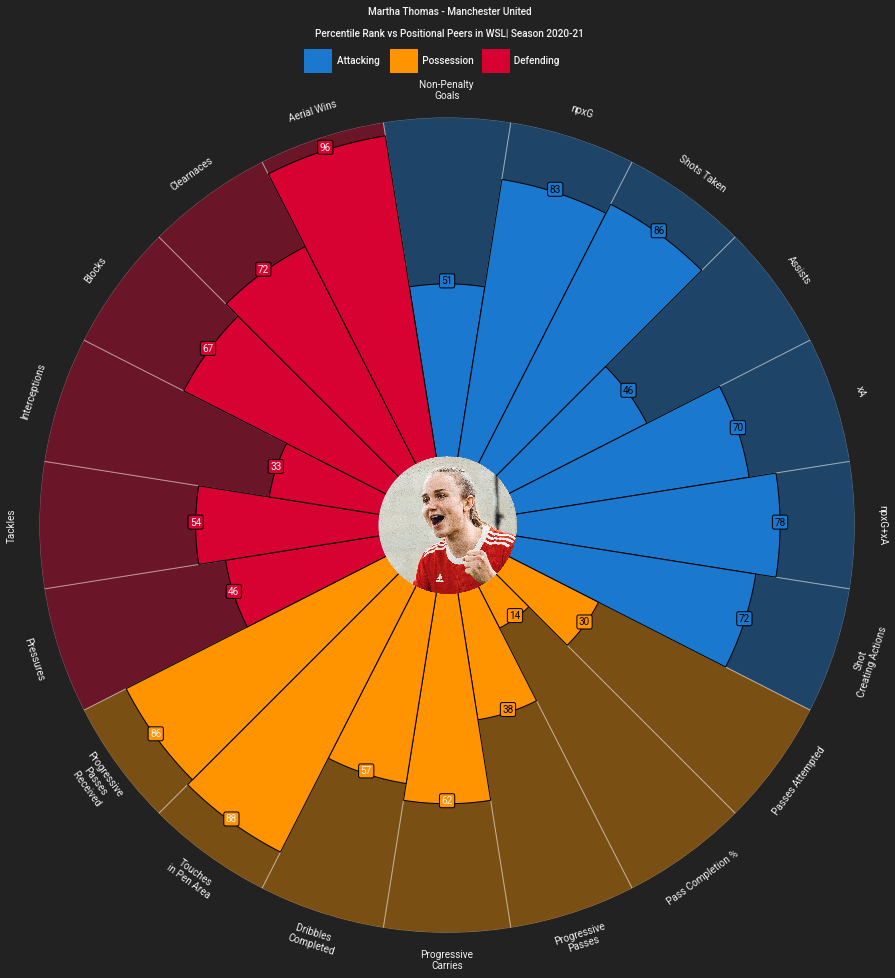

In [9]:
params = ["Non-Penalty \nGoals",
          "npxG",
          "Shots Taken",
          "Assists",
          "xA",
          "npxG+xA",
          "\nShot\n Creating Actions",
          "Passes Attempted",
          "Pass Completion %",
          "Progressive\nPasses",
          "Progressive\nCarries",
          "Dribbles \nCompleted",
          "Touches\nin Pen Area",
          "Progressive\nPasses\n Received",
          "Pressures",
          "Tackles",
          "Interceptions",
          "Blocks",
          "Clearnaces",
          "Aerial Wins"]

values = [51,83,86,46,70,78,72,30,14,38,62,57,88,86,46,54,33,67,72,96]

slice_colors = ["#1A78CF"] * 7 + ["#FF9300"] * 7 + ["#D70232"] * 6
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 10

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)


fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(15,15),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

fig.text(
    0.515, 0.975, "Martha Thomas - Manchester United", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

fig.text(
    0.515, 0.955,
    "Percentile Rank vs Positional Peers in WSL| Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)


# add text
fig.text(
0.35, 0.93, "                          Attacking                 Possession                Defending", size=10,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.38, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.46, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.545, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.439, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

In [10]:
df=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\WSL per 90.csv',encoding="latin1")

In [11]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [14]:
params = ["Gls/90",
          "Ast/90",
          "G+A/90",
          "xG/90",
          "xA/90",
          "xG+xA/90",
          "npxG/90"]

# The lower and upper boundaries for the statistics
low =  [0,0,0,0,0,0,0]
high = [1.25,0.68,1.76,1.05,0.46,1.33,1.05] 

In [15]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*7,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [16]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [17]:
martha_values =  [0.29,0.07,0.36,0.48,0.14,0.62,0.48]

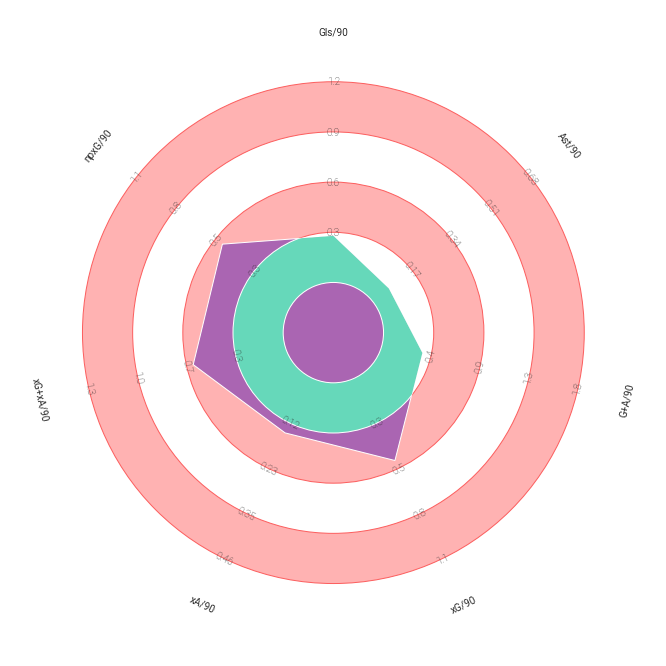

In [18]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(martha_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels

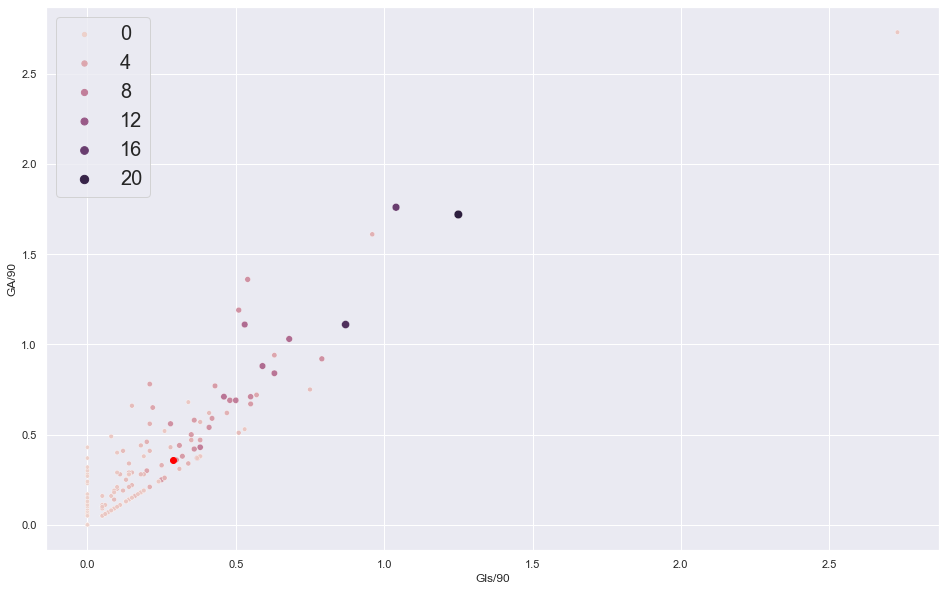

In [19]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="Gls/90", y="GA/90", hue="Gls", size="Gls",s=70)
g.legend(prop={'size': 20})

#g.ax_scatter.scatter(0.38,0.47, color = 'red')
plt.scatter(0.29,0.36, color="red")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.Gls/90, row.GA/90, row.Player) # xloc of text, yloc of text, text
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

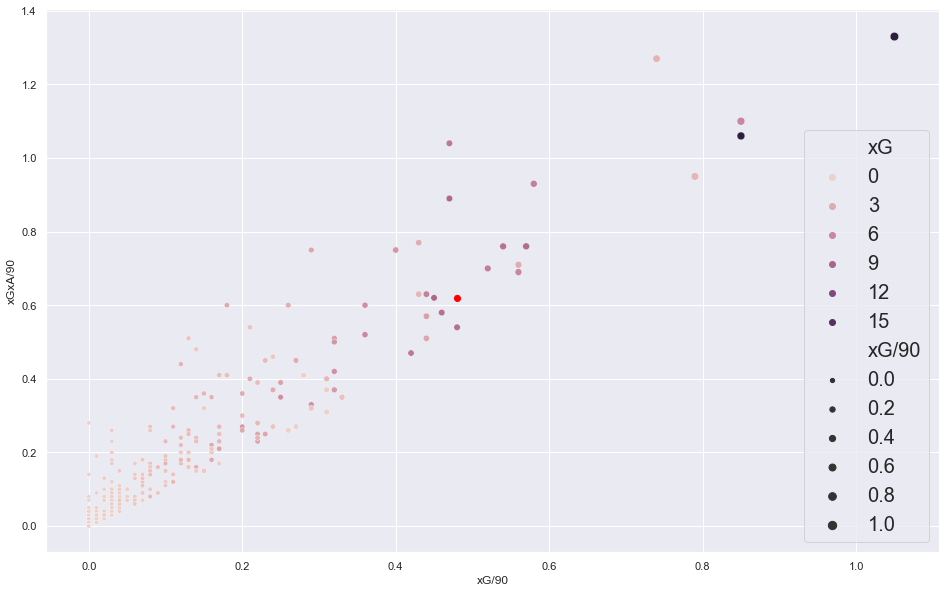

In [24]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="xG/90", y="xGxA/90", hue="xG", size="xG/90")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})
plt.scatter(0.48,0.62, color="red")


In [21]:
from mplsoccer.pitch import Pitch
from matplotlib.colors import ListedColormap

from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
text_color = 'w'

In [28]:
fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

In [77]:
df1=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\Martha Shotmaps.csv',encoding="latin1")

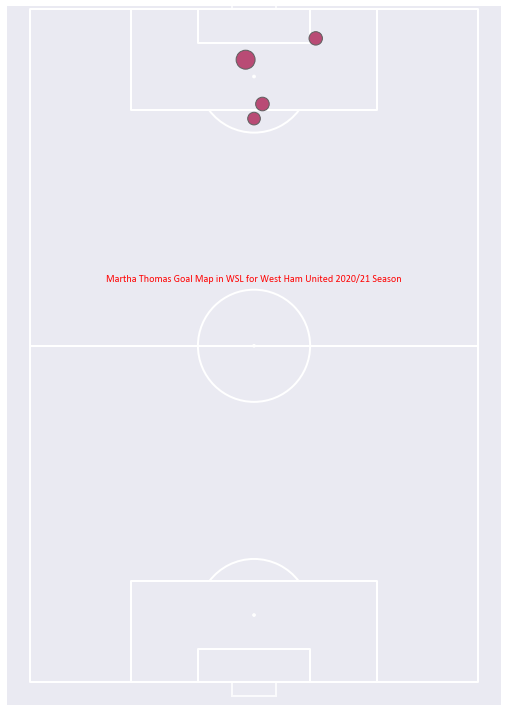

In [81]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 500) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='#b94b75',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Martha Thomas Goal Map in WSL for West Ham United 2020/21 Season',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')


